In [1]:
%load_ext autoreload
%autoreload 2
%load_ext nb_black
%load_ext dotenv
%dotenv
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

<IPython.core.display.Javascript object>

In [2]:
import numpy as np

from matplotlib import pyplot as plt
import plotnine as p9
import pandas as pd
import glob

from metaflow import Metaflow, Run, Flow, Step
import scipy.stats

import rapidfuzz

# import easyocr
# from PIL import Image

%matplotlib inline

<IPython.core.display.Javascript object>

In [3]:
Metaflow().flows

[Flow('BuildMonitorDatasetFlow')]

<IPython.core.display.Javascript object>

In [4]:
list(Flow("BuildMonitorDatasetFlow").runs())

[Run('BuildMonitorDatasetFlow/1683916655725164'),
 Run('BuildMonitorDatasetFlow/1683494633084411'),
 Run('BuildMonitorDatasetFlow/1683492746716959'),
 Run('BuildMonitorDatasetFlow/1683492542151096'),
 Run('BuildMonitorDatasetFlow/1683492115054874'),
 Run('BuildMonitorDatasetFlow/1683491660353258'),
 Run('BuildMonitorDatasetFlow/1683490971769785'),
 Run('BuildMonitorDatasetFlow/1683490256715006'),
 Run('BuildMonitorDatasetFlow/1683490225375774'),
 Run('BuildMonitorDatasetFlow/1683489420589369'),
 Run('BuildMonitorDatasetFlow/1683412226445727'),
 Run('BuildMonitorDatasetFlow/1683412189691235'),
 Run('BuildMonitorDatasetFlow/1683410982560401'),
 Run('BuildMonitorDatasetFlow/1683410916470135'),
 Run('BuildMonitorDatasetFlow/1683410514307565'),
 Run('BuildMonitorDatasetFlow/1683410208659574'),
 Run('BuildMonitorDatasetFlow/1683410020164576'),
 Run('BuildMonitorDatasetFlow/1683409919514052'),
 Run('BuildMonitorDatasetFlow/1683409842628059'),
 Run('BuildMonitorDatasetFlow/1683409590267666'),


<IPython.core.display.Javascript object>

In [32]:
Flow("BuildMonitorDatasetFlow").latest_successful_run.data.ocr_df.query(
    "marker == 'TIME'"
)

frame marker inference_text  inference_score  belowness_score   
3    output_001.png   TIME            NaN              NaN       384.084172  \
9    output_002.png   TIME            NaN              NaN       383.241368   
15   output_003.png   TIME            NaN              NaN       381.764460   
21   output_004.png   TIME            NaN              NaN       383.740532   
27   output_005.png   TIME            NaN              NaN       382.951361   
..              ...    ...            ...              ...              ...   
693  output_116.png   TIME            NaN              NaN       294.895095   
699  output_117.png   TIME            NaN              NaN       294.895095   
705  output_118.png   TIME            NaN              NaN       293.355600   
711  output_119.png   TIME            NaN              NaN       294.895095   
717  output_120.png   TIME            NaN              NaN       294.740079   

     box_id  is_duplicate  
3         2          True  
9         3          True  
15        2          True  
21        3          True  
27        3          True  
..      ...           ...  
693       3          True  
699       3          True  
705       3          True  
711       3          True  
717       3          True  

[120 rows x 7 columns]

<IPython.core.display.Javascript object>

In [33]:
df = Flow(
    "BuildMonitorDatasetFlow"
).latest_successful_run.data.phase_1_detection_results

<IPython.core.display.Javascript object>

In [40]:
f45 = df.query("frame.str.contains('045')")
f45.head()

bbox   
2328  [[1472.0, 2.0], [1518.0, 2.0], [1518.0, 32.0],...  \
2329  [[1186.0, 28.0], [1304.0, 28.0], [1304.0, 87.0...   
2330  [[542.0, 40.0], [745.0, 35.0], [746.0, 93.0], ...   
2331  [[1440.0, 34.0], [1552.0, 34.0], [1552.0, 75.0...   
2332  [[320.0, 149.0], [428.0, 149.0], [428.0, 191.0...   

                            inference inference_text  inference_score   
2328        (INT, 0.6473287343978882)            INT         0.647329  \
2329     (CUSTON, 0.9799797534942627)         CUSTON         0.979980   
2330  (INTERVALS, 0.9972200393676758)      INTERVALS         0.997220   
2331      (20/10, 0.9998890161514282)          20/10         0.999889   
2332      (START, 0.9972940683364868)          START         0.997294   

                                       frame  
2328  /tmp/tmprudo35r7/frames/output_045.png  
2329  /tmp/tmprudo35r7/frames/output_045.png  
2330  /tmp/tmprudo35r7/frames/output_045.png  
2331  /tmp/tmprudo35r7/frames/output_045.png  
2332  /tmp/tmprudo35r7/frames/output_045.png

<IPython.core.display.Javascript object>

[2023/05/20 11:24:54] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/mike/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/mike/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='

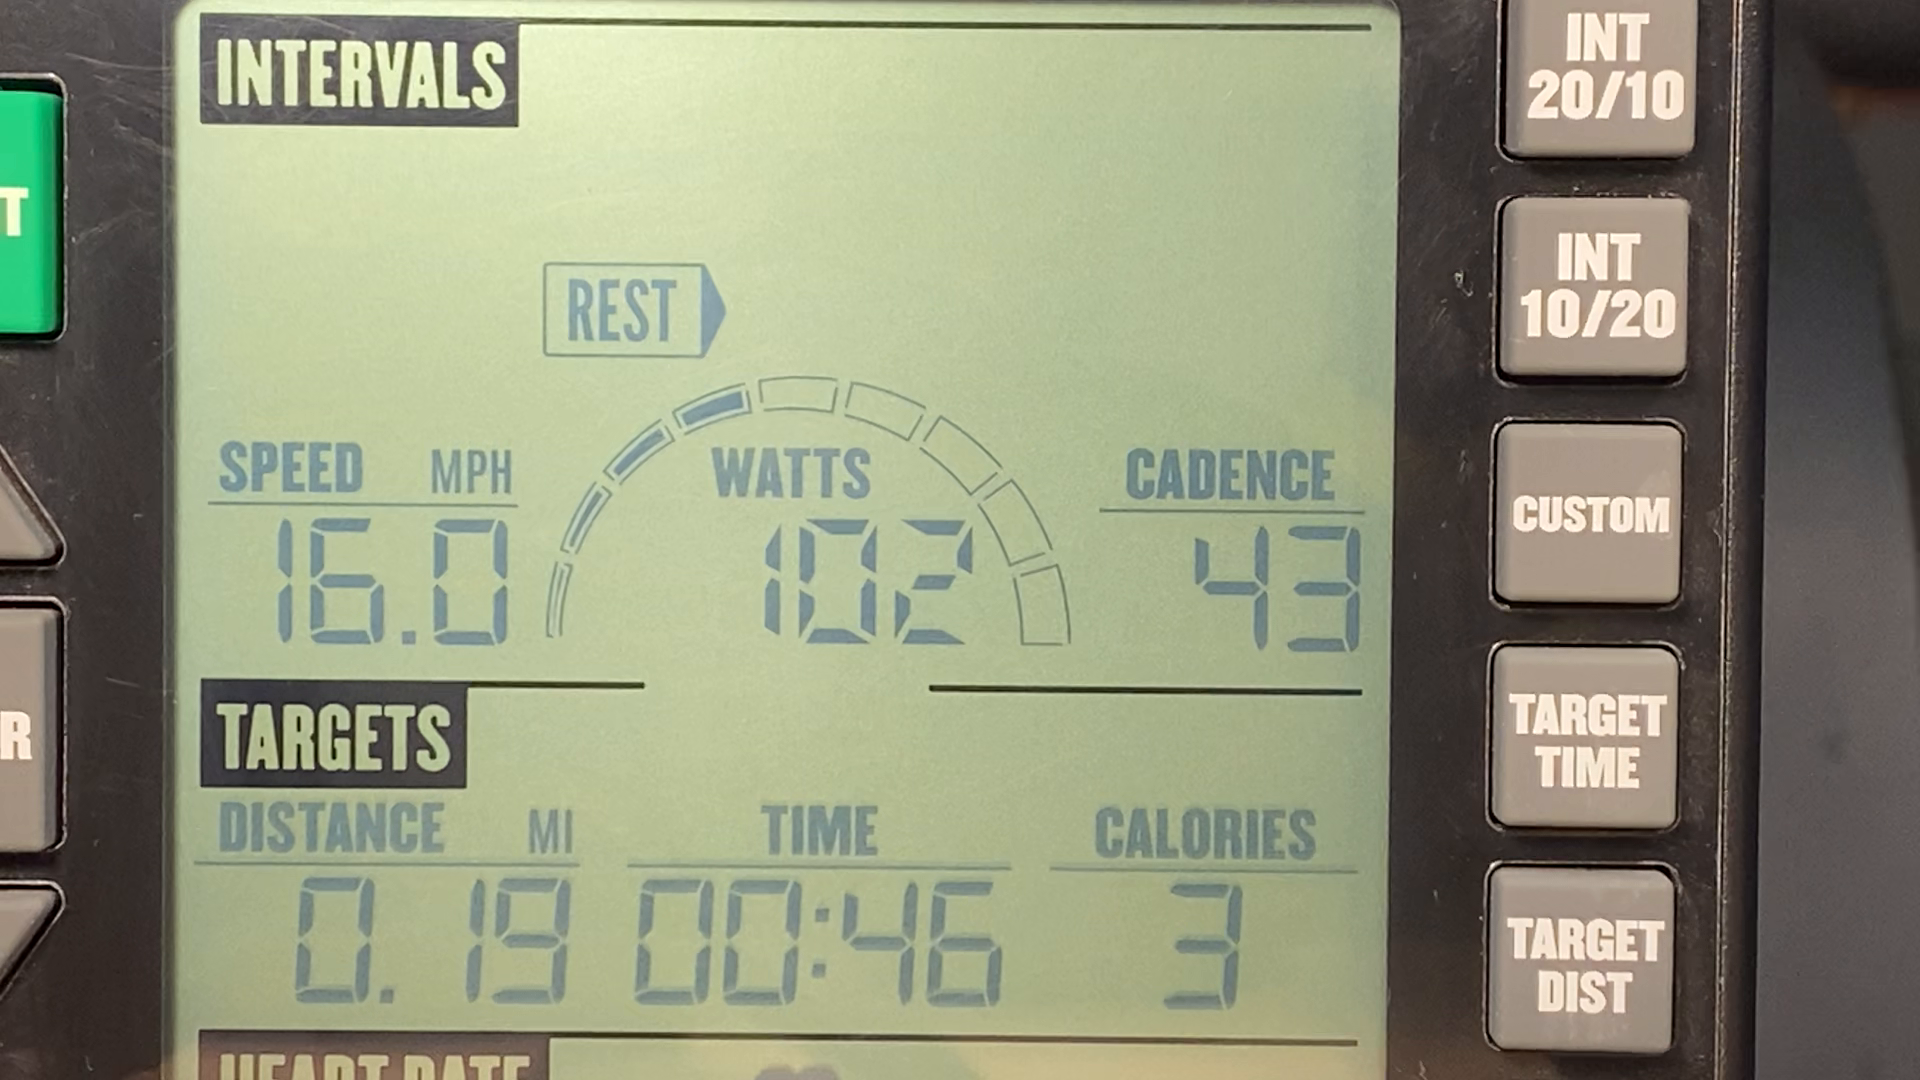

<IPython.core.display.Javascript object>

In [520]:
ocr = PaddleOCR(
    use_angle_cls=True, lang="en"
)  # need to run only once to download and load model into memory
from fuzzywuzzy import fuzz, process

from PIL import Image
from paddleocr import PaddleOCR

im = Image.open("/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1404.png")
im

In [302]:
def paddle_results_to_df(result):
    df = pd.DataFrame(result, columns=["bbox", "inference"])
    df[["inference_text", "inference_score"]] = pd.DataFrame(
        df["inference"].tolist(), index=df.index
    )

    df.drop(columns="inference")
    return df


def crop_image(image, bbox):
    """
    Crop an image (in numpy representation) to the given bounding box.

    Args:
    - image (numpy.ndarray): The input image in numpy format (height, width, channels)
    - bbox (list or tuple): The bounding box as (x_min, y_min, x_max, y_max)

    Returns:
    - cropped_image (numpy.ndarray): The cropped image
    """
    x_min, y_min, x_max, y_max = bbox
    cropped_image = image[y_min:y_max, x_min:x_max]

    return cropped_image


def make_polygons_2d(polygons):
    return np.concatenate(polygons).reshape(-1, 2).astype(np.float32)


def super_bounding_box(xy):
    xx, yy = xy[:, 0], xy[:, 1]

    return [xx.min(), xx.max(), yy.min(), yy.max()]


def best_match_2(text, markers):
    # calculate the best match out of the possible markers
    best = process.extractOne(text, markers, score_cutoff=90)
    if best is None:
        return ""
    return best[0]


def compute_distance(bbox1, bbox2):
    center1 = bbox1.mean(axis=0)
    try:
        # Compute centers of mass
        center1 = bbox1.mean(axis=0)
        center2 = bbox2.mean(axis=0)

        # Compute Euclidean distance between centers
        distance = np.linalg.norm(center1 - center2)
    except:
        return 1000

    return distance


def compute_angle(bbox1, bbox2):
    try:
        # Compute centers of mass
        center1 = bbox1.mean(axis=0)
        center2 = bbox2.mean(axis=0)

        # Compute angle relative to bbox1
        diff = center2 - center1
        angle = math.atan2(diff[1], diff[0]) * 180 / math.pi
    except:
        return 180

    return angle


def process_group_2(group):
    landmarks = group.assign(
        inference_clean=group["inference_text"].apply(best_match_2)
    )

    uniques = ["SPEED", "WATTS", "CADENCE", "CALORIES"]
    surround_box = super_bounding_box(
        make_polygons_2d(
            landmarks.query("inference_clean.isin(@uniques)").bbox.to_numpy()
        )
    )
    xl, xr, yt, yb = surround_box
    w = abs(xl - xr)
    h = abs(yt - yb)
    print(w, h)
    # surround_box = [xl, yt, round(xr + 1.05 * w), round(yb - h)]
    return (round(xl - 0.02 * w), yt, round(xr + 0.075 * w), round(yb + 0.42 * h))

<IPython.core.display.Javascript object>

In [537]:
def plausible_number(w, thresh=0.5):
    return (sum(1 for c in w if c.isdigit() or c in ":.") / len(w)) > thresh


def locate_numbers(
    df,
    landmarks=(
        "SPEED",
        "WATTS",
        "CADENCE",
        "CALORIES",
        "DISTANCE",
        "TIME",
    ),
    min_score=0.9,
):
    candidates_df = (
        df.query("inference_score >= @min_score")
        .loc[lambda f: f.inference_text.apply(plausible_number)]
        .reset_index(drop=True)
        .assign(box_id=lambda f: range(len(f)))
    )

    out = []
    for landmark in landmarks:
        rec = df.query("inference_text == @landmark")
        if landmark == "TIME":
            # TIME matches two places typically, we want the one more to the left.
            rec = (
                rec.assign(
                    bbox_left=lambda f: [e[:, 0].min() for e in f.bbox]
                ).sort_values("bbox_left")
            ).head(1)
        assert len(rec) <= 1, rec

        if rec.empty:
            _df = pd.DataFrame(
                dict(
                    landmark=landmark,
                    inference_text=None,
                    inference_score=None,
                    landmark_bbox=None,
                    bbox=None,
                    box_id=None,
                    belowness_score=None,
                ),
                index=[0],
            )
        else:
            rec = rec.squeeze()

            _df = (
                candidates_df.assign(
                    distance_from_ref=lambda f: [
                        compute_distance(rec.bbox, e) for e in f.bbox
                    ],
                    angle_from_ref=lambda f: [
                        compute_angle(rec.bbox, e) for e in f.bbox
                    ],
                )
                .assign(
                    belowness_score=lambda f: f.distance_from_ref
                    + abs(f.angle_from_ref - 90)
                )
                .sort_values("belowness_score")
            )

        out.append(_df.head(1).assign(landmark=landmark, landmark_bbox=[rec.bbox]))

    return (
        pd.concat(out)
        .sort_values(["box_id", "belowness_score"])
        .assign(
            inference_text=lambda f: f.inference_text.where(
                ~f.duplicated(subset="box_id"), None
            ),
            inference_score=lambda f: f.inference_score.where(
                f.inference_text.notnull(), None
            ),
            bbox=lambda f: f.bbox.where(f.inference_text.notnull(), None),
        )
        .loc[
            :,
            [
                "landmark",
                "inference_text",
                "inference_score",
                # "distance_from_ref",
                # "angle_from_ref",
                # "belowness_score",
                # "box_id",
                "landmark_bbox",
                "bbox",
            ],
        ]
        .rename(columns={"bbox": "match_bbox"})
        .sort_values("landmark")
        .reset_index(drop=True)
    )


# ff = paddle_results_to_df(ocr.ocr(np.asarray(im), cls=True)[0])
# ff


bb = locate_numbers(ff.assign(bbox=lambda f: f.bbox.apply(make_polygons_2d)))
bb


# imc = im.crop(bb)

# resize_width = 1000
# resize_height = int(
#     imc.height * (resize_width / imc.width)
# )
# imd = imc.resize(
#     (resize_width, resize_height), Image.LANCZOS
# )
# imd

# paddle_results_to_df(ocr.ocr(np.asarray(imd), cls=True)[0])

landmark inference_text  inference_score   
0   CADENCE           None              NaN  \
1  CALORIES              3         0.956618   
2  DISTANCE           None              NaN   
3     SPEED           16.0         0.996945   
4      TIME          00:46         0.957265   
5     WATTS            102         0.997975   

                                       landmark_bbox   
0  [[1122.0, 443.0], [1340.0, 443.0], [1340.0, 50...  \
1  [[1093.0, 800.0], [1320.0, 804.0], [1319.0, 86...   
2  [[213.0, 794.0], [450.0, 798.0], [449.0, 854.0...   
3  [[216.0, 437.0], [370.0, 437.0], [370.0, 494.0...   
4  [[758.0, 798.0], [882.0, 798.0], [882.0, 858.0...   
5  [[708.0, 441.0], [878.0, 441.0], [878.0, 504.0...   

                                          match_bbox  
0                                               None  
1  [[1158.0, 891.0], [1240.0, 891.0], [1240.0, 10...  
2                                               None  
3  [[258.0, 503.0], [531.0, 509.0], [528.0, 654.0...  
4  [[616.0, 881.0], [1008.0, 881.0], [1008.0, 100...  
5  [[752.0, 504.0], [996.0, 504.0], [996.0, 653.0...

<IPython.core.display.Javascript object>

In [540]:
config = {
    "SPEED": dict(
        sel=(-0.2, 1.25, 1.03, 2.7),
        ssocr_conf=(
            {"number-digits": -1, "threshold": 40},
            [],
        ),
    ),
    "WATTS": dict(
        sel=(-0.2, 1.1, 0.6, 2.5),
        ssocr_conf=(
            {"number-digits": -1, "threshold": 40},
            [],
        ),
    ),
    "CADENCE": dict(
        sel=(0, 1.25, 0.20, 2.9),
        ssocr_conf=(
            {"number-digits": -1, "threshold": 40},
            [],
        ),
    ),
    "DISTANCE": dict(
        sel=(0, 1.3, 0.75, 3.25),
        ssocr_conf=(
            {"number-digits": -1, "threshold": 40},
            [],
        ),
    ),
    "TIME": dict(
        sel=(-1.2, 1.2, 1.45, 2.75),
        ssocr_conf=(
            {"number-digits": -1, "threshold": 40},
            [],
        ),
    ),
    "CALORIES": dict(
        sel=(0, 1.2, 0.2, 2.5),
        ssocr_conf=(
            {"number-digits": -1, "threshold": 40},
            [],
        ),
    ),
}


sample = (
    pd.Series(glob.glob("/bucket/exercise-machina/tmpqdhq4d5e/frames/*.png"))
    .sample(5, random_state=2009, replace=False)
    .sort_values()
    .tolist()
)
sample = sorted(glob.glob("/bucket/exercise-machina/tmpqdhq4d5e/frames/output_*.png"))

match_frames = []
for e in sample:
    e
    im = Image.open(e)
    ocr_df = paddle_results_to_df(ocr.ocr(np.asarray(im), cls=True)[0]).assign(
        bbox=lambda f: f.bbox.apply(make_polygons_2d)
    )
    order = int("".join([c for c in os.path.basename(e) if c.isdigit()]))
    match_frame = locate_numbers(ocr_df).assign(frame=e, frame_num=order)

    ssocr_inf = []
    for rec in match_frame.itertuples():
        try:
            cfg = config[rec.landmark]
            imc, out = ssocr_subimage(
                im.convert("L"), rec.landmark_bbox, cfg["sel"], cfg["ssocr_conf"]
            )
        except ValueError:
            out = ""
        ssocr_inf.append(out)
    match_frame = match_frame.assign(ssocr=ssocr_inf)

    match_frames.append(match_frame)

matches = pd.concat(match_frames).sort_values(["frame_num", "landmark"])
matches.to_csv("ocr-output.csv")

'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_001.png'

[2023/05/20 15:33:45] ppocr DEBUG: dt_boxes num : 12, elapse : 0.25158262252807617
[2023/05/20 15:33:45] ppocr DEBUG: cls num  : 12, elapse : 0.04533982276916504
[2023/05/20 15:33:46] ppocr DEBUG: rec_res num  : 12, elapse : 0.6435368061065674


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_002.png'

[2023/05/20 15:33:46] ppocr DEBUG: dt_boxes num : 13, elapse : 0.2568950653076172
[2023/05/20 15:33:46] ppocr DEBUG: cls num  : 13, elapse : 0.04956197738647461
[2023/05/20 15:33:47] ppocr DEBUG: rec_res num  : 13, elapse : 0.6997785568237305


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_003.png'

[2023/05/20 15:33:47] ppocr DEBUG: dt_boxes num : 13, elapse : 0.24990558624267578
[2023/05/20 15:33:47] ppocr DEBUG: cls num  : 13, elapse : 0.049668312072753906
[2023/05/20 15:33:48] ppocr DEBUG: rec_res num  : 13, elapse : 0.7003378868103027


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_004.png'

[2023/05/20 15:33:48] ppocr DEBUG: dt_boxes num : 14, elapse : 0.2547950744628906
[2023/05/20 15:33:48] ppocr DEBUG: cls num  : 14, elapse : 0.052521705627441406
[2023/05/20 15:33:49] ppocr DEBUG: rec_res num  : 14, elapse : 0.7510457038879395


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_005.png'

[2023/05/20 15:33:49] ppocr DEBUG: dt_boxes num : 13, elapse : 0.25370121002197266
[2023/05/20 15:33:50] ppocr DEBUG: cls num  : 13, elapse : 0.04991650581359863
[2023/05/20 15:33:50] ppocr DEBUG: rec_res num  : 13, elapse : 0.7011260986328125


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_006.png'

[2023/05/20 15:33:51] ppocr DEBUG: dt_boxes num : 13, elapse : 0.2524383068084717
[2023/05/20 15:33:51] ppocr DEBUG: cls num  : 13, elapse : 0.049913883209228516
[2023/05/20 15:33:51] ppocr DEBUG: rec_res num  : 13, elapse : 0.7010786533355713


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_007.png'

[2023/05/20 15:33:52] ppocr DEBUG: dt_boxes num : 12, elapse : 0.25243210792541504
[2023/05/20 15:33:52] ppocr DEBUG: cls num  : 12, elapse : 0.04625225067138672
[2023/05/20 15:33:52] ppocr DEBUG: rec_res num  : 12, elapse : 0.644526481628418


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_008.png'

[2023/05/20 15:33:53] ppocr DEBUG: dt_boxes num : 13, elapse : 0.2517874240875244
[2023/05/20 15:33:53] ppocr DEBUG: cls num  : 13, elapse : 0.04897308349609375
[2023/05/20 15:33:53] ppocr DEBUG: rec_res num  : 13, elapse : 0.6998481750488281


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_009.png'

[2023/05/20 15:33:54] ppocr DEBUG: dt_boxes num : 13, elapse : 0.25926780700683594
[2023/05/20 15:33:54] ppocr DEBUG: cls num  : 13, elapse : 0.04944181442260742
[2023/05/20 15:33:54] ppocr DEBUG: rec_res num  : 13, elapse : 0.6985273361206055


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_010.png'

[2023/05/20 15:33:55] ppocr DEBUG: dt_boxes num : 13, elapse : 0.2538018226623535
[2023/05/20 15:33:55] ppocr DEBUG: cls num  : 13, elapse : 0.04935812950134277
[2023/05/20 15:33:55] ppocr DEBUG: rec_res num  : 13, elapse : 0.7000994682312012


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_011.png'

[2023/05/20 15:33:56] ppocr DEBUG: dt_boxes num : 13, elapse : 0.2615668773651123
[2023/05/20 15:33:56] ppocr DEBUG: cls num  : 13, elapse : 0.0489041805267334
[2023/05/20 15:33:57] ppocr DEBUG: rec_res num  : 13, elapse : 0.6957828998565674


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_012.png'

[2023/05/20 15:33:57] ppocr DEBUG: dt_boxes num : 12, elapse : 0.2553997039794922
[2023/05/20 15:33:57] ppocr DEBUG: cls num  : 12, elapse : 0.0451505184173584
[2023/05/20 15:33:58] ppocr DEBUG: rec_res num  : 12, elapse : 0.6426129341125488


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_013.png'

[2023/05/20 15:33:58] ppocr DEBUG: dt_boxes num : 13, elapse : 0.250762939453125
[2023/05/20 15:33:58] ppocr DEBUG: cls num  : 13, elapse : 0.04894542694091797
[2023/05/20 15:33:59] ppocr DEBUG: rec_res num  : 13, elapse : 0.6977577209472656


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_014.png'

[2023/05/20 15:33:59] ppocr DEBUG: dt_boxes num : 14, elapse : 0.2528667449951172
[2023/05/20 15:33:59] ppocr DEBUG: cls num  : 14, elapse : 0.05326271057128906
[2023/05/20 15:34:00] ppocr DEBUG: rec_res num  : 14, elapse : 0.7507011890411377


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_015.png'

[2023/05/20 15:34:00] ppocr DEBUG: dt_boxes num : 16, elapse : 0.2513871192932129
[2023/05/20 15:34:00] ppocr DEBUG: cls num  : 16, elapse : 0.06088519096374512
[2023/05/20 15:34:01] ppocr DEBUG: rec_res num  : 16, elapse : 0.8577733039855957


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_016.png'

[2023/05/20 15:34:01] ppocr DEBUG: dt_boxes num : 18, elapse : 0.26273608207702637
[2023/05/20 15:34:01] ppocr DEBUG: cls num  : 18, elapse : 0.06866812705993652
[2023/05/20 15:34:02] ppocr DEBUG: rec_res num  : 18, elapse : 0.969235897064209


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_017.png'

[2023/05/20 15:34:03] ppocr DEBUG: dt_boxes num : 24, elapse : 0.26256275177001953
[2023/05/20 15:34:03] ppocr DEBUG: cls num  : 24, elapse : 0.09013938903808594
[2023/05/20 15:34:04] ppocr DEBUG: rec_res num  : 24, elapse : 1.2981739044189453


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_018.png'

[2023/05/20 15:34:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2628331184387207
[2023/05/20 15:34:04] ppocr DEBUG: cls num  : 28, elapse : 0.10319352149963379
[2023/05/20 15:34:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.5012829303741455


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_019.png'

[2023/05/20 15:34:06] ppocr DEBUG: dt_boxes num : 28, elapse : 0.261425256729126
[2023/05/20 15:34:06] ppocr DEBUG: cls num  : 28, elapse : 0.10381889343261719
[2023/05/20 15:34:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.509882926940918


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_020.png'

[2023/05/20 15:34:08] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2593510150909424
[2023/05/20 15:34:08] ppocr DEBUG: cls num  : 28, elapse : 0.10307717323303223
[2023/05/20 15:34:10] ppocr DEBUG: rec_res num  : 28, elapse : 1.503936529159546


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_021.png'

[2023/05/20 15:34:10] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2624659538269043
[2023/05/20 15:34:10] ppocr DEBUG: cls num  : 29, elapse : 0.10700201988220215
[2023/05/20 15:34:12] ppocr DEBUG: rec_res num  : 29, elapse : 1.5569818019866943


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_022.png'

[2023/05/20 15:34:12] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2610204219818115
[2023/05/20 15:34:12] ppocr DEBUG: cls num  : 29, elapse : 0.10871076583862305
[2023/05/20 15:34:14] ppocr DEBUG: rec_res num  : 29, elapse : 1.5571110248565674


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_023.png'

[2023/05/20 15:34:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2626504898071289
[2023/05/20 15:34:14] ppocr DEBUG: cls num  : 28, elapse : 0.10341525077819824
[2023/05/20 15:34:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5045909881591797


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_024.png'

[2023/05/20 15:34:16] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2625455856323242
[2023/05/20 15:34:16] ppocr DEBUG: cls num  : 28, elapse : 0.10403013229370117
[2023/05/20 15:34:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.504425287246704


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_025.png'

[2023/05/20 15:34:18] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2598111629486084
[2023/05/20 15:34:18] ppocr DEBUG: cls num  : 28, elapse : 0.1036536693572998
[2023/05/20 15:34:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.5040853023529053


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_026.png'

[2023/05/20 15:34:20] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25678014755249023
[2023/05/20 15:34:20] ppocr DEBUG: cls num  : 27, elapse : 0.10003209114074707
[2023/05/20 15:34:22] ppocr DEBUG: rec_res num  : 27, elapse : 1.446112871170044


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_027.png'

[2023/05/20 15:34:22] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26257872581481934
[2023/05/20 15:34:22] ppocr DEBUG: cls num  : 28, elapse : 0.1032857894897461
[2023/05/20 15:34:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.502603530883789


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_028.png'

[2023/05/20 15:34:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26288819313049316
[2023/05/20 15:34:24] ppocr DEBUG: cls num  : 28, elapse : 0.10374569892883301
[2023/05/20 15:34:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.505007028579712


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_029.png'

[2023/05/20 15:34:26] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26204943656921387
[2023/05/20 15:34:26] ppocr DEBUG: cls num  : 28, elapse : 0.10411405563354492
[2023/05/20 15:34:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.502122402191162


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_030.png'

[2023/05/20 15:34:28] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25667381286621094
[2023/05/20 15:34:28] ppocr DEBUG: cls num  : 28, elapse : 0.10404825210571289
[2023/05/20 15:34:30] ppocr DEBUG: rec_res num  : 28, elapse : 1.5059630870819092


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_031.png'

[2023/05/20 15:34:30] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2619030475616455
[2023/05/20 15:34:30] ppocr DEBUG: cls num  : 27, elapse : 0.1003258228302002
[2023/05/20 15:34:31] ppocr DEBUG: rec_res num  : 27, elapse : 1.4511024951934814


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_032.png'

[2023/05/20 15:34:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26021289825439453
[2023/05/20 15:34:32] ppocr DEBUG: cls num  : 28, elapse : 0.1035916805267334
[2023/05/20 15:34:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.5054054260253906


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_033.png'

[2023/05/20 15:34:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.260561466217041
[2023/05/20 15:34:34] ppocr DEBUG: cls num  : 28, elapse : 0.10297656059265137
[2023/05/20 15:34:35] ppocr DEBUG: rec_res num  : 28, elapse : 1.500730276107788


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_034.png'

[2023/05/20 15:34:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2623918056488037
[2023/05/20 15:34:36] ppocr DEBUG: cls num  : 28, elapse : 0.10358023643493652
[2023/05/20 15:34:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.5032289028167725


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_035.png'

[2023/05/20 15:34:38] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2619287967681885
[2023/05/20 15:34:38] ppocr DEBUG: cls num  : 28, elapse : 0.10491466522216797
[2023/05/20 15:34:39] ppocr DEBUG: rec_res num  : 28, elapse : 1.5086259841918945


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_036.png'

[2023/05/20 15:34:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2620375156402588
[2023/05/20 15:34:40] ppocr DEBUG: cls num  : 28, elapse : 0.10334348678588867
[2023/05/20 15:34:41] ppocr DEBUG: rec_res num  : 28, elapse : 1.5182344913482666


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_037.png'

[2023/05/20 15:34:42] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2580833435058594
[2023/05/20 15:34:42] ppocr DEBUG: cls num  : 27, elapse : 0.10007953643798828
[2023/05/20 15:34:43] ppocr DEBUG: rec_res num  : 27, elapse : 1.4676263332366943


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_038.png'

[2023/05/20 15:34:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2589578628540039
[2023/05/20 15:34:44] ppocr DEBUG: cls num  : 28, elapse : 0.10425353050231934
[2023/05/20 15:34:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.519986867904663


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_039.png'

[2023/05/20 15:34:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2691152095794678
[2023/05/20 15:34:46] ppocr DEBUG: cls num  : 28, elapse : 0.10522031784057617
[2023/05/20 15:34:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.505173921585083


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_040.png'

[2023/05/20 15:34:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2629711627960205
[2023/05/20 15:34:48] ppocr DEBUG: cls num  : 28, elapse : 0.10424351692199707
[2023/05/20 15:34:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5065839290618896


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_041.png'

[2023/05/20 15:34:49] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25963854789733887
[2023/05/20 15:34:50] ppocr DEBUG: cls num  : 27, elapse : 0.10156679153442383
[2023/05/20 15:34:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.4501264095306396


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_042.png'

[2023/05/20 15:34:51] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25765204429626465
[2023/05/20 15:34:52] ppocr DEBUG: cls num  : 28, elapse : 0.10350561141967773
[2023/05/20 15:34:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.5062716007232666


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_043.png'

[2023/05/20 15:34:53] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26151561737060547
[2023/05/20 15:34:53] ppocr DEBUG: cls num  : 28, elapse : 0.10489773750305176
[2023/05/20 15:34:55] ppocr DEBUG: rec_res num  : 28, elapse : 1.5020182132720947


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_044.png'

[2023/05/20 15:34:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2630932331085205
[2023/05/20 15:34:55] ppocr DEBUG: cls num  : 27, elapse : 0.10016226768493652
[2023/05/20 15:34:57] ppocr DEBUG: rec_res num  : 27, elapse : 1.4479265213012695


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_045.png'

[2023/05/20 15:34:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25992703437805176
[2023/05/20 15:34:57] ppocr DEBUG: cls num  : 28, elapse : 0.1029520034790039
[2023/05/20 15:34:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.5049755573272705


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_046.png'

[2023/05/20 15:34:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26097822189331055
[2023/05/20 15:34:59] ppocr DEBUG: cls num  : 27, elapse : 0.09965276718139648
[2023/05/20 15:35:01] ppocr DEBUG: rec_res num  : 27, elapse : 1.448925256729126


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_047.png'

[2023/05/20 15:35:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26169371604919434
[2023/05/20 15:35:01] ppocr DEBUG: cls num  : 28, elapse : 0.10369539260864258
[2023/05/20 15:35:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.5042805671691895


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_048.png'

[2023/05/20 15:35:03] ppocr DEBUG: dt_boxes num : 28, elapse : 0.261383056640625
[2023/05/20 15:35:03] ppocr DEBUG: cls num  : 28, elapse : 0.10450124740600586
[2023/05/20 15:35:05] ppocr DEBUG: rec_res num  : 28, elapse : 1.5039775371551514


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_049.png'

[2023/05/20 15:35:05] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2640101909637451
[2023/05/20 15:35:05] ppocr DEBUG: cls num  : 28, elapse : 0.10384416580200195
[2023/05/20 15:35:07] ppocr DEBUG: rec_res num  : 28, elapse : 1.5028424263000488


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_050.png'

[2023/05/20 15:35:07] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2611427307128906
[2023/05/20 15:35:07] ppocr DEBUG: cls num  : 26, elapse : 0.09707140922546387
[2023/05/20 15:35:08] ppocr DEBUG: rec_res num  : 26, elapse : 1.397883415222168


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_051.png'

[2023/05/20 15:35:09] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2609262466430664
[2023/05/20 15:35:09] ppocr DEBUG: cls num  : 28, elapse : 0.10287880897521973
[2023/05/20 15:35:10] ppocr DEBUG: rec_res num  : 28, elapse : 1.502000093460083


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_052.png'

[2023/05/20 15:35:11] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26172828674316406
[2023/05/20 15:35:11] ppocr DEBUG: cls num  : 29, elapse : 0.10793709754943848
[2023/05/20 15:35:12] ppocr DEBUG: rec_res num  : 29, elapse : 1.5574123859405518


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_053.png'

[2023/05/20 15:35:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26158809661865234
[2023/05/20 15:35:13] ppocr DEBUG: cls num  : 28, elapse : 0.10393524169921875
[2023/05/20 15:35:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.5038247108459473


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_054.png'

[2023/05/20 15:35:15] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2613251209259033
[2023/05/20 15:35:15] ppocr DEBUG: cls num  : 27, elapse : 0.10120773315429688
[2023/05/20 15:35:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.4489281177520752


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_055.png'

[2023/05/20 15:35:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26048707962036133
[2023/05/20 15:35:17] ppocr DEBUG: cls num  : 28, elapse : 0.1035454273223877
[2023/05/20 15:35:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.5050818920135498


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_056.png'

[2023/05/20 15:35:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2589414119720459
[2023/05/20 15:35:19] ppocr DEBUG: cls num  : 28, elapse : 0.10358023643493652
[2023/05/20 15:35:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.503664493560791


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_057.png'

[2023/05/20 15:35:21] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2610297203063965
[2023/05/20 15:35:21] ppocr DEBUG: cls num  : 27, elapse : 0.0999915599822998
[2023/05/20 15:35:22] ppocr DEBUG: rec_res num  : 27, elapse : 1.4511995315551758


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_058.png'

[2023/05/20 15:35:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25803256034851074
[2023/05/20 15:35:23] ppocr DEBUG: cls num  : 28, elapse : 0.10369229316711426
[2023/05/20 15:35:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.5048925876617432


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_059.png'

[2023/05/20 15:35:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.262432336807251
[2023/05/20 15:35:25] ppocr DEBUG: cls num  : 28, elapse : 0.10404419898986816
[2023/05/20 15:35:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.5014641284942627


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_060.png'

[2023/05/20 15:35:26] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2633936405181885
[2023/05/20 15:35:27] ppocr DEBUG: cls num  : 29, elapse : 0.10659480094909668
[2023/05/20 15:35:28] ppocr DEBUG: rec_res num  : 29, elapse : 1.5584051609039307


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_061.png'

[2023/05/20 15:35:28] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25876784324645996
[2023/05/20 15:35:29] ppocr DEBUG: cls num  : 27, elapse : 0.10132575035095215
[2023/05/20 15:35:30] ppocr DEBUG: rec_res num  : 27, elapse : 1.4494972229003906


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_062.png'

[2023/05/20 15:35:30] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2615952491760254
[2023/05/20 15:35:30] ppocr DEBUG: cls num  : 28, elapse : 0.10401225090026855
[2023/05/20 15:35:32] ppocr DEBUG: rec_res num  : 28, elapse : 1.502124547958374


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_063.png'

[2023/05/20 15:35:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2605113983154297
[2023/05/20 15:35:32] ppocr DEBUG: cls num  : 28, elapse : 0.10638713836669922
[2023/05/20 15:35:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.515000343322754


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_064.png'

[2023/05/20 15:35:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26334357261657715
[2023/05/20 15:35:34] ppocr DEBUG: cls num  : 28, elapse : 0.10722136497497559
[2023/05/20 15:35:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.5354156494140625


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_065.png'

[2023/05/20 15:35:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2594490051269531
[2023/05/20 15:35:36] ppocr DEBUG: cls num  : 28, elapse : 0.10584902763366699
[2023/05/20 15:35:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.504495620727539


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_066.png'

[2023/05/20 15:35:38] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26129603385925293
[2023/05/20 15:35:38] ppocr DEBUG: cls num  : 28, elapse : 0.10368752479553223
[2023/05/20 15:35:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5088176727294922


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_067.png'

[2023/05/20 15:35:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26265645027160645
[2023/05/20 15:35:40] ppocr DEBUG: cls num  : 28, elapse : 0.10419702529907227
[2023/05/20 15:35:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.5051515102386475


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_068.png'

[2023/05/20 15:35:42] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26174068450927734
[2023/05/20 15:35:42] ppocr DEBUG: cls num  : 29, elapse : 0.10737276077270508
[2023/05/20 15:35:44] ppocr DEBUG: rec_res num  : 29, elapse : 1.5612890720367432


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_069.png'

[2023/05/20 15:35:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2580382823944092
[2023/05/20 15:35:44] ppocr DEBUG: cls num  : 28, elapse : 0.10386133193969727
[2023/05/20 15:35:46] ppocr DEBUG: rec_res num  : 28, elapse : 1.5034730434417725


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_070.png'

[2023/05/20 15:35:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2619943618774414
[2023/05/20 15:35:46] ppocr DEBUG: cls num  : 28, elapse : 0.10315847396850586
[2023/05/20 15:35:48] ppocr DEBUG: rec_res num  : 28, elapse : 1.507251262664795


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_071.png'

[2023/05/20 15:35:48] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2615225315093994
[2023/05/20 15:35:48] ppocr DEBUG: cls num  : 27, elapse : 0.09999752044677734
[2023/05/20 15:35:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.4576129913330078


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_072.png'

[2023/05/20 15:35:50] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26021599769592285
[2023/05/20 15:35:50] ppocr DEBUG: cls num  : 28, elapse : 0.10326218605041504
[2023/05/20 15:35:52] ppocr DEBUG: rec_res num  : 28, elapse : 1.5236735343933105


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_073.png'

[2023/05/20 15:35:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2640254497528076
[2023/05/20 15:35:52] ppocr DEBUG: cls num  : 27, elapse : 0.10083198547363281
[2023/05/20 15:35:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.4559032917022705


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_074.png'

[2023/05/20 15:35:54] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25991129875183105
[2023/05/20 15:35:54] ppocr DEBUG: cls num  : 29, elapse : 0.10730886459350586
[2023/05/20 15:35:56] ppocr DEBUG: rec_res num  : 29, elapse : 1.564359426498413


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_075.png'

[2023/05/20 15:35:56] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26102495193481445
[2023/05/20 15:35:56] ppocr DEBUG: cls num  : 27, elapse : 0.10113191604614258
[2023/05/20 15:35:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.4534850120544434


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_076.png'

[2023/05/20 15:35:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2622838020324707
[2023/05/20 15:35:58] ppocr DEBUG: cls num  : 28, elapse : 0.10357785224914551
[2023/05/20 15:36:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.506507396697998


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_077.png'

[2023/05/20 15:36:00] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26191282272338867
[2023/05/20 15:36:00] ppocr DEBUG: cls num  : 29, elapse : 0.10760378837585449
[2023/05/20 15:36:02] ppocr DEBUG: rec_res num  : 29, elapse : 1.5537443161010742


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_078.png'

[2023/05/20 15:36:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26081275939941406
[2023/05/20 15:36:02] ppocr DEBUG: cls num  : 28, elapse : 0.10361719131469727
[2023/05/20 15:36:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.5081136226654053


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_079.png'

[2023/05/20 15:36:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2574307918548584
[2023/05/20 15:36:04] ppocr DEBUG: cls num  : 28, elapse : 0.10379409790039062
[2023/05/20 15:36:05] ppocr DEBUG: rec_res num  : 28, elapse : 1.5028398036956787


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_080.png'

[2023/05/20 15:36:06] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2571845054626465
[2023/05/20 15:36:06] ppocr DEBUG: cls num  : 29, elapse : 0.10741066932678223
[2023/05/20 15:36:07] ppocr DEBUG: rec_res num  : 29, elapse : 1.5541129112243652


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_081.png'

[2023/05/20 15:36:08] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2604854106903076
[2023/05/20 15:36:08] ppocr DEBUG: cls num  : 29, elapse : 0.10759830474853516
[2023/05/20 15:36:10] ppocr DEBUG: rec_res num  : 29, elapse : 1.557828664779663


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_082.png'

[2023/05/20 15:36:10] ppocr DEBUG: dt_boxes num : 29, elapse : 0.261258602142334
[2023/05/20 15:36:10] ppocr DEBUG: cls num  : 29, elapse : 0.10746121406555176
[2023/05/20 15:36:12] ppocr DEBUG: rec_res num  : 29, elapse : 1.5600998401641846


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_083.png'

[2023/05/20 15:36:12] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2561783790588379
[2023/05/20 15:36:12] ppocr DEBUG: cls num  : 29, elapse : 0.10644841194152832
[2023/05/20 15:36:14] ppocr DEBUG: rec_res num  : 29, elapse : 1.5578837394714355


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_084.png'

[2023/05/20 15:36:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.263622522354126
[2023/05/20 15:36:14] ppocr DEBUG: cls num  : 28, elapse : 0.10405468940734863
[2023/05/20 15:36:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5029828548431396


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_085.png'

[2023/05/20 15:36:16] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26248884201049805
[2023/05/20 15:36:16] ppocr DEBUG: cls num  : 29, elapse : 0.10729217529296875
[2023/05/20 15:36:18] ppocr DEBUG: rec_res num  : 29, elapse : 1.5544261932373047


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_086.png'

[2023/05/20 15:36:18] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26149940490722656
[2023/05/20 15:36:18] ppocr DEBUG: cls num  : 29, elapse : 0.10692429542541504
[2023/05/20 15:36:20] ppocr DEBUG: rec_res num  : 29, elapse : 1.5595917701721191


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_087.png'

[2023/05/20 15:36:20] ppocr DEBUG: dt_boxes num : 28, elapse : 0.261519193649292
[2023/05/20 15:36:20] ppocr DEBUG: cls num  : 28, elapse : 0.10399174690246582
[2023/05/20 15:36:22] ppocr DEBUG: rec_res num  : 28, elapse : 1.5131700038909912


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_088.png'

[2023/05/20 15:36:22] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2563169002532959
[2023/05/20 15:36:22] ppocr DEBUG: cls num  : 29, elapse : 0.1071169376373291
[2023/05/20 15:36:24] ppocr DEBUG: rec_res num  : 29, elapse : 1.5772087574005127


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_089.png'

[2023/05/20 15:36:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26081156730651855
[2023/05/20 15:36:24] ppocr DEBUG: cls num  : 28, elapse : 0.10472345352172852
[2023/05/20 15:36:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.5234301090240479


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_090.png'

[2023/05/20 15:36:26] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25992870330810547
[2023/05/20 15:36:26] ppocr DEBUG: cls num  : 27, elapse : 0.09984445571899414
[2023/05/20 15:36:27] ppocr DEBUG: rec_res num  : 27, elapse : 1.4577314853668213


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_091.png'

[2023/05/20 15:36:28] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2627677917480469
[2023/05/20 15:36:28] ppocr DEBUG: cls num  : 29, elapse : 0.10911440849304199
[2023/05/20 15:36:30] ppocr DEBUG: rec_res num  : 29, elapse : 1.5601437091827393


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_092.png'

[2023/05/20 15:36:30] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2592952251434326
[2023/05/20 15:36:30] ppocr DEBUG: cls num  : 27, elapse : 0.10026049613952637
[2023/05/20 15:36:31] ppocr DEBUG: rec_res num  : 27, elapse : 1.4481163024902344


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_093.png'

[2023/05/20 15:36:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2618381977081299
[2023/05/20 15:36:32] ppocr DEBUG: cls num  : 28, elapse : 0.10361528396606445
[2023/05/20 15:36:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.5049858093261719


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_094.png'

[2023/05/20 15:36:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2575850486755371
[2023/05/20 15:36:34] ppocr DEBUG: cls num  : 28, elapse : 0.10391068458557129
[2023/05/20 15:36:35] ppocr DEBUG: rec_res num  : 28, elapse : 1.508432388305664


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_095.png'

[2023/05/20 15:36:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25955915451049805
[2023/05/20 15:36:36] ppocr DEBUG: cls num  : 28, elapse : 0.10371708869934082
[2023/05/20 15:36:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.5075232982635498


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_096.png'

[2023/05/20 15:36:38] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2644846439361572
[2023/05/20 15:36:38] ppocr DEBUG: cls num  : 28, elapse : 0.10566401481628418
[2023/05/20 15:36:39] ppocr DEBUG: rec_res num  : 28, elapse : 1.5167899131774902


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_097.png'

[2023/05/20 15:36:40] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26028919219970703
[2023/05/20 15:36:40] ppocr DEBUG: cls num  : 27, elapse : 0.1011805534362793
[2023/05/20 15:36:41] ppocr DEBUG: rec_res num  : 27, elapse : 1.4600820541381836


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_098.png'

[2023/05/20 15:36:42] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2702655792236328
[2023/05/20 15:36:42] ppocr DEBUG: cls num  : 29, elapse : 0.1075735092163086
[2023/05/20 15:36:43] ppocr DEBUG: rec_res num  : 29, elapse : 1.5623230934143066


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_099.png'

[2023/05/20 15:36:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25533294677734375
[2023/05/20 15:36:44] ppocr DEBUG: cls num  : 28, elapse : 0.1051781177520752
[2023/05/20 15:36:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.5119712352752686


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_100.png'

[2023/05/20 15:36:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2631971836090088
[2023/05/20 15:36:46] ppocr DEBUG: cls num  : 28, elapse : 0.10384368896484375
[2023/05/20 15:36:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.5058507919311523


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1000.png'

[2023/05/20 15:36:48] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2628934383392334
[2023/05/20 15:36:48] ppocr DEBUG: cls num  : 29, elapse : 0.10742402076721191
[2023/05/20 15:36:49] ppocr DEBUG: rec_res num  : 29, elapse : 1.5676982402801514


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1001.png'

[2023/05/20 15:36:50] ppocr DEBUG: dt_boxes num : 29, elapse : 0.256974458694458
[2023/05/20 15:36:50] ppocr DEBUG: cls num  : 29, elapse : 0.10811471939086914
[2023/05/20 15:36:51] ppocr DEBUG: rec_res num  : 29, elapse : 1.5657117366790771


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1002.png'

[2023/05/20 15:36:52] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2590658664703369
[2023/05/20 15:36:52] ppocr DEBUG: cls num  : 29, elapse : 0.10865259170532227
[2023/05/20 15:36:53] ppocr DEBUG: rec_res num  : 29, elapse : 1.5648577213287354


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1003.png'

[2023/05/20 15:36:54] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25681495666503906
[2023/05/20 15:36:54] ppocr DEBUG: cls num  : 29, elapse : 0.10880136489868164
[2023/05/20 15:36:55] ppocr DEBUG: rec_res num  : 29, elapse : 1.5646147727966309


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1004.png'

[2023/05/20 15:36:56] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2591688632965088
[2023/05/20 15:36:56] ppocr DEBUG: cls num  : 29, elapse : 0.10783696174621582
[2023/05/20 15:36:57] ppocr DEBUG: rec_res num  : 29, elapse : 1.568420648574829


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1005.png'

[2023/05/20 15:36:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2553689479827881
[2023/05/20 15:36:58] ppocr DEBUG: cls num  : 28, elapse : 0.10592436790466309
[2023/05/20 15:36:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.5067918300628662


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1006.png'

[2023/05/20 15:37:00] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2638430595397949
[2023/05/20 15:37:00] ppocr DEBUG: cls num  : 29, elapse : 0.10699629783630371
[2023/05/20 15:37:01] ppocr DEBUG: rec_res num  : 29, elapse : 1.5610344409942627


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1007.png'

[2023/05/20 15:37:02] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2642519474029541
[2023/05/20 15:37:02] ppocr DEBUG: cls num  : 30, elapse : 0.11089038848876953
[2023/05/20 15:37:03] ppocr DEBUG: rec_res num  : 30, elapse : 1.618535041809082


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1008.png'

[2023/05/20 15:37:04] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25650930404663086
[2023/05/20 15:37:04] ppocr DEBUG: cls num  : 30, elapse : 0.11290097236633301
[2023/05/20 15:37:05] ppocr DEBUG: rec_res num  : 30, elapse : 1.6221137046813965


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1009.png'

[2023/05/20 15:37:06] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25696563720703125
[2023/05/20 15:37:06] ppocr DEBUG: cls num  : 28, elapse : 0.10421943664550781
[2023/05/20 15:37:07] ppocr DEBUG: rec_res num  : 28, elapse : 1.5134241580963135


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_101.png'

[2023/05/20 15:37:08] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25888633728027344
[2023/05/20 15:37:08] ppocr DEBUG: cls num  : 28, elapse : 0.10312175750732422
[2023/05/20 15:37:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.5034492015838623


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1010.png'

[2023/05/20 15:37:10] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26270580291748047
[2023/05/20 15:37:10] ppocr DEBUG: cls num  : 29, elapse : 0.10694169998168945
[2023/05/20 15:37:11] ppocr DEBUG: rec_res num  : 29, elapse : 1.5587220191955566


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1011.png'

[2023/05/20 15:37:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26227855682373047
[2023/05/20 15:37:12] ppocr DEBUG: cls num  : 28, elapse : 0.10375261306762695
[2023/05/20 15:37:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.506678581237793


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1012.png'

[2023/05/20 15:37:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25612330436706543
[2023/05/20 15:37:14] ppocr DEBUG: cls num  : 28, elapse : 0.1037290096282959
[2023/05/20 15:37:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.510692834854126


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1013.png'

[2023/05/20 15:37:16] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26302480697631836
[2023/05/20 15:37:16] ppocr DEBUG: cls num  : 28, elapse : 0.10379624366760254
[2023/05/20 15:37:17] ppocr DEBUG: rec_res num  : 28, elapse : 1.513603687286377


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1014.png'

[2023/05/20 15:37:18] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2568960189819336
[2023/05/20 15:37:18] ppocr DEBUG: cls num  : 29, elapse : 0.10980987548828125
[2023/05/20 15:37:19] ppocr DEBUG: rec_res num  : 29, elapse : 1.571542501449585


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1015.png'

[2023/05/20 15:37:20] ppocr DEBUG: dt_boxes num : 28, elapse : 0.257265567779541
[2023/05/20 15:37:20] ppocr DEBUG: cls num  : 28, elapse : 0.10392451286315918
[2023/05/20 15:37:21] ppocr DEBUG: rec_res num  : 28, elapse : 1.500619888305664


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1016.png'

[2023/05/20 15:37:22] ppocr DEBUG: dt_boxes num : 29, elapse : 0.262784481048584
[2023/05/20 15:37:22] ppocr DEBUG: cls num  : 29, elapse : 0.10784626007080078
[2023/05/20 15:37:23] ppocr DEBUG: rec_res num  : 29, elapse : 1.5550172328948975


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1017.png'

[2023/05/20 15:37:24] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2637650966644287
[2023/05/20 15:37:24] ppocr DEBUG: cls num  : 30, elapse : 0.11067342758178711
[2023/05/20 15:37:25] ppocr DEBUG: rec_res num  : 30, elapse : 1.6082050800323486


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1018.png'

[2023/05/20 15:37:26] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26148152351379395
[2023/05/20 15:37:26] ppocr DEBUG: cls num  : 28, elapse : 0.10357928276062012
[2023/05/20 15:37:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.5042893886566162


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1019.png'

[2023/05/20 15:37:28] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2619163990020752
[2023/05/20 15:37:28] ppocr DEBUG: cls num  : 30, elapse : 0.11051535606384277
[2023/05/20 15:37:29] ppocr DEBUG: rec_res num  : 30, elapse : 1.6092817783355713


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_102.png'

[2023/05/20 15:37:30] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26215124130249023
[2023/05/20 15:37:30] ppocr DEBUG: cls num  : 29, elapse : 0.1074371337890625
[2023/05/20 15:37:31] ppocr DEBUG: rec_res num  : 29, elapse : 1.556842565536499


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1020.png'

[2023/05/20 15:37:32] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25835227966308594
[2023/05/20 15:37:32] ppocr DEBUG: cls num  : 29, elapse : 0.10745477676391602
[2023/05/20 15:37:34] ppocr DEBUG: rec_res num  : 29, elapse : 1.5582447052001953


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1021.png'

[2023/05/20 15:37:34] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2606668472290039
[2023/05/20 15:37:34] ppocr DEBUG: cls num  : 29, elapse : 0.10734367370605469
[2023/05/20 15:37:36] ppocr DEBUG: rec_res num  : 29, elapse : 1.5586986541748047


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1022.png'

[2023/05/20 15:37:36] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26203155517578125
[2023/05/20 15:37:36] ppocr DEBUG: cls num  : 29, elapse : 0.10647416114807129
[2023/05/20 15:37:38] ppocr DEBUG: rec_res num  : 29, elapse : 1.5571811199188232


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1023.png'

[2023/05/20 15:37:38] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2639284133911133
[2023/05/20 15:37:38] ppocr DEBUG: cls num  : 29, elapse : 0.1086721420288086
[2023/05/20 15:37:40] ppocr DEBUG: rec_res num  : 29, elapse : 1.5564725399017334


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1024.png'

[2023/05/20 15:37:40] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2625257968902588
[2023/05/20 15:37:40] ppocr DEBUG: cls num  : 27, elapse : 0.10014820098876953
[2023/05/20 15:37:41] ppocr DEBUG: rec_res num  : 27, elapse : 1.4509291648864746


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1025.png'

[2023/05/20 15:37:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25966715812683105
[2023/05/20 15:37:42] ppocr DEBUG: cls num  : 28, elapse : 0.1044609546661377
[2023/05/20 15:37:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.5057437419891357


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1026.png'

[2023/05/20 15:37:44] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2594788074493408
[2023/05/20 15:37:44] ppocr DEBUG: cls num  : 27, elapse : 0.0999445915222168
[2023/05/20 15:37:45] ppocr DEBUG: rec_res num  : 27, elapse : 1.452195644378662


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1027.png'

[2023/05/20 15:37:46] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2629585266113281
[2023/05/20 15:37:46] ppocr DEBUG: cls num  : 29, elapse : 0.1068882942199707
[2023/05/20 15:37:47] ppocr DEBUG: rec_res num  : 29, elapse : 1.555734395980835


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1028.png'

[2023/05/20 15:37:48] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26476073265075684
[2023/05/20 15:37:48] ppocr DEBUG: cls num  : 29, elapse : 0.11119771003723145
[2023/05/20 15:37:49] ppocr DEBUG: rec_res num  : 29, elapse : 1.5567712783813477


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1029.png'

[2023/05/20 15:37:50] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2605135440826416
[2023/05/20 15:37:50] ppocr DEBUG: cls num  : 28, elapse : 0.10383915901184082
[2023/05/20 15:37:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.4996342658996582


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_103.png'

[2023/05/20 15:37:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2622692584991455
[2023/05/20 15:37:52] ppocr DEBUG: cls num  : 28, elapse : 0.10369205474853516
[2023/05/20 15:37:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.5032923221588135


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1030.png'

[2023/05/20 15:37:54] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26104140281677246
[2023/05/20 15:37:54] ppocr DEBUG: cls num  : 27, elapse : 0.10031414031982422
[2023/05/20 15:37:55] ppocr DEBUG: rec_res num  : 27, elapse : 1.4514098167419434


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1031.png'

[2023/05/20 15:37:56] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2598683834075928
[2023/05/20 15:37:56] ppocr DEBUG: cls num  : 28, elapse : 0.1031043529510498
[2023/05/20 15:37:57] ppocr DEBUG: rec_res num  : 28, elapse : 1.5033700466156006


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1032.png'

[2023/05/20 15:37:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.262404203414917
[2023/05/20 15:37:58] ppocr DEBUG: cls num  : 28, elapse : 0.10428214073181152
[2023/05/20 15:37:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.508218765258789


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1033.png'

[2023/05/20 15:38:00] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26192522048950195
[2023/05/20 15:38:00] ppocr DEBUG: cls num  : 27, elapse : 0.10051083564758301
[2023/05/20 15:38:01] ppocr DEBUG: rec_res num  : 27, elapse : 1.4705836772918701


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1034.png'

[2023/05/20 15:38:01] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25995898246765137
[2023/05/20 15:38:02] ppocr DEBUG: cls num  : 29, elapse : 0.10747003555297852
[2023/05/20 15:38:03] ppocr DEBUG: rec_res num  : 29, elapse : 1.5802245140075684


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1035.png'

[2023/05/20 15:38:03] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2592177391052246
[2023/05/20 15:38:04] ppocr DEBUG: cls num  : 28, elapse : 0.10359001159667969
[2023/05/20 15:38:05] ppocr DEBUG: rec_res num  : 28, elapse : 1.519845724105835


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1036.png'

[2023/05/20 15:38:05] ppocr DEBUG: dt_boxes num : 28, elapse : 0.259671688079834
[2023/05/20 15:38:06] ppocr DEBUG: cls num  : 28, elapse : 0.10472679138183594
[2023/05/20 15:38:07] ppocr DEBUG: rec_res num  : 28, elapse : 1.5212314128875732


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1037.png'

[2023/05/20 15:38:07] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26055002212524414
[2023/05/20 15:38:08] ppocr DEBUG: cls num  : 27, elapse : 0.0994412899017334
[2023/05/20 15:38:09] ppocr DEBUG: rec_res num  : 27, elapse : 1.4712700843811035


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1038.png'

[2023/05/20 15:38:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26392102241516113
[2023/05/20 15:38:09] ppocr DEBUG: cls num  : 27, elapse : 0.10083293914794922
[2023/05/20 15:38:11] ppocr DEBUG: rec_res num  : 27, elapse : 1.4489097595214844


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1039.png'

[2023/05/20 15:38:11] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26098155975341797
[2023/05/20 15:38:11] ppocr DEBUG: cls num  : 27, elapse : 0.09979796409606934
[2023/05/20 15:38:13] ppocr DEBUG: rec_res num  : 27, elapse : 1.449300765991211


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_104.png'

[2023/05/20 15:38:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2620232105255127
[2023/05/20 15:38:13] ppocr DEBUG: cls num  : 28, elapse : 0.10332703590393066
[2023/05/20 15:38:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.5021109580993652


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1040.png'

[2023/05/20 15:38:15] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2602269649505615
[2023/05/20 15:38:15] ppocr DEBUG: cls num  : 29, elapse : 0.10704255104064941
[2023/05/20 15:38:17] ppocr DEBUG: rec_res num  : 29, elapse : 1.557311773300171


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1041.png'

[2023/05/20 15:38:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26148080825805664
[2023/05/20 15:38:17] ppocr DEBUG: cls num  : 28, elapse : 0.10342550277709961
[2023/05/20 15:38:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.5049211978912354


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1042.png'

[2023/05/20 15:38:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.264054536819458
[2023/05/20 15:38:19] ppocr DEBUG: cls num  : 28, elapse : 0.10327839851379395
[2023/05/20 15:38:21] ppocr DEBUG: rec_res num  : 28, elapse : 1.5053472518920898


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1043.png'

[2023/05/20 15:38:21] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2596435546875
[2023/05/20 15:38:21] ppocr DEBUG: cls num  : 27, elapse : 0.1018979549407959
[2023/05/20 15:38:23] ppocr DEBUG: rec_res num  : 27, elapse : 1.4509878158569336


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1044.png'

[2023/05/20 15:38:23] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2628180980682373
[2023/05/20 15:38:23] ppocr DEBUG: cls num  : 29, elapse : 0.10782289505004883
[2023/05/20 15:38:25] ppocr DEBUG: rec_res num  : 29, elapse : 1.5565710067749023


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1045.png'

[2023/05/20 15:38:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.257981538772583
[2023/05/20 15:38:25] ppocr DEBUG: cls num  : 28, elapse : 0.10409903526306152
[2023/05/20 15:38:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.5059576034545898


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1046.png'

[2023/05/20 15:38:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26253199577331543
[2023/05/20 15:38:27] ppocr DEBUG: cls num  : 28, elapse : 0.10380434989929199
[2023/05/20 15:38:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.5011065006256104


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1047.png'

[2023/05/20 15:38:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26271867752075195
[2023/05/20 15:38:29] ppocr DEBUG: cls num  : 28, elapse : 0.10351896286010742
[2023/05/20 15:38:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.5042963027954102


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1048.png'

[2023/05/20 15:38:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26142072677612305
[2023/05/20 15:38:31] ppocr DEBUG: cls num  : 28, elapse : 0.1032721996307373
[2023/05/20 15:38:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.5040814876556396


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1049.png'

[2023/05/20 15:38:33] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25819993019104004
[2023/05/20 15:38:33] ppocr DEBUG: cls num  : 27, elapse : 0.10059595108032227
[2023/05/20 15:38:34] ppocr DEBUG: rec_res num  : 27, elapse : 1.4511010646820068


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_105.png'

[2023/05/20 15:38:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25724172592163086
[2023/05/20 15:38:35] ppocr DEBUG: cls num  : 28, elapse : 0.10512804985046387
[2023/05/20 15:38:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.5041687488555908


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1050.png'

[2023/05/20 15:38:37] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26137447357177734
[2023/05/20 15:38:37] ppocr DEBUG: cls num  : 29, elapse : 0.1072390079498291
[2023/05/20 15:38:38] ppocr DEBUG: rec_res num  : 29, elapse : 1.5559210777282715


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1051.png'

[2023/05/20 15:38:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2589564323425293
[2023/05/20 15:38:39] ppocr DEBUG: cls num  : 28, elapse : 0.10336136817932129
[2023/05/20 15:38:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5021767616271973


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1052.png'

[2023/05/20 15:38:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2613711357116699
[2023/05/20 15:38:41] ppocr DEBUG: cls num  : 28, elapse : 0.10350799560546875
[2023/05/20 15:38:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.503525733947754


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1053.png'

[2023/05/20 15:38:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26041173934936523
[2023/05/20 15:38:43] ppocr DEBUG: cls num  : 28, elapse : 0.10438752174377441
[2023/05/20 15:38:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.505089282989502


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1054.png'

[2023/05/20 15:38:45] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2623600959777832
[2023/05/20 15:38:45] ppocr DEBUG: cls num  : 29, elapse : 0.1068274974822998
[2023/05/20 15:38:46] ppocr DEBUG: rec_res num  : 29, elapse : 1.5561821460723877


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1055.png'

[2023/05/20 15:38:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26153016090393066
[2023/05/20 15:38:47] ppocr DEBUG: cls num  : 28, elapse : 0.1034536361694336
[2023/05/20 15:38:48] ppocr DEBUG: rec_res num  : 28, elapse : 1.5048096179962158


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1056.png'

[2023/05/20 15:38:49] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26116442680358887
[2023/05/20 15:38:49] ppocr DEBUG: cls num  : 28, elapse : 0.10357165336608887
[2023/05/20 15:38:50] ppocr DEBUG: rec_res num  : 28, elapse : 1.5056862831115723


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1057.png'

[2023/05/20 15:38:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2579975128173828
[2023/05/20 15:38:51] ppocr DEBUG: cls num  : 27, elapse : 0.09998655319213867
[2023/05/20 15:38:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.449267864227295


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1058.png'

[2023/05/20 15:38:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2567133903503418
[2023/05/20 15:38:53] ppocr DEBUG: cls num  : 28, elapse : 0.10392379760742188
[2023/05/20 15:38:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.5074107646942139


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1059.png'

[2023/05/20 15:38:54] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25642871856689453
[2023/05/20 15:38:55] ppocr DEBUG: cls num  : 29, elapse : 0.108551025390625
[2023/05/20 15:38:56] ppocr DEBUG: rec_res num  : 29, elapse : 1.5596394538879395


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_106.png'

[2023/05/20 15:38:56] ppocr DEBUG: dt_boxes num : 28, elapse : 0.256084680557251
[2023/05/20 15:38:57] ppocr DEBUG: cls num  : 28, elapse : 0.10318708419799805
[2023/05/20 15:38:58] ppocr DEBUG: rec_res num  : 28, elapse : 1.5073246955871582


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1060.png'

[2023/05/20 15:38:58] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2630634307861328
[2023/05/20 15:38:59] ppocr DEBUG: cls num  : 29, elapse : 0.1075742244720459
[2023/05/20 15:39:00] ppocr DEBUG: rec_res num  : 29, elapse : 1.5579249858856201


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1061.png'

[2023/05/20 15:39:00] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2620728015899658
[2023/05/20 15:39:01] ppocr DEBUG: cls num  : 29, elapse : 0.10780000686645508
[2023/05/20 15:39:02] ppocr DEBUG: rec_res num  : 29, elapse : 1.562255859375


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1062.png'

[2023/05/20 15:39:02] ppocr DEBUG: dt_boxes num : 29, elapse : 0.262279748916626
[2023/05/20 15:39:03] ppocr DEBUG: cls num  : 29, elapse : 0.10885190963745117
[2023/05/20 15:39:04] ppocr DEBUG: rec_res num  : 29, elapse : 1.557194471359253


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1063.png'

[2023/05/20 15:39:05] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25782322883605957
[2023/05/20 15:39:05] ppocr DEBUG: cls num  : 29, elapse : 0.10868549346923828
[2023/05/20 15:39:06] ppocr DEBUG: rec_res num  : 29, elapse : 1.554178237915039


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1064.png'

[2023/05/20 15:39:07] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2599678039550781
[2023/05/20 15:39:07] ppocr DEBUG: cls num  : 29, elapse : 0.10810303688049316
[2023/05/20 15:39:08] ppocr DEBUG: rec_res num  : 29, elapse : 1.567274570465088


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1065.png'

[2023/05/20 15:39:09] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25598621368408203
[2023/05/20 15:39:09] ppocr DEBUG: cls num  : 28, elapse : 0.1039283275604248
[2023/05/20 15:39:10] ppocr DEBUG: rec_res num  : 28, elapse : 1.5097332000732422


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1066.png'

[2023/05/20 15:39:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26077961921691895
[2023/05/20 15:39:11] ppocr DEBUG: cls num  : 28, elapse : 0.10387659072875977
[2023/05/20 15:39:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.5110604763031006


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1067.png'

[2023/05/20 15:39:12] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25673413276672363
[2023/05/20 15:39:13] ppocr DEBUG: cls num  : 29, elapse : 0.10657238960266113
[2023/05/20 15:39:14] ppocr DEBUG: rec_res num  : 29, elapse : 1.5560359954833984


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1068.png'

[2023/05/20 15:39:15] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2633984088897705
[2023/05/20 15:39:15] ppocr DEBUG: cls num  : 30, elapse : 0.11088037490844727
[2023/05/20 15:39:16] ppocr DEBUG: rec_res num  : 30, elapse : 1.6116385459899902


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1069.png'

[2023/05/20 15:39:17] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2603881359100342
[2023/05/20 15:39:17] ppocr DEBUG: cls num  : 29, elapse : 0.10736870765686035
[2023/05/20 15:39:18] ppocr DEBUG: rec_res num  : 29, elapse : 1.5633740425109863


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_107.png'

[2023/05/20 15:39:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2614932060241699
[2023/05/20 15:39:19] ppocr DEBUG: cls num  : 27, elapse : 0.10025978088378906
[2023/05/20 15:39:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.4518744945526123


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1070.png'

[2023/05/20 15:39:21] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26180100440979004
[2023/05/20 15:39:21] ppocr DEBUG: cls num  : 29, elapse : 0.1252422332763672
[2023/05/20 15:39:22] ppocr DEBUG: rec_res num  : 29, elapse : 1.5634007453918457


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1071.png'

[2023/05/20 15:39:23] ppocr DEBUG: dt_boxes num : 29, elapse : 0.258861780166626
[2023/05/20 15:39:23] ppocr DEBUG: cls num  : 29, elapse : 0.10952234268188477
[2023/05/20 15:39:24] ppocr DEBUG: rec_res num  : 29, elapse : 1.5563054084777832


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1072.png'

[2023/05/20 15:39:25] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2602102756500244
[2023/05/20 15:39:25] ppocr DEBUG: cls num  : 29, elapse : 0.10841894149780273
[2023/05/20 15:39:26] ppocr DEBUG: rec_res num  : 29, elapse : 1.5580775737762451


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1073.png'

[2023/05/20 15:39:27] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2604639530181885
[2023/05/20 15:39:27] ppocr DEBUG: cls num  : 29, elapse : 0.10676956176757812
[2023/05/20 15:39:28] ppocr DEBUG: rec_res num  : 29, elapse : 1.569225788116455


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1074.png'

[2023/05/20 15:39:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25902628898620605
[2023/05/20 15:39:29] ppocr DEBUG: cls num  : 28, elapse : 0.10427355766296387
[2023/05/20 15:39:30] ppocr DEBUG: rec_res num  : 28, elapse : 1.5085422992706299


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1075.png'

[2023/05/20 15:39:31] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25806403160095215
[2023/05/20 15:39:31] ppocr DEBUG: cls num  : 29, elapse : 0.1075289249420166
[2023/05/20 15:39:32] ppocr DEBUG: rec_res num  : 29, elapse : 1.5590941905975342


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1076.png'

[2023/05/20 15:39:33] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26399803161621094
[2023/05/20 15:39:33] ppocr DEBUG: cls num  : 29, elapse : 0.10780811309814453
[2023/05/20 15:39:34] ppocr DEBUG: rec_res num  : 29, elapse : 1.5593726634979248


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1077.png'

[2023/05/20 15:39:35] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26180362701416016
[2023/05/20 15:39:35] ppocr DEBUG: cls num  : 29, elapse : 0.10835409164428711
[2023/05/20 15:39:36] ppocr DEBUG: rec_res num  : 29, elapse : 1.5608346462249756


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1078.png'

[2023/05/20 15:39:37] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25746750831604004
[2023/05/20 15:39:37] ppocr DEBUG: cls num  : 29, elapse : 0.1078801155090332
[2023/05/20 15:39:38] ppocr DEBUG: rec_res num  : 29, elapse : 1.5632884502410889


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1079.png'

[2023/05/20 15:39:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2605922222137451
[2023/05/20 15:39:39] ppocr DEBUG: cls num  : 28, elapse : 0.10422682762145996
[2023/05/20 15:39:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.505331039428711


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_108.png'

[2023/05/20 15:39:41] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2604849338531494
[2023/05/20 15:39:41] ppocr DEBUG: cls num  : 29, elapse : 0.10693955421447754
[2023/05/20 15:39:42] ppocr DEBUG: rec_res num  : 29, elapse : 1.5550923347473145


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1080.png'

[2023/05/20 15:39:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2603452205657959
[2023/05/20 15:39:43] ppocr DEBUG: cls num  : 28, elapse : 0.10365843772888184
[2023/05/20 15:39:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.5034596920013428


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1081.png'

[2023/05/20 15:39:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25987839698791504
[2023/05/20 15:39:45] ppocr DEBUG: cls num  : 28, elapse : 0.10370063781738281
[2023/05/20 15:39:46] ppocr DEBUG: rec_res num  : 28, elapse : 1.5085759162902832


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1082.png'

[2023/05/20 15:39:47] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2562141418457031
[2023/05/20 15:39:47] ppocr DEBUG: cls num  : 29, elapse : 0.10724997520446777
[2023/05/20 15:39:48] ppocr DEBUG: rec_res num  : 29, elapse : 1.5599420070648193


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1083.png'

[2023/05/20 15:39:49] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26127123832702637
[2023/05/20 15:39:49] ppocr DEBUG: cls num  : 29, elapse : 0.10765647888183594
[2023/05/20 15:39:50] ppocr DEBUG: rec_res num  : 29, elapse : 1.5573415756225586


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1084.png'

[2023/05/20 15:39:51] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2618436813354492
[2023/05/20 15:39:51] ppocr DEBUG: cls num  : 28, elapse : 0.10350251197814941
[2023/05/20 15:39:52] ppocr DEBUG: rec_res num  : 28, elapse : 1.5040442943572998


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1085.png'

[2023/05/20 15:39:53] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26120734214782715
[2023/05/20 15:39:53] ppocr DEBUG: cls num  : 28, elapse : 0.10422420501708984
[2023/05/20 15:39:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.5053629875183105


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1086.png'

[2023/05/20 15:39:55] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2620506286621094
[2023/05/20 15:39:55] ppocr DEBUG: cls num  : 29, elapse : 0.10699105262756348
[2023/05/20 15:39:56] ppocr DEBUG: rec_res num  : 29, elapse : 1.554351568222046


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1087.png'

[2023/05/20 15:39:57] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2619454860687256
[2023/05/20 15:39:57] ppocr DEBUG: cls num  : 29, elapse : 0.1067967414855957
[2023/05/20 15:39:58] ppocr DEBUG: rec_res num  : 29, elapse : 1.5567800998687744


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1088.png'

[2023/05/20 15:39:59] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26152658462524414
[2023/05/20 15:39:59] ppocr DEBUG: cls num  : 29, elapse : 0.10840153694152832
[2023/05/20 15:40:00] ppocr DEBUG: rec_res num  : 29, elapse : 1.5577378273010254


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1089.png'

[2023/05/20 15:40:01] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26383304595947266
[2023/05/20 15:40:01] ppocr DEBUG: cls num  : 29, elapse : 0.10689520835876465
[2023/05/20 15:40:02] ppocr DEBUG: rec_res num  : 29, elapse : 1.5558416843414307


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_109.png'

[2023/05/20 15:40:03] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2599143981933594
[2023/05/20 15:40:03] ppocr DEBUG: cls num  : 29, elapse : 0.11198759078979492
[2023/05/20 15:40:04] ppocr DEBUG: rec_res num  : 29, elapse : 1.554352045059204


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1090.png'

[2023/05/20 15:40:05] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2567410469055176
[2023/05/20 15:40:05] ppocr DEBUG: cls num  : 29, elapse : 0.10680031776428223
[2023/05/20 15:40:06] ppocr DEBUG: rec_res num  : 29, elapse : 1.5541255474090576


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1091.png'

[2023/05/20 15:40:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2624473571777344
[2023/05/20 15:40:07] ppocr DEBUG: cls num  : 28, elapse : 0.10376667976379395
[2023/05/20 15:40:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.507218837738037


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1092.png'

[2023/05/20 15:40:09] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26221203804016113
[2023/05/20 15:40:09] ppocr DEBUG: cls num  : 29, elapse : 0.10676026344299316
[2023/05/20 15:40:10] ppocr DEBUG: rec_res num  : 29, elapse : 1.5539679527282715


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1093.png'

[2023/05/20 15:40:11] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2608754634857178
[2023/05/20 15:40:11] ppocr DEBUG: cls num  : 29, elapse : 0.10686039924621582
[2023/05/20 15:40:12] ppocr DEBUG: rec_res num  : 29, elapse : 1.5578856468200684


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1094.png'

[2023/05/20 15:40:13] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26012611389160156
[2023/05/20 15:40:13] ppocr DEBUG: cls num  : 29, elapse : 0.10796785354614258
[2023/05/20 15:40:14] ppocr DEBUG: rec_res num  : 29, elapse : 1.5546190738677979


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1095.png'

[2023/05/20 15:40:15] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2634921073913574
[2023/05/20 15:40:15] ppocr DEBUG: cls num  : 27, elapse : 0.09982585906982422
[2023/05/20 15:40:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.4489967823028564


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1096.png'

[2023/05/20 15:40:17] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26029133796691895
[2023/05/20 15:40:17] ppocr DEBUG: cls num  : 29, elapse : 0.10785794258117676
[2023/05/20 15:40:18] ppocr DEBUG: rec_res num  : 29, elapse : 1.5635545253753662


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1097.png'

[2023/05/20 15:40:19] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25902390480041504
[2023/05/20 15:40:19] ppocr DEBUG: cls num  : 29, elapse : 0.10727548599243164
[2023/05/20 15:40:20] ppocr DEBUG: rec_res num  : 29, elapse : 1.5637571811676025


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1098.png'

[2023/05/20 15:40:21] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2606358528137207
[2023/05/20 15:40:21] ppocr DEBUG: cls num  : 29, elapse : 0.10794806480407715
[2023/05/20 15:40:22] ppocr DEBUG: rec_res num  : 29, elapse : 1.5612852573394775


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1099.png'

[2023/05/20 15:40:23] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25923895835876465
[2023/05/20 15:40:23] ppocr DEBUG: cls num  : 29, elapse : 0.10820174217224121
[2023/05/20 15:40:24] ppocr DEBUG: rec_res num  : 29, elapse : 1.5567705631256104


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_110.png'

[2023/05/20 15:40:25] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2610666751861572
[2023/05/20 15:40:25] ppocr DEBUG: cls num  : 29, elapse : 0.10762858390808105
[2023/05/20 15:40:26] ppocr DEBUG: rec_res num  : 29, elapse : 1.559591293334961


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1100.png'

[2023/05/20 15:40:27] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2616541385650635
[2023/05/20 15:40:27] ppocr DEBUG: cls num  : 29, elapse : 0.10855340957641602
[2023/05/20 15:40:28] ppocr DEBUG: rec_res num  : 29, elapse : 1.5585103034973145


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1101.png'

[2023/05/20 15:40:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26317667961120605
[2023/05/20 15:40:29] ppocr DEBUG: cls num  : 28, elapse : 0.10390663146972656
[2023/05/20 15:40:30] ppocr DEBUG: rec_res num  : 28, elapse : 1.5066475868225098


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1102.png'

[2023/05/20 15:40:31] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2655985355377197
[2023/05/20 15:40:31] ppocr DEBUG: cls num  : 29, elapse : 0.10830235481262207
[2023/05/20 15:40:32] ppocr DEBUG: rec_res num  : 29, elapse : 1.5545248985290527


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1103.png'

[2023/05/20 15:40:33] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26113414764404297
[2023/05/20 15:40:33] ppocr DEBUG: cls num  : 29, elapse : 0.10831737518310547
[2023/05/20 15:40:34] ppocr DEBUG: rec_res num  : 29, elapse : 1.561274528503418


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1104.png'

[2023/05/20 15:40:35] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26197099685668945
[2023/05/20 15:40:35] ppocr DEBUG: cls num  : 30, elapse : 0.1110849380493164
[2023/05/20 15:40:37] ppocr DEBUG: rec_res num  : 30, elapse : 1.6143693923950195


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1105.png'

[2023/05/20 15:40:37] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26001858711242676
[2023/05/20 15:40:37] ppocr DEBUG: cls num  : 30, elapse : 0.11053252220153809
[2023/05/20 15:40:39] ppocr DEBUG: rec_res num  : 30, elapse : 1.61751127243042


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1106.png'

[2023/05/20 15:40:39] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25919294357299805
[2023/05/20 15:40:39] ppocr DEBUG: cls num  : 29, elapse : 0.10829472541809082
[2023/05/20 15:40:41] ppocr DEBUG: rec_res num  : 29, elapse : 1.56341552734375


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1107.png'

[2023/05/20 15:40:41] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2624857425689697
[2023/05/20 15:40:41] ppocr DEBUG: cls num  : 29, elapse : 0.10737848281860352
[2023/05/20 15:40:43] ppocr DEBUG: rec_res num  : 29, elapse : 1.5620110034942627


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1108.png'

[2023/05/20 15:40:43] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25640392303466797
[2023/05/20 15:40:43] ppocr DEBUG: cls num  : 29, elapse : 0.10912442207336426
[2023/05/20 15:40:45] ppocr DEBUG: rec_res num  : 29, elapse : 1.5651681423187256


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1109.png'

[2023/05/20 15:40:45] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2542452812194824
[2023/05/20 15:40:45] ppocr DEBUG: cls num  : 29, elapse : 0.10827112197875977
[2023/05/20 15:40:47] ppocr DEBUG: rec_res num  : 29, elapse : 1.5620989799499512


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_111.png'

[2023/05/20 15:40:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26174068450927734
[2023/05/20 15:40:47] ppocr DEBUG: cls num  : 28, elapse : 0.10562682151794434
[2023/05/20 15:40:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.54844331741333


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1110.png'

[2023/05/20 15:40:49] ppocr DEBUG: dt_boxes num : 28, elapse : 0.257354736328125
[2023/05/20 15:40:49] ppocr DEBUG: cls num  : 28, elapse : 0.10405683517456055
[2023/05/20 15:40:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.5332939624786377


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1111.png'

[2023/05/20 15:40:51] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2558627128601074
[2023/05/20 15:40:51] ppocr DEBUG: cls num  : 28, elapse : 0.10330462455749512
[2023/05/20 15:40:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.5055654048919678


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1112.png'

[2023/05/20 15:40:53] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2597801685333252
[2023/05/20 15:40:53] ppocr DEBUG: cls num  : 29, elapse : 0.10866379737854004
[2023/05/20 15:40:55] ppocr DEBUG: rec_res num  : 29, elapse : 1.5608954429626465


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1113.png'

[2023/05/20 15:40:55] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2571275234222412
[2023/05/20 15:40:55] ppocr DEBUG: cls num  : 29, elapse : 0.10771441459655762
[2023/05/20 15:40:57] ppocr DEBUG: rec_res num  : 29, elapse : 1.5634243488311768


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1114.png'

[2023/05/20 15:40:57] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2582986354827881
[2023/05/20 15:40:57] ppocr DEBUG: cls num  : 29, elapse : 0.10770964622497559
[2023/05/20 15:40:59] ppocr DEBUG: rec_res num  : 29, elapse : 1.5640666484832764


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1115.png'

[2023/05/20 15:40:59] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26034045219421387
[2023/05/20 15:40:59] ppocr DEBUG: cls num  : 30, elapse : 0.11170172691345215
[2023/05/20 15:41:01] ppocr DEBUG: rec_res num  : 30, elapse : 1.61263108253479


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1116.png'

[2023/05/20 15:41:01] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26409196853637695
[2023/05/20 15:41:01] ppocr DEBUG: cls num  : 29, elapse : 0.10684823989868164
[2023/05/20 15:41:03] ppocr DEBUG: rec_res num  : 29, elapse : 1.559781551361084


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1117.png'

[2023/05/20 15:41:03] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2635369300842285
[2023/05/20 15:41:03] ppocr DEBUG: cls num  : 29, elapse : 0.1071767807006836
[2023/05/20 15:41:05] ppocr DEBUG: rec_res num  : 29, elapse : 1.5615415573120117


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1118.png'

[2023/05/20 15:41:05] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26192808151245117
[2023/05/20 15:41:05] ppocr DEBUG: cls num  : 28, elapse : 0.10552167892456055
[2023/05/20 15:41:07] ppocr DEBUG: rec_res num  : 28, elapse : 1.5075061321258545


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1119.png'

[2023/05/20 15:41:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26171255111694336
[2023/05/20 15:41:07] ppocr DEBUG: cls num  : 28, elapse : 0.10354876518249512
[2023/05/20 15:41:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.504673957824707


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_112.png'

[2023/05/20 15:41:09] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2574748992919922
[2023/05/20 15:41:09] ppocr DEBUG: cls num  : 28, elapse : 0.1039884090423584
[2023/05/20 15:41:11] ppocr DEBUG: rec_res num  : 28, elapse : 1.50838041305542


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1120.png'

[2023/05/20 15:41:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2642953395843506
[2023/05/20 15:41:11] ppocr DEBUG: cls num  : 28, elapse : 0.10391449928283691
[2023/05/20 15:41:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.5152478218078613


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1121.png'

[2023/05/20 15:41:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2611093521118164
[2023/05/20 15:41:13] ppocr DEBUG: cls num  : 28, elapse : 0.10511493682861328
[2023/05/20 15:41:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.5057215690612793


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1122.png'

[2023/05/20 15:41:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2625422477722168
[2023/05/20 15:41:15] ppocr DEBUG: cls num  : 28, elapse : 0.10337376594543457
[2023/05/20 15:41:17] ppocr DEBUG: rec_res num  : 28, elapse : 1.5032799243927002


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1123.png'

[2023/05/20 15:41:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2616159915924072
[2023/05/20 15:41:17] ppocr DEBUG: cls num  : 28, elapse : 0.10389947891235352
[2023/05/20 15:41:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.5104260444641113


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1124.png'

[2023/05/20 15:41:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2611548900604248
[2023/05/20 15:41:19] ppocr DEBUG: cls num  : 28, elapse : 0.10441446304321289
[2023/05/20 15:41:21] ppocr DEBUG: rec_res num  : 28, elapse : 1.5070827007293701


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1125.png'

[2023/05/20 15:41:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2608978748321533
[2023/05/20 15:41:21] ppocr DEBUG: cls num  : 28, elapse : 0.10499382019042969
[2023/05/20 15:41:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.5097472667694092


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1126.png'

[2023/05/20 15:41:23] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2642664909362793
[2023/05/20 15:41:23] ppocr DEBUG: cls num  : 27, elapse : 0.10026860237121582
[2023/05/20 15:41:25] ppocr DEBUG: rec_res num  : 27, elapse : 1.4528005123138428


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1127.png'

[2023/05/20 15:41:25] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2615656852722168
[2023/05/20 15:41:25] ppocr DEBUG: cls num  : 26, elapse : 0.09716677665710449
[2023/05/20 15:41:26] ppocr DEBUG: rec_res num  : 26, elapse : 1.3997173309326172


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1128.png'

[2023/05/20 15:41:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2569553852081299
[2023/05/20 15:41:27] ppocr DEBUG: cls num  : 28, elapse : 0.10535907745361328
[2023/05/20 15:41:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.509469747543335


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1129.png'

[2023/05/20 15:41:29] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25771570205688477
[2023/05/20 15:41:29] ppocr DEBUG: cls num  : 27, elapse : 0.10053873062133789
[2023/05/20 15:41:30] ppocr DEBUG: rec_res num  : 27, elapse : 1.4561958312988281


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_113.png'

[2023/05/20 15:41:31] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2558248043060303
[2023/05/20 15:41:31] ppocr DEBUG: cls num  : 29, elapse : 0.10909605026245117
[2023/05/20 15:41:32] ppocr DEBUG: rec_res num  : 29, elapse : 1.56471848487854


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1130.png'

[2023/05/20 15:41:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2579953670501709
[2023/05/20 15:41:33] ppocr DEBUG: cls num  : 28, elapse : 0.10366106033325195
[2023/05/20 15:41:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.513854742050171


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1131.png'

[2023/05/20 15:41:35] ppocr DEBUG: dt_boxes num : 29, elapse : 0.256547212600708
[2023/05/20 15:41:35] ppocr DEBUG: cls num  : 29, elapse : 0.10753965377807617
[2023/05/20 15:41:36] ppocr DEBUG: rec_res num  : 29, elapse : 1.5611042976379395


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1132.png'

[2023/05/20 15:41:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2563178539276123
[2023/05/20 15:41:37] ppocr DEBUG: cls num  : 27, elapse : 0.10053014755249023
[2023/05/20 15:41:38] ppocr DEBUG: rec_res num  : 27, elapse : 1.4596524238586426


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1133.png'

[2023/05/20 15:41:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2566981315612793
[2023/05/20 15:41:39] ppocr DEBUG: cls num  : 28, elapse : 0.1047205924987793
[2023/05/20 15:41:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5078604221343994


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1134.png'

[2023/05/20 15:41:40] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26003384590148926
[2023/05/20 15:41:41] ppocr DEBUG: cls num  : 26, elapse : 0.09679532051086426
[2023/05/20 15:41:42] ppocr DEBUG: rec_res num  : 26, elapse : 1.399505615234375


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1135.png'

[2023/05/20 15:41:42] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2575523853302002
[2023/05/20 15:41:42] ppocr DEBUG: cls num  : 27, elapse : 0.10044217109680176
[2023/05/20 15:41:44] ppocr DEBUG: rec_res num  : 27, elapse : 1.4540910720825195


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1136.png'

[2023/05/20 15:41:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.256986141204834
[2023/05/20 15:41:44] ppocr DEBUG: cls num  : 28, elapse : 0.10660099983215332
[2023/05/20 15:41:46] ppocr DEBUG: rec_res num  : 28, elapse : 1.504335641860962


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1137.png'

[2023/05/20 15:41:46] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2632896900177002
[2023/05/20 15:41:46] ppocr DEBUG: cls num  : 27, elapse : 0.10014224052429199
[2023/05/20 15:41:48] ppocr DEBUG: rec_res num  : 27, elapse : 1.453188180923462


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1138.png'

[2023/05/20 15:41:48] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2603588104248047
[2023/05/20 15:41:48] ppocr DEBUG: cls num  : 27, elapse : 0.10072493553161621
[2023/05/20 15:41:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.4503800868988037


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1139.png'

[2023/05/20 15:41:50] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26040196418762207
[2023/05/20 15:41:50] ppocr DEBUG: cls num  : 28, elapse : 0.10339808464050293
[2023/05/20 15:41:52] ppocr DEBUG: rec_res num  : 28, elapse : 1.5050599575042725


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_114.png'

[2023/05/20 15:41:52] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2643399238586426
[2023/05/20 15:41:52] ppocr DEBUG: cls num  : 29, elapse : 0.10823774337768555
[2023/05/20 15:41:54] ppocr DEBUG: rec_res num  : 29, elapse : 1.5595357418060303


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1140.png'

[2023/05/20 15:41:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2628016471862793
[2023/05/20 15:41:54] ppocr DEBUG: cls num  : 28, elapse : 0.10386800765991211
[2023/05/20 15:41:56] ppocr DEBUG: rec_res num  : 28, elapse : 1.5068416595458984


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1141.png'

[2023/05/20 15:41:56] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26125264167785645
[2023/05/20 15:41:56] ppocr DEBUG: cls num  : 28, elapse : 0.1050114631652832
[2023/05/20 15:41:58] ppocr DEBUG: rec_res num  : 28, elapse : 1.5066349506378174


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1142.png'

[2023/05/20 15:41:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2657625675201416
[2023/05/20 15:41:58] ppocr DEBUG: cls num  : 28, elapse : 0.10392975807189941
[2023/05/20 15:42:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.5058767795562744


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1143.png'

[2023/05/20 15:42:00] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26242995262145996
[2023/05/20 15:42:00] ppocr DEBUG: cls num  : 29, elapse : 0.10712981224060059
[2023/05/20 15:42:02] ppocr DEBUG: rec_res num  : 29, elapse : 1.5592942237854004


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1144.png'

[2023/05/20 15:42:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2614552974700928
[2023/05/20 15:42:02] ppocr DEBUG: cls num  : 28, elapse : 0.10303306579589844
[2023/05/20 15:42:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.5160017013549805


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1145.png'

[2023/05/20 15:42:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2596006393432617
[2023/05/20 15:42:04] ppocr DEBUG: cls num  : 27, elapse : 0.10081267356872559
[2023/05/20 15:42:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.4580450057983398


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1146.png'

[2023/05/20 15:42:06] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2614419460296631
[2023/05/20 15:42:06] ppocr DEBUG: cls num  : 28, elapse : 0.10417723655700684
[2023/05/20 15:42:07] ppocr DEBUG: rec_res num  : 28, elapse : 1.5090951919555664


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1147.png'

[2023/05/20 15:42:08] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2560079097747803
[2023/05/20 15:42:08] ppocr DEBUG: cls num  : 28, elapse : 0.10420584678649902
[2023/05/20 15:42:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.5036602020263672


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1148.png'

[2023/05/20 15:42:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26289796829223633
[2023/05/20 15:42:10] ppocr DEBUG: cls num  : 28, elapse : 0.10361146926879883
[2023/05/20 15:42:11] ppocr DEBUG: rec_res num  : 28, elapse : 1.5053350925445557


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1149.png'

[2023/05/20 15:42:12] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2603778839111328
[2023/05/20 15:42:12] ppocr DEBUG: cls num  : 27, elapse : 0.10106539726257324
[2023/05/20 15:42:13] ppocr DEBUG: rec_res num  : 27, elapse : 1.45137357711792


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_115.png'

[2023/05/20 15:42:14] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2595789432525635
[2023/05/20 15:42:14] ppocr DEBUG: cls num  : 27, elapse : 0.10001111030578613
[2023/05/20 15:42:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.447962999343872


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1150.png'

[2023/05/20 15:42:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.257765531539917
[2023/05/20 15:42:16] ppocr DEBUG: cls num  : 27, elapse : 0.09988236427307129
[2023/05/20 15:42:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.447901964187622


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1151.png'

[2023/05/20 15:42:17] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26166343688964844
[2023/05/20 15:42:18] ppocr DEBUG: cls num  : 29, elapse : 0.10890817642211914
[2023/05/20 15:42:19] ppocr DEBUG: rec_res num  : 29, elapse : 1.5600066184997559


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1152.png'

[2023/05/20 15:42:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25440287590026855
[2023/05/20 15:42:20] ppocr DEBUG: cls num  : 28, elapse : 0.10308599472045898
[2023/05/20 15:42:21] ppocr DEBUG: rec_res num  : 28, elapse : 1.5037484169006348


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1153.png'

[2023/05/20 15:42:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2625083923339844
[2023/05/20 15:42:22] ppocr DEBUG: cls num  : 28, elapse : 0.10387563705444336
[2023/05/20 15:42:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.5084924697875977


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1154.png'

[2023/05/20 15:42:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.260357141494751
[2023/05/20 15:42:23] ppocr DEBUG: cls num  : 28, elapse : 0.10387682914733887
[2023/05/20 15:42:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.5099525451660156


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1155.png'

[2023/05/20 15:42:25] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25526881217956543
[2023/05/20 15:42:25] ppocr DEBUG: cls num  : 27, elapse : 0.10087251663208008
[2023/05/20 15:42:27] ppocr DEBUG: rec_res num  : 27, elapse : 1.4553155899047852


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1156.png'

[2023/05/20 15:42:27] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26015162467956543
[2023/05/20 15:42:27] ppocr DEBUG: cls num  : 29, elapse : 0.10724639892578125
[2023/05/20 15:42:29] ppocr DEBUG: rec_res num  : 29, elapse : 1.567077875137329


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1157.png'

[2023/05/20 15:42:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2628774642944336
[2023/05/20 15:42:29] ppocr DEBUG: cls num  : 28, elapse : 0.10410284996032715
[2023/05/20 15:42:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.5110065937042236


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1158.png'

[2023/05/20 15:42:31] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2573583126068115
[2023/05/20 15:42:31] ppocr DEBUG: cls num  : 29, elapse : 0.10706710815429688
[2023/05/20 15:42:33] ppocr DEBUG: rec_res num  : 29, elapse : 1.570181131362915


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1159.png'

[2023/05/20 15:42:33] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25926852226257324
[2023/05/20 15:42:33] ppocr DEBUG: cls num  : 29, elapse : 0.10715723037719727
[2023/05/20 15:42:35] ppocr DEBUG: rec_res num  : 29, elapse : 1.5584840774536133


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_116.png'

[2023/05/20 15:42:35] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2563199996948242
[2023/05/20 15:42:35] ppocr DEBUG: cls num  : 29, elapse : 0.10819220542907715
[2023/05/20 15:42:37] ppocr DEBUG: rec_res num  : 29, elapse : 1.5549261569976807


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1160.png'

[2023/05/20 15:42:37] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26509833335876465
[2023/05/20 15:42:37] ppocr DEBUG: cls num  : 29, elapse : 0.1076655387878418
[2023/05/20 15:42:39] ppocr DEBUG: rec_res num  : 29, elapse : 1.5636022090911865


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1161.png'

[2023/05/20 15:42:39] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25516247749328613
[2023/05/20 15:42:39] ppocr DEBUG: cls num  : 29, elapse : 0.10750055313110352
[2023/05/20 15:42:41] ppocr DEBUG: rec_res num  : 29, elapse : 1.5591027736663818


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1162.png'

[2023/05/20 15:42:41] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25594234466552734
[2023/05/20 15:42:41] ppocr DEBUG: cls num  : 29, elapse : 0.10785293579101562
[2023/05/20 15:42:43] ppocr DEBUG: rec_res num  : 29, elapse : 1.55891752243042


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1163.png'

[2023/05/20 15:42:43] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25957798957824707
[2023/05/20 15:42:44] ppocr DEBUG: cls num  : 29, elapse : 0.10747289657592773
[2023/05/20 15:42:45] ppocr DEBUG: rec_res num  : 29, elapse : 1.5587098598480225


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1164.png'

[2023/05/20 15:42:45] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2622568607330322
[2023/05/20 15:42:46] ppocr DEBUG: cls num  : 29, elapse : 0.10867047309875488
[2023/05/20 15:42:47] ppocr DEBUG: rec_res num  : 29, elapse : 1.5615146160125732


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1165.png'

[2023/05/20 15:42:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26679348945617676
[2023/05/20 15:42:48] ppocr DEBUG: cls num  : 28, elapse : 0.10308694839477539
[2023/05/20 15:42:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.509589672088623


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1166.png'

[2023/05/20 15:42:49] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26196908950805664
[2023/05/20 15:42:50] ppocr DEBUG: cls num  : 29, elapse : 0.10730338096618652
[2023/05/20 15:42:51] ppocr DEBUG: rec_res num  : 29, elapse : 1.5605764389038086


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1167.png'

[2023/05/20 15:42:51] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2564225196838379
[2023/05/20 15:42:52] ppocr DEBUG: cls num  : 28, elapse : 0.10378384590148926
[2023/05/20 15:42:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.5079753398895264


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1168.png'

[2023/05/20 15:42:53] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2602713108062744
[2023/05/20 15:42:54] ppocr DEBUG: cls num  : 28, elapse : 0.10314822196960449
[2023/05/20 15:42:55] ppocr DEBUG: rec_res num  : 28, elapse : 1.5028762817382812


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1169.png'

[2023/05/20 15:42:55] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2608504295349121
[2023/05/20 15:42:55] ppocr DEBUG: cls num  : 29, elapse : 0.10753154754638672
[2023/05/20 15:42:57] ppocr DEBUG: rec_res num  : 29, elapse : 1.558525800704956


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_117.png'

[2023/05/20 15:42:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2623121738433838
[2023/05/20 15:42:58] ppocr DEBUG: cls num  : 28, elapse : 0.10458207130432129
[2023/05/20 15:42:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.5034592151641846


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1170.png'

[2023/05/20 15:42:59] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26029181480407715
[2023/05/20 15:42:59] ppocr DEBUG: cls num  : 29, elapse : 0.10721683502197266
[2023/05/20 15:43:01] ppocr DEBUG: rec_res num  : 29, elapse : 1.5602424144744873


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1171.png'

[2023/05/20 15:43:01] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2572486400604248
[2023/05/20 15:43:01] ppocr DEBUG: cls num  : 29, elapse : 0.10647416114807129
[2023/05/20 15:43:03] ppocr DEBUG: rec_res num  : 29, elapse : 1.5627541542053223


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1172.png'

[2023/05/20 15:43:03] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2630116939544678
[2023/05/20 15:43:04] ppocr DEBUG: cls num  : 29, elapse : 0.10761427879333496
[2023/05/20 15:43:05] ppocr DEBUG: rec_res num  : 29, elapse : 1.5573558807373047


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1173.png'

[2023/05/20 15:43:05] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26285481452941895
[2023/05/20 15:43:06] ppocr DEBUG: cls num  : 29, elapse : 0.10737395286560059
[2023/05/20 15:43:07] ppocr DEBUG: rec_res num  : 29, elapse : 1.5591254234313965


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1174.png'

[2023/05/20 15:43:07] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26213860511779785
[2023/05/20 15:43:08] ppocr DEBUG: cls num  : 29, elapse : 0.10686492919921875
[2023/05/20 15:43:09] ppocr DEBUG: rec_res num  : 29, elapse : 1.5582778453826904


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1175.png'

[2023/05/20 15:43:09] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26085662841796875
[2023/05/20 15:43:10] ppocr DEBUG: cls num  : 29, elapse : 0.10788631439208984
[2023/05/20 15:43:11] ppocr DEBUG: rec_res num  : 29, elapse : 1.5578804016113281


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1176.png'

[2023/05/20 15:43:11] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2589426040649414
[2023/05/20 15:43:12] ppocr DEBUG: cls num  : 29, elapse : 0.10758805274963379
[2023/05/20 15:43:13] ppocr DEBUG: rec_res num  : 29, elapse : 1.5585646629333496


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1177.png'

[2023/05/20 15:43:14] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2623562812805176
[2023/05/20 15:43:14] ppocr DEBUG: cls num  : 29, elapse : 0.10762310028076172
[2023/05/20 15:43:15] ppocr DEBUG: rec_res num  : 29, elapse : 1.5612256526947021


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1178.png'

[2023/05/20 15:43:16] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2550187110900879
[2023/05/20 15:43:16] ppocr DEBUG: cls num  : 29, elapse : 0.10786151885986328
[2023/05/20 15:43:17] ppocr DEBUG: rec_res num  : 29, elapse : 1.5599641799926758


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1179.png'

[2023/05/20 15:43:18] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2610797882080078
[2023/05/20 15:43:18] ppocr DEBUG: cls num  : 28, elapse : 0.10327816009521484
[2023/05/20 15:43:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.5108981132507324


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_118.png'

[2023/05/20 15:43:20] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2619180679321289
[2023/05/20 15:43:20] ppocr DEBUG: cls num  : 28, elapse : 0.10402584075927734
[2023/05/20 15:43:21] ppocr DEBUG: rec_res num  : 28, elapse : 1.5072476863861084


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1180.png'

[2023/05/20 15:43:21] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2616002559661865
[2023/05/20 15:43:22] ppocr DEBUG: cls num  : 29, elapse : 0.10724329948425293
[2023/05/20 15:43:23] ppocr DEBUG: rec_res num  : 29, elapse : 1.561018705368042


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1181.png'

[2023/05/20 15:43:24] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25826048851013184
[2023/05/20 15:43:24] ppocr DEBUG: cls num  : 29, elapse : 0.10856223106384277
[2023/05/20 15:43:25] ppocr DEBUG: rec_res num  : 29, elapse : 1.5601599216461182


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1182.png'

[2023/05/20 15:43:26] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26445698738098145
[2023/05/20 15:43:26] ppocr DEBUG: cls num  : 28, elapse : 0.10534858703613281
[2023/05/20 15:43:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.5035064220428467


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1183.png'

[2023/05/20 15:43:28] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2565340995788574
[2023/05/20 15:43:28] ppocr DEBUG: cls num  : 28, elapse : 0.10532259941101074
[2023/05/20 15:43:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.507105827331543


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1184.png'

[2023/05/20 15:43:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25823068618774414
[2023/05/20 15:43:30] ppocr DEBUG: cls num  : 28, elapse : 0.10326838493347168
[2023/05/20 15:43:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.506662368774414


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1185.png'

[2023/05/20 15:43:31] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26787400245666504
[2023/05/20 15:43:32] ppocr DEBUG: cls num  : 29, elapse : 0.1070108413696289
[2023/05/20 15:43:33] ppocr DEBUG: rec_res num  : 29, elapse : 1.5601320266723633


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1186.png'

[2023/05/20 15:43:33] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2631521224975586
[2023/05/20 15:43:34] ppocr DEBUG: cls num  : 29, elapse : 0.10748934745788574
[2023/05/20 15:43:35] ppocr DEBUG: rec_res num  : 29, elapse : 1.5649421215057373


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1187.png'

[2023/05/20 15:43:35] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2595503330230713
[2023/05/20 15:43:36] ppocr DEBUG: cls num  : 27, elapse : 0.09985089302062988
[2023/05/20 15:43:37] ppocr DEBUG: rec_res num  : 27, elapse : 1.4565045833587646


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1188.png'

[2023/05/20 15:43:37] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26137542724609375
[2023/05/20 15:43:38] ppocr DEBUG: cls num  : 28, elapse : 0.1039741039276123
[2023/05/20 15:43:39] ppocr DEBUG: rec_res num  : 28, elapse : 1.5091314315795898


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1189.png'

[2023/05/20 15:43:39] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26349306106567383
[2023/05/20 15:43:39] ppocr DEBUG: cls num  : 29, elapse : 0.1075141429901123
[2023/05/20 15:43:41] ppocr DEBUG: rec_res num  : 29, elapse : 1.554853916168213


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_119.png'

[2023/05/20 15:43:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2612276077270508
[2023/05/20 15:43:42] ppocr DEBUG: cls num  : 28, elapse : 0.10376119613647461
[2023/05/20 15:43:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.5043811798095703


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1190.png'

[2023/05/20 15:43:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26050877571105957
[2023/05/20 15:43:43] ppocr DEBUG: cls num  : 28, elapse : 0.10306429862976074
[2023/05/20 15:43:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.502152919769287


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1191.png'

[2023/05/20 15:43:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.260300874710083
[2023/05/20 15:43:45] ppocr DEBUG: cls num  : 28, elapse : 0.10307168960571289
[2023/05/20 15:43:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.5037248134613037


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1192.png'

[2023/05/20 15:43:47] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26136159896850586
[2023/05/20 15:43:47] ppocr DEBUG: cls num  : 29, elapse : 0.10714578628540039
[2023/05/20 15:43:49] ppocr DEBUG: rec_res num  : 29, elapse : 1.5816612243652344


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1193.png'

[2023/05/20 15:43:49] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2588210105895996
[2023/05/20 15:43:49] ppocr DEBUG: cls num  : 28, elapse : 0.10397958755493164
[2023/05/20 15:43:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.5129578113555908


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1194.png'

[2023/05/20 15:43:51] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25832700729370117
[2023/05/20 15:43:51] ppocr DEBUG: cls num  : 28, elapse : 0.10437583923339844
[2023/05/20 15:43:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.5099067687988281


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1195.png'

[2023/05/20 15:43:53] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2607889175415039
[2023/05/20 15:43:53] ppocr DEBUG: cls num  : 29, elapse : 0.10909128189086914
[2023/05/20 15:43:55] ppocr DEBUG: rec_res num  : 29, elapse : 1.5628635883331299


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1196.png'

[2023/05/20 15:43:55] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2597463130950928
[2023/05/20 15:43:55] ppocr DEBUG: cls num  : 28, elapse : 0.10385775566101074
[2023/05/20 15:43:57] ppocr DEBUG: rec_res num  : 28, elapse : 1.5098588466644287


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1197.png'

[2023/05/20 15:43:57] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26248955726623535
[2023/05/20 15:43:57] ppocr DEBUG: cls num  : 29, elapse : 0.1076512336730957
[2023/05/20 15:43:59] ppocr DEBUG: rec_res num  : 29, elapse : 1.5615861415863037


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1198.png'

[2023/05/20 15:43:59] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2578597068786621
[2023/05/20 15:43:59] ppocr DEBUG: cls num  : 29, elapse : 0.1073007583618164
[2023/05/20 15:44:01] ppocr DEBUG: rec_res num  : 29, elapse : 1.560431718826294


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1199.png'

[2023/05/20 15:44:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2637460231781006
[2023/05/20 15:44:01] ppocr DEBUG: cls num  : 28, elapse : 0.10364174842834473
[2023/05/20 15:44:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.5124127864837646


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_120.png'

[2023/05/20 15:44:03] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2573838233947754
[2023/05/20 15:44:03] ppocr DEBUG: cls num  : 28, elapse : 0.10378813743591309
[2023/05/20 15:44:05] ppocr DEBUG: rec_res num  : 28, elapse : 1.5123908519744873


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1200.png'

[2023/05/20 15:44:05] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2616593837738037
[2023/05/20 15:44:05] ppocr DEBUG: cls num  : 29, elapse : 0.10741615295410156
[2023/05/20 15:44:07] ppocr DEBUG: rec_res num  : 29, elapse : 1.5651793479919434


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1201.png'

[2023/05/20 15:44:07] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25715112686157227
[2023/05/20 15:44:07] ppocr DEBUG: cls num  : 29, elapse : 0.10769963264465332
[2023/05/20 15:44:09] ppocr DEBUG: rec_res num  : 29, elapse : 1.5638980865478516


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1202.png'

[2023/05/20 15:44:09] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2594468593597412
[2023/05/20 15:44:09] ppocr DEBUG: cls num  : 29, elapse : 0.10770463943481445
[2023/05/20 15:44:11] ppocr DEBUG: rec_res num  : 29, elapse : 1.5611002445220947


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1203.png'

[2023/05/20 15:44:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2575690746307373
[2023/05/20 15:44:11] ppocr DEBUG: cls num  : 28, elapse : 0.1031961441040039
[2023/05/20 15:44:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.507439374923706


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1204.png'

[2023/05/20 15:44:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2585103511810303
[2023/05/20 15:44:13] ppocr DEBUG: cls num  : 28, elapse : 0.10372400283813477
[2023/05/20 15:44:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.5289623737335205


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1205.png'

[2023/05/20 15:44:15] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2637767791748047
[2023/05/20 15:44:15] ppocr DEBUG: cls num  : 29, elapse : 0.10755133628845215
[2023/05/20 15:44:17] ppocr DEBUG: rec_res num  : 29, elapse : 1.5599696636199951


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1206.png'

[2023/05/20 15:44:17] ppocr DEBUG: dt_boxes num : 29, elapse : 0.259493350982666
[2023/05/20 15:44:17] ppocr DEBUG: cls num  : 29, elapse : 0.10810256004333496
[2023/05/20 15:44:19] ppocr DEBUG: rec_res num  : 29, elapse : 1.5706064701080322


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1207.png'

[2023/05/20 15:44:19] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26192164421081543
[2023/05/20 15:44:19] ppocr DEBUG: cls num  : 29, elapse : 0.1075594425201416
[2023/05/20 15:44:21] ppocr DEBUG: rec_res num  : 29, elapse : 1.5568606853485107


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1208.png'

[2023/05/20 15:44:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2614424228668213
[2023/05/20 15:44:21] ppocr DEBUG: cls num  : 28, elapse : 0.10402655601501465
[2023/05/20 15:44:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.5026428699493408


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1209.png'

[2023/05/20 15:44:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2629716396331787
[2023/05/20 15:44:23] ppocr DEBUG: cls num  : 28, elapse : 0.10361742973327637
[2023/05/20 15:44:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.5032179355621338


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_121.png'

[2023/05/20 15:44:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2630486488342285
[2023/05/20 15:44:25] ppocr DEBUG: cls num  : 28, elapse : 0.10448741912841797
[2023/05/20 15:44:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.5043306350708008


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1210.png'

[2023/05/20 15:44:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2637317180633545
[2023/05/20 15:44:27] ppocr DEBUG: cls num  : 28, elapse : 0.10360121726989746
[2023/05/20 15:44:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.5038435459136963


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1211.png'

[2023/05/20 15:44:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26210856437683105
[2023/05/20 15:44:29] ppocr DEBUG: cls num  : 28, elapse : 0.10405397415161133
[2023/05/20 15:44:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.5053515434265137


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1212.png'

[2023/05/20 15:44:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2608926296234131
[2023/05/20 15:44:31] ppocr DEBUG: cls num  : 28, elapse : 0.10320615768432617
[2023/05/20 15:44:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.5116610527038574


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1213.png'

[2023/05/20 15:44:33] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2611887454986572
[2023/05/20 15:44:33] ppocr DEBUG: cls num  : 29, elapse : 0.10749053955078125
[2023/05/20 15:44:35] ppocr DEBUG: rec_res num  : 29, elapse : 1.5789947509765625


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1214.png'

[2023/05/20 15:44:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2615225315093994
[2023/05/20 15:44:35] ppocr DEBUG: cls num  : 28, elapse : 0.1040196418762207
[2023/05/20 15:44:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.5091702938079834


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1215.png'

[2023/05/20 15:44:37] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26517772674560547
[2023/05/20 15:44:37] ppocr DEBUG: cls num  : 26, elapse : 0.09685111045837402
[2023/05/20 15:44:39] ppocr DEBUG: rec_res num  : 26, elapse : 1.4139478206634521


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1216.png'

[2023/05/20 15:44:39] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26283979415893555
[2023/05/20 15:44:39] ppocr DEBUG: cls num  : 27, elapse : 0.10208559036254883
[2023/05/20 15:44:41] ppocr DEBUG: rec_res num  : 27, elapse : 1.45465087890625


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1217.png'

[2023/05/20 15:44:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2603144645690918
[2023/05/20 15:44:41] ppocr DEBUG: cls num  : 28, elapse : 0.10477042198181152
[2023/05/20 15:44:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.5100674629211426


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1218.png'

[2023/05/20 15:44:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26133036613464355
[2023/05/20 15:44:43] ppocr DEBUG: cls num  : 28, elapse : 0.10304474830627441
[2023/05/20 15:44:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.5133864879608154


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1219.png'

[2023/05/20 15:44:45] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26484155654907227
[2023/05/20 15:44:45] ppocr DEBUG: cls num  : 29, elapse : 0.10743451118469238
[2023/05/20 15:44:47] ppocr DEBUG: rec_res num  : 29, elapse : 1.5609986782073975


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_122.png'

[2023/05/20 15:44:47] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2626833915710449
[2023/05/20 15:44:47] ppocr DEBUG: cls num  : 29, elapse : 0.10756635665893555
[2023/05/20 15:44:49] ppocr DEBUG: rec_res num  : 29, elapse : 1.5652611255645752


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1220.png'

[2023/05/20 15:44:49] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2626001834869385
[2023/05/20 15:44:49] ppocr DEBUG: cls num  : 27, elapse : 0.10019612312316895
[2023/05/20 15:44:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.455277681350708


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1221.png'

[2023/05/20 15:44:51] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26108741760253906
[2023/05/20 15:44:51] ppocr DEBUG: cls num  : 29, elapse : 0.10790729522705078
[2023/05/20 15:44:53] ppocr DEBUG: rec_res num  : 29, elapse : 1.5628442764282227


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1222.png'

[2023/05/20 15:44:53] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2633168697357178
[2023/05/20 15:44:53] ppocr DEBUG: cls num  : 29, elapse : 0.10768985748291016
[2023/05/20 15:44:55] ppocr DEBUG: rec_res num  : 29, elapse : 1.5623095035552979


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1223.png'

[2023/05/20 15:44:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2602667808532715
[2023/05/20 15:44:55] ppocr DEBUG: cls num  : 27, elapse : 0.1019754409790039
[2023/05/20 15:44:57] ppocr DEBUG: rec_res num  : 27, elapse : 1.4561512470245361


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1224.png'

[2023/05/20 15:44:57] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2598745822906494
[2023/05/20 15:44:57] ppocr DEBUG: cls num  : 29, elapse : 0.10697293281555176
[2023/05/20 15:44:59] ppocr DEBUG: rec_res num  : 29, elapse : 1.5641753673553467


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1225.png'

[2023/05/20 15:44:59] ppocr DEBUG: dt_boxes num : 28, elapse : 0.261929988861084
[2023/05/20 15:44:59] ppocr DEBUG: cls num  : 28, elapse : 0.10490083694458008
[2023/05/20 15:45:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.5034635066986084


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1226.png'

[2023/05/20 15:45:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2627882957458496
[2023/05/20 15:45:01] ppocr DEBUG: cls num  : 28, elapse : 0.10404229164123535
[2023/05/20 15:45:02] ppocr DEBUG: rec_res num  : 28, elapse : 1.5056276321411133


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1227.png'

[2023/05/20 15:45:03] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2615022659301758
[2023/05/20 15:45:03] ppocr DEBUG: cls num  : 28, elapse : 0.10512328147888184
[2023/05/20 15:45:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.5090317726135254


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1228.png'

[2023/05/20 15:45:05] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26160216331481934
[2023/05/20 15:45:05] ppocr DEBUG: cls num  : 29, elapse : 0.10715723037719727
[2023/05/20 15:45:06] ppocr DEBUG: rec_res num  : 29, elapse : 1.5582218170166016


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1229.png'

[2023/05/20 15:45:07] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26088905334472656
[2023/05/20 15:45:07] ppocr DEBUG: cls num  : 29, elapse : 0.10810589790344238
[2023/05/20 15:45:08] ppocr DEBUG: rec_res num  : 29, elapse : 1.5604157447814941


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_123.png'

[2023/05/20 15:45:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2579782009124756
[2023/05/20 15:45:09] ppocr DEBUG: cls num  : 27, elapse : 0.10029196739196777
[2023/05/20 15:45:10] ppocr DEBUG: rec_res num  : 27, elapse : 1.450110673904419


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1230.png'

[2023/05/20 15:45:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26168370246887207
[2023/05/20 15:45:11] ppocr DEBUG: cls num  : 28, elapse : 0.10467696189880371
[2023/05/20 15:45:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.503298282623291


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1231.png'

[2023/05/20 15:45:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26080775260925293
[2023/05/20 15:45:13] ppocr DEBUG: cls num  : 28, elapse : 0.10404133796691895
[2023/05/20 15:45:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.5052425861358643


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1232.png'

[2023/05/20 15:45:15] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26133131980895996
[2023/05/20 15:45:15] ppocr DEBUG: cls num  : 29, elapse : 0.1075735092163086
[2023/05/20 15:45:16] ppocr DEBUG: rec_res num  : 29, elapse : 1.5591678619384766


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1233.png'

[2023/05/20 15:45:17] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26302313804626465
[2023/05/20 15:45:17] ppocr DEBUG: cls num  : 30, elapse : 0.11039590835571289
[2023/05/20 15:45:18] ppocr DEBUG: rec_res num  : 30, elapse : 1.6185173988342285


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1234.png'

[2023/05/20 15:45:19] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26160550117492676
[2023/05/20 15:45:19] ppocr DEBUG: cls num  : 29, elapse : 0.10723614692687988
[2023/05/20 15:45:20] ppocr DEBUG: rec_res num  : 29, elapse : 1.5589790344238281


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1235.png'

[2023/05/20 15:45:21] ppocr DEBUG: dt_boxes num : 27, elapse : 0.263063907623291
[2023/05/20 15:45:21] ppocr DEBUG: cls num  : 27, elapse : 0.10125494003295898
[2023/05/20 15:45:22] ppocr DEBUG: rec_res num  : 27, elapse : 1.4496500492095947


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1236.png'

[2023/05/20 15:45:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2644822597503662
[2023/05/20 15:45:23] ppocr DEBUG: cls num  : 28, elapse : 0.10448598861694336
[2023/05/20 15:45:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.5060606002807617


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1237.png'

[2023/05/20 15:45:25] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2612490653991699
[2023/05/20 15:45:25] ppocr DEBUG: cls num  : 27, elapse : 0.10099101066589355
[2023/05/20 15:45:26] ppocr DEBUG: rec_res num  : 27, elapse : 1.4561169147491455


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1238.png'

[2023/05/20 15:45:27] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2613513469696045
[2023/05/20 15:45:27] ppocr DEBUG: cls num  : 29, elapse : 0.10762739181518555
[2023/05/20 15:45:28] ppocr DEBUG: rec_res num  : 29, elapse : 1.5622260570526123


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1239.png'

[2023/05/20 15:45:29] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2606959342956543
[2023/05/20 15:45:29] ppocr DEBUG: cls num  : 27, elapse : 0.10060548782348633
[2023/05/20 15:45:30] ppocr DEBUG: rec_res num  : 27, elapse : 1.4578077793121338


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_124.png'

[2023/05/20 15:45:31] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2593421936035156
[2023/05/20 15:45:31] ppocr DEBUG: cls num  : 27, elapse : 0.10007429122924805
[2023/05/20 15:45:32] ppocr DEBUG: rec_res num  : 27, elapse : 1.4535183906555176


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1240.png'

[2023/05/20 15:45:32] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2551400661468506
[2023/05/20 15:45:33] ppocr DEBUG: cls num  : 27, elapse : 0.10013318061828613
[2023/05/20 15:45:34] ppocr DEBUG: rec_res num  : 27, elapse : 1.4588472843170166


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1241.png'

[2023/05/20 15:45:34] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26061487197875977
[2023/05/20 15:45:34] ppocr DEBUG: cls num  : 27, elapse : 0.10005760192871094
[2023/05/20 15:45:36] ppocr DEBUG: rec_res num  : 27, elapse : 1.4569151401519775


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1242.png'

[2023/05/20 15:45:36] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2589240074157715
[2023/05/20 15:45:36] ppocr DEBUG: cls num  : 27, elapse : 0.09967422485351562
[2023/05/20 15:45:38] ppocr DEBUG: rec_res num  : 27, elapse : 1.4538071155548096


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1243.png'

[2023/05/20 15:45:38] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2608048915863037
[2023/05/20 15:45:38] ppocr DEBUG: cls num  : 27, elapse : 0.10000181198120117
[2023/05/20 15:45:40] ppocr DEBUG: rec_res num  : 27, elapse : 1.4521985054016113


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1244.png'

[2023/05/20 15:45:40] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2617666721343994
[2023/05/20 15:45:40] ppocr DEBUG: cls num  : 27, elapse : 0.10043835639953613
[2023/05/20 15:45:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.4497110843658447


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1245.png'

[2023/05/20 15:45:42] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2633326053619385
[2023/05/20 15:45:42] ppocr DEBUG: cls num  : 27, elapse : 0.10017251968383789
[2023/05/20 15:45:44] ppocr DEBUG: rec_res num  : 27, elapse : 1.4700965881347656


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1246.png'

[2023/05/20 15:45:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2583174705505371
[2023/05/20 15:45:44] ppocr DEBUG: cls num  : 28, elapse : 0.10365104675292969
[2023/05/20 15:45:46] ppocr DEBUG: rec_res num  : 28, elapse : 1.5032129287719727


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1247.png'

[2023/05/20 15:45:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2579336166381836
[2023/05/20 15:45:46] ppocr DEBUG: cls num  : 28, elapse : 0.10362386703491211
[2023/05/20 15:45:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.501270055770874


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1248.png'

[2023/05/20 15:45:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26484107971191406
[2023/05/20 15:45:48] ppocr DEBUG: cls num  : 28, elapse : 0.10498499870300293
[2023/05/20 15:45:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5016357898712158


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1249.png'

[2023/05/20 15:45:50] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26269984245300293
[2023/05/20 15:45:50] ppocr DEBUG: cls num  : 28, elapse : 0.10364103317260742
[2023/05/20 15:45:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.5024402141571045


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_125.png'

[2023/05/20 15:45:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26204419136047363
[2023/05/20 15:45:52] ppocr DEBUG: cls num  : 27, elapse : 0.09980893135070801
[2023/05/20 15:45:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.446444034576416


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1250.png'

[2023/05/20 15:45:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2621591091156006
[2023/05/20 15:45:54] ppocr DEBUG: cls num  : 28, elapse : 0.1032857894897461
[2023/05/20 15:45:55] ppocr DEBUG: rec_res num  : 28, elapse : 1.5023958683013916


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1251.png'

[2023/05/20 15:45:56] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2620382308959961
[2023/05/20 15:45:56] ppocr DEBUG: cls num  : 27, elapse : 0.09998464584350586
[2023/05/20 15:45:57] ppocr DEBUG: rec_res num  : 27, elapse : 1.4559695720672607


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1252.png'

[2023/05/20 15:45:58] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2603309154510498
[2023/05/20 15:45:58] ppocr DEBUG: cls num  : 27, elapse : 0.10144495964050293
[2023/05/20 15:45:59] ppocr DEBUG: rec_res num  : 27, elapse : 1.452711582183838


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1253.png'

[2023/05/20 15:45:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26436829566955566
[2023/05/20 15:46:00] ppocr DEBUG: cls num  : 27, elapse : 0.09991121292114258
[2023/05/20 15:46:01] ppocr DEBUG: rec_res num  : 27, elapse : 1.4496235847473145


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1254.png'

[2023/05/20 15:46:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26277804374694824
[2023/05/20 15:46:01] ppocr DEBUG: cls num  : 28, elapse : 0.1034235954284668
[2023/05/20 15:46:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.5079238414764404


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1255.png'

[2023/05/20 15:46:03] ppocr DEBUG: dt_boxes num : 26, elapse : 0.258852481842041
[2023/05/20 15:46:03] ppocr DEBUG: cls num  : 26, elapse : 0.0960383415222168
[2023/05/20 15:46:05] ppocr DEBUG: rec_res num  : 26, elapse : 1.4047744274139404


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1256.png'

[2023/05/20 15:46:05] ppocr DEBUG: dt_boxes num : 27, elapse : 0.262845516204834
[2023/05/20 15:46:05] ppocr DEBUG: cls num  : 27, elapse : 0.09966015815734863
[2023/05/20 15:46:07] ppocr DEBUG: rec_res num  : 27, elapse : 1.4625365734100342


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1257.png'

[2023/05/20 15:46:07] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2597041130065918
[2023/05/20 15:46:07] ppocr DEBUG: cls num  : 27, elapse : 0.10072183609008789
[2023/05/20 15:46:09] ppocr DEBUG: rec_res num  : 27, elapse : 1.4514310359954834


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1258.png'

[2023/05/20 15:46:09] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2618434429168701
[2023/05/20 15:46:09] ppocr DEBUG: cls num  : 28, elapse : 0.10376954078674316
[2023/05/20 15:46:11] ppocr DEBUG: rec_res num  : 28, elapse : 1.5038127899169922


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1259.png'

[2023/05/20 15:46:11] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26299548149108887
[2023/05/20 15:46:11] ppocr DEBUG: cls num  : 27, elapse : 0.09994745254516602
[2023/05/20 15:46:13] ppocr DEBUG: rec_res num  : 27, elapse : 1.4586429595947266


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_126.png'

[2023/05/20 15:46:13] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26243138313293457
[2023/05/20 15:46:13] ppocr DEBUG: cls num  : 29, elapse : 0.1070706844329834
[2023/05/20 15:46:15] ppocr DEBUG: rec_res num  : 29, elapse : 1.5583906173706055


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1260.png'

[2023/05/20 15:46:15] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26081299781799316
[2023/05/20 15:46:15] ppocr DEBUG: cls num  : 27, elapse : 0.10043215751647949
[2023/05/20 15:46:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.45499587059021


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1261.png'

[2023/05/20 15:46:17] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2611358165740967
[2023/05/20 15:46:17] ppocr DEBUG: cls num  : 26, elapse : 0.09740662574768066
[2023/05/20 15:46:18] ppocr DEBUG: rec_res num  : 26, elapse : 1.4012737274169922


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1262.png'

[2023/05/20 15:46:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26296401023864746
[2023/05/20 15:46:19] ppocr DEBUG: cls num  : 28, elapse : 0.10356593132019043
[2023/05/20 15:46:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.5057733058929443


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1263.png'

[2023/05/20 15:46:21] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25916337966918945
[2023/05/20 15:46:21] ppocr DEBUG: cls num  : 27, elapse : 0.10043549537658691
[2023/05/20 15:46:22] ppocr DEBUG: rec_res num  : 27, elapse : 1.4517042636871338


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1264.png'

[2023/05/20 15:46:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2614903450012207
[2023/05/20 15:46:23] ppocr DEBUG: cls num  : 28, elapse : 0.10409021377563477
[2023/05/20 15:46:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.5048828125


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1265.png'

[2023/05/20 15:46:25] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2610793113708496
[2023/05/20 15:46:25] ppocr DEBUG: cls num  : 26, elapse : 0.09691286087036133
[2023/05/20 15:46:26] ppocr DEBUG: rec_res num  : 26, elapse : 1.4075236320495605


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1266.png'

[2023/05/20 15:46:26] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2592315673828125
[2023/05/20 15:46:26] ppocr DEBUG: cls num  : 27, elapse : 0.1012411117553711
[2023/05/20 15:46:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.464345932006836


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1267.png'

[2023/05/20 15:46:28] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2615065574645996
[2023/05/20 15:46:28] ppocr DEBUG: cls num  : 27, elapse : 0.10017776489257812
[2023/05/20 15:46:30] ppocr DEBUG: rec_res num  : 27, elapse : 1.448653221130371


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1268.png'

[2023/05/20 15:46:30] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2611088752746582
[2023/05/20 15:46:30] ppocr DEBUG: cls num  : 29, elapse : 0.1070249080657959
[2023/05/20 15:46:32] ppocr DEBUG: rec_res num  : 29, elapse : 1.5557315349578857


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1269.png'

[2023/05/20 15:46:32] ppocr DEBUG: dt_boxes num : 29, elapse : 0.261793851852417
[2023/05/20 15:46:32] ppocr DEBUG: cls num  : 29, elapse : 0.10749363899230957
[2023/05/20 15:46:34] ppocr DEBUG: rec_res num  : 29, elapse : 1.5580048561096191


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_127.png'

[2023/05/20 15:46:34] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2610466480255127
[2023/05/20 15:46:34] ppocr DEBUG: cls num  : 29, elapse : 0.10863447189331055
[2023/05/20 15:46:36] ppocr DEBUG: rec_res num  : 29, elapse : 1.5566377639770508


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1270.png'

[2023/05/20 15:46:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2617781162261963
[2023/05/20 15:46:36] ppocr DEBUG: cls num  : 28, elapse : 0.10348653793334961
[2023/05/20 15:46:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.50113844871521


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1271.png'

[2023/05/20 15:46:38] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26468920707702637
[2023/05/20 15:46:38] ppocr DEBUG: cls num  : 28, elapse : 0.10436844825744629
[2023/05/20 15:46:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5029869079589844


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1272.png'

[2023/05/20 15:46:40] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2637145519256592
[2023/05/20 15:46:40] ppocr DEBUG: cls num  : 29, elapse : 0.10845351219177246
[2023/05/20 15:46:42] ppocr DEBUG: rec_res num  : 29, elapse : 1.5580260753631592


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1273.png'

[2023/05/20 15:46:42] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2620859146118164
[2023/05/20 15:46:42] ppocr DEBUG: cls num  : 29, elapse : 0.10741472244262695
[2023/05/20 15:46:44] ppocr DEBUG: rec_res num  : 29, elapse : 1.5610849857330322


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1274.png'

[2023/05/20 15:46:44] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2590334415435791
[2023/05/20 15:46:44] ppocr DEBUG: cls num  : 29, elapse : 0.10684990882873535
[2023/05/20 15:46:46] ppocr DEBUG: rec_res num  : 29, elapse : 1.565882682800293


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1275.png'

[2023/05/20 15:46:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2619020938873291
[2023/05/20 15:46:46] ppocr DEBUG: cls num  : 28, elapse : 0.10334372520446777
[2023/05/20 15:46:48] ppocr DEBUG: rec_res num  : 28, elapse : 1.5089054107666016


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1276.png'

[2023/05/20 15:46:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25644803047180176
[2023/05/20 15:46:48] ppocr DEBUG: cls num  : 28, elapse : 0.10378265380859375
[2023/05/20 15:46:50] ppocr DEBUG: rec_res num  : 28, elapse : 1.5037884712219238


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1277.png'

[2023/05/20 15:46:50] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2617802619934082
[2023/05/20 15:46:50] ppocr DEBUG: cls num  : 29, elapse : 0.10704445838928223
[2023/05/20 15:46:52] ppocr DEBUG: rec_res num  : 29, elapse : 1.5534329414367676


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1278.png'

[2023/05/20 15:46:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25980353355407715
[2023/05/20 15:46:52] ppocr DEBUG: cls num  : 28, elapse : 0.10396289825439453
[2023/05/20 15:46:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.5044806003570557


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1279.png'

[2023/05/20 15:46:54] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26013612747192383
[2023/05/20 15:46:54] ppocr DEBUG: cls num  : 30, elapse : 0.11179590225219727
[2023/05/20 15:46:56] ppocr DEBUG: rec_res num  : 30, elapse : 1.6185765266418457


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_128.png'

[2023/05/20 15:46:56] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2602269649505615
[2023/05/20 15:46:56] ppocr DEBUG: cls num  : 28, elapse : 0.1042487621307373
[2023/05/20 15:46:58] ppocr DEBUG: rec_res num  : 28, elapse : 1.5293397903442383


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1280.png'

[2023/05/20 15:46:58] ppocr DEBUG: dt_boxes num : 29, elapse : 0.260239839553833
[2023/05/20 15:46:58] ppocr DEBUG: cls num  : 29, elapse : 0.10762238502502441
[2023/05/20 15:47:00] ppocr DEBUG: rec_res num  : 29, elapse : 1.560554027557373


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1281.png'

[2023/05/20 15:47:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25781941413879395
[2023/05/20 15:47:00] ppocr DEBUG: cls num  : 28, elapse : 0.10306382179260254
[2023/05/20 15:47:02] ppocr DEBUG: rec_res num  : 28, elapse : 1.5054490566253662


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1282.png'

[2023/05/20 15:47:02] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26027441024780273
[2023/05/20 15:47:02] ppocr DEBUG: cls num  : 30, elapse : 0.11070513725280762
[2023/05/20 15:47:04] ppocr DEBUG: rec_res num  : 30, elapse : 1.6194913387298584


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1283.png'

[2023/05/20 15:47:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25784826278686523
[2023/05/20 15:47:04] ppocr DEBUG: cls num  : 28, elapse : 0.10400247573852539
[2023/05/20 15:47:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.5104422569274902


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1284.png'

[2023/05/20 15:47:06] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25810670852661133
[2023/05/20 15:47:06] ppocr DEBUG: cls num  : 29, elapse : 0.10820984840393066
[2023/05/20 15:47:08] ppocr DEBUG: rec_res num  : 29, elapse : 1.563889741897583


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1285.png'

[2023/05/20 15:47:08] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25717806816101074
[2023/05/20 15:47:08] ppocr DEBUG: cls num  : 29, elapse : 0.10895490646362305
[2023/05/20 15:47:10] ppocr DEBUG: rec_res num  : 29, elapse : 1.5627777576446533


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1286.png'

[2023/05/20 15:47:10] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26313114166259766
[2023/05/20 15:47:10] ppocr DEBUG: cls num  : 29, elapse : 0.10737466812133789
[2023/05/20 15:47:12] ppocr DEBUG: rec_res num  : 29, elapse : 1.559213399887085


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1287.png'

[2023/05/20 15:47:12] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2562735080718994
[2023/05/20 15:47:12] ppocr DEBUG: cls num  : 29, elapse : 0.10699105262756348
[2023/05/20 15:47:14] ppocr DEBUG: rec_res num  : 29, elapse : 1.5601551532745361


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1288.png'

[2023/05/20 15:47:14] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2559840679168701
[2023/05/20 15:47:15] ppocr DEBUG: cls num  : 29, elapse : 0.1075584888458252
[2023/05/20 15:47:16] ppocr DEBUG: rec_res num  : 29, elapse : 1.5576143264770508


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1289.png'

[2023/05/20 15:47:16] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25981783866882324
[2023/05/20 15:47:17] ppocr DEBUG: cls num  : 29, elapse : 0.1081078052520752
[2023/05/20 15:47:18] ppocr DEBUG: rec_res num  : 29, elapse : 1.5684583187103271


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_129.png'

[2023/05/20 15:47:18] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2590672969818115
[2023/05/20 15:47:19] ppocr DEBUG: cls num  : 27, elapse : 0.1003873348236084
[2023/05/20 15:47:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.4545161724090576


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1290.png'

[2023/05/20 15:47:20] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26087284088134766
[2023/05/20 15:47:20] ppocr DEBUG: cls num  : 29, elapse : 0.10753941535949707
[2023/05/20 15:47:22] ppocr DEBUG: rec_res num  : 29, elapse : 1.5606753826141357


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1291.png'

[2023/05/20 15:47:22] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2555246353149414
[2023/05/20 15:47:22] ppocr DEBUG: cls num  : 29, elapse : 0.10926365852355957
[2023/05/20 15:47:24] ppocr DEBUG: rec_res num  : 29, elapse : 1.5598840713500977


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1292.png'

[2023/05/20 15:47:24] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26262450218200684
[2023/05/20 15:47:25] ppocr DEBUG: cls num  : 29, elapse : 0.10765981674194336
[2023/05/20 15:47:26] ppocr DEBUG: rec_res num  : 29, elapse : 1.5620205402374268


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1293.png'

[2023/05/20 15:47:26] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25636792182922363
[2023/05/20 15:47:27] ppocr DEBUG: cls num  : 30, elapse : 0.11043596267700195
[2023/05/20 15:47:28] ppocr DEBUG: rec_res num  : 30, elapse : 1.6138782501220703


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1294.png'

[2023/05/20 15:47:28] ppocr DEBUG: dt_boxes num : 29, elapse : 0.256075382232666
[2023/05/20 15:47:29] ppocr DEBUG: cls num  : 29, elapse : 0.10788345336914062
[2023/05/20 15:47:30] ppocr DEBUG: rec_res num  : 29, elapse : 1.5650780200958252


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1295.png'

[2023/05/20 15:47:31] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25839805603027344
[2023/05/20 15:47:31] ppocr DEBUG: cls num  : 29, elapse : 0.10760307312011719
[2023/05/20 15:47:32] ppocr DEBUG: rec_res num  : 29, elapse : 1.564241647720337


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1296.png'

[2023/05/20 15:47:33] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2579004764556885
[2023/05/20 15:47:33] ppocr DEBUG: cls num  : 29, elapse : 0.10873723030090332
[2023/05/20 15:47:34] ppocr DEBUG: rec_res num  : 29, elapse : 1.5661070346832275


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1297.png'

[2023/05/20 15:47:35] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2546243667602539
[2023/05/20 15:47:35] ppocr DEBUG: cls num  : 29, elapse : 0.10875868797302246
[2023/05/20 15:47:36] ppocr DEBUG: rec_res num  : 29, elapse : 1.5614280700683594


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1298.png'

[2023/05/20 15:47:37] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2558298110961914
[2023/05/20 15:47:37] ppocr DEBUG: cls num  : 29, elapse : 0.10719156265258789
[2023/05/20 15:47:38] ppocr DEBUG: rec_res num  : 29, elapse : 1.5593180656433105


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1299.png'

[2023/05/20 15:47:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25738048553466797
[2023/05/20 15:47:39] ppocr DEBUG: cls num  : 28, elapse : 0.10360431671142578
[2023/05/20 15:47:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5088517665863037


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_130.png'

[2023/05/20 15:47:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2576568126678467
[2023/05/20 15:47:41] ppocr DEBUG: cls num  : 28, elapse : 0.1053004264831543
[2023/05/20 15:47:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.5094523429870605


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1300.png'

[2023/05/20 15:47:43] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25693774223327637
[2023/05/20 15:47:43] ppocr DEBUG: cls num  : 29, elapse : 0.10883259773254395
[2023/05/20 15:47:44] ppocr DEBUG: rec_res num  : 29, elapse : 1.5597996711730957


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1301.png'

[2023/05/20 15:47:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2595083713531494
[2023/05/20 15:47:45] ppocr DEBUG: cls num  : 28, elapse : 0.10558652877807617
[2023/05/20 15:47:46] ppocr DEBUG: rec_res num  : 28, elapse : 1.5051507949829102


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1302.png'

[2023/05/20 15:47:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26415061950683594
[2023/05/20 15:47:47] ppocr DEBUG: cls num  : 28, elapse : 0.10342764854431152
[2023/05/20 15:47:48] ppocr DEBUG: rec_res num  : 28, elapse : 1.511178731918335


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1303.png'

[2023/05/20 15:47:49] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2590944766998291
[2023/05/20 15:47:49] ppocr DEBUG: cls num  : 28, elapse : 0.10322356224060059
[2023/05/20 15:47:50] ppocr DEBUG: rec_res num  : 28, elapse : 1.5183391571044922


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1304.png'

[2023/05/20 15:47:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2552509307861328
[2023/05/20 15:47:51] ppocr DEBUG: cls num  : 27, elapse : 0.10079383850097656
[2023/05/20 15:47:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.452603816986084


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1305.png'

[2023/05/20 15:47:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25869274139404297
[2023/05/20 15:47:52] ppocr DEBUG: cls num  : 28, elapse : 0.10417485237121582
[2023/05/20 15:47:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.5053887367248535


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1306.png'

[2023/05/20 15:47:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25577592849731445
[2023/05/20 15:47:54] ppocr DEBUG: cls num  : 28, elapse : 0.10373115539550781
[2023/05/20 15:47:56] ppocr DEBUG: rec_res num  : 28, elapse : 1.5044317245483398


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1307.png'

[2023/05/20 15:47:56] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25907373428344727
[2023/05/20 15:47:56] ppocr DEBUG: cls num  : 27, elapse : 0.10023880004882812
[2023/05/20 15:47:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.453594446182251


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1308.png'

[2023/05/20 15:47:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2561945915222168
[2023/05/20 15:47:58] ppocr DEBUG: cls num  : 28, elapse : 0.10460782051086426
[2023/05/20 15:48:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.507875919342041


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1309.png'

[2023/05/20 15:48:00] ppocr DEBUG: dt_boxes num : 27, elapse : 0.263197660446167
[2023/05/20 15:48:00] ppocr DEBUG: cls num  : 27, elapse : 0.1002342700958252
[2023/05/20 15:48:02] ppocr DEBUG: rec_res num  : 27, elapse : 1.4513192176818848


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_131.png'

[2023/05/20 15:48:02] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25603413581848145
[2023/05/20 15:48:02] ppocr DEBUG: cls num  : 29, elapse : 0.10739684104919434
[2023/05/20 15:48:04] ppocr DEBUG: rec_res num  : 29, elapse : 1.567647933959961


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1310.png'

[2023/05/20 15:48:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25873756408691406
[2023/05/20 15:48:04] ppocr DEBUG: cls num  : 27, elapse : 0.1007075309753418
[2023/05/20 15:48:06] ppocr DEBUG: rec_res num  : 27, elapse : 1.4519224166870117


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1311.png'

[2023/05/20 15:48:06] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25655102729797363
[2023/05/20 15:48:06] ppocr DEBUG: cls num  : 28, elapse : 0.10389590263366699
[2023/05/20 15:48:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.5023796558380127


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1312.png'

[2023/05/20 15:48:08] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26313281059265137
[2023/05/20 15:48:08] ppocr DEBUG: cls num  : 28, elapse : 0.10333800315856934
[2023/05/20 15:48:10] ppocr DEBUG: rec_res num  : 28, elapse : 1.5199306011199951


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1313.png'

[2023/05/20 15:48:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26280999183654785
[2023/05/20 15:48:10] ppocr DEBUG: cls num  : 28, elapse : 0.10353279113769531
[2023/05/20 15:48:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.5055968761444092


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1314.png'

[2023/05/20 15:48:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2595975399017334
[2023/05/20 15:48:12] ppocr DEBUG: cls num  : 28, elapse : 0.10341453552246094
[2023/05/20 15:48:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.5066862106323242


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1315.png'

[2023/05/20 15:48:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25939512252807617
[2023/05/20 15:48:14] ppocr DEBUG: cls num  : 28, elapse : 0.10401058197021484
[2023/05/20 15:48:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5065476894378662


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1316.png'

[2023/05/20 15:48:16] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25905752182006836
[2023/05/20 15:48:16] ppocr DEBUG: cls num  : 28, elapse : 0.10431528091430664
[2023/05/20 15:48:17] ppocr DEBUG: rec_res num  : 28, elapse : 1.5053448677062988


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1317.png'

[2023/05/20 15:48:18] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2636594772338867
[2023/05/20 15:48:18] ppocr DEBUG: cls num  : 27, elapse : 0.10003495216369629
[2023/05/20 15:48:19] ppocr DEBUG: rec_res num  : 27, elapse : 1.4501264095306396


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1318.png'

[2023/05/20 15:48:20] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25667428970336914
[2023/05/20 15:48:20] ppocr DEBUG: cls num  : 29, elapse : 0.10807394981384277
[2023/05/20 15:48:21] ppocr DEBUG: rec_res num  : 29, elapse : 1.5766270160675049


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1319.png'

[2023/05/20 15:48:22] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2626078128814697
[2023/05/20 15:48:22] ppocr DEBUG: cls num  : 29, elapse : 0.10691952705383301
[2023/05/20 15:48:23] ppocr DEBUG: rec_res num  : 29, elapse : 1.5767550468444824


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_132.png'

[2023/05/20 15:48:24] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26218533515930176
[2023/05/20 15:48:24] ppocr DEBUG: cls num  : 29, elapse : 0.10757684707641602
[2023/05/20 15:48:25] ppocr DEBUG: rec_res num  : 29, elapse : 1.558119297027588


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1320.png'

[2023/05/20 15:48:26] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2560436725616455
[2023/05/20 15:48:26] ppocr DEBUG: cls num  : 28, elapse : 0.1038980484008789
[2023/05/20 15:48:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.5052316188812256


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1321.png'

[2023/05/20 15:48:28] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2627835273742676
[2023/05/20 15:48:28] ppocr DEBUG: cls num  : 28, elapse : 0.1035003662109375
[2023/05/20 15:48:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.5053224563598633


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1322.png'

[2023/05/20 15:48:30] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26146435737609863
[2023/05/20 15:48:30] ppocr DEBUG: cls num  : 29, elapse : 0.10898971557617188
[2023/05/20 15:48:31] ppocr DEBUG: rec_res num  : 29, elapse : 1.5561814308166504


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1323.png'

[2023/05/20 15:48:32] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25611066818237305
[2023/05/20 15:48:32] ppocr DEBUG: cls num  : 27, elapse : 0.10049748420715332
[2023/05/20 15:48:33] ppocr DEBUG: rec_res num  : 27, elapse : 1.4563474655151367


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1324.png'

[2023/05/20 15:48:34] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2575540542602539
[2023/05/20 15:48:34] ppocr DEBUG: cls num  : 29, elapse : 0.10892820358276367
[2023/05/20 15:48:35] ppocr DEBUG: rec_res num  : 29, elapse : 1.5633926391601562


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1325.png'

[2023/05/20 15:48:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25705695152282715
[2023/05/20 15:48:36] ppocr DEBUG: cls num  : 28, elapse : 0.10390996932983398
[2023/05/20 15:48:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.505127191543579


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1326.png'

[2023/05/20 15:48:38] ppocr DEBUG: dt_boxes num : 29, elapse : 0.261432409286499
[2023/05/20 15:48:38] ppocr DEBUG: cls num  : 29, elapse : 0.10815715789794922
[2023/05/20 15:48:39] ppocr DEBUG: rec_res num  : 29, elapse : 1.5904841423034668


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1327.png'

[2023/05/20 15:48:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2554483413696289
[2023/05/20 15:48:40] ppocr DEBUG: cls num  : 28, elapse : 0.10408639907836914
[2023/05/20 15:48:41] ppocr DEBUG: rec_res num  : 28, elapse : 1.510023593902588


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1328.png'

[2023/05/20 15:48:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2620251178741455
[2023/05/20 15:48:42] ppocr DEBUG: cls num  : 28, elapse : 0.10345339775085449
[2023/05/20 15:48:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.5070157051086426


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1329.png'

[2023/05/20 15:48:44] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2583799362182617
[2023/05/20 15:48:44] ppocr DEBUG: cls num  : 27, elapse : 0.1000058650970459
[2023/05/20 15:48:45] ppocr DEBUG: rec_res num  : 27, elapse : 1.474717378616333


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_133.png'

[2023/05/20 15:48:46] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2610807418823242
[2023/05/20 15:48:46] ppocr DEBUG: cls num  : 29, elapse : 0.10718369483947754
[2023/05/20 15:48:47] ppocr DEBUG: rec_res num  : 29, elapse : 1.5703885555267334


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1330.png'

[2023/05/20 15:48:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25534725189208984
[2023/05/20 15:48:48] ppocr DEBUG: cls num  : 28, elapse : 0.10733628273010254
[2023/05/20 15:48:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.511488676071167


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1331.png'

[2023/05/20 15:48:50] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26412010192871094
[2023/05/20 15:48:50] ppocr DEBUG: cls num  : 28, elapse : 0.10351371765136719
[2023/05/20 15:48:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.5007150173187256


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1332.png'

[2023/05/20 15:48:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.259289026260376
[2023/05/20 15:48:52] ppocr DEBUG: cls num  : 27, elapse : 0.10093808174133301
[2023/05/20 15:48:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.454277515411377


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1333.png'

[2023/05/20 15:48:53] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2591567039489746
[2023/05/20 15:48:54] ppocr DEBUG: cls num  : 27, elapse : 0.09946870803833008
[2023/05/20 15:48:55] ppocr DEBUG: rec_res num  : 27, elapse : 1.4557487964630127


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1334.png'

[2023/05/20 15:48:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25774407386779785
[2023/05/20 15:48:56] ppocr DEBUG: cls num  : 27, elapse : 0.1004951000213623
[2023/05/20 15:48:57] ppocr DEBUG: rec_res num  : 27, elapse : 1.4557862281799316


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1335.png'

[2023/05/20 15:48:57] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2597076892852783
[2023/05/20 15:48:57] ppocr DEBUG: cls num  : 27, elapse : 0.1069190502166748
[2023/05/20 15:48:59] ppocr DEBUG: rec_res num  : 27, elapse : 1.4531071186065674


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1336.png'

[2023/05/20 15:48:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25585126876831055
[2023/05/20 15:48:59] ppocr DEBUG: cls num  : 27, elapse : 0.10042428970336914
[2023/05/20 15:49:01] ppocr DEBUG: rec_res num  : 27, elapse : 1.4566893577575684


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1337.png'

[2023/05/20 15:49:01] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25726890563964844
[2023/05/20 15:49:01] ppocr DEBUG: cls num  : 27, elapse : 0.10033178329467773
[2023/05/20 15:49:03] ppocr DEBUG: rec_res num  : 27, elapse : 1.4575986862182617


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1338.png'

[2023/05/20 15:49:03] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25750064849853516
[2023/05/20 15:49:03] ppocr DEBUG: cls num  : 28, elapse : 0.10491371154785156
[2023/05/20 15:49:05] ppocr DEBUG: rec_res num  : 28, elapse : 1.5016722679138184


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1339.png'

[2023/05/20 15:49:05] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26174044609069824
[2023/05/20 15:49:05] ppocr DEBUG: cls num  : 28, elapse : 0.10361671447753906
[2023/05/20 15:49:07] ppocr DEBUG: rec_res num  : 28, elapse : 1.5039362907409668


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_134.png'

[2023/05/20 15:49:07] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26013898849487305
[2023/05/20 15:49:07] ppocr DEBUG: cls num  : 27, elapse : 0.10080432891845703
[2023/05/20 15:49:09] ppocr DEBUG: rec_res num  : 27, elapse : 1.4517712593078613


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1340.png'

[2023/05/20 15:49:09] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26319098472595215
[2023/05/20 15:49:09] ppocr DEBUG: cls num  : 28, elapse : 0.10310053825378418
[2023/05/20 15:49:11] ppocr DEBUG: rec_res num  : 28, elapse : 1.5091986656188965


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1341.png'

[2023/05/20 15:49:11] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2586820125579834
[2023/05/20 15:49:11] ppocr DEBUG: cls num  : 27, elapse : 0.10059881210327148
[2023/05/20 15:49:12] ppocr DEBUG: rec_res num  : 27, elapse : 1.4497449398040771


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1342.png'

[2023/05/20 15:49:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2591073513031006
[2023/05/20 15:49:13] ppocr DEBUG: cls num  : 28, elapse : 0.10389900207519531
[2023/05/20 15:49:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.5054848194122314


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1343.png'

[2023/05/20 15:49:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25626230239868164
[2023/05/20 15:49:15] ppocr DEBUG: cls num  : 28, elapse : 0.10316181182861328
[2023/05/20 15:49:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5020108222961426


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1344.png'

[2023/05/20 15:49:17] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26125001907348633
[2023/05/20 15:49:17] ppocr DEBUG: cls num  : 27, elapse : 0.09970617294311523
[2023/05/20 15:49:18] ppocr DEBUG: rec_res num  : 27, elapse : 1.476834774017334


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1345.png'

[2023/05/20 15:49:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2599203586578369
[2023/05/20 15:49:19] ppocr DEBUG: cls num  : 28, elapse : 0.1035308837890625
[2023/05/20 15:49:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.5117335319519043


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1346.png'

[2023/05/20 15:49:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25806522369384766
[2023/05/20 15:49:21] ppocr DEBUG: cls num  : 28, elapse : 0.10413718223571777
[2023/05/20 15:49:22] ppocr DEBUG: rec_res num  : 28, elapse : 1.500455379486084


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1347.png'

[2023/05/20 15:49:23] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26303935050964355
[2023/05/20 15:49:23] ppocr DEBUG: cls num  : 29, elapse : 0.10746359825134277
[2023/05/20 15:49:24] ppocr DEBUG: rec_res num  : 29, elapse : 1.560983657836914


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1348.png'

[2023/05/20 15:49:25] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25667309761047363
[2023/05/20 15:49:25] ppocr DEBUG: cls num  : 27, elapse : 0.09988117218017578
[2023/05/20 15:49:26] ppocr DEBUG: rec_res num  : 27, elapse : 1.451622486114502


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1349.png'

[2023/05/20 15:49:26] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26215052604675293
[2023/05/20 15:49:27] ppocr DEBUG: cls num  : 27, elapse : 0.09929466247558594
[2023/05/20 15:49:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.4508578777313232


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_135.png'

[2023/05/20 15:49:28] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25966644287109375
[2023/05/20 15:49:28] ppocr DEBUG: cls num  : 25, elapse : 0.0947575569152832
[2023/05/20 15:49:30] ppocr DEBUG: rec_res num  : 25, elapse : 1.343719244003296


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1350.png'

[2023/05/20 15:49:30] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25990891456604004
[2023/05/20 15:49:30] ppocr DEBUG: cls num  : 28, elapse : 0.10437417030334473
[2023/05/20 15:49:32] ppocr DEBUG: rec_res num  : 28, elapse : 1.5247318744659424


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1351.png'

[2023/05/20 15:49:32] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26038050651550293
[2023/05/20 15:49:32] ppocr DEBUG: cls num  : 29, elapse : 0.10692000389099121
[2023/05/20 15:49:34] ppocr DEBUG: rec_res num  : 29, elapse : 1.5647354125976562


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1352.png'

[2023/05/20 15:49:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2624518871307373
[2023/05/20 15:49:34] ppocr DEBUG: cls num  : 28, elapse : 0.104095458984375
[2023/05/20 15:49:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.5033130645751953


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1353.png'

[2023/05/20 15:49:36] ppocr DEBUG: dt_boxes num : 27, elapse : 0.260347843170166
[2023/05/20 15:49:36] ppocr DEBUG: cls num  : 27, elapse : 0.1001434326171875
[2023/05/20 15:49:38] ppocr DEBUG: rec_res num  : 27, elapse : 1.4503555297851562


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1354.png'

[2023/05/20 15:49:38] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25594162940979004
[2023/05/20 15:49:38] ppocr DEBUG: cls num  : 27, elapse : 0.1020047664642334
[2023/05/20 15:49:40] ppocr DEBUG: rec_res num  : 27, elapse : 1.4518787860870361


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1355.png'

[2023/05/20 15:49:40] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2612600326538086
[2023/05/20 15:49:40] ppocr DEBUG: cls num  : 27, elapse : 0.10022282600402832
[2023/05/20 15:49:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.4509680271148682


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1356.png'

[2023/05/20 15:49:42] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26334643363952637
[2023/05/20 15:49:42] ppocr DEBUG: cls num  : 29, elapse : 0.10731768608093262
[2023/05/20 15:49:44] ppocr DEBUG: rec_res num  : 29, elapse : 1.5674314498901367


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1357.png'

[2023/05/20 15:49:44] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2623298168182373
[2023/05/20 15:49:44] ppocr DEBUG: cls num  : 29, elapse : 0.10673737525939941
[2023/05/20 15:49:46] ppocr DEBUG: rec_res num  : 29, elapse : 1.565141201019287


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1358.png'

[2023/05/20 15:49:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2620553970336914
[2023/05/20 15:49:46] ppocr DEBUG: cls num  : 28, elapse : 0.10387039184570312
[2023/05/20 15:49:48] ppocr DEBUG: rec_res num  : 28, elapse : 1.51007080078125


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1359.png'

[2023/05/20 15:49:48] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26555824279785156
[2023/05/20 15:49:48] ppocr DEBUG: cls num  : 27, elapse : 0.10041379928588867
[2023/05/20 15:49:49] ppocr DEBUG: rec_res num  : 27, elapse : 1.4575915336608887


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_136.png'

[2023/05/20 15:49:50] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26085519790649414
[2023/05/20 15:49:50] ppocr DEBUG: cls num  : 28, elapse : 0.10278201103210449
[2023/05/20 15:49:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.5040302276611328


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1360.png'

[2023/05/20 15:49:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26008057594299316
[2023/05/20 15:49:52] ppocr DEBUG: cls num  : 27, elapse : 0.09978938102722168
[2023/05/20 15:49:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.4514718055725098


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1361.png'

[2023/05/20 15:49:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26197266578674316
[2023/05/20 15:49:54] ppocr DEBUG: cls num  : 28, elapse : 0.10413908958435059
[2023/05/20 15:49:55] ppocr DEBUG: rec_res num  : 28, elapse : 1.5059559345245361


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1362.png'

[2023/05/20 15:49:56] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26328063011169434
[2023/05/20 15:49:56] ppocr DEBUG: cls num  : 28, elapse : 0.10355806350708008
[2023/05/20 15:49:57] ppocr DEBUG: rec_res num  : 28, elapse : 1.5018534660339355


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1363.png'

[2023/05/20 15:49:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25586390495300293
[2023/05/20 15:49:58] ppocr DEBUG: cls num  : 28, elapse : 0.10503840446472168
[2023/05/20 15:49:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.5065338611602783


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1364.png'

[2023/05/20 15:50:00] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2594027519226074
[2023/05/20 15:50:00] ppocr DEBUG: cls num  : 27, elapse : 0.10033011436462402
[2023/05/20 15:50:01] ppocr DEBUG: rec_res num  : 27, elapse : 1.4512779712677002


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1365.png'

[2023/05/20 15:50:01] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25837039947509766
[2023/05/20 15:50:02] ppocr DEBUG: cls num  : 29, elapse : 0.10711550712585449
[2023/05/20 15:50:03] ppocr DEBUG: rec_res num  : 29, elapse : 1.5607824325561523


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1366.png'

[2023/05/20 15:50:03] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2603163719177246
[2023/05/20 15:50:04] ppocr DEBUG: cls num  : 28, elapse : 0.10317850112915039
[2023/05/20 15:50:05] ppocr DEBUG: rec_res num  : 28, elapse : 1.5049350261688232


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1367.png'

[2023/05/20 15:50:05] ppocr DEBUG: dt_boxes num : 29, elapse : 0.261307954788208
[2023/05/20 15:50:06] ppocr DEBUG: cls num  : 29, elapse : 0.1073615550994873
[2023/05/20 15:50:07] ppocr DEBUG: rec_res num  : 29, elapse : 1.5574965476989746


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1368.png'

[2023/05/20 15:50:07] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2570221424102783
[2023/05/20 15:50:08] ppocr DEBUG: cls num  : 29, elapse : 0.10690593719482422
[2023/05/20 15:50:09] ppocr DEBUG: rec_res num  : 29, elapse : 1.555894136428833


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1369.png'

[2023/05/20 15:50:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25585460662841797
[2023/05/20 15:50:10] ppocr DEBUG: cls num  : 27, elapse : 0.10027527809143066
[2023/05/20 15:50:11] ppocr DEBUG: rec_res num  : 27, elapse : 1.4659779071807861


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_137.png'

[2023/05/20 15:50:11] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2573280334472656
[2023/05/20 15:50:12] ppocr DEBUG: cls num  : 29, elapse : 0.10792660713195801
[2023/05/20 15:50:13] ppocr DEBUG: rec_res num  : 29, elapse : 1.5713880062103271


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1370.png'

[2023/05/20 15:50:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2617480754852295
[2023/05/20 15:50:14] ppocr DEBUG: cls num  : 28, elapse : 0.10471057891845703
[2023/05/20 15:50:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.501185417175293


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1371.png'

[2023/05/20 15:50:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2603282928466797
[2023/05/20 15:50:16] ppocr DEBUG: cls num  : 28, elapse : 0.10306191444396973
[2023/05/20 15:50:17] ppocr DEBUG: rec_res num  : 28, elapse : 1.50290846824646


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1372.png'

[2023/05/20 15:50:17] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25904011726379395
[2023/05/20 15:50:17] ppocr DEBUG: cls num  : 27, elapse : 0.10025286674499512
[2023/05/20 15:50:19] ppocr DEBUG: rec_res num  : 27, elapse : 1.4554290771484375


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1373.png'

[2023/05/20 15:50:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2609865665435791
[2023/05/20 15:50:19] ppocr DEBUG: cls num  : 28, elapse : 0.10381579399108887
[2023/05/20 15:50:21] ppocr DEBUG: rec_res num  : 28, elapse : 1.5081303119659424


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1374.png'

[2023/05/20 15:50:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25950145721435547
[2023/05/20 15:50:21] ppocr DEBUG: cls num  : 28, elapse : 0.10308504104614258
[2023/05/20 15:50:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.5038352012634277


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1375.png'

[2023/05/20 15:50:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25669431686401367
[2023/05/20 15:50:23] ppocr DEBUG: cls num  : 28, elapse : 0.10297536849975586
[2023/05/20 15:50:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.5102720260620117


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1376.png'

[2023/05/20 15:50:25] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2625102996826172
[2023/05/20 15:50:25] ppocr DEBUG: cls num  : 30, elapse : 0.11086106300354004
[2023/05/20 15:50:27] ppocr DEBUG: rec_res num  : 30, elapse : 1.616530418395996


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1377.png'

[2023/05/20 15:50:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26231956481933594
[2023/05/20 15:50:27] ppocr DEBUG: cls num  : 28, elapse : 0.10356855392456055
[2023/05/20 15:50:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.5095629692077637


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1378.png'

[2023/05/20 15:50:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2590007781982422
[2023/05/20 15:50:29] ppocr DEBUG: cls num  : 28, elapse : 0.10419082641601562
[2023/05/20 15:50:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.5073299407958984


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1379.png'

[2023/05/20 15:50:31] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26059627532958984
[2023/05/20 15:50:31] ppocr DEBUG: cls num  : 27, elapse : 0.10022807121276855
[2023/05/20 15:50:33] ppocr DEBUG: rec_res num  : 27, elapse : 1.4597537517547607


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_138.png'

[2023/05/20 15:50:33] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26044535636901855
[2023/05/20 15:50:33] ppocr DEBUG: cls num  : 29, elapse : 0.10777449607849121
[2023/05/20 15:50:35] ppocr DEBUG: rec_res num  : 29, elapse : 1.5559782981872559


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1380.png'

[2023/05/20 15:50:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26209425926208496
[2023/05/20 15:50:35] ppocr DEBUG: cls num  : 28, elapse : 0.10311579704284668
[2023/05/20 15:50:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.5029470920562744


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1381.png'

[2023/05/20 15:50:37] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2628922462463379
[2023/05/20 15:50:37] ppocr DEBUG: cls num  : 30, elapse : 0.11060976982116699
[2023/05/20 15:50:39] ppocr DEBUG: rec_res num  : 30, elapse : 1.6109566688537598


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1382.png'

[2023/05/20 15:50:39] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26075005531311035
[2023/05/20 15:50:39] ppocr DEBUG: cls num  : 29, elapse : 0.10709857940673828
[2023/05/20 15:50:41] ppocr DEBUG: rec_res num  : 29, elapse : 1.5627071857452393


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1383.png'

[2023/05/20 15:50:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26178860664367676
[2023/05/20 15:50:41] ppocr DEBUG: cls num  : 28, elapse : 0.10348272323608398
[2023/05/20 15:50:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.5044240951538086


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1384.png'

[2023/05/20 15:50:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26488375663757324
[2023/05/20 15:50:43] ppocr DEBUG: cls num  : 28, elapse : 0.10539841651916504
[2023/05/20 15:50:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.5078544616699219


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1385.png'

[2023/05/20 15:50:45] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2564222812652588
[2023/05/20 15:50:45] ppocr DEBUG: cls num  : 27, elapse : 0.09997105598449707
[2023/05/20 15:50:47] ppocr DEBUG: rec_res num  : 27, elapse : 1.449263095855713


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1386.png'

[2023/05/20 15:50:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26049327850341797
[2023/05/20 15:50:47] ppocr DEBUG: cls num  : 28, elapse : 0.10440182685852051
[2023/05/20 15:50:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5134470462799072


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1387.png'

[2023/05/20 15:50:49] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2563962936401367
[2023/05/20 15:50:49] ppocr DEBUG: cls num  : 28, elapse : 0.10383820533752441
[2023/05/20 15:50:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.5089335441589355


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1388.png'

[2023/05/20 15:50:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2582581043243408
[2023/05/20 15:50:51] ppocr DEBUG: cls num  : 27, elapse : 0.10069847106933594
[2023/05/20 15:50:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.455014944076538


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1389.png'

[2023/05/20 15:50:53] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25879931449890137
[2023/05/20 15:50:53] ppocr DEBUG: cls num  : 27, elapse : 0.10058331489562988
[2023/05/20 15:50:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.4540867805480957


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_139.png'

[2023/05/20 15:50:55] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25351595878601074
[2023/05/20 15:50:55] ppocr DEBUG: cls num  : 29, elapse : 0.10741281509399414
[2023/05/20 15:50:56] ppocr DEBUG: rec_res num  : 29, elapse : 1.563192367553711


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1390.png'

[2023/05/20 15:50:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2626500129699707
[2023/05/20 15:50:57] ppocr DEBUG: cls num  : 28, elapse : 0.10421085357666016
[2023/05/20 15:50:58] ppocr DEBUG: rec_res num  : 28, elapse : 1.5125982761383057


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1391.png'

[2023/05/20 15:50:59] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25641536712646484
[2023/05/20 15:50:59] ppocr DEBUG: cls num  : 28, elapse : 0.10358905792236328
[2023/05/20 15:51:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.5027775764465332


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1392.png'

[2023/05/20 15:51:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26145148277282715
[2023/05/20 15:51:01] ppocr DEBUG: cls num  : 28, elapse : 0.10398650169372559
[2023/05/20 15:51:02] ppocr DEBUG: rec_res num  : 28, elapse : 1.5119311809539795


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1393.png'

[2023/05/20 15:51:03] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2607715129852295
[2023/05/20 15:51:03] ppocr DEBUG: cls num  : 28, elapse : 0.10815763473510742
[2023/05/20 15:51:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.5141773223876953


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1394.png'

[2023/05/20 15:51:05] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2619645595550537
[2023/05/20 15:51:05] ppocr DEBUG: cls num  : 28, elapse : 0.10407280921936035
[2023/05/20 15:51:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.5080256462097168


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1395.png'

[2023/05/20 15:51:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26058530807495117
[2023/05/20 15:51:07] ppocr DEBUG: cls num  : 28, elapse : 0.10302257537841797
[2023/05/20 15:51:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.500736951828003


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1396.png'

[2023/05/20 15:51:09] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2636997699737549
[2023/05/20 15:51:09] ppocr DEBUG: cls num  : 29, elapse : 0.10707259178161621
[2023/05/20 15:51:10] ppocr DEBUG: rec_res num  : 29, elapse : 1.5622315406799316


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1397.png'

[2023/05/20 15:51:11] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26250743865966797
[2023/05/20 15:51:11] ppocr DEBUG: cls num  : 27, elapse : 0.09994626045227051
[2023/05/20 15:51:12] ppocr DEBUG: rec_res num  : 27, elapse : 1.4513752460479736


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1398.png'

[2023/05/20 15:51:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2636222839355469
[2023/05/20 15:51:13] ppocr DEBUG: cls num  : 28, elapse : 0.10432744026184082
[2023/05/20 15:51:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.5052082538604736


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1399.png'

[2023/05/20 15:51:15] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2632133960723877
[2023/05/20 15:51:15] ppocr DEBUG: cls num  : 29, elapse : 0.10851407051086426
[2023/05/20 15:51:16] ppocr DEBUG: rec_res num  : 29, elapse : 1.5569067001342773


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_140.png'

[2023/05/20 15:51:17] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2606496810913086
[2023/05/20 15:51:17] ppocr DEBUG: cls num  : 29, elapse : 0.10794925689697266
[2023/05/20 15:51:18] ppocr DEBUG: rec_res num  : 29, elapse : 1.5646038055419922


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1400.png'

[2023/05/20 15:51:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2590904235839844
[2023/05/20 15:51:19] ppocr DEBUG: cls num  : 27, elapse : 0.10103368759155273
[2023/05/20 15:51:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.451935052871704


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1401.png'

[2023/05/20 15:51:20] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2646512985229492
[2023/05/20 15:51:21] ppocr DEBUG: cls num  : 28, elapse : 0.10364222526550293
[2023/05/20 15:51:22] ppocr DEBUG: rec_res num  : 28, elapse : 1.5047521591186523


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1402.png'

[2023/05/20 15:51:22] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2623119354248047
[2023/05/20 15:51:23] ppocr DEBUG: cls num  : 27, elapse : 0.09982824325561523
[2023/05/20 15:51:24] ppocr DEBUG: rec_res num  : 27, elapse : 1.4521658420562744


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1403.png'

[2023/05/20 15:51:24] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25934576988220215
[2023/05/20 15:51:24] ppocr DEBUG: cls num  : 27, elapse : 0.10126781463623047
[2023/05/20 15:51:26] ppocr DEBUG: rec_res num  : 27, elapse : 1.4522242546081543


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1404.png'

[2023/05/20 15:51:26] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2599620819091797
[2023/05/20 15:51:26] ppocr DEBUG: cls num  : 28, elapse : 0.10339665412902832
[2023/05/20 15:51:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.52659010887146


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1405.png'

[2023/05/20 15:51:28] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25635194778442383
[2023/05/20 15:51:28] ppocr DEBUG: cls num  : 27, elapse : 0.10008907318115234
[2023/05/20 15:51:30] ppocr DEBUG: rec_res num  : 27, elapse : 1.4763410091400146


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1406.png'

[2023/05/20 15:51:30] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2597990036010742
[2023/05/20 15:51:30] ppocr DEBUG: cls num  : 27, elapse : 0.10017108917236328
[2023/05/20 15:51:32] ppocr DEBUG: rec_res num  : 27, elapse : 1.468827724456787


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1407.png'

[2023/05/20 15:51:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2620837688446045
[2023/05/20 15:51:32] ppocr DEBUG: cls num  : 28, elapse : 0.10481667518615723
[2023/05/20 15:51:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.508136510848999


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1408.png'

[2023/05/20 15:51:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2615225315093994
[2023/05/20 15:51:34] ppocr DEBUG: cls num  : 28, elapse : 0.10373830795288086
[2023/05/20 15:51:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.5020074844360352


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1409.png'

[2023/05/20 15:51:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2596464157104492
[2023/05/20 15:51:36] ppocr DEBUG: cls num  : 28, elapse : 0.10437798500061035
[2023/05/20 15:51:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.502617597579956


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_141.png'

[2023/05/20 15:51:38] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25603342056274414
[2023/05/20 15:51:38] ppocr DEBUG: cls num  : 28, elapse : 0.10338854789733887
[2023/05/20 15:51:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5038902759552002


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1410.png'

[2023/05/20 15:51:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26224589347839355
[2023/05/20 15:51:40] ppocr DEBUG: cls num  : 28, elapse : 0.10351967811584473
[2023/05/20 15:51:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.5034654140472412


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1411.png'

[2023/05/20 15:51:42] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25545787811279297
[2023/05/20 15:51:42] ppocr DEBUG: cls num  : 27, elapse : 0.09957098960876465
[2023/05/20 15:51:43] ppocr DEBUG: rec_res num  : 27, elapse : 1.4551291465759277


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1412.png'

[2023/05/20 15:51:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2619509696960449
[2023/05/20 15:51:44] ppocr DEBUG: cls num  : 28, elapse : 0.10407781600952148
[2023/05/20 15:51:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.5115258693695068


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1413.png'

[2023/05/20 15:51:46] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2573866844177246
[2023/05/20 15:51:46] ppocr DEBUG: cls num  : 27, elapse : 0.10075163841247559
[2023/05/20 15:51:47] ppocr DEBUG: rec_res num  : 27, elapse : 1.4581756591796875


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1414.png'

[2023/05/20 15:51:48] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25686049461364746
[2023/05/20 15:51:48] ppocr DEBUG: cls num  : 27, elapse : 0.10419583320617676
[2023/05/20 15:51:49] ppocr DEBUG: rec_res num  : 27, elapse : 1.448396921157837


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1415.png'

[2023/05/20 15:51:50] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26105475425720215
[2023/05/20 15:51:50] ppocr DEBUG: cls num  : 28, elapse : 0.10448694229125977
[2023/05/20 15:51:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.507340669631958


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1416.png'

[2023/05/20 15:51:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25446367263793945
[2023/05/20 15:51:52] ppocr DEBUG: cls num  : 28, elapse : 0.10335898399353027
[2023/05/20 15:51:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.5046827793121338


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1417.png'

[2023/05/20 15:51:54] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25916004180908203
[2023/05/20 15:51:54] ppocr DEBUG: cls num  : 27, elapse : 0.10066962242126465
[2023/05/20 15:51:55] ppocr DEBUG: rec_res num  : 27, elapse : 1.447387933731079


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1418.png'

[2023/05/20 15:51:55] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2609739303588867
[2023/05/20 15:51:56] ppocr DEBUG: cls num  : 28, elapse : 0.10512828826904297
[2023/05/20 15:51:57] ppocr DEBUG: rec_res num  : 28, elapse : 1.5012445449829102


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1419.png'

[2023/05/20 15:51:57] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26172471046447754
[2023/05/20 15:51:58] ppocr DEBUG: cls num  : 27, elapse : 0.09984660148620605
[2023/05/20 15:51:59] ppocr DEBUG: rec_res num  : 27, elapse : 1.454329490661621


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_142.png'

[2023/05/20 15:51:59] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2613184452056885
[2023/05/20 15:51:59] ppocr DEBUG: cls num  : 29, elapse : 0.10812711715698242
[2023/05/20 15:52:01] ppocr DEBUG: rec_res num  : 29, elapse : 1.5607573986053467


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1420.png'

[2023/05/20 15:52:01] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2615017890930176
[2023/05/20 15:52:01] ppocr DEBUG: cls num  : 26, elapse : 0.09659981727600098
[2023/05/20 15:52:03] ppocr DEBUG: rec_res num  : 26, elapse : 1.4073140621185303


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1421.png'

[2023/05/20 15:52:03] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25916123390197754
[2023/05/20 15:52:03] ppocr DEBUG: cls num  : 27, elapse : 0.10051965713500977
[2023/05/20 15:52:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.450352430343628


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1422.png'

[2023/05/20 15:52:05] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26496171951293945
[2023/05/20 15:52:05] ppocr DEBUG: cls num  : 26, elapse : 0.09656071662902832
[2023/05/20 15:52:07] ppocr DEBUG: rec_res num  : 26, elapse : 1.39894437789917


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1423.png'

[2023/05/20 15:52:07] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26436281204223633
[2023/05/20 15:52:07] ppocr DEBUG: cls num  : 27, elapse : 0.10017657279968262
[2023/05/20 15:52:09] ppocr DEBUG: rec_res num  : 27, elapse : 1.4521214962005615


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1424.png'

[2023/05/20 15:52:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26002049446105957
[2023/05/20 15:52:09] ppocr DEBUG: cls num  : 27, elapse : 0.09963774681091309
[2023/05/20 15:52:10] ppocr DEBUG: rec_res num  : 27, elapse : 1.449808120727539


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1425.png'

[2023/05/20 15:52:11] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26259422302246094
[2023/05/20 15:52:11] ppocr DEBUG: cls num  : 27, elapse : 0.10014033317565918
[2023/05/20 15:52:12] ppocr DEBUG: rec_res num  : 27, elapse : 1.4489436149597168


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1426.png'

[2023/05/20 15:52:13] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26259541511535645
[2023/05/20 15:52:13] ppocr DEBUG: cls num  : 26, elapse : 0.09705758094787598
[2023/05/20 15:52:14] ppocr DEBUG: rec_res num  : 26, elapse : 1.3972585201263428


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1427.png'

[2023/05/20 15:52:15] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2580573558807373
[2023/05/20 15:52:15] ppocr DEBUG: cls num  : 27, elapse : 0.10027718544006348
[2023/05/20 15:52:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.4506933689117432


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1428.png'

[2023/05/20 15:52:16] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25876355171203613
[2023/05/20 15:52:17] ppocr DEBUG: cls num  : 28, elapse : 0.1036081314086914
[2023/05/20 15:52:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.5079853534698486


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1429.png'

[2023/05/20 15:52:18] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25706052780151367
[2023/05/20 15:52:19] ppocr DEBUG: cls num  : 27, elapse : 0.10015392303466797
[2023/05/20 15:52:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.4520800113677979


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_143.png'

[2023/05/20 15:52:20] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26125550270080566
[2023/05/20 15:52:20] ppocr DEBUG: cls num  : 29, elapse : 0.10827326774597168
[2023/05/20 15:52:22] ppocr DEBUG: rec_res num  : 29, elapse : 1.5566091537475586


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1430.png'

[2023/05/20 15:52:22] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25830864906311035
[2023/05/20 15:52:22] ppocr DEBUG: cls num  : 26, elapse : 0.0968623161315918
[2023/05/20 15:52:24] ppocr DEBUG: rec_res num  : 26, elapse : 1.3993308544158936


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1431.png'

[2023/05/20 15:52:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.260911226272583
[2023/05/20 15:52:24] ppocr DEBUG: cls num  : 28, elapse : 0.10339903831481934
[2023/05/20 15:52:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.5048575401306152


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1432.png'

[2023/05/20 15:52:26] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2633211612701416
[2023/05/20 15:52:26] ppocr DEBUG: cls num  : 27, elapse : 0.09975719451904297
[2023/05/20 15:52:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.4505481719970703


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1433.png'

[2023/05/20 15:52:28] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26306629180908203
[2023/05/20 15:52:28] ppocr DEBUG: cls num  : 28, elapse : 0.1049797534942627
[2023/05/20 15:52:30] ppocr DEBUG: rec_res num  : 28, elapse : 1.5045521259307861


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1434.png'

[2023/05/20 15:52:30] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26230716705322266
[2023/05/20 15:52:30] ppocr DEBUG: cls num  : 27, elapse : 0.10106897354125977
[2023/05/20 15:52:32] ppocr DEBUG: rec_res num  : 27, elapse : 1.4477953910827637


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1435.png'

[2023/05/20 15:52:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2617197036743164
[2023/05/20 15:52:32] ppocr DEBUG: cls num  : 28, elapse : 0.10325026512145996
[2023/05/20 15:52:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.506052017211914


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1436.png'

[2023/05/20 15:52:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26077914237976074
[2023/05/20 15:52:34] ppocr DEBUG: cls num  : 28, elapse : 0.10456538200378418
[2023/05/20 15:52:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.5043396949768066


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1437.png'

[2023/05/20 15:52:36] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2578892707824707
[2023/05/20 15:52:36] ppocr DEBUG: cls num  : 27, elapse : 0.10054302215576172
[2023/05/20 15:52:37] ppocr DEBUG: rec_res num  : 27, elapse : 1.4536430835723877


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1438.png'

[2023/05/20 15:52:38] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2557973861694336
[2023/05/20 15:52:38] ppocr DEBUG: cls num  : 26, elapse : 0.09621858596801758
[2023/05/20 15:52:39] ppocr DEBUG: rec_res num  : 26, elapse : 1.4026732444763184


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1439.png'

[2023/05/20 15:52:40] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2577352523803711
[2023/05/20 15:52:40] ppocr DEBUG: cls num  : 27, elapse : 0.10007071495056152
[2023/05/20 15:52:41] ppocr DEBUG: rec_res num  : 27, elapse : 1.4503731727600098


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_144.png'

[2023/05/20 15:52:42] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26161980628967285
[2023/05/20 15:52:42] ppocr DEBUG: cls num  : 29, elapse : 0.10699915885925293
[2023/05/20 15:52:43] ppocr DEBUG: rec_res num  : 29, elapse : 1.5585882663726807


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1440.png'

[2023/05/20 15:52:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25679731369018555
[2023/05/20 15:52:44] ppocr DEBUG: cls num  : 28, elapse : 0.10547399520874023
[2023/05/20 15:52:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.5054497718811035


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1441.png'

[2023/05/20 15:52:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25631022453308105
[2023/05/20 15:52:46] ppocr DEBUG: cls num  : 28, elapse : 0.10570716857910156
[2023/05/20 15:52:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.5049748420715332


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1442.png'

[2023/05/20 15:52:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25994324684143066
[2023/05/20 15:52:48] ppocr DEBUG: cls num  : 28, elapse : 0.10468792915344238
[2023/05/20 15:52:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5047147274017334


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1443.png'

[2023/05/20 15:52:49] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25595664978027344
[2023/05/20 15:52:50] ppocr DEBUG: cls num  : 26, elapse : 0.09600329399108887
[2023/05/20 15:52:51] ppocr DEBUG: rec_res num  : 26, elapse : 1.3974261283874512


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1444.png'

[2023/05/20 15:52:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2564888000488281
[2023/05/20 15:52:51] ppocr DEBUG: cls num  : 27, elapse : 0.09969854354858398
[2023/05/20 15:52:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.4482946395874023


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1445.png'

[2023/05/20 15:52:53] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2580249309539795
[2023/05/20 15:52:53] ppocr DEBUG: cls num  : 27, elapse : 0.10038161277770996
[2023/05/20 15:52:55] ppocr DEBUG: rec_res num  : 27, elapse : 1.449131965637207


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1446.png'

[2023/05/20 15:52:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2605400085449219
[2023/05/20 15:52:55] ppocr DEBUG: cls num  : 27, elapse : 0.0993950366973877
[2023/05/20 15:52:57] ppocr DEBUG: rec_res num  : 27, elapse : 1.4448580741882324


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1447.png'

[2023/05/20 15:52:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2641763687133789
[2023/05/20 15:52:57] ppocr DEBUG: cls num  : 28, elapse : 0.10352587699890137
[2023/05/20 15:52:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.5177109241485596


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1448.png'

[2023/05/20 15:52:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2560279369354248
[2023/05/20 15:52:59] ppocr DEBUG: cls num  : 27, elapse : 0.09975099563598633
[2023/05/20 15:53:01] ppocr DEBUG: rec_res num  : 27, elapse : 1.4490516185760498


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1449.png'

[2023/05/20 15:53:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25625109672546387
[2023/05/20 15:53:01] ppocr DEBUG: cls num  : 28, elapse : 0.10350155830383301
[2023/05/20 15:53:02] ppocr DEBUG: rec_res num  : 28, elapse : 1.5009949207305908


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_145.png'

[2023/05/20 15:53:03] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2651700973510742
[2023/05/20 15:53:03] ppocr DEBUG: cls num  : 29, elapse : 0.1081387996673584
[2023/05/20 15:53:04] ppocr DEBUG: rec_res num  : 29, elapse : 1.5571763515472412


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1450.png'

[2023/05/20 15:53:05] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2589278221130371
[2023/05/20 15:53:05] ppocr DEBUG: cls num  : 28, elapse : 0.10372185707092285
[2023/05/20 15:53:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.505143404006958


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1451.png'

[2023/05/20 15:53:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2636423110961914
[2023/05/20 15:53:07] ppocr DEBUG: cls num  : 28, elapse : 0.10280227661132812
[2023/05/20 15:53:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.503333330154419


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1452.png'

[2023/05/20 15:53:09] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26105690002441406
[2023/05/20 15:53:09] ppocr DEBUG: cls num  : 28, elapse : 0.10358786582946777
[2023/05/20 15:53:10] ppocr DEBUG: rec_res num  : 28, elapse : 1.5060656070709229


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1453.png'

[2023/05/20 15:53:11] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2604999542236328
[2023/05/20 15:53:11] ppocr DEBUG: cls num  : 29, elapse : 0.10749602317810059
[2023/05/20 15:53:12] ppocr DEBUG: rec_res num  : 29, elapse : 1.5561270713806152


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1454.png'

[2023/05/20 15:53:13] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2585892677307129
[2023/05/20 15:53:13] ppocr DEBUG: cls num  : 27, elapse : 0.09954452514648438
[2023/05/20 15:53:14] ppocr DEBUG: rec_res num  : 27, elapse : 1.4511723518371582


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1455.png'

[2023/05/20 15:53:15] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2625126838684082
[2023/05/20 15:53:15] ppocr DEBUG: cls num  : 27, elapse : 0.09948229789733887
[2023/05/20 15:53:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.4497203826904297


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1456.png'

[2023/05/20 15:53:17] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2630424499511719
[2023/05/20 15:53:17] ppocr DEBUG: cls num  : 29, elapse : 0.10689187049865723
[2023/05/20 15:53:18] ppocr DEBUG: rec_res num  : 29, elapse : 1.558870553970337


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1457.png'

[2023/05/20 15:53:19] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2614774703979492
[2023/05/20 15:53:19] ppocr DEBUG: cls num  : 29, elapse : 0.10775160789489746
[2023/05/20 15:53:20] ppocr DEBUG: rec_res num  : 29, elapse : 1.5584585666656494


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1458.png'

[2023/05/20 15:53:21] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2556016445159912
[2023/05/20 15:53:21] ppocr DEBUG: cls num  : 29, elapse : 0.10792255401611328
[2023/05/20 15:53:22] ppocr DEBUG: rec_res num  : 29, elapse : 1.5577750205993652


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1459.png'

[2023/05/20 15:53:23] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26236724853515625
[2023/05/20 15:53:23] ppocr DEBUG: cls num  : 26, elapse : 0.09651517868041992
[2023/05/20 15:53:24] ppocr DEBUG: rec_res num  : 26, elapse : 1.3997178077697754


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_146.png'

[2023/05/20 15:53:24] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26190876960754395
[2023/05/20 15:53:25] ppocr DEBUG: cls num  : 29, elapse : 0.10623335838317871
[2023/05/20 15:53:26] ppocr DEBUG: rec_res num  : 29, elapse : 1.559356689453125


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1460.png'

[2023/05/20 15:53:26] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2632005214691162
[2023/05/20 15:53:27] ppocr DEBUG: cls num  : 28, elapse : 0.10269546508789062
[2023/05/20 15:53:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.5097270011901855


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1461.png'

[2023/05/20 15:53:28] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2635784149169922
[2023/05/20 15:53:29] ppocr DEBUG: cls num  : 28, elapse : 0.10338234901428223
[2023/05/20 15:53:30] ppocr DEBUG: rec_res num  : 28, elapse : 1.5110132694244385


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1462.png'

[2023/05/20 15:53:30] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2630171775817871
[2023/05/20 15:53:31] ppocr DEBUG: cls num  : 28, elapse : 0.10327315330505371
[2023/05/20 15:53:32] ppocr DEBUG: rec_res num  : 28, elapse : 1.5035929679870605


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1463.png'

[2023/05/20 15:53:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2605876922607422
[2023/05/20 15:53:33] ppocr DEBUG: cls num  : 28, elapse : 0.10399484634399414
[2023/05/20 15:53:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.5103707313537598


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1464.png'

[2023/05/20 15:53:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2588686943054199
[2023/05/20 15:53:34] ppocr DEBUG: cls num  : 28, elapse : 0.1040201187133789
[2023/05/20 15:53:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.5057296752929688


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1465.png'

[2023/05/20 15:53:36] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26393985748291016
[2023/05/20 15:53:36] ppocr DEBUG: cls num  : 29, elapse : 0.10716533660888672
[2023/05/20 15:53:38] ppocr DEBUG: rec_res num  : 29, elapse : 1.5555436611175537


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1466.png'

[2023/05/20 15:53:38] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2630753517150879
[2023/05/20 15:53:38] ppocr DEBUG: cls num  : 29, elapse : 0.10675621032714844
[2023/05/20 15:53:40] ppocr DEBUG: rec_res num  : 29, elapse : 1.5567233562469482


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1467.png'

[2023/05/20 15:53:40] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2615351676940918
[2023/05/20 15:53:41] ppocr DEBUG: cls num  : 30, elapse : 0.1109914779663086
[2023/05/20 15:53:42] ppocr DEBUG: rec_res num  : 30, elapse : 1.6100854873657227


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1468.png'

[2023/05/20 15:53:42] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26105284690856934
[2023/05/20 15:53:43] ppocr DEBUG: cls num  : 29, elapse : 0.10730552673339844
[2023/05/20 15:53:44] ppocr DEBUG: rec_res num  : 29, elapse : 1.5562119483947754


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1469.png'

[2023/05/20 15:53:44] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25777220726013184
[2023/05/20 15:53:45] ppocr DEBUG: cls num  : 27, elapse : 0.09965920448303223
[2023/05/20 15:53:46] ppocr DEBUG: rec_res num  : 27, elapse : 1.449659824371338


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_147.png'

[2023/05/20 15:53:46] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2601754665374756
[2023/05/20 15:53:46] ppocr DEBUG: cls num  : 26, elapse : 0.0965735912322998
[2023/05/20 15:53:48] ppocr DEBUG: rec_res num  : 26, elapse : 1.4001924991607666


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1470.png'

[2023/05/20 15:53:48] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26113009452819824
[2023/05/20 15:53:48] ppocr DEBUG: cls num  : 27, elapse : 0.10149383544921875
[2023/05/20 15:53:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.4509804248809814


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1471.png'

[2023/05/20 15:53:50] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25925660133361816
[2023/05/20 15:53:50] ppocr DEBUG: cls num  : 29, elapse : 0.10724520683288574
[2023/05/20 15:53:52] ppocr DEBUG: rec_res num  : 29, elapse : 1.5593557357788086


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1472.png'

[2023/05/20 15:53:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2594611644744873
[2023/05/20 15:53:52] ppocr DEBUG: cls num  : 28, elapse : 0.10430097579956055
[2023/05/20 15:53:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.50126051902771


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1473.png'

[2023/05/20 15:53:54] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2617032527923584
[2023/05/20 15:53:54] ppocr DEBUG: cls num  : 26, elapse : 0.09649062156677246
[2023/05/20 15:53:56] ppocr DEBUG: rec_res num  : 26, elapse : 1.3961241245269775


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1474.png'

[2023/05/20 15:53:56] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26049041748046875
[2023/05/20 15:53:56] ppocr DEBUG: cls num  : 28, elapse : 0.10301351547241211
[2023/05/20 15:53:58] ppocr DEBUG: rec_res num  : 28, elapse : 1.5066499710083008


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1475.png'

[2023/05/20 15:53:58] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2572503089904785
[2023/05/20 15:53:58] ppocr DEBUG: cls num  : 27, elapse : 0.10000729560852051
[2023/05/20 15:53:59] ppocr DEBUG: rec_res num  : 27, elapse : 1.4507904052734375


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1476.png'

[2023/05/20 15:54:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2606685161590576
[2023/05/20 15:54:00] ppocr DEBUG: cls num  : 28, elapse : 0.10339593887329102
[2023/05/20 15:54:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.5019664764404297


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1477.png'

[2023/05/20 15:54:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2556877136230469
[2023/05/20 15:54:02] ppocr DEBUG: cls num  : 28, elapse : 0.10405158996582031
[2023/05/20 15:54:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.5077457427978516


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1478.png'

[2023/05/20 15:54:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25646305084228516
[2023/05/20 15:54:04] ppocr DEBUG: cls num  : 27, elapse : 0.09964585304260254
[2023/05/20 15:54:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.4506702423095703


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1479.png'

[2023/05/20 15:54:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26063108444213867
[2023/05/20 15:54:06] ppocr DEBUG: cls num  : 27, elapse : 0.10002660751342773
[2023/05/20 15:54:07] ppocr DEBUG: rec_res num  : 27, elapse : 1.4494683742523193


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_148.png'

[2023/05/20 15:54:08] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25978946685791016
[2023/05/20 15:54:08] ppocr DEBUG: cls num  : 27, elapse : 0.1013493537902832
[2023/05/20 15:54:09] ppocr DEBUG: rec_res num  : 27, elapse : 1.451171636581421


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1480.png'

[2023/05/20 15:54:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2616109848022461
[2023/05/20 15:54:10] ppocr DEBUG: cls num  : 27, elapse : 0.10056471824645996
[2023/05/20 15:54:11] ppocr DEBUG: rec_res num  : 27, elapse : 1.4523732662200928


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1481.png'

[2023/05/20 15:54:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2560739517211914
[2023/05/20 15:54:11] ppocr DEBUG: cls num  : 28, elapse : 0.10321378707885742
[2023/05/20 15:54:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.5054826736450195


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1482.png'

[2023/05/20 15:54:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2576277256011963
[2023/05/20 15:54:13] ppocr DEBUG: cls num  : 28, elapse : 0.1031641960144043
[2023/05/20 15:54:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.5075771808624268


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1483.png'

[2023/05/20 15:54:15] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26050615310668945
[2023/05/20 15:54:15] ppocr DEBUG: cls num  : 27, elapse : 0.10019445419311523
[2023/05/20 15:54:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.4554448127746582


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1484.png'

[2023/05/20 15:54:17] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25542712211608887
[2023/05/20 15:54:17] ppocr DEBUG: cls num  : 27, elapse : 0.1007080078125
[2023/05/20 15:54:19] ppocr DEBUG: rec_res num  : 27, elapse : 1.4587068557739258


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1485.png'

[2023/05/20 15:54:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2559030055999756
[2023/05/20 15:54:19] ppocr DEBUG: cls num  : 28, elapse : 0.10309171676635742
[2023/05/20 15:54:21] ppocr DEBUG: rec_res num  : 28, elapse : 1.5008809566497803


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1486.png'

[2023/05/20 15:54:21] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2606940269470215
[2023/05/20 15:54:21] ppocr DEBUG: cls num  : 27, elapse : 0.09958481788635254
[2023/05/20 15:54:23] ppocr DEBUG: rec_res num  : 27, elapse : 1.4504618644714355


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1487.png'

[2023/05/20 15:54:23] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2631819248199463
[2023/05/20 15:54:23] ppocr DEBUG: cls num  : 27, elapse : 0.09968447685241699
[2023/05/20 15:54:25] ppocr DEBUG: rec_res num  : 27, elapse : 1.4502639770507812


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1488.png'

[2023/05/20 15:54:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2593557834625244
[2023/05/20 15:54:25] ppocr DEBUG: cls num  : 28, elapse : 0.10411453247070312
[2023/05/20 15:54:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.5050225257873535


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1489.png'

[2023/05/20 15:54:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26293206214904785
[2023/05/20 15:54:27] ppocr DEBUG: cls num  : 27, elapse : 0.10016703605651855
[2023/05/20 15:54:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.4523634910583496


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_149.png'

[2023/05/20 15:54:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2641007900238037
[2023/05/20 15:54:29] ppocr DEBUG: cls num  : 28, elapse : 0.1043245792388916
[2023/05/20 15:54:30] ppocr DEBUG: rec_res num  : 28, elapse : 1.506887674331665


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1490.png'

[2023/05/20 15:54:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2632408142089844
[2023/05/20 15:54:31] ppocr DEBUG: cls num  : 28, elapse : 0.10480022430419922
[2023/05/20 15:54:32] ppocr DEBUG: rec_res num  : 28, elapse : 1.5033271312713623


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1491.png'

[2023/05/20 15:54:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26271963119506836
[2023/05/20 15:54:33] ppocr DEBUG: cls num  : 28, elapse : 0.10898351669311523
[2023/05/20 15:54:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.5081417560577393


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1492.png'

[2023/05/20 15:54:35] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26056551933288574
[2023/05/20 15:54:35] ppocr DEBUG: cls num  : 27, elapse : 0.10062050819396973
[2023/05/20 15:54:36] ppocr DEBUG: rec_res num  : 27, elapse : 1.450944185256958


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1493.png'

[2023/05/20 15:54:37] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26038193702697754
[2023/05/20 15:54:37] ppocr DEBUG: cls num  : 28, elapse : 0.10350418090820312
[2023/05/20 15:54:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.5061168670654297


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1494.png'

[2023/05/20 15:54:39] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2590806484222412
[2023/05/20 15:54:39] ppocr DEBUG: cls num  : 27, elapse : 0.09983444213867188
[2023/05/20 15:54:40] ppocr DEBUG: rec_res num  : 27, elapse : 1.4525091648101807


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1495.png'

[2023/05/20 15:54:40] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25793957710266113
[2023/05/20 15:54:41] ppocr DEBUG: cls num  : 27, elapse : 0.09958219528198242
[2023/05/20 15:54:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.4476017951965332


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1496.png'

[2023/05/20 15:54:42] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2584512233734131
[2023/05/20 15:54:42] ppocr DEBUG: cls num  : 27, elapse : 0.1003730297088623
[2023/05/20 15:54:44] ppocr DEBUG: rec_res num  : 27, elapse : 1.4531009197235107


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1497.png'

[2023/05/20 15:54:44] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2581343650817871
[2023/05/20 15:54:44] ppocr DEBUG: cls num  : 27, elapse : 0.10130000114440918
[2023/05/20 15:54:46] ppocr DEBUG: rec_res num  : 27, elapse : 1.453014612197876


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1498.png'

[2023/05/20 15:54:46] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26671886444091797
[2023/05/20 15:54:46] ppocr DEBUG: cls num  : 27, elapse : 0.10078954696655273
[2023/05/20 15:54:48] ppocr DEBUG: rec_res num  : 27, elapse : 1.4526047706604004


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1499.png'

[2023/05/20 15:54:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26039767265319824
[2023/05/20 15:54:48] ppocr DEBUG: cls num  : 28, elapse : 0.10552215576171875
[2023/05/20 15:54:50] ppocr DEBUG: rec_res num  : 28, elapse : 1.5070137977600098


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_150.png'

[2023/05/20 15:54:50] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26116251945495605
[2023/05/20 15:54:50] ppocr DEBUG: cls num  : 29, elapse : 0.10798287391662598
[2023/05/20 15:54:52] ppocr DEBUG: rec_res num  : 29, elapse : 1.5573906898498535


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1500.png'

[2023/05/20 15:54:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2587473392486572
[2023/05/20 15:54:52] ppocr DEBUG: cls num  : 28, elapse : 0.10511517524719238
[2023/05/20 15:54:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.5065186023712158


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1501.png'

[2023/05/20 15:54:54] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2662339210510254
[2023/05/20 15:54:54] ppocr DEBUG: cls num  : 27, elapse : 0.09961891174316406
[2023/05/20 15:54:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.4498984813690186


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1502.png'

[2023/05/20 15:54:56] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2629532814025879
[2023/05/20 15:54:56] ppocr DEBUG: cls num  : 26, elapse : 0.09665608406066895
[2023/05/20 15:54:57] ppocr DEBUG: rec_res num  : 26, elapse : 1.3968677520751953


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1503.png'

[2023/05/20 15:54:58] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2595551013946533
[2023/05/20 15:54:58] ppocr DEBUG: cls num  : 26, elapse : 0.09628963470458984
[2023/05/20 15:54:59] ppocr DEBUG: rec_res num  : 26, elapse : 1.4008839130401611


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1504.png'

[2023/05/20 15:55:00] ppocr DEBUG: dt_boxes num : 25, elapse : 0.260662317276001
[2023/05/20 15:55:00] ppocr DEBUG: cls num  : 25, elapse : 0.0928950309753418
[2023/05/20 15:55:01] ppocr DEBUG: rec_res num  : 25, elapse : 1.3445663452148438


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1505.png'

[2023/05/20 15:55:01] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2584195137023926
[2023/05/20 15:55:02] ppocr DEBUG: cls num  : 26, elapse : 0.0962073802947998
[2023/05/20 15:55:03] ppocr DEBUG: rec_res num  : 26, elapse : 1.3997445106506348


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1506.png'

[2023/05/20 15:55:03] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2564995288848877
[2023/05/20 15:55:03] ppocr DEBUG: cls num  : 26, elapse : 0.09666156768798828
[2023/05/20 15:55:05] ppocr DEBUG: rec_res num  : 26, elapse : 1.400869369506836


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1507.png'

[2023/05/20 15:55:05] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2566704750061035
[2023/05/20 15:55:05] ppocr DEBUG: cls num  : 26, elapse : 0.09669852256774902
[2023/05/20 15:55:07] ppocr DEBUG: rec_res num  : 26, elapse : 1.3965661525726318


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1508.png'

[2023/05/20 15:55:07] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2641263008117676
[2023/05/20 15:55:07] ppocr DEBUG: cls num  : 26, elapse : 0.09684085845947266
[2023/05/20 15:55:08] ppocr DEBUG: rec_res num  : 26, elapse : 1.3978769779205322


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1509.png'

[2023/05/20 15:55:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26259350776672363
[2023/05/20 15:55:09] ppocr DEBUG: cls num  : 27, elapse : 0.1002645492553711
[2023/05/20 15:55:10] ppocr DEBUG: rec_res num  : 27, elapse : 1.4457495212554932


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_151.png'

[2023/05/20 15:55:11] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26584529876708984
[2023/05/20 15:55:11] ppocr DEBUG: cls num  : 29, elapse : 0.10754942893981934
[2023/05/20 15:55:12] ppocr DEBUG: rec_res num  : 29, elapse : 1.555107831954956


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1510.png'

[2023/05/20 15:55:13] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25948524475097656
[2023/05/20 15:55:13] ppocr DEBUG: cls num  : 26, elapse : 0.0966482162475586
[2023/05/20 15:55:14] ppocr DEBUG: rec_res num  : 26, elapse : 1.4136648178100586


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1511.png'

[2023/05/20 15:55:15] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26261043548583984
[2023/05/20 15:55:15] ppocr DEBUG: cls num  : 27, elapse : 0.10012125968933105
[2023/05/20 15:55:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.4679291248321533


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1512.png'

[2023/05/20 15:55:17] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2557222843170166
[2023/05/20 15:55:17] ppocr DEBUG: cls num  : 27, elapse : 0.10044646263122559
[2023/05/20 15:55:18] ppocr DEBUG: rec_res num  : 27, elapse : 1.4556689262390137


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1513.png'

[2023/05/20 15:55:18] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26166701316833496
[2023/05/20 15:55:19] ppocr DEBUG: cls num  : 26, elapse : 0.09659552574157715
[2023/05/20 15:55:20] ppocr DEBUG: rec_res num  : 26, elapse : 1.4009249210357666


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1514.png'

[2023/05/20 15:55:20] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2602543830871582
[2023/05/20 15:55:20] ppocr DEBUG: cls num  : 27, elapse : 0.10044431686401367
[2023/05/20 15:55:22] ppocr DEBUG: rec_res num  : 27, elapse : 1.4554574489593506


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1515.png'

[2023/05/20 15:55:22] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2583303451538086
[2023/05/20 15:55:22] ppocr DEBUG: cls num  : 26, elapse : 0.09634041786193848
[2023/05/20 15:55:24] ppocr DEBUG: rec_res num  : 26, elapse : 1.4008548259735107


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1516.png'

[2023/05/20 15:55:24] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25733089447021484
[2023/05/20 15:55:24] ppocr DEBUG: cls num  : 26, elapse : 0.09618020057678223
[2023/05/20 15:55:26] ppocr DEBUG: rec_res num  : 26, elapse : 1.4000098705291748


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1517.png'

[2023/05/20 15:55:26] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26114583015441895
[2023/05/20 15:55:26] ppocr DEBUG: cls num  : 27, elapse : 0.09989023208618164
[2023/05/20 15:55:27] ppocr DEBUG: rec_res num  : 27, elapse : 1.448143482208252


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1518.png'

[2023/05/20 15:55:28] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26186394691467285
[2023/05/20 15:55:28] ppocr DEBUG: cls num  : 28, elapse : 0.10317325592041016
[2023/05/20 15:55:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.5060005187988281


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1519.png'

[2023/05/20 15:55:30] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2616291046142578
[2023/05/20 15:55:30] ppocr DEBUG: cls num  : 26, elapse : 0.09658551216125488
[2023/05/20 15:55:31] ppocr DEBUG: rec_res num  : 26, elapse : 1.4051134586334229


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_152.png'

[2023/05/20 15:55:32] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2647135257720947
[2023/05/20 15:55:32] ppocr DEBUG: cls num  : 27, elapse : 0.10009360313415527
[2023/05/20 15:55:33] ppocr DEBUG: rec_res num  : 27, elapse : 1.4492485523223877


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1520.png'

[2023/05/20 15:55:34] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26082825660705566
[2023/05/20 15:55:34] ppocr DEBUG: cls num  : 25, elapse : 0.09283590316772461
[2023/05/20 15:55:35] ppocr DEBUG: rec_res num  : 25, elapse : 1.3445405960083008


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1521.png'

[2023/05/20 15:55:35] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2591550350189209
[2023/05/20 15:55:35] ppocr DEBUG: cls num  : 26, elapse : 0.09643077850341797
[2023/05/20 15:55:37] ppocr DEBUG: rec_res num  : 26, elapse : 1.398207664489746


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1522.png'

[2023/05/20 15:55:37] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2607581615447998
[2023/05/20 15:55:37] ppocr DEBUG: cls num  : 26, elapse : 0.09706497192382812
[2023/05/20 15:55:39] ppocr DEBUG: rec_res num  : 26, elapse : 1.394873857498169


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1523.png'

[2023/05/20 15:55:39] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26332592964172363
[2023/05/20 15:55:39] ppocr DEBUG: cls num  : 26, elapse : 0.0964498519897461
[2023/05/20 15:55:41] ppocr DEBUG: rec_res num  : 26, elapse : 1.3969287872314453


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1524.png'

[2023/05/20 15:55:41] ppocr DEBUG: dt_boxes num : 27, elapse : 0.262176513671875
[2023/05/20 15:55:41] ppocr DEBUG: cls num  : 27, elapse : 0.09954190254211426
[2023/05/20 15:55:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.4479224681854248


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1525.png'

[2023/05/20 15:55:43] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2620844841003418
[2023/05/20 15:55:43] ppocr DEBUG: cls num  : 27, elapse : 0.10012483596801758
[2023/05/20 15:55:44] ppocr DEBUG: rec_res num  : 27, elapse : 1.4504213333129883


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1526.png'

[2023/05/20 15:55:45] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2616565227508545
[2023/05/20 15:55:45] ppocr DEBUG: cls num  : 26, elapse : 0.09672403335571289
[2023/05/20 15:55:46] ppocr DEBUG: rec_res num  : 26, elapse : 1.3980457782745361


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1527.png'

[2023/05/20 15:55:47] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2638580799102783
[2023/05/20 15:55:47] ppocr DEBUG: cls num  : 27, elapse : 0.09971499443054199
[2023/05/20 15:55:48] ppocr DEBUG: rec_res num  : 27, elapse : 1.4535772800445557


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1528.png'

[2023/05/20 15:55:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26225972175598145
[2023/05/20 15:55:49] ppocr DEBUG: cls num  : 28, elapse : 0.10475993156433105
[2023/05/20 15:55:50] ppocr DEBUG: rec_res num  : 28, elapse : 1.506227970123291


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1529.png'

[2023/05/20 15:55:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2593536376953125
[2023/05/20 15:55:51] ppocr DEBUG: cls num  : 27, elapse : 0.09944343566894531
[2023/05/20 15:55:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.4507770538330078


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_153.png'

[2023/05/20 15:55:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26094484329223633
[2023/05/20 15:55:52] ppocr DEBUG: cls num  : 28, elapse : 0.10408926010131836
[2023/05/20 15:55:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.5063958168029785


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1530.png'

[2023/05/20 15:55:54] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2544291019439697
[2023/05/20 15:55:54] ppocr DEBUG: cls num  : 26, elapse : 0.0983574390411377
[2023/05/20 15:55:56] ppocr DEBUG: rec_res num  : 26, elapse : 1.402268648147583


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1531.png'

[2023/05/20 15:55:56] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2612149715423584
[2023/05/20 15:55:56] ppocr DEBUG: cls num  : 25, elapse : 0.09249496459960938
[2023/05/20 15:55:58] ppocr DEBUG: rec_res num  : 25, elapse : 1.345348596572876


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1532.png'

[2023/05/20 15:55:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2613794803619385
[2023/05/20 15:55:58] ppocr DEBUG: cls num  : 28, elapse : 0.10455131530761719
[2023/05/20 15:56:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.5058255195617676


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1533.png'

[2023/05/20 15:56:00] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25560665130615234
[2023/05/20 15:56:00] ppocr DEBUG: cls num  : 29, elapse : 0.1082909107208252
[2023/05/20 15:56:02] ppocr DEBUG: rec_res num  : 29, elapse : 1.560781717300415


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1534.png'

[2023/05/20 15:56:02] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26001501083374023
[2023/05/20 15:56:02] ppocr DEBUG: cls num  : 29, elapse : 0.10658073425292969
[2023/05/20 15:56:04] ppocr DEBUG: rec_res num  : 29, elapse : 1.5645201206207275


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1535.png'

[2023/05/20 15:56:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2622547149658203
[2023/05/20 15:56:04] ppocr DEBUG: cls num  : 28, elapse : 0.10371160507202148
[2023/05/20 15:56:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.506899118423462


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1536.png'

[2023/05/20 15:56:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26160550117492676
[2023/05/20 15:56:06] ppocr DEBUG: cls num  : 27, elapse : 0.10055661201477051
[2023/05/20 15:56:07] ppocr DEBUG: rec_res num  : 27, elapse : 1.4536993503570557


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1537.png'

[2023/05/20 15:56:08] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2584528923034668
[2023/05/20 15:56:08] ppocr DEBUG: cls num  : 26, elapse : 0.0978689193725586
[2023/05/20 15:56:09] ppocr DEBUG: rec_res num  : 26, elapse : 1.3981099128723145


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1538.png'

[2023/05/20 15:56:10] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25699615478515625
[2023/05/20 15:56:10] ppocr DEBUG: cls num  : 29, elapse : 0.10747671127319336
[2023/05/20 15:56:11] ppocr DEBUG: rec_res num  : 29, elapse : 1.5807921886444092


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1539.png'

[2023/05/20 15:56:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2567741870880127
[2023/05/20 15:56:12] ppocr DEBUG: cls num  : 28, elapse : 0.10415005683898926
[2023/05/20 15:56:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.5349459648132324


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_154.png'

[2023/05/20 15:56:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25945234298706055
[2023/05/20 15:56:14] ppocr DEBUG: cls num  : 28, elapse : 0.10444188117980957
[2023/05/20 15:56:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.5353620052337646


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1540.png'

[2023/05/20 15:56:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2561323642730713
[2023/05/20 15:56:16] ppocr DEBUG: cls num  : 27, elapse : 0.1015007495880127
[2023/05/20 15:56:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.4775824546813965


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1541.png'

[2023/05/20 15:56:18] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25818657875061035
[2023/05/20 15:56:18] ppocr DEBUG: cls num  : 27, elapse : 0.10138440132141113
[2023/05/20 15:56:19] ppocr DEBUG: rec_res num  : 27, elapse : 1.4557232856750488


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1542.png'

[2023/05/20 15:56:20] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2545888423919678
[2023/05/20 15:56:20] ppocr DEBUG: cls num  : 27, elapse : 0.10122799873352051
[2023/05/20 15:56:21] ppocr DEBUG: rec_res num  : 27, elapse : 1.4543209075927734


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1543.png'

[2023/05/20 15:56:21] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2612452507019043
[2023/05/20 15:56:22] ppocr DEBUG: cls num  : 27, elapse : 0.10075592994689941
[2023/05/20 15:56:23] ppocr DEBUG: rec_res num  : 27, elapse : 1.4504201412200928


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1544.png'

[2023/05/20 15:56:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26291775703430176
[2023/05/20 15:56:23] ppocr DEBUG: cls num  : 28, elapse : 0.10397982597351074
[2023/05/20 15:56:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.5032265186309814


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1545.png'

[2023/05/20 15:56:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2578999996185303
[2023/05/20 15:56:25] ppocr DEBUG: cls num  : 28, elapse : 0.10292601585388184
[2023/05/20 15:56:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.503572940826416


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1546.png'

[2023/05/20 15:56:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2547945976257324
[2023/05/20 15:56:27] ppocr DEBUG: cls num  : 27, elapse : 0.09997677803039551
[2023/05/20 15:56:29] ppocr DEBUG: rec_res num  : 27, elapse : 1.4539775848388672


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1547.png'

[2023/05/20 15:56:29] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25928258895874023
[2023/05/20 15:56:29] ppocr DEBUG: cls num  : 26, elapse : 0.09645342826843262
[2023/05/20 15:56:31] ppocr DEBUG: rec_res num  : 26, elapse : 1.3988194465637207


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1548.png'

[2023/05/20 15:56:31] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25633740425109863
[2023/05/20 15:56:31] ppocr DEBUG: cls num  : 29, elapse : 0.10873150825500488
[2023/05/20 15:56:33] ppocr DEBUG: rec_res num  : 29, elapse : 1.5580658912658691


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1549.png'

[2023/05/20 15:56:33] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25805115699768066
[2023/05/20 15:56:33] ppocr DEBUG: cls num  : 27, elapse : 0.10134267807006836
[2023/05/20 15:56:35] ppocr DEBUG: rec_res num  : 27, elapse : 1.4505510330200195


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_155.png'

[2023/05/20 15:56:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2604489326477051
[2023/05/20 15:56:35] ppocr DEBUG: cls num  : 28, elapse : 0.10473012924194336
[2023/05/20 15:56:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.5069146156311035


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1550.png'

[2023/05/20 15:56:37] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2576110363006592
[2023/05/20 15:56:37] ppocr DEBUG: cls num  : 28, elapse : 0.10303974151611328
[2023/05/20 15:56:39] ppocr DEBUG: rec_res num  : 28, elapse : 1.5104658603668213


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1551.png'

[2023/05/20 15:56:39] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2590498924255371
[2023/05/20 15:56:39] ppocr DEBUG: cls num  : 27, elapse : 0.1009972095489502
[2023/05/20 15:56:40] ppocr DEBUG: rec_res num  : 27, elapse : 1.4529194831848145


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1552.png'

[2023/05/20 15:56:41] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26067686080932617
[2023/05/20 15:56:41] ppocr DEBUG: cls num  : 27, elapse : 0.10016608238220215
[2023/05/20 15:56:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.4504690170288086


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1553.png'

[2023/05/20 15:56:43] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2604250907897949
[2023/05/20 15:56:43] ppocr DEBUG: cls num  : 27, elapse : 0.09991669654846191
[2023/05/20 15:56:44] ppocr DEBUG: rec_res num  : 27, elapse : 1.448312520980835


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1554.png'

[2023/05/20 15:56:45] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26215553283691406
[2023/05/20 15:56:45] ppocr DEBUG: cls num  : 29, elapse : 0.10694289207458496
[2023/05/20 15:56:46] ppocr DEBUG: rec_res num  : 29, elapse : 1.557910680770874


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1555.png'

[2023/05/20 15:56:47] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26085543632507324
[2023/05/20 15:56:47] ppocr DEBUG: cls num  : 27, elapse : 0.10009074211120605
[2023/05/20 15:56:48] ppocr DEBUG: rec_res num  : 27, elapse : 1.4522907733917236


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1556.png'

[2023/05/20 15:56:49] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26073169708251953
[2023/05/20 15:56:49] ppocr DEBUG: cls num  : 27, elapse : 0.10143709182739258
[2023/05/20 15:56:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.4530587196350098


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1557.png'

[2023/05/20 15:56:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2621474266052246
[2023/05/20 15:56:51] ppocr DEBUG: cls num  : 27, elapse : 0.10014557838439941
[2023/05/20 15:56:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.4596154689788818


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1558.png'

[2023/05/20 15:56:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2553095817565918
[2023/05/20 15:56:52] ppocr DEBUG: cls num  : 27, elapse : 0.09995007514953613
[2023/05/20 15:56:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.449089765548706


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1559.png'

[2023/05/20 15:56:54] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2614250183105469
[2023/05/20 15:56:54] ppocr DEBUG: cls num  : 27, elapse : 0.09996700286865234
[2023/05/20 15:56:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.446636438369751


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_156.png'

[2023/05/20 15:56:56] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2637331485748291
[2023/05/20 15:56:56] ppocr DEBUG: cls num  : 28, elapse : 0.10371541976928711
[2023/05/20 15:56:58] ppocr DEBUG: rec_res num  : 28, elapse : 1.5033888816833496


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1560.png'

[2023/05/20 15:56:58] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25593090057373047
[2023/05/20 15:56:58] ppocr DEBUG: cls num  : 25, elapse : 0.09323239326477051
[2023/05/20 15:57:00] ppocr DEBUG: rec_res num  : 25, elapse : 1.345414400100708


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1561.png'

[2023/05/20 15:57:00] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2617316246032715
[2023/05/20 15:57:00] ppocr DEBUG: cls num  : 25, elapse : 0.09471535682678223
[2023/05/20 15:57:01] ppocr DEBUG: rec_res num  : 25, elapse : 1.3422722816467285


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1562.png'

[2023/05/20 15:57:02] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26224637031555176
[2023/05/20 15:57:02] ppocr DEBUG: cls num  : 26, elapse : 0.09667205810546875
[2023/05/20 15:57:03] ppocr DEBUG: rec_res num  : 26, elapse : 1.398160696029663


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1563.png'

[2023/05/20 15:57:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2579939365386963
[2023/05/20 15:57:04] ppocr DEBUG: cls num  : 27, elapse : 0.09936404228210449
[2023/05/20 15:57:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.4498214721679688


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1564.png'

[2023/05/20 15:57:05] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26310253143310547
[2023/05/20 15:57:06] ppocr DEBUG: cls num  : 28, elapse : 0.10340690612792969
[2023/05/20 15:57:07] ppocr DEBUG: rec_res num  : 28, elapse : 1.5015251636505127


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1565.png'

[2023/05/20 15:57:07] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2619163990020752
[2023/05/20 15:57:08] ppocr DEBUG: cls num  : 26, elapse : 0.0958108901977539
[2023/05/20 15:57:09] ppocr DEBUG: rec_res num  : 26, elapse : 1.3966264724731445


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1566.png'

[2023/05/20 15:57:09] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2565174102783203
[2023/05/20 15:57:09] ppocr DEBUG: cls num  : 25, elapse : 0.0924384593963623
[2023/05/20 15:57:11] ppocr DEBUG: rec_res num  : 25, elapse : 1.3438899517059326


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1567.png'

[2023/05/20 15:57:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2555675506591797
[2023/05/20 15:57:11] ppocr DEBUG: cls num  : 28, elapse : 0.10355281829833984
[2023/05/20 15:57:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.5026772022247314


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1568.png'

[2023/05/20 15:57:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2619056701660156
[2023/05/20 15:57:13] ppocr DEBUG: cls num  : 28, elapse : 0.10576748847961426
[2023/05/20 15:57:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.5054962635040283


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1569.png'

[2023/05/20 15:57:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25635576248168945
[2023/05/20 15:57:15] ppocr DEBUG: cls num  : 28, elapse : 0.10339498519897461
[2023/05/20 15:57:17] ppocr DEBUG: rec_res num  : 28, elapse : 1.5035958290100098


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_157.png'

[2023/05/20 15:57:17] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25464415550231934
[2023/05/20 15:57:17] ppocr DEBUG: cls num  : 27, elapse : 0.10153627395629883
[2023/05/20 15:57:18] ppocr DEBUG: rec_res num  : 27, elapse : 1.4562292098999023


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1570.png'

[2023/05/20 15:57:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2614555358886719
[2023/05/20 15:57:19] ppocr DEBUG: cls num  : 27, elapse : 0.09956240653991699
[2023/05/20 15:57:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.4516003131866455


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1571.png'

[2023/05/20 15:57:21] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26413512229919434
[2023/05/20 15:57:21] ppocr DEBUG: cls num  : 29, elapse : 0.10700345039367676
[2023/05/20 15:57:22] ppocr DEBUG: rec_res num  : 29, elapse : 1.5568318367004395


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1572.png'

[2023/05/20 15:57:23] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26337552070617676
[2023/05/20 15:57:23] ppocr DEBUG: cls num  : 27, elapse : 0.10040688514709473
[2023/05/20 15:57:24] ppocr DEBUG: rec_res num  : 27, elapse : 1.4469730854034424


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1573.png'

[2023/05/20 15:57:25] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25507307052612305
[2023/05/20 15:57:25] ppocr DEBUG: cls num  : 26, elapse : 0.09598398208618164
[2023/05/20 15:57:26] ppocr DEBUG: rec_res num  : 26, elapse : 1.3950474262237549


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1574.png'

[2023/05/20 15:57:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25710082054138184
[2023/05/20 15:57:27] ppocr DEBUG: cls num  : 27, elapse : 0.10025238990783691
[2023/05/20 15:57:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.4536030292510986


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1575.png'

[2023/05/20 15:57:28] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2617769241333008
[2023/05/20 15:57:29] ppocr DEBUG: cls num  : 29, elapse : 0.10691547393798828
[2023/05/20 15:57:30] ppocr DEBUG: rec_res num  : 29, elapse : 1.5583851337432861


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1576.png'

[2023/05/20 15:57:30] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2557213306427002
[2023/05/20 15:57:31] ppocr DEBUG: cls num  : 27, elapse : 0.10046648979187012
[2023/05/20 15:57:32] ppocr DEBUG: rec_res num  : 27, elapse : 1.4508140087127686


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1577.png'

[2023/05/20 15:57:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26192164421081543
[2023/05/20 15:57:32] ppocr DEBUG: cls num  : 28, elapse : 0.10402250289916992
[2023/05/20 15:57:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.5075993537902832


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1578.png'

[2023/05/20 15:57:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26099395751953125
[2023/05/20 15:57:34] ppocr DEBUG: cls num  : 28, elapse : 0.10392403602600098
[2023/05/20 15:57:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.5037693977355957


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1579.png'

[2023/05/20 15:57:36] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2644336223602295
[2023/05/20 15:57:36] ppocr DEBUG: cls num  : 30, elapse : 0.11006474494934082
[2023/05/20 15:57:38] ppocr DEBUG: rec_res num  : 30, elapse : 1.609621524810791


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_158.png'

[2023/05/20 15:57:38] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2604491710662842
[2023/05/20 15:57:38] ppocr DEBUG: cls num  : 28, elapse : 0.10460925102233887
[2023/05/20 15:57:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.503852367401123


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1580.png'

[2023/05/20 15:57:40] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26276564598083496
[2023/05/20 15:57:40] ppocr DEBUG: cls num  : 27, elapse : 0.10030674934387207
[2023/05/20 15:57:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.4516119956970215


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1581.png'

[2023/05/20 15:57:42] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26206111907958984
[2023/05/20 15:57:42] ppocr DEBUG: cls num  : 27, elapse : 0.09936714172363281
[2023/05/20 15:57:44] ppocr DEBUG: rec_res num  : 27, elapse : 1.455446720123291


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1582.png'

[2023/05/20 15:57:44] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2579309940338135
[2023/05/20 15:57:44] ppocr DEBUG: cls num  : 27, elapse : 0.09942221641540527
[2023/05/20 15:57:46] ppocr DEBUG: rec_res num  : 27, elapse : 1.4504683017730713


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1583.png'

[2023/05/20 15:57:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26150941848754883
[2023/05/20 15:57:46] ppocr DEBUG: cls num  : 28, elapse : 0.10337543487548828
[2023/05/20 15:57:48] ppocr DEBUG: rec_res num  : 28, elapse : 1.4996235370635986


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1584.png'

[2023/05/20 15:57:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25882601737976074
[2023/05/20 15:57:48] ppocr DEBUG: cls num  : 28, elapse : 0.10392212867736816
[2023/05/20 15:57:50] ppocr DEBUG: rec_res num  : 28, elapse : 1.5049307346343994


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1585.png'

[2023/05/20 15:57:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2631845474243164
[2023/05/20 15:57:50] ppocr DEBUG: cls num  : 27, elapse : 0.10014176368713379
[2023/05/20 15:57:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.4485926628112793


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1586.png'

[2023/05/20 15:57:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2569389343261719
[2023/05/20 15:57:52] ppocr DEBUG: cls num  : 27, elapse : 0.09984970092773438
[2023/05/20 15:57:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.4530603885650635


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1587.png'

[2023/05/20 15:57:54] ppocr DEBUG: dt_boxes num : 27, elapse : 0.256927490234375
[2023/05/20 15:57:54] ppocr DEBUG: cls num  : 27, elapse : 0.10154294967651367
[2023/05/20 15:57:55] ppocr DEBUG: rec_res num  : 27, elapse : 1.4494454860687256


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1588.png'

[2023/05/20 15:57:56] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2613062858581543
[2023/05/20 15:57:56] ppocr DEBUG: cls num  : 28, elapse : 0.10318517684936523
[2023/05/20 15:57:57] ppocr DEBUG: rec_res num  : 28, elapse : 1.5010056495666504


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1589.png'

[2023/05/20 15:57:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2618856430053711
[2023/05/20 15:57:58] ppocr DEBUG: cls num  : 28, elapse : 0.10455536842346191
[2023/05/20 15:57:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.5031709671020508


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_159.png'

[2023/05/20 15:58:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25543665885925293
[2023/05/20 15:58:00] ppocr DEBUG: cls num  : 28, elapse : 0.1034078598022461
[2023/05/20 15:58:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.5041916370391846


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1590.png'

[2023/05/20 15:58:02] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2555694580078125
[2023/05/20 15:58:02] ppocr DEBUG: cls num  : 27, elapse : 0.0998678207397461
[2023/05/20 15:58:03] ppocr DEBUG: rec_res num  : 27, elapse : 1.459256649017334


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1591.png'

[2023/05/20 15:58:03] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26006340980529785
[2023/05/20 15:58:04] ppocr DEBUG: cls num  : 26, elapse : 0.09584641456604004
[2023/05/20 15:58:05] ppocr DEBUG: rec_res num  : 26, elapse : 1.3960504531860352


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1592.png'

[2023/05/20 15:58:05] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2554764747619629
[2023/05/20 15:58:05] ppocr DEBUG: cls num  : 26, elapse : 0.09657788276672363
[2023/05/20 15:58:07] ppocr DEBUG: rec_res num  : 26, elapse : 1.4001226425170898


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1593.png'

[2023/05/20 15:58:07] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26011109352111816
[2023/05/20 15:58:07] ppocr DEBUG: cls num  : 29, elapse : 0.10766863822937012
[2023/05/20 15:58:09] ppocr DEBUG: rec_res num  : 29, elapse : 1.5643043518066406


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1594.png'

[2023/05/20 15:58:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26323890686035156
[2023/05/20 15:58:09] ppocr DEBUG: cls num  : 27, elapse : 0.10007476806640625
[2023/05/20 15:58:11] ppocr DEBUG: rec_res num  : 27, elapse : 1.454866647720337


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1595.png'

[2023/05/20 15:58:11] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2583582401275635
[2023/05/20 15:58:11] ppocr DEBUG: cls num  : 29, elapse : 0.11422133445739746
[2023/05/20 15:58:13] ppocr DEBUG: rec_res num  : 29, elapse : 1.5813448429107666


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1596.png'

[2023/05/20 15:58:13] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26104021072387695
[2023/05/20 15:58:13] ppocr DEBUG: cls num  : 29, elapse : 0.10739564895629883
[2023/05/20 15:58:15] ppocr DEBUG: rec_res num  : 29, elapse : 1.5696051120758057


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1597.png'

[2023/05/20 15:58:15] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2624168395996094
[2023/05/20 15:58:15] ppocr DEBUG: cls num  : 30, elapse : 0.11141061782836914
[2023/05/20 15:58:17] ppocr DEBUG: rec_res num  : 30, elapse : 1.6109421253204346


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1598.png'

[2023/05/20 15:58:17] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25502657890319824
[2023/05/20 15:58:17] ppocr DEBUG: cls num  : 27, elapse : 0.09974193572998047
[2023/05/20 15:58:19] ppocr DEBUG: rec_res num  : 27, elapse : 1.4514167308807373


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1599.png'

[2023/05/20 15:58:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25657105445861816
[2023/05/20 15:58:19] ppocr DEBUG: cls num  : 28, elapse : 0.10348987579345703
[2023/05/20 15:58:21] ppocr DEBUG: rec_res num  : 28, elapse : 1.5047895908355713


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_160.png'

[2023/05/20 15:58:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.256136417388916
[2023/05/20 15:58:21] ppocr DEBUG: cls num  : 28, elapse : 0.10353684425354004
[2023/05/20 15:58:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.504589557647705


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1600.png'

[2023/05/20 15:58:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25917863845825195
[2023/05/20 15:58:23] ppocr DEBUG: cls num  : 28, elapse : 0.10519886016845703
[2023/05/20 15:58:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.4998152256011963


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1601.png'

[2023/05/20 15:58:25] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25740933418273926
[2023/05/20 15:58:25] ppocr DEBUG: cls num  : 27, elapse : 0.10008382797241211
[2023/05/20 15:58:27] ppocr DEBUG: rec_res num  : 27, elapse : 1.4507081508636475


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1602.png'

[2023/05/20 15:58:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.257645845413208
[2023/05/20 15:58:27] ppocr DEBUG: cls num  : 28, elapse : 0.1054847240447998
[2023/05/20 15:58:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.5021092891693115


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1603.png'

[2023/05/20 15:58:29] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25972557067871094
[2023/05/20 15:58:29] ppocr DEBUG: cls num  : 27, elapse : 0.09956598281860352
[2023/05/20 15:58:30] ppocr DEBUG: rec_res num  : 27, elapse : 1.4532723426818848


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1604.png'

[2023/05/20 15:58:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25583624839782715
[2023/05/20 15:58:31] ppocr DEBUG: cls num  : 28, elapse : 0.10372781753540039
[2023/05/20 15:58:32] ppocr DEBUG: rec_res num  : 28, elapse : 1.5016674995422363


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1605.png'

[2023/05/20 15:58:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26301121711730957
[2023/05/20 15:58:33] ppocr DEBUG: cls num  : 28, elapse : 0.10434079170227051
[2023/05/20 15:58:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.502462387084961


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1606.png'

[2023/05/20 15:58:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26226091384887695
[2023/05/20 15:58:35] ppocr DEBUG: cls num  : 28, elapse : 0.1031806468963623
[2023/05/20 15:58:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.50197434425354


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1607.png'

[2023/05/20 15:58:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2557957172393799
[2023/05/20 15:58:37] ppocr DEBUG: cls num  : 27, elapse : 0.09960150718688965
[2023/05/20 15:58:38] ppocr DEBUG: rec_res num  : 27, elapse : 1.4519474506378174


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1608.png'

[2023/05/20 15:58:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.262420654296875
[2023/05/20 15:58:39] ppocr DEBUG: cls num  : 28, elapse : 0.10326814651489258
[2023/05/20 15:58:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5040807723999023


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1609.png'

[2023/05/20 15:58:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2568509578704834
[2023/05/20 15:58:41] ppocr DEBUG: cls num  : 28, elapse : 0.10463953018188477
[2023/05/20 15:58:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.5028445720672607


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_161.png'

[2023/05/20 15:58:43] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2563908100128174
[2023/05/20 15:58:43] ppocr DEBUG: cls num  : 29, elapse : 0.10835695266723633
[2023/05/20 15:58:44] ppocr DEBUG: rec_res num  : 29, elapse : 1.5620992183685303


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1610.png'

[2023/05/20 15:58:45] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2612135410308838
[2023/05/20 15:58:45] ppocr DEBUG: cls num  : 27, elapse : 0.10003471374511719
[2023/05/20 15:58:46] ppocr DEBUG: rec_res num  : 27, elapse : 1.4538731575012207


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1611.png'

[2023/05/20 15:58:46] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25490903854370117
[2023/05/20 15:58:47] ppocr DEBUG: cls num  : 26, elapse : 0.0959467887878418
[2023/05/20 15:58:48] ppocr DEBUG: rec_res num  : 26, elapse : 1.4011867046356201


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1612.png'

[2023/05/20 15:58:48] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26154375076293945
[2023/05/20 15:58:48] ppocr DEBUG: cls num  : 27, elapse : 0.10038208961486816
[2023/05/20 15:58:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.4501590728759766


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1613.png'

[2023/05/20 15:58:50] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2617635726928711
[2023/05/20 15:58:50] ppocr DEBUG: cls num  : 25, elapse : 0.09302425384521484
[2023/05/20 15:58:52] ppocr DEBUG: rec_res num  : 25, elapse : 1.3413803577423096


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1614.png'

[2023/05/20 15:58:52] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2564241886138916
[2023/05/20 15:58:52] ppocr DEBUG: cls num  : 25, elapse : 0.09268546104431152
[2023/05/20 15:58:53] ppocr DEBUG: rec_res num  : 25, elapse : 1.3432607650756836


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1615.png'

[2023/05/20 15:58:54] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25710153579711914
[2023/05/20 15:58:54] ppocr DEBUG: cls num  : 27, elapse : 0.09993672370910645
[2023/05/20 15:58:55] ppocr DEBUG: rec_res num  : 27, elapse : 1.4506471157073975


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1616.png'

[2023/05/20 15:58:56] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26230835914611816
[2023/05/20 15:58:56] ppocr DEBUG: cls num  : 28, elapse : 0.10297012329101562
[2023/05/20 15:58:57] ppocr DEBUG: rec_res num  : 28, elapse : 1.5032577514648438


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1617.png'

[2023/05/20 15:58:58] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25513696670532227
[2023/05/20 15:58:58] ppocr DEBUG: cls num  : 27, elapse : 0.10078763961791992
[2023/05/20 15:58:59] ppocr DEBUG: rec_res num  : 27, elapse : 1.4519984722137451


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1618.png'

[2023/05/20 15:59:00] ppocr DEBUG: dt_boxes num : 27, elapse : 0.258648157119751
[2023/05/20 15:59:00] ppocr DEBUG: cls num  : 27, elapse : 0.10123014450073242
[2023/05/20 15:59:01] ppocr DEBUG: rec_res num  : 27, elapse : 1.4636235237121582


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1619.png'

[2023/05/20 15:59:01] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2582378387451172
[2023/05/20 15:59:02] ppocr DEBUG: cls num  : 29, elapse : 0.1073455810546875
[2023/05/20 15:59:03] ppocr DEBUG: rec_res num  : 29, elapse : 1.5620291233062744


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_162.png'

[2023/05/20 15:59:03] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26462841033935547
[2023/05/20 15:59:04] ppocr DEBUG: cls num  : 27, elapse : 0.10074067115783691
[2023/05/20 15:59:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.4522912502288818


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1620.png'

[2023/05/20 15:59:05] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26062560081481934
[2023/05/20 15:59:06] ppocr DEBUG: cls num  : 29, elapse : 0.10720443725585938
[2023/05/20 15:59:07] ppocr DEBUG: rec_res num  : 29, elapse : 1.560579538345337


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1621.png'

[2023/05/20 15:59:07] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2556910514831543
[2023/05/20 15:59:08] ppocr DEBUG: cls num  : 29, elapse : 0.10803675651550293
[2023/05/20 15:59:09] ppocr DEBUG: rec_res num  : 29, elapse : 1.5618228912353516


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1622.png'

[2023/05/20 15:59:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2561490535736084
[2023/05/20 15:59:10] ppocr DEBUG: cls num  : 27, elapse : 0.09985780715942383
[2023/05/20 15:59:11] ppocr DEBUG: rec_res num  : 27, elapse : 1.4570813179016113


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1623.png'

[2023/05/20 15:59:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2562534809112549
[2023/05/20 15:59:11] ppocr DEBUG: cls num  : 28, elapse : 0.10381102561950684
[2023/05/20 15:59:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.5077617168426514


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1624.png'

[2023/05/20 15:59:13] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25684380531311035
[2023/05/20 15:59:13] ppocr DEBUG: cls num  : 26, elapse : 0.09670829772949219
[2023/05/20 15:59:15] ppocr DEBUG: rec_res num  : 26, elapse : 1.4256210327148438


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1625.png'

[2023/05/20 15:59:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25759243965148926
[2023/05/20 15:59:15] ppocr DEBUG: cls num  : 28, elapse : 0.10503053665161133
[2023/05/20 15:59:17] ppocr DEBUG: rec_res num  : 28, elapse : 1.5256829261779785


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1626.png'

[2023/05/20 15:59:17] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26024627685546875
[2023/05/20 15:59:17] ppocr DEBUG: cls num  : 26, elapse : 0.09714078903198242
[2023/05/20 15:59:19] ppocr DEBUG: rec_res num  : 26, elapse : 1.41609787940979


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1627.png'

[2023/05/20 15:59:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26165294647216797
[2023/05/20 15:59:19] ppocr DEBUG: cls num  : 28, elapse : 0.10420417785644531
[2023/05/20 15:59:21] ppocr DEBUG: rec_res num  : 28, elapse : 1.5040655136108398


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1628.png'

[2023/05/20 15:59:21] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2574903964996338
[2023/05/20 15:59:21] ppocr DEBUG: cls num  : 29, elapse : 0.10743355751037598
[2023/05/20 15:59:23] ppocr DEBUG: rec_res num  : 29, elapse : 1.5555226802825928


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1629.png'

[2023/05/20 15:59:23] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26621413230895996
[2023/05/20 15:59:23] ppocr DEBUG: cls num  : 27, elapse : 0.10036468505859375
[2023/05/20 15:59:25] ppocr DEBUG: rec_res num  : 27, elapse : 1.457057237625122


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_163.png'

[2023/05/20 15:59:25] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25623202323913574
[2023/05/20 15:59:25] ppocr DEBUG: cls num  : 27, elapse : 0.10094285011291504
[2023/05/20 15:59:27] ppocr DEBUG: rec_res num  : 27, elapse : 1.4568779468536377


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1630.png'

[2023/05/20 15:59:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25571370124816895
[2023/05/20 15:59:27] ppocr DEBUG: cls num  : 27, elapse : 0.10017561912536621
[2023/05/20 15:59:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.4572668075561523


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1631.png'

[2023/05/20 15:59:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2618260383605957
[2023/05/20 15:59:29] ppocr DEBUG: cls num  : 28, elapse : 0.10353851318359375
[2023/05/20 15:59:30] ppocr DEBUG: rec_res num  : 28, elapse : 1.5051250457763672


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1632.png'

[2023/05/20 15:59:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25627732276916504
[2023/05/20 15:59:31] ppocr DEBUG: cls num  : 28, elapse : 0.10352158546447754
[2023/05/20 15:59:32] ppocr DEBUG: rec_res num  : 28, elapse : 1.5093333721160889


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1633.png'

[2023/05/20 15:59:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25658130645751953
[2023/05/20 15:59:33] ppocr DEBUG: cls num  : 28, elapse : 0.10673832893371582
[2023/05/20 15:59:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.5069377422332764


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1634.png'

[2023/05/20 15:59:35] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25707554817199707
[2023/05/20 15:59:35] ppocr DEBUG: cls num  : 27, elapse : 0.10073637962341309
[2023/05/20 15:59:36] ppocr DEBUG: rec_res num  : 27, elapse : 1.4550232887268066


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1635.png'

[2023/05/20 15:59:37] ppocr DEBUG: dt_boxes num : 28, elapse : 0.258181095123291
[2023/05/20 15:59:37] ppocr DEBUG: cls num  : 28, elapse : 0.10410022735595703
[2023/05/20 15:59:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.5110373497009277


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1636.png'

[2023/05/20 15:59:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2572062015533447
[2023/05/20 15:59:39] ppocr DEBUG: cls num  : 28, elapse : 0.10409855842590332
[2023/05/20 15:59:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5030198097229004


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1637.png'

[2023/05/20 15:59:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25993871688842773
[2023/05/20 15:59:41] ppocr DEBUG: cls num  : 28, elapse : 0.10409307479858398
[2023/05/20 15:59:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.508868932723999


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1638.png'

[2023/05/20 15:59:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2632486820220947
[2023/05/20 15:59:43] ppocr DEBUG: cls num  : 28, elapse : 0.10401368141174316
[2023/05/20 15:59:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.5055232048034668


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1639.png'

[2023/05/20 15:59:44] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25986623764038086
[2023/05/20 15:59:45] ppocr DEBUG: cls num  : 29, elapse : 0.10678887367248535
[2023/05/20 15:59:46] ppocr DEBUG: rec_res num  : 29, elapse : 1.5576860904693604


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_164.png'

[2023/05/20 15:59:46] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2591664791107178
[2023/05/20 15:59:47] ppocr DEBUG: cls num  : 27, elapse : 0.09996509552001953
[2023/05/20 15:59:48] ppocr DEBUG: rec_res num  : 27, elapse : 1.4568328857421875


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1640.png'

[2023/05/20 15:59:48] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25477123260498047
[2023/05/20 15:59:48] ppocr DEBUG: cls num  : 27, elapse : 0.10039806365966797
[2023/05/20 15:59:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.463552474975586


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1641.png'

[2023/05/20 15:59:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26276373863220215
[2023/05/20 15:59:50] ppocr DEBUG: cls num  : 27, elapse : 0.10135841369628906
[2023/05/20 15:59:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.4471685886383057


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1642.png'

[2023/05/20 15:59:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26015448570251465
[2023/05/20 15:59:52] ppocr DEBUG: cls num  : 27, elapse : 0.10008621215820312
[2023/05/20 15:59:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.450878381729126


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1643.png'

[2023/05/20 15:59:54] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26285529136657715
[2023/05/20 15:59:54] ppocr DEBUG: cls num  : 27, elapse : 0.09975814819335938
[2023/05/20 15:59:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.4498844146728516


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1644.png'

[2023/05/20 15:59:56] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2568662166595459
[2023/05/20 15:59:56] ppocr DEBUG: cls num  : 27, elapse : 0.10120868682861328
[2023/05/20 15:59:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.4558706283569336


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1645.png'

[2023/05/20 15:59:58] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25914716720581055
[2023/05/20 15:59:58] ppocr DEBUG: cls num  : 29, elapse : 0.10735583305358887
[2023/05/20 16:00:00] ppocr DEBUG: rec_res num  : 29, elapse : 1.5637362003326416


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1646.png'

[2023/05/20 16:00:00] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2598443031311035
[2023/05/20 16:00:00] ppocr DEBUG: cls num  : 27, elapse : 0.10035324096679688
[2023/05/20 16:00:01] ppocr DEBUG: rec_res num  : 27, elapse : 1.4577653408050537


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1647.png'

[2023/05/20 16:00:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26252198219299316
[2023/05/20 16:00:02] ppocr DEBUG: cls num  : 28, elapse : 0.1032264232635498
[2023/05/20 16:00:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.5060584545135498


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1648.png'

[2023/05/20 16:00:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2560570240020752
[2023/05/20 16:00:04] ppocr DEBUG: cls num  : 28, elapse : 0.10370492935180664
[2023/05/20 16:00:05] ppocr DEBUG: rec_res num  : 28, elapse : 1.5040571689605713


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1649.png'

[2023/05/20 16:00:06] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25955629348754883
[2023/05/20 16:00:06] ppocr DEBUG: cls num  : 29, elapse : 0.10727787017822266
[2023/05/20 16:00:07] ppocr DEBUG: rec_res num  : 29, elapse : 1.55595064163208


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_165.png'

[2023/05/20 16:00:08] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2611653804779053
[2023/05/20 16:00:08] ppocr DEBUG: cls num  : 25, elapse : 0.09404850006103516
[2023/05/20 16:00:09] ppocr DEBUG: rec_res num  : 25, elapse : 1.3414280414581299


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1650.png'

[2023/05/20 16:00:10] ppocr DEBUG: dt_boxes num : 25, elapse : 0.259807825088501
[2023/05/20 16:00:10] ppocr DEBUG: cls num  : 25, elapse : 0.09416794776916504
[2023/05/20 16:00:11] ppocr DEBUG: rec_res num  : 25, elapse : 1.3421337604522705


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1651.png'

[2023/05/20 16:00:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26221394538879395
[2023/05/20 16:00:11] ppocr DEBUG: cls num  : 28, elapse : 0.10380101203918457
[2023/05/20 16:00:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.5038776397705078


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1652.png'

[2023/05/20 16:00:13] ppocr DEBUG: dt_boxes num : 27, elapse : 0.261533260345459
[2023/05/20 16:00:13] ppocr DEBUG: cls num  : 27, elapse : 0.10162186622619629
[2023/05/20 16:00:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.4481616020202637


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1653.png'

[2023/05/20 16:00:15] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2612740993499756
[2023/05/20 16:00:15] ppocr DEBUG: cls num  : 29, elapse : 0.10906004905700684
[2023/05/20 16:00:17] ppocr DEBUG: rec_res num  : 29, elapse : 1.552051305770874


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1654.png'

[2023/05/20 16:00:17] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26111388206481934
[2023/05/20 16:00:17] ppocr DEBUG: cls num  : 29, elapse : 0.106475830078125
[2023/05/20 16:00:19] ppocr DEBUG: rec_res num  : 29, elapse : 1.558974266052246


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1655.png'

[2023/05/20 16:00:19] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2640094757080078
[2023/05/20 16:00:19] ppocr DEBUG: cls num  : 26, elapse : 0.09637641906738281
[2023/05/20 16:00:21] ppocr DEBUG: rec_res num  : 26, elapse : 1.395268201828003


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1656.png'

[2023/05/20 16:00:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2605617046356201
[2023/05/20 16:00:21] ppocr DEBUG: cls num  : 28, elapse : 0.10377073287963867
[2023/05/20 16:00:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.5007421970367432


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1657.png'

[2023/05/20 16:00:23] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2566092014312744
[2023/05/20 16:00:23] ppocr DEBUG: cls num  : 29, elapse : 0.10826897621154785
[2023/05/20 16:00:25] ppocr DEBUG: rec_res num  : 29, elapse : 1.5523109436035156


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1658.png'

[2023/05/20 16:00:25] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26146721839904785
[2023/05/20 16:00:25] ppocr DEBUG: cls num  : 29, elapse : 0.10740947723388672
[2023/05/20 16:00:27] ppocr DEBUG: rec_res num  : 29, elapse : 1.5541918277740479


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1659.png'

[2023/05/20 16:00:27] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26262474060058594
[2023/05/20 16:00:27] ppocr DEBUG: cls num  : 30, elapse : 0.11090660095214844
[2023/05/20 16:00:29] ppocr DEBUG: rec_res num  : 30, elapse : 1.6093058586120605


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_166.png'

[2023/05/20 16:00:29] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2620537281036377
[2023/05/20 16:00:29] ppocr DEBUG: cls num  : 29, elapse : 0.10720086097717285
[2023/05/20 16:00:31] ppocr DEBUG: rec_res num  : 29, elapse : 1.5555036067962646


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1660.png'

[2023/05/20 16:00:31] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25680994987487793
[2023/05/20 16:00:31] ppocr DEBUG: cls num  : 29, elapse : 0.10662078857421875
[2023/05/20 16:00:33] ppocr DEBUG: rec_res num  : 29, elapse : 1.5582973957061768


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1661.png'

[2023/05/20 16:00:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26261210441589355
[2023/05/20 16:00:33] ppocr DEBUG: cls num  : 28, elapse : 0.10425257682800293
[2023/05/20 16:00:35] ppocr DEBUG: rec_res num  : 28, elapse : 1.5048363208770752


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1662.png'

[2023/05/20 16:00:35] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25770998001098633
[2023/05/20 16:00:35] ppocr DEBUG: cls num  : 29, elapse : 0.10711407661437988
[2023/05/20 16:00:37] ppocr DEBUG: rec_res num  : 29, elapse : 1.5540974140167236


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1663.png'

[2023/05/20 16:00:37] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26195788383483887
[2023/05/20 16:00:37] ppocr DEBUG: cls num  : 30, elapse : 0.11066341400146484
[2023/05/20 16:00:39] ppocr DEBUG: rec_res num  : 30, elapse : 1.61073637008667


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1664.png'

[2023/05/20 16:00:39] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2617814540863037
[2023/05/20 16:00:39] ppocr DEBUG: cls num  : 27, elapse : 0.10055112838745117
[2023/05/20 16:00:41] ppocr DEBUG: rec_res num  : 27, elapse : 1.4500041007995605


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1665.png'

[2023/05/20 16:00:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26332902908325195
[2023/05/20 16:00:41] ppocr DEBUG: cls num  : 28, elapse : 0.10397005081176758
[2023/05/20 16:00:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.4992375373840332


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1666.png'

[2023/05/20 16:00:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2580883502960205
[2023/05/20 16:00:43] ppocr DEBUG: cls num  : 28, elapse : 0.10382843017578125
[2023/05/20 16:00:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.5209290981292725


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1667.png'

[2023/05/20 16:00:45] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2608675956726074
[2023/05/20 16:00:45] ppocr DEBUG: cls num  : 30, elapse : 0.11149120330810547
[2023/05/20 16:00:47] ppocr DEBUG: rec_res num  : 30, elapse : 1.635810375213623


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1668.png'

[2023/05/20 16:00:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2607243061065674
[2023/05/20 16:00:47] ppocr DEBUG: cls num  : 28, elapse : 0.10520505905151367
[2023/05/20 16:00:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.524298906326294


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1669.png'

[2023/05/20 16:00:49] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2617480754852295
[2023/05/20 16:00:49] ppocr DEBUG: cls num  : 28, elapse : 0.10381436347961426
[2023/05/20 16:00:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.5011398792266846


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_167.png'

[2023/05/20 16:00:51] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2607855796813965
[2023/05/20 16:00:51] ppocr DEBUG: cls num  : 28, elapse : 0.10422444343566895
[2023/05/20 16:00:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.5003116130828857


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1670.png'

[2023/05/20 16:00:53] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2601771354675293
[2023/05/20 16:00:53] ppocr DEBUG: cls num  : 26, elapse : 0.09688806533813477
[2023/05/20 16:00:55] ppocr DEBUG: rec_res num  : 26, elapse : 1.3950574398040771


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1671.png'

[2023/05/20 16:00:55] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26120853424072266
[2023/05/20 16:00:55] ppocr DEBUG: cls num  : 28, elapse : 0.10392212867736816
[2023/05/20 16:00:57] ppocr DEBUG: rec_res num  : 28, elapse : 1.5019073486328125


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1672.png'

[2023/05/20 16:00:57] ppocr DEBUG: dt_boxes num : 27, elapse : 0.260545015335083
[2023/05/20 16:00:57] ppocr DEBUG: cls num  : 27, elapse : 0.09963107109069824
[2023/05/20 16:00:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.4510869979858398


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1673.png'

[2023/05/20 16:00:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.261401891708374
[2023/05/20 16:00:59] ppocr DEBUG: cls num  : 27, elapse : 0.10052967071533203
[2023/05/20 16:01:00] ppocr DEBUG: rec_res num  : 27, elapse : 1.4592821598052979


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1674.png'

[2023/05/20 16:01:01] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2570531368255615
[2023/05/20 16:01:01] ppocr DEBUG: cls num  : 27, elapse : 0.1015615463256836
[2023/05/20 16:01:02] ppocr DEBUG: rec_res num  : 27, elapse : 1.4491794109344482


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1675.png'

[2023/05/20 16:01:03] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2609829902648926
[2023/05/20 16:01:03] ppocr DEBUG: cls num  : 26, elapse : 0.09598994255065918
[2023/05/20 16:01:04] ppocr DEBUG: rec_res num  : 26, elapse : 1.398444414138794


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1676.png'

[2023/05/20 16:01:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2614579200744629
[2023/05/20 16:01:05] ppocr DEBUG: cls num  : 28, elapse : 0.10362601280212402
[2023/05/20 16:01:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.506401777267456


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1677.png'

[2023/05/20 16:01:06] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2643320560455322
[2023/05/20 16:01:07] ppocr DEBUG: cls num  : 29, elapse : 0.10811972618103027
[2023/05/20 16:01:08] ppocr DEBUG: rec_res num  : 29, elapse : 1.5570883750915527


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1678.png'

[2023/05/20 16:01:08] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25689196586608887
[2023/05/20 16:01:09] ppocr DEBUG: cls num  : 28, elapse : 0.10344290733337402
[2023/05/20 16:01:10] ppocr DEBUG: rec_res num  : 28, elapse : 1.5084481239318848


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1679.png'

[2023/05/20 16:01:10] ppocr DEBUG: dt_boxes num : 27, elapse : 0.255706787109375
[2023/05/20 16:01:11] ppocr DEBUG: cls num  : 27, elapse : 0.0997917652130127
[2023/05/20 16:01:12] ppocr DEBUG: rec_res num  : 27, elapse : 1.4488563537597656


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_168.png'

[2023/05/20 16:01:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25783491134643555
[2023/05/20 16:01:12] ppocr DEBUG: cls num  : 28, elapse : 0.10371518135070801
[2023/05/20 16:01:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.5033113956451416


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1680.png'

[2023/05/20 16:01:14] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25672173500061035
[2023/05/20 16:01:14] ppocr DEBUG: cls num  : 26, elapse : 0.09727191925048828
[2023/05/20 16:01:16] ppocr DEBUG: rec_res num  : 26, elapse : 1.3933918476104736


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1681.png'

[2023/05/20 16:01:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26160621643066406
[2023/05/20 16:01:16] ppocr DEBUG: cls num  : 27, elapse : 0.100311279296875
[2023/05/20 16:01:18] ppocr DEBUG: rec_res num  : 27, elapse : 1.446852207183838


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1682.png'

[2023/05/20 16:01:18] ppocr DEBUG: dt_boxes num : 27, elapse : 0.262376070022583
[2023/05/20 16:01:18] ppocr DEBUG: cls num  : 27, elapse : 0.09985756874084473
[2023/05/20 16:01:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.448105812072754


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1683.png'

[2023/05/20 16:01:20] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26157212257385254
[2023/05/20 16:01:20] ppocr DEBUG: cls num  : 29, elapse : 0.10864067077636719
[2023/05/20 16:01:22] ppocr DEBUG: rec_res num  : 29, elapse : 1.558758020401001


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1684.png'

[2023/05/20 16:01:22] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25687289237976074
[2023/05/20 16:01:22] ppocr DEBUG: cls num  : 27, elapse : 0.10038542747497559
[2023/05/20 16:01:24] ppocr DEBUG: rec_res num  : 27, elapse : 1.4521100521087646


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1685.png'

[2023/05/20 16:01:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2596430778503418
[2023/05/20 16:01:24] ppocr DEBUG: cls num  : 28, elapse : 0.1043691635131836
[2023/05/20 16:01:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.5021958351135254


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1686.png'

[2023/05/20 16:01:26] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2554757595062256
[2023/05/20 16:01:26] ppocr DEBUG: cls num  : 26, elapse : 0.09625744819641113
[2023/05/20 16:01:27] ppocr DEBUG: rec_res num  : 26, elapse : 1.396407127380371


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1687.png'

[2023/05/20 16:01:28] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2599296569824219
[2023/05/20 16:01:28] ppocr DEBUG: cls num  : 27, elapse : 0.10163497924804688
[2023/05/20 16:01:29] ppocr DEBUG: rec_res num  : 27, elapse : 1.4530069828033447


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1688.png'

[2023/05/20 16:01:30] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2613649368286133
[2023/05/20 16:01:30] ppocr DEBUG: cls num  : 29, elapse : 0.10806465148925781
[2023/05/20 16:01:31] ppocr DEBUG: rec_res num  : 29, elapse : 1.560201644897461


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1689.png'

[2023/05/20 16:01:32] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25928401947021484
[2023/05/20 16:01:32] ppocr DEBUG: cls num  : 27, elapse : 0.10027384757995605
[2023/05/20 16:01:33] ppocr DEBUG: rec_res num  : 27, elapse : 1.4567337036132812


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_169.png'

[2023/05/20 16:01:33] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2543799877166748
[2023/05/20 16:01:34] ppocr DEBUG: cls num  : 27, elapse : 0.09984755516052246
[2023/05/20 16:01:35] ppocr DEBUG: rec_res num  : 27, elapse : 1.451988935470581


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1690.png'

[2023/05/20 16:01:35] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26463937759399414
[2023/05/20 16:01:36] ppocr DEBUG: cls num  : 27, elapse : 0.09987306594848633
[2023/05/20 16:01:37] ppocr DEBUG: rec_res num  : 27, elapse : 1.453913927078247


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1691.png'

[2023/05/20 16:01:37] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26361894607543945
[2023/05/20 16:01:37] ppocr DEBUG: cls num  : 28, elapse : 0.10373425483703613
[2023/05/20 16:01:39] ppocr DEBUG: rec_res num  : 28, elapse : 1.5076532363891602


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1692.png'

[2023/05/20 16:01:39] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2593255043029785
[2023/05/20 16:01:39] ppocr DEBUG: cls num  : 29, elapse : 0.10834431648254395
[2023/05/20 16:01:41] ppocr DEBUG: rec_res num  : 29, elapse : 1.5531065464019775


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1693.png'

[2023/05/20 16:01:41] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26352715492248535
[2023/05/20 16:01:41] ppocr DEBUG: cls num  : 29, elapse : 0.10808658599853516
[2023/05/20 16:01:43] ppocr DEBUG: rec_res num  : 29, elapse : 1.5582690238952637


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1694.png'

[2023/05/20 16:01:43] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25917649269104004
[2023/05/20 16:01:43] ppocr DEBUG: cls num  : 26, elapse : 0.0963127613067627
[2023/05/20 16:01:45] ppocr DEBUG: rec_res num  : 26, elapse : 1.3975427150726318


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1695.png'

[2023/05/20 16:01:45] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2623405456542969
[2023/05/20 16:01:45] ppocr DEBUG: cls num  : 26, elapse : 0.09686923027038574
[2023/05/20 16:01:47] ppocr DEBUG: rec_res num  : 26, elapse : 1.3976211547851562


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1696.png'

[2023/05/20 16:01:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2612004280090332
[2023/05/20 16:01:47] ppocr DEBUG: cls num  : 28, elapse : 0.10334420204162598
[2023/05/20 16:01:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5079460144042969


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1697.png'

[2023/05/20 16:01:49] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25888895988464355
[2023/05/20 16:01:49] ppocr DEBUG: cls num  : 28, elapse : 0.10376715660095215
[2023/05/20 16:01:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.5049395561218262


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1698.png'

[2023/05/20 16:01:51] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25966858863830566
[2023/05/20 16:01:51] ppocr DEBUG: cls num  : 29, elapse : 0.10707426071166992
[2023/05/20 16:01:53] ppocr DEBUG: rec_res num  : 29, elapse : 1.5555315017700195


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1699.png'

[2023/05/20 16:01:53] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2572364807128906
[2023/05/20 16:01:53] ppocr DEBUG: cls num  : 27, elapse : 0.09985017776489258
[2023/05/20 16:01:55] ppocr DEBUG: rec_res num  : 27, elapse : 1.4492311477661133


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_170.png'

[2023/05/20 16:01:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26090526580810547
[2023/05/20 16:01:55] ppocr DEBUG: cls num  : 27, elapse : 0.1017603874206543
[2023/05/20 16:01:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.450923204421997


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1700.png'

[2023/05/20 16:01:57] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26157474517822266
[2023/05/20 16:01:57] ppocr DEBUG: cls num  : 29, elapse : 0.10785055160522461
[2023/05/20 16:01:58] ppocr DEBUG: rec_res num  : 29, elapse : 1.5591020584106445


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1701.png'

[2023/05/20 16:01:59] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25352025032043457
[2023/05/20 16:01:59] ppocr DEBUG: cls num  : 28, elapse : 0.10393047332763672
[2023/05/20 16:02:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.5016639232635498


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1702.png'

[2023/05/20 16:02:01] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26424098014831543
[2023/05/20 16:02:01] ppocr DEBUG: cls num  : 29, elapse : 0.10681438446044922
[2023/05/20 16:02:02] ppocr DEBUG: rec_res num  : 29, elapse : 1.5549156665802002


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1703.png'

[2023/05/20 16:02:03] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2651708126068115
[2023/05/20 16:02:03] ppocr DEBUG: cls num  : 30, elapse : 0.11076211929321289
[2023/05/20 16:02:04] ppocr DEBUG: rec_res num  : 30, elapse : 1.6099634170532227


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1704.png'

[2023/05/20 16:02:05] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25612521171569824
[2023/05/20 16:02:05] ppocr DEBUG: cls num  : 28, elapse : 0.10383343696594238
[2023/05/20 16:02:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.5065529346466064


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1705.png'

[2023/05/20 16:02:07] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2625260353088379
[2023/05/20 16:02:07] ppocr DEBUG: cls num  : 27, elapse : 0.10186028480529785
[2023/05/20 16:02:08] ppocr DEBUG: rec_res num  : 27, elapse : 1.4535164833068848


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1706.png'

[2023/05/20 16:02:09] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26201796531677246
[2023/05/20 16:02:09] ppocr DEBUG: cls num  : 29, elapse : 0.10741877555847168
[2023/05/20 16:02:10] ppocr DEBUG: rec_res num  : 29, elapse : 1.5723114013671875


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1707.png'

[2023/05/20 16:02:11] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25650739669799805
[2023/05/20 16:02:11] ppocr DEBUG: cls num  : 27, elapse : 0.10039234161376953
[2023/05/20 16:02:12] ppocr DEBUG: rec_res num  : 27, elapse : 1.4706087112426758


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1708.png'

[2023/05/20 16:02:13] ppocr DEBUG: dt_boxes num : 29, elapse : 0.258331298828125
[2023/05/20 16:02:13] ppocr DEBUG: cls num  : 29, elapse : 0.10695242881774902
[2023/05/20 16:02:14] ppocr DEBUG: rec_res num  : 29, elapse : 1.5813822746276855


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1709.png'

[2023/05/20 16:02:15] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2615680694580078
[2023/05/20 16:02:15] ppocr DEBUG: cls num  : 30, elapse : 0.11067795753479004
[2023/05/20 16:02:16] ppocr DEBUG: rec_res num  : 30, elapse : 1.6266674995422363


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_171.png'

[2023/05/20 16:02:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25992512702941895
[2023/05/20 16:02:17] ppocr DEBUG: cls num  : 28, elapse : 0.10359454154968262
[2023/05/20 16:02:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.5083484649658203


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1710.png'

[2023/05/20 16:02:19] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26278209686279297
[2023/05/20 16:02:19] ppocr DEBUG: cls num  : 30, elapse : 0.1104593276977539
[2023/05/20 16:02:21] ppocr DEBUG: rec_res num  : 30, elapse : 1.6087713241577148


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1711.png'

[2023/05/20 16:02:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25975656509399414
[2023/05/20 16:02:21] ppocr DEBUG: cls num  : 28, elapse : 0.10417699813842773
[2023/05/20 16:02:22] ppocr DEBUG: rec_res num  : 28, elapse : 1.505342960357666


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1712.png'

[2023/05/20 16:02:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26056766510009766
[2023/05/20 16:02:23] ppocr DEBUG: cls num  : 28, elapse : 0.10371637344360352
[2023/05/20 16:02:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.511282205581665


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1713.png'

[2023/05/20 16:02:25] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26059746742248535
[2023/05/20 16:02:25] ppocr DEBUG: cls num  : 27, elapse : 0.10040783882141113
[2023/05/20 16:02:26] ppocr DEBUG: rec_res num  : 27, elapse : 1.4522876739501953


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1714.png'

[2023/05/20 16:02:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26076626777648926
[2023/05/20 16:02:27] ppocr DEBUG: cls num  : 28, elapse : 0.10336661338806152
[2023/05/20 16:02:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.5057017803192139


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1715.png'

[2023/05/20 16:02:29] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26021456718444824
[2023/05/20 16:02:29] ppocr DEBUG: cls num  : 30, elapse : 0.11252856254577637
[2023/05/20 16:02:30] ppocr DEBUG: rec_res num  : 30, elapse : 1.610405683517456


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1716.png'

[2023/05/20 16:02:31] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2561154365539551
[2023/05/20 16:02:31] ppocr DEBUG: cls num  : 30, elapse : 0.11082077026367188
[2023/05/20 16:02:32] ppocr DEBUG: rec_res num  : 30, elapse : 1.6082539558410645


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1717.png'

[2023/05/20 16:02:33] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26550912857055664
[2023/05/20 16:02:33] ppocr DEBUG: cls num  : 29, elapse : 0.10735058784484863
[2023/05/20 16:02:34] ppocr DEBUG: rec_res num  : 29, elapse : 1.5593676567077637


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1718.png'

[2023/05/20 16:02:35] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2618134021759033
[2023/05/20 16:02:35] ppocr DEBUG: cls num  : 29, elapse : 0.1077570915222168
[2023/05/20 16:02:37] ppocr DEBUG: rec_res num  : 29, elapse : 1.5574355125427246


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1719.png'

[2023/05/20 16:02:37] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2584233283996582
[2023/05/20 16:02:37] ppocr DEBUG: cls num  : 29, elapse : 0.10855555534362793
[2023/05/20 16:02:39] ppocr DEBUG: rec_res num  : 29, elapse : 1.5613703727722168


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_172.png'

[2023/05/20 16:02:39] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2603166103363037
[2023/05/20 16:02:39] ppocr DEBUG: cls num  : 27, elapse : 0.10002708435058594
[2023/05/20 16:02:40] ppocr DEBUG: rec_res num  : 27, elapse : 1.4504029750823975


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1720.png'

[2023/05/20 16:02:41] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2558908462524414
[2023/05/20 16:02:41] ppocr DEBUG: cls num  : 29, elapse : 0.10815143585205078
[2023/05/20 16:02:42] ppocr DEBUG: rec_res num  : 29, elapse : 1.5550620555877686


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1721.png'

[2023/05/20 16:02:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2615687847137451
[2023/05/20 16:02:43] ppocr DEBUG: cls num  : 28, elapse : 0.10318922996520996
[2023/05/20 16:02:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.5041580200195312


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1722.png'

[2023/05/20 16:02:45] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26038360595703125
[2023/05/20 16:02:45] ppocr DEBUG: cls num  : 29, elapse : 0.10706830024719238
[2023/05/20 16:02:46] ppocr DEBUG: rec_res num  : 29, elapse : 1.5565454959869385


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1723.png'

[2023/05/20 16:02:47] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26145172119140625
[2023/05/20 16:02:47] ppocr DEBUG: cls num  : 29, elapse : 0.10728168487548828
[2023/05/20 16:02:48] ppocr DEBUG: rec_res num  : 29, elapse : 1.5586459636688232


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1724.png'

[2023/05/20 16:02:49] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2567620277404785
[2023/05/20 16:02:49] ppocr DEBUG: cls num  : 27, elapse : 0.10125279426574707
[2023/05/20 16:02:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.4467320442199707


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1725.png'

[2023/05/20 16:02:51] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2561674118041992
[2023/05/20 16:02:51] ppocr DEBUG: cls num  : 28, elapse : 0.10389351844787598
[2023/05/20 16:02:52] ppocr DEBUG: rec_res num  : 28, elapse : 1.504504919052124


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1726.png'

[2023/05/20 16:02:53] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2565453052520752
[2023/05/20 16:02:53] ppocr DEBUG: cls num  : 28, elapse : 0.10521626472473145
[2023/05/20 16:02:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.50435471534729


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1727.png'

[2023/05/20 16:02:55] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26079583168029785
[2023/05/20 16:02:55] ppocr DEBUG: cls num  : 29, elapse : 0.10659599304199219
[2023/05/20 16:02:56] ppocr DEBUG: rec_res num  : 29, elapse : 1.5533075332641602


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1728.png'

[2023/05/20 16:02:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2598104476928711
[2023/05/20 16:02:57] ppocr DEBUG: cls num  : 28, elapse : 0.10378408432006836
[2023/05/20 16:02:58] ppocr DEBUG: rec_res num  : 28, elapse : 1.501969337463379


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1729.png'

[2023/05/20 16:02:59] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2703590393066406
[2023/05/20 16:02:59] ppocr DEBUG: cls num  : 29, elapse : 0.10775637626647949
[2023/05/20 16:03:00] ppocr DEBUG: rec_res num  : 29, elapse : 1.556530237197876


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_173.png'

[2023/05/20 16:03:01] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26124119758605957
[2023/05/20 16:03:01] ppocr DEBUG: cls num  : 26, elapse : 0.09597063064575195
[2023/05/20 16:03:02] ppocr DEBUG: rec_res num  : 26, elapse : 1.3968236446380615


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1730.png'

[2023/05/20 16:03:02] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2548694610595703
[2023/05/20 16:03:03] ppocr DEBUG: cls num  : 29, elapse : 0.10703873634338379
[2023/05/20 16:03:04] ppocr DEBUG: rec_res num  : 29, elapse : 1.557063102722168


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1731.png'

[2023/05/20 16:03:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2587318420410156
[2023/05/20 16:03:05] ppocr DEBUG: cls num  : 28, elapse : 0.10366129875183105
[2023/05/20 16:03:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.5028190612792969


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1732.png'

[2023/05/20 16:03:06] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25914478302001953
[2023/05/20 16:03:07] ppocr DEBUG: cls num  : 29, elapse : 0.10719585418701172
[2023/05/20 16:03:08] ppocr DEBUG: rec_res num  : 29, elapse : 1.5558793544769287


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1733.png'

[2023/05/20 16:03:08] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26381468772888184
[2023/05/20 16:03:09] ppocr DEBUG: cls num  : 29, elapse : 0.10745596885681152
[2023/05/20 16:03:10] ppocr DEBUG: rec_res num  : 29, elapse : 1.553189992904663


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1734.png'

[2023/05/20 16:03:10] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25530385971069336
[2023/05/20 16:03:11] ppocr DEBUG: cls num  : 29, elapse : 0.10712099075317383
[2023/05/20 16:03:12] ppocr DEBUG: rec_res num  : 29, elapse : 1.563692331314087


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1735.png'

[2023/05/20 16:03:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26220059394836426
[2023/05/20 16:03:13] ppocr DEBUG: cls num  : 28, elapse : 0.10354995727539062
[2023/05/20 16:03:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.51063871383667


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1736.png'

[2023/05/20 16:03:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2562592029571533
[2023/05/20 16:03:15] ppocr DEBUG: cls num  : 28, elapse : 0.10323214530944824
[2023/05/20 16:03:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5015976428985596


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1737.png'

[2023/05/20 16:03:16] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2611706256866455
[2023/05/20 16:03:17] ppocr DEBUG: cls num  : 28, elapse : 0.10344243049621582
[2023/05/20 16:03:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.5091729164123535


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1738.png'

[2023/05/20 16:03:18] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25916624069213867
[2023/05/20 16:03:19] ppocr DEBUG: cls num  : 29, elapse : 0.10746550559997559
[2023/05/20 16:03:20] ppocr DEBUG: rec_res num  : 29, elapse : 1.5666704177856445


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1739.png'

[2023/05/20 16:03:20] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26334452629089355
[2023/05/20 16:03:21] ppocr DEBUG: cls num  : 28, elapse : 0.1037592887878418
[2023/05/20 16:03:22] ppocr DEBUG: rec_res num  : 28, elapse : 1.5035476684570312


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_174.png'

[2023/05/20 16:03:22] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26178693771362305
[2023/05/20 16:03:23] ppocr DEBUG: cls num  : 29, elapse : 0.10782694816589355
[2023/05/20 16:03:24] ppocr DEBUG: rec_res num  : 29, elapse : 1.5565178394317627


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1740.png'

[2023/05/20 16:03:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26230645179748535
[2023/05/20 16:03:25] ppocr DEBUG: cls num  : 28, elapse : 0.10337162017822266
[2023/05/20 16:03:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.5001065731048584


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1741.png'

[2023/05/20 16:03:26] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2600700855255127
[2023/05/20 16:03:26] ppocr DEBUG: cls num  : 29, elapse : 0.10783171653747559
[2023/05/20 16:03:28] ppocr DEBUG: rec_res num  : 29, elapse : 1.5639195442199707


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1742.png'

[2023/05/20 16:03:28] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26180505752563477
[2023/05/20 16:03:29] ppocr DEBUG: cls num  : 29, elapse : 0.10689830780029297
[2023/05/20 16:03:30] ppocr DEBUG: rec_res num  : 29, elapse : 1.5646066665649414


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1743.png'

[2023/05/20 16:03:30] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2604243755340576
[2023/05/20 16:03:31] ppocr DEBUG: cls num  : 26, elapse : 0.09607768058776855
[2023/05/20 16:03:32] ppocr DEBUG: rec_res num  : 26, elapse : 1.4022555351257324


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1744.png'

[2023/05/20 16:03:32] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2552342414855957
[2023/05/20 16:03:32] ppocr DEBUG: cls num  : 29, elapse : 0.10740494728088379
[2023/05/20 16:03:34] ppocr DEBUG: rec_res num  : 29, elapse : 1.5588302612304688


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1745.png'

[2023/05/20 16:03:34] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25626564025878906
[2023/05/20 16:03:34] ppocr DEBUG: cls num  : 30, elapse : 0.11179900169372559
[2023/05/20 16:03:36] ppocr DEBUG: rec_res num  : 30, elapse : 1.6094932556152344


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1746.png'

[2023/05/20 16:03:36] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2629241943359375
[2023/05/20 16:03:36] ppocr DEBUG: cls num  : 29, elapse : 0.10786676406860352
[2023/05/20 16:03:38] ppocr DEBUG: rec_res num  : 29, elapse : 1.5610332489013672


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1747.png'

[2023/05/20 16:03:38] ppocr DEBUG: dt_boxes num : 28, elapse : 0.257476806640625
[2023/05/20 16:03:38] ppocr DEBUG: cls num  : 28, elapse : 0.1033165454864502
[2023/05/20 16:03:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5004198551177979


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1748.png'

[2023/05/20 16:03:40] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25733399391174316
[2023/05/20 16:03:40] ppocr DEBUG: cls num  : 29, elapse : 0.10813426971435547
[2023/05/20 16:03:42] ppocr DEBUG: rec_res num  : 29, elapse : 1.5547335147857666


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1749.png'

[2023/05/20 16:03:42] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2563917636871338
[2023/05/20 16:03:42] ppocr DEBUG: cls num  : 29, elapse : 0.10679960250854492
[2023/05/20 16:03:44] ppocr DEBUG: rec_res num  : 29, elapse : 1.5572316646575928


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_175.png'

[2023/05/20 16:03:44] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2561986446380615
[2023/05/20 16:03:44] ppocr DEBUG: cls num  : 27, elapse : 0.0996711254119873
[2023/05/20 16:03:46] ppocr DEBUG: rec_res num  : 27, elapse : 1.4497959613800049


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1750.png'

[2023/05/20 16:03:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2600276470184326
[2023/05/20 16:03:46] ppocr DEBUG: cls num  : 28, elapse : 0.10378122329711914
[2023/05/20 16:03:48] ppocr DEBUG: rec_res num  : 28, elapse : 1.509009838104248


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1751.png'

[2023/05/20 16:03:48] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2568800449371338
[2023/05/20 16:03:48] ppocr DEBUG: cls num  : 27, elapse : 0.10074639320373535
[2023/05/20 16:03:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.4494409561157227


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1752.png'

[2023/05/20 16:03:50] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2572495937347412
[2023/05/20 16:03:50] ppocr DEBUG: cls num  : 29, elapse : 0.10738158226013184
[2023/05/20 16:03:52] ppocr DEBUG: rec_res num  : 29, elapse : 1.5579893589019775


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1753.png'

[2023/05/20 16:03:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26006317138671875
[2023/05/20 16:03:52] ppocr DEBUG: cls num  : 28, elapse : 0.10397982597351074
[2023/05/20 16:03:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.5064442157745361


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1754.png'

[2023/05/20 16:03:54] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2599809169769287
[2023/05/20 16:03:54] ppocr DEBUG: cls num  : 29, elapse : 0.10767197608947754
[2023/05/20 16:03:56] ppocr DEBUG: rec_res num  : 29, elapse : 1.5589516162872314


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1755.png'

[2023/05/20 16:03:56] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25902318954467773
[2023/05/20 16:03:56] ppocr DEBUG: cls num  : 27, elapse : 0.10123467445373535
[2023/05/20 16:03:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.449735164642334


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1756.png'

[2023/05/20 16:03:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26058125495910645
[2023/05/20 16:03:58] ppocr DEBUG: cls num  : 28, elapse : 0.10439586639404297
[2023/05/20 16:04:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.5063114166259766


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1757.png'

[2023/05/20 16:04:00] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2607431411743164
[2023/05/20 16:04:00] ppocr DEBUG: cls num  : 29, elapse : 0.1070246696472168
[2023/05/20 16:04:02] ppocr DEBUG: rec_res num  : 29, elapse : 1.5615527629852295


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1758.png'

[2023/05/20 16:04:02] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25961947441101074
[2023/05/20 16:04:02] ppocr DEBUG: cls num  : 27, elapse : 0.10007882118225098
[2023/05/20 16:04:04] ppocr DEBUG: rec_res num  : 27, elapse : 1.4572649002075195


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1759.png'

[2023/05/20 16:04:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2615163326263428
[2023/05/20 16:04:04] ppocr DEBUG: cls num  : 28, elapse : 0.10340523719787598
[2023/05/20 16:04:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.503225564956665


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_176.png'

[2023/05/20 16:04:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26235294342041016
[2023/05/20 16:04:06] ppocr DEBUG: cls num  : 27, elapse : 0.10035514831542969
[2023/05/20 16:04:07] ppocr DEBUG: rec_res num  : 27, elapse : 1.461498498916626


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1760.png'

[2023/05/20 16:04:08] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2601139545440674
[2023/05/20 16:04:08] ppocr DEBUG: cls num  : 28, elapse : 0.10520720481872559
[2023/05/20 16:04:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.506619930267334


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1761.png'

[2023/05/20 16:04:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2604696750640869
[2023/05/20 16:04:10] ppocr DEBUG: cls num  : 28, elapse : 0.10364723205566406
[2023/05/20 16:04:11] ppocr DEBUG: rec_res num  : 28, elapse : 1.5042932033538818


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1762.png'

[2023/05/20 16:04:12] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2543370723724365
[2023/05/20 16:04:12] ppocr DEBUG: cls num  : 29, elapse : 0.10711932182312012
[2023/05/20 16:04:13] ppocr DEBUG: rec_res num  : 29, elapse : 1.5540130138397217


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1763.png'

[2023/05/20 16:04:14] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2606518268585205
[2023/05/20 16:04:14] ppocr DEBUG: cls num  : 27, elapse : 0.09985995292663574
[2023/05/20 16:04:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.4546480178833008


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1764.png'

[2023/05/20 16:04:16] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26114368438720703
[2023/05/20 16:04:16] ppocr DEBUG: cls num  : 26, elapse : 0.09648966789245605
[2023/05/20 16:04:17] ppocr DEBUG: rec_res num  : 26, elapse : 1.395876169204712


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1765.png'

[2023/05/20 16:04:18] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25627589225769043
[2023/05/20 16:04:18] ppocr DEBUG: cls num  : 29, elapse : 0.10777735710144043
[2023/05/20 16:04:19] ppocr DEBUG: rec_res num  : 29, elapse : 1.5641374588012695


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1766.png'

[2023/05/20 16:04:20] ppocr DEBUG: dt_boxes num : 27, elapse : 0.256183385848999
[2023/05/20 16:04:20] ppocr DEBUG: cls num  : 27, elapse : 0.09999871253967285
[2023/05/20 16:04:21] ppocr DEBUG: rec_res num  : 27, elapse : 1.4496052265167236


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1767.png'

[2023/05/20 16:04:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2614004611968994
[2023/05/20 16:04:22] ppocr DEBUG: cls num  : 28, elapse : 0.10405373573303223
[2023/05/20 16:04:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.5032358169555664


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1768.png'

[2023/05/20 16:04:23] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2643435001373291
[2023/05/20 16:04:24] ppocr DEBUG: cls num  : 29, elapse : 0.10702037811279297
[2023/05/20 16:04:25] ppocr DEBUG: rec_res num  : 29, elapse : 1.5548768043518066


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1769.png'

[2023/05/20 16:04:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.258373498916626
[2023/05/20 16:04:26] ppocr DEBUG: cls num  : 28, elapse : 0.10432553291320801
[2023/05/20 16:04:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.4994025230407715


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_177.png'

[2023/05/20 16:04:27] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2560579776763916
[2023/05/20 16:04:27] ppocr DEBUG: cls num  : 26, elapse : 0.09626364707946777
[2023/05/20 16:04:29] ppocr DEBUG: rec_res num  : 26, elapse : 1.3944554328918457


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1770.png'

[2023/05/20 16:04:29] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25632643699645996
[2023/05/20 16:04:29] ppocr DEBUG: cls num  : 29, elapse : 0.10680270195007324
[2023/05/20 16:04:31] ppocr DEBUG: rec_res num  : 29, elapse : 1.554063081741333


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1771.png'

[2023/05/20 16:04:31] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2632334232330322
[2023/05/20 16:04:31] ppocr DEBUG: cls num  : 29, elapse : 0.10656189918518066
[2023/05/20 16:04:33] ppocr DEBUG: rec_res num  : 29, elapse : 1.554218053817749


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1772.png'

[2023/05/20 16:04:33] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26232171058654785
[2023/05/20 16:04:33] ppocr DEBUG: cls num  : 29, elapse : 0.10779595375061035
[2023/05/20 16:04:35] ppocr DEBUG: rec_res num  : 29, elapse : 1.5586247444152832


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1773.png'

[2023/05/20 16:04:35] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26327013969421387
[2023/05/20 16:04:35] ppocr DEBUG: cls num  : 29, elapse : 0.10690641403198242
[2023/05/20 16:04:37] ppocr DEBUG: rec_res num  : 29, elapse : 1.5578629970550537


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1774.png'

[2023/05/20 16:04:37] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2600424289703369
[2023/05/20 16:04:37] ppocr DEBUG: cls num  : 29, elapse : 0.10851645469665527
[2023/05/20 16:04:39] ppocr DEBUG: rec_res num  : 29, elapse : 1.5600261688232422


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1775.png'

[2023/05/20 16:04:39] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26141858100891113
[2023/05/20 16:04:39] ppocr DEBUG: cls num  : 26, elapse : 0.0976715087890625
[2023/05/20 16:04:41] ppocr DEBUG: rec_res num  : 26, elapse : 1.3951809406280518


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1776.png'

[2023/05/20 16:04:41] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2611351013183594
[2023/05/20 16:04:41] ppocr DEBUG: cls num  : 29, elapse : 0.1084902286529541
[2023/05/20 16:04:43] ppocr DEBUG: rec_res num  : 29, elapse : 1.5552921295166016


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1777.png'

[2023/05/20 16:04:43] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26360034942626953
[2023/05/20 16:04:43] ppocr DEBUG: cls num  : 29, elapse : 0.10666131973266602
[2023/05/20 16:04:45] ppocr DEBUG: rec_res num  : 29, elapse : 1.5594043731689453


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1778.png'

[2023/05/20 16:04:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2648165225982666
[2023/05/20 16:04:45] ppocr DEBUG: cls num  : 28, elapse : 0.1035161018371582
[2023/05/20 16:04:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.5020244121551514


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1779.png'

[2023/05/20 16:04:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2627594470977783
[2023/05/20 16:04:47] ppocr DEBUG: cls num  : 28, elapse : 0.10375618934631348
[2023/05/20 16:04:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5068676471710205


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_178.png'

[2023/05/20 16:04:49] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2582268714904785
[2023/05/20 16:04:49] ppocr DEBUG: cls num  : 28, elapse : 0.10320901870727539
[2023/05/20 16:04:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.500823736190796


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1780.png'

[2023/05/20 16:04:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2610931396484375
[2023/05/20 16:04:51] ppocr DEBUG: cls num  : 27, elapse : 0.10076379776000977
[2023/05/20 16:04:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.4490747451782227


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1781.png'

[2023/05/20 16:04:53] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25560712814331055
[2023/05/20 16:04:53] ppocr DEBUG: cls num  : 29, elapse : 0.10890603065490723
[2023/05/20 16:04:55] ppocr DEBUG: rec_res num  : 29, elapse : 1.5572223663330078


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1782.png'

[2023/05/20 16:04:55] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2648129463195801
[2023/05/20 16:04:55] ppocr DEBUG: cls num  : 29, elapse : 0.10710906982421875
[2023/05/20 16:04:57] ppocr DEBUG: rec_res num  : 29, elapse : 1.5544140338897705


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1783.png'

[2023/05/20 16:04:57] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2608675956726074
[2023/05/20 16:04:57] ppocr DEBUG: cls num  : 27, elapse : 0.10031318664550781
[2023/05/20 16:04:59] ppocr DEBUG: rec_res num  : 27, elapse : 1.4508800506591797


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1784.png'

[2023/05/20 16:04:59] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2560770511627197
[2023/05/20 16:04:59] ppocr DEBUG: cls num  : 29, elapse : 0.10716080665588379
[2023/05/20 16:05:01] ppocr DEBUG: rec_res num  : 29, elapse : 1.5555622577667236


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1785.png'

[2023/05/20 16:05:01] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25986647605895996
[2023/05/20 16:05:01] ppocr DEBUG: cls num  : 29, elapse : 0.10752511024475098
[2023/05/20 16:05:03] ppocr DEBUG: rec_res num  : 29, elapse : 1.557617425918579


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1786.png'

[2023/05/20 16:05:03] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26254701614379883
[2023/05/20 16:05:03] ppocr DEBUG: cls num  : 27, elapse : 0.09977984428405762
[2023/05/20 16:05:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.4500114917755127


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1787.png'

[2023/05/20 16:05:05] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26129722595214844
[2023/05/20 16:05:05] ppocr DEBUG: cls num  : 27, elapse : 0.09975290298461914
[2023/05/20 16:05:06] ppocr DEBUG: rec_res num  : 27, elapse : 1.452817440032959


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1788.png'

[2023/05/20 16:05:07] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26065945625305176
[2023/05/20 16:05:07] ppocr DEBUG: cls num  : 29, elapse : 0.10749006271362305
[2023/05/20 16:05:08] ppocr DEBUG: rec_res num  : 29, elapse : 1.560215950012207


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1789.png'

[2023/05/20 16:05:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26214051246643066
[2023/05/20 16:05:09] ppocr DEBUG: cls num  : 27, elapse : 0.10126090049743652
[2023/05/20 16:05:10] ppocr DEBUG: rec_res num  : 27, elapse : 1.4481639862060547


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_179.png'

[2023/05/20 16:05:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2630035877227783
[2023/05/20 16:05:11] ppocr DEBUG: cls num  : 28, elapse : 0.10417366027832031
[2023/05/20 16:05:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.5025577545166016


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1790.png'

[2023/05/20 16:05:13] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2584817409515381
[2023/05/20 16:05:13] ppocr DEBUG: cls num  : 29, elapse : 0.10763359069824219
[2023/05/20 16:05:14] ppocr DEBUG: rec_res num  : 29, elapse : 1.5558502674102783


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1791.png'

[2023/05/20 16:05:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2604391574859619
[2023/05/20 16:05:15] ppocr DEBUG: cls num  : 28, elapse : 0.10313200950622559
[2023/05/20 16:05:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5030255317687988


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1792.png'

[2023/05/20 16:05:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25665926933288574
[2023/05/20 16:05:17] ppocr DEBUG: cls num  : 28, elapse : 0.10453915596008301
[2023/05/20 16:05:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.5052103996276855


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1793.png'

[2023/05/20 16:05:19] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2598593235015869
[2023/05/20 16:05:19] ppocr DEBUG: cls num  : 29, elapse : 0.10756349563598633
[2023/05/20 16:05:20] ppocr DEBUG: rec_res num  : 29, elapse : 1.5561645030975342


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1794.png'

[2023/05/20 16:05:21] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2604954242706299
[2023/05/20 16:05:21] ppocr DEBUG: cls num  : 29, elapse : 0.10716032981872559
[2023/05/20 16:05:22] ppocr DEBUG: rec_res num  : 29, elapse : 1.5555028915405273


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1795.png'

[2023/05/20 16:05:23] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25910091400146484
[2023/05/20 16:05:23] ppocr DEBUG: cls num  : 29, elapse : 0.10789608955383301
[2023/05/20 16:05:24] ppocr DEBUG: rec_res num  : 29, elapse : 1.5585851669311523


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1796.png'

[2023/05/20 16:05:25] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26241159439086914
[2023/05/20 16:05:25] ppocr DEBUG: cls num  : 29, elapse : 0.1077117919921875
[2023/05/20 16:05:26] ppocr DEBUG: rec_res num  : 29, elapse : 1.563619613647461


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1797.png'

[2023/05/20 16:05:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2626171112060547
[2023/05/20 16:05:27] ppocr DEBUG: cls num  : 28, elapse : 0.1050567626953125
[2023/05/20 16:05:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.5056719779968262


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1798.png'

[2023/05/20 16:05:29] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2604355812072754
[2023/05/20 16:05:29] ppocr DEBUG: cls num  : 29, elapse : 0.10693144798278809
[2023/05/20 16:05:30] ppocr DEBUG: rec_res num  : 29, elapse : 1.562317132949829


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1799.png'

[2023/05/20 16:05:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2565019130706787
[2023/05/20 16:05:31] ppocr DEBUG: cls num  : 28, elapse : 0.10414290428161621
[2023/05/20 16:05:32] ppocr DEBUG: rec_res num  : 28, elapse : 1.5067222118377686


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_180.png'

[2023/05/20 16:05:33] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2555577754974365
[2023/05/20 16:05:33] ppocr DEBUG: cls num  : 27, elapse : 0.10161423683166504
[2023/05/20 16:05:34] ppocr DEBUG: rec_res num  : 27, elapse : 1.4573078155517578


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1800.png'

[2023/05/20 16:05:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2579638957977295
[2023/05/20 16:05:35] ppocr DEBUG: cls num  : 28, elapse : 0.10416126251220703
[2023/05/20 16:05:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.5091323852539062


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1801.png'

[2023/05/20 16:05:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25973057746887207
[2023/05/20 16:05:37] ppocr DEBUG: cls num  : 27, elapse : 0.10006380081176758
[2023/05/20 16:05:38] ppocr DEBUG: rec_res num  : 27, elapse : 1.4559228420257568


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1802.png'

[2023/05/20 16:05:38] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2613034248352051
[2023/05/20 16:05:39] ppocr DEBUG: cls num  : 28, elapse : 0.1033792495727539
[2023/05/20 16:05:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5090081691741943


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1803.png'

[2023/05/20 16:05:40] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26019906997680664
[2023/05/20 16:05:41] ppocr DEBUG: cls num  : 29, elapse : 0.1071476936340332
[2023/05/20 16:05:42] ppocr DEBUG: rec_res num  : 29, elapse : 1.5598645210266113


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1804.png'

[2023/05/20 16:05:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2629265785217285
[2023/05/20 16:05:43] ppocr DEBUG: cls num  : 28, elapse : 0.10563302040100098
[2023/05/20 16:05:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.50704026222229


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1805.png'

[2023/05/20 16:05:44] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26037025451660156
[2023/05/20 16:05:45] ppocr DEBUG: cls num  : 27, elapse : 0.10005927085876465
[2023/05/20 16:05:46] ppocr DEBUG: rec_res num  : 27, elapse : 1.4551823139190674


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1806.png'

[2023/05/20 16:05:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26092028617858887
[2023/05/20 16:05:46] ppocr DEBUG: cls num  : 28, elapse : 0.10474348068237305
[2023/05/20 16:05:48] ppocr DEBUG: rec_res num  : 28, elapse : 1.5113842487335205


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1807.png'

[2023/05/20 16:05:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2643005847930908
[2023/05/20 16:05:48] ppocr DEBUG: cls num  : 28, elapse : 0.1030576229095459
[2023/05/20 16:05:50] ppocr DEBUG: rec_res num  : 28, elapse : 1.5000369548797607


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1808.png'

[2023/05/20 16:05:50] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2626230716705322
[2023/05/20 16:05:50] ppocr DEBUG: cls num  : 28, elapse : 0.10361933708190918
[2023/05/20 16:05:52] ppocr DEBUG: rec_res num  : 28, elapse : 1.500887393951416


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1809.png'

[2023/05/20 16:05:52] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2621121406555176
[2023/05/20 16:05:52] ppocr DEBUG: cls num  : 26, elapse : 0.09616756439208984
[2023/05/20 16:05:54] ppocr DEBUG: rec_res num  : 26, elapse : 1.4193875789642334


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_181.png'

[2023/05/20 16:05:54] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2549290657043457
[2023/05/20 16:05:54] ppocr DEBUG: cls num  : 27, elapse : 0.10021710395812988
[2023/05/20 16:05:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.4708266258239746


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1810.png'

[2023/05/20 16:05:56] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25820302963256836
[2023/05/20 16:05:56] ppocr DEBUG: cls num  : 27, elapse : 0.10040616989135742
[2023/05/20 16:05:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.447070837020874


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1811.png'

[2023/05/20 16:05:58] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2579772472381592
[2023/05/20 16:05:58] ppocr DEBUG: cls num  : 27, elapse : 0.09982728958129883
[2023/05/20 16:05:59] ppocr DEBUG: rec_res num  : 27, elapse : 1.4506311416625977


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1812.png'

[2023/05/20 16:06:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26128172874450684
[2023/05/20 16:06:00] ppocr DEBUG: cls num  : 28, elapse : 0.1036834716796875
[2023/05/20 16:06:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.5040245056152344


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1813.png'

[2023/05/20 16:06:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26331520080566406
[2023/05/20 16:06:02] ppocr DEBUG: cls num  : 28, elapse : 0.10367989540100098
[2023/05/20 16:06:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.5134410858154297


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1814.png'

[2023/05/20 16:06:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2587425708770752
[2023/05/20 16:06:04] ppocr DEBUG: cls num  : 27, elapse : 0.09998321533203125
[2023/05/20 16:06:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.4545412063598633


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1815.png'

[2023/05/20 16:06:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26230907440185547
[2023/05/20 16:06:06] ppocr DEBUG: cls num  : 27, elapse : 0.10017657279968262
[2023/05/20 16:06:07] ppocr DEBUG: rec_res num  : 27, elapse : 1.4717438220977783


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1816.png'

[2023/05/20 16:06:08] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26216602325439453
[2023/05/20 16:06:08] ppocr DEBUG: cls num  : 27, elapse : 0.10081028938293457
[2023/05/20 16:06:09] ppocr DEBUG: rec_res num  : 27, elapse : 1.4634425640106201


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1817.png'

[2023/05/20 16:06:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2591681480407715
[2023/05/20 16:06:10] ppocr DEBUG: cls num  : 28, elapse : 0.10371279716491699
[2023/05/20 16:06:11] ppocr DEBUG: rec_res num  : 28, elapse : 1.505753517150879


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1818.png'

[2023/05/20 16:06:11] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25490808486938477
[2023/05/20 16:06:12] ppocr DEBUG: cls num  : 26, elapse : 0.09641766548156738
[2023/05/20 16:06:13] ppocr DEBUG: rec_res num  : 26, elapse : 1.396803379058838


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1819.png'

[2023/05/20 16:06:13] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2575109004974365
[2023/05/20 16:06:13] ppocr DEBUG: cls num  : 27, elapse : 0.10032296180725098
[2023/05/20 16:06:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.4580929279327393


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_182.png'

[2023/05/20 16:06:15] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2625863552093506
[2023/05/20 16:06:15] ppocr DEBUG: cls num  : 27, elapse : 0.10115718841552734
[2023/05/20 16:06:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.4518413543701172


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1820.png'

[2023/05/20 16:06:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26436591148376465
[2023/05/20 16:06:17] ppocr DEBUG: cls num  : 28, elapse : 0.10363531112670898
[2023/05/20 16:06:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.503164291381836


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1821.png'

[2023/05/20 16:06:19] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2628769874572754
[2023/05/20 16:06:19] ppocr DEBUG: cls num  : 26, elapse : 0.0964517593383789
[2023/05/20 16:06:21] ppocr DEBUG: rec_res num  : 26, elapse : 1.3958148956298828


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1822.png'

[2023/05/20 16:06:21] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26064515113830566
[2023/05/20 16:06:21] ppocr DEBUG: cls num  : 27, elapse : 0.1005403995513916
[2023/05/20 16:06:23] ppocr DEBUG: rec_res num  : 27, elapse : 1.4546582698822021


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1823.png'

[2023/05/20 16:06:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2618277072906494
[2023/05/20 16:06:23] ppocr DEBUG: cls num  : 28, elapse : 0.10363936424255371
[2023/05/20 16:06:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.502755880355835


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1824.png'

[2023/05/20 16:06:25] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2604994773864746
[2023/05/20 16:06:25] ppocr DEBUG: cls num  : 26, elapse : 0.09724974632263184
[2023/05/20 16:06:26] ppocr DEBUG: rec_res num  : 26, elapse : 1.395066261291504


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1825.png'

[2023/05/20 16:06:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2625105381011963
[2023/05/20 16:06:27] ppocr DEBUG: cls num  : 28, elapse : 0.10433340072631836
[2023/05/20 16:06:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.504014492034912


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1826.png'

[2023/05/20 16:06:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26030993461608887
[2023/05/20 16:06:29] ppocr DEBUG: cls num  : 28, elapse : 0.10390567779541016
[2023/05/20 16:06:30] ppocr DEBUG: rec_res num  : 28, elapse : 1.5095391273498535


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1827.png'

[2023/05/20 16:06:31] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2595832347869873
[2023/05/20 16:06:31] ppocr DEBUG: cls num  : 27, elapse : 0.1000516414642334
[2023/05/20 16:06:32] ppocr DEBUG: rec_res num  : 27, elapse : 1.4481866359710693


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1828.png'

[2023/05/20 16:06:33] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25965213775634766
[2023/05/20 16:06:33] ppocr DEBUG: cls num  : 26, elapse : 0.09641575813293457
[2023/05/20 16:06:34] ppocr DEBUG: rec_res num  : 26, elapse : 1.4171180725097656


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1829.png'

[2023/05/20 16:06:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26169562339782715
[2023/05/20 16:06:35] ppocr DEBUG: cls num  : 28, elapse : 0.10372424125671387
[2023/05/20 16:06:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.5267112255096436


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_183.png'

[2023/05/20 16:06:36] ppocr DEBUG: dt_boxes num : 27, elapse : 0.264279842376709
[2023/05/20 16:06:36] ppocr DEBUG: cls num  : 27, elapse : 0.09991264343261719
[2023/05/20 16:06:38] ppocr DEBUG: rec_res num  : 27, elapse : 1.4647924900054932


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1830.png'

[2023/05/20 16:06:38] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26372408866882324
[2023/05/20 16:06:38] ppocr DEBUG: cls num  : 26, elapse : 0.09836339950561523
[2023/05/20 16:06:40] ppocr DEBUG: rec_res num  : 26, elapse : 1.3967080116271973


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1831.png'

[2023/05/20 16:06:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2569758892059326
[2023/05/20 16:06:40] ppocr DEBUG: cls num  : 28, elapse : 0.10574793815612793
[2023/05/20 16:06:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.5043513774871826


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1832.png'

[2023/05/20 16:06:42] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25894689559936523
[2023/05/20 16:06:42] ppocr DEBUG: cls num  : 27, elapse : 0.0993950366973877
[2023/05/20 16:06:44] ppocr DEBUG: rec_res num  : 27, elapse : 1.4500362873077393


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1833.png'

[2023/05/20 16:06:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2616884708404541
[2023/05/20 16:06:44] ppocr DEBUG: cls num  : 28, elapse : 0.10357451438903809
[2023/05/20 16:06:46] ppocr DEBUG: rec_res num  : 28, elapse : 1.506575345993042


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1834.png'

[2023/05/20 16:06:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.263843297958374
[2023/05/20 16:06:46] ppocr DEBUG: cls num  : 28, elapse : 0.10406041145324707
[2023/05/20 16:06:48] ppocr DEBUG: rec_res num  : 28, elapse : 1.5054645538330078


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1835.png'

[2023/05/20 16:06:48] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2678501605987549
[2023/05/20 16:06:48] ppocr DEBUG: cls num  : 27, elapse : 0.09990310668945312
[2023/05/20 16:06:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.4513270854949951


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1836.png'

[2023/05/20 16:06:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25904202461242676
[2023/05/20 16:06:50] ppocr DEBUG: cls num  : 27, elapse : 0.09994959831237793
[2023/05/20 16:06:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.4514546394348145


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1837.png'

[2023/05/20 16:06:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2620360851287842
[2023/05/20 16:06:52] ppocr DEBUG: cls num  : 28, elapse : 0.10303759574890137
[2023/05/20 16:06:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.5034613609313965


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1838.png'

[2023/05/20 16:06:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26101255416870117
[2023/05/20 16:06:54] ppocr DEBUG: cls num  : 28, elapse : 0.10393142700195312
[2023/05/20 16:06:55] ppocr DEBUG: rec_res num  : 28, elapse : 1.5032541751861572


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1839.png'

[2023/05/20 16:06:56] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25574350357055664
[2023/05/20 16:06:56] ppocr DEBUG: cls num  : 27, elapse : 0.10017609596252441
[2023/05/20 16:06:57] ppocr DEBUG: rec_res num  : 27, elapse : 1.4490368366241455


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_184.png'

[2023/05/20 16:06:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2622551918029785
[2023/05/20 16:06:58] ppocr DEBUG: cls num  : 28, elapse : 0.10381793975830078
[2023/05/20 16:06:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.5271778106689453


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1840.png'

[2023/05/20 16:07:00] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26189589500427246
[2023/05/20 16:07:00] ppocr DEBUG: cls num  : 27, elapse : 0.09960770606994629
[2023/05/20 16:07:01] ppocr DEBUG: rec_res num  : 27, elapse : 1.4755420684814453


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1841.png'

[2023/05/20 16:07:02] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26157450675964355
[2023/05/20 16:07:02] ppocr DEBUG: cls num  : 26, elapse : 0.09650754928588867
[2023/05/20 16:07:03] ppocr DEBUG: rec_res num  : 26, elapse : 1.4021451473236084


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1842.png'

[2023/05/20 16:07:03] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25562071800231934
[2023/05/20 16:07:03] ppocr DEBUG: cls num  : 27, elapse : 0.10024356842041016
[2023/05/20 16:07:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.4466073513031006


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1843.png'

[2023/05/20 16:07:05] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2625703811645508
[2023/05/20 16:07:05] ppocr DEBUG: cls num  : 28, elapse : 0.10337066650390625
[2023/05/20 16:07:07] ppocr DEBUG: rec_res num  : 28, elapse : 1.5016484260559082


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1844.png'

[2023/05/20 16:07:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26189494132995605
[2023/05/20 16:07:07] ppocr DEBUG: cls num  : 28, elapse : 0.10361433029174805
[2023/05/20 16:07:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.5061192512512207


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1845.png'

[2023/05/20 16:07:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2619004249572754
[2023/05/20 16:07:09] ppocr DEBUG: cls num  : 27, elapse : 0.09971070289611816
[2023/05/20 16:07:11] ppocr DEBUG: rec_res num  : 27, elapse : 1.4496667385101318


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1846.png'

[2023/05/20 16:07:11] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25612735748291016
[2023/05/20 16:07:11] ppocr DEBUG: cls num  : 26, elapse : 0.09704470634460449
[2023/05/20 16:07:13] ppocr DEBUG: rec_res num  : 26, elapse : 1.3968315124511719


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1847.png'

[2023/05/20 16:07:13] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2578694820404053
[2023/05/20 16:07:13] ppocr DEBUG: cls num  : 27, elapse : 0.09980416297912598
[2023/05/20 16:07:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.4516205787658691


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1848.png'

[2023/05/20 16:07:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26172757148742676
[2023/05/20 16:07:15] ppocr DEBUG: cls num  : 28, elapse : 0.10363197326660156
[2023/05/20 16:07:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5037181377410889


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1849.png'

[2023/05/20 16:07:17] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25683116912841797
[2023/05/20 16:07:17] ppocr DEBUG: cls num  : 29, elapse : 0.10738921165466309
[2023/05/20 16:07:18] ppocr DEBUG: rec_res num  : 29, elapse : 1.5629775524139404


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_185.png'

[2023/05/20 16:07:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2622065544128418
[2023/05/20 16:07:19] ppocr DEBUG: cls num  : 28, elapse : 0.10377240180969238
[2023/05/20 16:07:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.508124828338623


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1850.png'

[2023/05/20 16:07:21] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2538156509399414
[2023/05/20 16:07:21] ppocr DEBUG: cls num  : 26, elapse : 0.09781336784362793
[2023/05/20 16:07:22] ppocr DEBUG: rec_res num  : 26, elapse : 1.4011774063110352


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1851.png'

[2023/05/20 16:07:23] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2593963146209717
[2023/05/20 16:07:23] ppocr DEBUG: cls num  : 26, elapse : 0.09718990325927734
[2023/05/20 16:07:24] ppocr DEBUG: rec_res num  : 26, elapse : 1.3941657543182373


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1852.png'

[2023/05/20 16:07:24] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26212263107299805
[2023/05/20 16:07:25] ppocr DEBUG: cls num  : 26, elapse : 0.09697270393371582
[2023/05/20 16:07:26] ppocr DEBUG: rec_res num  : 26, elapse : 1.3961279392242432


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1853.png'

[2023/05/20 16:07:26] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2620091438293457
[2023/05/20 16:07:26] ppocr DEBUG: cls num  : 27, elapse : 0.09963226318359375
[2023/05/20 16:07:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.4490582942962646


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1854.png'

[2023/05/20 16:07:28] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26111888885498047
[2023/05/20 16:07:28] ppocr DEBUG: cls num  : 28, elapse : 0.10370039939880371
[2023/05/20 16:07:30] ppocr DEBUG: rec_res num  : 28, elapse : 1.5292396545410156


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1855.png'

[2023/05/20 16:07:30] ppocr DEBUG: dt_boxes num : 27, elapse : 0.259723424911499
[2023/05/20 16:07:30] ppocr DEBUG: cls num  : 27, elapse : 0.09969878196716309
[2023/05/20 16:07:32] ppocr DEBUG: rec_res num  : 27, elapse : 1.472825527191162


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1856.png'

[2023/05/20 16:07:32] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25965380668640137
[2023/05/20 16:07:32] ppocr DEBUG: cls num  : 26, elapse : 0.09693694114685059
[2023/05/20 16:07:34] ppocr DEBUG: rec_res num  : 26, elapse : 1.4049441814422607


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1857.png'

[2023/05/20 16:07:34] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2599375247955322
[2023/05/20 16:07:34] ppocr DEBUG: cls num  : 27, elapse : 0.09990477561950684
[2023/05/20 16:07:36] ppocr DEBUG: rec_res num  : 27, elapse : 1.4512741565704346


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1858.png'

[2023/05/20 16:07:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2612760066986084
[2023/05/20 16:07:36] ppocr DEBUG: cls num  : 28, elapse : 0.10354161262512207
[2023/05/20 16:07:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.5050303936004639


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1859.png'

[2023/05/20 16:07:38] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26543664932250977
[2023/05/20 16:07:38] ppocr DEBUG: cls num  : 28, elapse : 0.10381221771240234
[2023/05/20 16:07:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5033378601074219


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_186.png'

[2023/05/20 16:07:40] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25804686546325684
[2023/05/20 16:07:40] ppocr DEBUG: cls num  : 29, elapse : 0.1075582504272461
[2023/05/20 16:07:42] ppocr DEBUG: rec_res num  : 29, elapse : 1.5597665309906006


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1860.png'

[2023/05/20 16:07:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2550194263458252
[2023/05/20 16:07:42] ppocr DEBUG: cls num  : 28, elapse : 0.1039731502532959
[2023/05/20 16:07:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.510024070739746


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1861.png'

[2023/05/20 16:07:44] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26090478897094727
[2023/05/20 16:07:44] ppocr DEBUG: cls num  : 25, elapse : 0.09251046180725098
[2023/05/20 16:07:45] ppocr DEBUG: rec_res num  : 25, elapse : 1.350264549255371


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1862.png'

[2023/05/20 16:07:46] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26247453689575195
[2023/05/20 16:07:46] ppocr DEBUG: cls num  : 27, elapse : 0.10018348693847656
[2023/05/20 16:07:47] ppocr DEBUG: rec_res num  : 27, elapse : 1.4491629600524902


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1863.png'

[2023/05/20 16:07:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2597775459289551
[2023/05/20 16:07:48] ppocr DEBUG: cls num  : 28, elapse : 0.10291910171508789
[2023/05/20 16:07:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5090348720550537


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1864.png'

[2023/05/20 16:07:50] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25559115409851074
[2023/05/20 16:07:50] ppocr DEBUG: cls num  : 28, elapse : 0.1034698486328125
[2023/05/20 16:07:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.5052433013916016


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1865.png'

[2023/05/20 16:07:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25649046897888184
[2023/05/20 16:07:52] ppocr DEBUG: cls num  : 27, elapse : 0.10023641586303711
[2023/05/20 16:07:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.4795887470245361


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1866.png'

[2023/05/20 16:07:53] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26408982276916504
[2023/05/20 16:07:54] ppocr DEBUG: cls num  : 26, elapse : 0.09618759155273438
[2023/05/20 16:07:55] ppocr DEBUG: rec_res num  : 26, elapse : 1.4184179306030273


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1867.png'

[2023/05/20 16:07:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26400113105773926
[2023/05/20 16:07:55] ppocr DEBUG: cls num  : 27, elapse : 0.10163712501525879
[2023/05/20 16:07:57] ppocr DEBUG: rec_res num  : 27, elapse : 1.4747188091278076


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1868.png'

[2023/05/20 16:07:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26183462142944336
[2023/05/20 16:07:57] ppocr DEBUG: cls num  : 28, elapse : 0.10449552536010742
[2023/05/20 16:07:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.527970790863037


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1869.png'

[2023/05/20 16:07:59] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25930142402648926
[2023/05/20 16:07:59] ppocr DEBUG: cls num  : 28, elapse : 0.10320782661437988
[2023/05/20 16:08:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.512230396270752


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_187.png'

[2023/05/20 16:08:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25938987731933594
[2023/05/20 16:08:01] ppocr DEBUG: cls num  : 28, elapse : 0.10342574119567871
[2023/05/20 16:08:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.5050270557403564


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1870.png'

[2023/05/20 16:08:03] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2590775489807129
[2023/05/20 16:08:03] ppocr DEBUG: cls num  : 27, elapse : 0.10019636154174805
[2023/05/20 16:08:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.4510200023651123


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1871.png'

[2023/05/20 16:08:05] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2573702335357666
[2023/05/20 16:08:05] ppocr DEBUG: cls num  : 26, elapse : 0.09695076942443848
[2023/05/20 16:08:07] ppocr DEBUG: rec_res num  : 26, elapse : 1.4190118312835693


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1872.png'

[2023/05/20 16:08:07] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26131176948547363
[2023/05/20 16:08:07] ppocr DEBUG: cls num  : 27, elapse : 0.09978127479553223
[2023/05/20 16:08:08] ppocr DEBUG: rec_res num  : 27, elapse : 1.4537131786346436


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1873.png'

[2023/05/20 16:08:09] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2551536560058594
[2023/05/20 16:08:09] ppocr DEBUG: cls num  : 28, elapse : 0.1036684513092041
[2023/05/20 16:08:10] ppocr DEBUG: rec_res num  : 28, elapse : 1.50392484664917


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1874.png'

[2023/05/20 16:08:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2626016139984131
[2023/05/20 16:08:11] ppocr DEBUG: cls num  : 28, elapse : 0.10525965690612793
[2023/05/20 16:08:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.5025222301483154


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1875.png'

[2023/05/20 16:08:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25736498832702637
[2023/05/20 16:08:13] ppocr DEBUG: cls num  : 28, elapse : 0.1034841537475586
[2023/05/20 16:08:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.5094435214996338


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1876.png'

[2023/05/20 16:08:15] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2610487937927246
[2023/05/20 16:08:15] ppocr DEBUG: cls num  : 27, elapse : 0.10125184059143066
[2023/05/20 16:08:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.456681728363037


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1877.png'

[2023/05/20 16:08:17] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26020026206970215
[2023/05/20 16:08:17] ppocr DEBUG: cls num  : 27, elapse : 0.09952116012573242
[2023/05/20 16:08:18] ppocr DEBUG: rec_res num  : 27, elapse : 1.4534196853637695


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1878.png'

[2023/05/20 16:08:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2570223808288574
[2023/05/20 16:08:19] ppocr DEBUG: cls num  : 28, elapse : 0.10346078872680664
[2023/05/20 16:08:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.5150656700134277


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1879.png'

[2023/05/20 16:08:21] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2616415023803711
[2023/05/20 16:08:21] ppocr DEBUG: cls num  : 27, elapse : 0.10045027732849121
[2023/05/20 16:08:22] ppocr DEBUG: rec_res num  : 27, elapse : 1.4732394218444824


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_188.png'

[2023/05/20 16:08:22] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26124095916748047
[2023/05/20 16:08:23] ppocr DEBUG: cls num  : 27, elapse : 0.09976935386657715
[2023/05/20 16:08:24] ppocr DEBUG: rec_res num  : 27, elapse : 1.448791265487671


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1880.png'

[2023/05/20 16:08:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2608160972595215
[2023/05/20 16:08:24] ppocr DEBUG: cls num  : 28, elapse : 0.10338878631591797
[2023/05/20 16:08:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.5277862548828125


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1881.png'

[2023/05/20 16:08:26] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25717592239379883
[2023/05/20 16:08:26] ppocr DEBUG: cls num  : 27, elapse : 0.09995436668395996
[2023/05/20 16:08:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.462904930114746


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1882.png'

[2023/05/20 16:08:28] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26186609268188477
[2023/05/20 16:08:28] ppocr DEBUG: cls num  : 27, elapse : 0.10155034065246582
[2023/05/20 16:08:30] ppocr DEBUG: rec_res num  : 27, elapse : 1.4724197387695312


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1883.png'

[2023/05/20 16:08:30] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2601137161254883
[2023/05/20 16:08:30] ppocr DEBUG: cls num  : 28, elapse : 0.10383343696594238
[2023/05/20 16:08:32] ppocr DEBUG: rec_res num  : 28, elapse : 1.5289630889892578


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1884.png'

[2023/05/20 16:08:32] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2615513801574707
[2023/05/20 16:08:32] ppocr DEBUG: cls num  : 27, elapse : 0.10151028633117676
[2023/05/20 16:08:34] ppocr DEBUG: rec_res num  : 27, elapse : 1.4559881687164307


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1885.png'

[2023/05/20 16:08:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26416921615600586
[2023/05/20 16:08:34] ppocr DEBUG: cls num  : 28, elapse : 0.10285449028015137
[2023/05/20 16:08:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.501288890838623


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1886.png'

[2023/05/20 16:08:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25713062286376953
[2023/05/20 16:08:36] ppocr DEBUG: cls num  : 28, elapse : 0.10337567329406738
[2023/05/20 16:08:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.5065052509307861


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1887.png'

[2023/05/20 16:08:38] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2658412456512451
[2023/05/20 16:08:38] ppocr DEBUG: cls num  : 27, elapse : 0.10128068923950195
[2023/05/20 16:08:40] ppocr DEBUG: rec_res num  : 27, elapse : 1.4514412879943848


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1888.png'

[2023/05/20 16:08:40] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26113367080688477
[2023/05/20 16:08:40] ppocr DEBUG: cls num  : 27, elapse : 0.0995185375213623
[2023/05/20 16:08:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.4511635303497314


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1889.png'

[2023/05/20 16:08:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2588527202606201
[2023/05/20 16:08:42] ppocr DEBUG: cls num  : 28, elapse : 0.10348629951477051
[2023/05/20 16:08:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.5043487548828125


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_189.png'

[2023/05/20 16:08:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2589120864868164
[2023/05/20 16:08:44] ppocr DEBUG: cls num  : 28, elapse : 0.10340476036071777
[2023/05/20 16:08:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.5045742988586426


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1890.png'

[2023/05/20 16:08:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2548081874847412
[2023/05/20 16:08:46] ppocr DEBUG: cls num  : 28, elapse : 0.10486936569213867
[2023/05/20 16:08:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.504347324371338


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1891.png'

[2023/05/20 16:08:48] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2617342472076416
[2023/05/20 16:08:48] ppocr DEBUG: cls num  : 26, elapse : 0.09773421287536621
[2023/05/20 16:08:49] ppocr DEBUG: rec_res num  : 26, elapse : 1.3949897289276123


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1892.png'

[2023/05/20 16:08:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2613494396209717
[2023/05/20 16:08:50] ppocr DEBUG: cls num  : 27, elapse : 0.09984993934631348
[2023/05/20 16:08:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.4497621059417725


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1893.png'

[2023/05/20 16:08:51] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2624809741973877
[2023/05/20 16:08:52] ppocr DEBUG: cls num  : 28, elapse : 0.10382223129272461
[2023/05/20 16:08:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.4994702339172363


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1894.png'

[2023/05/20 16:08:53] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26265978813171387
[2023/05/20 16:08:54] ppocr DEBUG: cls num  : 28, elapse : 0.10355544090270996
[2023/05/20 16:08:55] ppocr DEBUG: rec_res num  : 28, elapse : 1.5053424835205078


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1895.png'

[2023/05/20 16:08:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2613990306854248
[2023/05/20 16:08:56] ppocr DEBUG: cls num  : 27, elapse : 0.10018134117126465
[2023/05/20 16:08:57] ppocr DEBUG: rec_res num  : 27, elapse : 1.4498822689056396


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1896.png'

[2023/05/20 16:08:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.261455774307251
[2023/05/20 16:08:57] ppocr DEBUG: cls num  : 28, elapse : 0.1032264232635498
[2023/05/20 16:08:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.5013926029205322


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1897.png'

[2023/05/20 16:08:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25898122787475586
[2023/05/20 16:08:59] ppocr DEBUG: cls num  : 27, elapse : 0.10047435760498047
[2023/05/20 16:09:01] ppocr DEBUG: rec_res num  : 27, elapse : 1.4518864154815674


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1898.png'

[2023/05/20 16:09:01] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25528621673583984
[2023/05/20 16:09:01] ppocr DEBUG: cls num  : 27, elapse : 0.09980177879333496
[2023/05/20 16:09:03] ppocr DEBUG: rec_res num  : 27, elapse : 1.4487102031707764


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1899.png'

[2023/05/20 16:09:03] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2559525966644287
[2023/05/20 16:09:03] ppocr DEBUG: cls num  : 27, elapse : 0.10049033164978027
[2023/05/20 16:09:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.4500410556793213


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_190.png'

[2023/05/20 16:09:05] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26053714752197266
[2023/05/20 16:09:05] ppocr DEBUG: cls num  : 28, elapse : 0.10510897636413574
[2023/05/20 16:09:07] ppocr DEBUG: rec_res num  : 28, elapse : 1.5058090686798096


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1900.png'

[2023/05/20 16:09:07] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26057863235473633
[2023/05/20 16:09:07] ppocr DEBUG: cls num  : 27, elapse : 0.09987163543701172
[2023/05/20 16:09:09] ppocr DEBUG: rec_res num  : 27, elapse : 1.4511818885803223


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1901.png'

[2023/05/20 16:09:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26315903663635254
[2023/05/20 16:09:09] ppocr DEBUG: cls num  : 27, elapse : 0.10134601593017578
[2023/05/20 16:09:10] ppocr DEBUG: rec_res num  : 27, elapse : 1.451951265335083


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1902.png'

[2023/05/20 16:09:11] ppocr DEBUG: dt_boxes num : 26, elapse : 0.260223388671875
[2023/05/20 16:09:11] ppocr DEBUG: cls num  : 26, elapse : 0.09698939323425293
[2023/05/20 16:09:12] ppocr DEBUG: rec_res num  : 26, elapse : 1.3983206748962402


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1903.png'

[2023/05/20 16:09:13] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2612342834472656
[2023/05/20 16:09:13] ppocr DEBUG: cls num  : 26, elapse : 0.096435546875
[2023/05/20 16:09:14] ppocr DEBUG: rec_res num  : 26, elapse : 1.4010815620422363


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1904.png'

[2023/05/20 16:09:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2625730037689209
[2023/05/20 16:09:15] ppocr DEBUG: cls num  : 28, elapse : 0.1045992374420166
[2023/05/20 16:09:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5046460628509521


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1905.png'

[2023/05/20 16:09:16] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26078081130981445
[2023/05/20 16:09:17] ppocr DEBUG: cls num  : 28, elapse : 0.10467314720153809
[2023/05/20 16:09:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.5109682083129883


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1906.png'

[2023/05/20 16:09:18] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2567481994628906
[2023/05/20 16:09:19] ppocr DEBUG: cls num  : 26, elapse : 0.09645819664001465
[2023/05/20 16:09:20] ppocr DEBUG: rec_res num  : 26, elapse : 1.4025909900665283


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1907.png'

[2023/05/20 16:09:20] ppocr DEBUG: dt_boxes num : 27, elapse : 0.262164831161499
[2023/05/20 16:09:20] ppocr DEBUG: cls num  : 27, elapse : 0.10046076774597168
[2023/05/20 16:09:22] ppocr DEBUG: rec_res num  : 27, elapse : 1.4550809860229492


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1908.png'

[2023/05/20 16:09:22] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25493907928466797
[2023/05/20 16:09:22] ppocr DEBUG: cls num  : 26, elapse : 0.09727215766906738
[2023/05/20 16:09:24] ppocr DEBUG: rec_res num  : 26, elapse : 1.3951337337493896


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1909.png'

[2023/05/20 16:09:24] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2606692314147949
[2023/05/20 16:09:24] ppocr DEBUG: cls num  : 27, elapse : 0.10007286071777344
[2023/05/20 16:09:26] ppocr DEBUG: rec_res num  : 27, elapse : 1.4526340961456299


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_191.png'

[2023/05/20 16:09:26] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26062440872192383
[2023/05/20 16:09:26] ppocr DEBUG: cls num  : 27, elapse : 0.10024738311767578
[2023/05/20 16:09:27] ppocr DEBUG: rec_res num  : 27, elapse : 1.4516112804412842


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1910.png'

[2023/05/20 16:09:28] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25885462760925293
[2023/05/20 16:09:28] ppocr DEBUG: cls num  : 27, elapse : 0.10092830657958984
[2023/05/20 16:09:29] ppocr DEBUG: rec_res num  : 27, elapse : 1.4484024047851562


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1911.png'

[2023/05/20 16:09:30] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26146888732910156
[2023/05/20 16:09:30] ppocr DEBUG: cls num  : 27, elapse : 0.10008740425109863
[2023/05/20 16:09:31] ppocr DEBUG: rec_res num  : 27, elapse : 1.4500226974487305


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1912.png'

[2023/05/20 16:09:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2617518901824951
[2023/05/20 16:09:32] ppocr DEBUG: cls num  : 28, elapse : 0.10408520698547363
[2023/05/20 16:09:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.5056555271148682


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1913.png'

[2023/05/20 16:09:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26143527030944824
[2023/05/20 16:09:34] ppocr DEBUG: cls num  : 28, elapse : 0.10309267044067383
[2023/05/20 16:09:35] ppocr DEBUG: rec_res num  : 28, elapse : 1.5012314319610596


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1914.png'

[2023/05/20 16:09:36] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2610318660736084
[2023/05/20 16:09:36] ppocr DEBUG: cls num  : 27, elapse : 0.10130977630615234
[2023/05/20 16:09:37] ppocr DEBUG: rec_res num  : 27, elapse : 1.4567396640777588


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1915.png'

[2023/05/20 16:09:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.255173921585083
[2023/05/20 16:09:38] ppocr DEBUG: cls num  : 27, elapse : 0.10079121589660645
[2023/05/20 16:09:39] ppocr DEBUG: rec_res num  : 27, elapse : 1.4542272090911865


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1916.png'

[2023/05/20 16:09:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2598080635070801
[2023/05/20 16:09:39] ppocr DEBUG: cls num  : 28, elapse : 0.10319113731384277
[2023/05/20 16:09:41] ppocr DEBUG: rec_res num  : 28, elapse : 1.5027151107788086


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1917.png'

[2023/05/20 16:09:41] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2598531246185303
[2023/05/20 16:09:41] ppocr DEBUG: cls num  : 27, elapse : 0.09986305236816406
[2023/05/20 16:09:43] ppocr DEBUG: rec_res num  : 27, elapse : 1.4519004821777344


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1918.png'

[2023/05/20 16:09:43] ppocr DEBUG: dt_boxes num : 27, elapse : 0.257763147354126
[2023/05/20 16:09:43] ppocr DEBUG: cls num  : 27, elapse : 0.1003720760345459
[2023/05/20 16:09:45] ppocr DEBUG: rec_res num  : 27, elapse : 1.456064224243164


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1919.png'

[2023/05/20 16:09:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26198863983154297
[2023/05/20 16:09:45] ppocr DEBUG: cls num  : 28, elapse : 0.10433530807495117
[2023/05/20 16:09:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.50634765625


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_192.png'

[2023/05/20 16:09:47] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2595064640045166
[2023/05/20 16:09:47] ppocr DEBUG: cls num  : 27, elapse : 0.10225057601928711
[2023/05/20 16:09:49] ppocr DEBUG: rec_res num  : 27, elapse : 1.4602599143981934


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1920.png'

[2023/05/20 16:09:49] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2574887275695801
[2023/05/20 16:09:49] ppocr DEBUG: cls num  : 28, elapse : 0.10413360595703125
[2023/05/20 16:09:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.5074946880340576


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1921.png'

[2023/05/20 16:09:51] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2622802257537842
[2023/05/20 16:09:51] ppocr DEBUG: cls num  : 28, elapse : 0.10472917556762695
[2023/05/20 16:09:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.5025584697723389


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1922.png'

[2023/05/20 16:09:53] ppocr DEBUG: dt_boxes num : 28, elapse : 0.260272741317749
[2023/05/20 16:09:53] ppocr DEBUG: cls num  : 28, elapse : 0.10366392135620117
[2023/05/20 16:09:55] ppocr DEBUG: rec_res num  : 28, elapse : 1.5123662948608398


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1923.png'

[2023/05/20 16:09:55] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2574279308319092
[2023/05/20 16:09:55] ppocr DEBUG: cls num  : 28, elapse : 0.1044912338256836
[2023/05/20 16:09:57] ppocr DEBUG: rec_res num  : 28, elapse : 1.5050897598266602


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1924.png'

[2023/05/20 16:09:57] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2564425468444824
[2023/05/20 16:09:57] ppocr DEBUG: cls num  : 27, elapse : 0.10017991065979004
[2023/05/20 16:09:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.4544670581817627


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1925.png'

[2023/05/20 16:09:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2612912654876709
[2023/05/20 16:09:59] ppocr DEBUG: cls num  : 27, elapse : 0.10001778602600098
[2023/05/20 16:10:00] ppocr DEBUG: rec_res num  : 27, elapse : 1.4551644325256348


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1926.png'

[2023/05/20 16:10:01] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25545549392700195
[2023/05/20 16:10:01] ppocr DEBUG: cls num  : 27, elapse : 0.10015487670898438
[2023/05/20 16:10:02] ppocr DEBUG: rec_res num  : 27, elapse : 1.4532749652862549


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1927.png'

[2023/05/20 16:10:03] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25568485260009766
[2023/05/20 16:10:03] ppocr DEBUG: cls num  : 27, elapse : 0.10073256492614746
[2023/05/20 16:10:04] ppocr DEBUG: rec_res num  : 27, elapse : 1.4588696956634521


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1928.png'

[2023/05/20 16:10:05] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25610995292663574
[2023/05/20 16:10:05] ppocr DEBUG: cls num  : 27, elapse : 0.10046005249023438
[2023/05/20 16:10:06] ppocr DEBUG: rec_res num  : 27, elapse : 1.455786943435669


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1929.png'

[2023/05/20 16:10:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26482129096984863
[2023/05/20 16:10:07] ppocr DEBUG: cls num  : 27, elapse : 0.09970331192016602
[2023/05/20 16:10:08] ppocr DEBUG: rec_res num  : 27, elapse : 1.4488201141357422


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_193.png'

[2023/05/20 16:10:08] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2599332332611084
[2023/05/20 16:10:08] ppocr DEBUG: cls num  : 27, elapse : 0.10057282447814941
[2023/05/20 16:10:10] ppocr DEBUG: rec_res num  : 27, elapse : 1.4535071849822998


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1930.png'

[2023/05/20 16:10:10] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2596404552459717
[2023/05/20 16:10:10] ppocr DEBUG: cls num  : 27, elapse : 0.1015012264251709
[2023/05/20 16:10:12] ppocr DEBUG: rec_res num  : 27, elapse : 1.453934907913208


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1931.png'

[2023/05/20 16:10:12] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26079654693603516
[2023/05/20 16:10:12] ppocr DEBUG: cls num  : 27, elapse : 0.09965348243713379
[2023/05/20 16:10:14] ppocr DEBUG: rec_res num  : 27, elapse : 1.4517004489898682


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1932.png'

[2023/05/20 16:10:14] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25910210609436035
[2023/05/20 16:10:14] ppocr DEBUG: cls num  : 27, elapse : 0.1004939079284668
[2023/05/20 16:10:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.4490671157836914


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1933.png'

[2023/05/20 16:10:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2558252811431885
[2023/05/20 16:10:16] ppocr DEBUG: cls num  : 27, elapse : 0.10009121894836426
[2023/05/20 16:10:18] ppocr DEBUG: rec_res num  : 27, elapse : 1.450500726699829


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1934.png'

[2023/05/20 16:10:18] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2600822448730469
[2023/05/20 16:10:18] ppocr DEBUG: cls num  : 27, elapse : 0.09987735748291016
[2023/05/20 16:10:19] ppocr DEBUG: rec_res num  : 27, elapse : 1.4496970176696777


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1935.png'

[2023/05/20 16:10:20] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2592802047729492
[2023/05/20 16:10:20] ppocr DEBUG: cls num  : 26, elapse : 0.09676074981689453
[2023/05/20 16:10:21] ppocr DEBUG: rec_res num  : 26, elapse : 1.3964707851409912


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1936.png'

[2023/05/20 16:10:22] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2580289840698242
[2023/05/20 16:10:22] ppocr DEBUG: cls num  : 27, elapse : 0.10129404067993164
[2023/05/20 16:10:23] ppocr DEBUG: rec_res num  : 27, elapse : 1.4508602619171143


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1937.png'

[2023/05/20 16:10:24] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2587141990661621
[2023/05/20 16:10:24] ppocr DEBUG: cls num  : 26, elapse : 0.0961141586303711
[2023/05/20 16:10:25] ppocr DEBUG: rec_res num  : 26, elapse : 1.3997399806976318


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1938.png'

[2023/05/20 16:10:25] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26048707962036133
[2023/05/20 16:10:25] ppocr DEBUG: cls num  : 26, elapse : 0.09674882888793945
[2023/05/20 16:10:27] ppocr DEBUG: rec_res num  : 26, elapse : 1.399625301361084


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1939.png'

[2023/05/20 16:10:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25504612922668457
[2023/05/20 16:10:27] ppocr DEBUG: cls num  : 27, elapse : 0.10064363479614258
[2023/05/20 16:10:29] ppocr DEBUG: rec_res num  : 27, elapse : 1.4495704174041748


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_194.png'

[2023/05/20 16:10:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2558870315551758
[2023/05/20 16:10:29] ppocr DEBUG: cls num  : 28, elapse : 0.10404729843139648
[2023/05/20 16:10:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.5034573078155518


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1940.png'

[2023/05/20 16:10:31] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25664281845092773
[2023/05/20 16:10:31] ppocr DEBUG: cls num  : 27, elapse : 0.10014557838439941
[2023/05/20 16:10:33] ppocr DEBUG: rec_res num  : 27, elapse : 1.450958013534546


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1941.png'

[2023/05/20 16:10:33] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26398181915283203
[2023/05/20 16:10:33] ppocr DEBUG: cls num  : 27, elapse : 0.10111713409423828
[2023/05/20 16:10:35] ppocr DEBUG: rec_res num  : 27, elapse : 1.4503614902496338


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1942.png'

[2023/05/20 16:10:35] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2598609924316406
[2023/05/20 16:10:35] ppocr DEBUG: cls num  : 25, elapse : 0.09273362159729004
[2023/05/20 16:10:36] ppocr DEBUG: rec_res num  : 25, elapse : 1.3398983478546143


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1943.png'

[2023/05/20 16:10:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26366734504699707
[2023/05/20 16:10:37] ppocr DEBUG: cls num  : 27, elapse : 0.09956550598144531
[2023/05/20 16:10:38] ppocr DEBUG: rec_res num  : 27, elapse : 1.4550597667694092


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1944.png'

[2023/05/20 16:10:39] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25539588928222656
[2023/05/20 16:10:39] ppocr DEBUG: cls num  : 26, elapse : 0.0977180004119873
[2023/05/20 16:10:40] ppocr DEBUG: rec_res num  : 26, elapse : 1.3976318836212158


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1945.png'

[2023/05/20 16:10:40] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26149964332580566
[2023/05/20 16:10:41] ppocr DEBUG: cls num  : 27, elapse : 0.1001124382019043
[2023/05/20 16:10:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.4479334354400635


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1946.png'

[2023/05/20 16:10:42] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2599833011627197
[2023/05/20 16:10:42] ppocr DEBUG: cls num  : 27, elapse : 0.10027456283569336
[2023/05/20 16:10:44] ppocr DEBUG: rec_res num  : 27, elapse : 1.4539966583251953


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1947.png'

[2023/05/20 16:10:44] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2594008445739746
[2023/05/20 16:10:44] ppocr DEBUG: cls num  : 26, elapse : 0.09644508361816406
[2023/05/20 16:10:46] ppocr DEBUG: rec_res num  : 26, elapse : 1.400928258895874


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1948.png'

[2023/05/20 16:10:46] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2538282871246338
[2023/05/20 16:10:46] ppocr DEBUG: cls num  : 26, elapse : 0.09716534614562988
[2023/05/20 16:10:48] ppocr DEBUG: rec_res num  : 26, elapse : 1.4004557132720947


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1949.png'

[2023/05/20 16:10:48] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26399731636047363
[2023/05/20 16:10:48] ppocr DEBUG: cls num  : 27, elapse : 0.09990477561950684
[2023/05/20 16:10:49] ppocr DEBUG: rec_res num  : 27, elapse : 1.4526925086975098


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_195.png'

[2023/05/20 16:10:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25614404678344727
[2023/05/20 16:10:50] ppocr DEBUG: cls num  : 27, elapse : 0.10016942024230957
[2023/05/20 16:10:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.4497416019439697


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1950.png'

[2023/05/20 16:10:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26087093353271484
[2023/05/20 16:10:52] ppocr DEBUG: cls num  : 27, elapse : 0.10129380226135254
[2023/05/20 16:10:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.4483811855316162


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1951.png'

[2023/05/20 16:10:54] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26251649856567383
[2023/05/20 16:10:54] ppocr DEBUG: cls num  : 27, elapse : 0.10007691383361816
[2023/05/20 16:10:55] ppocr DEBUG: rec_res num  : 27, elapse : 1.4488389492034912


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1952.png'

[2023/05/20 16:10:56] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2585759162902832
[2023/05/20 16:10:56] ppocr DEBUG: cls num  : 26, elapse : 0.0964665412902832
[2023/05/20 16:10:57] ppocr DEBUG: rec_res num  : 26, elapse : 1.396989107131958


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1953.png'

[2023/05/20 16:10:57] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2563052177429199
[2023/05/20 16:10:57] ppocr DEBUG: cls num  : 26, elapse : 0.09785342216491699
[2023/05/20 16:10:59] ppocr DEBUG: rec_res num  : 26, elapse : 1.3949708938598633


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1954.png'

[2023/05/20 16:10:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2611382007598877
[2023/05/20 16:10:59] ppocr DEBUG: cls num  : 27, elapse : 0.10035228729248047
[2023/05/20 16:11:01] ppocr DEBUG: rec_res num  : 27, elapse : 1.451533555984497


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1955.png'

[2023/05/20 16:11:01] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2586648464202881
[2023/05/20 16:11:01] ppocr DEBUG: cls num  : 27, elapse : 0.09966397285461426
[2023/05/20 16:11:03] ppocr DEBUG: rec_res num  : 27, elapse : 1.451324224472046


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1956.png'

[2023/05/20 16:11:03] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25978541374206543
[2023/05/20 16:11:03] ppocr DEBUG: cls num  : 28, elapse : 0.1037590503692627
[2023/05/20 16:11:05] ppocr DEBUG: rec_res num  : 28, elapse : 1.503356695175171


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1957.png'

[2023/05/20 16:11:05] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2612912654876709
[2023/05/20 16:11:05] ppocr DEBUG: cls num  : 26, elapse : 0.09684133529663086
[2023/05/20 16:11:07] ppocr DEBUG: rec_res num  : 26, elapse : 1.3967530727386475


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1958.png'

[2023/05/20 16:11:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2606780529022217
[2023/05/20 16:11:07] ppocr DEBUG: cls num  : 28, elapse : 0.10359334945678711
[2023/05/20 16:11:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.503659963607788


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1959.png'

[2023/05/20 16:11:09] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25483012199401855
[2023/05/20 16:11:09] ppocr DEBUG: cls num  : 28, elapse : 0.1034994125366211
[2023/05/20 16:11:10] ppocr DEBUG: rec_res num  : 28, elapse : 1.506223201751709


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_196.png'

[2023/05/20 16:11:11] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26246118545532227
[2023/05/20 16:11:11] ppocr DEBUG: cls num  : 27, elapse : 0.10008978843688965
[2023/05/20 16:11:12] ppocr DEBUG: rec_res num  : 27, elapse : 1.4518711566925049


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1960.png'

[2023/05/20 16:11:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26198673248291016
[2023/05/20 16:11:13] ppocr DEBUG: cls num  : 28, elapse : 0.10532069206237793
[2023/05/20 16:11:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.5049331188201904


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1961.png'

[2023/05/20 16:11:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2642669677734375
[2023/05/20 16:11:15] ppocr DEBUG: cls num  : 28, elapse : 0.1037759780883789
[2023/05/20 16:11:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5022625923156738


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1962.png'

[2023/05/20 16:11:17] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2551572322845459
[2023/05/20 16:11:17] ppocr DEBUG: cls num  : 26, elapse : 0.09620261192321777
[2023/05/20 16:11:18] ppocr DEBUG: rec_res num  : 26, elapse : 1.3999342918395996


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1963.png'

[2023/05/20 16:11:18] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2608928680419922
[2023/05/20 16:11:19] ppocr DEBUG: cls num  : 26, elapse : 0.09719491004943848
[2023/05/20 16:11:20] ppocr DEBUG: rec_res num  : 26, elapse : 1.3980371952056885


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1964.png'

[2023/05/20 16:11:20] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2626323699951172
[2023/05/20 16:11:20] ppocr DEBUG: cls num  : 27, elapse : 0.10077977180480957
[2023/05/20 16:11:22] ppocr DEBUG: rec_res num  : 27, elapse : 1.449134349822998


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1965.png'

[2023/05/20 16:11:22] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25953221321105957
[2023/05/20 16:11:22] ppocr DEBUG: cls num  : 27, elapse : 0.09969544410705566
[2023/05/20 16:11:24] ppocr DEBUG: rec_res num  : 27, elapse : 1.4510793685913086


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1966.png'

[2023/05/20 16:11:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26117992401123047
[2023/05/20 16:11:24] ppocr DEBUG: cls num  : 28, elapse : 0.10453605651855469
[2023/05/20 16:11:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.5057072639465332


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1967.png'

[2023/05/20 16:11:26] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2577192783355713
[2023/05/20 16:11:26] ppocr DEBUG: cls num  : 26, elapse : 0.09725642204284668
[2023/05/20 16:11:28] ppocr DEBUG: rec_res num  : 26, elapse : 1.3949332237243652


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1968.png'

[2023/05/20 16:11:28] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25969600677490234
[2023/05/20 16:11:28] ppocr DEBUG: cls num  : 28, elapse : 0.10327982902526855
[2023/05/20 16:11:30] ppocr DEBUG: rec_res num  : 28, elapse : 1.5038883686065674


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1969.png'

[2023/05/20 16:11:30] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2596874237060547
[2023/05/20 16:11:30] ppocr DEBUG: cls num  : 27, elapse : 0.09993767738342285
[2023/05/20 16:11:31] ppocr DEBUG: rec_res num  : 27, elapse : 1.4555919170379639


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_197.png'

[2023/05/20 16:11:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26198911666870117
[2023/05/20 16:11:32] ppocr DEBUG: cls num  : 28, elapse : 0.10422611236572266
[2023/05/20 16:11:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.5088841915130615


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1970.png'

[2023/05/20 16:11:34] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26160454750061035
[2023/05/20 16:11:34] ppocr DEBUG: cls num  : 27, elapse : 0.10181164741516113
[2023/05/20 16:11:35] ppocr DEBUG: rec_res num  : 27, elapse : 1.4498622417449951


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1971.png'

[2023/05/20 16:11:36] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2633545398712158
[2023/05/20 16:11:36] ppocr DEBUG: cls num  : 26, elapse : 0.09664177894592285
[2023/05/20 16:11:37] ppocr DEBUG: rec_res num  : 26, elapse : 1.3956856727600098


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1972.png'

[2023/05/20 16:11:38] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26209306716918945
[2023/05/20 16:11:38] ppocr DEBUG: cls num  : 27, elapse : 0.09996843338012695
[2023/05/20 16:11:39] ppocr DEBUG: rec_res num  : 27, elapse : 1.4468050003051758


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1973.png'

[2023/05/20 16:11:39] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26168370246887207
[2023/05/20 16:11:40] ppocr DEBUG: cls num  : 27, elapse : 0.10097074508666992
[2023/05/20 16:11:41] ppocr DEBUG: rec_res num  : 27, elapse : 1.4483814239501953


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1974.png'

[2023/05/20 16:11:41] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2604105472564697
[2023/05/20 16:11:41] ppocr DEBUG: cls num  : 27, elapse : 0.10000205039978027
[2023/05/20 16:11:43] ppocr DEBUG: rec_res num  : 27, elapse : 1.4515039920806885


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1975.png'

[2023/05/20 16:11:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26166582107543945
[2023/05/20 16:11:43] ppocr DEBUG: cls num  : 28, elapse : 0.10348367691040039
[2023/05/20 16:11:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.5039653778076172


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1976.png'

[2023/05/20 16:11:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26221799850463867
[2023/05/20 16:11:45] ppocr DEBUG: cls num  : 28, elapse : 0.10323262214660645
[2023/05/20 16:11:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.501467227935791


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1977.png'

[2023/05/20 16:11:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2615969181060791
[2023/05/20 16:11:47] ppocr DEBUG: cls num  : 28, elapse : 0.10379171371459961
[2023/05/20 16:11:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5080208778381348


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1978.png'

[2023/05/20 16:11:49] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25534558296203613
[2023/05/20 16:11:49] ppocr DEBUG: cls num  : 28, elapse : 0.10365748405456543
[2023/05/20 16:11:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.5060935020446777


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1979.png'

[2023/05/20 16:11:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.256272554397583
[2023/05/20 16:11:51] ppocr DEBUG: cls num  : 27, elapse : 0.10052323341369629
[2023/05/20 16:11:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.4510231018066406


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_198.png'

[2023/05/20 16:11:53] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2604641914367676
[2023/05/20 16:11:53] ppocr DEBUG: cls num  : 28, elapse : 0.10375356674194336
[2023/05/20 16:11:55] ppocr DEBUG: rec_res num  : 28, elapse : 1.5075807571411133


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1980.png'

[2023/05/20 16:11:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25738072395324707
[2023/05/20 16:11:55] ppocr DEBUG: cls num  : 27, elapse : 0.10002636909484863
[2023/05/20 16:11:57] ppocr DEBUG: rec_res num  : 27, elapse : 1.4531238079071045


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1981.png'

[2023/05/20 16:11:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25835394859313965
[2023/05/20 16:11:57] ppocr DEBUG: cls num  : 28, elapse : 0.10464739799499512
[2023/05/20 16:11:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.5098876953125


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1982.png'

[2023/05/20 16:11:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25501441955566406
[2023/05/20 16:11:59] ppocr DEBUG: cls num  : 27, elapse : 0.10031962394714355
[2023/05/20 16:12:00] ppocr DEBUG: rec_res num  : 27, elapse : 1.4505531787872314


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1983.png'

[2023/05/20 16:12:01] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2543528079986572
[2023/05/20 16:12:01] ppocr DEBUG: cls num  : 27, elapse : 0.09977293014526367
[2023/05/20 16:12:02] ppocr DEBUG: rec_res num  : 27, elapse : 1.4519765377044678


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1984.png'

[2023/05/20 16:12:03] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2619340419769287
[2023/05/20 16:12:03] ppocr DEBUG: cls num  : 28, elapse : 0.10848283767700195
[2023/05/20 16:12:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.5158607959747314


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1985.png'

[2023/05/20 16:12:05] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25899481773376465
[2023/05/20 16:12:05] ppocr DEBUG: cls num  : 26, elapse : 0.09725618362426758
[2023/05/20 16:12:06] ppocr DEBUG: rec_res num  : 26, elapse : 1.4069013595581055


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1986.png'

[2023/05/20 16:12:06] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2619626522064209
[2023/05/20 16:12:07] ppocr DEBUG: cls num  : 29, elapse : 0.10770201683044434
[2023/05/20 16:12:08] ppocr DEBUG: rec_res num  : 29, elapse : 1.566626787185669


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1987.png'

[2023/05/20 16:12:09] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2564396858215332
[2023/05/20 16:12:09] ppocr DEBUG: cls num  : 28, elapse : 0.10427618026733398
[2023/05/20 16:12:10] ppocr DEBUG: rec_res num  : 28, elapse : 1.5122244358062744


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1988.png'

[2023/05/20 16:12:10] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25929880142211914
[2023/05/20 16:12:11] ppocr DEBUG: cls num  : 27, elapse : 0.10178399085998535
[2023/05/20 16:12:12] ppocr DEBUG: rec_res num  : 27, elapse : 1.4484567642211914


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1989.png'

[2023/05/20 16:12:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2663381099700928
[2023/05/20 16:12:13] ppocr DEBUG: cls num  : 28, elapse : 0.10331082344055176
[2023/05/20 16:12:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.503756046295166


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_199.png'

[2023/05/20 16:12:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.261749267578125
[2023/05/20 16:12:14] ppocr DEBUG: cls num  : 28, elapse : 0.10497307777404785
[2023/05/20 16:12:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5030772686004639


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1990.png'

[2023/05/20 16:12:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2636070251464844
[2023/05/20 16:12:16] ppocr DEBUG: cls num  : 27, elapse : 0.09999704360961914
[2023/05/20 16:12:18] ppocr DEBUG: rec_res num  : 27, elapse : 1.4532809257507324


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1991.png'

[2023/05/20 16:12:18] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2614450454711914
[2023/05/20 16:12:18] ppocr DEBUG: cls num  : 27, elapse : 0.09979557991027832
[2023/05/20 16:12:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.4528512954711914


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1992.png'

[2023/05/20 16:12:20] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25983262062072754
[2023/05/20 16:12:20] ppocr DEBUG: cls num  : 28, elapse : 0.10564374923706055
[2023/05/20 16:12:22] ppocr DEBUG: rec_res num  : 28, elapse : 1.5070500373840332


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1993.png'

[2023/05/20 16:12:22] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25891780853271484
[2023/05/20 16:12:22] ppocr DEBUG: cls num  : 27, elapse : 0.10022473335266113
[2023/05/20 16:12:24] ppocr DEBUG: rec_res num  : 27, elapse : 1.4478614330291748


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1994.png'

[2023/05/20 16:12:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2607443332672119
[2023/05/20 16:12:24] ppocr DEBUG: cls num  : 28, elapse : 0.10365104675292969
[2023/05/20 16:12:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.503856897354126


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1995.png'

[2023/05/20 16:12:26] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2627694606781006
[2023/05/20 16:12:26] ppocr DEBUG: cls num  : 28, elapse : 0.10306143760681152
[2023/05/20 16:12:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.5041804313659668


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1996.png'

[2023/05/20 16:12:28] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2630727291107178
[2023/05/20 16:12:28] ppocr DEBUG: cls num  : 27, elapse : 0.10061097145080566
[2023/05/20 16:12:30] ppocr DEBUG: rec_res num  : 27, elapse : 1.4499166011810303


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1997.png'

[2023/05/20 16:12:30] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26250624656677246
[2023/05/20 16:12:30] ppocr DEBUG: cls num  : 27, elapse : 0.10107612609863281
[2023/05/20 16:12:31] ppocr DEBUG: rec_res num  : 27, elapse : 1.4524507522583008


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1998.png'

[2023/05/20 16:12:32] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2624495029449463
[2023/05/20 16:12:32] ppocr DEBUG: cls num  : 27, elapse : 0.1003870964050293
[2023/05/20 16:12:33] ppocr DEBUG: rec_res num  : 27, elapse : 1.453643560409546


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_1999.png'

[2023/05/20 16:12:34] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26210880279541016
[2023/05/20 16:12:34] ppocr DEBUG: cls num  : 26, elapse : 0.0968484878540039
[2023/05/20 16:12:35] ppocr DEBUG: rec_res num  : 26, elapse : 1.4012539386749268


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_200.png'

[2023/05/20 16:12:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2620978355407715
[2023/05/20 16:12:36] ppocr DEBUG: cls num  : 28, elapse : 0.10471343994140625
[2023/05/20 16:12:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.5046112537384033


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2000.png'

[2023/05/20 16:12:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2572650909423828
[2023/05/20 16:12:38] ppocr DEBUG: cls num  : 27, elapse : 0.09987950325012207
[2023/05/20 16:12:39] ppocr DEBUG: rec_res num  : 27, elapse : 1.4573240280151367


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2001.png'

[2023/05/20 16:12:39] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26058268547058105
[2023/05/20 16:12:40] ppocr DEBUG: cls num  : 26, elapse : 0.09653949737548828
[2023/05/20 16:12:41] ppocr DEBUG: rec_res num  : 26, elapse : 1.3988678455352783


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2002.png'

[2023/05/20 16:12:41] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2625560760498047
[2023/05/20 16:12:41] ppocr DEBUG: cls num  : 27, elapse : 0.10019683837890625
[2023/05/20 16:12:43] ppocr DEBUG: rec_res num  : 27, elapse : 1.4530327320098877


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2003.png'

[2023/05/20 16:12:43] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26375365257263184
[2023/05/20 16:12:43] ppocr DEBUG: cls num  : 27, elapse : 0.10017681121826172
[2023/05/20 16:12:45] ppocr DEBUG: rec_res num  : 27, elapse : 1.4478917121887207


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2004.png'

[2023/05/20 16:12:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2593536376953125
[2023/05/20 16:12:45] ppocr DEBUG: cls num  : 28, elapse : 0.10304093360900879
[2023/05/20 16:12:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.5028963088989258


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2005.png'

[2023/05/20 16:12:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26000189781188965
[2023/05/20 16:12:47] ppocr DEBUG: cls num  : 28, elapse : 0.10326814651489258
[2023/05/20 16:12:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5085668563842773


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2006.png'

[2023/05/20 16:12:49] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26065587997436523
[2023/05/20 16:12:49] ppocr DEBUG: cls num  : 28, elapse : 0.10533475875854492
[2023/05/20 16:12:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.5054185390472412


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2007.png'

[2023/05/20 16:12:51] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2607910633087158
[2023/05/20 16:12:51] ppocr DEBUG: cls num  : 26, elapse : 0.09647274017333984
[2023/05/20 16:12:52] ppocr DEBUG: rec_res num  : 26, elapse : 1.395850658416748


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2008.png'

[2023/05/20 16:12:53] ppocr DEBUG: dt_boxes num : 28, elapse : 0.263843297958374
[2023/05/20 16:12:53] ppocr DEBUG: cls num  : 28, elapse : 0.10378217697143555
[2023/05/20 16:12:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.5045413970947266


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2009.png'

[2023/05/20 16:12:55] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26128697395324707
[2023/05/20 16:12:55] ppocr DEBUG: cls num  : 28, elapse : 0.1038212776184082
[2023/05/20 16:12:56] ppocr DEBUG: rec_res num  : 28, elapse : 1.5026037693023682


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_201.png'

[2023/05/20 16:12:57] ppocr DEBUG: dt_boxes num : 27, elapse : 0.255784273147583
[2023/05/20 16:12:57] ppocr DEBUG: cls num  : 27, elapse : 0.10038590431213379
[2023/05/20 16:12:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.452378511428833


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2010.png'

[2023/05/20 16:12:59] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25640058517456055
[2023/05/20 16:12:59] ppocr DEBUG: cls num  : 28, elapse : 0.10469937324523926
[2023/05/20 16:13:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.5030992031097412


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2011.png'

[2023/05/20 16:13:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26331448554992676
[2023/05/20 16:13:01] ppocr DEBUG: cls num  : 28, elapse : 0.10391473770141602
[2023/05/20 16:13:02] ppocr DEBUG: rec_res num  : 28, elapse : 1.5030179023742676


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2012.png'

[2023/05/20 16:13:03] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26122355461120605
[2023/05/20 16:13:03] ppocr DEBUG: cls num  : 28, elapse : 0.10534429550170898
[2023/05/20 16:13:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.5079376697540283


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2013.png'

[2023/05/20 16:13:05] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26021647453308105
[2023/05/20 16:13:05] ppocr DEBUG: cls num  : 28, elapse : 0.10352158546447754
[2023/05/20 16:13:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.5061430931091309


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2014.png'

[2023/05/20 16:13:06] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25621604919433594
[2023/05/20 16:13:07] ppocr DEBUG: cls num  : 28, elapse : 0.10524368286132812
[2023/05/20 16:13:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.5056025981903076


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2015.png'

[2023/05/20 16:13:08] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2633473873138428
[2023/05/20 16:13:09] ppocr DEBUG: cls num  : 28, elapse : 0.10342097282409668
[2023/05/20 16:13:10] ppocr DEBUG: rec_res num  : 28, elapse : 1.5080323219299316


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2016.png'

[2023/05/20 16:13:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2613804340362549
[2023/05/20 16:13:11] ppocr DEBUG: cls num  : 28, elapse : 0.10503053665161133
[2023/05/20 16:13:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.5087149143218994


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2017.png'

[2023/05/20 16:13:12] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26079630851745605
[2023/05/20 16:13:13] ppocr DEBUG: cls num  : 27, elapse : 0.10013484954833984
[2023/05/20 16:13:14] ppocr DEBUG: rec_res num  : 27, elapse : 1.4547080993652344


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2018.png'

[2023/05/20 16:13:14] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25818467140197754
[2023/05/20 16:13:14] ppocr DEBUG: cls num  : 27, elapse : 0.10151243209838867
[2023/05/20 16:13:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.4547603130340576


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2019.png'

[2023/05/20 16:13:16] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2625844478607178
[2023/05/20 16:13:16] ppocr DEBUG: cls num  : 25, elapse : 0.09267973899841309
[2023/05/20 16:13:18] ppocr DEBUG: rec_res num  : 25, elapse : 1.3424034118652344


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_202.png'

[2023/05/20 16:13:18] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25975871086120605
[2023/05/20 16:13:18] ppocr DEBUG: cls num  : 27, elapse : 0.10024619102478027
[2023/05/20 16:13:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.4496376514434814


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2020.png'

[2023/05/20 16:13:20] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26339125633239746
[2023/05/20 16:13:20] ppocr DEBUG: cls num  : 26, elapse : 0.09622526168823242
[2023/05/20 16:13:21] ppocr DEBUG: rec_res num  : 26, elapse : 1.396578073501587


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2021.png'

[2023/05/20 16:13:22] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26134324073791504
[2023/05/20 16:13:22] ppocr DEBUG: cls num  : 28, elapse : 0.10363626480102539
[2023/05/20 16:13:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.5039992332458496


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2022.png'

[2023/05/20 16:13:24] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2628154754638672
[2023/05/20 16:13:24] ppocr DEBUG: cls num  : 27, elapse : 0.09937286376953125
[2023/05/20 16:13:25] ppocr DEBUG: rec_res num  : 27, elapse : 1.447202444076538


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2023.png'

[2023/05/20 16:13:26] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26000022888183594
[2023/05/20 16:13:26] ppocr DEBUG: cls num  : 27, elapse : 0.10040068626403809
[2023/05/20 16:13:27] ppocr DEBUG: rec_res num  : 27, elapse : 1.450176477432251


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2024.png'

[2023/05/20 16:13:28] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25522279739379883
[2023/05/20 16:13:28] ppocr DEBUG: cls num  : 27, elapse : 0.09987998008728027
[2023/05/20 16:13:29] ppocr DEBUG: rec_res num  : 27, elapse : 1.4554638862609863


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2025.png'

[2023/05/20 16:13:29] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2621340751647949
[2023/05/20 16:13:30] ppocr DEBUG: cls num  : 26, elapse : 0.09649538993835449
[2023/05/20 16:13:31] ppocr DEBUG: rec_res num  : 26, elapse : 1.3946707248687744


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2026.png'

[2023/05/20 16:13:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26184916496276855
[2023/05/20 16:13:31] ppocr DEBUG: cls num  : 28, elapse : 0.1045691967010498
[2023/05/20 16:13:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.5028767585754395


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2027.png'

[2023/05/20 16:13:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2605619430541992
[2023/05/20 16:13:33] ppocr DEBUG: cls num  : 28, elapse : 0.10443401336669922
[2023/05/20 16:13:35] ppocr DEBUG: rec_res num  : 28, elapse : 1.503082275390625


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2028.png'

[2023/05/20 16:13:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2619140148162842
[2023/05/20 16:13:35] ppocr DEBUG: cls num  : 28, elapse : 0.10313105583190918
[2023/05/20 16:13:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.503739833831787


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2029.png'

[2023/05/20 16:13:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26077795028686523
[2023/05/20 16:13:37] ppocr DEBUG: cls num  : 27, elapse : 0.10110855102539062
[2023/05/20 16:13:39] ppocr DEBUG: rec_res num  : 27, elapse : 1.4583001136779785


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_203.png'

[2023/05/20 16:13:39] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26271915435791016
[2023/05/20 16:13:39] ppocr DEBUG: cls num  : 29, elapse : 0.10812067985534668
[2023/05/20 16:13:41] ppocr DEBUG: rec_res num  : 29, elapse : 1.56270170211792


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2030.png'

[2023/05/20 16:13:41] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26060938835144043
[2023/05/20 16:13:41] ppocr DEBUG: cls num  : 26, elapse : 0.09727716445922852
[2023/05/20 16:13:43] ppocr DEBUG: rec_res num  : 26, elapse : 1.401047945022583


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2031.png'

[2023/05/20 16:13:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2625770568847656
[2023/05/20 16:13:43] ppocr DEBUG: cls num  : 28, elapse : 0.10365104675292969
[2023/05/20 16:13:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.5112555027008057


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2032.png'

[2023/05/20 16:13:45] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26140737533569336
[2023/05/20 16:13:45] ppocr DEBUG: cls num  : 27, elapse : 0.1007845401763916
[2023/05/20 16:13:47] ppocr DEBUG: rec_res num  : 27, elapse : 1.4561655521392822


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2033.png'

[2023/05/20 16:13:47] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2584843635559082
[2023/05/20 16:13:47] ppocr DEBUG: cls num  : 27, elapse : 0.09987545013427734
[2023/05/20 16:13:48] ppocr DEBUG: rec_res num  : 27, elapse : 1.4522595405578613


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2034.png'

[2023/05/20 16:13:49] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2619304656982422
[2023/05/20 16:13:49] ppocr DEBUG: cls num  : 25, elapse : 0.0932168960571289
[2023/05/20 16:13:50] ppocr DEBUG: rec_res num  : 25, elapse : 1.3422248363494873


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2035.png'

[2023/05/20 16:13:51] ppocr DEBUG: dt_boxes num : 23, elapse : 0.2620718479156494
[2023/05/20 16:13:51] ppocr DEBUG: cls num  : 23, elapse : 0.08575844764709473
[2023/05/20 16:13:52] ppocr DEBUG: rec_res num  : 23, elapse : 1.2352900505065918


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2036.png'

[2023/05/20 16:13:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26412129402160645
[2023/05/20 16:13:52] ppocr DEBUG: cls num  : 28, elapse : 0.10374259948730469
[2023/05/20 16:13:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.507845401763916


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2037.png'

[2023/05/20 16:13:54] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2587716579437256
[2023/05/20 16:13:54] ppocr DEBUG: cls num  : 25, elapse : 0.09407901763916016
[2023/05/20 16:13:56] ppocr DEBUG: rec_res num  : 25, elapse : 1.3439009189605713


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2038.png'

[2023/05/20 16:13:56] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2570149898529053
[2023/05/20 16:13:56] ppocr DEBUG: cls num  : 26, elapse : 0.09692811965942383
[2023/05/20 16:13:57] ppocr DEBUG: rec_res num  : 26, elapse : 1.3929193019866943


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2039.png'

[2023/05/20 16:13:58] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2638671398162842
[2023/05/20 16:13:58] ppocr DEBUG: cls num  : 26, elapse : 0.09658694267272949
[2023/05/20 16:13:59] ppocr DEBUG: rec_res num  : 26, elapse : 1.399477481842041


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_204.png'

[2023/05/20 16:14:00] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25597167015075684
[2023/05/20 16:14:00] ppocr DEBUG: cls num  : 26, elapse : 0.09639406204223633
[2023/05/20 16:14:01] ppocr DEBUG: rec_res num  : 26, elapse : 1.3990774154663086


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2040.png'

[2023/05/20 16:14:02] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2578237056732178
[2023/05/20 16:14:02] ppocr DEBUG: cls num  : 26, elapse : 0.0962975025177002
[2023/05/20 16:14:03] ppocr DEBUG: rec_res num  : 26, elapse : 1.403832197189331


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2041.png'

[2023/05/20 16:14:03] ppocr DEBUG: dt_boxes num : 26, elapse : 0.259549617767334
[2023/05/20 16:14:03] ppocr DEBUG: cls num  : 26, elapse : 0.09735655784606934
[2023/05/20 16:14:05] ppocr DEBUG: rec_res num  : 26, elapse : 1.404841423034668


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2042.png'

[2023/05/20 16:14:05] ppocr DEBUG: dt_boxes num : 27, elapse : 0.257523775100708
[2023/05/20 16:14:05] ppocr DEBUG: cls num  : 27, elapse : 0.0999002456665039
[2023/05/20 16:14:07] ppocr DEBUG: rec_res num  : 27, elapse : 1.4537782669067383


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2043.png'

[2023/05/20 16:14:07] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2625441551208496
[2023/05/20 16:14:07] ppocr DEBUG: cls num  : 26, elapse : 0.09723353385925293
[2023/05/20 16:14:09] ppocr DEBUG: rec_res num  : 26, elapse : 1.3986570835113525


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2044.png'

[2023/05/20 16:14:09] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25635457038879395
[2023/05/20 16:14:09] ppocr DEBUG: cls num  : 26, elapse : 0.09601593017578125
[2023/05/20 16:14:10] ppocr DEBUG: rec_res num  : 26, elapse : 1.398996114730835


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2045.png'

[2023/05/20 16:14:11] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2610299587249756
[2023/05/20 16:14:11] ppocr DEBUG: cls num  : 27, elapse : 0.09991788864135742
[2023/05/20 16:14:12] ppocr DEBUG: rec_res num  : 27, elapse : 1.4528145790100098


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2046.png'

[2023/05/20 16:14:13] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26094508171081543
[2023/05/20 16:14:13] ppocr DEBUG: cls num  : 26, elapse : 0.09654021263122559
[2023/05/20 16:14:14] ppocr DEBUG: rec_res num  : 26, elapse : 1.3989460468292236


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2047.png'

[2023/05/20 16:14:15] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26067543029785156
[2023/05/20 16:14:15] ppocr DEBUG: cls num  : 26, elapse : 0.09676671028137207
[2023/05/20 16:14:16] ppocr DEBUG: rec_res num  : 26, elapse : 1.3976588249206543


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2048.png'

[2023/05/20 16:14:16] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25867772102355957
[2023/05/20 16:14:17] ppocr DEBUG: cls num  : 28, elapse : 0.10394740104675293
[2023/05/20 16:14:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.5068700313568115


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2049.png'

[2023/05/20 16:14:18] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26184773445129395
[2023/05/20 16:14:19] ppocr DEBUG: cls num  : 28, elapse : 0.10372018814086914
[2023/05/20 16:14:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.5054683685302734


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_205.png'

[2023/05/20 16:14:20] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2626063823699951
[2023/05/20 16:14:20] ppocr DEBUG: cls num  : 28, elapse : 0.10470032691955566
[2023/05/20 16:14:22] ppocr DEBUG: rec_res num  : 28, elapse : 1.5068585872650146


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2050.png'

[2023/05/20 16:14:22] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2612037658691406
[2023/05/20 16:14:22] ppocr DEBUG: cls num  : 28, elapse : 0.10427188873291016
[2023/05/20 16:14:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.5075137615203857


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2051.png'

[2023/05/20 16:14:24] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25813889503479004
[2023/05/20 16:14:24] ppocr DEBUG: cls num  : 27, elapse : 0.10169625282287598
[2023/05/20 16:14:26] ppocr DEBUG: rec_res num  : 27, elapse : 1.4508724212646484


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2052.png'

[2023/05/20 16:14:26] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26334452629089355
[2023/05/20 16:14:26] ppocr DEBUG: cls num  : 27, elapse : 0.09989118576049805
[2023/05/20 16:14:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.451474666595459


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2053.png'

[2023/05/20 16:14:28] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2612924575805664
[2023/05/20 16:14:28] ppocr DEBUG: cls num  : 28, elapse : 0.1040952205657959
[2023/05/20 16:14:30] ppocr DEBUG: rec_res num  : 28, elapse : 1.5047452449798584


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2054.png'

[2023/05/20 16:14:30] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25573301315307617
[2023/05/20 16:14:30] ppocr DEBUG: cls num  : 27, elapse : 0.10042428970336914
[2023/05/20 16:14:32] ppocr DEBUG: rec_res num  : 27, elapse : 1.4493310451507568


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2055.png'

[2023/05/20 16:14:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2625432014465332
[2023/05/20 16:14:32] ppocr DEBUG: cls num  : 28, elapse : 0.10323166847229004
[2023/05/20 16:14:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.5061149597167969


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2056.png'

[2023/05/20 16:14:34] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2616279125213623
[2023/05/20 16:14:34] ppocr DEBUG: cls num  : 27, elapse : 0.09962677955627441
[2023/05/20 16:14:36] ppocr DEBUG: rec_res num  : 27, elapse : 1.4520175457000732


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2057.png'

[2023/05/20 16:14:36] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26259946823120117
[2023/05/20 16:14:36] ppocr DEBUG: cls num  : 27, elapse : 0.09999275207519531
[2023/05/20 16:14:37] ppocr DEBUG: rec_res num  : 27, elapse : 1.4514174461364746


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2058.png'

[2023/05/20 16:14:38] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26209330558776855
[2023/05/20 16:14:38] ppocr DEBUG: cls num  : 27, elapse : 0.10102105140686035
[2023/05/20 16:14:39] ppocr DEBUG: rec_res num  : 27, elapse : 1.4535529613494873


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2059.png'

[2023/05/20 16:14:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2617318630218506
[2023/05/20 16:14:40] ppocr DEBUG: cls num  : 28, elapse : 0.1051933765411377
[2023/05/20 16:14:41] ppocr DEBUG: rec_res num  : 28, elapse : 1.5052084922790527


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_206.png'

[2023/05/20 16:14:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2604079246520996
[2023/05/20 16:14:42] ppocr DEBUG: cls num  : 28, elapse : 0.10306978225708008
[2023/05/20 16:14:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.5063233375549316


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2060.png'

[2023/05/20 16:14:44] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2599294185638428
[2023/05/20 16:14:44] ppocr DEBUG: cls num  : 26, elapse : 0.09827089309692383
[2023/05/20 16:14:45] ppocr DEBUG: rec_res num  : 26, elapse : 1.3983938694000244


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2061.png'

[2023/05/20 16:14:45] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2614302635192871
[2023/05/20 16:14:46] ppocr DEBUG: cls num  : 26, elapse : 0.09703373908996582
[2023/05/20 16:14:47] ppocr DEBUG: rec_res num  : 26, elapse : 1.3977980613708496


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2062.png'

[2023/05/20 16:14:47] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2589735984802246
[2023/05/20 16:14:47] ppocr DEBUG: cls num  : 26, elapse : 0.09609389305114746
[2023/05/20 16:14:49] ppocr DEBUG: rec_res num  : 26, elapse : 1.3995792865753174


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2063.png'

[2023/05/20 16:14:49] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2558131217956543
[2023/05/20 16:14:49] ppocr DEBUG: cls num  : 27, elapse : 0.09999656677246094
[2023/05/20 16:14:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.4479844570159912


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2064.png'

[2023/05/20 16:14:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2604801654815674
[2023/05/20 16:14:51] ppocr DEBUG: cls num  : 27, elapse : 0.10122942924499512
[2023/05/20 16:14:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.4493792057037354


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2065.png'

[2023/05/20 16:14:53] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25998377799987793
[2023/05/20 16:14:53] ppocr DEBUG: cls num  : 26, elapse : 0.0962672233581543
[2023/05/20 16:14:54] ppocr DEBUG: rec_res num  : 26, elapse : 1.3970520496368408


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2066.png'

[2023/05/20 16:14:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25569748878479004
[2023/05/20 16:14:55] ppocr DEBUG: cls num  : 27, elapse : 0.09988999366760254
[2023/05/20 16:14:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.449425458908081


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2067.png'

[2023/05/20 16:14:57] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2543518543243408
[2023/05/20 16:14:57] ppocr DEBUG: cls num  : 26, elapse : 0.09762144088745117
[2023/05/20 16:14:58] ppocr DEBUG: rec_res num  : 26, elapse : 1.400339126586914


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2068.png'

[2023/05/20 16:14:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25788187980651855
[2023/05/20 16:14:59] ppocr DEBUG: cls num  : 27, elapse : 0.0999906063079834
[2023/05/20 16:15:00] ppocr DEBUG: rec_res num  : 27, elapse : 1.450256109237671


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2069.png'

[2023/05/20 16:15:00] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2579007148742676
[2023/05/20 16:15:01] ppocr DEBUG: cls num  : 27, elapse : 0.10036349296569824
[2023/05/20 16:15:02] ppocr DEBUG: rec_res num  : 27, elapse : 1.4527525901794434


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_207.png'

[2023/05/20 16:15:02] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2567789554595947
[2023/05/20 16:15:03] ppocr DEBUG: cls num  : 27, elapse : 0.10035395622253418
[2023/05/20 16:15:04] ppocr DEBUG: rec_res num  : 27, elapse : 1.4485318660736084


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2070.png'

[2023/05/20 16:15:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26206183433532715
[2023/05/20 16:15:04] ppocr DEBUG: cls num  : 27, elapse : 0.10020565986633301
[2023/05/20 16:15:06] ppocr DEBUG: rec_res num  : 27, elapse : 1.4500677585601807


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2071.png'

[2023/05/20 16:15:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25499391555786133
[2023/05/20 16:15:06] ppocr DEBUG: cls num  : 27, elapse : 0.10007214546203613
[2023/05/20 16:15:08] ppocr DEBUG: rec_res num  : 27, elapse : 1.4513542652130127


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2072.png'

[2023/05/20 16:15:08] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2599654197692871
[2023/05/20 16:15:08] ppocr DEBUG: cls num  : 26, elapse : 0.09745335578918457
[2023/05/20 16:15:10] ppocr DEBUG: rec_res num  : 26, elapse : 1.398834228515625


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2073.png'

[2023/05/20 16:15:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.261707067489624
[2023/05/20 16:15:10] ppocr DEBUG: cls num  : 28, elapse : 0.10407829284667969
[2023/05/20 16:15:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.5204403400421143


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2074.png'

[2023/05/20 16:15:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26076483726501465
[2023/05/20 16:15:12] ppocr DEBUG: cls num  : 28, elapse : 0.10382318496704102
[2023/05/20 16:15:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.5107512474060059


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2075.png'

[2023/05/20 16:15:14] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2557973861694336
[2023/05/20 16:15:14] ppocr DEBUG: cls num  : 26, elapse : 0.09619855880737305
[2023/05/20 16:15:15] ppocr DEBUG: rec_res num  : 26, elapse : 1.3980138301849365


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2076.png'

[2023/05/20 16:15:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2602992057800293
[2023/05/20 16:15:16] ppocr DEBUG: cls num  : 27, elapse : 0.10016798973083496
[2023/05/20 16:15:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.4512839317321777


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2077.png'

[2023/05/20 16:15:18] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2615499496459961
[2023/05/20 16:15:18] ppocr DEBUG: cls num  : 28, elapse : 0.10785961151123047
[2023/05/20 16:15:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.503387451171875


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2078.png'

[2023/05/20 16:15:20] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25999879837036133
[2023/05/20 16:15:20] ppocr DEBUG: cls num  : 28, elapse : 0.10481500625610352
[2023/05/20 16:15:21] ppocr DEBUG: rec_res num  : 28, elapse : 1.503786325454712


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2079.png'

[2023/05/20 16:15:22] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2547421455383301
[2023/05/20 16:15:22] ppocr DEBUG: cls num  : 27, elapse : 0.0998835563659668
[2023/05/20 16:15:23] ppocr DEBUG: rec_res num  : 27, elapse : 1.4527661800384521


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_208.png'

[2023/05/20 16:15:24] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2626001834869385
[2023/05/20 16:15:24] ppocr DEBUG: cls num  : 27, elapse : 0.0999758243560791
[2023/05/20 16:15:25] ppocr DEBUG: rec_res num  : 27, elapse : 1.451645851135254


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2080.png'

[2023/05/20 16:15:25] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2562558650970459
[2023/05/20 16:15:26] ppocr DEBUG: cls num  : 27, elapse : 0.09996700286865234
[2023/05/20 16:15:27] ppocr DEBUG: rec_res num  : 27, elapse : 1.449193000793457


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2081.png'

[2023/05/20 16:15:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2601633071899414
[2023/05/20 16:15:27] ppocr DEBUG: cls num  : 27, elapse : 0.10152888298034668
[2023/05/20 16:15:29] ppocr DEBUG: rec_res num  : 27, elapse : 1.4587867259979248


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2082.png'

[2023/05/20 16:15:29] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2624549865722656
[2023/05/20 16:15:29] ppocr DEBUG: cls num  : 27, elapse : 0.09969830513000488
[2023/05/20 16:15:31] ppocr DEBUG: rec_res num  : 27, elapse : 1.4524939060211182


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2083.png'

[2023/05/20 16:15:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2601029872894287
[2023/05/20 16:15:31] ppocr DEBUG: cls num  : 28, elapse : 0.10390186309814453
[2023/05/20 16:15:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.5058856010437012


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2084.png'

[2023/05/20 16:15:33] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26105570793151855
[2023/05/20 16:15:33] ppocr DEBUG: cls num  : 27, elapse : 0.09956884384155273
[2023/05/20 16:15:35] ppocr DEBUG: rec_res num  : 27, elapse : 1.4475038051605225


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2085.png'

[2023/05/20 16:15:35] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26066136360168457
[2023/05/20 16:15:35] ppocr DEBUG: cls num  : 27, elapse : 0.09988117218017578
[2023/05/20 16:15:37] ppocr DEBUG: rec_res num  : 27, elapse : 1.4521186351776123


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2086.png'

[2023/05/20 16:15:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26050591468811035
[2023/05/20 16:15:37] ppocr DEBUG: cls num  : 27, elapse : 0.10000872611999512
[2023/05/20 16:15:39] ppocr DEBUG: rec_res num  : 27, elapse : 1.4555089473724365


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2087.png'

[2023/05/20 16:15:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2622356414794922
[2023/05/20 16:15:39] ppocr DEBUG: cls num  : 28, elapse : 0.10372519493103027
[2023/05/20 16:15:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5023589134216309


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2088.png'

[2023/05/20 16:15:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.257887601852417
[2023/05/20 16:15:41] ppocr DEBUG: cls num  : 28, elapse : 0.10400176048278809
[2023/05/20 16:15:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.5058579444885254


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2089.png'

[2023/05/20 16:15:43] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26189160346984863
[2023/05/20 16:15:43] ppocr DEBUG: cls num  : 27, elapse : 0.10021209716796875
[2023/05/20 16:15:44] ppocr DEBUG: rec_res num  : 27, elapse : 1.449747085571289


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_209.png'

[2023/05/20 16:15:45] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2610030174255371
[2023/05/20 16:15:45] ppocr DEBUG: cls num  : 29, elapse : 0.10685276985168457
[2023/05/20 16:15:46] ppocr DEBUG: rec_res num  : 29, elapse : 1.5589604377746582


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2090.png'

[2023/05/20 16:15:47] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2614295482635498
[2023/05/20 16:15:47] ppocr DEBUG: cls num  : 27, elapse : 0.09970355033874512
[2023/05/20 16:15:48] ppocr DEBUG: rec_res num  : 27, elapse : 1.4534142017364502


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2091.png'

[2023/05/20 16:15:49] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26125097274780273
[2023/05/20 16:15:49] ppocr DEBUG: cls num  : 27, elapse : 0.10058426856994629
[2023/05/20 16:15:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.4658730030059814


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2092.png'

[2023/05/20 16:15:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26050281524658203
[2023/05/20 16:15:51] ppocr DEBUG: cls num  : 27, elapse : 0.1015777587890625
[2023/05/20 16:15:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.4550602436065674


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2093.png'

[2023/05/20 16:15:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25800037384033203
[2023/05/20 16:15:53] ppocr DEBUG: cls num  : 27, elapse : 0.10010385513305664
[2023/05/20 16:15:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.4559931755065918


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2094.png'

[2023/05/20 16:15:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25896406173706055
[2023/05/20 16:15:55] ppocr DEBUG: cls num  : 28, elapse : 0.10369467735290527
[2023/05/20 16:15:56] ppocr DEBUG: rec_res num  : 28, elapse : 1.5072252750396729


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2095.png'

[2023/05/20 16:15:56] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2622096538543701
[2023/05/20 16:15:56] ppocr DEBUG: cls num  : 27, elapse : 0.10097384452819824
[2023/05/20 16:15:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.4531219005584717


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2096.png'

[2023/05/20 16:15:58] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26256394386291504
[2023/05/20 16:15:58] ppocr DEBUG: cls num  : 27, elapse : 0.10042142868041992
[2023/05/20 16:16:00] ppocr DEBUG: rec_res num  : 27, elapse : 1.4548792839050293


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2097.png'

[2023/05/20 16:16:00] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2618265151977539
[2023/05/20 16:16:00] ppocr DEBUG: cls num  : 26, elapse : 0.09730195999145508
[2023/05/20 16:16:02] ppocr DEBUG: rec_res num  : 26, elapse : 1.3983240127563477


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2098.png'

[2023/05/20 16:16:02] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26072096824645996
[2023/05/20 16:16:02] ppocr DEBUG: cls num  : 27, elapse : 0.10159897804260254
[2023/05/20 16:16:04] ppocr DEBUG: rec_res num  : 27, elapse : 1.4570484161376953


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2099.png'

[2023/05/20 16:16:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25807785987854004
[2023/05/20 16:16:04] ppocr DEBUG: cls num  : 28, elapse : 0.10458016395568848
[2023/05/20 16:16:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.5032012462615967


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_210.png'

[2023/05/20 16:16:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.259929895401001
[2023/05/20 16:16:06] ppocr DEBUG: cls num  : 27, elapse : 0.10068035125732422
[2023/05/20 16:16:07] ppocr DEBUG: rec_res num  : 27, elapse : 1.4501841068267822


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2100.png'

[2023/05/20 16:16:08] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2557258605957031
[2023/05/20 16:16:08] ppocr DEBUG: cls num  : 27, elapse : 0.09966611862182617
[2023/05/20 16:16:09] ppocr DEBUG: rec_res num  : 27, elapse : 1.4474239349365234


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2101.png'

[2023/05/20 16:16:10] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25736451148986816
[2023/05/20 16:16:10] ppocr DEBUG: cls num  : 26, elapse : 0.09644865989685059
[2023/05/20 16:16:11] ppocr DEBUG: rec_res num  : 26, elapse : 1.3953726291656494


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2102.png'

[2023/05/20 16:16:12] ppocr DEBUG: dt_boxes num : 27, elapse : 0.257235050201416
[2023/05/20 16:16:12] ppocr DEBUG: cls num  : 27, elapse : 0.1016542911529541
[2023/05/20 16:16:13] ppocr DEBUG: rec_res num  : 27, elapse : 1.4500784873962402


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2103.png'

[2023/05/20 16:16:13] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26107358932495117
[2023/05/20 16:16:14] ppocr DEBUG: cls num  : 27, elapse : 0.09972715377807617
[2023/05/20 16:16:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.4515330791473389


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2104.png'

[2023/05/20 16:16:15] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26148319244384766
[2023/05/20 16:16:16] ppocr DEBUG: cls num  : 27, elapse : 0.10043120384216309
[2023/05/20 16:16:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.448467493057251


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2105.png'

[2023/05/20 16:16:17] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26088690757751465
[2023/05/20 16:16:17] ppocr DEBUG: cls num  : 27, elapse : 0.10180211067199707
[2023/05/20 16:16:19] ppocr DEBUG: rec_res num  : 27, elapse : 1.4555737972259521


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2106.png'

[2023/05/20 16:16:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26161718368530273
[2023/05/20 16:16:19] ppocr DEBUG: cls num  : 27, elapse : 0.10035014152526855
[2023/05/20 16:16:21] ppocr DEBUG: rec_res num  : 27, elapse : 1.4499268531799316


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2107.png'

[2023/05/20 16:16:21] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2594618797302246
[2023/05/20 16:16:21] ppocr DEBUG: cls num  : 26, elapse : 0.09640741348266602
[2023/05/20 16:16:23] ppocr DEBUG: rec_res num  : 26, elapse : 1.3996543884277344


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2108.png'

[2023/05/20 16:16:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2611660957336426
[2023/05/20 16:16:23] ppocr DEBUG: cls num  : 28, elapse : 0.10431504249572754
[2023/05/20 16:16:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.5014758110046387


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2109.png'

[2023/05/20 16:16:25] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26163148880004883
[2023/05/20 16:16:25] ppocr DEBUG: cls num  : 27, elapse : 0.09999847412109375
[2023/05/20 16:16:27] ppocr DEBUG: rec_res num  : 27, elapse : 1.453537940979004


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_211.png'

[2023/05/20 16:16:27] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25905799865722656
[2023/05/20 16:16:27] ppocr DEBUG: cls num  : 26, elapse : 0.09729981422424316
[2023/05/20 16:16:28] ppocr DEBUG: rec_res num  : 26, elapse : 1.3975391387939453


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2110.png'

[2023/05/20 16:16:29] ppocr DEBUG: dt_boxes num : 26, elapse : 0.261829137802124
[2023/05/20 16:16:29] ppocr DEBUG: cls num  : 26, elapse : 0.09690070152282715
[2023/05/20 16:16:30] ppocr DEBUG: rec_res num  : 26, elapse : 1.3979582786560059


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2111.png'

[2023/05/20 16:16:31] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25952816009521484
[2023/05/20 16:16:31] ppocr DEBUG: cls num  : 25, elapse : 0.09327816963195801
[2023/05/20 16:16:32] ppocr DEBUG: rec_res num  : 25, elapse : 1.347792625427246


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2112.png'

[2023/05/20 16:16:32] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25551843643188477
[2023/05/20 16:16:32] ppocr DEBUG: cls num  : 25, elapse : 0.0931248664855957
[2023/05/20 16:16:34] ppocr DEBUG: rec_res num  : 25, elapse : 1.339911937713623


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2113.png'

[2023/05/20 16:16:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2638094425201416
[2023/05/20 16:16:34] ppocr DEBUG: cls num  : 28, elapse : 0.10401272773742676
[2023/05/20 16:16:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.502875566482544


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2114.png'

[2023/05/20 16:16:36] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26023125648498535
[2023/05/20 16:16:36] ppocr DEBUG: cls num  : 27, elapse : 0.10062241554260254
[2023/05/20 16:16:38] ppocr DEBUG: rec_res num  : 27, elapse : 1.4540479183197021


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2115.png'

[2023/05/20 16:16:38] ppocr DEBUG: dt_boxes num : 27, elapse : 0.256908655166626
[2023/05/20 16:16:38] ppocr DEBUG: cls num  : 27, elapse : 0.10371637344360352
[2023/05/20 16:16:40] ppocr DEBUG: rec_res num  : 27, elapse : 1.458784818649292


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2116.png'

[2023/05/20 16:16:40] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25484657287597656
[2023/05/20 16:16:40] ppocr DEBUG: cls num  : 26, elapse : 0.09692168235778809
[2023/05/20 16:16:41] ppocr DEBUG: rec_res num  : 26, elapse : 1.398341178894043


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2117.png'

[2023/05/20 16:16:42] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2610006332397461
[2023/05/20 16:16:42] ppocr DEBUG: cls num  : 27, elapse : 0.10189056396484375
[2023/05/20 16:16:43] ppocr DEBUG: rec_res num  : 27, elapse : 1.4541316032409668


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2118.png'

[2023/05/20 16:16:44] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2623271942138672
[2023/05/20 16:16:44] ppocr DEBUG: cls num  : 27, elapse : 0.10031247138977051
[2023/05/20 16:16:45] ppocr DEBUG: rec_res num  : 27, elapse : 1.4493398666381836


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2119.png'

[2023/05/20 16:16:46] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2638251781463623
[2023/05/20 16:16:46] ppocr DEBUG: cls num  : 27, elapse : 0.10013890266418457
[2023/05/20 16:16:47] ppocr DEBUG: rec_res num  : 27, elapse : 1.450674057006836


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_212.png'

[2023/05/20 16:16:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2592184543609619
[2023/05/20 16:16:48] ppocr DEBUG: cls num  : 28, elapse : 0.10470795631408691
[2023/05/20 16:16:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5270452499389648


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2120.png'

[2023/05/20 16:16:49] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2626662254333496
[2023/05/20 16:16:50] ppocr DEBUG: cls num  : 28, elapse : 0.10376334190368652
[2023/05/20 16:16:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.5097815990447998


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2121.png'

[2023/05/20 16:16:51] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25878024101257324
[2023/05/20 16:16:52] ppocr DEBUG: cls num  : 25, elapse : 0.09318804740905762
[2023/05/20 16:16:53] ppocr DEBUG: rec_res num  : 25, elapse : 1.3471944332122803


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2122.png'

[2023/05/20 16:16:53] ppocr DEBUG: dt_boxes num : 27, elapse : 0.262925386428833
[2023/05/20 16:16:53] ppocr DEBUG: cls num  : 27, elapse : 0.10032892227172852
[2023/05/20 16:16:55] ppocr DEBUG: rec_res num  : 27, elapse : 1.4522626399993896


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2123.png'

[2023/05/20 16:16:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26024770736694336
[2023/05/20 16:16:55] ppocr DEBUG: cls num  : 27, elapse : 0.10010457038879395
[2023/05/20 16:16:57] ppocr DEBUG: rec_res num  : 27, elapse : 1.4490222930908203


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2124.png'

[2023/05/20 16:16:57] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25454068183898926
[2023/05/20 16:16:57] ppocr DEBUG: cls num  : 27, elapse : 0.10099077224731445
[2023/05/20 16:16:59] ppocr DEBUG: rec_res num  : 27, elapse : 1.4500253200531006


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2125.png'

[2023/05/20 16:16:59] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25953245162963867
[2023/05/20 16:16:59] ppocr DEBUG: cls num  : 28, elapse : 0.10381674766540527
[2023/05/20 16:17:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.5064301490783691


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2126.png'

[2023/05/20 16:17:01] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2603621482849121
[2023/05/20 16:17:01] ppocr DEBUG: cls num  : 26, elapse : 0.0976870059967041
[2023/05/20 16:17:02] ppocr DEBUG: rec_res num  : 26, elapse : 1.3967385292053223


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2127.png'

[2023/05/20 16:17:03] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26659655570983887
[2023/05/20 16:17:03] ppocr DEBUG: cls num  : 26, elapse : 0.0975487232208252
[2023/05/20 16:17:04] ppocr DEBUG: rec_res num  : 26, elapse : 1.3988687992095947


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2128.png'

[2023/05/20 16:17:05] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25866103172302246
[2023/05/20 16:17:05] ppocr DEBUG: cls num  : 27, elapse : 0.10026216506958008
[2023/05/20 16:17:06] ppocr DEBUG: rec_res num  : 27, elapse : 1.4512248039245605


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2129.png'

[2023/05/20 16:17:07] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2622201442718506
[2023/05/20 16:17:07] ppocr DEBUG: cls num  : 27, elapse : 0.10003376007080078
[2023/05/20 16:17:08] ppocr DEBUG: rec_res num  : 27, elapse : 1.4514319896697998


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_213.png'

[2023/05/20 16:17:08] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2565438747406006
[2023/05/20 16:17:09] ppocr DEBUG: cls num  : 27, elapse : 0.10065150260925293
[2023/05/20 16:17:10] ppocr DEBUG: rec_res num  : 27, elapse : 1.4471678733825684


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2130.png'

[2023/05/20 16:17:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2610898017883301
[2023/05/20 16:17:10] ppocr DEBUG: cls num  : 28, elapse : 0.10337448120117188
[2023/05/20 16:17:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.5042428970336914


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2131.png'

[2023/05/20 16:17:12] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25922179222106934
[2023/05/20 16:17:12] ppocr DEBUG: cls num  : 26, elapse : 0.0975341796875
[2023/05/20 16:17:14] ppocr DEBUG: rec_res num  : 26, elapse : 1.3947365283966064


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2132.png'

[2023/05/20 16:17:14] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26111936569213867
[2023/05/20 16:17:14] ppocr DEBUG: cls num  : 27, elapse : 0.10016465187072754
[2023/05/20 16:17:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.447148084640503


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2133.png'

[2023/05/20 16:17:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26294541358947754
[2023/05/20 16:17:16] ppocr DEBUG: cls num  : 27, elapse : 0.10018229484558105
[2023/05/20 16:17:18] ppocr DEBUG: rec_res num  : 27, elapse : 1.448861837387085


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2134.png'

[2023/05/20 16:17:18] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2572207450866699
[2023/05/20 16:17:18] ppocr DEBUG: cls num  : 27, elapse : 0.09986114501953125
[2023/05/20 16:17:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.449648141860962


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2135.png'

[2023/05/20 16:17:20] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2610054016113281
[2023/05/20 16:17:20] ppocr DEBUG: cls num  : 26, elapse : 0.09630250930786133
[2023/05/20 16:17:21] ppocr DEBUG: rec_res num  : 26, elapse : 1.3977291584014893


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2136.png'

[2023/05/20 16:17:22] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2612321376800537
[2023/05/20 16:17:22] ppocr DEBUG: cls num  : 26, elapse : 0.09649491310119629
[2023/05/20 16:17:23] ppocr DEBUG: rec_res num  : 26, elapse : 1.4022419452667236


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2137.png'

[2023/05/20 16:17:24] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2611663341522217
[2023/05/20 16:17:24] ppocr DEBUG: cls num  : 25, elapse : 0.09308600425720215
[2023/05/20 16:17:25] ppocr DEBUG: rec_res num  : 25, elapse : 1.3421995639801025


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2138.png'

[2023/05/20 16:17:25] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26036906242370605
[2023/05/20 16:17:26] ppocr DEBUG: cls num  : 26, elapse : 0.09627914428710938
[2023/05/20 16:17:27] ppocr DEBUG: rec_res num  : 26, elapse : 1.3949947357177734


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2139.png'

[2023/05/20 16:17:27] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25537586212158203
[2023/05/20 16:17:27] ppocr DEBUG: cls num  : 25, elapse : 0.09427523612976074
[2023/05/20 16:17:29] ppocr DEBUG: rec_res num  : 25, elapse : 1.3457121849060059


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_214.png'

[2023/05/20 16:17:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26270127296447754
[2023/05/20 16:17:29] ppocr DEBUG: cls num  : 28, elapse : 0.10442042350769043
[2023/05/20 16:17:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.502443790435791


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2140.png'

[2023/05/20 16:17:31] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2593202590942383
[2023/05/20 16:17:31] ppocr DEBUG: cls num  : 26, elapse : 0.09660172462463379
[2023/05/20 16:17:33] ppocr DEBUG: rec_res num  : 26, elapse : 1.400719404220581


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2141.png'

[2023/05/20 16:17:33] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25823354721069336
[2023/05/20 16:17:33] ppocr DEBUG: cls num  : 25, elapse : 0.0933065414428711
[2023/05/20 16:17:34] ppocr DEBUG: rec_res num  : 25, elapse : 1.346459150314331


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2142.png'

[2023/05/20 16:17:35] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25636720657348633
[2023/05/20 16:17:35] ppocr DEBUG: cls num  : 25, elapse : 0.09409093856811523
[2023/05/20 16:17:36] ppocr DEBUG: rec_res num  : 25, elapse : 1.345369815826416


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2143.png'

[2023/05/20 16:17:36] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2609679698944092
[2023/05/20 16:17:37] ppocr DEBUG: cls num  : 25, elapse : 0.09334683418273926
[2023/05/20 16:17:38] ppocr DEBUG: rec_res num  : 25, elapse : 1.3512859344482422


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2144.png'

[2023/05/20 16:17:38] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2611875534057617
[2023/05/20 16:17:38] ppocr DEBUG: cls num  : 26, elapse : 0.0965871810913086
[2023/05/20 16:17:40] ppocr DEBUG: rec_res num  : 26, elapse : 1.4004006385803223


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2145.png'

[2023/05/20 16:17:40] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2617819309234619
[2023/05/20 16:17:40] ppocr DEBUG: cls num  : 26, elapse : 0.09598159790039062
[2023/05/20 16:17:42] ppocr DEBUG: rec_res num  : 26, elapse : 1.3946146965026855


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2146.png'

[2023/05/20 16:17:42] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2590904235839844
[2023/05/20 16:17:42] ppocr DEBUG: cls num  : 26, elapse : 0.09699130058288574
[2023/05/20 16:17:43] ppocr DEBUG: rec_res num  : 26, elapse : 1.4025843143463135


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2147.png'

[2023/05/20 16:17:44] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2567875385284424
[2023/05/20 16:17:44] ppocr DEBUG: cls num  : 25, elapse : 0.09393501281738281
[2023/05/20 16:17:45] ppocr DEBUG: rec_res num  : 25, elapse : 1.3433642387390137


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2148.png'

[2023/05/20 16:17:46] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26030945777893066
[2023/05/20 16:17:46] ppocr DEBUG: cls num  : 26, elapse : 0.09794425964355469
[2023/05/20 16:17:47] ppocr DEBUG: rec_res num  : 26, elapse : 1.39924955368042


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2149.png'

[2023/05/20 16:17:47] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25937819480895996
[2023/05/20 16:17:48] ppocr DEBUG: cls num  : 26, elapse : 0.09682941436767578
[2023/05/20 16:17:49] ppocr DEBUG: rec_res num  : 26, elapse : 1.4010541439056396


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_215.png'

[2023/05/20 16:17:49] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2605762481689453
[2023/05/20 16:17:49] ppocr DEBUG: cls num  : 26, elapse : 0.09665441513061523
[2023/05/20 16:17:51] ppocr DEBUG: rec_res num  : 26, elapse : 1.397350549697876


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2150.png'

[2023/05/20 16:17:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2561664581298828
[2023/05/20 16:17:51] ppocr DEBUG: cls num  : 27, elapse : 0.10007834434509277
[2023/05/20 16:17:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.4641308784484863


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2151.png'

[2023/05/20 16:17:53] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25463271141052246
[2023/05/20 16:17:53] ppocr DEBUG: cls num  : 26, elapse : 0.0963735580444336
[2023/05/20 16:17:55] ppocr DEBUG: rec_res num  : 26, elapse : 1.4025020599365234


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2152.png'

[2023/05/20 16:17:55] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2588672637939453
[2023/05/20 16:17:55] ppocr DEBUG: cls num  : 25, elapse : 0.0931541919708252
[2023/05/20 16:17:56] ppocr DEBUG: rec_res num  : 25, elapse : 1.366260290145874


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2153.png'

[2023/05/20 16:17:57] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2597978115081787
[2023/05/20 16:17:57] ppocr DEBUG: cls num  : 26, elapse : 0.09621286392211914
[2023/05/20 16:17:58] ppocr DEBUG: rec_res num  : 26, elapse : 1.4100291728973389


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2154.png'

[2023/05/20 16:17:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2598307132720947
[2023/05/20 16:17:59] ppocr DEBUG: cls num  : 27, elapse : 0.100494384765625
[2023/05/20 16:18:00] ppocr DEBUG: rec_res num  : 27, elapse : 1.4611608982086182


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2155.png'

[2023/05/20 16:18:01] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2585606575012207
[2023/05/20 16:18:01] ppocr DEBUG: cls num  : 25, elapse : 0.09381246566772461
[2023/05/20 16:18:02] ppocr DEBUG: rec_res num  : 25, elapse : 1.3673791885375977


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2156.png'

[2023/05/20 16:18:02] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2609734535217285
[2023/05/20 16:18:02] ppocr DEBUG: cls num  : 27, elapse : 0.10041093826293945
[2023/05/20 16:18:04] ppocr DEBUG: rec_res num  : 27, elapse : 1.4742894172668457


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2157.png'

[2023/05/20 16:18:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2641170024871826
[2023/05/20 16:18:04] ppocr DEBUG: cls num  : 27, elapse : 0.10147619247436523
[2023/05/20 16:18:06] ppocr DEBUG: rec_res num  : 27, elapse : 1.477144718170166


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2158.png'

[2023/05/20 16:18:06] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25846147537231445
[2023/05/20 16:18:06] ppocr DEBUG: cls num  : 26, elapse : 0.09740543365478516
[2023/05/20 16:18:08] ppocr DEBUG: rec_res num  : 26, elapse : 1.4013302326202393


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2159.png'

[2023/05/20 16:18:08] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25840139389038086
[2023/05/20 16:18:08] ppocr DEBUG: cls num  : 26, elapse : 0.09600329399108887
[2023/05/20 16:18:10] ppocr DEBUG: rec_res num  : 26, elapse : 1.3933355808258057


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_216.png'

[2023/05/20 16:18:10] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2611689567565918
[2023/05/20 16:18:10] ppocr DEBUG: cls num  : 29, elapse : 0.1074519157409668
[2023/05/20 16:18:12] ppocr DEBUG: rec_res num  : 29, elapse : 1.5572311878204346


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2160.png'

[2023/05/20 16:18:12] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26191139221191406
[2023/05/20 16:18:12] ppocr DEBUG: cls num  : 26, elapse : 0.09694099426269531
[2023/05/20 16:18:13] ppocr DEBUG: rec_res num  : 26, elapse : 1.396540641784668


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2161.png'

[2023/05/20 16:18:14] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25525546073913574
[2023/05/20 16:18:14] ppocr DEBUG: cls num  : 27, elapse : 0.09952545166015625
[2023/05/20 16:18:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.4474966526031494


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2162.png'

[2023/05/20 16:18:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2620971202850342
[2023/05/20 16:18:16] ppocr DEBUG: cls num  : 27, elapse : 0.10023832321166992
[2023/05/20 16:18:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.4499073028564453


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2163.png'

[2023/05/20 16:18:18] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25906944274902344
[2023/05/20 16:18:18] ppocr DEBUG: cls num  : 25, elapse : 0.09370183944702148
[2023/05/20 16:18:19] ppocr DEBUG: rec_res num  : 25, elapse : 1.3533647060394287


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2164.png'

[2023/05/20 16:18:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2592926025390625
[2023/05/20 16:18:20] ppocr DEBUG: cls num  : 27, elapse : 0.09985756874084473
[2023/05/20 16:18:21] ppocr DEBUG: rec_res num  : 27, elapse : 1.4752416610717773


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2165.png'

[2023/05/20 16:18:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.260875940322876
[2023/05/20 16:18:21] ppocr DEBUG: cls num  : 28, elapse : 0.10344934463500977
[2023/05/20 16:18:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.5147933959960938


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2166.png'

[2023/05/20 16:18:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2617640495300293
[2023/05/20 16:18:23] ppocr DEBUG: cls num  : 28, elapse : 0.10455536842346191
[2023/05/20 16:18:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.502103567123413


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2167.png'

[2023/05/20 16:18:25] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25972914695739746
[2023/05/20 16:18:25] ppocr DEBUG: cls num  : 26, elapse : 0.09810066223144531
[2023/05/20 16:18:27] ppocr DEBUG: rec_res num  : 26, elapse : 1.3947677612304688


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2168.png'

[2023/05/20 16:18:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25998878479003906
[2023/05/20 16:18:27] ppocr DEBUG: cls num  : 27, elapse : 0.10062289237976074
[2023/05/20 16:18:29] ppocr DEBUG: rec_res num  : 27, elapse : 1.4506595134735107


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2169.png'

[2023/05/20 16:18:29] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2610282897949219
[2023/05/20 16:18:29] ppocr DEBUG: cls num  : 27, elapse : 0.10075616836547852
[2023/05/20 16:18:31] ppocr DEBUG: rec_res num  : 27, elapse : 1.4490845203399658


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_217.png'

[2023/05/20 16:18:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2558870315551758
[2023/05/20 16:18:31] ppocr DEBUG: cls num  : 28, elapse : 0.1034848690032959
[2023/05/20 16:18:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.5031545162200928


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2170.png'

[2023/05/20 16:18:33] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2621488571166992
[2023/05/20 16:18:33] ppocr DEBUG: cls num  : 27, elapse : 0.10071849822998047
[2023/05/20 16:18:34] ppocr DEBUG: rec_res num  : 27, elapse : 1.4527926445007324


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2171.png'

[2023/05/20 16:18:35] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26076388359069824
[2023/05/20 16:18:35] ppocr DEBUG: cls num  : 27, elapse : 0.09990787506103516
[2023/05/20 16:18:36] ppocr DEBUG: rec_res num  : 27, elapse : 1.4499695301055908


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2172.png'

[2023/05/20 16:18:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26011061668395996
[2023/05/20 16:18:37] ppocr DEBUG: cls num  : 27, elapse : 0.10056900978088379
[2023/05/20 16:18:38] ppocr DEBUG: rec_res num  : 27, elapse : 1.4534626007080078


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2173.png'

[2023/05/20 16:18:39] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25745153427124023
[2023/05/20 16:18:39] ppocr DEBUG: cls num  : 26, elapse : 0.0959768295288086
[2023/05/20 16:18:40] ppocr DEBUG: rec_res num  : 26, elapse : 1.3949897289276123


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2174.png'

[2023/05/20 16:18:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26288795471191406
[2023/05/20 16:18:41] ppocr DEBUG: cls num  : 28, elapse : 0.1036539077758789
[2023/05/20 16:18:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.5041944980621338


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2175.png'

[2023/05/20 16:18:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26078128814697266
[2023/05/20 16:18:43] ppocr DEBUG: cls num  : 28, elapse : 0.10498309135437012
[2023/05/20 16:18:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.5020203590393066


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2176.png'

[2023/05/20 16:18:44] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26057887077331543
[2023/05/20 16:18:45] ppocr DEBUG: cls num  : 27, elapse : 0.0997319221496582
[2023/05/20 16:18:46] ppocr DEBUG: rec_res num  : 27, elapse : 1.4729740619659424


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2177.png'

[2023/05/20 16:18:46] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2604348659515381
[2023/05/20 16:18:46] ppocr DEBUG: cls num  : 27, elapse : 0.1013336181640625
[2023/05/20 16:18:48] ppocr DEBUG: rec_res num  : 27, elapse : 1.4650278091430664


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2178.png'

[2023/05/20 16:18:48] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25531649589538574
[2023/05/20 16:18:48] ppocr DEBUG: cls num  : 26, elapse : 0.09651970863342285
[2023/05/20 16:18:50] ppocr DEBUG: rec_res num  : 26, elapse : 1.3954136371612549


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2179.png'

[2023/05/20 16:18:50] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26249265670776367
[2023/05/20 16:18:50] ppocr DEBUG: cls num  : 26, elapse : 0.09596705436706543
[2023/05/20 16:18:52] ppocr DEBUG: rec_res num  : 26, elapse : 1.3932960033416748


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_218.png'

[2023/05/20 16:18:52] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26166391372680664
[2023/05/20 16:18:52] ppocr DEBUG: cls num  : 29, elapse : 0.10714936256408691
[2023/05/20 16:18:54] ppocr DEBUG: rec_res num  : 29, elapse : 1.559854507446289


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2180.png'

[2023/05/20 16:18:54] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2619478702545166
[2023/05/20 16:18:54] ppocr DEBUG: cls num  : 26, elapse : 0.09697079658508301
[2023/05/20 16:18:56] ppocr DEBUG: rec_res num  : 26, elapse : 1.3992500305175781


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2181.png'

[2023/05/20 16:18:56] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25926828384399414
[2023/05/20 16:18:56] ppocr DEBUG: cls num  : 27, elapse : 0.09994816780090332
[2023/05/20 16:18:57] ppocr DEBUG: rec_res num  : 27, elapse : 1.462641716003418


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2182.png'

[2023/05/20 16:18:58] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2585172653198242
[2023/05/20 16:18:58] ppocr DEBUG: cls num  : 26, elapse : 0.09631752967834473
[2023/05/20 16:18:59] ppocr DEBUG: rec_res num  : 26, elapse : 1.3975739479064941


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2183.png'

[2023/05/20 16:19:00] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25866246223449707
[2023/05/20 16:19:00] ppocr DEBUG: cls num  : 26, elapse : 0.09636378288269043
[2023/05/20 16:19:01] ppocr DEBUG: rec_res num  : 26, elapse : 1.394939661026001


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2184.png'

[2023/05/20 16:19:01] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26048874855041504
[2023/05/20 16:19:02] ppocr DEBUG: cls num  : 27, elapse : 0.09993696212768555
[2023/05/20 16:19:03] ppocr DEBUG: rec_res num  : 27, elapse : 1.4594783782958984


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2185.png'

[2023/05/20 16:19:03] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2606639862060547
[2023/05/20 16:19:03] ppocr DEBUG: cls num  : 27, elapse : 0.10034918785095215
[2023/05/20 16:19:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.455939531326294


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2186.png'

[2023/05/20 16:19:05] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2583296298980713
[2023/05/20 16:19:05] ppocr DEBUG: cls num  : 27, elapse : 0.10206031799316406
[2023/05/20 16:19:07] ppocr DEBUG: rec_res num  : 27, elapse : 1.4496979713439941


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2187.png'

[2023/05/20 16:19:08] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25844430923461914
[2023/05/20 16:19:08] ppocr DEBUG: cls num  : 26, elapse : 0.0971977710723877
[2023/05/20 16:19:09] ppocr DEBUG: rec_res num  : 26, elapse : 1.4212827682495117


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2188.png'

[2023/05/20 16:19:10] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2611725330352783
[2023/05/20 16:19:10] ppocr DEBUG: cls num  : 25, elapse : 0.09304094314575195
[2023/05/20 16:19:11] ppocr DEBUG: rec_res num  : 25, elapse : 1.3541619777679443


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2189.png'

[2023/05/20 16:19:12] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2624495029449463
[2023/05/20 16:19:12] ppocr DEBUG: cls num  : 26, elapse : 0.09750723838806152
[2023/05/20 16:19:13] ppocr DEBUG: rec_res num  : 26, elapse : 1.4051873683929443


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_219.png'

[2023/05/20 16:19:13] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2597980499267578
[2023/05/20 16:19:14] ppocr DEBUG: cls num  : 26, elapse : 0.09691548347473145
[2023/05/20 16:19:15] ppocr DEBUG: rec_res num  : 26, elapse : 1.3993663787841797


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2190.png'

[2023/05/20 16:19:15] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26161694526672363
[2023/05/20 16:19:15] ppocr DEBUG: cls num  : 27, elapse : 0.10039854049682617
[2023/05/20 16:19:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.4542853832244873


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2191.png'

[2023/05/20 16:19:17] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25955843925476074
[2023/05/20 16:19:17] ppocr DEBUG: cls num  : 25, elapse : 0.09285259246826172
[2023/05/20 16:19:19] ppocr DEBUG: rec_res num  : 25, elapse : 1.3462307453155518


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2192.png'

[2023/05/20 16:19:19] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2563755512237549
[2023/05/20 16:19:19] ppocr DEBUG: cls num  : 26, elapse : 0.09676575660705566
[2023/05/20 16:19:20] ppocr DEBUG: rec_res num  : 26, elapse : 1.4003875255584717


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2193.png'

[2023/05/20 16:19:21] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2606520652770996
[2023/05/20 16:19:21] ppocr DEBUG: cls num  : 27, elapse : 0.1004030704498291
[2023/05/20 16:19:22] ppocr DEBUG: rec_res num  : 27, elapse : 1.454308032989502


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2194.png'

[2023/05/20 16:19:23] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2611837387084961
[2023/05/20 16:19:23] ppocr DEBUG: cls num  : 27, elapse : 0.10113239288330078
[2023/05/20 16:19:24] ppocr DEBUG: rec_res num  : 27, elapse : 1.4505317211151123


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2195.png'

[2023/05/20 16:19:25] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2619938850402832
[2023/05/20 16:19:25] ppocr DEBUG: cls num  : 26, elapse : 0.09726500511169434
[2023/05/20 16:19:26] ppocr DEBUG: rec_res num  : 26, elapse : 1.3955583572387695


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2196.png'

[2023/05/20 16:19:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25749897956848145
[2023/05/20 16:19:27] ppocr DEBUG: cls num  : 27, elapse : 0.1011204719543457
[2023/05/20 16:19:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.4851598739624023


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2197.png'

[2023/05/20 16:19:28] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25821948051452637
[2023/05/20 16:19:29] ppocr DEBUG: cls num  : 27, elapse : 0.10063552856445312
[2023/05/20 16:19:30] ppocr DEBUG: rec_res num  : 27, elapse : 1.4543802738189697


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2198.png'

[2023/05/20 16:19:30] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2635378837585449
[2023/05/20 16:19:31] ppocr DEBUG: cls num  : 27, elapse : 0.10101461410522461
[2023/05/20 16:19:32] ppocr DEBUG: rec_res num  : 27, elapse : 1.4550728797912598


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2199.png'

[2023/05/20 16:19:32] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2540712356567383
[2023/05/20 16:19:32] ppocr DEBUG: cls num  : 27, elapse : 0.10115694999694824
[2023/05/20 16:19:34] ppocr DEBUG: rec_res num  : 27, elapse : 1.4534211158752441


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_220.png'

[2023/05/20 16:19:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25882458686828613
[2023/05/20 16:19:34] ppocr DEBUG: cls num  : 28, elapse : 0.10413432121276855
[2023/05/20 16:19:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.5099925994873047


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2200.png'

[2023/05/20 16:19:36] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26003241539001465
[2023/05/20 16:19:36] ppocr DEBUG: cls num  : 27, elapse : 0.10030722618103027
[2023/05/20 16:19:38] ppocr DEBUG: rec_res num  : 27, elapse : 1.4496841430664062


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2201.png'

[2023/05/20 16:19:38] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25969767570495605
[2023/05/20 16:19:38] ppocr DEBUG: cls num  : 27, elapse : 0.10154438018798828
[2023/05/20 16:19:40] ppocr DEBUG: rec_res num  : 27, elapse : 1.4525034427642822


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2202.png'

[2023/05/20 16:19:40] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2608942985534668
[2023/05/20 16:19:40] ppocr DEBUG: cls num  : 27, elapse : 0.1000971794128418
[2023/05/20 16:19:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.4497826099395752


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2203.png'

[2023/05/20 16:19:42] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2604339122772217
[2023/05/20 16:19:42] ppocr DEBUG: cls num  : 26, elapse : 0.0967862606048584
[2023/05/20 16:19:43] ppocr DEBUG: rec_res num  : 26, elapse : 1.3992483615875244


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2204.png'

[2023/05/20 16:19:44] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2639760971069336
[2023/05/20 16:19:44] ppocr DEBUG: cls num  : 27, elapse : 0.10193872451782227
[2023/05/20 16:19:45] ppocr DEBUG: rec_res num  : 27, elapse : 1.452613115310669


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2205.png'

[2023/05/20 16:19:46] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26648616790771484
[2023/05/20 16:19:46] ppocr DEBUG: cls num  : 27, elapse : 0.10003185272216797
[2023/05/20 16:19:47] ppocr DEBUG: rec_res num  : 27, elapse : 1.4523799419403076


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2206.png'

[2023/05/20 16:19:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2612428665161133
[2023/05/20 16:19:48] ppocr DEBUG: cls num  : 28, elapse : 0.10412478446960449
[2023/05/20 16:19:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5079126358032227


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2207.png'

[2023/05/20 16:19:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26125121116638184
[2023/05/20 16:19:50] ppocr DEBUG: cls num  : 27, elapse : 0.09966588020324707
[2023/05/20 16:19:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.4509317874908447


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2208.png'

[2023/05/20 16:19:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26412105560302734
[2023/05/20 16:19:52] ppocr DEBUG: cls num  : 27, elapse : 0.09996294975280762
[2023/05/20 16:19:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.4701755046844482


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2209.png'

[2023/05/20 16:19:53] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26142096519470215
[2023/05/20 16:19:54] ppocr DEBUG: cls num  : 27, elapse : 0.10053157806396484
[2023/05/20 16:19:55] ppocr DEBUG: rec_res num  : 27, elapse : 1.4508614540100098


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_221.png'

[2023/05/20 16:19:55] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2618567943572998
[2023/05/20 16:19:55] ppocr DEBUG: cls num  : 28, elapse : 0.10313129425048828
[2023/05/20 16:19:57] ppocr DEBUG: rec_res num  : 28, elapse : 1.4996602535247803


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2210.png'

[2023/05/20 16:19:57] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26314735412597656
[2023/05/20 16:19:57] ppocr DEBUG: cls num  : 27, elapse : 0.09976673126220703
[2023/05/20 16:19:59] ppocr DEBUG: rec_res num  : 27, elapse : 1.449845552444458


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2211.png'

[2023/05/20 16:19:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2613835334777832
[2023/05/20 16:19:59] ppocr DEBUG: cls num  : 27, elapse : 0.10072016716003418
[2023/05/20 16:20:01] ppocr DEBUG: rec_res num  : 27, elapse : 1.451765537261963


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2212.png'

[2023/05/20 16:20:01] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26031947135925293
[2023/05/20 16:20:01] ppocr DEBUG: cls num  : 26, elapse : 0.09700965881347656
[2023/05/20 16:20:03] ppocr DEBUG: rec_res num  : 26, elapse : 1.395237684249878


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2213.png'

[2023/05/20 16:20:03] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2648470401763916
[2023/05/20 16:20:03] ppocr DEBUG: cls num  : 27, elapse : 0.10008764266967773
[2023/05/20 16:20:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.4507842063903809


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2214.png'

[2023/05/20 16:20:05] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2643899917602539
[2023/05/20 16:20:05] ppocr DEBUG: cls num  : 27, elapse : 0.1000678539276123
[2023/05/20 16:20:06] ppocr DEBUG: rec_res num  : 27, elapse : 1.4516534805297852


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2215.png'

[2023/05/20 16:20:07] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25881314277648926
[2023/05/20 16:20:07] ppocr DEBUG: cls num  : 27, elapse : 0.09987211227416992
[2023/05/20 16:20:08] ppocr DEBUG: rec_res num  : 27, elapse : 1.4503226280212402


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2216.png'

[2023/05/20 16:20:09] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26070308685302734
[2023/05/20 16:20:09] ppocr DEBUG: cls num  : 26, elapse : 0.09762907028198242
[2023/05/20 16:20:10] ppocr DEBUG: rec_res num  : 26, elapse : 1.3975260257720947


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2217.png'

[2023/05/20 16:20:11] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2594473361968994
[2023/05/20 16:20:11] ppocr DEBUG: cls num  : 26, elapse : 0.09663558006286621
[2023/05/20 16:20:12] ppocr DEBUG: rec_res num  : 26, elapse : 1.3956050872802734


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2218.png'

[2023/05/20 16:20:12] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2625410556793213
[2023/05/20 16:20:12] ppocr DEBUG: cls num  : 27, elapse : 0.1005094051361084
[2023/05/20 16:20:14] ppocr DEBUG: rec_res num  : 27, elapse : 1.4517097473144531


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2219.png'

[2023/05/20 16:20:14] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2541072368621826
[2023/05/20 16:20:14] ppocr DEBUG: cls num  : 27, elapse : 0.10095024108886719
[2023/05/20 16:20:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.4624462127685547


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_222.png'

[2023/05/20 16:20:16] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26149654388427734
[2023/05/20 16:20:16] ppocr DEBUG: cls num  : 28, elapse : 0.10477089881896973
[2023/05/20 16:20:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.5174570083618164


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2220.png'

[2023/05/20 16:20:18] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25856852531433105
[2023/05/20 16:20:18] ppocr DEBUG: cls num  : 27, elapse : 0.10035109519958496
[2023/05/20 16:20:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.4476659297943115


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2221.png'

[2023/05/20 16:20:20] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25742220878601074
[2023/05/20 16:20:20] ppocr DEBUG: cls num  : 27, elapse : 0.09974527359008789
[2023/05/20 16:20:22] ppocr DEBUG: rec_res num  : 27, elapse : 1.449902057647705


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2222.png'

[2023/05/20 16:20:22] ppocr DEBUG: dt_boxes num : 27, elapse : 0.256328821182251
[2023/05/20 16:20:22] ppocr DEBUG: cls num  : 27, elapse : 0.09963035583496094
[2023/05/20 16:20:24] ppocr DEBUG: rec_res num  : 27, elapse : 1.4485752582550049


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2223.png'

[2023/05/20 16:20:24] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2606472969055176
[2023/05/20 16:20:24] ppocr DEBUG: cls num  : 27, elapse : 0.10038495063781738
[2023/05/20 16:20:25] ppocr DEBUG: rec_res num  : 27, elapse : 1.449317216873169


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2224.png'

[2023/05/20 16:20:26] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25991034507751465
[2023/05/20 16:20:26] ppocr DEBUG: cls num  : 27, elapse : 0.10157918930053711
[2023/05/20 16:20:27] ppocr DEBUG: rec_res num  : 27, elapse : 1.4515562057495117


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2225.png'

[2023/05/20 16:20:28] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2616558074951172
[2023/05/20 16:20:28] ppocr DEBUG: cls num  : 27, elapse : 0.10255789756774902
[2023/05/20 16:20:29] ppocr DEBUG: rec_res num  : 27, elapse : 1.4503333568572998


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2226.png'

[2023/05/20 16:20:30] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2622945308685303
[2023/05/20 16:20:30] ppocr DEBUG: cls num  : 27, elapse : 0.10001444816589355
[2023/05/20 16:20:31] ppocr DEBUG: rec_res num  : 27, elapse : 1.4532406330108643


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2227.png'

[2023/05/20 16:20:32] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2642397880554199
[2023/05/20 16:20:32] ppocr DEBUG: cls num  : 27, elapse : 0.09956645965576172
[2023/05/20 16:20:33] ppocr DEBUG: rec_res num  : 27, elapse : 1.4530117511749268


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2228.png'

[2023/05/20 16:20:33] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2616894245147705
[2023/05/20 16:20:34] ppocr DEBUG: cls num  : 27, elapse : 0.10081315040588379
[2023/05/20 16:20:35] ppocr DEBUG: rec_res num  : 27, elapse : 1.4560587406158447


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2229.png'

[2023/05/20 16:20:35] ppocr DEBUG: dt_boxes num : 27, elapse : 0.254957914352417
[2023/05/20 16:20:35] ppocr DEBUG: cls num  : 27, elapse : 0.10076761245727539
[2023/05/20 16:20:37] ppocr DEBUG: rec_res num  : 27, elapse : 1.4613771438598633


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_223.png'

[2023/05/20 16:20:37] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2613656520843506
[2023/05/20 16:20:37] ppocr DEBUG: cls num  : 26, elapse : 0.09730172157287598
[2023/05/20 16:20:39] ppocr DEBUG: rec_res num  : 26, elapse : 1.4307212829589844


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2230.png'

[2023/05/20 16:20:39] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25777649879455566
[2023/05/20 16:20:39] ppocr DEBUG: cls num  : 27, elapse : 0.10037755966186523
[2023/05/20 16:20:41] ppocr DEBUG: rec_res num  : 27, elapse : 1.4514312744140625


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2231.png'

[2023/05/20 16:20:41] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25902414321899414
[2023/05/20 16:20:41] ppocr DEBUG: cls num  : 26, elapse : 0.09628105163574219
[2023/05/20 16:20:43] ppocr DEBUG: rec_res num  : 26, elapse : 1.396376609802246


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2232.png'

[2023/05/20 16:20:43] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26167941093444824
[2023/05/20 16:20:43] ppocr DEBUG: cls num  : 27, elapse : 0.09978985786437988
[2023/05/20 16:20:44] ppocr DEBUG: rec_res num  : 27, elapse : 1.4505131244659424


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2233.png'

[2023/05/20 16:20:45] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25916481018066406
[2023/05/20 16:20:45] ppocr DEBUG: cls num  : 27, elapse : 0.10025572776794434
[2023/05/20 16:20:46] ppocr DEBUG: rec_res num  : 27, elapse : 1.453000783920288


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2234.png'

[2023/05/20 16:20:47] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2617044448852539
[2023/05/20 16:20:47] ppocr DEBUG: cls num  : 27, elapse : 0.10131192207336426
[2023/05/20 16:20:48] ppocr DEBUG: rec_res num  : 27, elapse : 1.4531126022338867


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2235.png'

[2023/05/20 16:20:49] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26422691345214844
[2023/05/20 16:20:49] ppocr DEBUG: cls num  : 25, elapse : 0.0928654670715332
[2023/05/20 16:20:50] ppocr DEBUG: rec_res num  : 25, elapse : 1.3430767059326172


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2236.png'

[2023/05/20 16:20:50] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26282691955566406
[2023/05/20 16:20:51] ppocr DEBUG: cls num  : 26, elapse : 0.09665584564208984
[2023/05/20 16:20:52] ppocr DEBUG: rec_res num  : 26, elapse : 1.3967647552490234


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2237.png'

[2023/05/20 16:20:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2634315490722656
[2023/05/20 16:20:52] ppocr DEBUG: cls num  : 27, elapse : 0.10158967971801758
[2023/05/20 16:20:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.4490504264831543


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2238.png'

[2023/05/20 16:20:54] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2620687484741211
[2023/05/20 16:20:54] ppocr DEBUG: cls num  : 26, elapse : 0.09795546531677246
[2023/05/20 16:20:56] ppocr DEBUG: rec_res num  : 26, elapse : 1.3977701663970947


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2239.png'

[2023/05/20 16:20:56] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25942206382751465
[2023/05/20 16:20:56] ppocr DEBUG: cls num  : 26, elapse : 0.09634232521057129
[2023/05/20 16:20:58] ppocr DEBUG: rec_res num  : 26, elapse : 1.398446798324585


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_224.png'

[2023/05/20 16:20:58] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2576770782470703
[2023/05/20 16:20:58] ppocr DEBUG: cls num  : 27, elapse : 0.10082840919494629
[2023/05/20 16:20:59] ppocr DEBUG: rec_res num  : 27, elapse : 1.45365309715271


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2240.png'

[2023/05/20 16:21:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2581620216369629
[2023/05/20 16:21:00] ppocr DEBUG: cls num  : 28, elapse : 0.10528826713562012
[2023/05/20 16:21:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.505244493484497


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2241.png'

[2023/05/20 16:21:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2558577060699463
[2023/05/20 16:21:02] ppocr DEBUG: cls num  : 28, elapse : 0.10379362106323242
[2023/05/20 16:21:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.509340524673462


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2242.png'

[2023/05/20 16:21:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2586791515350342
[2023/05/20 16:21:04] ppocr DEBUG: cls num  : 27, elapse : 0.10005450248718262
[2023/05/20 16:21:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.4505681991577148


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2243.png'

[2023/05/20 16:21:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2561686038970947
[2023/05/20 16:21:06] ppocr DEBUG: cls num  : 27, elapse : 0.09975910186767578
[2023/05/20 16:21:07] ppocr DEBUG: rec_res num  : 27, elapse : 1.452021598815918


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2244.png'

[2023/05/20 16:21:08] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26128458976745605
[2023/05/20 16:21:08] ppocr DEBUG: cls num  : 27, elapse : 0.10054445266723633
[2023/05/20 16:21:09] ppocr DEBUG: rec_res num  : 27, elapse : 1.452042818069458


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2245.png'

[2023/05/20 16:21:09] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2559959888458252
[2023/05/20 16:21:10] ppocr DEBUG: cls num  : 28, elapse : 0.1038358211517334
[2023/05/20 16:21:11] ppocr DEBUG: rec_res num  : 28, elapse : 1.5015349388122559


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2246.png'

[2023/05/20 16:21:11] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26262521743774414
[2023/05/20 16:21:12] ppocr DEBUG: cls num  : 27, elapse : 0.10004115104675293
[2023/05/20 16:21:13] ppocr DEBUG: rec_res num  : 27, elapse : 1.4488961696624756


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2247.png'

[2023/05/20 16:21:13] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25589728355407715
[2023/05/20 16:21:13] ppocr DEBUG: cls num  : 26, elapse : 0.09777092933654785
[2023/05/20 16:21:15] ppocr DEBUG: rec_res num  : 26, elapse : 1.394141674041748


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2248.png'

[2023/05/20 16:21:15] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2612175941467285
[2023/05/20 16:21:15] ppocr DEBUG: cls num  : 27, elapse : 0.09998941421508789
[2023/05/20 16:21:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.4496541023254395


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2249.png'

[2023/05/20 16:21:17] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2580227851867676
[2023/05/20 16:21:17] ppocr DEBUG: cls num  : 27, elapse : 0.1009364128112793
[2023/05/20 16:21:19] ppocr DEBUG: rec_res num  : 27, elapse : 1.4563450813293457


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_225.png'

[2023/05/20 16:21:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2584199905395508
[2023/05/20 16:21:19] ppocr DEBUG: cls num  : 28, elapse : 0.1036531925201416
[2023/05/20 16:21:21] ppocr DEBUG: rec_res num  : 28, elapse : 1.5015778541564941


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2250.png'

[2023/05/20 16:21:21] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2628359794616699
[2023/05/20 16:21:21] ppocr DEBUG: cls num  : 27, elapse : 0.10046553611755371
[2023/05/20 16:21:23] ppocr DEBUG: rec_res num  : 27, elapse : 1.4522485733032227


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2251.png'

[2023/05/20 16:21:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2630007266998291
[2023/05/20 16:21:23] ppocr DEBUG: cls num  : 28, elapse : 0.10348320007324219
[2023/05/20 16:21:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.5036749839782715


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2252.png'

[2023/05/20 16:21:25] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26174187660217285
[2023/05/20 16:21:25] ppocr DEBUG: cls num  : 27, elapse : 0.10032320022583008
[2023/05/20 16:21:26] ppocr DEBUG: rec_res num  : 27, elapse : 1.4618184566497803


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2253.png'

[2023/05/20 16:21:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.261507511138916
[2023/05/20 16:21:27] ppocr DEBUG: cls num  : 27, elapse : 0.09994673728942871
[2023/05/20 16:21:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.4507319927215576


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2254.png'

[2023/05/20 16:21:29] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2618529796600342
[2023/05/20 16:21:29] ppocr DEBUG: cls num  : 26, elapse : 0.09680294990539551
[2023/05/20 16:21:30] ppocr DEBUG: rec_res num  : 26, elapse : 1.398125410079956


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2255.png'

[2023/05/20 16:21:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2594301700592041
[2023/05/20 16:21:31] ppocr DEBUG: cls num  : 28, elapse : 0.1040644645690918
[2023/05/20 16:21:32] ppocr DEBUG: rec_res num  : 28, elapse : 1.506932020187378


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2256.png'

[2023/05/20 16:21:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2597992420196533
[2023/05/20 16:21:33] ppocr DEBUG: cls num  : 28, elapse : 0.10407757759094238
[2023/05/20 16:21:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.531280755996704


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2257.png'

[2023/05/20 16:21:34] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2615523338317871
[2023/05/20 16:21:35] ppocr DEBUG: cls num  : 27, elapse : 0.10056710243225098
[2023/05/20 16:21:36] ppocr DEBUG: rec_res num  : 27, elapse : 1.4714534282684326


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2258.png'

[2023/05/20 16:21:36] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26215219497680664
[2023/05/20 16:21:37] ppocr DEBUG: cls num  : 27, elapse : 0.10021257400512695
[2023/05/20 16:21:38] ppocr DEBUG: rec_res num  : 27, elapse : 1.4694476127624512


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2259.png'

[2023/05/20 16:21:38] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25626587867736816
[2023/05/20 16:21:38] ppocr DEBUG: cls num  : 27, elapse : 0.10139346122741699
[2023/05/20 16:21:40] ppocr DEBUG: rec_res num  : 27, elapse : 1.4710745811462402


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_226.png'

[2023/05/20 16:21:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25952816009521484
[2023/05/20 16:21:40] ppocr DEBUG: cls num  : 28, elapse : 0.10329294204711914
[2023/05/20 16:21:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.5007128715515137


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2260.png'

[2023/05/20 16:21:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2622995376586914
[2023/05/20 16:21:42] ppocr DEBUG: cls num  : 28, elapse : 0.10342216491699219
[2023/05/20 16:21:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.5015869140625


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2261.png'

[2023/05/20 16:21:44] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26094532012939453
[2023/05/20 16:21:44] ppocr DEBUG: cls num  : 26, elapse : 0.09668278694152832
[2023/05/20 16:21:46] ppocr DEBUG: rec_res num  : 26, elapse : 1.3973004817962646


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2262.png'

[2023/05/20 16:21:46] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2592921257019043
[2023/05/20 16:21:46] ppocr DEBUG: cls num  : 27, elapse : 0.09994029998779297
[2023/05/20 16:21:48] ppocr DEBUG: rec_res num  : 27, elapse : 1.4517543315887451


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2263.png'

[2023/05/20 16:21:48] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2651197910308838
[2023/05/20 16:21:48] ppocr DEBUG: cls num  : 26, elapse : 0.09713363647460938
[2023/05/20 16:21:49] ppocr DEBUG: rec_res num  : 26, elapse : 1.3995661735534668


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2264.png'

[2023/05/20 16:21:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2590320110321045
[2023/05/20 16:21:50] ppocr DEBUG: cls num  : 27, elapse : 0.10102581977844238
[2023/05/20 16:21:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.4519028663635254


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2265.png'

[2023/05/20 16:21:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2605605125427246
[2023/05/20 16:21:52] ppocr DEBUG: cls num  : 27, elapse : 0.10074687004089355
[2023/05/20 16:21:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.4494357109069824


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2266.png'

[2023/05/20 16:21:54] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2611665725708008
[2023/05/20 16:21:54] ppocr DEBUG: cls num  : 27, elapse : 0.10000967979431152
[2023/05/20 16:21:55] ppocr DEBUG: rec_res num  : 27, elapse : 1.4779386520385742


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2267.png'

[2023/05/20 16:21:56] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2637057304382324
[2023/05/20 16:21:56] ppocr DEBUG: cls num  : 27, elapse : 0.09953927993774414
[2023/05/20 16:21:57] ppocr DEBUG: rec_res num  : 27, elapse : 1.447786569595337


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2268.png'

[2023/05/20 16:21:57] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2611963748931885
[2023/05/20 16:21:58] ppocr DEBUG: cls num  : 27, elapse : 0.1002192497253418
[2023/05/20 16:21:59] ppocr DEBUG: rec_res num  : 27, elapse : 1.4519388675689697


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2269.png'

[2023/05/20 16:21:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26197147369384766
[2023/05/20 16:21:59] ppocr DEBUG: cls num  : 27, elapse : 0.10052943229675293
[2023/05/20 16:22:01] ppocr DEBUG: rec_res num  : 27, elapse : 1.4498398303985596


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_227.png'

[2023/05/20 16:22:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25888657569885254
[2023/05/20 16:22:01] ppocr DEBUG: cls num  : 28, elapse : 0.10317683219909668
[2023/05/20 16:22:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.5072681903839111


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2270.png'

[2023/05/20 16:22:03] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2608036994934082
[2023/05/20 16:22:03] ppocr DEBUG: cls num  : 27, elapse : 0.10043120384216309
[2023/05/20 16:22:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.4511723518371582


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2271.png'

[2023/05/20 16:22:05] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26007652282714844
[2023/05/20 16:22:05] ppocr DEBUG: cls num  : 25, elapse : 0.093963623046875
[2023/05/20 16:22:07] ppocr DEBUG: rec_res num  : 25, elapse : 1.345024824142456


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2272.png'

[2023/05/20 16:22:07] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2614130973815918
[2023/05/20 16:22:07] ppocr DEBUG: cls num  : 27, elapse : 0.10009908676147461
[2023/05/20 16:22:09] ppocr DEBUG: rec_res num  : 27, elapse : 1.4545164108276367


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2273.png'

[2023/05/20 16:22:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2612435817718506
[2023/05/20 16:22:09] ppocr DEBUG: cls num  : 27, elapse : 0.1010122299194336
[2023/05/20 16:22:10] ppocr DEBUG: rec_res num  : 27, elapse : 1.455503225326538


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2274.png'

[2023/05/20 16:22:11] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26093387603759766
[2023/05/20 16:22:11] ppocr DEBUG: cls num  : 26, elapse : 0.09840607643127441
[2023/05/20 16:22:12] ppocr DEBUG: rec_res num  : 26, elapse : 1.395120620727539


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2275.png'

[2023/05/20 16:22:13] ppocr DEBUG: dt_boxes num : 27, elapse : 0.263242244720459
[2023/05/20 16:22:13] ppocr DEBUG: cls num  : 27, elapse : 0.10049962997436523
[2023/05/20 16:22:14] ppocr DEBUG: rec_res num  : 27, elapse : 1.4468910694122314


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2276.png'

[2023/05/20 16:22:15] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26201558113098145
[2023/05/20 16:22:15] ppocr DEBUG: cls num  : 27, elapse : 0.10044217109680176
[2023/05/20 16:22:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.451545000076294


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2277.png'

[2023/05/20 16:22:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2607228755950928
[2023/05/20 16:22:17] ppocr DEBUG: cls num  : 27, elapse : 0.10107016563415527
[2023/05/20 16:22:18] ppocr DEBUG: rec_res num  : 27, elapse : 1.4526586532592773


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2278.png'

[2023/05/20 16:22:18] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25956249237060547
[2023/05/20 16:22:18] ppocr DEBUG: cls num  : 26, elapse : 0.0966033935546875
[2023/05/20 16:22:20] ppocr DEBUG: rec_res num  : 26, elapse : 1.3981168270111084


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2279.png'

[2023/05/20 16:22:20] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2591562271118164
[2023/05/20 16:22:20] ppocr DEBUG: cls num  : 26, elapse : 0.09610700607299805
[2023/05/20 16:22:22] ppocr DEBUG: rec_res num  : 26, elapse : 1.3998520374298096


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_228.png'

[2023/05/20 16:22:22] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2572288513183594
[2023/05/20 16:22:22] ppocr DEBUG: cls num  : 29, elapse : 0.1086587905883789
[2023/05/20 16:22:24] ppocr DEBUG: rec_res num  : 29, elapse : 1.5615711212158203


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2280.png'

[2023/05/20 16:22:24] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26253318786621094
[2023/05/20 16:22:24] ppocr DEBUG: cls num  : 27, elapse : 0.10052871704101562
[2023/05/20 16:22:26] ppocr DEBUG: rec_res num  : 27, elapse : 1.4502217769622803


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2281.png'

[2023/05/20 16:22:26] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2552633285522461
[2023/05/20 16:22:26] ppocr DEBUG: cls num  : 28, elapse : 0.10361814498901367
[2023/05/20 16:22:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.5086960792541504


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2282.png'

[2023/05/20 16:22:28] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2606630325317383
[2023/05/20 16:22:28] ppocr DEBUG: cls num  : 27, elapse : 0.10027337074279785
[2023/05/20 16:22:30] ppocr DEBUG: rec_res num  : 27, elapse : 1.4561281204223633


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2283.png'

[2023/05/20 16:22:30] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25426173210144043
[2023/05/20 16:22:30] ppocr DEBUG: cls num  : 26, elapse : 0.09751129150390625
[2023/05/20 16:22:31] ppocr DEBUG: rec_res num  : 26, elapse : 1.405294418334961


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2284.png'

[2023/05/20 16:22:32] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25965046882629395
[2023/05/20 16:22:32] ppocr DEBUG: cls num  : 27, elapse : 0.10198616981506348
[2023/05/20 16:22:33] ppocr DEBUG: rec_res num  : 27, elapse : 1.4527380466461182


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2285.png'

[2023/05/20 16:22:34] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26194119453430176
[2023/05/20 16:22:34] ppocr DEBUG: cls num  : 27, elapse : 0.10018658638000488
[2023/05/20 16:22:35] ppocr DEBUG: rec_res num  : 27, elapse : 1.4485828876495361


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2286.png'

[2023/05/20 16:22:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26502227783203125
[2023/05/20 16:22:36] ppocr DEBUG: cls num  : 28, elapse : 0.10383725166320801
[2023/05/20 16:22:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.5050091743469238


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2287.png'

[2023/05/20 16:22:38] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2640979290008545
[2023/05/20 16:22:38] ppocr DEBUG: cls num  : 27, elapse : 0.09967303276062012
[2023/05/20 16:22:39] ppocr DEBUG: rec_res num  : 27, elapse : 1.456066608428955


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2288.png'

[2023/05/20 16:22:39] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2612936496734619
[2023/05/20 16:22:40] ppocr DEBUG: cls num  : 27, elapse : 0.10013532638549805
[2023/05/20 16:22:41] ppocr DEBUG: rec_res num  : 27, elapse : 1.4558820724487305


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2289.png'

[2023/05/20 16:22:41] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2536783218383789
[2023/05/20 16:22:41] ppocr DEBUG: cls num  : 26, elapse : 0.09741687774658203
[2023/05/20 16:22:43] ppocr DEBUG: rec_res num  : 26, elapse : 1.394578456878662


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_229.png'

[2023/05/20 16:22:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2612614631652832
[2023/05/20 16:22:43] ppocr DEBUG: cls num  : 28, elapse : 0.10472798347473145
[2023/05/20 16:22:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.5015497207641602


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2290.png'

[2023/05/20 16:22:45] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26170969009399414
[2023/05/20 16:22:45] ppocr DEBUG: cls num  : 27, elapse : 0.10479116439819336
[2023/05/20 16:22:47] ppocr DEBUG: rec_res num  : 27, elapse : 1.4501144886016846


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2291.png'

[2023/05/20 16:22:47] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2609219551086426
[2023/05/20 16:22:47] ppocr DEBUG: cls num  : 26, elapse : 0.09778237342834473
[2023/05/20 16:22:49] ppocr DEBUG: rec_res num  : 26, elapse : 1.3991689682006836


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2292.png'

[2023/05/20 16:22:49] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25563931465148926
[2023/05/20 16:22:49] ppocr DEBUG: cls num  : 27, elapse : 0.0999002456665039
[2023/05/20 16:22:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.4523580074310303


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2293.png'

[2023/05/20 16:22:51] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25540804862976074
[2023/05/20 16:22:51] ppocr DEBUG: cls num  : 26, elapse : 0.09629631042480469
[2023/05/20 16:22:52] ppocr DEBUG: rec_res num  : 26, elapse : 1.4010934829711914


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2294.png'

[2023/05/20 16:22:53] ppocr DEBUG: dt_boxes num : 27, elapse : 0.258547306060791
[2023/05/20 16:22:53] ppocr DEBUG: cls num  : 27, elapse : 0.10108304023742676
[2023/05/20 16:22:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.454883098602295


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2295.png'

[2023/05/20 16:22:55] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25495266914367676
[2023/05/20 16:22:55] ppocr DEBUG: cls num  : 26, elapse : 0.09725260734558105
[2023/05/20 16:22:56] ppocr DEBUG: rec_res num  : 26, elapse : 1.3985216617584229


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2296.png'

[2023/05/20 16:22:56] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2597801685333252
[2023/05/20 16:22:57] ppocr DEBUG: cls num  : 26, elapse : 0.09615921974182129
[2023/05/20 16:22:58] ppocr DEBUG: rec_res num  : 26, elapse : 1.3967483043670654


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2297.png'

[2023/05/20 16:22:58] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26169729232788086
[2023/05/20 16:22:58] ppocr DEBUG: cls num  : 27, elapse : 0.10126519203186035
[2023/05/20 16:23:00] ppocr DEBUG: rec_res num  : 27, elapse : 1.4484961032867432


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2298.png'

[2023/05/20 16:23:00] ppocr DEBUG: dt_boxes num : 27, elapse : 0.260514497756958
[2023/05/20 16:23:00] ppocr DEBUG: cls num  : 27, elapse : 0.10090255737304688
[2023/05/20 16:23:02] ppocr DEBUG: rec_res num  : 27, elapse : 1.448887825012207


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2299.png'

[2023/05/20 16:23:02] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2592654228210449
[2023/05/20 16:23:02] ppocr DEBUG: cls num  : 27, elapse : 0.10021638870239258
[2023/05/20 16:23:04] ppocr DEBUG: rec_res num  : 27, elapse : 1.4506628513336182


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_230.png'

[2023/05/20 16:23:04] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2585630416870117
[2023/05/20 16:23:04] ppocr DEBUG: cls num  : 29, elapse : 0.10725259780883789
[2023/05/20 16:23:06] ppocr DEBUG: rec_res num  : 29, elapse : 1.558431625366211


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2300.png'

[2023/05/20 16:23:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26126646995544434
[2023/05/20 16:23:06] ppocr DEBUG: cls num  : 27, elapse : 0.09983468055725098
[2023/05/20 16:23:08] ppocr DEBUG: rec_res num  : 27, elapse : 1.4510111808776855


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2301.png'

[2023/05/20 16:23:08] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26200389862060547
[2023/05/20 16:23:08] ppocr DEBUG: cls num  : 28, elapse : 0.10306739807128906
[2023/05/20 16:23:10] ppocr DEBUG: rec_res num  : 28, elapse : 1.5043859481811523


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2302.png'

[2023/05/20 16:23:10] ppocr DEBUG: dt_boxes num : 27, elapse : 0.258389949798584
[2023/05/20 16:23:10] ppocr DEBUG: cls num  : 27, elapse : 0.1012110710144043
[2023/05/20 16:23:11] ppocr DEBUG: rec_res num  : 27, elapse : 1.4587852954864502


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2303.png'

[2023/05/20 16:23:12] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26187801361083984
[2023/05/20 16:23:12] ppocr DEBUG: cls num  : 26, elapse : 0.09684610366821289
[2023/05/20 16:23:13] ppocr DEBUG: rec_res num  : 26, elapse : 1.4016635417938232


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2304.png'

[2023/05/20 16:23:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26207518577575684
[2023/05/20 16:23:14] ppocr DEBUG: cls num  : 28, elapse : 0.1041862964630127
[2023/05/20 16:23:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.5021836757659912


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2305.png'

[2023/05/20 16:23:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25707292556762695
[2023/05/20 16:23:16] ppocr DEBUG: cls num  : 27, elapse : 0.10044598579406738
[2023/05/20 16:23:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.448897361755371


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2306.png'

[2023/05/20 16:23:18] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2636997699737549
[2023/05/20 16:23:18] ppocr DEBUG: cls num  : 26, elapse : 0.09675407409667969
[2023/05/20 16:23:19] ppocr DEBUG: rec_res num  : 26, elapse : 1.3980340957641602


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2307.png'

[2023/05/20 16:23:19] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2552523612976074
[2023/05/20 16:23:20] ppocr DEBUG: cls num  : 26, elapse : 0.09739112854003906
[2023/05/20 16:23:21] ppocr DEBUG: rec_res num  : 26, elapse : 1.4006543159484863


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2308.png'

[2023/05/20 16:23:21] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2587556838989258
[2023/05/20 16:23:21] ppocr DEBUG: cls num  : 26, elapse : 0.09711813926696777
[2023/05/20 16:23:23] ppocr DEBUG: rec_res num  : 26, elapse : 1.3961701393127441


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2309.png'

[2023/05/20 16:23:23] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26313138008117676
[2023/05/20 16:23:23] ppocr DEBUG: cls num  : 26, elapse : 0.09612321853637695
[2023/05/20 16:23:25] ppocr DEBUG: rec_res num  : 26, elapse : 1.3970539569854736


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_231.png'

[2023/05/20 16:23:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26297521591186523
[2023/05/20 16:23:25] ppocr DEBUG: cls num  : 28, elapse : 0.10402059555053711
[2023/05/20 16:23:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.5103840827941895


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2310.png'

[2023/05/20 16:23:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2633674144744873
[2023/05/20 16:23:27] ppocr DEBUG: cls num  : 27, elapse : 0.10084795951843262
[2023/05/20 16:23:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.453608751296997


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2311.png'

[2023/05/20 16:23:29] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2591280937194824
[2023/05/20 16:23:29] ppocr DEBUG: cls num  : 27, elapse : 0.10014772415161133
[2023/05/20 16:23:30] ppocr DEBUG: rec_res num  : 27, elapse : 1.4509897232055664


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2312.png'

[2023/05/20 16:23:31] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26186466217041016
[2023/05/20 16:23:31] ppocr DEBUG: cls num  : 26, elapse : 0.096435546875
[2023/05/20 16:23:32] ppocr DEBUG: rec_res num  : 26, elapse : 1.3962256908416748


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2313.png'

[2023/05/20 16:23:33] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26086926460266113
[2023/05/20 16:23:33] ppocr DEBUG: cls num  : 26, elapse : 0.09735369682312012
[2023/05/20 16:23:34] ppocr DEBUG: rec_res num  : 26, elapse : 1.4010083675384521


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2314.png'

[2023/05/20 16:23:34] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2601032257080078
[2023/05/20 16:23:35] ppocr DEBUG: cls num  : 27, elapse : 0.09992313385009766
[2023/05/20 16:23:36] ppocr DEBUG: rec_res num  : 27, elapse : 1.452897548675537


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2315.png'

[2023/05/20 16:23:36] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2558574676513672
[2023/05/20 16:23:36] ppocr DEBUG: cls num  : 27, elapse : 0.09998822212219238
[2023/05/20 16:23:38] ppocr DEBUG: rec_res num  : 27, elapse : 1.4570422172546387


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2316.png'

[2023/05/20 16:23:38] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26265621185302734
[2023/05/20 16:23:38] ppocr DEBUG: cls num  : 27, elapse : 0.10168766975402832
[2023/05/20 16:23:40] ppocr DEBUG: rec_res num  : 27, elapse : 1.4495158195495605


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2317.png'

[2023/05/20 16:23:40] ppocr DEBUG: dt_boxes num : 24, elapse : 0.2604689598083496
[2023/05/20 16:23:40] ppocr DEBUG: cls num  : 24, elapse : 0.08940434455871582
[2023/05/20 16:23:42] ppocr DEBUG: rec_res num  : 24, elapse : 1.2862834930419922


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2318.png'

[2023/05/20 16:23:42] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2613348960876465
[2023/05/20 16:23:42] ppocr DEBUG: cls num  : 26, elapse : 0.09654808044433594
[2023/05/20 16:23:43] ppocr DEBUG: rec_res num  : 26, elapse : 1.3950600624084473


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2319.png'

[2023/05/20 16:23:44] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26523351669311523
[2023/05/20 16:23:44] ppocr DEBUG: cls num  : 27, elapse : 0.10019779205322266
[2023/05/20 16:23:45] ppocr DEBUG: rec_res num  : 27, elapse : 1.4514758586883545


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_232.png'

[2023/05/20 16:23:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2619788646697998
[2023/05/20 16:23:46] ppocr DEBUG: cls num  : 28, elapse : 0.10517120361328125
[2023/05/20 16:23:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.5044441223144531


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2320.png'

[2023/05/20 16:23:48] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2594950199127197
[2023/05/20 16:23:48] ppocr DEBUG: cls num  : 27, elapse : 0.10239672660827637
[2023/05/20 16:23:49] ppocr DEBUG: rec_res num  : 27, elapse : 1.4483540058135986


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2321.png'

[2023/05/20 16:23:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.259324312210083
[2023/05/20 16:23:50] ppocr DEBUG: cls num  : 27, elapse : 0.10013771057128906
[2023/05/20 16:23:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.4520089626312256


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2322.png'

[2023/05/20 16:23:51] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26133060455322266
[2023/05/20 16:23:52] ppocr DEBUG: cls num  : 26, elapse : 0.09684944152832031
[2023/05/20 16:23:53] ppocr DEBUG: rec_res num  : 26, elapse : 1.3961756229400635


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2323.png'

[2023/05/20 16:23:53] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2602970600128174
[2023/05/20 16:23:53] ppocr DEBUG: cls num  : 26, elapse : 0.09639143943786621
[2023/05/20 16:23:55] ppocr DEBUG: rec_res num  : 26, elapse : 1.3965468406677246


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2324.png'

[2023/05/20 16:23:55] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26087212562561035
[2023/05/20 16:23:55] ppocr DEBUG: cls num  : 25, elapse : 0.09331011772155762
[2023/05/20 16:23:57] ppocr DEBUG: rec_res num  : 25, elapse : 1.3415179252624512


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2325.png'

[2023/05/20 16:23:57] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25585436820983887
[2023/05/20 16:23:57] ppocr DEBUG: cls num  : 26, elapse : 0.0958249568939209
[2023/05/20 16:23:58] ppocr DEBUG: rec_res num  : 26, elapse : 1.3937795162200928


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2326.png'

[2023/05/20 16:23:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2617511749267578
[2023/05/20 16:23:59] ppocr DEBUG: cls num  : 27, elapse : 0.10018205642700195
[2023/05/20 16:24:00] ppocr DEBUG: rec_res num  : 27, elapse : 1.4517197608947754


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2327.png'

[2023/05/20 16:24:01] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2598409652709961
[2023/05/20 16:24:01] ppocr DEBUG: cls num  : 26, elapse : 0.09599518775939941
[2023/05/20 16:24:02] ppocr DEBUG: rec_res num  : 26, elapse : 1.3965415954589844


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2328.png'

[2023/05/20 16:24:03] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2607002258300781
[2023/05/20 16:24:03] ppocr DEBUG: cls num  : 26, elapse : 0.09666109085083008
[2023/05/20 16:24:04] ppocr DEBUG: rec_res num  : 26, elapse : 1.403433084487915


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2329.png'

[2023/05/20 16:24:04] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25900769233703613
[2023/05/20 16:24:05] ppocr DEBUG: cls num  : 26, elapse : 0.09650111198425293
[2023/05/20 16:24:06] ppocr DEBUG: rec_res num  : 26, elapse : 1.3965182304382324


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_233.png'

[2023/05/20 16:24:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25620484352111816
[2023/05/20 16:24:06] ppocr DEBUG: cls num  : 27, elapse : 0.10129404067993164
[2023/05/20 16:24:08] ppocr DEBUG: rec_res num  : 27, elapse : 1.4499812126159668


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2330.png'

[2023/05/20 16:24:08] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25758862495422363
[2023/05/20 16:24:08] ppocr DEBUG: cls num  : 27, elapse : 0.0999917984008789
[2023/05/20 16:24:10] ppocr DEBUG: rec_res num  : 27, elapse : 1.4476280212402344


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2331.png'

[2023/05/20 16:24:10] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2601277828216553
[2023/05/20 16:24:10] ppocr DEBUG: cls num  : 27, elapse : 0.10048365592956543
[2023/05/20 16:24:12] ppocr DEBUG: rec_res num  : 27, elapse : 1.4584269523620605


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2332.png'

[2023/05/20 16:24:12] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26089000701904297
[2023/05/20 16:24:12] ppocr DEBUG: cls num  : 26, elapse : 0.09688520431518555
[2023/05/20 16:24:13] ppocr DEBUG: rec_res num  : 26, elapse : 1.3990375995635986


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2333.png'

[2023/05/20 16:24:14] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25962328910827637
[2023/05/20 16:24:14] ppocr DEBUG: cls num  : 27, elapse : 0.10042023658752441
[2023/05/20 16:24:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.4526102542877197


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2334.png'

[2023/05/20 16:24:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26201963424682617
[2023/05/20 16:24:16] ppocr DEBUG: cls num  : 27, elapse : 0.09930062294006348
[2023/05/20 16:24:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.447666883468628


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2335.png'

[2023/05/20 16:24:18] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2615926265716553
[2023/05/20 16:24:18] ppocr DEBUG: cls num  : 27, elapse : 0.10279989242553711
[2023/05/20 16:24:19] ppocr DEBUG: rec_res num  : 27, elapse : 1.4506380558013916


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2336.png'

[2023/05/20 16:24:20] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2587602138519287
[2023/05/20 16:24:20] ppocr DEBUG: cls num  : 27, elapse : 0.10018658638000488
[2023/05/20 16:24:21] ppocr DEBUG: rec_res num  : 27, elapse : 1.448328971862793


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2337.png'

[2023/05/20 16:24:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2612028121948242
[2023/05/20 16:24:22] ppocr DEBUG: cls num  : 28, elapse : 0.10315108299255371
[2023/05/20 16:24:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.5033080577850342


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2338.png'

[2023/05/20 16:24:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26164770126342773
[2023/05/20 16:24:24] ppocr DEBUG: cls num  : 28, elapse : 0.10338521003723145
[2023/05/20 16:24:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.503523349761963


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2339.png'

[2023/05/20 16:24:25] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26085591316223145
[2023/05/20 16:24:25] ppocr DEBUG: cls num  : 27, elapse : 0.10021710395812988
[2023/05/20 16:24:27] ppocr DEBUG: rec_res num  : 27, elapse : 1.4492461681365967


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_234.png'

[2023/05/20 16:24:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2621042728424072
[2023/05/20 16:24:27] ppocr DEBUG: cls num  : 27, elapse : 0.10155606269836426
[2023/05/20 16:24:29] ppocr DEBUG: rec_res num  : 27, elapse : 1.4491968154907227


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2340.png'

[2023/05/20 16:24:29] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2627120018005371
[2023/05/20 16:24:29] ppocr DEBUG: cls num  : 27, elapse : 0.10014581680297852
[2023/05/20 16:24:31] ppocr DEBUG: rec_res num  : 27, elapse : 1.4489119052886963


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2341.png'

[2023/05/20 16:24:31] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25600290298461914
[2023/05/20 16:24:31] ppocr DEBUG: cls num  : 27, elapse : 0.09993672370910645
[2023/05/20 16:24:33] ppocr DEBUG: rec_res num  : 27, elapse : 1.4510033130645752


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2342.png'

[2023/05/20 16:24:33] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25890064239501953
[2023/05/20 16:24:33] ppocr DEBUG: cls num  : 27, elapse : 0.10110187530517578
[2023/05/20 16:24:35] ppocr DEBUG: rec_res num  : 27, elapse : 1.4588112831115723


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2343.png'

[2023/05/20 16:24:35] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25786328315734863
[2023/05/20 16:24:35] ppocr DEBUG: cls num  : 27, elapse : 0.10081720352172852
[2023/05/20 16:24:36] ppocr DEBUG: rec_res num  : 27, elapse : 1.4598941802978516


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2344.png'

[2023/05/20 16:24:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25206565856933594
[2023/05/20 16:24:37] ppocr DEBUG: cls num  : 27, elapse : 0.1018986701965332
[2023/05/20 16:24:38] ppocr DEBUG: rec_res num  : 27, elapse : 1.4529285430908203


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2345.png'

[2023/05/20 16:24:39] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2602574825286865
[2023/05/20 16:24:39] ppocr DEBUG: cls num  : 27, elapse : 0.09964585304260254
[2023/05/20 16:24:40] ppocr DEBUG: rec_res num  : 27, elapse : 1.4496607780456543


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2346.png'

[2023/05/20 16:24:41] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2559225559234619
[2023/05/20 16:24:41] ppocr DEBUG: cls num  : 27, elapse : 0.1005859375
[2023/05/20 16:24:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.452697515487671


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2347.png'

[2023/05/20 16:24:43] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2615165710449219
[2023/05/20 16:24:43] ppocr DEBUG: cls num  : 25, elapse : 0.09417605400085449
[2023/05/20 16:24:44] ppocr DEBUG: rec_res num  : 25, elapse : 1.3430912494659424


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2348.png'

[2023/05/20 16:24:44] ppocr DEBUG: dt_boxes num : 27, elapse : 0.255021333694458
[2023/05/20 16:24:44] ppocr DEBUG: cls num  : 27, elapse : 0.1000208854675293
[2023/05/20 16:24:46] ppocr DEBUG: rec_res num  : 27, elapse : 1.4501216411590576


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2349.png'

[2023/05/20 16:24:46] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26090407371520996
[2023/05/20 16:24:46] ppocr DEBUG: cls num  : 27, elapse : 0.10030841827392578
[2023/05/20 16:24:48] ppocr DEBUG: rec_res num  : 27, elapse : 1.4536972045898438


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_235.png'

[2023/05/20 16:24:48] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2609734535217285
[2023/05/20 16:24:48] ppocr DEBUG: cls num  : 27, elapse : 0.10080790519714355
[2023/05/20 16:24:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.4524452686309814


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2350.png'

[2023/05/20 16:24:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25528764724731445
[2023/05/20 16:24:50] ppocr DEBUG: cls num  : 27, elapse : 0.10150933265686035
[2023/05/20 16:24:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.4544265270233154


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2351.png'

[2023/05/20 16:24:52] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26166796684265137
[2023/05/20 16:24:52] ppocr DEBUG: cls num  : 26, elapse : 0.09655570983886719
[2023/05/20 16:24:53] ppocr DEBUG: rec_res num  : 26, elapse : 1.3969354629516602


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2352.png'

[2023/05/20 16:24:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26012277603149414
[2023/05/20 16:24:54] ppocr DEBUG: cls num  : 28, elapse : 0.10378336906433105
[2023/05/20 16:24:55] ppocr DEBUG: rec_res num  : 28, elapse : 1.5060880184173584


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2353.png'

[2023/05/20 16:24:56] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26191186904907227
[2023/05/20 16:24:56] ppocr DEBUG: cls num  : 27, elapse : 0.10028409957885742
[2023/05/20 16:24:57] ppocr DEBUG: rec_res num  : 27, elapse : 1.4514453411102295


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2354.png'

[2023/05/20 16:24:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2596573829650879
[2023/05/20 16:24:58] ppocr DEBUG: cls num  : 28, elapse : 0.10435199737548828
[2023/05/20 16:24:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.5113725662231445


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2355.png'

[2023/05/20 16:25:00] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2606086730957031
[2023/05/20 16:25:00] ppocr DEBUG: cls num  : 27, elapse : 0.10048747062683105
[2023/05/20 16:25:01] ppocr DEBUG: rec_res num  : 27, elapse : 1.4659030437469482


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2356.png'

[2023/05/20 16:25:02] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2570950984954834
[2023/05/20 16:25:02] ppocr DEBUG: cls num  : 26, elapse : 0.09720587730407715
[2023/05/20 16:25:03] ppocr DEBUG: rec_res num  : 26, elapse : 1.4044148921966553


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2357.png'

[2023/05/20 16:25:03] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26008105278015137
[2023/05/20 16:25:04] ppocr DEBUG: cls num  : 26, elapse : 0.09643721580505371
[2023/05/20 16:25:05] ppocr DEBUG: rec_res num  : 26, elapse : 1.4032254219055176


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2358.png'

[2023/05/20 16:25:05] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26059460639953613
[2023/05/20 16:25:05] ppocr DEBUG: cls num  : 27, elapse : 0.09998798370361328
[2023/05/20 16:25:07] ppocr DEBUG: rec_res num  : 27, elapse : 1.4709851741790771


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2359.png'

[2023/05/20 16:25:07] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2609846591949463
[2023/05/20 16:25:07] ppocr DEBUG: cls num  : 27, elapse : 0.09975290298461914
[2023/05/20 16:25:09] ppocr DEBUG: rec_res num  : 27, elapse : 1.4773039817810059


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_236.png'

[2023/05/20 16:25:09] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2582845687866211
[2023/05/20 16:25:09] ppocr DEBUG: cls num  : 28, elapse : 0.10436820983886719
[2023/05/20 16:25:11] ppocr DEBUG: rec_res num  : 28, elapse : 1.5265851020812988


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2360.png'

[2023/05/20 16:25:11] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2577841281890869
[2023/05/20 16:25:11] ppocr DEBUG: cls num  : 26, elapse : 0.09652209281921387
[2023/05/20 16:25:13] ppocr DEBUG: rec_res num  : 26, elapse : 1.419323444366455


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2361.png'

[2023/05/20 16:25:13] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26300811767578125
[2023/05/20 16:25:13] ppocr DEBUG: cls num  : 26, elapse : 0.09647703170776367
[2023/05/20 16:25:15] ppocr DEBUG: rec_res num  : 26, elapse : 1.393857717514038


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2362.png'

[2023/05/20 16:25:15] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2614293098449707
[2023/05/20 16:25:15] ppocr DEBUG: cls num  : 27, elapse : 0.10037636756896973
[2023/05/20 16:25:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.4490976333618164


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2363.png'

[2023/05/20 16:25:17] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2599005699157715
[2023/05/20 16:25:17] ppocr DEBUG: cls num  : 27, elapse : 0.10026407241821289
[2023/05/20 16:25:18] ppocr DEBUG: rec_res num  : 27, elapse : 1.4527947902679443


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2364.png'

[2023/05/20 16:25:19] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25817370414733887
[2023/05/20 16:25:19] ppocr DEBUG: cls num  : 26, elapse : 0.09612369537353516
[2023/05/20 16:25:20] ppocr DEBUG: rec_res num  : 26, elapse : 1.4088923931121826


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2365.png'

[2023/05/20 16:25:21] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25603270530700684
[2023/05/20 16:25:21] ppocr DEBUG: cls num  : 27, elapse : 0.10149145126342773
[2023/05/20 16:25:22] ppocr DEBUG: rec_res num  : 27, elapse : 1.451446294784546


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2366.png'

[2023/05/20 16:25:22] ppocr DEBUG: dt_boxes num : 26, elapse : 0.259505033493042
[2023/05/20 16:25:23] ppocr DEBUG: cls num  : 26, elapse : 0.09673762321472168
[2023/05/20 16:25:24] ppocr DEBUG: rec_res num  : 26, elapse : 1.3955326080322266


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2367.png'

[2023/05/20 16:25:24] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2601492404937744
[2023/05/20 16:25:24] ppocr DEBUG: cls num  : 26, elapse : 0.09622311592102051
[2023/05/20 16:25:26] ppocr DEBUG: rec_res num  : 26, elapse : 1.3975467681884766


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2368.png'

[2023/05/20 16:25:26] ppocr DEBUG: dt_boxes num : 27, elapse : 0.260134220123291
[2023/05/20 16:25:26] ppocr DEBUG: cls num  : 27, elapse : 0.10024404525756836
[2023/05/20 16:25:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.4537334442138672


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2369.png'

[2023/05/20 16:25:28] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25632143020629883
[2023/05/20 16:25:28] ppocr DEBUG: cls num  : 26, elapse : 0.09673357009887695
[2023/05/20 16:25:30] ppocr DEBUG: rec_res num  : 26, elapse : 1.4205713272094727


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_237.png'

[2023/05/20 16:25:30] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2602219581604004
[2023/05/20 16:25:30] ppocr DEBUG: cls num  : 28, elapse : 0.10415816307067871
[2023/05/20 16:25:32] ppocr DEBUG: rec_res num  : 28, elapse : 1.5320312976837158


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2370.png'

[2023/05/20 16:25:32] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25925636291503906
[2023/05/20 16:25:32] ppocr DEBUG: cls num  : 26, elapse : 0.0978391170501709
[2023/05/20 16:25:34] ppocr DEBUG: rec_res num  : 26, elapse : 1.411085605621338


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2371.png'

[2023/05/20 16:25:34] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2621495723724365
[2023/05/20 16:25:34] ppocr DEBUG: cls num  : 26, elapse : 0.09665536880493164
[2023/05/20 16:25:35] ppocr DEBUG: rec_res num  : 26, elapse : 1.3949949741363525


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2372.png'

[2023/05/20 16:25:36] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2618434429168701
[2023/05/20 16:25:36] ppocr DEBUG: cls num  : 25, elapse : 0.09285426139831543
[2023/05/20 16:25:37] ppocr DEBUG: rec_res num  : 25, elapse : 1.3424935340881348


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2373.png'

[2023/05/20 16:25:37] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26113104820251465
[2023/05/20 16:25:38] ppocr DEBUG: cls num  : 26, elapse : 0.09697365760803223
[2023/05/20 16:25:39] ppocr DEBUG: rec_res num  : 26, elapse : 1.4062306880950928


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2374.png'

[2023/05/20 16:25:39] ppocr DEBUG: dt_boxes num : 24, elapse : 0.2585883140563965
[2023/05/20 16:25:39] ppocr DEBUG: cls num  : 24, elapse : 0.0902247428894043
[2023/05/20 16:25:41] ppocr DEBUG: rec_res num  : 24, elapse : 1.285193681716919


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2375.png'

[2023/05/20 16:25:41] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2602729797363281
[2023/05/20 16:25:41] ppocr DEBUG: cls num  : 25, elapse : 0.09382915496826172
[2023/05/20 16:25:43] ppocr DEBUG: rec_res num  : 25, elapse : 1.370471477508545


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2376.png'

[2023/05/20 16:25:43] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26404571533203125
[2023/05/20 16:25:43] ppocr DEBUG: cls num  : 25, elapse : 0.09371590614318848
[2023/05/20 16:25:44] ppocr DEBUG: rec_res num  : 25, elapse : 1.3665919303894043


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2377.png'

[2023/05/20 16:25:45] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2568535804748535
[2023/05/20 16:25:45] ppocr DEBUG: cls num  : 25, elapse : 0.09387397766113281
[2023/05/20 16:25:46] ppocr DEBUG: rec_res num  : 25, elapse : 1.347654104232788


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2378.png'

[2023/05/20 16:25:47] ppocr DEBUG: dt_boxes num : 24, elapse : 0.26177120208740234
[2023/05/20 16:25:47] ppocr DEBUG: cls num  : 24, elapse : 0.08961820602416992
[2023/05/20 16:25:48] ppocr DEBUG: rec_res num  : 24, elapse : 1.2884235382080078


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2379.png'

[2023/05/20 16:25:48] ppocr DEBUG: dt_boxes num : 24, elapse : 0.2615945339202881
[2023/05/20 16:25:48] ppocr DEBUG: cls num  : 24, elapse : 0.08886551856994629
[2023/05/20 16:25:50] ppocr DEBUG: rec_res num  : 24, elapse : 1.2871184349060059


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_238.png'

[2023/05/20 16:25:50] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2579383850097656
[2023/05/20 16:25:50] ppocr DEBUG: cls num  : 28, elapse : 0.10415244102478027
[2023/05/20 16:25:52] ppocr DEBUG: rec_res num  : 28, elapse : 1.5001099109649658


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2380.png'

[2023/05/20 16:25:52] ppocr DEBUG: dt_boxes num : 24, elapse : 0.26118969917297363
[2023/05/20 16:25:52] ppocr DEBUG: cls num  : 24, elapse : 0.08875799179077148
[2023/05/20 16:25:53] ppocr DEBUG: rec_res num  : 24, elapse : 1.2880349159240723


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2381.png'

[2023/05/20 16:25:54] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2562406063079834
[2023/05/20 16:25:54] ppocr DEBUG: cls num  : 26, elapse : 0.09637808799743652
[2023/05/20 16:25:55] ppocr DEBUG: rec_res num  : 26, elapse : 1.4032015800476074


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2382.png'

[2023/05/20 16:25:56] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26062893867492676
[2023/05/20 16:25:56] ppocr DEBUG: cls num  : 26, elapse : 0.09781384468078613
[2023/05/20 16:25:57] ppocr DEBUG: rec_res num  : 26, elapse : 1.4027104377746582


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2383.png'

[2023/05/20 16:25:57] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25521278381347656
[2023/05/20 16:25:58] ppocr DEBUG: cls num  : 25, elapse : 0.09355330467224121
[2023/05/20 16:25:59] ppocr DEBUG: rec_res num  : 25, elapse : 1.3462202548980713


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2384.png'

[2023/05/20 16:25:59] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2562580108642578
[2023/05/20 16:25:59] ppocr DEBUG: cls num  : 25, elapse : 0.09345531463623047
[2023/05/20 16:26:01] ppocr DEBUG: rec_res num  : 25, elapse : 1.346062421798706


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2385.png'

[2023/05/20 16:26:01] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2612178325653076
[2023/05/20 16:26:01] ppocr DEBUG: cls num  : 25, elapse : 0.0934593677520752
[2023/05/20 16:26:02] ppocr DEBUG: rec_res num  : 25, elapse : 1.3462762832641602


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2386.png'

[2023/05/20 16:26:03] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26247358322143555
[2023/05/20 16:26:03] ppocr DEBUG: cls num  : 25, elapse : 0.0923607349395752
[2023/05/20 16:26:04] ppocr DEBUG: rec_res num  : 25, elapse : 1.3426904678344727


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2387.png'

[2023/05/20 16:26:05] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25622081756591797
[2023/05/20 16:26:05] ppocr DEBUG: cls num  : 26, elapse : 0.0972588062286377
[2023/05/20 16:26:06] ppocr DEBUG: rec_res num  : 26, elapse : 1.4216532707214355


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2388.png'

[2023/05/20 16:26:06] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2607600688934326
[2023/05/20 16:26:07] ppocr DEBUG: cls num  : 26, elapse : 0.09600973129272461
[2023/05/20 16:26:08] ppocr DEBUG: rec_res num  : 26, elapse : 1.3966262340545654


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2389.png'

[2023/05/20 16:26:08] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2605125904083252
[2023/05/20 16:26:08] ppocr DEBUG: cls num  : 25, elapse : 0.0926353931427002
[2023/05/20 16:26:10] ppocr DEBUG: rec_res num  : 25, elapse : 1.3439445495605469


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_239.png'

[2023/05/20 16:26:10] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25697946548461914
[2023/05/20 16:26:10] ppocr DEBUG: cls num  : 27, elapse : 0.10028815269470215
[2023/05/20 16:26:12] ppocr DEBUG: rec_res num  : 27, elapse : 1.4494645595550537


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2390.png'

[2023/05/20 16:26:12] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2595558166503906
[2023/05/20 16:26:12] ppocr DEBUG: cls num  : 26, elapse : 0.09612536430358887
[2023/05/20 16:26:14] ppocr DEBUG: rec_res num  : 26, elapse : 1.3970530033111572


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2391.png'

[2023/05/20 16:26:14] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26011109352111816
[2023/05/20 16:26:14] ppocr DEBUG: cls num  : 25, elapse : 0.09337401390075684
[2023/05/20 16:26:15] ppocr DEBUG: rec_res num  : 25, elapse : 1.3493280410766602


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2392.png'

[2023/05/20 16:26:16] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2586050033569336
[2023/05/20 16:26:16] ppocr DEBUG: cls num  : 26, elapse : 0.09705233573913574
[2023/05/20 16:26:17] ppocr DEBUG: rec_res num  : 26, elapse : 1.3986108303070068


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2393.png'

[2023/05/20 16:26:18] ppocr DEBUG: dt_boxes num : 23, elapse : 0.2588787078857422
[2023/05/20 16:26:18] ppocr DEBUG: cls num  : 23, elapse : 0.08622050285339355
[2023/05/20 16:26:19] ppocr DEBUG: rec_res num  : 23, elapse : 1.2405304908752441


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2394.png'

[2023/05/20 16:26:19] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26060986518859863
[2023/05/20 16:26:19] ppocr DEBUG: cls num  : 26, elapse : 0.09714341163635254
[2023/05/20 16:26:21] ppocr DEBUG: rec_res num  : 26, elapse : 1.3965680599212646


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2395.png'

[2023/05/20 16:26:21] ppocr DEBUG: dt_boxes num : 24, elapse : 0.25571537017822266
[2023/05/20 16:26:21] ppocr DEBUG: cls num  : 24, elapse : 0.0901339054107666
[2023/05/20 16:26:22] ppocr DEBUG: rec_res num  : 24, elapse : 1.2938666343688965


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2396.png'

[2023/05/20 16:26:23] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25983595848083496
[2023/05/20 16:26:23] ppocr DEBUG: cls num  : 26, elapse : 0.0985879898071289
[2023/05/20 16:26:24] ppocr DEBUG: rec_res num  : 26, elapse : 1.3984291553497314


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2397.png'

[2023/05/20 16:26:25] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2586402893066406
[2023/05/20 16:26:25] ppocr DEBUG: cls num  : 26, elapse : 0.0969078540802002
[2023/05/20 16:26:26] ppocr DEBUG: rec_res num  : 26, elapse : 1.3999435901641846


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2398.png'

[2023/05/20 16:26:26] ppocr DEBUG: dt_boxes num : 24, elapse : 0.25999903678894043
[2023/05/20 16:26:27] ppocr DEBUG: cls num  : 24, elapse : 0.0894782543182373
[2023/05/20 16:26:28] ppocr DEBUG: rec_res num  : 24, elapse : 1.3073036670684814


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2399.png'

[2023/05/20 16:26:28] ppocr DEBUG: dt_boxes num : 24, elapse : 0.2591729164123535
[2023/05/20 16:26:28] ppocr DEBUG: cls num  : 24, elapse : 0.08962059020996094
[2023/05/20 16:26:30] ppocr DEBUG: rec_res num  : 24, elapse : 1.311518669128418


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_240.png'

[2023/05/20 16:26:30] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2608506679534912
[2023/05/20 16:26:30] ppocr DEBUG: cls num  : 27, elapse : 0.10051083564758301
[2023/05/20 16:26:32] ppocr DEBUG: rec_res num  : 27, elapse : 1.4520857334136963


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2400.png'

[2023/05/20 16:26:32] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2583286762237549
[2023/05/20 16:26:32] ppocr DEBUG: cls num  : 26, elapse : 0.10071063041687012
[2023/05/20 16:26:33] ppocr DEBUG: rec_res num  : 26, elapse : 1.3964498043060303


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2401.png'

[2023/05/20 16:26:34] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26140809059143066
[2023/05/20 16:26:34] ppocr DEBUG: cls num  : 26, elapse : 0.09677243232727051
[2023/05/20 16:26:35] ppocr DEBUG: rec_res num  : 26, elapse : 1.395695447921753


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2402.png'

[2023/05/20 16:26:36] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2588486671447754
[2023/05/20 16:26:36] ppocr DEBUG: cls num  : 26, elapse : 0.09611368179321289
[2023/05/20 16:26:37] ppocr DEBUG: rec_res num  : 26, elapse : 1.400136947631836


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2403.png'

[2023/05/20 16:26:37] ppocr DEBUG: dt_boxes num : 24, elapse : 0.25485920906066895
[2023/05/20 16:26:38] ppocr DEBUG: cls num  : 24, elapse : 0.08911800384521484
[2023/05/20 16:26:39] ppocr DEBUG: rec_res num  : 24, elapse : 1.2971727848052979


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2404.png'

[2023/05/20 16:26:39] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26369214057922363
[2023/05/20 16:26:39] ppocr DEBUG: cls num  : 26, elapse : 0.09624886512756348
[2023/05/20 16:26:41] ppocr DEBUG: rec_res num  : 26, elapse : 1.400130271911621


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2405.png'

[2023/05/20 16:26:41] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2574756145477295
[2023/05/20 16:26:41] ppocr DEBUG: cls num  : 26, elapse : 0.0965113639831543
[2023/05/20 16:26:43] ppocr DEBUG: rec_res num  : 26, elapse : 1.4287080764770508


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2406.png'

[2023/05/20 16:26:43] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2617948055267334
[2023/05/20 16:26:43] ppocr DEBUG: cls num  : 26, elapse : 0.0967416763305664
[2023/05/20 16:26:44] ppocr DEBUG: rec_res num  : 26, elapse : 1.3954603672027588


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2407.png'

[2023/05/20 16:26:45] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25519418716430664
[2023/05/20 16:26:45] ppocr DEBUG: cls num  : 26, elapse : 0.096282958984375
[2023/05/20 16:26:46] ppocr DEBUG: rec_res num  : 26, elapse : 1.3950388431549072


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2408.png'

[2023/05/20 16:26:47] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2622056007385254
[2023/05/20 16:26:47] ppocr DEBUG: cls num  : 27, elapse : 0.10028457641601562
[2023/05/20 16:26:48] ppocr DEBUG: rec_res num  : 27, elapse : 1.4524147510528564


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2409.png'

[2023/05/20 16:26:49] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2610490322113037
[2023/05/20 16:26:49] ppocr DEBUG: cls num  : 26, elapse : 0.09746789932250977
[2023/05/20 16:26:50] ppocr DEBUG: rec_res num  : 26, elapse : 1.3937673568725586


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_241.png'

[2023/05/20 16:26:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2601282596588135
[2023/05/20 16:26:51] ppocr DEBUG: cls num  : 27, elapse : 0.0997161865234375
[2023/05/20 16:26:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.4486238956451416


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2410.png'

[2023/05/20 16:26:52] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2568058967590332
[2023/05/20 16:26:52] ppocr DEBUG: cls num  : 25, elapse : 0.09267473220825195
[2023/05/20 16:26:54] ppocr DEBUG: rec_res num  : 25, elapse : 1.3437161445617676


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2411.png'

[2023/05/20 16:26:54] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2576589584350586
[2023/05/20 16:26:54] ppocr DEBUG: cls num  : 26, elapse : 0.09703755378723145
[2023/05/20 16:26:56] ppocr DEBUG: rec_res num  : 26, elapse : 1.3934650421142578


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2412.png'

[2023/05/20 16:26:56] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25541186332702637
[2023/05/20 16:26:56] ppocr DEBUG: cls num  : 26, elapse : 0.09704422950744629
[2023/05/20 16:26:57] ppocr DEBUG: rec_res num  : 26, elapse : 1.3935027122497559


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2413.png'

[2023/05/20 16:26:58] ppocr DEBUG: dt_boxes num : 26, elapse : 0.260758638381958
[2023/05/20 16:26:58] ppocr DEBUG: cls num  : 26, elapse : 0.09781002998352051
[2023/05/20 16:26:59] ppocr DEBUG: rec_res num  : 26, elapse : 1.3976020812988281


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2414.png'

[2023/05/20 16:27:00] ppocr DEBUG: dt_boxes num : 24, elapse : 0.2605092525482178
[2023/05/20 16:27:00] ppocr DEBUG: cls num  : 24, elapse : 0.08933806419372559
[2023/05/20 16:27:01] ppocr DEBUG: rec_res num  : 24, elapse : 1.289501667022705


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2415.png'

[2023/05/20 16:27:01] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2565600872039795
[2023/05/20 16:27:01] ppocr DEBUG: cls num  : 25, elapse : 0.0929412841796875
[2023/05/20 16:27:03] ppocr DEBUG: rec_res num  : 25, elapse : 1.3443841934204102


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2416.png'

[2023/05/20 16:27:03] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2612154483795166
[2023/05/20 16:27:03] ppocr DEBUG: cls num  : 26, elapse : 0.09717178344726562
[2023/05/20 16:27:05] ppocr DEBUG: rec_res num  : 26, elapse : 1.4009771347045898


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2417.png'

[2023/05/20 16:27:05] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2557990550994873
[2023/05/20 16:27:05] ppocr DEBUG: cls num  : 25, elapse : 0.09307861328125
[2023/05/20 16:27:06] ppocr DEBUG: rec_res num  : 25, elapse : 1.3451383113861084


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2418.png'

[2023/05/20 16:27:07] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2601773738861084
[2023/05/20 16:27:07] ppocr DEBUG: cls num  : 25, elapse : 0.09558582305908203
[2023/05/20 16:27:08] ppocr DEBUG: rec_res num  : 25, elapse : 1.3549234867095947


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2419.png'

[2023/05/20 16:27:09] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25351548194885254
[2023/05/20 16:27:09] ppocr DEBUG: cls num  : 25, elapse : 0.09371781349182129
[2023/05/20 16:27:10] ppocr DEBUG: rec_res num  : 25, elapse : 1.35091233253479


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_242.png'

[2023/05/20 16:27:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2618281841278076
[2023/05/20 16:27:11] ppocr DEBUG: cls num  : 28, elapse : 0.10868430137634277
[2023/05/20 16:27:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.5024945735931396


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2420.png'

[2023/05/20 16:27:12] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2575540542602539
[2023/05/20 16:27:12] ppocr DEBUG: cls num  : 26, elapse : 0.09676909446716309
[2023/05/20 16:27:14] ppocr DEBUG: rec_res num  : 26, elapse : 1.4006524085998535


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2421.png'

[2023/05/20 16:27:14] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2563817501068115
[2023/05/20 16:27:14] ppocr DEBUG: cls num  : 25, elapse : 0.0923910140991211
[2023/05/20 16:27:16] ppocr DEBUG: rec_res num  : 25, elapse : 1.3496575355529785


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2422.png'

[2023/05/20 16:27:16] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2571244239807129
[2023/05/20 16:27:16] ppocr DEBUG: cls num  : 26, elapse : 0.09634613990783691
[2023/05/20 16:27:18] ppocr DEBUG: rec_res num  : 26, elapse : 1.396383285522461


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2423.png'

[2023/05/20 16:27:18] ppocr DEBUG: dt_boxes num : 24, elapse : 0.2555885314941406
[2023/05/20 16:27:18] ppocr DEBUG: cls num  : 24, elapse : 0.08941364288330078
[2023/05/20 16:27:19] ppocr DEBUG: rec_res num  : 24, elapse : 1.2873306274414062


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2424.png'

[2023/05/20 16:27:20] ppocr DEBUG: dt_boxes num : 24, elapse : 0.2603952884674072
[2023/05/20 16:27:20] ppocr DEBUG: cls num  : 24, elapse : 0.08969306945800781
[2023/05/20 16:27:21] ppocr DEBUG: rec_res num  : 24, elapse : 1.2888000011444092


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2425.png'

[2023/05/20 16:27:21] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2577195167541504
[2023/05/20 16:27:21] ppocr DEBUG: cls num  : 25, elapse : 0.0938115119934082
[2023/05/20 16:27:23] ppocr DEBUG: rec_res num  : 25, elapse : 1.3435416221618652


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2426.png'

[2023/05/20 16:27:23] ppocr DEBUG: dt_boxes num : 24, elapse : 0.2610130310058594
[2023/05/20 16:27:23] ppocr DEBUG: cls num  : 24, elapse : 0.08948802947998047
[2023/05/20 16:27:25] ppocr DEBUG: rec_res num  : 24, elapse : 1.2881560325622559


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2427.png'

[2023/05/20 16:27:25] ppocr DEBUG: dt_boxes num : 25, elapse : 0.259751558303833
[2023/05/20 16:27:25] ppocr DEBUG: cls num  : 25, elapse : 0.09330058097839355
[2023/05/20 16:27:26] ppocr DEBUG: rec_res num  : 25, elapse : 1.3415849208831787


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2428.png'

[2023/05/20 16:27:27] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25939154624938965
[2023/05/20 16:27:27] ppocr DEBUG: cls num  : 26, elapse : 0.09856152534484863
[2023/05/20 16:27:28] ppocr DEBUG: rec_res num  : 26, elapse : 1.4049525260925293


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2429.png'

[2023/05/20 16:27:29] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2599320411682129
[2023/05/20 16:27:29] ppocr DEBUG: cls num  : 26, elapse : 0.0968174934387207
[2023/05/20 16:27:30] ppocr DEBUG: rec_res num  : 26, elapse : 1.3981311321258545


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_243.png'

[2023/05/20 16:27:30] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2564661502838135
[2023/05/20 16:27:30] ppocr DEBUG: cls num  : 27, elapse : 0.09949374198913574
[2023/05/20 16:27:32] ppocr DEBUG: rec_res num  : 27, elapse : 1.4514083862304688


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2430.png'

[2023/05/20 16:27:32] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2563445568084717
[2023/05/20 16:27:32] ppocr DEBUG: cls num  : 26, elapse : 0.09658384323120117
[2023/05/20 16:27:34] ppocr DEBUG: rec_res num  : 26, elapse : 1.4165081977844238


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2431.png'

[2023/05/20 16:27:34] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25765037536621094
[2023/05/20 16:27:34] ppocr DEBUG: cls num  : 25, elapse : 0.09283113479614258
[2023/05/20 16:27:36] ppocr DEBUG: rec_res num  : 25, elapse : 1.3431205749511719


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2432.png'

[2023/05/20 16:27:36] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2591111660003662
[2023/05/20 16:27:36] ppocr DEBUG: cls num  : 25, elapse : 0.09309840202331543
[2023/05/20 16:27:37] ppocr DEBUG: rec_res num  : 25, elapse : 1.3466038703918457


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2433.png'

[2023/05/20 16:27:38] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25991392135620117
[2023/05/20 16:27:38] ppocr DEBUG: cls num  : 25, elapse : 0.0948793888092041
[2023/05/20 16:27:39] ppocr DEBUG: rec_res num  : 25, elapse : 1.347559928894043


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2434.png'

[2023/05/20 16:27:40] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2602708339691162
[2023/05/20 16:27:40] ppocr DEBUG: cls num  : 26, elapse : 0.09634089469909668
[2023/05/20 16:27:41] ppocr DEBUG: rec_res num  : 26, elapse : 1.4002983570098877


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2435.png'

[2023/05/20 16:27:41] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2604658603668213
[2023/05/20 16:27:41] ppocr DEBUG: cls num  : 25, elapse : 0.09308552742004395
[2023/05/20 16:27:43] ppocr DEBUG: rec_res num  : 25, elapse : 1.3451650142669678


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2436.png'

[2023/05/20 16:27:43] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2604537010192871
[2023/05/20 16:27:43] ppocr DEBUG: cls num  : 25, elapse : 0.09317946434020996
[2023/05/20 16:27:45] ppocr DEBUG: rec_res num  : 25, elapse : 1.3431651592254639


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2437.png'

[2023/05/20 16:27:45] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2604031562805176
[2023/05/20 16:27:45] ppocr DEBUG: cls num  : 26, elapse : 0.09659337997436523
[2023/05/20 16:27:46] ppocr DEBUG: rec_res num  : 26, elapse : 1.400728702545166


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2438.png'

[2023/05/20 16:27:47] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2592959403991699
[2023/05/20 16:27:47] ppocr DEBUG: cls num  : 25, elapse : 0.09354400634765625
[2023/05/20 16:27:48] ppocr DEBUG: rec_res num  : 25, elapse : 1.347952127456665


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2439.png'

[2023/05/20 16:27:49] ppocr DEBUG: dt_boxes num : 25, elapse : 0.262784481048584
[2023/05/20 16:27:49] ppocr DEBUG: cls num  : 25, elapse : 0.09345626831054688
[2023/05/20 16:27:50] ppocr DEBUG: rec_res num  : 25, elapse : 1.3437600135803223


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_244.png'

[2023/05/20 16:27:50] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2597537040710449
[2023/05/20 16:27:51] ppocr DEBUG: cls num  : 29, elapse : 0.10762667655944824
[2023/05/20 16:27:52] ppocr DEBUG: rec_res num  : 29, elapse : 1.5586109161376953


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2440.png'

[2023/05/20 16:27:52] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2630441188812256
[2023/05/20 16:27:53] ppocr DEBUG: cls num  : 25, elapse : 0.09337329864501953
[2023/05/20 16:27:54] ppocr DEBUG: rec_res num  : 25, elapse : 1.3417155742645264


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2441.png'

[2023/05/20 16:27:54] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2610342502593994
[2023/05/20 16:27:54] ppocr DEBUG: cls num  : 26, elapse : 0.09773612022399902
[2023/05/20 16:27:56] ppocr DEBUG: rec_res num  : 26, elapse : 1.396496057510376


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2442.png'

[2023/05/20 16:27:56] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2626025676727295
[2023/05/20 16:27:56] ppocr DEBUG: cls num  : 25, elapse : 0.09238123893737793
[2023/05/20 16:27:58] ppocr DEBUG: rec_res num  : 25, elapse : 1.342517614364624


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2443.png'

[2023/05/20 16:27:58] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2622854709625244
[2023/05/20 16:27:58] ppocr DEBUG: cls num  : 26, elapse : 0.09663200378417969
[2023/05/20 16:27:59] ppocr DEBUG: rec_res num  : 26, elapse : 1.3973782062530518


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2444.png'

[2023/05/20 16:28:00] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25957584381103516
[2023/05/20 16:28:00] ppocr DEBUG: cls num  : 25, elapse : 0.09227252006530762
[2023/05/20 16:28:01] ppocr DEBUG: rec_res num  : 25, elapse : 1.3450570106506348


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2445.png'

[2023/05/20 16:28:02] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25803589820861816
[2023/05/20 16:28:02] ppocr DEBUG: cls num  : 25, elapse : 0.09414553642272949
[2023/05/20 16:28:03] ppocr DEBUG: rec_res num  : 25, elapse : 1.3649299144744873


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2446.png'

[2023/05/20 16:28:03] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26129984855651855
[2023/05/20 16:28:03] ppocr DEBUG: cls num  : 26, elapse : 0.0980520248413086
[2023/05/20 16:28:05] ppocr DEBUG: rec_res num  : 26, elapse : 1.3984034061431885


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2447.png'

[2023/05/20 16:28:05] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26077771186828613
[2023/05/20 16:28:05] ppocr DEBUG: cls num  : 25, elapse : 0.09393739700317383
[2023/05/20 16:28:07] ppocr DEBUG: rec_res num  : 25, elapse : 1.3484017848968506


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2448.png'

[2023/05/20 16:28:07] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2567768096923828
[2023/05/20 16:28:07] ppocr DEBUG: cls num  : 25, elapse : 0.09310460090637207
[2023/05/20 16:28:08] ppocr DEBUG: rec_res num  : 25, elapse : 1.3471930027008057


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2449.png'

[2023/05/20 16:28:09] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2603292465209961
[2023/05/20 16:28:09] ppocr DEBUG: cls num  : 25, elapse : 0.09317612648010254
[2023/05/20 16:28:10] ppocr DEBUG: rec_res num  : 25, elapse : 1.3457810878753662


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_245.png'

[2023/05/20 16:28:11] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25727176666259766
[2023/05/20 16:28:11] ppocr DEBUG: cls num  : 27, elapse : 0.10099434852600098
[2023/05/20 16:28:12] ppocr DEBUG: rec_res num  : 27, elapse : 1.4574899673461914


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2450.png'

[2023/05/20 16:28:12] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2553694248199463
[2023/05/20 16:28:13] ppocr DEBUG: cls num  : 26, elapse : 0.09663057327270508
[2023/05/20 16:28:14] ppocr DEBUG: rec_res num  : 26, elapse : 1.399073839187622


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2451.png'

[2023/05/20 16:28:14] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25904083251953125
[2023/05/20 16:28:14] ppocr DEBUG: cls num  : 27, elapse : 0.09980154037475586
[2023/05/20 16:28:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.4518287181854248


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2452.png'

[2023/05/20 16:28:16] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25713038444519043
[2023/05/20 16:28:16] ppocr DEBUG: cls num  : 25, elapse : 0.09278678894042969
[2023/05/20 16:28:18] ppocr DEBUG: rec_res num  : 25, elapse : 1.3495590686798096


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2453.png'

[2023/05/20 16:28:18] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26103997230529785
[2023/05/20 16:28:18] ppocr DEBUG: cls num  : 25, elapse : 0.09350728988647461
[2023/05/20 16:28:20] ppocr DEBUG: rec_res num  : 25, elapse : 1.3486673831939697


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2454.png'

[2023/05/20 16:28:20] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2553715705871582
[2023/05/20 16:28:20] ppocr DEBUG: cls num  : 25, elapse : 0.09342837333679199
[2023/05/20 16:28:21] ppocr DEBUG: rec_res num  : 25, elapse : 1.350895643234253


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2455.png'

[2023/05/20 16:28:22] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2619333267211914
[2023/05/20 16:28:22] ppocr DEBUG: cls num  : 26, elapse : 0.09750032424926758
[2023/05/20 16:28:23] ppocr DEBUG: rec_res num  : 26, elapse : 1.4034371376037598


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2456.png'

[2023/05/20 16:28:24] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2599155902862549
[2023/05/20 16:28:24] ppocr DEBUG: cls num  : 26, elapse : 0.09864640235900879
[2023/05/20 16:28:25] ppocr DEBUG: rec_res num  : 26, elapse : 1.4074196815490723


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2457.png'

[2023/05/20 16:28:25] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2625570297241211
[2023/05/20 16:28:25] ppocr DEBUG: cls num  : 25, elapse : 0.0934133529663086
[2023/05/20 16:28:27] ppocr DEBUG: rec_res num  : 25, elapse : 1.349191427230835


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2458.png'

[2023/05/20 16:28:27] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2620878219604492
[2023/05/20 16:28:27] ppocr DEBUG: cls num  : 25, elapse : 0.09367775917053223
[2023/05/20 16:28:29] ppocr DEBUG: rec_res num  : 25, elapse : 1.3537321090698242


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2459.png'

[2023/05/20 16:28:29] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25913166999816895
[2023/05/20 16:28:29] ppocr DEBUG: cls num  : 25, elapse : 0.09383416175842285
[2023/05/20 16:28:30] ppocr DEBUG: rec_res num  : 25, elapse : 1.348862886428833


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_246.png'

[2023/05/20 16:28:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2618710994720459
[2023/05/20 16:28:31] ppocr DEBUG: cls num  : 28, elapse : 0.10622000694274902
[2023/05/20 16:28:32] ppocr DEBUG: rec_res num  : 28, elapse : 1.5114645957946777


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2460.png'

[2023/05/20 16:28:33] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2633087635040283
[2023/05/20 16:28:33] ppocr DEBUG: cls num  : 26, elapse : 0.0982658863067627
[2023/05/20 16:28:34] ppocr DEBUG: rec_res num  : 26, elapse : 1.4045641422271729


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2461.png'

[2023/05/20 16:28:35] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2576141357421875
[2023/05/20 16:28:35] ppocr DEBUG: cls num  : 26, elapse : 0.09677314758300781
[2023/05/20 16:28:36] ppocr DEBUG: rec_res num  : 26, elapse : 1.4038870334625244


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2462.png'

[2023/05/20 16:28:36] ppocr DEBUG: dt_boxes num : 24, elapse : 0.25805091857910156
[2023/05/20 16:28:37] ppocr DEBUG: cls num  : 24, elapse : 0.0895688533782959
[2023/05/20 16:28:38] ppocr DEBUG: rec_res num  : 24, elapse : 1.294097900390625


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2463.png'

[2023/05/20 16:28:38] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26201653480529785
[2023/05/20 16:28:38] ppocr DEBUG: cls num  : 25, elapse : 0.09369301795959473
[2023/05/20 16:28:40] ppocr DEBUG: rec_res num  : 25, elapse : 1.3437139987945557


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2464.png'

[2023/05/20 16:28:40] ppocr DEBUG: dt_boxes num : 26, elapse : 0.261993408203125
[2023/05/20 16:28:40] ppocr DEBUG: cls num  : 26, elapse : 0.09647798538208008
[2023/05/20 16:28:42] ppocr DEBUG: rec_res num  : 26, elapse : 1.4057409763336182


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2465.png'

[2023/05/20 16:28:42] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2582213878631592
[2023/05/20 16:28:42] ppocr DEBUG: cls num  : 26, elapse : 0.09722185134887695
[2023/05/20 16:28:43] ppocr DEBUG: rec_res num  : 26, elapse : 1.3984954357147217


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2466.png'

[2023/05/20 16:28:44] ppocr DEBUG: dt_boxes num : 26, elapse : 0.260908842086792
[2023/05/20 16:28:44] ppocr DEBUG: cls num  : 26, elapse : 0.09594154357910156
[2023/05/20 16:28:45] ppocr DEBUG: rec_res num  : 26, elapse : 1.3915150165557861


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2467.png'

[2023/05/20 16:28:46] ppocr DEBUG: dt_boxes num : 25, elapse : 0.261350154876709
[2023/05/20 16:28:46] ppocr DEBUG: cls num  : 25, elapse : 0.09314823150634766
[2023/05/20 16:28:47] ppocr DEBUG: rec_res num  : 25, elapse : 1.3443708419799805


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2468.png'

[2023/05/20 16:28:47] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2559061050415039
[2023/05/20 16:28:47] ppocr DEBUG: cls num  : 26, elapse : 0.09664344787597656
[2023/05/20 16:28:49] ppocr DEBUG: rec_res num  : 26, elapse : 1.4077942371368408


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2469.png'

[2023/05/20 16:28:49] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2604410648345947
[2023/05/20 16:28:49] ppocr DEBUG: cls num  : 25, elapse : 0.0937952995300293
[2023/05/20 16:28:51] ppocr DEBUG: rec_res num  : 25, elapse : 1.349379062652588


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_247.png'

[2023/05/20 16:28:51] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2618067264556885
[2023/05/20 16:28:51] ppocr DEBUG: cls num  : 29, elapse : 0.10688161849975586
[2023/05/20 16:28:53] ppocr DEBUG: rec_res num  : 29, elapse : 1.5533316135406494


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2470.png'

[2023/05/20 16:28:53] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26177358627319336
[2023/05/20 16:28:53] ppocr DEBUG: cls num  : 25, elapse : 0.09311890602111816
[2023/05/20 16:28:55] ppocr DEBUG: rec_res num  : 25, elapse : 1.344069242477417


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2471.png'

[2023/05/20 16:28:55] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2608215808868408
[2023/05/20 16:28:55] ppocr DEBUG: cls num  : 25, elapse : 0.09329676628112793
[2023/05/20 16:28:56] ppocr DEBUG: rec_res num  : 25, elapse : 1.342688798904419


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2472.png'

[2023/05/20 16:28:57] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2554638385772705
[2023/05/20 16:28:57] ppocr DEBUG: cls num  : 26, elapse : 0.09685730934143066
[2023/05/20 16:28:58] ppocr DEBUG: rec_res num  : 26, elapse : 1.4046339988708496


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2473.png'

[2023/05/20 16:28:58] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25788450241088867
[2023/05/20 16:28:59] ppocr DEBUG: cls num  : 25, elapse : 0.0944209098815918
[2023/05/20 16:29:00] ppocr DEBUG: rec_res num  : 25, elapse : 1.342606782913208


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2474.png'

[2023/05/20 16:29:00] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2584269046783447
[2023/05/20 16:29:00] ppocr DEBUG: cls num  : 25, elapse : 0.0950479507446289
[2023/05/20 16:29:02] ppocr DEBUG: rec_res num  : 25, elapse : 1.3497745990753174


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2475.png'

[2023/05/20 16:29:02] ppocr DEBUG: dt_boxes num : 23, elapse : 0.25647950172424316
[2023/05/20 16:29:02] ppocr DEBUG: cls num  : 23, elapse : 0.08591008186340332
[2023/05/20 16:29:03] ppocr DEBUG: rec_res num  : 23, elapse : 1.2353227138519287


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2476.png'

[2023/05/20 16:29:04] ppocr DEBUG: dt_boxes num : 25, elapse : 0.258317232131958
[2023/05/20 16:29:04] ppocr DEBUG: cls num  : 25, elapse : 0.09372949600219727
[2023/05/20 16:29:05] ppocr DEBUG: rec_res num  : 25, elapse : 1.3446886539459229


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2477.png'

[2023/05/20 16:29:06] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25711536407470703
[2023/05/20 16:29:06] ppocr DEBUG: cls num  : 25, elapse : 0.09366035461425781
[2023/05/20 16:29:07] ppocr DEBUG: rec_res num  : 25, elapse : 1.3413054943084717


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2478.png'

[2023/05/20 16:29:07] ppocr DEBUG: dt_boxes num : 24, elapse : 0.259476900100708
[2023/05/20 16:29:07] ppocr DEBUG: cls num  : 24, elapse : 0.08957958221435547
[2023/05/20 16:29:09] ppocr DEBUG: rec_res num  : 24, elapse : 1.2865493297576904


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2479.png'

[2023/05/20 16:29:09] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2553713321685791
[2023/05/20 16:29:09] ppocr DEBUG: cls num  : 25, elapse : 0.09419131278991699
[2023/05/20 16:29:11] ppocr DEBUG: rec_res num  : 25, elapse : 1.344459056854248


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_248.png'

[2023/05/20 16:29:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25943422317504883
[2023/05/20 16:29:11] ppocr DEBUG: cls num  : 28, elapse : 0.1047818660736084
[2023/05/20 16:29:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.5047142505645752


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2480.png'

[2023/05/20 16:29:13] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2539491653442383
[2023/05/20 16:29:13] ppocr DEBUG: cls num  : 25, elapse : 0.09282827377319336
[2023/05/20 16:29:14] ppocr DEBUG: rec_res num  : 25, elapse : 1.342912197113037


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2481.png'

[2023/05/20 16:29:15] ppocr DEBUG: dt_boxes num : 24, elapse : 0.259052038192749
[2023/05/20 16:29:15] ppocr DEBUG: cls num  : 24, elapse : 0.0890662670135498
[2023/05/20 16:29:16] ppocr DEBUG: rec_res num  : 24, elapse : 1.2887017726898193


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2482.png'

[2023/05/20 16:29:16] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25745606422424316
[2023/05/20 16:29:16] ppocr DEBUG: cls num  : 26, elapse : 0.09812521934509277
[2023/05/20 16:29:18] ppocr DEBUG: rec_res num  : 26, elapse : 1.4064044952392578


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2483.png'

[2023/05/20 16:29:18] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2556893825531006
[2023/05/20 16:29:18] ppocr DEBUG: cls num  : 25, elapse : 0.09422707557678223
[2023/05/20 16:29:20] ppocr DEBUG: rec_res num  : 25, elapse : 1.3427348136901855


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2484.png'

[2023/05/20 16:29:20] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2601652145385742
[2023/05/20 16:29:20] ppocr DEBUG: cls num  : 25, elapse : 0.09366869926452637
[2023/05/20 16:29:21] ppocr DEBUG: rec_res num  : 25, elapse : 1.345761775970459


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2485.png'

[2023/05/20 16:29:22] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25726771354675293
[2023/05/20 16:29:22] ppocr DEBUG: cls num  : 25, elapse : 0.09406471252441406
[2023/05/20 16:29:23] ppocr DEBUG: rec_res num  : 25, elapse : 1.3529746532440186


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2486.png'

[2023/05/20 16:29:24] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25598978996276855
[2023/05/20 16:29:24] ppocr DEBUG: cls num  : 26, elapse : 0.0965738296508789
[2023/05/20 16:29:25] ppocr DEBUG: rec_res num  : 26, elapse : 1.4054079055786133


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2487.png'

[2023/05/20 16:29:25] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25583481788635254
[2023/05/20 16:29:26] ppocr DEBUG: cls num  : 25, elapse : 0.09373807907104492
[2023/05/20 16:29:27] ppocr DEBUG: rec_res num  : 25, elapse : 1.3466100692749023


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2488.png'

[2023/05/20 16:29:27] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2605776786804199
[2023/05/20 16:29:27] ppocr DEBUG: cls num  : 26, elapse : 0.0960540771484375
[2023/05/20 16:29:29] ppocr DEBUG: rec_res num  : 26, elapse : 1.3982338905334473


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2489.png'

[2023/05/20 16:29:29] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2627837657928467
[2023/05/20 16:29:29] ppocr DEBUG: cls num  : 26, elapse : 0.09791064262390137
[2023/05/20 16:29:31] ppocr DEBUG: rec_res num  : 26, elapse : 1.3989875316619873


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_249.png'

[2023/05/20 16:29:31] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25992298126220703
[2023/05/20 16:29:31] ppocr DEBUG: cls num  : 29, elapse : 0.10840320587158203
[2023/05/20 16:29:33] ppocr DEBUG: rec_res num  : 29, elapse : 1.561755895614624


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2490.png'

[2023/05/20 16:29:33] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25640416145324707
[2023/05/20 16:29:33] ppocr DEBUG: cls num  : 26, elapse : 0.09656667709350586
[2023/05/20 16:29:34] ppocr DEBUG: rec_res num  : 26, elapse : 1.4005718231201172


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2491.png'

[2023/05/20 16:29:35] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2614893913269043
[2023/05/20 16:29:35] ppocr DEBUG: cls num  : 25, elapse : 0.09328985214233398
[2023/05/20 16:29:36] ppocr DEBUG: rec_res num  : 25, elapse : 1.3461709022521973


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2492.png'

[2023/05/20 16:29:37] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2556576728820801
[2023/05/20 16:29:37] ppocr DEBUG: cls num  : 26, elapse : 0.09702157974243164
[2023/05/20 16:29:38] ppocr DEBUG: rec_res num  : 26, elapse : 1.3961114883422852


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2493.png'

[2023/05/20 16:29:38] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2537412643432617
[2023/05/20 16:29:39] ppocr DEBUG: cls num  : 26, elapse : 0.09598541259765625
[2023/05/20 16:29:40] ppocr DEBUG: rec_res num  : 26, elapse : 1.403810739517212


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2494.png'

[2023/05/20 16:29:40] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25884032249450684
[2023/05/20 16:29:40] ppocr DEBUG: cls num  : 26, elapse : 0.09701323509216309
[2023/05/20 16:29:42] ppocr DEBUG: rec_res num  : 26, elapse : 1.3987796306610107


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2495.png'

[2023/05/20 16:29:42] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25909948348999023
[2023/05/20 16:29:42] ppocr DEBUG: cls num  : 26, elapse : 0.09742975234985352
[2023/05/20 16:29:44] ppocr DEBUG: rec_res num  : 26, elapse : 1.4043240547180176


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2496.png'

[2023/05/20 16:29:44] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2558889389038086
[2023/05/20 16:29:44] ppocr DEBUG: cls num  : 26, elapse : 0.09743690490722656
[2023/05/20 16:29:46] ppocr DEBUG: rec_res num  : 26, elapse : 1.403062105178833


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2497.png'

[2023/05/20 16:29:46] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25812411308288574
[2023/05/20 16:29:46] ppocr DEBUG: cls num  : 25, elapse : 0.09350466728210449
[2023/05/20 16:29:47] ppocr DEBUG: rec_res num  : 25, elapse : 1.346940040588379


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2498.png'

[2023/05/20 16:29:48] ppocr DEBUG: dt_boxes num : 24, elapse : 0.2576625347137451
[2023/05/20 16:29:48] ppocr DEBUG: cls num  : 24, elapse : 0.0912466049194336
[2023/05/20 16:29:49] ppocr DEBUG: rec_res num  : 24, elapse : 1.2933931350708008


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2499.png'

[2023/05/20 16:29:49] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2567460536956787
[2023/05/20 16:29:49] ppocr DEBUG: cls num  : 26, elapse : 0.09743237495422363
[2023/05/20 16:29:51] ppocr DEBUG: rec_res num  : 26, elapse : 1.3955810070037842


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_250.png'

[2023/05/20 16:29:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2566225528717041
[2023/05/20 16:29:51] ppocr DEBUG: cls num  : 27, elapse : 0.10062122344970703
[2023/05/20 16:29:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.4474372863769531


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2500.png'

[2023/05/20 16:29:53] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25624585151672363
[2023/05/20 16:29:53] ppocr DEBUG: cls num  : 27, elapse : 0.10010790824890137
[2023/05/20 16:29:55] ppocr DEBUG: rec_res num  : 27, elapse : 1.4518697261810303


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2501.png'

[2023/05/20 16:29:55] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25971078872680664
[2023/05/20 16:29:55] ppocr DEBUG: cls num  : 25, elapse : 0.09305357933044434
[2023/05/20 16:29:56] ppocr DEBUG: rec_res num  : 25, elapse : 1.3426434993743896


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2502.png'

[2023/05/20 16:29:57] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25514936447143555
[2023/05/20 16:29:57] ppocr DEBUG: cls num  : 26, elapse : 0.09715437889099121
[2023/05/20 16:29:58] ppocr DEBUG: rec_res num  : 26, elapse : 1.4009220600128174


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2503.png'

[2023/05/20 16:29:59] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25550198554992676
[2023/05/20 16:29:59] ppocr DEBUG: cls num  : 25, elapse : 0.09273552894592285
[2023/05/20 16:30:00] ppocr DEBUG: rec_res num  : 25, elapse : 1.3446998596191406


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2504.png'

[2023/05/20 16:30:00] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26035451889038086
[2023/05/20 16:30:01] ppocr DEBUG: cls num  : 25, elapse : 0.09300017356872559
[2023/05/20 16:30:02] ppocr DEBUG: rec_res num  : 25, elapse : 1.3433494567871094


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2505.png'

[2023/05/20 16:30:02] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25972723960876465
[2023/05/20 16:30:02] ppocr DEBUG: cls num  : 27, elapse : 0.1004793643951416
[2023/05/20 16:30:04] ppocr DEBUG: rec_res num  : 27, elapse : 1.4535856246948242


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2506.png'

[2023/05/20 16:30:04] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2612152099609375
[2023/05/20 16:30:04] ppocr DEBUG: cls num  : 25, elapse : 0.09330105781555176
[2023/05/20 16:30:06] ppocr DEBUG: rec_res num  : 25, elapse : 1.3455955982208252


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2507.png'

[2023/05/20 16:30:06] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2604959011077881
[2023/05/20 16:30:06] ppocr DEBUG: cls num  : 25, elapse : 0.09383773803710938
[2023/05/20 16:30:07] ppocr DEBUG: rec_res num  : 25, elapse : 1.3453834056854248


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2508.png'

[2023/05/20 16:30:08] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2638211250305176
[2023/05/20 16:30:08] ppocr DEBUG: cls num  : 25, elapse : 0.09275937080383301
[2023/05/20 16:30:09] ppocr DEBUG: rec_res num  : 25, elapse : 1.3429374694824219


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2509.png'

[2023/05/20 16:30:10] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2600979804992676
[2023/05/20 16:30:10] ppocr DEBUG: cls num  : 25, elapse : 0.09298014640808105
[2023/05/20 16:30:11] ppocr DEBUG: rec_res num  : 25, elapse : 1.3450038433074951


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_251.png'

[2023/05/20 16:30:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2590951919555664
[2023/05/20 16:30:11] ppocr DEBUG: cls num  : 28, elapse : 0.10337615013122559
[2023/05/20 16:30:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.5016381740570068


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2510.png'

[2023/05/20 16:30:13] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25536155700683594
[2023/05/20 16:30:13] ppocr DEBUG: cls num  : 26, elapse : 0.09638524055480957
[2023/05/20 16:30:15] ppocr DEBUG: rec_res num  : 26, elapse : 1.39439058303833


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2511.png'

[2023/05/20 16:30:15] ppocr DEBUG: dt_boxes num : 23, elapse : 0.2554895877838135
[2023/05/20 16:30:15] ppocr DEBUG: cls num  : 23, elapse : 0.0849299430847168
[2023/05/20 16:30:16] ppocr DEBUG: rec_res num  : 23, elapse : 1.2317094802856445


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2512.png'

[2023/05/20 16:30:17] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25543212890625
[2023/05/20 16:30:17] ppocr DEBUG: cls num  : 25, elapse : 0.09290814399719238
[2023/05/20 16:30:18] ppocr DEBUG: rec_res num  : 25, elapse : 1.3473756313323975


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2513.png'

[2023/05/20 16:30:19] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25856494903564453
[2023/05/20 16:30:19] ppocr DEBUG: cls num  : 25, elapse : 0.09369182586669922
[2023/05/20 16:30:20] ppocr DEBUG: rec_res num  : 25, elapse : 1.347731113433838


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2514.png'

[2023/05/20 16:30:20] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25479626655578613
[2023/05/20 16:30:21] ppocr DEBUG: cls num  : 26, elapse : 0.09668469429016113
[2023/05/20 16:30:22] ppocr DEBUG: rec_res num  : 26, elapse : 1.405104637145996


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2515.png'

[2023/05/20 16:30:22] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25427818298339844
[2023/05/20 16:30:22] ppocr DEBUG: cls num  : 26, elapse : 0.09615731239318848
[2023/05/20 16:30:24] ppocr DEBUG: rec_res num  : 26, elapse : 1.3969509601593018


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2516.png'

[2023/05/20 16:30:24] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25769948959350586
[2023/05/20 16:30:24] ppocr DEBUG: cls num  : 25, elapse : 0.0931093692779541
[2023/05/20 16:30:26] ppocr DEBUG: rec_res num  : 25, elapse : 1.3424584865570068


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2517.png'

[2023/05/20 16:30:26] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26131749153137207
[2023/05/20 16:30:26] ppocr DEBUG: cls num  : 25, elapse : 0.09284615516662598
[2023/05/20 16:30:27] ppocr DEBUG: rec_res num  : 25, elapse : 1.3431189060211182


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2518.png'

[2023/05/20 16:30:28] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2547628879547119
[2023/05/20 16:30:28] ppocr DEBUG: cls num  : 26, elapse : 0.09782719612121582
[2023/05/20 16:30:29] ppocr DEBUG: rec_res num  : 26, elapse : 1.3973667621612549


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2519.png'

[2023/05/20 16:30:30] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2583622932434082
[2023/05/20 16:30:30] ppocr DEBUG: cls num  : 26, elapse : 0.09751415252685547
[2023/05/20 16:30:31] ppocr DEBUG: rec_res num  : 26, elapse : 1.3944587707519531


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_252.png'

[2023/05/20 16:30:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26106691360473633
[2023/05/20 16:30:32] ppocr DEBUG: cls num  : 28, elapse : 0.10365104675292969
[2023/05/20 16:30:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.5041143894195557


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2520.png'

[2023/05/20 16:30:33] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2604179382324219
[2023/05/20 16:30:33] ppocr DEBUG: cls num  : 26, elapse : 0.09849309921264648
[2023/05/20 16:30:35] ppocr DEBUG: rec_res num  : 26, elapse : 1.3985989093780518


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2521.png'

[2023/05/20 16:30:35] ppocr DEBUG: dt_boxes num : 24, elapse : 0.25861668586730957
[2023/05/20 16:30:35] ppocr DEBUG: cls num  : 24, elapse : 0.09022021293640137
[2023/05/20 16:30:37] ppocr DEBUG: rec_res num  : 24, elapse : 1.285104751586914


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2522.png'

[2023/05/20 16:30:37] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2590017318725586
[2023/05/20 16:30:37] ppocr DEBUG: cls num  : 25, elapse : 0.09393739700317383
[2023/05/20 16:30:38] ppocr DEBUG: rec_res num  : 25, elapse : 1.3460569381713867


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2523.png'

[2023/05/20 16:30:39] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2569546699523926
[2023/05/20 16:30:39] ppocr DEBUG: cls num  : 25, elapse : 0.0948183536529541
[2023/05/20 16:30:40] ppocr DEBUG: rec_res num  : 25, elapse : 1.3431649208068848


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2524.png'

[2023/05/20 16:30:41] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2572331428527832
[2023/05/20 16:30:41] ppocr DEBUG: cls num  : 25, elapse : 0.09344315528869629
[2023/05/20 16:30:42] ppocr DEBUG: rec_res num  : 25, elapse : 1.3431522846221924


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2525.png'

[2023/05/20 16:30:42] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2575991153717041
[2023/05/20 16:30:42] ppocr DEBUG: cls num  : 26, elapse : 0.09652566909790039
[2023/05/20 16:30:44] ppocr DEBUG: rec_res num  : 26, elapse : 1.3964297771453857


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2526.png'

[2023/05/20 16:30:44] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25644350051879883
[2023/05/20 16:30:44] ppocr DEBUG: cls num  : 25, elapse : 0.09247279167175293
[2023/05/20 16:30:46] ppocr DEBUG: rec_res num  : 25, elapse : 1.348677396774292


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2527.png'

[2023/05/20 16:30:46] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25983238220214844
[2023/05/20 16:30:46] ppocr DEBUG: cls num  : 26, elapse : 0.09691119194030762
[2023/05/20 16:30:47] ppocr DEBUG: rec_res num  : 26, elapse : 1.3965191841125488


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2528.png'

[2023/05/20 16:30:48] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25868940353393555
[2023/05/20 16:30:48] ppocr DEBUG: cls num  : 26, elapse : 0.09748101234436035
[2023/05/20 16:30:49] ppocr DEBUG: rec_res num  : 26, elapse : 1.3942861557006836


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2529.png'

[2023/05/20 16:30:50] ppocr DEBUG: dt_boxes num : 24, elapse : 0.2595405578613281
[2023/05/20 16:30:50] ppocr DEBUG: cls num  : 24, elapse : 0.089019775390625
[2023/05/20 16:30:51] ppocr DEBUG: rec_res num  : 24, elapse : 1.2881910800933838


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_253.png'

[2023/05/20 16:30:51] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25502586364746094
[2023/05/20 16:30:52] ppocr DEBUG: cls num  : 28, elapse : 0.10463714599609375
[2023/05/20 16:30:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.5068128108978271


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2530.png'

[2023/05/20 16:30:53] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25925636291503906
[2023/05/20 16:30:53] ppocr DEBUG: cls num  : 25, elapse : 0.09275674819946289
[2023/05/20 16:30:55] ppocr DEBUG: rec_res num  : 25, elapse : 1.3473303318023682


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2531.png'

[2023/05/20 16:30:55] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25461649894714355
[2023/05/20 16:30:55] ppocr DEBUG: cls num  : 26, elapse : 0.09650611877441406
[2023/05/20 16:30:57] ppocr DEBUG: rec_res num  : 26, elapse : 1.3949038982391357


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2532.png'

[2023/05/20 16:30:57] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2618565559387207
[2023/05/20 16:30:57] ppocr DEBUG: cls num  : 26, elapse : 0.0966939926147461
[2023/05/20 16:30:59] ppocr DEBUG: rec_res num  : 26, elapse : 1.3987250328063965


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2533.png'

[2023/05/20 16:30:59] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2634119987487793
[2023/05/20 16:30:59] ppocr DEBUG: cls num  : 26, elapse : 0.09647226333618164
[2023/05/20 16:31:00] ppocr DEBUG: rec_res num  : 26, elapse : 1.40199613571167


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2534.png'

[2023/05/20 16:31:01] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25847387313842773
[2023/05/20 16:31:01] ppocr DEBUG: cls num  : 25, elapse : 0.09330511093139648
[2023/05/20 16:31:02] ppocr DEBUG: rec_res num  : 25, elapse : 1.347843885421753


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2535.png'

[2023/05/20 16:31:03] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2601184844970703
[2023/05/20 16:31:03] ppocr DEBUG: cls num  : 26, elapse : 0.09677457809448242
[2023/05/20 16:31:04] ppocr DEBUG: rec_res num  : 26, elapse : 1.4001004695892334


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2536.png'

[2023/05/20 16:31:04] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2581155300140381
[2023/05/20 16:31:04] ppocr DEBUG: cls num  : 25, elapse : 0.09275412559509277
[2023/05/20 16:31:06] ppocr DEBUG: rec_res num  : 25, elapse : 1.3477551937103271


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2537.png'

[2023/05/20 16:31:06] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26201462745666504
[2023/05/20 16:31:06] ppocr DEBUG: cls num  : 26, elapse : 0.0971219539642334
[2023/05/20 16:31:08] ppocr DEBUG: rec_res num  : 26, elapse : 1.396583080291748


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2538.png'

[2023/05/20 16:31:08] ppocr DEBUG: dt_boxes num : 24, elapse : 0.255234956741333
[2023/05/20 16:31:08] ppocr DEBUG: cls num  : 24, elapse : 0.09057235717773438
[2023/05/20 16:31:09] ppocr DEBUG: rec_res num  : 24, elapse : 1.310530424118042


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2539.png'

[2023/05/20 16:31:10] ppocr DEBUG: dt_boxes num : 24, elapse : 0.25886034965515137
[2023/05/20 16:31:10] ppocr DEBUG: cls num  : 24, elapse : 0.09044432640075684
[2023/05/20 16:31:11] ppocr DEBUG: rec_res num  : 24, elapse : 1.3025803565979004


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_254.png'

[2023/05/20 16:31:12] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2605173587799072
[2023/05/20 16:31:12] ppocr DEBUG: cls num  : 29, elapse : 0.10845184326171875
[2023/05/20 16:31:13] ppocr DEBUG: rec_res num  : 29, elapse : 1.5557994842529297


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2540.png'

[2023/05/20 16:31:14] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26258254051208496
[2023/05/20 16:31:14] ppocr DEBUG: cls num  : 26, elapse : 0.09644246101379395
[2023/05/20 16:31:15] ppocr DEBUG: rec_res num  : 26, elapse : 1.401047706604004


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2541.png'

[2023/05/20 16:31:15] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25546884536743164
[2023/05/20 16:31:15] ppocr DEBUG: cls num  : 25, elapse : 0.09438157081604004
[2023/05/20 16:31:17] ppocr DEBUG: rec_res num  : 25, elapse : 1.3469717502593994


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2542.png'

[2023/05/20 16:31:17] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2571084499359131
[2023/05/20 16:31:17] ppocr DEBUG: cls num  : 25, elapse : 0.09344959259033203
[2023/05/20 16:31:19] ppocr DEBUG: rec_res num  : 25, elapse : 1.3484830856323242


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2543.png'

[2023/05/20 16:31:19] ppocr DEBUG: dt_boxes num : 24, elapse : 0.2567558288574219
[2023/05/20 16:31:19] ppocr DEBUG: cls num  : 24, elapse : 0.08950161933898926
[2023/05/20 16:31:20] ppocr DEBUG: rec_res num  : 24, elapse : 1.2876553535461426


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2544.png'

[2023/05/20 16:31:21] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25790882110595703
[2023/05/20 16:31:21] ppocr DEBUG: cls num  : 25, elapse : 0.09483861923217773
[2023/05/20 16:31:22] ppocr DEBUG: rec_res num  : 25, elapse : 1.3459875583648682


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2545.png'

[2023/05/20 16:31:23] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26362180709838867
[2023/05/20 16:31:23] ppocr DEBUG: cls num  : 26, elapse : 0.09671258926391602
[2023/05/20 16:31:24] ppocr DEBUG: rec_res num  : 26, elapse : 1.399221658706665


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2546.png'

[2023/05/20 16:31:24] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2625267505645752
[2023/05/20 16:31:24] ppocr DEBUG: cls num  : 26, elapse : 0.0959928035736084
[2023/05/20 16:31:26] ppocr DEBUG: rec_res num  : 26, elapse : 1.3923919200897217


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2547.png'

[2023/05/20 16:31:26] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26394081115722656
[2023/05/20 16:31:26] ppocr DEBUG: cls num  : 25, elapse : 0.0925607681274414
[2023/05/20 16:31:28] ppocr DEBUG: rec_res num  : 25, elapse : 1.3420753479003906


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2548.png'

[2023/05/20 16:31:28] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2559635639190674
[2023/05/20 16:31:28] ppocr DEBUG: cls num  : 26, elapse : 0.09649944305419922
[2023/05/20 16:31:29] ppocr DEBUG: rec_res num  : 26, elapse : 1.396129846572876


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2549.png'

[2023/05/20 16:31:30] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2581908702850342
[2023/05/20 16:31:30] ppocr DEBUG: cls num  : 26, elapse : 0.09727597236633301
[2023/05/20 16:31:31] ppocr DEBUG: rec_res num  : 26, elapse : 1.4228901863098145


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_255.png'

[2023/05/20 16:31:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25952792167663574
[2023/05/20 16:31:32] ppocr DEBUG: cls num  : 28, elapse : 0.10368132591247559
[2023/05/20 16:31:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.5289173126220703


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2550.png'

[2023/05/20 16:31:34] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2568845748901367
[2023/05/20 16:31:34] ppocr DEBUG: cls num  : 26, elapse : 0.09673714637756348
[2023/05/20 16:31:35] ppocr DEBUG: rec_res num  : 26, elapse : 1.4259438514709473


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2551.png'

[2023/05/20 16:31:36] ppocr DEBUG: dt_boxes num : 26, elapse : 0.257035493850708
[2023/05/20 16:31:36] ppocr DEBUG: cls num  : 26, elapse : 0.09787178039550781
[2023/05/20 16:31:37] ppocr DEBUG: rec_res num  : 26, elapse : 1.4018898010253906


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2552.png'

[2023/05/20 16:31:37] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2583644390106201
[2023/05/20 16:31:38] ppocr DEBUG: cls num  : 26, elapse : 0.09632134437561035
[2023/05/20 16:31:39] ppocr DEBUG: rec_res num  : 26, elapse : 1.395709753036499


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2553.png'

[2023/05/20 16:31:39] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2584114074707031
[2023/05/20 16:31:39] ppocr DEBUG: cls num  : 26, elapse : 0.09633874893188477
[2023/05/20 16:31:41] ppocr DEBUG: rec_res num  : 26, elapse : 1.3953042030334473


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2554.png'

[2023/05/20 16:31:41] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25983452796936035
[2023/05/20 16:31:41] ppocr DEBUG: cls num  : 26, elapse : 0.09688544273376465
[2023/05/20 16:31:43] ppocr DEBUG: rec_res num  : 26, elapse : 1.3971889019012451


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2555.png'

[2023/05/20 16:31:43] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25710201263427734
[2023/05/20 16:31:43] ppocr DEBUG: cls num  : 26, elapse : 0.09634542465209961
[2023/05/20 16:31:45] ppocr DEBUG: rec_res num  : 26, elapse : 1.3980028629302979


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2556.png'

[2023/05/20 16:31:45] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2578396797180176
[2023/05/20 16:31:45] ppocr DEBUG: cls num  : 26, elapse : 0.09661388397216797
[2023/05/20 16:31:46] ppocr DEBUG: rec_res num  : 26, elapse : 1.3976845741271973


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2557.png'

[2023/05/20 16:31:47] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2579009532928467
[2023/05/20 16:31:47] ppocr DEBUG: cls num  : 26, elapse : 0.09685969352722168
[2023/05/20 16:31:48] ppocr DEBUG: rec_res num  : 26, elapse : 1.3964455127716064


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2558.png'

[2023/05/20 16:31:49] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25864744186401367
[2023/05/20 16:31:49] ppocr DEBUG: cls num  : 25, elapse : 0.0930333137512207
[2023/05/20 16:31:50] ppocr DEBUG: rec_res num  : 25, elapse : 1.3407208919525146


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2559.png'

[2023/05/20 16:31:50] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26093411445617676
[2023/05/20 16:31:50] ppocr DEBUG: cls num  : 26, elapse : 0.09677386283874512
[2023/05/20 16:31:52] ppocr DEBUG: rec_res num  : 26, elapse : 1.3995962142944336


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_256.png'

[2023/05/20 16:31:52] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26056909561157227
[2023/05/20 16:31:52] ppocr DEBUG: cls num  : 29, elapse : 0.10924959182739258
[2023/05/20 16:31:54] ppocr DEBUG: rec_res num  : 29, elapse : 1.5582695007324219


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2560.png'

[2023/05/20 16:31:54] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2610785961151123
[2023/05/20 16:31:54] ppocr DEBUG: cls num  : 25, elapse : 0.09254312515258789
[2023/05/20 16:31:56] ppocr DEBUG: rec_res num  : 25, elapse : 1.3443748950958252


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2561.png'

[2023/05/20 16:31:56] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25754857063293457
[2023/05/20 16:31:56] ppocr DEBUG: cls num  : 27, elapse : 0.09993362426757812
[2023/05/20 16:31:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.4477713108062744


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2562.png'

[2023/05/20 16:31:58] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26054859161376953
[2023/05/20 16:31:58] ppocr DEBUG: cls num  : 27, elapse : 0.10012340545654297
[2023/05/20 16:31:59] ppocr DEBUG: rec_res num  : 27, elapse : 1.4508249759674072


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2563.png'

[2023/05/20 16:32:00] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26026058197021484
[2023/05/20 16:32:00] ppocr DEBUG: cls num  : 26, elapse : 0.09638571739196777
[2023/05/20 16:32:01] ppocr DEBUG: rec_res num  : 26, elapse : 1.4168701171875


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2564.png'

[2023/05/20 16:32:02] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2617173194885254
[2023/05/20 16:32:02] ppocr DEBUG: cls num  : 26, elapse : 0.09691095352172852
[2023/05/20 16:32:03] ppocr DEBUG: rec_res num  : 26, elapse : 1.4021642208099365


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2565.png'

[2023/05/20 16:32:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2614624500274658
[2023/05/20 16:32:04] ppocr DEBUG: cls num  : 27, elapse : 0.09959864616394043
[2023/05/20 16:32:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.450730562210083


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2566.png'

[2023/05/20 16:32:05] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25739288330078125
[2023/05/20 16:32:06] ppocr DEBUG: cls num  : 27, elapse : 0.09998416900634766
[2023/05/20 16:32:07] ppocr DEBUG: rec_res num  : 27, elapse : 1.4494843482971191


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2567.png'

[2023/05/20 16:32:07] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25930261611938477
[2023/05/20 16:32:07] ppocr DEBUG: cls num  : 26, elapse : 0.09625601768493652
[2023/05/20 16:32:09] ppocr DEBUG: rec_res num  : 26, elapse : 1.394775629043579


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2568.png'

[2023/05/20 16:32:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2586393356323242
[2023/05/20 16:32:09] ppocr DEBUG: cls num  : 27, elapse : 0.10101652145385742
[2023/05/20 16:32:11] ppocr DEBUG: rec_res num  : 27, elapse : 1.4581975936889648


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2569.png'

[2023/05/20 16:32:11] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2589724063873291
[2023/05/20 16:32:11] ppocr DEBUG: cls num  : 27, elapse : 0.10161542892456055
[2023/05/20 16:32:13] ppocr DEBUG: rec_res num  : 27, elapse : 1.4606943130493164


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_257.png'

[2023/05/20 16:32:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26126980781555176
[2023/05/20 16:32:13] ppocr DEBUG: cls num  : 28, elapse : 0.10552334785461426
[2023/05/20 16:32:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.507326602935791


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2570.png'

[2023/05/20 16:32:15] ppocr DEBUG: dt_boxes num : 26, elapse : 0.257291316986084
[2023/05/20 16:32:15] ppocr DEBUG: cls num  : 26, elapse : 0.0972893238067627
[2023/05/20 16:32:17] ppocr DEBUG: rec_res num  : 26, elapse : 1.3955693244934082


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2571.png'

[2023/05/20 16:32:17] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2607271671295166
[2023/05/20 16:32:17] ppocr DEBUG: cls num  : 26, elapse : 0.0966038703918457
[2023/05/20 16:32:18] ppocr DEBUG: rec_res num  : 26, elapse : 1.3992137908935547


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2572.png'

[2023/05/20 16:32:19] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26202869415283203
[2023/05/20 16:32:19] ppocr DEBUG: cls num  : 25, elapse : 0.09261465072631836
[2023/05/20 16:32:20] ppocr DEBUG: rec_res num  : 25, elapse : 1.3438570499420166


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2573.png'

[2023/05/20 16:32:21] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2614631652832031
[2023/05/20 16:32:21] ppocr DEBUG: cls num  : 26, elapse : 0.09688806533813477
[2023/05/20 16:32:22] ppocr DEBUG: rec_res num  : 26, elapse : 1.4004337787628174


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2574.png'

[2023/05/20 16:32:22] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26016998291015625
[2023/05/20 16:32:22] ppocr DEBUG: cls num  : 26, elapse : 0.09749078750610352
[2023/05/20 16:32:24] ppocr DEBUG: rec_res num  : 26, elapse : 1.3970050811767578


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2575.png'

[2023/05/20 16:32:24] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26180386543273926
[2023/05/20 16:32:24] ppocr DEBUG: cls num  : 25, elapse : 0.09347820281982422
[2023/05/20 16:32:26] ppocr DEBUG: rec_res num  : 25, elapse : 1.3422646522521973


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2576.png'

[2023/05/20 16:32:26] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25821852684020996
[2023/05/20 16:32:26] ppocr DEBUG: cls num  : 26, elapse : 0.09697580337524414
[2023/05/20 16:32:28] ppocr DEBUG: rec_res num  : 26, elapse : 1.4252848625183105


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2577.png'

[2023/05/20 16:32:28] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26190853118896484
[2023/05/20 16:32:28] ppocr DEBUG: cls num  : 27, elapse : 0.10027408599853516
[2023/05/20 16:32:29] ppocr DEBUG: rec_res num  : 27, elapse : 1.45420503616333


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2578.png'

[2023/05/20 16:32:30] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2573866844177246
[2023/05/20 16:32:30] ppocr DEBUG: cls num  : 26, elapse : 0.09646415710449219
[2023/05/20 16:32:31] ppocr DEBUG: rec_res num  : 26, elapse : 1.4010963439941406


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2579.png'

[2023/05/20 16:32:32] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2586374282836914
[2023/05/20 16:32:32] ppocr DEBUG: cls num  : 27, elapse : 0.1012721061706543
[2023/05/20 16:32:33] ppocr DEBUG: rec_res num  : 27, elapse : 1.4583873748779297


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_258.png'

[2023/05/20 16:32:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25585198402404785
[2023/05/20 16:32:34] ppocr DEBUG: cls num  : 28, elapse : 0.1039571762084961
[2023/05/20 16:32:35] ppocr DEBUG: rec_res num  : 28, elapse : 1.505037784576416


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2580.png'

[2023/05/20 16:32:36] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25548529624938965
[2023/05/20 16:32:36] ppocr DEBUG: cls num  : 27, elapse : 0.10184121131896973
[2023/05/20 16:32:37] ppocr DEBUG: rec_res num  : 27, elapse : 1.450869083404541


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2581.png'

[2023/05/20 16:32:37] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2563512325286865
[2023/05/20 16:32:38] ppocr DEBUG: cls num  : 26, elapse : 0.09643959999084473
[2023/05/20 16:32:39] ppocr DEBUG: rec_res num  : 26, elapse : 1.4001214504241943


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2582.png'

[2023/05/20 16:32:39] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26241612434387207
[2023/05/20 16:32:39] ppocr DEBUG: cls num  : 25, elapse : 0.09376120567321777
[2023/05/20 16:32:41] ppocr DEBUG: rec_res num  : 25, elapse : 1.3465180397033691


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2583.png'

[2023/05/20 16:32:41] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2618727684020996
[2023/05/20 16:32:41] ppocr DEBUG: cls num  : 26, elapse : 0.09752154350280762
[2023/05/20 16:32:43] ppocr DEBUG: rec_res num  : 26, elapse : 1.3962669372558594


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2584.png'

[2023/05/20 16:32:43] ppocr DEBUG: dt_boxes num : 24, elapse : 0.2569615840911865
[2023/05/20 16:32:43] ppocr DEBUG: cls num  : 24, elapse : 0.08906245231628418
[2023/05/20 16:32:44] ppocr DEBUG: rec_res num  : 24, elapse : 1.304725170135498


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2585.png'

[2023/05/20 16:32:45] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25871825218200684
[2023/05/20 16:32:45] ppocr DEBUG: cls num  : 26, elapse : 0.09713912010192871
[2023/05/20 16:32:46] ppocr DEBUG: rec_res num  : 26, elapse : 1.4268133640289307


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2586.png'

[2023/05/20 16:32:47] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26195454597473145
[2023/05/20 16:32:47] ppocr DEBUG: cls num  : 26, elapse : 0.09708714485168457
[2023/05/20 16:32:48] ppocr DEBUG: rec_res num  : 26, elapse : 1.3967204093933105


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2587.png'

[2023/05/20 16:32:48] ppocr DEBUG: dt_boxes num : 24, elapse : 0.260425329208374
[2023/05/20 16:32:49] ppocr DEBUG: cls num  : 24, elapse : 0.08907437324523926
[2023/05/20 16:32:50] ppocr DEBUG: rec_res num  : 24, elapse : 1.2894349098205566


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2588.png'

[2023/05/20 16:32:50] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2581322193145752
[2023/05/20 16:32:50] ppocr DEBUG: cls num  : 26, elapse : 0.09624290466308594
[2023/05/20 16:32:52] ppocr DEBUG: rec_res num  : 26, elapse : 1.399390459060669


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2589.png'

[2023/05/20 16:32:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2593410015106201
[2023/05/20 16:32:52] ppocr DEBUG: cls num  : 27, elapse : 0.09992313385009766
[2023/05/20 16:32:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.4522411823272705


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_259.png'

[2023/05/20 16:32:54] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26222944259643555
[2023/05/20 16:32:54] ppocr DEBUG: cls num  : 27, elapse : 0.10070538520812988
[2023/05/20 16:32:55] ppocr DEBUG: rec_res num  : 27, elapse : 1.4529118537902832


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2590.png'

[2023/05/20 16:32:56] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2614138126373291
[2023/05/20 16:32:56] ppocr DEBUG: cls num  : 26, elapse : 0.09669041633605957
[2023/05/20 16:32:57] ppocr DEBUG: rec_res num  : 26, elapse : 1.3962066173553467


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2591.png'

[2023/05/20 16:32:58] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26085734367370605
[2023/05/20 16:32:58] ppocr DEBUG: cls num  : 26, elapse : 0.09947848320007324
[2023/05/20 16:32:59] ppocr DEBUG: rec_res num  : 26, elapse : 1.3966739177703857


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2592.png'

[2023/05/20 16:33:00] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25873517990112305
[2023/05/20 16:33:00] ppocr DEBUG: cls num  : 26, elapse : 0.09719586372375488
[2023/05/20 16:33:01] ppocr DEBUG: rec_res num  : 26, elapse : 1.4014661312103271


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2593.png'

[2023/05/20 16:33:01] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2601654529571533
[2023/05/20 16:33:01] ppocr DEBUG: cls num  : 25, elapse : 0.09307241439819336
[2023/05/20 16:33:03] ppocr DEBUG: rec_res num  : 25, elapse : 1.350475788116455


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2594.png'

[2023/05/20 16:33:03] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26073360443115234
[2023/05/20 16:33:03] ppocr DEBUG: cls num  : 26, elapse : 0.09654474258422852
[2023/05/20 16:33:05] ppocr DEBUG: rec_res num  : 26, elapse : 1.3986444473266602


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2595.png'

[2023/05/20 16:33:05] ppocr DEBUG: dt_boxes num : 26, elapse : 0.258392333984375
[2023/05/20 16:33:05] ppocr DEBUG: cls num  : 26, elapse : 0.0969076156616211
[2023/05/20 16:33:07] ppocr DEBUG: rec_res num  : 26, elapse : 1.404102087020874


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2596.png'

[2023/05/20 16:33:07] ppocr DEBUG: dt_boxes num : 24, elapse : 0.2582235336303711
[2023/05/20 16:33:07] ppocr DEBUG: cls num  : 24, elapse : 0.08950066566467285
[2023/05/20 16:33:08] ppocr DEBUG: rec_res num  : 24, elapse : 1.293553352355957


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2597.png'

[2023/05/20 16:33:09] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25779247283935547
[2023/05/20 16:33:09] ppocr DEBUG: cls num  : 26, elapse : 0.09704303741455078
[2023/05/20 16:33:10] ppocr DEBUG: rec_res num  : 26, elapse : 1.4165940284729004


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2598.png'

[2023/05/20 16:33:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25985002517700195
[2023/05/20 16:33:11] ppocr DEBUG: cls num  : 28, elapse : 0.10532379150390625
[2023/05/20 16:33:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.5101149082183838


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2599.png'

[2023/05/20 16:33:12] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2598295211791992
[2023/05/20 16:33:13] ppocr DEBUG: cls num  : 25, elapse : 0.09312081336975098
[2023/05/20 16:33:14] ppocr DEBUG: rec_res num  : 25, elapse : 1.3408870697021484


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_260.png'

[2023/05/20 16:33:14] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25951313972473145
[2023/05/20 16:33:14] ppocr DEBUG: cls num  : 29, elapse : 0.10886883735656738
[2023/05/20 16:33:16] ppocr DEBUG: rec_res num  : 29, elapse : 1.5561254024505615


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2600.png'

[2023/05/20 16:33:16] ppocr DEBUG: dt_boxes num : 25, elapse : 0.259289026260376
[2023/05/20 16:33:16] ppocr DEBUG: cls num  : 25, elapse : 0.09316253662109375
[2023/05/20 16:33:18] ppocr DEBUG: rec_res num  : 25, elapse : 1.3433599472045898


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2601.png'

[2023/05/20 16:33:18] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25798773765563965
[2023/05/20 16:33:18] ppocr DEBUG: cls num  : 25, elapse : 0.09256815910339355
[2023/05/20 16:33:20] ppocr DEBUG: rec_res num  : 25, elapse : 1.3480722904205322


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2602.png'

[2023/05/20 16:33:20] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2571573257446289
[2023/05/20 16:33:20] ppocr DEBUG: cls num  : 26, elapse : 0.0965580940246582
[2023/05/20 16:33:21] ppocr DEBUG: rec_res num  : 26, elapse : 1.3972368240356445


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2603.png'

[2023/05/20 16:33:22] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2607557773590088
[2023/05/20 16:33:22] ppocr DEBUG: cls num  : 26, elapse : 0.09598684310913086
[2023/05/20 16:33:23] ppocr DEBUG: rec_res num  : 26, elapse : 1.4041366577148438


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2604.png'

[2023/05/20 16:33:24] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25831055641174316
[2023/05/20 16:33:24] ppocr DEBUG: cls num  : 25, elapse : 0.09310364723205566
[2023/05/20 16:33:25] ppocr DEBUG: rec_res num  : 25, elapse : 1.3467998504638672


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2605.png'

[2023/05/20 16:33:25] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2601938247680664
[2023/05/20 16:33:25] ppocr DEBUG: cls num  : 25, elapse : 0.09343481063842773
[2023/05/20 16:33:27] ppocr DEBUG: rec_res num  : 25, elapse : 1.371107578277588


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2606.png'

[2023/05/20 16:33:27] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2606775760650635
[2023/05/20 16:33:27] ppocr DEBUG: cls num  : 26, elapse : 0.09684371948242188
[2023/05/20 16:33:29] ppocr DEBUG: rec_res num  : 26, elapse : 1.3987705707550049


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2607.png'

[2023/05/20 16:33:29] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26219916343688965
[2023/05/20 16:33:29] ppocr DEBUG: cls num  : 25, elapse : 0.09291386604309082
[2023/05/20 16:33:31] ppocr DEBUG: rec_res num  : 25, elapse : 1.344496488571167


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2608.png'

[2023/05/20 16:33:31] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2584655284881592
[2023/05/20 16:33:31] ppocr DEBUG: cls num  : 26, elapse : 0.09619927406311035
[2023/05/20 16:33:32] ppocr DEBUG: rec_res num  : 26, elapse : 1.395991325378418


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2609.png'

[2023/05/20 16:33:33] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25911545753479004
[2023/05/20 16:33:33] ppocr DEBUG: cls num  : 25, elapse : 0.09801387786865234
[2023/05/20 16:33:34] ppocr DEBUG: rec_res num  : 25, elapse : 1.34476900100708


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_261.png'

[2023/05/20 16:33:35] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2598288059234619
[2023/05/20 16:33:35] ppocr DEBUG: cls num  : 29, elapse : 0.10700702667236328
[2023/05/20 16:33:36] ppocr DEBUG: rec_res num  : 29, elapse : 1.5599079132080078


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2610.png'

[2023/05/20 16:33:37] ppocr DEBUG: dt_boxes num : 25, elapse : 0.260545015335083
[2023/05/20 16:33:37] ppocr DEBUG: cls num  : 25, elapse : 0.09290909767150879
[2023/05/20 16:33:38] ppocr DEBUG: rec_res num  : 25, elapse : 1.344465732574463


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2611.png'

[2023/05/20 16:33:38] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2623448371887207
[2023/05/20 16:33:38] ppocr DEBUG: cls num  : 26, elapse : 0.09671187400817871
[2023/05/20 16:33:40] ppocr DEBUG: rec_res num  : 26, elapse : 1.3986787796020508


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2612.png'

[2023/05/20 16:33:40] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2601768970489502
[2023/05/20 16:33:40] ppocr DEBUG: cls num  : 26, elapse : 0.0975656509399414
[2023/05/20 16:33:42] ppocr DEBUG: rec_res num  : 26, elapse : 1.3989267349243164


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2613.png'

[2023/05/20 16:33:42] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2618227005004883
[2023/05/20 16:33:42] ppocr DEBUG: cls num  : 26, elapse : 0.09756851196289062
[2023/05/20 16:33:44] ppocr DEBUG: rec_res num  : 26, elapse : 1.3960280418395996


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2614.png'

[2023/05/20 16:33:44] ppocr DEBUG: dt_boxes num : 25, elapse : 0.262559175491333
[2023/05/20 16:33:44] ppocr DEBUG: cls num  : 25, elapse : 0.09295535087585449
[2023/05/20 16:33:45] ppocr DEBUG: rec_res num  : 25, elapse : 1.3435771465301514


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2615.png'

[2023/05/20 16:33:46] ppocr DEBUG: dt_boxes num : 24, elapse : 0.26188182830810547
[2023/05/20 16:33:46] ppocr DEBUG: cls num  : 24, elapse : 0.08957028388977051
[2023/05/20 16:33:47] ppocr DEBUG: rec_res num  : 24, elapse : 1.2885806560516357


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2616.png'

[2023/05/20 16:33:47] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26132678985595703
[2023/05/20 16:33:48] ppocr DEBUG: cls num  : 26, elapse : 0.09655117988586426
[2023/05/20 16:33:49] ppocr DEBUG: rec_res num  : 26, elapse : 1.3999674320220947


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2617.png'

[2023/05/20 16:33:49] ppocr DEBUG: dt_boxes num : 24, elapse : 0.25702333450317383
[2023/05/20 16:33:49] ppocr DEBUG: cls num  : 24, elapse : 0.08968424797058105
[2023/05/20 16:33:51] ppocr DEBUG: rec_res num  : 24, elapse : 1.3024933338165283


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2618.png'

[2023/05/20 16:33:51] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2575662136077881
[2023/05/20 16:33:51] ppocr DEBUG: cls num  : 25, elapse : 0.0930325984954834
[2023/05/20 16:33:52] ppocr DEBUG: rec_res num  : 25, elapse : 1.3611676692962646


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2619.png'

[2023/05/20 16:33:53] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26110100746154785
[2023/05/20 16:33:53] ppocr DEBUG: cls num  : 26, elapse : 0.09861183166503906
[2023/05/20 16:33:54] ppocr DEBUG: rec_res num  : 26, elapse : 1.3984534740447998


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_262.png'

[2023/05/20 16:33:55] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26122260093688965
[2023/05/20 16:33:55] ppocr DEBUG: cls num  : 29, elapse : 0.1086127758026123
[2023/05/20 16:33:56] ppocr DEBUG: rec_res num  : 29, elapse : 1.5610461235046387


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2620.png'

[2023/05/20 16:33:57] ppocr DEBUG: dt_boxes num : 25, elapse : 0.253281831741333
[2023/05/20 16:33:57] ppocr DEBUG: cls num  : 25, elapse : 0.09267640113830566
[2023/05/20 16:33:58] ppocr DEBUG: rec_res num  : 25, elapse : 1.3455162048339844


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2621.png'

[2023/05/20 16:33:59] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2542603015899658
[2023/05/20 16:33:59] ppocr DEBUG: cls num  : 26, elapse : 0.09652256965637207
[2023/05/20 16:34:00] ppocr DEBUG: rec_res num  : 26, elapse : 1.4006719589233398


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2622.png'

[2023/05/20 16:34:00] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25418829917907715
[2023/05/20 16:34:00] ppocr DEBUG: cls num  : 25, elapse : 0.09351015090942383
[2023/05/20 16:34:02] ppocr DEBUG: rec_res num  : 25, elapse : 1.3474922180175781


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2623.png'

[2023/05/20 16:34:02] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2575342655181885
[2023/05/20 16:34:02] ppocr DEBUG: cls num  : 25, elapse : 0.09367990493774414
[2023/05/20 16:34:04] ppocr DEBUG: rec_res num  : 25, elapse : 1.3576102256774902


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2624.png'

[2023/05/20 16:34:04] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25820231437683105
[2023/05/20 16:34:04] ppocr DEBUG: cls num  : 26, elapse : 0.09760522842407227
[2023/05/20 16:34:05] ppocr DEBUG: rec_res num  : 26, elapse : 1.4078984260559082


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2625.png'

[2023/05/20 16:34:06] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26038265228271484
[2023/05/20 16:34:06] ppocr DEBUG: cls num  : 25, elapse : 0.09282851219177246
[2023/05/20 16:34:07] ppocr DEBUG: rec_res num  : 25, elapse : 1.3464257717132568


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2626.png'

[2023/05/20 16:34:08] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25545740127563477
[2023/05/20 16:34:08] ppocr DEBUG: cls num  : 26, elapse : 0.09731221199035645
[2023/05/20 16:34:09] ppocr DEBUG: rec_res num  : 26, elapse : 1.4038796424865723


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2627.png'

[2023/05/20 16:34:09] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2581820487976074
[2023/05/20 16:34:10] ppocr DEBUG: cls num  : 25, elapse : 0.09281778335571289
[2023/05/20 16:34:11] ppocr DEBUG: rec_res num  : 25, elapse : 1.3458991050720215


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2628.png'

[2023/05/20 16:34:11] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2600898742675781
[2023/05/20 16:34:11] ppocr DEBUG: cls num  : 25, elapse : 0.09343838691711426
[2023/05/20 16:34:13] ppocr DEBUG: rec_res num  : 25, elapse : 1.345210313796997


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2629.png'

[2023/05/20 16:34:13] ppocr DEBUG: dt_boxes num : 24, elapse : 0.26053571701049805
[2023/05/20 16:34:13] ppocr DEBUG: cls num  : 24, elapse : 0.08997440338134766
[2023/05/20 16:34:14] ppocr DEBUG: rec_res num  : 24, elapse : 1.2940056324005127


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_263.png'

[2023/05/20 16:34:15] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26160573959350586
[2023/05/20 16:34:15] ppocr DEBUG: cls num  : 29, elapse : 0.10729765892028809
[2023/05/20 16:34:16] ppocr DEBUG: rec_res num  : 29, elapse : 1.5595693588256836


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2630.png'

[2023/05/20 16:34:17] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2610509395599365
[2023/05/20 16:34:17] ppocr DEBUG: cls num  : 26, elapse : 0.09664058685302734
[2023/05/20 16:34:18] ppocr DEBUG: rec_res num  : 26, elapse : 1.4022350311279297


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2631.png'

[2023/05/20 16:34:19] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2608823776245117
[2023/05/20 16:34:19] ppocr DEBUG: cls num  : 25, elapse : 0.09358882904052734
[2023/05/20 16:34:20] ppocr DEBUG: rec_res num  : 25, elapse : 1.346214771270752


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2632.png'

[2023/05/20 16:34:20] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25989580154418945
[2023/05/20 16:34:21] ppocr DEBUG: cls num  : 25, elapse : 0.09418940544128418
[2023/05/20 16:34:22] ppocr DEBUG: rec_res num  : 25, elapse : 1.344714879989624


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2633.png'

[2023/05/20 16:34:22] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26189637184143066
[2023/05/20 16:34:22] ppocr DEBUG: cls num  : 25, elapse : 0.09401082992553711
[2023/05/20 16:34:24] ppocr DEBUG: rec_res num  : 25, elapse : 1.3410084247589111


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2634.png'

[2023/05/20 16:34:24] ppocr DEBUG: dt_boxes num : 26, elapse : 0.260922908782959
[2023/05/20 16:34:24] ppocr DEBUG: cls num  : 26, elapse : 0.09684205055236816
[2023/05/20 16:34:26] ppocr DEBUG: rec_res num  : 26, elapse : 1.393862247467041


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2635.png'

[2023/05/20 16:34:26] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2622053623199463
[2023/05/20 16:34:26] ppocr DEBUG: cls num  : 26, elapse : 0.09635758399963379
[2023/05/20 16:34:27] ppocr DEBUG: rec_res num  : 26, elapse : 1.3968873023986816


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2636.png'

[2023/05/20 16:34:28] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2604334354400635
[2023/05/20 16:34:28] ppocr DEBUG: cls num  : 25, elapse : 0.09345269203186035
[2023/05/20 16:34:29] ppocr DEBUG: rec_res num  : 25, elapse : 1.3420820236206055


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2637.png'

[2023/05/20 16:34:30] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26378560066223145
[2023/05/20 16:34:30] ppocr DEBUG: cls num  : 25, elapse : 0.09292030334472656
[2023/05/20 16:34:31] ppocr DEBUG: rec_res num  : 25, elapse : 1.344635248184204


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2638.png'

[2023/05/20 16:34:31] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26170992851257324
[2023/05/20 16:34:31] ppocr DEBUG: cls num  : 27, elapse : 0.10065388679504395
[2023/05/20 16:34:33] ppocr DEBUG: rec_res num  : 27, elapse : 1.455366611480713


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2639.png'

[2023/05/20 16:34:33] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25787949562072754
[2023/05/20 16:34:33] ppocr DEBUG: cls num  : 26, elapse : 0.09687185287475586
[2023/05/20 16:34:35] ppocr DEBUG: rec_res num  : 26, elapse : 1.4022119045257568


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_264.png'

[2023/05/20 16:34:35] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26070713996887207
[2023/05/20 16:34:35] ppocr DEBUG: cls num  : 27, elapse : 0.09961795806884766
[2023/05/20 16:34:37] ppocr DEBUG: rec_res num  : 27, elapse : 1.4522621631622314


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2640.png'

[2023/05/20 16:34:37] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26056766510009766
[2023/05/20 16:34:37] ppocr DEBUG: cls num  : 26, elapse : 0.09693431854248047
[2023/05/20 16:34:39] ppocr DEBUG: rec_res num  : 26, elapse : 1.4058001041412354


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2641.png'

[2023/05/20 16:34:39] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25612807273864746
[2023/05/20 16:34:39] ppocr DEBUG: cls num  : 26, elapse : 0.09698939323425293
[2023/05/20 16:34:40] ppocr DEBUG: rec_res num  : 26, elapse : 1.3992395401000977


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2642.png'

[2023/05/20 16:34:41] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2582716941833496
[2023/05/20 16:34:41] ppocr DEBUG: cls num  : 25, elapse : 0.09307861328125
[2023/05/20 16:34:42] ppocr DEBUG: rec_res num  : 25, elapse : 1.3476347923278809


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2643.png'

[2023/05/20 16:34:43] ppocr DEBUG: dt_boxes num : 24, elapse : 0.2547433376312256
[2023/05/20 16:34:43] ppocr DEBUG: cls num  : 24, elapse : 0.08935284614562988
[2023/05/20 16:34:44] ppocr DEBUG: rec_res num  : 24, elapse : 1.2933974266052246


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2644.png'

[2023/05/20 16:34:44] ppocr DEBUG: dt_boxes num : 24, elapse : 0.2566835880279541
[2023/05/20 16:34:44] ppocr DEBUG: cls num  : 24, elapse : 0.08944272994995117
[2023/05/20 16:34:46] ppocr DEBUG: rec_res num  : 24, elapse : 1.2932443618774414


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2645.png'

[2023/05/20 16:34:46] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25963401794433594
[2023/05/20 16:34:46] ppocr DEBUG: cls num  : 26, elapse : 0.09683799743652344
[2023/05/20 16:34:48] ppocr DEBUG: rec_res num  : 26, elapse : 1.3963031768798828


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2646.png'

[2023/05/20 16:34:48] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2630465030670166
[2023/05/20 16:34:48] ppocr DEBUG: cls num  : 26, elapse : 0.09692025184631348
[2023/05/20 16:34:49] ppocr DEBUG: rec_res num  : 26, elapse : 1.3966681957244873


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2647.png'

[2023/05/20 16:34:50] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2603275775909424
[2023/05/20 16:34:50] ppocr DEBUG: cls num  : 25, elapse : 0.09263157844543457
[2023/05/20 16:34:51] ppocr DEBUG: rec_res num  : 25, elapse : 1.3413996696472168


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2648.png'

[2023/05/20 16:34:51] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2537224292755127
[2023/05/20 16:34:52] ppocr DEBUG: cls num  : 26, elapse : 0.09587717056274414
[2023/05/20 16:34:53] ppocr DEBUG: rec_res num  : 26, elapse : 1.3960776329040527


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2649.png'

[2023/05/20 16:34:53] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25957369804382324
[2023/05/20 16:34:53] ppocr DEBUG: cls num  : 26, elapse : 0.09631013870239258
[2023/05/20 16:34:55] ppocr DEBUG: rec_res num  : 26, elapse : 1.395942211151123


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_265.png'

[2023/05/20 16:34:55] ppocr DEBUG: dt_boxes num : 29, elapse : 0.261246919631958
[2023/05/20 16:34:55] ppocr DEBUG: cls num  : 29, elapse : 0.1072845458984375
[2023/05/20 16:34:57] ppocr DEBUG: rec_res num  : 29, elapse : 1.5570340156555176


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2650.png'

[2023/05/20 16:34:57] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25974512100219727
[2023/05/20 16:34:57] ppocr DEBUG: cls num  : 25, elapse : 0.09353995323181152
[2023/05/20 16:34:59] ppocr DEBUG: rec_res num  : 25, elapse : 1.34700345993042


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2651.png'

[2023/05/20 16:34:59] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2587587833404541
[2023/05/20 16:34:59] ppocr DEBUG: cls num  : 25, elapse : 0.09477114677429199
[2023/05/20 16:35:00] ppocr DEBUG: rec_res num  : 25, elapse : 1.3423740863800049


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2652.png'

[2023/05/20 16:35:01] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25617527961730957
[2023/05/20 16:35:01] ppocr DEBUG: cls num  : 26, elapse : 0.09799313545227051
[2023/05/20 16:35:02] ppocr DEBUG: rec_res num  : 26, elapse : 1.3967218399047852


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2653.png'

[2023/05/20 16:35:03] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25722432136535645
[2023/05/20 16:35:03] ppocr DEBUG: cls num  : 26, elapse : 0.0996854305267334
[2023/05/20 16:35:04] ppocr DEBUG: rec_res num  : 26, elapse : 1.403181791305542


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2654.png'

[2023/05/20 16:35:05] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25549769401550293
[2023/05/20 16:35:05] ppocr DEBUG: cls num  : 25, elapse : 0.09336066246032715
[2023/05/20 16:35:06] ppocr DEBUG: rec_res num  : 25, elapse : 1.3550446033477783


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2655.png'

[2023/05/20 16:35:06] ppocr DEBUG: dt_boxes num : 24, elapse : 0.2572171688079834
[2023/05/20 16:35:06] ppocr DEBUG: cls num  : 24, elapse : 0.0915064811706543
[2023/05/20 16:35:08] ppocr DEBUG: rec_res num  : 24, elapse : 1.2981784343719482


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2656.png'

[2023/05/20 16:35:08] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25502896308898926
[2023/05/20 16:35:08] ppocr DEBUG: cls num  : 26, elapse : 0.0966501235961914
[2023/05/20 16:35:10] ppocr DEBUG: rec_res num  : 26, elapse : 1.401669979095459


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2657.png'

[2023/05/20 16:35:10] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2566509246826172
[2023/05/20 16:35:10] ppocr DEBUG: cls num  : 26, elapse : 0.09783148765563965
[2023/05/20 16:35:11] ppocr DEBUG: rec_res num  : 26, elapse : 1.395132064819336


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2658.png'

[2023/05/20 16:35:12] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25564098358154297
[2023/05/20 16:35:12] ppocr DEBUG: cls num  : 26, elapse : 0.0966958999633789
[2023/05/20 16:35:13] ppocr DEBUG: rec_res num  : 26, elapse : 1.3973274230957031


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2659.png'

[2023/05/20 16:35:14] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25947046279907227
[2023/05/20 16:35:14] ppocr DEBUG: cls num  : 26, elapse : 0.09658288955688477
[2023/05/20 16:35:15] ppocr DEBUG: rec_res num  : 26, elapse : 1.403498649597168


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_266.png'

[2023/05/20 16:35:15] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26189374923706055
[2023/05/20 16:35:16] ppocr DEBUG: cls num  : 29, elapse : 0.10710358619689941
[2023/05/20 16:35:17] ppocr DEBUG: rec_res num  : 29, elapse : 1.5569562911987305


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2660.png'

[2023/05/20 16:35:17] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26122307777404785
[2023/05/20 16:35:18] ppocr DEBUG: cls num  : 25, elapse : 0.09317183494567871
[2023/05/20 16:35:19] ppocr DEBUG: rec_res num  : 25, elapse : 1.3481264114379883


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2661.png'

[2023/05/20 16:35:19] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26260995864868164
[2023/05/20 16:35:19] ppocr DEBUG: cls num  : 26, elapse : 0.09615707397460938
[2023/05/20 16:35:21] ppocr DEBUG: rec_res num  : 26, elapse : 1.3948450088500977


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2662.png'

[2023/05/20 16:35:21] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2592036724090576
[2023/05/20 16:35:21] ppocr DEBUG: cls num  : 26, elapse : 0.09678459167480469
[2023/05/20 16:35:23] ppocr DEBUG: rec_res num  : 26, elapse : 1.3979763984680176


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2663.png'

[2023/05/20 16:35:23] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25629544258117676
[2023/05/20 16:35:23] ppocr DEBUG: cls num  : 25, elapse : 0.0923459529876709
[2023/05/20 16:35:24] ppocr DEBUG: rec_res num  : 25, elapse : 1.347022533416748


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2664.png'

[2023/05/20 16:35:25] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2623419761657715
[2023/05/20 16:35:25] ppocr DEBUG: cls num  : 27, elapse : 0.1005558967590332
[2023/05/20 16:35:26] ppocr DEBUG: rec_res num  : 27, elapse : 1.4545214176177979


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2665.png'

[2023/05/20 16:35:27] ppocr DEBUG: dt_boxes num : 25, elapse : 0.255340576171875
[2023/05/20 16:35:27] ppocr DEBUG: cls num  : 25, elapse : 0.09321951866149902
[2023/05/20 16:35:28] ppocr DEBUG: rec_res num  : 25, elapse : 1.3482842445373535


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2666.png'

[2023/05/20 16:35:28] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2577662467956543
[2023/05/20 16:35:29] ppocr DEBUG: cls num  : 25, elapse : 0.09318971633911133
[2023/05/20 16:35:30] ppocr DEBUG: rec_res num  : 25, elapse : 1.3471088409423828


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2667.png'

[2023/05/20 16:35:30] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2571980953216553
[2023/05/20 16:35:30] ppocr DEBUG: cls num  : 26, elapse : 0.09662151336669922
[2023/05/20 16:35:32] ppocr DEBUG: rec_res num  : 26, elapse : 1.3953704833984375


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2668.png'

[2023/05/20 16:35:32] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2610316276550293
[2023/05/20 16:35:32] ppocr DEBUG: cls num  : 27, elapse : 0.10062742233276367
[2023/05/20 16:35:34] ppocr DEBUG: rec_res num  : 27, elapse : 1.4521355628967285


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2669.png'

[2023/05/20 16:35:34] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26125383377075195
[2023/05/20 16:35:34] ppocr DEBUG: cls num  : 26, elapse : 0.09729266166687012
[2023/05/20 16:35:36] ppocr DEBUG: rec_res num  : 26, elapse : 1.3966243267059326


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_267.png'

[2023/05/20 16:35:36] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2607426643371582
[2023/05/20 16:35:36] ppocr DEBUG: cls num  : 27, elapse : 0.10094332695007324
[2023/05/20 16:35:37] ppocr DEBUG: rec_res num  : 27, elapse : 1.452651023864746


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2670.png'

[2023/05/20 16:35:38] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2629406452178955
[2023/05/20 16:35:38] ppocr DEBUG: cls num  : 26, elapse : 0.09791874885559082
[2023/05/20 16:35:39] ppocr DEBUG: rec_res num  : 26, elapse : 1.4219634532928467


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2671.png'

[2023/05/20 16:35:40] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2549762725830078
[2023/05/20 16:35:40] ppocr DEBUG: cls num  : 26, elapse : 0.09883356094360352
[2023/05/20 16:35:41] ppocr DEBUG: rec_res num  : 26, elapse : 1.402198314666748


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2672.png'

[2023/05/20 16:35:42] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2634270191192627
[2023/05/20 16:35:42] ppocr DEBUG: cls num  : 26, elapse : 0.0959622859954834
[2023/05/20 16:35:43] ppocr DEBUG: rec_res num  : 26, elapse : 1.3964362144470215


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2673.png'

[2023/05/20 16:35:43] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2616422176361084
[2023/05/20 16:35:44] ppocr DEBUG: cls num  : 26, elapse : 0.09646368026733398
[2023/05/20 16:35:45] ppocr DEBUG: rec_res num  : 26, elapse : 1.3995294570922852


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2674.png'

[2023/05/20 16:35:45] ppocr DEBUG: dt_boxes num : 26, elapse : 0.261568546295166
[2023/05/20 16:35:45] ppocr DEBUG: cls num  : 26, elapse : 0.09736919403076172
[2023/05/20 16:35:47] ppocr DEBUG: rec_res num  : 26, elapse : 1.4024288654327393


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2675.png'

[2023/05/20 16:35:47] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2582736015319824
[2023/05/20 16:35:47] ppocr DEBUG: cls num  : 25, elapse : 0.09404492378234863
[2023/05/20 16:35:49] ppocr DEBUG: rec_res num  : 25, elapse : 1.3509221076965332


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2676.png'

[2023/05/20 16:35:49] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2611103057861328
[2023/05/20 16:35:49] ppocr DEBUG: cls num  : 27, elapse : 0.10050559043884277
[2023/05/20 16:35:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.4521594047546387


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2677.png'

[2023/05/20 16:35:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2582721710205078
[2023/05/20 16:35:51] ppocr DEBUG: cls num  : 27, elapse : 0.09974241256713867
[2023/05/20 16:35:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.454782247543335


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2678.png'

[2023/05/20 16:35:53] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2618408203125
[2023/05/20 16:35:53] ppocr DEBUG: cls num  : 26, elapse : 0.0965733528137207
[2023/05/20 16:35:54] ppocr DEBUG: rec_res num  : 26, elapse : 1.3970263004302979


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2679.png'

[2023/05/20 16:35:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2602999210357666
[2023/05/20 16:35:55] ppocr DEBUG: cls num  : 27, elapse : 0.1008915901184082
[2023/05/20 16:35:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.47314453125


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_268.png'

[2023/05/20 16:35:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25649428367614746
[2023/05/20 16:35:57] ppocr DEBUG: cls num  : 28, elapse : 0.10497260093688965
[2023/05/20 16:35:58] ppocr DEBUG: rec_res num  : 28, elapse : 1.5142772197723389


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2680.png'

[2023/05/20 16:35:58] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25584888458251953
[2023/05/20 16:35:59] ppocr DEBUG: cls num  : 26, elapse : 0.09655046463012695
[2023/05/20 16:36:00] ppocr DEBUG: rec_res num  : 26, elapse : 1.4107725620269775


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2681.png'

[2023/05/20 16:36:00] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26183462142944336
[2023/05/20 16:36:00] ppocr DEBUG: cls num  : 26, elapse : 0.09684324264526367
[2023/05/20 16:36:02] ppocr DEBUG: rec_res num  : 26, elapse : 1.3982539176940918


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2682.png'

[2023/05/20 16:36:02] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2555198669433594
[2023/05/20 16:36:02] ppocr DEBUG: cls num  : 26, elapse : 0.09676933288574219
[2023/05/20 16:36:04] ppocr DEBUG: rec_res num  : 26, elapse : 1.3990850448608398


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2683.png'

[2023/05/20 16:36:04] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26017308235168457
[2023/05/20 16:36:04] ppocr DEBUG: cls num  : 26, elapse : 0.09671449661254883
[2023/05/20 16:36:06] ppocr DEBUG: rec_res num  : 26, elapse : 1.3972978591918945


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2684.png'

[2023/05/20 16:36:06] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2571885585784912
[2023/05/20 16:36:06] ppocr DEBUG: cls num  : 26, elapse : 0.09789347648620605
[2023/05/20 16:36:07] ppocr DEBUG: rec_res num  : 26, elapse : 1.398923397064209


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2685.png'

[2023/05/20 16:36:08] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2602882385253906
[2023/05/20 16:36:08] ppocr DEBUG: cls num  : 26, elapse : 0.09740567207336426
[2023/05/20 16:36:09] ppocr DEBUG: rec_res num  : 26, elapse : 1.4006025791168213


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2686.png'

[2023/05/20 16:36:10] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2575695514678955
[2023/05/20 16:36:10] ppocr DEBUG: cls num  : 26, elapse : 0.09650635719299316
[2023/05/20 16:36:11] ppocr DEBUG: rec_res num  : 26, elapse : 1.4309275150299072


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2687.png'

[2023/05/20 16:36:11] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25407838821411133
[2023/05/20 16:36:12] ppocr DEBUG: cls num  : 26, elapse : 0.09698915481567383
[2023/05/20 16:36:13] ppocr DEBUG: rec_res num  : 26, elapse : 1.3995959758758545


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2688.png'

[2023/05/20 16:36:13] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26023197174072266
[2023/05/20 16:36:13] ppocr DEBUG: cls num  : 26, elapse : 0.09750771522521973
[2023/05/20 16:36:15] ppocr DEBUG: rec_res num  : 26, elapse : 1.3983449935913086


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2689.png'

[2023/05/20 16:36:15] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2560131549835205
[2023/05/20 16:36:15] ppocr DEBUG: cls num  : 26, elapse : 0.0968327522277832
[2023/05/20 16:36:17] ppocr DEBUG: rec_res num  : 26, elapse : 1.3980069160461426


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_269.png'

[2023/05/20 16:36:17] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25814127922058105
[2023/05/20 16:36:17] ppocr DEBUG: cls num  : 29, elapse : 0.10779929161071777
[2023/05/20 16:36:19] ppocr DEBUG: rec_res num  : 29, elapse : 1.5595250129699707


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2690.png'

[2023/05/20 16:36:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2576870918273926
[2023/05/20 16:36:19] ppocr DEBUG: cls num  : 27, elapse : 0.10140132904052734
[2023/05/20 16:36:21] ppocr DEBUG: rec_res num  : 27, elapse : 1.4505515098571777


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2691.png'

[2023/05/20 16:36:21] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2604677677154541
[2023/05/20 16:36:21] ppocr DEBUG: cls num  : 25, elapse : 0.09292054176330566
[2023/05/20 16:36:22] ppocr DEBUG: rec_res num  : 25, elapse : 1.347747802734375


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2692.png'

[2023/05/20 16:36:23] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26071619987487793
[2023/05/20 16:36:23] ppocr DEBUG: cls num  : 27, elapse : 0.099884033203125
[2023/05/20 16:36:24] ppocr DEBUG: rec_res num  : 27, elapse : 1.457639455795288


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2693.png'

[2023/05/20 16:36:25] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25492429733276367
[2023/05/20 16:36:25] ppocr DEBUG: cls num  : 26, elapse : 0.09722399711608887
[2023/05/20 16:36:26] ppocr DEBUG: rec_res num  : 26, elapse : 1.4011561870574951


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2694.png'

[2023/05/20 16:36:27] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2547588348388672
[2023/05/20 16:36:27] ppocr DEBUG: cls num  : 26, elapse : 0.09814858436584473
[2023/05/20 16:36:28] ppocr DEBUG: rec_res num  : 26, elapse : 1.4060518741607666


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2695.png'

[2023/05/20 16:36:28] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26108884811401367
[2023/05/20 16:36:28] ppocr DEBUG: cls num  : 26, elapse : 0.09636259078979492
[2023/05/20 16:36:30] ppocr DEBUG: rec_res num  : 26, elapse : 1.3948631286621094


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2696.png'

[2023/05/20 16:36:30] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2640268802642822
[2023/05/20 16:36:30] ppocr DEBUG: cls num  : 25, elapse : 0.09384346008300781
[2023/05/20 16:36:32] ppocr DEBUG: rec_res num  : 25, elapse : 1.343970775604248


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2697.png'

[2023/05/20 16:36:32] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2570064067840576
[2023/05/20 16:36:32] ppocr DEBUG: cls num  : 26, elapse : 0.09653353691101074
[2023/05/20 16:36:34] ppocr DEBUG: rec_res num  : 26, elapse : 1.398008108139038


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2698.png'

[2023/05/20 16:36:34] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25667309761047363
[2023/05/20 16:36:34] ppocr DEBUG: cls num  : 26, elapse : 0.09731245040893555
[2023/05/20 16:36:35] ppocr DEBUG: rec_res num  : 26, elapse : 1.3955717086791992


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2699.png'

[2023/05/20 16:36:36] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2600443363189697
[2023/05/20 16:36:36] ppocr DEBUG: cls num  : 26, elapse : 0.09780716896057129
[2023/05/20 16:36:37] ppocr DEBUG: rec_res num  : 26, elapse : 1.3944933414459229


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_270.png'

[2023/05/20 16:36:38] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2600893974304199
[2023/05/20 16:36:38] ppocr DEBUG: cls num  : 29, elapse : 0.10812067985534668
[2023/05/20 16:36:39] ppocr DEBUG: rec_res num  : 29, elapse : 1.569201946258545


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2700.png'

[2023/05/20 16:36:40] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2597494125366211
[2023/05/20 16:36:40] ppocr DEBUG: cls num  : 26, elapse : 0.09858441352844238
[2023/05/20 16:36:41] ppocr DEBUG: rec_res num  : 26, elapse : 1.4363226890563965


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2701.png'

[2023/05/20 16:36:42] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2604496479034424
[2023/05/20 16:36:42] ppocr DEBUG: cls num  : 25, elapse : 0.09330105781555176
[2023/05/20 16:36:43] ppocr DEBUG: rec_res num  : 25, elapse : 1.341825008392334


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2702.png'

[2023/05/20 16:36:43] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2563509941101074
[2023/05/20 16:36:43] ppocr DEBUG: cls num  : 26, elapse : 0.09598278999328613
[2023/05/20 16:36:45] ppocr DEBUG: rec_res num  : 26, elapse : 1.3955762386322021


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2703.png'

[2023/05/20 16:36:45] ppocr DEBUG: dt_boxes num : 24, elapse : 0.2604868412017822
[2023/05/20 16:36:45] ppocr DEBUG: cls num  : 24, elapse : 0.08896994590759277
[2023/05/20 16:36:47] ppocr DEBUG: rec_res num  : 24, elapse : 1.2864012718200684


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2704.png'

[2023/05/20 16:36:47] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26148152351379395
[2023/05/20 16:36:47] ppocr DEBUG: cls num  : 26, elapse : 0.09645438194274902
[2023/05/20 16:36:48] ppocr DEBUG: rec_res num  : 26, elapse : 1.3981921672821045


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2705.png'

[2023/05/20 16:36:49] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25592994689941406
[2023/05/20 16:36:49] ppocr DEBUG: cls num  : 26, elapse : 0.09648442268371582
[2023/05/20 16:36:50] ppocr DEBUG: rec_res num  : 26, elapse : 1.3961195945739746


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2706.png'

[2023/05/20 16:36:51] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25914883613586426
[2023/05/20 16:36:51] ppocr DEBUG: cls num  : 25, elapse : 0.09341025352478027
[2023/05/20 16:36:52] ppocr DEBUG: rec_res num  : 25, elapse : 1.3420884609222412


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2707.png'

[2023/05/20 16:36:52] ppocr DEBUG: dt_boxes num : 26, elapse : 0.260422945022583
[2023/05/20 16:36:52] ppocr DEBUG: cls num  : 26, elapse : 0.09616684913635254
[2023/05/20 16:36:54] ppocr DEBUG: rec_res num  : 26, elapse : 1.3963518142700195


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2708.png'

[2023/05/20 16:36:54] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25505638122558594
[2023/05/20 16:36:54] ppocr DEBUG: cls num  : 26, elapse : 0.09608030319213867
[2023/05/20 16:36:56] ppocr DEBUG: rec_res num  : 26, elapse : 1.3956563472747803


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2709.png'

[2023/05/20 16:36:56] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2608919143676758
[2023/05/20 16:36:56] ppocr DEBUG: cls num  : 27, elapse : 0.10053229331970215
[2023/05/20 16:36:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.4485046863555908


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_271.png'

[2023/05/20 16:36:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2623708248138428
[2023/05/20 16:36:58] ppocr DEBUG: cls num  : 28, elapse : 0.10362911224365234
[2023/05/20 16:37:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.5035970211029053


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2710.png'

[2023/05/20 16:37:00] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2657926082611084
[2023/05/20 16:37:00] ppocr DEBUG: cls num  : 25, elapse : 0.0926363468170166
[2023/05/20 16:37:01] ppocr DEBUG: rec_res num  : 25, elapse : 1.3435094356536865


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2711.png'

[2023/05/20 16:37:02] ppocr DEBUG: dt_boxes num : 24, elapse : 0.25667715072631836
[2023/05/20 16:37:02] ppocr DEBUG: cls num  : 24, elapse : 0.08894228935241699
[2023/05/20 16:37:03] ppocr DEBUG: rec_res num  : 24, elapse : 1.2859947681427002


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2712.png'

[2023/05/20 16:37:03] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26522016525268555
[2023/05/20 16:37:04] ppocr DEBUG: cls num  : 27, elapse : 0.09999704360961914
[2023/05/20 16:37:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.4468412399291992


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2713.png'

[2023/05/20 16:37:05] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26079440116882324
[2023/05/20 16:37:05] ppocr DEBUG: cls num  : 26, elapse : 0.0973653793334961
[2023/05/20 16:37:07] ppocr DEBUG: rec_res num  : 26, elapse : 1.3966891765594482


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2714.png'

[2023/05/20 16:37:07] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2589714527130127
[2023/05/20 16:37:07] ppocr DEBUG: cls num  : 26, elapse : 0.09739041328430176
[2023/05/20 16:37:09] ppocr DEBUG: rec_res num  : 26, elapse : 1.3962292671203613


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2715.png'

[2023/05/20 16:37:09] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2556955814361572
[2023/05/20 16:37:09] ppocr DEBUG: cls num  : 25, elapse : 0.09353041648864746
[2023/05/20 16:37:11] ppocr DEBUG: rec_res num  : 25, elapse : 1.3426218032836914


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2716.png'

[2023/05/20 16:37:11] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26120758056640625
[2023/05/20 16:37:11] ppocr DEBUG: cls num  : 26, elapse : 0.09832954406738281
[2023/05/20 16:37:12] ppocr DEBUG: rec_res num  : 26, elapse : 1.404008388519287


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2717.png'

[2023/05/20 16:37:13] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26329874992370605
[2023/05/20 16:37:13] ppocr DEBUG: cls num  : 26, elapse : 0.09650921821594238
[2023/05/20 16:37:14] ppocr DEBUG: rec_res num  : 26, elapse : 1.3968579769134521


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2718.png'

[2023/05/20 16:37:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2555043697357178
[2023/05/20 16:37:15] ppocr DEBUG: cls num  : 28, elapse : 0.10431122779846191
[2023/05/20 16:37:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5034375190734863


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2719.png'

[2023/05/20 16:37:17] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25926733016967773
[2023/05/20 16:37:17] ppocr DEBUG: cls num  : 26, elapse : 0.09672093391418457
[2023/05/20 16:37:18] ppocr DEBUG: rec_res num  : 26, elapse : 1.4021928310394287


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_272.png'

[2023/05/20 16:37:18] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2624685764312744
[2023/05/20 16:37:18] ppocr DEBUG: cls num  : 29, elapse : 0.1068880558013916
[2023/05/20 16:37:20] ppocr DEBUG: rec_res num  : 29, elapse : 1.55661940574646


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2720.png'

[2023/05/20 16:37:20] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2596597671508789
[2023/05/20 16:37:21] ppocr DEBUG: cls num  : 26, elapse : 0.0963737964630127
[2023/05/20 16:37:22] ppocr DEBUG: rec_res num  : 26, elapse : 1.3975245952606201


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2721.png'

[2023/05/20 16:37:22] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2594175338745117
[2023/05/20 16:37:22] ppocr DEBUG: cls num  : 26, elapse : 0.0965731143951416
[2023/05/20 16:37:24] ppocr DEBUG: rec_res num  : 26, elapse : 1.3962650299072266


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2722.png'

[2023/05/20 16:37:24] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2571296691894531
[2023/05/20 16:37:24] ppocr DEBUG: cls num  : 26, elapse : 0.0970149040222168
[2023/05/20 16:37:26] ppocr DEBUG: rec_res num  : 26, elapse : 1.3967108726501465


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2723.png'

[2023/05/20 16:37:26] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25940561294555664
[2023/05/20 16:37:26] ppocr DEBUG: cls num  : 25, elapse : 0.09291195869445801
[2023/05/20 16:37:27] ppocr DEBUG: rec_res num  : 25, elapse : 1.343986988067627


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2724.png'

[2023/05/20 16:37:28] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25864529609680176
[2023/05/20 16:37:28] ppocr DEBUG: cls num  : 27, elapse : 0.1015784740447998
[2023/05/20 16:37:29] ppocr DEBUG: rec_res num  : 27, elapse : 1.4567887783050537


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2725.png'

[2023/05/20 16:37:30] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2608623504638672
[2023/05/20 16:37:30] ppocr DEBUG: cls num  : 27, elapse : 0.09991717338562012
[2023/05/20 16:37:31] ppocr DEBUG: rec_res num  : 27, elapse : 1.4493930339813232


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2726.png'

[2023/05/20 16:37:32] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2626371383666992
[2023/05/20 16:37:32] ppocr DEBUG: cls num  : 25, elapse : 0.09312081336975098
[2023/05/20 16:37:33] ppocr DEBUG: rec_res num  : 25, elapse : 1.3454420566558838


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2727.png'

[2023/05/20 16:37:33] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2558152675628662
[2023/05/20 16:37:33] ppocr DEBUG: cls num  : 25, elapse : 0.09454703330993652
[2023/05/20 16:37:35] ppocr DEBUG: rec_res num  : 25, elapse : 1.3414857387542725


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2728.png'

[2023/05/20 16:37:35] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2546520233154297
[2023/05/20 16:37:35] ppocr DEBUG: cls num  : 26, elapse : 0.09712076187133789
[2023/05/20 16:37:37] ppocr DEBUG: rec_res num  : 26, elapse : 1.3950417041778564


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2729.png'

[2023/05/20 16:37:37] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26102423667907715
[2023/05/20 16:37:37] ppocr DEBUG: cls num  : 25, elapse : 0.09298038482666016
[2023/05/20 16:37:38] ppocr DEBUG: rec_res num  : 25, elapse : 1.3458583354949951


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_273.png'

[2023/05/20 16:37:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2624342441558838
[2023/05/20 16:37:39] ppocr DEBUG: cls num  : 28, elapse : 0.10379195213317871
[2023/05/20 16:37:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5030710697174072


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2730.png'

[2023/05/20 16:37:41] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2589271068572998
[2023/05/20 16:37:41] ppocr DEBUG: cls num  : 26, elapse : 0.09637570381164551
[2023/05/20 16:37:42] ppocr DEBUG: rec_res num  : 26, elapse : 1.3983943462371826


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2731.png'

[2023/05/20 16:37:43] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25459766387939453
[2023/05/20 16:37:43] ppocr DEBUG: cls num  : 26, elapse : 0.0980980396270752
[2023/05/20 16:37:44] ppocr DEBUG: rec_res num  : 26, elapse : 1.3964462280273438


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2732.png'

[2023/05/20 16:37:44] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2620217800140381
[2023/05/20 16:37:45] ppocr DEBUG: cls num  : 25, elapse : 0.0929570198059082
[2023/05/20 16:37:46] ppocr DEBUG: rec_res num  : 25, elapse : 1.3404359817504883


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2733.png'

[2023/05/20 16:37:46] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26067543029785156
[2023/05/20 16:37:46] ppocr DEBUG: cls num  : 25, elapse : 0.09378218650817871
[2023/05/20 16:37:48] ppocr DEBUG: rec_res num  : 25, elapse : 1.3666260242462158


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2734.png'

[2023/05/20 16:37:48] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25725746154785156
[2023/05/20 16:37:48] ppocr DEBUG: cls num  : 25, elapse : 0.09279870986938477
[2023/05/20 16:37:49] ppocr DEBUG: rec_res num  : 25, elapse : 1.3414554595947266


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2735.png'

[2023/05/20 16:37:50] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2604706287384033
[2023/05/20 16:37:50] ppocr DEBUG: cls num  : 26, elapse : 0.09643054008483887
[2023/05/20 16:37:51] ppocr DEBUG: rec_res num  : 26, elapse : 1.395308494567871


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2736.png'

[2023/05/20 16:37:52] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2590017318725586
[2023/05/20 16:37:52] ppocr DEBUG: cls num  : 25, elapse : 0.09315180778503418
[2023/05/20 16:37:53] ppocr DEBUG: rec_res num  : 25, elapse : 1.3418409824371338


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2737.png'

[2023/05/20 16:37:53] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2527279853820801
[2023/05/20 16:37:54] ppocr DEBUG: cls num  : 25, elapse : 0.09288334846496582
[2023/05/20 16:37:55] ppocr DEBUG: rec_res num  : 25, elapse : 1.3412909507751465


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2738.png'

[2023/05/20 16:37:55] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2601456642150879
[2023/05/20 16:37:55] ppocr DEBUG: cls num  : 25, elapse : 0.09310746192932129
[2023/05/20 16:37:57] ppocr DEBUG: rec_res num  : 25, elapse : 1.3421738147735596


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2739.png'

[2023/05/20 16:37:57] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2584528923034668
[2023/05/20 16:37:57] ppocr DEBUG: cls num  : 26, elapse : 0.09755611419677734
[2023/05/20 16:37:59] ppocr DEBUG: rec_res num  : 26, elapse : 1.4026906490325928


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_274.png'

[2023/05/20 16:37:59] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2614121437072754
[2023/05/20 16:37:59] ppocr DEBUG: cls num  : 29, elapse : 0.10741686820983887
[2023/05/20 16:38:01] ppocr DEBUG: rec_res num  : 29, elapse : 1.563650131225586


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2740.png'

[2023/05/20 16:38:01] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25754451751708984
[2023/05/20 16:38:01] ppocr DEBUG: cls num  : 26, elapse : 0.0969235897064209
[2023/05/20 16:38:02] ppocr DEBUG: rec_res num  : 26, elapse : 1.4045097827911377


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2741.png'

[2023/05/20 16:38:03] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2630043029785156
[2023/05/20 16:38:03] ppocr DEBUG: cls num  : 25, elapse : 0.0942695140838623
[2023/05/20 16:38:04] ppocr DEBUG: rec_res num  : 25, elapse : 1.3508079051971436


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2742.png'

[2023/05/20 16:38:05] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25678086280822754
[2023/05/20 16:38:05] ppocr DEBUG: cls num  : 25, elapse : 0.09374690055847168
[2023/05/20 16:38:06] ppocr DEBUG: rec_res num  : 25, elapse : 1.3499128818511963


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2743.png'

[2023/05/20 16:38:06] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25881004333496094
[2023/05/20 16:38:06] ppocr DEBUG: cls num  : 25, elapse : 0.0929105281829834
[2023/05/20 16:38:08] ppocr DEBUG: rec_res num  : 25, elapse : 1.3433685302734375


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2744.png'

[2023/05/20 16:38:08] ppocr DEBUG: dt_boxes num : 24, elapse : 0.25518178939819336
[2023/05/20 16:38:08] ppocr DEBUG: cls num  : 24, elapse : 0.08874344825744629
[2023/05/20 16:38:10] ppocr DEBUG: rec_res num  : 24, elapse : 1.291203498840332


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2745.png'

[2023/05/20 16:38:10] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2582268714904785
[2023/05/20 16:38:10] ppocr DEBUG: cls num  : 25, elapse : 0.09331583976745605
[2023/05/20 16:38:11] ppocr DEBUG: rec_res num  : 25, elapse : 1.3436720371246338


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2746.png'

[2023/05/20 16:38:12] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25742006301879883
[2023/05/20 16:38:12] ppocr DEBUG: cls num  : 26, elapse : 0.09649085998535156
[2023/05/20 16:38:13] ppocr DEBUG: rec_res num  : 26, elapse : 1.3963897228240967


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2747.png'

[2023/05/20 16:38:14] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2588965892791748
[2023/05/20 16:38:14] ppocr DEBUG: cls num  : 25, elapse : 0.09331202507019043
[2023/05/20 16:38:15] ppocr DEBUG: rec_res num  : 25, elapse : 1.3444907665252686


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2748.png'

[2023/05/20 16:38:15] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2634730339050293
[2023/05/20 16:38:15] ppocr DEBUG: cls num  : 26, elapse : 0.0989987850189209
[2023/05/20 16:38:17] ppocr DEBUG: rec_res num  : 26, elapse : 1.4077436923980713


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2749.png'

[2023/05/20 16:38:17] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2596924304962158
[2023/05/20 16:38:17] ppocr DEBUG: cls num  : 26, elapse : 0.09846162796020508
[2023/05/20 16:38:19] ppocr DEBUG: rec_res num  : 26, elapse : 1.4056124687194824


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_275.png'

[2023/05/20 16:38:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26122117042541504
[2023/05/20 16:38:19] ppocr DEBUG: cls num  : 27, elapse : 0.09959125518798828
[2023/05/20 16:38:21] ppocr DEBUG: rec_res num  : 27, elapse : 1.4599556922912598


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2750.png'

[2023/05/20 16:38:21] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2589859962463379
[2023/05/20 16:38:21] ppocr DEBUG: cls num  : 25, elapse : 0.09309077262878418
[2023/05/20 16:38:22] ppocr DEBUG: rec_res num  : 25, elapse : 1.371936559677124


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2751.png'

[2023/05/20 16:38:23] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2608304023742676
[2023/05/20 16:38:23] ppocr DEBUG: cls num  : 25, elapse : 0.09482216835021973
[2023/05/20 16:38:24] ppocr DEBUG: rec_res num  : 25, elapse : 1.3545989990234375


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2752.png'

[2023/05/20 16:38:25] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25558924674987793
[2023/05/20 16:38:25] ppocr DEBUG: cls num  : 27, elapse : 0.10134363174438477
[2023/05/20 16:38:26] ppocr DEBUG: rec_res num  : 27, elapse : 1.481736183166504


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2753.png'

[2023/05/20 16:38:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25801563262939453
[2023/05/20 16:38:27] ppocr DEBUG: cls num  : 27, elapse : 0.10040950775146484
[2023/05/20 16:38:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.451373815536499


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2754.png'

[2023/05/20 16:38:28] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25860166549682617
[2023/05/20 16:38:29] ppocr DEBUG: cls num  : 25, elapse : 0.09270763397216797
[2023/05/20 16:38:30] ppocr DEBUG: rec_res num  : 25, elapse : 1.3459346294403076


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2755.png'

[2023/05/20 16:38:30] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2565479278564453
[2023/05/20 16:38:30] ppocr DEBUG: cls num  : 26, elapse : 0.09620785713195801
[2023/05/20 16:38:32] ppocr DEBUG: rec_res num  : 26, elapse : 1.396381139755249


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2756.png'

[2023/05/20 16:38:32] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2591886520385742
[2023/05/20 16:38:32] ppocr DEBUG: cls num  : 26, elapse : 0.09648585319519043
[2023/05/20 16:38:34] ppocr DEBUG: rec_res num  : 26, elapse : 1.402534008026123


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2757.png'

[2023/05/20 16:38:34] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2580530643463135
[2023/05/20 16:38:34] ppocr DEBUG: cls num  : 26, elapse : 0.09637165069580078
[2023/05/20 16:38:35] ppocr DEBUG: rec_res num  : 26, elapse : 1.3971631526947021


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2758.png'

[2023/05/20 16:38:36] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2604198455810547
[2023/05/20 16:38:36] ppocr DEBUG: cls num  : 26, elapse : 0.09631896018981934
[2023/05/20 16:38:37] ppocr DEBUG: rec_res num  : 26, elapse : 1.4029185771942139


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2759.png'

[2023/05/20 16:38:38] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25942301750183105
[2023/05/20 16:38:38] ppocr DEBUG: cls num  : 26, elapse : 0.09894227981567383
[2023/05/20 16:38:39] ppocr DEBUG: rec_res num  : 26, elapse : 1.4040322303771973


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_276.png'

[2023/05/20 16:38:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25812530517578125
[2023/05/20 16:38:40] ppocr DEBUG: cls num  : 28, elapse : 0.10536026954650879
[2023/05/20 16:38:41] ppocr DEBUG: rec_res num  : 28, elapse : 1.501434087753296


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2760.png'

[2023/05/20 16:38:41] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25589823722839355
[2023/05/20 16:38:42] ppocr DEBUG: cls num  : 26, elapse : 0.09673166275024414
[2023/05/20 16:38:43] ppocr DEBUG: rec_res num  : 26, elapse : 1.396512508392334


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2761.png'

[2023/05/20 16:38:43] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2624185085296631
[2023/05/20 16:38:43] ppocr DEBUG: cls num  : 26, elapse : 0.09787297248840332
[2023/05/20 16:38:45] ppocr DEBUG: rec_res num  : 26, elapse : 1.39701509475708


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2762.png'

[2023/05/20 16:38:45] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2541065216064453
[2023/05/20 16:38:45] ppocr DEBUG: cls num  : 26, elapse : 0.09865570068359375
[2023/05/20 16:38:47] ppocr DEBUG: rec_res num  : 26, elapse : 1.398409366607666


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2763.png'

[2023/05/20 16:38:47] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25920724868774414
[2023/05/20 16:38:47] ppocr DEBUG: cls num  : 26, elapse : 0.09648275375366211
[2023/05/20 16:38:49] ppocr DEBUG: rec_res num  : 26, elapse : 1.400848150253296


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2764.png'

[2023/05/20 16:38:49] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25876331329345703
[2023/05/20 16:38:49] ppocr DEBUG: cls num  : 27, elapse : 0.10036587715148926
[2023/05/20 16:38:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.4540464878082275


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2765.png'

[2023/05/20 16:38:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26093435287475586
[2023/05/20 16:38:51] ppocr DEBUG: cls num  : 27, elapse : 0.10187053680419922
[2023/05/20 16:38:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.4505293369293213


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2766.png'

[2023/05/20 16:38:53] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2620117664337158
[2023/05/20 16:38:53] ppocr DEBUG: cls num  : 26, elapse : 0.09654974937438965
[2023/05/20 16:38:54] ppocr DEBUG: rec_res num  : 26, elapse : 1.3961472511291504


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2767.png'

[2023/05/20 16:38:55] ppocr DEBUG: dt_boxes num : 24, elapse : 0.26140809059143066
[2023/05/20 16:38:55] ppocr DEBUG: cls num  : 24, elapse : 0.08884668350219727
[2023/05/20 16:38:56] ppocr DEBUG: rec_res num  : 24, elapse : 1.2890222072601318


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2768.png'

[2023/05/20 16:38:56] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2618541717529297
[2023/05/20 16:38:56] ppocr DEBUG: cls num  : 26, elapse : 0.09616303443908691
[2023/05/20 16:38:58] ppocr DEBUG: rec_res num  : 26, elapse : 1.3969340324401855


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2769.png'

[2023/05/20 16:38:58] ppocr DEBUG: dt_boxes num : 26, elapse : 0.256105899810791
[2023/05/20 16:38:58] ppocr DEBUG: cls num  : 26, elapse : 0.09702229499816895
[2023/05/20 16:39:00] ppocr DEBUG: rec_res num  : 26, elapse : 1.403123378753662


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_277.png'

[2023/05/20 16:39:00] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2641608715057373
[2023/05/20 16:39:00] ppocr DEBUG: cls num  : 29, elapse : 0.10779714584350586
[2023/05/20 16:39:02] ppocr DEBUG: rec_res num  : 29, elapse : 1.5614020824432373


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2770.png'

[2023/05/20 16:39:02] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25777244567871094
[2023/05/20 16:39:02] ppocr DEBUG: cls num  : 27, elapse : 0.10000181198120117
[2023/05/20 16:39:04] ppocr DEBUG: rec_res num  : 27, elapse : 1.4522674083709717


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2771.png'

[2023/05/20 16:39:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25890421867370605
[2023/05/20 16:39:04] ppocr DEBUG: cls num  : 27, elapse : 0.10019969940185547
[2023/05/20 16:39:06] ppocr DEBUG: rec_res num  : 27, elapse : 1.450953722000122


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2772.png'

[2023/05/20 16:39:06] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2576723098754883
[2023/05/20 16:39:06] ppocr DEBUG: cls num  : 26, elapse : 0.09695148468017578
[2023/05/20 16:39:07] ppocr DEBUG: rec_res num  : 26, elapse : 1.3948862552642822


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2773.png'

[2023/05/20 16:39:08] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2558717727661133
[2023/05/20 16:39:08] ppocr DEBUG: cls num  : 25, elapse : 0.09382319450378418
[2023/05/20 16:39:09] ppocr DEBUG: rec_res num  : 25, elapse : 1.3633103370666504


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2774.png'

[2023/05/20 16:39:10] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25408339500427246
[2023/05/20 16:39:10] ppocr DEBUG: cls num  : 27, elapse : 0.10062980651855469
[2023/05/20 16:39:11] ppocr DEBUG: rec_res num  : 27, elapse : 1.479787826538086


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2775.png'

[2023/05/20 16:39:11] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2619059085845947
[2023/05/20 16:39:12] ppocr DEBUG: cls num  : 25, elapse : 0.09336352348327637
[2023/05/20 16:39:13] ppocr DEBUG: rec_res num  : 25, elapse : 1.3401429653167725


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2776.png'

[2023/05/20 16:39:13] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2600533962249756
[2023/05/20 16:39:13] ppocr DEBUG: cls num  : 27, elapse : 0.10016894340515137
[2023/05/20 16:39:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.4506306648254395


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2777.png'

[2023/05/20 16:39:15] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2551720142364502
[2023/05/20 16:39:15] ppocr DEBUG: cls num  : 27, elapse : 0.09955263137817383
[2023/05/20 16:39:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.4513885974884033


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2778.png'

[2023/05/20 16:39:17] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25990962982177734
[2023/05/20 16:39:17] ppocr DEBUG: cls num  : 26, elapse : 0.09702301025390625
[2023/05/20 16:39:19] ppocr DEBUG: rec_res num  : 26, elapse : 1.3980422019958496


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2779.png'

[2023/05/20 16:39:19] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2594575881958008
[2023/05/20 16:39:19] ppocr DEBUG: cls num  : 25, elapse : 0.09327507019042969
[2023/05/20 16:39:20] ppocr DEBUG: rec_res num  : 25, elapse : 1.3433804512023926


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_278.png'

[2023/05/20 16:39:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25914549827575684
[2023/05/20 16:39:21] ppocr DEBUG: cls num  : 28, elapse : 0.10373306274414062
[2023/05/20 16:39:22] ppocr DEBUG: rec_res num  : 28, elapse : 1.5091488361358643


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2780.png'

[2023/05/20 16:39:23] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26166868209838867
[2023/05/20 16:39:23] ppocr DEBUG: cls num  : 27, elapse : 0.10153007507324219
[2023/05/20 16:39:24] ppocr DEBUG: rec_res num  : 27, elapse : 1.4529170989990234


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2781.png'

[2023/05/20 16:39:25] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2608816623687744
[2023/05/20 16:39:25] ppocr DEBUG: cls num  : 26, elapse : 0.09800982475280762
[2023/05/20 16:39:26] ppocr DEBUG: rec_res num  : 26, elapse : 1.4029204845428467


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2782.png'

[2023/05/20 16:39:26] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25774693489074707
[2023/05/20 16:39:27] ppocr DEBUG: cls num  : 26, elapse : 0.09685087203979492
[2023/05/20 16:39:28] ppocr DEBUG: rec_res num  : 26, elapse : 1.412343978881836


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2783.png'

[2023/05/20 16:39:28] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25443339347839355
[2023/05/20 16:39:28] ppocr DEBUG: cls num  : 26, elapse : 0.09741330146789551
[2023/05/20 16:39:30] ppocr DEBUG: rec_res num  : 26, elapse : 1.4075257778167725


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2784.png'

[2023/05/20 16:39:30] ppocr DEBUG: dt_boxes num : 27, elapse : 0.255098819732666
[2023/05/20 16:39:30] ppocr DEBUG: cls num  : 27, elapse : 0.10133218765258789
[2023/05/20 16:39:32] ppocr DEBUG: rec_res num  : 27, elapse : 1.452380657196045


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2785.png'

[2023/05/20 16:39:32] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2556190490722656
[2023/05/20 16:39:32] ppocr DEBUG: cls num  : 27, elapse : 0.10060763359069824
[2023/05/20 16:39:34] ppocr DEBUG: rec_res num  : 27, elapse : 1.4492535591125488


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2786.png'

[2023/05/20 16:39:34] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2600395679473877
[2023/05/20 16:39:34] ppocr DEBUG: cls num  : 25, elapse : 0.09300780296325684
[2023/05/20 16:39:35] ppocr DEBUG: rec_res num  : 25, elapse : 1.3448092937469482


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2787.png'

[2023/05/20 16:39:36] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2596859931945801
[2023/05/20 16:39:36] ppocr DEBUG: cls num  : 26, elapse : 0.09782743453979492
[2023/05/20 16:39:37] ppocr DEBUG: rec_res num  : 26, elapse : 1.3965542316436768


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2788.png'

[2023/05/20 16:39:38] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26107335090637207
[2023/05/20 16:39:38] ppocr DEBUG: cls num  : 26, elapse : 0.09708166122436523
[2023/05/20 16:39:39] ppocr DEBUG: rec_res num  : 26, elapse : 1.4102199077606201


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2789.png'

[2023/05/20 16:39:39] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2615237236022949
[2023/05/20 16:39:40] ppocr DEBUG: cls num  : 26, elapse : 0.09724760055541992
[2023/05/20 16:39:41] ppocr DEBUG: rec_res num  : 26, elapse : 1.3973617553710938


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_279.png'

[2023/05/20 16:39:41] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26046013832092285
[2023/05/20 16:39:41] ppocr DEBUG: cls num  : 27, elapse : 0.10027360916137695
[2023/05/20 16:39:43] ppocr DEBUG: rec_res num  : 27, elapse : 1.4560678005218506


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2790.png'

[2023/05/20 16:39:43] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25414466857910156
[2023/05/20 16:39:43] ppocr DEBUG: cls num  : 27, elapse : 0.09990668296813965
[2023/05/20 16:39:45] ppocr DEBUG: rec_res num  : 27, elapse : 1.4490001201629639


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2791.png'

[2023/05/20 16:39:45] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25760674476623535
[2023/05/20 16:39:45] ppocr DEBUG: cls num  : 26, elapse : 0.09724283218383789
[2023/05/20 16:39:47] ppocr DEBUG: rec_res num  : 26, elapse : 1.4002807140350342


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2792.png'

[2023/05/20 16:39:47] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26230740547180176
[2023/05/20 16:39:47] ppocr DEBUG: cls num  : 26, elapse : 0.09757661819458008
[2023/05/20 16:39:49] ppocr DEBUG: rec_res num  : 26, elapse : 1.4287359714508057


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2793.png'

[2023/05/20 16:39:49] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2568185329437256
[2023/05/20 16:39:49] ppocr DEBUG: cls num  : 26, elapse : 0.09722042083740234
[2023/05/20 16:39:50] ppocr DEBUG: rec_res num  : 26, elapse : 1.4223575592041016


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2794.png'

[2023/05/20 16:39:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2581355571746826
[2023/05/20 16:39:51] ppocr DEBUG: cls num  : 27, elapse : 0.10113120079040527
[2023/05/20 16:39:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.4652032852172852


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2795.png'

[2023/05/20 16:39:53] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2593691349029541
[2023/05/20 16:39:53] ppocr DEBUG: cls num  : 26, elapse : 0.09645628929138184
[2023/05/20 16:39:54] ppocr DEBUG: rec_res num  : 26, elapse : 1.3935885429382324


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2796.png'

[2023/05/20 16:39:55] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26143836975097656
[2023/05/20 16:39:55] ppocr DEBUG: cls num  : 26, elapse : 0.09627890586853027
[2023/05/20 16:39:56] ppocr DEBUG: rec_res num  : 26, elapse : 1.3962969779968262


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2797.png'

[2023/05/20 16:39:56] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26111602783203125
[2023/05/20 16:39:56] ppocr DEBUG: cls num  : 26, elapse : 0.09646725654602051
[2023/05/20 16:39:58] ppocr DEBUG: rec_res num  : 26, elapse : 1.399327278137207


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2798.png'

[2023/05/20 16:39:58] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2591671943664551
[2023/05/20 16:39:58] ppocr DEBUG: cls num  : 26, elapse : 0.09746599197387695
[2023/05/20 16:40:00] ppocr DEBUG: rec_res num  : 26, elapse : 1.3987698554992676


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2799.png'

[2023/05/20 16:40:00] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26078200340270996
[2023/05/20 16:40:00] ppocr DEBUG: cls num  : 26, elapse : 0.09728860855102539
[2023/05/20 16:40:02] ppocr DEBUG: rec_res num  : 26, elapse : 1.4190411567687988


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_280.png'

[2023/05/20 16:40:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25874781608581543
[2023/05/20 16:40:02] ppocr DEBUG: cls num  : 28, elapse : 0.10366702079772949
[2023/05/20 16:40:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.5328826904296875


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2800.png'

[2023/05/20 16:40:04] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2585742473602295
[2023/05/20 16:40:04] ppocr DEBUG: cls num  : 26, elapse : 0.09775280952453613
[2023/05/20 16:40:05] ppocr DEBUG: rec_res num  : 26, elapse : 1.426941156387329


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2801.png'

[2023/05/20 16:40:06] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26033711433410645
[2023/05/20 16:40:06] ppocr DEBUG: cls num  : 26, elapse : 0.09653043746948242
[2023/05/20 16:40:07] ppocr DEBUG: rec_res num  : 26, elapse : 1.4005753993988037


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2802.png'

[2023/05/20 16:40:08] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25926733016967773
[2023/05/20 16:40:08] ppocr DEBUG: cls num  : 26, elapse : 0.09685540199279785
[2023/05/20 16:40:09] ppocr DEBUG: rec_res num  : 26, elapse : 1.3968040943145752


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2803.png'

[2023/05/20 16:40:10] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2611837387084961
[2023/05/20 16:40:10] ppocr DEBUG: cls num  : 26, elapse : 0.09655523300170898
[2023/05/20 16:40:11] ppocr DEBUG: rec_res num  : 26, elapse : 1.3977735042572021


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2804.png'

[2023/05/20 16:40:11] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25852346420288086
[2023/05/20 16:40:12] ppocr DEBUG: cls num  : 27, elapse : 0.10166192054748535
[2023/05/20 16:40:13] ppocr DEBUG: rec_res num  : 27, elapse : 1.4524834156036377


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2805.png'

[2023/05/20 16:40:13] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25968003273010254
[2023/05/20 16:40:13] ppocr DEBUG: cls num  : 25, elapse : 0.09243321418762207
[2023/05/20 16:40:15] ppocr DEBUG: rec_res num  : 25, elapse : 1.341768503189087


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2806.png'

[2023/05/20 16:40:15] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2632441520690918
[2023/05/20 16:40:15] ppocr DEBUG: cls num  : 26, elapse : 0.09691047668457031
[2023/05/20 16:40:17] ppocr DEBUG: rec_res num  : 26, elapse : 1.4070425033569336


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2807.png'

[2023/05/20 16:40:17] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25948500633239746
[2023/05/20 16:40:17] ppocr DEBUG: cls num  : 27, elapse : 0.10000395774841309
[2023/05/20 16:40:19] ppocr DEBUG: rec_res num  : 27, elapse : 1.4562978744506836


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2808.png'

[2023/05/20 16:40:19] ppocr DEBUG: dt_boxes num : 24, elapse : 0.2566533088684082
[2023/05/20 16:40:19] ppocr DEBUG: cls num  : 24, elapse : 0.08879423141479492
[2023/05/20 16:40:20] ppocr DEBUG: rec_res num  : 24, elapse : 1.2960178852081299


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2809.png'

[2023/05/20 16:40:21] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25824475288391113
[2023/05/20 16:40:21] ppocr DEBUG: cls num  : 25, elapse : 0.09340190887451172
[2023/05/20 16:40:22] ppocr DEBUG: rec_res num  : 25, elapse : 1.3412871360778809


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_281.png'

[2023/05/20 16:40:22] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2599656581878662
[2023/05/20 16:40:23] ppocr DEBUG: cls num  : 29, elapse : 0.10710597038269043
[2023/05/20 16:40:24] ppocr DEBUG: rec_res num  : 29, elapse : 1.5557270050048828


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2810.png'

[2023/05/20 16:40:24] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25609564781188965
[2023/05/20 16:40:25] ppocr DEBUG: cls num  : 27, elapse : 0.10020184516906738
[2023/05/20 16:40:26] ppocr DEBUG: rec_res num  : 27, elapse : 1.451857566833496


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2811.png'

[2023/05/20 16:40:26] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2603881359100342
[2023/05/20 16:40:26] ppocr DEBUG: cls num  : 26, elapse : 0.09632468223571777
[2023/05/20 16:40:28] ppocr DEBUG: rec_res num  : 26, elapse : 1.3960847854614258


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2812.png'

[2023/05/20 16:40:28] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2582409381866455
[2023/05/20 16:40:28] ppocr DEBUG: cls num  : 25, elapse : 0.09296846389770508
[2023/05/20 16:40:30] ppocr DEBUG: rec_res num  : 25, elapse : 1.339259386062622


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2813.png'

[2023/05/20 16:40:30] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26190185546875
[2023/05/20 16:40:30] ppocr DEBUG: cls num  : 25, elapse : 0.09273195266723633
[2023/05/20 16:40:31] ppocr DEBUG: rec_res num  : 25, elapse : 1.3407316207885742


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2814.png'

[2023/05/20 16:40:32] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26226115226745605
[2023/05/20 16:40:32] ppocr DEBUG: cls num  : 26, elapse : 0.0973806381225586
[2023/05/20 16:40:33] ppocr DEBUG: rec_res num  : 26, elapse : 1.4225871562957764


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2815.png'

[2023/05/20 16:40:34] ppocr DEBUG: dt_boxes num : 24, elapse : 0.2570197582244873
[2023/05/20 16:40:34] ppocr DEBUG: cls num  : 24, elapse : 0.08894181251525879
[2023/05/20 16:40:35] ppocr DEBUG: rec_res num  : 24, elapse : 1.2874994277954102


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2816.png'

[2023/05/20 16:40:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25864720344543457
[2023/05/20 16:40:35] ppocr DEBUG: cls num  : 28, elapse : 0.10343241691589355
[2023/05/20 16:40:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.5032973289489746


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2817.png'

[2023/05/20 16:40:37] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26064610481262207
[2023/05/20 16:40:37] ppocr DEBUG: cls num  : 26, elapse : 0.09664702415466309
[2023/05/20 16:40:39] ppocr DEBUG: rec_res num  : 26, elapse : 1.3980967998504639


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2818.png'

[2023/05/20 16:40:39] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2614760398864746
[2023/05/20 16:40:39] ppocr DEBUG: cls num  : 27, elapse : 0.09962129592895508
[2023/05/20 16:40:41] ppocr DEBUG: rec_res num  : 27, elapse : 1.4496080875396729


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2819.png'

[2023/05/20 16:40:41] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2623867988586426
[2023/05/20 16:40:41] ppocr DEBUG: cls num  : 27, elapse : 0.1013035774230957
[2023/05/20 16:40:43] ppocr DEBUG: rec_res num  : 27, elapse : 1.4474151134490967


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_282.png'

[2023/05/20 16:40:43] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26179003715515137
[2023/05/20 16:40:43] ppocr DEBUG: cls num  : 27, elapse : 0.10044741630554199
[2023/05/20 16:40:45] ppocr DEBUG: rec_res num  : 27, elapse : 1.4502742290496826


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2820.png'

[2023/05/20 16:40:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26204562187194824
[2023/05/20 16:40:45] ppocr DEBUG: cls num  : 28, elapse : 0.10309958457946777
[2023/05/20 16:40:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.5041184425354004


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2821.png'

[2023/05/20 16:40:47] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26084184646606445
[2023/05/20 16:40:47] ppocr DEBUG: cls num  : 26, elapse : 0.09652924537658691
[2023/05/20 16:40:48] ppocr DEBUG: rec_res num  : 26, elapse : 1.398306131362915


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2822.png'

[2023/05/20 16:40:49] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25498104095458984
[2023/05/20 16:40:49] ppocr DEBUG: cls num  : 27, elapse : 0.09964895248413086
[2023/05/20 16:40:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.4491424560546875


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2823.png'

[2023/05/20 16:40:51] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26023101806640625
[2023/05/20 16:40:51] ppocr DEBUG: cls num  : 25, elapse : 0.09334945678710938
[2023/05/20 16:40:52] ppocr DEBUG: rec_res num  : 25, elapse : 1.3435180187225342


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2824.png'

[2023/05/20 16:40:52] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2582259178161621
[2023/05/20 16:40:53] ppocr DEBUG: cls num  : 26, elapse : 0.0974571704864502
[2023/05/20 16:40:54] ppocr DEBUG: rec_res num  : 26, elapse : 1.402085304260254


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2825.png'

[2023/05/20 16:40:54] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2582356929779053
[2023/05/20 16:40:54] ppocr DEBUG: cls num  : 26, elapse : 0.09785032272338867
[2023/05/20 16:40:56] ppocr DEBUG: rec_res num  : 26, elapse : 1.3991405963897705


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2826.png'

[2023/05/20 16:40:56] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2591831684112549
[2023/05/20 16:40:56] ppocr DEBUG: cls num  : 26, elapse : 0.09806442260742188
[2023/05/20 16:40:58] ppocr DEBUG: rec_res num  : 26, elapse : 1.3956263065338135


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2827.png'

[2023/05/20 16:40:58] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2679412364959717
[2023/05/20 16:40:58] ppocr DEBUG: cls num  : 27, elapse : 0.10263681411743164
[2023/05/20 16:41:00] ppocr DEBUG: rec_res num  : 27, elapse : 1.4528248310089111


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2828.png'

[2023/05/20 16:41:00] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2589390277862549
[2023/05/20 16:41:00] ppocr DEBUG: cls num  : 27, elapse : 0.10122799873352051
[2023/05/20 16:41:01] ppocr DEBUG: rec_res num  : 27, elapse : 1.45078706741333


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2829.png'

[2023/05/20 16:41:02] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25828123092651367
[2023/05/20 16:41:02] ppocr DEBUG: cls num  : 26, elapse : 0.09672141075134277
[2023/05/20 16:41:03] ppocr DEBUG: rec_res num  : 26, elapse : 1.3987085819244385


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_283.png'

[2023/05/20 16:41:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2625892162322998
[2023/05/20 16:41:04] ppocr DEBUG: cls num  : 27, elapse : 0.09948849678039551
[2023/05/20 16:41:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.448314905166626


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2830.png'

[2023/05/20 16:41:06] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2604024410247803
[2023/05/20 16:41:06] ppocr DEBUG: cls num  : 28, elapse : 0.10413575172424316
[2023/05/20 16:41:07] ppocr DEBUG: rec_res num  : 28, elapse : 1.5024125576019287


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2831.png'

[2023/05/20 16:41:08] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2615690231323242
[2023/05/20 16:41:08] ppocr DEBUG: cls num  : 26, elapse : 0.09673452377319336
[2023/05/20 16:41:09] ppocr DEBUG: rec_res num  : 26, elapse : 1.3982603549957275


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2832.png'

[2023/05/20 16:41:09] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2584998607635498
[2023/05/20 16:41:09] ppocr DEBUG: cls num  : 26, elapse : 0.09646081924438477
[2023/05/20 16:41:11] ppocr DEBUG: rec_res num  : 26, elapse : 1.3968563079833984


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2833.png'

[2023/05/20 16:41:11] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2597343921661377
[2023/05/20 16:41:11] ppocr DEBUG: cls num  : 25, elapse : 0.09348583221435547
[2023/05/20 16:41:13] ppocr DEBUG: rec_res num  : 25, elapse : 1.3453712463378906


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2834.png'

[2023/05/20 16:41:13] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2619147300720215
[2023/05/20 16:41:13] ppocr DEBUG: cls num  : 27, elapse : 0.0996255874633789
[2023/05/20 16:41:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.4503371715545654


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2835.png'

[2023/05/20 16:41:15] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26061296463012695
[2023/05/20 16:41:15] ppocr DEBUG: cls num  : 26, elapse : 0.09634733200073242
[2023/05/20 16:41:16] ppocr DEBUG: rec_res num  : 26, elapse : 1.397073745727539


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2836.png'

[2023/05/20 16:41:17] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25551390647888184
[2023/05/20 16:41:17] ppocr DEBUG: cls num  : 26, elapse : 0.09639668464660645
[2023/05/20 16:41:18] ppocr DEBUG: rec_res num  : 26, elapse : 1.4009535312652588


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2837.png'

[2023/05/20 16:41:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26090264320373535
[2023/05/20 16:41:19] ppocr DEBUG: cls num  : 28, elapse : 0.10429716110229492
[2023/05/20 16:41:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.5069737434387207


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2838.png'

[2023/05/20 16:41:21] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2610132694244385
[2023/05/20 16:41:21] ppocr DEBUG: cls num  : 26, elapse : 0.0969536304473877
[2023/05/20 16:41:22] ppocr DEBUG: rec_res num  : 26, elapse : 1.3971636295318604


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2839.png'

[2023/05/20 16:41:22] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26071667671203613
[2023/05/20 16:41:23] ppocr DEBUG: cls num  : 26, elapse : 0.09644293785095215
[2023/05/20 16:41:24] ppocr DEBUG: rec_res num  : 26, elapse : 1.3957054615020752


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_284.png'

[2023/05/20 16:41:24] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25859665870666504
[2023/05/20 16:41:24] ppocr DEBUG: cls num  : 27, elapse : 0.10008931159973145
[2023/05/20 16:41:26] ppocr DEBUG: rec_res num  : 27, elapse : 1.4490554332733154


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2840.png'

[2023/05/20 16:41:26] ppocr DEBUG: dt_boxes num : 26, elapse : 0.260265588760376
[2023/05/20 16:41:26] ppocr DEBUG: cls num  : 26, elapse : 0.09775066375732422
[2023/05/20 16:41:28] ppocr DEBUG: rec_res num  : 26, elapse : 1.3955156803131104


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2841.png'

[2023/05/20 16:41:28] ppocr DEBUG: dt_boxes num : 27, elapse : 0.260972261428833
[2023/05/20 16:41:28] ppocr DEBUG: cls num  : 27, elapse : 0.09958052635192871
[2023/05/20 16:41:30] ppocr DEBUG: rec_res num  : 27, elapse : 1.4504783153533936


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2842.png'

[2023/05/20 16:41:30] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2611222267150879
[2023/05/20 16:41:30] ppocr DEBUG: cls num  : 26, elapse : 0.09709692001342773
[2023/05/20 16:41:31] ppocr DEBUG: rec_res num  : 26, elapse : 1.3997719287872314


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2843.png'

[2023/05/20 16:41:32] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25842905044555664
[2023/05/20 16:41:32] ppocr DEBUG: cls num  : 27, elapse : 0.1012420654296875
[2023/05/20 16:41:33] ppocr DEBUG: rec_res num  : 27, elapse : 1.4518980979919434


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2844.png'

[2023/05/20 16:41:34] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25978922843933105
[2023/05/20 16:41:34] ppocr DEBUG: cls num  : 26, elapse : 0.09727025032043457
[2023/05/20 16:41:35] ppocr DEBUG: rec_res num  : 26, elapse : 1.4012413024902344


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2845.png'

[2023/05/20 16:41:36] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2546424865722656
[2023/05/20 16:41:36] ppocr DEBUG: cls num  : 26, elapse : 0.09737014770507812
[2023/05/20 16:41:37] ppocr DEBUG: rec_res num  : 26, elapse : 1.4008290767669678


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2846.png'

[2023/05/20 16:41:37] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2564198970794678
[2023/05/20 16:41:38] ppocr DEBUG: cls num  : 25, elapse : 0.09294486045837402
[2023/05/20 16:41:39] ppocr DEBUG: rec_res num  : 25, elapse : 1.346175193786621


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2847.png'

[2023/05/20 16:41:39] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2561023235321045
[2023/05/20 16:41:39] ppocr DEBUG: cls num  : 26, elapse : 0.0971066951751709
[2023/05/20 16:41:41] ppocr DEBUG: rec_res num  : 26, elapse : 1.3979439735412598


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2848.png'

[2023/05/20 16:41:41] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2549717426300049
[2023/05/20 16:41:41] ppocr DEBUG: cls num  : 26, elapse : 0.09661507606506348
[2023/05/20 16:41:43] ppocr DEBUG: rec_res num  : 26, elapse : 1.4009227752685547


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2849.png'

[2023/05/20 16:41:43] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2573363780975342
[2023/05/20 16:41:43] ppocr DEBUG: cls num  : 25, elapse : 0.09317207336425781
[2023/05/20 16:41:44] ppocr DEBUG: rec_res num  : 25, elapse : 1.3501784801483154


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_285.png'

[2023/05/20 16:41:45] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2560575008392334
[2023/05/20 16:41:45] ppocr DEBUG: cls num  : 27, elapse : 0.1016550064086914
[2023/05/20 16:41:46] ppocr DEBUG: rec_res num  : 27, elapse : 1.4585809707641602


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2850.png'

[2023/05/20 16:41:47] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25647473335266113
[2023/05/20 16:41:47] ppocr DEBUG: cls num  : 26, elapse : 0.09720182418823242
[2023/05/20 16:41:48] ppocr DEBUG: rec_res num  : 26, elapse : 1.4044075012207031


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2851.png'

[2023/05/20 16:41:48] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25430941581726074
[2023/05/20 16:41:49] ppocr DEBUG: cls num  : 25, elapse : 0.09279441833496094
[2023/05/20 16:41:50] ppocr DEBUG: rec_res num  : 25, elapse : 1.346785306930542


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2852.png'

[2023/05/20 16:41:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25830578804016113
[2023/05/20 16:41:50] ppocr DEBUG: cls num  : 27, elapse : 0.1017601490020752
[2023/05/20 16:41:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.4529197216033936


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2853.png'

[2023/05/20 16:41:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25817155838012695
[2023/05/20 16:41:52] ppocr DEBUG: cls num  : 28, elapse : 0.10422015190124512
[2023/05/20 16:41:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.5061800479888916


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2854.png'

[2023/05/20 16:41:54] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2570462226867676
[2023/05/20 16:41:54] ppocr DEBUG: cls num  : 27, elapse : 0.10101318359375
[2023/05/20 16:41:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.4528536796569824


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2855.png'

[2023/05/20 16:41:56] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2585575580596924
[2023/05/20 16:41:56] ppocr DEBUG: cls num  : 25, elapse : 0.09299969673156738
[2023/05/20 16:41:57] ppocr DEBUG: rec_res num  : 25, elapse : 1.3433587551116943


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2856.png'

[2023/05/20 16:41:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25785040855407715
[2023/05/20 16:41:58] ppocr DEBUG: cls num  : 28, elapse : 0.10559439659118652
[2023/05/20 16:41:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.5131680965423584


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2857.png'

[2023/05/20 16:42:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2601938247680664
[2023/05/20 16:42:00] ppocr DEBUG: cls num  : 28, elapse : 0.10429978370666504
[2023/05/20 16:42:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.5026392936706543


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2858.png'

[2023/05/20 16:42:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25859999656677246
[2023/05/20 16:42:02] ppocr DEBUG: cls num  : 28, elapse : 0.10400652885437012
[2023/05/20 16:42:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.525622844696045


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2859.png'

[2023/05/20 16:42:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26223230361938477
[2023/05/20 16:42:04] ppocr DEBUG: cls num  : 27, elapse : 0.09980392456054688
[2023/05/20 16:42:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.4486520290374756


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_286.png'

[2023/05/20 16:42:06] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2595038414001465
[2023/05/20 16:42:06] ppocr DEBUG: cls num  : 28, elapse : 0.10434198379516602
[2023/05/20 16:42:07] ppocr DEBUG: rec_res num  : 28, elapse : 1.5042004585266113


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2860.png'

[2023/05/20 16:42:08] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2606208324432373
[2023/05/20 16:42:08] ppocr DEBUG: cls num  : 27, elapse : 0.10056138038635254
[2023/05/20 16:42:09] ppocr DEBUG: rec_res num  : 27, elapse : 1.4539735317230225


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2861.png'

[2023/05/20 16:42:10] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25381040573120117
[2023/05/20 16:42:10] ppocr DEBUG: cls num  : 26, elapse : 0.09820747375488281
[2023/05/20 16:42:11] ppocr DEBUG: rec_res num  : 26, elapse : 1.396606683731079


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2862.png'

[2023/05/20 16:42:11] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2570207118988037
[2023/05/20 16:42:11] ppocr DEBUG: cls num  : 27, elapse : 0.09981751441955566
[2023/05/20 16:42:13] ppocr DEBUG: rec_res num  : 27, elapse : 1.447556972503662


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2863.png'

[2023/05/20 16:42:13] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2595663070678711
[2023/05/20 16:42:13] ppocr DEBUG: cls num  : 27, elapse : 0.10037064552307129
[2023/05/20 16:42:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.4501795768737793


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2864.png'

[2023/05/20 16:42:15] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2586205005645752
[2023/05/20 16:42:15] ppocr DEBUG: cls num  : 27, elapse : 0.10129165649414062
[2023/05/20 16:42:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.4509732723236084


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2865.png'

[2023/05/20 16:42:17] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2597951889038086
[2023/05/20 16:42:17] ppocr DEBUG: cls num  : 27, elapse : 0.09965062141418457
[2023/05/20 16:42:19] ppocr DEBUG: rec_res num  : 27, elapse : 1.4508123397827148


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2866.png'

[2023/05/20 16:42:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2622246742248535
[2023/05/20 16:42:19] ppocr DEBUG: cls num  : 27, elapse : 0.10001945495605469
[2023/05/20 16:42:21] ppocr DEBUG: rec_res num  : 27, elapse : 1.4508771896362305


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2867.png'

[2023/05/20 16:42:21] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25893354415893555
[2023/05/20 16:42:21] ppocr DEBUG: cls num  : 26, elapse : 0.09703803062438965
[2023/05/20 16:42:22] ppocr DEBUG: rec_res num  : 26, elapse : 1.4004404544830322


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2868.png'

[2023/05/20 16:42:23] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2591574192047119
[2023/05/20 16:42:23] ppocr DEBUG: cls num  : 27, elapse : 0.09957242012023926
[2023/05/20 16:42:24] ppocr DEBUG: rec_res num  : 27, elapse : 1.4498238563537598


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2869.png'

[2023/05/20 16:42:25] ppocr DEBUG: dt_boxes num : 27, elapse : 0.262406587600708
[2023/05/20 16:42:25] ppocr DEBUG: cls num  : 27, elapse : 0.10057902336120605
[2023/05/20 16:42:26] ppocr DEBUG: rec_res num  : 27, elapse : 1.4529614448547363


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_287.png'

[2023/05/20 16:42:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2557077407836914
[2023/05/20 16:42:27] ppocr DEBUG: cls num  : 28, elapse : 0.10500645637512207
[2023/05/20 16:42:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.5033488273620605


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2870.png'

[2023/05/20 16:42:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25548672676086426
[2023/05/20 16:42:29] ppocr DEBUG: cls num  : 28, elapse : 0.10327339172363281
[2023/05/20 16:42:30] ppocr DEBUG: rec_res num  : 28, elapse : 1.500443935394287


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2871.png'

[2023/05/20 16:42:30] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26184773445129395
[2023/05/20 16:42:31] ppocr DEBUG: cls num  : 27, elapse : 0.09973764419555664
[2023/05/20 16:42:32] ppocr DEBUG: rec_res num  : 27, elapse : 1.450721263885498


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2872.png'

[2023/05/20 16:42:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2632942199707031
[2023/05/20 16:42:32] ppocr DEBUG: cls num  : 28, elapse : 0.10369658470153809
[2023/05/20 16:42:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.5036330223083496


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2873.png'

[2023/05/20 16:42:34] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2566719055175781
[2023/05/20 16:42:34] ppocr DEBUG: cls num  : 27, elapse : 0.10174775123596191
[2023/05/20 16:42:36] ppocr DEBUG: rec_res num  : 27, elapse : 1.4526748657226562


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2874.png'

[2023/05/20 16:42:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25824904441833496
[2023/05/20 16:42:36] ppocr DEBUG: cls num  : 28, elapse : 0.10469794273376465
[2023/05/20 16:42:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.5004329681396484


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2875.png'

[2023/05/20 16:42:38] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2602424621582031
[2023/05/20 16:42:38] ppocr DEBUG: cls num  : 26, elapse : 0.09710550308227539
[2023/05/20 16:42:40] ppocr DEBUG: rec_res num  : 26, elapse : 1.3942933082580566


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2876.png'

[2023/05/20 16:42:40] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25589418411254883
[2023/05/20 16:42:40] ppocr DEBUG: cls num  : 27, elapse : 0.10026407241821289
[2023/05/20 16:42:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.4471685886383057


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2877.png'

[2023/05/20 16:42:42] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2596900463104248
[2023/05/20 16:42:42] ppocr DEBUG: cls num  : 26, elapse : 0.09788894653320312
[2023/05/20 16:42:44] ppocr DEBUG: rec_res num  : 26, elapse : 1.4263856410980225


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2878.png'

[2023/05/20 16:42:44] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26253390312194824
[2023/05/20 16:42:44] ppocr DEBUG: cls num  : 27, elapse : 0.1010580062866211
[2023/05/20 16:42:45] ppocr DEBUG: rec_res num  : 27, elapse : 1.4513275623321533


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2879.png'

[2023/05/20 16:42:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25652408599853516
[2023/05/20 16:42:46] ppocr DEBUG: cls num  : 28, elapse : 0.10337281227111816
[2023/05/20 16:42:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.5032663345336914


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_288.png'

[2023/05/20 16:42:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.260556697845459
[2023/05/20 16:42:48] ppocr DEBUG: cls num  : 28, elapse : 0.1060781478881836
[2023/05/20 16:42:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5038840770721436


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2880.png'

[2023/05/20 16:42:50] ppocr DEBUG: dt_boxes num : 28, elapse : 0.260761022567749
[2023/05/20 16:42:50] ppocr DEBUG: cls num  : 28, elapse : 0.10440874099731445
[2023/05/20 16:42:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.5040266513824463


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2881.png'

[2023/05/20 16:42:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2576112747192383
[2023/05/20 16:42:52] ppocr DEBUG: cls num  : 27, elapse : 0.10013318061828613
[2023/05/20 16:42:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.447007417678833


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2882.png'

[2023/05/20 16:42:54] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25905942916870117
[2023/05/20 16:42:54] ppocr DEBUG: cls num  : 26, elapse : 0.09679007530212402
[2023/05/20 16:42:55] ppocr DEBUG: rec_res num  : 26, elapse : 1.3964812755584717


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2883.png'

[2023/05/20 16:42:55] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25915098190307617
[2023/05/20 16:42:56] ppocr DEBUG: cls num  : 28, elapse : 0.10420894622802734
[2023/05/20 16:42:57] ppocr DEBUG: rec_res num  : 28, elapse : 1.519362449645996


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2884.png'

[2023/05/20 16:42:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2598886489868164
[2023/05/20 16:42:58] ppocr DEBUG: cls num  : 28, elapse : 0.10463166236877441
[2023/05/20 16:42:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.5091378688812256


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2885.png'

[2023/05/20 16:42:59] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2568056583404541
[2023/05/20 16:42:59] ppocr DEBUG: cls num  : 26, elapse : 0.09699249267578125
[2023/05/20 16:43:01] ppocr DEBUG: rec_res num  : 26, elapse : 1.3955895900726318


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2886.png'

[2023/05/20 16:43:01] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26212000846862793
[2023/05/20 16:43:01] ppocr DEBUG: cls num  : 26, elapse : 0.09635162353515625
[2023/05/20 16:43:03] ppocr DEBUG: rec_res num  : 26, elapse : 1.395496129989624


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2887.png'

[2023/05/20 16:43:03] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2595078945159912
[2023/05/20 16:43:03] ppocr DEBUG: cls num  : 28, elapse : 0.10465431213378906
[2023/05/20 16:43:05] ppocr DEBUG: rec_res num  : 28, elapse : 1.5085821151733398


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2888.png'

[2023/05/20 16:43:05] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2591094970703125
[2023/05/20 16:43:05] ppocr DEBUG: cls num  : 27, elapse : 0.10000085830688477
[2023/05/20 16:43:07] ppocr DEBUG: rec_res num  : 27, elapse : 1.4511923789978027


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2889.png'

[2023/05/20 16:43:07] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26068925857543945
[2023/05/20 16:43:07] ppocr DEBUG: cls num  : 27, elapse : 0.09969639778137207
[2023/05/20 16:43:08] ppocr DEBUG: rec_res num  : 27, elapse : 1.451427698135376


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_289.png'

[2023/05/20 16:43:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2550172805786133
[2023/05/20 16:43:09] ppocr DEBUG: cls num  : 27, elapse : 0.10004878044128418
[2023/05/20 16:43:10] ppocr DEBUG: rec_res num  : 27, elapse : 1.4480962753295898


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2890.png'

[2023/05/20 16:43:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2598226070404053
[2023/05/20 16:43:11] ppocr DEBUG: cls num  : 28, elapse : 0.1038815975189209
[2023/05/20 16:43:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.5038816928863525


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2891.png'

[2023/05/20 16:43:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2605283260345459
[2023/05/20 16:43:13] ppocr DEBUG: cls num  : 28, elapse : 0.10411381721496582
[2023/05/20 16:43:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.5029065608978271


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2892.png'

[2023/05/20 16:43:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2600371837615967
[2023/05/20 16:43:15] ppocr DEBUG: cls num  : 28, elapse : 0.10398125648498535
[2023/05/20 16:43:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5042085647583008


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2893.png'

[2023/05/20 16:43:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2594790458679199
[2023/05/20 16:43:17] ppocr DEBUG: cls num  : 28, elapse : 0.10320496559143066
[2023/05/20 16:43:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.5068151950836182


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2894.png'

[2023/05/20 16:43:19] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25431346893310547
[2023/05/20 16:43:19] ppocr DEBUG: cls num  : 26, elapse : 0.0977015495300293
[2023/05/20 16:43:20] ppocr DEBUG: rec_res num  : 26, elapse : 1.3954460620880127


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2895.png'

[2023/05/20 16:43:20] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26151490211486816
[2023/05/20 16:43:21] ppocr DEBUG: cls num  : 26, elapse : 0.09685802459716797
[2023/05/20 16:43:22] ppocr DEBUG: rec_res num  : 26, elapse : 1.397817850112915


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2896.png'

[2023/05/20 16:43:22] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26311755180358887
[2023/05/20 16:43:22] ppocr DEBUG: cls num  : 27, elapse : 0.09960341453552246
[2023/05/20 16:43:24] ppocr DEBUG: rec_res num  : 27, elapse : 1.4514961242675781


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2897.png'

[2023/05/20 16:43:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2625713348388672
[2023/05/20 16:43:24] ppocr DEBUG: cls num  : 28, elapse : 0.10372257232666016
[2023/05/20 16:43:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.5019216537475586


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2898.png'

[2023/05/20 16:43:26] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2588937282562256
[2023/05/20 16:43:26] ppocr DEBUG: cls num  : 28, elapse : 0.10443758964538574
[2023/05/20 16:43:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.5053157806396484


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2899.png'

[2023/05/20 16:43:28] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25870513916015625
[2023/05/20 16:43:28] ppocr DEBUG: cls num  : 27, elapse : 0.10047173500061035
[2023/05/20 16:43:30] ppocr DEBUG: rec_res num  : 27, elapse : 1.4494404792785645


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_290.png'

[2023/05/20 16:43:30] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2553822994232178
[2023/05/20 16:43:30] ppocr DEBUG: cls num  : 28, elapse : 0.10529947280883789
[2023/05/20 16:43:32] ppocr DEBUG: rec_res num  : 28, elapse : 1.5065791606903076


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2900.png'

[2023/05/20 16:43:32] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2554304599761963
[2023/05/20 16:43:32] ppocr DEBUG: cls num  : 26, elapse : 0.0965721607208252
[2023/05/20 16:43:33] ppocr DEBUG: rec_res num  : 26, elapse : 1.3966407775878906


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2901.png'

[2023/05/20 16:43:34] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26112794876098633
[2023/05/20 16:43:34] ppocr DEBUG: cls num  : 27, elapse : 0.10093164443969727
[2023/05/20 16:43:35] ppocr DEBUG: rec_res num  : 27, elapse : 1.4684746265411377


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2902.png'

[2023/05/20 16:43:36] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26110076904296875
[2023/05/20 16:43:36] ppocr DEBUG: cls num  : 26, elapse : 0.09697484970092773
[2023/05/20 16:43:37] ppocr DEBUG: rec_res num  : 26, elapse : 1.3972890377044678


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2903.png'

[2023/05/20 16:43:38] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26178717613220215
[2023/05/20 16:43:38] ppocr DEBUG: cls num  : 26, elapse : 0.09640717506408691
[2023/05/20 16:43:39] ppocr DEBUG: rec_res num  : 26, elapse : 1.4011423587799072


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2904.png'

[2023/05/20 16:43:39] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2616395950317383
[2023/05/20 16:43:40] ppocr DEBUG: cls num  : 26, elapse : 0.09688973426818848
[2023/05/20 16:43:41] ppocr DEBUG: rec_res num  : 26, elapse : 1.3997654914855957


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2905.png'

[2023/05/20 16:43:41] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2527005672454834
[2023/05/20 16:43:41] ppocr DEBUG: cls num  : 27, elapse : 0.10139966011047363
[2023/05/20 16:43:43] ppocr DEBUG: rec_res num  : 27, elapse : 1.4531335830688477


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2906.png'

[2023/05/20 16:43:43] ppocr DEBUG: dt_boxes num : 26, elapse : 0.258467435836792
[2023/05/20 16:43:43] ppocr DEBUG: cls num  : 26, elapse : 0.0961003303527832
[2023/05/20 16:43:45] ppocr DEBUG: rec_res num  : 26, elapse : 1.3951153755187988


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2907.png'

[2023/05/20 16:43:45] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2627136707305908
[2023/05/20 16:43:45] ppocr DEBUG: cls num  : 29, elapse : 0.10843372344970703
[2023/05/20 16:43:47] ppocr DEBUG: rec_res num  : 29, elapse : 1.5584869384765625


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2908.png'

[2023/05/20 16:43:47] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2606370449066162
[2023/05/20 16:43:47] ppocr DEBUG: cls num  : 27, elapse : 0.10051965713500977
[2023/05/20 16:43:49] ppocr DEBUG: rec_res num  : 27, elapse : 1.4513750076293945


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2909.png'

[2023/05/20 16:43:49] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2570047378540039
[2023/05/20 16:43:49] ppocr DEBUG: cls num  : 27, elapse : 0.10046124458312988
[2023/05/20 16:43:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.4535086154937744


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_291.png'

[2023/05/20 16:43:51] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25923919677734375
[2023/05/20 16:43:51] ppocr DEBUG: cls num  : 28, elapse : 0.10420942306518555
[2023/05/20 16:43:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.5079684257507324


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2910.png'

[2023/05/20 16:43:53] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2631185054779053
[2023/05/20 16:43:53] ppocr DEBUG: cls num  : 27, elapse : 0.10001397132873535
[2023/05/20 16:43:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.4480750560760498


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2911.png'

[2023/05/20 16:43:55] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2566518783569336
[2023/05/20 16:43:55] ppocr DEBUG: cls num  : 25, elapse : 0.09441184997558594
[2023/05/20 16:43:56] ppocr DEBUG: rec_res num  : 25, elapse : 1.341078281402588


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2912.png'

[2023/05/20 16:43:57] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2565789222717285
[2023/05/20 16:43:57] ppocr DEBUG: cls num  : 27, elapse : 0.10038018226623535
[2023/05/20 16:43:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.454125165939331


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2913.png'

[2023/05/20 16:43:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26226067543029785
[2023/05/20 16:43:59] ppocr DEBUG: cls num  : 28, elapse : 0.10343551635742188
[2023/05/20 16:44:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.502547264099121


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2914.png'

[2023/05/20 16:44:00] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25810670852661133
[2023/05/20 16:44:01] ppocr DEBUG: cls num  : 26, elapse : 0.09676384925842285
[2023/05/20 16:44:02] ppocr DEBUG: rec_res num  : 26, elapse : 1.3964879512786865


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2915.png'

[2023/05/20 16:44:02] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26068615913391113
[2023/05/20 16:44:02] ppocr DEBUG: cls num  : 26, elapse : 0.09771513938903809
[2023/05/20 16:44:04] ppocr DEBUG: rec_res num  : 26, elapse : 1.401115894317627


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2916.png'

[2023/05/20 16:44:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2613217830657959
[2023/05/20 16:44:04] ppocr DEBUG: cls num  : 27, elapse : 0.1008141040802002
[2023/05/20 16:44:06] ppocr DEBUG: rec_res num  : 27, elapse : 1.4534764289855957


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2917.png'

[2023/05/20 16:44:06] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2603490352630615
[2023/05/20 16:44:06] ppocr DEBUG: cls num  : 28, elapse : 0.10405707359313965
[2023/05/20 16:44:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.5045180320739746


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2918.png'

[2023/05/20 16:44:08] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2571423053741455
[2023/05/20 16:44:08] ppocr DEBUG: cls num  : 26, elapse : 0.09711956977844238
[2023/05/20 16:44:10] ppocr DEBUG: rec_res num  : 26, elapse : 1.422229528427124


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2919.png'

[2023/05/20 16:44:10] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2554600238800049
[2023/05/20 16:44:10] ppocr DEBUG: cls num  : 27, elapse : 0.09973692893981934
[2023/05/20 16:44:11] ppocr DEBUG: rec_res num  : 27, elapse : 1.4485619068145752


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_292.png'

[2023/05/20 16:44:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25853586196899414
[2023/05/20 16:44:12] ppocr DEBUG: cls num  : 28, elapse : 0.10363292694091797
[2023/05/20 16:44:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.502784013748169


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2920.png'

[2023/05/20 16:44:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25908660888671875
[2023/05/20 16:44:14] ppocr DEBUG: cls num  : 28, elapse : 0.10527873039245605
[2023/05/20 16:44:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.5052502155303955


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2921.png'

[2023/05/20 16:44:16] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2699437141418457
[2023/05/20 16:44:16] ppocr DEBUG: cls num  : 25, elapse : 0.09294009208679199
[2023/05/20 16:44:17] ppocr DEBUG: rec_res num  : 25, elapse : 1.3687443733215332


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2922.png'

[2023/05/20 16:44:18] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25611042976379395
[2023/05/20 16:44:18] ppocr DEBUG: cls num  : 27, elapse : 0.10198450088500977
[2023/05/20 16:44:19] ppocr DEBUG: rec_res num  : 27, elapse : 1.4610235691070557


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2923.png'

[2023/05/20 16:44:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25862693786621094
[2023/05/20 16:44:20] ppocr DEBUG: cls num  : 27, elapse : 0.10056662559509277
[2023/05/20 16:44:21] ppocr DEBUG: rec_res num  : 27, elapse : 1.4488556385040283


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2924.png'

[2023/05/20 16:44:21] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26190853118896484
[2023/05/20 16:44:21] ppocr DEBUG: cls num  : 27, elapse : 0.10025763511657715
[2023/05/20 16:44:23] ppocr DEBUG: rec_res num  : 27, elapse : 1.4715931415557861


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2925.png'

[2023/05/20 16:44:23] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2584547996520996
[2023/05/20 16:44:23] ppocr DEBUG: cls num  : 27, elapse : 0.1006009578704834
[2023/05/20 16:44:25] ppocr DEBUG: rec_res num  : 27, elapse : 1.4622678756713867


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2926.png'

[2023/05/20 16:44:25] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25583744049072266
[2023/05/20 16:44:25] ppocr DEBUG: cls num  : 27, elapse : 0.10131072998046875
[2023/05/20 16:44:27] ppocr DEBUG: rec_res num  : 27, elapse : 1.468998670578003


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2927.png'

[2023/05/20 16:44:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2568175792694092
[2023/05/20 16:44:27] ppocr DEBUG: cls num  : 27, elapse : 0.10131239891052246
[2023/05/20 16:44:29] ppocr DEBUG: rec_res num  : 27, elapse : 1.4594364166259766


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2928.png'

[2023/05/20 16:44:29] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26024675369262695
[2023/05/20 16:44:29] ppocr DEBUG: cls num  : 25, elapse : 0.09478425979614258
[2023/05/20 16:44:31] ppocr DEBUG: rec_res num  : 25, elapse : 1.349456548690796


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2929.png'

[2023/05/20 16:44:31] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26158785820007324
[2023/05/20 16:44:31] ppocr DEBUG: cls num  : 29, elapse : 0.10761523246765137
[2023/05/20 16:44:33] ppocr DEBUG: rec_res num  : 29, elapse : 1.5613832473754883


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_293.png'

[2023/05/20 16:44:33] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25783658027648926
[2023/05/20 16:44:33] ppocr DEBUG: cls num  : 27, elapse : 0.09996604919433594
[2023/05/20 16:44:34] ppocr DEBUG: rec_res num  : 27, elapse : 1.4525151252746582


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2930.png'

[2023/05/20 16:44:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2613394260406494
[2023/05/20 16:44:35] ppocr DEBUG: cls num  : 28, elapse : 0.10473418235778809
[2023/05/20 16:44:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.504295825958252


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2931.png'

[2023/05/20 16:44:37] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2611722946166992
[2023/05/20 16:44:37] ppocr DEBUG: cls num  : 25, elapse : 0.09388923645019531
[2023/05/20 16:44:38] ppocr DEBUG: rec_res num  : 25, elapse : 1.361438512802124


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2932.png'

[2023/05/20 16:44:39] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26839137077331543
[2023/05/20 16:44:39] ppocr DEBUG: cls num  : 26, elapse : 0.09745907783508301
[2023/05/20 16:44:40] ppocr DEBUG: rec_res num  : 26, elapse : 1.4282653331756592


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2933.png'

[2023/05/20 16:44:40] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2651405334472656
[2023/05/20 16:44:41] ppocr DEBUG: cls num  : 25, elapse : 0.09800195693969727
[2023/05/20 16:44:42] ppocr DEBUG: rec_res num  : 25, elapse : 1.3509211540222168


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2934.png'

[2023/05/20 16:44:42] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2606973648071289
[2023/05/20 16:44:42] ppocr DEBUG: cls num  : 26, elapse : 0.09688878059387207
[2023/05/20 16:44:44] ppocr DEBUG: rec_res num  : 26, elapse : 1.4148406982421875


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2935.png'

[2023/05/20 16:44:44] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26181697845458984
[2023/05/20 16:44:44] ppocr DEBUG: cls num  : 27, elapse : 0.0998842716217041
[2023/05/20 16:44:46] ppocr DEBUG: rec_res num  : 27, elapse : 1.4657361507415771


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2936.png'

[2023/05/20 16:44:46] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2615947723388672
[2023/05/20 16:44:46] ppocr DEBUG: cls num  : 26, elapse : 0.0984046459197998
[2023/05/20 16:44:48] ppocr DEBUG: rec_res num  : 26, elapse : 1.4009966850280762


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2937.png'

[2023/05/20 16:44:48] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26595306396484375
[2023/05/20 16:44:48] ppocr DEBUG: cls num  : 26, elapse : 0.09717965126037598
[2023/05/20 16:44:49] ppocr DEBUG: rec_res num  : 26, elapse : 1.3981149196624756


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2938.png'

[2023/05/20 16:44:50] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2556469440460205
[2023/05/20 16:44:50] ppocr DEBUG: cls num  : 26, elapse : 0.0966496467590332
[2023/05/20 16:44:51] ppocr DEBUG: rec_res num  : 26, elapse : 1.4012951850891113


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2939.png'

[2023/05/20 16:44:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2633500099182129
[2023/05/20 16:44:52] ppocr DEBUG: cls num  : 28, elapse : 0.10438156127929688
[2023/05/20 16:44:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.5039775371551514


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_294.png'

[2023/05/20 16:44:54] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2595546245574951
[2023/05/20 16:44:54] ppocr DEBUG: cls num  : 27, elapse : 0.1002349853515625
[2023/05/20 16:44:55] ppocr DEBUG: rec_res num  : 27, elapse : 1.480949878692627


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2940.png'

[2023/05/20 16:44:56] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2584989070892334
[2023/05/20 16:44:56] ppocr DEBUG: cls num  : 26, elapse : 0.09719276428222656
[2023/05/20 16:44:57] ppocr DEBUG: rec_res num  : 26, elapse : 1.422454595565796


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2941.png'

[2023/05/20 16:44:57] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26106691360473633
[2023/05/20 16:44:58] ppocr DEBUG: cls num  : 29, elapse : 0.10764360427856445
[2023/05/20 16:44:59] ppocr DEBUG: rec_res num  : 29, elapse : 1.5678272247314453


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2942.png'

[2023/05/20 16:44:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26375293731689453
[2023/05/20 16:45:00] ppocr DEBUG: cls num  : 27, elapse : 0.0998539924621582
[2023/05/20 16:45:01] ppocr DEBUG: rec_res num  : 27, elapse : 1.4556145668029785


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2943.png'

[2023/05/20 16:45:01] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2554206848144531
[2023/05/20 16:45:02] ppocr DEBUG: cls num  : 27, elapse : 0.10066795349121094
[2023/05/20 16:45:03] ppocr DEBUG: rec_res num  : 27, elapse : 1.4545166492462158


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2944.png'

[2023/05/20 16:45:03] ppocr DEBUG: dt_boxes num : 29, elapse : 0.263561487197876
[2023/05/20 16:45:03] ppocr DEBUG: cls num  : 29, elapse : 0.10750102996826172
[2023/05/20 16:45:05] ppocr DEBUG: rec_res num  : 29, elapse : 1.5578703880310059


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2945.png'

[2023/05/20 16:45:05] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2567026615142822
[2023/05/20 16:45:05] ppocr DEBUG: cls num  : 28, elapse : 0.10499095916748047
[2023/05/20 16:45:07] ppocr DEBUG: rec_res num  : 28, elapse : 1.503746509552002


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2946.png'

[2023/05/20 16:45:07] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2553529739379883
[2023/05/20 16:45:07] ppocr DEBUG: cls num  : 27, elapse : 0.1001129150390625
[2023/05/20 16:45:09] ppocr DEBUG: rec_res num  : 27, elapse : 1.4516773223876953


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2947.png'

[2023/05/20 16:45:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25758790969848633
[2023/05/20 16:45:09] ppocr DEBUG: cls num  : 27, elapse : 0.10065650939941406
[2023/05/20 16:45:11] ppocr DEBUG: rec_res num  : 27, elapse : 1.455296516418457


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2948.png'

[2023/05/20 16:45:11] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25449538230895996
[2023/05/20 16:45:11] ppocr DEBUG: cls num  : 27, elapse : 0.10061502456665039
[2023/05/20 16:45:13] ppocr DEBUG: rec_res num  : 27, elapse : 1.448683738708496


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2949.png'

[2023/05/20 16:45:13] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25617003440856934
[2023/05/20 16:45:13] ppocr DEBUG: cls num  : 27, elapse : 0.09961247444152832
[2023/05/20 16:45:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.4485890865325928


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_295.png'

[2023/05/20 16:45:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2582271099090576
[2023/05/20 16:45:15] ppocr DEBUG: cls num  : 28, elapse : 0.10334086418151855
[2023/05/20 16:45:17] ppocr DEBUG: rec_res num  : 28, elapse : 1.5024938583374023


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2950.png'

[2023/05/20 16:45:17] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26292991638183594
[2023/05/20 16:45:17] ppocr DEBUG: cls num  : 27, elapse : 0.10021185874938965
[2023/05/20 16:45:18] ppocr DEBUG: rec_res num  : 27, elapse : 1.4502391815185547


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2951.png'

[2023/05/20 16:45:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2578270435333252
[2023/05/20 16:45:19] ppocr DEBUG: cls num  : 27, elapse : 0.09996318817138672
[2023/05/20 16:45:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.4500982761383057


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2952.png'

[2023/05/20 16:45:21] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25451064109802246
[2023/05/20 16:45:21] ppocr DEBUG: cls num  : 26, elapse : 0.09609794616699219
[2023/05/20 16:45:22] ppocr DEBUG: rec_res num  : 26, elapse : 1.3934195041656494


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2953.png'

[2023/05/20 16:45:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26137757301330566
[2023/05/20 16:45:23] ppocr DEBUG: cls num  : 28, elapse : 0.10399842262268066
[2023/05/20 16:45:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.4998829364776611


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2954.png'

[2023/05/20 16:45:24] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2619950771331787
[2023/05/20 16:45:25] ppocr DEBUG: cls num  : 29, elapse : 0.10701751708984375
[2023/05/20 16:45:26] ppocr DEBUG: rec_res num  : 29, elapse : 1.5536131858825684


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2955.png'

[2023/05/20 16:45:26] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2554962635040283
[2023/05/20 16:45:27] ppocr DEBUG: cls num  : 25, elapse : 0.09273886680603027
[2023/05/20 16:45:28] ppocr DEBUG: rec_res num  : 25, elapse : 1.3412096500396729


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2956.png'

[2023/05/20 16:45:28] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2589571475982666
[2023/05/20 16:45:28] ppocr DEBUG: cls num  : 26, elapse : 0.09613227844238281
[2023/05/20 16:45:30] ppocr DEBUG: rec_res num  : 26, elapse : 1.3950166702270508


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2957.png'

[2023/05/20 16:45:30] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2569873332977295
[2023/05/20 16:45:30] ppocr DEBUG: cls num  : 25, elapse : 0.09327888488769531
[2023/05/20 16:45:32] ppocr DEBUG: rec_res num  : 25, elapse : 1.3423082828521729


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2958.png'

[2023/05/20 16:45:32] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2600057125091553
[2023/05/20 16:45:32] ppocr DEBUG: cls num  : 26, elapse : 0.09601306915283203
[2023/05/20 16:45:33] ppocr DEBUG: rec_res num  : 26, elapse : 1.3978266716003418


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2959.png'

[2023/05/20 16:45:34] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2573554515838623
[2023/05/20 16:45:34] ppocr DEBUG: cls num  : 29, elapse : 0.10749411582946777
[2023/05/20 16:45:35] ppocr DEBUG: rec_res num  : 29, elapse : 1.5547561645507812


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_296.png'

[2023/05/20 16:45:36] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2577199935913086
[2023/05/20 16:45:36] ppocr DEBUG: cls num  : 27, elapse : 0.10004949569702148
[2023/05/20 16:45:37] ppocr DEBUG: rec_res num  : 27, elapse : 1.4479305744171143


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2960.png'

[2023/05/20 16:45:38] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26009035110473633
[2023/05/20 16:45:38] ppocr DEBUG: cls num  : 28, elapse : 0.10510396957397461
[2023/05/20 16:45:39] ppocr DEBUG: rec_res num  : 28, elapse : 1.5037400722503662


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2961.png'

[2023/05/20 16:45:40] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2555124759674072
[2023/05/20 16:45:40] ppocr DEBUG: cls num  : 29, elapse : 0.1084897518157959
[2023/05/20 16:45:41] ppocr DEBUG: rec_res num  : 29, elapse : 1.5577685832977295


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2962.png'

[2023/05/20 16:45:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2615783214569092
[2023/05/20 16:45:42] ppocr DEBUG: cls num  : 28, elapse : 0.10507035255432129
[2023/05/20 16:45:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.502729892730713


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2963.png'

[2023/05/20 16:45:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25606441497802734
[2023/05/20 16:45:44] ppocr DEBUG: cls num  : 28, elapse : 0.10330533981323242
[2023/05/20 16:45:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.5018815994262695


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2964.png'

[2023/05/20 16:45:46] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2603771686553955
[2023/05/20 16:45:46] ppocr DEBUG: cls num  : 29, elapse : 0.10891294479370117
[2023/05/20 16:45:47] ppocr DEBUG: rec_res num  : 29, elapse : 1.562018871307373


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2965.png'

[2023/05/20 16:45:48] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25983572006225586
[2023/05/20 16:45:48] ppocr DEBUG: cls num  : 27, elapse : 0.10100317001342773
[2023/05/20 16:45:49] ppocr DEBUG: rec_res num  : 27, elapse : 1.4547624588012695


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2966.png'

[2023/05/20 16:45:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2861020565032959
[2023/05/20 16:45:50] ppocr DEBUG: cls num  : 27, elapse : 0.10646653175354004
[2023/05/20 16:45:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.4728410243988037


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2967.png'

[2023/05/20 16:45:51] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2612483501434326
[2023/05/20 16:45:52] ppocr DEBUG: cls num  : 29, elapse : 0.10729408264160156
[2023/05/20 16:45:53] ppocr DEBUG: rec_res num  : 29, elapse : 1.5636134147644043


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2968.png'

[2023/05/20 16:45:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26261472702026367
[2023/05/20 16:45:54] ppocr DEBUG: cls num  : 28, elapse : 0.10673785209655762
[2023/05/20 16:45:55] ppocr DEBUG: rec_res num  : 28, elapse : 1.5175220966339111


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2969.png'

[2023/05/20 16:45:56] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26293444633483887
[2023/05/20 16:45:56] ppocr DEBUG: cls num  : 30, elapse : 0.1116173267364502
[2023/05/20 16:45:57] ppocr DEBUG: rec_res num  : 30, elapse : 1.6746132373809814


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_297.png'

[2023/05/20 16:45:58] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2633702754974365
[2023/05/20 16:45:58] ppocr DEBUG: cls num  : 27, elapse : 0.1026773452758789
[2023/05/20 16:45:59] ppocr DEBUG: rec_res num  : 27, elapse : 1.4632022380828857


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2970.png'

[2023/05/20 16:46:00] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2612929344177246
[2023/05/20 16:46:00] ppocr DEBUG: cls num  : 27, elapse : 0.10175180435180664
[2023/05/20 16:46:01] ppocr DEBUG: rec_res num  : 27, elapse : 1.459049940109253


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2971.png'

[2023/05/20 16:46:02] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2651040554046631
[2023/05/20 16:46:02] ppocr DEBUG: cls num  : 26, elapse : 0.09786462783813477
[2023/05/20 16:46:03] ppocr DEBUG: rec_res num  : 26, elapse : 1.424116611480713


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2972.png'

[2023/05/20 16:46:03] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26346564292907715
[2023/05/20 16:46:04] ppocr DEBUG: cls num  : 28, elapse : 0.10490584373474121
[2023/05/20 16:46:05] ppocr DEBUG: rec_res num  : 28, elapse : 1.511796236038208


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2973.png'

[2023/05/20 16:46:05] ppocr DEBUG: dt_boxes num : 29, elapse : 0.262096643447876
[2023/05/20 16:46:05] ppocr DEBUG: cls num  : 29, elapse : 0.10992813110351562
[2023/05/20 16:46:07] ppocr DEBUG: rec_res num  : 29, elapse : 1.5711102485656738


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2974.png'

[2023/05/20 16:46:07] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26650476455688477
[2023/05/20 16:46:08] ppocr DEBUG: cls num  : 29, elapse : 0.11217141151428223
[2023/05/20 16:46:09] ppocr DEBUG: rec_res num  : 29, elapse : 1.5658371448516846


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2975.png'

[2023/05/20 16:46:09] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2623720169067383
[2023/05/20 16:46:10] ppocr DEBUG: cls num  : 29, elapse : 0.10728931427001953
[2023/05/20 16:46:11] ppocr DEBUG: rec_res num  : 29, elapse : 1.5599491596221924


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2976.png'

[2023/05/20 16:46:11] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26007866859436035
[2023/05/20 16:46:12] ppocr DEBUG: cls num  : 29, elapse : 0.11126327514648438
[2023/05/20 16:46:13] ppocr DEBUG: rec_res num  : 29, elapse : 1.5556955337524414


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2977.png'

[2023/05/20 16:46:13] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2627696990966797
[2023/05/20 16:46:14] ppocr DEBUG: cls num  : 27, elapse : 0.10030031204223633
[2023/05/20 16:46:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.454591989517212


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2978.png'

[2023/05/20 16:46:15] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26371335983276367
[2023/05/20 16:46:16] ppocr DEBUG: cls num  : 29, elapse : 0.10794591903686523
[2023/05/20 16:46:17] ppocr DEBUG: rec_res num  : 29, elapse : 1.5599422454833984


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2979.png'

[2023/05/20 16:46:17] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2576916217803955
[2023/05/20 16:46:18] ppocr DEBUG: cls num  : 27, elapse : 0.09975099563598633
[2023/05/20 16:46:19] ppocr DEBUG: rec_res num  : 27, elapse : 1.457505226135254


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_298.png'

[2023/05/20 16:46:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2594618797302246
[2023/05/20 16:46:19] ppocr DEBUG: cls num  : 28, elapse : 0.10412335395812988
[2023/05/20 16:46:21] ppocr DEBUG: rec_res num  : 28, elapse : 1.507474660873413


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2980.png'

[2023/05/20 16:46:21] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26091742515563965
[2023/05/20 16:46:21] ppocr DEBUG: cls num  : 29, elapse : 0.10748720169067383
[2023/05/20 16:46:23] ppocr DEBUG: rec_res num  : 29, elapse : 1.5647246837615967


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2981.png'

[2023/05/20 16:46:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2615506649017334
[2023/05/20 16:46:23] ppocr DEBUG: cls num  : 28, elapse : 0.10427546501159668
[2023/05/20 16:46:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.5064327716827393


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2982.png'

[2023/05/20 16:46:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26122617721557617
[2023/05/20 16:46:25] ppocr DEBUG: cls num  : 28, elapse : 0.10484647750854492
[2023/05/20 16:46:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.5127263069152832


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2983.png'

[2023/05/20 16:46:27] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25608301162719727
[2023/05/20 16:46:27] ppocr DEBUG: cls num  : 29, elapse : 0.10794973373413086
[2023/05/20 16:46:29] ppocr DEBUG: rec_res num  : 29, elapse : 1.5621037483215332


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2984.png'

[2023/05/20 16:46:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25432252883911133
[2023/05/20 16:46:29] ppocr DEBUG: cls num  : 28, elapse : 0.10470151901245117
[2023/05/20 16:46:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.5052306652069092


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2985.png'

[2023/05/20 16:46:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26158666610717773
[2023/05/20 16:46:31] ppocr DEBUG: cls num  : 28, elapse : 0.10372781753540039
[2023/05/20 16:46:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.5140092372894287


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2986.png'

[2023/05/20 16:46:33] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2608671188354492
[2023/05/20 16:46:33] ppocr DEBUG: cls num  : 27, elapse : 0.10077619552612305
[2023/05/20 16:46:35] ppocr DEBUG: rec_res num  : 27, elapse : 1.4525046348571777


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2987.png'

[2023/05/20 16:46:35] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25824499130249023
[2023/05/20 16:46:35] ppocr DEBUG: cls num  : 29, elapse : 0.1082158088684082
[2023/05/20 16:46:37] ppocr DEBUG: rec_res num  : 29, elapse : 1.5770738124847412


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2988.png'

[2023/05/20 16:46:37] ppocr DEBUG: dt_boxes num : 29, elapse : 0.259615421295166
[2023/05/20 16:46:37] ppocr DEBUG: cls num  : 29, elapse : 0.10832858085632324
[2023/05/20 16:46:39] ppocr DEBUG: rec_res num  : 29, elapse : 1.5680232048034668


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2989.png'

[2023/05/20 16:46:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26180219650268555
[2023/05/20 16:46:39] ppocr DEBUG: cls num  : 28, elapse : 0.10453557968139648
[2023/05/20 16:46:41] ppocr DEBUG: rec_res num  : 28, elapse : 1.5049264430999756


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_299.png'

[2023/05/20 16:46:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25551295280456543
[2023/05/20 16:46:41] ppocr DEBUG: cls num  : 28, elapse : 0.10412001609802246
[2023/05/20 16:46:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.522270917892456


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2990.png'

[2023/05/20 16:46:43] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26159214973449707
[2023/05/20 16:46:43] ppocr DEBUG: cls num  : 27, elapse : 0.09963679313659668
[2023/05/20 16:46:45] ppocr DEBUG: rec_res num  : 27, elapse : 1.45172119140625


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2991.png'

[2023/05/20 16:46:45] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25992822647094727
[2023/05/20 16:46:45] ppocr DEBUG: cls num  : 27, elapse : 0.10114169120788574
[2023/05/20 16:46:47] ppocr DEBUG: rec_res num  : 27, elapse : 1.4585185050964355


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2992.png'

[2023/05/20 16:46:47] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25728344917297363
[2023/05/20 16:46:47] ppocr DEBUG: cls num  : 29, elapse : 0.10788321495056152
[2023/05/20 16:46:49] ppocr DEBUG: rec_res num  : 29, elapse : 1.5649588108062744


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2993.png'

[2023/05/20 16:46:49] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2594575881958008
[2023/05/20 16:46:49] ppocr DEBUG: cls num  : 29, elapse : 0.10823607444763184
[2023/05/20 16:46:51] ppocr DEBUG: rec_res num  : 29, elapse : 1.558298110961914


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2994.png'

[2023/05/20 16:46:51] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2615542411804199
[2023/05/20 16:46:51] ppocr DEBUG: cls num  : 29, elapse : 0.10773611068725586
[2023/05/20 16:46:53] ppocr DEBUG: rec_res num  : 29, elapse : 1.559762716293335


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2995.png'

[2023/05/20 16:46:53] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2629408836364746
[2023/05/20 16:46:53] ppocr DEBUG: cls num  : 27, elapse : 0.10065460205078125
[2023/05/20 16:46:55] ppocr DEBUG: rec_res num  : 27, elapse : 1.4499211311340332


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2996.png'

[2023/05/20 16:46:55] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2600071430206299
[2023/05/20 16:46:55] ppocr DEBUG: cls num  : 26, elapse : 0.09673762321472168
[2023/05/20 16:46:56] ppocr DEBUG: rec_res num  : 26, elapse : 1.406367540359497


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2997.png'

[2023/05/20 16:46:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2631866931915283
[2023/05/20 16:46:57] ppocr DEBUG: cls num  : 28, elapse : 0.10614442825317383
[2023/05/20 16:46:58] ppocr DEBUG: rec_res num  : 28, elapse : 1.5104951858520508


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2998.png'

[2023/05/20 16:46:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2653687000274658
[2023/05/20 16:46:59] ppocr DEBUG: cls num  : 27, elapse : 0.10022282600402832
[2023/05/20 16:47:00] ppocr DEBUG: rec_res num  : 27, elapse : 1.451573371887207


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_2999.png'

[2023/05/20 16:47:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2581019401550293
[2023/05/20 16:47:01] ppocr DEBUG: cls num  : 28, elapse : 0.10338401794433594
[2023/05/20 16:47:02] ppocr DEBUG: rec_res num  : 28, elapse : 1.505150318145752


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_300.png'

[2023/05/20 16:47:03] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2569546699523926
[2023/05/20 16:47:03] ppocr DEBUG: cls num  : 27, elapse : 0.10190796852111816
[2023/05/20 16:47:04] ppocr DEBUG: rec_res num  : 27, elapse : 1.4496312141418457


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3000.png'

[2023/05/20 16:47:05] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2551093101501465
[2023/05/20 16:47:05] ppocr DEBUG: cls num  : 26, elapse : 0.09650731086730957
[2023/05/20 16:47:06] ppocr DEBUG: rec_res num  : 26, elapse : 1.3949840068817139


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3001.png'

[2023/05/20 16:47:06] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2594001293182373
[2023/05/20 16:47:07] ppocr DEBUG: cls num  : 28, elapse : 0.10351872444152832
[2023/05/20 16:47:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.5045928955078125


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3002.png'

[2023/05/20 16:47:08] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2605605125427246
[2023/05/20 16:47:09] ppocr DEBUG: cls num  : 29, elapse : 0.10733199119567871
[2023/05/20 16:47:10] ppocr DEBUG: rec_res num  : 29, elapse : 1.5594525337219238


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3003.png'

[2023/05/20 16:47:10] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2565765380859375
[2023/05/20 16:47:11] ppocr DEBUG: cls num  : 25, elapse : 0.09268426895141602
[2023/05/20 16:47:12] ppocr DEBUG: rec_res num  : 25, elapse : 1.3461248874664307


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3004.png'

[2023/05/20 16:47:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25586867332458496
[2023/05/20 16:47:12] ppocr DEBUG: cls num  : 28, elapse : 0.10544657707214355
[2023/05/20 16:47:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.541736364364624


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3005.png'

[2023/05/20 16:47:14] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26251697540283203
[2023/05/20 16:47:14] ppocr DEBUG: cls num  : 27, elapse : 0.10030269622802734
[2023/05/20 16:47:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.4725117683410645


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3006.png'

[2023/05/20 16:47:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2613344192504883
[2023/05/20 16:47:16] ppocr DEBUG: cls num  : 27, elapse : 0.10032129287719727
[2023/05/20 16:47:18] ppocr DEBUG: rec_res num  : 27, elapse : 1.4505724906921387


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3007.png'

[2023/05/20 16:47:18] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2622191905975342
[2023/05/20 16:47:18] ppocr DEBUG: cls num  : 29, elapse : 0.10666012763977051
[2023/05/20 16:47:20] ppocr DEBUG: rec_res num  : 29, elapse : 1.5779600143432617


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3008.png'

[2023/05/20 16:47:20] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2604646682739258
[2023/05/20 16:47:20] ppocr DEBUG: cls num  : 29, elapse : 0.10970830917358398
[2023/05/20 16:47:22] ppocr DEBUG: rec_res num  : 29, elapse : 1.5715000629425049


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3009.png'

[2023/05/20 16:47:22] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2609851360321045
[2023/05/20 16:47:22] ppocr DEBUG: cls num  : 29, elapse : 0.10790133476257324
[2023/05/20 16:47:24] ppocr DEBUG: rec_res num  : 29, elapse : 1.564345359802246


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_301.png'

[2023/05/20 16:47:24] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2588775157928467
[2023/05/20 16:47:24] ppocr DEBUG: cls num  : 27, elapse : 0.10035109519958496
[2023/05/20 16:47:26] ppocr DEBUG: rec_res num  : 27, elapse : 1.4518966674804688


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3010.png'

[2023/05/20 16:47:26] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2624988555908203
[2023/05/20 16:47:26] ppocr DEBUG: cls num  : 26, elapse : 0.09714627265930176
[2023/05/20 16:47:28] ppocr DEBUG: rec_res num  : 26, elapse : 1.4010319709777832


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3011.png'

[2023/05/20 16:47:28] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25576257705688477
[2023/05/20 16:47:28] ppocr DEBUG: cls num  : 28, elapse : 0.10384273529052734
[2023/05/20 16:47:30] ppocr DEBUG: rec_res num  : 28, elapse : 1.5064520835876465


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3012.png'

[2023/05/20 16:47:30] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26358699798583984
[2023/05/20 16:47:30] ppocr DEBUG: cls num  : 30, elapse : 0.11073136329650879
[2023/05/20 16:47:32] ppocr DEBUG: rec_res num  : 30, elapse : 1.6160898208618164


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3013.png'

[2023/05/20 16:47:32] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2559981346130371
[2023/05/20 16:47:32] ppocr DEBUG: cls num  : 29, elapse : 0.10806989669799805
[2023/05/20 16:47:34] ppocr DEBUG: rec_res num  : 29, elapse : 1.5620288848876953


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3014.png'

[2023/05/20 16:47:34] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2554788589477539
[2023/05/20 16:47:34] ppocr DEBUG: cls num  : 29, elapse : 0.10774588584899902
[2023/05/20 16:47:36] ppocr DEBUG: rec_res num  : 29, elapse : 1.5642659664154053


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3015.png'

[2023/05/20 16:47:36] ppocr DEBUG: dt_boxes num : 29, elapse : 0.261873722076416
[2023/05/20 16:47:36] ppocr DEBUG: cls num  : 29, elapse : 0.1077277660369873
[2023/05/20 16:47:38] ppocr DEBUG: rec_res num  : 29, elapse : 1.5595762729644775


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3016.png'

[2023/05/20 16:47:38] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2600369453430176
[2023/05/20 16:47:38] ppocr DEBUG: cls num  : 28, elapse : 0.10518121719360352
[2023/05/20 16:47:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.504868507385254


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3017.png'

[2023/05/20 16:47:40] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2572464942932129
[2023/05/20 16:47:40] ppocr DEBUG: cls num  : 27, elapse : 0.09995460510253906
[2023/05/20 16:47:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.4563002586364746


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3018.png'

[2023/05/20 16:47:42] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2557854652404785
[2023/05/20 16:47:42] ppocr DEBUG: cls num  : 27, elapse : 0.10001921653747559
[2023/05/20 16:47:44] ppocr DEBUG: rec_res num  : 27, elapse : 1.464728593826294


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3019.png'

[2023/05/20 16:47:44] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25560474395751953
[2023/05/20 16:47:44] ppocr DEBUG: cls num  : 27, elapse : 0.10113835334777832
[2023/05/20 16:47:45] ppocr DEBUG: rec_res num  : 27, elapse : 1.4507169723510742


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_302.png'

[2023/05/20 16:47:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2587423324584961
[2023/05/20 16:47:46] ppocr DEBUG: cls num  : 28, elapse : 0.1050269603729248
[2023/05/20 16:47:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.5040574073791504


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3020.png'

[2023/05/20 16:47:48] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25975918769836426
[2023/05/20 16:47:48] ppocr DEBUG: cls num  : 26, elapse : 0.10073733329772949
[2023/05/20 16:47:49] ppocr DEBUG: rec_res num  : 26, elapse : 1.3978362083435059


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3021.png'

[2023/05/20 16:47:50] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2596890926361084
[2023/05/20 16:47:50] ppocr DEBUG: cls num  : 26, elapse : 0.09635519981384277
[2023/05/20 16:47:51] ppocr DEBUG: rec_res num  : 26, elapse : 1.4066927433013916


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3022.png'

[2023/05/20 16:47:51] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2565650939941406
[2023/05/20 16:47:52] ppocr DEBUG: cls num  : 28, elapse : 0.10417342185974121
[2023/05/20 16:47:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.5046815872192383


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3023.png'

[2023/05/20 16:47:53] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26086997985839844
[2023/05/20 16:47:53] ppocr DEBUG: cls num  : 25, elapse : 0.09337544441223145
[2023/05/20 16:47:55] ppocr DEBUG: rec_res num  : 25, elapse : 1.346280813217163


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3024.png'

[2023/05/20 16:47:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2577328681945801
[2023/05/20 16:47:55] ppocr DEBUG: cls num  : 27, elapse : 0.10157060623168945
[2023/05/20 16:47:57] ppocr DEBUG: rec_res num  : 27, elapse : 1.454948902130127


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3025.png'

[2023/05/20 16:47:57] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26189661026000977
[2023/05/20 16:47:57] ppocr DEBUG: cls num  : 26, elapse : 0.09762430191040039
[2023/05/20 16:47:59] ppocr DEBUG: rec_res num  : 26, elapse : 1.4079196453094482


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3026.png'

[2023/05/20 16:47:59] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25974535942077637
[2023/05/20 16:47:59] ppocr DEBUG: cls num  : 26, elapse : 0.09667396545410156
[2023/05/20 16:48:00] ppocr DEBUG: rec_res num  : 26, elapse : 1.4031214714050293


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3027.png'

[2023/05/20 16:48:01] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2545936107635498
[2023/05/20 16:48:01] ppocr DEBUG: cls num  : 27, elapse : 0.10091853141784668
[2023/05/20 16:48:02] ppocr DEBUG: rec_res num  : 27, elapse : 1.4543821811676025


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3028.png'

[2023/05/20 16:48:03] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2646059989929199
[2023/05/20 16:48:03] ppocr DEBUG: cls num  : 27, elapse : 0.10111093521118164
[2023/05/20 16:48:04] ppocr DEBUG: rec_res num  : 27, elapse : 1.452775239944458


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3029.png'

[2023/05/20 16:48:05] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25379109382629395
[2023/05/20 16:48:05] ppocr DEBUG: cls num  : 26, elapse : 0.09708595275878906
[2023/05/20 16:48:06] ppocr DEBUG: rec_res num  : 26, elapse : 1.3982419967651367


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_303.png'

[2023/05/20 16:48:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2634599208831787
[2023/05/20 16:48:07] ppocr DEBUG: cls num  : 27, elapse : 0.10027289390563965
[2023/05/20 16:48:08] ppocr DEBUG: rec_res num  : 27, elapse : 1.4565048217773438


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3030.png'

[2023/05/20 16:48:08] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26064491271972656
[2023/05/20 16:48:09] ppocr DEBUG: cls num  : 27, elapse : 0.10021328926086426
[2023/05/20 16:48:10] ppocr DEBUG: rec_res num  : 27, elapse : 1.4508163928985596


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3031.png'

[2023/05/20 16:48:10] ppocr DEBUG: dt_boxes num : 25, elapse : 0.259204626083374
[2023/05/20 16:48:10] ppocr DEBUG: cls num  : 25, elapse : 0.09466886520385742
[2023/05/20 16:48:12] ppocr DEBUG: rec_res num  : 25, elapse : 1.3455572128295898


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3032.png'

[2023/05/20 16:48:12] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26256823539733887
[2023/05/20 16:48:12] ppocr DEBUG: cls num  : 26, elapse : 0.09709978103637695
[2023/05/20 16:48:14] ppocr DEBUG: rec_res num  : 26, elapse : 1.39986252784729


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3033.png'

[2023/05/20 16:48:14] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2598271369934082
[2023/05/20 16:48:14] ppocr DEBUG: cls num  : 27, elapse : 0.10112261772155762
[2023/05/20 16:48:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.4529685974121094


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3034.png'

[2023/05/20 16:48:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2608458995819092
[2023/05/20 16:48:16] ppocr DEBUG: cls num  : 27, elapse : 0.1005086898803711
[2023/05/20 16:48:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.4536514282226562


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3035.png'

[2023/05/20 16:48:18] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25922679901123047
[2023/05/20 16:48:18] ppocr DEBUG: cls num  : 27, elapse : 0.1011509895324707
[2023/05/20 16:48:19] ppocr DEBUG: rec_res num  : 27, elapse : 1.4539470672607422


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3036.png'

[2023/05/20 16:48:20] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2590203285217285
[2023/05/20 16:48:20] ppocr DEBUG: cls num  : 26, elapse : 0.0969078540802002
[2023/05/20 16:48:21] ppocr DEBUG: rec_res num  : 26, elapse : 1.398104190826416


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3037.png'

[2023/05/20 16:48:22] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26102137565612793
[2023/05/20 16:48:22] ppocr DEBUG: cls num  : 26, elapse : 0.09771060943603516
[2023/05/20 16:48:23] ppocr DEBUG: rec_res num  : 26, elapse : 1.401092290878296


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3038.png'

[2023/05/20 16:48:23] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2610297203063965
[2023/05/20 16:48:24] ppocr DEBUG: cls num  : 27, elapse : 0.09969949722290039
[2023/05/20 16:48:25] ppocr DEBUG: rec_res num  : 27, elapse : 1.4506356716156006


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3039.png'

[2023/05/20 16:48:25] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2583961486816406
[2023/05/20 16:48:25] ppocr DEBUG: cls num  : 27, elapse : 0.0999901294708252
[2023/05/20 16:48:27] ppocr DEBUG: rec_res num  : 27, elapse : 1.4540109634399414


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_304.png'

[2023/05/20 16:48:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25991296768188477
[2023/05/20 16:48:27] ppocr DEBUG: cls num  : 27, elapse : 0.10026049613952637
[2023/05/20 16:48:29] ppocr DEBUG: rec_res num  : 27, elapse : 1.4545259475708008


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3040.png'

[2023/05/20 16:48:29] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2548942565917969
[2023/05/20 16:48:29] ppocr DEBUG: cls num  : 27, elapse : 0.10089874267578125
[2023/05/20 16:48:31] ppocr DEBUG: rec_res num  : 27, elapse : 1.4523656368255615


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3041.png'

[2023/05/20 16:48:31] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2601640224456787
[2023/05/20 16:48:31] ppocr DEBUG: cls num  : 27, elapse : 0.10123038291931152
[2023/05/20 16:48:33] ppocr DEBUG: rec_res num  : 27, elapse : 1.4488670825958252


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3042.png'

[2023/05/20 16:48:33] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26083993911743164
[2023/05/20 16:48:33] ppocr DEBUG: cls num  : 27, elapse : 0.10120630264282227
[2023/05/20 16:48:35] ppocr DEBUG: rec_res num  : 27, elapse : 1.4704110622406006


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3043.png'

[2023/05/20 16:48:35] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2577543258666992
[2023/05/20 16:48:35] ppocr DEBUG: cls num  : 27, elapse : 0.10058712959289551
[2023/05/20 16:48:36] ppocr DEBUG: rec_res num  : 27, elapse : 1.4527878761291504


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3044.png'

[2023/05/20 16:48:37] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26412320137023926
[2023/05/20 16:48:37] ppocr DEBUG: cls num  : 28, elapse : 0.10382914543151855
[2023/05/20 16:48:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.5083541870117188


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3045.png'

[2023/05/20 16:48:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2604701519012451
[2023/05/20 16:48:39] ppocr DEBUG: cls num  : 28, elapse : 0.10422587394714355
[2023/05/20 16:48:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.503831386566162


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3046.png'

[2023/05/20 16:48:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26488423347473145
[2023/05/20 16:48:41] ppocr DEBUG: cls num  : 28, elapse : 0.10333633422851562
[2023/05/20 16:48:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.5047941207885742


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3047.png'

[2023/05/20 16:48:43] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25586581230163574
[2023/05/20 16:48:43] ppocr DEBUG: cls num  : 26, elapse : 0.09684991836547852
[2023/05/20 16:48:44] ppocr DEBUG: rec_res num  : 26, elapse : 1.3968775272369385


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3048.png'

[2023/05/20 16:48:45] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2591567039489746
[2023/05/20 16:48:45] ppocr DEBUG: cls num  : 27, elapse : 0.1012883186340332
[2023/05/20 16:48:46] ppocr DEBUG: rec_res num  : 27, elapse : 1.4510297775268555


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3049.png'

[2023/05/20 16:48:46] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25585031509399414
[2023/05/20 16:48:47] ppocr DEBUG: cls num  : 27, elapse : 0.10028600692749023
[2023/05/20 16:48:48] ppocr DEBUG: rec_res num  : 27, elapse : 1.4553487300872803


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_305.png'

[2023/05/20 16:48:48] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26207566261291504
[2023/05/20 16:48:48] ppocr DEBUG: cls num  : 27, elapse : 0.10016131401062012
[2023/05/20 16:48:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.4518563747406006


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3050.png'

[2023/05/20 16:48:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2627084255218506
[2023/05/20 16:48:50] ppocr DEBUG: cls num  : 27, elapse : 0.1017296314239502
[2023/05/20 16:48:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.4541573524475098


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3051.png'

[2023/05/20 16:48:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26015520095825195
[2023/05/20 16:48:52] ppocr DEBUG: cls num  : 27, elapse : 0.1004781723022461
[2023/05/20 16:48:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.4554462432861328


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3052.png'

[2023/05/20 16:48:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25955915451049805
[2023/05/20 16:48:54] ppocr DEBUG: cls num  : 28, elapse : 0.10412716865539551
[2023/05/20 16:48:56] ppocr DEBUG: rec_res num  : 28, elapse : 1.5068821907043457


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3053.png'

[2023/05/20 16:48:56] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25713539123535156
[2023/05/20 16:48:56] ppocr DEBUG: cls num  : 26, elapse : 0.0983579158782959
[2023/05/20 16:48:58] ppocr DEBUG: rec_res num  : 26, elapse : 1.398202896118164


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3054.png'

[2023/05/20 16:48:58] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25814008712768555
[2023/05/20 16:48:58] ppocr DEBUG: cls num  : 27, elapse : 0.10042381286621094
[2023/05/20 16:48:59] ppocr DEBUG: rec_res num  : 27, elapse : 1.455949068069458


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3055.png'

[2023/05/20 16:49:00] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25623488426208496
[2023/05/20 16:49:00] ppocr DEBUG: cls num  : 26, elapse : 0.09788966178894043
[2023/05/20 16:49:01] ppocr DEBUG: rec_res num  : 26, elapse : 1.3988821506500244


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3056.png'

[2023/05/20 16:49:02] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2569403648376465
[2023/05/20 16:49:02] ppocr DEBUG: cls num  : 27, elapse : 0.10176229476928711
[2023/05/20 16:49:03] ppocr DEBUG: rec_res num  : 27, elapse : 1.4592702388763428


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3057.png'

[2023/05/20 16:49:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26360058784484863
[2023/05/20 16:49:04] ppocr DEBUG: cls num  : 27, elapse : 0.10064983367919922
[2023/05/20 16:49:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.4538867473602295


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3058.png'

[2023/05/20 16:49:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2545890808105469
[2023/05/20 16:49:06] ppocr DEBUG: cls num  : 27, elapse : 0.09987163543701172
[2023/05/20 16:49:07] ppocr DEBUG: rec_res num  : 27, elapse : 1.4547507762908936


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3059.png'

[2023/05/20 16:49:07] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2626955509185791
[2023/05/20 16:49:08] ppocr DEBUG: cls num  : 27, elapse : 0.0999596118927002
[2023/05/20 16:49:09] ppocr DEBUG: rec_res num  : 27, elapse : 1.452378273010254


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_306.png'

[2023/05/20 16:49:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25658154487609863
[2023/05/20 16:49:09] ppocr DEBUG: cls num  : 27, elapse : 0.09999608993530273
[2023/05/20 16:49:11] ppocr DEBUG: rec_res num  : 27, elapse : 1.454904556274414


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3060.png'

[2023/05/20 16:49:11] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26134800910949707
[2023/05/20 16:49:11] ppocr DEBUG: cls num  : 27, elapse : 0.10146665573120117
[2023/05/20 16:49:13] ppocr DEBUG: rec_res num  : 27, elapse : 1.4504854679107666


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3061.png'

[2023/05/20 16:49:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26285243034362793
[2023/05/20 16:49:13] ppocr DEBUG: cls num  : 28, elapse : 0.10410499572753906
[2023/05/20 16:49:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.5034527778625488


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3062.png'

[2023/05/20 16:49:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25763487815856934
[2023/05/20 16:49:15] ppocr DEBUG: cls num  : 28, elapse : 0.10372471809387207
[2023/05/20 16:49:17] ppocr DEBUG: rec_res num  : 28, elapse : 1.5060014724731445


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3063.png'

[2023/05/20 16:49:17] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26044607162475586
[2023/05/20 16:49:17] ppocr DEBUG: cls num  : 27, elapse : 0.09967875480651855
[2023/05/20 16:49:19] ppocr DEBUG: rec_res num  : 27, elapse : 1.4546301364898682


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3064.png'

[2023/05/20 16:49:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2609443664550781
[2023/05/20 16:49:19] ppocr DEBUG: cls num  : 27, elapse : 0.10005354881286621
[2023/05/20 16:49:21] ppocr DEBUG: rec_res num  : 27, elapse : 1.4506011009216309


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3065.png'

[2023/05/20 16:49:21] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2602570056915283
[2023/05/20 16:49:21] ppocr DEBUG: cls num  : 26, elapse : 0.09688806533813477
[2023/05/20 16:49:22] ppocr DEBUG: rec_res num  : 26, elapse : 1.40138840675354


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3066.png'

[2023/05/20 16:49:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2606074810028076
[2023/05/20 16:49:23] ppocr DEBUG: cls num  : 28, elapse : 0.10409355163574219
[2023/05/20 16:49:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.5066258907318115


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3067.png'

[2023/05/20 16:49:25] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2583165168762207
[2023/05/20 16:49:25] ppocr DEBUG: cls num  : 27, elapse : 0.10080790519714355
[2023/05/20 16:49:26] ppocr DEBUG: rec_res num  : 27, elapse : 1.4569816589355469


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3068.png'

[2023/05/20 16:49:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25466275215148926
[2023/05/20 16:49:27] ppocr DEBUG: cls num  : 27, elapse : 0.10117697715759277
[2023/05/20 16:49:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.4583649635314941


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3069.png'

[2023/05/20 16:49:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25667881965637207
[2023/05/20 16:49:29] ppocr DEBUG: cls num  : 28, elapse : 0.10477089881896973
[2023/05/20 16:49:30] ppocr DEBUG: rec_res num  : 28, elapse : 1.5092573165893555


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_307.png'

[2023/05/20 16:49:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25522351264953613
[2023/05/20 16:49:31] ppocr DEBUG: cls num  : 28, elapse : 0.10496163368225098
[2023/05/20 16:49:32] ppocr DEBUG: rec_res num  : 28, elapse : 1.5042967796325684


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3070.png'

[2023/05/20 16:49:33] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2634007930755615
[2023/05/20 16:49:33] ppocr DEBUG: cls num  : 29, elapse : 0.10716867446899414
[2023/05/20 16:49:34] ppocr DEBUG: rec_res num  : 29, elapse : 1.5582737922668457


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3071.png'

[2023/05/20 16:49:35] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26827263832092285
[2023/05/20 16:49:35] ppocr DEBUG: cls num  : 29, elapse : 0.10959339141845703
[2023/05/20 16:49:36] ppocr DEBUG: rec_res num  : 29, elapse : 1.556670904159546


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3072.png'

[2023/05/20 16:49:37] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25986456871032715
[2023/05/20 16:49:37] ppocr DEBUG: cls num  : 29, elapse : 0.10843586921691895
[2023/05/20 16:49:38] ppocr DEBUG: rec_res num  : 29, elapse : 1.5600464344024658


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3073.png'

[2023/05/20 16:49:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2599952220916748
[2023/05/20 16:49:39] ppocr DEBUG: cls num  : 28, elapse : 0.1042473316192627
[2023/05/20 16:49:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5028343200683594


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3074.png'

[2023/05/20 16:49:41] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2600550651550293
[2023/05/20 16:49:41] ppocr DEBUG: cls num  : 26, elapse : 0.09729194641113281
[2023/05/20 16:49:42] ppocr DEBUG: rec_res num  : 26, elapse : 1.395181655883789


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3075.png'

[2023/05/20 16:49:42] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2558417320251465
[2023/05/20 16:49:43] ppocr DEBUG: cls num  : 27, elapse : 0.09992647171020508
[2023/05/20 16:49:44] ppocr DEBUG: rec_res num  : 27, elapse : 1.4503109455108643


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3076.png'

[2023/05/20 16:49:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2583434581756592
[2023/05/20 16:49:44] ppocr DEBUG: cls num  : 28, elapse : 0.1034996509552002
[2023/05/20 16:49:46] ppocr DEBUG: rec_res num  : 28, elapse : 1.5039420127868652


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3077.png'

[2023/05/20 16:49:46] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2592930793762207
[2023/05/20 16:49:46] ppocr DEBUG: cls num  : 27, elapse : 0.10247015953063965
[2023/05/20 16:49:48] ppocr DEBUG: rec_res num  : 27, elapse : 1.4515235424041748


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3078.png'

[2023/05/20 16:49:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2620508670806885
[2023/05/20 16:49:48] ppocr DEBUG: cls num  : 28, elapse : 0.10390138626098633
[2023/05/20 16:49:50] ppocr DEBUG: rec_res num  : 28, elapse : 1.5020852088928223


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3079.png'

[2023/05/20 16:49:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2605917453765869
[2023/05/20 16:49:50] ppocr DEBUG: cls num  : 27, elapse : 0.10061049461364746
[2023/05/20 16:49:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.4481608867645264


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_308.png'

[2023/05/20 16:49:52] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26224398612976074
[2023/05/20 16:49:52] ppocr DEBUG: cls num  : 30, elapse : 0.11033058166503906
[2023/05/20 16:49:54] ppocr DEBUG: rec_res num  : 30, elapse : 1.6089789867401123


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3080.png'

[2023/05/20 16:49:54] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26145100593566895
[2023/05/20 16:49:54] ppocr DEBUG: cls num  : 26, elapse : 0.09781861305236816
[2023/05/20 16:49:56] ppocr DEBUG: rec_res num  : 26, elapse : 1.3949799537658691


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3081.png'

[2023/05/20 16:49:56] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2591261863708496
[2023/05/20 16:49:56] ppocr DEBUG: cls num  : 27, elapse : 0.10039973258972168
[2023/05/20 16:49:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.4504740238189697


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3082.png'

[2023/05/20 16:49:58] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25699281692504883
[2023/05/20 16:49:58] ppocr DEBUG: cls num  : 27, elapse : 0.09973978996276855
[2023/05/20 16:49:59] ppocr DEBUG: rec_res num  : 27, elapse : 1.446218490600586


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3083.png'

[2023/05/20 16:50:00] ppocr DEBUG: dt_boxes num : 27, elapse : 0.258866548538208
[2023/05/20 16:50:00] ppocr DEBUG: cls num  : 27, elapse : 0.10029840469360352
[2023/05/20 16:50:01] ppocr DEBUG: rec_res num  : 27, elapse : 1.448179006576538


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3084.png'

[2023/05/20 16:50:02] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25928664207458496
[2023/05/20 16:50:02] ppocr DEBUG: cls num  : 27, elapse : 0.10033082962036133
[2023/05/20 16:50:03] ppocr DEBUG: rec_res num  : 27, elapse : 1.4523742198944092


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3085.png'

[2023/05/20 16:50:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2551112174987793
[2023/05/20 16:50:04] ppocr DEBUG: cls num  : 27, elapse : 0.10065817832946777
[2023/05/20 16:50:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.4550795555114746


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3086.png'

[2023/05/20 16:50:06] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2535526752471924
[2023/05/20 16:50:06] ppocr DEBUG: cls num  : 25, elapse : 0.09377026557922363
[2023/05/20 16:50:07] ppocr DEBUG: rec_res num  : 25, elapse : 1.3433952331542969


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3087.png'

[2023/05/20 16:50:07] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2574021816253662
[2023/05/20 16:50:07] ppocr DEBUG: cls num  : 26, elapse : 0.09760451316833496
[2023/05/20 16:50:09] ppocr DEBUG: rec_res num  : 26, elapse : 1.3975887298583984


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3088.png'

[2023/05/20 16:50:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25447893142700195
[2023/05/20 16:50:09] ppocr DEBUG: cls num  : 27, elapse : 0.1000666618347168
[2023/05/20 16:50:11] ppocr DEBUG: rec_res num  : 27, elapse : 1.450336217880249


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3089.png'

[2023/05/20 16:50:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2565484046936035
[2023/05/20 16:50:11] ppocr DEBUG: cls num  : 28, elapse : 0.10367774963378906
[2023/05/20 16:50:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.5059645175933838


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_309.png'

[2023/05/20 16:50:13] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2616245746612549
[2023/05/20 16:50:13] ppocr DEBUG: cls num  : 27, elapse : 0.10104751586914062
[2023/05/20 16:50:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.452427864074707


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3090.png'

[2023/05/20 16:50:15] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26001739501953125
[2023/05/20 16:50:15] ppocr DEBUG: cls num  : 27, elapse : 0.10046744346618652
[2023/05/20 16:50:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.4503059387207031


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3091.png'

[2023/05/20 16:50:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26053762435913086
[2023/05/20 16:50:17] ppocr DEBUG: cls num  : 28, elapse : 0.10482335090637207
[2023/05/20 16:50:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.505601167678833


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3092.png'

[2023/05/20 16:50:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2614412307739258
[2023/05/20 16:50:19] ppocr DEBUG: cls num  : 28, elapse : 0.10323882102966309
[2023/05/20 16:50:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.50486159324646


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3093.png'

[2023/05/20 16:50:21] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2558577060699463
[2023/05/20 16:50:21] ppocr DEBUG: cls num  : 26, elapse : 0.09670400619506836
[2023/05/20 16:50:22] ppocr DEBUG: rec_res num  : 26, elapse : 1.3980867862701416


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3094.png'

[2023/05/20 16:50:23] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26180124282836914
[2023/05/20 16:50:23] ppocr DEBUG: cls num  : 27, elapse : 0.10157966613769531
[2023/05/20 16:50:24] ppocr DEBUG: rec_res num  : 27, elapse : 1.4570889472961426


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3095.png'

[2023/05/20 16:50:25] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26102519035339355
[2023/05/20 16:50:25] ppocr DEBUG: cls num  : 27, elapse : 0.1008150577545166
[2023/05/20 16:50:26] ppocr DEBUG: rec_res num  : 27, elapse : 1.4596309661865234


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3096.png'

[2023/05/20 16:50:26] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2615337371826172
[2023/05/20 16:50:27] ppocr DEBUG: cls num  : 27, elapse : 0.10074043273925781
[2023/05/20 16:50:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.451221227645874


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3097.png'

[2023/05/20 16:50:28] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2576167583465576
[2023/05/20 16:50:28] ppocr DEBUG: cls num  : 26, elapse : 0.09644603729248047
[2023/05/20 16:50:30] ppocr DEBUG: rec_res num  : 26, elapse : 1.3951365947723389


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3098.png'

[2023/05/20 16:50:30] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26249146461486816
[2023/05/20 16:50:30] ppocr DEBUG: cls num  : 27, elapse : 0.10017156600952148
[2023/05/20 16:50:32] ppocr DEBUG: rec_res num  : 27, elapse : 1.4538674354553223


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3099.png'

[2023/05/20 16:50:32] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26131653785705566
[2023/05/20 16:50:32] ppocr DEBUG: cls num  : 27, elapse : 0.10116100311279297
[2023/05/20 16:50:34] ppocr DEBUG: rec_res num  : 27, elapse : 1.4541735649108887


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_310.png'

[2023/05/20 16:50:34] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25731658935546875
[2023/05/20 16:50:34] ppocr DEBUG: cls num  : 29, elapse : 0.1069188117980957
[2023/05/20 16:50:36] ppocr DEBUG: rec_res num  : 29, elapse : 1.557004451751709


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3100.png'

[2023/05/20 16:50:36] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2604973316192627
[2023/05/20 16:50:36] ppocr DEBUG: cls num  : 27, elapse : 0.10426950454711914
[2023/05/20 16:50:38] ppocr DEBUG: rec_res num  : 27, elapse : 1.4498422145843506


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3101.png'

[2023/05/20 16:50:38] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2627270221710205
[2023/05/20 16:50:38] ppocr DEBUG: cls num  : 28, elapse : 0.10634326934814453
[2023/05/20 16:50:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5110762119293213


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3102.png'

[2023/05/20 16:50:40] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2546656131744385
[2023/05/20 16:50:40] ppocr DEBUG: cls num  : 27, elapse : 0.09991645812988281
[2023/05/20 16:50:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.4518959522247314


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3103.png'

[2023/05/20 16:50:42] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26076269149780273
[2023/05/20 16:50:42] ppocr DEBUG: cls num  : 26, elapse : 0.09613990783691406
[2023/05/20 16:50:43] ppocr DEBUG: rec_res num  : 26, elapse : 1.3983383178710938


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3104.png'

[2023/05/20 16:50:44] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25516462326049805
[2023/05/20 16:50:44] ppocr DEBUG: cls num  : 26, elapse : 0.09615969657897949
[2023/05/20 16:50:45] ppocr DEBUG: rec_res num  : 26, elapse : 1.396798849105835


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3105.png'

[2023/05/20 16:50:46] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25891613960266113
[2023/05/20 16:50:46] ppocr DEBUG: cls num  : 27, elapse : 0.10096931457519531
[2023/05/20 16:50:47] ppocr DEBUG: rec_res num  : 27, elapse : 1.4497349262237549


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3106.png'

[2023/05/20 16:50:47] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26022934913635254
[2023/05/20 16:50:48] ppocr DEBUG: cls num  : 27, elapse : 0.1004939079284668
[2023/05/20 16:50:49] ppocr DEBUG: rec_res num  : 27, elapse : 1.452082872390747


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3107.png'

[2023/05/20 16:50:49] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26677536964416504
[2023/05/20 16:50:49] ppocr DEBUG: cls num  : 28, elapse : 0.10374832153320312
[2023/05/20 16:50:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.504544973373413


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3108.png'

[2023/05/20 16:50:51] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25632786750793457
[2023/05/20 16:50:51] ppocr DEBUG: cls num  : 26, elapse : 0.09806680679321289
[2023/05/20 16:50:53] ppocr DEBUG: rec_res num  : 26, elapse : 1.3983573913574219


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3109.png'

[2023/05/20 16:50:53] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2565922737121582
[2023/05/20 16:50:53] ppocr DEBUG: cls num  : 26, elapse : 0.09820866584777832
[2023/05/20 16:50:55] ppocr DEBUG: rec_res num  : 26, elapse : 1.398240089416504


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_311.png'

[2023/05/20 16:50:55] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26273393630981445
[2023/05/20 16:50:55] ppocr DEBUG: cls num  : 28, elapse : 0.10317087173461914
[2023/05/20 16:50:57] ppocr DEBUG: rec_res num  : 28, elapse : 1.502187967300415


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3110.png'

[2023/05/20 16:50:57] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25687432289123535
[2023/05/20 16:50:57] ppocr DEBUG: cls num  : 27, elapse : 0.09995794296264648
[2023/05/20 16:50:59] ppocr DEBUG: rec_res num  : 27, elapse : 1.451399326324463


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3111.png'

[2023/05/20 16:50:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2585783004760742
[2023/05/20 16:50:59] ppocr DEBUG: cls num  : 27, elapse : 0.10058426856994629
[2023/05/20 16:51:01] ppocr DEBUG: rec_res num  : 27, elapse : 1.472149133682251


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3112.png'

[2023/05/20 16:51:01] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25539135932922363
[2023/05/20 16:51:01] ppocr DEBUG: cls num  : 27, elapse : 0.10089969635009766
[2023/05/20 16:51:02] ppocr DEBUG: rec_res num  : 27, elapse : 1.4679327011108398


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3113.png'

[2023/05/20 16:51:03] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25670552253723145
[2023/05/20 16:51:03] ppocr DEBUG: cls num  : 26, elapse : 0.09657526016235352
[2023/05/20 16:51:04] ppocr DEBUG: rec_res num  : 26, elapse : 1.4072074890136719


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3114.png'

[2023/05/20 16:51:05] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2609672546386719
[2023/05/20 16:51:05] ppocr DEBUG: cls num  : 27, elapse : 0.09998750686645508
[2023/05/20 16:51:06] ppocr DEBUG: rec_res num  : 27, elapse : 1.4497370719909668


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3115.png'

[2023/05/20 16:51:07] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26198720932006836
[2023/05/20 16:51:07] ppocr DEBUG: cls num  : 27, elapse : 0.10012030601501465
[2023/05/20 16:51:08] ppocr DEBUG: rec_res num  : 27, elapse : 1.455186367034912


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3116.png'

[2023/05/20 16:51:08] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26088643074035645
[2023/05/20 16:51:09] ppocr DEBUG: cls num  : 26, elapse : 0.09642553329467773
[2023/05/20 16:51:10] ppocr DEBUG: rec_res num  : 26, elapse : 1.397939920425415


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3117.png'

[2023/05/20 16:51:10] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2599635124206543
[2023/05/20 16:51:10] ppocr DEBUG: cls num  : 27, elapse : 0.10172677040100098
[2023/05/20 16:51:12] ppocr DEBUG: rec_res num  : 27, elapse : 1.4572124481201172


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3118.png'

[2023/05/20 16:51:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2618887424468994
[2023/05/20 16:51:12] ppocr DEBUG: cls num  : 28, elapse : 0.10390233993530273
[2023/05/20 16:51:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.5029728412628174


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3119.png'

[2023/05/20 16:51:14] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25856637954711914
[2023/05/20 16:51:14] ppocr DEBUG: cls num  : 27, elapse : 0.10082387924194336
[2023/05/20 16:51:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.4530105590820312


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_312.png'

[2023/05/20 16:51:16] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26421213150024414
[2023/05/20 16:51:16] ppocr DEBUG: cls num  : 30, elapse : 0.11131620407104492
[2023/05/20 16:51:18] ppocr DEBUG: rec_res num  : 30, elapse : 1.6160244941711426


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3120.png'

[2023/05/20 16:51:18] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2614402770996094
[2023/05/20 16:51:18] ppocr DEBUG: cls num  : 27, elapse : 0.10033297538757324
[2023/05/20 16:51:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.4631843566894531


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3121.png'

[2023/05/20 16:51:20] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25896382331848145
[2023/05/20 16:51:20] ppocr DEBUG: cls num  : 27, elapse : 0.10083627700805664
[2023/05/20 16:51:22] ppocr DEBUG: rec_res num  : 27, elapse : 1.4546473026275635


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3122.png'

[2023/05/20 16:51:22] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2586963176727295
[2023/05/20 16:51:22] ppocr DEBUG: cls num  : 27, elapse : 0.10081076622009277
[2023/05/20 16:51:24] ppocr DEBUG: rec_res num  : 27, elapse : 1.4549405574798584


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3123.png'

[2023/05/20 16:51:24] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26018404960632324
[2023/05/20 16:51:24] ppocr DEBUG: cls num  : 25, elapse : 0.09270834922790527
[2023/05/20 16:51:25] ppocr DEBUG: rec_res num  : 25, elapse : 1.3445451259613037


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3124.png'

[2023/05/20 16:51:26] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2558741569519043
[2023/05/20 16:51:26] ppocr DEBUG: cls num  : 27, elapse : 0.10112929344177246
[2023/05/20 16:51:27] ppocr DEBUG: rec_res num  : 27, elapse : 1.4573063850402832


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3125.png'

[2023/05/20 16:51:28] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25501418113708496
[2023/05/20 16:51:28] ppocr DEBUG: cls num  : 27, elapse : 0.10349488258361816
[2023/05/20 16:51:29] ppocr DEBUG: rec_res num  : 27, elapse : 1.4587156772613525


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3126.png'

[2023/05/20 16:51:30] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2551305294036865
[2023/05/20 16:51:30] ppocr DEBUG: cls num  : 26, elapse : 0.09880471229553223
[2023/05/20 16:51:31] ppocr DEBUG: rec_res num  : 26, elapse : 1.399644374847412


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3127.png'

[2023/05/20 16:51:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26007723808288574
[2023/05/20 16:51:32] ppocr DEBUG: cls num  : 28, elapse : 0.10384535789489746
[2023/05/20 16:51:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.5079565048217773


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3128.png'

[2023/05/20 16:51:33] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26149964332580566
[2023/05/20 16:51:34] ppocr DEBUG: cls num  : 27, elapse : 0.1013174057006836
[2023/05/20 16:51:35] ppocr DEBUG: rec_res num  : 27, elapse : 1.4552998542785645


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3129.png'

[2023/05/20 16:51:35] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26102757453918457
[2023/05/20 16:51:35] ppocr DEBUG: cls num  : 26, elapse : 0.09702730178833008
[2023/05/20 16:51:37] ppocr DEBUG: rec_res num  : 26, elapse : 1.399702548980713


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_313.png'

[2023/05/20 16:51:37] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25910043716430664
[2023/05/20 16:51:37] ppocr DEBUG: cls num  : 26, elapse : 0.09613943099975586
[2023/05/20 16:51:39] ppocr DEBUG: rec_res num  : 26, elapse : 1.4003334045410156


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3130.png'

[2023/05/20 16:51:39] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2620360851287842
[2023/05/20 16:51:39] ppocr DEBUG: cls num  : 27, elapse : 0.0998384952545166
[2023/05/20 16:51:41] ppocr DEBUG: rec_res num  : 27, elapse : 1.4527335166931152


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3131.png'

[2023/05/20 16:51:41] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2588386535644531
[2023/05/20 16:51:41] ppocr DEBUG: cls num  : 27, elapse : 0.10062789916992188
[2023/05/20 16:51:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.4502737522125244


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3132.png'

[2023/05/20 16:51:43] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26073145866394043
[2023/05/20 16:51:43] ppocr DEBUG: cls num  : 27, elapse : 0.09993672370910645
[2023/05/20 16:51:44] ppocr DEBUG: rec_res num  : 27, elapse : 1.453392744064331


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3133.png'

[2023/05/20 16:51:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26029062271118164
[2023/05/20 16:51:45] ppocr DEBUG: cls num  : 28, elapse : 0.1036524772644043
[2023/05/20 16:51:46] ppocr DEBUG: rec_res num  : 28, elapse : 1.5028660297393799


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3134.png'

[2023/05/20 16:51:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2614006996154785
[2023/05/20 16:51:47] ppocr DEBUG: cls num  : 28, elapse : 0.10330843925476074
[2023/05/20 16:51:48] ppocr DEBUG: rec_res num  : 28, elapse : 1.50345778465271


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3135.png'

[2023/05/20 16:51:49] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2588469982147217
[2023/05/20 16:51:49] ppocr DEBUG: cls num  : 27, elapse : 0.10085058212280273
[2023/05/20 16:51:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.4547770023345947


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3136.png'

[2023/05/20 16:51:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25754284858703613
[2023/05/20 16:51:51] ppocr DEBUG: cls num  : 27, elapse : 0.10212206840515137
[2023/05/20 16:51:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.4677741527557373


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3137.png'

[2023/05/20 16:51:53] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2606058120727539
[2023/05/20 16:51:53] ppocr DEBUG: cls num  : 27, elapse : 0.10124635696411133
[2023/05/20 16:51:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.4676175117492676


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3138.png'

[2023/05/20 16:51:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25647926330566406
[2023/05/20 16:51:55] ppocr DEBUG: cls num  : 28, elapse : 0.10502505302429199
[2023/05/20 16:51:56] ppocr DEBUG: rec_res num  : 28, elapse : 1.5099501609802246


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3139.png'

[2023/05/20 16:51:56] ppocr DEBUG: dt_boxes num : 25, elapse : 0.258622407913208
[2023/05/20 16:51:57] ppocr DEBUG: cls num  : 25, elapse : 0.09314870834350586
[2023/05/20 16:51:58] ppocr DEBUG: rec_res num  : 25, elapse : 1.3479292392730713


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_314.png'

[2023/05/20 16:51:58] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2589142322540283
[2023/05/20 16:51:58] ppocr DEBUG: cls num  : 25, elapse : 0.09233951568603516
[2023/05/20 16:52:00] ppocr DEBUG: rec_res num  : 25, elapse : 1.3417611122131348


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3140.png'

[2023/05/20 16:52:00] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26346731185913086
[2023/05/20 16:52:00] ppocr DEBUG: cls num  : 27, elapse : 0.10026025772094727
[2023/05/20 16:52:02] ppocr DEBUG: rec_res num  : 27, elapse : 1.4523305892944336


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3141.png'

[2023/05/20 16:52:02] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2600729465484619
[2023/05/20 16:52:02] ppocr DEBUG: cls num  : 27, elapse : 0.10048460960388184
[2023/05/20 16:52:03] ppocr DEBUG: rec_res num  : 27, elapse : 1.456474781036377


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3142.png'

[2023/05/20 16:52:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2573854923248291
[2023/05/20 16:52:04] ppocr DEBUG: cls num  : 27, elapse : 0.0999763011932373
[2023/05/20 16:52:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.4498517513275146


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3143.png'

[2023/05/20 16:52:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2563629150390625
[2023/05/20 16:52:06] ppocr DEBUG: cls num  : 27, elapse : 0.10024619102478027
[2023/05/20 16:52:07] ppocr DEBUG: rec_res num  : 27, elapse : 1.4525847434997559


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3144.png'

[2023/05/20 16:52:08] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25378847122192383
[2023/05/20 16:52:08] ppocr DEBUG: cls num  : 27, elapse : 0.1005556583404541
[2023/05/20 16:52:09] ppocr DEBUG: rec_res num  : 27, elapse : 1.4513447284698486


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3145.png'

[2023/05/20 16:52:10] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2616608142852783
[2023/05/20 16:52:10] ppocr DEBUG: cls num  : 27, elapse : 0.09995460510253906
[2023/05/20 16:52:11] ppocr DEBUG: rec_res num  : 27, elapse : 1.4518332481384277


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3146.png'

[2023/05/20 16:52:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2592320442199707
[2023/05/20 16:52:12] ppocr DEBUG: cls num  : 28, elapse : 0.10410451889038086
[2023/05/20 16:52:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.50838303565979


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3147.png'

[2023/05/20 16:52:13] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2654597759246826
[2023/05/20 16:52:14] ppocr DEBUG: cls num  : 27, elapse : 0.10007858276367188
[2023/05/20 16:52:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.4487509727478027


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3148.png'

[2023/05/20 16:52:15] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2634730339050293
[2023/05/20 16:52:15] ppocr DEBUG: cls num  : 27, elapse : 0.10172581672668457
[2023/05/20 16:52:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.4514098167419434


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3149.png'

[2023/05/20 16:52:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2613081932067871
[2023/05/20 16:52:17] ppocr DEBUG: cls num  : 28, elapse : 0.10455608367919922
[2023/05/20 16:52:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.510507583618164


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_315.png'

[2023/05/20 16:52:19] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25612640380859375
[2023/05/20 16:52:19] ppocr DEBUG: cls num  : 26, elapse : 0.09666967391967773
[2023/05/20 16:52:21] ppocr DEBUG: rec_res num  : 26, elapse : 1.4015238285064697


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3150.png'

[2023/05/20 16:52:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2551920413970947
[2023/05/20 16:52:21] ppocr DEBUG: cls num  : 28, elapse : 0.10459327697753906
[2023/05/20 16:52:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.5048346519470215


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3151.png'

[2023/05/20 16:52:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2619304656982422
[2023/05/20 16:52:23] ppocr DEBUG: cls num  : 28, elapse : 0.10411643981933594
[2023/05/20 16:52:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.507176160812378


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3152.png'

[2023/05/20 16:52:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26242613792419434
[2023/05/20 16:52:25] ppocr DEBUG: cls num  : 28, elapse : 0.10311651229858398
[2023/05/20 16:52:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.5059010982513428


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3153.png'

[2023/05/20 16:52:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25574684143066406
[2023/05/20 16:52:27] ppocr DEBUG: cls num  : 27, elapse : 0.0998528003692627
[2023/05/20 16:52:29] ppocr DEBUG: rec_res num  : 27, elapse : 1.452251672744751


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3154.png'

[2023/05/20 16:52:29] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2604525089263916
[2023/05/20 16:52:29] ppocr DEBUG: cls num  : 27, elapse : 0.10023903846740723
[2023/05/20 16:52:30] ppocr DEBUG: rec_res num  : 27, elapse : 1.453108549118042


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3155.png'

[2023/05/20 16:52:31] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2560293674468994
[2023/05/20 16:52:31] ppocr DEBUG: cls num  : 27, elapse : 0.10126256942749023
[2023/05/20 16:52:32] ppocr DEBUG: rec_res num  : 27, elapse : 1.44767427444458


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3156.png'

[2023/05/20 16:52:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25687122344970703
[2023/05/20 16:52:33] ppocr DEBUG: cls num  : 28, elapse : 0.10829567909240723
[2023/05/20 16:52:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.5033347606658936


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3157.png'

[2023/05/20 16:52:35] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2556471824645996
[2023/05/20 16:52:35] ppocr DEBUG: cls num  : 29, elapse : 0.10823225975036621
[2023/05/20 16:52:36] ppocr DEBUG: rec_res num  : 29, elapse : 1.5585355758666992


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3158.png'

[2023/05/20 16:52:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.258103609085083
[2023/05/20 16:52:37] ppocr DEBUG: cls num  : 27, elapse : 0.09971261024475098
[2023/05/20 16:52:38] ppocr DEBUG: rec_res num  : 27, elapse : 1.4569623470306396


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3159.png'

[2023/05/20 16:52:39] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2670705318450928
[2023/05/20 16:52:39] ppocr DEBUG: cls num  : 27, elapse : 0.10524129867553711
[2023/05/20 16:52:40] ppocr DEBUG: rec_res num  : 27, elapse : 1.4840316772460938


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_316.png'

[2023/05/20 16:52:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26497840881347656
[2023/05/20 16:52:41] ppocr DEBUG: cls num  : 28, elapse : 0.1106879711151123
[2023/05/20 16:52:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.5432114601135254


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3160.png'

[2023/05/20 16:52:43] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25560688972473145
[2023/05/20 16:52:43] ppocr DEBUG: cls num  : 26, elapse : 0.09772515296936035
[2023/05/20 16:52:44] ppocr DEBUG: rec_res num  : 26, elapse : 1.3976149559020996


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3161.png'

[2023/05/20 16:52:44] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25897216796875
[2023/05/20 16:52:45] ppocr DEBUG: cls num  : 26, elapse : 0.09655022621154785
[2023/05/20 16:52:46] ppocr DEBUG: rec_res num  : 26, elapse : 1.427755355834961


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3162.png'

[2023/05/20 16:52:46] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25963711738586426
[2023/05/20 16:52:46] ppocr DEBUG: cls num  : 27, elapse : 0.10073041915893555
[2023/05/20 16:52:48] ppocr DEBUG: rec_res num  : 27, elapse : 1.4586896896362305


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3163.png'

[2023/05/20 16:52:48] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2616446018218994
[2023/05/20 16:52:48] ppocr DEBUG: cls num  : 27, elapse : 0.10121440887451172
[2023/05/20 16:52:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.4532623291015625


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3164.png'

[2023/05/20 16:52:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25734543800354004
[2023/05/20 16:52:50] ppocr DEBUG: cls num  : 27, elapse : 0.10044717788696289
[2023/05/20 16:52:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.4465010166168213


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3165.png'

[2023/05/20 16:52:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2603108882904053
[2023/05/20 16:52:52] ppocr DEBUG: cls num  : 28, elapse : 0.10379791259765625
[2023/05/20 16:52:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.5038013458251953


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3166.png'

[2023/05/20 16:52:54] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2563338279724121
[2023/05/20 16:52:54] ppocr DEBUG: cls num  : 27, elapse : 0.10138821601867676
[2023/05/20 16:52:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.4524526596069336


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3167.png'

[2023/05/20 16:52:56] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25743603706359863
[2023/05/20 16:52:56] ppocr DEBUG: cls num  : 27, elapse : 0.1000676155090332
[2023/05/20 16:52:57] ppocr DEBUG: rec_res num  : 27, elapse : 1.453784704208374


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3168.png'

[2023/05/20 16:52:58] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2554049491882324
[2023/05/20 16:52:58] ppocr DEBUG: cls num  : 27, elapse : 0.10155057907104492
[2023/05/20 16:52:59] ppocr DEBUG: rec_res num  : 27, elapse : 1.4543297290802002


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3169.png'

[2023/05/20 16:53:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2593541145324707
[2023/05/20 16:53:00] ppocr DEBUG: cls num  : 28, elapse : 0.10381340980529785
[2023/05/20 16:53:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.5085599422454834


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_317.png'

[2023/05/20 16:53:02] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26223254203796387
[2023/05/20 16:53:02] ppocr DEBUG: cls num  : 29, elapse : 0.10726332664489746
[2023/05/20 16:53:03] ppocr DEBUG: rec_res num  : 29, elapse : 1.5593574047088623


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3170.png'

[2023/05/20 16:53:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26087141036987305
[2023/05/20 16:53:04] ppocr DEBUG: cls num  : 28, elapse : 0.10385251045227051
[2023/05/20 16:53:05] ppocr DEBUG: rec_res num  : 28, elapse : 1.5099644660949707


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3171.png'

[2023/05/20 16:53:06] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2594478130340576
[2023/05/20 16:53:06] ppocr DEBUG: cls num  : 26, elapse : 0.09813332557678223
[2023/05/20 16:53:07] ppocr DEBUG: rec_res num  : 26, elapse : 1.3961913585662842


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3172.png'

[2023/05/20 16:53:08] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26053380966186523
[2023/05/20 16:53:08] ppocr DEBUG: cls num  : 26, elapse : 0.09870529174804688
[2023/05/20 16:53:09] ppocr DEBUG: rec_res num  : 26, elapse : 1.4203989505767822


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3173.png'

[2023/05/20 16:53:09] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25942182540893555
[2023/05/20 16:53:10] ppocr DEBUG: cls num  : 26, elapse : 0.09898614883422852
[2023/05/20 16:53:11] ppocr DEBUG: rec_res num  : 26, elapse : 1.431077003479004


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3174.png'

[2023/05/20 16:53:11] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2604038715362549
[2023/05/20 16:53:11] ppocr DEBUG: cls num  : 26, elapse : 0.09778380393981934
[2023/05/20 16:53:13] ppocr DEBUG: rec_res num  : 26, elapse : 1.3964219093322754


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3175.png'

[2023/05/20 16:53:13] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2612588405609131
[2023/05/20 16:53:13] ppocr DEBUG: cls num  : 27, elapse : 0.10147786140441895
[2023/05/20 16:53:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.4519805908203125


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3176.png'

[2023/05/20 16:53:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2567155361175537
[2023/05/20 16:53:15] ppocr DEBUG: cls num  : 28, elapse : 0.1035315990447998
[2023/05/20 16:53:17] ppocr DEBUG: rec_res num  : 28, elapse : 1.5014643669128418


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3177.png'

[2023/05/20 16:53:17] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25547051429748535
[2023/05/20 16:53:17] ppocr DEBUG: cls num  : 27, elapse : 0.10122251510620117
[2023/05/20 16:53:19] ppocr DEBUG: rec_res num  : 27, elapse : 1.465580940246582


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3178.png'

[2023/05/20 16:53:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.260404109954834
[2023/05/20 16:53:19] ppocr DEBUG: cls num  : 27, elapse : 0.1002969741821289
[2023/05/20 16:53:21] ppocr DEBUG: rec_res num  : 27, elapse : 1.4500930309295654


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3179.png'

[2023/05/20 16:53:21] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2601802349090576
[2023/05/20 16:53:21] ppocr DEBUG: cls num  : 26, elapse : 0.09603691101074219
[2023/05/20 16:53:22] ppocr DEBUG: rec_res num  : 26, elapse : 1.3981974124908447


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_318.png'

[2023/05/20 16:53:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2622189521789551
[2023/05/20 16:53:23] ppocr DEBUG: cls num  : 28, elapse : 0.10362672805786133
[2023/05/20 16:53:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.5031063556671143


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3180.png'

[2023/05/20 16:53:25] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25979185104370117
[2023/05/20 16:53:25] ppocr DEBUG: cls num  : 27, elapse : 0.09990453720092773
[2023/05/20 16:53:26] ppocr DEBUG: rec_res num  : 27, elapse : 1.4823198318481445


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3181.png'

[2023/05/20 16:53:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26098060607910156
[2023/05/20 16:53:27] ppocr DEBUG: cls num  : 27, elapse : 0.1007833480834961
[2023/05/20 16:53:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.4793314933776855


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3182.png'

[2023/05/20 16:53:29] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26032400131225586
[2023/05/20 16:53:29] ppocr DEBUG: cls num  : 27, elapse : 0.1026618480682373
[2023/05/20 16:53:30] ppocr DEBUG: rec_res num  : 27, elapse : 1.4832100868225098


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3183.png'

[2023/05/20 16:53:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25734639167785645
[2023/05/20 16:53:31] ppocr DEBUG: cls num  : 28, elapse : 0.10381293296813965
[2023/05/20 16:53:32] ppocr DEBUG: rec_res num  : 28, elapse : 1.5078020095825195


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3184.png'

[2023/05/20 16:53:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25986671447753906
[2023/05/20 16:53:33] ppocr DEBUG: cls num  : 28, elapse : 0.10408210754394531
[2023/05/20 16:53:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.5105016231536865


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3185.png'

[2023/05/20 16:53:34] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25772571563720703
[2023/05/20 16:53:35] ppocr DEBUG: cls num  : 27, elapse : 0.10015249252319336
[2023/05/20 16:53:36] ppocr DEBUG: rec_res num  : 27, elapse : 1.4495697021484375


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3186.png'

[2023/05/20 16:53:36] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25824618339538574
[2023/05/20 16:53:36] ppocr DEBUG: cls num  : 27, elapse : 0.10058808326721191
[2023/05/20 16:53:38] ppocr DEBUG: rec_res num  : 27, elapse : 1.455716848373413


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3187.png'

[2023/05/20 16:53:38] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2557668685913086
[2023/05/20 16:53:38] ppocr DEBUG: cls num  : 26, elapse : 0.09612321853637695
[2023/05/20 16:53:40] ppocr DEBUG: rec_res num  : 26, elapse : 1.3949472904205322


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3188.png'

[2023/05/20 16:53:40] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26013970375061035
[2023/05/20 16:53:40] ppocr DEBUG: cls num  : 27, elapse : 0.10002636909484863
[2023/05/20 16:53:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.4472522735595703


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3189.png'

[2023/05/20 16:53:42] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2602427005767822
[2023/05/20 16:53:42] ppocr DEBUG: cls num  : 27, elapse : 0.09970641136169434
[2023/05/20 16:53:44] ppocr DEBUG: rec_res num  : 27, elapse : 1.4506638050079346


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_319.png'

[2023/05/20 16:53:44] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2599656581878662
[2023/05/20 16:53:44] ppocr DEBUG: cls num  : 26, elapse : 0.09684062004089355
[2023/05/20 16:53:45] ppocr DEBUG: rec_res num  : 26, elapse : 1.3977830410003662


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3190.png'

[2023/05/20 16:53:46] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2603752613067627
[2023/05/20 16:53:46] ppocr DEBUG: cls num  : 27, elapse : 0.09995031356811523
[2023/05/20 16:53:47] ppocr DEBUG: rec_res num  : 27, elapse : 1.4482738971710205


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3191.png'

[2023/05/20 16:53:48] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2569582462310791
[2023/05/20 16:53:48] ppocr DEBUG: cls num  : 27, elapse : 0.1029813289642334
[2023/05/20 16:53:49] ppocr DEBUG: rec_res num  : 27, elapse : 1.451547384262085


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3192.png'

[2023/05/20 16:53:50] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2618856430053711
[2023/05/20 16:53:50] ppocr DEBUG: cls num  : 28, elapse : 0.10445332527160645
[2023/05/20 16:53:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.502532958984375


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3193.png'

[2023/05/20 16:53:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25621843338012695
[2023/05/20 16:53:52] ppocr DEBUG: cls num  : 28, elapse : 0.10424256324768066
[2023/05/20 16:53:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.505262851715088


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3194.png'

[2023/05/20 16:53:54] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25548243522644043
[2023/05/20 16:53:54] ppocr DEBUG: cls num  : 26, elapse : 0.09758663177490234
[2023/05/20 16:53:55] ppocr DEBUG: rec_res num  : 26, elapse : 1.395951509475708


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3195.png'

[2023/05/20 16:53:55] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25745368003845215
[2023/05/20 16:53:55] ppocr DEBUG: cls num  : 29, elapse : 0.107666015625
[2023/05/20 16:53:57] ppocr DEBUG: rec_res num  : 29, elapse : 1.5584194660186768


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3196.png'

[2023/05/20 16:53:57] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25653696060180664
[2023/05/20 16:53:57] ppocr DEBUG: cls num  : 26, elapse : 0.09687471389770508
[2023/05/20 16:53:59] ppocr DEBUG: rec_res num  : 26, elapse : 1.3970212936401367


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3197.png'

[2023/05/20 16:53:59] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26108503341674805
[2023/05/20 16:53:59] ppocr DEBUG: cls num  : 26, elapse : 0.09698939323425293
[2023/05/20 16:54:01] ppocr DEBUG: rec_res num  : 26, elapse : 1.405198097229004


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3198.png'

[2023/05/20 16:54:01] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26146483421325684
[2023/05/20 16:54:01] ppocr DEBUG: cls num  : 27, elapse : 0.10222411155700684
[2023/05/20 16:54:03] ppocr DEBUG: rec_res num  : 27, elapse : 1.4506421089172363


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3199.png'

[2023/05/20 16:54:03] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26328182220458984
[2023/05/20 16:54:03] ppocr DEBUG: cls num  : 27, elapse : 0.10012650489807129
[2023/05/20 16:54:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.4548718929290771


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_320.png'

[2023/05/20 16:54:05] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26187896728515625
[2023/05/20 16:54:05] ppocr DEBUG: cls num  : 28, elapse : 0.10360503196716309
[2023/05/20 16:54:07] ppocr DEBUG: rec_res num  : 28, elapse : 1.5084667205810547


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3200.png'

[2023/05/20 16:54:07] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2594320774078369
[2023/05/20 16:54:07] ppocr DEBUG: cls num  : 27, elapse : 0.10007905960083008
[2023/05/20 16:54:08] ppocr DEBUG: rec_res num  : 27, elapse : 1.454331398010254


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3201.png'

[2023/05/20 16:54:09] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2577700614929199
[2023/05/20 16:54:09] ppocr DEBUG: cls num  : 26, elapse : 0.09804272651672363
[2023/05/20 16:54:10] ppocr DEBUG: rec_res num  : 26, elapse : 1.3987705707550049


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3202.png'

[2023/05/20 16:54:11] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2574481964111328
[2023/05/20 16:54:11] ppocr DEBUG: cls num  : 26, elapse : 0.09765219688415527
[2023/05/20 16:54:12] ppocr DEBUG: rec_res num  : 26, elapse : 1.3944756984710693


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3203.png'

[2023/05/20 16:54:13] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26051807403564453
[2023/05/20 16:54:13] ppocr DEBUG: cls num  : 27, elapse : 0.10019755363464355
[2023/05/20 16:54:14] ppocr DEBUG: rec_res num  : 27, elapse : 1.453364372253418


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3204.png'

[2023/05/20 16:54:14] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2576766014099121
[2023/05/20 16:54:15] ppocr DEBUG: cls num  : 27, elapse : 0.10067152976989746
[2023/05/20 16:54:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.450096607208252


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3205.png'

[2023/05/20 16:54:16] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2608804702758789
[2023/05/20 16:54:16] ppocr DEBUG: cls num  : 25, elapse : 0.09311079978942871
[2023/05/20 16:54:18] ppocr DEBUG: rec_res num  : 25, elapse : 1.3476521968841553


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3206.png'

[2023/05/20 16:54:18] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2642183303833008
[2023/05/20 16:54:18] ppocr DEBUG: cls num  : 27, elapse : 0.10057711601257324
[2023/05/20 16:54:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.4554357528686523


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3207.png'

[2023/05/20 16:54:20] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26024746894836426
[2023/05/20 16:54:20] ppocr DEBUG: cls num  : 26, elapse : 0.0971517562866211
[2023/05/20 16:54:22] ppocr DEBUG: rec_res num  : 26, elapse : 1.3985514640808105


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3208.png'

[2023/05/20 16:54:22] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2610921859741211
[2023/05/20 16:54:22] ppocr DEBUG: cls num  : 25, elapse : 0.09375333786010742
[2023/05/20 16:54:23] ppocr DEBUG: rec_res num  : 25, elapse : 1.3474655151367188


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3209.png'

[2023/05/20 16:54:24] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2625162601470947
[2023/05/20 16:54:24] ppocr DEBUG: cls num  : 27, elapse : 0.1014258861541748
[2023/05/20 16:54:25] ppocr DEBUG: rec_res num  : 27, elapse : 1.4554290771484375


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_321.png'

[2023/05/20 16:54:26] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2616243362426758
[2023/05/20 16:54:26] ppocr DEBUG: cls num  : 27, elapse : 0.10062742233276367
[2023/05/20 16:54:27] ppocr DEBUG: rec_res num  : 27, elapse : 1.4496057033538818


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3210.png'

[2023/05/20 16:54:28] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2588691711425781
[2023/05/20 16:54:28] ppocr DEBUG: cls num  : 26, elapse : 0.09635162353515625
[2023/05/20 16:54:29] ppocr DEBUG: rec_res num  : 26, elapse : 1.4037420749664307


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3211.png'

[2023/05/20 16:54:29] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2595484256744385
[2023/05/20 16:54:29] ppocr DEBUG: cls num  : 26, elapse : 0.09651756286621094
[2023/05/20 16:54:31] ppocr DEBUG: rec_res num  : 26, elapse : 1.399704933166504


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3212.png'

[2023/05/20 16:54:31] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2559468746185303
[2023/05/20 16:54:31] ppocr DEBUG: cls num  : 26, elapse : 0.09659361839294434
[2023/05/20 16:54:33] ppocr DEBUG: rec_res num  : 26, elapse : 1.3981208801269531


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3213.png'

[2023/05/20 16:54:33] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25829505920410156
[2023/05/20 16:54:33] ppocr DEBUG: cls num  : 27, elapse : 0.10057878494262695
[2023/05/20 16:54:35] ppocr DEBUG: rec_res num  : 27, elapse : 1.454188346862793


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3214.png'

[2023/05/20 16:54:35] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2600710391998291
[2023/05/20 16:54:35] ppocr DEBUG: cls num  : 27, elapse : 0.10161757469177246
[2023/05/20 16:54:37] ppocr DEBUG: rec_res num  : 27, elapse : 1.453528881072998


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3215.png'

[2023/05/20 16:54:37] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2619314193725586
[2023/05/20 16:54:37] ppocr DEBUG: cls num  : 25, elapse : 0.09306812286376953
[2023/05/20 16:54:38] ppocr DEBUG: rec_res num  : 25, elapse : 1.3492014408111572


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3216.png'

[2023/05/20 16:54:39] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2590322494506836
[2023/05/20 16:54:39] ppocr DEBUG: cls num  : 26, elapse : 0.09716153144836426
[2023/05/20 16:54:40] ppocr DEBUG: rec_res num  : 26, elapse : 1.4005260467529297


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3217.png'

[2023/05/20 16:54:41] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26146602630615234
[2023/05/20 16:54:41] ppocr DEBUG: cls num  : 25, elapse : 0.09389901161193848
[2023/05/20 16:54:42] ppocr DEBUG: rec_res num  : 25, elapse : 1.3498756885528564


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3218.png'

[2023/05/20 16:54:42] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2598893642425537
[2023/05/20 16:54:42] ppocr DEBUG: cls num  : 27, elapse : 0.10236144065856934
[2023/05/20 16:54:44] ppocr DEBUG: rec_res num  : 27, elapse : 1.458021879196167


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3219.png'

[2023/05/20 16:54:44] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25663065910339355
[2023/05/20 16:54:44] ppocr DEBUG: cls num  : 26, elapse : 0.09734439849853516
[2023/05/20 16:54:46] ppocr DEBUG: rec_res num  : 26, elapse : 1.4048500061035156


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_322.png'

[2023/05/20 16:54:46] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2582283020019531
[2023/05/20 16:54:46] ppocr DEBUG: cls num  : 27, elapse : 0.09972476959228516
[2023/05/20 16:54:48] ppocr DEBUG: rec_res num  : 27, elapse : 1.4506452083587646


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3220.png'

[2023/05/20 16:54:48] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25495362281799316
[2023/05/20 16:54:48] ppocr DEBUG: cls num  : 26, elapse : 0.09620070457458496
[2023/05/20 16:54:50] ppocr DEBUG: rec_res num  : 26, elapse : 1.396069049835205


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3221.png'

[2023/05/20 16:54:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25782036781311035
[2023/05/20 16:54:50] ppocr DEBUG: cls num  : 27, elapse : 0.10043120384216309
[2023/05/20 16:54:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.451826572418213


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3222.png'

[2023/05/20 16:54:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.258591890335083
[2023/05/20 16:54:52] ppocr DEBUG: cls num  : 27, elapse : 0.09955048561096191
[2023/05/20 16:54:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.4528939723968506


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3223.png'

[2023/05/20 16:54:54] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2568497657775879
[2023/05/20 16:54:54] ppocr DEBUG: cls num  : 25, elapse : 0.09301161766052246
[2023/05/20 16:54:55] ppocr DEBUG: rec_res num  : 25, elapse : 1.3429737091064453


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3224.png'

[2023/05/20 16:54:55] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2589387893676758
[2023/05/20 16:54:56] ppocr DEBUG: cls num  : 25, elapse : 0.09277725219726562
[2023/05/20 16:54:57] ppocr DEBUG: rec_res num  : 25, elapse : 1.344728708267212


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3225.png'

[2023/05/20 16:54:57] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25639891624450684
[2023/05/20 16:54:57] ppocr DEBUG: cls num  : 26, elapse : 0.09659099578857422
[2023/05/20 16:54:59] ppocr DEBUG: rec_res num  : 26, elapse : 1.4003040790557861


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3226.png'

[2023/05/20 16:54:59] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2564098834991455
[2023/05/20 16:54:59] ppocr DEBUG: cls num  : 25, elapse : 0.09304571151733398
[2023/05/20 16:55:01] ppocr DEBUG: rec_res num  : 25, elapse : 1.344862699508667


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3227.png'

[2023/05/20 16:55:01] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2579507827758789
[2023/05/20 16:55:01] ppocr DEBUG: cls num  : 26, elapse : 0.0971531867980957
[2023/05/20 16:55:02] ppocr DEBUG: rec_res num  : 26, elapse : 1.4025025367736816


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3228.png'

[2023/05/20 16:55:03] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26493334770202637
[2023/05/20 16:55:03] ppocr DEBUG: cls num  : 25, elapse : 0.09255099296569824
[2023/05/20 16:55:04] ppocr DEBUG: rec_res num  : 25, elapse : 1.3462460041046143


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3229.png'

[2023/05/20 16:55:05] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2573111057281494
[2023/05/20 16:55:05] ppocr DEBUG: cls num  : 26, elapse : 0.0973207950592041
[2023/05/20 16:55:06] ppocr DEBUG: rec_res num  : 26, elapse : 1.4003913402557373


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_323.png'

[2023/05/20 16:55:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26174378395080566
[2023/05/20 16:55:07] ppocr DEBUG: cls num  : 27, elapse : 0.10017013549804688
[2023/05/20 16:55:08] ppocr DEBUG: rec_res num  : 27, elapse : 1.4524335861206055


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3230.png'

[2023/05/20 16:55:08] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2632002830505371
[2023/05/20 16:55:08] ppocr DEBUG: cls num  : 26, elapse : 0.09680509567260742
[2023/05/20 16:55:10] ppocr DEBUG: rec_res num  : 26, elapse : 1.3986763954162598


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3231.png'

[2023/05/20 16:55:10] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2624034881591797
[2023/05/20 16:55:10] ppocr DEBUG: cls num  : 25, elapse : 0.09316825866699219
[2023/05/20 16:55:12] ppocr DEBUG: rec_res num  : 25, elapse : 1.3463749885559082


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3232.png'

[2023/05/20 16:55:12] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2604646682739258
[2023/05/20 16:55:12] ppocr DEBUG: cls num  : 25, elapse : 0.09334778785705566
[2023/05/20 16:55:13] ppocr DEBUG: rec_res num  : 25, elapse : 1.34202241897583


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3233.png'

[2023/05/20 16:55:14] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2562267780303955
[2023/05/20 16:55:14] ppocr DEBUG: cls num  : 26, elapse : 0.09760141372680664
[2023/05/20 16:55:15] ppocr DEBUG: rec_res num  : 26, elapse : 1.400627851486206


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3234.png'

[2023/05/20 16:55:16] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25940370559692383
[2023/05/20 16:55:16] ppocr DEBUG: cls num  : 25, elapse : 0.09430980682373047
[2023/05/20 16:55:17] ppocr DEBUG: rec_res num  : 25, elapse : 1.3481719493865967


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3235.png'

[2023/05/20 16:55:17] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25915026664733887
[2023/05/20 16:55:18] ppocr DEBUG: cls num  : 25, elapse : 0.0941312313079834
[2023/05/20 16:55:19] ppocr DEBUG: rec_res num  : 25, elapse : 1.3483591079711914


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3236.png'

[2023/05/20 16:55:19] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25696778297424316
[2023/05/20 16:55:19] ppocr DEBUG: cls num  : 26, elapse : 0.09714746475219727
[2023/05/20 16:55:21] ppocr DEBUG: rec_res num  : 26, elapse : 1.4039452075958252


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3237.png'

[2023/05/20 16:55:21] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26143455505371094
[2023/05/20 16:55:21] ppocr DEBUG: cls num  : 25, elapse : 0.09249401092529297
[2023/05/20 16:55:23] ppocr DEBUG: rec_res num  : 25, elapse : 1.3429481983184814


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3238.png'

[2023/05/20 16:55:23] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2619779109954834
[2023/05/20 16:55:23] ppocr DEBUG: cls num  : 25, elapse : 0.09300518035888672
[2023/05/20 16:55:24] ppocr DEBUG: rec_res num  : 25, elapse : 1.3435797691345215


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3239.png'

[2023/05/20 16:55:25] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25654029846191406
[2023/05/20 16:55:25] ppocr DEBUG: cls num  : 25, elapse : 0.09290051460266113
[2023/05/20 16:55:26] ppocr DEBUG: rec_res num  : 25, elapse : 1.3465945720672607


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_324.png'

[2023/05/20 16:55:26] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26312851905822754
[2023/05/20 16:55:27] ppocr DEBUG: cls num  : 28, elapse : 0.10435676574707031
[2023/05/20 16:55:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.5083351135253906


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3240.png'

[2023/05/20 16:55:28] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2579843997955322
[2023/05/20 16:55:29] ppocr DEBUG: cls num  : 26, elapse : 0.09724760055541992
[2023/05/20 16:55:30] ppocr DEBUG: rec_res num  : 26, elapse : 1.399057388305664


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3241.png'

[2023/05/20 16:55:30] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2563772201538086
[2023/05/20 16:55:30] ppocr DEBUG: cls num  : 26, elapse : 0.09665536880493164
[2023/05/20 16:55:32] ppocr DEBUG: rec_res num  : 26, elapse : 1.401975154876709


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3242.png'

[2023/05/20 16:55:32] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25670385360717773
[2023/05/20 16:55:32] ppocr DEBUG: cls num  : 26, elapse : 0.09795069694519043
[2023/05/20 16:55:34] ppocr DEBUG: rec_res num  : 26, elapse : 1.4028780460357666


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3243.png'

[2023/05/20 16:55:34] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25796985626220703
[2023/05/20 16:55:34] ppocr DEBUG: cls num  : 25, elapse : 0.09344768524169922
[2023/05/20 16:55:35] ppocr DEBUG: rec_res num  : 25, elapse : 1.346330165863037


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3244.png'

[2023/05/20 16:55:36] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2604386806488037
[2023/05/20 16:55:36] ppocr DEBUG: cls num  : 25, elapse : 0.09304976463317871
[2023/05/20 16:55:37] ppocr DEBUG: rec_res num  : 25, elapse : 1.347640037536621


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3245.png'

[2023/05/20 16:55:38] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2615354061126709
[2023/05/20 16:55:38] ppocr DEBUG: cls num  : 26, elapse : 0.09847593307495117
[2023/05/20 16:55:39] ppocr DEBUG: rec_res num  : 26, elapse : 1.4000282287597656


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3246.png'

[2023/05/20 16:55:39] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25956177711486816
[2023/05/20 16:55:40] ppocr DEBUG: cls num  : 26, elapse : 0.09650421142578125
[2023/05/20 16:55:41] ppocr DEBUG: rec_res num  : 26, elapse : 1.4005820751190186


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3247.png'

[2023/05/20 16:55:41] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26189446449279785
[2023/05/20 16:55:41] ppocr DEBUG: cls num  : 25, elapse : 0.09317588806152344
[2023/05/20 16:55:43] ppocr DEBUG: rec_res num  : 25, elapse : 1.3467981815338135


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3248.png'

[2023/05/20 16:55:43] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2605893611907959
[2023/05/20 16:55:43] ppocr DEBUG: cls num  : 27, elapse : 0.10070300102233887
[2023/05/20 16:55:45] ppocr DEBUG: rec_res num  : 27, elapse : 1.454000473022461


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3249.png'

[2023/05/20 16:55:45] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2607083320617676
[2023/05/20 16:55:45] ppocr DEBUG: cls num  : 26, elapse : 0.09859585762023926
[2023/05/20 16:55:47] ppocr DEBUG: rec_res num  : 26, elapse : 1.4003489017486572


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_325.png'

[2023/05/20 16:55:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26317381858825684
[2023/05/20 16:55:47] ppocr DEBUG: cls num  : 28, elapse : 0.1036674976348877
[2023/05/20 16:55:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5406081676483154


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3250.png'

[2023/05/20 16:55:49] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26163196563720703
[2023/05/20 16:55:49] ppocr DEBUG: cls num  : 26, elapse : 0.09738993644714355
[2023/05/20 16:55:50] ppocr DEBUG: rec_res num  : 26, elapse : 1.4025862216949463


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3251.png'

[2023/05/20 16:55:51] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25835728645324707
[2023/05/20 16:55:51] ppocr DEBUG: cls num  : 25, elapse : 0.0941917896270752
[2023/05/20 16:55:52] ppocr DEBUG: rec_res num  : 25, elapse : 1.3452568054199219


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3252.png'

[2023/05/20 16:55:53] ppocr DEBUG: dt_boxes num : 26, elapse : 0.261019229888916
[2023/05/20 16:55:53] ppocr DEBUG: cls num  : 26, elapse : 0.0975031852722168
[2023/05/20 16:55:54] ppocr DEBUG: rec_res num  : 26, elapse : 1.402052640914917


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3253.png'

[2023/05/20 16:55:54] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25525546073913574
[2023/05/20 16:55:55] ppocr DEBUG: cls num  : 26, elapse : 0.09670901298522949
[2023/05/20 16:55:56] ppocr DEBUG: rec_res num  : 26, elapse : 1.3972415924072266


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3254.png'

[2023/05/20 16:55:56] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25983500480651855
[2023/05/20 16:55:56] ppocr DEBUG: cls num  : 26, elapse : 0.09642219543457031
[2023/05/20 16:55:58] ppocr DEBUG: rec_res num  : 26, elapse : 1.4029896259307861


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3255.png'

[2023/05/20 16:55:58] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25994062423706055
[2023/05/20 16:55:58] ppocr DEBUG: cls num  : 25, elapse : 0.0947577953338623
[2023/05/20 16:56:00] ppocr DEBUG: rec_res num  : 25, elapse : 1.3741121292114258


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3256.png'

[2023/05/20 16:56:00] ppocr DEBUG: dt_boxes num : 26, elapse : 0.261366605758667
[2023/05/20 16:56:00] ppocr DEBUG: cls num  : 26, elapse : 0.09715771675109863
[2023/05/20 16:56:01] ppocr DEBUG: rec_res num  : 26, elapse : 1.4293558597564697


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3257.png'

[2023/05/20 16:56:02] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25575947761535645
[2023/05/20 16:56:02] ppocr DEBUG: cls num  : 25, elapse : 0.09479308128356934
[2023/05/20 16:56:03] ppocr DEBUG: rec_res num  : 25, elapse : 1.351926565170288


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3258.png'

[2023/05/20 16:56:04] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2596132755279541
[2023/05/20 16:56:04] ppocr DEBUG: cls num  : 26, elapse : 0.0972907543182373
[2023/05/20 16:56:05] ppocr DEBUG: rec_res num  : 26, elapse : 1.4028656482696533


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3259.png'

[2023/05/20 16:56:05] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2585129737854004
[2023/05/20 16:56:06] ppocr DEBUG: cls num  : 26, elapse : 0.09740686416625977
[2023/05/20 16:56:07] ppocr DEBUG: rec_res num  : 26, elapse : 1.404433012008667


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_326.png'

[2023/05/20 16:56:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25972962379455566
[2023/05/20 16:56:07] ppocr DEBUG: cls num  : 28, elapse : 0.10327839851379395
[2023/05/20 16:56:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.5065288543701172


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3260.png'

[2023/05/20 16:56:09] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2590208053588867
[2023/05/20 16:56:09] ppocr DEBUG: cls num  : 25, elapse : 0.09357309341430664
[2023/05/20 16:56:11] ppocr DEBUG: rec_res num  : 25, elapse : 1.3478047847747803


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3261.png'

[2023/05/20 16:56:11] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2619297504425049
[2023/05/20 16:56:11] ppocr DEBUG: cls num  : 27, elapse : 0.10108542442321777
[2023/05/20 16:56:13] ppocr DEBUG: rec_res num  : 27, elapse : 1.4558277130126953


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3262.png'

[2023/05/20 16:56:13] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2599468231201172
[2023/05/20 16:56:13] ppocr DEBUG: cls num  : 26, elapse : 0.09856033325195312
[2023/05/20 16:56:15] ppocr DEBUG: rec_res num  : 26, elapse : 1.4005143642425537


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3263.png'

[2023/05/20 16:56:15] ppocr DEBUG: dt_boxes num : 26, elapse : 0.264296293258667
[2023/05/20 16:56:15] ppocr DEBUG: cls num  : 26, elapse : 0.09712982177734375
[2023/05/20 16:56:16] ppocr DEBUG: rec_res num  : 26, elapse : 1.3998172283172607


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3264.png'

[2023/05/20 16:56:17] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25928759574890137
[2023/05/20 16:56:17] ppocr DEBUG: cls num  : 26, elapse : 0.09693503379821777
[2023/05/20 16:56:18] ppocr DEBUG: rec_res num  : 26, elapse : 1.4003822803497314


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3265.png'

[2023/05/20 16:56:19] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25855374336242676
[2023/05/20 16:56:19] ppocr DEBUG: cls num  : 26, elapse : 0.09698343276977539
[2023/05/20 16:56:20] ppocr DEBUG: rec_res num  : 26, elapse : 1.3999829292297363


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3266.png'

[2023/05/20 16:56:20] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2609682083129883
[2023/05/20 16:56:21] ppocr DEBUG: cls num  : 26, elapse : 0.09791684150695801
[2023/05/20 16:56:22] ppocr DEBUG: rec_res num  : 26, elapse : 1.398174524307251


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3267.png'

[2023/05/20 16:56:22] ppocr DEBUG: dt_boxes num : 23, elapse : 0.2548952102661133
[2023/05/20 16:56:22] ppocr DEBUG: cls num  : 23, elapse : 0.08856725692749023
[2023/05/20 16:56:24] ppocr DEBUG: rec_res num  : 23, elapse : 1.2493908405303955


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3268.png'

[2023/05/20 16:56:24] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2575058937072754
[2023/05/20 16:56:24] ppocr DEBUG: cls num  : 26, elapse : 0.09762883186340332
[2023/05/20 16:56:26] ppocr DEBUG: rec_res num  : 26, elapse : 1.4005680084228516


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3269.png'

[2023/05/20 16:56:26] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2567746639251709
[2023/05/20 16:56:26] ppocr DEBUG: cls num  : 27, elapse : 0.1009070873260498
[2023/05/20 16:56:27] ppocr DEBUG: rec_res num  : 27, elapse : 1.4544553756713867


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_327.png'

[2023/05/20 16:56:28] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2574911117553711
[2023/05/20 16:56:28] ppocr DEBUG: cls num  : 28, elapse : 0.10645556449890137
[2023/05/20 16:56:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.5045480728149414


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3270.png'

[2023/05/20 16:56:30] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2581629753112793
[2023/05/20 16:56:30] ppocr DEBUG: cls num  : 26, elapse : 0.09651947021484375
[2023/05/20 16:56:31] ppocr DEBUG: rec_res num  : 26, elapse : 1.400388479232788


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3271.png'

[2023/05/20 16:56:32] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26251649856567383
[2023/05/20 16:56:32] ppocr DEBUG: cls num  : 27, elapse : 0.10046935081481934
[2023/05/20 16:56:33] ppocr DEBUG: rec_res num  : 27, elapse : 1.456040859222412


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3272.png'

[2023/05/20 16:56:34] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25649309158325195
[2023/05/20 16:56:34] ppocr DEBUG: cls num  : 26, elapse : 0.09618854522705078
[2023/05/20 16:56:35] ppocr DEBUG: rec_res num  : 26, elapse : 1.3976929187774658


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3273.png'

[2023/05/20 16:56:35] ppocr DEBUG: dt_boxes num : 26, elapse : 0.261035680770874
[2023/05/20 16:56:35] ppocr DEBUG: cls num  : 26, elapse : 0.09656119346618652
[2023/05/20 16:56:37] ppocr DEBUG: rec_res num  : 26, elapse : 1.396554946899414


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3274.png'

[2023/05/20 16:56:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26253652572631836
[2023/05/20 16:56:37] ppocr DEBUG: cls num  : 27, elapse : 0.10040497779846191
[2023/05/20 16:56:39] ppocr DEBUG: rec_res num  : 27, elapse : 1.4576513767242432


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3275.png'

[2023/05/20 16:56:39] ppocr DEBUG: dt_boxes num : 24, elapse : 0.2578461170196533
[2023/05/20 16:56:39] ppocr DEBUG: cls num  : 24, elapse : 0.08926773071289062
[2023/05/20 16:56:41] ppocr DEBUG: rec_res num  : 24, elapse : 1.2884571552276611


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3276.png'

[2023/05/20 16:56:41] ppocr DEBUG: dt_boxes num : 26, elapse : 0.259753942489624
[2023/05/20 16:56:41] ppocr DEBUG: cls num  : 26, elapse : 0.09666132926940918
[2023/05/20 16:56:42] ppocr DEBUG: rec_res num  : 26, elapse : 1.400564432144165


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3277.png'

[2023/05/20 16:56:43] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2594640254974365
[2023/05/20 16:56:43] ppocr DEBUG: cls num  : 26, elapse : 0.09817743301391602
[2023/05/20 16:56:44] ppocr DEBUG: rec_res num  : 26, elapse : 1.4129364490509033


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3278.png'

[2023/05/20 16:56:45] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2609436511993408
[2023/05/20 16:56:45] ppocr DEBUG: cls num  : 27, elapse : 0.10081624984741211
[2023/05/20 16:56:46] ppocr DEBUG: rec_res num  : 27, elapse : 1.4712650775909424


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3279.png'

[2023/05/20 16:56:47] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2546827793121338
[2023/05/20 16:56:47] ppocr DEBUG: cls num  : 25, elapse : 0.09772801399230957
[2023/05/20 16:56:48] ppocr DEBUG: rec_res num  : 25, elapse : 1.3559880256652832


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_328.png'

[2023/05/20 16:56:48] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25852251052856445
[2023/05/20 16:56:48] ppocr DEBUG: cls num  : 29, elapse : 0.10947084426879883
[2023/05/20 16:56:50] ppocr DEBUG: rec_res num  : 29, elapse : 1.5626144409179688


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3280.png'

[2023/05/20 16:56:50] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25583457946777344
[2023/05/20 16:56:50] ppocr DEBUG: cls num  : 25, elapse : 0.09333944320678711
[2023/05/20 16:56:52] ppocr DEBUG: rec_res num  : 25, elapse : 1.349782943725586


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3281.png'

[2023/05/20 16:56:52] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2611522674560547
[2023/05/20 16:56:52] ppocr DEBUG: cls num  : 26, elapse : 0.09663271903991699
[2023/05/20 16:56:54] ppocr DEBUG: rec_res num  : 26, elapse : 1.401798963546753


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3282.png'

[2023/05/20 16:56:54] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2571563720703125
[2023/05/20 16:56:54] ppocr DEBUG: cls num  : 27, elapse : 0.10280847549438477
[2023/05/20 16:56:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.4852306842803955


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3283.png'

[2023/05/20 16:56:56] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2594895362854004
[2023/05/20 16:56:56] ppocr DEBUG: cls num  : 25, elapse : 0.0930328369140625
[2023/05/20 16:56:57] ppocr DEBUG: rec_res num  : 25, elapse : 1.341728687286377


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3284.png'

[2023/05/20 16:56:58] ppocr DEBUG: dt_boxes num : 25, elapse : 0.263139009475708
[2023/05/20 16:56:58] ppocr DEBUG: cls num  : 25, elapse : 0.09253859519958496
[2023/05/20 16:56:59] ppocr DEBUG: rec_res num  : 25, elapse : 1.3425827026367188


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3285.png'

[2023/05/20 16:57:00] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2608816623687744
[2023/05/20 16:57:00] ppocr DEBUG: cls num  : 26, elapse : 0.09682297706604004
[2023/05/20 16:57:01] ppocr DEBUG: rec_res num  : 26, elapse : 1.3988165855407715


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3286.png'

[2023/05/20 16:57:01] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2615339756011963
[2023/05/20 16:57:02] ppocr DEBUG: cls num  : 26, elapse : 0.09613537788391113
[2023/05/20 16:57:03] ppocr DEBUG: rec_res num  : 26, elapse : 1.3995680809020996


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3287.png'

[2023/05/20 16:57:03] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25824785232543945
[2023/05/20 16:57:03] ppocr DEBUG: cls num  : 25, elapse : 0.09302520751953125
[2023/05/20 16:57:05] ppocr DEBUG: rec_res num  : 25, elapse : 1.3432462215423584


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3288.png'

[2023/05/20 16:57:05] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2570490837097168
[2023/05/20 16:57:05] ppocr DEBUG: cls num  : 25, elapse : 0.09420537948608398
[2023/05/20 16:57:06] ppocr DEBUG: rec_res num  : 25, elapse : 1.3463549613952637


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3289.png'

[2023/05/20 16:57:07] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25853848457336426
[2023/05/20 16:57:07] ppocr DEBUG: cls num  : 25, elapse : 0.0930776596069336
[2023/05/20 16:57:08] ppocr DEBUG: rec_res num  : 25, elapse : 1.3438224792480469


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_329.png'

[2023/05/20 16:57:09] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2598557472229004
[2023/05/20 16:57:09] ppocr DEBUG: cls num  : 28, elapse : 0.10330963134765625
[2023/05/20 16:57:10] ppocr DEBUG: rec_res num  : 28, elapse : 1.5037486553192139


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3290.png'

[2023/05/20 16:57:11] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25489258766174316
[2023/05/20 16:57:11] ppocr DEBUG: cls num  : 26, elapse : 0.09697365760803223
[2023/05/20 16:57:12] ppocr DEBUG: rec_res num  : 26, elapse : 1.400712251663208


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3291.png'

[2023/05/20 16:57:12] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2541935443878174
[2023/05/20 16:57:13] ppocr DEBUG: cls num  : 25, elapse : 0.09310388565063477
[2023/05/20 16:57:14] ppocr DEBUG: rec_res num  : 25, elapse : 1.345550537109375


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3292.png'

[2023/05/20 16:57:14] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26225805282592773
[2023/05/20 16:57:14] ppocr DEBUG: cls num  : 26, elapse : 0.09807109832763672
[2023/05/20 16:57:16] ppocr DEBUG: rec_res num  : 26, elapse : 1.3952326774597168


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3293.png'

[2023/05/20 16:57:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2581470012664795
[2023/05/20 16:57:16] ppocr DEBUG: cls num  : 27, elapse : 0.10036849975585938
[2023/05/20 16:57:18] ppocr DEBUG: rec_res num  : 27, elapse : 1.4526090621948242


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3294.png'

[2023/05/20 16:57:18] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25809192657470703
[2023/05/20 16:57:18] ppocr DEBUG: cls num  : 26, elapse : 0.0962679386138916
[2023/05/20 16:57:19] ppocr DEBUG: rec_res num  : 26, elapse : 1.3952264785766602


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3295.png'

[2023/05/20 16:57:20] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26106762886047363
[2023/05/20 16:57:20] ppocr DEBUG: cls num  : 25, elapse : 0.09479951858520508
[2023/05/20 16:57:21] ppocr DEBUG: rec_res num  : 25, elapse : 1.3455662727355957


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3296.png'

[2023/05/20 16:57:22] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2624509334564209
[2023/05/20 16:57:22] ppocr DEBUG: cls num  : 26, elapse : 0.09664726257324219
[2023/05/20 16:57:23] ppocr DEBUG: rec_res num  : 26, elapse : 1.399616003036499


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3297.png'

[2023/05/20 16:57:23] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25762224197387695
[2023/05/20 16:57:24] ppocr DEBUG: cls num  : 27, elapse : 0.10129284858703613
[2023/05/20 16:57:25] ppocr DEBUG: rec_res num  : 27, elapse : 1.4526662826538086


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3298.png'

[2023/05/20 16:57:25] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25751781463623047
[2023/05/20 16:57:26] ppocr DEBUG: cls num  : 26, elapse : 0.0966341495513916
[2023/05/20 16:57:27] ppocr DEBUG: rec_res num  : 26, elapse : 1.4021410942077637


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3299.png'

[2023/05/20 16:57:27] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2563307285308838
[2023/05/20 16:57:27] ppocr DEBUG: cls num  : 25, elapse : 0.0951392650604248
[2023/05/20 16:57:29] ppocr DEBUG: rec_res num  : 25, elapse : 1.3756284713745117


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_330.png'

[2023/05/20 16:57:29] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25873899459838867
[2023/05/20 16:57:29] ppocr DEBUG: cls num  : 29, elapse : 0.11104822158813477
[2023/05/20 16:57:31] ppocr DEBUG: rec_res num  : 29, elapse : 1.5935077667236328


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3300.png'

[2023/05/20 16:57:31] ppocr DEBUG: dt_boxes num : 24, elapse : 0.2547483444213867
[2023/05/20 16:57:31] ppocr DEBUG: cls num  : 24, elapse : 0.0915827751159668
[2023/05/20 16:57:33] ppocr DEBUG: rec_res num  : 24, elapse : 1.2945847511291504


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3301.png'

[2023/05/20 16:57:33] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2630198001861572
[2023/05/20 16:57:33] ppocr DEBUG: cls num  : 26, elapse : 0.09589576721191406
[2023/05/20 16:57:34] ppocr DEBUG: rec_res num  : 26, elapse : 1.3963825702667236


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3302.png'

[2023/05/20 16:57:35] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26191234588623047
[2023/05/20 16:57:35] ppocr DEBUG: cls num  : 26, elapse : 0.09658217430114746
[2023/05/20 16:57:36] ppocr DEBUG: rec_res num  : 26, elapse : 1.396953821182251


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3303.png'

[2023/05/20 16:57:37] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2592191696166992
[2023/05/20 16:57:37] ppocr DEBUG: cls num  : 26, elapse : 0.09697580337524414
[2023/05/20 16:57:38] ppocr DEBUG: rec_res num  : 26, elapse : 1.398679256439209


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3304.png'

[2023/05/20 16:57:38] ppocr DEBUG: dt_boxes num : 24, elapse : 0.25876617431640625
[2023/05/20 16:57:39] ppocr DEBUG: cls num  : 24, elapse : 0.08876562118530273
[2023/05/20 16:57:40] ppocr DEBUG: rec_res num  : 24, elapse : 1.2873458862304688


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3305.png'

[2023/05/20 16:57:40] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2543766498565674
[2023/05/20 16:57:40] ppocr DEBUG: cls num  : 26, elapse : 0.09658670425415039
[2023/05/20 16:57:42] ppocr DEBUG: rec_res num  : 26, elapse : 1.4075231552124023


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3306.png'

[2023/05/20 16:57:42] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2550954818725586
[2023/05/20 16:57:42] ppocr DEBUG: cls num  : 26, elapse : 0.09996366500854492
[2023/05/20 16:57:44] ppocr DEBUG: rec_res num  : 26, elapse : 1.4014463424682617


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3307.png'

[2023/05/20 16:57:44] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25478219985961914
[2023/05/20 16:57:44] ppocr DEBUG: cls num  : 25, elapse : 0.09371185302734375
[2023/05/20 16:57:45] ppocr DEBUG: rec_res num  : 25, elapse : 1.3509621620178223


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3308.png'

[2023/05/20 16:57:46] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26177239418029785
[2023/05/20 16:57:46] ppocr DEBUG: cls num  : 25, elapse : 0.09349751472473145
[2023/05/20 16:57:47] ppocr DEBUG: rec_res num  : 25, elapse : 1.3457252979278564


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3309.png'

[2023/05/20 16:57:48] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2611250877380371
[2023/05/20 16:57:48] ppocr DEBUG: cls num  : 26, elapse : 0.09732532501220703
[2023/05/20 16:57:49] ppocr DEBUG: rec_res num  : 26, elapse : 1.4030952453613281


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_331.png'

[2023/05/20 16:57:49] ppocr DEBUG: dt_boxes num : 28, elapse : 0.262526273727417
[2023/05/20 16:57:49] ppocr DEBUG: cls num  : 28, elapse : 0.10412001609802246
[2023/05/20 16:57:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.5034136772155762


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3310.png'

[2023/05/20 16:57:51] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2552609443664551
[2023/05/20 16:57:51] ppocr DEBUG: cls num  : 26, elapse : 0.09845089912414551
[2023/05/20 16:57:53] ppocr DEBUG: rec_res num  : 26, elapse : 1.4060611724853516


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3311.png'

[2023/05/20 16:57:53] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2591698169708252
[2023/05/20 16:57:53] ppocr DEBUG: cls num  : 25, elapse : 0.09415531158447266
[2023/05/20 16:57:55] ppocr DEBUG: rec_res num  : 25, elapse : 1.3451919555664062


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3312.png'

[2023/05/20 16:57:55] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2562987804412842
[2023/05/20 16:57:55] ppocr DEBUG: cls num  : 25, elapse : 0.09378838539123535
[2023/05/20 16:57:56] ppocr DEBUG: rec_res num  : 25, elapse : 1.3449702262878418


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3313.png'

[2023/05/20 16:57:57] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25559425354003906
[2023/05/20 16:57:57] ppocr DEBUG: cls num  : 26, elapse : 0.0973048210144043
[2023/05/20 16:57:58] ppocr DEBUG: rec_res num  : 26, elapse : 1.404219150543213


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3314.png'

[2023/05/20 16:57:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25851917266845703
[2023/05/20 16:57:59] ppocr DEBUG: cls num  : 27, elapse : 0.09984374046325684
[2023/05/20 16:58:00] ppocr DEBUG: rec_res num  : 27, elapse : 1.453326940536499


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3315.png'

[2023/05/20 16:58:01] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25398898124694824
[2023/05/20 16:58:01] ppocr DEBUG: cls num  : 25, elapse : 0.09334707260131836
[2023/05/20 16:58:02] ppocr DEBUG: rec_res num  : 25, elapse : 1.345574140548706


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3316.png'

[2023/05/20 16:58:02] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25936007499694824
[2023/05/20 16:58:02] ppocr DEBUG: cls num  : 26, elapse : 0.09753108024597168
[2023/05/20 16:58:04] ppocr DEBUG: rec_res num  : 26, elapse : 1.401334285736084


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3317.png'

[2023/05/20 16:58:04] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25954723358154297
[2023/05/20 16:58:04] ppocr DEBUG: cls num  : 25, elapse : 0.0939640998840332
[2023/05/20 16:58:06] ppocr DEBUG: rec_res num  : 25, elapse : 1.3549187183380127


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3318.png'

[2023/05/20 16:58:06] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2572591304779053
[2023/05/20 16:58:06] ppocr DEBUG: cls num  : 25, elapse : 0.09336614608764648
[2023/05/20 16:58:07] ppocr DEBUG: rec_res num  : 25, elapse : 1.3816444873809814


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3319.png'

[2023/05/20 16:58:08] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25969386100769043
[2023/05/20 16:58:08] ppocr DEBUG: cls num  : 26, elapse : 0.09800958633422852
[2023/05/20 16:58:09] ppocr DEBUG: rec_res num  : 26, elapse : 1.4288153648376465


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_332.png'

[2023/05/20 16:58:10] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25732922554016113
[2023/05/20 16:58:10] ppocr DEBUG: cls num  : 27, elapse : 0.10268950462341309
[2023/05/20 16:58:11] ppocr DEBUG: rec_res num  : 27, elapse : 1.486685037612915


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3320.png'

[2023/05/20 16:58:12] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2670407295227051
[2023/05/20 16:58:12] ppocr DEBUG: cls num  : 25, elapse : 0.0955502986907959
[2023/05/20 16:58:13] ppocr DEBUG: rec_res num  : 25, elapse : 1.3745696544647217


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3321.png'

[2023/05/20 16:58:14] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25797009468078613
[2023/05/20 16:58:14] ppocr DEBUG: cls num  : 26, elapse : 0.09820437431335449
[2023/05/20 16:58:15] ppocr DEBUG: rec_res num  : 26, elapse : 1.4274957180023193


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3322.png'

[2023/05/20 16:58:15] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2546274662017822
[2023/05/20 16:58:16] ppocr DEBUG: cls num  : 25, elapse : 0.09296464920043945
[2023/05/20 16:58:17] ppocr DEBUG: rec_res num  : 25, elapse : 1.344430685043335


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3323.png'

[2023/05/20 16:58:17] ppocr DEBUG: dt_boxes num : 24, elapse : 0.26067042350769043
[2023/05/20 16:58:17] ppocr DEBUG: cls num  : 24, elapse : 0.08969306945800781
[2023/05/20 16:58:19] ppocr DEBUG: rec_res num  : 24, elapse : 1.2943031787872314


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3324.png'

[2023/05/20 16:58:19] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26096248626708984
[2023/05/20 16:58:19] ppocr DEBUG: cls num  : 26, elapse : 0.09896349906921387
[2023/05/20 16:58:20] ppocr DEBUG: rec_res num  : 26, elapse : 1.4259569644927979


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3325.png'

[2023/05/20 16:58:21] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2567603588104248
[2023/05/20 16:58:21] ppocr DEBUG: cls num  : 25, elapse : 0.09575080871582031
[2023/05/20 16:58:22] ppocr DEBUG: rec_res num  : 25, elapse : 1.3705251216888428


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3326.png'

[2023/05/20 16:58:23] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2591273784637451
[2023/05/20 16:58:23] ppocr DEBUG: cls num  : 25, elapse : 0.09406757354736328
[2023/05/20 16:58:24] ppocr DEBUG: rec_res num  : 25, elapse : 1.3449814319610596


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3327.png'

[2023/05/20 16:58:24] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26268720626831055
[2023/05/20 16:58:25] ppocr DEBUG: cls num  : 26, elapse : 0.09649944305419922
[2023/05/20 16:58:26] ppocr DEBUG: rec_res num  : 26, elapse : 1.396606683731079


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3328.png'

[2023/05/20 16:58:26] ppocr DEBUG: dt_boxes num : 24, elapse : 0.2605748176574707
[2023/05/20 16:58:26] ppocr DEBUG: cls num  : 24, elapse : 0.09060859680175781
[2023/05/20 16:58:28] ppocr DEBUG: rec_res num  : 24, elapse : 1.2878234386444092


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3329.png'

[2023/05/20 16:58:28] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2623002529144287
[2023/05/20 16:58:28] ppocr DEBUG: cls num  : 27, elapse : 0.10035824775695801
[2023/05/20 16:58:30] ppocr DEBUG: rec_res num  : 27, elapse : 1.4523561000823975


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_333.png'

[2023/05/20 16:58:30] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2580904960632324
[2023/05/20 16:58:30] ppocr DEBUG: cls num  : 27, elapse : 0.10084342956542969
[2023/05/20 16:58:32] ppocr DEBUG: rec_res num  : 27, elapse : 1.4506292343139648


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3330.png'

[2023/05/20 16:58:32] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2594740390777588
[2023/05/20 16:58:32] ppocr DEBUG: cls num  : 27, elapse : 0.10001659393310547
[2023/05/20 16:58:33] ppocr DEBUG: rec_res num  : 27, elapse : 1.4519977569580078


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3331.png'

[2023/05/20 16:58:34] ppocr DEBUG: dt_boxes num : 24, elapse : 0.2535064220428467
[2023/05/20 16:58:34] ppocr DEBUG: cls num  : 24, elapse : 0.08873796463012695
[2023/05/20 16:58:35] ppocr DEBUG: rec_res num  : 24, elapse : 1.2857587337493896


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3332.png'

[2023/05/20 16:58:35] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25394773483276367
[2023/05/20 16:58:36] ppocr DEBUG: cls num  : 26, elapse : 0.09639358520507812
[2023/05/20 16:58:37] ppocr DEBUG: rec_res num  : 26, elapse : 1.3955025672912598


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3333.png'

[2023/05/20 16:58:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2606959342956543
[2023/05/20 16:58:37] ppocr DEBUG: cls num  : 27, elapse : 0.10123991966247559
[2023/05/20 16:58:39] ppocr DEBUG: rec_res num  : 27, elapse : 1.4575791358947754


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3334.png'

[2023/05/20 16:58:39] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2613513469696045
[2023/05/20 16:58:39] ppocr DEBUG: cls num  : 26, elapse : 0.09608936309814453
[2023/05/20 16:58:41] ppocr DEBUG: rec_res num  : 26, elapse : 1.3954768180847168


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3335.png'

[2023/05/20 16:58:41] ppocr DEBUG: dt_boxes num : 27, elapse : 0.263181209564209
[2023/05/20 16:58:41] ppocr DEBUG: cls num  : 27, elapse : 0.10066056251525879
[2023/05/20 16:58:43] ppocr DEBUG: rec_res num  : 27, elapse : 1.451894760131836


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3336.png'

[2023/05/20 16:58:43] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25450897216796875
[2023/05/20 16:58:43] ppocr DEBUG: cls num  : 26, elapse : 0.09718132019042969
[2023/05/20 16:58:45] ppocr DEBUG: rec_res num  : 26, elapse : 1.3982603549957275


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3337.png'

[2023/05/20 16:58:45] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25541162490844727
[2023/05/20 16:58:45] ppocr DEBUG: cls num  : 25, elapse : 0.09283971786499023
[2023/05/20 16:58:46] ppocr DEBUG: rec_res num  : 25, elapse : 1.344841718673706


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3338.png'

[2023/05/20 16:58:47] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25514793395996094
[2023/05/20 16:58:47] ppocr DEBUG: cls num  : 26, elapse : 0.09825396537780762
[2023/05/20 16:58:48] ppocr DEBUG: rec_res num  : 26, elapse : 1.4045689105987549


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3339.png'

[2023/05/20 16:58:48] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2572438716888428
[2023/05/20 16:58:49] ppocr DEBUG: cls num  : 26, elapse : 0.09675955772399902
[2023/05/20 16:58:50] ppocr DEBUG: rec_res num  : 26, elapse : 1.4011597633361816


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_334.png'

[2023/05/20 16:58:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26027488708496094
[2023/05/20 16:58:50] ppocr DEBUG: cls num  : 27, elapse : 0.10022211074829102
[2023/05/20 16:58:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.450878620147705


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3340.png'

[2023/05/20 16:58:52] ppocr DEBUG: dt_boxes num : 26, elapse : 0.259199857711792
[2023/05/20 16:58:52] ppocr DEBUG: cls num  : 26, elapse : 0.0979471206665039
[2023/05/20 16:58:54] ppocr DEBUG: rec_res num  : 26, elapse : 1.3938145637512207


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3341.png'

[2023/05/20 16:58:54] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25604772567749023
[2023/05/20 16:58:54] ppocr DEBUG: cls num  : 25, elapse : 0.09384965896606445
[2023/05/20 16:58:56] ppocr DEBUG: rec_res num  : 25, elapse : 1.3525238037109375


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3342.png'

[2023/05/20 16:58:56] ppocr DEBUG: dt_boxes num : 25, elapse : 0.262310266494751
[2023/05/20 16:58:56] ppocr DEBUG: cls num  : 25, elapse : 0.09251809120178223
[2023/05/20 16:58:57] ppocr DEBUG: rec_res num  : 25, elapse : 1.3404090404510498


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3343.png'

[2023/05/20 16:58:58] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26172757148742676
[2023/05/20 16:58:58] ppocr DEBUG: cls num  : 25, elapse : 0.09351515769958496
[2023/05/20 16:58:59] ppocr DEBUG: rec_res num  : 25, elapse : 1.345182180404663


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3344.png'

[2023/05/20 16:58:59] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25916385650634766
[2023/05/20 16:59:00] ppocr DEBUG: cls num  : 25, elapse : 0.09300804138183594
[2023/05/20 16:59:01] ppocr DEBUG: rec_res num  : 25, elapse : 1.344733715057373


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3345.png'

[2023/05/20 16:59:01] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2556729316711426
[2023/05/20 16:59:01] ppocr DEBUG: cls num  : 26, elapse : 0.09644079208374023
[2023/05/20 16:59:03] ppocr DEBUG: rec_res num  : 26, elapse : 1.3982491493225098


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3346.png'

[2023/05/20 16:59:03] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25607728958129883
[2023/05/20 16:59:03] ppocr DEBUG: cls num  : 25, elapse : 0.09347915649414062
[2023/05/20 16:59:05] ppocr DEBUG: rec_res num  : 25, elapse : 1.3481156826019287


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3347.png'

[2023/05/20 16:59:05] ppocr DEBUG: dt_boxes num : 24, elapse : 0.25434350967407227
[2023/05/20 16:59:05] ppocr DEBUG: cls num  : 24, elapse : 0.09312605857849121
[2023/05/20 16:59:06] ppocr DEBUG: rec_res num  : 24, elapse : 1.2933299541473389


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3348.png'

[2023/05/20 16:59:07] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25673699378967285
[2023/05/20 16:59:07] ppocr DEBUG: cls num  : 26, elapse : 0.09802508354187012
[2023/05/20 16:59:08] ppocr DEBUG: rec_res num  : 26, elapse : 1.3978276252746582


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3349.png'

[2023/05/20 16:59:09] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2663300037384033
[2023/05/20 16:59:09] ppocr DEBUG: cls num  : 25, elapse : 0.09335613250732422
[2023/05/20 16:59:10] ppocr DEBUG: rec_res num  : 25, elapse : 1.343252420425415


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_335.png'

[2023/05/20 16:59:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26126956939697266
[2023/05/20 16:59:10] ppocr DEBUG: cls num  : 28, elapse : 0.10356783866882324
[2023/05/20 16:59:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.5040562152862549


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3350.png'

[2023/05/20 16:59:12] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2565135955810547
[2023/05/20 16:59:12] ppocr DEBUG: cls num  : 26, elapse : 0.09701395034790039
[2023/05/20 16:59:14] ppocr DEBUG: rec_res num  : 26, elapse : 1.3949780464172363


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3351.png'

[2023/05/20 16:59:14] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2577946186065674
[2023/05/20 16:59:14] ppocr DEBUG: cls num  : 26, elapse : 0.09776782989501953
[2023/05/20 16:59:16] ppocr DEBUG: rec_res num  : 26, elapse : 1.3978028297424316


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3352.png'

[2023/05/20 16:59:16] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2622344493865967
[2023/05/20 16:59:16] ppocr DEBUG: cls num  : 25, elapse : 0.09304594993591309
[2023/05/20 16:59:17] ppocr DEBUG: rec_res num  : 25, elapse : 1.3423128128051758


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3353.png'

[2023/05/20 16:59:18] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26025915145874023
[2023/05/20 16:59:18] ppocr DEBUG: cls num  : 25, elapse : 0.09278011322021484
[2023/05/20 16:59:19] ppocr DEBUG: rec_res num  : 25, elapse : 1.3419137001037598


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3354.png'

[2023/05/20 16:59:20] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26226353645324707
[2023/05/20 16:59:20] ppocr DEBUG: cls num  : 25, elapse : 0.09555315971374512
[2023/05/20 16:59:21] ppocr DEBUG: rec_res num  : 25, elapse : 1.3404734134674072


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3355.png'

[2023/05/20 16:59:21] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2619030475616455
[2023/05/20 16:59:21] ppocr DEBUG: cls num  : 26, elapse : 0.09624695777893066
[2023/05/20 16:59:23] ppocr DEBUG: rec_res num  : 26, elapse : 1.3949649333953857


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3356.png'

[2023/05/20 16:59:23] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25978779792785645
[2023/05/20 16:59:23] ppocr DEBUG: cls num  : 26, elapse : 0.09662222862243652
[2023/05/20 16:59:25] ppocr DEBUG: rec_res num  : 26, elapse : 1.397803783416748


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3357.png'

[2023/05/20 16:59:25] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2586829662322998
[2023/05/20 16:59:25] ppocr DEBUG: cls num  : 25, elapse : 0.09413433074951172
[2023/05/20 16:59:27] ppocr DEBUG: rec_res num  : 25, elapse : 1.3482697010040283


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3358.png'

[2023/05/20 16:59:27] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2608757019042969
[2023/05/20 16:59:27] ppocr DEBUG: cls num  : 26, elapse : 0.09604406356811523
[2023/05/20 16:59:28] ppocr DEBUG: rec_res num  : 26, elapse : 1.3961946964263916


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3359.png'

[2023/05/20 16:59:29] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25910067558288574
[2023/05/20 16:59:29] ppocr DEBUG: cls num  : 25, elapse : 0.09315657615661621
[2023/05/20 16:59:30] ppocr DEBUG: rec_res num  : 25, elapse : 1.344864845275879


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_336.png'

[2023/05/20 16:59:30] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2588531970977783
[2023/05/20 16:59:31] ppocr DEBUG: cls num  : 28, elapse : 0.10396003723144531
[2023/05/20 16:59:32] ppocr DEBUG: rec_res num  : 28, elapse : 1.506688117980957


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3360.png'

[2023/05/20 16:59:32] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25860118865966797
[2023/05/20 16:59:33] ppocr DEBUG: cls num  : 25, elapse : 0.09301543235778809
[2023/05/20 16:59:34] ppocr DEBUG: rec_res num  : 25, elapse : 1.3453521728515625


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3361.png'

[2023/05/20 16:59:34] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2592124938964844
[2023/05/20 16:59:34] ppocr DEBUG: cls num  : 26, elapse : 0.0978856086730957
[2023/05/20 16:59:36] ppocr DEBUG: rec_res num  : 26, elapse : 1.3961668014526367


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3362.png'

[2023/05/20 16:59:36] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26178622245788574
[2023/05/20 16:59:36] ppocr DEBUG: cls num  : 25, elapse : 0.09309172630310059
[2023/05/20 16:59:38] ppocr DEBUG: rec_res num  : 25, elapse : 1.3450007438659668


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3363.png'

[2023/05/20 16:59:38] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2601735591888428
[2023/05/20 16:59:38] ppocr DEBUG: cls num  : 25, elapse : 0.09283041954040527
[2023/05/20 16:59:39] ppocr DEBUG: rec_res num  : 25, elapse : 1.342343807220459


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3364.png'

[2023/05/20 16:59:40] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26080965995788574
[2023/05/20 16:59:40] ppocr DEBUG: cls num  : 26, elapse : 0.09656405448913574
[2023/05/20 16:59:41] ppocr DEBUG: rec_res num  : 26, elapse : 1.3970129489898682


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3365.png'

[2023/05/20 16:59:42] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2626688480377197
[2023/05/20 16:59:42] ppocr DEBUG: cls num  : 26, elapse : 0.09674859046936035
[2023/05/20 16:59:43] ppocr DEBUG: rec_res num  : 26, elapse : 1.3969173431396484


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3366.png'

[2023/05/20 16:59:43] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2603006362915039
[2023/05/20 16:59:44] ppocr DEBUG: cls num  : 27, elapse : 0.10073137283325195
[2023/05/20 16:59:45] ppocr DEBUG: rec_res num  : 27, elapse : 1.4491713047027588


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3367.png'

[2023/05/20 16:59:45] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26084041595458984
[2023/05/20 16:59:45] ppocr DEBUG: cls num  : 26, elapse : 0.09661269187927246
[2023/05/20 16:59:47] ppocr DEBUG: rec_res num  : 26, elapse : 1.3952054977416992


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3368.png'

[2023/05/20 16:59:47] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2588520050048828
[2023/05/20 16:59:47] ppocr DEBUG: cls num  : 26, elapse : 0.09607958793640137
[2023/05/20 16:59:49] ppocr DEBUG: rec_res num  : 26, elapse : 1.397907018661499


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3369.png'

[2023/05/20 16:59:49] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26108527183532715
[2023/05/20 16:59:49] ppocr DEBUG: cls num  : 27, elapse : 0.09972500801086426
[2023/05/20 16:59:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.4497060775756836


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_337.png'

[2023/05/20 16:59:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2603116035461426
[2023/05/20 16:59:51] ppocr DEBUG: cls num  : 27, elapse : 0.10055279731750488
[2023/05/20 16:59:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.4488563537597656


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3370.png'

[2023/05/20 16:59:53] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25858592987060547
[2023/05/20 16:59:53] ppocr DEBUG: cls num  : 26, elapse : 0.09615540504455566
[2023/05/20 16:59:54] ppocr DEBUG: rec_res num  : 26, elapse : 1.396369457244873


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3371.png'

[2023/05/20 16:59:55] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2620556354522705
[2023/05/20 16:59:55] ppocr DEBUG: cls num  : 26, elapse : 0.09707117080688477
[2023/05/20 16:59:56] ppocr DEBUG: rec_res num  : 26, elapse : 1.3952445983886719


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3372.png'

[2023/05/20 16:59:57] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25943922996520996
[2023/05/20 16:59:57] ppocr DEBUG: cls num  : 29, elapse : 0.10687851905822754
[2023/05/20 16:59:58] ppocr DEBUG: rec_res num  : 29, elapse : 1.557021141052246


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3373.png'

[2023/05/20 16:59:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26123929023742676
[2023/05/20 16:59:59] ppocr DEBUG: cls num  : 27, elapse : 0.10028553009033203
[2023/05/20 17:00:00] ppocr DEBUG: rec_res num  : 27, elapse : 1.452336072921753


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3374.png'

[2023/05/20 17:00:00] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2602384090423584
[2023/05/20 17:00:01] ppocr DEBUG: cls num  : 26, elapse : 0.09732890129089355
[2023/05/20 17:00:02] ppocr DEBUG: rec_res num  : 26, elapse : 1.3967769145965576


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3375.png'

[2023/05/20 17:00:02] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2614603042602539
[2023/05/20 17:00:02] ppocr DEBUG: cls num  : 25, elapse : 0.09407329559326172
[2023/05/20 17:00:04] ppocr DEBUG: rec_res num  : 25, elapse : 1.3454210758209229


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3376.png'

[2023/05/20 17:00:04] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2582516670227051
[2023/05/20 17:00:04] ppocr DEBUG: cls num  : 26, elapse : 0.09801721572875977
[2023/05/20 17:00:06] ppocr DEBUG: rec_res num  : 26, elapse : 1.3975262641906738


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3377.png'

[2023/05/20 17:00:06] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2630136013031006
[2023/05/20 17:00:06] ppocr DEBUG: cls num  : 25, elapse : 0.0929255485534668
[2023/05/20 17:00:07] ppocr DEBUG: rec_res num  : 25, elapse : 1.3417959213256836


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3378.png'

[2023/05/20 17:00:08] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26423120498657227
[2023/05/20 17:00:08] ppocr DEBUG: cls num  : 27, elapse : 0.10040163993835449
[2023/05/20 17:00:09] ppocr DEBUG: rec_res num  : 27, elapse : 1.4503216743469238


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3379.png'

[2023/05/20 17:00:10] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25836753845214844
[2023/05/20 17:00:10] ppocr DEBUG: cls num  : 27, elapse : 0.10155057907104492
[2023/05/20 17:00:11] ppocr DEBUG: rec_res num  : 27, elapse : 1.450815200805664


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_338.png'

[2023/05/20 17:00:12] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25670313835144043
[2023/05/20 17:00:12] ppocr DEBUG: cls num  : 27, elapse : 0.09993815422058105
[2023/05/20 17:00:13] ppocr DEBUG: rec_res num  : 27, elapse : 1.451855182647705


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3380.png'

[2023/05/20 17:00:13] ppocr DEBUG: dt_boxes num : 26, elapse : 0.255190372467041
[2023/05/20 17:00:14] ppocr DEBUG: cls num  : 26, elapse : 0.09707450866699219
[2023/05/20 17:00:15] ppocr DEBUG: rec_res num  : 26, elapse : 1.4005563259124756


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3381.png'

[2023/05/20 17:00:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.256786584854126
[2023/05/20 17:00:15] ppocr DEBUG: cls num  : 28, elapse : 0.10526776313781738
[2023/05/20 17:00:17] ppocr DEBUG: rec_res num  : 28, elapse : 1.5027766227722168


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3382.png'

[2023/05/20 17:00:17] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2630922794342041
[2023/05/20 17:00:17] ppocr DEBUG: cls num  : 29, elapse : 0.10717511177062988
[2023/05/20 17:00:19] ppocr DEBUG: rec_res num  : 29, elapse : 1.5634655952453613


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3383.png'

[2023/05/20 17:00:19] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2623167037963867
[2023/05/20 17:00:19] ppocr DEBUG: cls num  : 26, elapse : 0.09611344337463379
[2023/05/20 17:00:21] ppocr DEBUG: rec_res num  : 26, elapse : 1.3977136611938477


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3384.png'

[2023/05/20 17:00:21] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26225876808166504
[2023/05/20 17:00:21] ppocr DEBUG: cls num  : 26, elapse : 0.09635734558105469
[2023/05/20 17:00:23] ppocr DEBUG: rec_res num  : 26, elapse : 1.3945298194885254


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3385.png'

[2023/05/20 17:00:23] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26177072525024414
[2023/05/20 17:00:23] ppocr DEBUG: cls num  : 25, elapse : 0.09267377853393555
[2023/05/20 17:00:24] ppocr DEBUG: rec_res num  : 25, elapse : 1.3441531658172607


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3386.png'

[2023/05/20 17:00:25] ppocr DEBUG: dt_boxes num : 26, elapse : 0.259660005569458
[2023/05/20 17:00:25] ppocr DEBUG: cls num  : 26, elapse : 0.09642577171325684
[2023/05/20 17:00:26] ppocr DEBUG: rec_res num  : 26, elapse : 1.399507761001587


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3387.png'

[2023/05/20 17:00:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2563297748565674
[2023/05/20 17:00:27] ppocr DEBUG: cls num  : 27, elapse : 0.10163497924804688
[2023/05/20 17:00:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.455847978591919


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3388.png'

[2023/05/20 17:00:29] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2582101821899414
[2023/05/20 17:00:29] ppocr DEBUG: cls num  : 27, elapse : 0.10102033615112305
[2023/05/20 17:00:30] ppocr DEBUG: rec_res num  : 27, elapse : 1.4548418521881104


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3389.png'

[2023/05/20 17:00:30] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2564208507537842
[2023/05/20 17:00:31] ppocr DEBUG: cls num  : 26, elapse : 0.09643959999084473
[2023/05/20 17:00:32] ppocr DEBUG: rec_res num  : 26, elapse : 1.394425868988037


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_339.png'

[2023/05/20 17:00:32] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2599198818206787
[2023/05/20 17:00:32] ppocr DEBUG: cls num  : 27, elapse : 0.10030221939086914
[2023/05/20 17:00:34] ppocr DEBUG: rec_res num  : 27, elapse : 1.4549224376678467


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3390.png'

[2023/05/20 17:00:34] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2590646743774414
[2023/05/20 17:00:34] ppocr DEBUG: cls num  : 27, elapse : 0.1020514965057373
[2023/05/20 17:00:36] ppocr DEBUG: rec_res num  : 27, elapse : 1.4531362056732178


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3391.png'

[2023/05/20 17:00:36] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2612009048461914
[2023/05/20 17:00:36] ppocr DEBUG: cls num  : 25, elapse : 0.09249234199523926
[2023/05/20 17:00:38] ppocr DEBUG: rec_res num  : 25, elapse : 1.3450555801391602


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3392.png'

[2023/05/20 17:00:38] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2586543560028076
[2023/05/20 17:00:38] ppocr DEBUG: cls num  : 29, elapse : 0.10917973518371582
[2023/05/20 17:00:40] ppocr DEBUG: rec_res num  : 29, elapse : 1.570117712020874


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3393.png'

[2023/05/20 17:00:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2620413303375244
[2023/05/20 17:00:40] ppocr DEBUG: cls num  : 28, elapse : 0.1047215461730957
[2023/05/20 17:00:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.5110814571380615


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3394.png'

[2023/05/20 17:00:42] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25569772720336914
[2023/05/20 17:00:42] ppocr DEBUG: cls num  : 26, elapse : 0.09642815589904785
[2023/05/20 17:00:43] ppocr DEBUG: rec_res num  : 26, elapse : 1.4012517929077148


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3395.png'

[2023/05/20 17:00:44] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2561917304992676
[2023/05/20 17:00:44] ppocr DEBUG: cls num  : 26, elapse : 0.09652471542358398
[2023/05/20 17:00:45] ppocr DEBUG: rec_res num  : 26, elapse : 1.3987936973571777


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3396.png'

[2023/05/20 17:00:46] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2609851360321045
[2023/05/20 17:00:46] ppocr DEBUG: cls num  : 27, elapse : 0.09997344017028809
[2023/05/20 17:00:47] ppocr DEBUG: rec_res num  : 27, elapse : 1.4516665935516357


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3397.png'

[2023/05/20 17:00:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25609302520751953
[2023/05/20 17:00:48] ppocr DEBUG: cls num  : 28, elapse : 0.10347437858581543
[2023/05/20 17:00:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5086779594421387


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3398.png'

[2023/05/20 17:00:50] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25928831100463867
[2023/05/20 17:00:50] ppocr DEBUG: cls num  : 28, elapse : 0.10367393493652344
[2023/05/20 17:00:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.5058131217956543


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3399.png'

[2023/05/20 17:00:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25852203369140625
[2023/05/20 17:00:52] ppocr DEBUG: cls num  : 27, elapse : 0.10028314590454102
[2023/05/20 17:00:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.4564480781555176


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_340.png'

[2023/05/20 17:00:53] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2571074962615967
[2023/05/20 17:00:54] ppocr DEBUG: cls num  : 28, elapse : 0.10635113716125488
[2023/05/20 17:00:55] ppocr DEBUG: rec_res num  : 28, elapse : 1.509260654449463


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3400.png'

[2023/05/20 17:00:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25617432594299316
[2023/05/20 17:00:55] ppocr DEBUG: cls num  : 27, elapse : 0.10058999061584473
[2023/05/20 17:00:57] ppocr DEBUG: rec_res num  : 27, elapse : 1.4530668258666992


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3401.png'

[2023/05/20 17:00:57] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2564578056335449
[2023/05/20 17:00:57] ppocr DEBUG: cls num  : 27, elapse : 0.10028457641601562
[2023/05/20 17:00:59] ppocr DEBUG: rec_res num  : 27, elapse : 1.4511644840240479


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3402.png'

[2023/05/20 17:00:59] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2618539333343506
[2023/05/20 17:00:59] ppocr DEBUG: cls num  : 28, elapse : 0.10379457473754883
[2023/05/20 17:01:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.5053811073303223


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3403.png'

[2023/05/20 17:01:01] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2572751045227051
[2023/05/20 17:01:01] ppocr DEBUG: cls num  : 29, elapse : 0.10772538185119629
[2023/05/20 17:01:03] ppocr DEBUG: rec_res num  : 29, elapse : 1.560239315032959


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3404.png'

[2023/05/20 17:01:03] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26070165634155273
[2023/05/20 17:01:03] ppocr DEBUG: cls num  : 26, elapse : 0.09662675857543945
[2023/05/20 17:01:05] ppocr DEBUG: rec_res num  : 26, elapse : 1.3967242240905762


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3405.png'

[2023/05/20 17:01:05] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26029324531555176
[2023/05/20 17:01:05] ppocr DEBUG: cls num  : 26, elapse : 0.09662103652954102
[2023/05/20 17:01:07] ppocr DEBUG: rec_res num  : 26, elapse : 1.3983118534088135


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3406.png'

[2023/05/20 17:01:07] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25852131843566895
[2023/05/20 17:01:07] ppocr DEBUG: cls num  : 25, elapse : 0.09299921989440918
[2023/05/20 17:01:08] ppocr DEBUG: rec_res num  : 25, elapse : 1.3722336292266846


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3407.png'

[2023/05/20 17:01:09] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25817203521728516
[2023/05/20 17:01:09] ppocr DEBUG: cls num  : 28, elapse : 0.10427284240722656
[2023/05/20 17:01:10] ppocr DEBUG: rec_res num  : 28, elapse : 1.5050795078277588


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3408.png'

[2023/05/20 17:01:11] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26049041748046875
[2023/05/20 17:01:11] ppocr DEBUG: cls num  : 26, elapse : 0.09740710258483887
[2023/05/20 17:01:12] ppocr DEBUG: rec_res num  : 26, elapse : 1.3965075016021729


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3409.png'

[2023/05/20 17:01:13] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2594790458679199
[2023/05/20 17:01:13] ppocr DEBUG: cls num  : 25, elapse : 0.0934295654296875
[2023/05/20 17:01:14] ppocr DEBUG: rec_res num  : 25, elapse : 1.3484077453613281


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_341.png'

[2023/05/20 17:01:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2570359706878662
[2023/05/20 17:01:14] ppocr DEBUG: cls num  : 28, elapse : 0.10584044456481934
[2023/05/20 17:01:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5058505535125732


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3410.png'

[2023/05/20 17:01:16] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25557756423950195
[2023/05/20 17:01:16] ppocr DEBUG: cls num  : 26, elapse : 0.0974724292755127
[2023/05/20 17:01:18] ppocr DEBUG: rec_res num  : 26, elapse : 1.4018571376800537


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3411.png'

[2023/05/20 17:01:18] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2593350410461426
[2023/05/20 17:01:18] ppocr DEBUG: cls num  : 27, elapse : 0.0996406078338623
[2023/05/20 17:01:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.4550316333770752


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3412.png'

[2023/05/20 17:01:20] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25633835792541504
[2023/05/20 17:01:20] ppocr DEBUG: cls num  : 26, elapse : 0.0965571403503418
[2023/05/20 17:01:22] ppocr DEBUG: rec_res num  : 26, elapse : 1.3978469371795654


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3413.png'

[2023/05/20 17:01:22] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2572362422943115
[2023/05/20 17:01:22] ppocr DEBUG: cls num  : 26, elapse : 0.09711599349975586
[2023/05/20 17:01:23] ppocr DEBUG: rec_res num  : 26, elapse : 1.3985602855682373


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3414.png'

[2023/05/20 17:01:24] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25875091552734375
[2023/05/20 17:01:24] ppocr DEBUG: cls num  : 26, elapse : 0.09776949882507324
[2023/05/20 17:01:25] ppocr DEBUG: rec_res num  : 26, elapse : 1.400388479232788


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3415.png'

[2023/05/20 17:01:26] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25785255432128906
[2023/05/20 17:01:26] ppocr DEBUG: cls num  : 29, elapse : 0.10790514945983887
[2023/05/20 17:01:27] ppocr DEBUG: rec_res num  : 29, elapse : 1.5653486251831055


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3416.png'

[2023/05/20 17:01:28] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25619077682495117
[2023/05/20 17:01:28] ppocr DEBUG: cls num  : 28, elapse : 0.10529685020446777
[2023/05/20 17:01:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.5080814361572266


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3417.png'

[2023/05/20 17:01:30] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25646042823791504
[2023/05/20 17:01:30] ppocr DEBUG: cls num  : 28, elapse : 0.10395932197570801
[2023/05/20 17:01:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.5068528652191162


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3418.png'

[2023/05/20 17:01:32] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25637197494506836
[2023/05/20 17:01:32] ppocr DEBUG: cls num  : 26, elapse : 0.0977020263671875
[2023/05/20 17:01:33] ppocr DEBUG: rec_res num  : 26, elapse : 1.4032981395721436


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3419.png'

[2023/05/20 17:01:33] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2588663101196289
[2023/05/20 17:01:33] ppocr DEBUG: cls num  : 26, elapse : 0.09692215919494629
[2023/05/20 17:01:35] ppocr DEBUG: rec_res num  : 26, elapse : 1.396697759628296


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_342.png'

[2023/05/20 17:01:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26430559158325195
[2023/05/20 17:01:35] ppocr DEBUG: cls num  : 28, elapse : 0.10384273529052734
[2023/05/20 17:01:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.5026261806488037


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3420.png'

[2023/05/20 17:01:37] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25901341438293457
[2023/05/20 17:01:37] ppocr DEBUG: cls num  : 29, elapse : 0.10886597633361816
[2023/05/20 17:01:39] ppocr DEBUG: rec_res num  : 29, elapse : 1.5604701042175293


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3421.png'

[2023/05/20 17:01:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25501275062561035
[2023/05/20 17:01:39] ppocr DEBUG: cls num  : 28, elapse : 0.10374760627746582
[2023/05/20 17:01:41] ppocr DEBUG: rec_res num  : 28, elapse : 1.5375463962554932


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3422.png'

[2023/05/20 17:01:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25784802436828613
[2023/05/20 17:01:41] ppocr DEBUG: cls num  : 28, elapse : 0.10524654388427734
[2023/05/20 17:01:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.5236928462982178


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3423.png'

[2023/05/20 17:01:43] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2552623748779297
[2023/05/20 17:01:43] ppocr DEBUG: cls num  : 27, elapse : 0.10309839248657227
[2023/05/20 17:01:45] ppocr DEBUG: rec_res num  : 27, elapse : 1.4526782035827637


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3424.png'

[2023/05/20 17:01:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25559425354003906
[2023/05/20 17:01:45] ppocr DEBUG: cls num  : 28, elapse : 0.10464310646057129
[2023/05/20 17:01:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.506507396697998


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3425.png'

[2023/05/20 17:01:47] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25806713104248047
[2023/05/20 17:01:47] ppocr DEBUG: cls num  : 27, elapse : 0.10054159164428711
[2023/05/20 17:01:49] ppocr DEBUG: rec_res num  : 27, elapse : 1.4502921104431152


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3426.png'

[2023/05/20 17:01:49] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2572619915008545
[2023/05/20 17:01:49] ppocr DEBUG: cls num  : 29, elapse : 0.10866975784301758
[2023/05/20 17:01:51] ppocr DEBUG: rec_res num  : 29, elapse : 1.5549962520599365


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3427.png'

[2023/05/20 17:01:51] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2620267868041992
[2023/05/20 17:01:51] ppocr DEBUG: cls num  : 29, elapse : 0.10708498954772949
[2023/05/20 17:01:53] ppocr DEBUG: rec_res num  : 29, elapse : 1.5554375648498535


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3428.png'

[2023/05/20 17:01:53] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25660181045532227
[2023/05/20 17:01:53] ppocr DEBUG: cls num  : 27, elapse : 0.10073065757751465
[2023/05/20 17:01:55] ppocr DEBUG: rec_res num  : 27, elapse : 1.451869010925293


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3429.png'

[2023/05/20 17:01:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26178455352783203
[2023/05/20 17:01:55] ppocr DEBUG: cls num  : 27, elapse : 0.10216069221496582
[2023/05/20 17:01:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.4600985050201416


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_343.png'

[2023/05/20 17:01:57] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25812745094299316
[2023/05/20 17:01:57] ppocr DEBUG: cls num  : 27, elapse : 0.10119891166687012
[2023/05/20 17:01:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.4544317722320557


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3430.png'

[2023/05/20 17:01:59] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25905823707580566
[2023/05/20 17:01:59] ppocr DEBUG: cls num  : 29, elapse : 0.10738992691040039
[2023/05/20 17:02:00] ppocr DEBUG: rec_res num  : 29, elapse : 1.5593502521514893


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3431.png'

[2023/05/20 17:02:01] ppocr DEBUG: dt_boxes num : 26, elapse : 0.256242036819458
[2023/05/20 17:02:01] ppocr DEBUG: cls num  : 26, elapse : 0.09641528129577637
[2023/05/20 17:02:02] ppocr DEBUG: rec_res num  : 26, elapse : 1.3978471755981445


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3432.png'

[2023/05/20 17:02:03] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2602543830871582
[2023/05/20 17:02:03] ppocr DEBUG: cls num  : 27, elapse : 0.0997776985168457
[2023/05/20 17:02:04] ppocr DEBUG: rec_res num  : 27, elapse : 1.4544410705566406


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3433.png'

[2023/05/20 17:02:05] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2567441463470459
[2023/05/20 17:02:05] ppocr DEBUG: cls num  : 26, elapse : 0.0968782901763916
[2023/05/20 17:02:06] ppocr DEBUG: rec_res num  : 26, elapse : 1.4004390239715576


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3434.png'

[2023/05/20 17:02:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.255035400390625
[2023/05/20 17:02:06] ppocr DEBUG: cls num  : 27, elapse : 0.10045361518859863
[2023/05/20 17:02:08] ppocr DEBUG: rec_res num  : 27, elapse : 1.4529976844787598


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3435.png'

[2023/05/20 17:02:08] ppocr DEBUG: dt_boxes num : 27, elapse : 0.260906457901001
[2023/05/20 17:02:08] ppocr DEBUG: cls num  : 27, elapse : 0.10135459899902344
[2023/05/20 17:02:10] ppocr DEBUG: rec_res num  : 27, elapse : 1.4515533447265625


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3436.png'

[2023/05/20 17:02:10] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25578927993774414
[2023/05/20 17:02:10] ppocr DEBUG: cls num  : 27, elapse : 0.10067605972290039
[2023/05/20 17:02:12] ppocr DEBUG: rec_res num  : 27, elapse : 1.4487025737762451


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3437.png'

[2023/05/20 17:02:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25777196884155273
[2023/05/20 17:02:12] ppocr DEBUG: cls num  : 28, elapse : 0.10333728790283203
[2023/05/20 17:02:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.5013878345489502


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3438.png'

[2023/05/20 17:02:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25741147994995117
[2023/05/20 17:02:14] ppocr DEBUG: cls num  : 28, elapse : 0.10406279563903809
[2023/05/20 17:02:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.502138376235962


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3439.png'

[2023/05/20 17:02:16] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2576334476470947
[2023/05/20 17:02:16] ppocr DEBUG: cls num  : 26, elapse : 0.0966036319732666
[2023/05/20 17:02:18] ppocr DEBUG: rec_res num  : 26, elapse : 1.4027414321899414


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_344.png'

[2023/05/20 17:02:18] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26165127754211426
[2023/05/20 17:02:18] ppocr DEBUG: cls num  : 27, elapse : 0.10068321228027344
[2023/05/20 17:02:19] ppocr DEBUG: rec_res num  : 27, elapse : 1.4538614749908447


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3440.png'

[2023/05/20 17:02:20] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25875139236450195
[2023/05/20 17:02:20] ppocr DEBUG: cls num  : 25, elapse : 0.09309983253479004
[2023/05/20 17:02:21] ppocr DEBUG: rec_res num  : 25, elapse : 1.3445096015930176


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3441.png'

[2023/05/20 17:02:22] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2612948417663574
[2023/05/20 17:02:22] ppocr DEBUG: cls num  : 26, elapse : 0.09694290161132812
[2023/05/20 17:02:23] ppocr DEBUG: rec_res num  : 26, elapse : 1.3967385292053223


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3442.png'

[2023/05/20 17:02:23] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2599170207977295
[2023/05/20 17:02:24] ppocr DEBUG: cls num  : 27, elapse : 0.0998983383178711
[2023/05/20 17:02:25] ppocr DEBUG: rec_res num  : 27, elapse : 1.4486863613128662


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3443.png'

[2023/05/20 17:02:25] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2607095241546631
[2023/05/20 17:02:25] ppocr DEBUG: cls num  : 27, elapse : 0.10002565383911133
[2023/05/20 17:02:27] ppocr DEBUG: rec_res num  : 27, elapse : 1.4500813484191895


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3444.png'

[2023/05/20 17:02:27] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25867724418640137
[2023/05/20 17:02:27] ppocr DEBUG: cls num  : 25, elapse : 0.09281587600708008
[2023/05/20 17:02:29] ppocr DEBUG: rec_res num  : 25, elapse : 1.3437206745147705


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3445.png'

[2023/05/20 17:02:29] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25961899757385254
[2023/05/20 17:02:29] ppocr DEBUG: cls num  : 25, elapse : 0.09294509887695312
[2023/05/20 17:02:30] ppocr DEBUG: rec_res num  : 25, elapse : 1.342120885848999


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3446.png'

[2023/05/20 17:02:31] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2617197036743164
[2023/05/20 17:02:31] ppocr DEBUG: cls num  : 26, elapse : 0.0965111255645752
[2023/05/20 17:02:32] ppocr DEBUG: rec_res num  : 26, elapse : 1.3965909481048584


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3447.png'

[2023/05/20 17:02:33] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2577829360961914
[2023/05/20 17:02:33] ppocr DEBUG: cls num  : 27, elapse : 0.10217165946960449
[2023/05/20 17:02:34] ppocr DEBUG: rec_res num  : 27, elapse : 1.449824571609497


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3448.png'

[2023/05/20 17:02:35] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2600233554840088
[2023/05/20 17:02:35] ppocr DEBUG: cls num  : 25, elapse : 0.0936434268951416
[2023/05/20 17:02:36] ppocr DEBUG: rec_res num  : 25, elapse : 1.3431217670440674


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3449.png'

[2023/05/20 17:02:36] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25931763648986816
[2023/05/20 17:02:36] ppocr DEBUG: cls num  : 26, elapse : 0.09934258460998535
[2023/05/20 17:02:38] ppocr DEBUG: rec_res num  : 26, elapse : 1.4302937984466553


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_345.png'

[2023/05/20 17:02:38] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26543688774108887
[2023/05/20 17:02:38] ppocr DEBUG: cls num  : 28, elapse : 0.10500216484069824
[2023/05/20 17:02:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5047321319580078


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3450.png'

[2023/05/20 17:02:40] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26070666313171387
[2023/05/20 17:02:40] ppocr DEBUG: cls num  : 25, elapse : 0.09314775466918945
[2023/05/20 17:02:42] ppocr DEBUG: rec_res num  : 25, elapse : 1.3457810878753662


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3451.png'

[2023/05/20 17:02:42] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25800251960754395
[2023/05/20 17:02:42] ppocr DEBUG: cls num  : 26, elapse : 0.09597134590148926
[2023/05/20 17:02:44] ppocr DEBUG: rec_res num  : 26, elapse : 1.3975043296813965


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3452.png'

[2023/05/20 17:02:44] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26183557510375977
[2023/05/20 17:02:44] ppocr DEBUG: cls num  : 26, elapse : 0.09683918952941895
[2023/05/20 17:02:45] ppocr DEBUG: rec_res num  : 26, elapse : 1.3976709842681885


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3453.png'

[2023/05/20 17:02:46] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26122331619262695
[2023/05/20 17:02:46] ppocr DEBUG: cls num  : 25, elapse : 0.09291887283325195
[2023/05/20 17:02:47] ppocr DEBUG: rec_res num  : 25, elapse : 1.344078779220581


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3454.png'

[2023/05/20 17:02:48] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26083993911743164
[2023/05/20 17:02:48] ppocr DEBUG: cls num  : 26, elapse : 0.0969233512878418
[2023/05/20 17:02:49] ppocr DEBUG: rec_res num  : 26, elapse : 1.3976905345916748


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3455.png'

[2023/05/20 17:02:49] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26013994216918945
[2023/05/20 17:02:49] ppocr DEBUG: cls num  : 26, elapse : 0.09954333305358887
[2023/05/20 17:02:51] ppocr DEBUG: rec_res num  : 26, elapse : 1.4022252559661865


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3456.png'

[2023/05/20 17:02:51] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25649380683898926
[2023/05/20 17:02:51] ppocr DEBUG: cls num  : 25, elapse : 0.09273338317871094
[2023/05/20 17:02:53] ppocr DEBUG: rec_res num  : 25, elapse : 1.3432996273040771


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3457.png'

[2023/05/20 17:02:53] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2620055675506592
[2023/05/20 17:02:53] ppocr DEBUG: cls num  : 26, elapse : 0.09675049781799316
[2023/05/20 17:02:55] ppocr DEBUG: rec_res num  : 26, elapse : 1.399665117263794


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3458.png'

[2023/05/20 17:02:55] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2567451000213623
[2023/05/20 17:02:55] ppocr DEBUG: cls num  : 26, elapse : 0.09626245498657227
[2023/05/20 17:02:56] ppocr DEBUG: rec_res num  : 26, elapse : 1.3968231678009033


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3459.png'

[2023/05/20 17:02:57] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25707054138183594
[2023/05/20 17:02:57] ppocr DEBUG: cls num  : 27, elapse : 0.10064530372619629
[2023/05/20 17:02:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.454127550125122


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_346.png'

[2023/05/20 17:02:59] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25791168212890625
[2023/05/20 17:02:59] ppocr DEBUG: cls num  : 28, elapse : 0.10484790802001953
[2023/05/20 17:03:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.5069682598114014


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3460.png'

[2023/05/20 17:03:01] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25642871856689453
[2023/05/20 17:03:01] ppocr DEBUG: cls num  : 27, elapse : 0.10018467903137207
[2023/05/20 17:03:02] ppocr DEBUG: rec_res num  : 27, elapse : 1.450974941253662


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3461.png'

[2023/05/20 17:03:03] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2590601444244385
[2023/05/20 17:03:03] ppocr DEBUG: cls num  : 26, elapse : 0.09648299217224121
[2023/05/20 17:03:04] ppocr DEBUG: rec_res num  : 26, elapse : 1.398331642150879


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3462.png'

[2023/05/20 17:03:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2579927444458008
[2023/05/20 17:03:04] ppocr DEBUG: cls num  : 27, elapse : 0.10098552703857422
[2023/05/20 17:03:06] ppocr DEBUG: rec_res num  : 27, elapse : 1.4478299617767334


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3463.png'

[2023/05/20 17:03:06] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26033711433410645
[2023/05/20 17:03:06] ppocr DEBUG: cls num  : 26, elapse : 0.09682679176330566
[2023/05/20 17:03:08] ppocr DEBUG: rec_res num  : 26, elapse : 1.398071527481079


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3464.png'

[2023/05/20 17:03:08] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26050424575805664
[2023/05/20 17:03:08] ppocr DEBUG: cls num  : 28, elapse : 0.10408449172973633
[2023/05/20 17:03:10] ppocr DEBUG: rec_res num  : 28, elapse : 1.5044364929199219


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3465.png'

[2023/05/20 17:03:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2594616413116455
[2023/05/20 17:03:10] ppocr DEBUG: cls num  : 28, elapse : 0.10344815254211426
[2023/05/20 17:03:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.5029590129852295


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3466.png'

[2023/05/20 17:03:12] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25502729415893555
[2023/05/20 17:03:12] ppocr DEBUG: cls num  : 26, elapse : 0.09701943397521973
[2023/05/20 17:03:14] ppocr DEBUG: rec_res num  : 26, elapse : 1.3964831829071045


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3467.png'

[2023/05/20 17:03:14] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25878405570983887
[2023/05/20 17:03:14] ppocr DEBUG: cls num  : 25, elapse : 0.09317851066589355
[2023/05/20 17:03:15] ppocr DEBUG: rec_res num  : 25, elapse : 1.3435699939727783


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3468.png'

[2023/05/20 17:03:16] ppocr DEBUG: dt_boxes num : 28, elapse : 0.261411190032959
[2023/05/20 17:03:16] ppocr DEBUG: cls num  : 28, elapse : 0.10369110107421875
[2023/05/20 17:03:17] ppocr DEBUG: rec_res num  : 28, elapse : 1.5032835006713867


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3469.png'

[2023/05/20 17:03:18] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2634458541870117
[2023/05/20 17:03:18] ppocr DEBUG: cls num  : 26, elapse : 0.09800362586975098
[2023/05/20 17:03:19] ppocr DEBUG: rec_res num  : 26, elapse : 1.420997142791748


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_347.png'

[2023/05/20 17:03:20] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2578713893890381
[2023/05/20 17:03:20] ppocr DEBUG: cls num  : 27, elapse : 0.1000068187713623
[2023/05/20 17:03:21] ppocr DEBUG: rec_res num  : 27, elapse : 1.4539268016815186


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3470.png'

[2023/05/20 17:03:21] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2604517936706543
[2023/05/20 17:03:22] ppocr DEBUG: cls num  : 25, elapse : 0.09328722953796387
[2023/05/20 17:03:23] ppocr DEBUG: rec_res num  : 25, elapse : 1.3662693500518799


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3471.png'

[2023/05/20 17:03:23] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26074743270874023
[2023/05/20 17:03:23] ppocr DEBUG: cls num  : 26, elapse : 0.0966191291809082
[2023/05/20 17:03:25] ppocr DEBUG: rec_res num  : 26, elapse : 1.4029269218444824


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3472.png'

[2023/05/20 17:03:25] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2564702033996582
[2023/05/20 17:03:25] ppocr DEBUG: cls num  : 27, elapse : 0.10035395622253418
[2023/05/20 17:03:27] ppocr DEBUG: rec_res num  : 27, elapse : 1.4488606452941895


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3473.png'

[2023/05/20 17:03:27] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26110410690307617
[2023/05/20 17:03:27] ppocr DEBUG: cls num  : 26, elapse : 0.09629559516906738
[2023/05/20 17:03:29] ppocr DEBUG: rec_res num  : 26, elapse : 1.3973259925842285


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3474.png'

[2023/05/20 17:03:29] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2629733085632324
[2023/05/20 17:03:29] ppocr DEBUG: cls num  : 25, elapse : 0.09308242797851562
[2023/05/20 17:03:30] ppocr DEBUG: rec_res num  : 25, elapse : 1.3479933738708496


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3475.png'

[2023/05/20 17:03:31] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2568986415863037
[2023/05/20 17:03:31] ppocr DEBUG: cls num  : 25, elapse : 0.0959477424621582
[2023/05/20 17:03:32] ppocr DEBUG: rec_res num  : 25, elapse : 1.3711731433868408


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3476.png'

[2023/05/20 17:03:32] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2584555149078369
[2023/05/20 17:03:33] ppocr DEBUG: cls num  : 29, elapse : 0.10974431037902832
[2023/05/20 17:03:34] ppocr DEBUG: rec_res num  : 29, elapse : 1.5960276126861572


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3477.png'

[2023/05/20 17:03:35] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2597808837890625
[2023/05/20 17:03:35] ppocr DEBUG: cls num  : 26, elapse : 0.0987863540649414
[2023/05/20 17:03:36] ppocr DEBUG: rec_res num  : 26, elapse : 1.432084083557129


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3478.png'

[2023/05/20 17:03:36] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25537657737731934
[2023/05/20 17:03:37] ppocr DEBUG: cls num  : 26, elapse : 0.09940910339355469
[2023/05/20 17:03:38] ppocr DEBUG: rec_res num  : 26, elapse : 1.434823751449585


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3479.png'

[2023/05/20 17:03:38] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2548232078552246
[2023/05/20 17:03:38] ppocr DEBUG: cls num  : 27, elapse : 0.1036381721496582
[2023/05/20 17:03:40] ppocr DEBUG: rec_res num  : 27, elapse : 1.4562456607818604


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_348.png'

[2023/05/20 17:03:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26195240020751953
[2023/05/20 17:03:40] ppocr DEBUG: cls num  : 28, elapse : 0.10375118255615234
[2023/05/20 17:03:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.5086581707000732


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3480.png'

[2023/05/20 17:03:42] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25839710235595703
[2023/05/20 17:03:42] ppocr DEBUG: cls num  : 26, elapse : 0.09693026542663574
[2023/05/20 17:03:44] ppocr DEBUG: rec_res num  : 26, elapse : 1.3976123332977295


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3481.png'

[2023/05/20 17:03:44] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25492405891418457
[2023/05/20 17:03:44] ppocr DEBUG: cls num  : 26, elapse : 0.09792184829711914
[2023/05/20 17:03:46] ppocr DEBUG: rec_res num  : 26, elapse : 1.398637056350708


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3482.png'

[2023/05/20 17:03:46] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26206254959106445
[2023/05/20 17:03:46] ppocr DEBUG: cls num  : 26, elapse : 0.09625864028930664
[2023/05/20 17:03:47] ppocr DEBUG: rec_res num  : 26, elapse : 1.4057435989379883


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3483.png'

[2023/05/20 17:03:48] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25942516326904297
[2023/05/20 17:03:48] ppocr DEBUG: cls num  : 26, elapse : 0.09683728218078613
[2023/05/20 17:03:49] ppocr DEBUG: rec_res num  : 26, elapse : 1.4013597965240479


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3484.png'

[2023/05/20 17:03:50] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2576127052307129
[2023/05/20 17:03:50] ppocr DEBUG: cls num  : 28, elapse : 0.10462284088134766
[2023/05/20 17:03:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.5080294609069824


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3485.png'

[2023/05/20 17:03:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.259232759475708
[2023/05/20 17:03:52] ppocr DEBUG: cls num  : 27, elapse : 0.10088992118835449
[2023/05/20 17:03:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.452329158782959


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3486.png'

[2023/05/20 17:03:54] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25686192512512207
[2023/05/20 17:03:54] ppocr DEBUG: cls num  : 26, elapse : 0.09682035446166992
[2023/05/20 17:03:55] ppocr DEBUG: rec_res num  : 26, elapse : 1.4000227451324463


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3487.png'

[2023/05/20 17:03:55] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25630664825439453
[2023/05/20 17:03:55] ppocr DEBUG: cls num  : 26, elapse : 0.09716677665710449
[2023/05/20 17:03:57] ppocr DEBUG: rec_res num  : 26, elapse : 1.4305610656738281


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3488.png'

[2023/05/20 17:03:57] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2560288906097412
[2023/05/20 17:03:57] ppocr DEBUG: cls num  : 27, elapse : 0.10143733024597168
[2023/05/20 17:03:59] ppocr DEBUG: rec_res num  : 27, elapse : 1.452909231185913


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3489.png'

[2023/05/20 17:03:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25504302978515625
[2023/05/20 17:03:59] ppocr DEBUG: cls num  : 27, elapse : 0.09973716735839844
[2023/05/20 17:04:01] ppocr DEBUG: rec_res num  : 27, elapse : 1.4598100185394287


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_349.png'

[2023/05/20 17:04:01] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2553553581237793
[2023/05/20 17:04:01] ppocr DEBUG: cls num  : 27, elapse : 0.10008692741394043
[2023/05/20 17:04:03] ppocr DEBUG: rec_res num  : 27, elapse : 1.451587200164795


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3490.png'

[2023/05/20 17:04:03] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26698732376098633
[2023/05/20 17:04:03] ppocr DEBUG: cls num  : 26, elapse : 0.09694266319274902
[2023/05/20 17:04:04] ppocr DEBUG: rec_res num  : 26, elapse : 1.3994572162628174


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3491.png'

[2023/05/20 17:04:05] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2605583667755127
[2023/05/20 17:04:05] ppocr DEBUG: cls num  : 26, elapse : 0.09683656692504883
[2023/05/20 17:04:06] ppocr DEBUG: rec_res num  : 26, elapse : 1.3972835540771484


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3492.png'

[2023/05/20 17:04:07] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2581675052642822
[2023/05/20 17:04:07] ppocr DEBUG: cls num  : 27, elapse : 0.10058331489562988
[2023/05/20 17:04:08] ppocr DEBUG: rec_res num  : 27, elapse : 1.4524710178375244


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3493.png'

[2023/05/20 17:04:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2595789432525635
[2023/05/20 17:04:09] ppocr DEBUG: cls num  : 27, elapse : 0.09985995292663574
[2023/05/20 17:04:10] ppocr DEBUG: rec_res num  : 27, elapse : 1.451110601425171


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3494.png'

[2023/05/20 17:04:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25983524322509766
[2023/05/20 17:04:11] ppocr DEBUG: cls num  : 28, elapse : 0.10407352447509766
[2023/05/20 17:04:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.504662275314331


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3495.png'

[2023/05/20 17:04:12] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2586958408355713
[2023/05/20 17:04:13] ppocr DEBUG: cls num  : 26, elapse : 0.09668111801147461
[2023/05/20 17:04:14] ppocr DEBUG: rec_res num  : 26, elapse : 1.3973097801208496


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3496.png'

[2023/05/20 17:04:14] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2569100856781006
[2023/05/20 17:04:14] ppocr DEBUG: cls num  : 25, elapse : 0.09351372718811035
[2023/05/20 17:04:16] ppocr DEBUG: rec_res num  : 25, elapse : 1.3429160118103027


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3497.png'

[2023/05/20 17:04:16] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2596304416656494
[2023/05/20 17:04:16] ppocr DEBUG: cls num  : 26, elapse : 0.09694480895996094
[2023/05/20 17:04:18] ppocr DEBUG: rec_res num  : 26, elapse : 1.3972702026367188


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3498.png'

[2023/05/20 17:04:18] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2676427364349365
[2023/05/20 17:04:18] ppocr DEBUG: cls num  : 26, elapse : 0.0992438793182373
[2023/05/20 17:04:20] ppocr DEBUG: rec_res num  : 26, elapse : 1.4286494255065918


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3499.png'

[2023/05/20 17:04:20] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25850415229797363
[2023/05/20 17:04:20] ppocr DEBUG: cls num  : 25, elapse : 0.09563541412353516
[2023/05/20 17:04:21] ppocr DEBUG: rec_res num  : 25, elapse : 1.3476088047027588


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_350.png'

[2023/05/20 17:04:22] ppocr DEBUG: dt_boxes num : 27, elapse : 0.261181116104126
[2023/05/20 17:04:22] ppocr DEBUG: cls num  : 27, elapse : 0.10124921798706055
[2023/05/20 17:04:23] ppocr DEBUG: rec_res num  : 27, elapse : 1.449730396270752


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3500.png'

[2023/05/20 17:04:24] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26123666763305664
[2023/05/20 17:04:24] ppocr DEBUG: cls num  : 25, elapse : 0.0925760269165039
[2023/05/20 17:04:25] ppocr DEBUG: rec_res num  : 25, elapse : 1.340806245803833


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3501.png'

[2023/05/20 17:04:25] ppocr DEBUG: dt_boxes num : 26, elapse : 0.255159854888916
[2023/05/20 17:04:25] ppocr DEBUG: cls num  : 26, elapse : 0.0963742733001709
[2023/05/20 17:04:27] ppocr DEBUG: rec_res num  : 26, elapse : 1.394282341003418


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3502.png'

[2023/05/20 17:04:27] ppocr DEBUG: dt_boxes num : 26, elapse : 0.260606050491333
[2023/05/20 17:04:27] ppocr DEBUG: cls num  : 26, elapse : 0.09599089622497559
[2023/05/20 17:04:29] ppocr DEBUG: rec_res num  : 26, elapse : 1.3968780040740967


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3503.png'

[2023/05/20 17:04:29] ppocr DEBUG: dt_boxes num : 27, elapse : 0.262542724609375
[2023/05/20 17:04:29] ppocr DEBUG: cls num  : 27, elapse : 0.10035943984985352
[2023/05/20 17:04:31] ppocr DEBUG: rec_res num  : 27, elapse : 1.471867322921753


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3504.png'

[2023/05/20 17:04:31] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2583169937133789
[2023/05/20 17:04:31] ppocr DEBUG: cls num  : 25, elapse : 0.09333539009094238
[2023/05/20 17:04:32] ppocr DEBUG: rec_res num  : 25, elapse : 1.3419511318206787


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3505.png'

[2023/05/20 17:04:33] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2583801746368408
[2023/05/20 17:04:33] ppocr DEBUG: cls num  : 26, elapse : 0.0968618392944336
[2023/05/20 17:04:34] ppocr DEBUG: rec_res num  : 26, elapse : 1.3980352878570557


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3506.png'

[2023/05/20 17:04:35] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26092028617858887
[2023/05/20 17:04:35] ppocr DEBUG: cls num  : 25, elapse : 0.0931692123413086
[2023/05/20 17:04:36] ppocr DEBUG: rec_res num  : 25, elapse : 1.342322587966919


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3507.png'

[2023/05/20 17:04:36] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2588975429534912
[2023/05/20 17:04:37] ppocr DEBUG: cls num  : 26, elapse : 0.09616827964782715
[2023/05/20 17:04:38] ppocr DEBUG: rec_res num  : 26, elapse : 1.396728515625


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3508.png'

[2023/05/20 17:04:38] ppocr DEBUG: dt_boxes num : 27, elapse : 0.27151989936828613
[2023/05/20 17:04:38] ppocr DEBUG: cls num  : 27, elapse : 0.10094761848449707
[2023/05/20 17:04:40] ppocr DEBUG: rec_res num  : 27, elapse : 1.4527676105499268


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3509.png'

[2023/05/20 17:04:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2566947937011719
[2023/05/20 17:04:40] ppocr DEBUG: cls num  : 28, elapse : 0.10353565216064453
[2023/05/20 17:04:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.5052177906036377


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_351.png'

[2023/05/20 17:04:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25761890411376953
[2023/05/20 17:04:42] ppocr DEBUG: cls num  : 28, elapse : 0.1045067310333252
[2023/05/20 17:04:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.5135700702667236


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3510.png'

[2023/05/20 17:04:44] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2598409652709961
[2023/05/20 17:04:44] ppocr DEBUG: cls num  : 26, elapse : 0.09736084938049316
[2023/05/20 17:04:46] ppocr DEBUG: rec_res num  : 26, elapse : 1.397120475769043


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3511.png'

[2023/05/20 17:04:46] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26421380043029785
[2023/05/20 17:04:46] ppocr DEBUG: cls num  : 25, elapse : 0.09298563003540039
[2023/05/20 17:04:47] ppocr DEBUG: rec_res num  : 25, elapse : 1.3443050384521484


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3512.png'

[2023/05/20 17:04:48] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2655670642852783
[2023/05/20 17:04:48] ppocr DEBUG: cls num  : 27, elapse : 0.10077071189880371
[2023/05/20 17:04:49] ppocr DEBUG: rec_res num  : 27, elapse : 1.44822096824646


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3513.png'

[2023/05/20 17:04:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2606201171875
[2023/05/20 17:04:50] ppocr DEBUG: cls num  : 27, elapse : 0.10038280487060547
[2023/05/20 17:04:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.450190782546997


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3514.png'

[2023/05/20 17:04:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26279306411743164
[2023/05/20 17:04:52] ppocr DEBUG: cls num  : 27, elapse : 0.10493135452270508
[2023/05/20 17:04:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.4790575504302979


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3515.png'

[2023/05/20 17:04:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2611873149871826
[2023/05/20 17:04:54] ppocr DEBUG: cls num  : 28, elapse : 0.10613012313842773
[2023/05/20 17:04:55] ppocr DEBUG: rec_res num  : 28, elapse : 1.5434575080871582


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3516.png'

[2023/05/20 17:04:56] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2623429298400879
[2023/05/20 17:04:56] ppocr DEBUG: cls num  : 25, elapse : 0.09337234497070312
[2023/05/20 17:04:57] ppocr DEBUG: rec_res num  : 25, elapse : 1.3437929153442383


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3517.png'

[2023/05/20 17:04:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2564699649810791
[2023/05/20 17:04:57] ppocr DEBUG: cls num  : 28, elapse : 0.10333609580993652
[2023/05/20 17:04:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.50201416015625


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3518.png'

[2023/05/20 17:04:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2616093158721924
[2023/05/20 17:04:59] ppocr DEBUG: cls num  : 27, elapse : 0.10000061988830566
[2023/05/20 17:05:01] ppocr DEBUG: rec_res num  : 27, elapse : 1.4518108367919922


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3519.png'

[2023/05/20 17:05:01] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25820469856262207
[2023/05/20 17:05:01] ppocr DEBUG: cls num  : 27, elapse : 0.09962654113769531
[2023/05/20 17:05:03] ppocr DEBUG: rec_res num  : 27, elapse : 1.4499852657318115


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_352.png'

[2023/05/20 17:05:03] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25397443771362305
[2023/05/20 17:05:03] ppocr DEBUG: cls num  : 27, elapse : 0.10063648223876953
[2023/05/20 17:05:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.4511191844940186


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3520.png'

[2023/05/20 17:05:05] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25621938705444336
[2023/05/20 17:05:05] ppocr DEBUG: cls num  : 26, elapse : 0.0965421199798584
[2023/05/20 17:05:07] ppocr DEBUG: rec_res num  : 26, elapse : 1.3966929912567139


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3521.png'

[2023/05/20 17:05:07] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2577075958251953
[2023/05/20 17:05:07] ppocr DEBUG: cls num  : 25, elapse : 0.09260344505310059
[2023/05/20 17:05:08] ppocr DEBUG: rec_res num  : 25, elapse : 1.344691276550293


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3522.png'

[2023/05/20 17:05:09] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2604405879974365
[2023/05/20 17:05:09] ppocr DEBUG: cls num  : 26, elapse : 0.09656691551208496
[2023/05/20 17:05:10] ppocr DEBUG: rec_res num  : 26, elapse : 1.3949720859527588


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3523.png'

[2023/05/20 17:05:10] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26072192192077637
[2023/05/20 17:05:11] ppocr DEBUG: cls num  : 26, elapse : 0.09655094146728516
[2023/05/20 17:05:12] ppocr DEBUG: rec_res num  : 26, elapse : 1.396144151687622


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3524.png'

[2023/05/20 17:05:12] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2624821662902832
[2023/05/20 17:05:12] ppocr DEBUG: cls num  : 26, elapse : 0.09777593612670898
[2023/05/20 17:05:14] ppocr DEBUG: rec_res num  : 26, elapse : 1.3970658779144287


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3525.png'

[2023/05/20 17:05:14] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25558948516845703
[2023/05/20 17:05:14] ppocr DEBUG: cls num  : 27, elapse : 0.10405850410461426
[2023/05/20 17:05:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.4574015140533447


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3526.png'

[2023/05/20 17:05:16] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26241326332092285
[2023/05/20 17:05:16] ppocr DEBUG: cls num  : 26, elapse : 0.09631156921386719
[2023/05/20 17:05:18] ppocr DEBUG: rec_res num  : 26, elapse : 1.395071268081665


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3527.png'

[2023/05/20 17:05:18] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26290202140808105
[2023/05/20 17:05:18] ppocr DEBUG: cls num  : 28, elapse : 0.1050882339477539
[2023/05/20 17:05:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.5020668506622314


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3528.png'

[2023/05/20 17:05:20] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2635989189147949
[2023/05/20 17:05:20] ppocr DEBUG: cls num  : 26, elapse : 0.09701919555664062
[2023/05/20 17:05:21] ppocr DEBUG: rec_res num  : 26, elapse : 1.3964073657989502


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3529.png'

[2023/05/20 17:05:22] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26123881340026855
[2023/05/20 17:05:22] ppocr DEBUG: cls num  : 26, elapse : 0.09649443626403809
[2023/05/20 17:05:23] ppocr DEBUG: rec_res num  : 26, elapse : 1.3975815773010254


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_353.png'

[2023/05/20 17:05:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2606775760650635
[2023/05/20 17:05:24] ppocr DEBUG: cls num  : 28, elapse : 0.10407209396362305
[2023/05/20 17:05:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.5054569244384766


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3530.png'

[2023/05/20 17:05:26] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25824713706970215
[2023/05/20 17:05:26] ppocr DEBUG: cls num  : 26, elapse : 0.09748148918151855
[2023/05/20 17:05:27] ppocr DEBUG: rec_res num  : 26, elapse : 1.3981513977050781


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3531.png'

[2023/05/20 17:05:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25864434242248535
[2023/05/20 17:05:28] ppocr DEBUG: cls num  : 27, elapse : 0.10021042823791504
[2023/05/20 17:05:29] ppocr DEBUG: rec_res num  : 27, elapse : 1.4520819187164307


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3532.png'

[2023/05/20 17:05:29] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2568643093109131
[2023/05/20 17:05:29] ppocr DEBUG: cls num  : 27, elapse : 0.10055160522460938
[2023/05/20 17:05:31] ppocr DEBUG: rec_res num  : 27, elapse : 1.4566583633422852


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3533.png'

[2023/05/20 17:05:31] ppocr DEBUG: dt_boxes num : 27, elapse : 0.260453462600708
[2023/05/20 17:05:31] ppocr DEBUG: cls num  : 27, elapse : 0.10236024856567383
[2023/05/20 17:05:33] ppocr DEBUG: rec_res num  : 27, elapse : 1.45623779296875


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3534.png'

[2023/05/20 17:05:33] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25931882858276367
[2023/05/20 17:05:33] ppocr DEBUG: cls num  : 26, elapse : 0.09695553779602051
[2023/05/20 17:05:35] ppocr DEBUG: rec_res num  : 26, elapse : 1.3999500274658203


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3535.png'

[2023/05/20 17:05:35] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26058077812194824
[2023/05/20 17:05:35] ppocr DEBUG: cls num  : 27, elapse : 0.10025715827941895
[2023/05/20 17:05:37] ppocr DEBUG: rec_res num  : 27, elapse : 1.4627621173858643


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3536.png'

[2023/05/20 17:05:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25817418098449707
[2023/05/20 17:05:37] ppocr DEBUG: cls num  : 27, elapse : 0.10148859024047852
[2023/05/20 17:05:39] ppocr DEBUG: rec_res num  : 27, elapse : 1.449585199356079


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3537.png'

[2023/05/20 17:05:39] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26189661026000977
[2023/05/20 17:05:39] ppocr DEBUG: cls num  : 27, elapse : 0.09993314743041992
[2023/05/20 17:05:40] ppocr DEBUG: rec_res num  : 27, elapse : 1.4554951190948486


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3538.png'

[2023/05/20 17:05:41] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2598693370819092
[2023/05/20 17:05:41] ppocr DEBUG: cls num  : 26, elapse : 0.09693408012390137
[2023/05/20 17:05:42] ppocr DEBUG: rec_res num  : 26, elapse : 1.3990988731384277


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3539.png'

[2023/05/20 17:05:43] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2606475353240967
[2023/05/20 17:05:43] ppocr DEBUG: cls num  : 26, elapse : 0.0977933406829834
[2023/05/20 17:05:44] ppocr DEBUG: rec_res num  : 26, elapse : 1.4030518531799316


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_354.png'

[2023/05/20 17:05:44] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26175570487976074
[2023/05/20 17:05:45] ppocr DEBUG: cls num  : 26, elapse : 0.09702157974243164
[2023/05/20 17:05:46] ppocr DEBUG: rec_res num  : 26, elapse : 1.3975598812103271


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3540.png'

[2023/05/20 17:05:46] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26247477531433105
[2023/05/20 17:05:46] ppocr DEBUG: cls num  : 26, elapse : 0.09655308723449707
[2023/05/20 17:05:48] ppocr DEBUG: rec_res num  : 26, elapse : 1.4002327919006348


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3541.png'

[2023/05/20 17:05:48] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2630195617675781
[2023/05/20 17:05:48] ppocr DEBUG: cls num  : 26, elapse : 0.09736847877502441
[2023/05/20 17:05:50] ppocr DEBUG: rec_res num  : 26, elapse : 1.430593490600586


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3542.png'

[2023/05/20 17:05:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2570343017578125
[2023/05/20 17:05:50] ppocr DEBUG: cls num  : 27, elapse : 0.10369658470153809
[2023/05/20 17:05:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.4627132415771484


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3543.png'

[2023/05/20 17:05:52] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25618410110473633
[2023/05/20 17:05:52] ppocr DEBUG: cls num  : 25, elapse : 0.09317326545715332
[2023/05/20 17:05:53] ppocr DEBUG: rec_res num  : 25, elapse : 1.346651554107666


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3544.png'

[2023/05/20 17:05:54] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26081252098083496
[2023/05/20 17:05:54] ppocr DEBUG: cls num  : 27, elapse : 0.10029411315917969
[2023/05/20 17:05:55] ppocr DEBUG: rec_res num  : 27, elapse : 1.4527316093444824


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3545.png'

[2023/05/20 17:05:56] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2579381465911865
[2023/05/20 17:05:56] ppocr DEBUG: cls num  : 26, elapse : 0.09743714332580566
[2023/05/20 17:05:57] ppocr DEBUG: rec_res num  : 26, elapse : 1.4018425941467285


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3546.png'

[2023/05/20 17:05:58] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26072096824645996
[2023/05/20 17:05:58] ppocr DEBUG: cls num  : 27, elapse : 0.10079598426818848
[2023/05/20 17:05:59] ppocr DEBUG: rec_res num  : 27, elapse : 1.4583368301391602


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3547.png'

[2023/05/20 17:05:59] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25888729095458984
[2023/05/20 17:06:00] ppocr DEBUG: cls num  : 26, elapse : 0.09765028953552246
[2023/05/20 17:06:01] ppocr DEBUG: rec_res num  : 26, elapse : 1.400773525238037


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3548.png'

[2023/05/20 17:06:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2620890140533447
[2023/05/20 17:06:01] ppocr DEBUG: cls num  : 28, elapse : 0.1040804386138916
[2023/05/20 17:06:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.5102672576904297


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3549.png'

[2023/05/20 17:06:03] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25731515884399414
[2023/05/20 17:06:03] ppocr DEBUG: cls num  : 26, elapse : 0.09730410575866699
[2023/05/20 17:06:05] ppocr DEBUG: rec_res num  : 26, elapse : 1.3988895416259766


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_355.png'

[2023/05/20 17:06:05] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2579655647277832
[2023/05/20 17:06:05] ppocr DEBUG: cls num  : 27, elapse : 0.09985518455505371
[2023/05/20 17:06:07] ppocr DEBUG: rec_res num  : 27, elapse : 1.4555070400238037


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3550.png'

[2023/05/20 17:06:07] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2611689567565918
[2023/05/20 17:06:07] ppocr DEBUG: cls num  : 27, elapse : 0.10019326210021973
[2023/05/20 17:06:09] ppocr DEBUG: rec_res num  : 27, elapse : 1.4513301849365234


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3551.png'

[2023/05/20 17:06:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25566649436950684
[2023/05/20 17:06:09] ppocr DEBUG: cls num  : 27, elapse : 0.10065340995788574
[2023/05/20 17:06:11] ppocr DEBUG: rec_res num  : 27, elapse : 1.4815611839294434


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3552.png'

[2023/05/20 17:06:11] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2553091049194336
[2023/05/20 17:06:11] ppocr DEBUG: cls num  : 27, elapse : 0.10254287719726562
[2023/05/20 17:06:12] ppocr DEBUG: rec_res num  : 27, elapse : 1.4599683284759521


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3553.png'

[2023/05/20 17:06:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25618648529052734
[2023/05/20 17:06:13] ppocr DEBUG: cls num  : 28, elapse : 0.10359549522399902
[2023/05/20 17:06:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.5061590671539307


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3554.png'

[2023/05/20 17:06:15] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25998926162719727
[2023/05/20 17:06:15] ppocr DEBUG: cls num  : 27, elapse : 0.1000218391418457
[2023/05/20 17:06:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.4522087574005127


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3555.png'

[2023/05/20 17:06:17] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25496602058410645
[2023/05/20 17:06:17] ppocr DEBUG: cls num  : 25, elapse : 0.09346532821655273
[2023/05/20 17:06:18] ppocr DEBUG: rec_res num  : 25, elapse : 1.3482820987701416


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3556.png'

[2023/05/20 17:06:18] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25618743896484375
[2023/05/20 17:06:19] ppocr DEBUG: cls num  : 27, elapse : 0.10118794441223145
[2023/05/20 17:06:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.4563896656036377


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3557.png'

[2023/05/20 17:06:20] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2622795104980469
[2023/05/20 17:06:21] ppocr DEBUG: cls num  : 26, elapse : 0.0969994068145752
[2023/05/20 17:06:22] ppocr DEBUG: rec_res num  : 26, elapse : 1.4002420902252197


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3558.png'

[2023/05/20 17:06:22] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2610149383544922
[2023/05/20 17:06:22] ppocr DEBUG: cls num  : 26, elapse : 0.09708166122436523
[2023/05/20 17:06:24] ppocr DEBUG: rec_res num  : 26, elapse : 1.4012019634246826


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3559.png'

[2023/05/20 17:06:24] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2601790428161621
[2023/05/20 17:06:24] ppocr DEBUG: cls num  : 25, elapse : 0.0925607681274414
[2023/05/20 17:06:26] ppocr DEBUG: rec_res num  : 25, elapse : 1.3459696769714355


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_356.png'

[2023/05/20 17:06:26] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2610130310058594
[2023/05/20 17:06:26] ppocr DEBUG: cls num  : 28, elapse : 0.10516858100891113
[2023/05/20 17:06:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.5064115524291992


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3560.png'

[2023/05/20 17:06:28] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2615513801574707
[2023/05/20 17:06:28] ppocr DEBUG: cls num  : 26, elapse : 0.0962827205657959
[2023/05/20 17:06:29] ppocr DEBUG: rec_res num  : 26, elapse : 1.397310733795166


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3561.png'

[2023/05/20 17:06:30] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25507187843322754
[2023/05/20 17:06:30] ppocr DEBUG: cls num  : 27, elapse : 0.10095715522766113
[2023/05/20 17:06:31] ppocr DEBUG: rec_res num  : 27, elapse : 1.4643454551696777


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3562.png'

[2023/05/20 17:06:32] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25666117668151855
[2023/05/20 17:06:32] ppocr DEBUG: cls num  : 27, elapse : 0.1013185977935791
[2023/05/20 17:06:33] ppocr DEBUG: rec_res num  : 27, elapse : 1.4607863426208496


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3563.png'

[2023/05/20 17:06:34] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26100921630859375
[2023/05/20 17:06:34] ppocr DEBUG: cls num  : 26, elapse : 0.09737467765808105
[2023/05/20 17:06:35] ppocr DEBUG: rec_res num  : 26, elapse : 1.4005305767059326


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3564.png'

[2023/05/20 17:06:35] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25757884979248047
[2023/05/20 17:06:36] ppocr DEBUG: cls num  : 26, elapse : 0.09665203094482422
[2023/05/20 17:06:37] ppocr DEBUG: rec_res num  : 26, elapse : 1.4012303352355957


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3565.png'

[2023/05/20 17:06:37] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25467896461486816
[2023/05/20 17:06:37] ppocr DEBUG: cls num  : 25, elapse : 0.09323787689208984
[2023/05/20 17:06:39] ppocr DEBUG: rec_res num  : 25, elapse : 1.353208303451538


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3566.png'

[2023/05/20 17:06:39] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2577207088470459
[2023/05/20 17:06:39] ppocr DEBUG: cls num  : 26, elapse : 0.09627270698547363
[2023/05/20 17:06:41] ppocr DEBUG: rec_res num  : 26, elapse : 1.427046775817871


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3567.png'

[2023/05/20 17:06:41] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2565157413482666
[2023/05/20 17:06:41] ppocr DEBUG: cls num  : 27, elapse : 0.10320568084716797
[2023/05/20 17:06:43] ppocr DEBUG: rec_res num  : 27, elapse : 1.4887561798095703


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3568.png'

[2023/05/20 17:06:43] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25728631019592285
[2023/05/20 17:06:43] ppocr DEBUG: cls num  : 27, elapse : 0.10302019119262695
[2023/05/20 17:06:44] ppocr DEBUG: rec_res num  : 27, elapse : 1.4587953090667725


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3569.png'

[2023/05/20 17:06:45] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2619967460632324
[2023/05/20 17:06:45] ppocr DEBUG: cls num  : 26, elapse : 0.09721231460571289
[2023/05/20 17:06:46] ppocr DEBUG: rec_res num  : 26, elapse : 1.3965959548950195


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_357.png'

[2023/05/20 17:06:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2606971263885498
[2023/05/20 17:06:47] ppocr DEBUG: cls num  : 28, elapse : 0.10446739196777344
[2023/05/20 17:06:48] ppocr DEBUG: rec_res num  : 28, elapse : 1.5070900917053223


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3570.png'

[2023/05/20 17:06:49] ppocr DEBUG: dt_boxes num : 26, elapse : 0.258577823638916
[2023/05/20 17:06:49] ppocr DEBUG: cls num  : 26, elapse : 0.0970463752746582
[2023/05/20 17:06:50] ppocr DEBUG: rec_res num  : 26, elapse : 1.3973321914672852


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3571.png'

[2023/05/20 17:06:50] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25810861587524414
[2023/05/20 17:06:51] ppocr DEBUG: cls num  : 26, elapse : 0.09829306602478027
[2023/05/20 17:06:52] ppocr DEBUG: rec_res num  : 26, elapse : 1.3974170684814453


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3572.png'

[2023/05/20 17:06:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26162242889404297
[2023/05/20 17:06:52] ppocr DEBUG: cls num  : 27, elapse : 0.10042190551757812
[2023/05/20 17:06:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.4531562328338623


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3573.png'

[2023/05/20 17:06:54] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2572009563446045
[2023/05/20 17:06:54] ppocr DEBUG: cls num  : 26, elapse : 0.09634709358215332
[2023/05/20 17:06:56] ppocr DEBUG: rec_res num  : 26, elapse : 1.3992533683776855


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3574.png'

[2023/05/20 17:06:56] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2591545581817627
[2023/05/20 17:06:56] ppocr DEBUG: cls num  : 25, elapse : 0.0975656509399414
[2023/05/20 17:06:58] ppocr DEBUG: rec_res num  : 25, elapse : 1.3554418087005615


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3575.png'

[2023/05/20 17:06:58] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2542598247528076
[2023/05/20 17:06:58] ppocr DEBUG: cls num  : 25, elapse : 0.09379434585571289
[2023/05/20 17:06:59] ppocr DEBUG: rec_res num  : 25, elapse : 1.3442480564117432


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3576.png'

[2023/05/20 17:07:00] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2610476016998291
[2023/05/20 17:07:00] ppocr DEBUG: cls num  : 26, elapse : 0.09734559059143066
[2023/05/20 17:07:01] ppocr DEBUG: rec_res num  : 26, elapse : 1.3980755805969238


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3577.png'

[2023/05/20 17:07:02] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2616102695465088
[2023/05/20 17:07:02] ppocr DEBUG: cls num  : 26, elapse : 0.09671497344970703
[2023/05/20 17:07:03] ppocr DEBUG: rec_res num  : 26, elapse : 1.4064416885375977


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3578.png'

[2023/05/20 17:07:03] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26079750061035156
[2023/05/20 17:07:04] ppocr DEBUG: cls num  : 26, elapse : 0.09636259078979492
[2023/05/20 17:07:05] ppocr DEBUG: rec_res num  : 26, elapse : 1.3984062671661377


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3579.png'

[2023/05/20 17:07:05] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2618086338043213
[2023/05/20 17:07:05] ppocr DEBUG: cls num  : 26, elapse : 0.09650778770446777
[2023/05/20 17:07:07] ppocr DEBUG: rec_res num  : 26, elapse : 1.3970792293548584


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_358.png'

[2023/05/20 17:07:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2576413154602051
[2023/05/20 17:07:07] ppocr DEBUG: cls num  : 28, elapse : 0.10457777976989746
[2023/05/20 17:07:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.507246732711792


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3580.png'

[2023/05/20 17:07:09] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26074743270874023
[2023/05/20 17:07:09] ppocr DEBUG: cls num  : 25, elapse : 0.09377527236938477
[2023/05/20 17:07:11] ppocr DEBUG: rec_res num  : 25, elapse : 1.346137285232544


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3581.png'

[2023/05/20 17:07:11] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2572968006134033
[2023/05/20 17:07:11] ppocr DEBUG: cls num  : 27, elapse : 0.10032153129577637
[2023/05/20 17:07:12] ppocr DEBUG: rec_res num  : 27, elapse : 1.4524257183074951


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3582.png'

[2023/05/20 17:07:13] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2582085132598877
[2023/05/20 17:07:13] ppocr DEBUG: cls num  : 27, elapse : 0.10195755958557129
[2023/05/20 17:07:14] ppocr DEBUG: rec_res num  : 27, elapse : 1.4518139362335205


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3583.png'

[2023/05/20 17:07:15] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2597355842590332
[2023/05/20 17:07:15] ppocr DEBUG: cls num  : 27, elapse : 0.1001594066619873
[2023/05/20 17:07:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.4500412940979004


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3584.png'

[2023/05/20 17:07:17] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2586936950683594
[2023/05/20 17:07:17] ppocr DEBUG: cls num  : 25, elapse : 0.09310173988342285
[2023/05/20 17:07:18] ppocr DEBUG: rec_res num  : 25, elapse : 1.3483762741088867


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3585.png'

[2023/05/20 17:07:18] ppocr DEBUG: dt_boxes num : 24, elapse : 0.25461578369140625
[2023/05/20 17:07:18] ppocr DEBUG: cls num  : 24, elapse : 0.08992457389831543
[2023/05/20 17:07:20] ppocr DEBUG: rec_res num  : 24, elapse : 1.2892272472381592


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3586.png'

[2023/05/20 17:07:20] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2547492980957031
[2023/05/20 17:07:20] ppocr DEBUG: cls num  : 26, elapse : 0.10029888153076172
[2023/05/20 17:07:22] ppocr DEBUG: rec_res num  : 26, elapse : 1.4050495624542236


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3587.png'

[2023/05/20 17:07:22] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26245713233947754
[2023/05/20 17:07:22] ppocr DEBUG: cls num  : 26, elapse : 0.09704136848449707
[2023/05/20 17:07:23] ppocr DEBUG: rec_res num  : 26, elapse : 1.3982007503509521


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3588.png'

[2023/05/20 17:07:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26291489601135254
[2023/05/20 17:07:24] ppocr DEBUG: cls num  : 28, elapse : 0.10337400436401367
[2023/05/20 17:07:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.5312819480895996


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3589.png'

[2023/05/20 17:07:26] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25798511505126953
[2023/05/20 17:07:26] ppocr DEBUG: cls num  : 26, elapse : 0.09775972366333008
[2023/05/20 17:07:27] ppocr DEBUG: rec_res num  : 26, elapse : 1.395775556564331


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_359.png'

[2023/05/20 17:07:28] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2610511779785156
[2023/05/20 17:07:28] ppocr DEBUG: cls num  : 27, elapse : 0.1020207405090332
[2023/05/20 17:07:29] ppocr DEBUG: rec_res num  : 27, elapse : 1.451397180557251


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3590.png'

[2023/05/20 17:07:30] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2598860263824463
[2023/05/20 17:07:30] ppocr DEBUG: cls num  : 26, elapse : 0.09691834449768066
[2023/05/20 17:07:31] ppocr DEBUG: rec_res num  : 26, elapse : 1.3935632705688477


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3591.png'

[2023/05/20 17:07:31] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2561497688293457
[2023/05/20 17:07:32] ppocr DEBUG: cls num  : 26, elapse : 0.09620475769042969
[2023/05/20 17:07:33] ppocr DEBUG: rec_res num  : 26, elapse : 1.3984425067901611


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3592.png'

[2023/05/20 17:07:33] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2554175853729248
[2023/05/20 17:07:33] ppocr DEBUG: cls num  : 27, elapse : 0.10002470016479492
[2023/05/20 17:07:35] ppocr DEBUG: rec_res num  : 27, elapse : 1.4506068229675293


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3593.png'

[2023/05/20 17:07:35] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25789594650268555
[2023/05/20 17:07:35] ppocr DEBUG: cls num  : 27, elapse : 0.10003399848937988
[2023/05/20 17:07:37] ppocr DEBUG: rec_res num  : 27, elapse : 1.450408697128296


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3594.png'

[2023/05/20 17:07:37] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25644707679748535
[2023/05/20 17:07:37] ppocr DEBUG: cls num  : 26, elapse : 0.09663724899291992
[2023/05/20 17:07:39] ppocr DEBUG: rec_res num  : 26, elapse : 1.410712480545044


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3595.png'

[2023/05/20 17:07:39] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25737857818603516
[2023/05/20 17:07:39] ppocr DEBUG: cls num  : 26, elapse : 0.0972599983215332
[2023/05/20 17:07:40] ppocr DEBUG: rec_res num  : 26, elapse : 1.3998899459838867


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3596.png'

[2023/05/20 17:07:41] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2623023986816406
[2023/05/20 17:07:41] ppocr DEBUG: cls num  : 26, elapse : 0.09794497489929199
[2023/05/20 17:07:42] ppocr DEBUG: rec_res num  : 26, elapse : 1.4019684791564941


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3597.png'

[2023/05/20 17:07:43] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26193785667419434
[2023/05/20 17:07:43] ppocr DEBUG: cls num  : 27, elapse : 0.10036516189575195
[2023/05/20 17:07:44] ppocr DEBUG: rec_res num  : 27, elapse : 1.4513182640075684


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3598.png'

[2023/05/20 17:07:45] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2634007930755615
[2023/05/20 17:07:45] ppocr DEBUG: cls num  : 27, elapse : 0.1003262996673584
[2023/05/20 17:07:46] ppocr DEBUG: rec_res num  : 27, elapse : 1.454010248184204


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3599.png'

[2023/05/20 17:07:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2619001865386963
[2023/05/20 17:07:47] ppocr DEBUG: cls num  : 28, elapse : 0.10525178909301758
[2023/05/20 17:07:48] ppocr DEBUG: rec_res num  : 28, elapse : 1.507568120956421


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_360.png'

[2023/05/20 17:07:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2574317455291748
[2023/05/20 17:07:49] ppocr DEBUG: cls num  : 28, elapse : 0.10364890098571777
[2023/05/20 17:07:50] ppocr DEBUG: rec_res num  : 28, elapse : 1.5059337615966797


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3600.png'

[2023/05/20 17:07:50] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2541637420654297
[2023/05/20 17:07:50] ppocr DEBUG: cls num  : 26, elapse : 0.09744858741760254
[2023/05/20 17:07:52] ppocr DEBUG: rec_res num  : 26, elapse : 1.4023728370666504


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3601.png'

[2023/05/20 17:07:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2563033103942871
[2023/05/20 17:07:52] ppocr DEBUG: cls num  : 27, elapse : 0.10012269020080566
[2023/05/20 17:07:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.4532561302185059


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3602.png'

[2023/05/20 17:07:54] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26279258728027344
[2023/05/20 17:07:54] ppocr DEBUG: cls num  : 27, elapse : 0.10012459754943848
[2023/05/20 17:07:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.4471228122711182


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3603.png'

[2023/05/20 17:07:56] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25508975982666016
[2023/05/20 17:07:56] ppocr DEBUG: cls num  : 27, elapse : 0.10033535957336426
[2023/05/20 17:07:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.455216646194458


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3604.png'

[2023/05/20 17:07:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26203393936157227
[2023/05/20 17:07:58] ppocr DEBUG: cls num  : 28, elapse : 0.10407876968383789
[2023/05/20 17:08:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.5042047500610352


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3605.png'

[2023/05/20 17:08:00] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25663089752197266
[2023/05/20 17:08:00] ppocr DEBUG: cls num  : 26, elapse : 0.09651803970336914
[2023/05/20 17:08:01] ppocr DEBUG: rec_res num  : 26, elapse : 1.3953866958618164


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3606.png'

[2023/05/20 17:08:02] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25785017013549805
[2023/05/20 17:08:02] ppocr DEBUG: cls num  : 26, elapse : 0.09810137748718262
[2023/05/20 17:08:03] ppocr DEBUG: rec_res num  : 26, elapse : 1.4024658203125


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3607.png'

[2023/05/20 17:08:04] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2603332996368408
[2023/05/20 17:08:04] ppocr DEBUG: cls num  : 26, elapse : 0.09747433662414551
[2023/05/20 17:08:05] ppocr DEBUG: rec_res num  : 26, elapse : 1.395603895187378


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3608.png'

[2023/05/20 17:08:05] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25838375091552734
[2023/05/20 17:08:06] ppocr DEBUG: cls num  : 28, elapse : 0.10365843772888184
[2023/05/20 17:08:07] ppocr DEBUG: rec_res num  : 28, elapse : 1.5025954246520996


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3609.png'

[2023/05/20 17:08:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2611989974975586
[2023/05/20 17:08:08] ppocr DEBUG: cls num  : 28, elapse : 0.10472679138183594
[2023/05/20 17:08:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.5012695789337158


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_361.png'

[2023/05/20 17:08:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25959038734436035
[2023/05/20 17:08:10] ppocr DEBUG: cls num  : 27, elapse : 0.10050034523010254
[2023/05/20 17:08:11] ppocr DEBUG: rec_res num  : 27, elapse : 1.4501161575317383


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3610.png'

[2023/05/20 17:08:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.260653018951416
[2023/05/20 17:08:11] ppocr DEBUG: cls num  : 28, elapse : 0.10531926155090332
[2023/05/20 17:08:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.5028636455535889


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3611.png'

[2023/05/20 17:08:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2622251510620117
[2023/05/20 17:08:13] ppocr DEBUG: cls num  : 28, elapse : 0.10332226753234863
[2023/05/20 17:08:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.5046324729919434


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3612.png'

[2023/05/20 17:08:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2631499767303467
[2023/05/20 17:08:15] ppocr DEBUG: cls num  : 28, elapse : 0.10332632064819336
[2023/05/20 17:08:17] ppocr DEBUG: rec_res num  : 28, elapse : 1.5018625259399414


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3613.png'

[2023/05/20 17:08:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25718164443969727
[2023/05/20 17:08:17] ppocr DEBUG: cls num  : 28, elapse : 0.10340595245361328
[2023/05/20 17:08:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.5068166255950928


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3614.png'

[2023/05/20 17:08:19] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25922155380249023
[2023/05/20 17:08:19] ppocr DEBUG: cls num  : 29, elapse : 0.10774803161621094
[2023/05/20 17:08:21] ppocr DEBUG: rec_res num  : 29, elapse : 1.5590097904205322


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3615.png'

[2023/05/20 17:08:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2570669651031494
[2023/05/20 17:08:21] ppocr DEBUG: cls num  : 28, elapse : 0.10666871070861816
[2023/05/20 17:08:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.5291519165039062


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3616.png'

[2023/05/20 17:08:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25574827194213867
[2023/05/20 17:08:23] ppocr DEBUG: cls num  : 28, elapse : 0.10784339904785156
[2023/05/20 17:08:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.5417616367340088


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3617.png'

[2023/05/20 17:08:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2590067386627197
[2023/05/20 17:08:25] ppocr DEBUG: cls num  : 28, elapse : 0.1034538745880127
[2023/05/20 17:08:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.5069851875305176


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3618.png'

[2023/05/20 17:08:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.256026029586792
[2023/05/20 17:08:27] ppocr DEBUG: cls num  : 28, elapse : 0.1072840690612793
[2023/05/20 17:08:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.5227775573730469


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3619.png'

[2023/05/20 17:08:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2607240676879883
[2023/05/20 17:08:29] ppocr DEBUG: cls num  : 28, elapse : 0.1035153865814209
[2023/05/20 17:08:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.504896640777588


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_362.png'

[2023/05/20 17:08:31] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26189470291137695
[2023/05/20 17:08:31] ppocr DEBUG: cls num  : 27, elapse : 0.10013890266418457
[2023/05/20 17:08:33] ppocr DEBUG: rec_res num  : 27, elapse : 1.4479424953460693


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3620.png'

[2023/05/20 17:08:33] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2592320442199707
[2023/05/20 17:08:33] ppocr DEBUG: cls num  : 29, elapse : 0.10712885856628418
[2023/05/20 17:08:35] ppocr DEBUG: rec_res num  : 29, elapse : 1.5669147968292236


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3621.png'

[2023/05/20 17:08:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25586390495300293
[2023/05/20 17:08:35] ppocr DEBUG: cls num  : 28, elapse : 0.10575318336486816
[2023/05/20 17:08:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.510563850402832


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3622.png'

[2023/05/20 17:08:37] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2566502094268799
[2023/05/20 17:08:37] ppocr DEBUG: cls num  : 28, elapse : 0.10469245910644531
[2023/05/20 17:08:39] ppocr DEBUG: rec_res num  : 28, elapse : 1.5345771312713623


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3623.png'

[2023/05/20 17:08:39] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2561337947845459
[2023/05/20 17:08:39] ppocr DEBUG: cls num  : 27, elapse : 0.10089612007141113
[2023/05/20 17:08:41] ppocr DEBUG: rec_res num  : 27, elapse : 1.448387622833252


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3624.png'

[2023/05/20 17:08:41] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25768542289733887
[2023/05/20 17:08:41] ppocr DEBUG: cls num  : 29, elapse : 0.10885143280029297
[2023/05/20 17:08:43] ppocr DEBUG: rec_res num  : 29, elapse : 1.5579960346221924


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3625.png'

[2023/05/20 17:08:43] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2641446590423584
[2023/05/20 17:08:43] ppocr DEBUG: cls num  : 29, elapse : 0.10757923126220703
[2023/05/20 17:08:45] ppocr DEBUG: rec_res num  : 29, elapse : 1.5553791522979736


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3626.png'

[2023/05/20 17:08:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25963664054870605
[2023/05/20 17:08:45] ppocr DEBUG: cls num  : 28, elapse : 0.10329866409301758
[2023/05/20 17:08:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.501924991607666


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3627.png'

[2023/05/20 17:08:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25415682792663574
[2023/05/20 17:08:47] ppocr DEBUG: cls num  : 28, elapse : 0.10347318649291992
[2023/05/20 17:08:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5080137252807617


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3628.png'

[2023/05/20 17:08:49] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25583362579345703
[2023/05/20 17:08:49] ppocr DEBUG: cls num  : 29, elapse : 0.1075892448425293
[2023/05/20 17:08:51] ppocr DEBUG: rec_res num  : 29, elapse : 1.5588414669036865


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3629.png'

[2023/05/20 17:08:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26078224182128906
[2023/05/20 17:08:51] ppocr DEBUG: cls num  : 27, elapse : 0.1002345085144043
[2023/05/20 17:08:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.4461455345153809


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_363.png'

[2023/05/20 17:08:53] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2569150924682617
[2023/05/20 17:08:53] ppocr DEBUG: cls num  : 27, elapse : 0.10125946998596191
[2023/05/20 17:08:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.4513177871704102


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3630.png'

[2023/05/20 17:08:55] ppocr DEBUG: dt_boxes num : 29, elapse : 0.260906457901001
[2023/05/20 17:08:55] ppocr DEBUG: cls num  : 29, elapse : 0.10761404037475586
[2023/05/20 17:08:56] ppocr DEBUG: rec_res num  : 29, elapse : 1.556755542755127


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3631.png'

[2023/05/20 17:08:57] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2561044692993164
[2023/05/20 17:08:57] ppocr DEBUG: cls num  : 27, elapse : 0.1003270149230957
[2023/05/20 17:08:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.4483356475830078


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3632.png'

[2023/05/20 17:08:59] ppocr DEBUG: dt_boxes num : 29, elapse : 0.258136510848999
[2023/05/20 17:08:59] ppocr DEBUG: cls num  : 29, elapse : 0.1079413890838623
[2023/05/20 17:09:00] ppocr DEBUG: rec_res num  : 29, elapse : 1.5609111785888672


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3633.png'

[2023/05/20 17:09:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25635862350463867
[2023/05/20 17:09:01] ppocr DEBUG: cls num  : 28, elapse : 0.10648751258850098
[2023/05/20 17:09:02] ppocr DEBUG: rec_res num  : 28, elapse : 1.5091240406036377


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3634.png'

[2023/05/20 17:09:03] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2590949535369873
[2023/05/20 17:09:03] ppocr DEBUG: cls num  : 29, elapse : 0.11154890060424805
[2023/05/20 17:09:04] ppocr DEBUG: rec_res num  : 29, elapse : 1.560349464416504


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3635.png'

[2023/05/20 17:09:05] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2566676139831543
[2023/05/20 17:09:05] ppocr DEBUG: cls num  : 29, elapse : 0.11043763160705566
[2023/05/20 17:09:06] ppocr DEBUG: rec_res num  : 29, elapse : 1.5931727886199951


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3636.png'

[2023/05/20 17:09:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2579019069671631
[2023/05/20 17:09:07] ppocr DEBUG: cls num  : 28, elapse : 0.1076195240020752
[2023/05/20 17:09:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.5207793712615967


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3637.png'

[2023/05/20 17:09:09] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25440311431884766
[2023/05/20 17:09:09] ppocr DEBUG: cls num  : 28, elapse : 0.10398387908935547
[2023/05/20 17:09:10] ppocr DEBUG: rec_res num  : 28, elapse : 1.5034589767456055


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3638.png'

[2023/05/20 17:09:11] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25801849365234375
[2023/05/20 17:09:11] ppocr DEBUG: cls num  : 29, elapse : 0.10993242263793945
[2023/05/20 17:09:12] ppocr DEBUG: rec_res num  : 29, elapse : 1.5778229236602783


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3639.png'

[2023/05/20 17:09:13] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26203274726867676
[2023/05/20 17:09:13] ppocr DEBUG: cls num  : 27, elapse : 0.09995365142822266
[2023/05/20 17:09:14] ppocr DEBUG: rec_res num  : 27, elapse : 1.4490351676940918


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_364.png'

[2023/05/20 17:09:15] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2573251724243164
[2023/05/20 17:09:15] ppocr DEBUG: cls num  : 27, elapse : 0.10336732864379883
[2023/05/20 17:09:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.4900052547454834


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3640.png'

[2023/05/20 17:09:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25516438484191895
[2023/05/20 17:09:17] ppocr DEBUG: cls num  : 28, elapse : 0.10722589492797852
[2023/05/20 17:09:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.5435054302215576


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3641.png'

[2023/05/20 17:09:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25899386405944824
[2023/05/20 17:09:19] ppocr DEBUG: cls num  : 28, elapse : 0.10403633117675781
[2023/05/20 17:09:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.499845027923584


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3642.png'

[2023/05/20 17:09:21] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2616293430328369
[2023/05/20 17:09:21] ppocr DEBUG: cls num  : 27, elapse : 0.1001124382019043
[2023/05/20 17:09:22] ppocr DEBUG: rec_res num  : 27, elapse : 1.4477994441986084


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3643.png'

[2023/05/20 17:09:23] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2615993022918701
[2023/05/20 17:09:23] ppocr DEBUG: cls num  : 29, elapse : 0.10747098922729492
[2023/05/20 17:09:24] ppocr DEBUG: rec_res num  : 29, elapse : 1.557149887084961


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3644.png'

[2023/05/20 17:09:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2596602439880371
[2023/05/20 17:09:25] ppocr DEBUG: cls num  : 28, elapse : 0.1075296401977539
[2023/05/20 17:09:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.5028212070465088


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3645.png'

[2023/05/20 17:09:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2572183609008789
[2023/05/20 17:09:27] ppocr DEBUG: cls num  : 28, elapse : 0.10342764854431152
[2023/05/20 17:09:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.5019524097442627


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3646.png'

[2023/05/20 17:09:28] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25925707817077637
[2023/05/20 17:09:29] ppocr DEBUG: cls num  : 29, elapse : 0.1074678897857666
[2023/05/20 17:09:30] ppocr DEBUG: rec_res num  : 29, elapse : 1.5564134120941162


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3647.png'

[2023/05/20 17:09:30] ppocr DEBUG: dt_boxes num : 26, elapse : 0.257580041885376
[2023/05/20 17:09:31] ppocr DEBUG: cls num  : 26, elapse : 0.09635472297668457
[2023/05/20 17:09:32] ppocr DEBUG: rec_res num  : 26, elapse : 1.3975236415863037


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3648.png'

[2023/05/20 17:09:32] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25946903228759766
[2023/05/20 17:09:32] ppocr DEBUG: cls num  : 29, elapse : 0.10758018493652344
[2023/05/20 17:09:34] ppocr DEBUG: rec_res num  : 29, elapse : 1.559997797012329


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3649.png'

[2023/05/20 17:09:34] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2604703903198242
[2023/05/20 17:09:34] ppocr DEBUG: cls num  : 29, elapse : 0.10738396644592285
[2023/05/20 17:09:36] ppocr DEBUG: rec_res num  : 29, elapse : 1.5572988986968994


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_365.png'

[2023/05/20 17:09:36] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2619607448577881
[2023/05/20 17:09:36] ppocr DEBUG: cls num  : 27, elapse : 0.10031843185424805
[2023/05/20 17:09:38] ppocr DEBUG: rec_res num  : 27, elapse : 1.450981855392456


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3650.png'

[2023/05/20 17:09:38] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2600696086883545
[2023/05/20 17:09:38] ppocr DEBUG: cls num  : 29, elapse : 0.10861945152282715
[2023/05/20 17:09:40] ppocr DEBUG: rec_res num  : 29, elapse : 1.5555353164672852


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3651.png'

[2023/05/20 17:09:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25608086585998535
[2023/05/20 17:09:40] ppocr DEBUG: cls num  : 28, elapse : 0.10388994216918945
[2023/05/20 17:09:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.5009965896606445


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3652.png'

[2023/05/20 17:09:42] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2585148811340332
[2023/05/20 17:09:42] ppocr DEBUG: cls num  : 29, elapse : 0.10747861862182617
[2023/05/20 17:09:44] ppocr DEBUG: rec_res num  : 29, elapse : 1.554147720336914


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3653.png'

[2023/05/20 17:09:44] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2606203556060791
[2023/05/20 17:09:44] ppocr DEBUG: cls num  : 27, elapse : 0.09990620613098145
[2023/05/20 17:09:46] ppocr DEBUG: rec_res num  : 27, elapse : 1.4470744132995605


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3654.png'

[2023/05/20 17:09:46] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2622067928314209
[2023/05/20 17:09:46] ppocr DEBUG: cls num  : 29, elapse : 0.10735964775085449
[2023/05/20 17:09:48] ppocr DEBUG: rec_res num  : 29, elapse : 1.5672364234924316


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3655.png'

[2023/05/20 17:09:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26000165939331055
[2023/05/20 17:09:48] ppocr DEBUG: cls num  : 28, elapse : 0.10450935363769531
[2023/05/20 17:09:50] ppocr DEBUG: rec_res num  : 28, elapse : 1.511200189590454


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3656.png'

[2023/05/20 17:09:50] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25757431983947754
[2023/05/20 17:09:50] ppocr DEBUG: cls num  : 28, elapse : 0.10470032691955566
[2023/05/20 17:09:52] ppocr DEBUG: rec_res num  : 28, elapse : 1.5099678039550781


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3657.png'

[2023/05/20 17:09:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2558150291442871
[2023/05/20 17:09:52] ppocr DEBUG: cls num  : 28, elapse : 0.10455751419067383
[2023/05/20 17:09:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.502439260482788


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3658.png'

[2023/05/20 17:09:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25479888916015625
[2023/05/20 17:09:54] ppocr DEBUG: cls num  : 28, elapse : 0.10426497459411621
[2023/05/20 17:09:56] ppocr DEBUG: rec_res num  : 28, elapse : 1.503906488418579


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3659.png'

[2023/05/20 17:09:56] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25705528259277344
[2023/05/20 17:09:56] ppocr DEBUG: cls num  : 27, elapse : 0.09954261779785156
[2023/05/20 17:09:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.4486627578735352


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_366.png'

[2023/05/20 17:09:58] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26827144622802734
[2023/05/20 17:09:58] ppocr DEBUG: cls num  : 27, elapse : 0.10033607482910156
[2023/05/20 17:10:00] ppocr DEBUG: rec_res num  : 27, elapse : 1.4527597427368164


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3660.png'

[2023/05/20 17:10:00] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2601761817932129
[2023/05/20 17:10:00] ppocr DEBUG: cls num  : 27, elapse : 0.10075688362121582
[2023/05/20 17:10:01] ppocr DEBUG: rec_res num  : 27, elapse : 1.4570403099060059


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3661.png'

[2023/05/20 17:10:02] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25904297828674316
[2023/05/20 17:10:02] ppocr DEBUG: cls num  : 27, elapse : 0.0997476577758789
[2023/05/20 17:10:03] ppocr DEBUG: rec_res num  : 27, elapse : 1.4526982307434082


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3662.png'

[2023/05/20 17:10:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26031947135925293
[2023/05/20 17:10:04] ppocr DEBUG: cls num  : 28, elapse : 0.10440707206726074
[2023/05/20 17:10:05] ppocr DEBUG: rec_res num  : 28, elapse : 1.50390625


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3663.png'

[2023/05/20 17:10:06] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25868844985961914
[2023/05/20 17:10:06] ppocr DEBUG: cls num  : 26, elapse : 0.09916257858276367
[2023/05/20 17:10:07] ppocr DEBUG: rec_res num  : 26, elapse : 1.397108793258667


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3664.png'

[2023/05/20 17:10:08] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25902295112609863
[2023/05/20 17:10:08] ppocr DEBUG: cls num  : 27, elapse : 0.10045766830444336
[2023/05/20 17:10:09] ppocr DEBUG: rec_res num  : 27, elapse : 1.4543685913085938


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3665.png'

[2023/05/20 17:10:09] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2583737373352051
[2023/05/20 17:10:10] ppocr DEBUG: cls num  : 26, elapse : 0.09661245346069336
[2023/05/20 17:10:11] ppocr DEBUG: rec_res num  : 26, elapse : 1.3963181972503662


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3666.png'

[2023/05/20 17:10:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2573084831237793
[2023/05/20 17:10:11] ppocr DEBUG: cls num  : 28, elapse : 0.10414934158325195
[2023/05/20 17:10:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.5002315044403076


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3667.png'

[2023/05/20 17:10:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2561192512512207
[2023/05/20 17:10:13] ppocr DEBUG: cls num  : 28, elapse : 0.10374951362609863
[2023/05/20 17:10:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.5036795139312744


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3668.png'

[2023/05/20 17:10:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26149892807006836
[2023/05/20 17:10:15] ppocr DEBUG: cls num  : 28, elapse : 0.10454940795898438
[2023/05/20 17:10:17] ppocr DEBUG: rec_res num  : 28, elapse : 1.5025835037231445


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3669.png'

[2023/05/20 17:10:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2551920413970947
[2023/05/20 17:10:17] ppocr DEBUG: cls num  : 28, elapse : 0.10329771041870117
[2023/05/20 17:10:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.5071783065795898


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_367.png'

[2023/05/20 17:10:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25615835189819336
[2023/05/20 17:10:19] ppocr DEBUG: cls num  : 28, elapse : 0.10454797744750977
[2023/05/20 17:10:21] ppocr DEBUG: rec_res num  : 28, elapse : 1.505584478378296


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3670.png'

[2023/05/20 17:10:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26107096672058105
[2023/05/20 17:10:21] ppocr DEBUG: cls num  : 28, elapse : 0.10399627685546875
[2023/05/20 17:10:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.5033323764801025


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3671.png'

[2023/05/20 17:10:23] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25589966773986816
[2023/05/20 17:10:23] ppocr DEBUG: cls num  : 26, elapse : 0.09664654731750488
[2023/05/20 17:10:25] ppocr DEBUG: rec_res num  : 26, elapse : 1.3966491222381592


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3672.png'

[2023/05/20 17:10:25] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26267576217651367
[2023/05/20 17:10:25] ppocr DEBUG: cls num  : 27, elapse : 0.10016512870788574
[2023/05/20 17:10:27] ppocr DEBUG: rec_res num  : 27, elapse : 1.4525065422058105


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3673.png'

[2023/05/20 17:10:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2574436664581299
[2023/05/20 17:10:27] ppocr DEBUG: cls num  : 27, elapse : 0.10012555122375488
[2023/05/20 17:10:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.4515252113342285


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3674.png'

[2023/05/20 17:10:29] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2547187805175781
[2023/05/20 17:10:29] ppocr DEBUG: cls num  : 26, elapse : 0.09771227836608887
[2023/05/20 17:10:30] ppocr DEBUG: rec_res num  : 26, elapse : 1.3937506675720215


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3675.png'

[2023/05/20 17:10:31] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2617316246032715
[2023/05/20 17:10:31] ppocr DEBUG: cls num  : 27, elapse : 0.10042214393615723
[2023/05/20 17:10:32] ppocr DEBUG: rec_res num  : 27, elapse : 1.4513185024261475


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3676.png'

[2023/05/20 17:10:33] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25713634490966797
[2023/05/20 17:10:33] ppocr DEBUG: cls num  : 27, elapse : 0.09997963905334473
[2023/05/20 17:10:34] ppocr DEBUG: rec_res num  : 27, elapse : 1.4515039920806885


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3677.png'

[2023/05/20 17:10:34] ppocr DEBUG: dt_boxes num : 27, elapse : 0.257077693939209
[2023/05/20 17:10:35] ppocr DEBUG: cls num  : 27, elapse : 0.10161852836608887
[2023/05/20 17:10:36] ppocr DEBUG: rec_res num  : 27, elapse : 1.449692964553833


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3678.png'

[2023/05/20 17:10:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2623293399810791
[2023/05/20 17:10:36] ppocr DEBUG: cls num  : 28, elapse : 0.10370731353759766
[2023/05/20 17:10:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.504521369934082


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3679.png'

[2023/05/20 17:10:38] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25918149948120117
[2023/05/20 17:10:38] ppocr DEBUG: cls num  : 27, elapse : 0.10249209403991699
[2023/05/20 17:10:40] ppocr DEBUG: rec_res num  : 27, elapse : 1.4600105285644531


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_368.png'

[2023/05/20 17:10:40] ppocr DEBUG: dt_boxes num : 29, elapse : 0.256988525390625
[2023/05/20 17:10:40] ppocr DEBUG: cls num  : 29, elapse : 0.10812044143676758
[2023/05/20 17:10:42] ppocr DEBUG: rec_res num  : 29, elapse : 1.5671868324279785


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3680.png'

[2023/05/20 17:10:42] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25789427757263184
[2023/05/20 17:10:42] ppocr DEBUG: cls num  : 27, elapse : 0.10048413276672363
[2023/05/20 17:10:44] ppocr DEBUG: rec_res num  : 27, elapse : 1.4518191814422607


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3681.png'

[2023/05/20 17:10:44] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2537260055541992
[2023/05/20 17:10:44] ppocr DEBUG: cls num  : 26, elapse : 0.09807634353637695
[2023/05/20 17:10:46] ppocr DEBUG: rec_res num  : 26, elapse : 1.3996803760528564


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3682.png'

[2023/05/20 17:10:46] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2586519718170166
[2023/05/20 17:10:46] ppocr DEBUG: cls num  : 25, elapse : 0.0930478572845459
[2023/05/20 17:10:47] ppocr DEBUG: rec_res num  : 25, elapse : 1.3480966091156006


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3683.png'

[2023/05/20 17:10:48] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25726938247680664
[2023/05/20 17:10:48] ppocr DEBUG: cls num  : 27, elapse : 0.10002589225769043
[2023/05/20 17:10:49] ppocr DEBUG: rec_res num  : 27, elapse : 1.451000690460205


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3684.png'

[2023/05/20 17:10:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2619609832763672
[2023/05/20 17:10:50] ppocr DEBUG: cls num  : 27, elapse : 0.10052227973937988
[2023/05/20 17:10:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.447944164276123


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3685.png'

[2023/05/20 17:10:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2599012851715088
[2023/05/20 17:10:52] ppocr DEBUG: cls num  : 27, elapse : 0.10165786743164062
[2023/05/20 17:10:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.4479529857635498


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3686.png'

[2023/05/20 17:10:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26240038871765137
[2023/05/20 17:10:54] ppocr DEBUG: cls num  : 28, elapse : 0.10362553596496582
[2023/05/20 17:10:55] ppocr DEBUG: rec_res num  : 28, elapse : 1.5046579837799072


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3687.png'

[2023/05/20 17:10:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26466917991638184
[2023/05/20 17:10:56] ppocr DEBUG: cls num  : 27, elapse : 0.10028314590454102
[2023/05/20 17:10:57] ppocr DEBUG: rec_res num  : 27, elapse : 1.4473180770874023


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3688.png'

[2023/05/20 17:10:57] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26195836067199707
[2023/05/20 17:10:58] ppocr DEBUG: cls num  : 27, elapse : 0.09981298446655273
[2023/05/20 17:10:59] ppocr DEBUG: rec_res num  : 27, elapse : 1.4492998123168945


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3689.png'

[2023/05/20 17:10:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2540438175201416
[2023/05/20 17:10:59] ppocr DEBUG: cls num  : 27, elapse : 0.10093355178833008
[2023/05/20 17:11:01] ppocr DEBUG: rec_res num  : 27, elapse : 1.4492454528808594


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_369.png'

[2023/05/20 17:11:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26270031929016113
[2023/05/20 17:11:01] ppocr DEBUG: cls num  : 28, elapse : 0.10388493537902832
[2023/05/20 17:11:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.507659673690796


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3690.png'

[2023/05/20 17:11:03] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25668764114379883
[2023/05/20 17:11:03] ppocr DEBUG: cls num  : 26, elapse : 0.09648776054382324
[2023/05/20 17:11:05] ppocr DEBUG: rec_res num  : 26, elapse : 1.3942081928253174


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3691.png'

[2023/05/20 17:11:05] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2612881660461426
[2023/05/20 17:11:05] ppocr DEBUG: cls num  : 27, elapse : 0.1009674072265625
[2023/05/20 17:11:07] ppocr DEBUG: rec_res num  : 27, elapse : 1.4546751976013184


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3692.png'

[2023/05/20 17:11:07] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26135730743408203
[2023/05/20 17:11:07] ppocr DEBUG: cls num  : 25, elapse : 0.09304928779602051
[2023/05/20 17:11:08] ppocr DEBUG: rec_res num  : 25, elapse : 1.3571691513061523


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3693.png'

[2023/05/20 17:11:09] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2552523612976074
[2023/05/20 17:11:09] ppocr DEBUG: cls num  : 26, elapse : 0.09641718864440918
[2023/05/20 17:11:10] ppocr DEBUG: rec_res num  : 26, elapse : 1.3961408138275146


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3694.png'

[2023/05/20 17:11:11] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25786900520324707
[2023/05/20 17:11:11] ppocr DEBUG: cls num  : 27, elapse : 0.10052084922790527
[2023/05/20 17:11:12] ppocr DEBUG: rec_res num  : 27, elapse : 1.4491891860961914


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3695.png'

[2023/05/20 17:11:12] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26038551330566406
[2023/05/20 17:11:13] ppocr DEBUG: cls num  : 27, elapse : 0.10197257995605469
[2023/05/20 17:11:14] ppocr DEBUG: rec_res num  : 27, elapse : 1.4502325057983398


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3696.png'

[2023/05/20 17:11:14] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26180005073547363
[2023/05/20 17:11:15] ppocr DEBUG: cls num  : 27, elapse : 0.10025167465209961
[2023/05/20 17:11:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.44944429397583


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3697.png'

[2023/05/20 17:11:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25719165802001953
[2023/05/20 17:11:16] ppocr DEBUG: cls num  : 27, elapse : 0.10131335258483887
[2023/05/20 17:11:18] ppocr DEBUG: rec_res num  : 27, elapse : 1.4841899871826172


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3698.png'

[2023/05/20 17:11:18] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25472307205200195
[2023/05/20 17:11:18] ppocr DEBUG: cls num  : 26, elapse : 0.09786248207092285
[2023/05/20 17:11:20] ppocr DEBUG: rec_res num  : 26, elapse : 1.4023189544677734


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3699.png'

[2023/05/20 17:11:20] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26000213623046875
[2023/05/20 17:11:20] ppocr DEBUG: cls num  : 26, elapse : 0.09660577774047852
[2023/05/20 17:11:22] ppocr DEBUG: rec_res num  : 26, elapse : 1.4005751609802246


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_370.png'

[2023/05/20 17:11:22] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25988054275512695
[2023/05/20 17:11:22] ppocr DEBUG: cls num  : 28, elapse : 0.10761451721191406
[2023/05/20 17:11:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.5351052284240723


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3700.png'

[2023/05/20 17:11:24] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26169490814208984
[2023/05/20 17:11:24] ppocr DEBUG: cls num  : 27, elapse : 0.1006617546081543
[2023/05/20 17:11:26] ppocr DEBUG: rec_res num  : 27, elapse : 1.448584794998169


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3701.png'

[2023/05/20 17:11:26] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2628786563873291
[2023/05/20 17:11:26] ppocr DEBUG: cls num  : 26, elapse : 0.09650468826293945
[2023/05/20 17:11:27] ppocr DEBUG: rec_res num  : 26, elapse : 1.399643898010254


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3702.png'

[2023/05/20 17:11:28] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25703978538513184
[2023/05/20 17:11:28] ppocr DEBUG: cls num  : 27, elapse : 0.10192584991455078
[2023/05/20 17:11:29] ppocr DEBUG: rec_res num  : 27, elapse : 1.451723575592041


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3703.png'

[2023/05/20 17:11:30] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25345826148986816
[2023/05/20 17:11:30] ppocr DEBUG: cls num  : 26, elapse : 0.09628820419311523
[2023/05/20 17:11:31] ppocr DEBUG: rec_res num  : 26, elapse : 1.3971014022827148


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3704.png'

[2023/05/20 17:11:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25783514976501465
[2023/05/20 17:11:32] ppocr DEBUG: cls num  : 28, elapse : 0.1037449836730957
[2023/05/20 17:11:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.5238654613494873


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3705.png'

[2023/05/20 17:11:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2575390338897705
[2023/05/20 17:11:34] ppocr DEBUG: cls num  : 28, elapse : 0.10394811630249023
[2023/05/20 17:11:35] ppocr DEBUG: rec_res num  : 28, elapse : 1.5067341327667236


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3706.png'

[2023/05/20 17:11:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25856995582580566
[2023/05/20 17:11:36] ppocr DEBUG: cls num  : 28, elapse : 0.10368204116821289
[2023/05/20 17:11:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.5064654350280762


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3707.png'

[2023/05/20 17:11:37] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2572622299194336
[2023/05/20 17:11:37] ppocr DEBUG: cls num  : 26, elapse : 0.09753584861755371
[2023/05/20 17:11:39] ppocr DEBUG: rec_res num  : 26, elapse : 1.4002351760864258


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3708.png'

[2023/05/20 17:11:39] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2541038990020752
[2023/05/20 17:11:39] ppocr DEBUG: cls num  : 27, elapse : 0.10150313377380371
[2023/05/20 17:11:41] ppocr DEBUG: rec_res num  : 27, elapse : 1.4532196521759033


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3709.png'

[2023/05/20 17:11:41] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25775742530822754
[2023/05/20 17:11:41] ppocr DEBUG: cls num  : 26, elapse : 0.09720253944396973
[2023/05/20 17:11:43] ppocr DEBUG: rec_res num  : 26, elapse : 1.399385929107666


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_371.png'

[2023/05/20 17:11:43] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2540595531463623
[2023/05/20 17:11:43] ppocr DEBUG: cls num  : 27, elapse : 0.10082221031188965
[2023/05/20 17:11:45] ppocr DEBUG: rec_res num  : 27, elapse : 1.4519627094268799


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3710.png'

[2023/05/20 17:11:45] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2547438144683838
[2023/05/20 17:11:45] ppocr DEBUG: cls num  : 27, elapse : 0.10105013847351074
[2023/05/20 17:11:46] ppocr DEBUG: rec_res num  : 27, elapse : 1.4563930034637451


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3711.png'

[2023/05/20 17:11:47] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25623226165771484
[2023/05/20 17:11:47] ppocr DEBUG: cls num  : 26, elapse : 0.09642195701599121
[2023/05/20 17:11:48] ppocr DEBUG: rec_res num  : 26, elapse : 1.403904914855957


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3712.png'

[2023/05/20 17:11:49] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25911808013916016
[2023/05/20 17:11:49] ppocr DEBUG: cls num  : 27, elapse : 0.10027766227722168
[2023/05/20 17:11:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.4523279666900635


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3713.png'

[2023/05/20 17:11:51] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25499486923217773
[2023/05/20 17:11:51] ppocr DEBUG: cls num  : 26, elapse : 0.09752273559570312
[2023/05/20 17:11:52] ppocr DEBUG: rec_res num  : 26, elapse : 1.398244857788086


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3714.png'

[2023/05/20 17:11:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2561664581298828
[2023/05/20 17:11:53] ppocr DEBUG: cls num  : 27, elapse : 0.10059642791748047
[2023/05/20 17:11:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.4568943977355957


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3715.png'

[2023/05/20 17:11:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25821876525878906
[2023/05/20 17:11:54] ppocr DEBUG: cls num  : 28, elapse : 0.1036372184753418
[2023/05/20 17:11:56] ppocr DEBUG: rec_res num  : 28, elapse : 1.5053765773773193


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3716.png'

[2023/05/20 17:11:56] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25531792640686035
[2023/05/20 17:11:56] ppocr DEBUG: cls num  : 28, elapse : 0.10540962219238281
[2023/05/20 17:11:58] ppocr DEBUG: rec_res num  : 28, elapse : 1.518059492111206


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3717.png'

[2023/05/20 17:11:58] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2623302936553955
[2023/05/20 17:11:58] ppocr DEBUG: cls num  : 27, elapse : 0.10100603103637695
[2023/05/20 17:12:00] ppocr DEBUG: rec_res num  : 27, elapse : 1.4566993713378906


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3718.png'

[2023/05/20 17:12:00] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25416040420532227
[2023/05/20 17:12:00] ppocr DEBUG: cls num  : 27, elapse : 0.10228657722473145
[2023/05/20 17:12:02] ppocr DEBUG: rec_res num  : 27, elapse : 1.4488937854766846


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3719.png'

[2023/05/20 17:12:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26025915145874023
[2023/05/20 17:12:02] ppocr DEBUG: cls num  : 28, elapse : 0.10301756858825684
[2023/05/20 17:12:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.5065131187438965


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_372.png'

[2023/05/20 17:12:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25745463371276855
[2023/05/20 17:12:04] ppocr DEBUG: cls num  : 27, elapse : 0.09990978240966797
[2023/05/20 17:12:06] ppocr DEBUG: rec_res num  : 27, elapse : 1.4500200748443604


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3720.png'

[2023/05/20 17:12:06] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26004958152770996
[2023/05/20 17:12:06] ppocr DEBUG: cls num  : 29, elapse : 0.10750126838684082
[2023/05/20 17:12:08] ppocr DEBUG: rec_res num  : 29, elapse : 1.5628454685211182


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3721.png'

[2023/05/20 17:12:08] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2680816650390625
[2023/05/20 17:12:08] ppocr DEBUG: cls num  : 29, elapse : 0.1072227954864502
[2023/05/20 17:12:10] ppocr DEBUG: rec_res num  : 29, elapse : 1.5590434074401855


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3722.png'

[2023/05/20 17:12:10] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2550621032714844
[2023/05/20 17:12:10] ppocr DEBUG: cls num  : 27, elapse : 0.10018062591552734
[2023/05/20 17:12:12] ppocr DEBUG: rec_res num  : 27, elapse : 1.453019142150879


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3723.png'

[2023/05/20 17:12:12] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25986170768737793
[2023/05/20 17:12:12] ppocr DEBUG: cls num  : 27, elapse : 0.10027956962585449
[2023/05/20 17:12:14] ppocr DEBUG: rec_res num  : 27, elapse : 1.4554517269134521


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3724.png'

[2023/05/20 17:12:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26238250732421875
[2023/05/20 17:12:14] ppocr DEBUG: cls num  : 28, elapse : 0.10431122779846191
[2023/05/20 17:12:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.5056169033050537


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3725.png'

[2023/05/20 17:12:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.255967378616333
[2023/05/20 17:12:16] ppocr DEBUG: cls num  : 27, elapse : 0.10167193412780762
[2023/05/20 17:12:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.4536285400390625


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3726.png'

[2023/05/20 17:12:18] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2557082176208496
[2023/05/20 17:12:18] ppocr DEBUG: cls num  : 29, elapse : 0.11141657829284668
[2023/05/20 17:12:19] ppocr DEBUG: rec_res num  : 29, elapse : 1.5628597736358643


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3727.png'

[2023/05/20 17:12:20] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25896787643432617
[2023/05/20 17:12:20] ppocr DEBUG: cls num  : 28, elapse : 0.10379815101623535
[2023/05/20 17:12:21] ppocr DEBUG: rec_res num  : 28, elapse : 1.5055861473083496


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3728.png'

[2023/05/20 17:12:22] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25858163833618164
[2023/05/20 17:12:22] ppocr DEBUG: cls num  : 28, elapse : 0.10349082946777344
[2023/05/20 17:12:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.5038096904754639


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3729.png'

[2023/05/20 17:12:24] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26085329055786133
[2023/05/20 17:12:24] ppocr DEBUG: cls num  : 29, elapse : 0.10721135139465332
[2023/05/20 17:12:25] ppocr DEBUG: rec_res num  : 29, elapse : 1.5585522651672363


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_373.png'

[2023/05/20 17:12:26] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26015305519104004
[2023/05/20 17:12:26] ppocr DEBUG: cls num  : 29, elapse : 0.10723304748535156
[2023/05/20 17:12:27] ppocr DEBUG: rec_res num  : 29, elapse : 1.5574355125427246


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3730.png'

[2023/05/20 17:12:28] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2585940361022949
[2023/05/20 17:12:28] ppocr DEBUG: cls num  : 27, elapse : 0.10645246505737305
[2023/05/20 17:12:29] ppocr DEBUG: rec_res num  : 27, elapse : 1.4512159824371338


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3731.png'

[2023/05/20 17:12:30] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25586628913879395
[2023/05/20 17:12:30] ppocr DEBUG: cls num  : 28, elapse : 0.10485172271728516
[2023/05/20 17:12:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.5026843547821045


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3732.png'

[2023/05/20 17:12:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26095032691955566
[2023/05/20 17:12:32] ppocr DEBUG: cls num  : 28, elapse : 0.10452842712402344
[2023/05/20 17:12:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.5057971477508545


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3733.png'

[2023/05/20 17:12:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25885581970214844
[2023/05/20 17:12:34] ppocr DEBUG: cls num  : 28, elapse : 0.1032867431640625
[2023/05/20 17:12:35] ppocr DEBUG: rec_res num  : 28, elapse : 1.502819538116455


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3734.png'

[2023/05/20 17:12:36] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26013803482055664
[2023/05/20 17:12:36] ppocr DEBUG: cls num  : 29, elapse : 0.10791277885437012
[2023/05/20 17:12:37] ppocr DEBUG: rec_res num  : 29, elapse : 1.558579921722412


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3735.png'

[2023/05/20 17:12:38] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2623715400695801
[2023/05/20 17:12:38] ppocr DEBUG: cls num  : 26, elapse : 0.0966029167175293
[2023/05/20 17:12:39] ppocr DEBUG: rec_res num  : 26, elapse : 1.403876543045044


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3736.png'

[2023/05/20 17:12:39] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26170969009399414
[2023/05/20 17:12:40] ppocr DEBUG: cls num  : 29, elapse : 0.10717272758483887
[2023/05/20 17:12:41] ppocr DEBUG: rec_res num  : 29, elapse : 1.5592031478881836


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3737.png'

[2023/05/20 17:12:41] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26323747634887695
[2023/05/20 17:12:42] ppocr DEBUG: cls num  : 29, elapse : 0.1074056625366211
[2023/05/20 17:12:43] ppocr DEBUG: rec_res num  : 29, elapse : 1.5624208450317383


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3738.png'

[2023/05/20 17:12:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26169610023498535
[2023/05/20 17:12:44] ppocr DEBUG: cls num  : 28, elapse : 0.10489797592163086
[2023/05/20 17:12:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.5074310302734375


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3739.png'

[2023/05/20 17:12:45] ppocr DEBUG: dt_boxes num : 31, elapse : 0.26207518577575684
[2023/05/20 17:12:46] ppocr DEBUG: cls num  : 31, elapse : 0.11542272567749023
[2023/05/20 17:12:47] ppocr DEBUG: rec_res num  : 31, elapse : 1.669970989227295


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_374.png'

[2023/05/20 17:12:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26241254806518555
[2023/05/20 17:12:48] ppocr DEBUG: cls num  : 28, elapse : 0.10382223129272461
[2023/05/20 17:12:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5049443244934082


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3740.png'

[2023/05/20 17:12:50] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26047229766845703
[2023/05/20 17:12:50] ppocr DEBUG: cls num  : 30, elapse : 0.11445450782775879
[2023/05/20 17:12:51] ppocr DEBUG: rec_res num  : 30, elapse : 1.6556715965270996


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3741.png'

[2023/05/20 17:12:52] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26032137870788574
[2023/05/20 17:12:52] ppocr DEBUG: cls num  : 29, elapse : 0.10805130004882812
[2023/05/20 17:12:53] ppocr DEBUG: rec_res num  : 29, elapse : 1.5843827724456787


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3742.png'

[2023/05/20 17:12:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25536131858825684
[2023/05/20 17:12:54] ppocr DEBUG: cls num  : 28, elapse : 0.10400581359863281
[2023/05/20 17:12:55] ppocr DEBUG: rec_res num  : 28, elapse : 1.5071897506713867


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3743.png'

[2023/05/20 17:12:56] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2578141689300537
[2023/05/20 17:12:56] ppocr DEBUG: cls num  : 29, elapse : 0.10889220237731934
[2023/05/20 17:12:57] ppocr DEBUG: rec_res num  : 29, elapse : 1.5578052997589111


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3744.png'

[2023/05/20 17:12:58] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2581915855407715
[2023/05/20 17:12:58] ppocr DEBUG: cls num  : 29, elapse : 0.10836315155029297
[2023/05/20 17:12:59] ppocr DEBUG: rec_res num  : 29, elapse : 1.5648603439331055


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3745.png'

[2023/05/20 17:13:00] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2613861560821533
[2023/05/20 17:13:00] ppocr DEBUG: cls num  : 27, elapse : 0.10065054893493652
[2023/05/20 17:13:01] ppocr DEBUG: rec_res num  : 27, elapse : 1.4848392009735107


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3746.png'

[2023/05/20 17:13:02] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25480175018310547
[2023/05/20 17:13:02] ppocr DEBUG: cls num  : 29, elapse : 0.11008930206298828
[2023/05/20 17:13:03] ppocr DEBUG: rec_res num  : 29, elapse : 1.5989937782287598


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3747.png'

[2023/05/20 17:13:04] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2577180862426758
[2023/05/20 17:13:04] ppocr DEBUG: cls num  : 29, elapse : 0.11942481994628906
[2023/05/20 17:13:06] ppocr DEBUG: rec_res num  : 29, elapse : 1.561450719833374


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3748.png'

[2023/05/20 17:13:06] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2594795227050781
[2023/05/20 17:13:06] ppocr DEBUG: cls num  : 29, elapse : 0.10746002197265625
[2023/05/20 17:13:08] ppocr DEBUG: rec_res num  : 29, elapse : 1.5608437061309814


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3749.png'

[2023/05/20 17:13:08] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2635180950164795
[2023/05/20 17:13:08] ppocr DEBUG: cls num  : 28, elapse : 0.10377740859985352
[2023/05/20 17:13:10] ppocr DEBUG: rec_res num  : 28, elapse : 1.5101006031036377


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_375.png'

[2023/05/20 17:13:10] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2608950138092041
[2023/05/20 17:13:10] ppocr DEBUG: cls num  : 29, elapse : 0.10758018493652344
[2023/05/20 17:13:12] ppocr DEBUG: rec_res num  : 29, elapse : 1.557361125946045


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3750.png'

[2023/05/20 17:13:12] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2590763568878174
[2023/05/20 17:13:12] ppocr DEBUG: cls num  : 27, elapse : 0.10485053062438965
[2023/05/20 17:13:13] ppocr DEBUG: rec_res num  : 27, elapse : 1.4611470699310303


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3751.png'

[2023/05/20 17:13:14] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2602388858795166
[2023/05/20 17:13:14] ppocr DEBUG: cls num  : 30, elapse : 0.11142253875732422
[2023/05/20 17:13:16] ppocr DEBUG: rec_res num  : 30, elapse : 1.6193039417266846


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3752.png'

[2023/05/20 17:13:16] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2610023021697998
[2023/05/20 17:13:16] ppocr DEBUG: cls num  : 28, elapse : 0.10439133644104004
[2023/05/20 17:13:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.5080883502960205


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3753.png'

[2023/05/20 17:13:18] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26376819610595703
[2023/05/20 17:13:18] ppocr DEBUG: cls num  : 28, elapse : 0.10389256477355957
[2023/05/20 17:13:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.5082523822784424


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3754.png'

[2023/05/20 17:13:20] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2597677707672119
[2023/05/20 17:13:20] ppocr DEBUG: cls num  : 28, elapse : 0.10469460487365723
[2023/05/20 17:13:21] ppocr DEBUG: rec_res num  : 28, elapse : 1.5060715675354004


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3755.png'

[2023/05/20 17:13:22] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2575671672821045
[2023/05/20 17:13:22] ppocr DEBUG: cls num  : 30, elapse : 0.11074972152709961
[2023/05/20 17:13:24] ppocr DEBUG: rec_res num  : 30, elapse : 1.6140635013580322


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3756.png'

[2023/05/20 17:13:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25667524337768555
[2023/05/20 17:13:24] ppocr DEBUG: cls num  : 28, elapse : 0.10358786582946777
[2023/05/20 17:13:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.5057318210601807


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3757.png'

[2023/05/20 17:13:26] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25607967376708984
[2023/05/20 17:13:26] ppocr DEBUG: cls num  : 29, elapse : 0.10753154754638672
[2023/05/20 17:13:28] ppocr DEBUG: rec_res num  : 29, elapse : 1.5574018955230713


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3758.png'

[2023/05/20 17:13:28] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2576558589935303
[2023/05/20 17:13:28] ppocr DEBUG: cls num  : 29, elapse : 0.10719633102416992
[2023/05/20 17:13:30] ppocr DEBUG: rec_res num  : 29, elapse : 1.5600452423095703


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3759.png'

[2023/05/20 17:13:30] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26245832443237305
[2023/05/20 17:13:30] ppocr DEBUG: cls num  : 30, elapse : 0.11167764663696289
[2023/05/20 17:13:32] ppocr DEBUG: rec_res num  : 30, elapse : 1.6122281551361084


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_376.png'

[2023/05/20 17:13:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25646042823791504
[2023/05/20 17:13:32] ppocr DEBUG: cls num  : 28, elapse : 0.10384702682495117
[2023/05/20 17:13:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.5052096843719482


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3760.png'

[2023/05/20 17:13:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2554895877838135
[2023/05/20 17:13:34] ppocr DEBUG: cls num  : 28, elapse : 0.10342884063720703
[2023/05/20 17:13:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.5019772052764893


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3761.png'

[2023/05/20 17:13:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25856757164001465
[2023/05/20 17:13:36] ppocr DEBUG: cls num  : 28, elapse : 0.10384821891784668
[2023/05/20 17:13:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.51521635055542


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3762.png'

[2023/05/20 17:13:38] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2596287727355957
[2023/05/20 17:13:38] ppocr DEBUG: cls num  : 29, elapse : 0.10813045501708984
[2023/05/20 17:13:40] ppocr DEBUG: rec_res num  : 29, elapse : 1.5643916130065918


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3763.png'

[2023/05/20 17:13:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26255083084106445
[2023/05/20 17:13:40] ppocr DEBUG: cls num  : 28, elapse : 0.10475993156433105
[2023/05/20 17:13:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.5032029151916504


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3764.png'

[2023/05/20 17:13:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25943636894226074
[2023/05/20 17:13:42] ppocr DEBUG: cls num  : 28, elapse : 0.10422229766845703
[2023/05/20 17:13:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.5286107063293457


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3765.png'

[2023/05/20 17:13:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2547454833984375
[2023/05/20 17:13:44] ppocr DEBUG: cls num  : 28, elapse : 0.10646891593933105
[2023/05/20 17:13:46] ppocr DEBUG: rec_res num  : 28, elapse : 1.545849323272705


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3766.png'

[2023/05/20 17:13:46] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25314831733703613
[2023/05/20 17:13:46] ppocr DEBUG: cls num  : 29, elapse : 0.10945844650268555
[2023/05/20 17:13:48] ppocr DEBUG: rec_res num  : 29, elapse : 1.5673120021820068


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3767.png'

[2023/05/20 17:13:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2638840675354004
[2023/05/20 17:13:48] ppocr DEBUG: cls num  : 28, elapse : 0.10440969467163086
[2023/05/20 17:13:50] ppocr DEBUG: rec_res num  : 28, elapse : 1.5043034553527832


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3768.png'

[2023/05/20 17:13:50] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26141953468322754
[2023/05/20 17:13:50] ppocr DEBUG: cls num  : 29, elapse : 0.10718059539794922
[2023/05/20 17:13:52] ppocr DEBUG: rec_res num  : 29, elapse : 1.5567419528961182


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3769.png'

[2023/05/20 17:13:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26219987869262695
[2023/05/20 17:13:52] ppocr DEBUG: cls num  : 27, elapse : 0.10012483596801758
[2023/05/20 17:13:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.451479196548462


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_377.png'

[2023/05/20 17:13:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25612640380859375
[2023/05/20 17:13:54] ppocr DEBUG: cls num  : 28, elapse : 0.10416316986083984
[2023/05/20 17:13:56] ppocr DEBUG: rec_res num  : 28, elapse : 1.5031728744506836


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3770.png'

[2023/05/20 17:13:56] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2611861228942871
[2023/05/20 17:13:56] ppocr DEBUG: cls num  : 28, elapse : 0.10353827476501465
[2023/05/20 17:13:57] ppocr DEBUG: rec_res num  : 28, elapse : 1.5047733783721924


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3771.png'

[2023/05/20 17:13:58] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25788116455078125
[2023/05/20 17:13:58] ppocr DEBUG: cls num  : 27, elapse : 0.10134387016296387
[2023/05/20 17:13:59] ppocr DEBUG: rec_res num  : 27, elapse : 1.4500892162322998


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3772.png'

[2023/05/20 17:14:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2589993476867676
[2023/05/20 17:14:00] ppocr DEBUG: cls num  : 28, elapse : 0.10358905792236328
[2023/05/20 17:14:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.50294828414917


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3773.png'

[2023/05/20 17:14:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2629251480102539
[2023/05/20 17:14:02] ppocr DEBUG: cls num  : 28, elapse : 0.10356545448303223
[2023/05/20 17:14:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.50355863571167


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3774.png'

[2023/05/20 17:14:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25976014137268066
[2023/05/20 17:14:04] ppocr DEBUG: cls num  : 28, elapse : 0.10427594184875488
[2023/05/20 17:14:05] ppocr DEBUG: rec_res num  : 28, elapse : 1.508591890335083


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3775.png'

[2023/05/20 17:14:06] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2582530975341797
[2023/05/20 17:14:06] ppocr DEBUG: cls num  : 28, elapse : 0.10439658164978027
[2023/05/20 17:14:07] ppocr DEBUG: rec_res num  : 28, elapse : 1.5048279762268066


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3776.png'

[2023/05/20 17:14:08] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25699901580810547
[2023/05/20 17:14:08] ppocr DEBUG: cls num  : 27, elapse : 0.10211420059204102
[2023/05/20 17:14:09] ppocr DEBUG: rec_res num  : 27, elapse : 1.4523992538452148


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3777.png'

[2023/05/20 17:14:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25725507736206055
[2023/05/20 17:14:10] ppocr DEBUG: cls num  : 28, elapse : 0.10403919219970703
[2023/05/20 17:14:11] ppocr DEBUG: rec_res num  : 28, elapse : 1.5049841403961182


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3778.png'

[2023/05/20 17:14:11] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25742602348327637
[2023/05/20 17:14:12] ppocr DEBUG: cls num  : 29, elapse : 0.10803461074829102
[2023/05/20 17:14:13] ppocr DEBUG: rec_res num  : 29, elapse : 1.5543487071990967


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3779.png'

[2023/05/20 17:14:13] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25542545318603516
[2023/05/20 17:14:14] ppocr DEBUG: cls num  : 26, elapse : 0.09680390357971191
[2023/05/20 17:14:15] ppocr DEBUG: rec_res num  : 26, elapse : 1.3965480327606201


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_378.png'

[2023/05/20 17:14:15] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25617051124572754
[2023/05/20 17:14:15] ppocr DEBUG: cls num  : 29, elapse : 0.10802865028381348
[2023/05/20 17:14:17] ppocr DEBUG: rec_res num  : 29, elapse : 1.554893970489502


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3780.png'

[2023/05/20 17:14:17] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2572484016418457
[2023/05/20 17:14:17] ppocr DEBUG: cls num  : 27, elapse : 0.10036134719848633
[2023/05/20 17:14:19] ppocr DEBUG: rec_res num  : 27, elapse : 1.4564976692199707


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3781.png'

[2023/05/20 17:14:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2567298412322998
[2023/05/20 17:14:19] ppocr DEBUG: cls num  : 28, elapse : 0.10393619537353516
[2023/05/20 17:14:21] ppocr DEBUG: rec_res num  : 28, elapse : 1.5053930282592773


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3782.png'

[2023/05/20 17:14:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2585914134979248
[2023/05/20 17:14:21] ppocr DEBUG: cls num  : 28, elapse : 0.10474514961242676
[2023/05/20 17:14:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.5156505107879639


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3783.png'

[2023/05/20 17:14:23] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2551429271697998
[2023/05/20 17:14:23] ppocr DEBUG: cls num  : 26, elapse : 0.09740781784057617
[2023/05/20 17:14:25] ppocr DEBUG: rec_res num  : 26, elapse : 1.39723801612854


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3784.png'

[2023/05/20 17:14:25] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25646185874938965
[2023/05/20 17:14:25] ppocr DEBUG: cls num  : 29, elapse : 0.1074676513671875
[2023/05/20 17:14:27] ppocr DEBUG: rec_res num  : 29, elapse : 1.5585408210754395


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3785.png'

[2023/05/20 17:14:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25835704803466797
[2023/05/20 17:14:27] ppocr DEBUG: cls num  : 28, elapse : 0.10402226448059082
[2023/05/20 17:14:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.5038273334503174


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3786.png'

[2023/05/20 17:14:29] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2627837657928467
[2023/05/20 17:14:29] ppocr DEBUG: cls num  : 27, elapse : 0.10054850578308105
[2023/05/20 17:14:31] ppocr DEBUG: rec_res num  : 27, elapse : 1.4515132904052734


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3787.png'

[2023/05/20 17:14:31] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25774431228637695
[2023/05/20 17:14:31] ppocr DEBUG: cls num  : 27, elapse : 0.10021710395812988
[2023/05/20 17:14:33] ppocr DEBUG: rec_res num  : 27, elapse : 1.4529461860656738


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3788.png'

[2023/05/20 17:14:33] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26453661918640137
[2023/05/20 17:14:33] ppocr DEBUG: cls num  : 27, elapse : 0.10200810432434082
[2023/05/20 17:14:34] ppocr DEBUG: rec_res num  : 27, elapse : 1.4533073902130127


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3789.png'

[2023/05/20 17:14:35] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2571408748626709
[2023/05/20 17:14:35] ppocr DEBUG: cls num  : 27, elapse : 0.10042309761047363
[2023/05/20 17:14:36] ppocr DEBUG: rec_res num  : 27, elapse : 1.454242467880249


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_379.png'

[2023/05/20 17:14:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25657057762145996
[2023/05/20 17:14:37] ppocr DEBUG: cls num  : 27, elapse : 0.10017776489257812
[2023/05/20 17:14:38] ppocr DEBUG: rec_res num  : 27, elapse : 1.454756259918213


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3790.png'

[2023/05/20 17:14:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2595794200897217
[2023/05/20 17:14:39] ppocr DEBUG: cls num  : 28, elapse : 0.10604310035705566
[2023/05/20 17:14:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5075223445892334


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3791.png'

[2023/05/20 17:14:41] ppocr DEBUG: dt_boxes num : 29, elapse : 0.260883092880249
[2023/05/20 17:14:41] ppocr DEBUG: cls num  : 29, elapse : 0.1089167594909668
[2023/05/20 17:14:42] ppocr DEBUG: rec_res num  : 29, elapse : 1.5602879524230957


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3792.png'

[2023/05/20 17:14:43] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2561030387878418
[2023/05/20 17:14:43] ppocr DEBUG: cls num  : 27, elapse : 0.10109257698059082
[2023/05/20 17:14:44] ppocr DEBUG: rec_res num  : 27, elapse : 1.4515142440795898


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3793.png'

[2023/05/20 17:14:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26002049446105957
[2023/05/20 17:14:45] ppocr DEBUG: cls num  : 28, elapse : 0.10379862785339355
[2023/05/20 17:14:46] ppocr DEBUG: rec_res num  : 28, elapse : 1.5056211948394775


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3794.png'

[2023/05/20 17:14:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2607076168060303
[2023/05/20 17:14:47] ppocr DEBUG: cls num  : 28, elapse : 0.10451292991638184
[2023/05/20 17:14:48] ppocr DEBUG: rec_res num  : 28, elapse : 1.5070571899414062


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3795.png'

[2023/05/20 17:14:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2631669044494629
[2023/05/20 17:14:49] ppocr DEBUG: cls num  : 28, elapse : 0.1033780574798584
[2023/05/20 17:14:50] ppocr DEBUG: rec_res num  : 28, elapse : 1.5019676685333252


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3796.png'

[2023/05/20 17:14:50] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26108479499816895
[2023/05/20 17:14:51] ppocr DEBUG: cls num  : 28, elapse : 0.10422921180725098
[2023/05/20 17:14:52] ppocr DEBUG: rec_res num  : 28, elapse : 1.502854347229004


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3797.png'

[2023/05/20 17:14:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2613372802734375
[2023/05/20 17:14:52] ppocr DEBUG: cls num  : 28, elapse : 0.10325932502746582
[2023/05/20 17:14:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.4998457431793213


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3798.png'

[2023/05/20 17:14:54] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26280641555786133
[2023/05/20 17:14:54] ppocr DEBUG: cls num  : 29, elapse : 0.10713887214660645
[2023/05/20 17:14:56] ppocr DEBUG: rec_res num  : 29, elapse : 1.5554585456848145


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3799.png'

[2023/05/20 17:14:56] ppocr DEBUG: dt_boxes num : 29, elapse : 0.260739803314209
[2023/05/20 17:14:56] ppocr DEBUG: cls num  : 29, elapse : 0.10730481147766113
[2023/05/20 17:14:58] ppocr DEBUG: rec_res num  : 29, elapse : 1.558988094329834


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_380.png'

[2023/05/20 17:14:58] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2585737705230713
[2023/05/20 17:14:58] ppocr DEBUG: cls num  : 29, elapse : 0.11166691780090332
[2023/05/20 17:15:00] ppocr DEBUG: rec_res num  : 29, elapse : 1.586907148361206


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3800.png'

[2023/05/20 17:15:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2559947967529297
[2023/05/20 17:15:01] ppocr DEBUG: cls num  : 28, elapse : 0.10816097259521484
[2023/05/20 17:15:02] ppocr DEBUG: rec_res num  : 28, elapse : 1.5450537204742432


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3801.png'

[2023/05/20 17:15:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25939130783081055
[2023/05/20 17:15:03] ppocr DEBUG: cls num  : 28, elapse : 0.10696268081665039
[2023/05/20 17:15:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.549924612045288


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3802.png'

[2023/05/20 17:15:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25544190406799316
[2023/05/20 17:15:05] ppocr DEBUG: cls num  : 28, elapse : 0.10729169845581055
[2023/05/20 17:15:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.5435538291931152


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3803.png'

[2023/05/20 17:15:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25678515434265137
[2023/05/20 17:15:07] ppocr DEBUG: cls num  : 27, elapse : 0.10001945495605469
[2023/05/20 17:15:08] ppocr DEBUG: rec_res num  : 27, elapse : 1.4559369087219238


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3804.png'

[2023/05/20 17:15:08] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26174211502075195
[2023/05/20 17:15:09] ppocr DEBUG: cls num  : 27, elapse : 0.10003805160522461
[2023/05/20 17:15:10] ppocr DEBUG: rec_res num  : 27, elapse : 1.450397253036499


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3805.png'

[2023/05/20 17:15:10] ppocr DEBUG: dt_boxes num : 30, elapse : 0.261427640914917
[2023/05/20 17:15:10] ppocr DEBUG: cls num  : 30, elapse : 0.11062908172607422
[2023/05/20 17:15:12] ppocr DEBUG: rec_res num  : 30, elapse : 1.612117052078247


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3806.png'

[2023/05/20 17:15:12] ppocr DEBUG: dt_boxes num : 31, elapse : 0.2642822265625
[2023/05/20 17:15:13] ppocr DEBUG: cls num  : 31, elapse : 0.11472821235656738
[2023/05/20 17:15:14] ppocr DEBUG: rec_res num  : 31, elapse : 1.6649575233459473


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3807.png'

[2023/05/20 17:15:15] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2642788887023926
[2023/05/20 17:15:15] ppocr DEBUG: cls num  : 26, elapse : 0.09647274017333984
[2023/05/20 17:15:16] ppocr DEBUG: rec_res num  : 26, elapse : 1.395815372467041


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3808.png'

[2023/05/20 17:15:16] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26420092582702637
[2023/05/20 17:15:16] ppocr DEBUG: cls num  : 28, elapse : 0.10346198081970215
[2023/05/20 17:15:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.5093722343444824


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3809.png'

[2023/05/20 17:15:18] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2622370719909668
[2023/05/20 17:15:18] ppocr DEBUG: cls num  : 29, elapse : 0.10791230201721191
[2023/05/20 17:15:20] ppocr DEBUG: rec_res num  : 29, elapse : 1.5575764179229736


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_381.png'

[2023/05/20 17:15:20] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2587552070617676
[2023/05/20 17:15:20] ppocr DEBUG: cls num  : 27, elapse : 0.09982681274414062
[2023/05/20 17:15:22] ppocr DEBUG: rec_res num  : 27, elapse : 1.4502148628234863


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3810.png'

[2023/05/20 17:15:22] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2745809555053711
[2023/05/20 17:15:22] ppocr DEBUG: cls num  : 28, elapse : 0.1036841869354248
[2023/05/20 17:15:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.5019550323486328


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3811.png'

[2023/05/20 17:15:24] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25507116317749023
[2023/05/20 17:15:24] ppocr DEBUG: cls num  : 27, elapse : 0.09970831871032715
[2023/05/20 17:15:26] ppocr DEBUG: rec_res num  : 27, elapse : 1.4491307735443115


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3812.png'

[2023/05/20 17:15:26] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26179981231689453
[2023/05/20 17:15:26] ppocr DEBUG: cls num  : 27, elapse : 0.1008448600769043
[2023/05/20 17:15:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.450268268585205


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3813.png'

[2023/05/20 17:15:28] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26229071617126465
[2023/05/20 17:15:28] ppocr DEBUG: cls num  : 29, elapse : 0.10829520225524902
[2023/05/20 17:15:30] ppocr DEBUG: rec_res num  : 29, elapse : 1.5571179389953613


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3814.png'

[2023/05/20 17:15:30] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26382875442504883
[2023/05/20 17:15:30] ppocr DEBUG: cls num  : 30, elapse : 0.11115121841430664
[2023/05/20 17:15:32] ppocr DEBUG: rec_res num  : 30, elapse : 1.6125006675720215


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3815.png'

[2023/05/20 17:15:32] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26189374923706055
[2023/05/20 17:15:32] ppocr DEBUG: cls num  : 27, elapse : 0.09945297241210938
[2023/05/20 17:15:34] ppocr DEBUG: rec_res num  : 27, elapse : 1.4489891529083252


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3816.png'

[2023/05/20 17:15:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25581812858581543
[2023/05/20 17:15:34] ppocr DEBUG: cls num  : 28, elapse : 0.10372376441955566
[2023/05/20 17:15:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.5108990669250488


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3817.png'

[2023/05/20 17:15:36] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2610316276550293
[2023/05/20 17:15:36] ppocr DEBUG: cls num  : 27, elapse : 0.10059738159179688
[2023/05/20 17:15:38] ppocr DEBUG: rec_res num  : 27, elapse : 1.4488239288330078


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3818.png'

[2023/05/20 17:15:38] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2643592357635498
[2023/05/20 17:15:38] ppocr DEBUG: cls num  : 29, elapse : 0.10705208778381348
[2023/05/20 17:15:40] ppocr DEBUG: rec_res num  : 29, elapse : 1.557049036026001


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3819.png'

[2023/05/20 17:15:40] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2581777572631836
[2023/05/20 17:15:40] ppocr DEBUG: cls num  : 30, elapse : 0.1110079288482666
[2023/05/20 17:15:42] ppocr DEBUG: rec_res num  : 30, elapse : 1.607623815536499


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_382.png'

[2023/05/20 17:15:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25797557830810547
[2023/05/20 17:15:42] ppocr DEBUG: cls num  : 28, elapse : 0.1063072681427002
[2023/05/20 17:15:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.502859115600586


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3820.png'

[2023/05/20 17:15:44] ppocr DEBUG: dt_boxes num : 27, elapse : 0.257946252822876
[2023/05/20 17:15:44] ppocr DEBUG: cls num  : 27, elapse : 0.10034608840942383
[2023/05/20 17:15:46] ppocr DEBUG: rec_res num  : 27, elapse : 1.4495747089385986


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3821.png'

[2023/05/20 17:15:46] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2613086700439453
[2023/05/20 17:15:46] ppocr DEBUG: cls num  : 27, elapse : 0.10076093673706055
[2023/05/20 17:15:47] ppocr DEBUG: rec_res num  : 27, elapse : 1.4471416473388672


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3822.png'

[2023/05/20 17:15:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26462435722351074
[2023/05/20 17:15:48] ppocr DEBUG: cls num  : 28, elapse : 0.10348320007324219
[2023/05/20 17:15:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.503892183303833


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3823.png'

[2023/05/20 17:15:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.260101318359375
[2023/05/20 17:15:50] ppocr DEBUG: cls num  : 27, elapse : 0.10101151466369629
[2023/05/20 17:15:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.4484336376190186


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3824.png'

[2023/05/20 17:15:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2608494758605957
[2023/05/20 17:15:52] ppocr DEBUG: cls num  : 28, elapse : 0.10411357879638672
[2023/05/20 17:15:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.5110383033752441


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3825.png'

[2023/05/20 17:15:54] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26372671127319336
[2023/05/20 17:15:54] ppocr DEBUG: cls num  : 29, elapse : 0.10841226577758789
[2023/05/20 17:15:55] ppocr DEBUG: rec_res num  : 29, elapse : 1.5657761096954346


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3826.png'

[2023/05/20 17:15:56] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2600686550140381
[2023/05/20 17:15:56] ppocr DEBUG: cls num  : 27, elapse : 0.10054206848144531
[2023/05/20 17:15:57] ppocr DEBUG: rec_res num  : 27, elapse : 1.451979398727417


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3827.png'

[2023/05/20 17:15:58] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2587277889251709
[2023/05/20 17:15:58] ppocr DEBUG: cls num  : 26, elapse : 0.09686088562011719
[2023/05/20 17:15:59] ppocr DEBUG: rec_res num  : 26, elapse : 1.402545690536499


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3828.png'

[2023/05/20 17:15:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25975894927978516
[2023/05/20 17:16:00] ppocr DEBUG: cls num  : 27, elapse : 0.10213589668273926
[2023/05/20 17:16:01] ppocr DEBUG: rec_res num  : 27, elapse : 1.4602837562561035


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3829.png'

[2023/05/20 17:16:01] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26075100898742676
[2023/05/20 17:16:02] ppocr DEBUG: cls num  : 29, elapse : 0.10749578475952148
[2023/05/20 17:16:03] ppocr DEBUG: rec_res num  : 29, elapse : 1.5651285648345947


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_383.png'

[2023/05/20 17:16:03] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2570927143096924
[2023/05/20 17:16:04] ppocr DEBUG: cls num  : 27, elapse : 0.10164737701416016
[2023/05/20 17:16:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.4501550197601318


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3830.png'

[2023/05/20 17:16:05] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2589409351348877
[2023/05/20 17:16:05] ppocr DEBUG: cls num  : 29, elapse : 0.1073298454284668
[2023/05/20 17:16:07] ppocr DEBUG: rec_res num  : 29, elapse : 1.5593786239624023


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3831.png'

[2023/05/20 17:16:07] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2524874210357666
[2023/05/20 17:16:07] ppocr DEBUG: cls num  : 27, elapse : 0.10093140602111816
[2023/05/20 17:16:09] ppocr DEBUG: rec_res num  : 27, elapse : 1.4495635032653809


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3832.png'

[2023/05/20 17:16:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2562718391418457
[2023/05/20 17:16:09] ppocr DEBUG: cls num  : 27, elapse : 0.10030484199523926
[2023/05/20 17:16:11] ppocr DEBUG: rec_res num  : 27, elapse : 1.4535787105560303


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3833.png'

[2023/05/20 17:16:11] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2559542655944824
[2023/05/20 17:16:11] ppocr DEBUG: cls num  : 27, elapse : 0.1003563404083252
[2023/05/20 17:16:13] ppocr DEBUG: rec_res num  : 27, elapse : 1.4502031803131104


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3834.png'

[2023/05/20 17:16:13] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2541158199310303
[2023/05/20 17:16:13] ppocr DEBUG: cls num  : 27, elapse : 0.10004234313964844
[2023/05/20 17:16:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.4505712985992432


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3835.png'

[2023/05/20 17:16:15] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2542440891265869
[2023/05/20 17:16:15] ppocr DEBUG: cls num  : 26, elapse : 0.09683012962341309
[2023/05/20 17:16:16] ppocr DEBUG: rec_res num  : 26, elapse : 1.3997430801391602


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3836.png'

[2023/05/20 17:16:17] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25487518310546875
[2023/05/20 17:16:17] ppocr DEBUG: cls num  : 27, elapse : 0.10048913955688477
[2023/05/20 17:16:18] ppocr DEBUG: rec_res num  : 27, elapse : 1.455970287322998


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3837.png'

[2023/05/20 17:16:19] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2541379928588867
[2023/05/20 17:16:19] ppocr DEBUG: cls num  : 26, elapse : 0.09709024429321289
[2023/05/20 17:16:20] ppocr DEBUG: rec_res num  : 26, elapse : 1.3965418338775635


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3838.png'

[2023/05/20 17:16:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2549762725830078
[2023/05/20 17:16:21] ppocr DEBUG: cls num  : 28, elapse : 0.10395574569702148
[2023/05/20 17:16:22] ppocr DEBUG: rec_res num  : 28, elapse : 1.503896951675415


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3839.png'

[2023/05/20 17:16:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25585198402404785
[2023/05/20 17:16:23] ppocr DEBUG: cls num  : 28, elapse : 0.10368728637695312
[2023/05/20 17:16:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.5068705081939697


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_384.png'

[2023/05/20 17:16:24] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25677967071533203
[2023/05/20 17:16:25] ppocr DEBUG: cls num  : 27, elapse : 0.10077953338623047
[2023/05/20 17:16:26] ppocr DEBUG: rec_res num  : 27, elapse : 1.4464712142944336


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3840.png'

[2023/05/20 17:16:26] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25550293922424316
[2023/05/20 17:16:26] ppocr DEBUG: cls num  : 28, elapse : 0.10380673408508301
[2023/05/20 17:16:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.505988359451294


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3841.png'

[2023/05/20 17:16:28] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2534458637237549
[2023/05/20 17:16:28] ppocr DEBUG: cls num  : 27, elapse : 0.1011202335357666
[2023/05/20 17:16:30] ppocr DEBUG: rec_res num  : 27, elapse : 1.4535667896270752


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3842.png'

[2023/05/20 17:16:30] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2555534839630127
[2023/05/20 17:16:30] ppocr DEBUG: cls num  : 29, elapse : 0.10678768157958984
[2023/05/20 17:16:32] ppocr DEBUG: rec_res num  : 29, elapse : 1.5556282997131348


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3843.png'

[2023/05/20 17:16:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25554990768432617
[2023/05/20 17:16:32] ppocr DEBUG: cls num  : 28, elapse : 0.10366201400756836
[2023/05/20 17:16:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.5057947635650635


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3844.png'

[2023/05/20 17:16:34] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2565910816192627
[2023/05/20 17:16:34] ppocr DEBUG: cls num  : 29, elapse : 0.1070561408996582
[2023/05/20 17:16:36] ppocr DEBUG: rec_res num  : 29, elapse : 1.5773427486419678


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3845.png'

[2023/05/20 17:16:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2551231384277344
[2023/05/20 17:16:36] ppocr DEBUG: cls num  : 28, elapse : 0.10564303398132324
[2023/05/20 17:16:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.50907301902771


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3846.png'

[2023/05/20 17:16:38] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26058244705200195
[2023/05/20 17:16:38] ppocr DEBUG: cls num  : 27, elapse : 0.10082554817199707
[2023/05/20 17:16:40] ppocr DEBUG: rec_res num  : 27, elapse : 1.4523119926452637


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3847.png'

[2023/05/20 17:16:40] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2550182342529297
[2023/05/20 17:16:40] ppocr DEBUG: cls num  : 25, elapse : 0.09296345710754395
[2023/05/20 17:16:42] ppocr DEBUG: rec_res num  : 25, elapse : 1.3443191051483154


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3848.png'

[2023/05/20 17:16:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25580501556396484
[2023/05/20 17:16:42] ppocr DEBUG: cls num  : 28, elapse : 0.10475659370422363
[2023/05/20 17:16:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.5042002201080322


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3849.png'

[2023/05/20 17:16:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25609588623046875
[2023/05/20 17:16:44] ppocr DEBUG: cls num  : 28, elapse : 0.10356903076171875
[2023/05/20 17:16:46] ppocr DEBUG: rec_res num  : 28, elapse : 1.5079808235168457


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_385.png'

[2023/05/20 17:16:46] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2529287338256836
[2023/05/20 17:16:46] ppocr DEBUG: cls num  : 29, elapse : 0.10845613479614258
[2023/05/20 17:16:48] ppocr DEBUG: rec_res num  : 29, elapse : 1.5587384700775146


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3850.png'

[2023/05/20 17:16:48] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2576756477355957
[2023/05/20 17:16:48] ppocr DEBUG: cls num  : 27, elapse : 0.09982705116271973
[2023/05/20 17:16:49] ppocr DEBUG: rec_res num  : 27, elapse : 1.4555768966674805


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3851.png'

[2023/05/20 17:16:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2548842430114746
[2023/05/20 17:16:50] ppocr DEBUG: cls num  : 27, elapse : 0.10046696662902832
[2023/05/20 17:16:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.4495306015014648


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3852.png'

[2023/05/20 17:16:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25333404541015625
[2023/05/20 17:16:52] ppocr DEBUG: cls num  : 28, elapse : 0.10365462303161621
[2023/05/20 17:16:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.5070595741271973


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3853.png'

[2023/05/20 17:16:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2549762725830078
[2023/05/20 17:16:54] ppocr DEBUG: cls num  : 28, elapse : 0.1043405532836914
[2023/05/20 17:16:55] ppocr DEBUG: rec_res num  : 28, elapse : 1.5082886219024658


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3854.png'

[2023/05/20 17:16:56] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25631237030029297
[2023/05/20 17:16:56] ppocr DEBUG: cls num  : 27, elapse : 0.10105347633361816
[2023/05/20 17:16:57] ppocr DEBUG: rec_res num  : 27, elapse : 1.451512336730957


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3855.png'

[2023/05/20 17:16:58] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2548222541809082
[2023/05/20 17:16:58] ppocr DEBUG: cls num  : 27, elapse : 0.10019087791442871
[2023/05/20 17:16:59] ppocr DEBUG: rec_res num  : 27, elapse : 1.450181007385254


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3856.png'

[2023/05/20 17:16:59] ppocr DEBUG: dt_boxes num : 28, elapse : 0.254854679107666
[2023/05/20 17:17:00] ppocr DEBUG: cls num  : 28, elapse : 0.10544919967651367
[2023/05/20 17:17:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.5036389827728271


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3857.png'

[2023/05/20 17:17:01] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2563621997833252
[2023/05/20 17:17:01] ppocr DEBUG: cls num  : 27, elapse : 0.10050797462463379
[2023/05/20 17:17:03] ppocr DEBUG: rec_res num  : 27, elapse : 1.4524471759796143


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3858.png'

[2023/05/20 17:17:03] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25336527824401855
[2023/05/20 17:17:03] ppocr DEBUG: cls num  : 27, elapse : 0.10063576698303223
[2023/05/20 17:17:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.4498872756958008


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3859.png'

[2023/05/20 17:17:05] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2558586597442627
[2023/05/20 17:17:05] ppocr DEBUG: cls num  : 26, elapse : 0.09699749946594238
[2023/05/20 17:17:07] ppocr DEBUG: rec_res num  : 26, elapse : 1.397951602935791


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_386.png'

[2023/05/20 17:17:07] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25414085388183594
[2023/05/20 17:17:07] ppocr DEBUG: cls num  : 27, elapse : 0.10022878646850586
[2023/05/20 17:17:09] ppocr DEBUG: rec_res num  : 27, elapse : 1.4530670642852783


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3860.png'

[2023/05/20 17:17:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2538297176361084
[2023/05/20 17:17:09] ppocr DEBUG: cls num  : 27, elapse : 0.09988117218017578
[2023/05/20 17:17:10] ppocr DEBUG: rec_res num  : 27, elapse : 1.4518938064575195


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3861.png'

[2023/05/20 17:17:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2547779083251953
[2023/05/20 17:17:11] ppocr DEBUG: cls num  : 28, elapse : 0.10391807556152344
[2023/05/20 17:17:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.5063199996948242


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3862.png'

[2023/05/20 17:17:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25483202934265137
[2023/05/20 17:17:13] ppocr DEBUG: cls num  : 28, elapse : 0.10477542877197266
[2023/05/20 17:17:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.5053985118865967


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3863.png'

[2023/05/20 17:17:15] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2536005973815918
[2023/05/20 17:17:15] ppocr DEBUG: cls num  : 27, elapse : 0.10085320472717285
[2023/05/20 17:17:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.4501638412475586


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3864.png'

[2023/05/20 17:17:17] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2540290355682373
[2023/05/20 17:17:17] ppocr DEBUG: cls num  : 26, elapse : 0.0971672534942627
[2023/05/20 17:17:18] ppocr DEBUG: rec_res num  : 26, elapse : 1.3974337577819824


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3865.png'

[2023/05/20 17:17:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2542271614074707
[2023/05/20 17:17:19] ppocr DEBUG: cls num  : 27, elapse : 0.10000276565551758
[2023/05/20 17:17:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.4490525722503662


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3866.png'

[2023/05/20 17:17:20] ppocr DEBUG: dt_boxes num : 28, elapse : 0.254575252532959
[2023/05/20 17:17:21] ppocr DEBUG: cls num  : 28, elapse : 0.10418057441711426
[2023/05/20 17:17:22] ppocr DEBUG: rec_res num  : 28, elapse : 1.503225564956665


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3867.png'

[2023/05/20 17:17:22] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2565004825592041
[2023/05/20 17:17:22] ppocr DEBUG: cls num  : 27, elapse : 0.10000276565551758
[2023/05/20 17:17:24] ppocr DEBUG: rec_res num  : 27, elapse : 1.4518482685089111


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3868.png'

[2023/05/20 17:17:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2538454532623291
[2023/05/20 17:17:24] ppocr DEBUG: cls num  : 28, elapse : 0.10394024848937988
[2023/05/20 17:17:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.5120656490325928


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3869.png'

[2023/05/20 17:17:26] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2545051574707031
[2023/05/20 17:17:26] ppocr DEBUG: cls num  : 29, elapse : 0.10747385025024414
[2023/05/20 17:17:28] ppocr DEBUG: rec_res num  : 29, elapse : 1.5628437995910645


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_387.png'

[2023/05/20 17:17:28] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25519490242004395
[2023/05/20 17:17:28] ppocr DEBUG: cls num  : 27, elapse : 0.10061025619506836
[2023/05/20 17:17:30] ppocr DEBUG: rec_res num  : 27, elapse : 1.4543495178222656


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3870.png'

[2023/05/20 17:17:30] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25500011444091797
[2023/05/20 17:17:30] ppocr DEBUG: cls num  : 27, elapse : 0.10060954093933105
[2023/05/20 17:17:32] ppocr DEBUG: rec_res num  : 27, elapse : 1.4516665935516357


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3871.png'

[2023/05/20 17:17:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25464415550231934
[2023/05/20 17:17:32] ppocr DEBUG: cls num  : 28, elapse : 0.1048426628112793
[2023/05/20 17:17:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.5071310997009277


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3872.png'

[2023/05/20 17:17:34] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25406813621520996
[2023/05/20 17:17:34] ppocr DEBUG: cls num  : 27, elapse : 0.10108065605163574
[2023/05/20 17:17:36] ppocr DEBUG: rec_res num  : 27, elapse : 1.4486253261566162


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3873.png'

[2023/05/20 17:17:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25865650177001953
[2023/05/20 17:17:36] ppocr DEBUG: cls num  : 28, elapse : 0.10449576377868652
[2023/05/20 17:17:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.502424716949463


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3874.png'

[2023/05/20 17:17:38] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25522875785827637
[2023/05/20 17:17:38] ppocr DEBUG: cls num  : 28, elapse : 0.10621476173400879
[2023/05/20 17:17:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.50705885887146


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3875.png'

[2023/05/20 17:17:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2540009021759033
[2023/05/20 17:17:40] ppocr DEBUG: cls num  : 28, elapse : 0.10393023490905762
[2023/05/20 17:17:41] ppocr DEBUG: rec_res num  : 28, elapse : 1.5041999816894531


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3876.png'

[2023/05/20 17:17:42] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25249505043029785
[2023/05/20 17:17:42] ppocr DEBUG: cls num  : 27, elapse : 0.10116934776306152
[2023/05/20 17:17:43] ppocr DEBUG: rec_res num  : 27, elapse : 1.4476511478424072


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3877.png'

[2023/05/20 17:17:44] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25760841369628906
[2023/05/20 17:17:44] ppocr DEBUG: cls num  : 29, elapse : 0.10690927505493164
[2023/05/20 17:17:45] ppocr DEBUG: rec_res num  : 29, elapse : 1.556654930114746


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3878.png'

[2023/05/20 17:17:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2554352283477783
[2023/05/20 17:17:46] ppocr DEBUG: cls num  : 28, elapse : 0.10353207588195801
[2023/05/20 17:17:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.5032856464385986


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3879.png'

[2023/05/20 17:17:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25319457054138184
[2023/05/20 17:17:48] ppocr DEBUG: cls num  : 28, elapse : 0.10957026481628418
[2023/05/20 17:17:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5040838718414307


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_388.png'

[2023/05/20 17:17:50] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2542417049407959
[2023/05/20 17:17:50] ppocr DEBUG: cls num  : 28, elapse : 0.10428094863891602
[2023/05/20 17:17:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.503591775894165


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3880.png'

[2023/05/20 17:17:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25476884841918945
[2023/05/20 17:17:52] ppocr DEBUG: cls num  : 28, elapse : 0.10400009155273438
[2023/05/20 17:17:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.501079797744751


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3881.png'

[2023/05/20 17:17:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25707459449768066
[2023/05/20 17:17:54] ppocr DEBUG: cls num  : 28, elapse : 0.10406017303466797
[2023/05/20 17:17:55] ppocr DEBUG: rec_res num  : 28, elapse : 1.5041074752807617


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3882.png'

[2023/05/20 17:17:56] ppocr DEBUG: dt_boxes num : 28, elapse : 0.255643367767334
[2023/05/20 17:17:56] ppocr DEBUG: cls num  : 28, elapse : 0.1037452220916748
[2023/05/20 17:17:57] ppocr DEBUG: rec_res num  : 28, elapse : 1.5043044090270996


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3883.png'

[2023/05/20 17:17:57] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25577759742736816
[2023/05/20 17:17:58] ppocr DEBUG: cls num  : 29, elapse : 0.10713982582092285
[2023/05/20 17:17:59] ppocr DEBUG: rec_res num  : 29, elapse : 1.5550200939178467


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3884.png'

[2023/05/20 17:18:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25589704513549805
[2023/05/20 17:18:00] ppocr DEBUG: cls num  : 28, elapse : 0.10366606712341309
[2023/05/20 17:18:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.5106377601623535


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3885.png'

[2023/05/20 17:18:01] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25315427780151367
[2023/05/20 17:18:02] ppocr DEBUG: cls num  : 27, elapse : 0.09971380233764648
[2023/05/20 17:18:03] ppocr DEBUG: rec_res num  : 27, elapse : 1.4513602256774902


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3886.png'

[2023/05/20 17:18:03] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2542564868927002
[2023/05/20 17:18:03] ppocr DEBUG: cls num  : 27, elapse : 0.09992527961730957
[2023/05/20 17:18:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.4537897109985352


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3887.png'

[2023/05/20 17:18:05] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25538206100463867
[2023/05/20 17:18:05] ppocr DEBUG: cls num  : 28, elapse : 0.10372781753540039
[2023/05/20 17:18:07] ppocr DEBUG: rec_res num  : 28, elapse : 1.5126705169677734


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3888.png'

[2023/05/20 17:18:07] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2566094398498535
[2023/05/20 17:18:07] ppocr DEBUG: cls num  : 27, elapse : 0.10058760643005371
[2023/05/20 17:18:09] ppocr DEBUG: rec_res num  : 27, elapse : 1.455587387084961


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3889.png'

[2023/05/20 17:18:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25704002380371094
[2023/05/20 17:18:09] ppocr DEBUG: cls num  : 27, elapse : 0.1010429859161377
[2023/05/20 17:18:11] ppocr DEBUG: rec_res num  : 27, elapse : 1.4478578567504883


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_389.png'

[2023/05/20 17:18:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2568814754486084
[2023/05/20 17:18:11] ppocr DEBUG: cls num  : 28, elapse : 0.10370755195617676
[2023/05/20 17:18:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.5022644996643066


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3890.png'

[2023/05/20 17:18:13] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2565326690673828
[2023/05/20 17:18:13] ppocr DEBUG: cls num  : 27, elapse : 0.10043811798095703
[2023/05/20 17:18:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.4483613967895508


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3891.png'

[2023/05/20 17:18:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25695157051086426
[2023/05/20 17:18:15] ppocr DEBUG: cls num  : 28, elapse : 0.10373473167419434
[2023/05/20 17:18:17] ppocr DEBUG: rec_res num  : 28, elapse : 1.5048537254333496


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3892.png'

[2023/05/20 17:18:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25421571731567383
[2023/05/20 17:18:17] ppocr DEBUG: cls num  : 28, elapse : 0.10391831398010254
[2023/05/20 17:18:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.5059292316436768


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3893.png'

[2023/05/20 17:18:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25536322593688965
[2023/05/20 17:18:19] ppocr DEBUG: cls num  : 27, elapse : 0.09999203681945801
[2023/05/20 17:18:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.4475605487823486


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3894.png'

[2023/05/20 17:18:21] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2557840347290039
[2023/05/20 17:18:21] ppocr DEBUG: cls num  : 27, elapse : 0.10031986236572266
[2023/05/20 17:18:22] ppocr DEBUG: rec_res num  : 27, elapse : 1.4494991302490234


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3895.png'

[2023/05/20 17:18:23] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2537095546722412
[2023/05/20 17:18:23] ppocr DEBUG: cls num  : 29, elapse : 0.10868954658508301
[2023/05/20 17:18:24] ppocr DEBUG: rec_res num  : 29, elapse : 1.5586702823638916


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3896.png'

[2023/05/20 17:18:25] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25641298294067383
[2023/05/20 17:18:25] ppocr DEBUG: cls num  : 29, elapse : 0.1080024242401123
[2023/05/20 17:18:26] ppocr DEBUG: rec_res num  : 29, elapse : 1.5598397254943848


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3897.png'

[2023/05/20 17:18:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2563471794128418
[2023/05/20 17:18:27] ppocr DEBUG: cls num  : 27, elapse : 0.1004185676574707
[2023/05/20 17:18:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.4491751194000244


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3898.png'

[2023/05/20 17:18:29] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2553749084472656
[2023/05/20 17:18:29] ppocr DEBUG: cls num  : 26, elapse : 0.0966329574584961
[2023/05/20 17:18:30] ppocr DEBUG: rec_res num  : 26, elapse : 1.3950378894805908


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3899.png'

[2023/05/20 17:18:30] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2561006546020508
[2023/05/20 17:18:31] ppocr DEBUG: cls num  : 27, elapse : 0.10079813003540039
[2023/05/20 17:18:32] ppocr DEBUG: rec_res num  : 27, elapse : 1.4509661197662354


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_390.png'

[2023/05/20 17:18:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2551538944244385
[2023/05/20 17:18:32] ppocr DEBUG: cls num  : 28, elapse : 0.10376167297363281
[2023/05/20 17:18:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.5035395622253418


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3900.png'

[2023/05/20 17:18:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2550036907196045
[2023/05/20 17:18:34] ppocr DEBUG: cls num  : 28, elapse : 0.10573077201843262
[2023/05/20 17:18:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.5039522647857666


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3901.png'

[2023/05/20 17:18:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25640320777893066
[2023/05/20 17:18:36] ppocr DEBUG: cls num  : 28, elapse : 0.1048121452331543
[2023/05/20 17:18:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.5390405654907227


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3902.png'

[2023/05/20 17:18:38] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2667112350463867
[2023/05/20 17:18:38] ppocr DEBUG: cls num  : 28, elapse : 0.11009883880615234
[2023/05/20 17:18:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5268058776855469


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3903.png'

[2023/05/20 17:18:40] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25604987144470215
[2023/05/20 17:18:40] ppocr DEBUG: cls num  : 29, elapse : 0.10770487785339355
[2023/05/20 17:18:42] ppocr DEBUG: rec_res num  : 29, elapse : 1.5608696937561035


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3904.png'

[2023/05/20 17:18:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25646138191223145
[2023/05/20 17:18:42] ppocr DEBUG: cls num  : 28, elapse : 0.10567212104797363
[2023/05/20 17:18:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.508768081665039


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3905.png'

[2023/05/20 17:18:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2547430992126465
[2023/05/20 17:18:44] ppocr DEBUG: cls num  : 28, elapse : 0.10420441627502441
[2023/05/20 17:18:46] ppocr DEBUG: rec_res num  : 28, elapse : 1.509239912033081


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3906.png'

[2023/05/20 17:18:46] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25557708740234375
[2023/05/20 17:18:46] ppocr DEBUG: cls num  : 29, elapse : 0.1085669994354248
[2023/05/20 17:18:48] ppocr DEBUG: rec_res num  : 29, elapse : 1.5625498294830322


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3907.png'

[2023/05/20 17:18:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25641655921936035
[2023/05/20 17:18:48] ppocr DEBUG: cls num  : 28, elapse : 0.10442423820495605
[2023/05/20 17:18:50] ppocr DEBUG: rec_res num  : 28, elapse : 1.5073373317718506


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3908.png'

[2023/05/20 17:18:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2588539123535156
[2023/05/20 17:18:50] ppocr DEBUG: cls num  : 27, elapse : 0.09984111785888672
[2023/05/20 17:18:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.4470748901367188


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3909.png'

[2023/05/20 17:18:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2585885524749756
[2023/05/20 17:18:52] ppocr DEBUG: cls num  : 28, elapse : 0.10395359992980957
[2023/05/20 17:18:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.5008165836334229


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_391.png'

[2023/05/20 17:18:54] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2539174556732178
[2023/05/20 17:18:54] ppocr DEBUG: cls num  : 27, elapse : 0.10169005393981934
[2023/05/20 17:18:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.4501118659973145


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3910.png'

[2023/05/20 17:18:56] ppocr DEBUG: dt_boxes num : 27, elapse : 0.254594087600708
[2023/05/20 17:18:56] ppocr DEBUG: cls num  : 27, elapse : 0.10003089904785156
[2023/05/20 17:18:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.4513204097747803


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3911.png'

[2023/05/20 17:18:58] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2562258243560791
[2023/05/20 17:18:58] ppocr DEBUG: cls num  : 27, elapse : 0.09977269172668457
[2023/05/20 17:18:59] ppocr DEBUG: rec_res num  : 27, elapse : 1.4502184391021729


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3912.png'

[2023/05/20 17:19:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25642991065979004
[2023/05/20 17:19:00] ppocr DEBUG: cls num  : 28, elapse : 0.10478973388671875
[2023/05/20 17:19:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.5032694339752197


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3913.png'

[2023/05/20 17:19:02] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2550537586212158
[2023/05/20 17:19:02] ppocr DEBUG: cls num  : 29, elapse : 0.10761737823486328
[2023/05/20 17:19:03] ppocr DEBUG: rec_res num  : 29, elapse : 1.5593600273132324


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3914.png'

[2023/05/20 17:19:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2544548511505127
[2023/05/20 17:19:04] ppocr DEBUG: cls num  : 28, elapse : 0.10418224334716797
[2023/05/20 17:19:05] ppocr DEBUG: rec_res num  : 28, elapse : 1.5044009685516357


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3915.png'

[2023/05/20 17:19:06] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25533270835876465
[2023/05/20 17:19:06] ppocr DEBUG: cls num  : 28, elapse : 0.10356640815734863
[2023/05/20 17:19:07] ppocr DEBUG: rec_res num  : 28, elapse : 1.5045585632324219


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3916.png'

[2023/05/20 17:19:08] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25597476959228516
[2023/05/20 17:19:08] ppocr DEBUG: cls num  : 27, elapse : 0.10086369514465332
[2023/05/20 17:19:09] ppocr DEBUG: rec_res num  : 27, elapse : 1.4493279457092285


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3917.png'

[2023/05/20 17:19:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2561345100402832
[2023/05/20 17:19:10] ppocr DEBUG: cls num  : 28, elapse : 0.10397195816040039
[2023/05/20 17:19:11] ppocr DEBUG: rec_res num  : 28, elapse : 1.5064287185668945


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3918.png'

[2023/05/20 17:19:12] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25400567054748535
[2023/05/20 17:19:12] ppocr DEBUG: cls num  : 30, elapse : 0.11028456687927246
[2023/05/20 17:19:13] ppocr DEBUG: rec_res num  : 30, elapse : 1.6101171970367432


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3919.png'

[2023/05/20 17:19:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25551867485046387
[2023/05/20 17:19:14] ppocr DEBUG: cls num  : 28, elapse : 0.10416340827941895
[2023/05/20 17:19:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.5050158500671387


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_392.png'

[2023/05/20 17:19:16] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25492048263549805
[2023/05/20 17:19:16] ppocr DEBUG: cls num  : 28, elapse : 0.10422277450561523
[2023/05/20 17:19:17] ppocr DEBUG: rec_res num  : 28, elapse : 1.502833604812622


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3920.png'

[2023/05/20 17:19:18] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2555525302886963
[2023/05/20 17:19:18] ppocr DEBUG: cls num  : 28, elapse : 0.10353803634643555
[2023/05/20 17:19:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.5062758922576904


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3921.png'

[2023/05/20 17:19:19] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25736427307128906
[2023/05/20 17:19:20] ppocr DEBUG: cls num  : 29, elapse : 0.10779452323913574
[2023/05/20 17:19:21] ppocr DEBUG: rec_res num  : 29, elapse : 1.5550031661987305


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3922.png'

[2023/05/20 17:19:22] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25448131561279297
[2023/05/20 17:19:22] ppocr DEBUG: cls num  : 27, elapse : 0.10042190551757812
[2023/05/20 17:19:23] ppocr DEBUG: rec_res num  : 27, elapse : 1.4515900611877441


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3923.png'

[2023/05/20 17:19:23] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2532968521118164
[2023/05/20 17:19:24] ppocr DEBUG: cls num  : 27, elapse : 0.1003563404083252
[2023/05/20 17:19:25] ppocr DEBUG: rec_res num  : 27, elapse : 1.4488866329193115


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3924.png'

[2023/05/20 17:19:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25664782524108887
[2023/05/20 17:19:25] ppocr DEBUG: cls num  : 28, elapse : 0.10338354110717773
[2023/05/20 17:19:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.5045194625854492


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3925.png'

[2023/05/20 17:19:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25600337982177734
[2023/05/20 17:19:27] ppocr DEBUG: cls num  : 28, elapse : 0.10353279113769531
[2023/05/20 17:19:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.5046820640563965


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3926.png'

[2023/05/20 17:19:29] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2558255195617676
[2023/05/20 17:19:29] ppocr DEBUG: cls num  : 27, elapse : 0.09984207153320312
[2023/05/20 17:19:31] ppocr DEBUG: rec_res num  : 27, elapse : 1.4490902423858643


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3927.png'

[2023/05/20 17:19:31] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2555985450744629
[2023/05/20 17:19:31] ppocr DEBUG: cls num  : 26, elapse : 0.10237669944763184
[2023/05/20 17:19:33] ppocr DEBUG: rec_res num  : 26, elapse : 1.4362633228302002


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3928.png'

[2023/05/20 17:19:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25717830657958984
[2023/05/20 17:19:33] ppocr DEBUG: cls num  : 28, elapse : 0.10525298118591309
[2023/05/20 17:19:35] ppocr DEBUG: rec_res num  : 28, elapse : 1.5084283351898193


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3929.png'

[2023/05/20 17:19:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2584714889526367
[2023/05/20 17:19:35] ppocr DEBUG: cls num  : 28, elapse : 0.1046760082244873
[2023/05/20 17:19:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.5085954666137695


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_393.png'

[2023/05/20 17:19:37] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2545645236968994
[2023/05/20 17:19:37] ppocr DEBUG: cls num  : 28, elapse : 0.1051950454711914
[2023/05/20 17:19:39] ppocr DEBUG: rec_res num  : 28, elapse : 1.5095672607421875


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3930.png'

[2023/05/20 17:19:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2565169334411621
[2023/05/20 17:19:39] ppocr DEBUG: cls num  : 28, elapse : 0.10441756248474121
[2023/05/20 17:19:41] ppocr DEBUG: rec_res num  : 28, elapse : 1.5088584423065186


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3931.png'

[2023/05/20 17:19:41] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2539699077606201
[2023/05/20 17:19:41] ppocr DEBUG: cls num  : 27, elapse : 0.10109949111938477
[2023/05/20 17:19:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.4562900066375732


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3932.png'

[2023/05/20 17:19:43] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25668883323669434
[2023/05/20 17:19:43] ppocr DEBUG: cls num  : 29, elapse : 0.10806822776794434
[2023/05/20 17:19:44] ppocr DEBUG: rec_res num  : 29, elapse : 1.55997633934021


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3933.png'

[2023/05/20 17:19:45] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25433874130249023
[2023/05/20 17:19:45] ppocr DEBUG: cls num  : 29, elapse : 0.11083769798278809
[2023/05/20 17:19:47] ppocr DEBUG: rec_res num  : 29, elapse : 1.5954697132110596


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3934.png'

[2023/05/20 17:19:47] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25496339797973633
[2023/05/20 17:19:47] ppocr DEBUG: cls num  : 29, elapse : 0.11077570915222168
[2023/05/20 17:19:49] ppocr DEBUG: rec_res num  : 29, elapse : 1.6016619205474854


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3935.png'

[2023/05/20 17:19:49] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2558767795562744
[2023/05/20 17:19:49] ppocr DEBUG: cls num  : 28, elapse : 0.10368108749389648
[2023/05/20 17:19:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.5037603378295898


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3936.png'

[2023/05/20 17:19:51] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2574913501739502
[2023/05/20 17:19:51] ppocr DEBUG: cls num  : 28, elapse : 0.10376906394958496
[2023/05/20 17:19:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.5034611225128174


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3937.png'

[2023/05/20 17:19:53] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2558455467224121
[2023/05/20 17:19:53] ppocr DEBUG: cls num  : 29, elapse : 0.10834908485412598
[2023/05/20 17:19:55] ppocr DEBUG: rec_res num  : 29, elapse : 1.5642919540405273


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3938.png'

[2023/05/20 17:19:55] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25357723236083984
[2023/05/20 17:19:55] ppocr DEBUG: cls num  : 28, elapse : 0.10460233688354492
[2023/05/20 17:19:57] ppocr DEBUG: rec_res num  : 28, elapse : 1.5109293460845947


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3939.png'

[2023/05/20 17:19:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25477170944213867
[2023/05/20 17:19:57] ppocr DEBUG: cls num  : 28, elapse : 0.10328960418701172
[2023/05/20 17:19:58] ppocr DEBUG: rec_res num  : 28, elapse : 1.5036993026733398


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_394.png'

[2023/05/20 17:19:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25479984283447266
[2023/05/20 17:19:59] ppocr DEBUG: cls num  : 27, elapse : 0.10014081001281738
[2023/05/20 17:20:00] ppocr DEBUG: rec_res num  : 27, elapse : 1.4508402347564697


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3940.png'

[2023/05/20 17:20:01] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25562095642089844
[2023/05/20 17:20:01] ppocr DEBUG: cls num  : 30, elapse : 0.11080050468444824
[2023/05/20 17:20:02] ppocr DEBUG: rec_res num  : 30, elapse : 1.610814094543457


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3941.png'

[2023/05/20 17:20:03] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2588019371032715
[2023/05/20 17:20:03] ppocr DEBUG: cls num  : 27, elapse : 0.10119962692260742
[2023/05/20 17:20:04] ppocr DEBUG: rec_res num  : 27, elapse : 1.4484570026397705


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3942.png'

[2023/05/20 17:20:05] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25447511672973633
[2023/05/20 17:20:05] ppocr DEBUG: cls num  : 28, elapse : 0.10445094108581543
[2023/05/20 17:20:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.5041875839233398


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3943.png'

[2023/05/20 17:20:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2544865608215332
[2023/05/20 17:20:07] ppocr DEBUG: cls num  : 28, elapse : 0.10377693176269531
[2023/05/20 17:20:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.5031137466430664


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3944.png'

[2023/05/20 17:20:09] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2564108371734619
[2023/05/20 17:20:09] ppocr DEBUG: cls num  : 29, elapse : 0.10679936408996582
[2023/05/20 17:20:10] ppocr DEBUG: rec_res num  : 29, elapse : 1.556617259979248


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3945.png'

[2023/05/20 17:20:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2543671131134033
[2023/05/20 17:20:11] ppocr DEBUG: cls num  : 28, elapse : 0.10518193244934082
[2023/05/20 17:20:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.501328706741333


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3946.png'

[2023/05/20 17:20:13] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2547163963317871
[2023/05/20 17:20:13] ppocr DEBUG: cls num  : 26, elapse : 0.09681463241577148
[2023/05/20 17:20:14] ppocr DEBUG: rec_res num  : 26, elapse : 1.3961031436920166


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3947.png'

[2023/05/20 17:20:14] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2547330856323242
[2023/05/20 17:20:15] ppocr DEBUG: cls num  : 30, elapse : 0.1106410026550293
[2023/05/20 17:20:16] ppocr DEBUG: rec_res num  : 30, elapse : 1.6124646663665771


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3948.png'

[2023/05/20 17:20:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2535560131072998
[2023/05/20 17:20:17] ppocr DEBUG: cls num  : 27, elapse : 0.10016775131225586
[2023/05/20 17:20:18] ppocr DEBUG: rec_res num  : 27, elapse : 1.4552035331726074


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3949.png'

[2023/05/20 17:20:18] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25482821464538574
[2023/05/20 17:20:19] ppocr DEBUG: cls num  : 28, elapse : 0.10343074798583984
[2023/05/20 17:20:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.5014619827270508


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_395.png'

[2023/05/20 17:20:20] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25554990768432617
[2023/05/20 17:20:20] ppocr DEBUG: cls num  : 27, elapse : 0.10082387924194336
[2023/05/20 17:20:22] ppocr DEBUG: rec_res num  : 27, elapse : 1.447495460510254


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3950.png'

[2023/05/20 17:20:22] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2547295093536377
[2023/05/20 17:20:22] ppocr DEBUG: cls num  : 28, elapse : 0.10411357879638672
[2023/05/20 17:20:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.502582311630249


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3951.png'

[2023/05/20 17:20:24] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25384068489074707
[2023/05/20 17:20:24] ppocr DEBUG: cls num  : 27, elapse : 0.10118412971496582
[2023/05/20 17:20:26] ppocr DEBUG: rec_res num  : 27, elapse : 1.44773530960083


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3952.png'

[2023/05/20 17:20:26] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25550389289855957
[2023/05/20 17:20:26] ppocr DEBUG: cls num  : 27, elapse : 0.09979796409606934
[2023/05/20 17:20:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.4526028633117676


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3953.png'

[2023/05/20 17:20:28] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25450611114501953
[2023/05/20 17:20:28] ppocr DEBUG: cls num  : 27, elapse : 0.10097265243530273
[2023/05/20 17:20:30] ppocr DEBUG: rec_res num  : 27, elapse : 1.4530811309814453


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3954.png'

[2023/05/20 17:20:30] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2544126510620117
[2023/05/20 17:20:30] ppocr DEBUG: cls num  : 27, elapse : 0.10127091407775879
[2023/05/20 17:20:32] ppocr DEBUG: rec_res num  : 27, elapse : 1.4861276149749756


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3955.png'

[2023/05/20 17:20:32] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25409364700317383
[2023/05/20 17:20:32] ppocr DEBUG: cls num  : 26, elapse : 0.09622907638549805
[2023/05/20 17:20:33] ppocr DEBUG: rec_res num  : 26, elapse : 1.4036412239074707


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3956.png'

[2023/05/20 17:20:34] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2547798156738281
[2023/05/20 17:20:34] ppocr DEBUG: cls num  : 27, elapse : 0.10000324249267578
[2023/05/20 17:20:35] ppocr DEBUG: rec_res num  : 27, elapse : 1.4518795013427734


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3957.png'

[2023/05/20 17:20:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25522303581237793
[2023/05/20 17:20:36] ppocr DEBUG: cls num  : 28, elapse : 0.10391020774841309
[2023/05/20 17:20:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.502882480621338


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3958.png'

[2023/05/20 17:20:38] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2550787925720215
[2023/05/20 17:20:38] ppocr DEBUG: cls num  : 27, elapse : 0.10039353370666504
[2023/05/20 17:20:39] ppocr DEBUG: rec_res num  : 27, elapse : 1.4605906009674072


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3959.png'

[2023/05/20 17:20:39] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25372314453125
[2023/05/20 17:20:40] ppocr DEBUG: cls num  : 26, elapse : 0.09787702560424805
[2023/05/20 17:20:41] ppocr DEBUG: rec_res num  : 26, elapse : 1.3942363262176514


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_396.png'

[2023/05/20 17:20:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2551717758178711
[2023/05/20 17:20:41] ppocr DEBUG: cls num  : 28, elapse : 0.1041412353515625
[2023/05/20 17:20:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.5020759105682373


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3960.png'

[2023/05/20 17:20:43] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25472307205200195
[2023/05/20 17:20:43] ppocr DEBUG: cls num  : 27, elapse : 0.10106158256530762
[2023/05/20 17:20:45] ppocr DEBUG: rec_res num  : 27, elapse : 1.4523646831512451


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3961.png'

[2023/05/20 17:20:45] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25484228134155273
[2023/05/20 17:20:45] ppocr DEBUG: cls num  : 27, elapse : 0.10130476951599121
[2023/05/20 17:20:47] ppocr DEBUG: rec_res num  : 27, elapse : 1.4522905349731445


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3962.png'

[2023/05/20 17:20:47] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25595593452453613
[2023/05/20 17:20:47] ppocr DEBUG: cls num  : 29, elapse : 0.10695934295654297
[2023/05/20 17:20:49] ppocr DEBUG: rec_res num  : 29, elapse : 1.5635037422180176


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3963.png'

[2023/05/20 17:20:49] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2552177906036377
[2023/05/20 17:20:49] ppocr DEBUG: cls num  : 26, elapse : 0.09804797172546387
[2023/05/20 17:20:51] ppocr DEBUG: rec_res num  : 26, elapse : 1.3971679210662842


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3964.png'

[2023/05/20 17:20:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25461292266845703
[2023/05/20 17:20:51] ppocr DEBUG: cls num  : 27, elapse : 0.10077643394470215
[2023/05/20 17:20:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.4531362056732178


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3965.png'

[2023/05/20 17:20:53] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25407910346984863
[2023/05/20 17:20:53] ppocr DEBUG: cls num  : 28, elapse : 0.10380244255065918
[2023/05/20 17:20:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.5059089660644531


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3966.png'

[2023/05/20 17:20:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25563549995422363
[2023/05/20 17:20:55] ppocr DEBUG: cls num  : 27, elapse : 0.10007834434509277
[2023/05/20 17:20:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.4517688751220703


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3967.png'

[2023/05/20 17:20:57] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25594043731689453
[2023/05/20 17:20:57] ppocr DEBUG: cls num  : 27, elapse : 0.0998544692993164
[2023/05/20 17:20:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.4488394260406494


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3968.png'

[2023/05/20 17:20:59] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2545175552368164
[2023/05/20 17:20:59] ppocr DEBUG: cls num  : 26, elapse : 0.09760499000549316
[2023/05/20 17:21:00] ppocr DEBUG: rec_res num  : 26, elapse : 1.4008855819702148


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3969.png'

[2023/05/20 17:21:00] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2546217441558838
[2023/05/20 17:21:01] ppocr DEBUG: cls num  : 27, elapse : 0.1008608341217041
[2023/05/20 17:21:02] ppocr DEBUG: rec_res num  : 27, elapse : 1.4551153182983398


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_397.png'

[2023/05/20 17:21:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25617361068725586
[2023/05/20 17:21:02] ppocr DEBUG: cls num  : 28, elapse : 0.1043236255645752
[2023/05/20 17:21:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.5043318271636963


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3970.png'

[2023/05/20 17:21:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25677967071533203
[2023/05/20 17:21:04] ppocr DEBUG: cls num  : 28, elapse : 0.10566282272338867
[2023/05/20 17:21:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.5047118663787842


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3971.png'

[2023/05/20 17:21:06] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2551872730255127
[2023/05/20 17:21:06] ppocr DEBUG: cls num  : 26, elapse : 0.09688186645507812
[2023/05/20 17:21:08] ppocr DEBUG: rec_res num  : 26, elapse : 1.397559404373169


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3972.png'

[2023/05/20 17:21:08] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25421762466430664
[2023/05/20 17:21:08] ppocr DEBUG: cls num  : 26, elapse : 0.09695672988891602
[2023/05/20 17:21:10] ppocr DEBUG: rec_res num  : 26, elapse : 1.3977725505828857


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3973.png'

[2023/05/20 17:21:10] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25525712966918945
[2023/05/20 17:21:10] ppocr DEBUG: cls num  : 29, elapse : 0.10749316215515137
[2023/05/20 17:21:12] ppocr DEBUG: rec_res num  : 29, elapse : 1.5611567497253418


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3974.png'

[2023/05/20 17:21:12] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2556471824645996
[2023/05/20 17:21:12] ppocr DEBUG: cls num  : 27, elapse : 0.10016298294067383
[2023/05/20 17:21:14] ppocr DEBUG: rec_res num  : 27, elapse : 1.4509408473968506


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3975.png'

[2023/05/20 17:21:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25537943840026855
[2023/05/20 17:21:14] ppocr DEBUG: cls num  : 28, elapse : 0.10363245010375977
[2023/05/20 17:21:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5037744045257568


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3976.png'

[2023/05/20 17:21:16] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2549865245819092
[2023/05/20 17:21:16] ppocr DEBUG: cls num  : 26, elapse : 0.09634041786193848
[2023/05/20 17:21:17] ppocr DEBUG: rec_res num  : 26, elapse : 1.3964409828186035


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3977.png'

[2023/05/20 17:21:18] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2546241283416748
[2023/05/20 17:21:18] ppocr DEBUG: cls num  : 28, elapse : 0.1076805591583252
[2023/05/20 17:21:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.506282091140747


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3978.png'

[2023/05/20 17:21:20] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2542288303375244
[2023/05/20 17:21:20] ppocr DEBUG: cls num  : 27, elapse : 0.10031533241271973
[2023/05/20 17:21:21] ppocr DEBUG: rec_res num  : 27, elapse : 1.448791742324829


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3979.png'

[2023/05/20 17:21:22] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25768613815307617
[2023/05/20 17:21:22] ppocr DEBUG: cls num  : 27, elapse : 0.10629749298095703
[2023/05/20 17:21:23] ppocr DEBUG: rec_res num  : 27, elapse : 1.476649522781372


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_398.png'

[2023/05/20 17:21:24] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2557544708251953
[2023/05/20 17:21:24] ppocr DEBUG: cls num  : 29, elapse : 0.10831451416015625
[2023/05/20 17:21:25] ppocr DEBUG: rec_res num  : 29, elapse : 1.5649526119232178


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3980.png'

[2023/05/20 17:21:26] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2564976215362549
[2023/05/20 17:21:26] ppocr DEBUG: cls num  : 26, elapse : 0.09648895263671875
[2023/05/20 17:21:27] ppocr DEBUG: rec_res num  : 26, elapse : 1.4006268978118896


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3981.png'

[2023/05/20 17:21:27] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2558445930480957
[2023/05/20 17:21:28] ppocr DEBUG: cls num  : 29, elapse : 0.10727858543395996
[2023/05/20 17:21:29] ppocr DEBUG: rec_res num  : 29, elapse : 1.557680606842041


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3982.png'

[2023/05/20 17:21:29] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2540135383605957
[2023/05/20 17:21:30] ppocr DEBUG: cls num  : 27, elapse : 0.10062980651855469
[2023/05/20 17:21:31] ppocr DEBUG: rec_res num  : 27, elapse : 1.4488682746887207


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3983.png'

[2023/05/20 17:21:31] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25493597984313965
[2023/05/20 17:21:31] ppocr DEBUG: cls num  : 26, elapse : 0.09658479690551758
[2023/05/20 17:21:33] ppocr DEBUG: rec_res num  : 26, elapse : 1.3965494632720947


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3984.png'

[2023/05/20 17:21:33] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25635695457458496
[2023/05/20 17:21:33] ppocr DEBUG: cls num  : 27, elapse : 0.10071229934692383
[2023/05/20 17:21:35] ppocr DEBUG: rec_res num  : 27, elapse : 1.4509704113006592


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3985.png'

[2023/05/20 17:21:35] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2536954879760742
[2023/05/20 17:21:35] ppocr DEBUG: cls num  : 26, elapse : 0.09787559509277344
[2023/05/20 17:21:37] ppocr DEBUG: rec_res num  : 26, elapse : 1.3961715698242188


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3986.png'

[2023/05/20 17:21:37] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25419139862060547
[2023/05/20 17:21:37] ppocr DEBUG: cls num  : 26, elapse : 0.0964202880859375
[2023/05/20 17:21:38] ppocr DEBUG: rec_res num  : 26, elapse : 1.3982644081115723


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3987.png'

[2023/05/20 17:21:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2554473876953125
[2023/05/20 17:21:39] ppocr DEBUG: cls num  : 28, elapse : 0.10354828834533691
[2023/05/20 17:21:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5030605792999268


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3988.png'

[2023/05/20 17:21:41] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25450801849365234
[2023/05/20 17:21:41] ppocr DEBUG: cls num  : 26, elapse : 0.09769678115844727
[2023/05/20 17:21:42] ppocr DEBUG: rec_res num  : 26, elapse : 1.4025673866271973


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3989.png'

[2023/05/20 17:21:43] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2537853717803955
[2023/05/20 17:21:43] ppocr DEBUG: cls num  : 26, elapse : 0.09816241264343262
[2023/05/20 17:21:44] ppocr DEBUG: rec_res num  : 26, elapse : 1.399718999862671


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_399.png'

[2023/05/20 17:21:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25641751289367676
[2023/05/20 17:21:45] ppocr DEBUG: cls num  : 28, elapse : 0.10463261604309082
[2023/05/20 17:21:46] ppocr DEBUG: rec_res num  : 28, elapse : 1.5034136772155762


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3990.png'

[2023/05/20 17:21:46] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2552225589752197
[2023/05/20 17:21:46] ppocr DEBUG: cls num  : 27, elapse : 0.10030245780944824
[2023/05/20 17:21:48] ppocr DEBUG: rec_res num  : 27, elapse : 1.4552135467529297


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3991.png'

[2023/05/20 17:21:48] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2556915283203125
[2023/05/20 17:21:48] ppocr DEBUG: cls num  : 26, elapse : 0.09727978706359863
[2023/05/20 17:21:50] ppocr DEBUG: rec_res num  : 26, elapse : 1.4008069038391113


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3992.png'

[2023/05/20 17:21:50] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25660157203674316
[2023/05/20 17:21:50] ppocr DEBUG: cls num  : 29, elapse : 0.10744714736938477
[2023/05/20 17:21:52] ppocr DEBUG: rec_res num  : 29, elapse : 1.561082124710083


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3993.png'

[2023/05/20 17:21:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2540125846862793
[2023/05/20 17:21:52] ppocr DEBUG: cls num  : 28, elapse : 0.10494160652160645
[2023/05/20 17:21:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.50462007522583


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3994.png'

[2023/05/20 17:21:54] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2554147243499756
[2023/05/20 17:21:54] ppocr DEBUG: cls num  : 27, elapse : 0.10066366195678711
[2023/05/20 17:21:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.4560203552246094


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3995.png'

[2023/05/20 17:21:56] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25411391258239746
[2023/05/20 17:21:56] ppocr DEBUG: cls num  : 26, elapse : 0.09721803665161133
[2023/05/20 17:21:58] ppocr DEBUG: rec_res num  : 26, elapse : 1.4014718532562256


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3996.png'

[2023/05/20 17:21:58] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2555863857269287
[2023/05/20 17:21:58] ppocr DEBUG: cls num  : 26, elapse : 0.09698152542114258
[2023/05/20 17:21:59] ppocr DEBUG: rec_res num  : 26, elapse : 1.4008915424346924


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3997.png'

[2023/05/20 17:22:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25553274154663086
[2023/05/20 17:22:00] ppocr DEBUG: cls num  : 28, elapse : 0.10362935066223145
[2023/05/20 17:22:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.506507396697998


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3998.png'

[2023/05/20 17:22:02] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2554597854614258
[2023/05/20 17:22:02] ppocr DEBUG: cls num  : 30, elapse : 0.11206269264221191
[2023/05/20 17:22:03] ppocr DEBUG: rec_res num  : 30, elapse : 1.6178042888641357


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_3999.png'

[2023/05/20 17:22:04] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2546677589416504
[2023/05/20 17:22:04] ppocr DEBUG: cls num  : 25, elapse : 0.09361028671264648
[2023/05/20 17:22:05] ppocr DEBUG: rec_res num  : 25, elapse : 1.343921422958374


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_400.png'

[2023/05/20 17:22:06] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2549774646759033
[2023/05/20 17:22:06] ppocr DEBUG: cls num  : 29, elapse : 0.10791373252868652
[2023/05/20 17:22:07] ppocr DEBUG: rec_res num  : 29, elapse : 1.560612440109253


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4000.png'

[2023/05/20 17:22:08] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2552652359008789
[2023/05/20 17:22:08] ppocr DEBUG: cls num  : 26, elapse : 0.09627079963684082
[2023/05/20 17:22:09] ppocr DEBUG: rec_res num  : 26, elapse : 1.402169942855835


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4001.png'

[2023/05/20 17:22:09] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25597143173217773
[2023/05/20 17:22:10] ppocr DEBUG: cls num  : 28, elapse : 0.10416746139526367
[2023/05/20 17:22:11] ppocr DEBUG: rec_res num  : 28, elapse : 1.505988597869873


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4002.png'

[2023/05/20 17:22:11] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25447988510131836
[2023/05/20 17:22:11] ppocr DEBUG: cls num  : 30, elapse : 0.11125040054321289
[2023/05/20 17:22:13] ppocr DEBUG: rec_res num  : 30, elapse : 1.613840103149414


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4003.png'

[2023/05/20 17:22:13] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2533555030822754
[2023/05/20 17:22:14] ppocr DEBUG: cls num  : 26, elapse : 0.0967109203338623
[2023/05/20 17:22:15] ppocr DEBUG: rec_res num  : 26, elapse : 1.3986270427703857


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4004.png'

[2023/05/20 17:22:15] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2558760643005371
[2023/05/20 17:22:15] ppocr DEBUG: cls num  : 30, elapse : 0.11122918128967285
[2023/05/20 17:22:17] ppocr DEBUG: rec_res num  : 30, elapse : 1.6132957935333252


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4005.png'

[2023/05/20 17:22:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2552516460418701
[2023/05/20 17:22:17] ppocr DEBUG: cls num  : 28, elapse : 0.10428500175476074
[2023/05/20 17:22:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.5058467388153076


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4006.png'

[2023/05/20 17:22:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2554600238800049
[2023/05/20 17:22:19] ppocr DEBUG: cls num  : 28, elapse : 0.10415172576904297
[2023/05/20 17:22:21] ppocr DEBUG: rec_res num  : 28, elapse : 1.5064373016357422


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4007.png'

[2023/05/20 17:22:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25612926483154297
[2023/05/20 17:22:21] ppocr DEBUG: cls num  : 28, elapse : 0.10576820373535156
[2023/05/20 17:22:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.506584882736206


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4008.png'

[2023/05/20 17:22:23] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25698041915893555
[2023/05/20 17:22:23] ppocr DEBUG: cls num  : 29, elapse : 0.1081540584564209
[2023/05/20 17:22:25] ppocr DEBUG: rec_res num  : 29, elapse : 1.5656378269195557


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4009.png'

[2023/05/20 17:22:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25345659255981445
[2023/05/20 17:22:25] ppocr DEBUG: cls num  : 28, elapse : 0.10517263412475586
[2023/05/20 17:22:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.5095202922821045


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_401.png'

[2023/05/20 17:22:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25513577461242676
[2023/05/20 17:22:27] ppocr DEBUG: cls num  : 28, elapse : 0.10452556610107422
[2023/05/20 17:22:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.507716178894043


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4010.png'

[2023/05/20 17:22:29] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2560598850250244
[2023/05/20 17:22:29] ppocr DEBUG: cls num  : 27, elapse : 0.10063409805297852
[2023/05/20 17:22:31] ppocr DEBUG: rec_res num  : 27, elapse : 1.4709625244140625


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4011.png'

[2023/05/20 17:22:31] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25426292419433594
[2023/05/20 17:22:31] ppocr DEBUG: cls num  : 26, elapse : 0.09671497344970703
[2023/05/20 17:22:33] ppocr DEBUG: rec_res num  : 26, elapse : 1.3969485759735107


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4012.png'

[2023/05/20 17:22:33] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25960850715637207
[2023/05/20 17:22:33] ppocr DEBUG: cls num  : 30, elapse : 0.11114931106567383
[2023/05/20 17:22:35] ppocr DEBUG: rec_res num  : 30, elapse : 1.6138572692871094


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4013.png'

[2023/05/20 17:22:35] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25516819953918457
[2023/05/20 17:22:35] ppocr DEBUG: cls num  : 29, elapse : 0.10913538932800293
[2023/05/20 17:22:37] ppocr DEBUG: rec_res num  : 29, elapse : 1.5615973472595215


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4014.png'

[2023/05/20 17:22:37] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2572669982910156
[2023/05/20 17:22:37] ppocr DEBUG: cls num  : 29, elapse : 0.1080162525177002
[2023/05/20 17:22:39] ppocr DEBUG: rec_res num  : 29, elapse : 1.5702147483825684


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4015.png'

[2023/05/20 17:22:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2563769817352295
[2023/05/20 17:22:39] ppocr DEBUG: cls num  : 28, elapse : 0.10332989692687988
[2023/05/20 17:22:41] ppocr DEBUG: rec_res num  : 28, elapse : 1.5020558834075928


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4016.png'

[2023/05/20 17:22:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25594520568847656
[2023/05/20 17:22:41] ppocr DEBUG: cls num  : 28, elapse : 0.10522890090942383
[2023/05/20 17:22:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.5034847259521484


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4017.png'

[2023/05/20 17:22:43] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2547740936279297
[2023/05/20 17:22:43] ppocr DEBUG: cls num  : 29, elapse : 0.1076209545135498
[2023/05/20 17:22:45] ppocr DEBUG: rec_res num  : 29, elapse : 1.5562946796417236


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4018.png'

[2023/05/20 17:22:45] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25382328033447266
[2023/05/20 17:22:45] ppocr DEBUG: cls num  : 29, elapse : 0.10782527923583984
[2023/05/20 17:22:47] ppocr DEBUG: rec_res num  : 29, elapse : 1.555506944656372


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4019.png'

[2023/05/20 17:22:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25362229347229004
[2023/05/20 17:22:47] ppocr DEBUG: cls num  : 28, elapse : 0.10387635231018066
[2023/05/20 17:22:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5056335926055908


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_402.png'

[2023/05/20 17:22:49] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25532984733581543
[2023/05/20 17:22:49] ppocr DEBUG: cls num  : 28, elapse : 0.10432791709899902
[2023/05/20 17:22:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.505359172821045


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4020.png'

[2023/05/20 17:22:51] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25627803802490234
[2023/05/20 17:22:51] ppocr DEBUG: cls num  : 29, elapse : 0.10737204551696777
[2023/05/20 17:22:53] ppocr DEBUG: rec_res num  : 29, elapse : 1.5554604530334473


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4021.png'

[2023/05/20 17:22:53] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25508928298950195
[2023/05/20 17:22:53] ppocr DEBUG: cls num  : 27, elapse : 0.10103559494018555
[2023/05/20 17:22:55] ppocr DEBUG: rec_res num  : 27, elapse : 1.449169635772705


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4022.png'

[2023/05/20 17:22:55] ppocr DEBUG: dt_boxes num : 28, elapse : 0.255049467086792
[2023/05/20 17:22:55] ppocr DEBUG: cls num  : 28, elapse : 0.10442686080932617
[2023/05/20 17:22:57] ppocr DEBUG: rec_res num  : 28, elapse : 1.5054230690002441


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4023.png'

[2023/05/20 17:22:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25320959091186523
[2023/05/20 17:22:57] ppocr DEBUG: cls num  : 28, elapse : 0.10425376892089844
[2023/05/20 17:22:58] ppocr DEBUG: rec_res num  : 28, elapse : 1.5055978298187256


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4024.png'

[2023/05/20 17:22:59] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25487351417541504
[2023/05/20 17:22:59] ppocr DEBUG: cls num  : 28, elapse : 0.1033329963684082
[2023/05/20 17:23:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.503114938735962


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4025.png'

[2023/05/20 17:23:01] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2554738521575928
[2023/05/20 17:23:01] ppocr DEBUG: cls num  : 27, elapse : 0.09990286827087402
[2023/05/20 17:23:02] ppocr DEBUG: rec_res num  : 27, elapse : 1.4490208625793457


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4026.png'

[2023/05/20 17:23:03] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25426173210144043
[2023/05/20 17:23:03] ppocr DEBUG: cls num  : 27, elapse : 0.10547184944152832
[2023/05/20 17:23:04] ppocr DEBUG: rec_res num  : 27, elapse : 1.4525301456451416


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4027.png'

[2023/05/20 17:23:05] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25463247299194336
[2023/05/20 17:23:05] ppocr DEBUG: cls num  : 27, elapse : 0.1006627082824707
[2023/05/20 17:23:06] ppocr DEBUG: rec_res num  : 27, elapse : 1.4503610134124756


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4028.png'

[2023/05/20 17:23:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25557470321655273
[2023/05/20 17:23:07] ppocr DEBUG: cls num  : 27, elapse : 0.10145902633666992
[2023/05/20 17:23:08] ppocr DEBUG: rec_res num  : 27, elapse : 1.4477920532226562


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4029.png'

[2023/05/20 17:23:08] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2583346366882324
[2023/05/20 17:23:08] ppocr DEBUG: cls num  : 28, elapse : 0.1035914421081543
[2023/05/20 17:23:10] ppocr DEBUG: rec_res num  : 28, elapse : 1.506749153137207


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_403.png'

[2023/05/20 17:23:10] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25566577911376953
[2023/05/20 17:23:10] ppocr DEBUG: cls num  : 27, elapse : 0.10170912742614746
[2023/05/20 17:23:12] ppocr DEBUG: rec_res num  : 27, elapse : 1.450484037399292


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4030.png'

[2023/05/20 17:23:12] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25697994232177734
[2023/05/20 17:23:12] ppocr DEBUG: cls num  : 29, elapse : 0.10756087303161621
[2023/05/20 17:23:14] ppocr DEBUG: rec_res num  : 29, elapse : 1.557276964187622


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4031.png'

[2023/05/20 17:23:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25292086601257324
[2023/05/20 17:23:14] ppocr DEBUG: cls num  : 28, elapse : 0.10425615310668945
[2023/05/20 17:23:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.50506591796875


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4032.png'

[2023/05/20 17:23:16] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25752902030944824
[2023/05/20 17:23:16] ppocr DEBUG: cls num  : 30, elapse : 0.11052823066711426
[2023/05/20 17:23:18] ppocr DEBUG: rec_res num  : 30, elapse : 1.6135191917419434


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4033.png'

[2023/05/20 17:23:18] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25472068786621094
[2023/05/20 17:23:18] ppocr DEBUG: cls num  : 28, elapse : 0.10346198081970215
[2023/05/20 17:23:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.5037083625793457


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4034.png'

[2023/05/20 17:23:20] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25655508041381836
[2023/05/20 17:23:20] ppocr DEBUG: cls num  : 28, elapse : 0.1037282943725586
[2023/05/20 17:23:22] ppocr DEBUG: rec_res num  : 28, elapse : 1.503610372543335


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4035.png'

[2023/05/20 17:23:22] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25483155250549316
[2023/05/20 17:23:22] ppocr DEBUG: cls num  : 28, elapse : 0.10427713394165039
[2023/05/20 17:23:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.5055978298187256


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4036.png'

[2023/05/20 17:23:24] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2554457187652588
[2023/05/20 17:23:24] ppocr DEBUG: cls num  : 29, elapse : 0.10885024070739746
[2023/05/20 17:23:26] ppocr DEBUG: rec_res num  : 29, elapse : 1.5558984279632568


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4037.png'

[2023/05/20 17:23:26] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2539670467376709
[2023/05/20 17:23:26] ppocr DEBUG: cls num  : 28, elapse : 0.10553550720214844
[2023/05/20 17:23:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.5068309307098389


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4038.png'

[2023/05/20 17:23:28] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25554680824279785
[2023/05/20 17:23:28] ppocr DEBUG: cls num  : 29, elapse : 0.11071515083312988
[2023/05/20 17:23:30] ppocr DEBUG: rec_res num  : 29, elapse : 1.5677311420440674


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4039.png'

[2023/05/20 17:23:30] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25688624382019043
[2023/05/20 17:23:30] ppocr DEBUG: cls num  : 27, elapse : 0.09993410110473633
[2023/05/20 17:23:32] ppocr DEBUG: rec_res num  : 27, elapse : 1.4494528770446777


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_404.png'

[2023/05/20 17:23:32] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25553131103515625
[2023/05/20 17:23:32] ppocr DEBUG: cls num  : 29, elapse : 0.10769319534301758
[2023/05/20 17:23:34] ppocr DEBUG: rec_res num  : 29, elapse : 1.5563554763793945


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4040.png'

[2023/05/20 17:23:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25457143783569336
[2023/05/20 17:23:34] ppocr DEBUG: cls num  : 28, elapse : 0.10478091239929199
[2023/05/20 17:23:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.5028622150421143


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4041.png'

[2023/05/20 17:23:36] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25507211685180664
[2023/05/20 17:23:36] ppocr DEBUG: cls num  : 30, elapse : 0.11117672920227051
[2023/05/20 17:23:38] ppocr DEBUG: rec_res num  : 30, elapse : 1.6113793849945068


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4042.png'

[2023/05/20 17:23:38] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2561764717102051
[2023/05/20 17:23:38] ppocr DEBUG: cls num  : 29, elapse : 0.10760045051574707
[2023/05/20 17:23:40] ppocr DEBUG: rec_res num  : 29, elapse : 1.5546534061431885


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4043.png'

[2023/05/20 17:23:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25481700897216797
[2023/05/20 17:23:40] ppocr DEBUG: cls num  : 28, elapse : 0.10472273826599121
[2023/05/20 17:23:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.508319616317749


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4044.png'

[2023/05/20 17:23:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25626587867736816
[2023/05/20 17:23:42] ppocr DEBUG: cls num  : 28, elapse : 0.10389828681945801
[2023/05/20 17:23:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.5042166709899902


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4045.png'

[2023/05/20 17:23:44] ppocr DEBUG: dt_boxes num : 29, elapse : 0.254885196685791
[2023/05/20 17:23:44] ppocr DEBUG: cls num  : 29, elapse : 0.10872149467468262
[2023/05/20 17:23:46] ppocr DEBUG: rec_res num  : 29, elapse : 1.5577125549316406


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4046.png'

[2023/05/20 17:23:46] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25673913955688477
[2023/05/20 17:23:46] ppocr DEBUG: cls num  : 30, elapse : 0.11554598808288574
[2023/05/20 17:23:48] ppocr DEBUG: rec_res num  : 30, elapse : 1.6585557460784912


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4047.png'

[2023/05/20 17:23:48] ppocr DEBUG: dt_boxes num : 27, elapse : 0.256894588470459
[2023/05/20 17:23:48] ppocr DEBUG: cls num  : 27, elapse : 0.10032868385314941
[2023/05/20 17:23:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.451636791229248


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4048.png'

[2023/05/20 17:23:50] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2547023296356201
[2023/05/20 17:23:50] ppocr DEBUG: cls num  : 29, elapse : 0.10789084434509277
[2023/05/20 17:23:52] ppocr DEBUG: rec_res num  : 29, elapse : 1.556565284729004


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4049.png'

[2023/05/20 17:23:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2549905776977539
[2023/05/20 17:23:52] ppocr DEBUG: cls num  : 28, elapse : 0.10485434532165527
[2023/05/20 17:23:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.5037779808044434


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_405.png'

[2023/05/20 17:23:54] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25461888313293457
[2023/05/20 17:23:54] ppocr DEBUG: cls num  : 27, elapse : 0.10079622268676758
[2023/05/20 17:23:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.4520471096038818


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4050.png'

[2023/05/20 17:23:56] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2562243938446045
[2023/05/20 17:23:56] ppocr DEBUG: cls num  : 29, elapse : 0.10723471641540527
[2023/05/20 17:23:58] ppocr DEBUG: rec_res num  : 29, elapse : 1.5565428733825684


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4051.png'

[2023/05/20 17:23:58] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25371408462524414
[2023/05/20 17:23:58] ppocr DEBUG: cls num  : 27, elapse : 0.10041356086730957
[2023/05/20 17:24:00] ppocr DEBUG: rec_res num  : 27, elapse : 1.449375867843628


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4052.png'

[2023/05/20 17:24:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2555539608001709
[2023/05/20 17:24:00] ppocr DEBUG: cls num  : 28, elapse : 0.10425305366516113
[2023/05/20 17:24:02] ppocr DEBUG: rec_res num  : 28, elapse : 1.5047566890716553


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4053.png'

[2023/05/20 17:24:02] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25313258171081543
[2023/05/20 17:24:02] ppocr DEBUG: cls num  : 27, elapse : 0.09996819496154785
[2023/05/20 17:24:03] ppocr DEBUG: rec_res num  : 27, elapse : 1.4601054191589355


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4054.png'

[2023/05/20 17:24:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2554798126220703
[2023/05/20 17:24:04] ppocr DEBUG: cls num  : 27, elapse : 0.10445570945739746
[2023/05/20 17:24:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.4594838619232178


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4055.png'

[2023/05/20 17:24:06] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25388360023498535
[2023/05/20 17:24:06] ppocr DEBUG: cls num  : 29, elapse : 0.10754680633544922
[2023/05/20 17:24:07] ppocr DEBUG: rec_res num  : 29, elapse : 1.5588669776916504


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4056.png'

[2023/05/20 17:24:08] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25698375701904297
[2023/05/20 17:24:08] ppocr DEBUG: cls num  : 30, elapse : 0.11231780052185059
[2023/05/20 17:24:09] ppocr DEBUG: rec_res num  : 30, elapse : 1.6140434741973877


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4057.png'

[2023/05/20 17:24:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2554619312286377
[2023/05/20 17:24:10] ppocr DEBUG: cls num  : 28, elapse : 0.10507655143737793
[2023/05/20 17:24:11] ppocr DEBUG: rec_res num  : 28, elapse : 1.5133206844329834


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4058.png'

[2023/05/20 17:24:12] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2565162181854248
[2023/05/20 17:24:12] ppocr DEBUG: cls num  : 27, elapse : 0.10086202621459961
[2023/05/20 17:24:13] ppocr DEBUG: rec_res num  : 27, elapse : 1.4581243991851807


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4059.png'

[2023/05/20 17:24:14] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25367140769958496
[2023/05/20 17:24:14] ppocr DEBUG: cls num  : 27, elapse : 0.09995293617248535
[2023/05/20 17:24:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.4602186679840088


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_406.png'

[2023/05/20 17:24:16] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25485992431640625
[2023/05/20 17:24:16] ppocr DEBUG: cls num  : 28, elapse : 0.10516834259033203
[2023/05/20 17:24:17] ppocr DEBUG: rec_res num  : 28, elapse : 1.511831521987915


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4060.png'

[2023/05/20 17:24:18] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25530099868774414
[2023/05/20 17:24:18] ppocr DEBUG: cls num  : 28, elapse : 0.10439562797546387
[2023/05/20 17:24:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.5171351432800293


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4061.png'

[2023/05/20 17:24:20] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25438761711120605
[2023/05/20 17:24:20] ppocr DEBUG: cls num  : 29, elapse : 0.10692429542541504
[2023/05/20 17:24:21] ppocr DEBUG: rec_res num  : 29, elapse : 1.55838942527771


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4062.png'

[2023/05/20 17:24:22] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2553126811981201
[2023/05/20 17:24:22] ppocr DEBUG: cls num  : 29, elapse : 0.10767483711242676
[2023/05/20 17:24:23] ppocr DEBUG: rec_res num  : 29, elapse : 1.5546619892120361


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4063.png'

[2023/05/20 17:24:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25545501708984375
[2023/05/20 17:24:24] ppocr DEBUG: cls num  : 28, elapse : 0.1076662540435791
[2023/05/20 17:24:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.5361804962158203


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4064.png'

[2023/05/20 17:24:26] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2560243606567383
[2023/05/20 17:24:26] ppocr DEBUG: cls num  : 27, elapse : 0.10020923614501953
[2023/05/20 17:24:27] ppocr DEBUG: rec_res num  : 27, elapse : 1.4488239288330078


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4065.png'

[2023/05/20 17:24:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25649261474609375
[2023/05/20 17:24:28] ppocr DEBUG: cls num  : 28, elapse : 0.10429716110229492
[2023/05/20 17:24:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.504871129989624


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4066.png'

[2023/05/20 17:24:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2555713653564453
[2023/05/20 17:24:30] ppocr DEBUG: cls num  : 28, elapse : 0.10401010513305664
[2023/05/20 17:24:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.505500078201294


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4067.png'

[2023/05/20 17:24:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2532057762145996
[2023/05/20 17:24:32] ppocr DEBUG: cls num  : 28, elapse : 0.10396456718444824
[2023/05/20 17:24:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.5050623416900635


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4068.png'

[2023/05/20 17:24:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25490474700927734
[2023/05/20 17:24:33] ppocr DEBUG: cls num  : 28, elapse : 0.1036994457244873
[2023/05/20 17:24:35] ppocr DEBUG: rec_res num  : 28, elapse : 1.5032663345336914


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4069.png'

[2023/05/20 17:24:35] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25522708892822266
[2023/05/20 17:24:35] ppocr DEBUG: cls num  : 29, elapse : 0.10798478126525879
[2023/05/20 17:24:37] ppocr DEBUG: rec_res num  : 29, elapse : 1.556891679763794


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_407.png'

[2023/05/20 17:24:37] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25569820404052734
[2023/05/20 17:24:37] ppocr DEBUG: cls num  : 28, elapse : 0.10353374481201172
[2023/05/20 17:24:39] ppocr DEBUG: rec_res num  : 28, elapse : 1.5204479694366455


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4070.png'

[2023/05/20 17:24:39] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2555546760559082
[2023/05/20 17:24:39] ppocr DEBUG: cls num  : 27, elapse : 0.1008148193359375
[2023/05/20 17:24:41] ppocr DEBUG: rec_res num  : 27, elapse : 1.446058750152588


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4071.png'

[2023/05/20 17:24:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25592827796936035
[2023/05/20 17:24:41] ppocr DEBUG: cls num  : 28, elapse : 0.10380840301513672
[2023/05/20 17:24:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.5029244422912598


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4072.png'

[2023/05/20 17:24:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2546577453613281
[2023/05/20 17:24:43] ppocr DEBUG: cls num  : 28, elapse : 0.10448837280273438
[2023/05/20 17:24:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.502737045288086


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4073.png'

[2023/05/20 17:24:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25575900077819824
[2023/05/20 17:24:45] ppocr DEBUG: cls num  : 28, elapse : 0.1035456657409668
[2023/05/20 17:24:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.5040080547332764


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4074.png'

[2023/05/20 17:24:47] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2535972595214844
[2023/05/20 17:24:47] ppocr DEBUG: cls num  : 29, elapse : 0.10864591598510742
[2023/05/20 17:24:49] ppocr DEBUG: rec_res num  : 29, elapse : 1.560011863708496


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4075.png'

[2023/05/20 17:24:49] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2557997703552246
[2023/05/20 17:24:49] ppocr DEBUG: cls num  : 28, elapse : 0.10416126251220703
[2023/05/20 17:24:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.5064945220947266


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4076.png'

[2023/05/20 17:24:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2538175582885742
[2023/05/20 17:24:51] ppocr DEBUG: cls num  : 27, elapse : 0.1014413833618164
[2023/05/20 17:24:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.448293924331665


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4077.png'

[2023/05/20 17:24:53] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2554316520690918
[2023/05/20 17:24:53] ppocr DEBUG: cls num  : 30, elapse : 0.11139917373657227
[2023/05/20 17:24:55] ppocr DEBUG: rec_res num  : 30, elapse : 1.6514577865600586


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4078.png'

[2023/05/20 17:24:55] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25673985481262207
[2023/05/20 17:24:55] ppocr DEBUG: cls num  : 29, elapse : 0.11214303970336914
[2023/05/20 17:24:57] ppocr DEBUG: rec_res num  : 29, elapse : 1.5919716358184814


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4079.png'

[2023/05/20 17:24:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2538599967956543
[2023/05/20 17:24:57] ppocr DEBUG: cls num  : 28, elapse : 0.10900497436523438
[2023/05/20 17:24:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.5100536346435547


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_408.png'

[2023/05/20 17:24:59] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2547614574432373
[2023/05/20 17:24:59] ppocr DEBUG: cls num  : 29, elapse : 0.10671567916870117
[2023/05/20 17:25:01] ppocr DEBUG: rec_res num  : 29, elapse : 1.5557451248168945


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4080.png'

[2023/05/20 17:25:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2544569969177246
[2023/05/20 17:25:01] ppocr DEBUG: cls num  : 28, elapse : 0.10404682159423828
[2023/05/20 17:25:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.4998154640197754


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4081.png'

[2023/05/20 17:25:03] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25589847564697266
[2023/05/20 17:25:03] ppocr DEBUG: cls num  : 28, elapse : 0.10455203056335449
[2023/05/20 17:25:05] ppocr DEBUG: rec_res num  : 28, elapse : 1.5046067237854004


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4082.png'

[2023/05/20 17:25:05] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2536439895629883
[2023/05/20 17:25:05] ppocr DEBUG: cls num  : 29, elapse : 0.10880208015441895
[2023/05/20 17:25:07] ppocr DEBUG: rec_res num  : 29, elapse : 1.5596733093261719


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4083.png'

[2023/05/20 17:25:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25434279441833496
[2023/05/20 17:25:07] ppocr DEBUG: cls num  : 28, elapse : 0.1041114330291748
[2023/05/20 17:25:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.507702112197876


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4084.png'

[2023/05/20 17:25:09] ppocr DEBUG: dt_boxes num : 29, elapse : 0.254871129989624
[2023/05/20 17:25:09] ppocr DEBUG: cls num  : 29, elapse : 0.10845637321472168
[2023/05/20 17:25:11] ppocr DEBUG: rec_res num  : 29, elapse : 1.5551929473876953


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4085.png'

[2023/05/20 17:25:11] ppocr DEBUG: dt_boxes num : 31, elapse : 0.25543880462646484
[2023/05/20 17:25:11] ppocr DEBUG: cls num  : 31, elapse : 0.11535525321960449
[2023/05/20 17:25:13] ppocr DEBUG: rec_res num  : 31, elapse : 1.6645071506500244


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4086.png'

[2023/05/20 17:25:13] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2554895877838135
[2023/05/20 17:25:13] ppocr DEBUG: cls num  : 27, elapse : 0.10092902183532715
[2023/05/20 17:25:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.450674295425415


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4087.png'

[2023/05/20 17:25:15] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25388669967651367
[2023/05/20 17:25:15] ppocr DEBUG: cls num  : 26, elapse : 0.09777164459228516
[2023/05/20 17:25:17] ppocr DEBUG: rec_res num  : 26, elapse : 1.3949201107025146


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4088.png'

[2023/05/20 17:25:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26004505157470703
[2023/05/20 17:25:17] ppocr DEBUG: cls num  : 28, elapse : 0.10416340827941895
[2023/05/20 17:25:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.5063111782073975


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4089.png'

[2023/05/20 17:25:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2552804946899414
[2023/05/20 17:25:19] ppocr DEBUG: cls num  : 27, elapse : 0.09972381591796875
[2023/05/20 17:25:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.4485678672790527


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_409.png'

[2023/05/20 17:25:21] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25464391708374023
[2023/05/20 17:25:21] ppocr DEBUG: cls num  : 29, elapse : 0.10710668563842773
[2023/05/20 17:25:22] ppocr DEBUG: rec_res num  : 29, elapse : 1.5549190044403076


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4090.png'

[2023/05/20 17:25:23] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2562687397003174
[2023/05/20 17:25:23] ppocr DEBUG: cls num  : 29, elapse : 0.10700082778930664
[2023/05/20 17:25:24] ppocr DEBUG: rec_res num  : 29, elapse : 1.5541698932647705


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4091.png'

[2023/05/20 17:25:25] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25571632385253906
[2023/05/20 17:25:25] ppocr DEBUG: cls num  : 27, elapse : 0.10093092918395996
[2023/05/20 17:25:26] ppocr DEBUG: rec_res num  : 27, elapse : 1.4486427307128906


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4092.png'

[2023/05/20 17:25:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2555055618286133
[2023/05/20 17:25:27] ppocr DEBUG: cls num  : 28, elapse : 0.10364103317260742
[2023/05/20 17:25:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.5041465759277344


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4093.png'

[2023/05/20 17:25:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25423741340637207
[2023/05/20 17:25:29] ppocr DEBUG: cls num  : 28, elapse : 0.10515642166137695
[2023/05/20 17:25:30] ppocr DEBUG: rec_res num  : 28, elapse : 1.5050745010375977


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4094.png'

[2023/05/20 17:25:31] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25363588333129883
[2023/05/20 17:25:31] ppocr DEBUG: cls num  : 29, elapse : 0.1068413257598877
[2023/05/20 17:25:32] ppocr DEBUG: rec_res num  : 29, elapse : 1.5576016902923584


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4095.png'

[2023/05/20 17:25:33] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25412774085998535
[2023/05/20 17:25:33] ppocr DEBUG: cls num  : 26, elapse : 0.09833979606628418
[2023/05/20 17:25:34] ppocr DEBUG: rec_res num  : 26, elapse : 1.3954646587371826


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4096.png'

[2023/05/20 17:25:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25528621673583984
[2023/05/20 17:25:35] ppocr DEBUG: cls num  : 28, elapse : 0.1038055419921875
[2023/05/20 17:25:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.504892110824585


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4097.png'

[2023/05/20 17:25:36] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2546107769012451
[2023/05/20 17:25:37] ppocr DEBUG: cls num  : 29, elapse : 0.1071016788482666
[2023/05/20 17:25:38] ppocr DEBUG: rec_res num  : 29, elapse : 1.555652141571045


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4098.png'

[2023/05/20 17:25:38] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25428247451782227
[2023/05/20 17:25:39] ppocr DEBUG: cls num  : 26, elapse : 0.096527099609375
[2023/05/20 17:25:40] ppocr DEBUG: rec_res num  : 26, elapse : 1.3971881866455078


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4099.png'

[2023/05/20 17:25:40] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2554593086242676
[2023/05/20 17:25:40] ppocr DEBUG: cls num  : 27, elapse : 0.10017824172973633
[2023/05/20 17:25:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.4483528137207031


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_410.png'

[2023/05/20 17:25:42] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2547321319580078
[2023/05/20 17:25:42] ppocr DEBUG: cls num  : 27, elapse : 0.10060691833496094
[2023/05/20 17:25:44] ppocr DEBUG: rec_res num  : 27, elapse : 1.4485549926757812


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4100.png'

[2023/05/20 17:25:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25464653968811035
[2023/05/20 17:25:44] ppocr DEBUG: cls num  : 28, elapse : 0.10448861122131348
[2023/05/20 17:25:46] ppocr DEBUG: rec_res num  : 28, elapse : 1.5023620128631592


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4101.png'

[2023/05/20 17:25:46] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2542116641998291
[2023/05/20 17:25:46] ppocr DEBUG: cls num  : 27, elapse : 0.09992003440856934
[2023/05/20 17:25:48] ppocr DEBUG: rec_res num  : 27, elapse : 1.4474787712097168


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4102.png'

[2023/05/20 17:25:48] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25896334648132324
[2023/05/20 17:25:48] ppocr DEBUG: cls num  : 26, elapse : 0.09734058380126953
[2023/05/20 17:25:50] ppocr DEBUG: rec_res num  : 26, elapse : 1.401120662689209


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4103.png'

[2023/05/20 17:25:50] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25603652000427246
[2023/05/20 17:25:50] ppocr DEBUG: cls num  : 26, elapse : 0.09734129905700684
[2023/05/20 17:25:51] ppocr DEBUG: rec_res num  : 26, elapse : 1.4009242057800293


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4104.png'

[2023/05/20 17:25:52] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2551383972167969
[2023/05/20 17:25:52] ppocr DEBUG: cls num  : 26, elapse : 0.09658527374267578
[2023/05/20 17:25:53] ppocr DEBUG: rec_res num  : 26, elapse : 1.4035389423370361


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4105.png'

[2023/05/20 17:25:54] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2537953853607178
[2023/05/20 17:25:54] ppocr DEBUG: cls num  : 27, elapse : 0.10094237327575684
[2023/05/20 17:25:55] ppocr DEBUG: rec_res num  : 27, elapse : 1.4561996459960938


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4106.png'

[2023/05/20 17:25:55] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2549304962158203
[2023/05/20 17:25:56] ppocr DEBUG: cls num  : 29, elapse : 0.1079254150390625
[2023/05/20 17:25:57] ppocr DEBUG: rec_res num  : 29, elapse : 1.5579500198364258


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4107.png'

[2023/05/20 17:25:57] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2531740665435791
[2023/05/20 17:25:58] ppocr DEBUG: cls num  : 27, elapse : 0.10013365745544434
[2023/05/20 17:25:59] ppocr DEBUG: rec_res num  : 27, elapse : 1.452305555343628


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4108.png'

[2023/05/20 17:25:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.255263090133667
[2023/05/20 17:25:59] ppocr DEBUG: cls num  : 27, elapse : 0.10064125061035156
[2023/05/20 17:26:01] ppocr DEBUG: rec_res num  : 27, elapse : 1.4535222053527832


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4109.png'

[2023/05/20 17:26:01] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2544369697570801
[2023/05/20 17:26:01] ppocr DEBUG: cls num  : 26, elapse : 0.09654450416564941
[2023/05/20 17:26:03] ppocr DEBUG: rec_res num  : 26, elapse : 1.403346300125122


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_411.png'

[2023/05/20 17:26:03] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2545738220214844
[2023/05/20 17:26:03] ppocr DEBUG: cls num  : 27, elapse : 0.10086226463317871
[2023/05/20 17:26:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.4496443271636963


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4110.png'

[2023/05/20 17:26:05] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25391459465026855
[2023/05/20 17:26:05] ppocr DEBUG: cls num  : 29, elapse : 0.10909485816955566
[2023/05/20 17:26:07] ppocr DEBUG: rec_res num  : 29, elapse : 1.5561635494232178


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4111.png'

[2023/05/20 17:26:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25597167015075684
[2023/05/20 17:26:07] ppocr DEBUG: cls num  : 28, elapse : 0.10377383232116699
[2023/05/20 17:26:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.503730058670044


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4112.png'

[2023/05/20 17:26:09] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25426602363586426
[2023/05/20 17:26:09] ppocr DEBUG: cls num  : 29, elapse : 0.10789752006530762
[2023/05/20 17:26:11] ppocr DEBUG: rec_res num  : 29, elapse : 1.560051441192627


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4113.png'

[2023/05/20 17:26:11] ppocr DEBUG: dt_boxes num : 29, elapse : 0.255878210067749
[2023/05/20 17:26:11] ppocr DEBUG: cls num  : 29, elapse : 0.10777902603149414
[2023/05/20 17:26:13] ppocr DEBUG: rec_res num  : 29, elapse : 1.5585839748382568


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4114.png'

[2023/05/20 17:26:13] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25426697731018066
[2023/05/20 17:26:13] ppocr DEBUG: cls num  : 26, elapse : 0.09707975387573242
[2023/05/20 17:26:15] ppocr DEBUG: rec_res num  : 26, elapse : 1.4017362594604492


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4115.png'

[2023/05/20 17:26:15] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2535889148712158
[2023/05/20 17:26:15] ppocr DEBUG: cls num  : 26, elapse : 0.09694075584411621
[2023/05/20 17:26:16] ppocr DEBUG: rec_res num  : 26, elapse : 1.4009521007537842


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4116.png'

[2023/05/20 17:26:17] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2546255588531494
[2023/05/20 17:26:17] ppocr DEBUG: cls num  : 25, elapse : 0.09506678581237793
[2023/05/20 17:26:18] ppocr DEBUG: rec_res num  : 25, elapse : 1.3461682796478271


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4117.png'

[2023/05/20 17:26:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25455760955810547
[2023/05/20 17:26:19] ppocr DEBUG: cls num  : 27, elapse : 0.10094904899597168
[2023/05/20 17:26:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.453601360321045


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4118.png'

[2023/05/20 17:26:20] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2542722225189209
[2023/05/20 17:26:21] ppocr DEBUG: cls num  : 28, elapse : 0.10409665107727051
[2023/05/20 17:26:22] ppocr DEBUG: rec_res num  : 28, elapse : 1.5079560279846191


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4119.png'

[2023/05/20 17:26:22] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25391054153442383
[2023/05/20 17:26:22] ppocr DEBUG: cls num  : 26, elapse : 0.09738445281982422
[2023/05/20 17:26:24] ppocr DEBUG: rec_res num  : 26, elapse : 1.3980786800384521


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_412.png'

[2023/05/20 17:26:24] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2550218105316162
[2023/05/20 17:26:24] ppocr DEBUG: cls num  : 27, elapse : 0.10071277618408203
[2023/05/20 17:26:26] ppocr DEBUG: rec_res num  : 27, elapse : 1.452296495437622


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4120.png'

[2023/05/20 17:26:26] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2572026252746582
[2023/05/20 17:26:26] ppocr DEBUG: cls num  : 27, elapse : 0.1004648208618164
[2023/05/20 17:26:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.4532349109649658


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4121.png'

[2023/05/20 17:26:28] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2554454803466797
[2023/05/20 17:26:28] ppocr DEBUG: cls num  : 28, elapse : 0.1037144660949707
[2023/05/20 17:26:30] ppocr DEBUG: rec_res num  : 28, elapse : 1.5046265125274658


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4122.png'

[2023/05/20 17:26:30] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2587771415710449
[2023/05/20 17:26:30] ppocr DEBUG: cls num  : 27, elapse : 0.10104727745056152
[2023/05/20 17:26:32] ppocr DEBUG: rec_res num  : 27, elapse : 1.4470088481903076


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4123.png'

[2023/05/20 17:26:32] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2558896541595459
[2023/05/20 17:26:32] ppocr DEBUG: cls num  : 29, elapse : 0.10709977149963379
[2023/05/20 17:26:34] ppocr DEBUG: rec_res num  : 29, elapse : 1.5584440231323242


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4124.png'

[2023/05/20 17:26:34] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25534749031066895
[2023/05/20 17:26:34] ppocr DEBUG: cls num  : 27, elapse : 0.10048651695251465
[2023/05/20 17:26:35] ppocr DEBUG: rec_res num  : 27, elapse : 1.4492707252502441


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4125.png'

[2023/05/20 17:26:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25461387634277344
[2023/05/20 17:26:36] ppocr DEBUG: cls num  : 28, elapse : 0.10341167449951172
[2023/05/20 17:26:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.5025594234466553


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4126.png'

[2023/05/20 17:26:38] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25464463233947754
[2023/05/20 17:26:38] ppocr DEBUG: cls num  : 28, elapse : 0.10346722602844238
[2023/05/20 17:26:39] ppocr DEBUG: rec_res num  : 28, elapse : 1.5105204582214355


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4127.png'

[2023/05/20 17:26:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2553975582122803
[2023/05/20 17:26:40] ppocr DEBUG: cls num  : 28, elapse : 0.10381555557250977
[2023/05/20 17:26:41] ppocr DEBUG: rec_res num  : 28, elapse : 1.5048820972442627


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4128.png'

[2023/05/20 17:26:42] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2541232109069824
[2023/05/20 17:26:42] ppocr DEBUG: cls num  : 29, elapse : 0.10790133476257324
[2023/05/20 17:26:43] ppocr DEBUG: rec_res num  : 29, elapse : 1.5611162185668945


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4129.png'

[2023/05/20 17:26:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25745725631713867
[2023/05/20 17:26:44] ppocr DEBUG: cls num  : 28, elapse : 0.10410141944885254
[2023/05/20 17:26:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.5036883354187012


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_413.png'

[2023/05/20 17:26:46] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2549400329589844
[2023/05/20 17:26:46] ppocr DEBUG: cls num  : 29, elapse : 0.10875296592712402
[2023/05/20 17:26:47] ppocr DEBUG: rec_res num  : 29, elapse : 1.5561809539794922


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4130.png'

[2023/05/20 17:26:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25415754318237305
[2023/05/20 17:26:48] ppocr DEBUG: cls num  : 28, elapse : 0.10628175735473633
[2023/05/20 17:26:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5045835971832275


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4131.png'

[2023/05/20 17:26:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25418663024902344
[2023/05/20 17:26:50] ppocr DEBUG: cls num  : 27, elapse : 0.10148453712463379
[2023/05/20 17:26:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.4510743618011475


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4132.png'

[2023/05/20 17:26:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25542783737182617
[2023/05/20 17:26:52] ppocr DEBUG: cls num  : 28, elapse : 0.1038508415222168
[2023/05/20 17:26:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.5016844272613525


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4133.png'

[2023/05/20 17:26:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2544558048248291
[2023/05/20 17:26:54] ppocr DEBUG: cls num  : 28, elapse : 0.10332942008972168
[2023/05/20 17:26:55] ppocr DEBUG: rec_res num  : 28, elapse : 1.5028693675994873


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4134.png'

[2023/05/20 17:26:55] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2548844814300537
[2023/05/20 17:26:56] ppocr DEBUG: cls num  : 26, elapse : 0.09639787673950195
[2023/05/20 17:26:57] ppocr DEBUG: rec_res num  : 26, elapse : 1.3984241485595703


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4135.png'

[2023/05/20 17:26:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25540828704833984
[2023/05/20 17:26:57] ppocr DEBUG: cls num  : 28, elapse : 0.10365414619445801
[2023/05/20 17:26:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.5097651481628418


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4136.png'

[2023/05/20 17:26:59] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25534796714782715
[2023/05/20 17:26:59] ppocr DEBUG: cls num  : 28, elapse : 0.10555386543273926
[2023/05/20 17:27:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.5062036514282227


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4137.png'

[2023/05/20 17:27:01] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2553894519805908
[2023/05/20 17:27:01] ppocr DEBUG: cls num  : 27, elapse : 0.10081624984741211
[2023/05/20 17:27:03] ppocr DEBUG: rec_res num  : 27, elapse : 1.4575068950653076


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4138.png'

[2023/05/20 17:27:03] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25437378883361816
[2023/05/20 17:27:03] ppocr DEBUG: cls num  : 27, elapse : 0.10068869590759277
[2023/05/20 17:27:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.4521667957305908


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4139.png'

[2023/05/20 17:27:05] ppocr DEBUG: dt_boxes num : 24, elapse : 0.2553563117980957
[2023/05/20 17:27:05] ppocr DEBUG: cls num  : 24, elapse : 0.0897207260131836
[2023/05/20 17:27:06] ppocr DEBUG: rec_res num  : 24, elapse : 1.2915468215942383


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_414.png'

[2023/05/20 17:27:07] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2545754909515381
[2023/05/20 17:27:07] ppocr DEBUG: cls num  : 29, elapse : 0.10770797729492188
[2023/05/20 17:27:08] ppocr DEBUG: rec_res num  : 29, elapse : 1.5569918155670166


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4140.png'

[2023/05/20 17:27:09] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2535269260406494
[2023/05/20 17:27:09] ppocr DEBUG: cls num  : 28, elapse : 0.10484123229980469
[2023/05/20 17:27:10] ppocr DEBUG: rec_res num  : 28, elapse : 1.5026066303253174


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4141.png'

[2023/05/20 17:27:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25456833839416504
[2023/05/20 17:27:11] ppocr DEBUG: cls num  : 28, elapse : 0.10345721244812012
[2023/05/20 17:27:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.5054221153259277


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4142.png'

[2023/05/20 17:27:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25506019592285156
[2023/05/20 17:27:13] ppocr DEBUG: cls num  : 28, elapse : 0.10373950004577637
[2023/05/20 17:27:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.5036747455596924


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4143.png'

[2023/05/20 17:27:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2548198699951172
[2023/05/20 17:27:15] ppocr DEBUG: cls num  : 28, elapse : 0.10347247123718262
[2023/05/20 17:27:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5052590370178223


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4144.png'

[2023/05/20 17:27:17] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2552375793457031
[2023/05/20 17:27:17] ppocr DEBUG: cls num  : 26, elapse : 0.09689211845397949
[2023/05/20 17:27:18] ppocr DEBUG: rec_res num  : 26, elapse : 1.3999006748199463


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4145.png'

[2023/05/20 17:27:18] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25519728660583496
[2023/05/20 17:27:19] ppocr DEBUG: cls num  : 26, elapse : 0.09647607803344727
[2023/05/20 17:27:20] ppocr DEBUG: rec_res num  : 26, elapse : 1.396913766860962


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4146.png'

[2023/05/20 17:27:20] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2555365562438965
[2023/05/20 17:27:20] ppocr DEBUG: cls num  : 26, elapse : 0.09704875946044922
[2023/05/20 17:27:22] ppocr DEBUG: rec_res num  : 26, elapse : 1.4052011966705322


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4147.png'

[2023/05/20 17:27:22] ppocr DEBUG: dt_boxes num : 24, elapse : 0.254009485244751
[2023/05/20 17:27:22] ppocr DEBUG: cls num  : 24, elapse : 0.08914422988891602
[2023/05/20 17:27:24] ppocr DEBUG: rec_res num  : 24, elapse : 1.2879753112792969


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4148.png'

[2023/05/20 17:27:24] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2552063465118408
[2023/05/20 17:27:24] ppocr DEBUG: cls num  : 26, elapse : 0.09698700904846191
[2023/05/20 17:27:25] ppocr DEBUG: rec_res num  : 26, elapse : 1.3981072902679443


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4149.png'

[2023/05/20 17:27:26] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2555868625640869
[2023/05/20 17:27:26] ppocr DEBUG: cls num  : 28, elapse : 0.10428071022033691
[2023/05/20 17:27:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.5051491260528564


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_415.png'

[2023/05/20 17:27:28] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2552223205566406
[2023/05/20 17:27:28] ppocr DEBUG: cls num  : 28, elapse : 0.10494494438171387
[2023/05/20 17:27:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.5009572505950928


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4150.png'

[2023/05/20 17:27:30] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25303030014038086
[2023/05/20 17:27:30] ppocr DEBUG: cls num  : 26, elapse : 0.09607148170471191
[2023/05/20 17:27:31] ppocr DEBUG: rec_res num  : 26, elapse : 1.3975746631622314


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4151.png'

[2023/05/20 17:27:32] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25398969650268555
[2023/05/20 17:27:32] ppocr DEBUG: cls num  : 27, elapse : 0.09985494613647461
[2023/05/20 17:27:33] ppocr DEBUG: rec_res num  : 27, elapse : 1.449625015258789


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4152.png'

[2023/05/20 17:27:33] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25403738021850586
[2023/05/20 17:27:34] ppocr DEBUG: cls num  : 27, elapse : 0.10060262680053711
[2023/05/20 17:27:35] ppocr DEBUG: rec_res num  : 27, elapse : 1.450096607208252


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4153.png'

[2023/05/20 17:27:35] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25450968742370605
[2023/05/20 17:27:35] ppocr DEBUG: cls num  : 26, elapse : 0.09616279602050781
[2023/05/20 17:27:37] ppocr DEBUG: rec_res num  : 26, elapse : 1.3971507549285889


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4154.png'

[2023/05/20 17:27:37] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25633835792541504
[2023/05/20 17:27:37] ppocr DEBUG: cls num  : 26, elapse : 0.09677624702453613
[2023/05/20 17:27:39] ppocr DEBUG: rec_res num  : 26, elapse : 1.3994905948638916


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4155.png'

[2023/05/20 17:27:39] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25225377082824707
[2023/05/20 17:27:39] ppocr DEBUG: cls num  : 25, elapse : 0.09314250946044922
[2023/05/20 17:27:40] ppocr DEBUG: rec_res num  : 25, elapse : 1.3465442657470703


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4156.png'

[2023/05/20 17:27:41] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25495100021362305
[2023/05/20 17:27:41] ppocr DEBUG: cls num  : 26, elapse : 0.09672021865844727
[2023/05/20 17:27:42] ppocr DEBUG: rec_res num  : 26, elapse : 1.3966410160064697


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4157.png'

[2023/05/20 17:27:43] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2535858154296875
[2023/05/20 17:27:43] ppocr DEBUG: cls num  : 26, elapse : 0.09644269943237305
[2023/05/20 17:27:44] ppocr DEBUG: rec_res num  : 26, elapse : 1.3962631225585938


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4158.png'

[2023/05/20 17:27:44] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25331878662109375
[2023/05/20 17:27:45] ppocr DEBUG: cls num  : 27, elapse : 0.09996199607849121
[2023/05/20 17:27:46] ppocr DEBUG: rec_res num  : 27, elapse : 1.4502651691436768


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4159.png'

[2023/05/20 17:27:46] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25504112243652344
[2023/05/20 17:27:46] ppocr DEBUG: cls num  : 26, elapse : 0.09646725654602051
[2023/05/20 17:27:48] ppocr DEBUG: rec_res num  : 26, elapse : 1.3999505043029785


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_416.png'

[2023/05/20 17:27:48] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25608158111572266
[2023/05/20 17:27:48] ppocr DEBUG: cls num  : 29, elapse : 0.10864663124084473
[2023/05/20 17:27:50] ppocr DEBUG: rec_res num  : 29, elapse : 1.5544850826263428


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4160.png'

[2023/05/20 17:27:50] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25540876388549805
[2023/05/20 17:27:50] ppocr DEBUG: cls num  : 26, elapse : 0.09768414497375488
[2023/05/20 17:27:52] ppocr DEBUG: rec_res num  : 26, elapse : 1.397378921508789


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4161.png'

[2023/05/20 17:27:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2537403106689453
[2023/05/20 17:27:52] ppocr DEBUG: cls num  : 27, elapse : 0.10017180442810059
[2023/05/20 17:27:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.4479024410247803


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4162.png'

[2023/05/20 17:27:54] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2548062801361084
[2023/05/20 17:27:54] ppocr DEBUG: cls num  : 26, elapse : 0.09670400619506836
[2023/05/20 17:27:56] ppocr DEBUG: rec_res num  : 26, elapse : 1.4180426597595215


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4163.png'

[2023/05/20 17:27:56] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2554147243499756
[2023/05/20 17:27:56] ppocr DEBUG: cls num  : 25, elapse : 0.09701895713806152
[2023/05/20 17:27:57] ppocr DEBUG: rec_res num  : 25, elapse : 1.3808162212371826


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4164.png'

[2023/05/20 17:27:58] ppocr DEBUG: dt_boxes num : 25, elapse : 0.254641056060791
[2023/05/20 17:27:58] ppocr DEBUG: cls num  : 25, elapse : 0.09696030616760254
[2023/05/20 17:27:59] ppocr DEBUG: rec_res num  : 25, elapse : 1.3497025966644287


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4165.png'

[2023/05/20 17:28:00] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25411343574523926
[2023/05/20 17:28:00] ppocr DEBUG: cls num  : 27, elapse : 0.10058951377868652
[2023/05/20 17:28:01] ppocr DEBUG: rec_res num  : 27, elapse : 1.4504470825195312


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4166.png'

[2023/05/20 17:28:01] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25373172760009766
[2023/05/20 17:28:02] ppocr DEBUG: cls num  : 25, elapse : 0.09325671195983887
[2023/05/20 17:28:03] ppocr DEBUG: rec_res num  : 25, elapse : 1.350531816482544


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4167.png'

[2023/05/20 17:28:03] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25473666191101074
[2023/05/20 17:28:03] ppocr DEBUG: cls num  : 25, elapse : 0.09429287910461426
[2023/05/20 17:28:05] ppocr DEBUG: rec_res num  : 25, elapse : 1.3502683639526367


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4168.png'

[2023/05/20 17:28:05] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25559544563293457
[2023/05/20 17:28:05] ppocr DEBUG: cls num  : 25, elapse : 0.09375333786010742
[2023/05/20 17:28:06] ppocr DEBUG: rec_res num  : 25, elapse : 1.3537518978118896


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4169.png'

[2023/05/20 17:28:07] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2553868293762207
[2023/05/20 17:28:07] ppocr DEBUG: cls num  : 27, elapse : 0.10091924667358398
[2023/05/20 17:28:08] ppocr DEBUG: rec_res num  : 27, elapse : 1.4593582153320312


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_417.png'

[2023/05/20 17:28:09] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25496840476989746
[2023/05/20 17:28:09] ppocr DEBUG: cls num  : 29, elapse : 0.1077117919921875
[2023/05/20 17:28:10] ppocr DEBUG: rec_res num  : 29, elapse : 1.5745995044708252


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4170.png'

[2023/05/20 17:28:11] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25390100479125977
[2023/05/20 17:28:11] ppocr DEBUG: cls num  : 26, elapse : 0.09663558006286621
[2023/05/20 17:28:12] ppocr DEBUG: rec_res num  : 26, elapse : 1.4009418487548828


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4171.png'

[2023/05/20 17:28:13] ppocr DEBUG: dt_boxes num : 26, elapse : 0.254880428314209
[2023/05/20 17:28:13] ppocr DEBUG: cls num  : 26, elapse : 0.0974569320678711
[2023/05/20 17:28:14] ppocr DEBUG: rec_res num  : 26, elapse : 1.400822639465332


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4172.png'

[2023/05/20 17:28:14] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25429821014404297
[2023/05/20 17:28:15] ppocr DEBUG: cls num  : 26, elapse : 0.09677529335021973
[2023/05/20 17:28:16] ppocr DEBUG: rec_res num  : 26, elapse : 1.3973844051361084


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4173.png'

[2023/05/20 17:28:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2549710273742676
[2023/05/20 17:28:16] ppocr DEBUG: cls num  : 27, elapse : 0.10202479362487793
[2023/05/20 17:28:18] ppocr DEBUG: rec_res num  : 27, elapse : 1.454326868057251


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4174.png'

[2023/05/20 17:28:18] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25499510765075684
[2023/05/20 17:28:18] ppocr DEBUG: cls num  : 25, elapse : 0.09312009811401367
[2023/05/20 17:28:20] ppocr DEBUG: rec_res num  : 25, elapse : 1.34183931350708


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4175.png'

[2023/05/20 17:28:20] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25582337379455566
[2023/05/20 17:28:20] ppocr DEBUG: cls num  : 25, elapse : 0.09268379211425781
[2023/05/20 17:28:21] ppocr DEBUG: rec_res num  : 25, elapse : 1.3406791687011719


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4176.png'

[2023/05/20 17:28:22] ppocr DEBUG: dt_boxes num : 28, elapse : 0.254971981048584
[2023/05/20 17:28:22] ppocr DEBUG: cls num  : 28, elapse : 0.10370922088623047
[2023/05/20 17:28:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.5013995170593262


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4177.png'

[2023/05/20 17:28:24] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25708961486816406
[2023/05/20 17:28:24] ppocr DEBUG: cls num  : 27, elapse : 0.10134100914001465
[2023/05/20 17:28:25] ppocr DEBUG: rec_res num  : 27, elapse : 1.45147705078125


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4178.png'

[2023/05/20 17:28:26] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25605201721191406
[2023/05/20 17:28:26] ppocr DEBUG: cls num  : 28, elapse : 0.10348773002624512
[2023/05/20 17:28:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.5038988590240479


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4179.png'

[2023/05/20 17:28:28] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25467777252197266
[2023/05/20 17:28:28] ppocr DEBUG: cls num  : 26, elapse : 0.09802389144897461
[2023/05/20 17:28:29] ppocr DEBUG: rec_res num  : 26, elapse : 1.3967061042785645


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_418.png'

[2023/05/20 17:28:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2546374797821045
[2023/05/20 17:28:30] ppocr DEBUG: cls num  : 28, elapse : 0.10441422462463379
[2023/05/20 17:28:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.5037405490875244


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4180.png'

[2023/05/20 17:28:31] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25507569313049316
[2023/05/20 17:28:31] ppocr DEBUG: cls num  : 27, elapse : 0.09993362426757812
[2023/05/20 17:28:33] ppocr DEBUG: rec_res num  : 27, elapse : 1.454439640045166


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4181.png'

[2023/05/20 17:28:33] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25532984733581543
[2023/05/20 17:28:33] ppocr DEBUG: cls num  : 25, elapse : 0.09309720993041992
[2023/05/20 17:28:35] ppocr DEBUG: rec_res num  : 25, elapse : 1.3458678722381592


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4182.png'

[2023/05/20 17:28:35] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2552645206451416
[2023/05/20 17:28:35] ppocr DEBUG: cls num  : 26, elapse : 0.09771203994750977
[2023/05/20 17:28:37] ppocr DEBUG: rec_res num  : 26, elapse : 1.3971223831176758


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4183.png'

[2023/05/20 17:28:37] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2544863224029541
[2023/05/20 17:28:37] ppocr DEBUG: cls num  : 25, elapse : 0.09368157386779785
[2023/05/20 17:28:38] ppocr DEBUG: rec_res num  : 25, elapse : 1.3579232692718506


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4184.png'

[2023/05/20 17:28:39] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25846362113952637
[2023/05/20 17:28:39] ppocr DEBUG: cls num  : 27, elapse : 0.10002946853637695
[2023/05/20 17:28:40] ppocr DEBUG: rec_res num  : 27, elapse : 1.455282211303711


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4185.png'

[2023/05/20 17:28:41] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2548239231109619
[2023/05/20 17:28:41] ppocr DEBUG: cls num  : 25, elapse : 0.09498071670532227
[2023/05/20 17:28:42] ppocr DEBUG: rec_res num  : 25, elapse : 1.348862648010254


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4186.png'

[2023/05/20 17:28:42] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25415945053100586
[2023/05/20 17:28:43] ppocr DEBUG: cls num  : 26, elapse : 0.0968022346496582
[2023/05/20 17:28:44] ppocr DEBUG: rec_res num  : 26, elapse : 1.3989832401275635


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4187.png'

[2023/05/20 17:28:44] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25467514991760254
[2023/05/20 17:28:44] ppocr DEBUG: cls num  : 25, elapse : 0.09442758560180664
[2023/05/20 17:28:46] ppocr DEBUG: rec_res num  : 25, elapse : 1.3409996032714844


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4188.png'

[2023/05/20 17:28:46] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2554895877838135
[2023/05/20 17:28:46] ppocr DEBUG: cls num  : 27, elapse : 0.10049772262573242
[2023/05/20 17:28:48] ppocr DEBUG: rec_res num  : 27, elapse : 1.4470610618591309


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4189.png'

[2023/05/20 17:28:48] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26099324226379395
[2023/05/20 17:28:48] ppocr DEBUG: cls num  : 25, elapse : 0.09275150299072266
[2023/05/20 17:28:49] ppocr DEBUG: rec_res num  : 25, elapse : 1.3413217067718506


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_419.png'

[2023/05/20 17:28:50] ppocr DEBUG: dt_boxes num : 28, elapse : 0.255687952041626
[2023/05/20 17:28:50] ppocr DEBUG: cls num  : 28, elapse : 0.10365772247314453
[2023/05/20 17:28:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.5024452209472656


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4190.png'

[2023/05/20 17:28:52] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2543220520019531
[2023/05/20 17:28:52] ppocr DEBUG: cls num  : 25, elapse : 0.09434390068054199
[2023/05/20 17:28:53] ppocr DEBUG: rec_res num  : 25, elapse : 1.3420958518981934


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4191.png'

[2023/05/20 17:28:53] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25516223907470703
[2023/05/20 17:28:54] ppocr DEBUG: cls num  : 28, elapse : 0.10403633117675781
[2023/05/20 17:28:55] ppocr DEBUG: rec_res num  : 28, elapse : 1.500096082687378


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4192.png'

[2023/05/20 17:28:55] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2559027671813965
[2023/05/20 17:28:56] ppocr DEBUG: cls num  : 28, elapse : 0.10386991500854492
[2023/05/20 17:28:57] ppocr DEBUG: rec_res num  : 28, elapse : 1.5038073062896729


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4193.png'

[2023/05/20 17:28:57] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2539079189300537
[2023/05/20 17:28:58] ppocr DEBUG: cls num  : 26, elapse : 0.09694957733154297
[2023/05/20 17:28:59] ppocr DEBUG: rec_res num  : 26, elapse : 1.399127721786499


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4194.png'

[2023/05/20 17:28:59] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25545191764831543
[2023/05/20 17:28:59] ppocr DEBUG: cls num  : 26, elapse : 0.09646987915039062
[2023/05/20 17:29:01] ppocr DEBUG: rec_res num  : 26, elapse : 1.3949036598205566


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4195.png'

[2023/05/20 17:29:01] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2561318874359131
[2023/05/20 17:29:01] ppocr DEBUG: cls num  : 26, elapse : 0.0971524715423584
[2023/05/20 17:29:03] ppocr DEBUG: rec_res num  : 26, elapse : 1.4002788066864014


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4196.png'

[2023/05/20 17:29:03] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2554283142089844
[2023/05/20 17:29:03] ppocr DEBUG: cls num  : 26, elapse : 0.0965576171875
[2023/05/20 17:29:04] ppocr DEBUG: rec_res num  : 26, elapse : 1.4006884098052979


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4197.png'

[2023/05/20 17:29:05] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2548656463623047
[2023/05/20 17:29:05] ppocr DEBUG: cls num  : 27, elapse : 0.10043168067932129
[2023/05/20 17:29:06] ppocr DEBUG: rec_res num  : 27, elapse : 1.452314853668213


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4198.png'

[2023/05/20 17:29:07] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25339579582214355
[2023/05/20 17:29:07] ppocr DEBUG: cls num  : 27, elapse : 0.10067367553710938
[2023/05/20 17:29:08] ppocr DEBUG: rec_res num  : 27, elapse : 1.4526987075805664


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4199.png'

[2023/05/20 17:29:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25378894805908203
[2023/05/20 17:29:09] ppocr DEBUG: cls num  : 27, elapse : 0.10114741325378418
[2023/05/20 17:29:10] ppocr DEBUG: rec_res num  : 27, elapse : 1.450965404510498


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_420.png'

[2023/05/20 17:29:10] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2548682689666748
[2023/05/20 17:29:11] ppocr DEBUG: cls num  : 27, elapse : 0.1013333797454834
[2023/05/20 17:29:12] ppocr DEBUG: rec_res num  : 27, elapse : 1.4511959552764893


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4200.png'

[2023/05/20 17:29:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25792646408081055
[2023/05/20 17:29:13] ppocr DEBUG: cls num  : 28, elapse : 0.10402274131774902
[2023/05/20 17:29:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.5058412551879883


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4201.png'

[2023/05/20 17:29:14] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25493526458740234
[2023/05/20 17:29:14] ppocr DEBUG: cls num  : 27, elapse : 0.10167694091796875
[2023/05/20 17:29:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.4515068531036377


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4202.png'

[2023/05/20 17:29:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2570359706878662
[2023/05/20 17:29:16] ppocr DEBUG: cls num  : 27, elapse : 0.1003427505493164
[2023/05/20 17:29:18] ppocr DEBUG: rec_res num  : 27, elapse : 1.4520013332366943


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4203.png'

[2023/05/20 17:29:18] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2532954216003418
[2023/05/20 17:29:18] ppocr DEBUG: cls num  : 27, elapse : 0.10010123252868652
[2023/05/20 17:29:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.4497485160827637


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4204.png'

[2023/05/20 17:29:20] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2536768913269043
[2023/05/20 17:29:20] ppocr DEBUG: cls num  : 27, elapse : 0.10201573371887207
[2023/05/20 17:29:22] ppocr DEBUG: rec_res num  : 27, elapse : 1.45247220993042


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4205.png'

[2023/05/20 17:29:22] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2550804615020752
[2023/05/20 17:29:22] ppocr DEBUG: cls num  : 25, elapse : 0.09344339370727539
[2023/05/20 17:29:23] ppocr DEBUG: rec_res num  : 25, elapse : 1.344329595565796


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4206.png'

[2023/05/20 17:29:24] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25539159774780273
[2023/05/20 17:29:24] ppocr DEBUG: cls num  : 27, elapse : 0.09987044334411621
[2023/05/20 17:29:25] ppocr DEBUG: rec_res num  : 27, elapse : 1.448747158050537


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4207.png'

[2023/05/20 17:29:26] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25612378120422363
[2023/05/20 17:29:26] ppocr DEBUG: cls num  : 27, elapse : 0.10012459754943848
[2023/05/20 17:29:27] ppocr DEBUG: rec_res num  : 27, elapse : 1.4502506256103516


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4208.png'

[2023/05/20 17:29:28] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25473856925964355
[2023/05/20 17:29:28] ppocr DEBUG: cls num  : 28, elapse : 0.1046757698059082
[2023/05/20 17:29:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.5037462711334229


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4209.png'

[2023/05/20 17:29:30] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2552976608276367
[2023/05/20 17:29:30] ppocr DEBUG: cls num  : 29, elapse : 0.10726213455200195
[2023/05/20 17:29:31] ppocr DEBUG: rec_res num  : 29, elapse : 1.5558819770812988


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_421.png'

[2023/05/20 17:29:32] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25497937202453613
[2023/05/20 17:29:32] ppocr DEBUG: cls num  : 29, elapse : 0.10835456848144531
[2023/05/20 17:29:33] ppocr DEBUG: rec_res num  : 29, elapse : 1.5599143505096436


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4210.png'

[2023/05/20 17:29:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2590363025665283
[2023/05/20 17:29:34] ppocr DEBUG: cls num  : 28, elapse : 0.1040492057800293
[2023/05/20 17:29:35] ppocr DEBUG: rec_res num  : 28, elapse : 1.5041415691375732


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4211.png'

[2023/05/20 17:29:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25681066513061523
[2023/05/20 17:29:36] ppocr DEBUG: cls num  : 28, elapse : 0.10350775718688965
[2023/05/20 17:29:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.50551176071167


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4212.png'

[2023/05/20 17:29:37] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25569915771484375
[2023/05/20 17:29:38] ppocr DEBUG: cls num  : 29, elapse : 0.10694503784179688
[2023/05/20 17:29:39] ppocr DEBUG: rec_res num  : 29, elapse : 1.5554399490356445


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4213.png'

[2023/05/20 17:29:40] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25547242164611816
[2023/05/20 17:29:40] ppocr DEBUG: cls num  : 29, elapse : 0.10757184028625488
[2023/05/20 17:29:41] ppocr DEBUG: rec_res num  : 29, elapse : 1.5563881397247314


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4214.png'

[2023/05/20 17:29:42] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25301671028137207
[2023/05/20 17:29:42] ppocr DEBUG: cls num  : 29, elapse : 0.10739421844482422
[2023/05/20 17:29:43] ppocr DEBUG: rec_res num  : 29, elapse : 1.5574076175689697


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4215.png'

[2023/05/20 17:29:44] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2540163993835449
[2023/05/20 17:29:44] ppocr DEBUG: cls num  : 29, elapse : 0.1071329116821289
[2023/05/20 17:29:45] ppocr DEBUG: rec_res num  : 29, elapse : 1.556575059890747


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4216.png'

[2023/05/20 17:29:46] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2552680969238281
[2023/05/20 17:29:46] ppocr DEBUG: cls num  : 29, elapse : 0.10879945755004883
[2023/05/20 17:29:47] ppocr DEBUG: rec_res num  : 29, elapse : 1.554821491241455


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4217.png'

[2023/05/20 17:29:48] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25748634338378906
[2023/05/20 17:29:48] ppocr DEBUG: cls num  : 29, elapse : 0.10742378234863281
[2023/05/20 17:29:49] ppocr DEBUG: rec_res num  : 29, elapse : 1.5575180053710938


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4218.png'

[2023/05/20 17:29:50] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25570106506347656
[2023/05/20 17:29:50] ppocr DEBUG: cls num  : 29, elapse : 0.10682463645935059
[2023/05/20 17:29:51] ppocr DEBUG: rec_res num  : 29, elapse : 1.5552968978881836


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4219.png'

[2023/05/20 17:29:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25446271896362305
[2023/05/20 17:29:52] ppocr DEBUG: cls num  : 28, elapse : 0.10527324676513672
[2023/05/20 17:29:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.506263256072998


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_422.png'

[2023/05/20 17:29:54] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2553882598876953
[2023/05/20 17:29:54] ppocr DEBUG: cls num  : 27, elapse : 0.10145044326782227
[2023/05/20 17:29:55] ppocr DEBUG: rec_res num  : 27, elapse : 1.4534077644348145


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4220.png'

[2023/05/20 17:29:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2550170421600342
[2023/05/20 17:29:56] ppocr DEBUG: cls num  : 27, elapse : 0.09972667694091797
[2023/05/20 17:29:57] ppocr DEBUG: rec_res num  : 27, elapse : 1.4497382640838623


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4221.png'

[2023/05/20 17:29:57] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2557864189147949
[2023/05/20 17:29:57] ppocr DEBUG: cls num  : 30, elapse : 0.11061334609985352
[2023/05/20 17:29:59] ppocr DEBUG: rec_res num  : 30, elapse : 1.6140615940093994


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4222.png'

[2023/05/20 17:29:59] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2546536922454834
[2023/05/20 17:30:00] ppocr DEBUG: cls num  : 28, elapse : 0.10353398323059082
[2023/05/20 17:30:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.5042762756347656


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4223.png'

[2023/05/20 17:30:01] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2568953037261963
[2023/05/20 17:30:02] ppocr DEBUG: cls num  : 29, elapse : 0.10753202438354492
[2023/05/20 17:30:03] ppocr DEBUG: rec_res num  : 29, elapse : 1.5625061988830566


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4224.png'

[2023/05/20 17:30:03] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2553126811981201
[2023/05/20 17:30:04] ppocr DEBUG: cls num  : 29, elapse : 0.10933279991149902
[2023/05/20 17:30:05] ppocr DEBUG: rec_res num  : 29, elapse : 1.556023120880127


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4225.png'

[2023/05/20 17:30:05] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2553832530975342
[2023/05/20 17:30:06] ppocr DEBUG: cls num  : 28, elapse : 0.10385370254516602
[2023/05/20 17:30:07] ppocr DEBUG: rec_res num  : 28, elapse : 1.5029406547546387


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4226.png'

[2023/05/20 17:30:07] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2538266181945801
[2023/05/20 17:30:08] ppocr DEBUG: cls num  : 29, elapse : 0.10790419578552246
[2023/05/20 17:30:09] ppocr DEBUG: rec_res num  : 29, elapse : 1.5627820491790771


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4227.png'

[2023/05/20 17:30:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2541651725769043
[2023/05/20 17:30:10] ppocr DEBUG: cls num  : 27, elapse : 0.09981632232666016
[2023/05/20 17:30:11] ppocr DEBUG: rec_res num  : 27, elapse : 1.4485480785369873


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4228.png'

[2023/05/20 17:30:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2554898262023926
[2023/05/20 17:30:11] ppocr DEBUG: cls num  : 28, elapse : 0.10373711585998535
[2023/05/20 17:30:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.505241870880127


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4229.png'

[2023/05/20 17:30:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2552478313446045
[2023/05/20 17:30:13] ppocr DEBUG: cls num  : 28, elapse : 0.10418224334716797
[2023/05/20 17:30:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.5049159526824951


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_423.png'

[2023/05/20 17:30:15] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25426411628723145
[2023/05/20 17:30:15] ppocr DEBUG: cls num  : 27, elapse : 0.10082626342773438
[2023/05/20 17:30:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.450697422027588


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4230.png'

[2023/05/20 17:30:17] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2553563117980957
[2023/05/20 17:30:17] ppocr DEBUG: cls num  : 27, elapse : 0.10111379623413086
[2023/05/20 17:30:19] ppocr DEBUG: rec_res num  : 27, elapse : 1.4735467433929443


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4231.png'

[2023/05/20 17:30:19] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2557682991027832
[2023/05/20 17:30:19] ppocr DEBUG: cls num  : 30, elapse : 0.11526703834533691
[2023/05/20 17:30:21] ppocr DEBUG: rec_res num  : 30, elapse : 1.613541841506958


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4232.png'

[2023/05/20 17:30:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25424814224243164
[2023/05/20 17:30:21] ppocr DEBUG: cls num  : 28, elapse : 0.10316157341003418
[2023/05/20 17:30:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.5041251182556152


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4233.png'

[2023/05/20 17:30:23] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25444531440734863
[2023/05/20 17:30:23] ppocr DEBUG: cls num  : 29, elapse : 0.10862541198730469
[2023/05/20 17:30:25] ppocr DEBUG: rec_res num  : 29, elapse : 1.557755708694458


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4234.png'

[2023/05/20 17:30:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2555050849914551
[2023/05/20 17:30:25] ppocr DEBUG: cls num  : 28, elapse : 0.10432004928588867
[2023/05/20 17:30:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.5039846897125244


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4235.png'

[2023/05/20 17:30:27] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2539839744567871
[2023/05/20 17:30:27] ppocr DEBUG: cls num  : 26, elapse : 0.0970754623413086
[2023/05/20 17:30:29] ppocr DEBUG: rec_res num  : 26, elapse : 1.3984298706054688


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4236.png'

[2023/05/20 17:30:29] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2556443214416504
[2023/05/20 17:30:29] ppocr DEBUG: cls num  : 29, elapse : 0.1071927547454834
[2023/05/20 17:30:31] ppocr DEBUG: rec_res num  : 29, elapse : 1.5597882270812988


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4237.png'

[2023/05/20 17:30:31] ppocr DEBUG: dt_boxes num : 29, elapse : 0.255490779876709
[2023/05/20 17:30:31] ppocr DEBUG: cls num  : 29, elapse : 0.1074819564819336
[2023/05/20 17:30:33] ppocr DEBUG: rec_res num  : 29, elapse : 1.5594522953033447


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4238.png'

[2023/05/20 17:30:33] ppocr DEBUG: dt_boxes num : 30, elapse : 0.257612943649292
[2023/05/20 17:30:33] ppocr DEBUG: cls num  : 30, elapse : 0.11059284210205078
[2023/05/20 17:30:35] ppocr DEBUG: rec_res num  : 30, elapse : 1.6098730564117432


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4239.png'

[2023/05/20 17:30:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2550806999206543
[2023/05/20 17:30:35] ppocr DEBUG: cls num  : 28, elapse : 0.1032102108001709
[2023/05/20 17:30:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.503753423690796


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_424.png'

[2023/05/20 17:30:37] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25566864013671875
[2023/05/20 17:30:37] ppocr DEBUG: cls num  : 28, elapse : 0.1035604476928711
[2023/05/20 17:30:39] ppocr DEBUG: rec_res num  : 28, elapse : 1.5090582370758057


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4240.png'

[2023/05/20 17:30:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2575109004974365
[2023/05/20 17:30:39] ppocr DEBUG: cls num  : 28, elapse : 0.10386848449707031
[2023/05/20 17:30:41] ppocr DEBUG: rec_res num  : 28, elapse : 1.5017032623291016


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4241.png'

[2023/05/20 17:30:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26262736320495605
[2023/05/20 17:30:41] ppocr DEBUG: cls num  : 28, elapse : 0.10698485374450684
[2023/05/20 17:30:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.514240026473999


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4242.png'

[2023/05/20 17:30:43] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2543823719024658
[2023/05/20 17:30:43] ppocr DEBUG: cls num  : 30, elapse : 0.11046910285949707
[2023/05/20 17:30:45] ppocr DEBUG: rec_res num  : 30, elapse : 1.609696626663208


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4243.png'

[2023/05/20 17:30:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2538106441497803
[2023/05/20 17:30:45] ppocr DEBUG: cls num  : 28, elapse : 0.10460853576660156
[2023/05/20 17:30:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.5037055015563965


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4244.png'

[2023/05/20 17:30:47] ppocr DEBUG: dt_boxes num : 30, elapse : 0.258892297744751
[2023/05/20 17:30:47] ppocr DEBUG: cls num  : 30, elapse : 0.11078333854675293
[2023/05/20 17:30:49] ppocr DEBUG: rec_res num  : 30, elapse : 1.6132755279541016


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4245.png'

[2023/05/20 17:30:49] ppocr DEBUG: dt_boxes num : 28, elapse : 0.256641149520874
[2023/05/20 17:30:49] ppocr DEBUG: cls num  : 28, elapse : 0.10389852523803711
[2023/05/20 17:30:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.4998195171356201


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4246.png'

[2023/05/20 17:30:51] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2565326690673828
[2023/05/20 17:30:51] ppocr DEBUG: cls num  : 30, elapse : 0.11104202270507812
[2023/05/20 17:30:53] ppocr DEBUG: rec_res num  : 30, elapse : 1.610187292098999


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4247.png'

[2023/05/20 17:30:53] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25515079498291016
[2023/05/20 17:30:53] ppocr DEBUG: cls num  : 28, elapse : 0.1043248176574707
[2023/05/20 17:30:55] ppocr DEBUG: rec_res num  : 28, elapse : 1.5066864490509033


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4248.png'

[2023/05/20 17:30:55] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2546513080596924
[2023/05/20 17:30:55] ppocr DEBUG: cls num  : 30, elapse : 0.11120724678039551
[2023/05/20 17:30:57] ppocr DEBUG: rec_res num  : 30, elapse : 1.6163196563720703


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4249.png'

[2023/05/20 17:30:57] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25417613983154297
[2023/05/20 17:30:57] ppocr DEBUG: cls num  : 30, elapse : 0.11160039901733398
[2023/05/20 17:30:59] ppocr DEBUG: rec_res num  : 30, elapse : 1.615950584411621


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_425.png'

[2023/05/20 17:30:59] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2547023296356201
[2023/05/20 17:30:59] ppocr DEBUG: cls num  : 28, elapse : 0.10440468788146973
[2023/05/20 17:31:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.505664587020874


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4250.png'

[2023/05/20 17:31:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25442028045654297
[2023/05/20 17:31:01] ppocr DEBUG: cls num  : 28, elapse : 0.10469651222229004
[2023/05/20 17:31:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.5093984603881836


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4251.png'

[2023/05/20 17:31:03] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25606489181518555
[2023/05/20 17:31:03] ppocr DEBUG: cls num  : 28, elapse : 0.10388612747192383
[2023/05/20 17:31:05] ppocr DEBUG: rec_res num  : 28, elapse : 1.5029611587524414


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4252.png'

[2023/05/20 17:31:05] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2547876834869385
[2023/05/20 17:31:05] ppocr DEBUG: cls num  : 30, elapse : 0.11202168464660645
[2023/05/20 17:31:07] ppocr DEBUG: rec_res num  : 30, elapse : 1.6100153923034668


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4253.png'

[2023/05/20 17:31:07] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25586795806884766
[2023/05/20 17:31:07] ppocr DEBUG: cls num  : 29, elapse : 0.1078176498413086
[2023/05/20 17:31:09] ppocr DEBUG: rec_res num  : 29, elapse : 1.5642404556274414


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4254.png'

[2023/05/20 17:31:09] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25524306297302246
[2023/05/20 17:31:09] ppocr DEBUG: cls num  : 30, elapse : 0.11154508590698242
[2023/05/20 17:31:11] ppocr DEBUG: rec_res num  : 30, elapse : 1.6118690967559814


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4255.png'

[2023/05/20 17:31:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2551894187927246
[2023/05/20 17:31:11] ppocr DEBUG: cls num  : 28, elapse : 0.10499906539916992
[2023/05/20 17:31:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.502995491027832


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4256.png'

[2023/05/20 17:31:13] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25530552864074707
[2023/05/20 17:31:13] ppocr DEBUG: cls num  : 27, elapse : 0.10147738456726074
[2023/05/20 17:31:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.45086669921875


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4257.png'

[2023/05/20 17:31:15] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25493502616882324
[2023/05/20 17:31:15] ppocr DEBUG: cls num  : 30, elapse : 0.11136865615844727
[2023/05/20 17:31:17] ppocr DEBUG: rec_res num  : 30, elapse : 1.6138014793395996


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4258.png'

[2023/05/20 17:31:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25400447845458984
[2023/05/20 17:31:17] ppocr DEBUG: cls num  : 28, elapse : 0.1034386157989502
[2023/05/20 17:31:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.50754714012146


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4259.png'

[2023/05/20 17:31:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2548356056213379
[2023/05/20 17:31:19] ppocr DEBUG: cls num  : 27, elapse : 0.10167241096496582
[2023/05/20 17:31:21] ppocr DEBUG: rec_res num  : 27, elapse : 1.452101230621338


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_426.png'

[2023/05/20 17:31:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2550220489501953
[2023/05/20 17:31:21] ppocr DEBUG: cls num  : 28, elapse : 0.10406661033630371
[2023/05/20 17:31:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.5078306198120117


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4260.png'

[2023/05/20 17:31:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25441503524780273
[2023/05/20 17:31:23] ppocr DEBUG: cls num  : 28, elapse : 0.10407567024230957
[2023/05/20 17:31:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.5033717155456543


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4261.png'

[2023/05/20 17:31:25] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2545287609100342
[2023/05/20 17:31:25] ppocr DEBUG: cls num  : 29, elapse : 0.10701632499694824
[2023/05/20 17:31:27] ppocr DEBUG: rec_res num  : 29, elapse : 1.5590064525604248


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4262.png'

[2023/05/20 17:31:27] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2546677589416504
[2023/05/20 17:31:27] ppocr DEBUG: cls num  : 29, elapse : 0.1089324951171875
[2023/05/20 17:31:29] ppocr DEBUG: rec_res num  : 29, elapse : 1.5603251457214355


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4263.png'

[2023/05/20 17:31:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2558095455169678
[2023/05/20 17:31:29] ppocr DEBUG: cls num  : 28, elapse : 0.1040959358215332
[2023/05/20 17:31:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.5058839321136475


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4264.png'

[2023/05/20 17:31:31] ppocr DEBUG: dt_boxes num : 31, elapse : 0.2567877769470215
[2023/05/20 17:31:31] ppocr DEBUG: cls num  : 31, elapse : 0.11586809158325195
[2023/05/20 17:31:33] ppocr DEBUG: rec_res num  : 31, elapse : 1.6642415523529053


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4265.png'

[2023/05/20 17:31:33] ppocr DEBUG: dt_boxes num : 31, elapse : 0.25528383255004883
[2023/05/20 17:31:33] ppocr DEBUG: cls num  : 31, elapse : 0.11590361595153809
[2023/05/20 17:31:35] ppocr DEBUG: rec_res num  : 31, elapse : 1.664522409439087


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4266.png'

[2023/05/20 17:31:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25541019439697266
[2023/05/20 17:31:35] ppocr DEBUG: cls num  : 28, elapse : 0.10379290580749512
[2023/05/20 17:31:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.504601001739502


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4267.png'

[2023/05/20 17:31:37] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25612711906433105
[2023/05/20 17:31:37] ppocr DEBUG: cls num  : 28, elapse : 0.1037440299987793
[2023/05/20 17:31:39] ppocr DEBUG: rec_res num  : 28, elapse : 1.5050029754638672


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4268.png'

[2023/05/20 17:31:39] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2553398609161377
[2023/05/20 17:31:39] ppocr DEBUG: cls num  : 30, elapse : 0.11164140701293945
[2023/05/20 17:31:41] ppocr DEBUG: rec_res num  : 30, elapse : 1.612215518951416


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4269.png'

[2023/05/20 17:31:41] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2545342445373535
[2023/05/20 17:31:41] ppocr DEBUG: cls num  : 27, elapse : 0.1003117561340332
[2023/05/20 17:31:43] ppocr DEBUG: rec_res num  : 27, elapse : 1.4500024318695068


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_427.png'

[2023/05/20 17:31:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25451016426086426
[2023/05/20 17:31:43] ppocr DEBUG: cls num  : 28, elapse : 0.10466766357421875
[2023/05/20 17:31:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.504915475845337


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4270.png'

[2023/05/20 17:31:45] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25698089599609375
[2023/05/20 17:31:45] ppocr DEBUG: cls num  : 29, elapse : 0.10689783096313477
[2023/05/20 17:31:47] ppocr DEBUG: rec_res num  : 29, elapse : 1.5612084865570068


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4271.png'

[2023/05/20 17:31:47] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2548801898956299
[2023/05/20 17:31:47] ppocr DEBUG: cls num  : 29, elapse : 0.10833024978637695
[2023/05/20 17:31:49] ppocr DEBUG: rec_res num  : 29, elapse : 1.5552406311035156


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4272.png'

[2023/05/20 17:31:49] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25467348098754883
[2023/05/20 17:31:49] ppocr DEBUG: cls num  : 26, elapse : 0.09691286087036133
[2023/05/20 17:31:51] ppocr DEBUG: rec_res num  : 26, elapse : 1.3983197212219238


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4273.png'

[2023/05/20 17:31:51] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2539963722229004
[2023/05/20 17:31:51] ppocr DEBUG: cls num  : 29, elapse : 0.10705947875976562
[2023/05/20 17:31:53] ppocr DEBUG: rec_res num  : 29, elapse : 1.5552394390106201


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4274.png'

[2023/05/20 17:31:53] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25473666191101074
[2023/05/20 17:31:53] ppocr DEBUG: cls num  : 29, elapse : 0.10761690139770508
[2023/05/20 17:31:55] ppocr DEBUG: rec_res num  : 29, elapse : 1.5592131614685059


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4275.png'

[2023/05/20 17:31:55] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2546498775482178
[2023/05/20 17:31:55] ppocr DEBUG: cls num  : 30, elapse : 0.11199784278869629
[2023/05/20 17:31:57] ppocr DEBUG: rec_res num  : 30, elapse : 1.6102170944213867


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4276.png'

[2023/05/20 17:31:57] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25435709953308105
[2023/05/20 17:31:57] ppocr DEBUG: cls num  : 27, elapse : 0.1001272201538086
[2023/05/20 17:31:59] ppocr DEBUG: rec_res num  : 27, elapse : 1.4547526836395264


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4277.png'

[2023/05/20 17:31:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25557398796081543
[2023/05/20 17:31:59] ppocr DEBUG: cls num  : 27, elapse : 0.10066628456115723
[2023/05/20 17:32:01] ppocr DEBUG: rec_res num  : 27, elapse : 1.4510064125061035


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4278.png'

[2023/05/20 17:32:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2564675807952881
[2023/05/20 17:32:01] ppocr DEBUG: cls num  : 28, elapse : 0.10410165786743164
[2023/05/20 17:32:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.5053362846374512


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4279.png'

[2023/05/20 17:32:03] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25896120071411133
[2023/05/20 17:32:03] ppocr DEBUG: cls num  : 29, elapse : 0.10758280754089355
[2023/05/20 17:32:05] ppocr DEBUG: rec_res num  : 29, elapse : 1.5590424537658691


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_428.png'

[2023/05/20 17:32:05] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2550849914550781
[2023/05/20 17:32:05] ppocr DEBUG: cls num  : 28, elapse : 0.1033172607421875
[2023/05/20 17:32:07] ppocr DEBUG: rec_res num  : 28, elapse : 1.502589464187622


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4280.png'

[2023/05/20 17:32:07] ppocr DEBUG: dt_boxes num : 30, elapse : 0.255556583404541
[2023/05/20 17:32:07] ppocr DEBUG: cls num  : 30, elapse : 0.11047649383544922
[2023/05/20 17:32:09] ppocr DEBUG: rec_res num  : 30, elapse : 1.6122362613677979


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4281.png'

[2023/05/20 17:32:09] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2542400360107422
[2023/05/20 17:32:09] ppocr DEBUG: cls num  : 29, elapse : 0.10721802711486816
[2023/05/20 17:32:11] ppocr DEBUG: rec_res num  : 29, elapse : 1.5611886978149414


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4282.png'

[2023/05/20 17:32:11] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2595853805541992
[2023/05/20 17:32:11] ppocr DEBUG: cls num  : 29, elapse : 0.10744547843933105
[2023/05/20 17:32:13] ppocr DEBUG: rec_res num  : 29, elapse : 1.5567753314971924


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4283.png'

[2023/05/20 17:32:13] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2609736919403076
[2023/05/20 17:32:13] ppocr DEBUG: cls num  : 27, elapse : 0.10070514678955078
[2023/05/20 17:32:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.4473154544830322


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4284.png'

[2023/05/20 17:32:15] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25829195976257324
[2023/05/20 17:32:15] ppocr DEBUG: cls num  : 30, elapse : 0.11059165000915527
[2023/05/20 17:32:17] ppocr DEBUG: rec_res num  : 30, elapse : 1.6099767684936523


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4285.png'

[2023/05/20 17:32:17] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2551455497741699
[2023/05/20 17:32:17] ppocr DEBUG: cls num  : 29, elapse : 0.10782146453857422
[2023/05/20 17:32:19] ppocr DEBUG: rec_res num  : 29, elapse : 1.5590877532958984


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4286.png'

[2023/05/20 17:32:19] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2548513412475586
[2023/05/20 17:32:19] ppocr DEBUG: cls num  : 30, elapse : 0.11123251914978027
[2023/05/20 17:32:21] ppocr DEBUG: rec_res num  : 30, elapse : 1.6122243404388428


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4287.png'

[2023/05/20 17:32:21] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2544748783111572
[2023/05/20 17:32:21] ppocr DEBUG: cls num  : 27, elapse : 0.0999903678894043
[2023/05/20 17:32:23] ppocr DEBUG: rec_res num  : 27, elapse : 1.449505090713501


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4288.png'

[2023/05/20 17:32:23] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25625038146972656
[2023/05/20 17:32:23] ppocr DEBUG: cls num  : 30, elapse : 0.11099600791931152
[2023/05/20 17:32:25] ppocr DEBUG: rec_res num  : 30, elapse : 1.6145198345184326


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4289.png'

[2023/05/20 17:32:25] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25631070137023926
[2023/05/20 17:32:25] ppocr DEBUG: cls num  : 29, elapse : 0.10737085342407227
[2023/05/20 17:32:27] ppocr DEBUG: rec_res num  : 29, elapse : 1.5571279525756836


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_429.png'

[2023/05/20 17:32:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25705718994140625
[2023/05/20 17:32:27] ppocr DEBUG: cls num  : 28, elapse : 0.10386180877685547
[2023/05/20 17:32:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.5081744194030762


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4290.png'

[2023/05/20 17:32:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25612807273864746
[2023/05/20 17:32:29] ppocr DEBUG: cls num  : 28, elapse : 0.10408782958984375
[2023/05/20 17:32:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.5111370086669922


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4291.png'

[2023/05/20 17:32:31] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25461721420288086
[2023/05/20 17:32:31] ppocr DEBUG: cls num  : 30, elapse : 0.11130595207214355
[2023/05/20 17:32:33] ppocr DEBUG: rec_res num  : 30, elapse : 1.6163787841796875


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4292.png'

[2023/05/20 17:32:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25498509407043457
[2023/05/20 17:32:33] ppocr DEBUG: cls num  : 28, elapse : 0.10887837409973145
[2023/05/20 17:32:35] ppocr DEBUG: rec_res num  : 28, elapse : 1.5264780521392822


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4293.png'

[2023/05/20 17:32:35] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25467634201049805
[2023/05/20 17:32:35] ppocr DEBUG: cls num  : 30, elapse : 0.11154747009277344
[2023/05/20 17:32:37] ppocr DEBUG: rec_res num  : 30, elapse : 1.6216297149658203


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4294.png'

[2023/05/20 17:32:37] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2558598518371582
[2023/05/20 17:32:37] ppocr DEBUG: cls num  : 30, elapse : 0.1117246150970459
[2023/05/20 17:32:39] ppocr DEBUG: rec_res num  : 30, elapse : 1.6390056610107422


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4295.png'

[2023/05/20 17:32:39] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2544841766357422
[2023/05/20 17:32:39] ppocr DEBUG: cls num  : 29, elapse : 0.1085200309753418
[2023/05/20 17:32:41] ppocr DEBUG: rec_res num  : 29, elapse : 1.5570027828216553


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4296.png'

[2023/05/20 17:32:41] ppocr DEBUG: dt_boxes num : 29, elapse : 0.254777193069458
[2023/05/20 17:32:41] ppocr DEBUG: cls num  : 29, elapse : 0.1072840690612793
[2023/05/20 17:32:43] ppocr DEBUG: rec_res num  : 29, elapse : 1.557239055633545


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4297.png'

[2023/05/20 17:32:43] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25690746307373047
[2023/05/20 17:32:43] ppocr DEBUG: cls num  : 30, elapse : 0.11088156700134277
[2023/05/20 17:32:45] ppocr DEBUG: rec_res num  : 30, elapse : 1.614274024963379


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4298.png'

[2023/05/20 17:32:45] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25510430335998535
[2023/05/20 17:32:45] ppocr DEBUG: cls num  : 29, elapse : 0.107757568359375
[2023/05/20 17:32:47] ppocr DEBUG: rec_res num  : 29, elapse : 1.5610096454620361


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4299.png'

[2023/05/20 17:32:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2558307647705078
[2023/05/20 17:32:47] ppocr DEBUG: cls num  : 28, elapse : 0.10399413108825684
[2023/05/20 17:32:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.509692907333374


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_430.png'

[2023/05/20 17:32:49] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25539374351501465
[2023/05/20 17:32:49] ppocr DEBUG: cls num  : 27, elapse : 0.1007699966430664
[2023/05/20 17:32:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.453939437866211


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4300.png'

[2023/05/20 17:32:51] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25612592697143555
[2023/05/20 17:32:51] ppocr DEBUG: cls num  : 26, elapse : 0.09723234176635742
[2023/05/20 17:32:53] ppocr DEBUG: rec_res num  : 26, elapse : 1.3976852893829346


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4301.png'

[2023/05/20 17:32:53] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2550485134124756
[2023/05/20 17:32:53] ppocr DEBUG: cls num  : 29, elapse : 0.10754609107971191
[2023/05/20 17:32:55] ppocr DEBUG: rec_res num  : 29, elapse : 1.5605881214141846


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4302.png'

[2023/05/20 17:32:55] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25879716873168945
[2023/05/20 17:32:55] ppocr DEBUG: cls num  : 28, elapse : 0.10349893569946289
[2023/05/20 17:32:57] ppocr DEBUG: rec_res num  : 28, elapse : 1.5076713562011719


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4303.png'

[2023/05/20 17:32:57] ppocr DEBUG: dt_boxes num : 29, elapse : 0.255068302154541
[2023/05/20 17:32:57] ppocr DEBUG: cls num  : 29, elapse : 0.10927319526672363
[2023/05/20 17:32:59] ppocr DEBUG: rec_res num  : 29, elapse : 1.558110237121582


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4304.png'

[2023/05/20 17:32:59] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25623226165771484
[2023/05/20 17:32:59] ppocr DEBUG: cls num  : 29, elapse : 0.10782003402709961
[2023/05/20 17:33:01] ppocr DEBUG: rec_res num  : 29, elapse : 1.5595576763153076


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4305.png'

[2023/05/20 17:33:01] ppocr DEBUG: dt_boxes num : 31, elapse : 0.2542705535888672
[2023/05/20 17:33:01] ppocr DEBUG: cls num  : 31, elapse : 0.11504244804382324
[2023/05/20 17:33:03] ppocr DEBUG: rec_res num  : 31, elapse : 1.6701114177703857


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4306.png'

[2023/05/20 17:33:03] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2557082176208496
[2023/05/20 17:33:03] ppocr DEBUG: cls num  : 30, elapse : 0.11142349243164062
[2023/05/20 17:33:05] ppocr DEBUG: rec_res num  : 30, elapse : 1.613175868988037


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4307.png'

[2023/05/20 17:33:05] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2549271583557129
[2023/05/20 17:33:05] ppocr DEBUG: cls num  : 28, elapse : 0.10357260704040527
[2023/05/20 17:33:07] ppocr DEBUG: rec_res num  : 28, elapse : 1.5083551406860352


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4308.png'

[2023/05/20 17:33:07] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25488996505737305
[2023/05/20 17:33:07] ppocr DEBUG: cls num  : 30, elapse : 0.11117243766784668
[2023/05/20 17:33:09] ppocr DEBUG: rec_res num  : 30, elapse : 1.6159110069274902


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4309.png'

[2023/05/20 17:33:09] ppocr DEBUG: dt_boxes num : 31, elapse : 0.2556033134460449
[2023/05/20 17:33:10] ppocr DEBUG: cls num  : 31, elapse : 0.11550664901733398
[2023/05/20 17:33:11] ppocr DEBUG: rec_res num  : 31, elapse : 1.6681404113769531


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_431.png'

[2023/05/20 17:33:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2538895606994629
[2023/05/20 17:33:12] ppocr DEBUG: cls num  : 28, elapse : 0.10367059707641602
[2023/05/20 17:33:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.507059097290039


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4310.png'

[2023/05/20 17:33:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2551290988922119
[2023/05/20 17:33:14] ppocr DEBUG: cls num  : 28, elapse : 0.10358285903930664
[2023/05/20 17:33:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.5021402835845947


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4311.png'

[2023/05/20 17:33:15] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25472092628479004
[2023/05/20 17:33:16] ppocr DEBUG: cls num  : 29, elapse : 0.10817146301269531
[2023/05/20 17:33:17] ppocr DEBUG: rec_res num  : 29, elapse : 1.5600974559783936


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4312.png'

[2023/05/20 17:33:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25936079025268555
[2023/05/20 17:33:18] ppocr DEBUG: cls num  : 28, elapse : 0.10365724563598633
[2023/05/20 17:33:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.5047688484191895


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4313.png'

[2023/05/20 17:33:19] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2568211555480957
[2023/05/20 17:33:20] ppocr DEBUG: cls num  : 29, elapse : 0.10798072814941406
[2023/05/20 17:33:21] ppocr DEBUG: rec_res num  : 29, elapse : 1.554760456085205


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4314.png'

[2023/05/20 17:33:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2548558712005615
[2023/05/20 17:33:22] ppocr DEBUG: cls num  : 28, elapse : 0.1045997142791748
[2023/05/20 17:33:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.5036733150482178


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4315.png'

[2023/05/20 17:33:23] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2542428970336914
[2023/05/20 17:33:24] ppocr DEBUG: cls num  : 29, elapse : 0.1092672348022461
[2023/05/20 17:33:25] ppocr DEBUG: rec_res num  : 29, elapse : 1.5604467391967773


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4316.png'

[2023/05/20 17:33:25] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25590968132019043
[2023/05/20 17:33:26] ppocr DEBUG: cls num  : 29, elapse : 0.1076054573059082
[2023/05/20 17:33:27] ppocr DEBUG: rec_res num  : 29, elapse : 1.570016860961914


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4317.png'

[2023/05/20 17:33:27] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25511980056762695
[2023/05/20 17:33:28] ppocr DEBUG: cls num  : 29, elapse : 0.10710787773132324
[2023/05/20 17:33:29] ppocr DEBUG: rec_res num  : 29, elapse : 1.5567517280578613


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4318.png'

[2023/05/20 17:33:29] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25431251525878906
[2023/05/20 17:33:30] ppocr DEBUG: cls num  : 27, elapse : 0.10110306739807129
[2023/05/20 17:33:31] ppocr DEBUG: rec_res num  : 27, elapse : 1.448183536529541


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4319.png'

[2023/05/20 17:33:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2567787170410156
[2023/05/20 17:33:31] ppocr DEBUG: cls num  : 28, elapse : 0.10437417030334473
[2023/05/20 17:33:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.5113139152526855


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_432.png'

[2023/05/20 17:33:33] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2549004554748535
[2023/05/20 17:33:33] ppocr DEBUG: cls num  : 27, elapse : 0.10150742530822754
[2023/05/20 17:33:35] ppocr DEBUG: rec_res num  : 27, elapse : 1.449721097946167


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4320.png'

[2023/05/20 17:33:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2545459270477295
[2023/05/20 17:33:35] ppocr DEBUG: cls num  : 28, elapse : 0.10407519340515137
[2023/05/20 17:33:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.5037188529968262


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4321.png'

[2023/05/20 17:33:37] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2547135353088379
[2023/05/20 17:33:37] ppocr DEBUG: cls num  : 28, elapse : 0.10366487503051758
[2023/05/20 17:33:39] ppocr DEBUG: rec_res num  : 28, elapse : 1.5071914196014404


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4322.png'

[2023/05/20 17:33:39] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2562716007232666
[2023/05/20 17:33:39] ppocr DEBUG: cls num  : 30, elapse : 0.11210393905639648
[2023/05/20 17:33:41] ppocr DEBUG: rec_res num  : 30, elapse : 1.6180498600006104


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4323.png'

[2023/05/20 17:33:41] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2568082809448242
[2023/05/20 17:33:41] ppocr DEBUG: cls num  : 30, elapse : 0.11099767684936523
[2023/05/20 17:33:43] ppocr DEBUG: rec_res num  : 30, elapse : 1.6164486408233643


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4324.png'

[2023/05/20 17:33:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2555272579193115
[2023/05/20 17:33:43] ppocr DEBUG: cls num  : 28, elapse : 0.10354161262512207
[2023/05/20 17:33:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.5074396133422852


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4325.png'

[2023/05/20 17:33:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25632739067077637
[2023/05/20 17:33:45] ppocr DEBUG: cls num  : 28, elapse : 0.1047518253326416
[2023/05/20 17:33:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.5047578811645508


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4326.png'

[2023/05/20 17:33:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25446200370788574
[2023/05/20 17:33:47] ppocr DEBUG: cls num  : 28, elapse : 0.10557150840759277
[2023/05/20 17:33:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5116660594940186


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4327.png'

[2023/05/20 17:33:49] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2553682327270508
[2023/05/20 17:33:49] ppocr DEBUG: cls num  : 28, elapse : 0.10489511489868164
[2023/05/20 17:33:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.503387451171875


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4328.png'

[2023/05/20 17:33:51] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25392603874206543
[2023/05/20 17:33:51] ppocr DEBUG: cls num  : 29, elapse : 0.10681414604187012
[2023/05/20 17:33:53] ppocr DEBUG: rec_res num  : 29, elapse : 1.556915283203125


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4329.png'

[2023/05/20 17:33:53] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2548227310180664
[2023/05/20 17:33:53] ppocr DEBUG: cls num  : 29, elapse : 0.10832428932189941
[2023/05/20 17:33:55] ppocr DEBUG: rec_res num  : 29, elapse : 1.5544068813323975


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_433.png'

[2023/05/20 17:33:55] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25475573539733887
[2023/05/20 17:33:55] ppocr DEBUG: cls num  : 28, elapse : 0.10381841659545898
[2023/05/20 17:33:57] ppocr DEBUG: rec_res num  : 28, elapse : 1.5011708736419678


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4330.png'

[2023/05/20 17:33:57] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2564723491668701
[2023/05/20 17:33:57] ppocr DEBUG: cls num  : 29, elapse : 0.10764265060424805
[2023/05/20 17:33:59] ppocr DEBUG: rec_res num  : 29, elapse : 1.569383144378662


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4331.png'

[2023/05/20 17:33:59] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25397706031799316
[2023/05/20 17:33:59] ppocr DEBUG: cls num  : 28, elapse : 0.10486960411071777
[2023/05/20 17:34:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.5135564804077148


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4332.png'

[2023/05/20 17:34:01] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2548239231109619
[2023/05/20 17:34:01] ppocr DEBUG: cls num  : 29, elapse : 0.10749650001525879
[2023/05/20 17:34:03] ppocr DEBUG: rec_res num  : 29, elapse : 1.5626752376556396


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4333.png'

[2023/05/20 17:34:03] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25388455390930176
[2023/05/20 17:34:03] ppocr DEBUG: cls num  : 29, elapse : 0.10894465446472168
[2023/05/20 17:34:05] ppocr DEBUG: rec_res num  : 29, elapse : 1.5564086437225342


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4334.png'

[2023/05/20 17:34:05] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25460004806518555
[2023/05/20 17:34:05] ppocr DEBUG: cls num  : 29, elapse : 0.10667014122009277
[2023/05/20 17:34:07] ppocr DEBUG: rec_res num  : 29, elapse : 1.5589404106140137


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4335.png'

[2023/05/20 17:34:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25652003288269043
[2023/05/20 17:34:07] ppocr DEBUG: cls num  : 28, elapse : 0.10351371765136719
[2023/05/20 17:34:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.502079963684082


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4336.png'

[2023/05/20 17:34:09] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2541923522949219
[2023/05/20 17:34:09] ppocr DEBUG: cls num  : 28, elapse : 0.10386514663696289
[2023/05/20 17:34:11] ppocr DEBUG: rec_res num  : 28, elapse : 1.5034513473510742


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4337.png'

[2023/05/20 17:34:11] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25489258766174316
[2023/05/20 17:34:11] ppocr DEBUG: cls num  : 29, elapse : 0.10701680183410645
[2023/05/20 17:34:13] ppocr DEBUG: rec_res num  : 29, elapse : 1.55479097366333


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4338.png'

[2023/05/20 17:34:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2542433738708496
[2023/05/20 17:34:13] ppocr DEBUG: cls num  : 28, elapse : 0.1044626235961914
[2023/05/20 17:34:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.5120327472686768


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4339.png'

[2023/05/20 17:34:15] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25652337074279785
[2023/05/20 17:34:15] ppocr DEBUG: cls num  : 27, elapse : 0.10075521469116211
[2023/05/20 17:34:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.4556167125701904


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_434.png'

[2023/05/20 17:34:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2560770511627197
[2023/05/20 17:34:17] ppocr DEBUG: cls num  : 28, elapse : 0.10462474822998047
[2023/05/20 17:34:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.5164148807525635


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4340.png'

[2023/05/20 17:34:19] ppocr DEBUG: dt_boxes num : 29, elapse : 0.256328821182251
[2023/05/20 17:34:19] ppocr DEBUG: cls num  : 29, elapse : 0.10742592811584473
[2023/05/20 17:34:21] ppocr DEBUG: rec_res num  : 29, elapse : 1.5674018859863281


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4341.png'

[2023/05/20 17:34:21] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2543504238128662
[2023/05/20 17:34:21] ppocr DEBUG: cls num  : 27, elapse : 0.10174393653869629
[2023/05/20 17:34:23] ppocr DEBUG: rec_res num  : 27, elapse : 1.4575114250183105


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4342.png'

[2023/05/20 17:34:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.257404088973999
[2023/05/20 17:34:23] ppocr DEBUG: cls num  : 28, elapse : 0.1048741340637207
[2023/05/20 17:34:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.5105926990509033


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4343.png'

[2023/05/20 17:34:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2551710605621338
[2023/05/20 17:34:25] ppocr DEBUG: cls num  : 28, elapse : 0.10424160957336426
[2023/05/20 17:34:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.5026774406433105


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4344.png'

[2023/05/20 17:34:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25466418266296387
[2023/05/20 17:34:27] ppocr DEBUG: cls num  : 27, elapse : 0.10016012191772461
[2023/05/20 17:34:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.4503445625305176


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4345.png'

[2023/05/20 17:34:29] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2539529800415039
[2023/05/20 17:34:29] ppocr DEBUG: cls num  : 29, elapse : 0.1084752082824707
[2023/05/20 17:34:30] ppocr DEBUG: rec_res num  : 29, elapse : 1.5661077499389648


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4346.png'

[2023/05/20 17:34:31] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25565004348754883
[2023/05/20 17:34:31] ppocr DEBUG: cls num  : 29, elapse : 0.10832023620605469
[2023/05/20 17:34:33] ppocr DEBUG: rec_res num  : 29, elapse : 1.5597870349884033


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4347.png'

[2023/05/20 17:34:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2578699588775635
[2023/05/20 17:34:33] ppocr DEBUG: cls num  : 28, elapse : 0.10563397407531738
[2023/05/20 17:34:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.5087542533874512


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4348.png'

[2023/05/20 17:34:35] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25550293922424316
[2023/05/20 17:34:35] ppocr DEBUG: cls num  : 29, elapse : 0.10783219337463379
[2023/05/20 17:34:37] ppocr DEBUG: rec_res num  : 29, elapse : 1.5701837539672852


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4349.png'

[2023/05/20 17:34:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2530522346496582
[2023/05/20 17:34:37] ppocr DEBUG: cls num  : 27, elapse : 0.10334444046020508
[2023/05/20 17:34:38] ppocr DEBUG: rec_res num  : 27, elapse : 1.469628095626831


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_435.png'

[2023/05/20 17:34:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2695159912109375
[2023/05/20 17:34:39] ppocr DEBUG: cls num  : 28, elapse : 0.10404038429260254
[2023/05/20 17:34:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5080456733703613


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4350.png'

[2023/05/20 17:34:41] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25791025161743164
[2023/05/20 17:34:41] ppocr DEBUG: cls num  : 29, elapse : 0.10736894607543945
[2023/05/20 17:34:42] ppocr DEBUG: rec_res num  : 29, elapse : 1.559840440750122


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4351.png'

[2023/05/20 17:34:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25812220573425293
[2023/05/20 17:34:43] ppocr DEBUG: cls num  : 28, elapse : 0.10422277450561523
[2023/05/20 17:34:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.505885124206543


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4352.png'

[2023/05/20 17:34:45] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2559223175048828
[2023/05/20 17:34:45] ppocr DEBUG: cls num  : 29, elapse : 0.10911321640014648
[2023/05/20 17:34:46] ppocr DEBUG: rec_res num  : 29, elapse : 1.5776472091674805


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4353.png'

[2023/05/20 17:34:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.254849910736084
[2023/05/20 17:34:47] ppocr DEBUG: cls num  : 28, elapse : 0.10401082038879395
[2023/05/20 17:34:48] ppocr DEBUG: rec_res num  : 28, elapse : 1.554250717163086


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4354.png'

[2023/05/20 17:34:49] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2557992935180664
[2023/05/20 17:34:49] ppocr DEBUG: cls num  : 28, elapse : 0.10397458076477051
[2023/05/20 17:34:50] ppocr DEBUG: rec_res num  : 28, elapse : 1.5045015811920166


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4355.png'

[2023/05/20 17:34:51] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25812411308288574
[2023/05/20 17:34:51] ppocr DEBUG: cls num  : 28, elapse : 0.10442161560058594
[2023/05/20 17:34:52] ppocr DEBUG: rec_res num  : 28, elapse : 1.504124402999878


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4356.png'

[2023/05/20 17:34:53] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2553751468658447
[2023/05/20 17:34:53] ppocr DEBUG: cls num  : 29, elapse : 0.1078193187713623
[2023/05/20 17:34:54] ppocr DEBUG: rec_res num  : 29, elapse : 1.5546751022338867


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4357.png'

[2023/05/20 17:34:55] ppocr DEBUG: dt_boxes num : 30, elapse : 0.255082368850708
[2023/05/20 17:34:55] ppocr DEBUG: cls num  : 30, elapse : 0.11141347885131836
[2023/05/20 17:34:56] ppocr DEBUG: rec_res num  : 30, elapse : 1.611496925354004


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4358.png'

[2023/05/20 17:34:57] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2548716068267822
[2023/05/20 17:34:57] ppocr DEBUG: cls num  : 30, elapse : 0.11068129539489746
[2023/05/20 17:34:59] ppocr DEBUG: rec_res num  : 30, elapse : 1.6135365962982178


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4359.png'

[2023/05/20 17:34:59] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2606055736541748
[2023/05/20 17:34:59] ppocr DEBUG: cls num  : 28, elapse : 0.10370087623596191
[2023/05/20 17:35:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.5044167041778564


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_436.png'

[2023/05/20 17:35:01] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2551765441894531
[2023/05/20 17:35:01] ppocr DEBUG: cls num  : 29, elapse : 0.10831546783447266
[2023/05/20 17:35:03] ppocr DEBUG: rec_res num  : 29, elapse : 1.5585870742797852


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4360.png'

[2023/05/20 17:35:03] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26047778129577637
[2023/05/20 17:35:03] ppocr DEBUG: cls num  : 30, elapse : 0.1110529899597168
[2023/05/20 17:35:05] ppocr DEBUG: rec_res num  : 30, elapse : 1.6139094829559326


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4361.png'

[2023/05/20 17:35:05] ppocr DEBUG: dt_boxes num : 29, elapse : 0.255662202835083
[2023/05/20 17:35:05] ppocr DEBUG: cls num  : 29, elapse : 0.10771465301513672
[2023/05/20 17:35:07] ppocr DEBUG: rec_res num  : 29, elapse : 1.5580439567565918


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4362.png'

[2023/05/20 17:35:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25454139709472656
[2023/05/20 17:35:07] ppocr DEBUG: cls num  : 28, elapse : 0.10333847999572754
[2023/05/20 17:35:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.504683017730713


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4363.png'

[2023/05/20 17:35:09] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25451040267944336
[2023/05/20 17:35:09] ppocr DEBUG: cls num  : 30, elapse : 0.11073684692382812
[2023/05/20 17:35:11] ppocr DEBUG: rec_res num  : 30, elapse : 1.6124300956726074


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4364.png'

[2023/05/20 17:35:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2546658515930176
[2023/05/20 17:35:11] ppocr DEBUG: cls num  : 28, elapse : 0.10514044761657715
[2023/05/20 17:35:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.500756025314331


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4365.png'

[2023/05/20 17:35:13] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25523996353149414
[2023/05/20 17:35:13] ppocr DEBUG: cls num  : 26, elapse : 0.09652590751647949
[2023/05/20 17:35:14] ppocr DEBUG: rec_res num  : 26, elapse : 1.3975555896759033


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4366.png'

[2023/05/20 17:35:15] ppocr DEBUG: dt_boxes num : 29, elapse : 0.255368709564209
[2023/05/20 17:35:15] ppocr DEBUG: cls num  : 29, elapse : 0.10915398597717285
[2023/05/20 17:35:17] ppocr DEBUG: rec_res num  : 29, elapse : 1.5580720901489258


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4367.png'

[2023/05/20 17:35:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2549865245819092
[2023/05/20 17:35:17] ppocr DEBUG: cls num  : 28, elapse : 0.10353732109069824
[2023/05/20 17:35:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.510228157043457


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4368.png'

[2023/05/20 17:35:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25321030616760254
[2023/05/20 17:35:19] ppocr DEBUG: cls num  : 28, elapse : 0.10498929023742676
[2023/05/20 17:35:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.5049266815185547


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4369.png'

[2023/05/20 17:35:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2545802593231201
[2023/05/20 17:35:21] ppocr DEBUG: cls num  : 28, elapse : 0.10349535942077637
[2023/05/20 17:35:22] ppocr DEBUG: rec_res num  : 28, elapse : 1.503124475479126


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_437.png'

[2023/05/20 17:35:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25466465950012207
[2023/05/20 17:35:23] ppocr DEBUG: cls num  : 28, elapse : 0.10361957550048828
[2023/05/20 17:35:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.5035722255706787


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4370.png'

[2023/05/20 17:35:25] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25507354736328125
[2023/05/20 17:35:25] ppocr DEBUG: cls num  : 27, elapse : 0.10021829605102539
[2023/05/20 17:35:26] ppocr DEBUG: rec_res num  : 27, elapse : 1.4540343284606934


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4371.png'

[2023/05/20 17:35:27] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2537357807159424
[2023/05/20 17:35:27] ppocr DEBUG: cls num  : 29, elapse : 0.10807466506958008
[2023/05/20 17:35:28] ppocr DEBUG: rec_res num  : 29, elapse : 1.5611464977264404


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4372.png'

[2023/05/20 17:35:29] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2545795440673828
[2023/05/20 17:35:29] ppocr DEBUG: cls num  : 29, elapse : 0.1079707145690918
[2023/05/20 17:35:30] ppocr DEBUG: rec_res num  : 29, elapse : 1.5558679103851318


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4373.png'

[2023/05/20 17:35:31] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2543966770172119
[2023/05/20 17:35:31] ppocr DEBUG: cls num  : 29, elapse : 0.10783195495605469
[2023/05/20 17:35:32] ppocr DEBUG: rec_res num  : 29, elapse : 1.556828260421753


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4374.png'

[2023/05/20 17:35:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2539355754852295
[2023/05/20 17:35:33] ppocr DEBUG: cls num  : 28, elapse : 0.10424971580505371
[2023/05/20 17:35:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.503814935684204


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4375.png'

[2023/05/20 17:35:35] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2538926601409912
[2023/05/20 17:35:35] ppocr DEBUG: cls num  : 27, elapse : 0.10136914253234863
[2023/05/20 17:35:36] ppocr DEBUG: rec_res num  : 27, elapse : 1.4483036994934082


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4376.png'

[2023/05/20 17:35:37] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25587916374206543
[2023/05/20 17:35:37] ppocr DEBUG: cls num  : 28, elapse : 0.10393714904785156
[2023/05/20 17:35:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.5058379173278809


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4377.png'

[2023/05/20 17:35:38] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2559323310852051
[2023/05/20 17:35:39] ppocr DEBUG: cls num  : 27, elapse : 0.10015702247619629
[2023/05/20 17:35:40] ppocr DEBUG: rec_res num  : 27, elapse : 1.4519712924957275


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4378.png'

[2023/05/20 17:35:40] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25588154792785645
[2023/05/20 17:35:41] ppocr DEBUG: cls num  : 30, elapse : 0.11095690727233887
[2023/05/20 17:35:42] ppocr DEBUG: rec_res num  : 30, elapse : 1.6106178760528564


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4379.png'

[2023/05/20 17:35:42] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2545459270477295
[2023/05/20 17:35:43] ppocr DEBUG: cls num  : 27, elapse : 0.10152769088745117
[2023/05/20 17:35:44] ppocr DEBUG: rec_res num  : 27, elapse : 1.450249195098877


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_438.png'

[2023/05/20 17:35:44] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25814151763916016
[2023/05/20 17:35:44] ppocr DEBUG: cls num  : 29, elapse : 0.10719561576843262
[2023/05/20 17:35:46] ppocr DEBUG: rec_res num  : 29, elapse : 1.5557796955108643


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4380.png'

[2023/05/20 17:35:46] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2565646171569824
[2023/05/20 17:35:46] ppocr DEBUG: cls num  : 29, elapse : 0.1081082820892334
[2023/05/20 17:35:48] ppocr DEBUG: rec_res num  : 29, elapse : 1.5607516765594482


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4381.png'

[2023/05/20 17:35:48] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25548410415649414
[2023/05/20 17:35:49] ppocr DEBUG: cls num  : 27, elapse : 0.09991002082824707
[2023/05/20 17:35:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.4491660594940186


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4382.png'

[2023/05/20 17:35:50] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2550821304321289
[2023/05/20 17:35:50] ppocr DEBUG: cls num  : 28, elapse : 0.10475969314575195
[2023/05/20 17:35:52] ppocr DEBUG: rec_res num  : 28, elapse : 1.5022008419036865


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4383.png'

[2023/05/20 17:35:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25542640686035156
[2023/05/20 17:35:52] ppocr DEBUG: cls num  : 28, elapse : 0.10349178314208984
[2023/05/20 17:35:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.5040457248687744


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4384.png'

[2023/05/20 17:35:54] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2558562755584717
[2023/05/20 17:35:54] ppocr DEBUG: cls num  : 29, elapse : 0.10746431350708008
[2023/05/20 17:35:56] ppocr DEBUG: rec_res num  : 29, elapse : 1.5804238319396973


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4385.png'

[2023/05/20 17:35:56] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2552199363708496
[2023/05/20 17:35:56] ppocr DEBUG: cls num  : 26, elapse : 0.09697723388671875
[2023/05/20 17:35:58] ppocr DEBUG: rec_res num  : 26, elapse : 1.4012353420257568


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4386.png'

[2023/05/20 17:35:58] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2538599967956543
[2023/05/20 17:35:58] ppocr DEBUG: cls num  : 29, elapse : 0.10808992385864258
[2023/05/20 17:36:00] ppocr DEBUG: rec_res num  : 29, elapse : 1.5606927871704102


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4387.png'

[2023/05/20 17:36:00] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2560133934020996
[2023/05/20 17:36:00] ppocr DEBUG: cls num  : 30, elapse : 0.11149764060974121
[2023/05/20 17:36:02] ppocr DEBUG: rec_res num  : 30, elapse : 1.6157519817352295


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4388.png'

[2023/05/20 17:36:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25449371337890625
[2023/05/20 17:36:02] ppocr DEBUG: cls num  : 28, elapse : 0.10524106025695801
[2023/05/20 17:36:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.5074739456176758


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4389.png'

[2023/05/20 17:36:04] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25400519371032715
[2023/05/20 17:36:04] ppocr DEBUG: cls num  : 29, elapse : 0.10708022117614746
[2023/05/20 17:36:06] ppocr DEBUG: rec_res num  : 29, elapse : 1.563826322555542


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_439.png'

[2023/05/20 17:36:06] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2551751136779785
[2023/05/20 17:36:06] ppocr DEBUG: cls num  : 28, elapse : 0.10362362861633301
[2023/05/20 17:36:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.5074715614318848


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4390.png'

[2023/05/20 17:36:08] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25524187088012695
[2023/05/20 17:36:08] ppocr DEBUG: cls num  : 25, elapse : 0.09332609176635742
[2023/05/20 17:36:10] ppocr DEBUG: rec_res num  : 25, elapse : 1.34287428855896


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4391.png'

[2023/05/20 17:36:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25736284255981445
[2023/05/20 17:36:10] ppocr DEBUG: cls num  : 28, elapse : 0.10435366630554199
[2023/05/20 17:36:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.5155353546142578


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4392.png'

[2023/05/20 17:36:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25606632232666016
[2023/05/20 17:36:12] ppocr DEBUG: cls num  : 28, elapse : 0.10471296310424805
[2023/05/20 17:36:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.5076689720153809


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4393.png'

[2023/05/20 17:36:14] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2540435791015625
[2023/05/20 17:36:14] ppocr DEBUG: cls num  : 29, elapse : 0.10758090019226074
[2023/05/20 17:36:16] ppocr DEBUG: rec_res num  : 29, elapse : 1.5588481426239014


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4394.png'

[2023/05/20 17:36:16] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25845861434936523
[2023/05/20 17:36:16] ppocr DEBUG: cls num  : 29, elapse : 0.10736727714538574
[2023/05/20 17:36:18] ppocr DEBUG: rec_res num  : 29, elapse : 1.5604560375213623


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4395.png'

[2023/05/20 17:36:18] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25812768936157227
[2023/05/20 17:36:18] ppocr DEBUG: cls num  : 28, elapse : 0.10508203506469727
[2023/05/20 17:36:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.5077781677246094


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4396.png'

[2023/05/20 17:36:20] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25702667236328125
[2023/05/20 17:36:20] ppocr DEBUG: cls num  : 28, elapse : 0.10358476638793945
[2023/05/20 17:36:22] ppocr DEBUG: rec_res num  : 28, elapse : 1.5076961517333984


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4397.png'

[2023/05/20 17:36:22] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2539076805114746
[2023/05/20 17:36:22] ppocr DEBUG: cls num  : 29, elapse : 0.11385679244995117
[2023/05/20 17:36:24] ppocr DEBUG: rec_res num  : 29, elapse : 1.5774211883544922


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4398.png'

[2023/05/20 17:36:24] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25492334365844727
[2023/05/20 17:36:24] ppocr DEBUG: cls num  : 29, elapse : 0.10715556144714355
[2023/05/20 17:36:26] ppocr DEBUG: rec_res num  : 29, elapse : 1.5585052967071533


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4399.png'

[2023/05/20 17:36:26] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2543792724609375
[2023/05/20 17:36:26] ppocr DEBUG: cls num  : 30, elapse : 0.11154055595397949
[2023/05/20 17:36:28] ppocr DEBUG: rec_res num  : 30, elapse : 1.613072156906128


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_440.png'

[2023/05/20 17:36:28] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2552604675292969
[2023/05/20 17:36:28] ppocr DEBUG: cls num  : 28, elapse : 0.10493946075439453
[2023/05/20 17:36:30] ppocr DEBUG: rec_res num  : 28, elapse : 1.5035507678985596


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4400.png'

[2023/05/20 17:36:30] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25676846504211426
[2023/05/20 17:36:30] ppocr DEBUG: cls num  : 29, elapse : 0.10844087600708008
[2023/05/20 17:36:32] ppocr DEBUG: rec_res num  : 29, elapse : 1.5595896244049072


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4401.png'

[2023/05/20 17:36:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2555878162384033
[2023/05/20 17:36:32] ppocr DEBUG: cls num  : 28, elapse : 0.10450172424316406
[2023/05/20 17:36:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.501802682876587


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4402.png'

[2023/05/20 17:36:34] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25461435317993164
[2023/05/20 17:36:34] ppocr DEBUG: cls num  : 27, elapse : 0.1010732650756836
[2023/05/20 17:36:36] ppocr DEBUG: rec_res num  : 27, elapse : 1.4509334564208984


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4403.png'

[2023/05/20 17:36:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2522459030151367
[2023/05/20 17:36:36] ppocr DEBUG: cls num  : 28, elapse : 0.10459280014038086
[2023/05/20 17:36:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.5063049793243408


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4404.png'

[2023/05/20 17:36:38] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2566044330596924
[2023/05/20 17:36:38] ppocr DEBUG: cls num  : 30, elapse : 0.11073470115661621
[2023/05/20 17:36:40] ppocr DEBUG: rec_res num  : 30, elapse : 1.6169795989990234


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4405.png'

[2023/05/20 17:36:40] ppocr DEBUG: dt_boxes num : 29, elapse : 0.256131649017334
[2023/05/20 17:36:40] ppocr DEBUG: cls num  : 29, elapse : 0.10704660415649414
[2023/05/20 17:36:42] ppocr DEBUG: rec_res num  : 29, elapse : 1.5619096755981445


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4406.png'

[2023/05/20 17:36:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25564122200012207
[2023/05/20 17:36:42] ppocr DEBUG: cls num  : 28, elapse : 0.10385441780090332
[2023/05/20 17:36:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.5063235759735107


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4407.png'

[2023/05/20 17:36:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2563965320587158
[2023/05/20 17:36:44] ppocr DEBUG: cls num  : 28, elapse : 0.10397195816040039
[2023/05/20 17:36:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.5036115646362305


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4408.png'

[2023/05/20 17:36:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25493788719177246
[2023/05/20 17:36:46] ppocr DEBUG: cls num  : 28, elapse : 0.10538387298583984
[2023/05/20 17:36:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.50508713722229


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4409.png'

[2023/05/20 17:36:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25979185104370117
[2023/05/20 17:36:48] ppocr DEBUG: cls num  : 28, elapse : 0.10388541221618652
[2023/05/20 17:36:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.502922534942627


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_441.png'

[2023/05/20 17:36:50] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25509190559387207
[2023/05/20 17:36:50] ppocr DEBUG: cls num  : 29, elapse : 0.10763192176818848
[2023/05/20 17:36:51] ppocr DEBUG: rec_res num  : 29, elapse : 1.5556092262268066


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4410.png'

[2023/05/20 17:36:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25632166862487793
[2023/05/20 17:36:52] ppocr DEBUG: cls num  : 28, elapse : 0.1034097671508789
[2023/05/20 17:36:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.5007269382476807


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4411.png'

[2023/05/20 17:36:54] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25596141815185547
[2023/05/20 17:36:54] ppocr DEBUG: cls num  : 29, elapse : 0.10735964775085449
[2023/05/20 17:36:55] ppocr DEBUG: rec_res num  : 29, elapse : 1.55586576461792


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4412.png'

[2023/05/20 17:36:56] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2565295696258545
[2023/05/20 17:36:56] ppocr DEBUG: cls num  : 29, elapse : 0.10784482955932617
[2023/05/20 17:36:57] ppocr DEBUG: rec_res num  : 29, elapse : 1.5591776371002197


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4413.png'

[2023/05/20 17:36:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25668931007385254
[2023/05/20 17:36:58] ppocr DEBUG: cls num  : 28, elapse : 0.1049489974975586
[2023/05/20 17:36:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.5030624866485596


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4414.png'

[2023/05/20 17:37:00] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25464653968811035
[2023/05/20 17:37:00] ppocr DEBUG: cls num  : 30, elapse : 0.11122632026672363
[2023/05/20 17:37:01] ppocr DEBUG: rec_res num  : 30, elapse : 1.6205458641052246


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4415.png'

[2023/05/20 17:37:02] ppocr DEBUG: dt_boxes num : 29, elapse : 0.254375696182251
[2023/05/20 17:37:02] ppocr DEBUG: cls num  : 29, elapse : 0.10745620727539062
[2023/05/20 17:37:03] ppocr DEBUG: rec_res num  : 29, elapse : 1.5592350959777832


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4416.png'

[2023/05/20 17:37:04] ppocr DEBUG: dt_boxes num : 30, elapse : 0.255490779876709
[2023/05/20 17:37:04] ppocr DEBUG: cls num  : 30, elapse : 0.11249399185180664
[2023/05/20 17:37:06] ppocr DEBUG: rec_res num  : 30, elapse : 1.6198501586914062


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4417.png'

[2023/05/20 17:37:06] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2545959949493408
[2023/05/20 17:37:06] ppocr DEBUG: cls num  : 28, elapse : 0.10395169258117676
[2023/05/20 17:37:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.5092921257019043


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4418.png'

[2023/05/20 17:37:08] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25569653511047363
[2023/05/20 17:37:08] ppocr DEBUG: cls num  : 30, elapse : 0.11513686180114746
[2023/05/20 17:37:10] ppocr DEBUG: rec_res num  : 30, elapse : 1.6096789836883545


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4419.png'

[2023/05/20 17:37:10] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2537729740142822
[2023/05/20 17:37:10] ppocr DEBUG: cls num  : 29, elapse : 0.10822391510009766
[2023/05/20 17:37:12] ppocr DEBUG: rec_res num  : 29, elapse : 1.561927080154419


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_442.png'

[2023/05/20 17:37:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25650763511657715
[2023/05/20 17:37:12] ppocr DEBUG: cls num  : 28, elapse : 0.10356283187866211
[2023/05/20 17:37:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.5015623569488525


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4420.png'

[2023/05/20 17:37:14] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2550208568572998
[2023/05/20 17:37:14] ppocr DEBUG: cls num  : 29, elapse : 0.10923147201538086
[2023/05/20 17:37:16] ppocr DEBUG: rec_res num  : 29, elapse : 1.5559611320495605


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4421.png'

[2023/05/20 17:37:16] ppocr DEBUG: dt_boxes num : 31, elapse : 0.25594305992126465
[2023/05/20 17:37:16] ppocr DEBUG: cls num  : 31, elapse : 0.1168527603149414
[2023/05/20 17:37:18] ppocr DEBUG: rec_res num  : 31, elapse : 1.6688807010650635


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4422.png'

[2023/05/20 17:37:18] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25571513175964355
[2023/05/20 17:37:18] ppocr DEBUG: cls num  : 27, elapse : 0.10060596466064453
[2023/05/20 17:37:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.4496402740478516


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4423.png'

[2023/05/20 17:37:20] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25435304641723633
[2023/05/20 17:37:20] ppocr DEBUG: cls num  : 29, elapse : 0.10695242881774902
[2023/05/20 17:37:22] ppocr DEBUG: rec_res num  : 29, elapse : 1.555199384689331


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4424.png'

[2023/05/20 17:37:22] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2540104389190674
[2023/05/20 17:37:22] ppocr DEBUG: cls num  : 28, elapse : 0.1035757064819336
[2023/05/20 17:37:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.5055618286132812


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4425.png'

[2023/05/20 17:37:24] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25341796875
[2023/05/20 17:37:24] ppocr DEBUG: cls num  : 29, elapse : 0.10867071151733398
[2023/05/20 17:37:26] ppocr DEBUG: rec_res num  : 29, elapse : 1.5566473007202148


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4426.png'

[2023/05/20 17:37:26] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2555258274078369
[2023/05/20 17:37:26] ppocr DEBUG: cls num  : 29, elapse : 0.1076059341430664
[2023/05/20 17:37:28] ppocr DEBUG: rec_res num  : 29, elapse : 1.5570802688598633


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4427.png'

[2023/05/20 17:37:28] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26871728897094727
[2023/05/20 17:37:28] ppocr DEBUG: cls num  : 29, elapse : 0.10772180557250977
[2023/05/20 17:37:30] ppocr DEBUG: rec_res num  : 29, elapse : 1.5573735237121582


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4428.png'

[2023/05/20 17:37:30] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2540152072906494
[2023/05/20 17:37:30] ppocr DEBUG: cls num  : 30, elapse : 0.11179113388061523
[2023/05/20 17:37:32] ppocr DEBUG: rec_res num  : 30, elapse : 1.61012864112854


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4429.png'

[2023/05/20 17:37:32] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25568485260009766
[2023/05/20 17:37:32] ppocr DEBUG: cls num  : 29, elapse : 0.10770440101623535
[2023/05/20 17:37:34] ppocr DEBUG: rec_res num  : 29, elapse : 1.555835247039795


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_443.png'

[2023/05/20 17:37:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2537806034088135
[2023/05/20 17:37:34] ppocr DEBUG: cls num  : 28, elapse : 0.10318851470947266
[2023/05/20 17:37:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.4995851516723633


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4430.png'

[2023/05/20 17:37:36] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2541813850402832
[2023/05/20 17:37:36] ppocr DEBUG: cls num  : 29, elapse : 0.10791659355163574
[2023/05/20 17:37:38] ppocr DEBUG: rec_res num  : 29, elapse : 1.556713342666626


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4431.png'

[2023/05/20 17:37:38] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25603723526000977
[2023/05/20 17:37:38] ppocr DEBUG: cls num  : 29, elapse : 0.10720014572143555
[2023/05/20 17:37:40] ppocr DEBUG: rec_res num  : 29, elapse : 1.5550494194030762


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4432.png'

[2023/05/20 17:37:40] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2546956539154053
[2023/05/20 17:37:40] ppocr DEBUG: cls num  : 30, elapse : 0.11140251159667969
[2023/05/20 17:37:42] ppocr DEBUG: rec_res num  : 30, elapse : 1.613255262374878


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4433.png'

[2023/05/20 17:37:42] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25408053398132324
[2023/05/20 17:37:42] ppocr DEBUG: cls num  : 29, elapse : 0.10694193840026855
[2023/05/20 17:37:44] ppocr DEBUG: rec_res num  : 29, elapse : 1.555647850036621


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4434.png'

[2023/05/20 17:37:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2555384635925293
[2023/05/20 17:37:44] ppocr DEBUG: cls num  : 28, elapse : 0.10372662544250488
[2023/05/20 17:37:46] ppocr DEBUG: rec_res num  : 28, elapse : 1.5016882419586182


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4435.png'

[2023/05/20 17:37:46] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2554659843444824
[2023/05/20 17:37:46] ppocr DEBUG: cls num  : 29, elapse : 0.10743331909179688
[2023/05/20 17:37:48] ppocr DEBUG: rec_res num  : 29, elapse : 1.5606892108917236


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4436.png'

[2023/05/20 17:37:48] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25453639030456543
[2023/05/20 17:37:48] ppocr DEBUG: cls num  : 29, elapse : 0.10707235336303711
[2023/05/20 17:37:50] ppocr DEBUG: rec_res num  : 29, elapse : 1.5580036640167236


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4437.png'

[2023/05/20 17:37:50] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25404953956604004
[2023/05/20 17:37:50] ppocr DEBUG: cls num  : 30, elapse : 0.1115579605102539
[2023/05/20 17:37:52] ppocr DEBUG: rec_res num  : 30, elapse : 1.6114459037780762


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4438.png'

[2023/05/20 17:37:52] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25562024116516113
[2023/05/20 17:37:52] ppocr DEBUG: cls num  : 29, elapse : 0.10773754119873047
[2023/05/20 17:37:54] ppocr DEBUG: rec_res num  : 29, elapse : 1.5588788986206055


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4439.png'

[2023/05/20 17:37:54] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2541775703430176
[2023/05/20 17:37:54] ppocr DEBUG: cls num  : 29, elapse : 0.10739398002624512
[2023/05/20 17:37:56] ppocr DEBUG: rec_res num  : 29, elapse : 1.558439016342163


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_444.png'

[2023/05/20 17:37:56] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25521397590637207
[2023/05/20 17:37:56] ppocr DEBUG: cls num  : 28, elapse : 0.10504508018493652
[2023/05/20 17:37:58] ppocr DEBUG: rec_res num  : 28, elapse : 1.5068399906158447


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4440.png'

[2023/05/20 17:37:58] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25646495819091797
[2023/05/20 17:37:58] ppocr DEBUG: cls num  : 29, elapse : 0.10706782341003418
[2023/05/20 17:38:00] ppocr DEBUG: rec_res num  : 29, elapse : 1.5576095581054688


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4441.png'

[2023/05/20 17:38:00] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2555997371673584
[2023/05/20 17:38:00] ppocr DEBUG: cls num  : 30, elapse : 0.1109311580657959
[2023/05/20 17:38:02] ppocr DEBUG: rec_res num  : 30, elapse : 1.6098804473876953


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4442.png'

[2023/05/20 17:38:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2546389102935791
[2023/05/20 17:38:02] ppocr DEBUG: cls num  : 28, elapse : 0.10325193405151367
[2023/05/20 17:38:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.5069401264190674


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4443.png'

[2023/05/20 17:38:04] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25494980812072754
[2023/05/20 17:38:04] ppocr DEBUG: cls num  : 29, elapse : 0.10829854011535645
[2023/05/20 17:38:06] ppocr DEBUG: rec_res num  : 29, elapse : 1.5568199157714844


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4444.png'

[2023/05/20 17:38:06] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2559351921081543
[2023/05/20 17:38:06] ppocr DEBUG: cls num  : 28, elapse : 0.10436272621154785
[2023/05/20 17:38:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.5050115585327148


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4445.png'

[2023/05/20 17:38:08] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2576272487640381
[2023/05/20 17:38:08] ppocr DEBUG: cls num  : 29, elapse : 0.10726642608642578
[2023/05/20 17:38:10] ppocr DEBUG: rec_res num  : 29, elapse : 1.557356357574463


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4446.png'

[2023/05/20 17:38:10] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25463151931762695
[2023/05/20 17:38:10] ppocr DEBUG: cls num  : 30, elapse : 0.11275696754455566
[2023/05/20 17:38:12] ppocr DEBUG: rec_res num  : 30, elapse : 1.6127893924713135


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4447.png'

[2023/05/20 17:38:12] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2542562484741211
[2023/05/20 17:38:13] ppocr DEBUG: cls num  : 29, elapse : 0.10697460174560547
[2023/05/20 17:38:14] ppocr DEBUG: rec_res num  : 29, elapse : 1.5541326999664307


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4448.png'

[2023/05/20 17:38:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25373220443725586
[2023/05/20 17:38:15] ppocr DEBUG: cls num  : 28, elapse : 0.10341310501098633
[2023/05/20 17:38:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5023796558380127


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4449.png'

[2023/05/20 17:38:16] ppocr DEBUG: dt_boxes num : 31, elapse : 0.255462646484375
[2023/05/20 17:38:16] ppocr DEBUG: cls num  : 31, elapse : 0.11499404907226562
[2023/05/20 17:38:18] ppocr DEBUG: rec_res num  : 31, elapse : 1.6669011116027832


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_445.png'

[2023/05/20 17:38:19] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25744080543518066
[2023/05/20 17:38:19] ppocr DEBUG: cls num  : 29, elapse : 0.10767221450805664
[2023/05/20 17:38:20] ppocr DEBUG: rec_res num  : 29, elapse : 1.5598423480987549


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4450.png'

[2023/05/20 17:38:21] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25646471977233887
[2023/05/20 17:38:21] ppocr DEBUG: cls num  : 30, elapse : 0.11610841751098633
[2023/05/20 17:38:22] ppocr DEBUG: rec_res num  : 30, elapse : 1.661034107208252


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4451.png'

[2023/05/20 17:38:23] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25606703758239746
[2023/05/20 17:38:23] ppocr DEBUG: cls num  : 30, elapse : 0.11145973205566406
[2023/05/20 17:38:24] ppocr DEBUG: rec_res num  : 30, elapse : 1.6428823471069336


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4452.png'

[2023/05/20 17:38:25] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2552509307861328
[2023/05/20 17:38:25] ppocr DEBUG: cls num  : 26, elapse : 0.09656286239624023
[2023/05/20 17:38:26] ppocr DEBUG: rec_res num  : 26, elapse : 1.3965768814086914


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4453.png'

[2023/05/20 17:38:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25313448905944824
[2023/05/20 17:38:27] ppocr DEBUG: cls num  : 27, elapse : 0.09972143173217773
[2023/05/20 17:38:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.4477481842041016


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4454.png'

[2023/05/20 17:38:29] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2539987564086914
[2023/05/20 17:38:29] ppocr DEBUG: cls num  : 30, elapse : 0.11156487464904785
[2023/05/20 17:38:30] ppocr DEBUG: rec_res num  : 30, elapse : 1.6113662719726562


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4455.png'

[2023/05/20 17:38:31] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2536649703979492
[2023/05/20 17:38:31] ppocr DEBUG: cls num  : 29, elapse : 0.10849857330322266
[2023/05/20 17:38:32] ppocr DEBUG: rec_res num  : 29, elapse : 1.554955244064331


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4456.png'

[2023/05/20 17:38:33] ppocr DEBUG: dt_boxes num : 31, elapse : 0.256911039352417
[2023/05/20 17:38:33] ppocr DEBUG: cls num  : 31, elapse : 0.11513137817382812
[2023/05/20 17:38:34] ppocr DEBUG: rec_res num  : 31, elapse : 1.7014799118041992


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4457.png'

[2023/05/20 17:38:35] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25475358963012695
[2023/05/20 17:38:35] ppocr DEBUG: cls num  : 29, elapse : 0.10886240005493164
[2023/05/20 17:38:36] ppocr DEBUG: rec_res num  : 29, elapse : 1.564202070236206


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4458.png'

[2023/05/20 17:38:37] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2542991638183594
[2023/05/20 17:38:37] ppocr DEBUG: cls num  : 28, elapse : 0.10397505760192871
[2023/05/20 17:38:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.5112090110778809


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4459.png'

[2023/05/20 17:38:39] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2612271308898926
[2023/05/20 17:38:39] ppocr DEBUG: cls num  : 29, elapse : 0.10844945907592773
[2023/05/20 17:38:40] ppocr DEBUG: rec_res num  : 29, elapse : 1.5644032955169678


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_446.png'

[2023/05/20 17:38:41] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2553219795227051
[2023/05/20 17:38:41] ppocr DEBUG: cls num  : 29, elapse : 0.10757946968078613
[2023/05/20 17:38:42] ppocr DEBUG: rec_res num  : 29, elapse : 1.5591647624969482


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4460.png'

[2023/05/20 17:38:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.255918025970459
[2023/05/20 17:38:43] ppocr DEBUG: cls num  : 28, elapse : 0.10512065887451172
[2023/05/20 17:38:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.529261827468872


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4461.png'

[2023/05/20 17:38:45] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25566935539245605
[2023/05/20 17:38:45] ppocr DEBUG: cls num  : 29, elapse : 0.11378908157348633
[2023/05/20 17:38:47] ppocr DEBUG: rec_res num  : 29, elapse : 1.5683059692382812


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4462.png'

[2023/05/20 17:38:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25465869903564453
[2023/05/20 17:38:47] ppocr DEBUG: cls num  : 28, elapse : 0.1040656566619873
[2023/05/20 17:38:48] ppocr DEBUG: rec_res num  : 28, elapse : 1.5070908069610596


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4463.png'

[2023/05/20 17:38:49] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25307607650756836
[2023/05/20 17:38:49] ppocr DEBUG: cls num  : 25, elapse : 0.09437370300292969
[2023/05/20 17:38:50] ppocr DEBUG: rec_res num  : 25, elapse : 1.3530645370483398


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4464.png'

[2023/05/20 17:38:51] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25583553314208984
[2023/05/20 17:38:51] ppocr DEBUG: cls num  : 30, elapse : 0.11228156089782715
[2023/05/20 17:38:52] ppocr DEBUG: rec_res num  : 30, elapse : 1.6215157508850098


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4465.png'

[2023/05/20 17:38:53] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2574000358581543
[2023/05/20 17:38:53] ppocr DEBUG: cls num  : 29, elapse : 0.1072542667388916
[2023/05/20 17:38:54] ppocr DEBUG: rec_res num  : 29, elapse : 1.5612406730651855


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4466.png'

[2023/05/20 17:38:55] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25685882568359375
[2023/05/20 17:38:55] ppocr DEBUG: cls num  : 28, elapse : 0.10347747802734375
[2023/05/20 17:38:56] ppocr DEBUG: rec_res num  : 28, elapse : 1.5054237842559814


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4467.png'

[2023/05/20 17:38:57] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25554323196411133
[2023/05/20 17:38:57] ppocr DEBUG: cls num  : 27, elapse : 0.1017603874206543
[2023/05/20 17:38:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.4545214176177979


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4468.png'

[2023/05/20 17:38:59] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25480031967163086
[2023/05/20 17:38:59] ppocr DEBUG: cls num  : 28, elapse : 0.10408997535705566
[2023/05/20 17:39:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.5103480815887451


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4469.png'

[2023/05/20 17:39:01] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25722551345825195
[2023/05/20 17:39:01] ppocr DEBUG: cls num  : 29, elapse : 0.10734724998474121
[2023/05/20 17:39:02] ppocr DEBUG: rec_res num  : 29, elapse : 1.5599966049194336


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_447.png'

[2023/05/20 17:39:03] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25557684898376465
[2023/05/20 17:39:03] ppocr DEBUG: cls num  : 29, elapse : 0.10689878463745117
[2023/05/20 17:39:04] ppocr DEBUG: rec_res num  : 29, elapse : 1.5602576732635498


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4470.png'

[2023/05/20 17:39:05] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25478696823120117
[2023/05/20 17:39:05] ppocr DEBUG: cls num  : 29, elapse : 0.10832500457763672
[2023/05/20 17:39:06] ppocr DEBUG: rec_res num  : 29, elapse : 1.5583324432373047


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4471.png'

[2023/05/20 17:39:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25594091415405273
[2023/05/20 17:39:07] ppocr DEBUG: cls num  : 28, elapse : 0.10428023338317871
[2023/05/20 17:39:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.505796194076538


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4472.png'

[2023/05/20 17:39:09] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2528061866760254
[2023/05/20 17:39:09] ppocr DEBUG: cls num  : 28, elapse : 0.10442733764648438
[2023/05/20 17:39:10] ppocr DEBUG: rec_res num  : 28, elapse : 1.507932424545288


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4473.png'

[2023/05/20 17:39:11] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25489377975463867
[2023/05/20 17:39:11] ppocr DEBUG: cls num  : 30, elapse : 0.11136603355407715
[2023/05/20 17:39:12] ppocr DEBUG: rec_res num  : 30, elapse : 1.6128647327423096


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4474.png'

[2023/05/20 17:39:13] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25594019889831543
[2023/05/20 17:39:13] ppocr DEBUG: cls num  : 30, elapse : 0.11154508590698242
[2023/05/20 17:39:14] ppocr DEBUG: rec_res num  : 30, elapse : 1.6128535270690918


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4475.png'

[2023/05/20 17:39:15] ppocr DEBUG: dt_boxes num : 29, elapse : 0.255495548248291
[2023/05/20 17:39:15] ppocr DEBUG: cls num  : 29, elapse : 0.10781383514404297
[2023/05/20 17:39:16] ppocr DEBUG: rec_res num  : 29, elapse : 1.558838129043579


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4476.png'

[2023/05/20 17:39:17] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25399351119995117
[2023/05/20 17:39:17] ppocr DEBUG: cls num  : 29, elapse : 0.10687041282653809
[2023/05/20 17:39:18] ppocr DEBUG: rec_res num  : 29, elapse : 1.5625686645507812


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4477.png'

[2023/05/20 17:39:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2551748752593994
[2023/05/20 17:39:19] ppocr DEBUG: cls num  : 27, elapse : 0.0999152660369873
[2023/05/20 17:39:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.451904535293579


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4478.png'

[2023/05/20 17:39:21] ppocr DEBUG: dt_boxes num : 31, elapse : 0.2569253444671631
[2023/05/20 17:39:21] ppocr DEBUG: cls num  : 31, elapse : 0.11527419090270996
[2023/05/20 17:39:22] ppocr DEBUG: rec_res num  : 31, elapse : 1.6666276454925537


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4479.png'

[2023/05/20 17:39:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2561976909637451
[2023/05/20 17:39:23] ppocr DEBUG: cls num  : 28, elapse : 0.10375165939331055
[2023/05/20 17:39:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.5056531429290771


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_448.png'

[2023/05/20 17:39:25] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2551450729370117
[2023/05/20 17:39:25] ppocr DEBUG: cls num  : 29, elapse : 0.10781097412109375
[2023/05/20 17:39:26] ppocr DEBUG: rec_res num  : 29, elapse : 1.5589590072631836


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4480.png'

[2023/05/20 17:39:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2568986415863037
[2023/05/20 17:39:27] ppocr DEBUG: cls num  : 27, elapse : 0.10049819946289062
[2023/05/20 17:39:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.4531471729278564


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4481.png'

[2023/05/20 17:39:29] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2538266181945801
[2023/05/20 17:39:29] ppocr DEBUG: cls num  : 30, elapse : 0.11231207847595215
[2023/05/20 17:39:30] ppocr DEBUG: rec_res num  : 30, elapse : 1.6110007762908936


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4482.png'

[2023/05/20 17:39:31] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2633194923400879
[2023/05/20 17:39:31] ppocr DEBUG: cls num  : 26, elapse : 0.09601569175720215
[2023/05/20 17:39:32] ppocr DEBUG: rec_res num  : 26, elapse : 1.3955409526824951


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4483.png'

[2023/05/20 17:39:33] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25453925132751465
[2023/05/20 17:39:33] ppocr DEBUG: cls num  : 29, elapse : 0.10911893844604492
[2023/05/20 17:39:34] ppocr DEBUG: rec_res num  : 29, elapse : 1.566709041595459


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4484.png'

[2023/05/20 17:39:35] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25596165657043457
[2023/05/20 17:39:35] ppocr DEBUG: cls num  : 29, elapse : 0.10838007926940918
[2023/05/20 17:39:36] ppocr DEBUG: rec_res num  : 29, elapse : 1.557244062423706


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4485.png'

[2023/05/20 17:39:37] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2534503936767578
[2023/05/20 17:39:37] ppocr DEBUG: cls num  : 28, elapse : 0.10468387603759766
[2023/05/20 17:39:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.5057048797607422


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4486.png'

[2023/05/20 17:39:39] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2546513080596924
[2023/05/20 17:39:39] ppocr DEBUG: cls num  : 27, elapse : 0.10062551498413086
[2023/05/20 17:39:40] ppocr DEBUG: rec_res num  : 27, elapse : 1.4503505229949951


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4487.png'

[2023/05/20 17:39:40] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2543952465057373
[2023/05/20 17:39:41] ppocr DEBUG: cls num  : 27, elapse : 0.10153055191040039
[2023/05/20 17:39:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.4506103992462158


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4488.png'

[2023/05/20 17:39:42] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25943517684936523
[2023/05/20 17:39:43] ppocr DEBUG: cls num  : 29, elapse : 0.10719466209411621
[2023/05/20 17:39:44] ppocr DEBUG: rec_res num  : 29, elapse : 1.5546717643737793


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4489.png'

[2023/05/20 17:39:44] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2554914951324463
[2023/05/20 17:39:45] ppocr DEBUG: cls num  : 29, elapse : 0.10770964622497559
[2023/05/20 17:39:46] ppocr DEBUG: rec_res num  : 29, elapse : 1.5536973476409912


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_449.png'

[2023/05/20 17:39:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2545206546783447
[2023/05/20 17:39:47] ppocr DEBUG: cls num  : 28, elapse : 0.10367727279663086
[2023/05/20 17:39:48] ppocr DEBUG: rec_res num  : 28, elapse : 1.5053699016571045


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4490.png'

[2023/05/20 17:39:48] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2538595199584961
[2023/05/20 17:39:49] ppocr DEBUG: cls num  : 29, elapse : 0.1079092025756836
[2023/05/20 17:39:50] ppocr DEBUG: rec_res num  : 29, elapse : 1.5594491958618164


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4491.png'

[2023/05/20 17:39:50] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25524091720581055
[2023/05/20 17:39:51] ppocr DEBUG: cls num  : 29, elapse : 0.10700488090515137
[2023/05/20 17:39:52] ppocr DEBUG: rec_res num  : 29, elapse : 1.5564756393432617


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4492.png'

[2023/05/20 17:39:52] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2558901309967041
[2023/05/20 17:39:53] ppocr DEBUG: cls num  : 30, elapse : 0.11063218116760254
[2023/05/20 17:39:54] ppocr DEBUG: rec_res num  : 30, elapse : 1.6109073162078857


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4493.png'

[2023/05/20 17:39:54] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2542121410369873
[2023/05/20 17:39:55] ppocr DEBUG: cls num  : 29, elapse : 0.1072838306427002
[2023/05/20 17:39:56] ppocr DEBUG: rec_res num  : 29, elapse : 1.557098388671875


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4494.png'

[2023/05/20 17:39:57] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25571465492248535
[2023/05/20 17:39:57] ppocr DEBUG: cls num  : 29, elapse : 0.10743856430053711
[2023/05/20 17:39:58] ppocr DEBUG: rec_res num  : 29, elapse : 1.584740161895752


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4495.png'

[2023/05/20 17:39:59] ppocr DEBUG: dt_boxes num : 29, elapse : 0.255338191986084
[2023/05/20 17:39:59] ppocr DEBUG: cls num  : 29, elapse : 0.10686063766479492
[2023/05/20 17:40:00] ppocr DEBUG: rec_res num  : 29, elapse : 1.5557363033294678


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4496.png'

[2023/05/20 17:40:01] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25460171699523926
[2023/05/20 17:40:01] ppocr DEBUG: cls num  : 29, elapse : 0.10746383666992188
[2023/05/20 17:40:02] ppocr DEBUG: rec_res num  : 29, elapse : 1.5691180229187012


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4497.png'

[2023/05/20 17:40:03] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2556424140930176
[2023/05/20 17:40:03] ppocr DEBUG: cls num  : 29, elapse : 0.11471056938171387
[2023/05/20 17:40:04] ppocr DEBUG: rec_res num  : 29, elapse : 1.5994365215301514


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4498.png'

[2023/05/20 17:40:05] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2543294429779053
[2023/05/20 17:40:05] ppocr DEBUG: cls num  : 29, elapse : 0.10765647888183594
[2023/05/20 17:40:06] ppocr DEBUG: rec_res num  : 29, elapse : 1.5952696800231934


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4499.png'

[2023/05/20 17:40:07] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25539588928222656
[2023/05/20 17:40:07] ppocr DEBUG: cls num  : 30, elapse : 0.1125335693359375
[2023/05/20 17:40:08] ppocr DEBUG: rec_res num  : 30, elapse : 1.612844705581665


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_450.png'

[2023/05/20 17:40:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25595688819885254
[2023/05/20 17:40:09] ppocr DEBUG: cls num  : 27, elapse : 0.10152268409729004
[2023/05/20 17:40:10] ppocr DEBUG: rec_res num  : 27, elapse : 1.455725908279419


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4500.png'

[2023/05/20 17:40:11] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25484371185302734
[2023/05/20 17:40:11] ppocr DEBUG: cls num  : 27, elapse : 0.10595417022705078
[2023/05/20 17:40:12] ppocr DEBUG: rec_res num  : 27, elapse : 1.4583311080932617


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4501.png'

[2023/05/20 17:40:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2542839050292969
[2023/05/20 17:40:13] ppocr DEBUG: cls num  : 28, elapse : 0.10368943214416504
[2023/05/20 17:40:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.5029401779174805


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4502.png'

[2023/05/20 17:40:15] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25647902488708496
[2023/05/20 17:40:15] ppocr DEBUG: cls num  : 29, elapse : 0.10801100730895996
[2023/05/20 17:40:16] ppocr DEBUG: rec_res num  : 29, elapse : 1.5577540397644043


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4503.png'

[2023/05/20 17:40:17] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25638413429260254
[2023/05/20 17:40:17] ppocr DEBUG: cls num  : 29, elapse : 0.10783195495605469
[2023/05/20 17:40:18] ppocr DEBUG: rec_res num  : 29, elapse : 1.562256097793579


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4504.png'

[2023/05/20 17:40:19] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2558314800262451
[2023/05/20 17:40:19] ppocr DEBUG: cls num  : 30, elapse : 0.11094903945922852
[2023/05/20 17:40:20] ppocr DEBUG: rec_res num  : 30, elapse : 1.6114826202392578


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4505.png'

[2023/05/20 17:40:21] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25585508346557617
[2023/05/20 17:40:21] ppocr DEBUG: cls num  : 29, elapse : 0.10869002342224121
[2023/05/20 17:40:22] ppocr DEBUG: rec_res num  : 29, elapse : 1.55558443069458


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4506.png'

[2023/05/20 17:40:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2554633617401123
[2023/05/20 17:40:23] ppocr DEBUG: cls num  : 28, elapse : 0.10393357276916504
[2023/05/20 17:40:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.50286865234375


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4507.png'

[2023/05/20 17:40:25] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25420427322387695
[2023/05/20 17:40:25] ppocr DEBUG: cls num  : 26, elapse : 0.09755325317382812
[2023/05/20 17:40:26] ppocr DEBUG: rec_res num  : 26, elapse : 1.397275686264038


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4508.png'

[2023/05/20 17:40:27] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2556033134460449
[2023/05/20 17:40:27] ppocr DEBUG: cls num  : 29, elapse : 0.10710000991821289
[2023/05/20 17:40:28] ppocr DEBUG: rec_res num  : 29, elapse : 1.5583629608154297


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4509.png'

[2023/05/20 17:40:29] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25374388694763184
[2023/05/20 17:40:29] ppocr DEBUG: cls num  : 25, elapse : 0.09305691719055176
[2023/05/20 17:40:30] ppocr DEBUG: rec_res num  : 25, elapse : 1.3450956344604492


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_451.png'

[2023/05/20 17:40:30] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2539048194885254
[2023/05/20 17:40:30] ppocr DEBUG: cls num  : 28, elapse : 0.10447883605957031
[2023/05/20 17:40:32] ppocr DEBUG: rec_res num  : 28, elapse : 1.5070393085479736


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4510.png'

[2023/05/20 17:40:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25566554069519043
[2023/05/20 17:40:32] ppocr DEBUG: cls num  : 28, elapse : 0.10392260551452637
[2023/05/20 17:40:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.5089218616485596


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4511.png'

[2023/05/20 17:40:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25504255294799805
[2023/05/20 17:40:34] ppocr DEBUG: cls num  : 28, elapse : 0.10356259346008301
[2023/05/20 17:40:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.5032222270965576


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4512.png'

[2023/05/20 17:40:36] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2560245990753174
[2023/05/20 17:40:36] ppocr DEBUG: cls num  : 29, elapse : 0.10764694213867188
[2023/05/20 17:40:38] ppocr DEBUG: rec_res num  : 29, elapse : 1.5597403049468994


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4513.png'

[2023/05/20 17:40:38] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2610907554626465
[2023/05/20 17:40:38] ppocr DEBUG: cls num  : 29, elapse : 0.10964488983154297
[2023/05/20 17:40:40] ppocr DEBUG: rec_res num  : 29, elapse : 1.5619704723358154


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4514.png'

[2023/05/20 17:40:40] ppocr DEBUG: dt_boxes num : 31, elapse : 0.2562570571899414
[2023/05/20 17:40:40] ppocr DEBUG: cls num  : 31, elapse : 0.1154637336730957
[2023/05/20 17:40:42] ppocr DEBUG: rec_res num  : 31, elapse : 1.676360845565796


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4515.png'

[2023/05/20 17:40:42] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25777745246887207
[2023/05/20 17:40:43] ppocr DEBUG: cls num  : 30, elapse : 0.11116409301757812
[2023/05/20 17:40:44] ppocr DEBUG: rec_res num  : 30, elapse : 1.613614797592163


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4516.png'

[2023/05/20 17:40:45] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2540707588195801
[2023/05/20 17:40:45] ppocr DEBUG: cls num  : 29, elapse : 0.10760736465454102
[2023/05/20 17:40:46] ppocr DEBUG: rec_res num  : 29, elapse : 1.5589067935943604


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4517.png'

[2023/05/20 17:40:47] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25537109375
[2023/05/20 17:40:47] ppocr DEBUG: cls num  : 29, elapse : 0.10878753662109375
[2023/05/20 17:40:48] ppocr DEBUG: rec_res num  : 29, elapse : 1.5928928852081299


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4518.png'

[2023/05/20 17:40:49] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25410938262939453
[2023/05/20 17:40:49] ppocr DEBUG: cls num  : 28, elapse : 0.10911774635314941
[2023/05/20 17:40:50] ppocr DEBUG: rec_res num  : 28, elapse : 1.5046896934509277


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4519.png'

[2023/05/20 17:40:51] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25493860244750977
[2023/05/20 17:40:51] ppocr DEBUG: cls num  : 29, elapse : 0.10780882835388184
[2023/05/20 17:40:52] ppocr DEBUG: rec_res num  : 29, elapse : 1.5557763576507568


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_452.png'

[2023/05/20 17:40:53] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25498080253601074
[2023/05/20 17:40:53] ppocr DEBUG: cls num  : 28, elapse : 0.10379362106323242
[2023/05/20 17:40:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.5015642642974854


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4520.png'

[2023/05/20 17:40:55] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2552945613861084
[2023/05/20 17:40:55] ppocr DEBUG: cls num  : 26, elapse : 0.09616971015930176
[2023/05/20 17:40:56] ppocr DEBUG: rec_res num  : 26, elapse : 1.3987762928009033


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4521.png'

[2023/05/20 17:40:56] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2553670406341553
[2023/05/20 17:40:57] ppocr DEBUG: cls num  : 28, elapse : 0.10386776924133301
[2023/05/20 17:40:58] ppocr DEBUG: rec_res num  : 28, elapse : 1.507140874862671


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4522.png'

[2023/05/20 17:40:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2534949779510498
[2023/05/20 17:40:58] ppocr DEBUG: cls num  : 28, elapse : 0.10448575019836426
[2023/05/20 17:41:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.504162311553955


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4523.png'

[2023/05/20 17:41:00] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2547926902770996
[2023/05/20 17:41:00] ppocr DEBUG: cls num  : 29, elapse : 0.10728812217712402
[2023/05/20 17:41:02] ppocr DEBUG: rec_res num  : 29, elapse : 1.5576765537261963


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4524.png'

[2023/05/20 17:41:02] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2544088363647461
[2023/05/20 17:41:02] ppocr DEBUG: cls num  : 27, elapse : 0.10008716583251953
[2023/05/20 17:41:04] ppocr DEBUG: rec_res num  : 27, elapse : 1.4564666748046875


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4525.png'

[2023/05/20 17:41:04] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25312066078186035
[2023/05/20 17:41:04] ppocr DEBUG: cls num  : 25, elapse : 0.09274625778198242
[2023/05/20 17:41:06] ppocr DEBUG: rec_res num  : 25, elapse : 1.3420162200927734


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4526.png'

[2023/05/20 17:41:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25423550605773926
[2023/05/20 17:41:06] ppocr DEBUG: cls num  : 27, elapse : 0.09989261627197266
[2023/05/20 17:41:08] ppocr DEBUG: rec_res num  : 27, elapse : 1.44930100440979


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4527.png'

[2023/05/20 17:41:08] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25713396072387695
[2023/05/20 17:41:08] ppocr DEBUG: cls num  : 29, elapse : 0.10734891891479492
[2023/05/20 17:41:10] ppocr DEBUG: rec_res num  : 29, elapse : 1.5592551231384277


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4528.png'

[2023/05/20 17:41:10] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2581768035888672
[2023/05/20 17:41:10] ppocr DEBUG: cls num  : 29, elapse : 0.10737180709838867
[2023/05/20 17:41:12] ppocr DEBUG: rec_res num  : 29, elapse : 1.558781623840332


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4529.png'

[2023/05/20 17:41:12] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25636911392211914
[2023/05/20 17:41:12] ppocr DEBUG: cls num  : 27, elapse : 0.10103487968444824
[2023/05/20 17:41:14] ppocr DEBUG: rec_res num  : 27, elapse : 1.4484679698944092


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_453.png'

[2023/05/20 17:41:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2554783821105957
[2023/05/20 17:41:14] ppocr DEBUG: cls num  : 28, elapse : 0.10368990898132324
[2023/05/20 17:41:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5238573551177979


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4530.png'

[2023/05/20 17:41:16] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2536330223083496
[2023/05/20 17:41:16] ppocr DEBUG: cls num  : 29, elapse : 0.10804390907287598
[2023/05/20 17:41:18] ppocr DEBUG: rec_res num  : 29, elapse : 1.5749220848083496


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4531.png'

[2023/05/20 17:41:18] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26080894470214844
[2023/05/20 17:41:18] ppocr DEBUG: cls num  : 26, elapse : 0.09633517265319824
[2023/05/20 17:41:19] ppocr DEBUG: rec_res num  : 26, elapse : 1.398730993270874


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4532.png'

[2023/05/20 17:41:20] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25535082817077637
[2023/05/20 17:41:20] ppocr DEBUG: cls num  : 29, elapse : 0.10810732841491699
[2023/05/20 17:41:21] ppocr DEBUG: rec_res num  : 29, elapse : 1.564354419708252


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4533.png'

[2023/05/20 17:41:22] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2570981979370117
[2023/05/20 17:41:22] ppocr DEBUG: cls num  : 30, elapse : 0.11131858825683594
[2023/05/20 17:41:24] ppocr DEBUG: rec_res num  : 30, elapse : 1.6088371276855469


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4534.png'

[2023/05/20 17:41:24] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25722432136535645
[2023/05/20 17:41:24] ppocr DEBUG: cls num  : 30, elapse : 0.1111605167388916
[2023/05/20 17:41:26] ppocr DEBUG: rec_res num  : 30, elapse : 1.637688159942627


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4535.png'

[2023/05/20 17:41:26] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25694847106933594
[2023/05/20 17:41:26] ppocr DEBUG: cls num  : 30, elapse : 0.11149883270263672
[2023/05/20 17:41:28] ppocr DEBUG: rec_res num  : 30, elapse : 1.6105852127075195


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4536.png'

[2023/05/20 17:41:28] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2559089660644531
[2023/05/20 17:41:28] ppocr DEBUG: cls num  : 28, elapse : 0.10524797439575195
[2023/05/20 17:41:30] ppocr DEBUG: rec_res num  : 28, elapse : 1.5072259902954102


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4537.png'

[2023/05/20 17:41:30] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2554628849029541
[2023/05/20 17:41:30] ppocr DEBUG: cls num  : 29, elapse : 0.10766005516052246
[2023/05/20 17:41:32] ppocr DEBUG: rec_res num  : 29, elapse : 1.5580356121063232


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4538.png'

[2023/05/20 17:41:32] ppocr DEBUG: dt_boxes num : 30, elapse : 0.254077672958374
[2023/05/20 17:41:32] ppocr DEBUG: cls num  : 30, elapse : 0.11082267761230469
[2023/05/20 17:41:34] ppocr DEBUG: rec_res num  : 30, elapse : 1.6138217449188232


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4539.png'

[2023/05/20 17:41:34] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25353026390075684
[2023/05/20 17:41:34] ppocr DEBUG: cls num  : 27, elapse : 0.1008749008178711
[2023/05/20 17:41:36] ppocr DEBUG: rec_res num  : 27, elapse : 1.4763147830963135


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_454.png'

[2023/05/20 17:41:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2547430992126465
[2023/05/20 17:41:36] ppocr DEBUG: cls num  : 28, elapse : 0.10499811172485352
[2023/05/20 17:41:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.5067439079284668


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4540.png'

[2023/05/20 17:41:38] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25806283950805664
[2023/05/20 17:41:38] ppocr DEBUG: cls num  : 29, elapse : 0.10809087753295898
[2023/05/20 17:41:40] ppocr DEBUG: rec_res num  : 29, elapse : 1.5910701751708984


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4541.png'

[2023/05/20 17:41:40] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25493669509887695
[2023/05/20 17:41:40] ppocr DEBUG: cls num  : 29, elapse : 0.10752129554748535
[2023/05/20 17:41:42] ppocr DEBUG: rec_res num  : 29, elapse : 1.5562546253204346


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4542.png'

[2023/05/20 17:41:42] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2551298141479492
[2023/05/20 17:41:42] ppocr DEBUG: cls num  : 30, elapse : 0.11224246025085449
[2023/05/20 17:41:44] ppocr DEBUG: rec_res num  : 30, elapse : 1.6120600700378418


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4543.png'

[2023/05/20 17:41:44] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25632715225219727
[2023/05/20 17:41:44] ppocr DEBUG: cls num  : 29, elapse : 0.10747981071472168
[2023/05/20 17:41:46] ppocr DEBUG: rec_res num  : 29, elapse : 1.5587589740753174


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4544.png'

[2023/05/20 17:41:46] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2550218105316162
[2023/05/20 17:41:46] ppocr DEBUG: cls num  : 29, elapse : 0.10704445838928223
[2023/05/20 17:41:48] ppocr DEBUG: rec_res num  : 29, elapse : 1.564521312713623


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4545.png'

[2023/05/20 17:41:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.254474401473999
[2023/05/20 17:41:48] ppocr DEBUG: cls num  : 28, elapse : 0.1047964096069336
[2023/05/20 17:41:50] ppocr DEBUG: rec_res num  : 28, elapse : 1.508422613143921


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4546.png'

[2023/05/20 17:41:50] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2566094398498535
[2023/05/20 17:41:50] ppocr DEBUG: cls num  : 28, elapse : 0.10419559478759766
[2023/05/20 17:41:52] ppocr DEBUG: rec_res num  : 28, elapse : 1.507411003112793


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4547.png'

[2023/05/20 17:41:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25368356704711914
[2023/05/20 17:41:52] ppocr DEBUG: cls num  : 27, elapse : 0.10024356842041016
[2023/05/20 17:41:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.454468011856079


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4548.png'

[2023/05/20 17:41:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2553551197052002
[2023/05/20 17:41:54] ppocr DEBUG: cls num  : 28, elapse : 0.10480809211730957
[2023/05/20 17:41:56] ppocr DEBUG: rec_res num  : 28, elapse : 1.5055980682373047


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4549.png'

[2023/05/20 17:41:56] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2552368640899658
[2023/05/20 17:41:56] ppocr DEBUG: cls num  : 29, elapse : 0.10742068290710449
[2023/05/20 17:41:58] ppocr DEBUG: rec_res num  : 29, elapse : 1.5591740608215332


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_455.png'

[2023/05/20 17:41:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25568485260009766
[2023/05/20 17:41:58] ppocr DEBUG: cls num  : 28, elapse : 0.10421180725097656
[2023/05/20 17:42:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.5068359375


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4550.png'

[2023/05/20 17:42:00] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25526928901672363
[2023/05/20 17:42:00] ppocr DEBUG: cls num  : 29, elapse : 0.10731077194213867
[2023/05/20 17:42:02] ppocr DEBUG: rec_res num  : 29, elapse : 1.56241774559021


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4551.png'

[2023/05/20 17:42:02] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2550194263458252
[2023/05/20 17:42:02] ppocr DEBUG: cls num  : 29, elapse : 0.1078329086303711
[2023/05/20 17:42:04] ppocr DEBUG: rec_res num  : 29, elapse : 1.565314769744873


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4552.png'

[2023/05/20 17:42:04] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2543497085571289
[2023/05/20 17:42:04] ppocr DEBUG: cls num  : 29, elapse : 0.10916304588317871
[2023/05/20 17:42:06] ppocr DEBUG: rec_res num  : 29, elapse : 1.5598697662353516


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4553.png'

[2023/05/20 17:42:06] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25630664825439453
[2023/05/20 17:42:06] ppocr DEBUG: cls num  : 30, elapse : 0.11110043525695801
[2023/05/20 17:42:08] ppocr DEBUG: rec_res num  : 30, elapse : 1.6211836338043213


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4554.png'

[2023/05/20 17:42:08] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25629615783691406
[2023/05/20 17:42:08] ppocr DEBUG: cls num  : 30, elapse : 0.11083436012268066
[2023/05/20 17:42:10] ppocr DEBUG: rec_res num  : 30, elapse : 1.612131118774414


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4555.png'

[2023/05/20 17:42:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2562682628631592
[2023/05/20 17:42:10] ppocr DEBUG: cls num  : 28, elapse : 0.10462403297424316
[2023/05/20 17:42:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.504624843597412


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4556.png'

[2023/05/20 17:42:12] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25609493255615234
[2023/05/20 17:42:12] ppocr DEBUG: cls num  : 27, elapse : 0.10080385208129883
[2023/05/20 17:42:14] ppocr DEBUG: rec_res num  : 27, elapse : 1.454901933670044


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4557.png'

[2023/05/20 17:42:14] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2541971206665039
[2023/05/20 17:42:14] ppocr DEBUG: cls num  : 29, elapse : 0.10735774040222168
[2023/05/20 17:42:16] ppocr DEBUG: rec_res num  : 29, elapse : 1.5604538917541504


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4558.png'

[2023/05/20 17:42:16] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25407862663269043
[2023/05/20 17:42:16] ppocr DEBUG: cls num  : 29, elapse : 0.10772323608398438
[2023/05/20 17:42:18] ppocr DEBUG: rec_res num  : 29, elapse : 1.5972940921783447


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4559.png'

[2023/05/20 17:42:18] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25751423835754395
[2023/05/20 17:42:18] ppocr DEBUG: cls num  : 30, elapse : 0.11152935028076172
[2023/05/20 17:42:20] ppocr DEBUG: rec_res num  : 30, elapse : 1.649045467376709


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_456.png'

[2023/05/20 17:42:20] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25595736503601074
[2023/05/20 17:42:20] ppocr DEBUG: cls num  : 28, elapse : 0.10349774360656738
[2023/05/20 17:42:22] ppocr DEBUG: rec_res num  : 28, elapse : 1.5032873153686523


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4560.png'

[2023/05/20 17:42:22] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2548532485961914
[2023/05/20 17:42:22] ppocr DEBUG: cls num  : 30, elapse : 0.11085653305053711
[2023/05/20 17:42:24] ppocr DEBUG: rec_res num  : 30, elapse : 1.6115303039550781


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4561.png'

[2023/05/20 17:42:24] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2542715072631836
[2023/05/20 17:42:24] ppocr DEBUG: cls num  : 26, elapse : 0.09657073020935059
[2023/05/20 17:42:26] ppocr DEBUG: rec_res num  : 26, elapse : 1.3981595039367676


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4562.png'

[2023/05/20 17:42:26] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25534558296203613
[2023/05/20 17:42:26] ppocr DEBUG: cls num  : 27, elapse : 0.10081171989440918
[2023/05/20 17:42:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.4564061164855957


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4563.png'

[2023/05/20 17:42:28] ppocr DEBUG: dt_boxes num : 29, elapse : 0.253629207611084
[2023/05/20 17:42:28] ppocr DEBUG: cls num  : 29, elapse : 0.10856771469116211
[2023/05/20 17:42:30] ppocr DEBUG: rec_res num  : 29, elapse : 1.557438611984253


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4564.png'

[2023/05/20 17:42:30] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2539079189300537
[2023/05/20 17:42:30] ppocr DEBUG: cls num  : 29, elapse : 0.10779809951782227
[2023/05/20 17:42:32] ppocr DEBUG: rec_res num  : 29, elapse : 1.5585074424743652


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4565.png'

[2023/05/20 17:42:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2563655376434326
[2023/05/20 17:42:32] ppocr DEBUG: cls num  : 28, elapse : 0.10385870933532715
[2023/05/20 17:42:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.5056610107421875


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4566.png'

[2023/05/20 17:42:34] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25507354736328125
[2023/05/20 17:42:34] ppocr DEBUG: cls num  : 26, elapse : 0.09651803970336914
[2023/05/20 17:42:36] ppocr DEBUG: rec_res num  : 26, elapse : 1.3959105014801025


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4567.png'

[2023/05/20 17:42:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2558867931365967
[2023/05/20 17:42:36] ppocr DEBUG: cls num  : 28, elapse : 0.10428118705749512
[2023/05/20 17:42:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.506922721862793


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4568.png'

[2023/05/20 17:42:38] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25639820098876953
[2023/05/20 17:42:38] ppocr DEBUG: cls num  : 29, elapse : 0.10755491256713867
[2023/05/20 17:42:40] ppocr DEBUG: rec_res num  : 29, elapse : 1.5675015449523926


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4569.png'

[2023/05/20 17:42:40] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2564530372619629
[2023/05/20 17:42:40] ppocr DEBUG: cls num  : 30, elapse : 0.11163687705993652
[2023/05/20 17:42:42] ppocr DEBUG: rec_res num  : 30, elapse : 1.6162445545196533


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_457.png'

[2023/05/20 17:42:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25307703018188477
[2023/05/20 17:42:42] ppocr DEBUG: cls num  : 28, elapse : 0.10452818870544434
[2023/05/20 17:42:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.5051896572113037


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4570.png'

[2023/05/20 17:42:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25506162643432617
[2023/05/20 17:42:44] ppocr DEBUG: cls num  : 28, elapse : 0.10371017456054688
[2023/05/20 17:42:46] ppocr DEBUG: rec_res num  : 28, elapse : 1.5071892738342285


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4571.png'

[2023/05/20 17:42:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2542245388031006
[2023/05/20 17:42:46] ppocr DEBUG: cls num  : 28, elapse : 0.10371947288513184
[2023/05/20 17:42:48] ppocr DEBUG: rec_res num  : 28, elapse : 1.5057432651519775


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4572.png'

[2023/05/20 17:42:48] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26042628288269043
[2023/05/20 17:42:48] ppocr DEBUG: cls num  : 29, elapse : 0.10733294486999512
[2023/05/20 17:42:50] ppocr DEBUG: rec_res num  : 29, elapse : 1.556075096130371


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4573.png'

[2023/05/20 17:42:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2554507255554199
[2023/05/20 17:42:50] ppocr DEBUG: cls num  : 27, elapse : 0.10174751281738281
[2023/05/20 17:42:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.4530527591705322


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4574.png'

[2023/05/20 17:42:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25562095642089844
[2023/05/20 17:42:52] ppocr DEBUG: cls num  : 28, elapse : 0.10419106483459473
[2023/05/20 17:42:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.5063066482543945


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4575.png'

[2023/05/20 17:42:54] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2529876232147217
[2023/05/20 17:42:54] ppocr DEBUG: cls num  : 29, elapse : 0.10831618309020996
[2023/05/20 17:42:55] ppocr DEBUG: rec_res num  : 29, elapse : 1.5598249435424805


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4576.png'

[2023/05/20 17:42:56] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2549006938934326
[2023/05/20 17:42:56] ppocr DEBUG: cls num  : 28, elapse : 0.10395693778991699
[2023/05/20 17:42:57] ppocr DEBUG: rec_res num  : 28, elapse : 1.5048916339874268


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4577.png'

[2023/05/20 17:42:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2544834613800049
[2023/05/20 17:42:58] ppocr DEBUG: cls num  : 28, elapse : 0.10383391380310059
[2023/05/20 17:42:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.5075466632843018


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4578.png'

[2023/05/20 17:43:00] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2560286521911621
[2023/05/20 17:43:00] ppocr DEBUG: cls num  : 29, elapse : 0.10797691345214844
[2023/05/20 17:43:01] ppocr DEBUG: rec_res num  : 29, elapse : 1.5629897117614746


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4579.png'

[2023/05/20 17:43:02] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2558634281158447
[2023/05/20 17:43:02] ppocr DEBUG: cls num  : 30, elapse : 0.11309933662414551
[2023/05/20 17:43:04] ppocr DEBUG: rec_res num  : 30, elapse : 1.6180922985076904


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_458.png'

[2023/05/20 17:43:04] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25541090965270996
[2023/05/20 17:43:04] ppocr DEBUG: cls num  : 29, elapse : 0.10890936851501465
[2023/05/20 17:43:06] ppocr DEBUG: rec_res num  : 29, elapse : 1.5584838390350342


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4580.png'

[2023/05/20 17:43:06] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25652313232421875
[2023/05/20 17:43:06] ppocr DEBUG: cls num  : 28, elapse : 0.10408377647399902
[2023/05/20 17:43:07] ppocr DEBUG: rec_res num  : 28, elapse : 1.5057086944580078


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4581.png'

[2023/05/20 17:43:08] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25432777404785156
[2023/05/20 17:43:08] ppocr DEBUG: cls num  : 28, elapse : 0.10476493835449219
[2023/05/20 17:43:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.506096601486206


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4582.png'

[2023/05/20 17:43:10] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2547950744628906
[2023/05/20 17:43:10] ppocr DEBUG: cls num  : 27, elapse : 0.10037803649902344
[2023/05/20 17:43:11] ppocr DEBUG: rec_res num  : 27, elapse : 1.452946662902832


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4583.png'

[2023/05/20 17:43:12] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25512051582336426
[2023/05/20 17:43:12] ppocr DEBUG: cls num  : 30, elapse : 0.11109113693237305
[2023/05/20 17:43:13] ppocr DEBUG: rec_res num  : 30, elapse : 1.614694356918335


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4584.png'

[2023/05/20 17:43:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25440454483032227
[2023/05/20 17:43:14] ppocr DEBUG: cls num  : 28, elapse : 0.1037442684173584
[2023/05/20 17:43:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.5064387321472168


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4585.png'

[2023/05/20 17:43:16] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25502848625183105
[2023/05/20 17:43:16] ppocr DEBUG: cls num  : 28, elapse : 0.10501694679260254
[2023/05/20 17:43:17] ppocr DEBUG: rec_res num  : 28, elapse : 1.5056495666503906


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4586.png'

[2023/05/20 17:43:18] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25684380531311035
[2023/05/20 17:43:18] ppocr DEBUG: cls num  : 30, elapse : 0.11476755142211914
[2023/05/20 17:43:19] ppocr DEBUG: rec_res num  : 30, elapse : 1.6170597076416016


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4587.png'

[2023/05/20 17:43:20] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2573356628417969
[2023/05/20 17:43:20] ppocr DEBUG: cls num  : 30, elapse : 0.11197829246520996
[2023/05/20 17:43:22] ppocr DEBUG: rec_res num  : 30, elapse : 1.6192917823791504


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4588.png'

[2023/05/20 17:43:22] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25426220893859863
[2023/05/20 17:43:22] ppocr DEBUG: cls num  : 28, elapse : 0.1040952205657959
[2023/05/20 17:43:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.5086283683776855


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4589.png'

[2023/05/20 17:43:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.254730224609375
[2023/05/20 17:43:24] ppocr DEBUG: cls num  : 28, elapse : 0.10358691215515137
[2023/05/20 17:43:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.5037200450897217


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_459.png'

[2023/05/20 17:43:26] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25508594512939453
[2023/05/20 17:43:26] ppocr DEBUG: cls num  : 28, elapse : 0.10388827323913574
[2023/05/20 17:43:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.504911184310913


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4590.png'

[2023/05/20 17:43:28] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2565321922302246
[2023/05/20 17:43:28] ppocr DEBUG: cls num  : 27, elapse : 0.09999775886535645
[2023/05/20 17:43:29] ppocr DEBUG: rec_res num  : 27, elapse : 1.4513919353485107


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4591.png'

[2023/05/20 17:43:30] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25454211235046387
[2023/05/20 17:43:30] ppocr DEBUG: cls num  : 28, elapse : 0.10415983200073242
[2023/05/20 17:43:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.5060145854949951


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4592.png'

[2023/05/20 17:43:32] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25487446784973145
[2023/05/20 17:43:32] ppocr DEBUG: cls num  : 27, elapse : 0.10038328170776367
[2023/05/20 17:43:33] ppocr DEBUG: rec_res num  : 27, elapse : 1.455679178237915


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4593.png'

[2023/05/20 17:43:34] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25461697578430176
[2023/05/20 17:43:34] ppocr DEBUG: cls num  : 27, elapse : 0.10035467147827148
[2023/05/20 17:43:35] ppocr DEBUG: rec_res num  : 27, elapse : 1.4500956535339355


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4594.png'

[2023/05/20 17:43:35] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2569313049316406
[2023/05/20 17:43:36] ppocr DEBUG: cls num  : 27, elapse : 0.10100078582763672
[2023/05/20 17:43:37] ppocr DEBUG: rec_res num  : 27, elapse : 1.454268217086792


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4595.png'

[2023/05/20 17:43:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2682344913482666
[2023/05/20 17:43:37] ppocr DEBUG: cls num  : 27, elapse : 0.10052657127380371
[2023/05/20 17:43:39] ppocr DEBUG: rec_res num  : 27, elapse : 1.4541730880737305


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4596.png'

[2023/05/20 17:43:39] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25566697120666504
[2023/05/20 17:43:39] ppocr DEBUG: cls num  : 29, elapse : 0.10751223564147949
[2023/05/20 17:43:41] ppocr DEBUG: rec_res num  : 29, elapse : 1.5584921836853027


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4597.png'

[2023/05/20 17:43:41] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25628209114074707
[2023/05/20 17:43:41] ppocr DEBUG: cls num  : 27, elapse : 0.0996248722076416
[2023/05/20 17:43:43] ppocr DEBUG: rec_res num  : 27, elapse : 1.4536504745483398


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4598.png'

[2023/05/20 17:43:43] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2589547634124756
[2023/05/20 17:43:43] ppocr DEBUG: cls num  : 29, elapse : 0.10725808143615723
[2023/05/20 17:43:45] ppocr DEBUG: rec_res num  : 29, elapse : 1.5579912662506104


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4599.png'

[2023/05/20 17:43:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25588488578796387
[2023/05/20 17:43:45] ppocr DEBUG: cls num  : 28, elapse : 0.1038963794708252
[2023/05/20 17:43:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.5038092136383057


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_460.png'

[2023/05/20 17:43:47] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25417017936706543
[2023/05/20 17:43:47] ppocr DEBUG: cls num  : 26, elapse : 0.09766745567321777
[2023/05/20 17:43:49] ppocr DEBUG: rec_res num  : 26, elapse : 1.4057013988494873


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4600.png'

[2023/05/20 17:43:49] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2532334327697754
[2023/05/20 17:43:49] ppocr DEBUG: cls num  : 28, elapse : 0.10424494743347168
[2023/05/20 17:43:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.5070061683654785


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4601.png'

[2023/05/20 17:43:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2546696662902832
[2023/05/20 17:43:51] ppocr DEBUG: cls num  : 27, elapse : 0.10041260719299316
[2023/05/20 17:43:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.4514234066009521


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4602.png'

[2023/05/20 17:43:53] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2550981044769287
[2023/05/20 17:43:53] ppocr DEBUG: cls num  : 28, elapse : 0.10397815704345703
[2023/05/20 17:43:55] ppocr DEBUG: rec_res num  : 28, elapse : 1.5027141571044922


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4603.png'

[2023/05/20 17:43:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25607919692993164
[2023/05/20 17:43:55] ppocr DEBUG: cls num  : 27, elapse : 0.10094356536865234
[2023/05/20 17:43:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.4576570987701416


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4604.png'

[2023/05/20 17:43:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2554471492767334
[2023/05/20 17:43:57] ppocr DEBUG: cls num  : 28, elapse : 0.1054232120513916
[2023/05/20 17:43:58] ppocr DEBUG: rec_res num  : 28, elapse : 1.5113320350646973


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4605.png'

[2023/05/20 17:43:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2546072006225586
[2023/05/20 17:43:59] ppocr DEBUG: cls num  : 27, elapse : 0.1003570556640625
[2023/05/20 17:44:00] ppocr DEBUG: rec_res num  : 27, elapse : 1.4550626277923584


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4606.png'

[2023/05/20 17:44:01] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25461721420288086
[2023/05/20 17:44:01] ppocr DEBUG: cls num  : 27, elapse : 0.10079503059387207
[2023/05/20 17:44:02] ppocr DEBUG: rec_res num  : 27, elapse : 1.4572758674621582


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4607.png'

[2023/05/20 17:44:03] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2521681785583496
[2023/05/20 17:44:03] ppocr DEBUG: cls num  : 27, elapse : 0.10175275802612305
[2023/05/20 17:44:04] ppocr DEBUG: rec_res num  : 27, elapse : 1.4637150764465332


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4608.png'

[2023/05/20 17:44:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25360846519470215
[2023/05/20 17:44:05] ppocr DEBUG: cls num  : 28, elapse : 0.10429954528808594
[2023/05/20 17:44:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.5028681755065918


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4609.png'

[2023/05/20 17:44:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.254258394241333
[2023/05/20 17:44:07] ppocr DEBUG: cls num  : 27, elapse : 0.1000516414642334
[2023/05/20 17:44:08] ppocr DEBUG: rec_res num  : 27, elapse : 1.454132080078125


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_461.png'

[2023/05/20 17:44:08] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2566711902618408
[2023/05/20 17:44:08] ppocr DEBUG: cls num  : 27, elapse : 0.10047340393066406
[2023/05/20 17:44:10] ppocr DEBUG: rec_res num  : 27, elapse : 1.4497101306915283


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4610.png'

[2023/05/20 17:44:10] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25707221031188965
[2023/05/20 17:44:10] ppocr DEBUG: cls num  : 29, elapse : 0.10932207107543945
[2023/05/20 17:44:12] ppocr DEBUG: rec_res num  : 29, elapse : 1.5588610172271729


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4611.png'

[2023/05/20 17:44:12] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2557342052459717
[2023/05/20 17:44:12] ppocr DEBUG: cls num  : 27, elapse : 0.10055303573608398
[2023/05/20 17:44:14] ppocr DEBUG: rec_res num  : 27, elapse : 1.4533159732818604


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4612.png'

[2023/05/20 17:44:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2541975975036621
[2023/05/20 17:44:14] ppocr DEBUG: cls num  : 28, elapse : 0.10355854034423828
[2023/05/20 17:44:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5062336921691895


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4613.png'

[2023/05/20 17:44:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25346994400024414
[2023/05/20 17:44:16] ppocr DEBUG: cls num  : 27, elapse : 0.10249757766723633
[2023/05/20 17:44:18] ppocr DEBUG: rec_res num  : 27, elapse : 1.4572324752807617


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4614.png'

[2023/05/20 17:44:18] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2551743984222412
[2023/05/20 17:44:18] ppocr DEBUG: cls num  : 27, elapse : 0.10121893882751465
[2023/05/20 17:44:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.4569931030273438


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4615.png'

[2023/05/20 17:44:20] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2546257972717285
[2023/05/20 17:44:20] ppocr DEBUG: cls num  : 28, elapse : 0.10389018058776855
[2023/05/20 17:44:22] ppocr DEBUG: rec_res num  : 28, elapse : 1.508652925491333


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4616.png'

[2023/05/20 17:44:22] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25388240814208984
[2023/05/20 17:44:22] ppocr DEBUG: cls num  : 28, elapse : 0.10454273223876953
[2023/05/20 17:44:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.5126972198486328


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4617.png'

[2023/05/20 17:44:24] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2555389404296875
[2023/05/20 17:44:24] ppocr DEBUG: cls num  : 27, elapse : 0.10082459449768066
[2023/05/20 17:44:25] ppocr DEBUG: rec_res num  : 27, elapse : 1.4511849880218506


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4618.png'

[2023/05/20 17:44:26] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2552645206451416
[2023/05/20 17:44:26] ppocr DEBUG: cls num  : 27, elapse : 0.10064578056335449
[2023/05/20 17:44:27] ppocr DEBUG: rec_res num  : 27, elapse : 1.4504075050354004


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4619.png'

[2023/05/20 17:44:28] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2548201084136963
[2023/05/20 17:44:28] ppocr DEBUG: cls num  : 26, elapse : 0.09791088104248047
[2023/05/20 17:44:29] ppocr DEBUG: rec_res num  : 26, elapse : 1.3961496353149414


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_462.png'

[2023/05/20 17:44:30] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2550547122955322
[2023/05/20 17:44:30] ppocr DEBUG: cls num  : 27, elapse : 0.10040521621704102
[2023/05/20 17:44:31] ppocr DEBUG: rec_res num  : 27, elapse : 1.4502577781677246


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4620.png'

[2023/05/20 17:44:31] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2548978328704834
[2023/05/20 17:44:32] ppocr DEBUG: cls num  : 27, elapse : 0.10129213333129883
[2023/05/20 17:44:33] ppocr DEBUG: rec_res num  : 27, elapse : 1.450826644897461


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4621.png'

[2023/05/20 17:44:33] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25508975982666016
[2023/05/20 17:44:33] ppocr DEBUG: cls num  : 29, elapse : 0.10757112503051758
[2023/05/20 17:44:35] ppocr DEBUG: rec_res num  : 29, elapse : 1.5603253841400146


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4622.png'

[2023/05/20 17:44:35] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2534761428833008
[2023/05/20 17:44:36] ppocr DEBUG: cls num  : 27, elapse : 0.1006619930267334
[2023/05/20 17:44:37] ppocr DEBUG: rec_res num  : 27, elapse : 1.4481689929962158


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4623.png'

[2023/05/20 17:44:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2546870708465576
[2023/05/20 17:44:37] ppocr DEBUG: cls num  : 27, elapse : 0.09999346733093262
[2023/05/20 17:44:39] ppocr DEBUG: rec_res num  : 27, elapse : 1.4548592567443848


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4624.png'

[2023/05/20 17:44:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2540161609649658
[2023/05/20 17:44:39] ppocr DEBUG: cls num  : 28, elapse : 0.10376405715942383
[2023/05/20 17:44:41] ppocr DEBUG: rec_res num  : 28, elapse : 1.5068542957305908


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4625.png'

[2023/05/20 17:44:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25339245796203613
[2023/05/20 17:44:41] ppocr DEBUG: cls num  : 28, elapse : 0.10512685775756836
[2023/05/20 17:44:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.506998062133789


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4626.png'

[2023/05/20 17:44:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2537508010864258
[2023/05/20 17:44:43] ppocr DEBUG: cls num  : 28, elapse : 0.10433578491210938
[2023/05/20 17:44:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.5045771598815918


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4627.png'

[2023/05/20 17:44:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2534017562866211
[2023/05/20 17:44:45] ppocr DEBUG: cls num  : 28, elapse : 0.10513496398925781
[2023/05/20 17:44:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.5044214725494385


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4628.png'

[2023/05/20 17:44:47] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2550063133239746
[2023/05/20 17:44:47] ppocr DEBUG: cls num  : 29, elapse : 0.10778498649597168
[2023/05/20 17:44:49] ppocr DEBUG: rec_res num  : 29, elapse : 1.5907137393951416


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4629.png'

[2023/05/20 17:44:49] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2557194232940674
[2023/05/20 17:44:49] ppocr DEBUG: cls num  : 29, elapse : 0.1067359447479248
[2023/05/20 17:44:51] ppocr DEBUG: rec_res num  : 29, elapse : 1.5582549571990967


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_463.png'

[2023/05/20 17:44:51] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2541508674621582
[2023/05/20 17:44:51] ppocr DEBUG: cls num  : 28, elapse : 0.10494327545166016
[2023/05/20 17:44:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.515437364578247


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4630.png'

[2023/05/20 17:44:53] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2568647861480713
[2023/05/20 17:44:53] ppocr DEBUG: cls num  : 30, elapse : 0.11245584487915039
[2023/05/20 17:44:55] ppocr DEBUG: rec_res num  : 30, elapse : 1.619232177734375


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4631.png'

[2023/05/20 17:44:55] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25479650497436523
[2023/05/20 17:44:55] ppocr DEBUG: cls num  : 30, elapse : 0.11141347885131836
[2023/05/20 17:44:57] ppocr DEBUG: rec_res num  : 30, elapse : 1.6127960681915283


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4632.png'

[2023/05/20 17:44:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2544081211090088
[2023/05/20 17:44:57] ppocr DEBUG: cls num  : 28, elapse : 0.10449838638305664
[2023/05/20 17:44:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.5285451412200928


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4633.png'

[2023/05/20 17:44:59] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2560887336730957
[2023/05/20 17:44:59] ppocr DEBUG: cls num  : 30, elapse : 0.11159205436706543
[2023/05/20 17:45:01] ppocr DEBUG: rec_res num  : 30, elapse : 1.6190645694732666


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4634.png'

[2023/05/20 17:45:01] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25629210472106934
[2023/05/20 17:45:01] ppocr DEBUG: cls num  : 27, elapse : 0.10043168067932129
[2023/05/20 17:45:03] ppocr DEBUG: rec_res num  : 27, elapse : 1.4532933235168457


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4635.png'

[2023/05/20 17:45:03] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2547109127044678
[2023/05/20 17:45:03] ppocr DEBUG: cls num  : 29, elapse : 0.10786104202270508
[2023/05/20 17:45:05] ppocr DEBUG: rec_res num  : 29, elapse : 1.5616967678070068


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4636.png'

[2023/05/20 17:45:05] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25760769844055176
[2023/05/20 17:45:05] ppocr DEBUG: cls num  : 29, elapse : 0.10711836814880371
[2023/05/20 17:45:07] ppocr DEBUG: rec_res num  : 29, elapse : 1.5816919803619385


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4637.png'

[2023/05/20 17:45:07] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25542235374450684
[2023/05/20 17:45:07] ppocr DEBUG: cls num  : 29, elapse : 0.10735368728637695
[2023/05/20 17:45:09] ppocr DEBUG: rec_res num  : 29, elapse : 1.5601866245269775


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4638.png'

[2023/05/20 17:45:09] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2549457550048828
[2023/05/20 17:45:09] ppocr DEBUG: cls num  : 29, elapse : 0.10709524154663086
[2023/05/20 17:45:11] ppocr DEBUG: rec_res num  : 29, elapse : 1.5571527481079102


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4639.png'

[2023/05/20 17:45:11] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25585079193115234
[2023/05/20 17:45:11] ppocr DEBUG: cls num  : 29, elapse : 0.10822033882141113
[2023/05/20 17:45:13] ppocr DEBUG: rec_res num  : 29, elapse : 1.557699203491211


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_464.png'

[2023/05/20 17:45:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25609350204467773
[2023/05/20 17:45:13] ppocr DEBUG: cls num  : 28, elapse : 0.1054072380065918
[2023/05/20 17:45:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.5053520202636719


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4640.png'

[2023/05/20 17:45:15] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2548482418060303
[2023/05/20 17:45:15] ppocr DEBUG: cls num  : 29, elapse : 0.1078026294708252
[2023/05/20 17:45:17] ppocr DEBUG: rec_res num  : 29, elapse : 1.5567209720611572


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4641.png'

[2023/05/20 17:45:17] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25394201278686523
[2023/05/20 17:45:17] ppocr DEBUG: cls num  : 29, elapse : 0.10851216316223145
[2023/05/20 17:45:19] ppocr DEBUG: rec_res num  : 29, elapse : 1.5569279193878174


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4642.png'

[2023/05/20 17:45:19] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25469136238098145
[2023/05/20 17:45:19] ppocr DEBUG: cls num  : 29, elapse : 0.10722088813781738
[2023/05/20 17:45:21] ppocr DEBUG: rec_res num  : 29, elapse : 1.5564332008361816


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4643.png'

[2023/05/20 17:45:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25501012802124023
[2023/05/20 17:45:21] ppocr DEBUG: cls num  : 28, elapse : 0.1041719913482666
[2023/05/20 17:45:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.5048902034759521


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4644.png'

[2023/05/20 17:45:23] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25434303283691406
[2023/05/20 17:45:23] ppocr DEBUG: cls num  : 27, elapse : 0.10043716430664062
[2023/05/20 17:45:25] ppocr DEBUG: rec_res num  : 27, elapse : 1.4536421298980713


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4645.png'

[2023/05/20 17:45:25] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2558770179748535
[2023/05/20 17:45:25] ppocr DEBUG: cls num  : 27, elapse : 0.10039043426513672
[2023/05/20 17:45:27] ppocr DEBUG: rec_res num  : 27, elapse : 1.4491088390350342


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4646.png'

[2023/05/20 17:45:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2565474510192871
[2023/05/20 17:45:27] ppocr DEBUG: cls num  : 28, elapse : 0.1038503646850586
[2023/05/20 17:45:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.5032544136047363


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4647.png'

[2023/05/20 17:45:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25589680671691895
[2023/05/20 17:45:29] ppocr DEBUG: cls num  : 28, elapse : 0.10363006591796875
[2023/05/20 17:45:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.5063750743865967


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4648.png'

[2023/05/20 17:45:31] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25869297981262207
[2023/05/20 17:45:31] ppocr DEBUG: cls num  : 29, elapse : 0.10995101928710938
[2023/05/20 17:45:33] ppocr DEBUG: rec_res num  : 29, elapse : 1.5634503364562988


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4649.png'

[2023/05/20 17:45:33] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2542130947113037
[2023/05/20 17:45:33] ppocr DEBUG: cls num  : 27, elapse : 0.09997153282165527
[2023/05/20 17:45:35] ppocr DEBUG: rec_res num  : 27, elapse : 1.4499588012695312


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_465.png'

[2023/05/20 17:45:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2548561096191406
[2023/05/20 17:45:35] ppocr DEBUG: cls num  : 28, elapse : 0.10386013984680176
[2023/05/20 17:45:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.505422830581665


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4650.png'

[2023/05/20 17:45:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2556607723236084
[2023/05/20 17:45:37] ppocr DEBUG: cls num  : 27, elapse : 0.10000252723693848
[2023/05/20 17:45:39] ppocr DEBUG: rec_res num  : 27, elapse : 1.4518914222717285


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4651.png'

[2023/05/20 17:45:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25507187843322754
[2023/05/20 17:45:39] ppocr DEBUG: cls num  : 28, elapse : 0.1034398078918457
[2023/05/20 17:45:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5026826858520508


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4652.png'

[2023/05/20 17:45:41] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2541985511779785
[2023/05/20 17:45:41] ppocr DEBUG: cls num  : 29, elapse : 0.10768961906433105
[2023/05/20 17:45:42] ppocr DEBUG: rec_res num  : 29, elapse : 1.5584683418273926


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4653.png'

[2023/05/20 17:45:43] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2552204132080078
[2023/05/20 17:45:43] ppocr DEBUG: cls num  : 29, elapse : 0.10795307159423828
[2023/05/20 17:45:44] ppocr DEBUG: rec_res num  : 29, elapse : 1.5552546977996826


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4654.png'

[2023/05/20 17:45:45] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25418615341186523
[2023/05/20 17:45:45] ppocr DEBUG: cls num  : 27, elapse : 0.10191750526428223
[2023/05/20 17:45:46] ppocr DEBUG: rec_res num  : 27, elapse : 1.4527127742767334


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4655.png'

[2023/05/20 17:45:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2554926872253418
[2023/05/20 17:45:47] ppocr DEBUG: cls num  : 28, elapse : 0.10419678688049316
[2023/05/20 17:45:48] ppocr DEBUG: rec_res num  : 28, elapse : 1.5202114582061768


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4656.png'

[2023/05/20 17:45:49] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25919246673583984
[2023/05/20 17:45:49] ppocr DEBUG: cls num  : 28, elapse : 0.1033182144165039
[2023/05/20 17:45:50] ppocr DEBUG: rec_res num  : 28, elapse : 1.5042226314544678


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4657.png'

[2023/05/20 17:45:51] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25398707389831543
[2023/05/20 17:45:51] ppocr DEBUG: cls num  : 28, elapse : 0.1050257682800293
[2023/05/20 17:45:52] ppocr DEBUG: rec_res num  : 28, elapse : 1.503145694732666


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4658.png'

[2023/05/20 17:45:53] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25439953804016113
[2023/05/20 17:45:53] ppocr DEBUG: cls num  : 28, elapse : 0.10455203056335449
[2023/05/20 17:45:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.5049362182617188


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4659.png'

[2023/05/20 17:45:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25359416007995605
[2023/05/20 17:45:55] ppocr DEBUG: cls num  : 27, elapse : 0.10090827941894531
[2023/05/20 17:45:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.4555578231811523


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_466.png'

[2023/05/20 17:45:57] ppocr DEBUG: dt_boxes num : 29, elapse : 0.254000186920166
[2023/05/20 17:45:57] ppocr DEBUG: cls num  : 29, elapse : 0.10721659660339355
[2023/05/20 17:45:58] ppocr DEBUG: rec_res num  : 29, elapse : 1.5642940998077393


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4660.png'

[2023/05/20 17:45:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25387001037597656
[2023/05/20 17:45:59] ppocr DEBUG: cls num  : 27, elapse : 0.10041260719299316
[2023/05/20 17:46:00] ppocr DEBUG: rec_res num  : 27, elapse : 1.4542717933654785


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4661.png'

[2023/05/20 17:46:00] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2608215808868408
[2023/05/20 17:46:01] ppocr DEBUG: cls num  : 27, elapse : 0.10510754585266113
[2023/05/20 17:46:02] ppocr DEBUG: rec_res num  : 27, elapse : 1.4958219528198242


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4662.png'

[2023/05/20 17:46:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2542905807495117
[2023/05/20 17:46:03] ppocr DEBUG: cls num  : 28, elapse : 0.1106109619140625
[2023/05/20 17:46:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.5554723739624023


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4663.png'

[2023/05/20 17:46:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25391364097595215
[2023/05/20 17:46:05] ppocr DEBUG: cls num  : 28, elapse : 0.10885500907897949
[2023/05/20 17:46:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.555070400238037


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4664.png'

[2023/05/20 17:46:06] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25488972663879395
[2023/05/20 17:46:07] ppocr DEBUG: cls num  : 28, elapse : 0.10912060737609863
[2023/05/20 17:46:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.5253503322601318


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4665.png'

[2023/05/20 17:46:08] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2535128593444824
[2023/05/20 17:46:09] ppocr DEBUG: cls num  : 27, elapse : 0.10030150413513184
[2023/05/20 17:46:10] ppocr DEBUG: rec_res num  : 27, elapse : 1.4533278942108154


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4666.png'

[2023/05/20 17:46:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25367259979248047
[2023/05/20 17:46:11] ppocr DEBUG: cls num  : 28, elapse : 0.10397148132324219
[2023/05/20 17:46:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.5042600631713867


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4667.png'

[2023/05/20 17:46:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2559225559234619
[2023/05/20 17:46:12] ppocr DEBUG: cls num  : 28, elapse : 0.10419750213623047
[2023/05/20 17:46:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.5067002773284912


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4668.png'

[2023/05/20 17:46:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25490641593933105
[2023/05/20 17:46:14] ppocr DEBUG: cls num  : 28, elapse : 0.10555171966552734
[2023/05/20 17:46:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5057551860809326


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4669.png'

[2023/05/20 17:46:16] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2558939456939697
[2023/05/20 17:46:16] ppocr DEBUG: cls num  : 28, elapse : 0.10424256324768066
[2023/05/20 17:46:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.5110609531402588


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_467.png'

[2023/05/20 17:46:18] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25507020950317383
[2023/05/20 17:46:18] ppocr DEBUG: cls num  : 29, elapse : 0.10792684555053711
[2023/05/20 17:46:20] ppocr DEBUG: rec_res num  : 29, elapse : 1.5608799457550049


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4670.png'

[2023/05/20 17:46:20] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25637245178222656
[2023/05/20 17:46:20] ppocr DEBUG: cls num  : 28, elapse : 0.10513162612915039
[2023/05/20 17:46:22] ppocr DEBUG: rec_res num  : 28, elapse : 1.5052194595336914


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4671.png'

[2023/05/20 17:46:22] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25548529624938965
[2023/05/20 17:46:22] ppocr DEBUG: cls num  : 29, elapse : 0.10678958892822266
[2023/05/20 17:46:24] ppocr DEBUG: rec_res num  : 29, elapse : 1.5564699172973633


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4672.png'

[2023/05/20 17:46:24] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25516223907470703
[2023/05/20 17:46:24] ppocr DEBUG: cls num  : 29, elapse : 0.10761690139770508
[2023/05/20 17:46:26] ppocr DEBUG: rec_res num  : 29, elapse : 1.5568220615386963


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4673.png'

[2023/05/20 17:46:26] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25610876083374023
[2023/05/20 17:46:26] ppocr DEBUG: cls num  : 29, elapse : 0.10767602920532227
[2023/05/20 17:46:28] ppocr DEBUG: rec_res num  : 29, elapse : 1.5605683326721191


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4674.png'

[2023/05/20 17:46:28] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25559115409851074
[2023/05/20 17:46:28] ppocr DEBUG: cls num  : 26, elapse : 0.09783220291137695
[2023/05/20 17:46:30] ppocr DEBUG: rec_res num  : 26, elapse : 1.399357795715332


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4675.png'

[2023/05/20 17:46:30] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2560610771179199
[2023/05/20 17:46:30] ppocr DEBUG: cls num  : 26, elapse : 0.09680819511413574
[2023/05/20 17:46:32] ppocr DEBUG: rec_res num  : 26, elapse : 1.3936965465545654


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4676.png'

[2023/05/20 17:46:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2539851665496826
[2023/05/20 17:46:32] ppocr DEBUG: cls num  : 28, elapse : 0.10392594337463379
[2023/05/20 17:46:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.502507209777832


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4677.png'

[2023/05/20 17:46:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25576210021972656
[2023/05/20 17:46:34] ppocr DEBUG: cls num  : 28, elapse : 0.1044778823852539
[2023/05/20 17:46:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.5034327507019043


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4678.png'

[2023/05/20 17:46:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25483155250549316
[2023/05/20 17:46:36] ppocr DEBUG: cls num  : 28, elapse : 0.10375118255615234
[2023/05/20 17:46:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.5026233196258545


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4679.png'

[2023/05/20 17:46:38] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25434231758117676
[2023/05/20 17:46:38] ppocr DEBUG: cls num  : 27, elapse : 0.10035514831542969
[2023/05/20 17:46:39] ppocr DEBUG: rec_res num  : 27, elapse : 1.465759515762329


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_468.png'

[2023/05/20 17:46:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25441503524780273
[2023/05/20 17:46:40] ppocr DEBUG: cls num  : 28, elapse : 0.10509443283081055
[2023/05/20 17:46:41] ppocr DEBUG: rec_res num  : 28, elapse : 1.5423448085784912


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4680.png'

[2023/05/20 17:46:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25478434562683105
[2023/05/20 17:46:42] ppocr DEBUG: cls num  : 28, elapse : 0.10497212409973145
[2023/05/20 17:46:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.5062143802642822


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4681.png'

[2023/05/20 17:46:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2550816535949707
[2023/05/20 17:46:44] ppocr DEBUG: cls num  : 28, elapse : 0.10469841957092285
[2023/05/20 17:46:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.510239601135254


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4682.png'

[2023/05/20 17:46:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2557361125946045
[2023/05/20 17:46:46] ppocr DEBUG: cls num  : 28, elapse : 0.10415387153625488
[2023/05/20 17:46:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.5012683868408203


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4683.png'

[2023/05/20 17:46:48] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2556946277618408
[2023/05/20 17:46:48] ppocr DEBUG: cls num  : 29, elapse : 0.11094236373901367
[2023/05/20 17:46:49] ppocr DEBUG: rec_res num  : 29, elapse : 1.5638551712036133


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4684.png'

[2023/05/20 17:46:50] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2537851333618164
[2023/05/20 17:46:50] ppocr DEBUG: cls num  : 28, elapse : 0.1047971248626709
[2023/05/20 17:46:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.5024738311767578


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4685.png'

[2023/05/20 17:46:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2538449764251709
[2023/05/20 17:46:52] ppocr DEBUG: cls num  : 28, elapse : 0.10315775871276855
[2023/05/20 17:46:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.5022525787353516


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4686.png'

[2023/05/20 17:46:54] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2545602321624756
[2023/05/20 17:46:54] ppocr DEBUG: cls num  : 29, elapse : 0.1085820198059082
[2023/05/20 17:46:55] ppocr DEBUG: rec_res num  : 29, elapse : 1.5594375133514404


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4687.png'

[2023/05/20 17:46:56] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25536346435546875
[2023/05/20 17:46:56] ppocr DEBUG: cls num  : 28, elapse : 0.10398530960083008
[2023/05/20 17:46:57] ppocr DEBUG: rec_res num  : 28, elapse : 1.5058753490447998


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4688.png'

[2023/05/20 17:46:58] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2540130615234375
[2023/05/20 17:46:58] ppocr DEBUG: cls num  : 30, elapse : 0.11120176315307617
[2023/05/20 17:46:59] ppocr DEBUG: rec_res num  : 30, elapse : 1.614605188369751


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4689.png'

[2023/05/20 17:47:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2544558048248291
[2023/05/20 17:47:00] ppocr DEBUG: cls num  : 28, elapse : 0.10413599014282227
[2023/05/20 17:47:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.5061872005462646


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_469.png'

[2023/05/20 17:47:02] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25634264945983887
[2023/05/20 17:47:02] ppocr DEBUG: cls num  : 29, elapse : 0.10757660865783691
[2023/05/20 17:47:03] ppocr DEBUG: rec_res num  : 29, elapse : 1.5901169776916504


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4690.png'

[2023/05/20 17:47:04] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2557106018066406
[2023/05/20 17:47:04] ppocr DEBUG: cls num  : 29, elapse : 0.11343669891357422
[2023/05/20 17:47:05] ppocr DEBUG: rec_res num  : 29, elapse : 1.605983018875122


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4691.png'

[2023/05/20 17:47:06] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25351738929748535
[2023/05/20 17:47:06] ppocr DEBUG: cls num  : 30, elapse : 0.11250472068786621
[2023/05/20 17:47:08] ppocr DEBUG: rec_res num  : 30, elapse : 1.6116323471069336


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4692.png'

[2023/05/20 17:47:08] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25676608085632324
[2023/05/20 17:47:08] ppocr DEBUG: cls num  : 29, elapse : 0.10717320442199707
[2023/05/20 17:47:10] ppocr DEBUG: rec_res num  : 29, elapse : 1.558300495147705


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4693.png'

[2023/05/20 17:47:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2546699047088623
[2023/05/20 17:47:10] ppocr DEBUG: cls num  : 28, elapse : 0.10545134544372559
[2023/05/20 17:47:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.5055699348449707


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4694.png'

[2023/05/20 17:47:12] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25604987144470215
[2023/05/20 17:47:12] ppocr DEBUG: cls num  : 30, elapse : 0.11109280586242676
[2023/05/20 17:47:14] ppocr DEBUG: rec_res num  : 30, elapse : 1.6133136749267578


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4695.png'

[2023/05/20 17:47:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2561194896697998
[2023/05/20 17:47:14] ppocr DEBUG: cls num  : 28, elapse : 0.1035165786743164
[2023/05/20 17:47:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5039103031158447


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4696.png'

[2023/05/20 17:47:16] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2548236846923828
[2023/05/20 17:47:16] ppocr DEBUG: cls num  : 29, elapse : 0.1076653003692627
[2023/05/20 17:47:18] ppocr DEBUG: rec_res num  : 29, elapse : 1.5554354190826416


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4697.png'

[2023/05/20 17:47:18] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2582719326019287
[2023/05/20 17:47:18] ppocr DEBUG: cls num  : 29, elapse : 0.1072385311126709
[2023/05/20 17:47:20] ppocr DEBUG: rec_res num  : 29, elapse : 1.5585124492645264


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4698.png'

[2023/05/20 17:47:20] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2554359436035156
[2023/05/20 17:47:20] ppocr DEBUG: cls num  : 29, elapse : 0.10784268379211426
[2023/05/20 17:47:22] ppocr DEBUG: rec_res num  : 29, elapse : 1.5553252696990967


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4699.png'

[2023/05/20 17:47:22] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25411343574523926
[2023/05/20 17:47:22] ppocr DEBUG: cls num  : 29, elapse : 0.10707664489746094
[2023/05/20 17:47:24] ppocr DEBUG: rec_res num  : 29, elapse : 1.5586748123168945


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_470.png'

[2023/05/20 17:47:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25471043586730957
[2023/05/20 17:47:24] ppocr DEBUG: cls num  : 28, elapse : 0.10387873649597168
[2023/05/20 17:47:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.5032987594604492


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4700.png'

[2023/05/20 17:47:26] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25485944747924805
[2023/05/20 17:47:26] ppocr DEBUG: cls num  : 29, elapse : 0.10764312744140625
[2023/05/20 17:47:28] ppocr DEBUG: rec_res num  : 29, elapse : 1.5557334423065186


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4701.png'

[2023/05/20 17:47:28] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2603578567504883
[2023/05/20 17:47:28] ppocr DEBUG: cls num  : 29, elapse : 0.10724544525146484
[2023/05/20 17:47:30] ppocr DEBUG: rec_res num  : 29, elapse : 1.5553960800170898


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4702.png'

[2023/05/20 17:47:30] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25687479972839355
[2023/05/20 17:47:30] ppocr DEBUG: cls num  : 29, elapse : 0.1082146167755127
[2023/05/20 17:47:32] ppocr DEBUG: rec_res num  : 29, elapse : 1.5571553707122803


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4703.png'

[2023/05/20 17:47:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25464463233947754
[2023/05/20 17:47:32] ppocr DEBUG: cls num  : 28, elapse : 0.10378408432006836
[2023/05/20 17:47:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.5093295574188232


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4704.png'

[2023/05/20 17:47:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25482630729675293
[2023/05/20 17:47:34] ppocr DEBUG: cls num  : 28, elapse : 0.10438323020935059
[2023/05/20 17:47:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.5064795017242432


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4705.png'

[2023/05/20 17:47:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2546958923339844
[2023/05/20 17:47:36] ppocr DEBUG: cls num  : 28, elapse : 0.10351204872131348
[2023/05/20 17:47:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.5069003105163574


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4706.png'

[2023/05/20 17:47:38] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2539787292480469
[2023/05/20 17:47:38] ppocr DEBUG: cls num  : 25, elapse : 0.09277629852294922
[2023/05/20 17:47:39] ppocr DEBUG: rec_res num  : 25, elapse : 1.3489940166473389


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4707.png'

[2023/05/20 17:47:40] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2564387321472168
[2023/05/20 17:47:40] ppocr DEBUG: cls num  : 29, elapse : 0.10785579681396484
[2023/05/20 17:47:41] ppocr DEBUG: rec_res num  : 29, elapse : 1.562166452407837


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4708.png'

[2023/05/20 17:47:42] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2558329105377197
[2023/05/20 17:47:42] ppocr DEBUG: cls num  : 26, elapse : 0.09730267524719238
[2023/05/20 17:47:43] ppocr DEBUG: rec_res num  : 26, elapse : 1.3976740837097168


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4709.png'

[2023/05/20 17:47:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25462913513183594
[2023/05/20 17:47:44] ppocr DEBUG: cls num  : 28, elapse : 0.10498952865600586
[2023/05/20 17:47:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.5036859512329102


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_471.png'

[2023/05/20 17:47:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.254835844039917
[2023/05/20 17:47:46] ppocr DEBUG: cls num  : 28, elapse : 0.10418581962585449
[2023/05/20 17:47:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.508206844329834


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4710.png'

[2023/05/20 17:47:47] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2556600570678711
[2023/05/20 17:47:48] ppocr DEBUG: cls num  : 26, elapse : 0.09774017333984375
[2023/05/20 17:47:49] ppocr DEBUG: rec_res num  : 26, elapse : 1.3970649242401123


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4711.png'

[2023/05/20 17:47:49] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2550194263458252
[2023/05/20 17:47:49] ppocr DEBUG: cls num  : 26, elapse : 0.0976705551147461
[2023/05/20 17:47:51] ppocr DEBUG: rec_res num  : 26, elapse : 1.3995802402496338


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4712.png'

[2023/05/20 17:47:51] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2547452449798584
[2023/05/20 17:47:51] ppocr DEBUG: cls num  : 29, elapse : 0.10676765441894531
[2023/05/20 17:47:53] ppocr DEBUG: rec_res num  : 29, elapse : 1.5708012580871582


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4713.png'

[2023/05/20 17:47:53] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2549307346343994
[2023/05/20 17:47:53] ppocr DEBUG: cls num  : 28, elapse : 0.10471463203430176
[2023/05/20 17:47:55] ppocr DEBUG: rec_res num  : 28, elapse : 1.506195306777954


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4714.png'

[2023/05/20 17:47:55] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2554893493652344
[2023/05/20 17:47:55] ppocr DEBUG: cls num  : 28, elapse : 0.10419058799743652
[2023/05/20 17:47:57] ppocr DEBUG: rec_res num  : 28, elapse : 1.5070443153381348


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4715.png'

[2023/05/20 17:47:57] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2547173500061035
[2023/05/20 17:47:57] ppocr DEBUG: cls num  : 29, elapse : 0.10811185836791992
[2023/05/20 17:47:59] ppocr DEBUG: rec_res num  : 29, elapse : 1.559861183166504


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4716.png'

[2023/05/20 17:47:59] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2550935745239258
[2023/05/20 17:47:59] ppocr DEBUG: cls num  : 29, elapse : 0.10801053047180176
[2023/05/20 17:48:01] ppocr DEBUG: rec_res num  : 29, elapse : 1.5635578632354736


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4717.png'

[2023/05/20 17:48:01] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2567417621612549
[2023/05/20 17:48:01] ppocr DEBUG: cls num  : 27, elapse : 0.10031652450561523
[2023/05/20 17:48:03] ppocr DEBUG: rec_res num  : 27, elapse : 1.45125412940979


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4718.png'

[2023/05/20 17:48:03] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2571446895599365
[2023/05/20 17:48:03] ppocr DEBUG: cls num  : 28, elapse : 0.10488724708557129
[2023/05/20 17:48:05] ppocr DEBUG: rec_res num  : 28, elapse : 1.5038878917694092


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4719.png'

[2023/05/20 17:48:05] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2568244934082031
[2023/05/20 17:48:05] ppocr DEBUG: cls num  : 29, elapse : 0.10791897773742676
[2023/05/20 17:48:07] ppocr DEBUG: rec_res num  : 29, elapse : 1.558882713317871


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_472.png'

[2023/05/20 17:48:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25556421279907227
[2023/05/20 17:48:07] ppocr DEBUG: cls num  : 28, elapse : 0.10521483421325684
[2023/05/20 17:48:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.5095951557159424


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4720.png'

[2023/05/20 17:48:09] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2557380199432373
[2023/05/20 17:48:09] ppocr DEBUG: cls num  : 28, elapse : 0.1040806770324707
[2023/05/20 17:48:11] ppocr DEBUG: rec_res num  : 28, elapse : 1.5046777725219727


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4721.png'

[2023/05/20 17:48:11] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25374412536621094
[2023/05/20 17:48:11] ppocr DEBUG: cls num  : 29, elapse : 0.10700511932373047
[2023/05/20 17:48:13] ppocr DEBUG: rec_res num  : 29, elapse : 1.5586867332458496


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4722.png'

[2023/05/20 17:48:13] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25429797172546387
[2023/05/20 17:48:13] ppocr DEBUG: cls num  : 25, elapse : 0.0929408073425293
[2023/05/20 17:48:14] ppocr DEBUG: rec_res num  : 25, elapse : 1.3467342853546143


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4723.png'

[2023/05/20 17:48:15] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2550079822540283
[2023/05/20 17:48:15] ppocr DEBUG: cls num  : 27, elapse : 0.10030055046081543
[2023/05/20 17:48:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.4513859748840332


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4724.png'

[2023/05/20 17:48:17] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2558126449584961
[2023/05/20 17:48:17] ppocr DEBUG: cls num  : 29, elapse : 0.10769128799438477
[2023/05/20 17:48:18] ppocr DEBUG: rec_res num  : 29, elapse : 1.5605320930480957


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4725.png'

[2023/05/20 17:48:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25583767890930176
[2023/05/20 17:48:19] ppocr DEBUG: cls num  : 28, elapse : 0.10446357727050781
[2023/05/20 17:48:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.5082175731658936


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4726.png'

[2023/05/20 17:48:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25534796714782715
[2023/05/20 17:48:21] ppocr DEBUG: cls num  : 28, elapse : 0.10521101951599121
[2023/05/20 17:48:22] ppocr DEBUG: rec_res num  : 28, elapse : 1.5084567070007324


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4727.png'

[2023/05/20 17:48:23] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2544581890106201
[2023/05/20 17:48:23] ppocr DEBUG: cls num  : 29, elapse : 0.10759782791137695
[2023/05/20 17:48:24] ppocr DEBUG: rec_res num  : 29, elapse : 1.5577549934387207


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4728.png'

[2023/05/20 17:48:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2551999092102051
[2023/05/20 17:48:25] ppocr DEBUG: cls num  : 28, elapse : 0.10460472106933594
[2023/05/20 17:48:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.511814832687378


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4729.png'

[2023/05/20 17:48:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25537705421447754
[2023/05/20 17:48:27] ppocr DEBUG: cls num  : 27, elapse : 0.10057425498962402
[2023/05/20 17:48:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.4507246017456055


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_473.png'

[2023/05/20 17:48:29] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2526254653930664
[2023/05/20 17:48:29] ppocr DEBUG: cls num  : 27, elapse : 0.10016345977783203
[2023/05/20 17:48:30] ppocr DEBUG: rec_res num  : 27, elapse : 1.4516453742980957


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4730.png'

[2023/05/20 17:48:30] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25430798530578613
[2023/05/20 17:48:31] ppocr DEBUG: cls num  : 29, elapse : 0.10697722434997559
[2023/05/20 17:48:32] ppocr DEBUG: rec_res num  : 29, elapse : 1.5560355186462402


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4731.png'

[2023/05/20 17:48:32] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2527594566345215
[2023/05/20 17:48:33] ppocr DEBUG: cls num  : 26, elapse : 0.09772586822509766
[2023/05/20 17:48:34] ppocr DEBUG: rec_res num  : 26, elapse : 1.401970386505127


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4732.png'

[2023/05/20 17:48:34] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2559177875518799
[2023/05/20 17:48:34] ppocr DEBUG: cls num  : 29, elapse : 0.10849475860595703
[2023/05/20 17:48:36] ppocr DEBUG: rec_res num  : 29, elapse : 1.5616445541381836


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4733.png'

[2023/05/20 17:48:36] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25495147705078125
[2023/05/20 17:48:36] ppocr DEBUG: cls num  : 27, elapse : 0.10199236869812012
[2023/05/20 17:48:38] ppocr DEBUG: rec_res num  : 27, elapse : 1.4545483589172363


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4734.png'

[2023/05/20 17:48:38] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2552316188812256
[2023/05/20 17:48:38] ppocr DEBUG: cls num  : 29, elapse : 0.10863876342773438
[2023/05/20 17:48:40] ppocr DEBUG: rec_res num  : 29, elapse : 1.5630550384521484


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4735.png'

[2023/05/20 17:48:40] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25510573387145996
[2023/05/20 17:48:40] ppocr DEBUG: cls num  : 30, elapse : 0.11125016212463379
[2023/05/20 17:48:42] ppocr DEBUG: rec_res num  : 30, elapse : 1.6149718761444092


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4736.png'

[2023/05/20 17:48:42] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25493645668029785
[2023/05/20 17:48:42] ppocr DEBUG: cls num  : 30, elapse : 0.11073088645935059
[2023/05/20 17:48:44] ppocr DEBUG: rec_res num  : 30, elapse : 1.6106815338134766


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4737.png'

[2023/05/20 17:48:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2560875415802002
[2023/05/20 17:48:45] ppocr DEBUG: cls num  : 28, elapse : 0.10376119613647461
[2023/05/20 17:48:46] ppocr DEBUG: rec_res num  : 28, elapse : 1.5063157081604004


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4738.png'

[2023/05/20 17:48:46] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2564370632171631
[2023/05/20 17:48:46] ppocr DEBUG: cls num  : 26, elapse : 0.09669995307922363
[2023/05/20 17:48:48] ppocr DEBUG: rec_res num  : 26, elapse : 1.3999285697937012


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4739.png'

[2023/05/20 17:48:48] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2553255558013916
[2023/05/20 17:48:48] ppocr DEBUG: cls num  : 30, elapse : 0.11187124252319336
[2023/05/20 17:48:50] ppocr DEBUG: rec_res num  : 30, elapse : 1.615121603012085


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_474.png'

[2023/05/20 17:48:50] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2564709186553955
[2023/05/20 17:48:50] ppocr DEBUG: cls num  : 28, elapse : 0.1049203872680664
[2023/05/20 17:48:52] ppocr DEBUG: rec_res num  : 28, elapse : 1.5039863586425781


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4740.png'

[2023/05/20 17:48:52] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25562381744384766
[2023/05/20 17:48:52] ppocr DEBUG: cls num  : 29, elapse : 0.10743331909179688
[2023/05/20 17:48:54] ppocr DEBUG: rec_res num  : 29, elapse : 1.5562963485717773


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4741.png'

[2023/05/20 17:48:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25358009338378906
[2023/05/20 17:48:54] ppocr DEBUG: cls num  : 28, elapse : 0.10426878929138184
[2023/05/20 17:48:56] ppocr DEBUG: rec_res num  : 28, elapse : 1.5068011283874512


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4742.png'

[2023/05/20 17:48:56] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25606536865234375
[2023/05/20 17:48:56] ppocr DEBUG: cls num  : 28, elapse : 0.10373783111572266
[2023/05/20 17:48:58] ppocr DEBUG: rec_res num  : 28, elapse : 1.5055413246154785


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4743.png'

[2023/05/20 17:48:58] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25522613525390625
[2023/05/20 17:48:58] ppocr DEBUG: cls num  : 27, elapse : 0.10015654563903809
[2023/05/20 17:49:00] ppocr DEBUG: rec_res num  : 27, elapse : 1.4499573707580566


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4744.png'

[2023/05/20 17:49:00] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25565624237060547
[2023/05/20 17:49:00] ppocr DEBUG: cls num  : 30, elapse : 0.11170530319213867
[2023/05/20 17:49:02] ppocr DEBUG: rec_res num  : 30, elapse : 1.6155619621276855


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4745.png'

[2023/05/20 17:49:02] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25598669052124023
[2023/05/20 17:49:02] ppocr DEBUG: cls num  : 29, elapse : 0.10806870460510254
[2023/05/20 17:49:04] ppocr DEBUG: rec_res num  : 29, elapse : 1.5692176818847656


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4746.png'

[2023/05/20 17:49:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25588536262512207
[2023/05/20 17:49:04] ppocr DEBUG: cls num  : 27, elapse : 0.10036873817443848
[2023/05/20 17:49:06] ppocr DEBUG: rec_res num  : 27, elapse : 1.4536292552947998


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4747.png'

[2023/05/20 17:49:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2546231746673584
[2023/05/20 17:49:06] ppocr DEBUG: cls num  : 27, elapse : 0.10115504264831543
[2023/05/20 17:49:08] ppocr DEBUG: rec_res num  : 27, elapse : 1.4583306312561035


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4748.png'

[2023/05/20 17:49:08] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25642943382263184
[2023/05/20 17:49:08] ppocr DEBUG: cls num  : 28, elapse : 0.10397005081176758
[2023/05/20 17:49:10] ppocr DEBUG: rec_res num  : 28, elapse : 1.5023589134216309


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4749.png'

[2023/05/20 17:49:10] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25634765625
[2023/05/20 17:49:10] ppocr DEBUG: cls num  : 29, elapse : 0.1083838939666748
[2023/05/20 17:49:12] ppocr DEBUG: rec_res num  : 29, elapse : 1.5964879989624023


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_475.png'

[2023/05/20 17:49:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2550382614135742
[2023/05/20 17:49:12] ppocr DEBUG: cls num  : 28, elapse : 0.10796713829040527
[2023/05/20 17:49:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.509852647781372


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4750.png'

[2023/05/20 17:49:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2551724910736084
[2023/05/20 17:49:14] ppocr DEBUG: cls num  : 28, elapse : 0.10399246215820312
[2023/05/20 17:49:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5099799633026123


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4751.png'

[2023/05/20 17:49:16] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2546412944793701
[2023/05/20 17:49:16] ppocr DEBUG: cls num  : 28, elapse : 0.10621953010559082
[2023/05/20 17:49:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.5137040615081787


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4752.png'

[2023/05/20 17:49:18] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25960326194763184
[2023/05/20 17:49:18] ppocr DEBUG: cls num  : 28, elapse : 0.10937213897705078
[2023/05/20 17:49:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.5245640277862549


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4753.png'

[2023/05/20 17:49:20] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2568070888519287
[2023/05/20 17:49:20] ppocr DEBUG: cls num  : 27, elapse : 0.10052728652954102
[2023/05/20 17:49:22] ppocr DEBUG: rec_res num  : 27, elapse : 1.4623863697052002


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4754.png'

[2023/05/20 17:49:22] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2553999423980713
[2023/05/20 17:49:22] ppocr DEBUG: cls num  : 30, elapse : 0.11159753799438477
[2023/05/20 17:49:24] ppocr DEBUG: rec_res num  : 30, elapse : 1.6127967834472656


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4755.png'

[2023/05/20 17:49:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25523924827575684
[2023/05/20 17:49:24] ppocr DEBUG: cls num  : 28, elapse : 0.10379958152770996
[2023/05/20 17:49:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.5063793659210205


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4756.png'

[2023/05/20 17:49:26] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25476717948913574
[2023/05/20 17:49:26] ppocr DEBUG: cls num  : 29, elapse : 0.10792350769042969
[2023/05/20 17:49:28] ppocr DEBUG: rec_res num  : 29, elapse : 1.5582246780395508


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4757.png'

[2023/05/20 17:49:28] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25513601303100586
[2023/05/20 17:49:28] ppocr DEBUG: cls num  : 26, elapse : 0.09641623497009277
[2023/05/20 17:49:29] ppocr DEBUG: rec_res num  : 26, elapse : 1.4011993408203125


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4758.png'

[2023/05/20 17:49:30] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25528621673583984
[2023/05/20 17:49:30] ppocr DEBUG: cls num  : 27, elapse : 0.10009407997131348
[2023/05/20 17:49:31] ppocr DEBUG: rec_res num  : 27, elapse : 1.4518280029296875


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4759.png'

[2023/05/20 17:49:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2545804977416992
[2023/05/20 17:49:32] ppocr DEBUG: cls num  : 28, elapse : 0.10349464416503906
[2023/05/20 17:49:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.5032727718353271


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_476.png'

[2023/05/20 17:49:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25480031967163086
[2023/05/20 17:49:34] ppocr DEBUG: cls num  : 28, elapse : 0.10393691062927246
[2023/05/20 17:49:35] ppocr DEBUG: rec_res num  : 28, elapse : 1.5032308101654053


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4760.png'

[2023/05/20 17:49:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2548534870147705
[2023/05/20 17:49:36] ppocr DEBUG: cls num  : 28, elapse : 0.10456466674804688
[2023/05/20 17:49:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.5013401508331299


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4761.png'

[2023/05/20 17:49:38] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2558434009552002
[2023/05/20 17:49:38] ppocr DEBUG: cls num  : 29, elapse : 0.10728645324707031
[2023/05/20 17:49:39] ppocr DEBUG: rec_res num  : 29, elapse : 1.5573091506958008


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4762.png'

[2023/05/20 17:49:40] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2559051513671875
[2023/05/20 17:49:40] ppocr DEBUG: cls num  : 26, elapse : 0.0959012508392334
[2023/05/20 17:49:41] ppocr DEBUG: rec_res num  : 26, elapse : 1.3954238891601562


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4763.png'

[2023/05/20 17:49:41] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25556087493896484
[2023/05/20 17:49:42] ppocr DEBUG: cls num  : 27, elapse : 0.10002303123474121
[2023/05/20 17:49:43] ppocr DEBUG: rec_res num  : 27, elapse : 1.447077751159668


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4764.png'

[2023/05/20 17:49:43] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2582879066467285
[2023/05/20 17:49:43] ppocr DEBUG: cls num  : 30, elapse : 0.1123666763305664
[2023/05/20 17:49:45] ppocr DEBUG: rec_res num  : 30, elapse : 1.6205847263336182


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4765.png'

[2023/05/20 17:49:45] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2547788619995117
[2023/05/20 17:49:46] ppocr DEBUG: cls num  : 30, elapse : 0.11273860931396484
[2023/05/20 17:49:47] ppocr DEBUG: rec_res num  : 30, elapse : 1.611729621887207


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4766.png'

[2023/05/20 17:49:48] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25469422340393066
[2023/05/20 17:49:48] ppocr DEBUG: cls num  : 29, elapse : 0.10695219039916992
[2023/05/20 17:49:49] ppocr DEBUG: rec_res num  : 29, elapse : 1.5597319602966309


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4767.png'

[2023/05/20 17:49:50] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2548398971557617
[2023/05/20 17:49:50] ppocr DEBUG: cls num  : 29, elapse : 0.10941767692565918
[2023/05/20 17:49:51] ppocr DEBUG: rec_res num  : 29, elapse : 1.5583391189575195


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4768.png'

[2023/05/20 17:49:52] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2551412582397461
[2023/05/20 17:49:52] ppocr DEBUG: cls num  : 29, elapse : 0.10787582397460938
[2023/05/20 17:49:53] ppocr DEBUG: rec_res num  : 29, elapse : 1.5595755577087402


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4769.png'

[2023/05/20 17:49:54] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2571296691894531
[2023/05/20 17:49:54] ppocr DEBUG: cls num  : 29, elapse : 0.10684680938720703
[2023/05/20 17:49:55] ppocr DEBUG: rec_res num  : 29, elapse : 1.5590341091156006


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_477.png'

[2023/05/20 17:49:56] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25493597984313965
[2023/05/20 17:49:56] ppocr DEBUG: cls num  : 28, elapse : 0.10468816757202148
[2023/05/20 17:49:57] ppocr DEBUG: rec_res num  : 28, elapse : 1.5044183731079102


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4770.png'

[2023/05/20 17:49:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2546651363372803
[2023/05/20 17:49:58] ppocr DEBUG: cls num  : 28, elapse : 0.10413765907287598
[2023/05/20 17:49:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.5057449340820312


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4771.png'

[2023/05/20 17:50:00] ppocr DEBUG: dt_boxes num : 31, elapse : 0.2567322254180908
[2023/05/20 17:50:00] ppocr DEBUG: cls num  : 31, elapse : 0.11521768569946289
[2023/05/20 17:50:01] ppocr DEBUG: rec_res num  : 31, elapse : 1.6774375438690186


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4772.png'

[2023/05/20 17:50:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25577259063720703
[2023/05/20 17:50:02] ppocr DEBUG: cls num  : 28, elapse : 0.11010503768920898
[2023/05/20 17:50:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.5221927165985107


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4773.png'

[2023/05/20 17:50:04] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2565500736236572
[2023/05/20 17:50:04] ppocr DEBUG: cls num  : 26, elapse : 0.09709429740905762
[2023/05/20 17:50:05] ppocr DEBUG: rec_res num  : 26, elapse : 1.3965249061584473


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4774.png'

[2023/05/20 17:50:05] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2582216262817383
[2023/05/20 17:50:06] ppocr DEBUG: cls num  : 29, elapse : 0.10769319534301758
[2023/05/20 17:50:07] ppocr DEBUG: rec_res num  : 29, elapse : 1.560504674911499


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4775.png'

[2023/05/20 17:50:08] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2557673454284668
[2023/05/20 17:50:08] ppocr DEBUG: cls num  : 30, elapse : 0.11187958717346191
[2023/05/20 17:50:09] ppocr DEBUG: rec_res num  : 30, elapse : 1.622385025024414


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4776.png'

[2023/05/20 17:50:10] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2539031505584717
[2023/05/20 17:50:10] ppocr DEBUG: cls num  : 29, elapse : 0.11496233940124512
[2023/05/20 17:50:11] ppocr DEBUG: rec_res num  : 29, elapse : 1.5922434329986572


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4777.png'

[2023/05/20 17:50:12] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2561523914337158
[2023/05/20 17:50:12] ppocr DEBUG: cls num  : 29, elapse : 0.10775613784790039
[2023/05/20 17:50:13] ppocr DEBUG: rec_res num  : 29, elapse : 1.5864331722259521


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4778.png'

[2023/05/20 17:50:14] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2562427520751953
[2023/05/20 17:50:14] ppocr DEBUG: cls num  : 30, elapse : 0.11135387420654297
[2023/05/20 17:50:15] ppocr DEBUG: rec_res num  : 30, elapse : 1.618163824081421


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4779.png'

[2023/05/20 17:50:16] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2563612461090088
[2023/05/20 17:50:16] ppocr DEBUG: cls num  : 29, elapse : 0.10893464088439941
[2023/05/20 17:50:18] ppocr DEBUG: rec_res num  : 29, elapse : 1.5795376300811768


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_478.png'

[2023/05/20 17:50:18] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2581942081451416
[2023/05/20 17:50:18] ppocr DEBUG: cls num  : 28, elapse : 0.10446882247924805
[2023/05/20 17:50:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.509779691696167


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4780.png'

[2023/05/20 17:50:20] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25673985481262207
[2023/05/20 17:50:20] ppocr DEBUG: cls num  : 30, elapse : 0.11155891418457031
[2023/05/20 17:50:22] ppocr DEBUG: rec_res num  : 30, elapse : 1.6196231842041016


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4781.png'

[2023/05/20 17:50:22] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2544839382171631
[2023/05/20 17:50:22] ppocr DEBUG: cls num  : 29, elapse : 0.10808062553405762
[2023/05/20 17:50:24] ppocr DEBUG: rec_res num  : 29, elapse : 1.5580008029937744


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4782.png'

[2023/05/20 17:50:24] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2549474239349365
[2023/05/20 17:50:24] ppocr DEBUG: cls num  : 29, elapse : 0.10705971717834473
[2023/05/20 17:50:26] ppocr DEBUG: rec_res num  : 29, elapse : 1.5538270473480225


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4783.png'

[2023/05/20 17:50:26] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2542741298675537
[2023/05/20 17:50:26] ppocr DEBUG: cls num  : 27, elapse : 0.10007572174072266
[2023/05/20 17:50:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.4553296566009521


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4784.png'

[2023/05/20 17:50:28] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2563917636871338
[2023/05/20 17:50:28] ppocr DEBUG: cls num  : 29, elapse : 0.1076040267944336
[2023/05/20 17:50:30] ppocr DEBUG: rec_res num  : 29, elapse : 1.5611472129821777


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4785.png'

[2023/05/20 17:50:30] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2558169364929199
[2023/05/20 17:50:30] ppocr DEBUG: cls num  : 27, elapse : 0.10058975219726562
[2023/05/20 17:50:31] ppocr DEBUG: rec_res num  : 27, elapse : 1.4513270854949951


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4786.png'

[2023/05/20 17:50:32] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2572362422943115
[2023/05/20 17:50:32] ppocr DEBUG: cls num  : 29, elapse : 0.1084451675415039
[2023/05/20 17:50:33] ppocr DEBUG: rec_res num  : 29, elapse : 1.5660433769226074


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4787.png'

[2023/05/20 17:50:34] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25715136528015137
[2023/05/20 17:50:34] ppocr DEBUG: cls num  : 30, elapse : 0.11172056198120117
[2023/05/20 17:50:36] ppocr DEBUG: rec_res num  : 30, elapse : 1.615044355392456


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4788.png'

[2023/05/20 17:50:36] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25373291969299316
[2023/05/20 17:50:36] ppocr DEBUG: cls num  : 29, elapse : 0.10806465148925781
[2023/05/20 17:50:38] ppocr DEBUG: rec_res num  : 29, elapse : 1.5607352256774902


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4789.png'

[2023/05/20 17:50:38] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2568948268890381
[2023/05/20 17:50:38] ppocr DEBUG: cls num  : 28, elapse : 0.1031503677368164
[2023/05/20 17:50:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5127363204956055


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_479.png'

[2023/05/20 17:50:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2556498050689697
[2023/05/20 17:50:40] ppocr DEBUG: cls num  : 28, elapse : 0.10340738296508789
[2023/05/20 17:50:41] ppocr DEBUG: rec_res num  : 28, elapse : 1.5068981647491455


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4790.png'

[2023/05/20 17:50:42] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2553718090057373
[2023/05/20 17:50:42] ppocr DEBUG: cls num  : 29, elapse : 0.10684061050415039
[2023/05/20 17:50:44] ppocr DEBUG: rec_res num  : 29, elapse : 1.5573441982269287


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4791.png'

[2023/05/20 17:50:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25597381591796875
[2023/05/20 17:50:44] ppocr DEBUG: cls num  : 28, elapse : 0.10461735725402832
[2023/05/20 17:50:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.5032150745391846


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4792.png'

[2023/05/20 17:50:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2565937042236328
[2023/05/20 17:50:46] ppocr DEBUG: cls num  : 28, elapse : 0.10328841209411621
[2023/05/20 17:50:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.5055851936340332


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4793.png'

[2023/05/20 17:50:48] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2586982250213623
[2023/05/20 17:50:48] ppocr DEBUG: cls num  : 29, elapse : 0.1074056625366211
[2023/05/20 17:50:49] ppocr DEBUG: rec_res num  : 29, elapse : 1.5635461807250977


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4794.png'

[2023/05/20 17:50:50] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2539541721343994
[2023/05/20 17:50:50] ppocr DEBUG: cls num  : 28, elapse : 0.10500884056091309
[2023/05/20 17:50:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.5041468143463135


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4795.png'

[2023/05/20 17:50:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25531625747680664
[2023/05/20 17:50:52] ppocr DEBUG: cls num  : 28, elapse : 0.10360836982727051
[2023/05/20 17:50:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.5047998428344727


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4796.png'

[2023/05/20 17:50:54] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2557656764984131
[2023/05/20 17:50:54] ppocr DEBUG: cls num  : 29, elapse : 0.10769343376159668
[2023/05/20 17:50:55] ppocr DEBUG: rec_res num  : 29, elapse : 1.560227394104004


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4797.png'

[2023/05/20 17:50:56] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25413084030151367
[2023/05/20 17:50:56] ppocr DEBUG: cls num  : 28, elapse : 0.10386204719543457
[2023/05/20 17:50:57] ppocr DEBUG: rec_res num  : 28, elapse : 1.5011191368103027


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4798.png'

[2023/05/20 17:50:58] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2542095184326172
[2023/05/20 17:50:58] ppocr DEBUG: cls num  : 29, elapse : 0.10816264152526855
[2023/05/20 17:50:59] ppocr DEBUG: rec_res num  : 29, elapse : 1.5582022666931152


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4799.png'

[2023/05/20 17:51:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25562262535095215
[2023/05/20 17:51:00] ppocr DEBUG: cls num  : 28, elapse : 0.10408496856689453
[2023/05/20 17:51:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.5040559768676758


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_480.png'

[2023/05/20 17:51:02] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25449085235595703
[2023/05/20 17:51:02] ppocr DEBUG: cls num  : 29, elapse : 0.10900568962097168
[2023/05/20 17:51:03] ppocr DEBUG: rec_res num  : 29, elapse : 1.5631811618804932


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4800.png'

[2023/05/20 17:51:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25616025924682617
[2023/05/20 17:51:04] ppocr DEBUG: cls num  : 28, elapse : 0.10350918769836426
[2023/05/20 17:51:05] ppocr DEBUG: rec_res num  : 28, elapse : 1.5107786655426025


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4801.png'

[2023/05/20 17:51:06] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2552928924560547
[2023/05/20 17:51:06] ppocr DEBUG: cls num  : 29, elapse : 0.10746598243713379
[2023/05/20 17:51:07] ppocr DEBUG: rec_res num  : 29, elapse : 1.5577619075775146


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4802.png'

[2023/05/20 17:51:08] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25626230239868164
[2023/05/20 17:51:08] ppocr DEBUG: cls num  : 28, elapse : 0.10442447662353516
[2023/05/20 17:51:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.5039019584655762


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4803.png'

[2023/05/20 17:51:10] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25568723678588867
[2023/05/20 17:51:10] ppocr DEBUG: cls num  : 29, elapse : 0.10747909545898438
[2023/05/20 17:51:11] ppocr DEBUG: rec_res num  : 29, elapse : 1.5590133666992188


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4804.png'

[2023/05/20 17:51:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25449252128601074
[2023/05/20 17:51:12] ppocr DEBUG: cls num  : 28, elapse : 0.1039726734161377
[2023/05/20 17:51:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.504502534866333


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4805.png'

[2023/05/20 17:51:14] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2568988800048828
[2023/05/20 17:51:14] ppocr DEBUG: cls num  : 29, elapse : 0.10814499855041504
[2023/05/20 17:51:15] ppocr DEBUG: rec_res num  : 29, elapse : 1.5583562850952148


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4806.png'

[2023/05/20 17:51:16] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2532343864440918
[2023/05/20 17:51:16] ppocr DEBUG: cls num  : 28, elapse : 0.10480046272277832
[2023/05/20 17:51:17] ppocr DEBUG: rec_res num  : 28, elapse : 1.5064163208007812


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4807.png'

[2023/05/20 17:51:18] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2566046714782715
[2023/05/20 17:51:18] ppocr DEBUG: cls num  : 29, elapse : 0.10800361633300781
[2023/05/20 17:51:19] ppocr DEBUG: rec_res num  : 29, elapse : 1.5572333335876465


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4808.png'

[2023/05/20 17:51:20] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25432872772216797
[2023/05/20 17:51:20] ppocr DEBUG: cls num  : 30, elapse : 0.1118323802947998
[2023/05/20 17:51:21] ppocr DEBUG: rec_res num  : 30, elapse : 1.6140985488891602


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4809.png'

[2023/05/20 17:51:22] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2555568218231201
[2023/05/20 17:51:22] ppocr DEBUG: cls num  : 29, elapse : 0.10742735862731934
[2023/05/20 17:51:23] ppocr DEBUG: rec_res num  : 29, elapse : 1.5769295692443848


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_481.png'

[2023/05/20 17:51:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.254807710647583
[2023/05/20 17:51:24] ppocr DEBUG: cls num  : 28, elapse : 0.10346794128417969
[2023/05/20 17:51:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.5031535625457764


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4810.png'

[2023/05/20 17:51:26] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2548673152923584
[2023/05/20 17:51:26] ppocr DEBUG: cls num  : 29, elapse : 0.10812950134277344
[2023/05/20 17:51:27] ppocr DEBUG: rec_res num  : 29, elapse : 1.5578246116638184


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4811.png'

[2023/05/20 17:51:28] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2557063102722168
[2023/05/20 17:51:28] ppocr DEBUG: cls num  : 29, elapse : 0.1077432632446289
[2023/05/20 17:51:29] ppocr DEBUG: rec_res num  : 29, elapse : 1.5592083930969238


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4812.png'

[2023/05/20 17:51:30] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25417566299438477
[2023/05/20 17:51:30] ppocr DEBUG: cls num  : 29, elapse : 0.10914134979248047
[2023/05/20 17:51:31] ppocr DEBUG: rec_res num  : 29, elapse : 1.5613408088684082


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4813.png'

[2023/05/20 17:51:32] ppocr DEBUG: dt_boxes num : 29, elapse : 0.255871057510376
[2023/05/20 17:51:32] ppocr DEBUG: cls num  : 29, elapse : 0.10869860649108887
[2023/05/20 17:51:33] ppocr DEBUG: rec_res num  : 29, elapse : 1.5604026317596436


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4814.png'

[2023/05/20 17:51:34] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26030921936035156
[2023/05/20 17:51:34] ppocr DEBUG: cls num  : 27, elapse : 0.10007286071777344
[2023/05/20 17:51:35] ppocr DEBUG: rec_res num  : 27, elapse : 1.4515373706817627


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4815.png'

[2023/05/20 17:51:36] ppocr DEBUG: dt_boxes num : 26, elapse : 0.255495548248291
[2023/05/20 17:51:36] ppocr DEBUG: cls num  : 26, elapse : 0.09674358367919922
[2023/05/20 17:51:37] ppocr DEBUG: rec_res num  : 26, elapse : 1.3980779647827148


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4816.png'

[2023/05/20 17:51:38] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2550644874572754
[2023/05/20 17:51:38] ppocr DEBUG: cls num  : 28, elapse : 0.10447406768798828
[2023/05/20 17:51:39] ppocr DEBUG: rec_res num  : 28, elapse : 1.5058717727661133


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4817.png'

[2023/05/20 17:51:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.255124568939209
[2023/05/20 17:51:40] ppocr DEBUG: cls num  : 28, elapse : 0.11066484451293945
[2023/05/20 17:51:41] ppocr DEBUG: rec_res num  : 28, elapse : 1.5535180568695068


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4818.png'

[2023/05/20 17:51:42] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2549138069152832
[2023/05/20 17:51:42] ppocr DEBUG: cls num  : 29, elapse : 0.11353635787963867
[2023/05/20 17:51:43] ppocr DEBUG: rec_res num  : 29, elapse : 1.568542718887329


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4819.png'

[2023/05/20 17:51:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25713634490966797
[2023/05/20 17:51:44] ppocr DEBUG: cls num  : 28, elapse : 0.10944223403930664
[2023/05/20 17:51:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.5494461059570312


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_482.png'

[2023/05/20 17:51:46] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25615978240966797
[2023/05/20 17:51:46] ppocr DEBUG: cls num  : 29, elapse : 0.11271476745605469
[2023/05/20 17:51:47] ppocr DEBUG: rec_res num  : 29, elapse : 1.6079258918762207


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4820.png'

[2023/05/20 17:51:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25659775733947754
[2023/05/20 17:51:48] ppocr DEBUG: cls num  : 28, elapse : 0.10701441764831543
[2023/05/20 17:51:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.542766809463501


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4821.png'

[2023/05/20 17:51:50] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25575876235961914
[2023/05/20 17:51:50] ppocr DEBUG: cls num  : 28, elapse : 0.10416197776794434
[2023/05/20 17:51:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.5080666542053223


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4822.png'

[2023/05/20 17:51:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25421905517578125
[2023/05/20 17:51:52] ppocr DEBUG: cls num  : 27, elapse : 0.10036849975585938
[2023/05/20 17:51:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.456026315689087


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4823.png'

[2023/05/20 17:51:54] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2547895908355713
[2023/05/20 17:51:54] ppocr DEBUG: cls num  : 29, elapse : 0.10750365257263184
[2023/05/20 17:51:55] ppocr DEBUG: rec_res num  : 29, elapse : 1.5585579872131348


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4824.png'

[2023/05/20 17:51:56] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2547924518585205
[2023/05/20 17:51:56] ppocr DEBUG: cls num  : 27, elapse : 0.1016838550567627
[2023/05/20 17:51:57] ppocr DEBUG: rec_res num  : 27, elapse : 1.4491231441497803


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4825.png'

[2023/05/20 17:51:58] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2574126720428467
[2023/05/20 17:51:58] ppocr DEBUG: cls num  : 26, elapse : 0.09640049934387207
[2023/05/20 17:51:59] ppocr DEBUG: rec_res num  : 26, elapse : 1.3952622413635254


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4826.png'

[2023/05/20 17:51:59] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25478649139404297
[2023/05/20 17:51:59] ppocr DEBUG: cls num  : 28, elapse : 0.10362672805786133
[2023/05/20 17:52:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.5058495998382568


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4827.png'

[2023/05/20 17:52:01] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2546548843383789
[2023/05/20 17:52:01] ppocr DEBUG: cls num  : 27, elapse : 0.10019326210021973
[2023/05/20 17:52:03] ppocr DEBUG: rec_res num  : 27, elapse : 1.45513916015625


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4828.png'

[2023/05/20 17:52:03] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2555842399597168
[2023/05/20 17:52:03] ppocr DEBUG: cls num  : 27, elapse : 0.09967041015625
[2023/05/20 17:52:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.4499640464782715


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4829.png'

[2023/05/20 17:52:05] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25352978706359863
[2023/05/20 17:52:05] ppocr DEBUG: cls num  : 28, elapse : 0.10535025596618652
[2023/05/20 17:52:07] ppocr DEBUG: rec_res num  : 28, elapse : 1.5016272068023682


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_483.png'

[2023/05/20 17:52:07] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25445985794067383
[2023/05/20 17:52:07] ppocr DEBUG: cls num  : 27, elapse : 0.10050821304321289
[2023/05/20 17:52:09] ppocr DEBUG: rec_res num  : 27, elapse : 1.450063705444336


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4830.png'

[2023/05/20 17:52:09] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2547729015350342
[2023/05/20 17:52:09] ppocr DEBUG: cls num  : 26, elapse : 0.09649062156677246
[2023/05/20 17:52:10] ppocr DEBUG: rec_res num  : 26, elapse : 1.397132396697998


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4831.png'

[2023/05/20 17:52:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25564098358154297
[2023/05/20 17:52:11] ppocr DEBUG: cls num  : 28, elapse : 0.10385608673095703
[2023/05/20 17:52:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.5096285343170166


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4832.png'

[2023/05/20 17:52:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2558302879333496
[2023/05/20 17:52:13] ppocr DEBUG: cls num  : 28, elapse : 0.10396242141723633
[2023/05/20 17:52:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.5027763843536377


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4833.png'

[2023/05/20 17:52:15] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2552943229675293
[2023/05/20 17:52:15] ppocr DEBUG: cls num  : 29, elapse : 0.10880899429321289
[2023/05/20 17:52:16] ppocr DEBUG: rec_res num  : 29, elapse : 1.5564110279083252


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4834.png'

[2023/05/20 17:52:17] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2556638717651367
[2023/05/20 17:52:17] ppocr DEBUG: cls num  : 27, elapse : 0.10092616081237793
[2023/05/20 17:52:18] ppocr DEBUG: rec_res num  : 27, elapse : 1.456355094909668


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4835.png'

[2023/05/20 17:52:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2545485496520996
[2023/05/20 17:52:19] ppocr DEBUG: cls num  : 27, elapse : 0.1017463207244873
[2023/05/20 17:52:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.4503560066223145


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4836.png'

[2023/05/20 17:52:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2559330463409424
[2023/05/20 17:52:21] ppocr DEBUG: cls num  : 28, elapse : 0.10425567626953125
[2023/05/20 17:52:22] ppocr DEBUG: rec_res num  : 28, elapse : 1.5095760822296143


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4837.png'

[2023/05/20 17:52:23] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2552952766418457
[2023/05/20 17:52:23] ppocr DEBUG: cls num  : 29, elapse : 0.10831642150878906
[2023/05/20 17:52:24] ppocr DEBUG: rec_res num  : 29, elapse : 1.5598905086517334


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4838.png'

[2023/05/20 17:52:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2551901340484619
[2023/05/20 17:52:25] ppocr DEBUG: cls num  : 28, elapse : 0.10444521903991699
[2023/05/20 17:52:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.5059921741485596


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4839.png'

[2023/05/20 17:52:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25357532501220703
[2023/05/20 17:52:27] ppocr DEBUG: cls num  : 27, elapse : 0.10205554962158203
[2023/05/20 17:52:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.450171947479248


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_484.png'

[2023/05/20 17:52:28] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2550678253173828
[2023/05/20 17:52:29] ppocr DEBUG: cls num  : 29, elapse : 0.1073455810546875
[2023/05/20 17:52:30] ppocr DEBUG: rec_res num  : 29, elapse : 1.5572221279144287


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4840.png'

[2023/05/20 17:52:30] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25391221046447754
[2023/05/20 17:52:31] ppocr DEBUG: cls num  : 27, elapse : 0.10145878791809082
[2023/05/20 17:52:32] ppocr DEBUG: rec_res num  : 27, elapse : 1.4481403827667236


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4841.png'

[2023/05/20 17:52:32] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2546854019165039
[2023/05/20 17:52:32] ppocr DEBUG: cls num  : 27, elapse : 0.10092616081237793
[2023/05/20 17:52:34] ppocr DEBUG: rec_res num  : 27, elapse : 1.4540271759033203


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4842.png'

[2023/05/20 17:52:34] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25623273849487305
[2023/05/20 17:52:34] ppocr DEBUG: cls num  : 26, elapse : 0.09662175178527832
[2023/05/20 17:52:36] ppocr DEBUG: rec_res num  : 26, elapse : 1.398090124130249


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4843.png'

[2023/05/20 17:52:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25580310821533203
[2023/05/20 17:52:36] ppocr DEBUG: cls num  : 28, elapse : 0.10431194305419922
[2023/05/20 17:52:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.5048677921295166


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4844.png'

[2023/05/20 17:52:38] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26147937774658203
[2023/05/20 17:52:38] ppocr DEBUG: cls num  : 26, elapse : 0.0976250171661377
[2023/05/20 17:52:40] ppocr DEBUG: rec_res num  : 26, elapse : 1.4094531536102295


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4845.png'

[2023/05/20 17:52:40] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2559833526611328
[2023/05/20 17:52:40] ppocr DEBUG: cls num  : 27, elapse : 0.1004486083984375
[2023/05/20 17:52:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.4634029865264893


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4846.png'

[2023/05/20 17:52:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2556943893432617
[2023/05/20 17:52:42] ppocr DEBUG: cls num  : 28, elapse : 0.10475039482116699
[2023/05/20 17:52:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.5053844451904297


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4847.png'

[2023/05/20 17:52:44] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2549402713775635
[2023/05/20 17:52:44] ppocr DEBUG: cls num  : 27, elapse : 0.10057568550109863
[2023/05/20 17:52:45] ppocr DEBUG: rec_res num  : 27, elapse : 1.4509024620056152


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4848.png'

[2023/05/20 17:52:46] ppocr DEBUG: dt_boxes num : 27, elapse : 0.255551815032959
[2023/05/20 17:52:46] ppocr DEBUG: cls num  : 27, elapse : 0.10059118270874023
[2023/05/20 17:52:47] ppocr DEBUG: rec_res num  : 27, elapse : 1.4538581371307373


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4849.png'

[2023/05/20 17:52:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2525355815887451
[2023/05/20 17:52:48] ppocr DEBUG: cls num  : 28, elapse : 0.10626554489135742
[2023/05/20 17:52:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5110812187194824


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_485.png'

[2023/05/20 17:52:50] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2538449764251709
[2023/05/20 17:52:50] ppocr DEBUG: cls num  : 29, elapse : 0.10793256759643555
[2023/05/20 17:52:51] ppocr DEBUG: rec_res num  : 29, elapse : 1.5965337753295898


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4850.png'

[2023/05/20 17:52:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2559657096862793
[2023/05/20 17:52:52] ppocr DEBUG: cls num  : 28, elapse : 0.10975813865661621
[2023/05/20 17:52:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.557852029800415


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4851.png'

[2023/05/20 17:52:54] ppocr DEBUG: dt_boxes num : 29, elapse : 0.255173921585083
[2023/05/20 17:52:54] ppocr DEBUG: cls num  : 29, elapse : 0.11471009254455566
[2023/05/20 17:52:55] ppocr DEBUG: rec_res num  : 29, elapse : 1.5589759349822998


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4852.png'

[2023/05/20 17:52:56] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2528963088989258
[2023/05/20 17:52:56] ppocr DEBUG: cls num  : 28, elapse : 0.1039743423461914
[2023/05/20 17:52:57] ppocr DEBUG: rec_res num  : 28, elapse : 1.506500482559204


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4853.png'

[2023/05/20 17:52:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2570774555206299
[2023/05/20 17:52:58] ppocr DEBUG: cls num  : 28, elapse : 0.10525941848754883
[2023/05/20 17:52:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.502906322479248


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4854.png'

[2023/05/20 17:53:00] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25490593910217285
[2023/05/20 17:53:00] ppocr DEBUG: cls num  : 29, elapse : 0.10847806930541992
[2023/05/20 17:53:01] ppocr DEBUG: rec_res num  : 29, elapse : 1.5584383010864258


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4855.png'

[2023/05/20 17:53:02] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2554445266723633
[2023/05/20 17:53:02] ppocr DEBUG: cls num  : 30, elapse : 0.11146903038024902
[2023/05/20 17:53:03] ppocr DEBUG: rec_res num  : 30, elapse : 1.6160104274749756


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4856.png'

[2023/05/20 17:53:04] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25356316566467285
[2023/05/20 17:53:04] ppocr DEBUG: cls num  : 29, elapse : 0.10923576354980469
[2023/05/20 17:53:05] ppocr DEBUG: rec_res num  : 29, elapse : 1.5560595989227295


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4857.png'

[2023/05/20 17:53:06] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25609612464904785
[2023/05/20 17:53:06] ppocr DEBUG: cls num  : 29, elapse : 0.10838079452514648
[2023/05/20 17:53:07] ppocr DEBUG: rec_res num  : 29, elapse : 1.5620951652526855


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4858.png'

[2023/05/20 17:53:08] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25664806365966797
[2023/05/20 17:53:08] ppocr DEBUG: cls num  : 29, elapse : 0.1080470085144043
[2023/05/20 17:53:09] ppocr DEBUG: rec_res num  : 29, elapse : 1.5568082332611084


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4859.png'

[2023/05/20 17:53:10] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25522804260253906
[2023/05/20 17:53:10] ppocr DEBUG: cls num  : 27, elapse : 0.10117840766906738
[2023/05/20 17:53:11] ppocr DEBUG: rec_res num  : 27, elapse : 1.4506020545959473


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_486.png'

[2023/05/20 17:53:12] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25483155250549316
[2023/05/20 17:53:12] ppocr DEBUG: cls num  : 27, elapse : 0.10018777847290039
[2023/05/20 17:53:13] ppocr DEBUG: rec_res num  : 27, elapse : 1.4512698650360107


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4860.png'

[2023/05/20 17:53:14] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25568246841430664
[2023/05/20 17:53:14] ppocr DEBUG: cls num  : 29, elapse : 0.10791420936584473
[2023/05/20 17:53:15] ppocr DEBUG: rec_res num  : 29, elapse : 1.565708875656128


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4861.png'

[2023/05/20 17:53:16] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25583457946777344
[2023/05/20 17:53:16] ppocr DEBUG: cls num  : 29, elapse : 0.10744547843933105
[2023/05/20 17:53:17] ppocr DEBUG: rec_res num  : 29, elapse : 1.5565154552459717


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4862.png'

[2023/05/20 17:53:18] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2557084560394287
[2023/05/20 17:53:18] ppocr DEBUG: cls num  : 29, elapse : 0.11163806915283203
[2023/05/20 17:53:19] ppocr DEBUG: rec_res num  : 29, elapse : 1.5607190132141113


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4863.png'

[2023/05/20 17:53:20] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25562596321105957
[2023/05/20 17:53:20] ppocr DEBUG: cls num  : 27, elapse : 0.10030841827392578
[2023/05/20 17:53:21] ppocr DEBUG: rec_res num  : 27, elapse : 1.4509789943695068


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4864.png'

[2023/05/20 17:53:22] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2565305233001709
[2023/05/20 17:53:22] ppocr DEBUG: cls num  : 28, elapse : 0.10439372062683105
[2023/05/20 17:53:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.5075700283050537


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4865.png'

[2023/05/20 17:53:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25722599029541016
[2023/05/20 17:53:24] ppocr DEBUG: cls num  : 28, elapse : 0.10548543930053711
[2023/05/20 17:53:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.5377223491668701


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4866.png'

[2023/05/20 17:53:26] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25432348251342773
[2023/05/20 17:53:26] ppocr DEBUG: cls num  : 28, elapse : 0.11097097396850586
[2023/05/20 17:53:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.506119966506958


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4867.png'

[2023/05/20 17:53:28] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25432682037353516
[2023/05/20 17:53:28] ppocr DEBUG: cls num  : 27, elapse : 0.10057735443115234
[2023/05/20 17:53:29] ppocr DEBUG: rec_res num  : 27, elapse : 1.4505822658538818


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4868.png'

[2023/05/20 17:53:29] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25406694412231445
[2023/05/20 17:53:30] ppocr DEBUG: cls num  : 29, elapse : 0.10811829566955566
[2023/05/20 17:53:31] ppocr DEBUG: rec_res num  : 29, elapse : 1.5605039596557617


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4869.png'

[2023/05/20 17:53:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25304102897644043
[2023/05/20 17:53:32] ppocr DEBUG: cls num  : 28, elapse : 0.10404300689697266
[2023/05/20 17:53:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.5114338397979736


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_487.png'

[2023/05/20 17:53:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25490570068359375
[2023/05/20 17:53:34] ppocr DEBUG: cls num  : 28, elapse : 0.10499167442321777
[2023/05/20 17:53:35] ppocr DEBUG: rec_res num  : 28, elapse : 1.5044033527374268


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4870.png'

[2023/05/20 17:53:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25647664070129395
[2023/05/20 17:53:36] ppocr DEBUG: cls num  : 28, elapse : 0.10393595695495605
[2023/05/20 17:53:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.5055177211761475


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4871.png'

[2023/05/20 17:53:37] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2543618679046631
[2023/05/20 17:53:37] ppocr DEBUG: cls num  : 29, elapse : 0.10799002647399902
[2023/05/20 17:53:39] ppocr DEBUG: rec_res num  : 29, elapse : 1.5699474811553955


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4872.png'

[2023/05/20 17:53:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25613951683044434
[2023/05/20 17:53:40] ppocr DEBUG: cls num  : 28, elapse : 0.1039128303527832
[2023/05/20 17:53:41] ppocr DEBUG: rec_res num  : 28, elapse : 1.5033681392669678


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4873.png'

[2023/05/20 17:53:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2532765865325928
[2023/05/20 17:53:41] ppocr DEBUG: cls num  : 28, elapse : 0.10405492782592773
[2023/05/20 17:53:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.504694938659668


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4874.png'

[2023/05/20 17:53:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25542354583740234
[2023/05/20 17:53:43] ppocr DEBUG: cls num  : 28, elapse : 0.10345005989074707
[2023/05/20 17:53:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.5042774677276611


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4875.png'

[2023/05/20 17:53:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25563812255859375
[2023/05/20 17:53:45] ppocr DEBUG: cls num  : 28, elapse : 0.10399079322814941
[2023/05/20 17:53:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.5063538551330566


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4876.png'

[2023/05/20 17:53:47] ppocr DEBUG: dt_boxes num : 30, elapse : 0.255814790725708
[2023/05/20 17:53:47] ppocr DEBUG: cls num  : 30, elapse : 0.1106729507446289
[2023/05/20 17:53:49] ppocr DEBUG: rec_res num  : 30, elapse : 1.6149911880493164


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4877.png'

[2023/05/20 17:53:49] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2550015449523926
[2023/05/20 17:53:49] ppocr DEBUG: cls num  : 27, elapse : 0.10028290748596191
[2023/05/20 17:53:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.4479284286499023


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4878.png'

[2023/05/20 17:53:51] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25542736053466797
[2023/05/20 17:53:51] ppocr DEBUG: cls num  : 29, elapse : 0.10785555839538574
[2023/05/20 17:53:53] ppocr DEBUG: rec_res num  : 29, elapse : 1.5581769943237305


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4879.png'

[2023/05/20 17:53:53] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25620293617248535
[2023/05/20 17:53:53] ppocr DEBUG: cls num  : 28, elapse : 0.11091160774230957
[2023/05/20 17:53:55] ppocr DEBUG: rec_res num  : 28, elapse : 1.505685567855835


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_488.png'

[2023/05/20 17:53:55] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2556631565093994
[2023/05/20 17:53:55] ppocr DEBUG: cls num  : 29, elapse : 0.10726594924926758
[2023/05/20 17:53:57] ppocr DEBUG: rec_res num  : 29, elapse : 1.5577237606048584


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4880.png'

[2023/05/20 17:53:57] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2558751106262207
[2023/05/20 17:53:57] ppocr DEBUG: cls num  : 29, elapse : 0.10724186897277832
[2023/05/20 17:53:59] ppocr DEBUG: rec_res num  : 29, elapse : 1.5695667266845703


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4881.png'

[2023/05/20 17:53:59] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25433826446533203
[2023/05/20 17:53:59] ppocr DEBUG: cls num  : 29, elapse : 0.11347436904907227
[2023/05/20 17:54:01] ppocr DEBUG: rec_res num  : 29, elapse : 1.5689196586608887


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4882.png'

[2023/05/20 17:54:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25425195693969727
[2023/05/20 17:54:01] ppocr DEBUG: cls num  : 28, elapse : 0.10382962226867676
[2023/05/20 17:54:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.5199790000915527


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4883.png'

[2023/05/20 17:54:03] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2555553913116455
[2023/05/20 17:54:03] ppocr DEBUG: cls num  : 30, elapse : 0.11257576942443848
[2023/05/20 17:54:05] ppocr DEBUG: rec_res num  : 30, elapse : 1.6130092144012451


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4884.png'

[2023/05/20 17:54:05] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2547035217285156
[2023/05/20 17:54:05] ppocr DEBUG: cls num  : 29, elapse : 0.10814476013183594
[2023/05/20 17:54:07] ppocr DEBUG: rec_res num  : 29, elapse : 1.5596330165863037


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4885.png'

[2023/05/20 17:54:07] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2549760341644287
[2023/05/20 17:54:08] ppocr DEBUG: cls num  : 29, elapse : 0.10763692855834961
[2023/05/20 17:54:09] ppocr DEBUG: rec_res num  : 29, elapse : 1.5595035552978516


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4886.png'

[2023/05/20 17:54:09] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2544069290161133
[2023/05/20 17:54:10] ppocr DEBUG: cls num  : 30, elapse : 0.11136102676391602
[2023/05/20 17:54:11] ppocr DEBUG: rec_res num  : 30, elapse : 1.6124188899993896


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4887.png'

[2023/05/20 17:54:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2529177665710449
[2023/05/20 17:54:12] ppocr DEBUG: cls num  : 28, elapse : 0.10438251495361328
[2023/05/20 17:54:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.5204887390136719


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4888.png'

[2023/05/20 17:54:13] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2541213035583496
[2023/05/20 17:54:14] ppocr DEBUG: cls num  : 29, elapse : 0.10726761817932129
[2023/05/20 17:54:15] ppocr DEBUG: rec_res num  : 29, elapse : 1.5582401752471924


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4889.png'

[2023/05/20 17:54:15] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25427961349487305
[2023/05/20 17:54:16] ppocr DEBUG: cls num  : 30, elapse : 0.1113126277923584
[2023/05/20 17:54:17] ppocr DEBUG: rec_res num  : 30, elapse : 1.6181633472442627


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_489.png'

[2023/05/20 17:54:18] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25594019889831543
[2023/05/20 17:54:18] ppocr DEBUG: cls num  : 28, elapse : 0.10418391227722168
[2023/05/20 17:54:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.5102837085723877


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4890.png'

[2023/05/20 17:54:20] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25550031661987305
[2023/05/20 17:54:20] ppocr DEBUG: cls num  : 28, elapse : 0.10385894775390625
[2023/05/20 17:54:21] ppocr DEBUG: rec_res num  : 28, elapse : 1.5019807815551758


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4891.png'

[2023/05/20 17:54:21] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2542264461517334
[2023/05/20 17:54:22] ppocr DEBUG: cls num  : 27, elapse : 0.1062173843383789
[2023/05/20 17:54:23] ppocr DEBUG: rec_res num  : 27, elapse : 1.5054864883422852


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4892.png'

[2023/05/20 17:54:23] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25586938858032227
[2023/05/20 17:54:24] ppocr DEBUG: cls num  : 30, elapse : 0.11720824241638184
[2023/05/20 17:54:25] ppocr DEBUG: rec_res num  : 30, elapse : 1.664581060409546


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4893.png'

[2023/05/20 17:54:26] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2535367012023926
[2023/05/20 17:54:26] ppocr DEBUG: cls num  : 29, elapse : 0.11445069313049316
[2023/05/20 17:54:27] ppocr DEBUG: rec_res num  : 29, elapse : 1.609583854675293


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4894.png'

[2023/05/20 17:54:28] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25470614433288574
[2023/05/20 17:54:28] ppocr DEBUG: cls num  : 28, elapse : 0.10549283027648926
[2023/05/20 17:54:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.5031495094299316


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4895.png'

[2023/05/20 17:54:30] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2554666996002197
[2023/05/20 17:54:30] ppocr DEBUG: cls num  : 28, elapse : 0.10447406768798828
[2023/05/20 17:54:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.5035579204559326


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4896.png'

[2023/05/20 17:54:32] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2558739185333252
[2023/05/20 17:54:32] ppocr DEBUG: cls num  : 29, elapse : 0.10757327079772949
[2023/05/20 17:54:33] ppocr DEBUG: rec_res num  : 29, elapse : 1.5675103664398193


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4897.png'

[2023/05/20 17:54:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2559075355529785
[2023/05/20 17:54:34] ppocr DEBUG: cls num  : 28, elapse : 0.1033468246459961
[2023/05/20 17:54:35] ppocr DEBUG: rec_res num  : 28, elapse : 1.503577470779419


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4898.png'

[2023/05/20 17:54:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2537803649902344
[2023/05/20 17:54:36] ppocr DEBUG: cls num  : 28, elapse : 0.10484528541564941
[2023/05/20 17:54:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.502976417541504


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4899.png'

[2023/05/20 17:54:38] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2549417018890381
[2023/05/20 17:54:38] ppocr DEBUG: cls num  : 28, elapse : 0.10416817665100098
[2023/05/20 17:54:39] ppocr DEBUG: rec_res num  : 28, elapse : 1.509422779083252


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_490.png'

[2023/05/20 17:54:40] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25346803665161133
[2023/05/20 17:54:40] ppocr DEBUG: cls num  : 27, elapse : 0.10004305839538574
[2023/05/20 17:54:41] ppocr DEBUG: rec_res num  : 27, elapse : 1.4505348205566406


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4900.png'

[2023/05/20 17:54:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2556462287902832
[2023/05/20 17:54:42] ppocr DEBUG: cls num  : 28, elapse : 0.10355830192565918
[2023/05/20 17:54:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.504443645477295


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4901.png'

[2023/05/20 17:54:43] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2546505928039551
[2023/05/20 17:54:44] ppocr DEBUG: cls num  : 29, elapse : 0.107452392578125
[2023/05/20 17:54:45] ppocr DEBUG: rec_res num  : 29, elapse : 1.5604608058929443


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4902.png'

[2023/05/20 17:54:45] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2586815357208252
[2023/05/20 17:54:46] ppocr DEBUG: cls num  : 27, elapse : 0.10014939308166504
[2023/05/20 17:54:47] ppocr DEBUG: rec_res num  : 27, elapse : 1.4503912925720215


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4903.png'

[2023/05/20 17:54:47] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25637078285217285
[2023/05/20 17:54:47] ppocr DEBUG: cls num  : 27, elapse : 0.10069131851196289
[2023/05/20 17:54:49] ppocr DEBUG: rec_res num  : 27, elapse : 1.4536380767822266


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4904.png'

[2023/05/20 17:54:49] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2549741268157959
[2023/05/20 17:54:49] ppocr DEBUG: cls num  : 29, elapse : 0.1088113784790039
[2023/05/20 17:54:51] ppocr DEBUG: rec_res num  : 29, elapse : 1.5595426559448242


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4905.png'

[2023/05/20 17:54:51] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25510191917419434
[2023/05/20 17:54:51] ppocr DEBUG: cls num  : 28, elapse : 0.10377049446105957
[2023/05/20 17:54:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.5042424201965332


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4906.png'

[2023/05/20 17:54:53] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2575721740722656
[2023/05/20 17:54:53] ppocr DEBUG: cls num  : 29, elapse : 0.10724782943725586
[2023/05/20 17:54:55] ppocr DEBUG: rec_res num  : 29, elapse : 1.5586144924163818


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4907.png'

[2023/05/20 17:54:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2550687789916992
[2023/05/20 17:54:55] ppocr DEBUG: cls num  : 27, elapse : 0.10064029693603516
[2023/05/20 17:54:57] ppocr DEBUG: rec_res num  : 27, elapse : 1.4489641189575195


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4908.png'

[2023/05/20 17:54:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25490808486938477
[2023/05/20 17:54:57] ppocr DEBUG: cls num  : 28, elapse : 0.10348367691040039
[2023/05/20 17:54:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.501882791519165


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4909.png'

[2023/05/20 17:54:59] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2535440921783447
[2023/05/20 17:54:59] ppocr DEBUG: cls num  : 30, elapse : 0.11156225204467773
[2023/05/20 17:55:01] ppocr DEBUG: rec_res num  : 30, elapse : 1.611870527267456


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_491.png'

[2023/05/20 17:55:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2559623718261719
[2023/05/20 17:55:01] ppocr DEBUG: cls num  : 28, elapse : 0.10398721694946289
[2023/05/20 17:55:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.5045881271362305


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4910.png'

[2023/05/20 17:55:03] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25470519065856934
[2023/05/20 17:55:03] ppocr DEBUG: cls num  : 28, elapse : 0.10391497611999512
[2023/05/20 17:55:05] ppocr DEBUG: rec_res num  : 28, elapse : 1.5041940212249756


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4911.png'

[2023/05/20 17:55:05] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2561647891998291
[2023/05/20 17:55:05] ppocr DEBUG: cls num  : 29, elapse : 0.10769009590148926
[2023/05/20 17:55:07] ppocr DEBUG: rec_res num  : 29, elapse : 1.5567302703857422


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4912.png'

[2023/05/20 17:55:07] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25479626655578613
[2023/05/20 17:55:07] ppocr DEBUG: cls num  : 27, elapse : 0.10088515281677246
[2023/05/20 17:55:09] ppocr DEBUG: rec_res num  : 27, elapse : 1.4487004280090332


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4913.png'

[2023/05/20 17:55:09] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2548637390136719
[2023/05/20 17:55:09] ppocr DEBUG: cls num  : 28, elapse : 0.10707759857177734
[2023/05/20 17:55:11] ppocr DEBUG: rec_res num  : 28, elapse : 1.5046813488006592


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4914.png'

[2023/05/20 17:55:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2539856433868408
[2023/05/20 17:55:11] ppocr DEBUG: cls num  : 28, elapse : 0.10403180122375488
[2023/05/20 17:55:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.5154759883880615


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4915.png'

[2023/05/20 17:55:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.254819393157959
[2023/05/20 17:55:13] ppocr DEBUG: cls num  : 28, elapse : 0.10454034805297852
[2023/05/20 17:55:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.515486478805542


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4916.png'

[2023/05/20 17:55:15] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2561309337615967
[2023/05/20 17:55:15] ppocr DEBUG: cls num  : 27, elapse : 0.10000944137573242
[2023/05/20 17:55:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.4510400295257568


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4917.png'

[2023/05/20 17:55:17] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2560877799987793
[2023/05/20 17:55:17] ppocr DEBUG: cls num  : 29, elapse : 0.10853838920593262
[2023/05/20 17:55:19] ppocr DEBUG: rec_res num  : 29, elapse : 1.5591938495635986


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4918.png'

[2023/05/20 17:55:19] ppocr DEBUG: dt_boxes num : 30, elapse : 0.256742000579834
[2023/05/20 17:55:19] ppocr DEBUG: cls num  : 30, elapse : 0.1182105541229248
[2023/05/20 17:55:21] ppocr DEBUG: rec_res num  : 30, elapse : 1.669374704360962


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4919.png'

[2023/05/20 17:55:21] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2549769878387451
[2023/05/20 17:55:21] ppocr DEBUG: cls num  : 27, elapse : 0.10042023658752441
[2023/05/20 17:55:23] ppocr DEBUG: rec_res num  : 27, elapse : 1.4896821975708008


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_492.png'

[2023/05/20 17:55:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2563748359680176
[2023/05/20 17:55:23] ppocr DEBUG: cls num  : 28, elapse : 0.11089873313903809
[2023/05/20 17:55:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.5546185970306396


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4920.png'

[2023/05/20 17:55:25] ppocr DEBUG: dt_boxes num : 27, elapse : 0.254772424697876
[2023/05/20 17:55:25] ppocr DEBUG: cls num  : 27, elapse : 0.10637044906616211
[2023/05/20 17:55:27] ppocr DEBUG: rec_res num  : 27, elapse : 1.451007604598999


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4921.png'

[2023/05/20 17:55:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.254533052444458
[2023/05/20 17:55:27] ppocr DEBUG: cls num  : 28, elapse : 0.1035470962524414
[2023/05/20 17:55:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.5049870014190674


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4922.png'

[2023/05/20 17:55:29] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25653910636901855
[2023/05/20 17:55:29] ppocr DEBUG: cls num  : 27, elapse : 0.10011458396911621
[2023/05/20 17:55:30] ppocr DEBUG: rec_res num  : 27, elapse : 1.4518582820892334


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4923.png'

[2023/05/20 17:55:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25540733337402344
[2023/05/20 17:55:31] ppocr DEBUG: cls num  : 28, elapse : 0.1054542064666748
[2023/05/20 17:55:32] ppocr DEBUG: rec_res num  : 28, elapse : 1.5053250789642334


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4924.png'

[2023/05/20 17:55:33] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25754380226135254
[2023/05/20 17:55:33] ppocr DEBUG: cls num  : 29, elapse : 0.11022019386291504
[2023/05/20 17:55:34] ppocr DEBUG: rec_res num  : 29, elapse : 1.5553624629974365


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4925.png'

[2023/05/20 17:55:35] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2542276382446289
[2023/05/20 17:55:35] ppocr DEBUG: cls num  : 27, elapse : 0.10079288482666016
[2023/05/20 17:55:36] ppocr DEBUG: rec_res num  : 27, elapse : 1.4601130485534668


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4926.png'

[2023/05/20 17:55:37] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2552011013031006
[2023/05/20 17:55:37] ppocr DEBUG: cls num  : 28, elapse : 0.10379815101623535
[2023/05/20 17:55:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.5053067207336426


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4927.png'

[2023/05/20 17:55:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2551877498626709
[2023/05/20 17:55:39] ppocr DEBUG: cls num  : 28, elapse : 0.10543584823608398
[2023/05/20 17:55:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5077235698699951


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4928.png'

[2023/05/20 17:55:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25575733184814453
[2023/05/20 17:55:41] ppocr DEBUG: cls num  : 28, elapse : 0.10404610633850098
[2023/05/20 17:55:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.5046162605285645


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4929.png'

[2023/05/20 17:55:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25360679626464844
[2023/05/20 17:55:43] ppocr DEBUG: cls num  : 28, elapse : 0.1051020622253418
[2023/05/20 17:55:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.5068025588989258


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_493.png'

[2023/05/20 17:55:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2543768882751465
[2023/05/20 17:55:45] ppocr DEBUG: cls num  : 28, elapse : 0.10378718376159668
[2023/05/20 17:55:46] ppocr DEBUG: rec_res num  : 28, elapse : 1.5060312747955322


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4930.png'

[2023/05/20 17:55:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2549569606781006
[2023/05/20 17:55:47] ppocr DEBUG: cls num  : 28, elapse : 0.10377812385559082
[2023/05/20 17:55:48] ppocr DEBUG: rec_res num  : 28, elapse : 1.510711669921875


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4931.png'

[2023/05/20 17:55:48] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25692033767700195
[2023/05/20 17:55:49] ppocr DEBUG: cls num  : 29, elapse : 0.10782670974731445
[2023/05/20 17:55:50] ppocr DEBUG: rec_res num  : 29, elapse : 1.5555529594421387


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4932.png'

[2023/05/20 17:55:50] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25537586212158203
[2023/05/20 17:55:51] ppocr DEBUG: cls num  : 28, elapse : 0.10477805137634277
[2023/05/20 17:55:52] ppocr DEBUG: rec_res num  : 28, elapse : 1.50431227684021


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4933.png'

[2023/05/20 17:55:52] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2549118995666504
[2023/05/20 17:55:53] ppocr DEBUG: cls num  : 26, elapse : 0.09687304496765137
[2023/05/20 17:55:54] ppocr DEBUG: rec_res num  : 26, elapse : 1.401092529296875


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4934.png'

[2023/05/20 17:55:54] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25690340995788574
[2023/05/20 17:55:54] ppocr DEBUG: cls num  : 29, elapse : 0.10796570777893066
[2023/05/20 17:55:56] ppocr DEBUG: rec_res num  : 29, elapse : 1.5602622032165527


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4935.png'

[2023/05/20 17:55:56] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2548353672027588
[2023/05/20 17:55:56] ppocr DEBUG: cls num  : 27, elapse : 0.10001730918884277
[2023/05/20 17:55:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.448561429977417


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4936.png'

[2023/05/20 17:55:58] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25621795654296875
[2023/05/20 17:55:58] ppocr DEBUG: cls num  : 29, elapse : 0.10811233520507812
[2023/05/20 17:56:00] ppocr DEBUG: rec_res num  : 29, elapse : 1.5658934116363525


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4937.png'

[2023/05/20 17:56:00] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25606441497802734
[2023/05/20 17:56:00] ppocr DEBUG: cls num  : 29, elapse : 0.1085352897644043
[2023/05/20 17:56:02] ppocr DEBUG: rec_res num  : 29, elapse : 1.5627529621124268


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4938.png'

[2023/05/20 17:56:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25487518310546875
[2023/05/20 17:56:02] ppocr DEBUG: cls num  : 28, elapse : 0.10637497901916504
[2023/05/20 17:56:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.5103721618652344


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4939.png'

[2023/05/20 17:56:04] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2558894157409668
[2023/05/20 17:56:04] ppocr DEBUG: cls num  : 29, elapse : 0.10856056213378906
[2023/05/20 17:56:06] ppocr DEBUG: rec_res num  : 29, elapse : 1.5550694465637207


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_494.png'

[2023/05/20 17:56:06] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2544286251068115
[2023/05/20 17:56:06] ppocr DEBUG: cls num  : 29, elapse : 0.10906767845153809
[2023/05/20 17:56:08] ppocr DEBUG: rec_res num  : 29, elapse : 1.5575897693634033


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4940.png'

[2023/05/20 17:56:08] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2563755512237549
[2023/05/20 17:56:08] ppocr DEBUG: cls num  : 29, elapse : 0.10813617706298828
[2023/05/20 17:56:10] ppocr DEBUG: rec_res num  : 29, elapse : 1.5584664344787598


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4941.png'

[2023/05/20 17:56:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25701117515563965
[2023/05/20 17:56:10] ppocr DEBUG: cls num  : 28, elapse : 0.10351777076721191
[2023/05/20 17:56:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.5112276077270508


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4942.png'

[2023/05/20 17:56:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2551300525665283
[2023/05/20 17:56:12] ppocr DEBUG: cls num  : 28, elapse : 0.10398268699645996
[2023/05/20 17:56:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.5096304416656494


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4943.png'

[2023/05/20 17:56:14] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2598843574523926
[2023/05/20 17:56:14] ppocr DEBUG: cls num  : 27, elapse : 0.10628080368041992
[2023/05/20 17:56:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.4607582092285156


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4944.png'

[2023/05/20 17:56:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2552151679992676
[2023/05/20 17:56:16] ppocr DEBUG: cls num  : 27, elapse : 0.10160517692565918
[2023/05/20 17:56:18] ppocr DEBUG: rec_res num  : 27, elapse : 1.4576060771942139


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4945.png'

[2023/05/20 17:56:18] ppocr DEBUG: dt_boxes num : 29, elapse : 0.254727840423584
[2023/05/20 17:56:18] ppocr DEBUG: cls num  : 29, elapse : 0.10767412185668945
[2023/05/20 17:56:20] ppocr DEBUG: rec_res num  : 29, elapse : 1.5648207664489746


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4946.png'

[2023/05/20 17:56:20] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2567586898803711
[2023/05/20 17:56:20] ppocr DEBUG: cls num  : 29, elapse : 0.11347603797912598
[2023/05/20 17:56:22] ppocr DEBUG: rec_res num  : 29, elapse : 1.5739314556121826


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4947.png'

[2023/05/20 17:56:22] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25756406784057617
[2023/05/20 17:56:22] ppocr DEBUG: cls num  : 27, elapse : 0.09999299049377441
[2023/05/20 17:56:24] ppocr DEBUG: rec_res num  : 27, elapse : 1.4534015655517578


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4948.png'

[2023/05/20 17:56:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25438666343688965
[2023/05/20 17:56:24] ppocr DEBUG: cls num  : 28, elapse : 0.10414004325866699
[2023/05/20 17:56:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.5071096420288086


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4949.png'

[2023/05/20 17:56:26] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25528573989868164
[2023/05/20 17:56:26] ppocr DEBUG: cls num  : 27, elapse : 0.10057282447814941
[2023/05/20 17:56:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.4515435695648193


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_495.png'

[2023/05/20 17:56:28] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2553567886352539
[2023/05/20 17:56:28] ppocr DEBUG: cls num  : 28, elapse : 0.10379481315612793
[2023/05/20 17:56:30] ppocr DEBUG: rec_res num  : 28, elapse : 1.5127971172332764


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4950.png'

[2023/05/20 17:56:30] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2549283504486084
[2023/05/20 17:56:30] ppocr DEBUG: cls num  : 29, elapse : 0.10766458511352539
[2023/05/20 17:56:32] ppocr DEBUG: rec_res num  : 29, elapse : 1.5597035884857178


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4951.png'

[2023/05/20 17:56:32] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2558159828186035
[2023/05/20 17:56:32] ppocr DEBUG: cls num  : 29, elapse : 0.10793018341064453
[2023/05/20 17:56:34] ppocr DEBUG: rec_res num  : 29, elapse : 1.5599329471588135


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4952.png'

[2023/05/20 17:56:34] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2567427158355713
[2023/05/20 17:56:34] ppocr DEBUG: cls num  : 29, elapse : 0.10752582550048828
[2023/05/20 17:56:36] ppocr DEBUG: rec_res num  : 29, elapse : 1.5578999519348145


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4953.png'

[2023/05/20 17:56:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25652098655700684
[2023/05/20 17:56:36] ppocr DEBUG: cls num  : 28, elapse : 0.10441946983337402
[2023/05/20 17:56:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.5030279159545898


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4954.png'

[2023/05/20 17:56:38] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25809264183044434
[2023/05/20 17:56:38] ppocr DEBUG: cls num  : 28, elapse : 0.10393905639648438
[2023/05/20 17:56:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5248596668243408


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4955.png'

[2023/05/20 17:56:40] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25442028045654297
[2023/05/20 17:56:40] ppocr DEBUG: cls num  : 29, elapse : 0.10815954208374023
[2023/05/20 17:56:42] ppocr DEBUG: rec_res num  : 29, elapse : 1.5615425109863281


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4956.png'

[2023/05/20 17:56:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2555227279663086
[2023/05/20 17:56:42] ppocr DEBUG: cls num  : 28, elapse : 0.10369038581848145
[2023/05/20 17:56:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.5254144668579102


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4957.png'

[2023/05/20 17:56:44] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2554912567138672
[2023/05/20 17:56:44] ppocr DEBUG: cls num  : 29, elapse : 0.10759782791137695
[2023/05/20 17:56:46] ppocr DEBUG: rec_res num  : 29, elapse : 1.561781883239746


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4958.png'

[2023/05/20 17:56:46] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2555828094482422
[2023/05/20 17:56:46] ppocr DEBUG: cls num  : 29, elapse : 0.1075887680053711
[2023/05/20 17:56:48] ppocr DEBUG: rec_res num  : 29, elapse : 1.5649535655975342


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4959.png'

[2023/05/20 17:56:48] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2622995376586914
[2023/05/20 17:56:48] ppocr DEBUG: cls num  : 29, elapse : 0.10784578323364258
[2023/05/20 17:56:50] ppocr DEBUG: rec_res num  : 29, elapse : 1.5575919151306152


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_496.png'

[2023/05/20 17:56:50] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25494861602783203
[2023/05/20 17:56:50] ppocr DEBUG: cls num  : 29, elapse : 0.10892057418823242
[2023/05/20 17:56:52] ppocr DEBUG: rec_res num  : 29, elapse : 1.5552902221679688


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4960.png'

[2023/05/20 17:56:52] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2556424140930176
[2023/05/20 17:56:52] ppocr DEBUG: cls num  : 29, elapse : 0.10735106468200684
[2023/05/20 17:56:54] ppocr DEBUG: rec_res num  : 29, elapse : 1.5554132461547852


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4961.png'

[2023/05/20 17:56:54] ppocr DEBUG: dt_boxes num : 29, elapse : 0.255587100982666
[2023/05/20 17:56:54] ppocr DEBUG: cls num  : 29, elapse : 0.10790395736694336
[2023/05/20 17:56:56] ppocr DEBUG: rec_res num  : 29, elapse : 1.5575757026672363


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4962.png'

[2023/05/20 17:56:56] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2546367645263672
[2023/05/20 17:56:56] ppocr DEBUG: cls num  : 29, elapse : 0.10824203491210938
[2023/05/20 17:56:58] ppocr DEBUG: rec_res num  : 29, elapse : 1.5589101314544678


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4963.png'

[2023/05/20 17:56:58] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25580739974975586
[2023/05/20 17:56:58] ppocr DEBUG: cls num  : 29, elapse : 0.10735225677490234
[2023/05/20 17:57:00] ppocr DEBUG: rec_res num  : 29, elapse : 1.558504581451416


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4964.png'

[2023/05/20 17:57:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25508856773376465
[2023/05/20 17:57:00] ppocr DEBUG: cls num  : 28, elapse : 0.10464859008789062
[2023/05/20 17:57:02] ppocr DEBUG: rec_res num  : 28, elapse : 1.5045890808105469


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4965.png'

[2023/05/20 17:57:02] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25635600090026855
[2023/05/20 17:57:02] ppocr DEBUG: cls num  : 29, elapse : 0.10842084884643555
[2023/05/20 17:57:04] ppocr DEBUG: rec_res num  : 29, elapse : 1.5716204643249512


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4966.png'

[2023/05/20 17:57:04] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2564399242401123
[2023/05/20 17:57:04] ppocr DEBUG: cls num  : 29, elapse : 0.10790085792541504
[2023/05/20 17:57:06] ppocr DEBUG: rec_res num  : 29, elapse : 1.5575475692749023


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4967.png'

[2023/05/20 17:57:06] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2552924156188965
[2023/05/20 17:57:06] ppocr DEBUG: cls num  : 28, elapse : 0.10568881034851074
[2023/05/20 17:57:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.5125024318695068


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4968.png'

[2023/05/20 17:57:08] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25508761405944824
[2023/05/20 17:57:08] ppocr DEBUG: cls num  : 28, elapse : 0.1051943302154541
[2023/05/20 17:57:10] ppocr DEBUG: rec_res num  : 28, elapse : 1.516692876815796


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4969.png'

[2023/05/20 17:57:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.254497766494751
[2023/05/20 17:57:10] ppocr DEBUG: cls num  : 28, elapse : 0.10416269302368164
[2023/05/20 17:57:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.5075273513793945


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_497.png'

[2023/05/20 17:57:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2545182704925537
[2023/05/20 17:57:12] ppocr DEBUG: cls num  : 28, elapse : 0.1042628288269043
[2023/05/20 17:57:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.5090563297271729


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4970.png'

[2023/05/20 17:57:14] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2547783851623535
[2023/05/20 17:57:14] ppocr DEBUG: cls num  : 29, elapse : 0.10851812362670898
[2023/05/20 17:57:16] ppocr DEBUG: rec_res num  : 29, elapse : 1.5619111061096191


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4971.png'

[2023/05/20 17:57:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25896286964416504
[2023/05/20 17:57:16] ppocr DEBUG: cls num  : 27, elapse : 0.10031843185424805
[2023/05/20 17:57:18] ppocr DEBUG: rec_res num  : 27, elapse : 1.4510960578918457


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4972.png'

[2023/05/20 17:57:18] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25942277908325195
[2023/05/20 17:57:18] ppocr DEBUG: cls num  : 28, elapse : 0.1051938533782959
[2023/05/20 17:57:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.5036718845367432


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4973.png'

[2023/05/20 17:57:20] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25542473793029785
[2023/05/20 17:57:20] ppocr DEBUG: cls num  : 27, elapse : 0.10050606727600098
[2023/05/20 17:57:21] ppocr DEBUG: rec_res num  : 27, elapse : 1.4540278911590576


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4974.png'

[2023/05/20 17:57:22] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25420141220092773
[2023/05/20 17:57:22] ppocr DEBUG: cls num  : 27, elapse : 0.10052704811096191
[2023/05/20 17:57:23] ppocr DEBUG: rec_res num  : 27, elapse : 1.4656343460083008


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4975.png'

[2023/05/20 17:57:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25328731536865234
[2023/05/20 17:57:24] ppocr DEBUG: cls num  : 28, elapse : 0.11237692832946777
[2023/05/20 17:57:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.5483691692352295


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4976.png'

[2023/05/20 17:57:26] ppocr DEBUG: dt_boxes num : 30, elapse : 0.256608247756958
[2023/05/20 17:57:26] ppocr DEBUG: cls num  : 30, elapse : 0.11160850524902344
[2023/05/20 17:57:27] ppocr DEBUG: rec_res num  : 30, elapse : 1.6126744747161865


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4977.png'

[2023/05/20 17:57:28] ppocr DEBUG: dt_boxes num : 28, elapse : 0.255218505859375
[2023/05/20 17:57:28] ppocr DEBUG: cls num  : 28, elapse : 0.10400891304016113
[2023/05/20 17:57:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.5068104267120361


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4978.png'

[2023/05/20 17:57:30] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2562992572784424
[2023/05/20 17:57:30] ppocr DEBUG: cls num  : 27, elapse : 0.10067319869995117
[2023/05/20 17:57:31] ppocr DEBUG: rec_res num  : 27, elapse : 1.4527461528778076


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4979.png'

[2023/05/20 17:57:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25473880767822266
[2023/05/20 17:57:32] ppocr DEBUG: cls num  : 28, elapse : 0.10512852668762207
[2023/05/20 17:57:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.5152380466461182


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_498.png'

[2023/05/20 17:57:34] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2570810317993164
[2023/05/20 17:57:34] ppocr DEBUG: cls num  : 29, elapse : 0.11467814445495605
[2023/05/20 17:57:35] ppocr DEBUG: rec_res num  : 29, elapse : 1.5726397037506104


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4980.png'

[2023/05/20 17:57:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2546653747558594
[2023/05/20 17:57:36] ppocr DEBUG: cls num  : 28, elapse : 0.10379528999328613
[2023/05/20 17:57:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.5037453174591064


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4981.png'

[2023/05/20 17:57:38] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2535514831542969
[2023/05/20 17:57:38] ppocr DEBUG: cls num  : 27, elapse : 0.10243964195251465
[2023/05/20 17:57:39] ppocr DEBUG: rec_res num  : 27, elapse : 1.4568543434143066


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4982.png'

[2023/05/20 17:57:40] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2541372776031494
[2023/05/20 17:57:40] ppocr DEBUG: cls num  : 27, elapse : 0.10086274147033691
[2023/05/20 17:57:41] ppocr DEBUG: rec_res num  : 27, elapse : 1.45530104637146


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4983.png'

[2023/05/20 17:57:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2538907527923584
[2023/05/20 17:57:42] ppocr DEBUG: cls num  : 28, elapse : 0.10367965698242188
[2023/05/20 17:57:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.5075345039367676


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4984.png'

[2023/05/20 17:57:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25510668754577637
[2023/05/20 17:57:44] ppocr DEBUG: cls num  : 28, elapse : 0.10355019569396973
[2023/05/20 17:57:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.503143310546875


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4985.png'

[2023/05/20 17:57:45] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2561607360839844
[2023/05/20 17:57:45] ppocr DEBUG: cls num  : 29, elapse : 0.1077125072479248
[2023/05/20 17:57:47] ppocr DEBUG: rec_res num  : 29, elapse : 1.5589103698730469


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4986.png'

[2023/05/20 17:57:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25649118423461914
[2023/05/20 17:57:48] ppocr DEBUG: cls num  : 28, elapse : 0.10371732711791992
[2023/05/20 17:57:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.506840467453003


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4987.png'

[2023/05/20 17:57:49] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25399255752563477
[2023/05/20 17:57:49] ppocr DEBUG: cls num  : 27, elapse : 0.10151386260986328
[2023/05/20 17:57:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.4534223079681396


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4988.png'

[2023/05/20 17:57:51] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25446033477783203
[2023/05/20 17:57:51] ppocr DEBUG: cls num  : 28, elapse : 0.10442233085632324
[2023/05/20 17:57:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.5066735744476318


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4989.png'

[2023/05/20 17:57:53] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2576630115509033
[2023/05/20 17:57:53] ppocr DEBUG: cls num  : 29, elapse : 0.10745978355407715
[2023/05/20 17:57:55] ppocr DEBUG: rec_res num  : 29, elapse : 1.5620570182800293


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_499.png'

[2023/05/20 17:57:55] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25686192512512207
[2023/05/20 17:57:55] ppocr DEBUG: cls num  : 29, elapse : 0.10778594017028809
[2023/05/20 17:57:57] ppocr DEBUG: rec_res num  : 29, elapse : 1.5614535808563232


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4990.png'

[2023/05/20 17:57:57] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2552344799041748
[2023/05/20 17:57:57] ppocr DEBUG: cls num  : 29, elapse : 0.10774421691894531
[2023/05/20 17:57:59] ppocr DEBUG: rec_res num  : 29, elapse : 1.5605530738830566


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4991.png'

[2023/05/20 17:57:59] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25455594062805176
[2023/05/20 17:57:59] ppocr DEBUG: cls num  : 28, elapse : 0.10391974449157715
[2023/05/20 17:58:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.5063135623931885


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4992.png'

[2023/05/20 17:58:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25454235076904297
[2023/05/20 17:58:01] ppocr DEBUG: cls num  : 28, elapse : 0.10567951202392578
[2023/05/20 17:58:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.5166139602661133


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4993.png'

[2023/05/20 17:58:03] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25566935539245605
[2023/05/20 17:58:03] ppocr DEBUG: cls num  : 27, elapse : 0.107391357421875
[2023/05/20 17:58:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.465470790863037


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4994.png'

[2023/05/20 17:58:05] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2587893009185791
[2023/05/20 17:58:05] ppocr DEBUG: cls num  : 29, elapse : 0.1081695556640625
[2023/05/20 17:58:07] ppocr DEBUG: rec_res num  : 29, elapse : 1.559894323348999


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4995.png'

[2023/05/20 17:58:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2585937976837158
[2023/05/20 17:58:07] ppocr DEBUG: cls num  : 28, elapse : 0.10378456115722656
[2023/05/20 17:58:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.5090417861938477


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4996.png'

[2023/05/20 17:58:09] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25496625900268555
[2023/05/20 17:58:09] ppocr DEBUG: cls num  : 29, elapse : 0.10828399658203125
[2023/05/20 17:58:11] ppocr DEBUG: rec_res num  : 29, elapse : 1.5614964962005615


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4997.png'

[2023/05/20 17:58:11] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2558629512786865
[2023/05/20 17:58:11] ppocr DEBUG: cls num  : 29, elapse : 0.10811781883239746
[2023/05/20 17:58:13] ppocr DEBUG: rec_res num  : 29, elapse : 1.5625901222229004


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4998.png'

[2023/05/20 17:58:13] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2691380977630615
[2023/05/20 17:58:13] ppocr DEBUG: cls num  : 27, elapse : 0.11644268035888672
[2023/05/20 17:58:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.4659099578857422


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_4999.png'

[2023/05/20 17:58:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25766992568969727
[2023/05/20 17:58:15] ppocr DEBUG: cls num  : 28, elapse : 0.10589170455932617
[2023/05/20 17:58:17] ppocr DEBUG: rec_res num  : 28, elapse : 1.5130376815795898


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_500.png'

[2023/05/20 17:58:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2556605339050293
[2023/05/20 17:58:17] ppocr DEBUG: cls num  : 28, elapse : 0.10423421859741211
[2023/05/20 17:58:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.5044002532958984


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5000.png'

[2023/05/20 17:58:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25415849685668945
[2023/05/20 17:58:19] ppocr DEBUG: cls num  : 28, elapse : 0.10399103164672852
[2023/05/20 17:58:21] ppocr DEBUG: rec_res num  : 28, elapse : 1.50760817527771


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5001.png'

[2023/05/20 17:58:21] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2597997188568115
[2023/05/20 17:58:21] ppocr DEBUG: cls num  : 30, elapse : 0.11101412773132324
[2023/05/20 17:58:23] ppocr DEBUG: rec_res num  : 30, elapse : 1.6137094497680664


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5002.png'

[2023/05/20 17:58:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2546541690826416
[2023/05/20 17:58:23] ppocr DEBUG: cls num  : 28, elapse : 0.1055452823638916
[2023/05/20 17:58:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.504958152770996


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5003.png'

[2023/05/20 17:58:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2570803165435791
[2023/05/20 17:58:25] ppocr DEBUG: cls num  : 28, elapse : 0.10472249984741211
[2023/05/20 17:58:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.5070991516113281


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5004.png'

[2023/05/20 17:58:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2541084289550781
[2023/05/20 17:58:27] ppocr DEBUG: cls num  : 27, elapse : 0.10869669914245605
[2023/05/20 17:58:29] ppocr DEBUG: rec_res num  : 27, elapse : 1.501140832901001


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5005.png'

[2023/05/20 17:58:29] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25330138206481934
[2023/05/20 17:58:29] ppocr DEBUG: cls num  : 27, elapse : 0.10785484313964844
[2023/05/20 17:58:31] ppocr DEBUG: rec_res num  : 27, elapse : 1.4630260467529297


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5006.png'

[2023/05/20 17:58:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.254180908203125
[2023/05/20 17:58:31] ppocr DEBUG: cls num  : 28, elapse : 0.10414361953735352
[2023/05/20 17:58:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.508329153060913


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5007.png'

[2023/05/20 17:58:33] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2601659297943115
[2023/05/20 17:58:33] ppocr DEBUG: cls num  : 27, elapse : 0.10039615631103516
[2023/05/20 17:58:35] ppocr DEBUG: rec_res num  : 27, elapse : 1.459418773651123


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5008.png'

[2023/05/20 17:58:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2564976215362549
[2023/05/20 17:58:35] ppocr DEBUG: cls num  : 28, elapse : 0.10450410842895508
[2023/05/20 17:58:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.5020554065704346


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5009.png'

[2023/05/20 17:58:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25594615936279297
[2023/05/20 17:58:37] ppocr DEBUG: cls num  : 27, elapse : 0.10096597671508789
[2023/05/20 17:58:38] ppocr DEBUG: rec_res num  : 27, elapse : 1.457484483718872


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_501.png'

[2023/05/20 17:58:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25931382179260254
[2023/05/20 17:58:39] ppocr DEBUG: cls num  : 28, elapse : 0.10568594932556152
[2023/05/20 17:58:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5061113834381104


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5010.png'

[2023/05/20 17:58:41] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25512146949768066
[2023/05/20 17:58:41] ppocr DEBUG: cls num  : 27, elapse : 0.10186171531677246
[2023/05/20 17:58:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.4562890529632568


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5011.png'

[2023/05/20 17:58:43] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25708723068237305
[2023/05/20 17:58:43] ppocr DEBUG: cls num  : 29, elapse : 0.10849761962890625
[2023/05/20 17:58:44] ppocr DEBUG: rec_res num  : 29, elapse : 1.561666488647461


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5012.png'

[2023/05/20 17:58:45] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25371527671813965
[2023/05/20 17:58:45] ppocr DEBUG: cls num  : 27, elapse : 0.10015654563903809
[2023/05/20 17:58:46] ppocr DEBUG: rec_res num  : 27, elapse : 1.4522490501403809


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5013.png'

[2023/05/20 17:58:47] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2530825138092041
[2023/05/20 17:58:47] ppocr DEBUG: cls num  : 27, elapse : 0.10079717636108398
[2023/05/20 17:58:48] ppocr DEBUG: rec_res num  : 27, elapse : 1.4578733444213867


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5014.png'

[2023/05/20 17:58:48] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25473999977111816
[2023/05/20 17:58:49] ppocr DEBUG: cls num  : 29, elapse : 0.10770750045776367
[2023/05/20 17:58:50] ppocr DEBUG: rec_res num  : 29, elapse : 1.5606088638305664


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5015.png'

[2023/05/20 17:58:51] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25707101821899414
[2023/05/20 17:58:51] ppocr DEBUG: cls num  : 29, elapse : 0.10785913467407227
[2023/05/20 17:58:52] ppocr DEBUG: rec_res num  : 29, elapse : 1.5588998794555664


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5016.png'

[2023/05/20 17:58:53] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25681281089782715
[2023/05/20 17:58:53] ppocr DEBUG: cls num  : 29, elapse : 0.10778021812438965
[2023/05/20 17:58:54] ppocr DEBUG: rec_res num  : 29, elapse : 1.5613071918487549


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5017.png'

[2023/05/20 17:58:55] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25363874435424805
[2023/05/20 17:58:55] ppocr DEBUG: cls num  : 26, elapse : 0.09676671028137207
[2023/05/20 17:58:56] ppocr DEBUG: rec_res num  : 26, elapse : 1.3992457389831543


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5018.png'

[2023/05/20 17:58:56] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2540433406829834
[2023/05/20 17:58:57] ppocr DEBUG: cls num  : 27, elapse : 0.10082364082336426
[2023/05/20 17:58:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.4527819156646729


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5019.png'

[2023/05/20 17:58:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25542426109313965
[2023/05/20 17:58:58] ppocr DEBUG: cls num  : 28, elapse : 0.10391044616699219
[2023/05/20 17:59:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.5056848526000977


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_502.png'

[2023/05/20 17:59:00] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25690722465515137
[2023/05/20 17:59:00] ppocr DEBUG: cls num  : 29, elapse : 0.10761284828186035
[2023/05/20 17:59:02] ppocr DEBUG: rec_res num  : 29, elapse : 1.5596928596496582


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5020.png'

[2023/05/20 17:59:02] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25482606887817383
[2023/05/20 17:59:02] ppocr DEBUG: cls num  : 29, elapse : 0.10747432708740234
[2023/05/20 17:59:04] ppocr DEBUG: rec_res num  : 29, elapse : 1.5621354579925537


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5021.png'

[2023/05/20 17:59:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25541210174560547
[2023/05/20 17:59:04] ppocr DEBUG: cls num  : 28, elapse : 0.1045994758605957
[2023/05/20 17:59:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.5018792152404785


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5022.png'

[2023/05/20 17:59:06] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25511646270751953
[2023/05/20 17:59:06] ppocr DEBUG: cls num  : 28, elapse : 0.10418963432312012
[2023/05/20 17:59:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.5067002773284912


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5023.png'

[2023/05/20 17:59:08] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25464344024658203
[2023/05/20 17:59:08] ppocr DEBUG: cls num  : 27, elapse : 0.10140132904052734
[2023/05/20 17:59:10] ppocr DEBUG: rec_res num  : 27, elapse : 1.4680876731872559


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5024.png'

[2023/05/20 17:59:10] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2556154727935791
[2023/05/20 17:59:10] ppocr DEBUG: cls num  : 27, elapse : 0.10047745704650879
[2023/05/20 17:59:12] ppocr DEBUG: rec_res num  : 27, elapse : 1.45570707321167


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5025.png'

[2023/05/20 17:59:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25525379180908203
[2023/05/20 17:59:12] ppocr DEBUG: cls num  : 28, elapse : 0.10523843765258789
[2023/05/20 17:59:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.512385368347168


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5026.png'

[2023/05/20 17:59:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2546086311340332
[2023/05/20 17:59:14] ppocr DEBUG: cls num  : 28, elapse : 0.10449361801147461
[2023/05/20 17:59:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5077357292175293


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5027.png'

[2023/05/20 17:59:16] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25274181365966797
[2023/05/20 17:59:16] ppocr DEBUG: cls num  : 28, elapse : 0.10377931594848633
[2023/05/20 17:59:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.5067572593688965


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5028.png'

[2023/05/20 17:59:18] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2590148448944092
[2023/05/20 17:59:18] ppocr DEBUG: cls num  : 26, elapse : 0.0968635082244873
[2023/05/20 17:59:19] ppocr DEBUG: rec_res num  : 26, elapse : 1.3985788822174072


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5029.png'

[2023/05/20 17:59:20] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2543978691101074
[2023/05/20 17:59:20] ppocr DEBUG: cls num  : 29, elapse : 0.10912251472473145
[2023/05/20 17:59:22] ppocr DEBUG: rec_res num  : 29, elapse : 1.5651955604553223


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_503.png'

[2023/05/20 17:59:22] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25611066818237305
[2023/05/20 17:59:22] ppocr DEBUG: cls num  : 28, elapse : 0.10437870025634766
[2023/05/20 17:59:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.5023634433746338


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5030.png'

[2023/05/20 17:59:24] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2572062015533447
[2023/05/20 17:59:24] ppocr DEBUG: cls num  : 27, elapse : 0.1002507209777832
[2023/05/20 17:59:25] ppocr DEBUG: rec_res num  : 27, elapse : 1.4545931816101074


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5031.png'

[2023/05/20 17:59:26] ppocr DEBUG: dt_boxes num : 27, elapse : 0.253892183303833
[2023/05/20 17:59:26] ppocr DEBUG: cls num  : 27, elapse : 0.10080814361572266
[2023/05/20 17:59:27] ppocr DEBUG: rec_res num  : 27, elapse : 1.4501140117645264


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5032.png'

[2023/05/20 17:59:28] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2555885314941406
[2023/05/20 17:59:28] ppocr DEBUG: cls num  : 25, elapse : 0.09349560737609863
[2023/05/20 17:59:29] ppocr DEBUG: rec_res num  : 25, elapse : 1.3424556255340576


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5033.png'

[2023/05/20 17:59:29] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25520849227905273
[2023/05/20 17:59:30] ppocr DEBUG: cls num  : 27, elapse : 0.10081911087036133
[2023/05/20 17:59:31] ppocr DEBUG: rec_res num  : 27, elapse : 1.4554698467254639


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5034.png'

[2023/05/20 17:59:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25298070907592773
[2023/05/20 17:59:31] ppocr DEBUG: cls num  : 28, elapse : 0.10470843315124512
[2023/05/20 17:59:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.504007339477539


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5035.png'

[2023/05/20 17:59:33] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2559487819671631
[2023/05/20 17:59:33] ppocr DEBUG: cls num  : 27, elapse : 0.09971308708190918
[2023/05/20 17:59:35] ppocr DEBUG: rec_res num  : 27, elapse : 1.4492645263671875


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5036.png'

[2023/05/20 17:59:35] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25668811798095703
[2023/05/20 17:59:35] ppocr DEBUG: cls num  : 29, elapse : 0.1073160171508789
[2023/05/20 17:59:37] ppocr DEBUG: rec_res num  : 29, elapse : 1.556771993637085


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5037.png'

[2023/05/20 17:59:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.255338191986084
[2023/05/20 17:59:37] ppocr DEBUG: cls num  : 27, elapse : 0.10035371780395508
[2023/05/20 17:59:39] ppocr DEBUG: rec_res num  : 27, elapse : 1.453033208847046


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5038.png'

[2023/05/20 17:59:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2539238929748535
[2023/05/20 17:59:39] ppocr DEBUG: cls num  : 28, elapse : 0.1042029857635498
[2023/05/20 17:59:41] ppocr DEBUG: rec_res num  : 28, elapse : 1.503575086593628


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5039.png'

[2023/05/20 17:59:41] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25446128845214844
[2023/05/20 17:59:41] ppocr DEBUG: cls num  : 27, elapse : 0.10057640075683594
[2023/05/20 17:59:43] ppocr DEBUG: rec_res num  : 27, elapse : 1.4488587379455566


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_504.png'

[2023/05/20 17:59:43] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2574150562286377
[2023/05/20 17:59:43] ppocr DEBUG: cls num  : 29, elapse : 0.10739827156066895
[2023/05/20 17:59:45] ppocr DEBUG: rec_res num  : 29, elapse : 1.5575878620147705


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5040.png'

[2023/05/20 17:59:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25618624687194824
[2023/05/20 17:59:45] ppocr DEBUG: cls num  : 28, elapse : 0.10440826416015625
[2023/05/20 17:59:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.5041723251342773


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5041.png'

[2023/05/20 17:59:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2567007541656494
[2023/05/20 17:59:47] ppocr DEBUG: cls num  : 28, elapse : 0.10473823547363281
[2023/05/20 17:59:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.517174482345581


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5042.png'

[2023/05/20 17:59:49] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2543952465057373
[2023/05/20 17:59:49] ppocr DEBUG: cls num  : 28, elapse : 0.10423994064331055
[2023/05/20 17:59:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.5068151950836182


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5043.png'

[2023/05/20 17:59:51] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2552955150604248
[2023/05/20 17:59:51] ppocr DEBUG: cls num  : 28, elapse : 0.10344839096069336
[2023/05/20 17:59:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.5052566528320312


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5044.png'

[2023/05/20 17:59:53] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2553215026855469
[2023/05/20 17:59:53] ppocr DEBUG: cls num  : 27, elapse : 0.10059189796447754
[2023/05/20 17:59:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.4522311687469482


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5045.png'

[2023/05/20 17:59:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.255267858505249
[2023/05/20 17:59:55] ppocr DEBUG: cls num  : 27, elapse : 0.09991860389709473
[2023/05/20 17:59:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.4482738971710205


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5046.png'

[2023/05/20 17:59:57] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25473761558532715
[2023/05/20 17:59:57] ppocr DEBUG: cls num  : 27, elapse : 0.10071563720703125
[2023/05/20 17:59:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.45127272605896


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5047.png'

[2023/05/20 17:59:59] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25540900230407715
[2023/05/20 17:59:59] ppocr DEBUG: cls num  : 26, elapse : 0.0968484878540039
[2023/05/20 18:00:00] ppocr DEBUG: rec_res num  : 26, elapse : 1.395509958267212


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5048.png'

[2023/05/20 18:00:00] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25692152976989746
[2023/05/20 18:00:01] ppocr DEBUG: cls num  : 27, elapse : 0.10069966316223145
[2023/05/20 18:00:02] ppocr DEBUG: rec_res num  : 27, elapse : 1.4488580226898193


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5049.png'

[2023/05/20 18:00:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2555124759674072
[2023/05/20 18:00:02] ppocr DEBUG: cls num  : 28, elapse : 0.10381507873535156
[2023/05/20 18:00:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.5082385540008545


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_505.png'

[2023/05/20 18:00:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2564263343811035
[2023/05/20 18:00:04] ppocr DEBUG: cls num  : 28, elapse : 0.10368871688842773
[2023/05/20 18:00:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.5032975673675537


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5050.png'

[2023/05/20 18:00:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25463175773620605
[2023/05/20 18:00:06] ppocr DEBUG: cls num  : 27, elapse : 0.10005307197570801
[2023/05/20 18:00:08] ppocr DEBUG: rec_res num  : 27, elapse : 1.449157953262329


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5051.png'

[2023/05/20 18:00:08] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25560998916625977
[2023/05/20 18:00:08] ppocr DEBUG: cls num  : 26, elapse : 0.09715151786804199
[2023/05/20 18:00:10] ppocr DEBUG: rec_res num  : 26, elapse : 1.3953592777252197


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5052.png'

[2023/05/20 18:00:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25524330139160156
[2023/05/20 18:00:10] ppocr DEBUG: cls num  : 28, elapse : 0.10413670539855957
[2023/05/20 18:00:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.5055437088012695


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5053.png'

[2023/05/20 18:00:12] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2538912296295166
[2023/05/20 18:00:12] ppocr DEBUG: cls num  : 27, elapse : 0.10049247741699219
[2023/05/20 18:00:14] ppocr DEBUG: rec_res num  : 27, elapse : 1.4518589973449707


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5054.png'

[2023/05/20 18:00:14] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25400304794311523
[2023/05/20 18:00:14] ppocr DEBUG: cls num  : 27, elapse : 0.10039281845092773
[2023/05/20 18:00:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.4538309574127197


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5055.png'

[2023/05/20 18:00:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2541086673736572
[2023/05/20 18:00:16] ppocr DEBUG: cls num  : 27, elapse : 0.10015606880187988
[2023/05/20 18:00:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.4554111957550049


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5056.png'

[2023/05/20 18:00:18] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25449562072753906
[2023/05/20 18:00:18] ppocr DEBUG: cls num  : 28, elapse : 0.10786294937133789
[2023/05/20 18:00:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.5056588649749756


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5057.png'

[2023/05/20 18:00:20] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2548482418060303
[2023/05/20 18:00:20] ppocr DEBUG: cls num  : 27, elapse : 0.10134553909301758
[2023/05/20 18:00:21] ppocr DEBUG: rec_res num  : 27, elapse : 1.449214220046997


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5058.png'

[2023/05/20 18:00:22] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2553563117980957
[2023/05/20 18:00:22] ppocr DEBUG: cls num  : 28, elapse : 0.10379338264465332
[2023/05/20 18:00:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.5057101249694824


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5059.png'

[2023/05/20 18:00:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25565075874328613
[2023/05/20 18:00:24] ppocr DEBUG: cls num  : 28, elapse : 0.10554909706115723
[2023/05/20 18:00:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.5020766258239746


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_506.png'

[2023/05/20 18:00:25] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25592637062072754
[2023/05/20 18:00:26] ppocr DEBUG: cls num  : 29, elapse : 0.10757851600646973
[2023/05/20 18:00:27] ppocr DEBUG: rec_res num  : 29, elapse : 1.557311773300171


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5060.png'

[2023/05/20 18:00:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2554659843444824
[2023/05/20 18:00:28] ppocr DEBUG: cls num  : 28, elapse : 0.10385298728942871
[2023/05/20 18:00:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.5060710906982422


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5061.png'

[2023/05/20 18:00:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25428271293640137
[2023/05/20 18:00:30] ppocr DEBUG: cls num  : 28, elapse : 0.10376429557800293
[2023/05/20 18:00:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.503312587738037


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5062.png'

[2023/05/20 18:00:31] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2533259391784668
[2023/05/20 18:00:32] ppocr DEBUG: cls num  : 26, elapse : 0.09660887718200684
[2023/05/20 18:00:33] ppocr DEBUG: rec_res num  : 26, elapse : 1.4041001796722412


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5063.png'

[2023/05/20 18:00:33] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2541768550872803
[2023/05/20 18:00:33] ppocr DEBUG: cls num  : 27, elapse : 0.10016179084777832
[2023/05/20 18:00:35] ppocr DEBUG: rec_res num  : 27, elapse : 1.4544954299926758


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5064.png'

[2023/05/20 18:00:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2544982433319092
[2023/05/20 18:00:35] ppocr DEBUG: cls num  : 28, elapse : 0.10517764091491699
[2023/05/20 18:00:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.5052800178527832


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5065.png'

[2023/05/20 18:00:37] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2562291622161865
[2023/05/20 18:00:37] ppocr DEBUG: cls num  : 28, elapse : 0.10422158241271973
[2023/05/20 18:00:39] ppocr DEBUG: rec_res num  : 28, elapse : 1.5129444599151611


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5066.png'

[2023/05/20 18:00:39] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2596931457519531
[2023/05/20 18:00:39] ppocr DEBUG: cls num  : 29, elapse : 0.10766124725341797
[2023/05/20 18:00:41] ppocr DEBUG: rec_res num  : 29, elapse : 1.5588116645812988


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5067.png'

[2023/05/20 18:00:41] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25626683235168457
[2023/05/20 18:00:41] ppocr DEBUG: cls num  : 27, elapse : 0.09984683990478516
[2023/05/20 18:00:43] ppocr DEBUG: rec_res num  : 27, elapse : 1.451899528503418


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5068.png'

[2023/05/20 18:00:43] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2552318572998047
[2023/05/20 18:00:43] ppocr DEBUG: cls num  : 26, elapse : 0.09698939323425293
[2023/05/20 18:00:45] ppocr DEBUG: rec_res num  : 26, elapse : 1.4001643657684326


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5069.png'

[2023/05/20 18:00:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25217747688293457
[2023/05/20 18:00:45] ppocr DEBUG: cls num  : 28, elapse : 0.10444211959838867
[2023/05/20 18:00:46] ppocr DEBUG: rec_res num  : 28, elapse : 1.5042533874511719


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_507.png'

[2023/05/20 18:00:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25409698486328125
[2023/05/20 18:00:47] ppocr DEBUG: cls num  : 28, elapse : 0.10387063026428223
[2023/05/20 18:00:48] ppocr DEBUG: rec_res num  : 28, elapse : 1.5124468803405762


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5070.png'

[2023/05/20 18:00:49] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2554466724395752
[2023/05/20 18:00:49] ppocr DEBUG: cls num  : 28, elapse : 0.10405182838439941
[2023/05/20 18:00:50] ppocr DEBUG: rec_res num  : 28, elapse : 1.5155856609344482


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5071.png'

[2023/05/20 18:00:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25481724739074707
[2023/05/20 18:00:51] ppocr DEBUG: cls num  : 27, elapse : 0.10063338279724121
[2023/05/20 18:00:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.461503028869629


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5072.png'

[2023/05/20 18:00:53] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2546713352203369
[2023/05/20 18:00:53] ppocr DEBUG: cls num  : 27, elapse : 0.101715087890625
[2023/05/20 18:00:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.452397346496582


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5073.png'

[2023/05/20 18:00:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2563176155090332
[2023/05/20 18:00:55] ppocr DEBUG: cls num  : 27, elapse : 0.10069513320922852
[2023/05/20 18:00:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.4480655193328857


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5074.png'

[2023/05/20 18:00:56] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2547881603240967
[2023/05/20 18:00:57] ppocr DEBUG: cls num  : 27, elapse : 0.10026955604553223
[2023/05/20 18:00:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.4522738456726074


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5075.png'

[2023/05/20 18:00:58] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2579152584075928
[2023/05/20 18:00:59] ppocr DEBUG: cls num  : 27, elapse : 0.1003565788269043
[2023/05/20 18:01:00] ppocr DEBUG: rec_res num  : 27, elapse : 1.4505741596221924


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5076.png'

[2023/05/20 18:01:00] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2563483715057373
[2023/05/20 18:01:00] ppocr DEBUG: cls num  : 27, elapse : 0.10255575180053711
[2023/05/20 18:01:02] ppocr DEBUG: rec_res num  : 27, elapse : 1.4513940811157227


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5077.png'

[2023/05/20 18:01:02] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2547941207885742
[2023/05/20 18:01:02] ppocr DEBUG: cls num  : 26, elapse : 0.0960540771484375
[2023/05/20 18:01:04] ppocr DEBUG: rec_res num  : 26, elapse : 1.3995716571807861


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5078.png'

[2023/05/20 18:01:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2544829845428467
[2023/05/20 18:01:04] ppocr DEBUG: cls num  : 28, elapse : 0.1052248477935791
[2023/05/20 18:01:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.5102009773254395


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5079.png'

[2023/05/20 18:01:06] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2553744316101074
[2023/05/20 18:01:06] ppocr DEBUG: cls num  : 29, elapse : 0.10778474807739258
[2023/05/20 18:01:08] ppocr DEBUG: rec_res num  : 29, elapse : 1.5593938827514648


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_508.png'

[2023/05/20 18:01:08] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25398802757263184
[2023/05/20 18:01:08] ppocr DEBUG: cls num  : 28, elapse : 0.10473442077636719
[2023/05/20 18:01:10] ppocr DEBUG: rec_res num  : 28, elapse : 1.5101830959320068


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5080.png'

[2023/05/20 18:01:10] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2545292377471924
[2023/05/20 18:01:10] ppocr DEBUG: cls num  : 27, elapse : 0.10052704811096191
[2023/05/20 18:01:12] ppocr DEBUG: rec_res num  : 27, elapse : 1.4599056243896484


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5081.png'

[2023/05/20 18:01:12] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2535274028778076
[2023/05/20 18:01:12] ppocr DEBUG: cls num  : 27, elapse : 0.1007695198059082
[2023/05/20 18:01:13] ppocr DEBUG: rec_res num  : 27, elapse : 1.4546840190887451


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5082.png'

[2023/05/20 18:01:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2564680576324463
[2023/05/20 18:01:14] ppocr DEBUG: cls num  : 28, elapse : 0.10378122329711914
[2023/05/20 18:01:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.505190134048462


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5083.png'

[2023/05/20 18:01:16] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25805163383483887
[2023/05/20 18:01:16] ppocr DEBUG: cls num  : 28, elapse : 0.10526323318481445
[2023/05/20 18:01:17] ppocr DEBUG: rec_res num  : 28, elapse : 1.503779411315918


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5084.png'

[2023/05/20 18:01:18] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2578616142272949
[2023/05/20 18:01:18] ppocr DEBUG: cls num  : 29, elapse : 0.10951447486877441
[2023/05/20 18:01:19] ppocr DEBUG: rec_res num  : 29, elapse : 1.557830572128296


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5085.png'

[2023/05/20 18:01:20] ppocr DEBUG: dt_boxes num : 29, elapse : 0.27479982376098633
[2023/05/20 18:01:20] ppocr DEBUG: cls num  : 29, elapse : 0.10858654975891113
[2023/05/20 18:01:21] ppocr DEBUG: rec_res num  : 29, elapse : 1.5582036972045898


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5086.png'

[2023/05/20 18:01:22] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2559490203857422
[2023/05/20 18:01:22] ppocr DEBUG: cls num  : 29, elapse : 0.10710668563842773
[2023/05/20 18:01:24] ppocr DEBUG: rec_res num  : 29, elapse : 1.5578937530517578


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5087.png'

[2023/05/20 18:01:24] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25465941429138184
[2023/05/20 18:01:24] ppocr DEBUG: cls num  : 30, elapse : 0.1108548641204834
[2023/05/20 18:01:26] ppocr DEBUG: rec_res num  : 30, elapse : 1.611786127090454


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5088.png'

[2023/05/20 18:01:26] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2535378932952881
[2023/05/20 18:01:26] ppocr DEBUG: cls num  : 28, elapse : 0.10381174087524414
[2023/05/20 18:01:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.5054235458374023


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5089.png'

[2023/05/20 18:01:28] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2591543197631836
[2023/05/20 18:01:28] ppocr DEBUG: cls num  : 28, elapse : 0.10404038429260254
[2023/05/20 18:01:30] ppocr DEBUG: rec_res num  : 28, elapse : 1.5010733604431152


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_509.png'

[2023/05/20 18:01:30] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2539970874786377
[2023/05/20 18:01:30] ppocr DEBUG: cls num  : 28, elapse : 0.1038355827331543
[2023/05/20 18:01:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.507568597793579


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5090.png'

[2023/05/20 18:01:32] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25493311882019043
[2023/05/20 18:01:32] ppocr DEBUG: cls num  : 29, elapse : 0.10829448699951172
[2023/05/20 18:01:33] ppocr DEBUG: rec_res num  : 29, elapse : 1.5638084411621094


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5091.png'

[2023/05/20 18:01:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25627756118774414
[2023/05/20 18:01:34] ppocr DEBUG: cls num  : 28, elapse : 0.10512661933898926
[2023/05/20 18:01:35] ppocr DEBUG: rec_res num  : 28, elapse : 1.5058882236480713


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5092.png'

[2023/05/20 18:01:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25628161430358887
[2023/05/20 18:01:36] ppocr DEBUG: cls num  : 28, elapse : 0.10344052314758301
[2023/05/20 18:01:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.516723871231079


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5093.png'

[2023/05/20 18:01:38] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25684285163879395
[2023/05/20 18:01:38] ppocr DEBUG: cls num  : 28, elapse : 0.10434269905090332
[2023/05/20 18:01:39] ppocr DEBUG: rec_res num  : 28, elapse : 1.5122406482696533


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5094.png'

[2023/05/20 18:01:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25548720359802246
[2023/05/20 18:01:40] ppocr DEBUG: cls num  : 28, elapse : 0.10385394096374512
[2023/05/20 18:01:41] ppocr DEBUG: rec_res num  : 28, elapse : 1.507847547531128


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5095.png'

[2023/05/20 18:01:42] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2551276683807373
[2023/05/20 18:01:42] ppocr DEBUG: cls num  : 29, elapse : 0.10800719261169434
[2023/05/20 18:01:43] ppocr DEBUG: rec_res num  : 29, elapse : 1.5615863800048828


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5096.png'

[2023/05/20 18:01:44] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2562556266784668
[2023/05/20 18:01:44] ppocr DEBUG: cls num  : 27, elapse : 0.10087084770202637
[2023/05/20 18:01:45] ppocr DEBUG: rec_res num  : 27, elapse : 1.4526615142822266


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5097.png'

[2023/05/20 18:01:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.255751371383667
[2023/05/20 18:01:46] ppocr DEBUG: cls num  : 28, elapse : 0.10421252250671387
[2023/05/20 18:01:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.5048589706420898


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5098.png'

[2023/05/20 18:01:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25563669204711914
[2023/05/20 18:01:48] ppocr DEBUG: cls num  : 28, elapse : 0.1032876968383789
[2023/05/20 18:01:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5056402683258057


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5099.png'

[2023/05/20 18:01:50] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2553839683532715
[2023/05/20 18:01:50] ppocr DEBUG: cls num  : 28, elapse : 0.1045689582824707
[2023/05/20 18:01:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.5117087364196777


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_510.png'

[2023/05/20 18:01:52] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2547934055328369
[2023/05/20 18:01:52] ppocr DEBUG: cls num  : 29, elapse : 0.1082162857055664
[2023/05/20 18:01:53] ppocr DEBUG: rec_res num  : 29, elapse : 1.558290719985962


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5100.png'

[2023/05/20 18:01:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2545907497406006
[2023/05/20 18:01:54] ppocr DEBUG: cls num  : 28, elapse : 0.10470151901245117
[2023/05/20 18:01:55] ppocr DEBUG: rec_res num  : 28, elapse : 1.5015122890472412


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5101.png'

[2023/05/20 18:01:55] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25364160537719727
[2023/05/20 18:01:56] ppocr DEBUG: cls num  : 28, elapse : 0.10441136360168457
[2023/05/20 18:01:57] ppocr DEBUG: rec_res num  : 28, elapse : 1.5144915580749512


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5102.png'

[2023/05/20 18:01:57] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2543470859527588
[2023/05/20 18:01:58] ppocr DEBUG: cls num  : 29, elapse : 0.10833072662353516
[2023/05/20 18:01:59] ppocr DEBUG: rec_res num  : 29, elapse : 1.5595614910125732


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5103.png'

[2023/05/20 18:01:59] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25575780868530273
[2023/05/20 18:02:00] ppocr DEBUG: cls num  : 30, elapse : 0.11154890060424805
[2023/05/20 18:02:01] ppocr DEBUG: rec_res num  : 30, elapse : 1.6154377460479736


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5104.png'

[2023/05/20 18:02:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2554962635040283
[2023/05/20 18:02:02] ppocr DEBUG: cls num  : 28, elapse : 0.10372018814086914
[2023/05/20 18:02:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.5149729251861572


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5105.png'

[2023/05/20 18:02:04] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2545459270477295
[2023/05/20 18:02:04] ppocr DEBUG: cls num  : 29, elapse : 0.10841107368469238
[2023/05/20 18:02:05] ppocr DEBUG: rec_res num  : 29, elapse : 1.5556259155273438


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5106.png'

[2023/05/20 18:02:06] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25453782081604004
[2023/05/20 18:02:06] ppocr DEBUG: cls num  : 29, elapse : 0.10789823532104492
[2023/05/20 18:02:07] ppocr DEBUG: rec_res num  : 29, elapse : 1.5602378845214844


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5107.png'

[2023/05/20 18:02:08] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2540419101715088
[2023/05/20 18:02:08] ppocr DEBUG: cls num  : 28, elapse : 0.10365724563598633
[2023/05/20 18:02:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.5066554546356201


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5108.png'

[2023/05/20 18:02:10] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25589632987976074
[2023/05/20 18:02:10] ppocr DEBUG: cls num  : 29, elapse : 0.10754942893981934
[2023/05/20 18:02:11] ppocr DEBUG: rec_res num  : 29, elapse : 1.5600512027740479


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5109.png'

[2023/05/20 18:02:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25478100776672363
[2023/05/20 18:02:12] ppocr DEBUG: cls num  : 28, elapse : 0.10426950454711914
[2023/05/20 18:02:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.5026705265045166


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_511.png'

[2023/05/20 18:02:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2550055980682373
[2023/05/20 18:02:14] ppocr DEBUG: cls num  : 28, elapse : 0.10390377044677734
[2023/05/20 18:02:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.5051591396331787


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5110.png'

[2023/05/20 18:02:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25605082511901855
[2023/05/20 18:02:16] ppocr DEBUG: cls num  : 28, elapse : 0.10419702529907227
[2023/05/20 18:02:17] ppocr DEBUG: rec_res num  : 28, elapse : 1.5003180503845215


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5111.png'

[2023/05/20 18:02:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2560422420501709
[2023/05/20 18:02:18] ppocr DEBUG: cls num  : 28, elapse : 0.10367608070373535
[2023/05/20 18:02:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.5051984786987305


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5112.png'

[2023/05/20 18:02:19] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2542417049407959
[2023/05/20 18:02:20] ppocr DEBUG: cls num  : 29, elapse : 0.10803532600402832
[2023/05/20 18:02:21] ppocr DEBUG: rec_res num  : 29, elapse : 1.5587012767791748


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5113.png'

[2023/05/20 18:02:21] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25517845153808594
[2023/05/20 18:02:22] ppocr DEBUG: cls num  : 29, elapse : 0.10733389854431152
[2023/05/20 18:02:23] ppocr DEBUG: rec_res num  : 29, elapse : 1.5578651428222656


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5114.png'

[2023/05/20 18:02:23] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2538259029388428
[2023/05/20 18:02:24] ppocr DEBUG: cls num  : 27, elapse : 0.10004711151123047
[2023/05/20 18:02:25] ppocr DEBUG: rec_res num  : 27, elapse : 1.4531371593475342


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5115.png'

[2023/05/20 18:02:25] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25543761253356934
[2023/05/20 18:02:25] ppocr DEBUG: cls num  : 29, elapse : 0.1078176498413086
[2023/05/20 18:02:27] ppocr DEBUG: rec_res num  : 29, elapse : 1.5618934631347656


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5116.png'

[2023/05/20 18:02:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2572050094604492
[2023/05/20 18:02:27] ppocr DEBUG: cls num  : 28, elapse : 0.10371828079223633
[2023/05/20 18:02:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.5078582763671875


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5117.png'

[2023/05/20 18:02:29] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2550501823425293
[2023/05/20 18:02:29] ppocr DEBUG: cls num  : 29, elapse : 0.10877227783203125
[2023/05/20 18:02:31] ppocr DEBUG: rec_res num  : 29, elapse : 1.560004472732544


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5118.png'

[2023/05/20 18:02:31] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2555689811706543
[2023/05/20 18:02:31] ppocr DEBUG: cls num  : 29, elapse : 0.10822582244873047
[2023/05/20 18:02:33] ppocr DEBUG: rec_res num  : 29, elapse : 1.5853941440582275


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5119.png'

[2023/05/20 18:02:33] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25509166717529297
[2023/05/20 18:02:34] ppocr DEBUG: cls num  : 27, elapse : 0.1015019416809082
[2023/05/20 18:02:35] ppocr DEBUG: rec_res num  : 27, elapse : 1.4503147602081299


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_512.png'

[2023/05/20 18:02:35] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25591230392456055
[2023/05/20 18:02:35] ppocr DEBUG: cls num  : 29, elapse : 0.10758733749389648
[2023/05/20 18:02:37] ppocr DEBUG: rec_res num  : 29, elapse : 1.5587952136993408


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5120.png'

[2023/05/20 18:02:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2550654411315918
[2023/05/20 18:02:37] ppocr DEBUG: cls num  : 27, elapse : 0.10009312629699707
[2023/05/20 18:02:39] ppocr DEBUG: rec_res num  : 27, elapse : 1.4627571105957031


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5121.png'

[2023/05/20 18:02:39] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2566514015197754
[2023/05/20 18:02:39] ppocr DEBUG: cls num  : 29, elapse : 0.10746002197265625
[2023/05/20 18:02:41] ppocr DEBUG: rec_res num  : 29, elapse : 1.5620675086975098


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5122.png'

[2023/05/20 18:02:41] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2561929225921631
[2023/05/20 18:02:41] ppocr DEBUG: cls num  : 27, elapse : 0.10163259506225586
[2023/05/20 18:02:43] ppocr DEBUG: rec_res num  : 27, elapse : 1.4549040794372559


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5123.png'

[2023/05/20 18:02:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25583338737487793
[2023/05/20 18:02:43] ppocr DEBUG: cls num  : 28, elapse : 0.10474491119384766
[2023/05/20 18:02:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.5028557777404785


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5124.png'

[2023/05/20 18:02:45] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2553367614746094
[2023/05/20 18:02:45] ppocr DEBUG: cls num  : 27, elapse : 0.1082460880279541
[2023/05/20 18:02:47] ppocr DEBUG: rec_res num  : 27, elapse : 1.5014634132385254


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5125.png'

[2023/05/20 18:02:47] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25460386276245117
[2023/05/20 18:02:47] ppocr DEBUG: cls num  : 26, elapse : 0.09815120697021484
[2023/05/20 18:02:49] ppocr DEBUG: rec_res num  : 26, elapse : 1.402923822402954


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5126.png'

[2023/05/20 18:02:49] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2547461986541748
[2023/05/20 18:02:49] ppocr DEBUG: cls num  : 27, elapse : 0.10042595863342285
[2023/05/20 18:02:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.455000638961792


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5127.png'

[2023/05/20 18:02:51] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2532522678375244
[2023/05/20 18:02:51] ppocr DEBUG: cls num  : 28, elapse : 0.10446524620056152
[2023/05/20 18:02:52] ppocr DEBUG: rec_res num  : 28, elapse : 1.50712251663208


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5128.png'

[2023/05/20 18:02:53] ppocr DEBUG: dt_boxes num : 27, elapse : 0.254504919052124
[2023/05/20 18:02:53] ppocr DEBUG: cls num  : 27, elapse : 0.10032439231872559
[2023/05/20 18:02:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.4512550830841064


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5129.png'

[2023/05/20 18:02:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25493717193603516
[2023/05/20 18:02:55] ppocr DEBUG: cls num  : 27, elapse : 0.10067343711853027
[2023/05/20 18:02:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.4578053951263428


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_513.png'

[2023/05/20 18:02:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25438952445983887
[2023/05/20 18:02:57] ppocr DEBUG: cls num  : 28, elapse : 0.10513710975646973
[2023/05/20 18:02:58] ppocr DEBUG: rec_res num  : 28, elapse : 1.5094325542449951


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5130.png'

[2023/05/20 18:02:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2549614906311035
[2023/05/20 18:02:59] ppocr DEBUG: cls num  : 27, elapse : 0.10115861892700195
[2023/05/20 18:03:00] ppocr DEBUG: rec_res num  : 27, elapse : 1.4552006721496582


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5131.png'

[2023/05/20 18:03:01] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25444555282592773
[2023/05/20 18:03:01] ppocr DEBUG: cls num  : 26, elapse : 0.09742212295532227
[2023/05/20 18:03:02] ppocr DEBUG: rec_res num  : 26, elapse : 1.4009153842926025


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5132.png'

[2023/05/20 18:03:02] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25736093521118164
[2023/05/20 18:03:02] ppocr DEBUG: cls num  : 26, elapse : 0.09679532051086426
[2023/05/20 18:03:04] ppocr DEBUG: rec_res num  : 26, elapse : 1.3998408317565918


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5133.png'

[2023/05/20 18:03:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25614142417907715
[2023/05/20 18:03:04] ppocr DEBUG: cls num  : 27, elapse : 0.10078835487365723
[2023/05/20 18:03:06] ppocr DEBUG: rec_res num  : 27, elapse : 1.451324701309204


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5134.png'

[2023/05/20 18:03:06] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2550492286682129
[2023/05/20 18:03:06] ppocr DEBUG: cls num  : 26, elapse : 0.0975954532623291
[2023/05/20 18:03:08] ppocr DEBUG: rec_res num  : 26, elapse : 1.4007575511932373


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5135.png'

[2023/05/20 18:03:08] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26072192192077637
[2023/05/20 18:03:08] ppocr DEBUG: cls num  : 28, elapse : 0.10460305213928223
[2023/05/20 18:03:10] ppocr DEBUG: rec_res num  : 28, elapse : 1.5054049491882324


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5136.png'

[2023/05/20 18:03:10] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2561781406402588
[2023/05/20 18:03:10] ppocr DEBUG: cls num  : 27, elapse : 0.10069561004638672
[2023/05/20 18:03:12] ppocr DEBUG: rec_res num  : 27, elapse : 1.4539344310760498


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5137.png'

[2023/05/20 18:03:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2527639865875244
[2023/05/20 18:03:12] ppocr DEBUG: cls num  : 28, elapse : 0.10516071319580078
[2023/05/20 18:03:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.5070545673370361


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5138.png'

[2023/05/20 18:03:14] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25524353981018066
[2023/05/20 18:03:14] ppocr DEBUG: cls num  : 27, elapse : 0.10010552406311035
[2023/05/20 18:03:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.4545750617980957


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5139.png'

[2023/05/20 18:03:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2561812400817871
[2023/05/20 18:03:16] ppocr DEBUG: cls num  : 27, elapse : 0.10138773918151855
[2023/05/20 18:03:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.4524009227752686


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_514.png'

[2023/05/20 18:03:18] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25366783142089844
[2023/05/20 18:03:18] ppocr DEBUG: cls num  : 28, elapse : 0.10524106025695801
[2023/05/20 18:03:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.5095736980438232


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5140.png'

[2023/05/20 18:03:20] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25343990325927734
[2023/05/20 18:03:20] ppocr DEBUG: cls num  : 27, elapse : 0.10074758529663086
[2023/05/20 18:03:21] ppocr DEBUG: rec_res num  : 27, elapse : 1.4551198482513428


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5141.png'

[2023/05/20 18:03:21] ppocr DEBUG: dt_boxes num : 27, elapse : 0.254925012588501
[2023/05/20 18:03:22] ppocr DEBUG: cls num  : 27, elapse : 0.10157036781311035
[2023/05/20 18:03:23] ppocr DEBUG: rec_res num  : 27, elapse : 1.4539775848388672


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5142.png'

[2023/05/20 18:03:23] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2578277587890625
[2023/05/20 18:03:24] ppocr DEBUG: cls num  : 27, elapse : 0.1004948616027832
[2023/05/20 18:03:25] ppocr DEBUG: rec_res num  : 27, elapse : 1.4537630081176758


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5143.png'

[2023/05/20 18:03:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2541501522064209
[2023/05/20 18:03:25] ppocr DEBUG: cls num  : 28, elapse : 0.10533714294433594
[2023/05/20 18:03:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.5122952461242676


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5144.png'

[2023/05/20 18:03:27] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2541065216064453
[2023/05/20 18:03:27] ppocr DEBUG: cls num  : 26, elapse : 0.09771275520324707
[2023/05/20 18:03:29] ppocr DEBUG: rec_res num  : 26, elapse : 1.401796579360962


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5145.png'

[2023/05/20 18:03:29] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25417041778564453
[2023/05/20 18:03:29] ppocr DEBUG: cls num  : 27, elapse : 0.10008549690246582
[2023/05/20 18:03:31] ppocr DEBUG: rec_res num  : 27, elapse : 1.4490690231323242


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5146.png'

[2023/05/20 18:03:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2550930976867676
[2023/05/20 18:03:31] ppocr DEBUG: cls num  : 28, elapse : 0.10444307327270508
[2023/05/20 18:03:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.503575086593628


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5147.png'

[2023/05/20 18:03:33] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25933027267456055
[2023/05/20 18:03:33] ppocr DEBUG: cls num  : 29, elapse : 0.10780549049377441
[2023/05/20 18:03:35] ppocr DEBUG: rec_res num  : 29, elapse : 1.560438632965088


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5148.png'

[2023/05/20 18:03:35] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25324058532714844
[2023/05/20 18:03:35] ppocr DEBUG: cls num  : 27, elapse : 0.10055947303771973
[2023/05/20 18:03:37] ppocr DEBUG: rec_res num  : 27, elapse : 1.4525575637817383


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5149.png'

[2023/05/20 18:03:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2550783157348633
[2023/05/20 18:03:37] ppocr DEBUG: cls num  : 27, elapse : 0.09996962547302246
[2023/05/20 18:03:38] ppocr DEBUG: rec_res num  : 27, elapse : 1.452099084854126


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_515.png'

[2023/05/20 18:03:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25447559356689453
[2023/05/20 18:03:39] ppocr DEBUG: cls num  : 28, elapse : 0.1039590835571289
[2023/05/20 18:03:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.508470058441162


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5150.png'

[2023/05/20 18:03:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25652194023132324
[2023/05/20 18:03:41] ppocr DEBUG: cls num  : 28, elapse : 0.10504555702209473
[2023/05/20 18:03:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.5067112445831299


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5151.png'

[2023/05/20 18:03:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2543509006500244
[2023/05/20 18:03:43] ppocr DEBUG: cls num  : 28, elapse : 0.10419368743896484
[2023/05/20 18:03:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.5025699138641357


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5152.png'

[2023/05/20 18:03:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2541332244873047
[2023/05/20 18:03:45] ppocr DEBUG: cls num  : 28, elapse : 0.10462522506713867
[2023/05/20 18:03:46] ppocr DEBUG: rec_res num  : 28, elapse : 1.5036125183105469


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5153.png'

[2023/05/20 18:03:47] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25487494468688965
[2023/05/20 18:03:47] ppocr DEBUG: cls num  : 29, elapse : 0.1072092056274414
[2023/05/20 18:03:48] ppocr DEBUG: rec_res num  : 29, elapse : 1.5597586631774902


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5154.png'

[2023/05/20 18:03:49] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25525403022766113
[2023/05/20 18:03:49] ppocr DEBUG: cls num  : 28, elapse : 0.10383892059326172
[2023/05/20 18:03:50] ppocr DEBUG: rec_res num  : 28, elapse : 1.5072689056396484


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5155.png'

[2023/05/20 18:03:51] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25615906715393066
[2023/05/20 18:03:51] ppocr DEBUG: cls num  : 30, elapse : 0.11199426651000977
[2023/05/20 18:03:52] ppocr DEBUG: rec_res num  : 30, elapse : 1.615051031112671


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5156.png'

[2023/05/20 18:03:53] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25515222549438477
[2023/05/20 18:03:53] ppocr DEBUG: cls num  : 27, elapse : 0.10028553009033203
[2023/05/20 18:03:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.4534111022949219


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5157.png'

[2023/05/20 18:03:55] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25427794456481934
[2023/05/20 18:03:55] ppocr DEBUG: cls num  : 30, elapse : 0.11183595657348633
[2023/05/20 18:03:56] ppocr DEBUG: rec_res num  : 30, elapse : 1.6123499870300293


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5158.png'

[2023/05/20 18:03:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2542276382446289
[2023/05/20 18:03:57] ppocr DEBUG: cls num  : 28, elapse : 0.10405468940734863
[2023/05/20 18:03:58] ppocr DEBUG: rec_res num  : 28, elapse : 1.5023307800292969


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5159.png'

[2023/05/20 18:03:59] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25528621673583984
[2023/05/20 18:03:59] ppocr DEBUG: cls num  : 28, elapse : 0.10538411140441895
[2023/05/20 18:04:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.5121455192565918


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_516.png'

[2023/05/20 18:04:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2547023296356201
[2023/05/20 18:04:01] ppocr DEBUG: cls num  : 28, elapse : 0.10358929634094238
[2023/05/20 18:04:02] ppocr DEBUG: rec_res num  : 28, elapse : 1.507519006729126


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5160.png'

[2023/05/20 18:04:03] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25449061393737793
[2023/05/20 18:04:03] ppocr DEBUG: cls num  : 28, elapse : 0.11195087432861328
[2023/05/20 18:04:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.5054211616516113


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5161.png'

[2023/05/20 18:04:05] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2557358741760254
[2023/05/20 18:04:05] ppocr DEBUG: cls num  : 28, elapse : 0.10452771186828613
[2023/05/20 18:04:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.536039113998413


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5162.png'

[2023/05/20 18:04:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.254732608795166
[2023/05/20 18:04:07] ppocr DEBUG: cls num  : 28, elapse : 0.11117839813232422
[2023/05/20 18:04:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.5274512767791748


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5163.png'

[2023/05/20 18:04:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25453805923461914
[2023/05/20 18:04:09] ppocr DEBUG: cls num  : 27, elapse : 0.10144162178039551
[2023/05/20 18:04:10] ppocr DEBUG: rec_res num  : 27, elapse : 1.4601798057556152


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5164.png'

[2023/05/20 18:04:10] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2546103000640869
[2023/05/20 18:04:11] ppocr DEBUG: cls num  : 27, elapse : 0.10187721252441406
[2023/05/20 18:04:12] ppocr DEBUG: rec_res num  : 27, elapse : 1.4635722637176514


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5165.png'

[2023/05/20 18:04:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2558305263519287
[2023/05/20 18:04:13] ppocr DEBUG: cls num  : 28, elapse : 0.10452532768249512
[2023/05/20 18:04:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.515352487564087


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5166.png'

[2023/05/20 18:04:14] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25425148010253906
[2023/05/20 18:04:14] ppocr DEBUG: cls num  : 27, elapse : 0.10032773017883301
[2023/05/20 18:04:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.4478862285614014


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5167.png'

[2023/05/20 18:04:16] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25466036796569824
[2023/05/20 18:04:16] ppocr DEBUG: cls num  : 29, elapse : 0.10756945610046387
[2023/05/20 18:04:18] ppocr DEBUG: rec_res num  : 29, elapse : 1.5862512588500977


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5168.png'

[2023/05/20 18:04:18] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25432610511779785
[2023/05/20 18:04:18] ppocr DEBUG: cls num  : 27, elapse : 0.1013953685760498
[2023/05/20 18:04:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.4572019577026367


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5169.png'

[2023/05/20 18:04:20] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25643086433410645
[2023/05/20 18:04:20] ppocr DEBUG: cls num  : 28, elapse : 0.10399746894836426
[2023/05/20 18:04:22] ppocr DEBUG: rec_res num  : 28, elapse : 1.5084495544433594


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_517.png'

[2023/05/20 18:04:22] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2560882568359375
[2023/05/20 18:04:22] ppocr DEBUG: cls num  : 29, elapse : 0.10802316665649414
[2023/05/20 18:04:24] ppocr DEBUG: rec_res num  : 29, elapse : 1.5646932125091553


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5170.png'

[2023/05/20 18:04:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2548253536224365
[2023/05/20 18:04:24] ppocr DEBUG: cls num  : 28, elapse : 0.1041412353515625
[2023/05/20 18:04:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.5109844207763672


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5171.png'

[2023/05/20 18:04:26] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25566792488098145
[2023/05/20 18:04:26] ppocr DEBUG: cls num  : 29, elapse : 0.1080021858215332
[2023/05/20 18:04:28] ppocr DEBUG: rec_res num  : 29, elapse : 1.5618698596954346


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5172.png'

[2023/05/20 18:04:28] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25688600540161133
[2023/05/20 18:04:28] ppocr DEBUG: cls num  : 29, elapse : 0.1076498031616211
[2023/05/20 18:04:30] ppocr DEBUG: rec_res num  : 29, elapse : 1.5604233741760254


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5173.png'

[2023/05/20 18:04:30] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25601863861083984
[2023/05/20 18:04:30] ppocr DEBUG: cls num  : 29, elapse : 0.10835909843444824
[2023/05/20 18:04:32] ppocr DEBUG: rec_res num  : 29, elapse : 1.561840534210205


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5174.png'

[2023/05/20 18:04:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25440359115600586
[2023/05/20 18:04:32] ppocr DEBUG: cls num  : 28, elapse : 0.10473299026489258
[2023/05/20 18:04:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.5108625888824463


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5175.png'

[2023/05/20 18:04:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25593113899230957
[2023/05/20 18:04:34] ppocr DEBUG: cls num  : 28, elapse : 0.1043236255645752
[2023/05/20 18:04:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.5040419101715088


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5176.png'

[2023/05/20 18:04:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25493860244750977
[2023/05/20 18:04:36] ppocr DEBUG: cls num  : 28, elapse : 0.10988521575927734
[2023/05/20 18:04:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.508039951324463


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5177.png'

[2023/05/20 18:04:38] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25740766525268555
[2023/05/20 18:04:38] ppocr DEBUG: cls num  : 29, elapse : 0.10777854919433594
[2023/05/20 18:04:40] ppocr DEBUG: rec_res num  : 29, elapse : 1.5657405853271484


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5178.png'

[2023/05/20 18:04:40] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25623202323913574
[2023/05/20 18:04:40] ppocr DEBUG: cls num  : 30, elapse : 0.11161565780639648
[2023/05/20 18:04:42] ppocr DEBUG: rec_res num  : 30, elapse : 1.6178383827209473


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5179.png'

[2023/05/20 18:04:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25534558296203613
[2023/05/20 18:04:42] ppocr DEBUG: cls num  : 28, elapse : 0.10399150848388672
[2023/05/20 18:04:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.5034370422363281


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_518.png'

[2023/05/20 18:04:44] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25496625900268555
[2023/05/20 18:04:44] ppocr DEBUG: cls num  : 29, elapse : 0.1075892448425293
[2023/05/20 18:04:46] ppocr DEBUG: rec_res num  : 29, elapse : 1.5590600967407227


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5180.png'

[2023/05/20 18:04:46] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2546701431274414
[2023/05/20 18:04:46] ppocr DEBUG: cls num  : 29, elapse : 0.1077876091003418
[2023/05/20 18:04:48] ppocr DEBUG: rec_res num  : 29, elapse : 1.5560736656188965


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5181.png'

[2023/05/20 18:04:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2574787139892578
[2023/05/20 18:04:48] ppocr DEBUG: cls num  : 28, elapse : 0.10423040390014648
[2023/05/20 18:04:50] ppocr DEBUG: rec_res num  : 28, elapse : 1.5071828365325928


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5182.png'

[2023/05/20 18:04:50] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25505590438842773
[2023/05/20 18:04:50] ppocr DEBUG: cls num  : 29, elapse : 0.10743141174316406
[2023/05/20 18:04:52] ppocr DEBUG: rec_res num  : 29, elapse : 1.5565402507781982


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5183.png'

[2023/05/20 18:04:52] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25562310218811035
[2023/05/20 18:04:52] ppocr DEBUG: cls num  : 30, elapse : 0.11117839813232422
[2023/05/20 18:04:54] ppocr DEBUG: rec_res num  : 30, elapse : 1.6130566596984863


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5184.png'

[2023/05/20 18:04:54] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2560760974884033
[2023/05/20 18:04:54] ppocr DEBUG: cls num  : 29, elapse : 0.10812735557556152
[2023/05/20 18:04:56] ppocr DEBUG: rec_res num  : 29, elapse : 1.55592942237854


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5185.png'

[2023/05/20 18:04:56] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2556438446044922
[2023/05/20 18:04:56] ppocr DEBUG: cls num  : 28, elapse : 0.1037132740020752
[2023/05/20 18:04:58] ppocr DEBUG: rec_res num  : 28, elapse : 1.5043644905090332


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5186.png'

[2023/05/20 18:04:58] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25713062286376953
[2023/05/20 18:04:58] ppocr DEBUG: cls num  : 29, elapse : 0.10755372047424316
[2023/05/20 18:05:00] ppocr DEBUG: rec_res num  : 29, elapse : 1.5564136505126953


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5187.png'

[2023/05/20 18:05:00] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2530941963195801
[2023/05/20 18:05:00] ppocr DEBUG: cls num  : 29, elapse : 0.10808062553405762
[2023/05/20 18:05:02] ppocr DEBUG: rec_res num  : 29, elapse : 1.5566956996917725


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5188.png'

[2023/05/20 18:05:02] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25521063804626465
[2023/05/20 18:05:02] ppocr DEBUG: cls num  : 27, elapse : 0.10000276565551758
[2023/05/20 18:05:04] ppocr DEBUG: rec_res num  : 27, elapse : 1.4541606903076172


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5189.png'

[2023/05/20 18:05:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25493526458740234
[2023/05/20 18:05:04] ppocr DEBUG: cls num  : 27, elapse : 0.10047268867492676
[2023/05/20 18:05:06] ppocr DEBUG: rec_res num  : 27, elapse : 1.4506912231445312


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_519.png'

[2023/05/20 18:05:06] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2539787292480469
[2023/05/20 18:05:06] ppocr DEBUG: cls num  : 28, elapse : 0.10413789749145508
[2023/05/20 18:05:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.5100505352020264


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5190.png'

[2023/05/20 18:05:08] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25545191764831543
[2023/05/20 18:05:08] ppocr DEBUG: cls num  : 29, elapse : 0.10824155807495117
[2023/05/20 18:05:10] ppocr DEBUG: rec_res num  : 29, elapse : 1.5626163482666016


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5191.png'

[2023/05/20 18:05:10] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25639915466308594
[2023/05/20 18:05:10] ppocr DEBUG: cls num  : 30, elapse : 0.11160683631896973
[2023/05/20 18:05:12] ppocr DEBUG: rec_res num  : 30, elapse : 1.6139063835144043


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5192.png'

[2023/05/20 18:05:12] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25399017333984375
[2023/05/20 18:05:12] ppocr DEBUG: cls num  : 29, elapse : 0.108917236328125
[2023/05/20 18:05:14] ppocr DEBUG: rec_res num  : 29, elapse : 1.5626749992370605


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5193.png'

[2023/05/20 18:05:14] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25498056411743164
[2023/05/20 18:05:14] ppocr DEBUG: cls num  : 29, elapse : 0.10840058326721191
[2023/05/20 18:05:16] ppocr DEBUG: rec_res num  : 29, elapse : 1.5598440170288086


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5194.png'

[2023/05/20 18:05:16] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2559187412261963
[2023/05/20 18:05:16] ppocr DEBUG: cls num  : 29, elapse : 0.10816836357116699
[2023/05/20 18:05:18] ppocr DEBUG: rec_res num  : 29, elapse : 1.5644991397857666


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5195.png'

[2023/05/20 18:05:18] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2541534900665283
[2023/05/20 18:05:18] ppocr DEBUG: cls num  : 27, elapse : 0.10066866874694824
[2023/05/20 18:05:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.4530508518218994


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5196.png'

[2023/05/20 18:05:20] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25472068786621094
[2023/05/20 18:05:20] ppocr DEBUG: cls num  : 30, elapse : 0.11087298393249512
[2023/05/20 18:05:22] ppocr DEBUG: rec_res num  : 30, elapse : 1.6142759323120117


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5197.png'

[2023/05/20 18:05:22] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25538110733032227
[2023/05/20 18:05:22] ppocr DEBUG: cls num  : 27, elapse : 0.1021432876586914
[2023/05/20 18:05:24] ppocr DEBUG: rec_res num  : 27, elapse : 1.454275369644165


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5198.png'

[2023/05/20 18:05:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25719332695007324
[2023/05/20 18:05:24] ppocr DEBUG: cls num  : 28, elapse : 0.10412359237670898
[2023/05/20 18:05:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.505082130432129


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5199.png'

[2023/05/20 18:05:26] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2538163661956787
[2023/05/20 18:05:26] ppocr DEBUG: cls num  : 27, elapse : 0.10016036033630371
[2023/05/20 18:05:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.4484772682189941


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_520.png'

[2023/05/20 18:05:28] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2561783790588379
[2023/05/20 18:05:28] ppocr DEBUG: cls num  : 29, elapse : 0.10827994346618652
[2023/05/20 18:05:30] ppocr DEBUG: rec_res num  : 29, elapse : 1.5548815727233887


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5200.png'

[2023/05/20 18:05:30] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2540144920349121
[2023/05/20 18:05:30] ppocr DEBUG: cls num  : 28, elapse : 0.10437417030334473
[2023/05/20 18:05:32] ppocr DEBUG: rec_res num  : 28, elapse : 1.5018749237060547


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5201.png'

[2023/05/20 18:05:32] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25406384468078613
[2023/05/20 18:05:32] ppocr DEBUG: cls num  : 29, elapse : 0.11468195915222168
[2023/05/20 18:05:34] ppocr DEBUG: rec_res num  : 29, elapse : 1.5586144924163818


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5202.png'

[2023/05/20 18:05:34] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25449109077453613
[2023/05/20 18:05:34] ppocr DEBUG: cls num  : 29, elapse : 0.10929656028747559
[2023/05/20 18:05:36] ppocr DEBUG: rec_res num  : 29, elapse : 1.5630075931549072


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5203.png'

[2023/05/20 18:05:36] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2544214725494385
[2023/05/20 18:05:36] ppocr DEBUG: cls num  : 30, elapse : 0.11182713508605957
[2023/05/20 18:05:38] ppocr DEBUG: rec_res num  : 30, elapse : 1.6179883480072021


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5204.png'

[2023/05/20 18:05:38] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2555725574493408
[2023/05/20 18:05:38] ppocr DEBUG: cls num  : 28, elapse : 0.10553169250488281
[2023/05/20 18:05:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5083088874816895


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5205.png'

[2023/05/20 18:05:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2537534236907959
[2023/05/20 18:05:40] ppocr DEBUG: cls num  : 28, elapse : 0.10370564460754395
[2023/05/20 18:05:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.5052807331085205


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5206.png'

[2023/05/20 18:05:42] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2554903030395508
[2023/05/20 18:05:42] ppocr DEBUG: cls num  : 29, elapse : 0.10807085037231445
[2023/05/20 18:05:44] ppocr DEBUG: rec_res num  : 29, elapse : 1.5600354671478271


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5207.png'

[2023/05/20 18:05:44] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25461244583129883
[2023/05/20 18:05:44] ppocr DEBUG: cls num  : 29, elapse : 0.10849213600158691
[2023/05/20 18:05:46] ppocr DEBUG: rec_res num  : 29, elapse : 1.5581424236297607


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5208.png'

[2023/05/20 18:05:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.256150484085083
[2023/05/20 18:05:46] ppocr DEBUG: cls num  : 28, elapse : 0.10397982597351074
[2023/05/20 18:05:48] ppocr DEBUG: rec_res num  : 28, elapse : 1.5042471885681152


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5209.png'

[2023/05/20 18:05:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2539365291595459
[2023/05/20 18:05:48] ppocr DEBUG: cls num  : 28, elapse : 0.10512447357177734
[2023/05/20 18:05:50] ppocr DEBUG: rec_res num  : 28, elapse : 1.503593921661377


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_521.png'

[2023/05/20 18:05:50] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25316834449768066
[2023/05/20 18:05:50] ppocr DEBUG: cls num  : 28, elapse : 0.10400795936584473
[2023/05/20 18:05:52] ppocr DEBUG: rec_res num  : 28, elapse : 1.5101969242095947


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5210.png'

[2023/05/20 18:05:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25527000427246094
[2023/05/20 18:05:52] ppocr DEBUG: cls num  : 28, elapse : 0.10547971725463867
[2023/05/20 18:05:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.5058252811431885


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5211.png'

[2023/05/20 18:05:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2564842700958252
[2023/05/20 18:05:54] ppocr DEBUG: cls num  : 28, elapse : 0.10390329360961914
[2023/05/20 18:05:56] ppocr DEBUG: rec_res num  : 28, elapse : 1.5023341178894043


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5212.png'

[2023/05/20 18:05:56] ppocr DEBUG: dt_boxes num : 28, elapse : 0.257443904876709
[2023/05/20 18:05:56] ppocr DEBUG: cls num  : 28, elapse : 0.10800457000732422
[2023/05/20 18:05:58] ppocr DEBUG: rec_res num  : 28, elapse : 1.5015110969543457


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5213.png'

[2023/05/20 18:05:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25682973861694336
[2023/05/20 18:05:58] ppocr DEBUG: cls num  : 28, elapse : 0.1037282943725586
[2023/05/20 18:06:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.5084137916564941


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5214.png'

[2023/05/20 18:06:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25398731231689453
[2023/05/20 18:06:00] ppocr DEBUG: cls num  : 28, elapse : 0.1040949821472168
[2023/05/20 18:06:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.504284381866455


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5215.png'

[2023/05/20 18:06:02] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25432872772216797
[2023/05/20 18:06:02] ppocr DEBUG: cls num  : 27, elapse : 0.09992361068725586
[2023/05/20 18:06:03] ppocr DEBUG: rec_res num  : 27, elapse : 1.4561777114868164


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5216.png'

[2023/05/20 18:06:04] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2571852207183838
[2023/05/20 18:06:04] ppocr DEBUG: cls num  : 29, elapse : 0.10741567611694336
[2023/05/20 18:06:05] ppocr DEBUG: rec_res num  : 29, elapse : 1.564636468887329


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5217.png'

[2023/05/20 18:06:06] ppocr DEBUG: dt_boxes num : 31, elapse : 0.2570674419403076
[2023/05/20 18:06:06] ppocr DEBUG: cls num  : 31, elapse : 0.11574602127075195
[2023/05/20 18:06:08] ppocr DEBUG: rec_res num  : 31, elapse : 1.670928955078125


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5218.png'

[2023/05/20 18:06:08] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2603895664215088
[2023/05/20 18:06:08] ppocr DEBUG: cls num  : 30, elapse : 0.11072659492492676
[2023/05/20 18:06:10] ppocr DEBUG: rec_res num  : 30, elapse : 1.610239028930664


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5219.png'

[2023/05/20 18:06:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25867271423339844
[2023/05/20 18:06:10] ppocr DEBUG: cls num  : 28, elapse : 0.1063230037689209
[2023/05/20 18:06:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.5082414150238037


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_522.png'

[2023/05/20 18:06:12] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2559821605682373
[2023/05/20 18:06:12] ppocr DEBUG: cls num  : 29, elapse : 0.10765242576599121
[2023/05/20 18:06:14] ppocr DEBUG: rec_res num  : 29, elapse : 1.5647172927856445


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5220.png'

[2023/05/20 18:06:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25484681129455566
[2023/05/20 18:06:14] ppocr DEBUG: cls num  : 28, elapse : 0.10400938987731934
[2023/05/20 18:06:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5059943199157715


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5221.png'

[2023/05/20 18:06:16] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25441884994506836
[2023/05/20 18:06:16] ppocr DEBUG: cls num  : 29, elapse : 0.10709095001220703
[2023/05/20 18:06:18] ppocr DEBUG: rec_res num  : 29, elapse : 1.560786247253418


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5222.png'

[2023/05/20 18:06:18] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2610628604888916
[2023/05/20 18:06:18] ppocr DEBUG: cls num  : 29, elapse : 0.10733461380004883
[2023/05/20 18:06:20] ppocr DEBUG: rec_res num  : 29, elapse : 1.559013843536377


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5223.png'

[2023/05/20 18:06:20] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25371742248535156
[2023/05/20 18:06:20] ppocr DEBUG: cls num  : 27, elapse : 0.1002202033996582
[2023/05/20 18:06:22] ppocr DEBUG: rec_res num  : 27, elapse : 1.4579367637634277


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5224.png'

[2023/05/20 18:06:22] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25578999519348145
[2023/05/20 18:06:22] ppocr DEBUG: cls num  : 28, elapse : 0.11058211326599121
[2023/05/20 18:06:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.553377628326416


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5225.png'

[2023/05/20 18:06:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2555530071258545
[2023/05/20 18:06:24] ppocr DEBUG: cls num  : 28, elapse : 0.11211109161376953
[2023/05/20 18:06:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.5157570838928223


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5226.png'

[2023/05/20 18:06:26] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25588154792785645
[2023/05/20 18:06:26] ppocr DEBUG: cls num  : 28, elapse : 0.10415530204772949
[2023/05/20 18:06:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.5090677738189697


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5227.png'

[2023/05/20 18:06:28] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25565671920776367
[2023/05/20 18:06:28] ppocr DEBUG: cls num  : 29, elapse : 0.10753703117370605
[2023/05/20 18:06:30] ppocr DEBUG: rec_res num  : 29, elapse : 1.5551068782806396


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5228.png'

[2023/05/20 18:06:30] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25557446479797363
[2023/05/20 18:06:30] ppocr DEBUG: cls num  : 26, elapse : 0.09658288955688477
[2023/05/20 18:06:31] ppocr DEBUG: rec_res num  : 26, elapse : 1.3999619483947754


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5229.png'

[2023/05/20 18:06:32] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25510454177856445
[2023/05/20 18:06:32] ppocr DEBUG: cls num  : 29, elapse : 0.10779380798339844
[2023/05/20 18:06:33] ppocr DEBUG: rec_res num  : 29, elapse : 1.5634946823120117


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_523.png'

[2023/05/20 18:06:34] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2551741600036621
[2023/05/20 18:06:34] ppocr DEBUG: cls num  : 29, elapse : 0.10784077644348145
[2023/05/20 18:06:35] ppocr DEBUG: rec_res num  : 29, elapse : 1.5657744407653809


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5230.png'

[2023/05/20 18:06:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25580644607543945
[2023/05/20 18:06:36] ppocr DEBUG: cls num  : 28, elapse : 0.10457348823547363
[2023/05/20 18:06:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.5063724517822266


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5231.png'

[2023/05/20 18:06:38] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2558579444885254
[2023/05/20 18:06:38] ppocr DEBUG: cls num  : 28, elapse : 0.10463786125183105
[2023/05/20 18:06:39] ppocr DEBUG: rec_res num  : 28, elapse : 1.5134942531585693


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5232.png'

[2023/05/20 18:06:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2547416687011719
[2023/05/20 18:06:40] ppocr DEBUG: cls num  : 28, elapse : 0.1051034927368164
[2023/05/20 18:06:41] ppocr DEBUG: rec_res num  : 28, elapse : 1.506443977355957


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5233.png'

[2023/05/20 18:06:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25460338592529297
[2023/05/20 18:06:42] ppocr DEBUG: cls num  : 28, elapse : 0.10364913940429688
[2023/05/20 18:06:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.5093715190887451


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5234.png'

[2023/05/20 18:06:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2611074447631836
[2023/05/20 18:06:44] ppocr DEBUG: cls num  : 28, elapse : 0.10450887680053711
[2023/05/20 18:06:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.5111773014068604


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5235.png'

[2023/05/20 18:06:46] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2561004161834717
[2023/05/20 18:06:46] ppocr DEBUG: cls num  : 27, elapse : 0.10085678100585938
[2023/05/20 18:06:47] ppocr DEBUG: rec_res num  : 27, elapse : 1.4613633155822754


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5236.png'

[2023/05/20 18:06:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25589609146118164
[2023/05/20 18:06:48] ppocr DEBUG: cls num  : 28, elapse : 0.10397624969482422
[2023/05/20 18:06:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5173888206481934


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5237.png'

[2023/05/20 18:06:50] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25417065620422363
[2023/05/20 18:06:50] ppocr DEBUG: cls num  : 28, elapse : 0.10345649719238281
[2023/05/20 18:06:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.5033042430877686


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5238.png'

[2023/05/20 18:06:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25454258918762207
[2023/05/20 18:06:52] ppocr DEBUG: cls num  : 27, elapse : 0.10197114944458008
[2023/05/20 18:06:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.4527900218963623


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5239.png'

[2023/05/20 18:06:53] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2579216957092285
[2023/05/20 18:06:54] ppocr DEBUG: cls num  : 28, elapse : 0.10370111465454102
[2023/05/20 18:06:55] ppocr DEBUG: rec_res num  : 28, elapse : 1.5027124881744385


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_524.png'

[2023/05/20 18:06:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25533509254455566
[2023/05/20 18:06:55] ppocr DEBUG: cls num  : 27, elapse : 0.10012054443359375
[2023/05/20 18:06:57] ppocr DEBUG: rec_res num  : 27, elapse : 1.4506402015686035


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5240.png'

[2023/05/20 18:06:57] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25539445877075195
[2023/05/20 18:06:57] ppocr DEBUG: cls num  : 27, elapse : 0.10029768943786621
[2023/05/20 18:06:59] ppocr DEBUG: rec_res num  : 27, elapse : 1.4482460021972656


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5241.png'

[2023/05/20 18:06:59] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25577640533447266
[2023/05/20 18:06:59] ppocr DEBUG: cls num  : 29, elapse : 0.1069796085357666
[2023/05/20 18:07:01] ppocr DEBUG: rec_res num  : 29, elapse : 1.5604557991027832


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5242.png'

[2023/05/20 18:07:01] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2557656764984131
[2023/05/20 18:07:01] ppocr DEBUG: cls num  : 29, elapse : 0.10759234428405762
[2023/05/20 18:07:03] ppocr DEBUG: rec_res num  : 29, elapse : 1.560711145401001


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5243.png'

[2023/05/20 18:07:03] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2567145824432373
[2023/05/20 18:07:03] ppocr DEBUG: cls num  : 28, elapse : 0.10376739501953125
[2023/05/20 18:07:05] ppocr DEBUG: rec_res num  : 28, elapse : 1.5034308433532715


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5244.png'

[2023/05/20 18:07:05] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2538597583770752
[2023/05/20 18:07:05] ppocr DEBUG: cls num  : 29, elapse : 0.10837078094482422
[2023/05/20 18:07:07] ppocr DEBUG: rec_res num  : 29, elapse : 1.5611763000488281


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5245.png'

[2023/05/20 18:07:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25504350662231445
[2023/05/20 18:07:07] ppocr DEBUG: cls num  : 28, elapse : 0.10537385940551758
[2023/05/20 18:07:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.5216879844665527


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5246.png'

[2023/05/20 18:07:09] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25574827194213867
[2023/05/20 18:07:09] ppocr DEBUG: cls num  : 28, elapse : 0.10403585433959961
[2023/05/20 18:07:11] ppocr DEBUG: rec_res num  : 28, elapse : 1.5070886611938477


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5247.png'

[2023/05/20 18:07:11] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2544519901275635
[2023/05/20 18:07:11] ppocr DEBUG: cls num  : 27, elapse : 0.1009972095489502
[2023/05/20 18:07:13] ppocr DEBUG: rec_res num  : 27, elapse : 1.4544870853424072


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5248.png'

[2023/05/20 18:07:13] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2576124668121338
[2023/05/20 18:07:13] ppocr DEBUG: cls num  : 29, elapse : 0.10794901847839355
[2023/05/20 18:07:15] ppocr DEBUG: rec_res num  : 29, elapse : 1.5606892108917236


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5249.png'

[2023/05/20 18:07:15] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2545735836029053
[2023/05/20 18:07:15] ppocr DEBUG: cls num  : 29, elapse : 0.10813212394714355
[2023/05/20 18:07:17] ppocr DEBUG: rec_res num  : 29, elapse : 1.556990623474121


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_525.png'

[2023/05/20 18:07:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25527095794677734
[2023/05/20 18:07:17] ppocr DEBUG: cls num  : 28, elapse : 0.1041254997253418
[2023/05/20 18:07:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.5163440704345703


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5250.png'

[2023/05/20 18:07:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25478172302246094
[2023/05/20 18:07:19] ppocr DEBUG: cls num  : 27, elapse : 0.10163021087646484
[2023/05/20 18:07:21] ppocr DEBUG: rec_res num  : 27, elapse : 1.4504754543304443


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5251.png'

[2023/05/20 18:07:21] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25466203689575195
[2023/05/20 18:07:21] ppocr DEBUG: cls num  : 27, elapse : 0.10032367706298828
[2023/05/20 18:07:23] ppocr DEBUG: rec_res num  : 27, elapse : 1.4733285903930664


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5252.png'

[2023/05/20 18:07:23] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25510573387145996
[2023/05/20 18:07:23] ppocr DEBUG: cls num  : 27, elapse : 0.10036778450012207
[2023/05/20 18:07:24] ppocr DEBUG: rec_res num  : 27, elapse : 1.4540224075317383


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5253.png'

[2023/05/20 18:07:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25455641746520996
[2023/05/20 18:07:25] ppocr DEBUG: cls num  : 28, elapse : 0.10531187057495117
[2023/05/20 18:07:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.505338191986084


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5254.png'

[2023/05/20 18:07:27] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2536172866821289
[2023/05/20 18:07:27] ppocr DEBUG: cls num  : 29, elapse : 0.10759449005126953
[2023/05/20 18:07:28] ppocr DEBUG: rec_res num  : 29, elapse : 1.5576236248016357


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5255.png'

[2023/05/20 18:07:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2566995620727539
[2023/05/20 18:07:29] ppocr DEBUG: cls num  : 28, elapse : 0.10495996475219727
[2023/05/20 18:07:30] ppocr DEBUG: rec_res num  : 28, elapse : 1.503173828125


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5256.png'

[2023/05/20 18:07:31] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25475597381591797
[2023/05/20 18:07:31] ppocr DEBUG: cls num  : 29, elapse : 0.107025146484375
[2023/05/20 18:07:32] ppocr DEBUG: rec_res num  : 29, elapse : 1.560253620147705


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5257.png'

[2023/05/20 18:07:33] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2561068534851074
[2023/05/20 18:07:33] ppocr DEBUG: cls num  : 27, elapse : 0.10905742645263672
[2023/05/20 18:07:34] ppocr DEBUG: rec_res num  : 27, elapse : 1.4852561950683594


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5258.png'

[2023/05/20 18:07:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25511908531188965
[2023/05/20 18:07:35] ppocr DEBUG: cls num  : 28, elapse : 0.10404634475708008
[2023/05/20 18:07:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.5334439277648926


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5259.png'

[2023/05/20 18:07:37] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25522804260253906
[2023/05/20 18:07:37] ppocr DEBUG: cls num  : 28, elapse : 0.11084675788879395
[2023/05/20 18:07:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.5580382347106934


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_526.png'

[2023/05/20 18:07:39] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2537410259246826
[2023/05/20 18:07:39] ppocr DEBUG: cls num  : 27, elapse : 0.10105347633361816
[2023/05/20 18:07:40] ppocr DEBUG: rec_res num  : 27, elapse : 1.4503839015960693


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5260.png'

[2023/05/20 18:07:41] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25597262382507324
[2023/05/20 18:07:41] ppocr DEBUG: cls num  : 27, elapse : 0.10082125663757324
[2023/05/20 18:07:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.4545323848724365


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5261.png'

[2023/05/20 18:07:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2575867176055908
[2023/05/20 18:07:43] ppocr DEBUG: cls num  : 28, elapse : 0.10413146018981934
[2023/05/20 18:07:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.5308401584625244


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5262.png'

[2023/05/20 18:07:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2593352794647217
[2023/05/20 18:07:45] ppocr DEBUG: cls num  : 28, elapse : 0.10358619689941406
[2023/05/20 18:07:46] ppocr DEBUG: rec_res num  : 28, elapse : 1.5051169395446777


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5263.png'

[2023/05/20 18:07:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25567150115966797
[2023/05/20 18:07:47] ppocr DEBUG: cls num  : 28, elapse : 0.10362005233764648
[2023/05/20 18:07:48] ppocr DEBUG: rec_res num  : 28, elapse : 1.5478777885437012


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5264.png'

[2023/05/20 18:07:49] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25565314292907715
[2023/05/20 18:07:49] ppocr DEBUG: cls num  : 30, elapse : 0.11802840232849121
[2023/05/20 18:07:50] ppocr DEBUG: rec_res num  : 30, elapse : 1.6482248306274414


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5265.png'

[2023/05/20 18:07:51] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2537953853607178
[2023/05/20 18:07:51] ppocr DEBUG: cls num  : 28, elapse : 0.10416436195373535
[2023/05/20 18:07:52] ppocr DEBUG: rec_res num  : 28, elapse : 1.5205705165863037


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5266.png'

[2023/05/20 18:07:53] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25339484214782715
[2023/05/20 18:07:53] ppocr DEBUG: cls num  : 29, elapse : 0.10837459564208984
[2023/05/20 18:07:54] ppocr DEBUG: rec_res num  : 29, elapse : 1.5631535053253174


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5267.png'

[2023/05/20 18:07:55] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25614500045776367
[2023/05/20 18:07:55] ppocr DEBUG: cls num  : 26, elapse : 0.09684205055236816
[2023/05/20 18:07:56] ppocr DEBUG: rec_res num  : 26, elapse : 1.3932151794433594


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5268.png'

[2023/05/20 18:07:56] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2543935775756836
[2023/05/20 18:07:57] ppocr DEBUG: cls num  : 27, elapse : 0.10014820098876953
[2023/05/20 18:07:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.4507040977478027


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5269.png'

[2023/05/20 18:07:58] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25652360916137695
[2023/05/20 18:07:59] ppocr DEBUG: cls num  : 27, elapse : 0.1105966567993164
[2023/05/20 18:08:00] ppocr DEBUG: rec_res num  : 27, elapse : 1.453110694885254


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_527.png'

[2023/05/20 18:08:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.256833553314209
[2023/05/20 18:08:00] ppocr DEBUG: cls num  : 28, elapse : 0.10414648056030273
[2023/05/20 18:08:02] ppocr DEBUG: rec_res num  : 28, elapse : 1.5071234703063965


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5270.png'

[2023/05/20 18:08:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25414490699768066
[2023/05/20 18:08:02] ppocr DEBUG: cls num  : 28, elapse : 0.10492658615112305
[2023/05/20 18:08:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.511643886566162


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5271.png'

[2023/05/20 18:08:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25519442558288574
[2023/05/20 18:08:04] ppocr DEBUG: cls num  : 28, elapse : 0.10412049293518066
[2023/05/20 18:08:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.5057930946350098


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5272.png'

[2023/05/20 18:08:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2555813789367676
[2023/05/20 18:08:06] ppocr DEBUG: cls num  : 27, elapse : 0.10761094093322754
[2023/05/20 18:08:08] ppocr DEBUG: rec_res num  : 27, elapse : 1.5040171146392822


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5273.png'

[2023/05/20 18:08:08] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25517964363098145
[2023/05/20 18:08:08] ppocr DEBUG: cls num  : 28, elapse : 0.10484695434570312
[2023/05/20 18:08:10] ppocr DEBUG: rec_res num  : 28, elapse : 1.507328987121582


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5274.png'

[2023/05/20 18:08:10] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2538423538208008
[2023/05/20 18:08:10] ppocr DEBUG: cls num  : 29, elapse : 0.1084287166595459
[2023/05/20 18:08:12] ppocr DEBUG: rec_res num  : 29, elapse : 1.5640923976898193


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5275.png'

[2023/05/20 18:08:12] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25519537925720215
[2023/05/20 18:08:12] ppocr DEBUG: cls num  : 29, elapse : 0.10955333709716797
[2023/05/20 18:08:14] ppocr DEBUG: rec_res num  : 29, elapse : 1.5589773654937744


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5276.png'

[2023/05/20 18:08:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25638723373413086
[2023/05/20 18:08:14] ppocr DEBUG: cls num  : 28, elapse : 0.1044161319732666
[2023/05/20 18:08:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5053439140319824


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5277.png'

[2023/05/20 18:08:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2551076412200928
[2023/05/20 18:08:16] ppocr DEBUG: cls num  : 27, elapse : 0.09971022605895996
[2023/05/20 18:08:18] ppocr DEBUG: rec_res num  : 27, elapse : 1.450777292251587


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5278.png'

[2023/05/20 18:08:18] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2547481060028076
[2023/05/20 18:08:18] ppocr DEBUG: cls num  : 29, elapse : 0.10822463035583496
[2023/05/20 18:08:20] ppocr DEBUG: rec_res num  : 29, elapse : 1.5606441497802734


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5279.png'

[2023/05/20 18:08:20] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25593113899230957
[2023/05/20 18:08:20] ppocr DEBUG: cls num  : 28, elapse : 0.10476922988891602
[2023/05/20 18:08:22] ppocr DEBUG: rec_res num  : 28, elapse : 1.5103809833526611


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_528.png'

[2023/05/20 18:08:22] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2547435760498047
[2023/05/20 18:08:22] ppocr DEBUG: cls num  : 28, elapse : 0.10391736030578613
[2023/05/20 18:08:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.5113253593444824


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5280.png'

[2023/05/20 18:08:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25373005867004395
[2023/05/20 18:08:24] ppocr DEBUG: cls num  : 28, elapse : 0.10447382926940918
[2023/05/20 18:08:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.5055108070373535


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5281.png'

[2023/05/20 18:08:26] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2563822269439697
[2023/05/20 18:08:26] ppocr DEBUG: cls num  : 29, elapse : 0.10891151428222656
[2023/05/20 18:08:28] ppocr DEBUG: rec_res num  : 29, elapse : 1.5645124912261963


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5282.png'

[2023/05/20 18:08:28] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25539207458496094
[2023/05/20 18:08:28] ppocr DEBUG: cls num  : 28, elapse : 0.10422229766845703
[2023/05/20 18:08:30] ppocr DEBUG: rec_res num  : 28, elapse : 1.5064733028411865


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5283.png'

[2023/05/20 18:08:30] ppocr DEBUG: dt_boxes num : 27, elapse : 0.256497859954834
[2023/05/20 18:08:30] ppocr DEBUG: cls num  : 27, elapse : 0.10094094276428223
[2023/05/20 18:08:32] ppocr DEBUG: rec_res num  : 27, elapse : 1.4530096054077148


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5284.png'

[2023/05/20 18:08:32] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2560553550720215
[2023/05/20 18:08:32] ppocr DEBUG: cls num  : 29, elapse : 0.10748147964477539
[2023/05/20 18:08:34] ppocr DEBUG: rec_res num  : 29, elapse : 1.5634360313415527


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5285.png'

[2023/05/20 18:08:34] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25596189498901367
[2023/05/20 18:08:34] ppocr DEBUG: cls num  : 30, elapse : 0.11157441139221191
[2023/05/20 18:08:36] ppocr DEBUG: rec_res num  : 30, elapse : 1.6099979877471924


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5286.png'

[2023/05/20 18:08:36] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25314950942993164
[2023/05/20 18:08:36] ppocr DEBUG: cls num  : 29, elapse : 0.10817503929138184
[2023/05/20 18:08:38] ppocr DEBUG: rec_res num  : 29, elapse : 1.5683867931365967


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5287.png'

[2023/05/20 18:08:38] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25406384468078613
[2023/05/20 18:08:38] ppocr DEBUG: cls num  : 29, elapse : 0.11071944236755371
[2023/05/20 18:08:40] ppocr DEBUG: rec_res num  : 29, elapse : 1.5682544708251953


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5288.png'

[2023/05/20 18:08:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2531769275665283
[2023/05/20 18:08:40] ppocr DEBUG: cls num  : 28, elapse : 0.1041727066040039
[2023/05/20 18:08:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.5112252235412598


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5289.png'

[2023/05/20 18:08:42] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2567868232727051
[2023/05/20 18:08:42] ppocr DEBUG: cls num  : 29, elapse : 0.10812759399414062
[2023/05/20 18:08:44] ppocr DEBUG: rec_res num  : 29, elapse : 1.5691590309143066


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_529.png'

[2023/05/20 18:08:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25534915924072266
[2023/05/20 18:08:44] ppocr DEBUG: cls num  : 28, elapse : 0.10477662086486816
[2023/05/20 18:08:46] ppocr DEBUG: rec_res num  : 28, elapse : 1.5072410106658936


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5290.png'

[2023/05/20 18:08:46] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2564678192138672
[2023/05/20 18:08:46] ppocr DEBUG: cls num  : 29, elapse : 0.10774421691894531
[2023/05/20 18:08:48] ppocr DEBUG: rec_res num  : 29, elapse : 1.5628039836883545


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5291.png'

[2023/05/20 18:08:48] ppocr DEBUG: dt_boxes num : 29, elapse : 0.256575345993042
[2023/05/20 18:08:48] ppocr DEBUG: cls num  : 29, elapse : 0.10824847221374512
[2023/05/20 18:08:50] ppocr DEBUG: rec_res num  : 29, elapse : 1.5778751373291016


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5292.png'

[2023/05/20 18:08:50] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2538473606109619
[2023/05/20 18:08:50] ppocr DEBUG: cls num  : 28, elapse : 0.10492277145385742
[2023/05/20 18:08:52] ppocr DEBUG: rec_res num  : 28, elapse : 1.5117175579071045


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5293.png'

[2023/05/20 18:08:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2543513774871826
[2023/05/20 18:08:52] ppocr DEBUG: cls num  : 28, elapse : 0.10420346260070801
[2023/05/20 18:08:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.5088262557983398


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5294.png'

[2023/05/20 18:08:54] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2546687126159668
[2023/05/20 18:08:54] ppocr DEBUG: cls num  : 29, elapse : 0.1086127758026123
[2023/05/20 18:08:56] ppocr DEBUG: rec_res num  : 29, elapse : 1.5547292232513428


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5295.png'

[2023/05/20 18:08:56] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25551366806030273
[2023/05/20 18:08:56] ppocr DEBUG: cls num  : 29, elapse : 0.10762572288513184
[2023/05/20 18:08:58] ppocr DEBUG: rec_res num  : 29, elapse : 1.5618700981140137


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5296.png'

[2023/05/20 18:08:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2579782009124756
[2023/05/20 18:08:58] ppocr DEBUG: cls num  : 28, elapse : 0.10355567932128906
[2023/05/20 18:09:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.5036306381225586


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5297.png'

[2023/05/20 18:09:00] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25439023971557617
[2023/05/20 18:09:00] ppocr DEBUG: cls num  : 29, elapse : 0.10757994651794434
[2023/05/20 18:09:02] ppocr DEBUG: rec_res num  : 29, elapse : 1.560750961303711


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5298.png'

[2023/05/20 18:09:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2550485134124756
[2023/05/20 18:09:02] ppocr DEBUG: cls num  : 28, elapse : 0.10455942153930664
[2023/05/20 18:09:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.5058465003967285


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5299.png'

[2023/05/20 18:09:04] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25318050384521484
[2023/05/20 18:09:04] ppocr DEBUG: cls num  : 26, elapse : 0.0964040756225586
[2023/05/20 18:09:06] ppocr DEBUG: rec_res num  : 26, elapse : 1.4117629528045654


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_530.png'

[2023/05/20 18:09:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25462841987609863
[2023/05/20 18:09:06] ppocr DEBUG: cls num  : 27, elapse : 0.0999152660369873
[2023/05/20 18:09:07] ppocr DEBUG: rec_res num  : 27, elapse : 1.4519989490509033


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5300.png'

[2023/05/20 18:09:08] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25545525550842285
[2023/05/20 18:09:08] ppocr DEBUG: cls num  : 27, elapse : 0.10064482688903809
[2023/05/20 18:09:09] ppocr DEBUG: rec_res num  : 27, elapse : 1.4739623069763184


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5301.png'

[2023/05/20 18:09:10] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2538306713104248
[2023/05/20 18:09:10] ppocr DEBUG: cls num  : 26, elapse : 0.09734582901000977
[2023/05/20 18:09:11] ppocr DEBUG: rec_res num  : 26, elapse : 1.4166920185089111


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5302.png'

[2023/05/20 18:09:12] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2543025016784668
[2023/05/20 18:09:12] ppocr DEBUG: cls num  : 26, elapse : 0.09824371337890625
[2023/05/20 18:09:13] ppocr DEBUG: rec_res num  : 26, elapse : 1.4123077392578125


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5303.png'

[2023/05/20 18:09:13] ppocr DEBUG: dt_boxes num : 27, elapse : 0.256427526473999
[2023/05/20 18:09:14] ppocr DEBUG: cls num  : 27, elapse : 0.10032033920288086
[2023/05/20 18:09:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.4735403060913086


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5304.png'

[2023/05/20 18:09:15] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25411343574523926
[2023/05/20 18:09:15] ppocr DEBUG: cls num  : 26, elapse : 0.09797382354736328
[2023/05/20 18:09:17] ppocr DEBUG: rec_res num  : 26, elapse : 1.418583631515503


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5305.png'

[2023/05/20 18:09:17] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2542393207550049
[2023/05/20 18:09:17] ppocr DEBUG: cls num  : 27, elapse : 0.10116982460021973
[2023/05/20 18:09:19] ppocr DEBUG: rec_res num  : 27, elapse : 1.4696736335754395


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5306.png'

[2023/05/20 18:09:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.255340576171875
[2023/05/20 18:09:19] ppocr DEBUG: cls num  : 27, elapse : 0.10014057159423828
[2023/05/20 18:09:21] ppocr DEBUG: rec_res num  : 27, elapse : 1.4754056930541992


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5307.png'

[2023/05/20 18:09:21] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25351572036743164
[2023/05/20 18:09:21] ppocr DEBUG: cls num  : 25, elapse : 0.09348869323730469
[2023/05/20 18:09:23] ppocr DEBUG: rec_res num  : 25, elapse : 1.3527653217315674


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5308.png'

[2023/05/20 18:09:23] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2528836727142334
[2023/05/20 18:09:23] ppocr DEBUG: cls num  : 26, elapse : 0.09710550308227539
[2023/05/20 18:09:24] ppocr DEBUG: rec_res num  : 26, elapse : 1.4090094566345215


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5309.png'

[2023/05/20 18:09:25] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25355076789855957
[2023/05/20 18:09:25] ppocr DEBUG: cls num  : 27, elapse : 0.10232830047607422
[2023/05/20 18:09:26] ppocr DEBUG: rec_res num  : 27, elapse : 1.4489901065826416


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_531.png'

[2023/05/20 18:09:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2562544345855713
[2023/05/20 18:09:27] ppocr DEBUG: cls num  : 27, elapse : 0.1005089282989502
[2023/05/20 18:09:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.4547009468078613


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5310.png'

[2023/05/20 18:09:29] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2525346279144287
[2023/05/20 18:09:29] ppocr DEBUG: cls num  : 26, elapse : 0.09748315811157227
[2023/05/20 18:09:30] ppocr DEBUG: rec_res num  : 26, elapse : 1.4134752750396729


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5311.png'

[2023/05/20 18:09:30] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2539980411529541
[2023/05/20 18:09:30] ppocr DEBUG: cls num  : 26, elapse : 0.09662556648254395
[2023/05/20 18:09:32] ppocr DEBUG: rec_res num  : 26, elapse : 1.413029670715332


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5312.png'

[2023/05/20 18:09:32] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25298213958740234
[2023/05/20 18:09:32] ppocr DEBUG: cls num  : 26, elapse : 0.09659385681152344
[2023/05/20 18:09:34] ppocr DEBUG: rec_res num  : 26, elapse : 1.4008369445800781


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5313.png'

[2023/05/20 18:09:34] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25281333923339844
[2023/05/20 18:09:34] ppocr DEBUG: cls num  : 26, elapse : 0.09714317321777344
[2023/05/20 18:09:36] ppocr DEBUG: rec_res num  : 26, elapse : 1.4138848781585693


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5314.png'

[2023/05/20 18:09:36] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25455379486083984
[2023/05/20 18:09:36] ppocr DEBUG: cls num  : 27, elapse : 0.10002636909484863
[2023/05/20 18:09:38] ppocr DEBUG: rec_res num  : 27, elapse : 1.4493706226348877


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5315.png'

[2023/05/20 18:09:38] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25697946548461914
[2023/05/20 18:09:38] ppocr DEBUG: cls num  : 26, elapse : 0.09645438194274902
[2023/05/20 18:09:39] ppocr DEBUG: rec_res num  : 26, elapse : 1.4132070541381836


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5316.png'

[2023/05/20 18:09:40] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2544059753417969
[2023/05/20 18:09:40] ppocr DEBUG: cls num  : 26, elapse : 0.0968782901763916
[2023/05/20 18:09:41] ppocr DEBUG: rec_res num  : 26, elapse : 1.4153378009796143


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5317.png'

[2023/05/20 18:09:42] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25768184661865234
[2023/05/20 18:09:42] ppocr DEBUG: cls num  : 27, elapse : 0.10100173950195312
[2023/05/20 18:09:43] ppocr DEBUG: rec_res num  : 27, elapse : 1.4810032844543457


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5318.png'

[2023/05/20 18:09:44] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2565937042236328
[2023/05/20 18:09:44] ppocr DEBUG: cls num  : 26, elapse : 0.09730291366577148
[2023/05/20 18:09:45] ppocr DEBUG: rec_res num  : 26, elapse : 1.4128413200378418


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5319.png'

[2023/05/20 18:09:45] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25652384757995605
[2023/05/20 18:09:45] ppocr DEBUG: cls num  : 26, elapse : 0.09707188606262207
[2023/05/20 18:09:47] ppocr DEBUG: rec_res num  : 26, elapse : 1.4181060791015625


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_532.png'

[2023/05/20 18:09:47] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2557790279388428
[2023/05/20 18:09:47] ppocr DEBUG: cls num  : 27, elapse : 0.10739874839782715
[2023/05/20 18:09:49] ppocr DEBUG: rec_res num  : 27, elapse : 1.468341588973999


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5320.png'

[2023/05/20 18:09:49] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25386857986450195
[2023/05/20 18:09:49] ppocr DEBUG: cls num  : 26, elapse : 0.09774374961853027
[2023/05/20 18:09:51] ppocr DEBUG: rec_res num  : 26, elapse : 1.4127552509307861


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5321.png'

[2023/05/20 18:09:51] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2531921863555908
[2023/05/20 18:09:51] ppocr DEBUG: cls num  : 25, elapse : 0.09348773956298828
[2023/05/20 18:09:52] ppocr DEBUG: rec_res num  : 25, elapse : 1.3531951904296875


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5322.png'

[2023/05/20 18:09:53] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2541029453277588
[2023/05/20 18:09:53] ppocr DEBUG: cls num  : 26, elapse : 0.09635305404663086
[2023/05/20 18:09:54] ppocr DEBUG: rec_res num  : 26, elapse : 1.4133100509643555


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5323.png'

[2023/05/20 18:09:55] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2543492317199707
[2023/05/20 18:09:55] ppocr DEBUG: cls num  : 26, elapse : 0.0967257022857666
[2023/05/20 18:09:56] ppocr DEBUG: rec_res num  : 26, elapse : 1.408569574356079


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5324.png'

[2023/05/20 18:09:57] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2541625499725342
[2023/05/20 18:09:57] ppocr DEBUG: cls num  : 25, elapse : 0.09330248832702637
[2023/05/20 18:09:58] ppocr DEBUG: rec_res num  : 25, elapse : 1.3529720306396484


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5325.png'

[2023/05/20 18:09:58] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25377702713012695
[2023/05/20 18:09:58] ppocr DEBUG: cls num  : 25, elapse : 0.09319543838500977
[2023/05/20 18:10:00] ppocr DEBUG: rec_res num  : 25, elapse : 1.3697466850280762


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5326.png'

[2023/05/20 18:10:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25345349311828613
[2023/05/20 18:10:00] ppocr DEBUG: cls num  : 28, elapse : 0.10473203659057617
[2023/05/20 18:10:02] ppocr DEBUG: rec_res num  : 28, elapse : 1.5330824851989746


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5327.png'

[2023/05/20 18:10:02] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25391507148742676
[2023/05/20 18:10:02] ppocr DEBUG: cls num  : 26, elapse : 0.09706974029541016
[2023/05/20 18:10:04] ppocr DEBUG: rec_res num  : 26, elapse : 1.4032766819000244


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5328.png'

[2023/05/20 18:10:04] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2533273696899414
[2023/05/20 18:10:04] ppocr DEBUG: cls num  : 26, elapse : 0.09838175773620605
[2023/05/20 18:10:06] ppocr DEBUG: rec_res num  : 26, elapse : 1.4117803573608398


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5329.png'

[2023/05/20 18:10:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25592827796936035
[2023/05/20 18:10:06] ppocr DEBUG: cls num  : 27, elapse : 0.10048532485961914
[2023/05/20 18:10:07] ppocr DEBUG: rec_res num  : 27, elapse : 1.4755890369415283


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_533.png'

[2023/05/20 18:10:08] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2575960159301758
[2023/05/20 18:10:08] ppocr DEBUG: cls num  : 28, elapse : 0.10562515258789062
[2023/05/20 18:10:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.5151307582855225


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5330.png'

[2023/05/20 18:10:10] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25427985191345215
[2023/05/20 18:10:10] ppocr DEBUG: cls num  : 27, elapse : 0.10083532333374023
[2023/05/20 18:10:11] ppocr DEBUG: rec_res num  : 27, elapse : 1.4555370807647705


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5331.png'

[2023/05/20 18:10:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2572746276855469
[2023/05/20 18:10:12] ppocr DEBUG: cls num  : 28, elapse : 0.10394048690795898
[2023/05/20 18:10:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.513458013534546


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5332.png'

[2023/05/20 18:10:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2545602321624756
[2023/05/20 18:10:14] ppocr DEBUG: cls num  : 28, elapse : 0.10493922233581543
[2023/05/20 18:10:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.511453628540039


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5333.png'

[2023/05/20 18:10:16] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25689029693603516
[2023/05/20 18:10:16] ppocr DEBUG: cls num  : 28, elapse : 0.10430097579956055
[2023/05/20 18:10:17] ppocr DEBUG: rec_res num  : 28, elapse : 1.504255771636963


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5334.png'

[2023/05/20 18:10:18] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2546427249908447
[2023/05/20 18:10:18] ppocr DEBUG: cls num  : 29, elapse : 0.1146538257598877
[2023/05/20 18:10:19] ppocr DEBUG: rec_res num  : 29, elapse : 1.5778181552886963


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5335.png'

[2023/05/20 18:10:20] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2542698383331299
[2023/05/20 18:10:20] ppocr DEBUG: cls num  : 28, elapse : 0.10421538352966309
[2023/05/20 18:10:21] ppocr DEBUG: rec_res num  : 28, elapse : 1.5044996738433838


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5336.png'

[2023/05/20 18:10:22] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2556488513946533
[2023/05/20 18:10:22] ppocr DEBUG: cls num  : 28, elapse : 0.11202883720397949
[2023/05/20 18:10:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.5073554515838623


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5337.png'

[2023/05/20 18:10:24] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2570950984954834
[2023/05/20 18:10:24] ppocr DEBUG: cls num  : 29, elapse : 0.10797405242919922
[2023/05/20 18:10:25] ppocr DEBUG: rec_res num  : 29, elapse : 1.5640513896942139


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5338.png'

[2023/05/20 18:10:26] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25562405586242676
[2023/05/20 18:10:26] ppocr DEBUG: cls num  : 29, elapse : 0.10720014572143555
[2023/05/20 18:10:27] ppocr DEBUG: rec_res num  : 29, elapse : 1.560014247894287


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5339.png'

[2023/05/20 18:10:28] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25434374809265137
[2023/05/20 18:10:28] ppocr DEBUG: cls num  : 27, elapse : 0.10906100273132324
[2023/05/20 18:10:29] ppocr DEBUG: rec_res num  : 27, elapse : 1.456031322479248


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_534.png'

[2023/05/20 18:10:30] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2555577754974365
[2023/05/20 18:10:30] ppocr DEBUG: cls num  : 27, elapse : 0.10117983818054199
[2023/05/20 18:10:31] ppocr DEBUG: rec_res num  : 27, elapse : 1.4593737125396729


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5340.png'

[2023/05/20 18:10:31] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25689220428466797
[2023/05/20 18:10:32] ppocr DEBUG: cls num  : 27, elapse : 0.10069417953491211
[2023/05/20 18:10:33] ppocr DEBUG: rec_res num  : 27, elapse : 1.4519364833831787


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5341.png'

[2023/05/20 18:10:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25743579864501953
[2023/05/20 18:10:33] ppocr DEBUG: cls num  : 28, elapse : 0.10371232032775879
[2023/05/20 18:10:35] ppocr DEBUG: rec_res num  : 28, elapse : 1.503948450088501


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5342.png'

[2023/05/20 18:10:35] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2555718421936035
[2023/05/20 18:10:35] ppocr DEBUG: cls num  : 29, elapse : 0.10721588134765625
[2023/05/20 18:10:37] ppocr DEBUG: rec_res num  : 29, elapse : 1.555393934249878


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5343.png'

[2023/05/20 18:10:37] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25446462631225586
[2023/05/20 18:10:37] ppocr DEBUG: cls num  : 28, elapse : 0.10442805290222168
[2023/05/20 18:10:39] ppocr DEBUG: rec_res num  : 28, elapse : 1.5249595642089844


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5344.png'

[2023/05/20 18:10:39] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2564535140991211
[2023/05/20 18:10:39] ppocr DEBUG: cls num  : 27, elapse : 0.10051226615905762
[2023/05/20 18:10:41] ppocr DEBUG: rec_res num  : 27, elapse : 1.4584810733795166


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5345.png'

[2023/05/20 18:10:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25524425506591797
[2023/05/20 18:10:41] ppocr DEBUG: cls num  : 28, elapse : 0.10526585578918457
[2023/05/20 18:10:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.5044174194335938


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5346.png'

[2023/05/20 18:10:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.256272554397583
[2023/05/20 18:10:43] ppocr DEBUG: cls num  : 28, elapse : 0.10353565216064453
[2023/05/20 18:10:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.5042476654052734


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5347.png'

[2023/05/20 18:10:45] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25605201721191406
[2023/05/20 18:10:45] ppocr DEBUG: cls num  : 27, elapse : 0.10088014602661133
[2023/05/20 18:10:47] ppocr DEBUG: rec_res num  : 27, elapse : 1.4497416019439697


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5348.png'

[2023/05/20 18:10:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2545127868652344
[2023/05/20 18:10:47] ppocr DEBUG: cls num  : 28, elapse : 0.10445642471313477
[2023/05/20 18:10:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5104410648345947


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5349.png'

[2023/05/20 18:10:49] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2545621395111084
[2023/05/20 18:10:49] ppocr DEBUG: cls num  : 29, elapse : 0.10809731483459473
[2023/05/20 18:10:51] ppocr DEBUG: rec_res num  : 29, elapse : 1.5677862167358398


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_535.png'

[2023/05/20 18:10:51] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2541468143463135
[2023/05/20 18:10:51] ppocr DEBUG: cls num  : 26, elapse : 0.09722447395324707
[2023/05/20 18:10:53] ppocr DEBUG: rec_res num  : 26, elapse : 1.4027206897735596


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5350.png'

[2023/05/20 18:10:53] ppocr DEBUG: dt_boxes num : 29, elapse : 0.254641056060791
[2023/05/20 18:10:53] ppocr DEBUG: cls num  : 29, elapse : 0.10748696327209473
[2023/05/20 18:10:55] ppocr DEBUG: rec_res num  : 29, elapse : 1.5641262531280518


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5351.png'

[2023/05/20 18:10:55] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25589847564697266
[2023/05/20 18:10:55] ppocr DEBUG: cls num  : 28, elapse : 0.10352802276611328
[2023/05/20 18:10:57] ppocr DEBUG: rec_res num  : 28, elapse : 1.5050301551818848


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5352.png'

[2023/05/20 18:10:57] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25646543502807617
[2023/05/20 18:10:57] ppocr DEBUG: cls num  : 29, elapse : 0.10839033126831055
[2023/05/20 18:10:59] ppocr DEBUG: rec_res num  : 29, elapse : 1.5703067779541016


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5353.png'

[2023/05/20 18:10:59] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2553260326385498
[2023/05/20 18:10:59] ppocr DEBUG: cls num  : 29, elapse : 0.10775160789489746
[2023/05/20 18:11:01] ppocr DEBUG: rec_res num  : 29, elapse : 1.5658960342407227


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5354.png'

[2023/05/20 18:11:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25521206855773926
[2023/05/20 18:11:01] ppocr DEBUG: cls num  : 28, elapse : 0.10453677177429199
[2023/05/20 18:11:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.5053846836090088


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5355.png'

[2023/05/20 18:11:03] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25786876678466797
[2023/05/20 18:11:03] ppocr DEBUG: cls num  : 29, elapse : 0.10708808898925781
[2023/05/20 18:11:05] ppocr DEBUG: rec_res num  : 29, elapse : 1.5590460300445557


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5356.png'

[2023/05/20 18:11:05] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2553997039794922
[2023/05/20 18:11:05] ppocr DEBUG: cls num  : 28, elapse : 0.10355997085571289
[2023/05/20 18:11:07] ppocr DEBUG: rec_res num  : 28, elapse : 1.505486011505127


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5357.png'

[2023/05/20 18:11:07] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25556206703186035
[2023/05/20 18:11:07] ppocr DEBUG: cls num  : 29, elapse : 0.10717916488647461
[2023/05/20 18:11:09] ppocr DEBUG: rec_res num  : 29, elapse : 1.5591351985931396


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5358.png'

[2023/05/20 18:11:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25708603858947754
[2023/05/20 18:11:09] ppocr DEBUG: cls num  : 27, elapse : 0.10027527809143066
[2023/05/20 18:11:10] ppocr DEBUG: rec_res num  : 27, elapse : 1.4580278396606445


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5359.png'

[2023/05/20 18:11:11] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25527477264404297
[2023/05/20 18:11:11] ppocr DEBUG: cls num  : 29, elapse : 0.1096353530883789
[2023/05/20 18:11:13] ppocr DEBUG: rec_res num  : 29, elapse : 1.5620415210723877


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_536.png'

[2023/05/20 18:11:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2567870616912842
[2023/05/20 18:11:13] ppocr DEBUG: cls num  : 28, elapse : 0.10385417938232422
[2023/05/20 18:11:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.5050818920135498


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5360.png'

[2023/05/20 18:11:15] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2524418830871582
[2023/05/20 18:11:15] ppocr DEBUG: cls num  : 29, elapse : 0.10910487174987793
[2023/05/20 18:11:16] ppocr DEBUG: rec_res num  : 29, elapse : 1.555694580078125


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5361.png'

[2023/05/20 18:11:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.253385066986084
[2023/05/20 18:11:17] ppocr DEBUG: cls num  : 28, elapse : 0.1035776138305664
[2023/05/20 18:11:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.506812334060669


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5362.png'

[2023/05/20 18:11:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2549755573272705
[2023/05/20 18:11:19] ppocr DEBUG: cls num  : 28, elapse : 0.10416126251220703
[2023/05/20 18:11:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.5062832832336426


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5363.png'

[2023/05/20 18:11:21] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2549591064453125
[2023/05/20 18:11:21] ppocr DEBUG: cls num  : 29, elapse : 0.10744762420654297
[2023/05/20 18:11:22] ppocr DEBUG: rec_res num  : 29, elapse : 1.5577027797698975


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5364.png'

[2023/05/20 18:11:23] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2556331157684326
[2023/05/20 18:11:23] ppocr DEBUG: cls num  : 29, elapse : 0.10894393920898438
[2023/05/20 18:11:24] ppocr DEBUG: rec_res num  : 29, elapse : 1.561936378479004


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5365.png'

[2023/05/20 18:11:25] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2567317485809326
[2023/05/20 18:11:25] ppocr DEBUG: cls num  : 29, elapse : 0.1087038516998291
[2023/05/20 18:11:26] ppocr DEBUG: rec_res num  : 29, elapse : 1.5597121715545654


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5366.png'

[2023/05/20 18:11:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2564535140991211
[2023/05/20 18:11:27] ppocr DEBUG: cls num  : 28, elapse : 0.10397171974182129
[2023/05/20 18:11:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.506317377090454


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5367.png'

[2023/05/20 18:11:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25400209426879883
[2023/05/20 18:11:29] ppocr DEBUG: cls num  : 28, elapse : 0.10570192337036133
[2023/05/20 18:11:30] ppocr DEBUG: rec_res num  : 28, elapse : 1.509225845336914


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5368.png'

[2023/05/20 18:11:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2554168701171875
[2023/05/20 18:11:31] ppocr DEBUG: cls num  : 28, elapse : 0.11148953437805176
[2023/05/20 18:11:32] ppocr DEBUG: rec_res num  : 28, elapse : 1.53285551071167


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5369.png'

[2023/05/20 18:11:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25682568550109863
[2023/05/20 18:11:33] ppocr DEBUG: cls num  : 28, elapse : 0.10440301895141602
[2023/05/20 18:11:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.5052344799041748


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_537.png'

[2023/05/20 18:11:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2546865940093994
[2023/05/20 18:11:35] ppocr DEBUG: cls num  : 28, elapse : 0.10572314262390137
[2023/05/20 18:11:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.507880449295044


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5370.png'

[2023/05/20 18:11:37] ppocr DEBUG: dt_boxes num : 29, elapse : 0.255159854888916
[2023/05/20 18:11:37] ppocr DEBUG: cls num  : 29, elapse : 0.10874271392822266
[2023/05/20 18:11:38] ppocr DEBUG: rec_res num  : 29, elapse : 1.5605778694152832


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5371.png'

[2023/05/20 18:11:39] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25433993339538574
[2023/05/20 18:11:39] ppocr DEBUG: cls num  : 27, elapse : 0.10084223747253418
[2023/05/20 18:11:40] ppocr DEBUG: rec_res num  : 27, elapse : 1.4578032493591309


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5372.png'

[2023/05/20 18:11:41] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25522756576538086
[2023/05/20 18:11:41] ppocr DEBUG: cls num  : 27, elapse : 0.10112762451171875
[2023/05/20 18:11:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.4644098281860352


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5373.png'

[2023/05/20 18:11:43] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2571122646331787
[2023/05/20 18:11:43] ppocr DEBUG: cls num  : 29, elapse : 0.10766363143920898
[2023/05/20 18:11:44] ppocr DEBUG: rec_res num  : 29, elapse : 1.5669703483581543


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5374.png'

[2023/05/20 18:11:45] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25620484352111816
[2023/05/20 18:11:45] ppocr DEBUG: cls num  : 30, elapse : 0.11339759826660156
[2023/05/20 18:11:46] ppocr DEBUG: rec_res num  : 30, elapse : 1.6207544803619385


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5375.png'

[2023/05/20 18:11:47] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2556896209716797
[2023/05/20 18:11:47] ppocr DEBUG: cls num  : 29, elapse : 0.10753130912780762
[2023/05/20 18:11:48] ppocr DEBUG: rec_res num  : 29, elapse : 1.5639581680297852


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5376.png'

[2023/05/20 18:11:49] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2563807964324951
[2023/05/20 18:11:49] ppocr DEBUG: cls num  : 29, elapse : 0.10821747779846191
[2023/05/20 18:11:50] ppocr DEBUG: rec_res num  : 29, elapse : 1.563528299331665


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5377.png'

[2023/05/20 18:11:51] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2537658214569092
[2023/05/20 18:11:51] ppocr DEBUG: cls num  : 28, elapse : 0.10465168952941895
[2023/05/20 18:11:52] ppocr DEBUG: rec_res num  : 28, elapse : 1.5069408416748047


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5378.png'

[2023/05/20 18:11:53] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2559792995452881
[2023/05/20 18:11:53] ppocr DEBUG: cls num  : 28, elapse : 0.10551285743713379
[2023/05/20 18:11:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.5089194774627686


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5379.png'

[2023/05/20 18:11:55] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25478506088256836
[2023/05/20 18:11:55] ppocr DEBUG: cls num  : 29, elapse : 0.10814785957336426
[2023/05/20 18:11:56] ppocr DEBUG: rec_res num  : 29, elapse : 1.5630865097045898


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_538.png'

[2023/05/20 18:11:57] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25551438331604004
[2023/05/20 18:11:57] ppocr DEBUG: cls num  : 27, elapse : 0.09984111785888672
[2023/05/20 18:11:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.4567008018493652


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5380.png'

[2023/05/20 18:11:59] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2562987804412842
[2023/05/20 18:11:59] ppocr DEBUG: cls num  : 29, elapse : 0.1089775562286377
[2023/05/20 18:12:00] ppocr DEBUG: rec_res num  : 29, elapse : 1.5601403713226318


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5381.png'

[2023/05/20 18:12:01] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2563595771789551
[2023/05/20 18:12:01] ppocr DEBUG: cls num  : 29, elapse : 0.10813331604003906
[2023/05/20 18:12:02] ppocr DEBUG: rec_res num  : 29, elapse : 1.559715747833252


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5382.png'

[2023/05/20 18:12:03] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25374627113342285
[2023/05/20 18:12:03] ppocr DEBUG: cls num  : 28, elapse : 0.10500907897949219
[2023/05/20 18:12:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.5113728046417236


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5383.png'

[2023/05/20 18:12:05] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2548563480377197
[2023/05/20 18:12:05] ppocr DEBUG: cls num  : 28, elapse : 0.1046597957611084
[2023/05/20 18:12:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.5115673542022705


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5384.png'

[2023/05/20 18:12:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2563354969024658
[2023/05/20 18:12:07] ppocr DEBUG: cls num  : 28, elapse : 0.10452890396118164
[2023/05/20 18:12:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.5069236755371094


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5385.png'

[2023/05/20 18:12:09] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2548716068267822
[2023/05/20 18:12:09] ppocr DEBUG: cls num  : 28, elapse : 0.10403227806091309
[2023/05/20 18:12:10] ppocr DEBUG: rec_res num  : 28, elapse : 1.5071280002593994


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5386.png'

[2023/05/20 18:12:10] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2563486099243164
[2023/05/20 18:12:11] ppocr DEBUG: cls num  : 29, elapse : 0.10776066780090332
[2023/05/20 18:12:12] ppocr DEBUG: rec_res num  : 29, elapse : 1.5566177368164062


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5387.png'

[2023/05/20 18:12:12] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25449419021606445
[2023/05/20 18:12:13] ppocr DEBUG: cls num  : 29, elapse : 0.10803508758544922
[2023/05/20 18:12:14] ppocr DEBUG: rec_res num  : 29, elapse : 1.563995122909546


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5388.png'

[2023/05/20 18:12:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2551701068878174
[2023/05/20 18:12:15] ppocr DEBUG: cls num  : 28, elapse : 0.1042623519897461
[2023/05/20 18:12:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5075623989105225


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5389.png'

[2023/05/20 18:12:16] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25391387939453125
[2023/05/20 18:12:17] ppocr DEBUG: cls num  : 29, elapse : 0.10742497444152832
[2023/05/20 18:12:18] ppocr DEBUG: rec_res num  : 29, elapse : 1.565873146057129


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_539.png'

[2023/05/20 18:12:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2547423839569092
[2023/05/20 18:12:19] ppocr DEBUG: cls num  : 28, elapse : 0.10428786277770996
[2023/05/20 18:12:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.5095221996307373


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5390.png'

[2023/05/20 18:12:20] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25522899627685547
[2023/05/20 18:12:21] ppocr DEBUG: cls num  : 30, elapse : 0.11096024513244629
[2023/05/20 18:12:22] ppocr DEBUG: rec_res num  : 30, elapse : 1.613753318786621


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5391.png'

[2023/05/20 18:12:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25666332244873047
[2023/05/20 18:12:23] ppocr DEBUG: cls num  : 28, elapse : 0.10419464111328125
[2023/05/20 18:12:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.5103776454925537


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5392.png'

[2023/05/20 18:12:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25597405433654785
[2023/05/20 18:12:25] ppocr DEBUG: cls num  : 28, elapse : 0.10390400886535645
[2023/05/20 18:12:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.504234790802002


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5393.png'

[2023/05/20 18:12:26] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25571346282958984
[2023/05/20 18:12:27] ppocr DEBUG: cls num  : 29, elapse : 0.10805344581604004
[2023/05/20 18:12:28] ppocr DEBUG: rec_res num  : 29, elapse : 1.5677080154418945


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5394.png'

[2023/05/20 18:12:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2553365230560303
[2023/05/20 18:12:29] ppocr DEBUG: cls num  : 28, elapse : 0.10464143753051758
[2023/05/20 18:12:30] ppocr DEBUG: rec_res num  : 28, elapse : 1.5103449821472168


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5395.png'

[2023/05/20 18:12:30] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2556443214416504
[2023/05/20 18:12:31] ppocr DEBUG: cls num  : 28, elapse : 0.10371637344360352
[2023/05/20 18:12:32] ppocr DEBUG: rec_res num  : 28, elapse : 1.5065486431121826


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5396.png'

[2023/05/20 18:12:32] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2554018497467041
[2023/05/20 18:12:33] ppocr DEBUG: cls num  : 29, elapse : 0.1078650951385498
[2023/05/20 18:12:34] ppocr DEBUG: rec_res num  : 29, elapse : 1.5657904148101807


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5397.png'

[2023/05/20 18:12:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25470924377441406
[2023/05/20 18:12:35] ppocr DEBUG: cls num  : 28, elapse : 0.10525679588317871
[2023/05/20 18:12:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.512519359588623


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5398.png'

[2023/05/20 18:12:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25780749320983887
[2023/05/20 18:12:37] ppocr DEBUG: cls num  : 28, elapse : 0.11066031455993652
[2023/05/20 18:12:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.5096547603607178


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5399.png'

[2023/05/20 18:12:38] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25895094871520996
[2023/05/20 18:12:39] ppocr DEBUG: cls num  : 29, elapse : 0.10889959335327148
[2023/05/20 18:12:40] ppocr DEBUG: rec_res num  : 29, elapse : 1.5615909099578857


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_540.png'

[2023/05/20 18:12:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25406646728515625
[2023/05/20 18:12:41] ppocr DEBUG: cls num  : 28, elapse : 0.10382676124572754
[2023/05/20 18:12:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.511075735092163


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5400.png'

[2023/05/20 18:12:42] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2534477710723877
[2023/05/20 18:12:43] ppocr DEBUG: cls num  : 30, elapse : 0.11124348640441895
[2023/05/20 18:12:44] ppocr DEBUG: rec_res num  : 30, elapse : 1.608590841293335


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5401.png'

[2023/05/20 18:12:44] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25399065017700195
[2023/05/20 18:12:45] ppocr DEBUG: cls num  : 29, elapse : 0.10720992088317871
[2023/05/20 18:12:46] ppocr DEBUG: rec_res num  : 29, elapse : 1.5604438781738281


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5402.png'

[2023/05/20 18:12:47] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2563307285308838
[2023/05/20 18:12:47] ppocr DEBUG: cls num  : 27, elapse : 0.09978795051574707
[2023/05/20 18:12:48] ppocr DEBUG: rec_res num  : 27, elapse : 1.477109432220459


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5403.png'

[2023/05/20 18:12:48] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2561209201812744
[2023/05/20 18:12:49] ppocr DEBUG: cls num  : 27, elapse : 0.10097527503967285
[2023/05/20 18:12:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.454005241394043


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5404.png'

[2023/05/20 18:12:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2564256191253662
[2023/05/20 18:12:50] ppocr DEBUG: cls num  : 27, elapse : 0.10075545310974121
[2023/05/20 18:12:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.455047607421875


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5405.png'

[2023/05/20 18:12:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2556118965148926
[2023/05/20 18:12:52] ppocr DEBUG: cls num  : 28, elapse : 0.1049799919128418
[2023/05/20 18:12:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.5104374885559082


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5406.png'

[2023/05/20 18:12:54] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2548651695251465
[2023/05/20 18:12:54] ppocr DEBUG: cls num  : 27, elapse : 0.10147356986999512
[2023/05/20 18:12:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.4603679180145264


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5407.png'

[2023/05/20 18:12:56] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25434041023254395
[2023/05/20 18:12:56] ppocr DEBUG: cls num  : 29, elapse : 0.10700464248657227
[2023/05/20 18:12:58] ppocr DEBUG: rec_res num  : 29, elapse : 1.5595605373382568


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5408.png'

[2023/05/20 18:12:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.254946231842041
[2023/05/20 18:12:58] ppocr DEBUG: cls num  : 28, elapse : 0.10439181327819824
[2023/05/20 18:13:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.507012128829956


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5409.png'

[2023/05/20 18:13:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2568674087524414
[2023/05/20 18:13:00] ppocr DEBUG: cls num  : 28, elapse : 0.10430741310119629
[2023/05/20 18:13:02] ppocr DEBUG: rec_res num  : 28, elapse : 1.5057775974273682


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_541.png'

[2023/05/20 18:13:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2533721923828125
[2023/05/20 18:13:02] ppocr DEBUG: cls num  : 28, elapse : 0.10445976257324219
[2023/05/20 18:13:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.5112085342407227


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5410.png'

[2023/05/20 18:13:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26819515228271484
[2023/05/20 18:13:04] ppocr DEBUG: cls num  : 28, elapse : 0.10425233840942383
[2023/05/20 18:13:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.5061540603637695


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5411.png'

[2023/05/20 18:13:06] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2547016143798828
[2023/05/20 18:13:06] ppocr DEBUG: cls num  : 28, elapse : 0.1058804988861084
[2023/05/20 18:13:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.5166668891906738


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5412.png'

[2023/05/20 18:13:08] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2571241855621338
[2023/05/20 18:13:08] ppocr DEBUG: cls num  : 28, elapse : 0.10388898849487305
[2023/05/20 18:13:10] ppocr DEBUG: rec_res num  : 28, elapse : 1.5056777000427246


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5413.png'

[2023/05/20 18:13:10] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2551553249359131
[2023/05/20 18:13:10] ppocr DEBUG: cls num  : 27, elapse : 0.10150527954101562
[2023/05/20 18:13:12] ppocr DEBUG: rec_res num  : 27, elapse : 1.4494636058807373


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5414.png'

[2023/05/20 18:13:12] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25813722610473633
[2023/05/20 18:13:12] ppocr DEBUG: cls num  : 29, elapse : 0.10755419731140137
[2023/05/20 18:13:14] ppocr DEBUG: rec_res num  : 29, elapse : 1.5597450733184814


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5415.png'

[2023/05/20 18:13:14] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25412464141845703
[2023/05/20 18:13:14] ppocr DEBUG: cls num  : 27, elapse : 0.1006476879119873
[2023/05/20 18:13:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.4509706497192383


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5416.png'

[2023/05/20 18:13:16] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25664329528808594
[2023/05/20 18:13:16] ppocr DEBUG: cls num  : 28, elapse : 0.1033620834350586
[2023/05/20 18:13:17] ppocr DEBUG: rec_res num  : 28, elapse : 1.5018188953399658


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5417.png'

[2023/05/20 18:13:18] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25686168670654297
[2023/05/20 18:13:18] ppocr DEBUG: cls num  : 29, elapse : 0.10810661315917969
[2023/05/20 18:13:19] ppocr DEBUG: rec_res num  : 29, elapse : 1.5590758323669434


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5418.png'

[2023/05/20 18:13:20] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25619006156921387
[2023/05/20 18:13:20] ppocr DEBUG: cls num  : 27, elapse : 0.10043883323669434
[2023/05/20 18:13:21] ppocr DEBUG: rec_res num  : 27, elapse : 1.4570579528808594


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5419.png'

[2023/05/20 18:13:22] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25507211685180664
[2023/05/20 18:13:22] ppocr DEBUG: cls num  : 28, elapse : 0.10433602333068848
[2023/05/20 18:13:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.507490634918213


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_542.png'

[2023/05/20 18:13:24] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25444960594177246
[2023/05/20 18:13:24] ppocr DEBUG: cls num  : 27, elapse : 0.10096430778503418
[2023/05/20 18:13:25] ppocr DEBUG: rec_res num  : 27, elapse : 1.4524645805358887


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5420.png'

[2023/05/20 18:13:26] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25637197494506836
[2023/05/20 18:13:26] ppocr DEBUG: cls num  : 27, elapse : 0.10051536560058594
[2023/05/20 18:13:27] ppocr DEBUG: rec_res num  : 27, elapse : 1.4511420726776123


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5421.png'

[2023/05/20 18:13:27] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25546956062316895
[2023/05/20 18:13:28] ppocr DEBUG: cls num  : 26, elapse : 0.09786486625671387
[2023/05/20 18:13:29] ppocr DEBUG: rec_res num  : 26, elapse : 1.3983898162841797


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5422.png'

[2023/05/20 18:13:29] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25574159622192383
[2023/05/20 18:13:29] ppocr DEBUG: cls num  : 27, elapse : 0.10033154487609863
[2023/05/20 18:13:31] ppocr DEBUG: rec_res num  : 27, elapse : 1.4513559341430664


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5423.png'

[2023/05/20 18:13:31] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2555997371673584
[2023/05/20 18:13:31] ppocr DEBUG: cls num  : 26, elapse : 0.09636878967285156
[2023/05/20 18:13:33] ppocr DEBUG: rec_res num  : 26, elapse : 1.394228219985962


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5424.png'

[2023/05/20 18:13:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2540407180786133
[2023/05/20 18:13:33] ppocr DEBUG: cls num  : 28, elapse : 0.10477972030639648
[2023/05/20 18:13:35] ppocr DEBUG: rec_res num  : 28, elapse : 1.5051989555358887


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5425.png'

[2023/05/20 18:13:35] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2544693946838379
[2023/05/20 18:13:35] ppocr DEBUG: cls num  : 27, elapse : 0.10086965560913086
[2023/05/20 18:13:37] ppocr DEBUG: rec_res num  : 27, elapse : 1.4494597911834717


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5426.png'

[2023/05/20 18:13:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25498366355895996
[2023/05/20 18:13:37] ppocr DEBUG: cls num  : 27, elapse : 0.10013747215270996
[2023/05/20 18:13:38] ppocr DEBUG: rec_res num  : 27, elapse : 1.4541466236114502


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5427.png'

[2023/05/20 18:13:39] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2552199363708496
[2023/05/20 18:13:39] ppocr DEBUG: cls num  : 26, elapse : 0.09670758247375488
[2023/05/20 18:13:40] ppocr DEBUG: rec_res num  : 26, elapse : 1.3973808288574219


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5428.png'

[2023/05/20 18:13:41] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2545592784881592
[2023/05/20 18:13:41] ppocr DEBUG: cls num  : 25, elapse : 0.09282827377319336
[2023/05/20 18:13:42] ppocr DEBUG: rec_res num  : 25, elapse : 1.3413729667663574


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5429.png'

[2023/05/20 18:13:42] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2541651725769043
[2023/05/20 18:13:43] ppocr DEBUG: cls num  : 27, elapse : 0.10049295425415039
[2023/05/20 18:13:44] ppocr DEBUG: rec_res num  : 27, elapse : 1.4634618759155273


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_543.png'

[2023/05/20 18:13:44] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2539503574371338
[2023/05/20 18:13:44] ppocr DEBUG: cls num  : 27, elapse : 0.10093903541564941
[2023/05/20 18:13:46] ppocr DEBUG: rec_res num  : 27, elapse : 1.4599084854125977


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5430.png'

[2023/05/20 18:13:46] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25518369674682617
[2023/05/20 18:13:46] ppocr DEBUG: cls num  : 27, elapse : 0.10110139846801758
[2023/05/20 18:13:48] ppocr DEBUG: rec_res num  : 27, elapse : 1.4519317150115967


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5431.png'

[2023/05/20 18:13:48] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2568960189819336
[2023/05/20 18:13:48] ppocr DEBUG: cls num  : 26, elapse : 0.0970304012298584
[2023/05/20 18:13:50] ppocr DEBUG: rec_res num  : 26, elapse : 1.3982527256011963


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5432.png'

[2023/05/20 18:13:50] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25569629669189453
[2023/05/20 18:13:50] ppocr DEBUG: cls num  : 25, elapse : 0.09316277503967285
[2023/05/20 18:13:51] ppocr DEBUG: rec_res num  : 25, elapse : 1.341050386428833


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5433.png'

[2023/05/20 18:13:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2543792724609375
[2023/05/20 18:13:52] ppocr DEBUG: cls num  : 27, elapse : 0.10047197341918945
[2023/05/20 18:13:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.4522294998168945


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5434.png'

[2023/05/20 18:13:54] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2548999786376953
[2023/05/20 18:13:54] ppocr DEBUG: cls num  : 26, elapse : 0.09709668159484863
[2023/05/20 18:13:55] ppocr DEBUG: rec_res num  : 26, elapse : 1.395482063293457


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5435.png'

[2023/05/20 18:13:56] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25713324546813965
[2023/05/20 18:13:56] ppocr DEBUG: cls num  : 27, elapse : 0.09973692893981934
[2023/05/20 18:13:57] ppocr DEBUG: rec_res num  : 27, elapse : 1.4506945610046387


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5436.png'

[2023/05/20 18:13:57] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25388526916503906
[2023/05/20 18:13:58] ppocr DEBUG: cls num  : 26, elapse : 0.09693479537963867
[2023/05/20 18:13:59] ppocr DEBUG: rec_res num  : 26, elapse : 1.3971412181854248


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5437.png'

[2023/05/20 18:13:59] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25475406646728516
[2023/05/20 18:13:59] ppocr DEBUG: cls num  : 26, elapse : 0.09837102890014648
[2023/05/20 18:14:01] ppocr DEBUG: rec_res num  : 26, elapse : 1.4278135299682617


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5438.png'

[2023/05/20 18:14:01] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25583744049072266
[2023/05/20 18:14:01] ppocr DEBUG: cls num  : 26, elapse : 0.09693026542663574
[2023/05/20 18:14:03] ppocr DEBUG: rec_res num  : 26, elapse : 1.3998079299926758


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5439.png'

[2023/05/20 18:14:03] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25431275367736816
[2023/05/20 18:14:03] ppocr DEBUG: cls num  : 28, elapse : 0.10431838035583496
[2023/05/20 18:14:05] ppocr DEBUG: rec_res num  : 28, elapse : 1.5046589374542236


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_544.png'

[2023/05/20 18:14:05] ppocr DEBUG: dt_boxes num : 28, elapse : 0.253878116607666
[2023/05/20 18:14:05] ppocr DEBUG: cls num  : 28, elapse : 0.1032719612121582
[2023/05/20 18:14:07] ppocr DEBUG: rec_res num  : 28, elapse : 1.5070650577545166


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5440.png'

[2023/05/20 18:14:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25513482093811035
[2023/05/20 18:14:07] ppocr DEBUG: cls num  : 28, elapse : 0.10403180122375488
[2023/05/20 18:14:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.5055878162384033


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5441.png'

[2023/05/20 18:14:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2547943592071533
[2023/05/20 18:14:09] ppocr DEBUG: cls num  : 27, elapse : 0.10056257247924805
[2023/05/20 18:14:11] ppocr DEBUG: rec_res num  : 27, elapse : 1.452406644821167


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5442.png'

[2023/05/20 18:14:11] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26885080337524414
[2023/05/20 18:14:11] ppocr DEBUG: cls num  : 27, elapse : 0.10045075416564941
[2023/05/20 18:14:12] ppocr DEBUG: rec_res num  : 27, elapse : 1.4521093368530273


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5443.png'

[2023/05/20 18:14:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25479841232299805
[2023/05/20 18:14:13] ppocr DEBUG: cls num  : 28, elapse : 0.10409998893737793
[2023/05/20 18:14:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.5051038265228271


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5444.png'

[2023/05/20 18:14:15] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2545969486236572
[2023/05/20 18:14:15] ppocr DEBUG: cls num  : 27, elapse : 0.10160136222839355
[2023/05/20 18:14:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.4514682292938232


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5445.png'

[2023/05/20 18:14:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25484251976013184
[2023/05/20 18:14:17] ppocr DEBUG: cls num  : 28, elapse : 0.10345697402954102
[2023/05/20 18:14:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.5064184665679932


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5446.png'

[2023/05/20 18:14:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25475049018859863
[2023/05/20 18:14:19] ppocr DEBUG: cls num  : 27, elapse : 0.10203766822814941
[2023/05/20 18:14:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.4541726112365723


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5447.png'

[2023/05/20 18:14:21] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25547027587890625
[2023/05/20 18:14:21] ppocr DEBUG: cls num  : 27, elapse : 0.10069155693054199
[2023/05/20 18:14:22] ppocr DEBUG: rec_res num  : 27, elapse : 1.4511477947235107


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5448.png'

[2023/05/20 18:14:22] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25731897354125977
[2023/05/20 18:14:23] ppocr DEBUG: cls num  : 27, elapse : 0.10029292106628418
[2023/05/20 18:14:24] ppocr DEBUG: rec_res num  : 27, elapse : 1.453465223312378


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5449.png'

[2023/05/20 18:14:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2552814483642578
[2023/05/20 18:14:24] ppocr DEBUG: cls num  : 28, elapse : 0.10396337509155273
[2023/05/20 18:14:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.5073180198669434


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_545.png'

[2023/05/20 18:14:26] ppocr DEBUG: dt_boxes num : 28, elapse : 0.256115198135376
[2023/05/20 18:14:26] ppocr DEBUG: cls num  : 28, elapse : 0.10417747497558594
[2023/05/20 18:14:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.524653673171997


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5450.png'

[2023/05/20 18:14:28] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2556896209716797
[2023/05/20 18:14:28] ppocr DEBUG: cls num  : 29, elapse : 0.11646866798400879
[2023/05/20 18:14:30] ppocr DEBUG: rec_res num  : 29, elapse : 1.607140302658081


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5451.png'

[2023/05/20 18:14:30] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2567567825317383
[2023/05/20 18:14:30] ppocr DEBUG: cls num  : 29, elapse : 0.10833311080932617
[2023/05/20 18:14:32] ppocr DEBUG: rec_res num  : 29, elapse : 1.5578644275665283


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5452.png'

[2023/05/20 18:14:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2556948661804199
[2023/05/20 18:14:32] ppocr DEBUG: cls num  : 28, elapse : 0.10344719886779785
[2023/05/20 18:14:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.5548532009124756


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5453.png'

[2023/05/20 18:14:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2594172954559326
[2023/05/20 18:14:35] ppocr DEBUG: cls num  : 28, elapse : 0.10393810272216797
[2023/05/20 18:14:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.501838207244873


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5454.png'

[2023/05/20 18:14:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2551381587982178
[2023/05/20 18:14:36] ppocr DEBUG: cls num  : 28, elapse : 0.10373759269714355
[2023/05/20 18:14:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.5053372383117676


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5455.png'

[2023/05/20 18:14:38] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26044487953186035
[2023/05/20 18:14:38] ppocr DEBUG: cls num  : 29, elapse : 0.10879659652709961
[2023/05/20 18:14:40] ppocr DEBUG: rec_res num  : 29, elapse : 1.5584766864776611


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5456.png'

[2023/05/20 18:14:40] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2548372745513916
[2023/05/20 18:14:40] ppocr DEBUG: cls num  : 29, elapse : 0.10784268379211426
[2023/05/20 18:14:42] ppocr DEBUG: rec_res num  : 29, elapse : 1.5596542358398438


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5457.png'

[2023/05/20 18:14:42] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25607752799987793
[2023/05/20 18:14:42] ppocr DEBUG: cls num  : 29, elapse : 0.10834789276123047
[2023/05/20 18:14:44] ppocr DEBUG: rec_res num  : 29, elapse : 1.5658111572265625


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5458.png'

[2023/05/20 18:14:44] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2555885314941406
[2023/05/20 18:14:45] ppocr DEBUG: cls num  : 29, elapse : 0.10839986801147461
[2023/05/20 18:14:46] ppocr DEBUG: rec_res num  : 29, elapse : 1.5640604496002197


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5459.png'

[2023/05/20 18:14:46] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25508594512939453
[2023/05/20 18:14:47] ppocr DEBUG: cls num  : 29, elapse : 0.10870361328125
[2023/05/20 18:14:48] ppocr DEBUG: rec_res num  : 29, elapse : 1.5651001930236816


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_546.png'

[2023/05/20 18:14:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25557470321655273
[2023/05/20 18:14:49] ppocr DEBUG: cls num  : 28, elapse : 0.1044301986694336
[2023/05/20 18:14:50] ppocr DEBUG: rec_res num  : 28, elapse : 1.5067744255065918


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5460.png'

[2023/05/20 18:14:50] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25530362129211426
[2023/05/20 18:14:51] ppocr DEBUG: cls num  : 29, elapse : 0.10795998573303223
[2023/05/20 18:14:52] ppocr DEBUG: rec_res num  : 29, elapse : 1.566908359527588


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5461.png'

[2023/05/20 18:14:52] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2537505626678467
[2023/05/20 18:14:53] ppocr DEBUG: cls num  : 29, elapse : 0.1078653335571289
[2023/05/20 18:14:54] ppocr DEBUG: rec_res num  : 29, elapse : 1.5613820552825928


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5462.png'

[2023/05/20 18:14:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25369811058044434
[2023/05/20 18:14:55] ppocr DEBUG: cls num  : 28, elapse : 0.10459160804748535
[2023/05/20 18:14:56] ppocr DEBUG: rec_res num  : 28, elapse : 1.5081462860107422


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5463.png'

[2023/05/20 18:14:56] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2557260990142822
[2023/05/20 18:14:57] ppocr DEBUG: cls num  : 28, elapse : 0.10414314270019531
[2023/05/20 18:14:58] ppocr DEBUG: rec_res num  : 28, elapse : 1.5116405487060547


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5464.png'

[2023/05/20 18:14:58] ppocr DEBUG: dt_boxes num : 29, elapse : 0.255523681640625
[2023/05/20 18:14:59] ppocr DEBUG: cls num  : 29, elapse : 0.10878491401672363
[2023/05/20 18:15:00] ppocr DEBUG: rec_res num  : 29, elapse : 1.5604684352874756


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5465.png'

[2023/05/20 18:15:00] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25512266159057617
[2023/05/20 18:15:01] ppocr DEBUG: cls num  : 29, elapse : 0.10734677314758301
[2023/05/20 18:15:02] ppocr DEBUG: rec_res num  : 29, elapse : 1.5593957901000977


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5466.png'

[2023/05/20 18:15:02] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2540009021759033
[2023/05/20 18:15:03] ppocr DEBUG: cls num  : 27, elapse : 0.10103893280029297
[2023/05/20 18:15:04] ppocr DEBUG: rec_res num  : 27, elapse : 1.4533400535583496


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5467.png'

[2023/05/20 18:15:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.257784366607666
[2023/05/20 18:15:04] ppocr DEBUG: cls num  : 28, elapse : 0.10382628440856934
[2023/05/20 18:15:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.5119082927703857


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5468.png'

[2023/05/20 18:15:06] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2558727264404297
[2023/05/20 18:15:06] ppocr DEBUG: cls num  : 28, elapse : 0.11162590980529785
[2023/05/20 18:15:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.5162303447723389


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5469.png'

[2023/05/20 18:15:08] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25623512268066406
[2023/05/20 18:15:08] ppocr DEBUG: cls num  : 28, elapse : 0.10346531867980957
[2023/05/20 18:15:10] ppocr DEBUG: rec_res num  : 28, elapse : 1.5042393207550049


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_547.png'

[2023/05/20 18:15:10] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25470519065856934
[2023/05/20 18:15:10] ppocr DEBUG: cls num  : 27, elapse : 0.10164332389831543
[2023/05/20 18:15:12] ppocr DEBUG: rec_res num  : 27, elapse : 1.4498851299285889


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5470.png'

[2023/05/20 18:15:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2548348903656006
[2023/05/20 18:15:12] ppocr DEBUG: cls num  : 28, elapse : 0.10447049140930176
[2023/05/20 18:15:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.5041139125823975


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5471.png'

[2023/05/20 18:15:14] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25523853302001953
[2023/05/20 18:15:14] ppocr DEBUG: cls num  : 27, elapse : 0.1007986068725586
[2023/05/20 18:15:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.4528331756591797


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5472.png'

[2023/05/20 18:15:16] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2563283443450928
[2023/05/20 18:15:16] ppocr DEBUG: cls num  : 28, elapse : 0.10362982749938965
[2023/05/20 18:15:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.5075793266296387


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5473.png'

[2023/05/20 18:15:18] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2712528705596924
[2023/05/20 18:15:18] ppocr DEBUG: cls num  : 27, elapse : 0.10047364234924316
[2023/05/20 18:15:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.453711748123169


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5474.png'

[2023/05/20 18:15:20] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25512146949768066
[2023/05/20 18:15:20] ppocr DEBUG: cls num  : 27, elapse : 0.10087871551513672
[2023/05/20 18:15:21] ppocr DEBUG: rec_res num  : 27, elapse : 1.453183889389038


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5475.png'

[2023/05/20 18:15:22] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2564971446990967
[2023/05/20 18:15:22] ppocr DEBUG: cls num  : 27, elapse : 0.10051965713500977
[2023/05/20 18:15:23] ppocr DEBUG: rec_res num  : 27, elapse : 1.4535233974456787


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5476.png'

[2023/05/20 18:15:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2559370994567871
[2023/05/20 18:15:24] ppocr DEBUG: cls num  : 28, elapse : 0.10430741310119629
[2023/05/20 18:15:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.5087828636169434


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5477.png'

[2023/05/20 18:15:26] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25591611862182617
[2023/05/20 18:15:26] ppocr DEBUG: cls num  : 27, elapse : 0.1003425121307373
[2023/05/20 18:15:27] ppocr DEBUG: rec_res num  : 27, elapse : 1.451979637145996


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5478.png'

[2023/05/20 18:15:28] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25456690788269043
[2023/05/20 18:15:28] ppocr DEBUG: cls num  : 28, elapse : 0.10452151298522949
[2023/05/20 18:15:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.5086898803710938


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5479.png'

[2023/05/20 18:15:30] ppocr DEBUG: dt_boxes num : 29, elapse : 0.256610631942749
[2023/05/20 18:15:30] ppocr DEBUG: cls num  : 29, elapse : 0.10855388641357422
[2023/05/20 18:15:31] ppocr DEBUG: rec_res num  : 29, elapse : 1.5599324703216553


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_548.png'

[2023/05/20 18:15:32] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25679588317871094
[2023/05/20 18:15:32] ppocr DEBUG: cls num  : 27, elapse : 0.10076498985290527
[2023/05/20 18:15:33] ppocr DEBUG: rec_res num  : 27, elapse : 1.4596941471099854


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5480.png'

[2023/05/20 18:15:34] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2570168972015381
[2023/05/20 18:15:34] ppocr DEBUG: cls num  : 30, elapse : 0.11171817779541016
[2023/05/20 18:15:35] ppocr DEBUG: rec_res num  : 30, elapse : 1.6083879470825195


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5481.png'

[2023/05/20 18:15:36] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25476908683776855
[2023/05/20 18:15:36] ppocr DEBUG: cls num  : 30, elapse : 0.11216449737548828
[2023/05/20 18:15:37] ppocr DEBUG: rec_res num  : 30, elapse : 1.6083738803863525


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5482.png'

[2023/05/20 18:15:38] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25694918632507324
[2023/05/20 18:15:38] ppocr DEBUG: cls num  : 28, elapse : 0.10503315925598145
[2023/05/20 18:15:39] ppocr DEBUG: rec_res num  : 28, elapse : 1.504101037979126


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5483.png'

[2023/05/20 18:15:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25420355796813965
[2023/05/20 18:15:40] ppocr DEBUG: cls num  : 28, elapse : 0.10651493072509766
[2023/05/20 18:15:41] ppocr DEBUG: rec_res num  : 28, elapse : 1.5086522102355957


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5484.png'

[2023/05/20 18:15:42] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2559175491333008
[2023/05/20 18:15:42] ppocr DEBUG: cls num  : 29, elapse : 0.10885858535766602
[2023/05/20 18:15:43] ppocr DEBUG: rec_res num  : 29, elapse : 1.556178331375122


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5485.png'

[2023/05/20 18:15:44] ppocr DEBUG: dt_boxes num : 29, elapse : 0.255878210067749
[2023/05/20 18:15:44] ppocr DEBUG: cls num  : 29, elapse : 0.11545443534851074
[2023/05/20 18:15:45] ppocr DEBUG: rec_res num  : 29, elapse : 1.5674433708190918


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5486.png'

[2023/05/20 18:15:46] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2591731548309326
[2023/05/20 18:15:46] ppocr DEBUG: cls num  : 27, elapse : 0.10764479637145996
[2023/05/20 18:15:47] ppocr DEBUG: rec_res num  : 27, elapse : 1.5044326782226562


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5487.png'

[2023/05/20 18:15:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25600600242614746
[2023/05/20 18:15:48] ppocr DEBUG: cls num  : 28, elapse : 0.10562443733215332
[2023/05/20 18:15:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5321152210235596


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5488.png'

[2023/05/20 18:15:50] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2558555603027344
[2023/05/20 18:15:50] ppocr DEBUG: cls num  : 29, elapse : 0.10866904258728027
[2023/05/20 18:15:51] ppocr DEBUG: rec_res num  : 29, elapse : 1.5572550296783447


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5489.png'

[2023/05/20 18:15:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2550048828125
[2023/05/20 18:15:52] ppocr DEBUG: cls num  : 27, elapse : 0.10073971748352051
[2023/05/20 18:15:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.4511027336120605


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_549.png'

[2023/05/20 18:15:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25261902809143066
[2023/05/20 18:15:54] ppocr DEBUG: cls num  : 28, elapse : 0.1053931713104248
[2023/05/20 18:15:55] ppocr DEBUG: rec_res num  : 28, elapse : 1.503676414489746


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5490.png'

[2023/05/20 18:15:56] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2552676200866699
[2023/05/20 18:15:56] ppocr DEBUG: cls num  : 27, elapse : 0.10029077529907227
[2023/05/20 18:15:57] ppocr DEBUG: rec_res num  : 27, elapse : 1.4493217468261719


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5491.png'

[2023/05/20 18:15:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2548849582672119
[2023/05/20 18:15:58] ppocr DEBUG: cls num  : 28, elapse : 0.10356783866882324
[2023/05/20 18:15:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.5073859691619873


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5492.png'

[2023/05/20 18:15:59] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25598740577697754
[2023/05/20 18:15:59] ppocr DEBUG: cls num  : 28, elapse : 0.10337281227111816
[2023/05/20 18:16:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.5042951107025146


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5493.png'

[2023/05/20 18:16:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25481104850769043
[2023/05/20 18:16:01] ppocr DEBUG: cls num  : 28, elapse : 0.10481095314025879
[2023/05/20 18:16:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.5106756687164307


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5494.png'

[2023/05/20 18:16:03] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25670552253723145
[2023/05/20 18:16:03] ppocr DEBUG: cls num  : 28, elapse : 0.10405373573303223
[2023/05/20 18:16:05] ppocr DEBUG: rec_res num  : 28, elapse : 1.5038597583770752


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5495.png'

[2023/05/20 18:16:05] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25321197509765625
[2023/05/20 18:16:05] ppocr DEBUG: cls num  : 29, elapse : 0.10792660713195801
[2023/05/20 18:16:07] ppocr DEBUG: rec_res num  : 29, elapse : 1.5988812446594238


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5496.png'

[2023/05/20 18:16:07] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25484776496887207
[2023/05/20 18:16:07] ppocr DEBUG: cls num  : 29, elapse : 0.10708856582641602
[2023/05/20 18:16:09] ppocr DEBUG: rec_res num  : 29, elapse : 1.5552728176116943


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5497.png'

[2023/05/20 18:16:09] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25435829162597656
[2023/05/20 18:16:09] ppocr DEBUG: cls num  : 26, elapse : 0.09645462036132812
[2023/05/20 18:16:11] ppocr DEBUG: rec_res num  : 26, elapse : 1.3962256908416748


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5498.png'

[2023/05/20 18:16:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2541370391845703
[2023/05/20 18:16:11] ppocr DEBUG: cls num  : 28, elapse : 0.10453033447265625
[2023/05/20 18:16:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.508352279663086


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5499.png'

[2023/05/20 18:16:13] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25641655921936035
[2023/05/20 18:16:13] ppocr DEBUG: cls num  : 29, elapse : 0.10853409767150879
[2023/05/20 18:16:15] ppocr DEBUG: rec_res num  : 29, elapse : 1.5669806003570557


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_550.png'

[2023/05/20 18:16:15] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25718092918395996
[2023/05/20 18:16:15] ppocr DEBUG: cls num  : 27, elapse : 0.10109066963195801
[2023/05/20 18:16:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.4590952396392822


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5500.png'

[2023/05/20 18:16:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2556784152984619
[2023/05/20 18:16:17] ppocr DEBUG: cls num  : 28, elapse : 0.10416626930236816
[2023/05/20 18:16:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.5111875534057617


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5501.png'

[2023/05/20 18:16:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2568199634552002
[2023/05/20 18:16:19] ppocr DEBUG: cls num  : 27, elapse : 0.1002950668334961
[2023/05/20 18:16:21] ppocr DEBUG: rec_res num  : 27, elapse : 1.4531362056732178


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5502.png'

[2023/05/20 18:16:21] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25678348541259766
[2023/05/20 18:16:21] ppocr DEBUG: cls num  : 27, elapse : 0.10084915161132812
[2023/05/20 18:16:23] ppocr DEBUG: rec_res num  : 27, elapse : 1.4566357135772705


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5503.png'

[2023/05/20 18:16:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2553117275238037
[2023/05/20 18:16:23] ppocr DEBUG: cls num  : 28, elapse : 0.10477471351623535
[2023/05/20 18:16:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.5127065181732178


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5504.png'

[2023/05/20 18:16:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25635385513305664
[2023/05/20 18:16:25] ppocr DEBUG: cls num  : 28, elapse : 0.10408735275268555
[2023/05/20 18:16:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.51143479347229


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5505.png'

[2023/05/20 18:16:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25559306144714355
[2023/05/20 18:16:27] ppocr DEBUG: cls num  : 28, elapse : 0.10350871086120605
[2023/05/20 18:16:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.507845163345337


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5506.png'

[2023/05/20 18:16:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2551753520965576
[2023/05/20 18:16:29] ppocr DEBUG: cls num  : 28, elapse : 0.11116528511047363
[2023/05/20 18:16:30] ppocr DEBUG: rec_res num  : 28, elapse : 1.513920545578003


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5507.png'

[2023/05/20 18:16:31] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2572669982910156
[2023/05/20 18:16:31] ppocr DEBUG: cls num  : 29, elapse : 0.10917472839355469
[2023/05/20 18:16:32] ppocr DEBUG: rec_res num  : 29, elapse : 1.5553340911865234


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5508.png'

[2023/05/20 18:16:33] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25687336921691895
[2023/05/20 18:16:33] ppocr DEBUG: cls num  : 29, elapse : 0.10812950134277344
[2023/05/20 18:16:34] ppocr DEBUG: rec_res num  : 29, elapse : 1.5564517974853516


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5509.png'

[2023/05/20 18:16:35] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25487756729125977
[2023/05/20 18:16:35] ppocr DEBUG: cls num  : 27, elapse : 0.10004472732543945
[2023/05/20 18:16:36] ppocr DEBUG: rec_res num  : 27, elapse : 1.4484167098999023


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_551.png'

[2023/05/20 18:16:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.253617525100708
[2023/05/20 18:16:37] ppocr DEBUG: cls num  : 27, elapse : 0.09982800483703613
[2023/05/20 18:16:38] ppocr DEBUG: rec_res num  : 27, elapse : 1.4556694030761719


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5510.png'

[2023/05/20 18:16:39] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2565491199493408
[2023/05/20 18:16:39] ppocr DEBUG: cls num  : 27, elapse : 0.10243701934814453
[2023/05/20 18:16:40] ppocr DEBUG: rec_res num  : 27, elapse : 1.5044424533843994


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5511.png'

[2023/05/20 18:16:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25519490242004395
[2023/05/20 18:16:41] ppocr DEBUG: cls num  : 28, elapse : 0.10388970375061035
[2023/05/20 18:16:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.5067963600158691


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5512.png'

[2023/05/20 18:16:43] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2552673816680908
[2023/05/20 18:16:43] ppocr DEBUG: cls num  : 29, elapse : 0.10834169387817383
[2023/05/20 18:16:44] ppocr DEBUG: rec_res num  : 29, elapse : 1.5801112651824951


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5513.png'

[2023/05/20 18:16:45] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25461626052856445
[2023/05/20 18:16:45] ppocr DEBUG: cls num  : 29, elapse : 0.10852193832397461
[2023/05/20 18:16:46] ppocr DEBUG: rec_res num  : 29, elapse : 1.5597825050354004


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5514.png'

[2023/05/20 18:16:47] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2555124759674072
[2023/05/20 18:16:47] ppocr DEBUG: cls num  : 29, elapse : 0.10821652412414551
[2023/05/20 18:16:48] ppocr DEBUG: rec_res num  : 29, elapse : 1.562584638595581


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5515.png'

[2023/05/20 18:16:49] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25547337532043457
[2023/05/20 18:16:49] ppocr DEBUG: cls num  : 28, elapse : 0.10497069358825684
[2023/05/20 18:16:50] ppocr DEBUG: rec_res num  : 28, elapse : 1.5060606002807617


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5516.png'

[2023/05/20 18:16:51] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2563302516937256
[2023/05/20 18:16:51] ppocr DEBUG: cls num  : 28, elapse : 0.10410857200622559
[2023/05/20 18:16:52] ppocr DEBUG: rec_res num  : 28, elapse : 1.5044608116149902


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5517.png'

[2023/05/20 18:16:53] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2553696632385254
[2023/05/20 18:16:53] ppocr DEBUG: cls num  : 29, elapse : 0.1074213981628418
[2023/05/20 18:16:54] ppocr DEBUG: rec_res num  : 29, elapse : 1.5641758441925049


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5518.png'

[2023/05/20 18:16:55] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25495314598083496
[2023/05/20 18:16:55] ppocr DEBUG: cls num  : 29, elapse : 0.10803103446960449
[2023/05/20 18:16:56] ppocr DEBUG: rec_res num  : 29, elapse : 1.5591776371002197


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5519.png'

[2023/05/20 18:16:57] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25298595428466797
[2023/05/20 18:16:57] ppocr DEBUG: cls num  : 27, elapse : 0.10068798065185547
[2023/05/20 18:16:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.4532873630523682


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_552.png'

[2023/05/20 18:16:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2538168430328369
[2023/05/20 18:16:59] ppocr DEBUG: cls num  : 28, elapse : 0.10362625122070312
[2023/05/20 18:17:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.5080008506774902


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5520.png'

[2023/05/20 18:17:00] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2562274932861328
[2023/05/20 18:17:01] ppocr DEBUG: cls num  : 27, elapse : 0.10112190246582031
[2023/05/20 18:17:02] ppocr DEBUG: rec_res num  : 27, elapse : 1.4564316272735596


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5521.png'

[2023/05/20 18:17:02] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2558417320251465
[2023/05/20 18:17:02] ppocr DEBUG: cls num  : 27, elapse : 0.1005251407623291
[2023/05/20 18:17:04] ppocr DEBUG: rec_res num  : 27, elapse : 1.4575061798095703


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5522.png'

[2023/05/20 18:17:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2550079822540283
[2023/05/20 18:17:04] ppocr DEBUG: cls num  : 28, elapse : 0.10411977767944336
[2023/05/20 18:17:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.5064043998718262


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5523.png'

[2023/05/20 18:17:06] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25580573081970215
[2023/05/20 18:17:06] ppocr DEBUG: cls num  : 29, elapse : 0.1081094741821289
[2023/05/20 18:17:08] ppocr DEBUG: rec_res num  : 29, elapse : 1.5617763996124268


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5524.png'

[2023/05/20 18:17:08] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2563962936401367
[2023/05/20 18:17:08] ppocr DEBUG: cls num  : 29, elapse : 0.10736584663391113
[2023/05/20 18:17:10] ppocr DEBUG: rec_res num  : 29, elapse : 1.5615389347076416


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5525.png'

[2023/05/20 18:17:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2586820125579834
[2023/05/20 18:17:10] ppocr DEBUG: cls num  : 28, elapse : 0.10426664352416992
[2023/05/20 18:17:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.507795810699463


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5526.png'

[2023/05/20 18:17:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.256929874420166
[2023/05/20 18:17:12] ppocr DEBUG: cls num  : 28, elapse : 0.10495233535766602
[2023/05/20 18:17:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.507476806640625


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5527.png'

[2023/05/20 18:17:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2551388740539551
[2023/05/20 18:17:14] ppocr DEBUG: cls num  : 28, elapse : 0.10387897491455078
[2023/05/20 18:17:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5025839805603027


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5528.png'

[2023/05/20 18:17:16] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2566189765930176
[2023/05/20 18:17:16] ppocr DEBUG: cls num  : 29, elapse : 0.10796093940734863
[2023/05/20 18:17:18] ppocr DEBUG: rec_res num  : 29, elapse : 1.5963799953460693


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5529.png'

[2023/05/20 18:17:18] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2550225257873535
[2023/05/20 18:17:18] ppocr DEBUG: cls num  : 28, elapse : 0.10438704490661621
[2023/05/20 18:17:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.5147590637207031


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_553.png'

[2023/05/20 18:17:20] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25380873680114746
[2023/05/20 18:17:20] ppocr DEBUG: cls num  : 28, elapse : 0.11346316337585449
[2023/05/20 18:17:22] ppocr DEBUG: rec_res num  : 28, elapse : 1.517103672027588


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5530.png'

[2023/05/20 18:17:22] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2588214874267578
[2023/05/20 18:17:22] ppocr DEBUG: cls num  : 28, elapse : 0.10790538787841797
[2023/05/20 18:17:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.5107970237731934


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5531.png'

[2023/05/20 18:17:24] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2560384273529053
[2023/05/20 18:17:24] ppocr DEBUG: cls num  : 29, elapse : 0.10836076736450195
[2023/05/20 18:17:26] ppocr DEBUG: rec_res num  : 29, elapse : 1.557995080947876


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5532.png'

[2023/05/20 18:17:26] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2560141086578369
[2023/05/20 18:17:26] ppocr DEBUG: cls num  : 29, elapse : 0.10794377326965332
[2023/05/20 18:17:28] ppocr DEBUG: rec_res num  : 29, elapse : 1.5662353038787842


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5533.png'

[2023/05/20 18:17:28] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25567173957824707
[2023/05/20 18:17:28] ppocr DEBUG: cls num  : 28, elapse : 0.10338354110717773
[2023/05/20 18:17:30] ppocr DEBUG: rec_res num  : 28, elapse : 1.527261734008789


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5534.png'

[2023/05/20 18:17:30] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25445032119750977
[2023/05/20 18:17:30] ppocr DEBUG: cls num  : 28, elapse : 0.10465145111083984
[2023/05/20 18:17:32] ppocr DEBUG: rec_res num  : 28, elapse : 1.5378992557525635


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5535.png'

[2023/05/20 18:17:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2557852268218994
[2023/05/20 18:17:32] ppocr DEBUG: cls num  : 28, elapse : 0.11212539672851562
[2023/05/20 18:17:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.523099422454834


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5536.png'

[2023/05/20 18:17:34] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2548489570617676
[2023/05/20 18:17:34] ppocr DEBUG: cls num  : 27, elapse : 0.10178828239440918
[2023/05/20 18:17:36] ppocr DEBUG: rec_res num  : 27, elapse : 1.451082468032837


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5537.png'

[2023/05/20 18:17:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25482678413391113
[2023/05/20 18:17:36] ppocr DEBUG: cls num  : 28, elapse : 0.10344743728637695
[2023/05/20 18:17:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.5010299682617188


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5538.png'

[2023/05/20 18:17:38] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2536203861236572
[2023/05/20 18:17:38] ppocr DEBUG: cls num  : 27, elapse : 0.10073590278625488
[2023/05/20 18:17:40] ppocr DEBUG: rec_res num  : 27, elapse : 1.456467628479004


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5539.png'

[2023/05/20 18:17:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25464630126953125
[2023/05/20 18:17:40] ppocr DEBUG: cls num  : 28, elapse : 0.1042637825012207
[2023/05/20 18:17:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.5083401203155518


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_554.png'

[2023/05/20 18:17:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25435447692871094
[2023/05/20 18:17:42] ppocr DEBUG: cls num  : 28, elapse : 0.10336017608642578
[2023/05/20 18:17:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.5088675022125244


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5540.png'

[2023/05/20 18:17:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2563362121582031
[2023/05/20 18:17:44] ppocr DEBUG: cls num  : 28, elapse : 0.10374259948730469
[2023/05/20 18:17:46] ppocr DEBUG: rec_res num  : 28, elapse : 1.5084214210510254


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5541.png'

[2023/05/20 18:17:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2575497627258301
[2023/05/20 18:17:46] ppocr DEBUG: cls num  : 28, elapse : 0.10383296012878418
[2023/05/20 18:17:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.5065600872039795


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5542.png'

[2023/05/20 18:17:48] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2596762180328369
[2023/05/20 18:17:48] ppocr DEBUG: cls num  : 29, elapse : 0.10813713073730469
[2023/05/20 18:17:49] ppocr DEBUG: rec_res num  : 29, elapse : 1.5611598491668701


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5543.png'

[2023/05/20 18:17:50] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25595974922180176
[2023/05/20 18:17:50] ppocr DEBUG: cls num  : 28, elapse : 0.1053929328918457
[2023/05/20 18:17:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.5057556629180908


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5544.png'

[2023/05/20 18:17:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2550511360168457
[2023/05/20 18:17:52] ppocr DEBUG: cls num  : 27, elapse : 0.10082864761352539
[2023/05/20 18:17:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.458221197128296


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5545.png'

[2023/05/20 18:17:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2556159496307373
[2023/05/20 18:17:54] ppocr DEBUG: cls num  : 28, elapse : 0.10372710227966309
[2023/05/20 18:17:55] ppocr DEBUG: rec_res num  : 28, elapse : 1.507037878036499


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5546.png'

[2023/05/20 18:17:56] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25572919845581055
[2023/05/20 18:17:56] ppocr DEBUG: cls num  : 29, elapse : 0.10742545127868652
[2023/05/20 18:17:57] ppocr DEBUG: rec_res num  : 29, elapse : 1.559838056564331


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5547.png'

[2023/05/20 18:17:58] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2558321952819824
[2023/05/20 18:17:58] ppocr DEBUG: cls num  : 29, elapse : 0.10908246040344238
[2023/05/20 18:17:59] ppocr DEBUG: rec_res num  : 29, elapse : 1.561448335647583


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5548.png'

[2023/05/20 18:18:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.254061222076416
[2023/05/20 18:18:00] ppocr DEBUG: cls num  : 28, elapse : 0.10359311103820801
[2023/05/20 18:18:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.5034816265106201


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5549.png'

[2023/05/20 18:18:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25537681579589844
[2023/05/20 18:18:02] ppocr DEBUG: cls num  : 28, elapse : 0.10434365272521973
[2023/05/20 18:18:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.5058069229125977


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_555.png'

[2023/05/20 18:18:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25681018829345703
[2023/05/20 18:18:04] ppocr DEBUG: cls num  : 28, elapse : 0.10465312004089355
[2023/05/20 18:18:05] ppocr DEBUG: rec_res num  : 28, elapse : 1.5036146640777588


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5550.png'

[2023/05/20 18:18:06] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25448012351989746
[2023/05/20 18:18:06] ppocr DEBUG: cls num  : 28, elapse : 0.10368514060974121
[2023/05/20 18:18:07] ppocr DEBUG: rec_res num  : 28, elapse : 1.502361536026001


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5551.png'

[2023/05/20 18:18:08] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2556924819946289
[2023/05/20 18:18:08] ppocr DEBUG: cls num  : 27, elapse : 0.1050713062286377
[2023/05/20 18:18:09] ppocr DEBUG: rec_res num  : 27, elapse : 1.4588708877563477


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5552.png'

[2023/05/20 18:18:09] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25469112396240234
[2023/05/20 18:18:10] ppocr DEBUG: cls num  : 28, elapse : 0.10429596900939941
[2023/05/20 18:18:11] ppocr DEBUG: rec_res num  : 28, elapse : 1.5080745220184326


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5553.png'

[2023/05/20 18:18:11] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25379061698913574
[2023/05/20 18:18:12] ppocr DEBUG: cls num  : 27, elapse : 0.10075116157531738
[2023/05/20 18:18:13] ppocr DEBUG: rec_res num  : 27, elapse : 1.454977035522461


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5554.png'

[2023/05/20 18:18:13] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25549888610839844
[2023/05/20 18:18:13] ppocr DEBUG: cls num  : 27, elapse : 0.10073161125183105
[2023/05/20 18:18:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.4561669826507568


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5555.png'

[2023/05/20 18:18:15] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25576257705688477
[2023/05/20 18:18:15] ppocr DEBUG: cls num  : 27, elapse : 0.1009528636932373
[2023/05/20 18:18:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.4507331848144531


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5556.png'

[2023/05/20 18:18:17] ppocr DEBUG: dt_boxes num : 29, elapse : 0.254194974899292
[2023/05/20 18:18:17] ppocr DEBUG: cls num  : 29, elapse : 0.10746240615844727
[2023/05/20 18:18:19] ppocr DEBUG: rec_res num  : 29, elapse : 1.564497947692871


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5557.png'

[2023/05/20 18:18:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25502991676330566
[2023/05/20 18:18:19] ppocr DEBUG: cls num  : 27, elapse : 0.10107183456420898
[2023/05/20 18:18:21] ppocr DEBUG: rec_res num  : 27, elapse : 1.4545023441314697


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5558.png'

[2023/05/20 18:18:21] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25574803352355957
[2023/05/20 18:18:21] ppocr DEBUG: cls num  : 27, elapse : 0.10070204734802246
[2023/05/20 18:18:23] ppocr DEBUG: rec_res num  : 27, elapse : 1.4512178897857666


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5559.png'

[2023/05/20 18:18:23] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2565340995788574
[2023/05/20 18:18:23] ppocr DEBUG: cls num  : 27, elapse : 0.10028958320617676
[2023/05/20 18:18:25] ppocr DEBUG: rec_res num  : 27, elapse : 1.4523277282714844


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_556.png'

[2023/05/20 18:18:25] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25527501106262207
[2023/05/20 18:18:25] ppocr DEBUG: cls num  : 27, elapse : 0.10429954528808594
[2023/05/20 18:18:26] ppocr DEBUG: rec_res num  : 27, elapse : 1.4501636028289795


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5560.png'

[2023/05/20 18:18:27] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2569146156311035
[2023/05/20 18:18:27] ppocr DEBUG: cls num  : 29, elapse : 0.10838770866394043
[2023/05/20 18:18:29] ppocr DEBUG: rec_res num  : 29, elapse : 1.570319652557373


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5561.png'

[2023/05/20 18:18:29] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25353455543518066
[2023/05/20 18:18:29] ppocr DEBUG: cls num  : 29, elapse : 0.10832047462463379
[2023/05/20 18:18:31] ppocr DEBUG: rec_res num  : 29, elapse : 1.5581061840057373


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5562.png'

[2023/05/20 18:18:31] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2556607723236084
[2023/05/20 18:18:31] ppocr DEBUG: cls num  : 29, elapse : 0.10717654228210449
[2023/05/20 18:18:33] ppocr DEBUG: rec_res num  : 29, elapse : 1.566946268081665


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5563.png'

[2023/05/20 18:18:33] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2585294246673584
[2023/05/20 18:18:33] ppocr DEBUG: cls num  : 30, elapse : 0.11093616485595703
[2023/05/20 18:18:35] ppocr DEBUG: rec_res num  : 30, elapse : 1.6154770851135254


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5564.png'

[2023/05/20 18:18:35] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2547593116760254
[2023/05/20 18:18:35] ppocr DEBUG: cls num  : 30, elapse : 0.11255407333374023
[2023/05/20 18:18:37] ppocr DEBUG: rec_res num  : 30, elapse : 1.6111109256744385


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5565.png'

[2023/05/20 18:18:37] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25707459449768066
[2023/05/20 18:18:37] ppocr DEBUG: cls num  : 29, elapse : 0.10780477523803711
[2023/05/20 18:18:39] ppocr DEBUG: rec_res num  : 29, elapse : 1.5651285648345947


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5566.png'

[2023/05/20 18:18:39] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26051998138427734
[2023/05/20 18:18:39] ppocr DEBUG: cls num  : 29, elapse : 0.10764145851135254
[2023/05/20 18:18:41] ppocr DEBUG: rec_res num  : 29, elapse : 1.564723253250122


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5567.png'

[2023/05/20 18:18:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25945615768432617
[2023/05/20 18:18:41] ppocr DEBUG: cls num  : 28, elapse : 0.10507869720458984
[2023/05/20 18:18:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.5060393810272217


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5568.png'

[2023/05/20 18:18:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.255584716796875
[2023/05/20 18:18:43] ppocr DEBUG: cls num  : 28, elapse : 0.10387158393859863
[2023/05/20 18:18:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.5073108673095703


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5569.png'

[2023/05/20 18:18:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.253267765045166
[2023/05/20 18:18:45] ppocr DEBUG: cls num  : 28, elapse : 0.1050407886505127
[2023/05/20 18:18:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.503675937652588


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_557.png'

[2023/05/20 18:18:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25507307052612305
[2023/05/20 18:18:47] ppocr DEBUG: cls num  : 28, elapse : 0.10367965698242188
[2023/05/20 18:18:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5063502788543701


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5570.png'

[2023/05/20 18:18:49] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2562403678894043
[2023/05/20 18:18:49] ppocr DEBUG: cls num  : 28, elapse : 0.10379743576049805
[2023/05/20 18:18:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.5043385028839111


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5571.png'

[2023/05/20 18:18:51] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25869035720825195
[2023/05/20 18:18:51] ppocr DEBUG: cls num  : 29, elapse : 0.10746216773986816
[2023/05/20 18:18:53] ppocr DEBUG: rec_res num  : 29, elapse : 1.565974473953247


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5572.png'

[2023/05/20 18:18:53] ppocr DEBUG: dt_boxes num : 29, elapse : 0.256943941116333
[2023/05/20 18:18:53] ppocr DEBUG: cls num  : 29, elapse : 0.10757946968078613
[2023/05/20 18:18:55] ppocr DEBUG: rec_res num  : 29, elapse : 1.5585887432098389


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5573.png'

[2023/05/20 18:18:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2565474510192871
[2023/05/20 18:18:55] ppocr DEBUG: cls num  : 27, elapse : 0.100128173828125
[2023/05/20 18:18:57] ppocr DEBUG: rec_res num  : 27, elapse : 1.45363187789917


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5574.png'

[2023/05/20 18:18:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2532837390899658
[2023/05/20 18:18:57] ppocr DEBUG: cls num  : 28, elapse : 0.10418510437011719
[2023/05/20 18:18:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.509195327758789


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5575.png'

[2023/05/20 18:18:59] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2567145824432373
[2023/05/20 18:18:59] ppocr DEBUG: cls num  : 30, elapse : 0.1109919548034668
[2023/05/20 18:19:01] ppocr DEBUG: rec_res num  : 30, elapse : 1.6213459968566895


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5576.png'

[2023/05/20 18:19:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25554704666137695
[2023/05/20 18:19:01] ppocr DEBUG: cls num  : 28, elapse : 0.10346508026123047
[2023/05/20 18:19:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.5125539302825928


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5577.png'

[2023/05/20 18:19:03] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2565910816192627
[2023/05/20 18:19:03] ppocr DEBUG: cls num  : 28, elapse : 0.10385370254516602
[2023/05/20 18:19:05] ppocr DEBUG: rec_res num  : 28, elapse : 1.50913667678833


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5578.png'

[2023/05/20 18:19:05] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2585928440093994
[2023/05/20 18:19:05] ppocr DEBUG: cls num  : 30, elapse : 0.11085677146911621
[2023/05/20 18:19:07] ppocr DEBUG: rec_res num  : 30, elapse : 1.6203818321228027


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5579.png'

[2023/05/20 18:19:07] ppocr DEBUG: dt_boxes num : 30, elapse : 0.257077693939209
[2023/05/20 18:19:07] ppocr DEBUG: cls num  : 30, elapse : 0.1116940975189209
[2023/05/20 18:19:09] ppocr DEBUG: rec_res num  : 30, elapse : 1.6130027770996094


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_558.png'

[2023/05/20 18:19:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2547628879547119
[2023/05/20 18:19:09] ppocr DEBUG: cls num  : 27, elapse : 0.10064268112182617
[2023/05/20 18:19:11] ppocr DEBUG: rec_res num  : 27, elapse : 1.4546000957489014


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5580.png'

[2023/05/20 18:19:11] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2561209201812744
[2023/05/20 18:19:11] ppocr DEBUG: cls num  : 29, elapse : 0.10791230201721191
[2023/05/20 18:19:13] ppocr DEBUG: rec_res num  : 29, elapse : 1.5621261596679688


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5581.png'

[2023/05/20 18:19:13] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2555844783782959
[2023/05/20 18:19:13] ppocr DEBUG: cls num  : 27, elapse : 0.10022640228271484
[2023/05/20 18:19:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.4600939750671387


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5582.png'

[2023/05/20 18:19:15] ppocr DEBUG: dt_boxes num : 27, elapse : 0.255018949508667
[2023/05/20 18:19:15] ppocr DEBUG: cls num  : 27, elapse : 0.10036230087280273
[2023/05/20 18:19:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.455925703048706


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5583.png'

[2023/05/20 18:19:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2535524368286133
[2023/05/20 18:19:17] ppocr DEBUG: cls num  : 28, elapse : 0.1048583984375
[2023/05/20 18:19:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.5523483753204346


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5584.png'

[2023/05/20 18:19:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2655675411224365
[2023/05/20 18:19:19] ppocr DEBUG: cls num  : 28, elapse : 0.10584592819213867
[2023/05/20 18:19:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.5050315856933594


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5585.png'

[2023/05/20 18:19:21] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2561650276184082
[2023/05/20 18:19:21] ppocr DEBUG: cls num  : 29, elapse : 0.1083521842956543
[2023/05/20 18:19:23] ppocr DEBUG: rec_res num  : 29, elapse : 1.6055388450622559


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5586.png'

[2023/05/20 18:19:23] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2561514377593994
[2023/05/20 18:19:23] ppocr DEBUG: cls num  : 29, elapse : 0.10784578323364258
[2023/05/20 18:19:25] ppocr DEBUG: rec_res num  : 29, elapse : 1.5610077381134033


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5587.png'

[2023/05/20 18:19:25] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25380682945251465
[2023/05/20 18:19:25] ppocr DEBUG: cls num  : 27, elapse : 0.10060834884643555
[2023/05/20 18:19:26] ppocr DEBUG: rec_res num  : 27, elapse : 1.4508614540100098


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5588.png'

[2023/05/20 18:19:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25637006759643555
[2023/05/20 18:19:27] ppocr DEBUG: cls num  : 28, elapse : 0.10355448722839355
[2023/05/20 18:19:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.503697156906128


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5589.png'

[2023/05/20 18:19:29] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2555270195007324
[2023/05/20 18:19:29] ppocr DEBUG: cls num  : 30, elapse : 0.11111760139465332
[2023/05/20 18:19:30] ppocr DEBUG: rec_res num  : 30, elapse : 1.6129512786865234


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_559.png'

[2023/05/20 18:19:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25612902641296387
[2023/05/20 18:19:31] ppocr DEBUG: cls num  : 28, elapse : 0.1034402847290039
[2023/05/20 18:19:32] ppocr DEBUG: rec_res num  : 28, elapse : 1.5018198490142822


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5590.png'

[2023/05/20 18:19:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26268577575683594
[2023/05/20 18:19:33] ppocr DEBUG: cls num  : 28, elapse : 0.1058955192565918
[2023/05/20 18:19:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.507295846939087


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5591.png'

[2023/05/20 18:19:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25514769554138184
[2023/05/20 18:19:35] ppocr DEBUG: cls num  : 28, elapse : 0.1056070327758789
[2023/05/20 18:19:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.5272703170776367


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5592.png'

[2023/05/20 18:19:37] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2546536922454834
[2023/05/20 18:19:37] ppocr DEBUG: cls num  : 28, elapse : 0.10410714149475098
[2023/05/20 18:19:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.5388200283050537


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5593.png'

[2023/05/20 18:19:39] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2569150924682617
[2023/05/20 18:19:39] ppocr DEBUG: cls num  : 27, elapse : 0.10922527313232422
[2023/05/20 18:19:40] ppocr DEBUG: rec_res num  : 27, elapse : 1.4715709686279297


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5594.png'

[2023/05/20 18:19:41] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25678443908691406
[2023/05/20 18:19:41] ppocr DEBUG: cls num  : 30, elapse : 0.11118817329406738
[2023/05/20 18:19:42] ppocr DEBUG: rec_res num  : 30, elapse : 1.6128287315368652


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5595.png'

[2023/05/20 18:19:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2559518814086914
[2023/05/20 18:19:43] ppocr DEBUG: cls num  : 28, elapse : 0.1038808822631836
[2023/05/20 18:19:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.5380983352661133


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5596.png'

[2023/05/20 18:19:45] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2553684711456299
[2023/05/20 18:19:45] ppocr DEBUG: cls num  : 29, elapse : 0.11493468284606934
[2023/05/20 18:19:46] ppocr DEBUG: rec_res num  : 29, elapse : 1.5604112148284912


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5597.png'

[2023/05/20 18:19:47] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25732421875
[2023/05/20 18:19:47] ppocr DEBUG: cls num  : 29, elapse : 0.10793232917785645
[2023/05/20 18:19:48] ppocr DEBUG: rec_res num  : 29, elapse : 1.5616908073425293


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5598.png'

[2023/05/20 18:19:49] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2551853656768799
[2023/05/20 18:19:49] ppocr DEBUG: cls num  : 30, elapse : 0.11435341835021973
[2023/05/20 18:19:51] ppocr DEBUG: rec_res num  : 30, elapse : 1.6115384101867676


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5599.png'

[2023/05/20 18:19:51] ppocr DEBUG: dt_boxes num : 28, elapse : 0.255230188369751
[2023/05/20 18:19:51] ppocr DEBUG: cls num  : 28, elapse : 0.10387325286865234
[2023/05/20 18:19:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.5026366710662842


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_560.png'

[2023/05/20 18:19:53] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25459957122802734
[2023/05/20 18:19:53] ppocr DEBUG: cls num  : 28, elapse : 0.10422492027282715
[2023/05/20 18:19:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.5053074359893799


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5600.png'

[2023/05/20 18:19:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2555196285247803
[2023/05/20 18:19:55] ppocr DEBUG: cls num  : 27, elapse : 0.10017752647399902
[2023/05/20 18:19:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.4510629177093506


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5601.png'

[2023/05/20 18:19:57] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25530242919921875
[2023/05/20 18:19:57] ppocr DEBUG: cls num  : 30, elapse : 0.1112368106842041
[2023/05/20 18:19:58] ppocr DEBUG: rec_res num  : 30, elapse : 1.6098401546478271


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5602.png'

[2023/05/20 18:19:59] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2548348903656006
[2023/05/20 18:19:59] ppocr DEBUG: cls num  : 28, elapse : 0.1041417121887207
[2023/05/20 18:20:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.5119976997375488


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5603.png'

[2023/05/20 18:20:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25534701347351074
[2023/05/20 18:20:01] ppocr DEBUG: cls num  : 28, elapse : 0.1056976318359375
[2023/05/20 18:20:02] ppocr DEBUG: rec_res num  : 28, elapse : 1.5129153728485107


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5604.png'

[2023/05/20 18:20:03] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2589070796966553
[2023/05/20 18:20:03] ppocr DEBUG: cls num  : 29, elapse : 0.1087186336517334
[2023/05/20 18:20:04] ppocr DEBUG: rec_res num  : 29, elapse : 1.555229902267456


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5605.png'

[2023/05/20 18:20:05] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25391268730163574
[2023/05/20 18:20:05] ppocr DEBUG: cls num  : 27, elapse : 0.10126137733459473
[2023/05/20 18:20:06] ppocr DEBUG: rec_res num  : 27, elapse : 1.4500007629394531


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5606.png'

[2023/05/20 18:20:07] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25518131256103516
[2023/05/20 18:20:07] ppocr DEBUG: cls num  : 30, elapse : 0.11061382293701172
[2023/05/20 18:20:08] ppocr DEBUG: rec_res num  : 30, elapse : 1.6128640174865723


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5607.png'

[2023/05/20 18:20:09] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2551712989807129
[2023/05/20 18:20:09] ppocr DEBUG: cls num  : 29, elapse : 0.10684370994567871
[2023/05/20 18:20:10] ppocr DEBUG: rec_res num  : 29, elapse : 1.5568532943725586


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5608.png'

[2023/05/20 18:20:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2540872097015381
[2023/05/20 18:20:11] ppocr DEBUG: cls num  : 28, elapse : 0.10386848449707031
[2023/05/20 18:20:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.5058116912841797


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5609.png'

[2023/05/20 18:20:13] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2560410499572754
[2023/05/20 18:20:13] ppocr DEBUG: cls num  : 30, elapse : 0.11108779907226562
[2023/05/20 18:20:14] ppocr DEBUG: rec_res num  : 30, elapse : 1.6092751026153564


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_561.png'

[2023/05/20 18:20:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25647544860839844
[2023/05/20 18:20:15] ppocr DEBUG: cls num  : 28, elapse : 0.10456323623657227
[2023/05/20 18:20:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5027008056640625


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5610.png'

[2023/05/20 18:20:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25656747817993164
[2023/05/20 18:20:17] ppocr DEBUG: cls num  : 28, elapse : 0.10403633117675781
[2023/05/20 18:20:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.50858736038208


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5611.png'

[2023/05/20 18:20:19] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25574469566345215
[2023/05/20 18:20:19] ppocr DEBUG: cls num  : 30, elapse : 0.11131763458251953
[2023/05/20 18:20:20] ppocr DEBUG: rec_res num  : 30, elapse : 1.6122612953186035


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5612.png'

[2023/05/20 18:20:21] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25382542610168457
[2023/05/20 18:20:21] ppocr DEBUG: cls num  : 29, elapse : 0.10855436325073242
[2023/05/20 18:20:22] ppocr DEBUG: rec_res num  : 29, elapse : 1.5574407577514648


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5613.png'

[2023/05/20 18:20:23] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2547791004180908
[2023/05/20 18:20:23] ppocr DEBUG: cls num  : 29, elapse : 0.10743498802185059
[2023/05/20 18:20:24] ppocr DEBUG: rec_res num  : 29, elapse : 1.5552966594696045


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5614.png'

[2023/05/20 18:20:25] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2550239562988281
[2023/05/20 18:20:25] ppocr DEBUG: cls num  : 29, elapse : 0.1076514720916748
[2023/05/20 18:20:27] ppocr DEBUG: rec_res num  : 29, elapse : 1.5761327743530273


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5615.png'

[2023/05/20 18:20:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25521326065063477
[2023/05/20 18:20:27] ppocr DEBUG: cls num  : 28, elapse : 0.10383367538452148
[2023/05/20 18:20:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.5079100131988525


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5616.png'

[2023/05/20 18:20:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25574517250061035
[2023/05/20 18:20:29] ppocr DEBUG: cls num  : 28, elapse : 0.10436677932739258
[2023/05/20 18:20:30] ppocr DEBUG: rec_res num  : 28, elapse : 1.5047755241394043


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5617.png'

[2023/05/20 18:20:31] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2561991214752197
[2023/05/20 18:20:31] ppocr DEBUG: cls num  : 29, elapse : 0.10924100875854492
[2023/05/20 18:20:32] ppocr DEBUG: rec_res num  : 29, elapse : 1.5667064189910889


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5618.png'

[2023/05/20 18:20:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2590296268463135
[2023/05/20 18:20:33] ppocr DEBUG: cls num  : 28, elapse : 0.10440969467163086
[2023/05/20 18:20:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.5142054557800293


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5619.png'

[2023/05/20 18:20:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2528879642486572
[2023/05/20 18:20:35] ppocr DEBUG: cls num  : 28, elapse : 0.10529136657714844
[2023/05/20 18:20:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.5089995861053467


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_562.png'

[2023/05/20 18:20:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2572007179260254
[2023/05/20 18:20:37] ppocr DEBUG: cls num  : 27, elapse : 0.1007072925567627
[2023/05/20 18:20:38] ppocr DEBUG: rec_res num  : 27, elapse : 1.4563727378845215


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5620.png'

[2023/05/20 18:20:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2586336135864258
[2023/05/20 18:20:39] ppocr DEBUG: cls num  : 28, elapse : 0.10576081275939941
[2023/05/20 18:20:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5205473899841309


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5621.png'

[2023/05/20 18:20:41] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2541663646697998
[2023/05/20 18:20:41] ppocr DEBUG: cls num  : 27, elapse : 0.10053348541259766
[2023/05/20 18:20:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.466371774673462


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5622.png'

[2023/05/20 18:20:43] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25557446479797363
[2023/05/20 18:20:43] ppocr DEBUG: cls num  : 30, elapse : 0.1116025447845459
[2023/05/20 18:20:44] ppocr DEBUG: rec_res num  : 30, elapse : 1.613131046295166


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5623.png'

[2023/05/20 18:20:45] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25765228271484375
[2023/05/20 18:20:45] ppocr DEBUG: cls num  : 30, elapse : 0.1110231876373291
[2023/05/20 18:20:46] ppocr DEBUG: rec_res num  : 30, elapse : 1.610501766204834


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5624.png'

[2023/05/20 18:20:47] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2564518451690674
[2023/05/20 18:20:47] ppocr DEBUG: cls num  : 29, elapse : 0.10784578323364258
[2023/05/20 18:20:48] ppocr DEBUG: rec_res num  : 29, elapse : 1.5586471557617188


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5625.png'

[2023/05/20 18:20:49] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2552909851074219
[2023/05/20 18:20:49] ppocr DEBUG: cls num  : 28, elapse : 0.10446548461914062
[2023/05/20 18:20:50] ppocr DEBUG: rec_res num  : 28, elapse : 1.506291389465332


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5626.png'

[2023/05/20 18:20:51] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2558412551879883
[2023/05/20 18:20:51] ppocr DEBUG: cls num  : 29, elapse : 0.10800743103027344
[2023/05/20 18:20:52] ppocr DEBUG: rec_res num  : 29, elapse : 1.5577833652496338


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5627.png'

[2023/05/20 18:20:53] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25643324851989746
[2023/05/20 18:20:53] ppocr DEBUG: cls num  : 29, elapse : 0.10765409469604492
[2023/05/20 18:20:54] ppocr DEBUG: rec_res num  : 29, elapse : 1.579397439956665


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5628.png'

[2023/05/20 18:20:55] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25539612770080566
[2023/05/20 18:20:55] ppocr DEBUG: cls num  : 29, elapse : 0.10854554176330566
[2023/05/20 18:20:57] ppocr DEBUG: rec_res num  : 29, elapse : 1.585974931716919


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5629.png'

[2023/05/20 18:20:57] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25779032707214355
[2023/05/20 18:20:57] ppocr DEBUG: cls num  : 29, elapse : 0.10942721366882324
[2023/05/20 18:20:59] ppocr DEBUG: rec_res num  : 29, elapse : 1.5632264614105225


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_563.png'

[2023/05/20 18:20:59] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25615930557250977
[2023/05/20 18:20:59] ppocr DEBUG: cls num  : 28, elapse : 0.10521578788757324
[2023/05/20 18:21:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.505375862121582


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5630.png'

[2023/05/20 18:21:01] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2562835216522217
[2023/05/20 18:21:01] ppocr DEBUG: cls num  : 27, elapse : 0.1002039909362793
[2023/05/20 18:21:02] ppocr DEBUG: rec_res num  : 27, elapse : 1.4515202045440674


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5631.png'

[2023/05/20 18:21:03] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2549912929534912
[2023/05/20 18:21:03] ppocr DEBUG: cls num  : 29, elapse : 0.10991096496582031
[2023/05/20 18:21:04] ppocr DEBUG: rec_res num  : 29, elapse : 1.5615198612213135


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5632.png'

[2023/05/20 18:21:05] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2556166648864746
[2023/05/20 18:21:05] ppocr DEBUG: cls num  : 29, elapse : 0.10767316818237305
[2023/05/20 18:21:06] ppocr DEBUG: rec_res num  : 29, elapse : 1.5582051277160645


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5633.png'

[2023/05/20 18:21:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.256364107131958
[2023/05/20 18:21:07] ppocr DEBUG: cls num  : 28, elapse : 0.1047220230102539
[2023/05/20 18:21:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.5093965530395508


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5634.png'

[2023/05/20 18:21:09] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2556798458099365
[2023/05/20 18:21:09] ppocr DEBUG: cls num  : 29, elapse : 0.10840511322021484
[2023/05/20 18:21:10] ppocr DEBUG: rec_res num  : 29, elapse : 1.564793586730957


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5635.png'

[2023/05/20 18:21:11] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2560253143310547
[2023/05/20 18:21:11] ppocr DEBUG: cls num  : 29, elapse : 0.1084742546081543
[2023/05/20 18:21:12] ppocr DEBUG: rec_res num  : 29, elapse : 1.5561192035675049


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5636.png'

[2023/05/20 18:21:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2577188014984131
[2023/05/20 18:21:13] ppocr DEBUG: cls num  : 28, elapse : 0.10487008094787598
[2023/05/20 18:21:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.5034115314483643


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5637.png'

[2023/05/20 18:21:15] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2558107376098633
[2023/05/20 18:21:15] ppocr DEBUG: cls num  : 30, elapse : 0.11179399490356445
[2023/05/20 18:21:16] ppocr DEBUG: rec_res num  : 30, elapse : 1.6118462085723877


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5638.png'

[2023/05/20 18:21:17] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2544591426849365
[2023/05/20 18:21:17] ppocr DEBUG: cls num  : 29, elapse : 0.10825824737548828
[2023/05/20 18:21:19] ppocr DEBUG: rec_res num  : 29, elapse : 1.575209140777588


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5639.png'

[2023/05/20 18:21:19] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25625014305114746
[2023/05/20 18:21:19] ppocr DEBUG: cls num  : 29, elapse : 0.10819268226623535
[2023/05/20 18:21:21] ppocr DEBUG: rec_res num  : 29, elapse : 1.5605213642120361


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_564.png'

[2023/05/20 18:21:21] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25394749641418457
[2023/05/20 18:21:21] ppocr DEBUG: cls num  : 27, elapse : 0.10147404670715332
[2023/05/20 18:21:22] ppocr DEBUG: rec_res num  : 27, elapse : 1.4538400173187256


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5640.png'

[2023/05/20 18:21:23] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25698137283325195
[2023/05/20 18:21:23] ppocr DEBUG: cls num  : 29, elapse : 0.10746026039123535
[2023/05/20 18:21:24] ppocr DEBUG: rec_res num  : 29, elapse : 1.5594851970672607


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5641.png'

[2023/05/20 18:21:25] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2567572593688965
[2023/05/20 18:21:25] ppocr DEBUG: cls num  : 29, elapse : 0.10810518264770508
[2023/05/20 18:21:27] ppocr DEBUG: rec_res num  : 29, elapse : 1.5581223964691162


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5642.png'

[2023/05/20 18:21:27] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2567143440246582
[2023/05/20 18:21:27] ppocr DEBUG: cls num  : 29, elapse : 0.1085519790649414
[2023/05/20 18:21:29] ppocr DEBUG: rec_res num  : 29, elapse : 1.5637245178222656


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5643.png'

[2023/05/20 18:21:29] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25671958923339844
[2023/05/20 18:21:29] ppocr DEBUG: cls num  : 29, elapse : 0.11026382446289062
[2023/05/20 18:21:31] ppocr DEBUG: rec_res num  : 29, elapse : 1.5606672763824463


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5644.png'

[2023/05/20 18:21:31] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2548515796661377
[2023/05/20 18:21:31] ppocr DEBUG: cls num  : 29, elapse : 0.10797572135925293
[2023/05/20 18:21:33] ppocr DEBUG: rec_res num  : 29, elapse : 1.5574886798858643


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5645.png'

[2023/05/20 18:21:33] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25614333152770996
[2023/05/20 18:21:33] ppocr DEBUG: cls num  : 29, elapse : 0.10775089263916016
[2023/05/20 18:21:35] ppocr DEBUG: rec_res num  : 29, elapse : 1.5642220973968506


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5646.png'

[2023/05/20 18:21:35] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25473761558532715
[2023/05/20 18:21:35] ppocr DEBUG: cls num  : 29, elapse : 0.10725164413452148
[2023/05/20 18:21:37] ppocr DEBUG: rec_res num  : 29, elapse : 1.5593583583831787


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5647.png'

[2023/05/20 18:21:37] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25444769859313965
[2023/05/20 18:21:37] ppocr DEBUG: cls num  : 29, elapse : 0.10842370986938477
[2023/05/20 18:21:39] ppocr DEBUG: rec_res num  : 29, elapse : 1.5702033042907715


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5648.png'

[2023/05/20 18:21:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25652360916137695
[2023/05/20 18:21:39] ppocr DEBUG: cls num  : 28, elapse : 0.10453343391418457
[2023/05/20 18:21:41] ppocr DEBUG: rec_res num  : 28, elapse : 1.513474464416504


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5649.png'

[2023/05/20 18:21:41] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2589688301086426
[2023/05/20 18:21:41] ppocr DEBUG: cls num  : 29, elapse : 0.10884404182434082
[2023/05/20 18:21:43] ppocr DEBUG: rec_res num  : 29, elapse : 1.559239387512207


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_565.png'

[2023/05/20 18:21:43] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25488758087158203
[2023/05/20 18:21:43] ppocr DEBUG: cls num  : 27, elapse : 0.10061955451965332
[2023/05/20 18:21:45] ppocr DEBUG: rec_res num  : 27, elapse : 1.4501678943634033


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5650.png'

[2023/05/20 18:21:45] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2541170120239258
[2023/05/20 18:21:45] ppocr DEBUG: cls num  : 30, elapse : 0.1114346981048584
[2023/05/20 18:21:47] ppocr DEBUG: rec_res num  : 30, elapse : 1.6106860637664795


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5651.png'

[2023/05/20 18:21:47] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25457239151000977
[2023/05/20 18:21:47] ppocr DEBUG: cls num  : 30, elapse : 0.11095690727233887
[2023/05/20 18:21:49] ppocr DEBUG: rec_res num  : 30, elapse : 1.618488073348999


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5652.png'

[2023/05/20 18:21:49] ppocr DEBUG: dt_boxes num : 29, elapse : 0.255326509475708
[2023/05/20 18:21:49] ppocr DEBUG: cls num  : 29, elapse : 0.10804343223571777
[2023/05/20 18:21:51] ppocr DEBUG: rec_res num  : 29, elapse : 1.5568263530731201


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5653.png'

[2023/05/20 18:21:51] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2545650005340576
[2023/05/20 18:21:51] ppocr DEBUG: cls num  : 28, elapse : 0.10422062873840332
[2023/05/20 18:21:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.5027363300323486


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5654.png'

[2023/05/20 18:21:53] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2548527717590332
[2023/05/20 18:21:53] ppocr DEBUG: cls num  : 29, elapse : 0.10756444931030273
[2023/05/20 18:21:55] ppocr DEBUG: rec_res num  : 29, elapse : 1.5598039627075195


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5655.png'

[2023/05/20 18:21:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25651001930236816
[2023/05/20 18:21:55] ppocr DEBUG: cls num  : 27, elapse : 0.09998440742492676
[2023/05/20 18:21:57] ppocr DEBUG: rec_res num  : 27, elapse : 1.451704740524292


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5656.png'

[2023/05/20 18:21:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25525617599487305
[2023/05/20 18:21:57] ppocr DEBUG: cls num  : 28, elapse : 0.10409975051879883
[2023/05/20 18:21:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.5090694427490234


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5657.png'

[2023/05/20 18:21:59] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2537953853607178
[2023/05/20 18:21:59] ppocr DEBUG: cls num  : 28, elapse : 0.10428786277770996
[2023/05/20 18:22:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.503598928451538


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5658.png'

[2023/05/20 18:22:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2548184394836426
[2023/05/20 18:22:01] ppocr DEBUG: cls num  : 28, elapse : 0.10355615615844727
[2023/05/20 18:22:02] ppocr DEBUG: rec_res num  : 28, elapse : 1.5036094188690186


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5659.png'

[2023/05/20 18:22:03] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26177430152893066
[2023/05/20 18:22:03] ppocr DEBUG: cls num  : 28, elapse : 0.1038808822631836
[2023/05/20 18:22:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.5054702758789062


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_566.png'

[2023/05/20 18:22:05] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25406956672668457
[2023/05/20 18:22:05] ppocr DEBUG: cls num  : 26, elapse : 0.09750676155090332
[2023/05/20 18:22:06] ppocr DEBUG: rec_res num  : 26, elapse : 1.4058098793029785


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5660.png'

[2023/05/20 18:22:07] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25369834899902344
[2023/05/20 18:22:07] ppocr DEBUG: cls num  : 27, elapse : 0.1006462574005127
[2023/05/20 18:22:08] ppocr DEBUG: rec_res num  : 27, elapse : 1.4533894062042236


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5661.png'

[2023/05/20 18:22:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25467872619628906
[2023/05/20 18:22:09] ppocr DEBUG: cls num  : 27, elapse : 0.10707306861877441
[2023/05/20 18:22:10] ppocr DEBUG: rec_res num  : 27, elapse : 1.4551289081573486


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5662.png'

[2023/05/20 18:22:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2566695213317871
[2023/05/20 18:22:11] ppocr DEBUG: cls num  : 28, elapse : 0.10372066497802734
[2023/05/20 18:22:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.5020151138305664


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5663.png'

[2023/05/20 18:22:12] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2585752010345459
[2023/05/20 18:22:13] ppocr DEBUG: cls num  : 30, elapse : 0.1115422248840332
[2023/05/20 18:22:14] ppocr DEBUG: rec_res num  : 30, elapse : 1.6098532676696777


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5664.png'

[2023/05/20 18:22:15] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25507664680480957
[2023/05/20 18:22:15] ppocr DEBUG: cls num  : 29, elapse : 0.10782265663146973
[2023/05/20 18:22:16] ppocr DEBUG: rec_res num  : 29, elapse : 1.5608141422271729


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5665.png'

[2023/05/20 18:22:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2538340091705322
[2023/05/20 18:22:17] ppocr DEBUG: cls num  : 28, elapse : 0.10455703735351562
[2023/05/20 18:22:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.5120611190795898


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5666.png'

[2023/05/20 18:22:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2540113925933838
[2023/05/20 18:22:19] ppocr DEBUG: cls num  : 28, elapse : 0.10420751571655273
[2023/05/20 18:22:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.51320481300354


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5667.png'

[2023/05/20 18:22:20] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25568413734436035
[2023/05/20 18:22:21] ppocr DEBUG: cls num  : 27, elapse : 0.10839128494262695
[2023/05/20 18:22:22] ppocr DEBUG: rec_res num  : 27, elapse : 1.5029408931732178


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5668.png'

[2023/05/20 18:22:22] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2554206848144531
[2023/05/20 18:22:23] ppocr DEBUG: cls num  : 28, elapse : 0.10450267791748047
[2023/05/20 18:22:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.5091323852539062


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5669.png'

[2023/05/20 18:22:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2553236484527588
[2023/05/20 18:22:25] ppocr DEBUG: cls num  : 28, elapse : 0.10398006439208984
[2023/05/20 18:22:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.5076510906219482


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_567.png'

[2023/05/20 18:22:26] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2564072608947754
[2023/05/20 18:22:26] ppocr DEBUG: cls num  : 27, elapse : 0.10176205635070801
[2023/05/20 18:22:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.4573571681976318


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5670.png'

[2023/05/20 18:22:28] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25532031059265137
[2023/05/20 18:22:28] ppocr DEBUG: cls num  : 27, elapse : 0.1005697250366211
[2023/05/20 18:22:30] ppocr DEBUG: rec_res num  : 27, elapse : 1.4520111083984375


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5671.png'

[2023/05/20 18:22:30] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25600719451904297
[2023/05/20 18:22:30] ppocr DEBUG: cls num  : 28, elapse : 0.10365748405456543
[2023/05/20 18:22:32] ppocr DEBUG: rec_res num  : 28, elapse : 1.5079023838043213


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5672.png'

[2023/05/20 18:22:32] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2543323040008545
[2023/05/20 18:22:32] ppocr DEBUG: cls num  : 29, elapse : 0.10800027847290039
[2023/05/20 18:22:34] ppocr DEBUG: rec_res num  : 29, elapse : 1.5614638328552246


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5673.png'

[2023/05/20 18:22:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25650501251220703
[2023/05/20 18:22:34] ppocr DEBUG: cls num  : 28, elapse : 0.10431504249572754
[2023/05/20 18:22:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.5076687335968018


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5674.png'

[2023/05/20 18:22:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25632333755493164
[2023/05/20 18:22:36] ppocr DEBUG: cls num  : 28, elapse : 0.10388922691345215
[2023/05/20 18:22:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.5078682899475098


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5675.png'

[2023/05/20 18:22:38] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25766897201538086
[2023/05/20 18:22:38] ppocr DEBUG: cls num  : 27, elapse : 0.10141658782958984
[2023/05/20 18:22:40] ppocr DEBUG: rec_res num  : 27, elapse : 1.4623148441314697


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5676.png'

[2023/05/20 18:22:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2545325756072998
[2023/05/20 18:22:40] ppocr DEBUG: cls num  : 28, elapse : 0.10561728477478027
[2023/05/20 18:22:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.5104608535766602


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5677.png'

[2023/05/20 18:22:42] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2546970844268799
[2023/05/20 18:22:42] ppocr DEBUG: cls num  : 29, elapse : 0.10750484466552734
[2023/05/20 18:22:44] ppocr DEBUG: rec_res num  : 29, elapse : 1.5600697994232178


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5678.png'

[2023/05/20 18:22:44] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25674939155578613
[2023/05/20 18:22:44] ppocr DEBUG: cls num  : 29, elapse : 0.10745859146118164
[2023/05/20 18:22:46] ppocr DEBUG: rec_res num  : 29, elapse : 1.561396598815918


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5679.png'

[2023/05/20 18:22:46] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2561979293823242
[2023/05/20 18:22:46] ppocr DEBUG: cls num  : 30, elapse : 0.11184358596801758
[2023/05/20 18:22:48] ppocr DEBUG: rec_res num  : 30, elapse : 1.6153411865234375


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_568.png'

[2023/05/20 18:22:48] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25577211380004883
[2023/05/20 18:22:48] ppocr DEBUG: cls num  : 27, elapse : 0.10075902938842773
[2023/05/20 18:22:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.4618942737579346


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5680.png'

[2023/05/20 18:22:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25447511672973633
[2023/05/20 18:22:50] ppocr DEBUG: cls num  : 27, elapse : 0.10071992874145508
[2023/05/20 18:22:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.457749843597412


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5681.png'

[2023/05/20 18:22:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25534892082214355
[2023/05/20 18:22:52] ppocr DEBUG: cls num  : 28, elapse : 0.10370850563049316
[2023/05/20 18:22:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.5060362815856934


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5682.png'

[2023/05/20 18:22:54] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25497961044311523
[2023/05/20 18:22:54] ppocr DEBUG: cls num  : 29, elapse : 0.10792064666748047
[2023/05/20 18:22:56] ppocr DEBUG: rec_res num  : 29, elapse : 1.5616669654846191


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5683.png'

[2023/05/20 18:22:56] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2581980228424072
[2023/05/20 18:22:56] ppocr DEBUG: cls num  : 29, elapse : 0.1075286865234375
[2023/05/20 18:22:58] ppocr DEBUG: rec_res num  : 29, elapse : 1.5665335655212402


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5684.png'

[2023/05/20 18:22:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25914859771728516
[2023/05/20 18:22:58] ppocr DEBUG: cls num  : 28, elapse : 0.10494470596313477
[2023/05/20 18:23:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.509089469909668


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5685.png'

[2023/05/20 18:23:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25504446029663086
[2023/05/20 18:23:00] ppocr DEBUG: cls num  : 28, elapse : 0.10437512397766113
[2023/05/20 18:23:02] ppocr DEBUG: rec_res num  : 28, elapse : 1.517094612121582


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5686.png'

[2023/05/20 18:23:02] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25420045852661133
[2023/05/20 18:23:02] ppocr DEBUG: cls num  : 29, elapse : 0.10823297500610352
[2023/05/20 18:23:04] ppocr DEBUG: rec_res num  : 29, elapse : 1.5675997734069824


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5687.png'

[2023/05/20 18:23:04] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2552642822265625
[2023/05/20 18:23:04] ppocr DEBUG: cls num  : 29, elapse : 0.10753655433654785
[2023/05/20 18:23:06] ppocr DEBUG: rec_res num  : 29, elapse : 1.5777184963226318


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5688.png'

[2023/05/20 18:23:06] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25519752502441406
[2023/05/20 18:23:06] ppocr DEBUG: cls num  : 29, elapse : 0.10721540451049805
[2023/05/20 18:23:08] ppocr DEBUG: rec_res num  : 29, elapse : 1.5596842765808105


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5689.png'

[2023/05/20 18:23:08] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2534968852996826
[2023/05/20 18:23:08] ppocr DEBUG: cls num  : 28, elapse : 0.1040947437286377
[2023/05/20 18:23:10] ppocr DEBUG: rec_res num  : 28, elapse : 1.5099918842315674


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_569.png'

[2023/05/20 18:23:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25678062438964844
[2023/05/20 18:23:10] ppocr DEBUG: cls num  : 28, elapse : 0.111968994140625
[2023/05/20 18:23:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.514913558959961


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5690.png'

[2023/05/20 18:23:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2577242851257324
[2023/05/20 18:23:12] ppocr DEBUG: cls num  : 28, elapse : 0.10572433471679688
[2023/05/20 18:23:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.5043916702270508


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5691.png'

[2023/05/20 18:23:14] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2549252510070801
[2023/05/20 18:23:14] ppocr DEBUG: cls num  : 29, elapse : 0.10765552520751953
[2023/05/20 18:23:16] ppocr DEBUG: rec_res num  : 29, elapse : 1.5621416568756104


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5692.png'

[2023/05/20 18:23:16] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25533151626586914
[2023/05/20 18:23:16] ppocr DEBUG: cls num  : 29, elapse : 0.10790753364562988
[2023/05/20 18:23:18] ppocr DEBUG: rec_res num  : 29, elapse : 1.5577335357666016


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5693.png'

[2023/05/20 18:23:18] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2587618827819824
[2023/05/20 18:23:18] ppocr DEBUG: cls num  : 28, elapse : 0.10354351997375488
[2023/05/20 18:23:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.5054190158843994


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5694.png'

[2023/05/20 18:23:20] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25569844245910645
[2023/05/20 18:23:20] ppocr DEBUG: cls num  : 30, elapse : 0.111175537109375
[2023/05/20 18:23:22] ppocr DEBUG: rec_res num  : 30, elapse : 1.6138145923614502


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5695.png'

[2023/05/20 18:23:22] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2557215690612793
[2023/05/20 18:23:22] ppocr DEBUG: cls num  : 29, elapse : 0.10786962509155273
[2023/05/20 18:23:24] ppocr DEBUG: rec_res num  : 29, elapse : 1.5565438270568848


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5696.png'

[2023/05/20 18:23:24] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2556018829345703
[2023/05/20 18:23:24] ppocr DEBUG: cls num  : 30, elapse : 0.11123108863830566
[2023/05/20 18:23:26] ppocr DEBUG: rec_res num  : 30, elapse : 1.6121437549591064


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5697.png'

[2023/05/20 18:23:26] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2561218738555908
[2023/05/20 18:23:26] ppocr DEBUG: cls num  : 29, elapse : 0.10718059539794922
[2023/05/20 18:23:28] ppocr DEBUG: rec_res num  : 29, elapse : 1.5611257553100586


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5698.png'

[2023/05/20 18:23:28] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25443291664123535
[2023/05/20 18:23:28] ppocr DEBUG: cls num  : 28, elapse : 0.10474705696105957
[2023/05/20 18:23:30] ppocr DEBUG: rec_res num  : 28, elapse : 1.5198326110839844


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5699.png'

[2023/05/20 18:23:30] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2554018497467041
[2023/05/20 18:23:30] ppocr DEBUG: cls num  : 29, elapse : 0.10813379287719727
[2023/05/20 18:23:32] ppocr DEBUG: rec_res num  : 29, elapse : 1.562835454940796


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_570.png'

[2023/05/20 18:23:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2535433769226074
[2023/05/20 18:23:32] ppocr DEBUG: cls num  : 28, elapse : 0.10454344749450684
[2023/05/20 18:23:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.508756160736084


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5700.png'

[2023/05/20 18:23:34] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25427794456481934
[2023/05/20 18:23:34] ppocr DEBUG: cls num  : 29, elapse : 0.1078639030456543
[2023/05/20 18:23:36] ppocr DEBUG: rec_res num  : 29, elapse : 1.556143045425415


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5701.png'

[2023/05/20 18:23:36] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2540884017944336
[2023/05/20 18:23:36] ppocr DEBUG: cls num  : 27, elapse : 0.10084843635559082
[2023/05/20 18:23:38] ppocr DEBUG: rec_res num  : 27, elapse : 1.450186014175415


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5702.png'

[2023/05/20 18:23:38] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2584853172302246
[2023/05/20 18:23:38] ppocr DEBUG: cls num  : 29, elapse : 0.10776853561401367
[2023/05/20 18:23:40] ppocr DEBUG: rec_res num  : 29, elapse : 1.559776782989502


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5703.png'

[2023/05/20 18:23:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25643062591552734
[2023/05/20 18:23:40] ppocr DEBUG: cls num  : 28, elapse : 0.10453248023986816
[2023/05/20 18:23:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.5051934719085693


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5704.png'

[2023/05/20 18:23:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.256411075592041
[2023/05/20 18:23:42] ppocr DEBUG: cls num  : 28, elapse : 0.10364222526550293
[2023/05/20 18:23:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.5052926540374756


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5705.png'

[2023/05/20 18:23:44] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25635385513305664
[2023/05/20 18:23:44] ppocr DEBUG: cls num  : 29, elapse : 0.10789752006530762
[2023/05/20 18:23:46] ppocr DEBUG: rec_res num  : 29, elapse : 1.5593969821929932


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5706.png'

[2023/05/20 18:23:46] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25534749031066895
[2023/05/20 18:23:46] ppocr DEBUG: cls num  : 29, elapse : 0.10732460021972656
[2023/05/20 18:23:48] ppocr DEBUG: rec_res num  : 29, elapse : 1.5598547458648682


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5707.png'

[2023/05/20 18:23:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26167774200439453
[2023/05/20 18:23:48] ppocr DEBUG: cls num  : 28, elapse : 0.10418033599853516
[2023/05/20 18:23:50] ppocr DEBUG: rec_res num  : 28, elapse : 1.5132782459259033


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5708.png'

[2023/05/20 18:23:50] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2562141418457031
[2023/05/20 18:23:50] ppocr DEBUG: cls num  : 29, elapse : 0.10812067985534668
[2023/05/20 18:23:52] ppocr DEBUG: rec_res num  : 29, elapse : 1.5615181922912598


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5709.png'

[2023/05/20 18:23:52] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2569894790649414
[2023/05/20 18:23:52] ppocr DEBUG: cls num  : 29, elapse : 0.10740542411804199
[2023/05/20 18:23:54] ppocr DEBUG: rec_res num  : 29, elapse : 1.5637338161468506


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_571.png'

[2023/05/20 18:23:54] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25640082359313965
[2023/05/20 18:23:54] ppocr DEBUG: cls num  : 27, elapse : 0.10093283653259277
[2023/05/20 18:23:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.4528939723968506


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5710.png'

[2023/05/20 18:23:56] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25638914108276367
[2023/05/20 18:23:56] ppocr DEBUG: cls num  : 29, elapse : 0.1082770824432373
[2023/05/20 18:23:58] ppocr DEBUG: rec_res num  : 29, elapse : 1.5662174224853516


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5711.png'

[2023/05/20 18:23:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2583768367767334
[2023/05/20 18:23:58] ppocr DEBUG: cls num  : 28, elapse : 0.10420846939086914
[2023/05/20 18:24:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.506415605545044


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5712.png'

[2023/05/20 18:24:00] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25516772270202637
[2023/05/20 18:24:00] ppocr DEBUG: cls num  : 29, elapse : 0.10715460777282715
[2023/05/20 18:24:02] ppocr DEBUG: rec_res num  : 29, elapse : 1.558349609375


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5713.png'

[2023/05/20 18:24:02] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25611066818237305
[2023/05/20 18:24:02] ppocr DEBUG: cls num  : 29, elapse : 0.10784029960632324
[2023/05/20 18:24:04] ppocr DEBUG: rec_res num  : 29, elapse : 1.5622141361236572


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5714.png'

[2023/05/20 18:24:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.254854679107666
[2023/05/20 18:24:04] ppocr DEBUG: cls num  : 28, elapse : 0.10439515113830566
[2023/05/20 18:24:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.509782314300537


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5715.png'

[2023/05/20 18:24:06] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2564568519592285
[2023/05/20 18:24:06] ppocr DEBUG: cls num  : 28, elapse : 0.10438179969787598
[2023/05/20 18:24:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.5084943771362305


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5716.png'

[2023/05/20 18:24:08] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2565290927886963
[2023/05/20 18:24:08] ppocr DEBUG: cls num  : 29, elapse : 0.10866641998291016
[2023/05/20 18:24:10] ppocr DEBUG: rec_res num  : 29, elapse : 1.5627400875091553


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5717.png'

[2023/05/20 18:24:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25505638122558594
[2023/05/20 18:24:10] ppocr DEBUG: cls num  : 28, elapse : 0.10466551780700684
[2023/05/20 18:24:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.5112316608428955


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5718.png'

[2023/05/20 18:24:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2543494701385498
[2023/05/20 18:24:12] ppocr DEBUG: cls num  : 28, elapse : 0.10495519638061523
[2023/05/20 18:24:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.512117862701416


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5719.png'

[2023/05/20 18:24:14] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2545926570892334
[2023/05/20 18:24:14] ppocr DEBUG: cls num  : 27, elapse : 0.10046887397766113
[2023/05/20 18:24:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.4584693908691406


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_572.png'

[2023/05/20 18:24:16] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25457048416137695
[2023/05/20 18:24:16] ppocr DEBUG: cls num  : 28, elapse : 0.10385441780090332
[2023/05/20 18:24:17] ppocr DEBUG: rec_res num  : 28, elapse : 1.5045537948608398


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5720.png'

[2023/05/20 18:24:18] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2542109489440918
[2023/05/20 18:24:18] ppocr DEBUG: cls num  : 29, elapse : 0.11105108261108398
[2023/05/20 18:24:19] ppocr DEBUG: rec_res num  : 29, elapse : 1.5587966442108154


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5721.png'

[2023/05/20 18:24:20] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25624728202819824
[2023/05/20 18:24:20] ppocr DEBUG: cls num  : 29, elapse : 0.10785436630249023
[2023/05/20 18:24:21] ppocr DEBUG: rec_res num  : 29, elapse : 1.5627284049987793


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5722.png'

[2023/05/20 18:24:22] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2560112476348877
[2023/05/20 18:24:22] ppocr DEBUG: cls num  : 29, elapse : 0.11552023887634277
[2023/05/20 18:24:23] ppocr DEBUG: rec_res num  : 29, elapse : 1.5938870906829834


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5723.png'

[2023/05/20 18:24:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25518131256103516
[2023/05/20 18:24:24] ppocr DEBUG: cls num  : 28, elapse : 0.10394096374511719
[2023/05/20 18:24:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.5037147998809814


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5724.png'

[2023/05/20 18:24:26] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2524242401123047
[2023/05/20 18:24:26] ppocr DEBUG: cls num  : 27, elapse : 0.10170340538024902
[2023/05/20 18:24:27] ppocr DEBUG: rec_res num  : 27, elapse : 1.4515204429626465


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5725.png'

[2023/05/20 18:24:28] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2556307315826416
[2023/05/20 18:24:28] ppocr DEBUG: cls num  : 29, elapse : 0.10903239250183105
[2023/05/20 18:24:29] ppocr DEBUG: rec_res num  : 29, elapse : 1.5582261085510254


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5726.png'

[2023/05/20 18:24:30] ppocr DEBUG: dt_boxes num : 28, elapse : 0.256699800491333
[2023/05/20 18:24:30] ppocr DEBUG: cls num  : 28, elapse : 0.10442614555358887
[2023/05/20 18:24:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.5081384181976318


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5727.png'

[2023/05/20 18:24:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2572367191314697
[2023/05/20 18:24:32] ppocr DEBUG: cls num  : 28, elapse : 0.10420680046081543
[2023/05/20 18:24:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.5116829872131348


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5728.png'

[2023/05/20 18:24:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2561533451080322
[2023/05/20 18:24:34] ppocr DEBUG: cls num  : 28, elapse : 0.10467886924743652
[2023/05/20 18:24:35] ppocr DEBUG: rec_res num  : 28, elapse : 1.5068464279174805


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5729.png'

[2023/05/20 18:24:36] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2544138431549072
[2023/05/20 18:24:36] ppocr DEBUG: cls num  : 27, elapse : 0.10175967216491699
[2023/05/20 18:24:37] ppocr DEBUG: rec_res num  : 27, elapse : 1.4513442516326904


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_573.png'

[2023/05/20 18:24:38] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25607848167419434
[2023/05/20 18:24:38] ppocr DEBUG: cls num  : 27, elapse : 0.10106945037841797
[2023/05/20 18:24:39] ppocr DEBUG: rec_res num  : 27, elapse : 1.531395435333252


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5730.png'

[2023/05/20 18:24:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2575721740722656
[2023/05/20 18:24:40] ppocr DEBUG: cls num  : 28, elapse : 0.10370707511901855
[2023/05/20 18:24:41] ppocr DEBUG: rec_res num  : 28, elapse : 1.5098230838775635


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5731.png'

[2023/05/20 18:24:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2552354335784912
[2023/05/20 18:24:42] ppocr DEBUG: cls num  : 28, elapse : 0.10383868217468262
[2023/05/20 18:24:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.5058810710906982


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5732.png'

[2023/05/20 18:24:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2549922466278076
[2023/05/20 18:24:44] ppocr DEBUG: cls num  : 28, elapse : 0.10405850410461426
[2023/05/20 18:24:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.5085959434509277


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5733.png'

[2023/05/20 18:24:45] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25516510009765625
[2023/05/20 18:24:46] ppocr DEBUG: cls num  : 27, elapse : 0.1003875732421875
[2023/05/20 18:24:47] ppocr DEBUG: rec_res num  : 27, elapse : 1.4565048217773438


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5734.png'

[2023/05/20 18:24:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25574421882629395
[2023/05/20 18:24:47] ppocr DEBUG: cls num  : 28, elapse : 0.10393881797790527
[2023/05/20 18:24:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5089430809020996


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5735.png'

[2023/05/20 18:24:49] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25462865829467773
[2023/05/20 18:24:49] ppocr DEBUG: cls num  : 28, elapse : 0.10410809516906738
[2023/05/20 18:24:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.5069615840911865


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5736.png'

[2023/05/20 18:24:51] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25545620918273926
[2023/05/20 18:24:51] ppocr DEBUG: cls num  : 28, elapse : 0.10529780387878418
[2023/05/20 18:24:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.505255937576294


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5737.png'

[2023/05/20 18:24:53] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2555832862854004
[2023/05/20 18:24:53] ppocr DEBUG: cls num  : 28, elapse : 0.10407137870788574
[2023/05/20 18:24:55] ppocr DEBUG: rec_res num  : 28, elapse : 1.505739688873291


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5738.png'

[2023/05/20 18:24:55] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2564396858215332
[2023/05/20 18:24:55] ppocr DEBUG: cls num  : 29, elapse : 0.10912632942199707
[2023/05/20 18:24:57] ppocr DEBUG: rec_res num  : 29, elapse : 1.5628387928009033


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5739.png'

[2023/05/20 18:24:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25713419914245605
[2023/05/20 18:24:57] ppocr DEBUG: cls num  : 28, elapse : 0.10424065589904785
[2023/05/20 18:24:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.5051288604736328


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_574.png'

[2023/05/20 18:24:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.255216121673584
[2023/05/20 18:24:59] ppocr DEBUG: cls num  : 27, elapse : 0.10050272941589355
[2023/05/20 18:25:01] ppocr DEBUG: rec_res num  : 27, elapse : 1.4499645233154297


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5740.png'

[2023/05/20 18:25:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25592780113220215
[2023/05/20 18:25:01] ppocr DEBUG: cls num  : 28, elapse : 0.10447263717651367
[2023/05/20 18:25:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.50531005859375


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5741.png'

[2023/05/20 18:25:03] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2537510395050049
[2023/05/20 18:25:03] ppocr DEBUG: cls num  : 27, elapse : 0.10166144371032715
[2023/05/20 18:25:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.4482951164245605


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5742.png'

[2023/05/20 18:25:05] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2541160583496094
[2023/05/20 18:25:05] ppocr DEBUG: cls num  : 29, elapse : 0.10725569725036621
[2023/05/20 18:25:07] ppocr DEBUG: rec_res num  : 29, elapse : 1.5580940246582031


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5743.png'

[2023/05/20 18:25:07] ppocr DEBUG: dt_boxes num : 29, elapse : 0.254180908203125
[2023/05/20 18:25:07] ppocr DEBUG: cls num  : 29, elapse : 0.10784077644348145
[2023/05/20 18:25:09] ppocr DEBUG: rec_res num  : 29, elapse : 1.5589423179626465


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5744.png'

[2023/05/20 18:25:09] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25584840774536133
[2023/05/20 18:25:09] ppocr DEBUG: cls num  : 28, elapse : 0.10379743576049805
[2023/05/20 18:25:11] ppocr DEBUG: rec_res num  : 28, elapse : 1.503328561782837


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5745.png'

[2023/05/20 18:25:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25502514839172363
[2023/05/20 18:25:11] ppocr DEBUG: cls num  : 28, elapse : 0.10461616516113281
[2023/05/20 18:25:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.499267578125


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5746.png'

[2023/05/20 18:25:13] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25495386123657227
[2023/05/20 18:25:13] ppocr DEBUG: cls num  : 26, elapse : 0.0973062515258789
[2023/05/20 18:25:14] ppocr DEBUG: rec_res num  : 26, elapse : 1.3967671394348145


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5747.png'

[2023/05/20 18:25:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2567627429962158
[2023/05/20 18:25:15] ppocr DEBUG: cls num  : 28, elapse : 0.10424566268920898
[2023/05/20 18:25:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5098860263824463


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5748.png'

[2023/05/20 18:25:17] ppocr DEBUG: dt_boxes num : 30, elapse : 0.255720853805542
[2023/05/20 18:25:17] ppocr DEBUG: cls num  : 30, elapse : 0.11123418807983398
[2023/05/20 18:25:18] ppocr DEBUG: rec_res num  : 30, elapse : 1.6201794147491455


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5749.png'

[2023/05/20 18:25:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2557694911956787
[2023/05/20 18:25:19] ppocr DEBUG: cls num  : 28, elapse : 0.10405206680297852
[2023/05/20 18:25:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.5214192867279053


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_575.png'

[2023/05/20 18:25:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2571866512298584
[2023/05/20 18:25:21] ppocr DEBUG: cls num  : 28, elapse : 0.10349416732788086
[2023/05/20 18:25:22] ppocr DEBUG: rec_res num  : 28, elapse : 1.5027835369110107


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5750.png'

[2023/05/20 18:25:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25583791732788086
[2023/05/20 18:25:23] ppocr DEBUG: cls num  : 28, elapse : 0.10518288612365723
[2023/05/20 18:25:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.500396966934204


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5751.png'

[2023/05/20 18:25:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25681376457214355
[2023/05/20 18:25:25] ppocr DEBUG: cls num  : 28, elapse : 0.1041879653930664
[2023/05/20 18:25:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.5072979927062988


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5752.png'

[2023/05/20 18:25:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25499916076660156
[2023/05/20 18:25:27] ppocr DEBUG: cls num  : 28, elapse : 0.11304950714111328
[2023/05/20 18:25:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.5181000232696533


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5753.png'

[2023/05/20 18:25:29] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2574927806854248
[2023/05/20 18:25:29] ppocr DEBUG: cls num  : 30, elapse : 0.11159396171569824
[2023/05/20 18:25:30] ppocr DEBUG: rec_res num  : 30, elapse : 1.6221790313720703


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5754.png'

[2023/05/20 18:25:31] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2555525302886963
[2023/05/20 18:25:31] ppocr DEBUG: cls num  : 29, elapse : 0.10722684860229492
[2023/05/20 18:25:32] ppocr DEBUG: rec_res num  : 29, elapse : 1.565622329711914


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5755.png'

[2023/05/20 18:25:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25740790367126465
[2023/05/20 18:25:33] ppocr DEBUG: cls num  : 28, elapse : 0.10412025451660156
[2023/05/20 18:25:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.5035722255706787


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5756.png'

[2023/05/20 18:25:35] ppocr DEBUG: dt_boxes num : 29, elapse : 0.255037784576416
[2023/05/20 18:25:35] ppocr DEBUG: cls num  : 29, elapse : 0.10776829719543457
[2023/05/20 18:25:36] ppocr DEBUG: rec_res num  : 29, elapse : 1.5633704662322998


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5757.png'

[2023/05/20 18:25:37] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2565724849700928
[2023/05/20 18:25:37] ppocr DEBUG: cls num  : 28, elapse : 0.10496091842651367
[2023/05/20 18:25:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.5040287971496582


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5758.png'

[2023/05/20 18:25:39] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2570476531982422
[2023/05/20 18:25:39] ppocr DEBUG: cls num  : 29, elapse : 0.10828566551208496
[2023/05/20 18:25:40] ppocr DEBUG: rec_res num  : 29, elapse : 1.5658769607543945


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5759.png'

[2023/05/20 18:25:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25612449645996094
[2023/05/20 18:25:41] ppocr DEBUG: cls num  : 28, elapse : 0.10459542274475098
[2023/05/20 18:25:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.504500150680542


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_576.png'

[2023/05/20 18:25:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25733351707458496
[2023/05/20 18:25:43] ppocr DEBUG: cls num  : 28, elapse : 0.1036832332611084
[2023/05/20 18:25:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.5045430660247803


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5760.png'

[2023/05/20 18:25:45] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25534772872924805
[2023/05/20 18:25:45] ppocr DEBUG: cls num  : 29, elapse : 0.10901594161987305
[2023/05/20 18:25:46] ppocr DEBUG: rec_res num  : 29, elapse : 1.560312271118164


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5761.png'

[2023/05/20 18:25:47] ppocr DEBUG: dt_boxes num : 29, elapse : 0.255673885345459
[2023/05/20 18:25:47] ppocr DEBUG: cls num  : 29, elapse : 0.10776329040527344
[2023/05/20 18:25:48] ppocr DEBUG: rec_res num  : 29, elapse : 1.5659151077270508


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5762.png'

[2023/05/20 18:25:49] ppocr DEBUG: dt_boxes num : 28, elapse : 0.254166841506958
[2023/05/20 18:25:49] ppocr DEBUG: cls num  : 28, elapse : 0.10412454605102539
[2023/05/20 18:25:50] ppocr DEBUG: rec_res num  : 28, elapse : 1.5069410800933838


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5763.png'

[2023/05/20 18:25:51] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2557048797607422
[2023/05/20 18:25:51] ppocr DEBUG: cls num  : 30, elapse : 0.1117854118347168
[2023/05/20 18:25:52] ppocr DEBUG: rec_res num  : 30, elapse : 1.6144599914550781


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5764.png'

[2023/05/20 18:25:53] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25676584243774414
[2023/05/20 18:25:53] ppocr DEBUG: cls num  : 29, elapse : 0.10815906524658203
[2023/05/20 18:25:54] ppocr DEBUG: rec_res num  : 29, elapse : 1.5652377605438232


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5765.png'

[2023/05/20 18:25:55] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25486016273498535
[2023/05/20 18:25:55] ppocr DEBUG: cls num  : 29, elapse : 0.10833883285522461
[2023/05/20 18:25:56] ppocr DEBUG: rec_res num  : 29, elapse : 1.560554027557373


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5766.png'

[2023/05/20 18:25:57] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25511670112609863
[2023/05/20 18:25:57] ppocr DEBUG: cls num  : 29, elapse : 0.10892558097839355
[2023/05/20 18:25:58] ppocr DEBUG: rec_res num  : 29, elapse : 1.560225009918213


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5767.png'

[2023/05/20 18:25:59] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25484323501586914
[2023/05/20 18:25:59] ppocr DEBUG: cls num  : 29, elapse : 0.10864043235778809
[2023/05/20 18:26:01] ppocr DEBUG: rec_res num  : 29, elapse : 1.5559067726135254


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5768.png'

[2023/05/20 18:26:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25656938552856445
[2023/05/20 18:26:01] ppocr DEBUG: cls num  : 28, elapse : 0.10416722297668457
[2023/05/20 18:26:02] ppocr DEBUG: rec_res num  : 28, elapse : 1.5044116973876953


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5769.png'

[2023/05/20 18:26:03] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2592315673828125
[2023/05/20 18:26:03] ppocr DEBUG: cls num  : 28, elapse : 0.10423707962036133
[2023/05/20 18:26:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.51127028465271


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_577.png'

[2023/05/20 18:26:05] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2548854351043701
[2023/05/20 18:26:05] ppocr DEBUG: cls num  : 28, elapse : 0.10555458068847656
[2023/05/20 18:26:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.5223965644836426


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5770.png'

[2023/05/20 18:26:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25689005851745605
[2023/05/20 18:26:07] ppocr DEBUG: cls num  : 28, elapse : 0.10446429252624512
[2023/05/20 18:26:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.5124683380126953


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5771.png'

[2023/05/20 18:26:09] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2557687759399414
[2023/05/20 18:26:09] ppocr DEBUG: cls num  : 29, elapse : 0.10794830322265625
[2023/05/20 18:26:10] ppocr DEBUG: rec_res num  : 29, elapse : 1.5603477954864502


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5772.png'

[2023/05/20 18:26:11] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2556498050689697
[2023/05/20 18:26:11] ppocr DEBUG: cls num  : 29, elapse : 0.10792732238769531
[2023/05/20 18:26:12] ppocr DEBUG: rec_res num  : 29, elapse : 1.5596184730529785


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5773.png'

[2023/05/20 18:26:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2556915283203125
[2023/05/20 18:26:13] ppocr DEBUG: cls num  : 28, elapse : 0.10341310501098633
[2023/05/20 18:26:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.5047712326049805


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5774.png'

[2023/05/20 18:26:15] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25696325302124023
[2023/05/20 18:26:15] ppocr DEBUG: cls num  : 29, elapse : 0.10820412635803223
[2023/05/20 18:26:16] ppocr DEBUG: rec_res num  : 29, elapse : 1.568216323852539


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5775.png'

[2023/05/20 18:26:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2548787593841553
[2023/05/20 18:26:17] ppocr DEBUG: cls num  : 28, elapse : 0.10493087768554688
[2023/05/20 18:26:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.5070044994354248


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5776.png'

[2023/05/20 18:26:19] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25602054595947266
[2023/05/20 18:26:19] ppocr DEBUG: cls num  : 29, elapse : 0.11682724952697754
[2023/05/20 18:26:20] ppocr DEBUG: rec_res num  : 29, elapse : 1.575340986251831


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5777.png'

[2023/05/20 18:26:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25564026832580566
[2023/05/20 18:26:21] ppocr DEBUG: cls num  : 28, elapse : 0.1051485538482666
[2023/05/20 18:26:22] ppocr DEBUG: rec_res num  : 28, elapse : 1.505406379699707


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5778.png'

[2023/05/20 18:26:23] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2558465003967285
[2023/05/20 18:26:23] ppocr DEBUG: cls num  : 29, elapse : 0.10778951644897461
[2023/05/20 18:26:24] ppocr DEBUG: rec_res num  : 29, elapse : 1.561751365661621


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5779.png'

[2023/05/20 18:26:25] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25330305099487305
[2023/05/20 18:26:25] ppocr DEBUG: cls num  : 29, elapse : 0.10808467864990234
[2023/05/20 18:26:26] ppocr DEBUG: rec_res num  : 29, elapse : 1.5584368705749512


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_578.png'

[2023/05/20 18:26:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2556321620941162
[2023/05/20 18:26:27] ppocr DEBUG: cls num  : 28, elapse : 0.10364270210266113
[2023/05/20 18:26:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.5069916248321533


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5780.png'

[2023/05/20 18:26:29] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2551844120025635
[2023/05/20 18:26:29] ppocr DEBUG: cls num  : 29, elapse : 0.10778594017028809
[2023/05/20 18:26:30] ppocr DEBUG: rec_res num  : 29, elapse : 1.5651304721832275


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5781.png'

[2023/05/20 18:26:31] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25595974922180176
[2023/05/20 18:26:31] ppocr DEBUG: cls num  : 29, elapse : 0.10785079002380371
[2023/05/20 18:26:32] ppocr DEBUG: rec_res num  : 29, elapse : 1.5613057613372803


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5782.png'

[2023/05/20 18:26:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2587001323699951
[2023/05/20 18:26:33] ppocr DEBUG: cls num  : 28, elapse : 0.10525393486022949
[2023/05/20 18:26:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.506192922592163


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5783.png'

[2023/05/20 18:26:35] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25714874267578125
[2023/05/20 18:26:35] ppocr DEBUG: cls num  : 29, elapse : 0.10798120498657227
[2023/05/20 18:26:36] ppocr DEBUG: rec_res num  : 29, elapse : 1.5672006607055664


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5784.png'

[2023/05/20 18:26:37] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25664353370666504
[2023/05/20 18:26:37] ppocr DEBUG: cls num  : 29, elapse : 0.10807967185974121
[2023/05/20 18:26:38] ppocr DEBUG: rec_res num  : 29, elapse : 1.5703396797180176


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5785.png'

[2023/05/20 18:26:39] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2666201591491699
[2023/05/20 18:26:39] ppocr DEBUG: cls num  : 27, elapse : 0.10331964492797852
[2023/05/20 18:26:40] ppocr DEBUG: rec_res num  : 27, elapse : 1.4999191761016846


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5786.png'

[2023/05/20 18:26:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2549560070037842
[2023/05/20 18:26:41] ppocr DEBUG: cls num  : 28, elapse : 0.1044309139251709
[2023/05/20 18:26:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.5097594261169434


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5787.png'

[2023/05/20 18:26:43] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2558150291442871
[2023/05/20 18:26:43] ppocr DEBUG: cls num  : 30, elapse : 0.11144709587097168
[2023/05/20 18:26:45] ppocr DEBUG: rec_res num  : 30, elapse : 1.6144204139709473


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5788.png'

[2023/05/20 18:26:45] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25582408905029297
[2023/05/20 18:26:45] ppocr DEBUG: cls num  : 29, elapse : 0.11712288856506348
[2023/05/20 18:26:47] ppocr DEBUG: rec_res num  : 29, elapse : 1.616180419921875


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5789.png'

[2023/05/20 18:26:47] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2601168155670166
[2023/05/20 18:26:47] ppocr DEBUG: cls num  : 30, elapse : 0.11941242218017578
[2023/05/20 18:26:49] ppocr DEBUG: rec_res num  : 30, elapse : 1.6275529861450195


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_579.png'

[2023/05/20 18:26:49] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2552454471588135
[2023/05/20 18:26:49] ppocr DEBUG: cls num  : 28, elapse : 0.10354161262512207
[2023/05/20 18:26:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.5060994625091553


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5790.png'

[2023/05/20 18:26:51] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2555992603302002
[2023/05/20 18:26:51] ppocr DEBUG: cls num  : 29, elapse : 0.10766887664794922
[2023/05/20 18:26:53] ppocr DEBUG: rec_res num  : 29, elapse : 1.5558998584747314


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5791.png'

[2023/05/20 18:26:53] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25597572326660156
[2023/05/20 18:26:53] ppocr DEBUG: cls num  : 30, elapse : 0.11122441291809082
[2023/05/20 18:26:55] ppocr DEBUG: rec_res num  : 30, elapse : 1.6135203838348389


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5792.png'

[2023/05/20 18:26:55] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2547473907470703
[2023/05/20 18:26:55] ppocr DEBUG: cls num  : 30, elapse : 0.11234736442565918
[2023/05/20 18:26:57] ppocr DEBUG: rec_res num  : 30, elapse : 1.6148321628570557


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5793.png'

[2023/05/20 18:26:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2550041675567627
[2023/05/20 18:26:57] ppocr DEBUG: cls num  : 28, elapse : 0.10434460639953613
[2023/05/20 18:26:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.5125939846038818


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5794.png'

[2023/05/20 18:26:59] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25478529930114746
[2023/05/20 18:26:59] ppocr DEBUG: cls num  : 29, elapse : 0.10769772529602051
[2023/05/20 18:27:01] ppocr DEBUG: rec_res num  : 29, elapse : 1.5663516521453857


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5795.png'

[2023/05/20 18:27:01] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25562453269958496
[2023/05/20 18:27:01] ppocr DEBUG: cls num  : 29, elapse : 0.10908794403076172
[2023/05/20 18:27:03] ppocr DEBUG: rec_res num  : 29, elapse : 1.561607837677002


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5796.png'

[2023/05/20 18:27:03] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2561514377593994
[2023/05/20 18:27:03] ppocr DEBUG: cls num  : 29, elapse : 0.1083214282989502
[2023/05/20 18:27:05] ppocr DEBUG: rec_res num  : 29, elapse : 1.5630505084991455


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5797.png'

[2023/05/20 18:27:05] ppocr DEBUG: dt_boxes num : 28, elapse : 0.258162260055542
[2023/05/20 18:27:05] ppocr DEBUG: cls num  : 28, elapse : 0.10371875762939453
[2023/05/20 18:27:07] ppocr DEBUG: rec_res num  : 28, elapse : 1.5064418315887451


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5798.png'

[2023/05/20 18:27:07] ppocr DEBUG: dt_boxes num : 29, elapse : 0.256397008895874
[2023/05/20 18:27:07] ppocr DEBUG: cls num  : 29, elapse : 0.1075296401977539
[2023/05/20 18:27:09] ppocr DEBUG: rec_res num  : 29, elapse : 1.5579872131347656


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5799.png'

[2023/05/20 18:27:09] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2573201656341553
[2023/05/20 18:27:09] ppocr DEBUG: cls num  : 30, elapse : 0.11067485809326172
[2023/05/20 18:27:11] ppocr DEBUG: rec_res num  : 30, elapse : 1.6088283061981201


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_580.png'

[2023/05/20 18:27:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2548229694366455
[2023/05/20 18:27:11] ppocr DEBUG: cls num  : 28, elapse : 0.10443758964538574
[2023/05/20 18:27:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.5043563842773438


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5800.png'

[2023/05/20 18:27:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25585031509399414
[2023/05/20 18:27:13] ppocr DEBUG: cls num  : 28, elapse : 0.10422301292419434
[2023/05/20 18:27:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.5027611255645752


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5801.png'

[2023/05/20 18:27:15] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2561814785003662
[2023/05/20 18:27:15] ppocr DEBUG: cls num  : 29, elapse : 0.10782170295715332
[2023/05/20 18:27:17] ppocr DEBUG: rec_res num  : 29, elapse : 1.5566344261169434


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5802.png'

[2023/05/20 18:27:17] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2561063766479492
[2023/05/20 18:27:17] ppocr DEBUG: cls num  : 29, elapse : 0.10758399963378906
[2023/05/20 18:27:19] ppocr DEBUG: rec_res num  : 29, elapse : 1.56317138671875


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5803.png'

[2023/05/20 18:27:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2571735382080078
[2023/05/20 18:27:19] ppocr DEBUG: cls num  : 28, elapse : 0.10466504096984863
[2023/05/20 18:27:21] ppocr DEBUG: rec_res num  : 28, elapse : 1.5098044872283936


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5804.png'

[2023/05/20 18:27:21] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25557565689086914
[2023/05/20 18:27:21] ppocr DEBUG: cls num  : 29, elapse : 0.10773587226867676
[2023/05/20 18:27:23] ppocr DEBUG: rec_res num  : 29, elapse : 1.5621883869171143


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5805.png'

[2023/05/20 18:27:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25733494758605957
[2023/05/20 18:27:23] ppocr DEBUG: cls num  : 28, elapse : 0.10387778282165527
[2023/05/20 18:27:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.5101404190063477


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5806.png'

[2023/05/20 18:27:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2558162212371826
[2023/05/20 18:27:25] ppocr DEBUG: cls num  : 28, elapse : 0.10435318946838379
[2023/05/20 18:27:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.5076408386230469


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5807.png'

[2023/05/20 18:27:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25486230850219727
[2023/05/20 18:27:27] ppocr DEBUG: cls num  : 27, elapse : 0.10093116760253906
[2023/05/20 18:27:29] ppocr DEBUG: rec_res num  : 27, elapse : 1.4503986835479736


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5808.png'

[2023/05/20 18:27:29] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2538926601409912
[2023/05/20 18:27:29] ppocr DEBUG: cls num  : 25, elapse : 0.09326386451721191
[2023/05/20 18:27:31] ppocr DEBUG: rec_res num  : 25, elapse : 1.3447585105895996


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5809.png'

[2023/05/20 18:27:31] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2549753189086914
[2023/05/20 18:27:31] ppocr DEBUG: cls num  : 27, elapse : 0.10067057609558105
[2023/05/20 18:27:32] ppocr DEBUG: rec_res num  : 27, elapse : 1.4489459991455078


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_581.png'

[2023/05/20 18:27:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2575700283050537
[2023/05/20 18:27:33] ppocr DEBUG: cls num  : 28, elapse : 0.10457921028137207
[2023/05/20 18:27:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.5040059089660645


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5810.png'

[2023/05/20 18:27:35] ppocr DEBUG: dt_boxes num : 29, elapse : 0.256375789642334
[2023/05/20 18:27:35] ppocr DEBUG: cls num  : 29, elapse : 0.10748124122619629
[2023/05/20 18:27:36] ppocr DEBUG: rec_res num  : 29, elapse : 1.5567538738250732


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5811.png'

[2023/05/20 18:27:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2587883472442627
[2023/05/20 18:27:37] ppocr DEBUG: cls num  : 27, elapse : 0.10065484046936035
[2023/05/20 18:27:38] ppocr DEBUG: rec_res num  : 27, elapse : 1.4560019969940186


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5812.png'

[2023/05/20 18:27:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2560904026031494
[2023/05/20 18:27:39] ppocr DEBUG: cls num  : 28, elapse : 0.10492563247680664
[2023/05/20 18:27:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5048432350158691


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5813.png'

[2023/05/20 18:27:41] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2537209987640381
[2023/05/20 18:27:41] ppocr DEBUG: cls num  : 27, elapse : 0.10151934623718262
[2023/05/20 18:27:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.4558417797088623


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5814.png'

[2023/05/20 18:27:43] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2543504238128662
[2023/05/20 18:27:43] ppocr DEBUG: cls num  : 29, elapse : 0.10828995704650879
[2023/05/20 18:27:44] ppocr DEBUG: rec_res num  : 29, elapse : 1.561551809310913


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5815.png'

[2023/05/20 18:27:45] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25377845764160156
[2023/05/20 18:27:45] ppocr DEBUG: cls num  : 26, elapse : 0.09792518615722656
[2023/05/20 18:27:46] ppocr DEBUG: rec_res num  : 26, elapse : 1.4003705978393555


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5816.png'

[2023/05/20 18:27:46] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2561025619506836
[2023/05/20 18:27:47] ppocr DEBUG: cls num  : 25, elapse : 0.09298968315124512
[2023/05/20 18:27:48] ppocr DEBUG: rec_res num  : 25, elapse : 1.3494148254394531


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5817.png'

[2023/05/20 18:27:48] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2562074661254883
[2023/05/20 18:27:48] ppocr DEBUG: cls num  : 27, elapse : 0.10067510604858398
[2023/05/20 18:27:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.456176519393921


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5818.png'

[2023/05/20 18:27:50] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25425076484680176
[2023/05/20 18:27:50] ppocr DEBUG: cls num  : 28, elapse : 0.10382223129272461
[2023/05/20 18:27:52] ppocr DEBUG: rec_res num  : 28, elapse : 1.5066213607788086


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5819.png'

[2023/05/20 18:27:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2560710906982422
[2023/05/20 18:27:52] ppocr DEBUG: cls num  : 28, elapse : 0.10364317893981934
[2023/05/20 18:27:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.5079810619354248


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_582.png'

[2023/05/20 18:27:54] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2552516460418701
[2023/05/20 18:27:54] ppocr DEBUG: cls num  : 27, elapse : 0.10022807121276855
[2023/05/20 18:27:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.4518637657165527


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5820.png'

[2023/05/20 18:27:56] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25479793548583984
[2023/05/20 18:27:56] ppocr DEBUG: cls num  : 27, elapse : 0.10064148902893066
[2023/05/20 18:27:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.4576210975646973


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5821.png'

[2023/05/20 18:27:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2561929225921631
[2023/05/20 18:27:58] ppocr DEBUG: cls num  : 28, elapse : 0.10419154167175293
[2023/05/20 18:27:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.5068638324737549


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5822.png'

[2023/05/20 18:28:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.254382848739624
[2023/05/20 18:28:00] ppocr DEBUG: cls num  : 28, elapse : 0.1039118766784668
[2023/05/20 18:28:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.5131595134735107


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5823.png'

[2023/05/20 18:28:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.255098819732666
[2023/05/20 18:28:02] ppocr DEBUG: cls num  : 28, elapse : 0.10381650924682617
[2023/05/20 18:28:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.506263256072998


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5824.png'

[2023/05/20 18:28:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25413012504577637
[2023/05/20 18:28:04] ppocr DEBUG: cls num  : 28, elapse : 0.10486459732055664
[2023/05/20 18:28:05] ppocr DEBUG: rec_res num  : 28, elapse : 1.5038728713989258


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5825.png'

[2023/05/20 18:28:06] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25594520568847656
[2023/05/20 18:28:06] ppocr DEBUG: cls num  : 28, elapse : 0.11336946487426758
[2023/05/20 18:28:07] ppocr DEBUG: rec_res num  : 28, elapse : 1.5156199932098389


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5826.png'

[2023/05/20 18:28:08] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2551155090332031
[2023/05/20 18:28:08] ppocr DEBUG: cls num  : 28, elapse : 0.10676908493041992
[2023/05/20 18:28:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.5031678676605225


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5827.png'

[2023/05/20 18:28:10] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2671513557434082
[2023/05/20 18:28:10] ppocr DEBUG: cls num  : 29, elapse : 0.10704851150512695
[2023/05/20 18:28:11] ppocr DEBUG: rec_res num  : 29, elapse : 1.5574605464935303


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5828.png'

[2023/05/20 18:28:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25418615341186523
[2023/05/20 18:28:12] ppocr DEBUG: cls num  : 28, elapse : 0.10475611686706543
[2023/05/20 18:28:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.5048558712005615


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5829.png'

[2023/05/20 18:28:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2558283805847168
[2023/05/20 18:28:14] ppocr DEBUG: cls num  : 28, elapse : 0.10435771942138672
[2023/05/20 18:28:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.504258394241333


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_583.png'

[2023/05/20 18:28:16] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2539551258087158
[2023/05/20 18:28:16] ppocr DEBUG: cls num  : 28, elapse : 0.10480618476867676
[2023/05/20 18:28:17] ppocr DEBUG: rec_res num  : 28, elapse : 1.5091745853424072


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5830.png'

[2023/05/20 18:28:18] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2541847229003906
[2023/05/20 18:28:18] ppocr DEBUG: cls num  : 27, elapse : 0.10068345069885254
[2023/05/20 18:28:19] ppocr DEBUG: rec_res num  : 27, elapse : 1.4611897468566895


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5831.png'

[2023/05/20 18:28:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25491833686828613
[2023/05/20 18:28:20] ppocr DEBUG: cls num  : 27, elapse : 0.10019946098327637
[2023/05/20 18:28:21] ppocr DEBUG: rec_res num  : 27, elapse : 1.462045669555664


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5832.png'

[2023/05/20 18:28:21] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2567427158355713
[2023/05/20 18:28:22] ppocr DEBUG: cls num  : 29, elapse : 0.10747885704040527
[2023/05/20 18:28:23] ppocr DEBUG: rec_res num  : 29, elapse : 1.5579404830932617


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5833.png'

[2023/05/20 18:28:23] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25568580627441406
[2023/05/20 18:28:24] ppocr DEBUG: cls num  : 27, elapse : 0.10061216354370117
[2023/05/20 18:28:25] ppocr DEBUG: rec_res num  : 27, elapse : 1.4531841278076172


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5834.png'

[2023/05/20 18:28:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2573063373565674
[2023/05/20 18:28:25] ppocr DEBUG: cls num  : 28, elapse : 0.10440707206726074
[2023/05/20 18:28:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.5013232231140137


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5835.png'

[2023/05/20 18:28:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25589919090270996
[2023/05/20 18:28:27] ppocr DEBUG: cls num  : 28, elapse : 0.10549712181091309
[2023/05/20 18:28:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.5053598880767822


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5836.png'

[2023/05/20 18:28:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2574625015258789
[2023/05/20 18:28:29] ppocr DEBUG: cls num  : 28, elapse : 0.1037290096282959
[2023/05/20 18:28:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.5046005249023438


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5837.png'

[2023/05/20 18:28:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2565784454345703
[2023/05/20 18:28:31] ppocr DEBUG: cls num  : 28, elapse : 0.10408926010131836
[2023/05/20 18:28:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.5070247650146484


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5838.png'

[2023/05/20 18:28:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2553260326385498
[2023/05/20 18:28:33] ppocr DEBUG: cls num  : 28, elapse : 0.10419845581054688
[2023/05/20 18:28:35] ppocr DEBUG: rec_res num  : 28, elapse : 1.512547492980957


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5839.png'

[2023/05/20 18:28:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25478315353393555
[2023/05/20 18:28:35] ppocr DEBUG: cls num  : 28, elapse : 0.10511064529418945
[2023/05/20 18:28:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.5040249824523926


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_584.png'

[2023/05/20 18:28:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25516223907470703
[2023/05/20 18:28:37] ppocr DEBUG: cls num  : 27, elapse : 0.10101199150085449
[2023/05/20 18:28:39] ppocr DEBUG: rec_res num  : 27, elapse : 1.4640052318572998


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5840.png'

[2023/05/20 18:28:39] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26310300827026367
[2023/05/20 18:28:39] ppocr DEBUG: cls num  : 29, elapse : 0.1084585189819336
[2023/05/20 18:28:41] ppocr DEBUG: rec_res num  : 29, elapse : 1.558788776397705


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5841.png'

[2023/05/20 18:28:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2574806213378906
[2023/05/20 18:28:41] ppocr DEBUG: cls num  : 28, elapse : 0.10472822189331055
[2023/05/20 18:28:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.504958152770996


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5842.png'

[2023/05/20 18:28:43] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2552146911621094
[2023/05/20 18:28:43] ppocr DEBUG: cls num  : 27, elapse : 0.10023903846740723
[2023/05/20 18:28:45] ppocr DEBUG: rec_res num  : 27, elapse : 1.4517316818237305


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5843.png'

[2023/05/20 18:28:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2536602020263672
[2023/05/20 18:28:45] ppocr DEBUG: cls num  : 28, elapse : 0.10462522506713867
[2023/05/20 18:28:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.5039598941802979


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5844.png'

[2023/05/20 18:28:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2549474239349365
[2023/05/20 18:28:47] ppocr DEBUG: cls num  : 28, elapse : 0.10335922241210938
[2023/05/20 18:28:48] ppocr DEBUG: rec_res num  : 28, elapse : 1.5054116249084473


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5845.png'

[2023/05/20 18:28:49] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2551608085632324
[2023/05/20 18:28:49] ppocr DEBUG: cls num  : 29, elapse : 0.10717201232910156
[2023/05/20 18:28:50] ppocr DEBUG: rec_res num  : 29, elapse : 1.5594635009765625


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5846.png'

[2023/05/20 18:28:51] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25571203231811523
[2023/05/20 18:28:51] ppocr DEBUG: cls num  : 29, elapse : 0.1073598861694336
[2023/05/20 18:28:53] ppocr DEBUG: rec_res num  : 29, elapse : 1.5590341091156006


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5847.png'

[2023/05/20 18:28:53] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2571108341217041
[2023/05/20 18:28:53] ppocr DEBUG: cls num  : 27, elapse : 0.10045957565307617
[2023/05/20 18:28:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.4497871398925781


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5848.png'

[2023/05/20 18:28:55] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25641393661499023
[2023/05/20 18:28:55] ppocr DEBUG: cls num  : 28, elapse : 0.10422849655151367
[2023/05/20 18:28:56] ppocr DEBUG: rec_res num  : 28, elapse : 1.502284288406372


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5849.png'

[2023/05/20 18:28:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2554905414581299
[2023/05/20 18:28:57] ppocr DEBUG: cls num  : 28, elapse : 0.10467362403869629
[2023/05/20 18:28:58] ppocr DEBUG: rec_res num  : 28, elapse : 1.5055060386657715


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_585.png'

[2023/05/20 18:28:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2535264492034912
[2023/05/20 18:28:59] ppocr DEBUG: cls num  : 27, elapse : 0.10043525695800781
[2023/05/20 18:29:00] ppocr DEBUG: rec_res num  : 27, elapse : 1.457890272140503


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5850.png'

[2023/05/20 18:29:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2557194232940674
[2023/05/20 18:29:01] ppocr DEBUG: cls num  : 28, elapse : 0.1052863597869873
[2023/05/20 18:29:02] ppocr DEBUG: rec_res num  : 28, elapse : 1.5063331127166748


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5851.png'

[2023/05/20 18:29:03] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25479793548583984
[2023/05/20 18:29:03] ppocr DEBUG: cls num  : 26, elapse : 0.09700536727905273
[2023/05/20 18:29:04] ppocr DEBUG: rec_res num  : 26, elapse : 1.3987188339233398


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5852.png'

[2023/05/20 18:29:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25324296951293945
[2023/05/20 18:29:05] ppocr DEBUG: cls num  : 27, elapse : 0.10025882720947266
[2023/05/20 18:29:06] ppocr DEBUG: rec_res num  : 27, elapse : 1.4515159130096436


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5853.png'

[2023/05/20 18:29:06] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2564396858215332
[2023/05/20 18:29:06] ppocr DEBUG: cls num  : 28, elapse : 0.1057131290435791
[2023/05/20 18:29:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.510887622833252


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5854.png'

[2023/05/20 18:29:08] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25623369216918945
[2023/05/20 18:29:08] ppocr DEBUG: cls num  : 27, elapse : 0.10062885284423828
[2023/05/20 18:29:10] ppocr DEBUG: rec_res num  : 27, elapse : 1.4575531482696533


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5855.png'

[2023/05/20 18:29:10] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25572729110717773
[2023/05/20 18:29:10] ppocr DEBUG: cls num  : 29, elapse : 0.10858702659606934
[2023/05/20 18:29:12] ppocr DEBUG: rec_res num  : 29, elapse : 1.5664653778076172


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5856.png'

[2023/05/20 18:29:12] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2587106227874756
[2023/05/20 18:29:12] ppocr DEBUG: cls num  : 30, elapse : 0.11157989501953125
[2023/05/20 18:29:14] ppocr DEBUG: rec_res num  : 30, elapse : 1.6205463409423828


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5857.png'

[2023/05/20 18:29:14] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2569880485534668
[2023/05/20 18:29:14] ppocr DEBUG: cls num  : 27, elapse : 0.10049009323120117
[2023/05/20 18:29:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.4528295993804932


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5858.png'

[2023/05/20 18:29:16] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25357747077941895
[2023/05/20 18:29:16] ppocr DEBUG: cls num  : 28, elapse : 0.10374212265014648
[2023/05/20 18:29:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.510697364807129


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5859.png'

[2023/05/20 18:29:18] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25530004501342773
[2023/05/20 18:29:18] ppocr DEBUG: cls num  : 29, elapse : 0.10793018341064453
[2023/05/20 18:29:20] ppocr DEBUG: rec_res num  : 29, elapse : 1.559192419052124


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_586.png'

[2023/05/20 18:29:20] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2567903995513916
[2023/05/20 18:29:20] ppocr DEBUG: cls num  : 27, elapse : 0.10104513168334961
[2023/05/20 18:29:22] ppocr DEBUG: rec_res num  : 27, elapse : 1.4586207866668701


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5860.png'

[2023/05/20 18:29:22] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2535238265991211
[2023/05/20 18:29:22] ppocr DEBUG: cls num  : 29, elapse : 0.10886597633361816
[2023/05/20 18:29:24] ppocr DEBUG: rec_res num  : 29, elapse : 1.5622608661651611


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5861.png'

[2023/05/20 18:29:24] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25430798530578613
[2023/05/20 18:29:24] ppocr DEBUG: cls num  : 29, elapse : 0.10816216468811035
[2023/05/20 18:29:26] ppocr DEBUG: rec_res num  : 29, elapse : 1.5590136051177979


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5862.png'

[2023/05/20 18:29:26] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2565455436706543
[2023/05/20 18:29:26] ppocr DEBUG: cls num  : 29, elapse : 0.10785722732543945
[2023/05/20 18:29:28] ppocr DEBUG: rec_res num  : 29, elapse : 1.5567069053649902


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5863.png'

[2023/05/20 18:29:28] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2547738552093506
[2023/05/20 18:29:28] ppocr DEBUG: cls num  : 29, elapse : 0.10731029510498047
[2023/05/20 18:29:30] ppocr DEBUG: rec_res num  : 29, elapse : 1.5583996772766113


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5864.png'

[2023/05/20 18:29:30] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2550497055053711
[2023/05/20 18:29:30] ppocr DEBUG: cls num  : 27, elapse : 0.09997177124023438
[2023/05/20 18:29:32] ppocr DEBUG: rec_res num  : 27, elapse : 1.4532129764556885


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5865.png'

[2023/05/20 18:29:32] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25589752197265625
[2023/05/20 18:29:32] ppocr DEBUG: cls num  : 27, elapse : 0.1013031005859375
[2023/05/20 18:29:34] ppocr DEBUG: rec_res num  : 27, elapse : 1.4776840209960938


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5866.png'

[2023/05/20 18:29:34] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25461316108703613
[2023/05/20 18:29:34] ppocr DEBUG: cls num  : 29, elapse : 0.11663675308227539
[2023/05/20 18:29:36] ppocr DEBUG: rec_res num  : 29, elapse : 1.615774154663086


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5867.png'

[2023/05/20 18:29:36] ppocr DEBUG: dt_boxes num : 29, elapse : 0.255068302154541
[2023/05/20 18:29:36] ppocr DEBUG: cls num  : 29, elapse : 0.1166849136352539
[2023/05/20 18:29:38] ppocr DEBUG: rec_res num  : 29, elapse : 1.5761325359344482


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5868.png'

[2023/05/20 18:29:38] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25571250915527344
[2023/05/20 18:29:38] ppocr DEBUG: cls num  : 29, elapse : 0.10820531845092773
[2023/05/20 18:29:40] ppocr DEBUG: rec_res num  : 29, elapse : 1.5633256435394287


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5869.png'

[2023/05/20 18:29:40] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2560133934020996
[2023/05/20 18:29:40] ppocr DEBUG: cls num  : 27, elapse : 0.1013176441192627
[2023/05/20 18:29:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.452544927597046


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_587.png'

[2023/05/20 18:29:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2595212459564209
[2023/05/20 18:29:42] ppocr DEBUG: cls num  : 28, elapse : 0.10429525375366211
[2023/05/20 18:29:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.5100562572479248


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5870.png'

[2023/05/20 18:29:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2569308280944824
[2023/05/20 18:29:44] ppocr DEBUG: cls num  : 28, elapse : 0.1065969467163086
[2023/05/20 18:29:46] ppocr DEBUG: rec_res num  : 28, elapse : 1.5029163360595703


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5871.png'

[2023/05/20 18:29:46] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2548644542694092
[2023/05/20 18:29:46] ppocr DEBUG: cls num  : 27, elapse : 0.10010242462158203
[2023/05/20 18:29:48] ppocr DEBUG: rec_res num  : 27, elapse : 1.449418544769287


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5872.png'

[2023/05/20 18:29:48] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25791335105895996
[2023/05/20 18:29:48] ppocr DEBUG: cls num  : 27, elapse : 0.10983467102050781
[2023/05/20 18:29:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.4638659954071045


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5873.png'

[2023/05/20 18:29:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2538433074951172
[2023/05/20 18:29:50] ppocr DEBUG: cls num  : 27, elapse : 0.09989070892333984
[2023/05/20 18:29:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.4506449699401855


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5874.png'

[2023/05/20 18:29:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2543935775756836
[2023/05/20 18:29:52] ppocr DEBUG: cls num  : 27, elapse : 0.10013747215270996
[2023/05/20 18:29:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.4507052898406982


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5875.png'

[2023/05/20 18:29:54] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2544522285461426
[2023/05/20 18:29:54] ppocr DEBUG: cls num  : 26, elapse : 0.09653234481811523
[2023/05/20 18:29:55] ppocr DEBUG: rec_res num  : 26, elapse : 1.3950774669647217


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5876.png'

[2023/05/20 18:29:55] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2540256977081299
[2023/05/20 18:29:56] ppocr DEBUG: cls num  : 28, elapse : 0.10408210754394531
[2023/05/20 18:29:57] ppocr DEBUG: rec_res num  : 28, elapse : 1.5051782131195068


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5877.png'

[2023/05/20 18:29:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25579357147216797
[2023/05/20 18:29:58] ppocr DEBUG: cls num  : 28, elapse : 0.1049501895904541
[2023/05/20 18:29:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.5043971538543701


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5878.png'

[2023/05/20 18:29:59] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2568933963775635
[2023/05/20 18:30:00] ppocr DEBUG: cls num  : 29, elapse : 0.1078033447265625
[2023/05/20 18:30:01] ppocr DEBUG: rec_res num  : 29, elapse : 1.558736801147461


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5879.png'

[2023/05/20 18:30:01] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25604248046875
[2023/05/20 18:30:02] ppocr DEBUG: cls num  : 29, elapse : 0.10831451416015625
[2023/05/20 18:30:03] ppocr DEBUG: rec_res num  : 29, elapse : 1.561497449874878


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_588.png'

[2023/05/20 18:30:03] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2563755512237549
[2023/05/20 18:30:04] ppocr DEBUG: cls num  : 28, elapse : 0.10413217544555664
[2023/05/20 18:30:05] ppocr DEBUG: rec_res num  : 28, elapse : 1.5018630027770996


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5880.png'

[2023/05/20 18:30:05] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25501346588134766
[2023/05/20 18:30:06] ppocr DEBUG: cls num  : 28, elapse : 0.10433411598205566
[2023/05/20 18:30:07] ppocr DEBUG: rec_res num  : 28, elapse : 1.5034656524658203


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5881.png'

[2023/05/20 18:30:07] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2567167282104492
[2023/05/20 18:30:08] ppocr DEBUG: cls num  : 30, elapse : 0.11122751235961914
[2023/05/20 18:30:09] ppocr DEBUG: rec_res num  : 30, elapse : 1.6194102764129639


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5882.png'

[2023/05/20 18:30:09] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2541074752807617
[2023/05/20 18:30:10] ppocr DEBUG: cls num  : 28, elapse : 0.10415196418762207
[2023/05/20 18:30:11] ppocr DEBUG: rec_res num  : 28, elapse : 1.5096521377563477


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5883.png'

[2023/05/20 18:30:11] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2561488151550293
[2023/05/20 18:30:12] ppocr DEBUG: cls num  : 29, elapse : 0.10782933235168457
[2023/05/20 18:30:13] ppocr DEBUG: rec_res num  : 29, elapse : 1.5667638778686523


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5884.png'

[2023/05/20 18:30:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25997185707092285
[2023/05/20 18:30:14] ppocr DEBUG: cls num  : 28, elapse : 0.11210107803344727
[2023/05/20 18:30:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.521104335784912


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5885.png'

[2023/05/20 18:30:15] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2570478916168213
[2023/05/20 18:30:16] ppocr DEBUG: cls num  : 30, elapse : 0.11200785636901855
[2023/05/20 18:30:17] ppocr DEBUG: rec_res num  : 30, elapse : 1.6128919124603271


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5886.png'

[2023/05/20 18:30:18] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25441932678222656
[2023/05/20 18:30:18] ppocr DEBUG: cls num  : 27, elapse : 0.1002497673034668
[2023/05/20 18:30:19] ppocr DEBUG: rec_res num  : 27, elapse : 1.4574248790740967


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5887.png'

[2023/05/20 18:30:19] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25589418411254883
[2023/05/20 18:30:20] ppocr DEBUG: cls num  : 29, elapse : 0.10821390151977539
[2023/05/20 18:30:21] ppocr DEBUG: rec_res num  : 29, elapse : 1.598341703414917


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5888.png'

[2023/05/20 18:30:22] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2552621364593506
[2023/05/20 18:30:22] ppocr DEBUG: cls num  : 29, elapse : 0.10901975631713867
[2023/05/20 18:30:23] ppocr DEBUG: rec_res num  : 29, elapse : 1.557737112045288


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5889.png'

[2023/05/20 18:30:24] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25552845001220703
[2023/05/20 18:30:24] ppocr DEBUG: cls num  : 30, elapse : 0.11103105545043945
[2023/05/20 18:30:25] ppocr DEBUG: rec_res num  : 30, elapse : 1.6180474758148193


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_589.png'

[2023/05/20 18:30:26] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2568085193634033
[2023/05/20 18:30:26] ppocr DEBUG: cls num  : 28, elapse : 0.1038370132446289
[2023/05/20 18:30:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.503669023513794


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5890.png'

[2023/05/20 18:30:28] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25752854347229004
[2023/05/20 18:30:28] ppocr DEBUG: cls num  : 30, elapse : 0.11135125160217285
[2023/05/20 18:30:29] ppocr DEBUG: rec_res num  : 30, elapse : 1.6143734455108643


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5891.png'

[2023/05/20 18:30:30] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2555258274078369
[2023/05/20 18:30:30] ppocr DEBUG: cls num  : 28, elapse : 0.10323929786682129
[2023/05/20 18:30:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.5045480728149414


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5892.png'

[2023/05/20 18:30:32] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2548959255218506
[2023/05/20 18:30:32] ppocr DEBUG: cls num  : 27, elapse : 0.10106897354125977
[2023/05/20 18:30:33] ppocr DEBUG: rec_res num  : 27, elapse : 1.4585306644439697


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5893.png'

[2023/05/20 18:30:34] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25775766372680664
[2023/05/20 18:30:34] ppocr DEBUG: cls num  : 30, elapse : 0.11108589172363281
[2023/05/20 18:30:35] ppocr DEBUG: rec_res num  : 30, elapse : 1.611185073852539


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5894.png'

[2023/05/20 18:30:36] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2559983730316162
[2023/05/20 18:30:36] ppocr DEBUG: cls num  : 29, elapse : 0.10828089714050293
[2023/05/20 18:30:37] ppocr DEBUG: rec_res num  : 29, elapse : 1.5612308979034424


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5895.png'

[2023/05/20 18:30:38] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2545661926269531
[2023/05/20 18:30:38] ppocr DEBUG: cls num  : 28, elapse : 0.10524582862854004
[2023/05/20 18:30:39] ppocr DEBUG: rec_res num  : 28, elapse : 1.5251502990722656


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5896.png'

[2023/05/20 18:30:40] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2559475898742676
[2023/05/20 18:30:40] ppocr DEBUG: cls num  : 29, elapse : 0.10921692848205566
[2023/05/20 18:30:41] ppocr DEBUG: rec_res num  : 29, elapse : 1.5612964630126953


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5897.png'

[2023/05/20 18:30:42] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25449681282043457
[2023/05/20 18:30:42] ppocr DEBUG: cls num  : 27, elapse : 0.10077571868896484
[2023/05/20 18:30:43] ppocr DEBUG: rec_res num  : 27, elapse : 1.4538650512695312


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5898.png'

[2023/05/20 18:30:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2561023235321045
[2023/05/20 18:30:44] ppocr DEBUG: cls num  : 28, elapse : 0.10839009284973145
[2023/05/20 18:30:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.5116901397705078


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5899.png'

[2023/05/20 18:30:46] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2577018737792969
[2023/05/20 18:30:46] ppocr DEBUG: cls num  : 26, elapse : 0.09650993347167969
[2023/05/20 18:30:47] ppocr DEBUG: rec_res num  : 26, elapse : 1.3965983390808105


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_590.png'

[2023/05/20 18:30:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25337791442871094
[2023/05/20 18:30:48] ppocr DEBUG: cls num  : 28, elapse : 0.10448813438415527
[2023/05/20 18:30:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5052611827850342


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5900.png'

[2023/05/20 18:30:49] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2546956539154053
[2023/05/20 18:30:49] ppocr DEBUG: cls num  : 28, elapse : 0.10499739646911621
[2023/05/20 18:30:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.503781795501709


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5901.png'

[2023/05/20 18:30:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2551131248474121
[2023/05/20 18:30:51] ppocr DEBUG: cls num  : 27, elapse : 0.10072994232177734
[2023/05/20 18:30:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.4554457664489746


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5902.png'

[2023/05/20 18:30:53] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2563014030456543
[2023/05/20 18:30:53] ppocr DEBUG: cls num  : 28, elapse : 0.10457205772399902
[2023/05/20 18:30:55] ppocr DEBUG: rec_res num  : 28, elapse : 1.5069022178649902


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5903.png'

[2023/05/20 18:30:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25374722480773926
[2023/05/20 18:30:55] ppocr DEBUG: cls num  : 27, elapse : 0.10109114646911621
[2023/05/20 18:30:57] ppocr DEBUG: rec_res num  : 27, elapse : 1.451683521270752


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5904.png'

[2023/05/20 18:30:57] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2575819492340088
[2023/05/20 18:30:57] ppocr DEBUG: cls num  : 27, elapse : 0.10068011283874512
[2023/05/20 18:30:59] ppocr DEBUG: rec_res num  : 27, elapse : 1.4550621509552002


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5905.png'

[2023/05/20 18:30:59] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2551743984222412
[2023/05/20 18:30:59] ppocr DEBUG: cls num  : 29, elapse : 0.10838723182678223
[2023/05/20 18:31:01] ppocr DEBUG: rec_res num  : 29, elapse : 1.5776078701019287


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5906.png'

[2023/05/20 18:31:02] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2560253143310547
[2023/05/20 18:31:02] ppocr DEBUG: cls num  : 27, elapse : 0.10021686553955078
[2023/05/20 18:31:03] ppocr DEBUG: rec_res num  : 27, elapse : 1.4572792053222656


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5907.png'

[2023/05/20 18:31:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25362229347229004
[2023/05/20 18:31:04] ppocr DEBUG: cls num  : 27, elapse : 0.10135960578918457
[2023/05/20 18:31:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.4522855281829834


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5908.png'

[2023/05/20 18:31:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2542543411254883
[2023/05/20 18:31:06] ppocr DEBUG: cls num  : 27, elapse : 0.10038948059082031
[2023/05/20 18:31:07] ppocr DEBUG: rec_res num  : 27, elapse : 1.4557223320007324


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5909.png'

[2023/05/20 18:31:07] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25461769104003906
[2023/05/20 18:31:08] ppocr DEBUG: cls num  : 27, elapse : 0.10050249099731445
[2023/05/20 18:31:09] ppocr DEBUG: rec_res num  : 27, elapse : 1.4534857273101807


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_591.png'

[2023/05/20 18:31:09] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2574779987335205
[2023/05/20 18:31:09] ppocr DEBUG: cls num  : 29, elapse : 0.10743045806884766
[2023/05/20 18:31:11] ppocr DEBUG: rec_res num  : 29, elapse : 1.5577118396759033


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5910.png'

[2023/05/20 18:31:11] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2552504539489746
[2023/05/20 18:31:11] ppocr DEBUG: cls num  : 27, elapse : 0.1006324291229248
[2023/05/20 18:31:13] ppocr DEBUG: rec_res num  : 27, elapse : 1.4524953365325928


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5911.png'

[2023/05/20 18:31:13] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2563931941986084
[2023/05/20 18:31:13] ppocr DEBUG: cls num  : 29, elapse : 0.10773158073425293
[2023/05/20 18:31:15] ppocr DEBUG: rec_res num  : 29, elapse : 1.558732271194458


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5912.png'

[2023/05/20 18:31:15] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25351834297180176
[2023/05/20 18:31:15] ppocr DEBUG: cls num  : 27, elapse : 0.10120987892150879
[2023/05/20 18:31:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.4509847164154053


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5913.png'

[2023/05/20 18:31:17] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25614356994628906
[2023/05/20 18:31:17] ppocr DEBUG: cls num  : 27, elapse : 0.10026359558105469
[2023/05/20 18:31:19] ppocr DEBUG: rec_res num  : 27, elapse : 1.4565794467926025


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5914.png'

[2023/05/20 18:31:19] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2563908100128174
[2023/05/20 18:31:19] ppocr DEBUG: cls num  : 30, elapse : 0.11164689064025879
[2023/05/20 18:31:21] ppocr DEBUG: rec_res num  : 30, elapse : 1.6121044158935547


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5915.png'

[2023/05/20 18:31:21] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25644803047180176
[2023/05/20 18:31:21] ppocr DEBUG: cls num  : 27, elapse : 0.10082507133483887
[2023/05/20 18:31:23] ppocr DEBUG: rec_res num  : 27, elapse : 1.4622299671173096


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5916.png'

[2023/05/20 18:31:23] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2567155361175537
[2023/05/20 18:31:23] ppocr DEBUG: cls num  : 29, elapse : 0.10792827606201172
[2023/05/20 18:31:25] ppocr DEBUG: rec_res num  : 29, elapse : 1.5652894973754883


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5917.png'

[2023/05/20 18:31:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2576448917388916
[2023/05/20 18:31:25] ppocr DEBUG: cls num  : 28, elapse : 0.10418915748596191
[2023/05/20 18:31:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.511324167251587


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5918.png'

[2023/05/20 18:31:27] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2557532787322998
[2023/05/20 18:31:27] ppocr DEBUG: cls num  : 29, elapse : 0.10832595825195312
[2023/05/20 18:31:29] ppocr DEBUG: rec_res num  : 29, elapse : 1.5656771659851074


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5919.png'

[2023/05/20 18:31:29] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25539112091064453
[2023/05/20 18:31:29] ppocr DEBUG: cls num  : 27, elapse : 0.1000514030456543
[2023/05/20 18:31:31] ppocr DEBUG: rec_res num  : 27, elapse : 1.452667474746704


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_592.png'

[2023/05/20 18:31:31] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25563716888427734
[2023/05/20 18:31:31] ppocr DEBUG: cls num  : 25, elapse : 0.0939338207244873
[2023/05/20 18:31:32] ppocr DEBUG: rec_res num  : 25, elapse : 1.344618558883667


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5920.png'

[2023/05/20 18:31:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25638508796691895
[2023/05/20 18:31:33] ppocr DEBUG: cls num  : 28, elapse : 0.1047360897064209
[2023/05/20 18:31:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.508063793182373


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5921.png'

[2023/05/20 18:31:35] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25676393508911133
[2023/05/20 18:31:35] ppocr DEBUG: cls num  : 27, elapse : 0.10030770301818848
[2023/05/20 18:31:36] ppocr DEBUG: rec_res num  : 27, elapse : 1.4559834003448486


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5922.png'

[2023/05/20 18:31:37] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2547261714935303
[2023/05/20 18:31:37] ppocr DEBUG: cls num  : 28, elapse : 0.10428237915039062
[2023/05/20 18:31:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.5088043212890625


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5923.png'

[2023/05/20 18:31:39] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25797390937805176
[2023/05/20 18:31:39] ppocr DEBUG: cls num  : 29, elapse : 0.10716557502746582
[2023/05/20 18:31:40] ppocr DEBUG: rec_res num  : 29, elapse : 1.5568618774414062


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5924.png'

[2023/05/20 18:31:41] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2578163146972656
[2023/05/20 18:31:41] ppocr DEBUG: cls num  : 27, elapse : 0.10090398788452148
[2023/05/20 18:31:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.4560091495513916


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5925.png'

[2023/05/20 18:31:43] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25754785537719727
[2023/05/20 18:31:43] ppocr DEBUG: cls num  : 27, elapse : 0.10096120834350586
[2023/05/20 18:31:44] ppocr DEBUG: rec_res num  : 27, elapse : 1.454803228378296


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5926.png'

[2023/05/20 18:31:45] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25539588928222656
[2023/05/20 18:31:45] ppocr DEBUG: cls num  : 26, elapse : 0.09740447998046875
[2023/05/20 18:31:46] ppocr DEBUG: rec_res num  : 26, elapse : 1.4023876190185547


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5927.png'

[2023/05/20 18:31:46] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2559812068939209
[2023/05/20 18:31:46] ppocr DEBUG: cls num  : 27, elapse : 0.1006925106048584
[2023/05/20 18:31:48] ppocr DEBUG: rec_res num  : 27, elapse : 1.4552524089813232


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5928.png'

[2023/05/20 18:31:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2567026615142822
[2023/05/20 18:31:48] ppocr DEBUG: cls num  : 28, elapse : 0.10429811477661133
[2023/05/20 18:31:50] ppocr DEBUG: rec_res num  : 28, elapse : 1.5040662288665771


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5929.png'

[2023/05/20 18:31:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25481677055358887
[2023/05/20 18:31:50] ppocr DEBUG: cls num  : 27, elapse : 0.10074281692504883
[2023/05/20 18:31:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.4540529251098633


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_593.png'

[2023/05/20 18:31:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2555375099182129
[2023/05/20 18:31:52] ppocr DEBUG: cls num  : 27, elapse : 0.10131978988647461
[2023/05/20 18:31:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.4533307552337646


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5930.png'

[2023/05/20 18:31:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25537729263305664
[2023/05/20 18:31:54] ppocr DEBUG: cls num  : 28, elapse : 0.10418081283569336
[2023/05/20 18:31:56] ppocr DEBUG: rec_res num  : 28, elapse : 1.5041382312774658


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5931.png'

[2023/05/20 18:31:56] ppocr DEBUG: dt_boxes num : 25, elapse : 0.254072904586792
[2023/05/20 18:31:56] ppocr DEBUG: cls num  : 25, elapse : 0.09430694580078125
[2023/05/20 18:31:57] ppocr DEBUG: rec_res num  : 25, elapse : 1.3439414501190186


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5932.png'

[2023/05/20 18:31:58] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25522589683532715
[2023/05/20 18:31:58] ppocr DEBUG: cls num  : 27, elapse : 0.10022521018981934
[2023/05/20 18:31:59] ppocr DEBUG: rec_res num  : 27, elapse : 1.4504740238189697


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5933.png'

[2023/05/20 18:32:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2563035488128662
[2023/05/20 18:32:00] ppocr DEBUG: cls num  : 28, elapse : 0.10364151000976562
[2023/05/20 18:32:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.5110869407653809


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5934.png'

[2023/05/20 18:32:02] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2549269199371338
[2023/05/20 18:32:02] ppocr DEBUG: cls num  : 26, elapse : 0.09770321846008301
[2023/05/20 18:32:03] ppocr DEBUG: rec_res num  : 26, elapse : 1.4048771858215332


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5935.png'

[2023/05/20 18:32:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25546884536743164
[2023/05/20 18:32:04] ppocr DEBUG: cls num  : 27, elapse : 0.10133481025695801
[2023/05/20 18:32:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.4557523727416992


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5936.png'

[2023/05/20 18:32:05] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25647807121276855
[2023/05/20 18:32:06] ppocr DEBUG: cls num  : 27, elapse : 0.10047078132629395
[2023/05/20 18:32:07] ppocr DEBUG: rec_res num  : 27, elapse : 1.4526879787445068


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5937.png'

[2023/05/20 18:32:07] ppocr DEBUG: dt_boxes num : 25, elapse : 0.256026029586792
[2023/05/20 18:32:07] ppocr DEBUG: cls num  : 25, elapse : 0.09363698959350586
[2023/05/20 18:32:09] ppocr DEBUG: rec_res num  : 25, elapse : 1.3504939079284668


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5938.png'

[2023/05/20 18:32:09] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25719332695007324
[2023/05/20 18:32:09] ppocr DEBUG: cls num  : 28, elapse : 0.10541892051696777
[2023/05/20 18:32:11] ppocr DEBUG: rec_res num  : 28, elapse : 1.5055065155029297


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5939.png'

[2023/05/20 18:32:11] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25549745559692383
[2023/05/20 18:32:11] ppocr DEBUG: cls num  : 27, elapse : 0.10031700134277344
[2023/05/20 18:32:13] ppocr DEBUG: rec_res num  : 27, elapse : 1.455122709274292


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_594.png'

[2023/05/20 18:32:13] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2556304931640625
[2023/05/20 18:32:13] ppocr DEBUG: cls num  : 26, elapse : 0.09728813171386719
[2023/05/20 18:32:15] ppocr DEBUG: rec_res num  : 26, elapse : 1.4016907215118408


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5940.png'

[2023/05/20 18:32:15] ppocr DEBUG: dt_boxes num : 27, elapse : 0.254152774810791
[2023/05/20 18:32:15] ppocr DEBUG: cls num  : 27, elapse : 0.1003425121307373
[2023/05/20 18:32:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.4493396282196045


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5941.png'

[2023/05/20 18:32:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2587590217590332
[2023/05/20 18:32:17] ppocr DEBUG: cls num  : 28, elapse : 0.11312127113342285
[2023/05/20 18:32:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.5509655475616455


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5942.png'

[2023/05/20 18:32:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25535035133361816
[2023/05/20 18:32:19] ppocr DEBUG: cls num  : 27, elapse : 0.10098791122436523
[2023/05/20 18:32:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.454439401626587


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5943.png'

[2023/05/20 18:32:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2545936107635498
[2023/05/20 18:32:21] ppocr DEBUG: cls num  : 28, elapse : 0.10436797142028809
[2023/05/20 18:32:22] ppocr DEBUG: rec_res num  : 28, elapse : 1.508220911026001


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5944.png'

[2023/05/20 18:32:23] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2545185089111328
[2023/05/20 18:32:23] ppocr DEBUG: cls num  : 26, elapse : 0.10694265365600586
[2023/05/20 18:32:24] ppocr DEBUG: rec_res num  : 26, elapse : 1.4137909412384033


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5945.png'

[2023/05/20 18:32:25] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2540116310119629
[2023/05/20 18:32:25] ppocr DEBUG: cls num  : 27, elapse : 0.10095643997192383
[2023/05/20 18:32:26] ppocr DEBUG: rec_res num  : 27, elapse : 1.4508581161499023


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5946.png'

[2023/05/20 18:32:26] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25591111183166504
[2023/05/20 18:32:27] ppocr DEBUG: cls num  : 28, elapse : 0.1039879322052002
[2023/05/20 18:32:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.5061585903167725


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5947.png'

[2023/05/20 18:32:28] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2557053565979004
[2023/05/20 18:32:29] ppocr DEBUG: cls num  : 25, elapse : 0.09473347663879395
[2023/05/20 18:32:30] ppocr DEBUG: rec_res num  : 25, elapse : 1.34466552734375


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5948.png'

[2023/05/20 18:32:30] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25426244735717773
[2023/05/20 18:32:30] ppocr DEBUG: cls num  : 25, elapse : 0.09470057487487793
[2023/05/20 18:32:32] ppocr DEBUG: rec_res num  : 25, elapse : 1.344590425491333


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5949.png'

[2023/05/20 18:32:32] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2547590732574463
[2023/05/20 18:32:32] ppocr DEBUG: cls num  : 26, elapse : 0.09749412536621094
[2023/05/20 18:32:34] ppocr DEBUG: rec_res num  : 26, elapse : 1.3992319107055664


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_595.png'

[2023/05/20 18:32:34] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25711679458618164
[2023/05/20 18:32:34] ppocr DEBUG: cls num  : 27, elapse : 0.1006782054901123
[2023/05/20 18:32:35] ppocr DEBUG: rec_res num  : 27, elapse : 1.4530129432678223


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5950.png'

[2023/05/20 18:32:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25516724586486816
[2023/05/20 18:32:36] ppocr DEBUG: cls num  : 28, elapse : 0.10427975654602051
[2023/05/20 18:32:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.5039057731628418


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5951.png'

[2023/05/20 18:32:38] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25705981254577637
[2023/05/20 18:32:38] ppocr DEBUG: cls num  : 26, elapse : 0.0971367359161377
[2023/05/20 18:32:39] ppocr DEBUG: rec_res num  : 26, elapse : 1.4079818725585938


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5952.png'

[2023/05/20 18:32:40] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25694966316223145
[2023/05/20 18:32:40] ppocr DEBUG: cls num  : 27, elapse : 0.10113787651062012
[2023/05/20 18:32:41] ppocr DEBUG: rec_res num  : 27, elapse : 1.4550220966339111


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5953.png'

[2023/05/20 18:32:41] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25368571281433105
[2023/05/20 18:32:42] ppocr DEBUG: cls num  : 27, elapse : 0.10095000267028809
[2023/05/20 18:32:43] ppocr DEBUG: rec_res num  : 27, elapse : 1.4555165767669678


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5954.png'

[2023/05/20 18:32:43] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2552969455718994
[2023/05/20 18:32:44] ppocr DEBUG: cls num  : 27, elapse : 0.10078597068786621
[2023/05/20 18:32:45] ppocr DEBUG: rec_res num  : 27, elapse : 1.457733392715454


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5955.png'

[2023/05/20 18:32:45] ppocr DEBUG: dt_boxes num : 26, elapse : 0.254558801651001
[2023/05/20 18:32:45] ppocr DEBUG: cls num  : 26, elapse : 0.09799838066101074
[2023/05/20 18:32:47] ppocr DEBUG: rec_res num  : 26, elapse : 1.4099762439727783


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5956.png'

[2023/05/20 18:32:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25594639778137207
[2023/05/20 18:32:47] ppocr DEBUG: cls num  : 28, elapse : 0.10509037971496582
[2023/05/20 18:32:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5193250179290771


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5957.png'

[2023/05/20 18:32:49] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2575376033782959
[2023/05/20 18:32:49] ppocr DEBUG: cls num  : 27, elapse : 0.10124874114990234
[2023/05/20 18:32:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.4600791931152344


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5958.png'

[2023/05/20 18:32:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25577855110168457
[2023/05/20 18:32:51] ppocr DEBUG: cls num  : 27, elapse : 0.10073018074035645
[2023/05/20 18:32:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.4503014087677002


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5959.png'

[2023/05/20 18:32:53] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25498127937316895
[2023/05/20 18:32:53] ppocr DEBUG: cls num  : 26, elapse : 0.09832477569580078
[2023/05/20 18:32:54] ppocr DEBUG: rec_res num  : 26, elapse : 1.398505449295044


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_596.png'

[2023/05/20 18:32:55] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2569136619567871
[2023/05/20 18:32:55] ppocr DEBUG: cls num  : 28, elapse : 0.1042325496673584
[2023/05/20 18:32:56] ppocr DEBUG: rec_res num  : 28, elapse : 1.5066537857055664


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5960.png'

[2023/05/20 18:32:57] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2551724910736084
[2023/05/20 18:32:57] ppocr DEBUG: cls num  : 27, elapse : 0.10157322883605957
[2023/05/20 18:32:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.454880952835083


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5961.png'

[2023/05/20 18:32:59] ppocr DEBUG: dt_boxes num : 28, elapse : 0.256239652633667
[2023/05/20 18:32:59] ppocr DEBUG: cls num  : 28, elapse : 0.10399580001831055
[2023/05/20 18:33:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.5062651634216309


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5962.png'

[2023/05/20 18:33:01] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2577815055847168
[2023/05/20 18:33:01] ppocr DEBUG: cls num  : 29, elapse : 0.108001708984375
[2023/05/20 18:33:02] ppocr DEBUG: rec_res num  : 29, elapse : 1.5577092170715332


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5963.png'

[2023/05/20 18:33:03] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2533688545227051
[2023/05/20 18:33:03] ppocr DEBUG: cls num  : 29, elapse : 0.10886740684509277
[2023/05/20 18:33:04] ppocr DEBUG: rec_res num  : 29, elapse : 1.5619556903839111


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5964.png'

[2023/05/20 18:33:05] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25540685653686523
[2023/05/20 18:33:05] ppocr DEBUG: cls num  : 28, elapse : 0.10451269149780273
[2023/05/20 18:33:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.5067617893218994


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5965.png'

[2023/05/20 18:33:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25554919242858887
[2023/05/20 18:33:07] ppocr DEBUG: cls num  : 28, elapse : 0.10422825813293457
[2023/05/20 18:33:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.507148265838623


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5966.png'

[2023/05/20 18:33:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25466203689575195
[2023/05/20 18:33:09] ppocr DEBUG: cls num  : 27, elapse : 0.1002190113067627
[2023/05/20 18:33:10] ppocr DEBUG: rec_res num  : 27, elapse : 1.4519331455230713


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5967.png'

[2023/05/20 18:33:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.258533239364624
[2023/05/20 18:33:11] ppocr DEBUG: cls num  : 28, elapse : 0.10802674293518066
[2023/05/20 18:33:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.5033059120178223


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5968.png'

[2023/05/20 18:33:13] ppocr DEBUG: dt_boxes num : 29, elapse : 0.256558895111084
[2023/05/20 18:33:13] ppocr DEBUG: cls num  : 29, elapse : 0.10787177085876465
[2023/05/20 18:33:14] ppocr DEBUG: rec_res num  : 29, elapse : 1.5632665157318115


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5969.png'

[2023/05/20 18:33:15] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25692272186279297
[2023/05/20 18:33:15] ppocr DEBUG: cls num  : 27, elapse : 0.10118818283081055
[2023/05/20 18:33:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.4563560485839844


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_597.png'

[2023/05/20 18:33:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25560760498046875
[2023/05/20 18:33:17] ppocr DEBUG: cls num  : 27, elapse : 0.10076498985290527
[2023/05/20 18:33:18] ppocr DEBUG: rec_res num  : 27, elapse : 1.4606523513793945


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5970.png'

[2023/05/20 18:33:18] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25566697120666504
[2023/05/20 18:33:18] ppocr DEBUG: cls num  : 29, elapse : 0.10811352729797363
[2023/05/20 18:33:20] ppocr DEBUG: rec_res num  : 29, elapse : 1.5652945041656494


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5971.png'

[2023/05/20 18:33:20] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2552928924560547
[2023/05/20 18:33:21] ppocr DEBUG: cls num  : 29, elapse : 0.1074211597442627
[2023/05/20 18:33:22] ppocr DEBUG: rec_res num  : 29, elapse : 1.562265157699585


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5972.png'

[2023/05/20 18:33:22] ppocr DEBUG: dt_boxes num : 29, elapse : 0.261322021484375
[2023/05/20 18:33:23] ppocr DEBUG: cls num  : 29, elapse : 0.10792088508605957
[2023/05/20 18:33:24] ppocr DEBUG: rec_res num  : 29, elapse : 1.5658535957336426


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5973.png'

[2023/05/20 18:33:24] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25698328018188477
[2023/05/20 18:33:25] ppocr DEBUG: cls num  : 29, elapse : 0.10892152786254883
[2023/05/20 18:33:26] ppocr DEBUG: rec_res num  : 29, elapse : 1.5610153675079346


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5974.png'

[2023/05/20 18:33:26] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25726985931396484
[2023/05/20 18:33:27] ppocr DEBUG: cls num  : 29, elapse : 0.10766172409057617
[2023/05/20 18:33:28] ppocr DEBUG: rec_res num  : 29, elapse : 1.5620803833007812


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5975.png'

[2023/05/20 18:33:28] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2567911148071289
[2023/05/20 18:33:29] ppocr DEBUG: cls num  : 28, elapse : 0.10478544235229492
[2023/05/20 18:33:30] ppocr DEBUG: rec_res num  : 28, elapse : 1.507699728012085


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5976.png'

[2023/05/20 18:33:30] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25445103645324707
[2023/05/20 18:33:31] ppocr DEBUG: cls num  : 29, elapse : 0.10765624046325684
[2023/05/20 18:33:32] ppocr DEBUG: rec_res num  : 29, elapse : 1.559828519821167


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5977.png'

[2023/05/20 18:33:32] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25493645668029785
[2023/05/20 18:33:33] ppocr DEBUG: cls num  : 29, elapse : 0.10770416259765625
[2023/05/20 18:33:34] ppocr DEBUG: rec_res num  : 29, elapse : 1.5620441436767578


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5978.png'

[2023/05/20 18:33:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2551250457763672
[2023/05/20 18:33:35] ppocr DEBUG: cls num  : 28, elapse : 0.10415291786193848
[2023/05/20 18:33:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.5069501399993896


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5979.png'

[2023/05/20 18:33:36] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26055383682250977
[2023/05/20 18:33:37] ppocr DEBUG: cls num  : 29, elapse : 0.10748052597045898
[2023/05/20 18:33:38] ppocr DEBUG: rec_res num  : 29, elapse : 1.5616917610168457


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_598.png'

[2023/05/20 18:33:38] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25774049758911133
[2023/05/20 18:33:39] ppocr DEBUG: cls num  : 27, elapse : 0.10176396369934082
[2023/05/20 18:33:40] ppocr DEBUG: rec_res num  : 27, elapse : 1.452423095703125


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5980.png'

[2023/05/20 18:33:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.256422758102417
[2023/05/20 18:33:41] ppocr DEBUG: cls num  : 28, elapse : 0.10441994667053223
[2023/05/20 18:33:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.509472131729126


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5981.png'

[2023/05/20 18:33:42] ppocr DEBUG: dt_boxes num : 29, elapse : 0.254392147064209
[2023/05/20 18:33:42] ppocr DEBUG: cls num  : 29, elapse : 0.10857009887695312
[2023/05/20 18:33:44] ppocr DEBUG: rec_res num  : 29, elapse : 1.5632209777832031


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5982.png'

[2023/05/20 18:33:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25612401962280273
[2023/05/20 18:33:44] ppocr DEBUG: cls num  : 28, elapse : 0.10405969619750977
[2023/05/20 18:33:46] ppocr DEBUG: rec_res num  : 28, elapse : 1.5100417137145996


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5983.png'

[2023/05/20 18:33:46] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2570834159851074
[2023/05/20 18:33:46] ppocr DEBUG: cls num  : 30, elapse : 0.11121582984924316
[2023/05/20 18:33:48] ppocr DEBUG: rec_res num  : 30, elapse : 1.614027500152588


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5984.png'

[2023/05/20 18:33:48] ppocr DEBUG: dt_boxes num : 29, elapse : 0.255185604095459
[2023/05/20 18:33:49] ppocr DEBUG: cls num  : 29, elapse : 0.10730743408203125
[2023/05/20 18:33:50] ppocr DEBUG: rec_res num  : 29, elapse : 1.5571160316467285


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5985.png'

[2023/05/20 18:33:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.256439208984375
[2023/05/20 18:33:51] ppocr DEBUG: cls num  : 27, elapse : 0.10025286674499512
[2023/05/20 18:33:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.4491186141967773


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5986.png'

[2023/05/20 18:33:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25519824028015137
[2023/05/20 18:33:52] ppocr DEBUG: cls num  : 27, elapse : 0.10136628150939941
[2023/05/20 18:33:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.4528913497924805


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5987.png'

[2023/05/20 18:33:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25575852394104004
[2023/05/20 18:33:54] ppocr DEBUG: cls num  : 28, elapse : 0.10468578338623047
[2023/05/20 18:33:56] ppocr DEBUG: rec_res num  : 28, elapse : 1.5047903060913086


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5988.png'

[2023/05/20 18:33:56] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2581808567047119
[2023/05/20 18:33:56] ppocr DEBUG: cls num  : 26, elapse : 0.0965878963470459
[2023/05/20 18:33:58] ppocr DEBUG: rec_res num  : 26, elapse : 1.397207498550415


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5989.png'

[2023/05/20 18:33:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2551088333129883
[2023/05/20 18:33:58] ppocr DEBUG: cls num  : 28, elapse : 0.10367703437805176
[2023/05/20 18:34:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.4997334480285645


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_599.png'

[2023/05/20 18:34:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2543938159942627
[2023/05/20 18:34:00] ppocr DEBUG: cls num  : 28, elapse : 0.10400843620300293
[2023/05/20 18:34:02] ppocr DEBUG: rec_res num  : 28, elapse : 1.5040795803070068


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5990.png'

[2023/05/20 18:34:02] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25461268424987793
[2023/05/20 18:34:02] ppocr DEBUG: cls num  : 27, elapse : 0.10273575782775879
[2023/05/20 18:34:04] ppocr DEBUG: rec_res num  : 27, elapse : 1.4613051414489746


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5991.png'

[2023/05/20 18:34:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25528478622436523
[2023/05/20 18:34:04] ppocr DEBUG: cls num  : 28, elapse : 0.10381197929382324
[2023/05/20 18:34:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.5027813911437988


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5992.png'

[2023/05/20 18:34:06] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2542736530303955
[2023/05/20 18:34:06] ppocr DEBUG: cls num  : 28, elapse : 0.10396790504455566
[2023/05/20 18:34:07] ppocr DEBUG: rec_res num  : 28, elapse : 1.508134126663208


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5993.png'

[2023/05/20 18:34:08] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25687265396118164
[2023/05/20 18:34:08] ppocr DEBUG: cls num  : 26, elapse : 0.09786152839660645
[2023/05/20 18:34:09] ppocr DEBUG: rec_res num  : 26, elapse : 1.3993198871612549


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5994.png'

[2023/05/20 18:34:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25904393196105957
[2023/05/20 18:34:10] ppocr DEBUG: cls num  : 28, elapse : 0.10398340225219727
[2023/05/20 18:34:11] ppocr DEBUG: rec_res num  : 28, elapse : 1.5064785480499268


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5995.png'

[2023/05/20 18:34:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25524449348449707
[2023/05/20 18:34:12] ppocr DEBUG: cls num  : 28, elapse : 0.1043848991394043
[2023/05/20 18:34:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.50726318359375


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5996.png'

[2023/05/20 18:34:14] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25598883628845215
[2023/05/20 18:34:14] ppocr DEBUG: cls num  : 27, elapse : 0.10019803047180176
[2023/05/20 18:34:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.4550857543945312


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5997.png'

[2023/05/20 18:34:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.259871244430542
[2023/05/20 18:34:16] ppocr DEBUG: cls num  : 27, elapse : 0.10959291458129883
[2023/05/20 18:34:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.469040870666504


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5998.png'

[2023/05/20 18:34:17] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25595903396606445
[2023/05/20 18:34:18] ppocr DEBUG: cls num  : 27, elapse : 0.10118365287780762
[2023/05/20 18:34:19] ppocr DEBUG: rec_res num  : 27, elapse : 1.4565646648406982


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_5999.png'

[2023/05/20 18:34:19] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2564268112182617
[2023/05/20 18:34:19] ppocr DEBUG: cls num  : 29, elapse : 0.10767340660095215
[2023/05/20 18:34:21] ppocr DEBUG: rec_res num  : 29, elapse : 1.561283826828003


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_600.png'

[2023/05/20 18:34:21] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2553067207336426
[2023/05/20 18:34:21] ppocr DEBUG: cls num  : 27, elapse : 0.10066437721252441
[2023/05/20 18:34:23] ppocr DEBUG: rec_res num  : 27, elapse : 1.453216791152954


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6000.png'

[2023/05/20 18:34:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25417470932006836
[2023/05/20 18:34:23] ppocr DEBUG: cls num  : 28, elapse : 0.10383749008178711
[2023/05/20 18:34:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.5038859844207764


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6001.png'

[2023/05/20 18:34:25] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2553584575653076
[2023/05/20 18:34:25] ppocr DEBUG: cls num  : 27, elapse : 0.10220193862915039
[2023/05/20 18:34:27] ppocr DEBUG: rec_res num  : 27, elapse : 1.451969861984253


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6002.png'

[2023/05/20 18:34:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2553369998931885
[2023/05/20 18:34:27] ppocr DEBUG: cls num  : 28, elapse : 0.10469555854797363
[2023/05/20 18:34:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.5088582038879395


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6003.png'

[2023/05/20 18:34:29] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25696539878845215
[2023/05/20 18:34:29] ppocr DEBUG: cls num  : 26, elapse : 0.09685516357421875
[2023/05/20 18:34:31] ppocr DEBUG: rec_res num  : 26, elapse : 1.4040744304656982


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6004.png'

[2023/05/20 18:34:31] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25533294677734375
[2023/05/20 18:34:31] ppocr DEBUG: cls num  : 27, elapse : 0.10207724571228027
[2023/05/20 18:34:33] ppocr DEBUG: rec_res num  : 27, elapse : 1.4536454677581787


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6005.png'

[2023/05/20 18:34:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25850987434387207
[2023/05/20 18:34:33] ppocr DEBUG: cls num  : 28, elapse : 0.10410618782043457
[2023/05/20 18:34:35] ppocr DEBUG: rec_res num  : 28, elapse : 1.5107412338256836


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6006.png'

[2023/05/20 18:34:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2572927474975586
[2023/05/20 18:34:35] ppocr DEBUG: cls num  : 28, elapse : 0.10459733009338379
[2023/05/20 18:34:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.5120518207550049


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6007.png'

[2023/05/20 18:34:37] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26098060607910156
[2023/05/20 18:34:37] ppocr DEBUG: cls num  : 28, elapse : 0.10383200645446777
[2023/05/20 18:34:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.5113420486450195


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6008.png'

[2023/05/20 18:34:39] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26074934005737305
[2023/05/20 18:34:39] ppocr DEBUG: cls num  : 29, elapse : 0.10850381851196289
[2023/05/20 18:34:40] ppocr DEBUG: rec_res num  : 29, elapse : 1.5651984214782715


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6009.png'

[2023/05/20 18:34:41] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25617218017578125
[2023/05/20 18:34:41] ppocr DEBUG: cls num  : 27, elapse : 0.10021114349365234
[2023/05/20 18:34:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.454465389251709


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_601.png'

[2023/05/20 18:34:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2554183006286621
[2023/05/20 18:34:43] ppocr DEBUG: cls num  : 28, elapse : 0.10415530204772949
[2023/05/20 18:34:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.5025811195373535


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6010.png'

[2023/05/20 18:34:45] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25768446922302246
[2023/05/20 18:34:45] ppocr DEBUG: cls num  : 27, elapse : 0.10100340843200684
[2023/05/20 18:34:46] ppocr DEBUG: rec_res num  : 27, elapse : 1.4603283405303955


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6011.png'

[2023/05/20 18:34:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25742387771606445
[2023/05/20 18:34:47] ppocr DEBUG: cls num  : 28, elapse : 0.10397601127624512
[2023/05/20 18:34:48] ppocr DEBUG: rec_res num  : 28, elapse : 1.506849765777588


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6012.png'

[2023/05/20 18:34:49] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2572512626647949
[2023/05/20 18:34:49] ppocr DEBUG: cls num  : 29, elapse : 0.10829877853393555
[2023/05/20 18:34:50] ppocr DEBUG: rec_res num  : 29, elapse : 1.5576298236846924


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6013.png'

[2023/05/20 18:34:51] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25658416748046875
[2023/05/20 18:34:51] ppocr DEBUG: cls num  : 29, elapse : 0.10892796516418457
[2023/05/20 18:34:52] ppocr DEBUG: rec_res num  : 29, elapse : 1.5570123195648193


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6014.png'

[2023/05/20 18:34:53] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25745534896850586
[2023/05/20 18:34:53] ppocr DEBUG: cls num  : 29, elapse : 0.10795235633850098
[2023/05/20 18:34:54] ppocr DEBUG: rec_res num  : 29, elapse : 1.558490514755249


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6015.png'

[2023/05/20 18:34:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2539854049682617
[2023/05/20 18:34:55] ppocr DEBUG: cls num  : 27, elapse : 0.101348876953125
[2023/05/20 18:34:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.4511520862579346


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6016.png'

[2023/05/20 18:34:57] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25544023513793945
[2023/05/20 18:34:57] ppocr DEBUG: cls num  : 26, elapse : 0.09693145751953125
[2023/05/20 18:34:58] ppocr DEBUG: rec_res num  : 26, elapse : 1.4022505283355713


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6017.png'

[2023/05/20 18:34:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2548947334289551
[2023/05/20 18:34:59] ppocr DEBUG: cls num  : 28, elapse : 0.10412979125976562
[2023/05/20 18:35:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.5123639106750488


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6018.png'

[2023/05/20 18:35:00] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2587432861328125
[2023/05/20 18:35:00] ppocr DEBUG: cls num  : 27, elapse : 0.1005716323852539
[2023/05/20 18:35:02] ppocr DEBUG: rec_res num  : 27, elapse : 1.4500365257263184


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6019.png'

[2023/05/20 18:35:02] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25527048110961914
[2023/05/20 18:35:02] ppocr DEBUG: cls num  : 27, elapse : 0.10020303726196289
[2023/05/20 18:35:04] ppocr DEBUG: rec_res num  : 27, elapse : 1.450594425201416


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_602.png'

[2023/05/20 18:35:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2538721561431885
[2023/05/20 18:35:04] ppocr DEBUG: cls num  : 27, elapse : 0.1014854907989502
[2023/05/20 18:35:06] ppocr DEBUG: rec_res num  : 27, elapse : 1.4533510208129883


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6020.png'

[2023/05/20 18:35:06] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2580845355987549
[2023/05/20 18:35:06] ppocr DEBUG: cls num  : 28, elapse : 0.1044778823852539
[2023/05/20 18:35:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.5045151710510254


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6021.png'

[2023/05/20 18:35:08] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25557398796081543
[2023/05/20 18:35:08] ppocr DEBUG: cls num  : 26, elapse : 0.09689688682556152
[2023/05/20 18:35:10] ppocr DEBUG: rec_res num  : 26, elapse : 1.4017109870910645


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6022.png'

[2023/05/20 18:35:10] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2541184425354004
[2023/05/20 18:35:10] ppocr DEBUG: cls num  : 27, elapse : 0.10164356231689453
[2023/05/20 18:35:11] ppocr DEBUG: rec_res num  : 27, elapse : 1.450575590133667


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6023.png'

[2023/05/20 18:35:12] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2554175853729248
[2023/05/20 18:35:12] ppocr DEBUG: cls num  : 25, elapse : 0.09285998344421387
[2023/05/20 18:35:13] ppocr DEBUG: rec_res num  : 25, elapse : 1.348066806793213


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6024.png'

[2023/05/20 18:35:14] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2563660144805908
[2023/05/20 18:35:14] ppocr DEBUG: cls num  : 26, elapse : 0.09717774391174316
[2023/05/20 18:35:15] ppocr DEBUG: rec_res num  : 26, elapse : 1.3983433246612549


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6025.png'

[2023/05/20 18:35:15] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2557241916656494
[2023/05/20 18:35:16] ppocr DEBUG: cls num  : 27, elapse : 0.10028600692749023
[2023/05/20 18:35:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.4538071155548096


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6026.png'

[2023/05/20 18:35:17] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25453805923461914
[2023/05/20 18:35:17] ppocr DEBUG: cls num  : 27, elapse : 0.10084247589111328
[2023/05/20 18:35:19] ppocr DEBUG: rec_res num  : 27, elapse : 1.4559569358825684


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6027.png'

[2023/05/20 18:35:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25640130043029785
[2023/05/20 18:35:19] ppocr DEBUG: cls num  : 27, elapse : 0.10034632682800293
[2023/05/20 18:35:21] ppocr DEBUG: rec_res num  : 27, elapse : 1.4596378803253174


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6028.png'

[2023/05/20 18:35:21] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25486040115356445
[2023/05/20 18:35:21] ppocr DEBUG: cls num  : 26, elapse : 0.09774088859558105
[2023/05/20 18:35:23] ppocr DEBUG: rec_res num  : 26, elapse : 1.4040179252624512


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6029.png'

[2023/05/20 18:35:23] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2550489902496338
[2023/05/20 18:35:23] ppocr DEBUG: cls num  : 26, elapse : 0.09781956672668457
[2023/05/20 18:35:25] ppocr DEBUG: rec_res num  : 26, elapse : 1.4146497249603271


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_603.png'

[2023/05/20 18:35:25] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25719189643859863
[2023/05/20 18:35:25] ppocr DEBUG: cls num  : 27, elapse : 0.1004951000213623
[2023/05/20 18:35:26] ppocr DEBUG: rec_res num  : 27, elapse : 1.454448938369751


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6030.png'

[2023/05/20 18:35:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25599169731140137
[2023/05/20 18:35:27] ppocr DEBUG: cls num  : 27, elapse : 0.10181140899658203
[2023/05/20 18:35:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.4532532691955566


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6031.png'

[2023/05/20 18:35:29] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2551307678222656
[2023/05/20 18:35:29] ppocr DEBUG: cls num  : 27, elapse : 0.10212469100952148
[2023/05/20 18:35:30] ppocr DEBUG: rec_res num  : 27, elapse : 1.4529714584350586


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6032.png'

[2023/05/20 18:35:31] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25717997550964355
[2023/05/20 18:35:31] ppocr DEBUG: cls num  : 26, elapse : 0.0966641902923584
[2023/05/20 18:35:32] ppocr DEBUG: rec_res num  : 26, elapse : 1.4032645225524902


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6033.png'

[2023/05/20 18:35:32] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2561373710632324
[2023/05/20 18:35:33] ppocr DEBUG: cls num  : 26, elapse : 0.09718084335327148
[2023/05/20 18:35:34] ppocr DEBUG: rec_res num  : 26, elapse : 1.406167984008789


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6034.png'

[2023/05/20 18:35:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25288891792297363
[2023/05/20 18:35:34] ppocr DEBUG: cls num  : 28, elapse : 0.10530948638916016
[2023/05/20 18:35:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.5165126323699951


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6035.png'

[2023/05/20 18:35:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25535130500793457
[2023/05/20 18:35:36] ppocr DEBUG: cls num  : 28, elapse : 0.10414433479309082
[2023/05/20 18:35:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.508329153060913


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6036.png'

[2023/05/20 18:35:38] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2563769817352295
[2023/05/20 18:35:38] ppocr DEBUG: cls num  : 27, elapse : 0.10071992874145508
[2023/05/20 18:35:40] ppocr DEBUG: rec_res num  : 27, elapse : 1.4564521312713623


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6037.png'

[2023/05/20 18:35:40] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2559700012207031
[2023/05/20 18:35:40] ppocr DEBUG: cls num  : 27, elapse : 0.10009455680847168
[2023/05/20 18:35:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.4533488750457764


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6038.png'

[2023/05/20 18:35:42] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25542163848876953
[2023/05/20 18:35:42] ppocr DEBUG: cls num  : 25, elapse : 0.09335136413574219
[2023/05/20 18:35:44] ppocr DEBUG: rec_res num  : 25, elapse : 1.3506426811218262


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6039.png'

[2023/05/20 18:35:44] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2554764747619629
[2023/05/20 18:35:44] ppocr DEBUG: cls num  : 25, elapse : 0.09367537498474121
[2023/05/20 18:35:45] ppocr DEBUG: rec_res num  : 25, elapse : 1.349022626876831


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_604.png'

[2023/05/20 18:35:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25465917587280273
[2023/05/20 18:35:46] ppocr DEBUG: cls num  : 28, elapse : 0.10491490364074707
[2023/05/20 18:35:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.5118727684020996


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6040.png'

[2023/05/20 18:35:48] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25455760955810547
[2023/05/20 18:35:48] ppocr DEBUG: cls num  : 26, elapse : 0.0976417064666748
[2023/05/20 18:35:49] ppocr DEBUG: rec_res num  : 26, elapse : 1.4093337059020996


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6041.png'

[2023/05/20 18:35:49] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2560570240020752
[2023/05/20 18:35:50] ppocr DEBUG: cls num  : 27, elapse : 0.10042023658752441
[2023/05/20 18:35:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.4556801319122314


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6042.png'

[2023/05/20 18:35:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25870656967163086
[2023/05/20 18:35:52] ppocr DEBUG: cls num  : 27, elapse : 0.11118531227111816
[2023/05/20 18:35:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.463561773300171


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6043.png'

[2023/05/20 18:35:53] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2548491954803467
[2023/05/20 18:35:53] ppocr DEBUG: cls num  : 25, elapse : 0.09393453598022461
[2023/05/20 18:35:55] ppocr DEBUG: rec_res num  : 25, elapse : 1.351804256439209


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6044.png'

[2023/05/20 18:35:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2567739486694336
[2023/05/20 18:35:55] ppocr DEBUG: cls num  : 27, elapse : 0.10111021995544434
[2023/05/20 18:35:57] ppocr DEBUG: rec_res num  : 27, elapse : 1.4539053440093994


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6045.png'

[2023/05/20 18:35:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2559068202972412
[2023/05/20 18:35:57] ppocr DEBUG: cls num  : 28, elapse : 0.10413527488708496
[2023/05/20 18:35:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.509521722793579


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6046.png'

[2023/05/20 18:35:59] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2567458152770996
[2023/05/20 18:35:59] ppocr DEBUG: cls num  : 26, elapse : 0.09704113006591797
[2023/05/20 18:36:01] ppocr DEBUG: rec_res num  : 26, elapse : 1.410834550857544


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6047.png'

[2023/05/20 18:36:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25466012954711914
[2023/05/20 18:36:01] ppocr DEBUG: cls num  : 28, elapse : 0.10417723655700684
[2023/05/20 18:36:02] ppocr DEBUG: rec_res num  : 28, elapse : 1.5084753036499023


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6048.png'

[2023/05/20 18:36:03] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25973010063171387
[2023/05/20 18:36:03] ppocr DEBUG: cls num  : 27, elapse : 0.10065174102783203
[2023/05/20 18:36:04] ppocr DEBUG: rec_res num  : 27, elapse : 1.4607553482055664


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6049.png'

[2023/05/20 18:36:05] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2561028003692627
[2023/05/20 18:36:05] ppocr DEBUG: cls num  : 28, elapse : 0.10481810569763184
[2023/05/20 18:36:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.5098531246185303


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_605.png'

[2023/05/20 18:36:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2551109790802002
[2023/05/20 18:36:07] ppocr DEBUG: cls num  : 28, elapse : 0.1048126220703125
[2023/05/20 18:36:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.5097618103027344


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6050.png'

[2023/05/20 18:36:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2561647891998291
[2023/05/20 18:36:09] ppocr DEBUG: cls num  : 27, elapse : 0.10126638412475586
[2023/05/20 18:36:10] ppocr DEBUG: rec_res num  : 27, elapse : 1.4668023586273193


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6051.png'

[2023/05/20 18:36:11] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2588536739349365
[2023/05/20 18:36:11] ppocr DEBUG: cls num  : 27, elapse : 0.10080838203430176
[2023/05/20 18:36:12] ppocr DEBUG: rec_res num  : 27, elapse : 1.4544029235839844


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6052.png'

[2023/05/20 18:36:12] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2561070919036865
[2023/05/20 18:36:13] ppocr DEBUG: cls num  : 27, elapse : 0.1005258560180664
[2023/05/20 18:36:14] ppocr DEBUG: rec_res num  : 27, elapse : 1.4533226490020752


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6053.png'

[2023/05/20 18:36:14] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25691890716552734
[2023/05/20 18:36:15] ppocr DEBUG: cls num  : 27, elapse : 0.10053586959838867
[2023/05/20 18:36:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.4499385356903076


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6054.png'

[2023/05/20 18:36:16] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25725793838500977
[2023/05/20 18:36:16] ppocr DEBUG: cls num  : 28, elapse : 0.10492992401123047
[2023/05/20 18:36:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.506683349609375


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6055.png'

[2023/05/20 18:36:18] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25800323486328125
[2023/05/20 18:36:18] ppocr DEBUG: cls num  : 28, elapse : 0.10384202003479004
[2023/05/20 18:36:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.5042383670806885


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6056.png'

[2023/05/20 18:36:20] ppocr DEBUG: dt_boxes num : 27, elapse : 0.255185604095459
[2023/05/20 18:36:20] ppocr DEBUG: cls num  : 27, elapse : 0.10077977180480957
[2023/05/20 18:36:22] ppocr DEBUG: rec_res num  : 27, elapse : 1.45452880859375


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6057.png'

[2023/05/20 18:36:22] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2554793357849121
[2023/05/20 18:36:22] ppocr DEBUG: cls num  : 27, elapse : 0.10073447227478027
[2023/05/20 18:36:24] ppocr DEBUG: rec_res num  : 27, elapse : 1.4571995735168457


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6058.png'

[2023/05/20 18:36:24] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25461506843566895
[2023/05/20 18:36:24] ppocr DEBUG: cls num  : 27, elapse : 0.10074400901794434
[2023/05/20 18:36:26] ppocr DEBUG: rec_res num  : 27, elapse : 1.459334135055542


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6059.png'

[2023/05/20 18:36:26] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2547008991241455
[2023/05/20 18:36:26] ppocr DEBUG: cls num  : 27, elapse : 0.10117864608764648
[2023/05/20 18:36:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.4561686515808105


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_606.png'

[2023/05/20 18:36:28] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2577517032623291
[2023/05/20 18:36:28] ppocr DEBUG: cls num  : 27, elapse : 0.10050582885742188
[2023/05/20 18:36:29] ppocr DEBUG: rec_res num  : 27, elapse : 1.4560446739196777


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6060.png'

[2023/05/20 18:36:30] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25565481185913086
[2023/05/20 18:36:30] ppocr DEBUG: cls num  : 28, elapse : 0.10477805137634277
[2023/05/20 18:36:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.5046873092651367


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6061.png'

[2023/05/20 18:36:32] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25545382499694824
[2023/05/20 18:36:32] ppocr DEBUG: cls num  : 27, elapse : 0.10095834732055664
[2023/05/20 18:36:33] ppocr DEBUG: rec_res num  : 27, elapse : 1.4564197063446045


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6062.png'

[2023/05/20 18:36:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25377678871154785
[2023/05/20 18:36:34] ppocr DEBUG: cls num  : 28, elapse : 0.1037147045135498
[2023/05/20 18:36:35] ppocr DEBUG: rec_res num  : 28, elapse : 1.5103375911712646


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6063.png'

[2023/05/20 18:36:36] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25511932373046875
[2023/05/20 18:36:36] ppocr DEBUG: cls num  : 27, elapse : 0.10093855857849121
[2023/05/20 18:36:37] ppocr DEBUG: rec_res num  : 27, elapse : 1.456054449081421


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6064.png'

[2023/05/20 18:36:38] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25571680068969727
[2023/05/20 18:36:38] ppocr DEBUG: cls num  : 28, elapse : 0.10420584678649902
[2023/05/20 18:36:39] ppocr DEBUG: rec_res num  : 28, elapse : 1.5656890869140625


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6065.png'

[2023/05/20 18:36:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2530479431152344
[2023/05/20 18:36:40] ppocr DEBUG: cls num  : 28, elapse : 0.10511612892150879
[2023/05/20 18:36:41] ppocr DEBUG: rec_res num  : 28, elapse : 1.5049290657043457


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6066.png'

[2023/05/20 18:36:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2561955451965332
[2023/05/20 18:36:42] ppocr DEBUG: cls num  : 28, elapse : 0.10454034805297852
[2023/05/20 18:36:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.5080502033233643


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6067.png'

[2023/05/20 18:36:43] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25496387481689453
[2023/05/20 18:36:44] ppocr DEBUG: cls num  : 26, elapse : 0.09832024574279785
[2023/05/20 18:36:45] ppocr DEBUG: rec_res num  : 26, elapse : 1.397942304611206


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6068.png'

[2023/05/20 18:36:45] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25725817680358887
[2023/05/20 18:36:45] ppocr DEBUG: cls num  : 27, elapse : 0.10064959526062012
[2023/05/20 18:36:47] ppocr DEBUG: rec_res num  : 27, elapse : 1.4513511657714844


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6069.png'

[2023/05/20 18:36:47] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25562286376953125
[2023/05/20 18:36:47] ppocr DEBUG: cls num  : 27, elapse : 0.1003420352935791
[2023/05/20 18:36:49] ppocr DEBUG: rec_res num  : 27, elapse : 1.452946662902832


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_607.png'

[2023/05/20 18:36:49] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25491786003112793
[2023/05/20 18:36:49] ppocr DEBUG: cls num  : 27, elapse : 0.11250472068786621
[2023/05/20 18:36:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.4481511116027832


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6070.png'

[2023/05/20 18:36:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25513768196105957
[2023/05/20 18:36:51] ppocr DEBUG: cls num  : 27, elapse : 0.09979033470153809
[2023/05/20 18:36:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.4517016410827637


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6071.png'

[2023/05/20 18:36:53] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25653815269470215
[2023/05/20 18:36:53] ppocr DEBUG: cls num  : 28, elapse : 0.10412001609802246
[2023/05/20 18:36:55] ppocr DEBUG: rec_res num  : 28, elapse : 1.5066568851470947


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6072.png'

[2023/05/20 18:36:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2543830871582031
[2023/05/20 18:36:55] ppocr DEBUG: cls num  : 27, elapse : 0.10056471824645996
[2023/05/20 18:36:57] ppocr DEBUG: rec_res num  : 27, elapse : 1.4503822326660156


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6073.png'

[2023/05/20 18:36:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2553095817565918
[2023/05/20 18:36:57] ppocr DEBUG: cls num  : 28, elapse : 0.10355186462402344
[2023/05/20 18:36:58] ppocr DEBUG: rec_res num  : 28, elapse : 1.505690574645996


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6074.png'

[2023/05/20 18:36:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2549130916595459
[2023/05/20 18:36:59] ppocr DEBUG: cls num  : 27, elapse : 0.10022401809692383
[2023/05/20 18:37:00] ppocr DEBUG: rec_res num  : 27, elapse : 1.4850184917449951


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6075.png'

[2023/05/20 18:37:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25508952140808105
[2023/05/20 18:37:01] ppocr DEBUG: cls num  : 28, elapse : 0.10351848602294922
[2023/05/20 18:37:02] ppocr DEBUG: rec_res num  : 28, elapse : 1.5069172382354736


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6076.png'

[2023/05/20 18:37:03] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2563598155975342
[2023/05/20 18:37:03] ppocr DEBUG: cls num  : 27, elapse : 0.10228109359741211
[2023/05/20 18:37:04] ppocr DEBUG: rec_res num  : 27, elapse : 1.4728364944458008


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6077.png'

[2023/05/20 18:37:05] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2568209171295166
[2023/05/20 18:37:05] ppocr DEBUG: cls num  : 28, elapse : 0.10463404655456543
[2023/05/20 18:37:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.5026822090148926


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6078.png'

[2023/05/20 18:37:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25708985328674316
[2023/05/20 18:37:07] ppocr DEBUG: cls num  : 28, elapse : 0.11324691772460938
[2023/05/20 18:37:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.5200049877166748


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6079.png'

[2023/05/20 18:37:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2556939125061035
[2023/05/20 18:37:09] ppocr DEBUG: cls num  : 27, elapse : 0.10040068626403809
[2023/05/20 18:37:10] ppocr DEBUG: rec_res num  : 27, elapse : 1.4536714553833008


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_608.png'

[2023/05/20 18:37:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2546415328979492
[2023/05/20 18:37:11] ppocr DEBUG: cls num  : 28, elapse : 0.1042013168334961
[2023/05/20 18:37:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.5111732482910156


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6080.png'

[2023/05/20 18:37:12] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2569756507873535
[2023/05/20 18:37:13] ppocr DEBUG: cls num  : 27, elapse : 0.1009514331817627
[2023/05/20 18:37:14] ppocr DEBUG: rec_res num  : 27, elapse : 1.4540331363677979


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6081.png'

[2023/05/20 18:37:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2548487186431885
[2023/05/20 18:37:14] ppocr DEBUG: cls num  : 28, elapse : 0.10400056838989258
[2023/05/20 18:37:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5024681091308594


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6082.png'

[2023/05/20 18:37:16] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25492143630981445
[2023/05/20 18:37:16] ppocr DEBUG: cls num  : 28, elapse : 0.10405635833740234
[2023/05/20 18:37:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.512009859085083


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6083.png'

[2023/05/20 18:37:18] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25562119483947754
[2023/05/20 18:37:18] ppocr DEBUG: cls num  : 28, elapse : 0.10444927215576172
[2023/05/20 18:37:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.5075414180755615


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6084.png'

[2023/05/20 18:37:20] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2555391788482666
[2023/05/20 18:37:20] ppocr DEBUG: cls num  : 28, elapse : 0.10578536987304688
[2023/05/20 18:37:22] ppocr DEBUG: rec_res num  : 28, elapse : 1.5058221817016602


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6085.png'

[2023/05/20 18:37:22] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25542306900024414
[2023/05/20 18:37:22] ppocr DEBUG: cls num  : 29, elapse : 0.10793113708496094
[2023/05/20 18:37:24] ppocr DEBUG: rec_res num  : 29, elapse : 1.558020830154419


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6086.png'

[2023/05/20 18:37:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2538917064666748
[2023/05/20 18:37:24] ppocr DEBUG: cls num  : 28, elapse : 0.10531425476074219
[2023/05/20 18:37:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.5040433406829834


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6087.png'

[2023/05/20 18:37:26] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2556295394897461
[2023/05/20 18:37:26] ppocr DEBUG: cls num  : 29, elapse : 0.10683703422546387
[2023/05/20 18:37:28] ppocr DEBUG: rec_res num  : 29, elapse : 1.5600786209106445


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6088.png'

[2023/05/20 18:37:28] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2557201385498047
[2023/05/20 18:37:28] ppocr DEBUG: cls num  : 27, elapse : 0.10051989555358887
[2023/05/20 18:37:30] ppocr DEBUG: rec_res num  : 27, elapse : 1.4500272274017334


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6089.png'

[2023/05/20 18:37:30] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25606393814086914
[2023/05/20 18:37:30] ppocr DEBUG: cls num  : 28, elapse : 0.10399055480957031
[2023/05/20 18:37:32] ppocr DEBUG: rec_res num  : 28, elapse : 1.5024676322937012


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_609.png'

[2023/05/20 18:37:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2538740634918213
[2023/05/20 18:37:32] ppocr DEBUG: cls num  : 28, elapse : 0.10498332977294922
[2023/05/20 18:37:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.5085804462432861


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6090.png'

[2023/05/20 18:37:34] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2553091049194336
[2023/05/20 18:37:34] ppocr DEBUG: cls num  : 27, elapse : 0.10090255737304688
[2023/05/20 18:37:36] ppocr DEBUG: rec_res num  : 27, elapse : 1.4559149742126465


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6091.png'

[2023/05/20 18:37:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2543826103210449
[2023/05/20 18:37:36] ppocr DEBUG: cls num  : 28, elapse : 0.10526156425476074
[2023/05/20 18:37:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.511387586593628


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6092.png'

[2023/05/20 18:37:38] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2567605972290039
[2023/05/20 18:37:38] ppocr DEBUG: cls num  : 28, elapse : 0.10444259643554688
[2023/05/20 18:37:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5066299438476562


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6093.png'

[2023/05/20 18:37:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2555248737335205
[2023/05/20 18:37:40] ppocr DEBUG: cls num  : 28, elapse : 0.10450291633605957
[2023/05/20 18:37:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.5144774913787842


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6094.png'

[2023/05/20 18:37:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25673532485961914
[2023/05/20 18:37:42] ppocr DEBUG: cls num  : 28, elapse : 0.10427737236022949
[2023/05/20 18:37:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.5067014694213867


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6095.png'

[2023/05/20 18:37:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.255504846572876
[2023/05/20 18:37:44] ppocr DEBUG: cls num  : 28, elapse : 0.10461568832397461
[2023/05/20 18:37:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.5032439231872559


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6096.png'

[2023/05/20 18:37:46] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2547321319580078
[2023/05/20 18:37:46] ppocr DEBUG: cls num  : 27, elapse : 0.10060739517211914
[2023/05/20 18:37:47] ppocr DEBUG: rec_res num  : 27, elapse : 1.4495947360992432


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6097.png'

[2023/05/20 18:37:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25542736053466797
[2023/05/20 18:37:48] ppocr DEBUG: cls num  : 28, elapse : 0.10746192932128906
[2023/05/20 18:37:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5048301219940186


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6098.png'

[2023/05/20 18:37:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.255812406539917
[2023/05/20 18:37:50] ppocr DEBUG: cls num  : 27, elapse : 0.10053610801696777
[2023/05/20 18:37:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.4493255615234375


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6099.png'

[2023/05/20 18:37:52] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25473785400390625
[2023/05/20 18:37:52] ppocr DEBUG: cls num  : 26, elapse : 0.09750604629516602
[2023/05/20 18:37:53] ppocr DEBUG: rec_res num  : 26, elapse : 1.397165298461914


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_610.png'

[2023/05/20 18:37:53] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2570216655731201
[2023/05/20 18:37:54] ppocr DEBUG: cls num  : 28, elapse : 0.10504746437072754
[2023/05/20 18:37:55] ppocr DEBUG: rec_res num  : 28, elapse : 1.507843255996704


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6100.png'

[2023/05/20 18:37:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25801682472229004
[2023/05/20 18:37:55] ppocr DEBUG: cls num  : 27, elapse : 0.1010427474975586
[2023/05/20 18:37:57] ppocr DEBUG: rec_res num  : 27, elapse : 1.4544157981872559


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6101.png'

[2023/05/20 18:37:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25617527961730957
[2023/05/20 18:37:57] ppocr DEBUG: cls num  : 28, elapse : 0.10603880882263184
[2023/05/20 18:37:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.509392261505127


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6102.png'

[2023/05/20 18:37:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2566092014312744
[2023/05/20 18:37:59] ppocr DEBUG: cls num  : 27, elapse : 0.10135674476623535
[2023/05/20 18:38:01] ppocr DEBUG: rec_res num  : 27, elapse : 1.4575285911560059


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6103.png'

[2023/05/20 18:38:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26299309730529785
[2023/05/20 18:38:01] ppocr DEBUG: cls num  : 28, elapse : 0.10351943969726562
[2023/05/20 18:38:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.507427453994751


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6104.png'

[2023/05/20 18:38:03] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25628185272216797
[2023/05/20 18:38:03] ppocr DEBUG: cls num  : 26, elapse : 0.09709858894348145
[2023/05/20 18:38:05] ppocr DEBUG: rec_res num  : 26, elapse : 1.4106175899505615


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6105.png'

[2023/05/20 18:38:05] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2575206756591797
[2023/05/20 18:38:05] ppocr DEBUG: cls num  : 26, elapse : 0.0971841812133789
[2023/05/20 18:38:07] ppocr DEBUG: rec_res num  : 26, elapse : 1.40968918800354


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6106.png'

[2023/05/20 18:38:07] ppocr DEBUG: dt_boxes num : 27, elapse : 0.255291223526001
[2023/05/20 18:38:07] ppocr DEBUG: cls num  : 27, elapse : 0.10008668899536133
[2023/05/20 18:38:08] ppocr DEBUG: rec_res num  : 27, elapse : 1.4518184661865234


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6107.png'

[2023/05/20 18:38:09] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25576162338256836
[2023/05/20 18:38:09] ppocr DEBUG: cls num  : 26, elapse : 0.0968928337097168
[2023/05/20 18:38:10] ppocr DEBUG: rec_res num  : 26, elapse : 1.398568868637085


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6108.png'

[2023/05/20 18:38:11] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2554492950439453
[2023/05/20 18:38:11] ppocr DEBUG: cls num  : 27, elapse : 0.10168838500976562
[2023/05/20 18:38:12] ppocr DEBUG: rec_res num  : 27, elapse : 1.4565937519073486


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6109.png'

[2023/05/20 18:38:13] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2544574737548828
[2023/05/20 18:38:13] ppocr DEBUG: cls num  : 27, elapse : 0.10114264488220215
[2023/05/20 18:38:14] ppocr DEBUG: rec_res num  : 27, elapse : 1.4570298194885254


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_611.png'

[2023/05/20 18:38:14] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25455260276794434
[2023/05/20 18:38:15] ppocr DEBUG: cls num  : 27, elapse : 0.10196447372436523
[2023/05/20 18:38:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.455303430557251


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6110.png'

[2023/05/20 18:38:16] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25668954849243164
[2023/05/20 18:38:16] ppocr DEBUG: cls num  : 28, elapse : 0.1050119400024414
[2023/05/20 18:38:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.5094997882843018


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6111.png'

[2023/05/20 18:38:18] ppocr DEBUG: dt_boxes num : 27, elapse : 0.255251407623291
[2023/05/20 18:38:18] ppocr DEBUG: cls num  : 27, elapse : 0.10040688514709473
[2023/05/20 18:38:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.4512865543365479


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6112.png'

[2023/05/20 18:38:20] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25555968284606934
[2023/05/20 18:38:20] ppocr DEBUG: cls num  : 26, elapse : 0.09743356704711914
[2023/05/20 18:38:22] ppocr DEBUG: rec_res num  : 26, elapse : 1.3972043991088867


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6113.png'

[2023/05/20 18:38:22] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25626587867736816
[2023/05/20 18:38:22] ppocr DEBUG: cls num  : 27, elapse : 0.09996390342712402
[2023/05/20 18:38:24] ppocr DEBUG: rec_res num  : 27, elapse : 1.4503445625305176


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6114.png'

[2023/05/20 18:38:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2564890384674072
[2023/05/20 18:38:24] ppocr DEBUG: cls num  : 28, elapse : 0.10411214828491211
[2023/05/20 18:38:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.5058066844940186


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6115.png'

[2023/05/20 18:38:26] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25553464889526367
[2023/05/20 18:38:26] ppocr DEBUG: cls num  : 28, elapse : 0.10447025299072266
[2023/05/20 18:38:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.5083630084991455


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6116.png'

[2023/05/20 18:38:28] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25644373893737793
[2023/05/20 18:38:28] ppocr DEBUG: cls num  : 29, elapse : 0.10733842849731445
[2023/05/20 18:38:30] ppocr DEBUG: rec_res num  : 29, elapse : 1.5598204135894775


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6117.png'

[2023/05/20 18:38:30] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2565577030181885
[2023/05/20 18:38:30] ppocr DEBUG: cls num  : 27, elapse : 0.10014033317565918
[2023/05/20 18:38:31] ppocr DEBUG: rec_res num  : 27, elapse : 1.4494125843048096


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6118.png'

[2023/05/20 18:38:32] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25649070739746094
[2023/05/20 18:38:32] ppocr DEBUG: cls num  : 27, elapse : 0.10021209716796875
[2023/05/20 18:38:33] ppocr DEBUG: rec_res num  : 27, elapse : 1.453500509262085


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6119.png'

[2023/05/20 18:38:34] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25522828102111816
[2023/05/20 18:38:34] ppocr DEBUG: cls num  : 27, elapse : 0.10119819641113281
[2023/05/20 18:38:35] ppocr DEBUG: rec_res num  : 27, elapse : 1.449737310409546


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_612.png'

[2023/05/20 18:38:36] ppocr DEBUG: dt_boxes num : 27, elapse : 0.255129337310791
[2023/05/20 18:38:36] ppocr DEBUG: cls num  : 27, elapse : 0.1002359390258789
[2023/05/20 18:38:37] ppocr DEBUG: rec_res num  : 27, elapse : 1.448089838027954


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6120.png'

[2023/05/20 18:38:38] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2545006275177002
[2023/05/20 18:38:38] ppocr DEBUG: cls num  : 26, elapse : 0.09671926498413086
[2023/05/20 18:38:39] ppocr DEBUG: rec_res num  : 26, elapse : 1.446354627609253


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6121.png'

[2023/05/20 18:38:39] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25560426712036133
[2023/05/20 18:38:40] ppocr DEBUG: cls num  : 25, elapse : 0.09456944465637207
[2023/05/20 18:38:41] ppocr DEBUG: rec_res num  : 25, elapse : 1.3448655605316162


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6122.png'

[2023/05/20 18:38:41] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25650954246520996
[2023/05/20 18:38:41] ppocr DEBUG: cls num  : 27, elapse : 0.10117936134338379
[2023/05/20 18:38:43] ppocr DEBUG: rec_res num  : 27, elapse : 1.4489185810089111


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6123.png'

[2023/05/20 18:38:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2560269832611084
[2023/05/20 18:38:43] ppocr DEBUG: cls num  : 28, elapse : 0.10436010360717773
[2023/05/20 18:38:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.5064146518707275


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6124.png'

[2023/05/20 18:38:45] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2545280456542969
[2023/05/20 18:38:45] ppocr DEBUG: cls num  : 27, elapse : 0.10344719886779785
[2023/05/20 18:38:47] ppocr DEBUG: rec_res num  : 27, elapse : 1.4536917209625244


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6125.png'

[2023/05/20 18:38:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25526952743530273
[2023/05/20 18:38:47] ppocr DEBUG: cls num  : 28, elapse : 0.10476350784301758
[2023/05/20 18:38:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.510326862335205


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6126.png'

[2023/05/20 18:38:49] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25484204292297363
[2023/05/20 18:38:49] ppocr DEBUG: cls num  : 28, elapse : 0.10408973693847656
[2023/05/20 18:38:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.5071158409118652


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6127.png'

[2023/05/20 18:38:51] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25464606285095215
[2023/05/20 18:38:51] ppocr DEBUG: cls num  : 28, elapse : 0.1043703556060791
[2023/05/20 18:38:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.5091111660003662


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6128.png'

[2023/05/20 18:38:53] ppocr DEBUG: dt_boxes num : 27, elapse : 0.254610538482666
[2023/05/20 18:38:53] ppocr DEBUG: cls num  : 27, elapse : 0.10081648826599121
[2023/05/20 18:38:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.4547216892242432


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6129.png'

[2023/05/20 18:38:55] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2556428909301758
[2023/05/20 18:38:55] ppocr DEBUG: cls num  : 28, elapse : 0.10493850708007812
[2023/05/20 18:38:56] ppocr DEBUG: rec_res num  : 28, elapse : 1.506321907043457


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_613.png'

[2023/05/20 18:38:57] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2558412551879883
[2023/05/20 18:38:57] ppocr DEBUG: cls num  : 27, elapse : 0.11106610298156738
[2023/05/20 18:38:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.5099084377288818


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6130.png'

[2023/05/20 18:38:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2556111812591553
[2023/05/20 18:38:59] ppocr DEBUG: cls num  : 27, elapse : 0.10184001922607422
[2023/05/20 18:39:00] ppocr DEBUG: rec_res num  : 27, elapse : 1.4527113437652588


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6131.png'

[2023/05/20 18:39:01] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2547156810760498
[2023/05/20 18:39:01] ppocr DEBUG: cls num  : 27, elapse : 0.10040974617004395
[2023/05/20 18:39:02] ppocr DEBUG: rec_res num  : 27, elapse : 1.4547245502471924


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6132.png'

[2023/05/20 18:39:03] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2558445930480957
[2023/05/20 18:39:03] ppocr DEBUG: cls num  : 28, elapse : 0.10542702674865723
[2023/05/20 18:39:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.5107369422912598


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6133.png'

[2023/05/20 18:39:05] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25638604164123535
[2023/05/20 18:39:05] ppocr DEBUG: cls num  : 28, elapse : 0.10465812683105469
[2023/05/20 18:39:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.5084412097930908


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6134.png'

[2023/05/20 18:39:06] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2561030387878418
[2023/05/20 18:39:07] ppocr DEBUG: cls num  : 28, elapse : 0.10439324378967285
[2023/05/20 18:39:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.5073211193084717


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6135.png'

[2023/05/20 18:39:08] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25557613372802734
[2023/05/20 18:39:09] ppocr DEBUG: cls num  : 27, elapse : 0.10095524787902832
[2023/05/20 18:39:10] ppocr DEBUG: rec_res num  : 27, elapse : 1.4549193382263184


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6136.png'

[2023/05/20 18:39:10] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2551229000091553
[2023/05/20 18:39:10] ppocr DEBUG: cls num  : 27, elapse : 0.10015988349914551
[2023/05/20 18:39:12] ppocr DEBUG: rec_res num  : 27, elapse : 1.4511134624481201


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6137.png'

[2023/05/20 18:39:12] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2565038204193115
[2023/05/20 18:39:12] ppocr DEBUG: cls num  : 29, elapse : 0.1086890697479248
[2023/05/20 18:39:14] ppocr DEBUG: rec_res num  : 29, elapse : 1.5625014305114746


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6138.png'

[2023/05/20 18:39:14] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2560241222381592
[2023/05/20 18:39:14] ppocr DEBUG: cls num  : 29, elapse : 0.10786128044128418
[2023/05/20 18:39:16] ppocr DEBUG: rec_res num  : 29, elapse : 1.5611310005187988


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6139.png'

[2023/05/20 18:39:16] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2589142322540283
[2023/05/20 18:39:16] ppocr DEBUG: cls num  : 30, elapse : 0.1119835376739502
[2023/05/20 18:39:18] ppocr DEBUG: rec_res num  : 30, elapse : 1.6456069946289062


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_614.png'

[2023/05/20 18:39:18] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2556266784667969
[2023/05/20 18:39:19] ppocr DEBUG: cls num  : 28, elapse : 0.11449408531188965
[2023/05/20 18:39:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.5142261981964111


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6140.png'

[2023/05/20 18:39:20] ppocr DEBUG: dt_boxes num : 31, elapse : 0.25586771965026855
[2023/05/20 18:39:21] ppocr DEBUG: cls num  : 31, elapse : 0.11567473411560059
[2023/05/20 18:39:22] ppocr DEBUG: rec_res num  : 31, elapse : 1.6730031967163086


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6141.png'

[2023/05/20 18:39:23] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2553112506866455
[2023/05/20 18:39:23] ppocr DEBUG: cls num  : 30, elapse : 0.11181974411010742
[2023/05/20 18:39:24] ppocr DEBUG: rec_res num  : 30, elapse : 1.6181309223175049


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6142.png'

[2023/05/20 18:39:25] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2551264762878418
[2023/05/20 18:39:25] ppocr DEBUG: cls num  : 29, elapse : 0.1081247329711914
[2023/05/20 18:39:26] ppocr DEBUG: rec_res num  : 29, elapse : 1.559664249420166


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6143.png'

[2023/05/20 18:39:27] ppocr DEBUG: dt_boxes num : 29, elapse : 0.254284143447876
[2023/05/20 18:39:27] ppocr DEBUG: cls num  : 29, elapse : 0.10876345634460449
[2023/05/20 18:39:28] ppocr DEBUG: rec_res num  : 29, elapse : 1.563793659210205


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6144.png'

[2023/05/20 18:39:29] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2565464973449707
[2023/05/20 18:39:29] ppocr DEBUG: cls num  : 30, elapse : 0.11101460456848145
[2023/05/20 18:39:30] ppocr DEBUG: rec_res num  : 30, elapse : 1.6173095703125


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6145.png'

[2023/05/20 18:39:31] ppocr DEBUG: dt_boxes num : 30, elapse : 0.264965295791626
[2023/05/20 18:39:31] ppocr DEBUG: cls num  : 30, elapse : 0.11141109466552734
[2023/05/20 18:39:33] ppocr DEBUG: rec_res num  : 30, elapse : 1.6110806465148926


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6146.png'

[2023/05/20 18:39:33] ppocr DEBUG: dt_boxes num : 30, elapse : 0.259472131729126
[2023/05/20 18:39:33] ppocr DEBUG: cls num  : 30, elapse : 0.11176204681396484
[2023/05/20 18:39:35] ppocr DEBUG: rec_res num  : 30, elapse : 1.6118345260620117


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6147.png'

[2023/05/20 18:39:35] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2573401927947998
[2023/05/20 18:39:35] ppocr DEBUG: cls num  : 30, elapse : 0.11072874069213867
[2023/05/20 18:39:37] ppocr DEBUG: rec_res num  : 30, elapse : 1.6125743389129639


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6148.png'

[2023/05/20 18:39:37] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25632166862487793
[2023/05/20 18:39:37] ppocr DEBUG: cls num  : 30, elapse : 0.11184549331665039
[2023/05/20 18:39:39] ppocr DEBUG: rec_res num  : 30, elapse : 1.6147828102111816


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6149.png'

[2023/05/20 18:39:39] ppocr DEBUG: dt_boxes num : 31, elapse : 0.26970791816711426
[2023/05/20 18:39:39] ppocr DEBUG: cls num  : 31, elapse : 0.12470006942749023
[2023/05/20 18:39:41] ppocr DEBUG: rec_res num  : 31, elapse : 1.732208251953125


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_615.png'

[2023/05/20 18:39:41] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25672483444213867
[2023/05/20 18:39:41] ppocr DEBUG: cls num  : 27, elapse : 0.10039567947387695
[2023/05/20 18:39:43] ppocr DEBUG: rec_res num  : 27, elapse : 1.4545567035675049


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6150.png'

[2023/05/20 18:39:43] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2561030387878418
[2023/05/20 18:39:43] ppocr DEBUG: cls num  : 30, elapse : 0.11107611656188965
[2023/05/20 18:39:45] ppocr DEBUG: rec_res num  : 30, elapse : 1.610835313796997


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6151.png'

[2023/05/20 18:39:45] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25642824172973633
[2023/05/20 18:39:45] ppocr DEBUG: cls num  : 29, elapse : 0.1077432632446289
[2023/05/20 18:39:47] ppocr DEBUG: rec_res num  : 29, elapse : 1.580550193786621


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6152.png'

[2023/05/20 18:39:47] ppocr DEBUG: dt_boxes num : 31, elapse : 0.25892138481140137
[2023/05/20 18:39:47] ppocr DEBUG: cls num  : 31, elapse : 0.11471104621887207
[2023/05/20 18:39:49] ppocr DEBUG: rec_res num  : 31, elapse : 1.6758298873901367


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6153.png'

[2023/05/20 18:39:50] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2569468021392822
[2023/05/20 18:39:50] ppocr DEBUG: cls num  : 28, elapse : 0.1042478084564209
[2023/05/20 18:39:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.505716323852539


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6154.png'

[2023/05/20 18:39:51] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25770115852355957
[2023/05/20 18:39:52] ppocr DEBUG: cls num  : 29, elapse : 0.10772538185119629
[2023/05/20 18:39:53] ppocr DEBUG: rec_res num  : 29, elapse : 1.5584418773651123


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6155.png'

[2023/05/20 18:39:53] ppocr DEBUG: dt_boxes num : 31, elapse : 0.25684666633605957
[2023/05/20 18:39:54] ppocr DEBUG: cls num  : 31, elapse : 0.11571598052978516
[2023/05/20 18:39:55] ppocr DEBUG: rec_res num  : 31, elapse : 1.6731390953063965


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6156.png'

[2023/05/20 18:39:56] ppocr DEBUG: dt_boxes num : 31, elapse : 0.25645995140075684
[2023/05/20 18:39:56] ppocr DEBUG: cls num  : 31, elapse : 0.11520004272460938
[2023/05/20 18:39:57] ppocr DEBUG: rec_res num  : 31, elapse : 1.6770586967468262


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6157.png'

[2023/05/20 18:39:58] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25646257400512695
[2023/05/20 18:39:58] ppocr DEBUG: cls num  : 30, elapse : 0.1129758358001709
[2023/05/20 18:40:00] ppocr DEBUG: rec_res num  : 30, elapse : 1.616300106048584


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6158.png'

[2023/05/20 18:40:00] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2569551467895508
[2023/05/20 18:40:00] ppocr DEBUG: cls num  : 30, elapse : 0.11248159408569336
[2023/05/20 18:40:02] ppocr DEBUG: rec_res num  : 30, elapse : 1.617784023284912


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6159.png'

[2023/05/20 18:40:02] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2560398578643799
[2023/05/20 18:40:02] ppocr DEBUG: cls num  : 30, elapse : 0.11187267303466797
[2023/05/20 18:40:04] ppocr DEBUG: rec_res num  : 30, elapse : 1.6175897121429443


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_616.png'

[2023/05/20 18:40:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2536294460296631
[2023/05/20 18:40:04] ppocr DEBUG: cls num  : 28, elapse : 0.1044149398803711
[2023/05/20 18:40:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.505920171737671


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6160.png'

[2023/05/20 18:40:06] ppocr DEBUG: dt_boxes num : 31, elapse : 0.2546217441558838
[2023/05/20 18:40:06] ppocr DEBUG: cls num  : 31, elapse : 0.11489057540893555
[2023/05/20 18:40:08] ppocr DEBUG: rec_res num  : 31, elapse : 1.6706886291503906


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6161.png'

[2023/05/20 18:40:08] ppocr DEBUG: dt_boxes num : 31, elapse : 0.25569748878479004
[2023/05/20 18:40:08] ppocr DEBUG: cls num  : 31, elapse : 0.11574935913085938
[2023/05/20 18:40:10] ppocr DEBUG: rec_res num  : 31, elapse : 1.665818452835083


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6162.png'

[2023/05/20 18:40:10] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25750207901000977
[2023/05/20 18:40:10] ppocr DEBUG: cls num  : 30, elapse : 0.11108207702636719
[2023/05/20 18:40:12] ppocr DEBUG: rec_res num  : 30, elapse : 1.613664150238037


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6163.png'

[2023/05/20 18:40:12] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25766491889953613
[2023/05/20 18:40:12] ppocr DEBUG: cls num  : 30, elapse : 0.11153769493103027
[2023/05/20 18:40:14] ppocr DEBUG: rec_res num  : 30, elapse : 1.6119709014892578


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6164.png'

[2023/05/20 18:40:14] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2556896209716797
[2023/05/20 18:40:15] ppocr DEBUG: cls num  : 29, elapse : 0.10800600051879883
[2023/05/20 18:40:16] ppocr DEBUG: rec_res num  : 29, elapse : 1.557079553604126


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6165.png'

[2023/05/20 18:40:16] ppocr DEBUG: dt_boxes num : 31, elapse : 0.2563459873199463
[2023/05/20 18:40:17] ppocr DEBUG: cls num  : 31, elapse : 0.11509919166564941
[2023/05/20 18:40:18] ppocr DEBUG: rec_res num  : 31, elapse : 1.667891263961792


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6166.png'

[2023/05/20 18:40:19] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2560596466064453
[2023/05/20 18:40:19] ppocr DEBUG: cls num  : 29, elapse : 0.10808849334716797
[2023/05/20 18:40:20] ppocr DEBUG: rec_res num  : 29, elapse : 1.5596880912780762


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6167.png'

[2023/05/20 18:40:21] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25904345512390137
[2023/05/20 18:40:21] ppocr DEBUG: cls num  : 30, elapse : 0.11145853996276855
[2023/05/20 18:40:22] ppocr DEBUG: rec_res num  : 30, elapse : 1.613093614578247


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6168.png'

[2023/05/20 18:40:23] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25508737564086914
[2023/05/20 18:40:23] ppocr DEBUG: cls num  : 29, elapse : 0.10898494720458984
[2023/05/20 18:40:24] ppocr DEBUG: rec_res num  : 29, elapse : 1.5580997467041016


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6169.png'

[2023/05/20 18:40:25] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25626087188720703
[2023/05/20 18:40:25] ppocr DEBUG: cls num  : 30, elapse : 0.11063456535339355
[2023/05/20 18:40:26] ppocr DEBUG: rec_res num  : 30, elapse : 1.6153013706207275


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_617.png'

[2023/05/20 18:40:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2558591365814209
[2023/05/20 18:40:27] ppocr DEBUG: cls num  : 27, elapse : 0.10021519660949707
[2023/05/20 18:40:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.45395827293396


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6170.png'

[2023/05/20 18:40:29] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2584645748138428
[2023/05/20 18:40:29] ppocr DEBUG: cls num  : 29, elapse : 0.10770106315612793
[2023/05/20 18:40:30] ppocr DEBUG: rec_res num  : 29, elapse : 1.5610108375549316


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6171.png'

[2023/05/20 18:40:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25511622428894043
[2023/05/20 18:40:31] ppocr DEBUG: cls num  : 28, elapse : 0.10416746139526367
[2023/05/20 18:40:32] ppocr DEBUG: rec_res num  : 28, elapse : 1.5101137161254883


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6172.png'

[2023/05/20 18:40:33] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25613832473754883
[2023/05/20 18:40:33] ppocr DEBUG: cls num  : 30, elapse : 0.11401009559631348
[2023/05/20 18:40:34] ppocr DEBUG: rec_res num  : 30, elapse : 1.6143321990966797


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6173.png'

[2023/05/20 18:40:35] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25665712356567383
[2023/05/20 18:40:35] ppocr DEBUG: cls num  : 30, elapse : 0.11145687103271484
[2023/05/20 18:40:36] ppocr DEBUG: rec_res num  : 30, elapse : 1.6144649982452393


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6174.png'

[2023/05/20 18:40:37] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2566080093383789
[2023/05/20 18:40:37] ppocr DEBUG: cls num  : 29, elapse : 0.1080009937286377
[2023/05/20 18:40:39] ppocr DEBUG: rec_res num  : 29, elapse : 1.5616097450256348


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6175.png'

[2023/05/20 18:40:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26045727729797363
[2023/05/20 18:40:39] ppocr DEBUG: cls num  : 28, elapse : 0.10497879981994629
[2023/05/20 18:40:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5024199485778809


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6176.png'

[2023/05/20 18:40:41] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25524449348449707
[2023/05/20 18:40:41] ppocr DEBUG: cls num  : 29, elapse : 0.10774970054626465
[2023/05/20 18:40:43] ppocr DEBUG: rec_res num  : 29, elapse : 1.5645432472229004


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6177.png'

[2023/05/20 18:40:43] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2569432258605957
[2023/05/20 18:40:43] ppocr DEBUG: cls num  : 30, elapse : 0.11100625991821289
[2023/05/20 18:40:45] ppocr DEBUG: rec_res num  : 30, elapse : 1.612471580505371


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6178.png'

[2023/05/20 18:40:45] ppocr DEBUG: dt_boxes num : 29, elapse : 0.256267786026001
[2023/05/20 18:40:45] ppocr DEBUG: cls num  : 29, elapse : 0.10788607597351074
[2023/05/20 18:40:47] ppocr DEBUG: rec_res num  : 29, elapse : 1.5603735446929932


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6179.png'

[2023/05/20 18:40:47] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25701451301574707
[2023/05/20 18:40:47] ppocr DEBUG: cls num  : 29, elapse : 0.10766077041625977
[2023/05/20 18:40:49] ppocr DEBUG: rec_res num  : 29, elapse : 1.5601398944854736


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_618.png'

[2023/05/20 18:40:49] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25568127632141113
[2023/05/20 18:40:49] ppocr DEBUG: cls num  : 27, elapse : 0.10183978080749512
[2023/05/20 18:40:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.4534361362457275


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6180.png'

[2023/05/20 18:40:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25760340690612793
[2023/05/20 18:40:51] ppocr DEBUG: cls num  : 27, elapse : 0.10027194023132324
[2023/05/20 18:40:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.450430154800415


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6181.png'

[2023/05/20 18:40:53] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2547159194946289
[2023/05/20 18:40:53] ppocr DEBUG: cls num  : 27, elapse : 0.10126042366027832
[2023/05/20 18:40:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.4499683380126953


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6182.png'

[2023/05/20 18:40:55] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2535364627838135
[2023/05/20 18:40:55] ppocr DEBUG: cls num  : 29, elapse : 0.10857367515563965
[2023/05/20 18:40:56] ppocr DEBUG: rec_res num  : 29, elapse : 1.5552306175231934


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6183.png'

[2023/05/20 18:40:57] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2554776668548584
[2023/05/20 18:40:57] ppocr DEBUG: cls num  : 29, elapse : 0.10716891288757324
[2023/05/20 18:40:58] ppocr DEBUG: rec_res num  : 29, elapse : 1.5613608360290527


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6184.png'

[2023/05/20 18:40:59] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25622081756591797
[2023/05/20 18:40:59] ppocr DEBUG: cls num  : 29, elapse : 0.1076650619506836
[2023/05/20 18:41:00] ppocr DEBUG: rec_res num  : 29, elapse : 1.5595462322235107


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6185.png'

[2023/05/20 18:41:01] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25617432594299316
[2023/05/20 18:41:01] ppocr DEBUG: cls num  : 30, elapse : 0.11257052421569824
[2023/05/20 18:41:02] ppocr DEBUG: rec_res num  : 30, elapse : 1.6150517463684082


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6186.png'

[2023/05/20 18:41:03] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25675106048583984
[2023/05/20 18:41:03] ppocr DEBUG: cls num  : 29, elapse : 0.10902833938598633
[2023/05/20 18:41:05] ppocr DEBUG: rec_res num  : 29, elapse : 1.5617809295654297


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6187.png'

[2023/05/20 18:41:05] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2569100856781006
[2023/05/20 18:41:05] ppocr DEBUG: cls num  : 29, elapse : 0.10771822929382324
[2023/05/20 18:41:07] ppocr DEBUG: rec_res num  : 29, elapse : 1.563833475112915


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6188.png'

[2023/05/20 18:41:07] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2557227611541748
[2023/05/20 18:41:07] ppocr DEBUG: cls num  : 29, elapse : 0.10858869552612305
[2023/05/20 18:41:09] ppocr DEBUG: rec_res num  : 29, elapse : 1.5573883056640625


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6189.png'

[2023/05/20 18:41:09] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2576131820678711
[2023/05/20 18:41:09] ppocr DEBUG: cls num  : 29, elapse : 0.1071324348449707
[2023/05/20 18:41:11] ppocr DEBUG: rec_res num  : 29, elapse : 1.5583381652832031


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_619.png'

[2023/05/20 18:41:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25603628158569336
[2023/05/20 18:41:11] ppocr DEBUG: cls num  : 28, elapse : 0.10380673408508301
[2023/05/20 18:41:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.5075557231903076


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6190.png'

[2023/05/20 18:41:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25493597984313965
[2023/05/20 18:41:13] ppocr DEBUG: cls num  : 28, elapse : 0.1051180362701416
[2023/05/20 18:41:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.516190767288208


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6191.png'

[2023/05/20 18:41:15] ppocr DEBUG: dt_boxes num : 30, elapse : 0.256502628326416
[2023/05/20 18:41:15] ppocr DEBUG: cls num  : 30, elapse : 0.11309170722961426
[2023/05/20 18:41:17] ppocr DEBUG: rec_res num  : 30, elapse : 1.6201002597808838


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6192.png'

[2023/05/20 18:41:17] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25556325912475586
[2023/05/20 18:41:17] ppocr DEBUG: cls num  : 29, elapse : 0.10816168785095215
[2023/05/20 18:41:19] ppocr DEBUG: rec_res num  : 29, elapse : 1.5599775314331055


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6193.png'

[2023/05/20 18:41:19] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25551295280456543
[2023/05/20 18:41:19] ppocr DEBUG: cls num  : 29, elapse : 0.10766768455505371
[2023/05/20 18:41:21] ppocr DEBUG: rec_res num  : 29, elapse : 1.5608887672424316


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6194.png'

[2023/05/20 18:41:21] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2570338249206543
[2023/05/20 18:41:21] ppocr DEBUG: cls num  : 29, elapse : 0.10808730125427246
[2023/05/20 18:41:23] ppocr DEBUG: rec_res num  : 29, elapse : 1.5611748695373535


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6195.png'

[2023/05/20 18:41:23] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25525808334350586
[2023/05/20 18:41:23] ppocr DEBUG: cls num  : 27, elapse : 0.10074782371520996
[2023/05/20 18:41:25] ppocr DEBUG: rec_res num  : 27, elapse : 1.4537379741668701


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6196.png'

[2023/05/20 18:41:25] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2558400630950928
[2023/05/20 18:41:25] ppocr DEBUG: cls num  : 26, elapse : 0.09653186798095703
[2023/05/20 18:41:26] ppocr DEBUG: rec_res num  : 26, elapse : 1.3993723392486572


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6197.png'

[2023/05/20 18:41:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2556264400482178
[2023/05/20 18:41:27] ppocr DEBUG: cls num  : 28, elapse : 0.10383939743041992
[2023/05/20 18:41:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.5065431594848633


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6198.png'

[2023/05/20 18:41:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2557187080383301
[2023/05/20 18:41:29] ppocr DEBUG: cls num  : 28, elapse : 0.1049647331237793
[2023/05/20 18:41:30] ppocr DEBUG: rec_res num  : 28, elapse : 1.5114188194274902


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6199.png'

[2023/05/20 18:41:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25603485107421875
[2023/05/20 18:41:31] ppocr DEBUG: cls num  : 28, elapse : 0.10402464866638184
[2023/05/20 18:41:32] ppocr DEBUG: rec_res num  : 28, elapse : 1.5051205158233643


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_620.png'

[2023/05/20 18:41:33] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2562525272369385
[2023/05/20 18:41:33] ppocr DEBUG: cls num  : 27, elapse : 0.10102534294128418
[2023/05/20 18:41:34] ppocr DEBUG: rec_res num  : 27, elapse : 1.4578840732574463


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6200.png'

[2023/05/20 18:41:35] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25647783279418945
[2023/05/20 18:41:35] ppocr DEBUG: cls num  : 27, elapse : 0.10023307800292969
[2023/05/20 18:41:36] ppocr DEBUG: rec_res num  : 27, elapse : 1.4509098529815674


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6201.png'

[2023/05/20 18:41:36] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25713205337524414
[2023/05/20 18:41:37] ppocr DEBUG: cls num  : 29, elapse : 0.10710549354553223
[2023/05/20 18:41:38] ppocr DEBUG: rec_res num  : 29, elapse : 1.5571303367614746


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6202.png'

[2023/05/20 18:41:38] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2557697296142578
[2023/05/20 18:41:39] ppocr DEBUG: cls num  : 28, elapse : 0.10403656959533691
[2023/05/20 18:41:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5028903484344482


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6203.png'

[2023/05/20 18:41:40] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25536608695983887
[2023/05/20 18:41:41] ppocr DEBUG: cls num  : 27, elapse : 0.1003115177154541
[2023/05/20 18:41:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.4525423049926758


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6204.png'

[2023/05/20 18:41:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2564830780029297
[2023/05/20 18:41:42] ppocr DEBUG: cls num  : 28, elapse : 0.10374665260314941
[2023/05/20 18:41:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.5028259754180908


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6205.png'

[2023/05/20 18:41:44] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2556121349334717
[2023/05/20 18:41:44] ppocr DEBUG: cls num  : 29, elapse : 0.1076974868774414
[2023/05/20 18:41:46] ppocr DEBUG: rec_res num  : 29, elapse : 1.5564727783203125


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6206.png'

[2023/05/20 18:41:46] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2568986415863037
[2023/05/20 18:41:46] ppocr DEBUG: cls num  : 29, elapse : 0.10799527168273926
[2023/05/20 18:41:48] ppocr DEBUG: rec_res num  : 29, elapse : 1.5603046417236328


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6207.png'

[2023/05/20 18:41:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2558138370513916
[2023/05/20 18:41:48] ppocr DEBUG: cls num  : 28, elapse : 0.1047980785369873
[2023/05/20 18:41:50] ppocr DEBUG: rec_res num  : 28, elapse : 1.5036611557006836


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6208.png'

[2023/05/20 18:41:50] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25733137130737305
[2023/05/20 18:41:50] ppocr DEBUG: cls num  : 25, elapse : 0.09299468994140625
[2023/05/20 18:41:52] ppocr DEBUG: rec_res num  : 25, elapse : 1.346595287322998


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6209.png'

[2023/05/20 18:41:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25545620918273926
[2023/05/20 18:41:52] ppocr DEBUG: cls num  : 27, elapse : 0.09977293014526367
[2023/05/20 18:41:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.45009183883667


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_621.png'

[2023/05/20 18:41:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2549293041229248
[2023/05/20 18:41:54] ppocr DEBUG: cls num  : 28, elapse : 0.10367321968078613
[2023/05/20 18:41:56] ppocr DEBUG: rec_res num  : 28, elapse : 1.5035500526428223


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6210.png'

[2023/05/20 18:41:56] ppocr DEBUG: dt_boxes num : 26, elapse : 0.254666805267334
[2023/05/20 18:41:56] ppocr DEBUG: cls num  : 26, elapse : 0.09709954261779785
[2023/05/20 18:41:57] ppocr DEBUG: rec_res num  : 26, elapse : 1.3990342617034912


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6211.png'

[2023/05/20 18:41:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25572705268859863
[2023/05/20 18:41:58] ppocr DEBUG: cls num  : 28, elapse : 0.10385894775390625
[2023/05/20 18:41:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.5021281242370605


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6212.png'

[2023/05/20 18:42:00] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25534677505493164
[2023/05/20 18:42:00] ppocr DEBUG: cls num  : 27, elapse : 0.10061240196228027
[2023/05/20 18:42:01] ppocr DEBUG: rec_res num  : 27, elapse : 1.449988603591919


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6213.png'

[2023/05/20 18:42:02] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25475573539733887
[2023/05/20 18:42:02] ppocr DEBUG: cls num  : 26, elapse : 0.09656763076782227
[2023/05/20 18:42:03] ppocr DEBUG: rec_res num  : 26, elapse : 1.4013245105743408


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6214.png'

[2023/05/20 18:42:04] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2550363540649414
[2023/05/20 18:42:04] ppocr DEBUG: cls num  : 26, elapse : 0.09736442565917969
[2023/05/20 18:42:05] ppocr DEBUG: rec_res num  : 26, elapse : 1.4019267559051514


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6215.png'

[2023/05/20 18:42:05] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2568478584289551
[2023/05/20 18:42:05] ppocr DEBUG: cls num  : 27, elapse : 0.1010735034942627
[2023/05/20 18:42:07] ppocr DEBUG: rec_res num  : 27, elapse : 1.4555778503417969


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6216.png'

[2023/05/20 18:42:07] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2563910484313965
[2023/05/20 18:42:07] ppocr DEBUG: cls num  : 27, elapse : 0.10173702239990234
[2023/05/20 18:42:09] ppocr DEBUG: rec_res num  : 27, elapse : 1.452242136001587


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6217.png'

[2023/05/20 18:42:09] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2597017288208008
[2023/05/20 18:42:09] ppocr DEBUG: cls num  : 28, elapse : 0.10518169403076172
[2023/05/20 18:42:11] ppocr DEBUG: rec_res num  : 28, elapse : 1.5144503116607666


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6218.png'

[2023/05/20 18:42:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2551865577697754
[2023/05/20 18:42:11] ppocr DEBUG: cls num  : 28, elapse : 0.10452413558959961
[2023/05/20 18:42:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.5043449401855469


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6219.png'

[2023/05/20 18:42:13] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2602880001068115
[2023/05/20 18:42:13] ppocr DEBUG: cls num  : 27, elapse : 0.09995508193969727
[2023/05/20 18:42:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.4533355236053467


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_622.png'

[2023/05/20 18:42:15] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2544116973876953
[2023/05/20 18:42:15] ppocr DEBUG: cls num  : 27, elapse : 0.10052895545959473
[2023/05/20 18:42:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.4498960971832275


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6220.png'

[2023/05/20 18:42:17] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25710296630859375
[2023/05/20 18:42:17] ppocr DEBUG: cls num  : 26, elapse : 0.09697127342224121
[2023/05/20 18:42:18] ppocr DEBUG: rec_res num  : 26, elapse : 1.4032564163208008


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6221.png'

[2023/05/20 18:42:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25495076179504395
[2023/05/20 18:42:19] ppocr DEBUG: cls num  : 28, elapse : 0.10388946533203125
[2023/05/20 18:42:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.5036976337432861


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6222.png'

[2023/05/20 18:42:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2552947998046875
[2023/05/20 18:42:21] ppocr DEBUG: cls num  : 28, elapse : 0.10417604446411133
[2023/05/20 18:42:22] ppocr DEBUG: rec_res num  : 28, elapse : 1.5033838748931885


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6223.png'

[2023/05/20 18:42:23] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25533390045166016
[2023/05/20 18:42:23] ppocr DEBUG: cls num  : 27, elapse : 0.1004483699798584
[2023/05/20 18:42:24] ppocr DEBUG: rec_res num  : 27, elapse : 1.4519970417022705


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6224.png'

[2023/05/20 18:42:25] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2551698684692383
[2023/05/20 18:42:25] ppocr DEBUG: cls num  : 26, elapse : 0.09721755981445312
[2023/05/20 18:42:26] ppocr DEBUG: rec_res num  : 26, elapse : 1.3997304439544678


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6225.png'

[2023/05/20 18:42:26] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25608348846435547
[2023/05/20 18:42:27] ppocr DEBUG: cls num  : 28, elapse : 0.10423994064331055
[2023/05/20 18:42:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.503464937210083


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6226.png'

[2023/05/20 18:42:28] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25757455825805664
[2023/05/20 18:42:29] ppocr DEBUG: cls num  : 29, elapse : 0.10724902153015137
[2023/05/20 18:42:30] ppocr DEBUG: rec_res num  : 29, elapse : 1.5571916103363037


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6227.png'

[2023/05/20 18:42:30] ppocr DEBUG: dt_boxes num : 29, elapse : 0.255634069442749
[2023/05/20 18:42:31] ppocr DEBUG: cls num  : 29, elapse : 0.10800600051879883
[2023/05/20 18:42:32] ppocr DEBUG: rec_res num  : 29, elapse : 1.5554769039154053


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6228.png'

[2023/05/20 18:42:32] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2564394474029541
[2023/05/20 18:42:33] ppocr DEBUG: cls num  : 29, elapse : 0.10755157470703125
[2023/05/20 18:42:34] ppocr DEBUG: rec_res num  : 29, elapse : 1.5607149600982666


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6229.png'

[2023/05/20 18:42:34] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2582676410675049
[2023/05/20 18:42:35] ppocr DEBUG: cls num  : 27, elapse : 0.10067248344421387
[2023/05/20 18:42:36] ppocr DEBUG: rec_res num  : 27, elapse : 1.452470064163208


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_623.png'

[2023/05/20 18:42:36] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2545297145843506
[2023/05/20 18:42:37] ppocr DEBUG: cls num  : 27, elapse : 0.10001420974731445
[2023/05/20 18:42:38] ppocr DEBUG: rec_res num  : 27, elapse : 1.4489595890045166


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6230.png'

[2023/05/20 18:42:38] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2646934986114502
[2023/05/20 18:42:38] ppocr DEBUG: cls num  : 29, elapse : 0.1080634593963623
[2023/05/20 18:42:40] ppocr DEBUG: rec_res num  : 29, elapse : 1.5655710697174072


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6231.png'

[2023/05/20 18:42:40] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2575995922088623
[2023/05/20 18:42:40] ppocr DEBUG: cls num  : 29, elapse : 0.10743069648742676
[2023/05/20 18:42:42] ppocr DEBUG: rec_res num  : 29, elapse : 1.5599114894866943


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6232.png'

[2023/05/20 18:42:42] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2577245235443115
[2023/05/20 18:42:42] ppocr DEBUG: cls num  : 29, elapse : 0.1079707145690918
[2023/05/20 18:42:44] ppocr DEBUG: rec_res num  : 29, elapse : 1.5660626888275146


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6233.png'

[2023/05/20 18:42:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2581160068511963
[2023/05/20 18:42:45] ppocr DEBUG: cls num  : 28, elapse : 0.10505247116088867
[2023/05/20 18:42:46] ppocr DEBUG: rec_res num  : 28, elapse : 1.5111618041992188


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6234.png'

[2023/05/20 18:42:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25876903533935547
[2023/05/20 18:42:46] ppocr DEBUG: cls num  : 28, elapse : 0.10479521751403809
[2023/05/20 18:42:48] ppocr DEBUG: rec_res num  : 28, elapse : 1.5150341987609863


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6235.png'

[2023/05/20 18:42:48] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2591676712036133
[2023/05/20 18:42:48] ppocr DEBUG: cls num  : 29, elapse : 0.10795783996582031
[2023/05/20 18:42:50] ppocr DEBUG: rec_res num  : 29, elapse : 1.5585410594940186


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6236.png'

[2023/05/20 18:42:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25494909286499023
[2023/05/20 18:42:50] ppocr DEBUG: cls num  : 27, elapse : 0.09999322891235352
[2023/05/20 18:42:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.4526715278625488


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6237.png'

[2023/05/20 18:42:52] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2566335201263428
[2023/05/20 18:42:52] ppocr DEBUG: cls num  : 29, elapse : 0.10786128044128418
[2023/05/20 18:42:54] ppocr DEBUG: rec_res num  : 29, elapse : 1.5603468418121338


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6238.png'

[2023/05/20 18:42:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2549624443054199
[2023/05/20 18:42:54] ppocr DEBUG: cls num  : 28, elapse : 0.10440325736999512
[2023/05/20 18:42:56] ppocr DEBUG: rec_res num  : 28, elapse : 1.5106406211853027


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6239.png'

[2023/05/20 18:42:56] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25612688064575195
[2023/05/20 18:42:56] ppocr DEBUG: cls num  : 28, elapse : 0.10544419288635254
[2023/05/20 18:42:58] ppocr DEBUG: rec_res num  : 28, elapse : 1.5062665939331055


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_624.png'

[2023/05/20 18:42:58] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2556781768798828
[2023/05/20 18:42:58] ppocr DEBUG: cls num  : 27, elapse : 0.10052180290222168
[2023/05/20 18:43:00] ppocr DEBUG: rec_res num  : 27, elapse : 1.454406976699829


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6240.png'

[2023/05/20 18:43:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2558462619781494
[2023/05/20 18:43:00] ppocr DEBUG: cls num  : 28, elapse : 0.10408377647399902
[2023/05/20 18:43:02] ppocr DEBUG: rec_res num  : 28, elapse : 1.5209276676177979


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6241.png'

[2023/05/20 18:43:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2552449703216553
[2023/05/20 18:43:02] ppocr DEBUG: cls num  : 28, elapse : 0.10359978675842285
[2023/05/20 18:43:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.5100352764129639


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6242.png'

[2023/05/20 18:43:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2548487186431885
[2023/05/20 18:43:04] ppocr DEBUG: cls num  : 28, elapse : 0.10527300834655762
[2023/05/20 18:43:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.504662275314331


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6243.png'

[2023/05/20 18:43:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2542097568511963
[2023/05/20 18:43:06] ppocr DEBUG: cls num  : 27, elapse : 0.1003274917602539
[2023/05/20 18:43:08] ppocr DEBUG: rec_res num  : 27, elapse : 1.4505808353424072


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6244.png'

[2023/05/20 18:43:08] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25632810592651367
[2023/05/20 18:43:08] ppocr DEBUG: cls num  : 29, elapse : 0.10762357711791992
[2023/05/20 18:43:10] ppocr DEBUG: rec_res num  : 29, elapse : 1.5676674842834473


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6245.png'

[2023/05/20 18:43:10] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25482988357543945
[2023/05/20 18:43:10] ppocr DEBUG: cls num  : 27, elapse : 0.10078692436218262
[2023/05/20 18:43:12] ppocr DEBUG: rec_res num  : 27, elapse : 1.4560890197753906


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6246.png'

[2023/05/20 18:43:12] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2546052932739258
[2023/05/20 18:43:12] ppocr DEBUG: cls num  : 29, elapse : 0.10808920860290527
[2023/05/20 18:43:14] ppocr DEBUG: rec_res num  : 29, elapse : 1.5612621307373047


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6247.png'

[2023/05/20 18:43:14] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2569143772125244
[2023/05/20 18:43:14] ppocr DEBUG: cls num  : 29, elapse : 0.10737824440002441
[2023/05/20 18:43:16] ppocr DEBUG: rec_res num  : 29, elapse : 1.5623819828033447


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6248.png'

[2023/05/20 18:43:16] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2558872699737549
[2023/05/20 18:43:16] ppocr DEBUG: cls num  : 29, elapse : 0.10808730125427246
[2023/05/20 18:43:18] ppocr DEBUG: rec_res num  : 29, elapse : 1.5589146614074707


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6249.png'

[2023/05/20 18:43:18] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26003503799438477
[2023/05/20 18:43:18] ppocr DEBUG: cls num  : 28, elapse : 0.10427141189575195
[2023/05/20 18:43:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.5092053413391113


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_625.png'

[2023/05/20 18:43:20] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2559847831726074
[2023/05/20 18:43:20] ppocr DEBUG: cls num  : 27, elapse : 0.10070943832397461
[2023/05/20 18:43:21] ppocr DEBUG: rec_res num  : 27, elapse : 1.4505155086517334


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6250.png'

[2023/05/20 18:43:22] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25398921966552734
[2023/05/20 18:43:22] ppocr DEBUG: cls num  : 29, elapse : 0.10727047920227051
[2023/05/20 18:43:23] ppocr DEBUG: rec_res num  : 29, elapse : 1.5565779209136963


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6251.png'

[2023/05/20 18:43:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2561774253845215
[2023/05/20 18:43:24] ppocr DEBUG: cls num  : 28, elapse : 0.10391449928283691
[2023/05/20 18:43:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.5069139003753662


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6252.png'

[2023/05/20 18:43:26] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25736117362976074
[2023/05/20 18:43:26] ppocr DEBUG: cls num  : 28, elapse : 0.10422682762145996
[2023/05/20 18:43:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.5060408115386963


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6253.png'

[2023/05/20 18:43:28] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25533390045166016
[2023/05/20 18:43:28] ppocr DEBUG: cls num  : 27, elapse : 0.10075139999389648
[2023/05/20 18:43:29] ppocr DEBUG: rec_res num  : 27, elapse : 1.4515049457550049


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6254.png'

[2023/05/20 18:43:30] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2567896842956543
[2023/05/20 18:43:30] ppocr DEBUG: cls num  : 28, elapse : 0.10425758361816406
[2023/05/20 18:43:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.5035970211029053


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6255.png'

[2023/05/20 18:43:32] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2557253837585449
[2023/05/20 18:43:32] ppocr DEBUG: cls num  : 27, elapse : 0.10027146339416504
[2023/05/20 18:43:33] ppocr DEBUG: rec_res num  : 27, elapse : 1.4552133083343506


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6256.png'

[2023/05/20 18:43:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25721001625061035
[2023/05/20 18:43:34] ppocr DEBUG: cls num  : 28, elapse : 0.10404515266418457
[2023/05/20 18:43:35] ppocr DEBUG: rec_res num  : 28, elapse : 1.5065317153930664


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6257.png'

[2023/05/20 18:43:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2561933994293213
[2023/05/20 18:43:36] ppocr DEBUG: cls num  : 28, elapse : 0.10388493537902832
[2023/05/20 18:43:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.5044949054718018


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6258.png'

[2023/05/20 18:43:37] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2561936378479004
[2023/05/20 18:43:38] ppocr DEBUG: cls num  : 30, elapse : 0.11145257949829102
[2023/05/20 18:43:39] ppocr DEBUG: rec_res num  : 30, elapse : 1.615485668182373


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6259.png'

[2023/05/20 18:43:40] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2562406063079834
[2023/05/20 18:43:40] ppocr DEBUG: cls num  : 30, elapse : 0.11141276359558105
[2023/05/20 18:43:41] ppocr DEBUG: rec_res num  : 30, elapse : 1.6103847026824951


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_626.png'

[2023/05/20 18:43:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25485730171203613
[2023/05/20 18:43:42] ppocr DEBUG: cls num  : 28, elapse : 0.10415148735046387
[2023/05/20 18:43:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.5049500465393066


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6260.png'

[2023/05/20 18:43:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25608015060424805
[2023/05/20 18:43:44] ppocr DEBUG: cls num  : 28, elapse : 0.10463500022888184
[2023/05/20 18:43:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.512305736541748


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6261.png'

[2023/05/20 18:43:46] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2573220729827881
[2023/05/20 18:43:46] ppocr DEBUG: cls num  : 29, elapse : 0.10831451416015625
[2023/05/20 18:43:47] ppocr DEBUG: rec_res num  : 29, elapse : 1.5613923072814941


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6262.png'

[2023/05/20 18:43:48] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2554965019226074
[2023/05/20 18:43:48] ppocr DEBUG: cls num  : 30, elapse : 0.11036109924316406
[2023/05/20 18:43:49] ppocr DEBUG: rec_res num  : 30, elapse : 1.6118113994598389


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6263.png'

[2023/05/20 18:43:50] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25505757331848145
[2023/05/20 18:43:50] ppocr DEBUG: cls num  : 28, elapse : 0.10460495948791504
[2023/05/20 18:43:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.5081655979156494


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6264.png'

[2023/05/20 18:43:52] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25832128524780273
[2023/05/20 18:43:52] ppocr DEBUG: cls num  : 29, elapse : 0.10852456092834473
[2023/05/20 18:43:53] ppocr DEBUG: rec_res num  : 29, elapse : 1.563903570175171


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6265.png'

[2023/05/20 18:43:54] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25490450859069824
[2023/05/20 18:43:54] ppocr DEBUG: cls num  : 29, elapse : 0.10901784896850586
[2023/05/20 18:43:55] ppocr DEBUG: rec_res num  : 29, elapse : 1.575491189956665


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6266.png'

[2023/05/20 18:43:56] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2565186023712158
[2023/05/20 18:43:56] ppocr DEBUG: cls num  : 30, elapse : 0.11237454414367676
[2023/05/20 18:43:57] ppocr DEBUG: rec_res num  : 30, elapse : 1.6231975555419922


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6267.png'

[2023/05/20 18:43:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.258894681930542
[2023/05/20 18:43:58] ppocr DEBUG: cls num  : 28, elapse : 0.10488772392272949
[2023/05/20 18:43:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.5143468379974365


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6268.png'

[2023/05/20 18:44:00] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2567119598388672
[2023/05/20 18:44:00] ppocr DEBUG: cls num  : 29, elapse : 0.10825085639953613
[2023/05/20 18:44:01] ppocr DEBUG: rec_res num  : 29, elapse : 1.5685679912567139


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6269.png'

[2023/05/20 18:44:02] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25483036041259766
[2023/05/20 18:44:02] ppocr DEBUG: cls num  : 29, elapse : 0.10896635055541992
[2023/05/20 18:44:03] ppocr DEBUG: rec_res num  : 29, elapse : 1.5711758136749268


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_627.png'

[2023/05/20 18:44:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2556118965148926
[2023/05/20 18:44:04] ppocr DEBUG: cls num  : 27, elapse : 0.10079717636108398
[2023/05/20 18:44:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.4591646194458008


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6270.png'

[2023/05/20 18:44:06] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2563784122467041
[2023/05/20 18:44:06] ppocr DEBUG: cls num  : 30, elapse : 0.11168217658996582
[2023/05/20 18:44:07] ppocr DEBUG: rec_res num  : 30, elapse : 1.6136059761047363


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6271.png'

[2023/05/20 18:44:08] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2554798126220703
[2023/05/20 18:44:08] ppocr DEBUG: cls num  : 28, elapse : 0.10416483879089355
[2023/05/20 18:44:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.5055561065673828


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6272.png'

[2023/05/20 18:44:10] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25463056564331055
[2023/05/20 18:44:10] ppocr DEBUG: cls num  : 29, elapse : 0.1090235710144043
[2023/05/20 18:44:11] ppocr DEBUG: rec_res num  : 29, elapse : 1.558093547821045


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6273.png'

[2023/05/20 18:44:12] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25607919692993164
[2023/05/20 18:44:12] ppocr DEBUG: cls num  : 29, elapse : 0.10897278785705566
[2023/05/20 18:44:13] ppocr DEBUG: rec_res num  : 29, elapse : 1.5601904392242432


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6274.png'

[2023/05/20 18:44:14] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25483202934265137
[2023/05/20 18:44:14] ppocr DEBUG: cls num  : 29, elapse : 0.10822725296020508
[2023/05/20 18:44:15] ppocr DEBUG: rec_res num  : 29, elapse : 1.5561919212341309


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6275.png'

[2023/05/20 18:44:16] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25406956672668457
[2023/05/20 18:44:16] ppocr DEBUG: cls num  : 28, elapse : 0.1049506664276123
[2023/05/20 18:44:17] ppocr DEBUG: rec_res num  : 28, elapse : 1.5391209125518799


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6276.png'

[2023/05/20 18:44:18] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2606987953186035
[2023/05/20 18:44:18] ppocr DEBUG: cls num  : 29, elapse : 0.10764598846435547
[2023/05/20 18:44:20] ppocr DEBUG: rec_res num  : 29, elapse : 1.5626866817474365


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6277.png'

[2023/05/20 18:44:20] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2561328411102295
[2023/05/20 18:44:20] ppocr DEBUG: cls num  : 27, elapse : 0.10173678398132324
[2023/05/20 18:44:21] ppocr DEBUG: rec_res num  : 27, elapse : 1.4611330032348633


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6278.png'

[2023/05/20 18:44:22] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2560725212097168
[2023/05/20 18:44:22] ppocr DEBUG: cls num  : 27, elapse : 0.10085773468017578
[2023/05/20 18:44:23] ppocr DEBUG: rec_res num  : 27, elapse : 1.4508183002471924


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6279.png'

[2023/05/20 18:44:24] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2545628547668457
[2023/05/20 18:44:24] ppocr DEBUG: cls num  : 27, elapse : 0.10054898262023926
[2023/05/20 18:44:25] ppocr DEBUG: rec_res num  : 27, elapse : 1.4577319622039795


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_628.png'

[2023/05/20 18:44:26] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25965380668640137
[2023/05/20 18:44:26] ppocr DEBUG: cls num  : 28, elapse : 0.10451674461364746
[2023/05/20 18:44:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.5043668746948242


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6280.png'

[2023/05/20 18:44:28] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25730061531066895
[2023/05/20 18:44:28] ppocr DEBUG: cls num  : 28, elapse : 0.10398101806640625
[2023/05/20 18:44:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.504258394241333


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6281.png'

[2023/05/20 18:44:30] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25832247734069824
[2023/05/20 18:44:30] ppocr DEBUG: cls num  : 30, elapse : 0.11087369918823242
[2023/05/20 18:44:31] ppocr DEBUG: rec_res num  : 30, elapse : 1.6108055114746094


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6282.png'

[2023/05/20 18:44:32] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25660252571105957
[2023/05/20 18:44:32] ppocr DEBUG: cls num  : 29, elapse : 0.10905098915100098
[2023/05/20 18:44:33] ppocr DEBUG: rec_res num  : 29, elapse : 1.5671372413635254


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6283.png'

[2023/05/20 18:44:34] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2570955753326416
[2023/05/20 18:44:34] ppocr DEBUG: cls num  : 29, elapse : 0.10775065422058105
[2023/05/20 18:44:35] ppocr DEBUG: rec_res num  : 29, elapse : 1.5576694011688232


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6284.png'

[2023/05/20 18:44:36] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25632238388061523
[2023/05/20 18:44:36] ppocr DEBUG: cls num  : 29, elapse : 0.10763907432556152
[2023/05/20 18:44:37] ppocr DEBUG: rec_res num  : 29, elapse : 1.5587828159332275


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6285.png'

[2023/05/20 18:44:38] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25509071350097656
[2023/05/20 18:44:38] ppocr DEBUG: cls num  : 29, elapse : 0.10906839370727539
[2023/05/20 18:44:39] ppocr DEBUG: rec_res num  : 29, elapse : 1.568302869796753


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6286.png'

[2023/05/20 18:44:40] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2581140995025635
[2023/05/20 18:44:40] ppocr DEBUG: cls num  : 29, elapse : 0.1076514720916748
[2023/05/20 18:44:41] ppocr DEBUG: rec_res num  : 29, elapse : 1.5563225746154785


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6287.png'

[2023/05/20 18:44:42] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2572600841522217
[2023/05/20 18:44:42] ppocr DEBUG: cls num  : 30, elapse : 0.11212038993835449
[2023/05/20 18:44:43] ppocr DEBUG: rec_res num  : 30, elapse : 1.6101250648498535


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6288.png'

[2023/05/20 18:44:44] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25604820251464844
[2023/05/20 18:44:44] ppocr DEBUG: cls num  : 27, elapse : 0.1010901927947998
[2023/05/20 18:44:45] ppocr DEBUG: rec_res num  : 27, elapse : 1.4507215023040771


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6289.png'

[2023/05/20 18:44:46] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2568683624267578
[2023/05/20 18:44:46] ppocr DEBUG: cls num  : 29, elapse : 0.10838794708251953
[2023/05/20 18:44:47] ppocr DEBUG: rec_res num  : 29, elapse : 1.5592494010925293


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_629.png'

[2023/05/20 18:44:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25420069694519043
[2023/05/20 18:44:48] ppocr DEBUG: cls num  : 28, elapse : 0.10990190505981445
[2023/05/20 18:44:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5079669952392578


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6290.png'

[2023/05/20 18:44:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25563883781433105
[2023/05/20 18:44:50] ppocr DEBUG: cls num  : 27, elapse : 0.10148859024047852
[2023/05/20 18:44:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.4521846771240234


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6291.png'

[2023/05/20 18:44:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25589990615844727
[2023/05/20 18:44:52] ppocr DEBUG: cls num  : 28, elapse : 0.10440397262573242
[2023/05/20 18:44:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.506368637084961


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6292.png'

[2023/05/20 18:44:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25770092010498047
[2023/05/20 18:44:54] ppocr DEBUG: cls num  : 28, elapse : 0.10480332374572754
[2023/05/20 18:44:55] ppocr DEBUG: rec_res num  : 28, elapse : 1.5042622089385986


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6293.png'

[2023/05/20 18:44:56] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25548815727233887
[2023/05/20 18:44:56] ppocr DEBUG: cls num  : 28, elapse : 0.1041269302368164
[2023/05/20 18:44:57] ppocr DEBUG: rec_res num  : 28, elapse : 1.5069713592529297


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6294.png'

[2023/05/20 18:44:57] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2557086944580078
[2023/05/20 18:44:58] ppocr DEBUG: cls num  : 27, elapse : 0.10126757621765137
[2023/05/20 18:44:59] ppocr DEBUG: rec_res num  : 27, elapse : 1.4499447345733643


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6295.png'

[2023/05/20 18:44:59] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25649428367614746
[2023/05/20 18:44:59] ppocr DEBUG: cls num  : 26, elapse : 0.09682297706604004
[2023/05/20 18:45:01] ppocr DEBUG: rec_res num  : 26, elapse : 1.396848440170288


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6296.png'

[2023/05/20 18:45:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2561037540435791
[2023/05/20 18:45:01] ppocr DEBUG: cls num  : 28, elapse : 0.10403680801391602
[2023/05/20 18:45:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.5098316669464111


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6297.png'

[2023/05/20 18:45:03] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25728869438171387
[2023/05/20 18:45:03] ppocr DEBUG: cls num  : 28, elapse : 0.10443735122680664
[2023/05/20 18:45:05] ppocr DEBUG: rec_res num  : 28, elapse : 1.5112035274505615


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6298.png'

[2023/05/20 18:45:05] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2549161911010742
[2023/05/20 18:45:05] ppocr DEBUG: cls num  : 28, elapse : 0.10405516624450684
[2023/05/20 18:45:07] ppocr DEBUG: rec_res num  : 28, elapse : 1.5058486461639404


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6299.png'

[2023/05/20 18:45:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2554895877838135
[2023/05/20 18:45:07] ppocr DEBUG: cls num  : 28, elapse : 0.10482025146484375
[2023/05/20 18:45:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.5089452266693115


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_630.png'

[2023/05/20 18:45:09] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2569606304168701
[2023/05/20 18:45:09] ppocr DEBUG: cls num  : 28, elapse : 0.10445141792297363
[2023/05/20 18:45:11] ppocr DEBUG: rec_res num  : 28, elapse : 1.5088772773742676


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6300.png'

[2023/05/20 18:45:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25639891624450684
[2023/05/20 18:45:11] ppocr DEBUG: cls num  : 28, elapse : 0.10594534873962402
[2023/05/20 18:45:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.5105149745941162


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6301.png'

[2023/05/20 18:45:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25487184524536133
[2023/05/20 18:45:13] ppocr DEBUG: cls num  : 28, elapse : 0.10404109954833984
[2023/05/20 18:45:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.5102629661560059


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6302.png'

[2023/05/20 18:45:15] ppocr DEBUG: dt_boxes num : 27, elapse : 0.257465124130249
[2023/05/20 18:45:15] ppocr DEBUG: cls num  : 27, elapse : 0.10069084167480469
[2023/05/20 18:45:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.4532666206359863


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6303.png'

[2023/05/20 18:45:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2571432590484619
[2023/05/20 18:45:17] ppocr DEBUG: cls num  : 28, elapse : 0.10430598258972168
[2023/05/20 18:45:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.5083725452423096


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6304.png'

[2023/05/20 18:45:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25724101066589355
[2023/05/20 18:45:19] ppocr DEBUG: cls num  : 28, elapse : 0.10453438758850098
[2023/05/20 18:45:21] ppocr DEBUG: rec_res num  : 28, elapse : 1.5092628002166748


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6305.png'

[2023/05/20 18:45:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2540163993835449
[2023/05/20 18:45:21] ppocr DEBUG: cls num  : 28, elapse : 0.10493135452270508
[2023/05/20 18:45:22] ppocr DEBUG: rec_res num  : 28, elapse : 1.5055768489837646


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6306.png'

[2023/05/20 18:45:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25539183616638184
[2023/05/20 18:45:23] ppocr DEBUG: cls num  : 28, elapse : 0.10410928726196289
[2023/05/20 18:45:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.5070550441741943


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6307.png'

[2023/05/20 18:45:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25557732582092285
[2023/05/20 18:45:25] ppocr DEBUG: cls num  : 28, elapse : 0.10511636734008789
[2023/05/20 18:45:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.5062925815582275


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6308.png'

[2023/05/20 18:45:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26103854179382324
[2023/05/20 18:45:27] ppocr DEBUG: cls num  : 28, elapse : 0.10384392738342285
[2023/05/20 18:45:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.5131046772003174


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6309.png'

[2023/05/20 18:45:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25576066970825195
[2023/05/20 18:45:29] ppocr DEBUG: cls num  : 28, elapse : 0.10501670837402344
[2023/05/20 18:45:30] ppocr DEBUG: rec_res num  : 28, elapse : 1.5157897472381592


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_631.png'

[2023/05/20 18:45:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25882935523986816
[2023/05/20 18:45:31] ppocr DEBUG: cls num  : 28, elapse : 0.10406875610351562
[2023/05/20 18:45:32] ppocr DEBUG: rec_res num  : 28, elapse : 1.5056142807006836


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6310.png'

[2023/05/20 18:45:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25586891174316406
[2023/05/20 18:45:33] ppocr DEBUG: cls num  : 28, elapse : 0.10528683662414551
[2023/05/20 18:45:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.5052428245544434


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6311.png'

[2023/05/20 18:45:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2572455406188965
[2023/05/20 18:45:35] ppocr DEBUG: cls num  : 28, elapse : 0.10392332077026367
[2023/05/20 18:45:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.5058274269104004


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6312.png'

[2023/05/20 18:45:37] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2566089630126953
[2023/05/20 18:45:37] ppocr DEBUG: cls num  : 28, elapse : 0.10416030883789062
[2023/05/20 18:45:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.5090956687927246


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6313.png'

[2023/05/20 18:45:39] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2555367946624756
[2023/05/20 18:45:39] ppocr DEBUG: cls num  : 29, elapse : 0.10795450210571289
[2023/05/20 18:45:40] ppocr DEBUG: rec_res num  : 29, elapse : 1.5610356330871582


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6314.png'

[2023/05/20 18:45:41] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25586724281311035
[2023/05/20 18:45:41] ppocr DEBUG: cls num  : 26, elapse : 0.09800481796264648
[2023/05/20 18:45:42] ppocr DEBUG: rec_res num  : 26, elapse : 1.4037249088287354


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6315.png'

[2023/05/20 18:45:42] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2542281150817871
[2023/05/20 18:45:43] ppocr DEBUG: cls num  : 25, elapse : 0.09397315979003906
[2023/05/20 18:45:44] ppocr DEBUG: rec_res num  : 25, elapse : 1.3573691844940186


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6316.png'

[2023/05/20 18:45:44] ppocr DEBUG: dt_boxes num : 24, elapse : 0.2549936771392822
[2023/05/20 18:45:44] ppocr DEBUG: cls num  : 24, elapse : 0.09032726287841797
[2023/05/20 18:45:46] ppocr DEBUG: rec_res num  : 24, elapse : 1.3286373615264893


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6317.png'

[2023/05/20 18:45:46] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2540144920349121
[2023/05/20 18:45:46] ppocr DEBUG: cls num  : 27, elapse : 0.10007023811340332
[2023/05/20 18:45:48] ppocr DEBUG: rec_res num  : 27, elapse : 1.4703278541564941


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6318.png'

[2023/05/20 18:45:48] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25698089599609375
[2023/05/20 18:45:48] ppocr DEBUG: cls num  : 26, elapse : 0.09695148468017578
[2023/05/20 18:45:49] ppocr DEBUG: rec_res num  : 26, elapse : 1.4117543697357178


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6319.png'

[2023/05/20 18:45:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25775599479675293
[2023/05/20 18:45:50] ppocr DEBUG: cls num  : 27, elapse : 0.10072612762451172
[2023/05/20 18:45:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.4726183414459229


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_632.png'

[2023/05/20 18:45:52] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2549154758453369
[2023/05/20 18:45:52] ppocr DEBUG: cls num  : 26, elapse : 0.09664106369018555
[2023/05/20 18:45:53] ppocr DEBUG: rec_res num  : 26, elapse : 1.400242567062378


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6320.png'

[2023/05/20 18:45:54] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25357604026794434
[2023/05/20 18:45:54] ppocr DEBUG: cls num  : 25, elapse : 0.09355497360229492
[2023/05/20 18:45:55] ppocr DEBUG: rec_res num  : 25, elapse : 1.3467459678649902


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6321.png'

[2023/05/20 18:45:55] ppocr DEBUG: dt_boxes num : 24, elapse : 0.25415635108947754
[2023/05/20 18:45:55] ppocr DEBUG: cls num  : 24, elapse : 0.09006595611572266
[2023/05/20 18:45:57] ppocr DEBUG: rec_res num  : 24, elapse : 1.3493883609771729


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6322.png'

[2023/05/20 18:45:57] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25490260124206543
[2023/05/20 18:45:57] ppocr DEBUG: cls num  : 27, elapse : 0.10015559196472168
[2023/05/20 18:45:59] ppocr DEBUG: rec_res num  : 27, elapse : 1.4755792617797852


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6323.png'

[2023/05/20 18:45:59] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25633907318115234
[2023/05/20 18:45:59] ppocr DEBUG: cls num  : 25, elapse : 0.0929725170135498
[2023/05/20 18:46:01] ppocr DEBUG: rec_res num  : 25, elapse : 1.3517062664031982


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6324.png'

[2023/05/20 18:46:01] ppocr DEBUG: dt_boxes num : 27, elapse : 0.256711483001709
[2023/05/20 18:46:01] ppocr DEBUG: cls num  : 27, elapse : 0.10002803802490234
[2023/05/20 18:46:02] ppocr DEBUG: rec_res num  : 27, elapse : 1.4721896648406982


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6325.png'

[2023/05/20 18:46:03] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2578163146972656
[2023/05/20 18:46:03] ppocr DEBUG: cls num  : 27, elapse : 0.10001659393310547
[2023/05/20 18:46:04] ppocr DEBUG: rec_res num  : 27, elapse : 1.475010871887207


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6326.png'

[2023/05/20 18:46:05] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25468015670776367
[2023/05/20 18:46:05] ppocr DEBUG: cls num  : 27, elapse : 0.0999448299407959
[2023/05/20 18:46:06] ppocr DEBUG: rec_res num  : 27, elapse : 1.469346284866333


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6327.png'

[2023/05/20 18:46:07] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25609636306762695
[2023/05/20 18:46:07] ppocr DEBUG: cls num  : 27, elapse : 0.10008907318115234
[2023/05/20 18:46:08] ppocr DEBUG: rec_res num  : 27, elapse : 1.4746801853179932


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6328.png'

[2023/05/20 18:46:09] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25510072708129883
[2023/05/20 18:46:09] ppocr DEBUG: cls num  : 25, elapse : 0.09338998794555664
[2023/05/20 18:46:10] ppocr DEBUG: rec_res num  : 25, elapse : 1.350386381149292


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6329.png'

[2023/05/20 18:46:10] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2560615539550781
[2023/05/20 18:46:10] ppocr DEBUG: cls num  : 25, elapse : 0.09305167198181152
[2023/05/20 18:46:12] ppocr DEBUG: rec_res num  : 25, elapse : 1.3497545719146729


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_633.png'

[2023/05/20 18:46:12] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2575232982635498
[2023/05/20 18:46:12] ppocr DEBUG: cls num  : 27, elapse : 0.09988188743591309
[2023/05/20 18:46:14] ppocr DEBUG: rec_res num  : 27, elapse : 1.4493355751037598


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6330.png'

[2023/05/20 18:46:14] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25960588455200195
[2023/05/20 18:46:14] ppocr DEBUG: cls num  : 26, elapse : 0.10040664672851562
[2023/05/20 18:46:16] ppocr DEBUG: rec_res num  : 26, elapse : 1.4545989036560059


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6331.png'

[2023/05/20 18:46:16] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25372910499572754
[2023/05/20 18:46:16] ppocr DEBUG: cls num  : 26, elapse : 0.09776663780212402
[2023/05/20 18:46:17] ppocr DEBUG: rec_res num  : 26, elapse : 1.4172537326812744


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6332.png'

[2023/05/20 18:46:18] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2641944885253906
[2023/05/20 18:46:18] ppocr DEBUG: cls num  : 27, elapse : 0.10133528709411621
[2023/05/20 18:46:19] ppocr DEBUG: rec_res num  : 27, elapse : 1.4587066173553467


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6333.png'

[2023/05/20 18:46:20] ppocr DEBUG: dt_boxes num : 26, elapse : 0.257509708404541
[2023/05/20 18:46:20] ppocr DEBUG: cls num  : 26, elapse : 0.0960235595703125
[2023/05/20 18:46:21] ppocr DEBUG: rec_res num  : 26, elapse : 1.3973653316497803


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6334.png'

[2023/05/20 18:46:22] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2574734687805176
[2023/05/20 18:46:22] ppocr DEBUG: cls num  : 27, elapse : 0.10048627853393555
[2023/05/20 18:46:23] ppocr DEBUG: rec_res num  : 27, elapse : 1.4639792442321777


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6335.png'

[2023/05/20 18:46:24] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25727391242980957
[2023/05/20 18:46:24] ppocr DEBUG: cls num  : 27, elapse : 0.09983134269714355
[2023/05/20 18:46:25] ppocr DEBUG: rec_res num  : 27, elapse : 1.4654934406280518


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6336.png'

[2023/05/20 18:46:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25619983673095703
[2023/05/20 18:46:26] ppocr DEBUG: cls num  : 28, elapse : 0.10398292541503906
[2023/05/20 18:46:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.505946397781372


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6337.png'

[2023/05/20 18:46:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2543315887451172
[2023/05/20 18:46:28] ppocr DEBUG: cls num  : 27, elapse : 0.10085773468017578
[2023/05/20 18:46:29] ppocr DEBUG: rec_res num  : 27, elapse : 1.4668183326721191


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6338.png'

[2023/05/20 18:46:29] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2537996768951416
[2023/05/20 18:46:29] ppocr DEBUG: cls num  : 26, elapse : 0.09714889526367188
[2023/05/20 18:46:31] ppocr DEBUG: rec_res num  : 26, elapse : 1.4093685150146484


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6339.png'

[2023/05/20 18:46:31] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25466394424438477
[2023/05/20 18:46:31] ppocr DEBUG: cls num  : 26, elapse : 0.09677338600158691
[2023/05/20 18:46:33] ppocr DEBUG: rec_res num  : 26, elapse : 1.4096345901489258


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_634.png'

[2023/05/20 18:46:33] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25814080238342285
[2023/05/20 18:46:33] ppocr DEBUG: cls num  : 26, elapse : 0.0978395938873291
[2023/05/20 18:46:35] ppocr DEBUG: rec_res num  : 26, elapse : 1.4024605751037598


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6340.png'

[2023/05/20 18:46:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25666069984436035
[2023/05/20 18:46:35] ppocr DEBUG: cls num  : 28, elapse : 0.10393381118774414
[2023/05/20 18:46:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.5071887969970703


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6341.png'

[2023/05/20 18:46:37] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2551276683807373
[2023/05/20 18:46:37] ppocr DEBUG: cls num  : 29, elapse : 0.1074676513671875
[2023/05/20 18:46:39] ppocr DEBUG: rec_res num  : 29, elapse : 1.5632729530334473


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6342.png'

[2023/05/20 18:46:39] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2581441402435303
[2023/05/20 18:46:39] ppocr DEBUG: cls num  : 27, elapse : 0.10059881210327148
[2023/05/20 18:46:40] ppocr DEBUG: rec_res num  : 27, elapse : 1.4628245830535889


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6343.png'

[2023/05/20 18:46:41] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2560434341430664
[2023/05/20 18:46:41] ppocr DEBUG: cls num  : 27, elapse : 0.10034656524658203
[2023/05/20 18:46:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.4625625610351562


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6344.png'

[2023/05/20 18:46:43] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2546420097351074
[2023/05/20 18:46:43] ppocr DEBUG: cls num  : 30, elapse : 0.11208724975585938
[2023/05/20 18:46:44] ppocr DEBUG: rec_res num  : 30, elapse : 1.6121537685394287


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6345.png'

[2023/05/20 18:46:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2540771961212158
[2023/05/20 18:46:45] ppocr DEBUG: cls num  : 28, elapse : 0.10355663299560547
[2023/05/20 18:46:46] ppocr DEBUG: rec_res num  : 28, elapse : 1.5068271160125732


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6346.png'

[2023/05/20 18:46:47] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25469326972961426
[2023/05/20 18:46:47] ppocr DEBUG: cls num  : 29, elapse : 0.10706233978271484
[2023/05/20 18:46:48] ppocr DEBUG: rec_res num  : 29, elapse : 1.5589933395385742


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6347.png'

[2023/05/20 18:46:49] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2552311420440674
[2023/05/20 18:46:49] ppocr DEBUG: cls num  : 27, elapse : 0.10125899314880371
[2023/05/20 18:46:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.4508416652679443


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6348.png'

[2023/05/20 18:46:51] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25873661041259766
[2023/05/20 18:46:51] ppocr DEBUG: cls num  : 29, elapse : 0.10692667961120605
[2023/05/20 18:46:52] ppocr DEBUG: rec_res num  : 29, elapse : 1.5566332340240479


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6349.png'

[2023/05/20 18:46:53] ppocr DEBUG: dt_boxes num : 29, elapse : 0.256075382232666
[2023/05/20 18:46:53] ppocr DEBUG: cls num  : 29, elapse : 0.10828733444213867
[2023/05/20 18:46:54] ppocr DEBUG: rec_res num  : 29, elapse : 1.5569353103637695


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_635.png'

[2023/05/20 18:46:55] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2558763027191162
[2023/05/20 18:46:55] ppocr DEBUG: cls num  : 26, elapse : 0.09639620780944824
[2023/05/20 18:46:56] ppocr DEBUG: rec_res num  : 26, elapse : 1.3978264331817627


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6350.png'

[2023/05/20 18:46:57] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2577376365661621
[2023/05/20 18:46:57] ppocr DEBUG: cls num  : 29, elapse : 0.10836243629455566
[2023/05/20 18:46:58] ppocr DEBUG: rec_res num  : 29, elapse : 1.5594885349273682


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6351.png'

[2023/05/20 18:46:59] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2559957504272461
[2023/05/20 18:46:59] ppocr DEBUG: cls num  : 28, elapse : 0.10354018211364746
[2023/05/20 18:47:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.5037341117858887


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6352.png'

[2023/05/20 18:47:01] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25615572929382324
[2023/05/20 18:47:01] ppocr DEBUG: cls num  : 29, elapse : 0.10843729972839355
[2023/05/20 18:47:02] ppocr DEBUG: rec_res num  : 29, elapse : 1.56121826171875


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6353.png'

[2023/05/20 18:47:03] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25524091720581055
[2023/05/20 18:47:03] ppocr DEBUG: cls num  : 28, elapse : 0.10542988777160645
[2023/05/20 18:47:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.5161473751068115


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6354.png'

[2023/05/20 18:47:05] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2560617923736572
[2023/05/20 18:47:05] ppocr DEBUG: cls num  : 30, elapse : 0.11207795143127441
[2023/05/20 18:47:06] ppocr DEBUG: rec_res num  : 30, elapse : 1.62552809715271


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6355.png'

[2023/05/20 18:47:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2561819553375244
[2023/05/20 18:47:07] ppocr DEBUG: cls num  : 28, elapse : 0.1039121150970459
[2023/05/20 18:47:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.50993013381958


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6356.png'

[2023/05/20 18:47:09] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25658130645751953
[2023/05/20 18:47:09] ppocr DEBUG: cls num  : 29, elapse : 0.10753178596496582
[2023/05/20 18:47:10] ppocr DEBUG: rec_res num  : 29, elapse : 1.5615243911743164


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6357.png'

[2023/05/20 18:47:11] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25640153884887695
[2023/05/20 18:47:11] ppocr DEBUG: cls num  : 29, elapse : 0.10736346244812012
[2023/05/20 18:47:12] ppocr DEBUG: rec_res num  : 29, elapse : 1.557548999786377


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6358.png'

[2023/05/20 18:47:13] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2543189525604248
[2023/05/20 18:47:13] ppocr DEBUG: cls num  : 29, elapse : 0.10730671882629395
[2023/05/20 18:47:14] ppocr DEBUG: rec_res num  : 29, elapse : 1.5584635734558105


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6359.png'

[2023/05/20 18:47:15] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2547178268432617
[2023/05/20 18:47:15] ppocr DEBUG: cls num  : 26, elapse : 0.09623336791992188
[2023/05/20 18:47:16] ppocr DEBUG: rec_res num  : 26, elapse : 1.3983218669891357


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_636.png'

[2023/05/20 18:47:17] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25563693046569824
[2023/05/20 18:47:17] ppocr DEBUG: cls num  : 27, elapse : 0.10050106048583984
[2023/05/20 18:47:18] ppocr DEBUG: rec_res num  : 27, elapse : 1.4572093486785889


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6360.png'

[2023/05/20 18:47:18] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25557780265808105
[2023/05/20 18:47:19] ppocr DEBUG: cls num  : 29, elapse : 0.10783028602600098
[2023/05/20 18:47:20] ppocr DEBUG: rec_res num  : 29, elapse : 1.562915563583374


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6361.png'

[2023/05/20 18:47:20] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2565135955810547
[2023/05/20 18:47:21] ppocr DEBUG: cls num  : 28, elapse : 0.1042335033416748
[2023/05/20 18:47:22] ppocr DEBUG: rec_res num  : 28, elapse : 1.515152931213379


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6362.png'

[2023/05/20 18:47:22] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25499510765075684
[2023/05/20 18:47:23] ppocr DEBUG: cls num  : 28, elapse : 0.10532140731811523
[2023/05/20 18:47:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.5179896354675293


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6363.png'

[2023/05/20 18:47:24] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2558860778808594
[2023/05/20 18:47:24] ppocr DEBUG: cls num  : 26, elapse : 0.09674930572509766
[2023/05/20 18:47:26] ppocr DEBUG: rec_res num  : 26, elapse : 1.4085538387298584


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6364.png'

[2023/05/20 18:47:26] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25623250007629395
[2023/05/20 18:47:26] ppocr DEBUG: cls num  : 27, elapse : 0.0997157096862793
[2023/05/20 18:47:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.4498000144958496


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6365.png'

[2023/05/20 18:47:28] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2543938159942627
[2023/05/20 18:47:28] ppocr DEBUG: cls num  : 27, elapse : 0.10054349899291992
[2023/05/20 18:47:30] ppocr DEBUG: rec_res num  : 27, elapse : 1.4537417888641357


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6366.png'

[2023/05/20 18:47:30] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2560923099517822
[2023/05/20 18:47:30] ppocr DEBUG: cls num  : 28, elapse : 0.10370206832885742
[2023/05/20 18:47:32] ppocr DEBUG: rec_res num  : 28, elapse : 1.5032057762145996


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6367.png'

[2023/05/20 18:47:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2556803226470947
[2023/05/20 18:47:32] ppocr DEBUG: cls num  : 28, elapse : 0.10376167297363281
[2023/05/20 18:47:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.5070674419403076


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6368.png'

[2023/05/20 18:47:34] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25660276412963867
[2023/05/20 18:47:34] ppocr DEBUG: cls num  : 29, elapse : 0.10653424263000488
[2023/05/20 18:47:36] ppocr DEBUG: rec_res num  : 29, elapse : 1.5580859184265137


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6369.png'

[2023/05/20 18:47:36] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25603389739990234
[2023/05/20 18:47:36] ppocr DEBUG: cls num  : 27, elapse : 0.1008303165435791
[2023/05/20 18:47:38] ppocr DEBUG: rec_res num  : 27, elapse : 1.4535119533538818


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_637.png'

[2023/05/20 18:47:38] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25664663314819336
[2023/05/20 18:47:38] ppocr DEBUG: cls num  : 28, elapse : 0.1036691665649414
[2023/05/20 18:47:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5032196044921875


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6370.png'

[2023/05/20 18:47:40] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2545466423034668
[2023/05/20 18:47:40] ppocr DEBUG: cls num  : 27, elapse : 0.10030651092529297
[2023/05/20 18:47:41] ppocr DEBUG: rec_res num  : 27, elapse : 1.4540126323699951


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6371.png'

[2023/05/20 18:47:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2583122253417969
[2023/05/20 18:47:42] ppocr DEBUG: cls num  : 28, elapse : 0.10301661491394043
[2023/05/20 18:47:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.5040907859802246


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6372.png'

[2023/05/20 18:47:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2574596405029297
[2023/05/20 18:47:44] ppocr DEBUG: cls num  : 28, elapse : 0.10345602035522461
[2023/05/20 18:47:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.5066297054290771


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6373.png'

[2023/05/20 18:47:46] ppocr DEBUG: dt_boxes num : 29, elapse : 0.257110595703125
[2023/05/20 18:47:46] ppocr DEBUG: cls num  : 29, elapse : 0.10768389701843262
[2023/05/20 18:47:47] ppocr DEBUG: rec_res num  : 29, elapse : 1.5568740367889404


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6374.png'

[2023/05/20 18:47:48] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2564983367919922
[2023/05/20 18:47:48] ppocr DEBUG: cls num  : 29, elapse : 0.11199545860290527
[2023/05/20 18:47:49] ppocr DEBUG: rec_res num  : 29, elapse : 1.5599312782287598


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6375.png'

[2023/05/20 18:47:50] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2564702033996582
[2023/05/20 18:47:50] ppocr DEBUG: cls num  : 28, elapse : 0.10506129264831543
[2023/05/20 18:47:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.5083129405975342


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6376.png'

[2023/05/20 18:47:52] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2585771083831787
[2023/05/20 18:47:52] ppocr DEBUG: cls num  : 30, elapse : 0.11101675033569336
[2023/05/20 18:47:53] ppocr DEBUG: rec_res num  : 30, elapse : 1.6603038311004639


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6377.png'

[2023/05/20 18:47:54] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25571632385253906
[2023/05/20 18:47:54] ppocr DEBUG: cls num  : 29, elapse : 0.10764718055725098
[2023/05/20 18:47:56] ppocr DEBUG: rec_res num  : 29, elapse : 1.559969186782837


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6378.png'

[2023/05/20 18:47:56] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2578153610229492
[2023/05/20 18:47:56] ppocr DEBUG: cls num  : 29, elapse : 0.10737729072570801
[2023/05/20 18:47:58] ppocr DEBUG: rec_res num  : 29, elapse : 1.558058500289917


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6379.png'

[2023/05/20 18:47:58] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25615549087524414
[2023/05/20 18:47:58] ppocr DEBUG: cls num  : 30, elapse : 0.11179804801940918
[2023/05/20 18:48:00] ppocr DEBUG: rec_res num  : 30, elapse : 1.612992763519287


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_638.png'

[2023/05/20 18:48:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25656843185424805
[2023/05/20 18:48:00] ppocr DEBUG: cls num  : 28, elapse : 0.10334205627441406
[2023/05/20 18:48:02] ppocr DEBUG: rec_res num  : 28, elapse : 1.5057237148284912


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6380.png'

[2023/05/20 18:48:02] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25493431091308594
[2023/05/20 18:48:02] ppocr DEBUG: cls num  : 27, elapse : 0.0997915267944336
[2023/05/20 18:48:03] ppocr DEBUG: rec_res num  : 27, elapse : 1.4559869766235352


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6381.png'

[2023/05/20 18:48:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2560081481933594
[2023/05/20 18:48:04] ppocr DEBUG: cls num  : 27, elapse : 0.10044288635253906
[2023/05/20 18:48:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.456847906112671


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6382.png'

[2023/05/20 18:48:06] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2569155693054199
[2023/05/20 18:48:06] ppocr DEBUG: cls num  : 28, elapse : 0.10355353355407715
[2023/05/20 18:48:07] ppocr DEBUG: rec_res num  : 28, elapse : 1.5059640407562256


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6383.png'

[2023/05/20 18:48:08] ppocr DEBUG: dt_boxes num : 29, elapse : 0.257610559463501
[2023/05/20 18:48:08] ppocr DEBUG: cls num  : 29, elapse : 0.10895180702209473
[2023/05/20 18:48:09] ppocr DEBUG: rec_res num  : 29, elapse : 1.5679776668548584


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6384.png'

[2023/05/20 18:48:10] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2595064640045166
[2023/05/20 18:48:10] ppocr DEBUG: cls num  : 30, elapse : 0.11271977424621582
[2023/05/20 18:48:11] ppocr DEBUG: rec_res num  : 30, elapse : 1.6176178455352783


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6385.png'

[2023/05/20 18:48:12] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2582051753997803
[2023/05/20 18:48:12] ppocr DEBUG: cls num  : 29, elapse : 0.10890364646911621
[2023/05/20 18:48:14] ppocr DEBUG: rec_res num  : 29, elapse : 1.5689318180084229


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6386.png'

[2023/05/20 18:48:14] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25759410858154297
[2023/05/20 18:48:14] ppocr DEBUG: cls num  : 29, elapse : 0.107757568359375
[2023/05/20 18:48:16] ppocr DEBUG: rec_res num  : 29, elapse : 1.5590965747833252


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6387.png'

[2023/05/20 18:48:16] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25664377212524414
[2023/05/20 18:48:16] ppocr DEBUG: cls num  : 29, elapse : 0.10742616653442383
[2023/05/20 18:48:18] ppocr DEBUG: rec_res num  : 29, elapse : 1.5555036067962646


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6388.png'

[2023/05/20 18:48:18] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26851987838745117
[2023/05/20 18:48:18] ppocr DEBUG: cls num  : 30, elapse : 0.11095333099365234
[2023/05/20 18:48:20] ppocr DEBUG: rec_res num  : 30, elapse : 1.6126790046691895


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6389.png'

[2023/05/20 18:48:20] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25847291946411133
[2023/05/20 18:48:20] ppocr DEBUG: cls num  : 30, elapse : 0.11143350601196289
[2023/05/20 18:48:22] ppocr DEBUG: rec_res num  : 30, elapse : 1.6151862144470215


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_639.png'

[2023/05/20 18:48:22] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2554757595062256
[2023/05/20 18:48:22] ppocr DEBUG: cls num  : 27, elapse : 0.10056948661804199
[2023/05/20 18:48:24] ppocr DEBUG: rec_res num  : 27, elapse : 1.4536621570587158


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6390.png'

[2023/05/20 18:48:24] ppocr DEBUG: dt_boxes num : 29, elapse : 0.255570650100708
[2023/05/20 18:48:24] ppocr DEBUG: cls num  : 29, elapse : 0.10672760009765625
[2023/05/20 18:48:26] ppocr DEBUG: rec_res num  : 29, elapse : 1.5822300910949707


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6391.png'

[2023/05/20 18:48:26] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2623023986816406
[2023/05/20 18:48:26] ppocr DEBUG: cls num  : 29, elapse : 0.10742735862731934
[2023/05/20 18:48:28] ppocr DEBUG: rec_res num  : 29, elapse : 1.5645134449005127


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6392.png'

[2023/05/20 18:48:28] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2540717124938965
[2023/05/20 18:48:28] ppocr DEBUG: cls num  : 27, elapse : 0.10009360313415527
[2023/05/20 18:48:30] ppocr DEBUG: rec_res num  : 27, elapse : 1.4522194862365723


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6393.png'

[2023/05/20 18:48:30] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2540123462677002
[2023/05/20 18:48:30] ppocr DEBUG: cls num  : 29, elapse : 0.10694766044616699
[2023/05/20 18:48:32] ppocr DEBUG: rec_res num  : 29, elapse : 1.5590689182281494


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6394.png'

[2023/05/20 18:48:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25579833984375
[2023/05/20 18:48:32] ppocr DEBUG: cls num  : 28, elapse : 0.10447549819946289
[2023/05/20 18:48:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.5128252506256104


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6395.png'

[2023/05/20 18:48:34] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2569575309753418
[2023/05/20 18:48:34] ppocr DEBUG: cls num  : 29, elapse : 0.10792255401611328
[2023/05/20 18:48:36] ppocr DEBUG: rec_res num  : 29, elapse : 1.5643048286437988


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6396.png'

[2023/05/20 18:48:36] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2574174404144287
[2023/05/20 18:48:36] ppocr DEBUG: cls num  : 29, elapse : 0.10885906219482422
[2023/05/20 18:48:38] ppocr DEBUG: rec_res num  : 29, elapse : 1.561739206314087


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6397.png'

[2023/05/20 18:48:38] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25770020484924316
[2023/05/20 18:48:38] ppocr DEBUG: cls num  : 29, elapse : 0.10871767997741699
[2023/05/20 18:48:40] ppocr DEBUG: rec_res num  : 29, elapse : 1.568108320236206


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6398.png'

[2023/05/20 18:48:40] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2589445114135742
[2023/05/20 18:48:40] ppocr DEBUG: cls num  : 30, elapse : 0.11086750030517578
[2023/05/20 18:48:42] ppocr DEBUG: rec_res num  : 30, elapse : 1.6165859699249268


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6399.png'

[2023/05/20 18:48:42] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2581629753112793
[2023/05/20 18:48:42] ppocr DEBUG: cls num  : 29, elapse : 0.1069483757019043
[2023/05/20 18:48:44] ppocr DEBUG: rec_res num  : 29, elapse : 1.556748628616333


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_640.png'

[2023/05/20 18:48:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2565445899963379
[2023/05/20 18:48:44] ppocr DEBUG: cls num  : 28, elapse : 0.10357928276062012
[2023/05/20 18:48:46] ppocr DEBUG: rec_res num  : 28, elapse : 1.5071039199829102


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6400.png'

[2023/05/20 18:48:46] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25725746154785156
[2023/05/20 18:48:46] ppocr DEBUG: cls num  : 30, elapse : 0.11120414733886719
[2023/05/20 18:48:48] ppocr DEBUG: rec_res num  : 30, elapse : 1.61470365524292


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6401.png'

[2023/05/20 18:48:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2566206455230713
[2023/05/20 18:48:48] ppocr DEBUG: cls num  : 28, elapse : 0.1038811206817627
[2023/05/20 18:48:50] ppocr DEBUG: rec_res num  : 28, elapse : 1.5010960102081299


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6402.png'

[2023/05/20 18:48:50] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2567574977874756
[2023/05/20 18:48:50] ppocr DEBUG: cls num  : 29, elapse : 0.10710978507995605
[2023/05/20 18:48:52] ppocr DEBUG: rec_res num  : 29, elapse : 1.5562491416931152


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6403.png'

[2023/05/20 18:48:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25542306900024414
[2023/05/20 18:48:52] ppocr DEBUG: cls num  : 28, elapse : 0.10411548614501953
[2023/05/20 18:48:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.5023205280303955


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6404.png'

[2023/05/20 18:48:54] ppocr DEBUG: dt_boxes num : 29, elapse : 0.255340576171875
[2023/05/20 18:48:54] ppocr DEBUG: cls num  : 29, elapse : 0.1070394515991211
[2023/05/20 18:48:56] ppocr DEBUG: rec_res num  : 29, elapse : 1.554758071899414


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6405.png'

[2023/05/20 18:48:56] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2566385269165039
[2023/05/20 18:48:56] ppocr DEBUG: cls num  : 29, elapse : 0.10713505744934082
[2023/05/20 18:48:58] ppocr DEBUG: rec_res num  : 29, elapse : 1.5632381439208984


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6406.png'

[2023/05/20 18:48:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2570931911468506
[2023/05/20 18:48:58] ppocr DEBUG: cls num  : 28, elapse : 0.10414457321166992
[2023/05/20 18:49:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.5051124095916748


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6407.png'

[2023/05/20 18:49:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2566354274749756
[2023/05/20 18:49:00] ppocr DEBUG: cls num  : 28, elapse : 0.10376286506652832
[2023/05/20 18:49:02] ppocr DEBUG: rec_res num  : 28, elapse : 1.506479263305664


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6408.png'

[2023/05/20 18:49:02] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2568545341491699
[2023/05/20 18:49:02] ppocr DEBUG: cls num  : 26, elapse : 0.09710001945495605
[2023/05/20 18:49:04] ppocr DEBUG: rec_res num  : 26, elapse : 1.3973488807678223


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6409.png'

[2023/05/20 18:49:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2546966075897217
[2023/05/20 18:49:04] ppocr DEBUG: cls num  : 27, elapse : 0.10051226615905762
[2023/05/20 18:49:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.448195457458496


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_641.png'

[2023/05/20 18:49:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25668883323669434
[2023/05/20 18:49:06] ppocr DEBUG: cls num  : 27, elapse : 0.09950113296508789
[2023/05/20 18:49:07] ppocr DEBUG: rec_res num  : 27, elapse : 1.4521934986114502


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6410.png'

[2023/05/20 18:49:08] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2552165985107422
[2023/05/20 18:49:08] ppocr DEBUG: cls num  : 26, elapse : 0.09742140769958496
[2023/05/20 18:49:09] ppocr DEBUG: rec_res num  : 26, elapse : 1.398291826248169


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6411.png'

[2023/05/20 18:49:10] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25286006927490234
[2023/05/20 18:49:10] ppocr DEBUG: cls num  : 26, elapse : 0.09777617454528809
[2023/05/20 18:49:11] ppocr DEBUG: rec_res num  : 26, elapse : 1.3993456363677979


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6412.png'

[2023/05/20 18:49:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2580561637878418
[2023/05/20 18:49:12] ppocr DEBUG: cls num  : 28, elapse : 0.10434150695800781
[2023/05/20 18:49:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.504096269607544


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6413.png'

[2023/05/20 18:49:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2576875686645508
[2023/05/20 18:49:13] ppocr DEBUG: cls num  : 28, elapse : 0.10404443740844727
[2023/05/20 18:49:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.5004379749298096


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6414.png'

[2023/05/20 18:49:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2547323703765869
[2023/05/20 18:49:15] ppocr DEBUG: cls num  : 28, elapse : 0.10447144508361816
[2023/05/20 18:49:17] ppocr DEBUG: rec_res num  : 28, elapse : 1.5031888484954834


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6415.png'

[2023/05/20 18:49:17] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25441861152648926
[2023/05/20 18:49:17] ppocr DEBUG: cls num  : 27, elapse : 0.09994173049926758
[2023/05/20 18:49:19] ppocr DEBUG: rec_res num  : 27, elapse : 1.453502893447876


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6416.png'

[2023/05/20 18:49:19] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25662875175476074
[2023/05/20 18:49:19] ppocr DEBUG: cls num  : 29, elapse : 0.10703825950622559
[2023/05/20 18:49:21] ppocr DEBUG: rec_res num  : 29, elapse : 1.5581936836242676


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6417.png'

[2023/05/20 18:49:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25609922409057617
[2023/05/20 18:49:21] ppocr DEBUG: cls num  : 28, elapse : 0.10342621803283691
[2023/05/20 18:49:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.5031144618988037


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6418.png'

[2023/05/20 18:49:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2559089660644531
[2023/05/20 18:49:23] ppocr DEBUG: cls num  : 28, elapse : 0.10438680648803711
[2023/05/20 18:49:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.5095205307006836


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6419.png'

[2023/05/20 18:49:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25529050827026367
[2023/05/20 18:49:25] ppocr DEBUG: cls num  : 28, elapse : 0.10420727729797363
[2023/05/20 18:49:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.5119340419769287


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_642.png'

[2023/05/20 18:49:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25804662704467773
[2023/05/20 18:49:27] ppocr DEBUG: cls num  : 28, elapse : 0.10427308082580566
[2023/05/20 18:49:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.5144896507263184


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6420.png'

[2023/05/20 18:49:29] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25727367401123047
[2023/05/20 18:49:29] ppocr DEBUG: cls num  : 29, elapse : 0.10673856735229492
[2023/05/20 18:49:31] ppocr DEBUG: rec_res num  : 29, elapse : 1.5566935539245605


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6421.png'

[2023/05/20 18:49:31] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25608229637145996
[2023/05/20 18:49:31] ppocr DEBUG: cls num  : 30, elapse : 0.11077475547790527
[2023/05/20 18:49:33] ppocr DEBUG: rec_res num  : 30, elapse : 1.6128666400909424


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6422.png'

[2023/05/20 18:49:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25603532791137695
[2023/05/20 18:49:33] ppocr DEBUG: cls num  : 28, elapse : 0.10371613502502441
[2023/05/20 18:49:35] ppocr DEBUG: rec_res num  : 28, elapse : 1.5078294277191162


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6423.png'

[2023/05/20 18:49:35] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2575054168701172
[2023/05/20 18:49:35] ppocr DEBUG: cls num  : 29, elapse : 0.10738229751586914
[2023/05/20 18:49:37] ppocr DEBUG: rec_res num  : 29, elapse : 1.5592811107635498


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6424.png'

[2023/05/20 18:49:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25696349143981934
[2023/05/20 18:49:37] ppocr DEBUG: cls num  : 27, elapse : 0.10119199752807617
[2023/05/20 18:49:39] ppocr DEBUG: rec_res num  : 27, elapse : 1.4551973342895508


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6425.png'

[2023/05/20 18:49:39] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26038694381713867
[2023/05/20 18:49:39] ppocr DEBUG: cls num  : 30, elapse : 0.11105155944824219
[2023/05/20 18:49:41] ppocr DEBUG: rec_res num  : 30, elapse : 1.6307270526885986


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6426.png'

[2023/05/20 18:49:41] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2557823657989502
[2023/05/20 18:49:41] ppocr DEBUG: cls num  : 30, elapse : 0.11107015609741211
[2023/05/20 18:49:43] ppocr DEBUG: rec_res num  : 30, elapse : 1.6111674308776855


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6427.png'

[2023/05/20 18:49:43] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2563505172729492
[2023/05/20 18:49:43] ppocr DEBUG: cls num  : 27, elapse : 0.09980082511901855
[2023/05/20 18:49:45] ppocr DEBUG: rec_res num  : 27, elapse : 1.4495792388916016


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6428.png'

[2023/05/20 18:49:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25656747817993164
[2023/05/20 18:49:45] ppocr DEBUG: cls num  : 28, elapse : 0.1040496826171875
[2023/05/20 18:49:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.5037641525268555


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6429.png'

[2023/05/20 18:49:47] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25681447982788086
[2023/05/20 18:49:47] ppocr DEBUG: cls num  : 29, elapse : 0.10755491256713867
[2023/05/20 18:49:49] ppocr DEBUG: rec_res num  : 29, elapse : 1.561457872390747


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_643.png'

[2023/05/20 18:49:49] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2586519718170166
[2023/05/20 18:49:49] ppocr DEBUG: cls num  : 28, elapse : 0.10424542427062988
[2023/05/20 18:49:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.5042834281921387


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6430.png'

[2023/05/20 18:49:51] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2568843364715576
[2023/05/20 18:49:51] ppocr DEBUG: cls num  : 29, elapse : 0.10785746574401855
[2023/05/20 18:49:53] ppocr DEBUG: rec_res num  : 29, elapse : 1.5625593662261963


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6431.png'

[2023/05/20 18:49:53] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25681281089782715
[2023/05/20 18:49:53] ppocr DEBUG: cls num  : 28, elapse : 0.10392165184020996
[2023/05/20 18:49:55] ppocr DEBUG: rec_res num  : 28, elapse : 1.5089261531829834


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6432.png'

[2023/05/20 18:49:55] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25447726249694824
[2023/05/20 18:49:55] ppocr DEBUG: cls num  : 30, elapse : 0.11267685890197754
[2023/05/20 18:49:57] ppocr DEBUG: rec_res num  : 30, elapse : 1.6187455654144287


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6433.png'

[2023/05/20 18:49:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25594449043273926
[2023/05/20 18:49:57] ppocr DEBUG: cls num  : 28, elapse : 0.1036384105682373
[2023/05/20 18:49:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.521589756011963


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6434.png'

[2023/05/20 18:49:59] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2552981376647949
[2023/05/20 18:49:59] ppocr DEBUG: cls num  : 28, elapse : 0.1033782958984375
[2023/05/20 18:50:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.50634765625


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6435.png'

[2023/05/20 18:50:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25550103187561035
[2023/05/20 18:50:01] ppocr DEBUG: cls num  : 28, elapse : 0.1040792465209961
[2023/05/20 18:50:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.508345127105713


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6436.png'

[2023/05/20 18:50:03] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25662851333618164
[2023/05/20 18:50:03] ppocr DEBUG: cls num  : 27, elapse : 0.10168170928955078
[2023/05/20 18:50:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.4544963836669922


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6437.png'

[2023/05/20 18:50:05] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2559785842895508
[2023/05/20 18:50:05] ppocr DEBUG: cls num  : 28, elapse : 0.10371613502502441
[2023/05/20 18:50:07] ppocr DEBUG: rec_res num  : 28, elapse : 1.507420301437378


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6438.png'

[2023/05/20 18:50:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2553977966308594
[2023/05/20 18:50:07] ppocr DEBUG: cls num  : 28, elapse : 0.10453534126281738
[2023/05/20 18:50:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.5058512687683105


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6439.png'

[2023/05/20 18:50:09] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25593042373657227
[2023/05/20 18:50:09] ppocr DEBUG: cls num  : 28, elapse : 0.10320115089416504
[2023/05/20 18:50:11] ppocr DEBUG: rec_res num  : 28, elapse : 1.50754714012146


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_644.png'

[2023/05/20 18:50:11] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25738525390625
[2023/05/20 18:50:11] ppocr DEBUG: cls num  : 27, elapse : 0.10107183456420898
[2023/05/20 18:50:12] ppocr DEBUG: rec_res num  : 27, elapse : 1.451359510421753


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6440.png'

[2023/05/20 18:50:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25556063652038574
[2023/05/20 18:50:13] ppocr DEBUG: cls num  : 28, elapse : 0.10388636589050293
[2023/05/20 18:50:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.505528450012207


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6441.png'

[2023/05/20 18:50:15] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25476932525634766
[2023/05/20 18:50:15] ppocr DEBUG: cls num  : 29, elapse : 0.1070103645324707
[2023/05/20 18:50:16] ppocr DEBUG: rec_res num  : 29, elapse : 1.5615198612213135


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6442.png'

[2023/05/20 18:50:17] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25605320930480957
[2023/05/20 18:50:17] ppocr DEBUG: cls num  : 29, elapse : 0.10775923728942871
[2023/05/20 18:50:18] ppocr DEBUG: rec_res num  : 29, elapse : 1.5686755180358887


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6443.png'

[2023/05/20 18:50:19] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2552804946899414
[2023/05/20 18:50:19] ppocr DEBUG: cls num  : 29, elapse : 0.10875678062438965
[2023/05/20 18:50:20] ppocr DEBUG: rec_res num  : 29, elapse : 1.5574119091033936


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6444.png'

[2023/05/20 18:50:21] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25846004486083984
[2023/05/20 18:50:21] ppocr DEBUG: cls num  : 30, elapse : 0.11120414733886719
[2023/05/20 18:50:23] ppocr DEBUG: rec_res num  : 30, elapse : 1.6163644790649414


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6445.png'

[2023/05/20 18:50:23] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25697827339172363
[2023/05/20 18:50:23] ppocr DEBUG: cls num  : 29, elapse : 0.10712862014770508
[2023/05/20 18:50:25] ppocr DEBUG: rec_res num  : 29, elapse : 1.5598840713500977


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6446.png'

[2023/05/20 18:50:25] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2562835216522217
[2023/05/20 18:50:25] ppocr DEBUG: cls num  : 29, elapse : 0.10741496086120605
[2023/05/20 18:50:27] ppocr DEBUG: rec_res num  : 29, elapse : 1.5576481819152832


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6447.png'

[2023/05/20 18:50:27] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2583732604980469
[2023/05/20 18:50:27] ppocr DEBUG: cls num  : 29, elapse : 0.1078791618347168
[2023/05/20 18:50:29] ppocr DEBUG: rec_res num  : 29, elapse : 1.5604195594787598


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6448.png'

[2023/05/20 18:50:29] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2577784061431885
[2023/05/20 18:50:29] ppocr DEBUG: cls num  : 29, elapse : 0.1071631908416748
[2023/05/20 18:50:31] ppocr DEBUG: rec_res num  : 29, elapse : 1.5588786602020264


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6449.png'

[2023/05/20 18:50:31] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25533628463745117
[2023/05/20 18:50:31] ppocr DEBUG: cls num  : 27, elapse : 0.10053205490112305
[2023/05/20 18:50:33] ppocr DEBUG: rec_res num  : 27, elapse : 1.452134370803833


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_645.png'

[2023/05/20 18:50:33] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25986266136169434
[2023/05/20 18:50:33] ppocr DEBUG: cls num  : 27, elapse : 0.10131192207336426
[2023/05/20 18:50:34] ppocr DEBUG: rec_res num  : 27, elapse : 1.4538238048553467


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6450.png'

[2023/05/20 18:50:35] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2556607723236084
[2023/05/20 18:50:35] ppocr DEBUG: cls num  : 27, elapse : 0.10034561157226562
[2023/05/20 18:50:36] ppocr DEBUG: rec_res num  : 27, elapse : 1.4561877250671387


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6451.png'

[2023/05/20 18:50:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25684285163879395
[2023/05/20 18:50:37] ppocr DEBUG: cls num  : 27, elapse : 0.10164237022399902
[2023/05/20 18:50:38] ppocr DEBUG: rec_res num  : 27, elapse : 1.4532623291015625


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6452.png'

[2023/05/20 18:50:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26136207580566406
[2023/05/20 18:50:39] ppocr DEBUG: cls num  : 28, elapse : 0.10497617721557617
[2023/05/20 18:50:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5190668106079102


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6453.png'

[2023/05/20 18:50:41] ppocr DEBUG: dt_boxes num : 29, elapse : 0.255373477935791
[2023/05/20 18:50:41] ppocr DEBUG: cls num  : 29, elapse : 0.10882782936096191
[2023/05/20 18:50:42] ppocr DEBUG: rec_res num  : 29, elapse : 1.5783767700195312


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6454.png'

[2023/05/20 18:50:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25850486755371094
[2023/05/20 18:50:43] ppocr DEBUG: cls num  : 28, elapse : 0.1042327880859375
[2023/05/20 18:50:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.5062193870544434


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6455.png'

[2023/05/20 18:50:45] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25591492652893066
[2023/05/20 18:50:45] ppocr DEBUG: cls num  : 27, elapse : 0.10012531280517578
[2023/05/20 18:50:46] ppocr DEBUG: rec_res num  : 27, elapse : 1.4536471366882324


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6456.png'

[2023/05/20 18:50:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25510358810424805
[2023/05/20 18:50:47] ppocr DEBUG: cls num  : 28, elapse : 0.10368871688842773
[2023/05/20 18:50:48] ppocr DEBUG: rec_res num  : 28, elapse : 1.5075623989105225


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6457.png'

[2023/05/20 18:50:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25530004501342773
[2023/05/20 18:50:49] ppocr DEBUG: cls num  : 28, elapse : 0.10415244102478027
[2023/05/20 18:50:50] ppocr DEBUG: rec_res num  : 28, elapse : 1.5061838626861572


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6458.png'

[2023/05/20 18:50:50] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26241302490234375
[2023/05/20 18:50:51] ppocr DEBUG: cls num  : 29, elapse : 0.1073007583618164
[2023/05/20 18:50:52] ppocr DEBUG: rec_res num  : 29, elapse : 1.5580058097839355


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6459.png'

[2023/05/20 18:50:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.254711389541626
[2023/05/20 18:50:53] ppocr DEBUG: cls num  : 27, elapse : 0.1006622314453125
[2023/05/20 18:50:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.4517323970794678


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_646.png'

[2023/05/20 18:50:54] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25589513778686523
[2023/05/20 18:50:54] ppocr DEBUG: cls num  : 26, elapse : 0.09693026542663574
[2023/05/20 18:50:56] ppocr DEBUG: rec_res num  : 26, elapse : 1.3980298042297363


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6460.png'

[2023/05/20 18:50:56] ppocr DEBUG: dt_boxes num : 27, elapse : 0.257030725479126
[2023/05/20 18:50:56] ppocr DEBUG: cls num  : 27, elapse : 0.10019731521606445
[2023/05/20 18:50:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.4566051959991455


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6461.png'

[2023/05/20 18:50:58] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25495123863220215
[2023/05/20 18:50:58] ppocr DEBUG: cls num  : 27, elapse : 0.1011660099029541
[2023/05/20 18:51:00] ppocr DEBUG: rec_res num  : 27, elapse : 1.454402208328247


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6462.png'

[2023/05/20 18:51:00] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25820040702819824
[2023/05/20 18:51:00] ppocr DEBUG: cls num  : 29, elapse : 0.10761523246765137
[2023/05/20 18:51:02] ppocr DEBUG: rec_res num  : 29, elapse : 1.560227394104004


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6463.png'

[2023/05/20 18:51:02] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25713109970092773
[2023/05/20 18:51:02] ppocr DEBUG: cls num  : 29, elapse : 0.10765647888183594
[2023/05/20 18:51:04] ppocr DEBUG: rec_res num  : 29, elapse : 1.5638792514801025


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6464.png'

[2023/05/20 18:51:04] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2562422752380371
[2023/05/20 18:51:04] ppocr DEBUG: cls num  : 29, elapse : 0.10761523246765137
[2023/05/20 18:51:06] ppocr DEBUG: rec_res num  : 29, elapse : 1.561659812927246


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6465.png'

[2023/05/20 18:51:06] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2575502395629883
[2023/05/20 18:51:06] ppocr DEBUG: cls num  : 28, elapse : 0.10436677932739258
[2023/05/20 18:51:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.5039539337158203


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6466.png'

[2023/05/20 18:51:08] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2594923973083496
[2023/05/20 18:51:08] ppocr DEBUG: cls num  : 29, elapse : 0.10828566551208496
[2023/05/20 18:51:10] ppocr DEBUG: rec_res num  : 29, elapse : 1.5600364208221436


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6467.png'

[2023/05/20 18:51:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25824761390686035
[2023/05/20 18:51:10] ppocr DEBUG: cls num  : 28, elapse : 0.10436367988586426
[2023/05/20 18:51:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.5101580619812012


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6468.png'

[2023/05/20 18:51:12] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25554609298706055
[2023/05/20 18:51:12] ppocr DEBUG: cls num  : 29, elapse : 0.1088571548461914
[2023/05/20 18:51:14] ppocr DEBUG: rec_res num  : 29, elapse : 1.5630619525909424


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6469.png'

[2023/05/20 18:51:14] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25663328170776367
[2023/05/20 18:51:14] ppocr DEBUG: cls num  : 29, elapse : 0.10763955116271973
[2023/05/20 18:51:16] ppocr DEBUG: rec_res num  : 29, elapse : 1.5580003261566162


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_647.png'

[2023/05/20 18:51:16] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25508856773376465
[2023/05/20 18:51:16] ppocr DEBUG: cls num  : 26, elapse : 0.09670805931091309
[2023/05/20 18:51:18] ppocr DEBUG: rec_res num  : 26, elapse : 1.401665449142456


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6470.png'

[2023/05/20 18:51:18] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2566251754760742
[2023/05/20 18:51:18] ppocr DEBUG: cls num  : 27, elapse : 0.10080838203430176
[2023/05/20 18:51:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.4543213844299316


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6471.png'

[2023/05/20 18:51:20] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2543776035308838
[2023/05/20 18:51:20] ppocr DEBUG: cls num  : 27, elapse : 0.1001889705657959
[2023/05/20 18:51:21] ppocr DEBUG: rec_res num  : 27, elapse : 1.4541285037994385


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6472.png'

[2023/05/20 18:51:22] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25417351722717285
[2023/05/20 18:51:22] ppocr DEBUG: cls num  : 27, elapse : 0.10166740417480469
[2023/05/20 18:51:23] ppocr DEBUG: rec_res num  : 27, elapse : 1.451293706893921


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6473.png'

[2023/05/20 18:51:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2592630386352539
[2023/05/20 18:51:24] ppocr DEBUG: cls num  : 28, elapse : 0.10367488861083984
[2023/05/20 18:51:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.5010590553283691


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6474.png'

[2023/05/20 18:51:26] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25635623931884766
[2023/05/20 18:51:26] ppocr DEBUG: cls num  : 29, elapse : 0.10814023017883301
[2023/05/20 18:51:27] ppocr DEBUG: rec_res num  : 29, elapse : 1.5580930709838867


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6475.png'

[2023/05/20 18:51:28] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25767040252685547
[2023/05/20 18:51:28] ppocr DEBUG: cls num  : 27, elapse : 0.10077667236328125
[2023/05/20 18:51:29] ppocr DEBUG: rec_res num  : 27, elapse : 1.4487714767456055


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6476.png'

[2023/05/20 18:51:30] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2546229362487793
[2023/05/20 18:51:30] ppocr DEBUG: cls num  : 27, elapse : 0.10110688209533691
[2023/05/20 18:51:31] ppocr DEBUG: rec_res num  : 27, elapse : 1.4517583847045898


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6477.png'

[2023/05/20 18:51:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2556164264678955
[2023/05/20 18:51:32] ppocr DEBUG: cls num  : 28, elapse : 0.10425949096679688
[2023/05/20 18:51:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.5104427337646484


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6478.png'

[2023/05/20 18:51:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2564413547515869
[2023/05/20 18:51:34] ppocr DEBUG: cls num  : 28, elapse : 0.10396718978881836
[2023/05/20 18:51:35] ppocr DEBUG: rec_res num  : 28, elapse : 1.5069591999053955


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6479.png'

[2023/05/20 18:51:35] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25595641136169434
[2023/05/20 18:51:36] ppocr DEBUG: cls num  : 29, elapse : 0.10726046562194824
[2023/05/20 18:51:37] ppocr DEBUG: rec_res num  : 29, elapse : 1.5632092952728271


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_648.png'

[2023/05/20 18:51:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2545335292816162
[2023/05/20 18:51:38] ppocr DEBUG: cls num  : 27, elapse : 0.10051274299621582
[2023/05/20 18:51:39] ppocr DEBUG: rec_res num  : 27, elapse : 1.4544286727905273


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6480.png'

[2023/05/20 18:51:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2561624050140381
[2023/05/20 18:51:39] ppocr DEBUG: cls num  : 28, elapse : 0.10418915748596191
[2023/05/20 18:51:41] ppocr DEBUG: rec_res num  : 28, elapse : 1.5095086097717285


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6481.png'

[2023/05/20 18:51:41] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2597970962524414
[2023/05/20 18:51:41] ppocr DEBUG: cls num  : 27, elapse : 0.11076927185058594
[2023/05/20 18:51:43] ppocr DEBUG: rec_res num  : 27, elapse : 1.474318265914917


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6482.png'

[2023/05/20 18:51:43] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2591063976287842
[2023/05/20 18:51:43] ppocr DEBUG: cls num  : 29, elapse : 0.10780024528503418
[2023/05/20 18:51:45] ppocr DEBUG: rec_res num  : 29, elapse : 1.5601348876953125


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6483.png'

[2023/05/20 18:51:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2561514377593994
[2023/05/20 18:51:45] ppocr DEBUG: cls num  : 28, elapse : 0.10467934608459473
[2023/05/20 18:51:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.5160706043243408


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6484.png'

[2023/05/20 18:51:47] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2566263675689697
[2023/05/20 18:51:47] ppocr DEBUG: cls num  : 29, elapse : 0.10831475257873535
[2023/05/20 18:51:49] ppocr DEBUG: rec_res num  : 29, elapse : 1.5751194953918457


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6485.png'

[2023/05/20 18:51:49] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25548696517944336
[2023/05/20 18:51:49] ppocr DEBUG: cls num  : 29, elapse : 0.10945272445678711
[2023/05/20 18:51:51] ppocr DEBUG: rec_res num  : 29, elapse : 1.5708253383636475


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6486.png'

[2023/05/20 18:51:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2567138671875
[2023/05/20 18:51:51] ppocr DEBUG: cls num  : 27, elapse : 0.10175538063049316
[2023/05/20 18:51:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.4563801288604736


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6487.png'

[2023/05/20 18:51:53] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25522661209106445
[2023/05/20 18:51:53] ppocr DEBUG: cls num  : 28, elapse : 0.10385537147521973
[2023/05/20 18:51:55] ppocr DEBUG: rec_res num  : 28, elapse : 1.508791446685791


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6488.png'

[2023/05/20 18:51:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.259979248046875
[2023/05/20 18:51:55] ppocr DEBUG: cls num  : 27, elapse : 0.10018801689147949
[2023/05/20 18:51:57] ppocr DEBUG: rec_res num  : 27, elapse : 1.491617202758789


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6489.png'

[2023/05/20 18:51:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25615382194519043
[2023/05/20 18:51:57] ppocr DEBUG: cls num  : 28, elapse : 0.10437393188476562
[2023/05/20 18:51:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.5148422718048096


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_649.png'

[2023/05/20 18:51:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25554442405700684
[2023/05/20 18:51:59] ppocr DEBUG: cls num  : 27, elapse : 0.10026741027832031
[2023/05/20 18:52:01] ppocr DEBUG: rec_res num  : 27, elapse : 1.4579522609710693


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6490.png'

[2023/05/20 18:52:01] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2552680969238281
[2023/05/20 18:52:01] ppocr DEBUG: cls num  : 27, elapse : 0.10127449035644531
[2023/05/20 18:52:03] ppocr DEBUG: rec_res num  : 27, elapse : 1.4533288478851318


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6491.png'

[2023/05/20 18:52:03] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25940775871276855
[2023/05/20 18:52:03] ppocr DEBUG: cls num  : 27, elapse : 0.10016727447509766
[2023/05/20 18:52:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.4524104595184326


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6492.png'

[2023/05/20 18:52:05] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25699710845947266
[2023/05/20 18:52:05] ppocr DEBUG: cls num  : 27, elapse : 0.1001887321472168
[2023/05/20 18:52:06] ppocr DEBUG: rec_res num  : 27, elapse : 1.456162691116333


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6493.png'

[2023/05/20 18:52:07] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25584983825683594
[2023/05/20 18:52:07] ppocr DEBUG: cls num  : 29, elapse : 0.1068267822265625
[2023/05/20 18:52:08] ppocr DEBUG: rec_res num  : 29, elapse : 1.5593016147613525


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6494.png'

[2023/05/20 18:52:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2555501461029053
[2023/05/20 18:52:09] ppocr DEBUG: cls num  : 27, elapse : 0.09999752044677734
[2023/05/20 18:52:10] ppocr DEBUG: rec_res num  : 27, elapse : 1.4511926174163818


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6495.png'

[2023/05/20 18:52:11] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2549312114715576
[2023/05/20 18:52:11] ppocr DEBUG: cls num  : 27, elapse : 0.10026311874389648
[2023/05/20 18:52:12] ppocr DEBUG: rec_res num  : 27, elapse : 1.45247483253479


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6496.png'

[2023/05/20 18:52:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25582170486450195
[2023/05/20 18:52:13] ppocr DEBUG: cls num  : 28, elapse : 0.10511994361877441
[2023/05/20 18:52:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.5055134296417236


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6497.png'

[2023/05/20 18:52:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2552027702331543
[2023/05/20 18:52:15] ppocr DEBUG: cls num  : 28, elapse : 0.10399627685546875
[2023/05/20 18:52:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5093212127685547


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6498.png'

[2023/05/20 18:52:17] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25460243225097656
[2023/05/20 18:52:17] ppocr DEBUG: cls num  : 26, elapse : 0.09715914726257324
[2023/05/20 18:52:18] ppocr DEBUG: rec_res num  : 26, elapse : 1.4038934707641602


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6499.png'

[2023/05/20 18:52:18] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25641632080078125
[2023/05/20 18:52:18] ppocr DEBUG: cls num  : 29, elapse : 0.1069478988647461
[2023/05/20 18:52:20] ppocr DEBUG: rec_res num  : 29, elapse : 1.5618829727172852


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_650.png'

[2023/05/20 18:52:20] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25510239601135254
[2023/05/20 18:52:21] ppocr DEBUG: cls num  : 28, elapse : 0.10559892654418945
[2023/05/20 18:52:22] ppocr DEBUG: rec_res num  : 28, elapse : 1.5108752250671387


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6500.png'

[2023/05/20 18:52:22] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2569262981414795
[2023/05/20 18:52:22] ppocr DEBUG: cls num  : 28, elapse : 0.10448598861694336
[2023/05/20 18:52:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.5101830959320068


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6501.png'

[2023/05/20 18:52:24] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2558000087738037
[2023/05/20 18:52:24] ppocr DEBUG: cls num  : 27, elapse : 0.10095405578613281
[2023/05/20 18:52:26] ppocr DEBUG: rec_res num  : 27, elapse : 1.4555931091308594


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6502.png'

[2023/05/20 18:52:26] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2563743591308594
[2023/05/20 18:52:26] ppocr DEBUG: cls num  : 28, elapse : 0.10369300842285156
[2023/05/20 18:52:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.5055487155914307


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6503.png'

[2023/05/20 18:52:28] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2556736469268799
[2023/05/20 18:52:28] ppocr DEBUG: cls num  : 27, elapse : 0.1000969409942627
[2023/05/20 18:52:30] ppocr DEBUG: rec_res num  : 27, elapse : 1.4650166034698486


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6504.png'

[2023/05/20 18:52:30] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25653529167175293
[2023/05/20 18:52:30] ppocr DEBUG: cls num  : 27, elapse : 0.11054205894470215
[2023/05/20 18:52:32] ppocr DEBUG: rec_res num  : 27, elapse : 1.4493718147277832


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6505.png'

[2023/05/20 18:52:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2571890354156494
[2023/05/20 18:52:32] ppocr DEBUG: cls num  : 28, elapse : 0.10384368896484375
[2023/05/20 18:52:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.5093193054199219


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6506.png'

[2023/05/20 18:52:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25600314140319824
[2023/05/20 18:52:34] ppocr DEBUG: cls num  : 28, elapse : 0.10425353050231934
[2023/05/20 18:52:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.502955436706543


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6507.png'

[2023/05/20 18:52:36] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25492072105407715
[2023/05/20 18:52:36] ppocr DEBUG: cls num  : 29, elapse : 0.10687685012817383
[2023/05/20 18:52:38] ppocr DEBUG: rec_res num  : 29, elapse : 1.5637764930725098


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6508.png'

[2023/05/20 18:52:38] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26169323921203613
[2023/05/20 18:52:38] ppocr DEBUG: cls num  : 29, elapse : 0.11106657981872559
[2023/05/20 18:52:40] ppocr DEBUG: rec_res num  : 29, elapse : 1.566885232925415


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6509.png'

[2023/05/20 18:52:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25780630111694336
[2023/05/20 18:52:40] ppocr DEBUG: cls num  : 28, elapse : 0.10432982444763184
[2023/05/20 18:52:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.5028574466705322


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_651.png'

[2023/05/20 18:52:42] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2603023052215576
[2023/05/20 18:52:42] ppocr DEBUG: cls num  : 27, elapse : 0.10033059120178223
[2023/05/20 18:52:44] ppocr DEBUG: rec_res num  : 27, elapse : 1.450047254562378


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6510.png'

[2023/05/20 18:52:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2553746700286865
[2023/05/20 18:52:44] ppocr DEBUG: cls num  : 28, elapse : 0.10416316986083984
[2023/05/20 18:52:46] ppocr DEBUG: rec_res num  : 28, elapse : 1.504502534866333


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6511.png'

[2023/05/20 18:52:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25658583641052246
[2023/05/20 18:52:46] ppocr DEBUG: cls num  : 28, elapse : 0.10338473320007324
[2023/05/20 18:52:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.5037715435028076


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6512.png'

[2023/05/20 18:52:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2614467144012451
[2023/05/20 18:52:48] ppocr DEBUG: cls num  : 28, elapse : 0.10409832000732422
[2023/05/20 18:52:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.505613088607788


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6513.png'

[2023/05/20 18:52:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2577686309814453
[2023/05/20 18:52:50] ppocr DEBUG: cls num  : 27, elapse : 0.10013508796691895
[2023/05/20 18:52:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.449878454208374


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6514.png'

[2023/05/20 18:52:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2564694881439209
[2023/05/20 18:52:52] ppocr DEBUG: cls num  : 28, elapse : 0.10371756553649902
[2023/05/20 18:52:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.5033645629882812


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6515.png'

[2023/05/20 18:52:54] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2530496120452881
[2023/05/20 18:52:54] ppocr DEBUG: cls num  : 26, elapse : 0.09664225578308105
[2023/05/20 18:52:55] ppocr DEBUG: rec_res num  : 26, elapse : 1.404921293258667


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6516.png'

[2023/05/20 18:52:55] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25560879707336426
[2023/05/20 18:52:56] ppocr DEBUG: cls num  : 26, elapse : 0.09651660919189453
[2023/05/20 18:52:57] ppocr DEBUG: rec_res num  : 26, elapse : 1.4351599216461182


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6517.png'

[2023/05/20 18:52:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25737571716308594
[2023/05/20 18:52:57] ppocr DEBUG: cls num  : 28, elapse : 0.10415816307067871
[2023/05/20 18:52:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.5048274993896484


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6518.png'

[2023/05/20 18:52:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2540414333343506
[2023/05/20 18:52:59] ppocr DEBUG: cls num  : 27, elapse : 0.10059285163879395
[2023/05/20 18:53:01] ppocr DEBUG: rec_res num  : 27, elapse : 1.4525871276855469


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6519.png'

[2023/05/20 18:53:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25594115257263184
[2023/05/20 18:53:01] ppocr DEBUG: cls num  : 28, elapse : 0.1036231517791748
[2023/05/20 18:53:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.5086596012115479


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_652.png'

[2023/05/20 18:53:03] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25514698028564453
[2023/05/20 18:53:03] ppocr DEBUG: cls num  : 27, elapse : 0.10010766983032227
[2023/05/20 18:53:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.4567711353302002


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6520.png'

[2023/05/20 18:53:05] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2612013816833496
[2023/05/20 18:53:05] ppocr DEBUG: cls num  : 28, elapse : 0.10374736785888672
[2023/05/20 18:53:07] ppocr DEBUG: rec_res num  : 28, elapse : 1.5050137042999268


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6521.png'

[2023/05/20 18:53:07] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26053500175476074
[2023/05/20 18:53:07] ppocr DEBUG: cls num  : 25, elapse : 0.09471774101257324
[2023/05/20 18:53:09] ppocr DEBUG: rec_res num  : 25, elapse : 1.3528623580932617


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6522.png'

[2023/05/20 18:53:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.259166955947876
[2023/05/20 18:53:09] ppocr DEBUG: cls num  : 27, elapse : 0.10042262077331543
[2023/05/20 18:53:10] ppocr DEBUG: rec_res num  : 27, elapse : 1.453312873840332


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6523.png'

[2023/05/20 18:53:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2602360248565674
[2023/05/20 18:53:11] ppocr DEBUG: cls num  : 28, elapse : 0.1049201488494873
[2023/05/20 18:53:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.5076234340667725


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6524.png'

[2023/05/20 18:53:13] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2603640556335449
[2023/05/20 18:53:13] ppocr DEBUG: cls num  : 26, elapse : 0.09649348258972168
[2023/05/20 18:53:14] ppocr DEBUG: rec_res num  : 26, elapse : 1.4060089588165283


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6525.png'

[2023/05/20 18:53:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2610039710998535
[2023/05/20 18:53:15] ppocr DEBUG: cls num  : 28, elapse : 0.10448336601257324
[2023/05/20 18:53:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5079293251037598


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6526.png'

[2023/05/20 18:53:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2603888511657715
[2023/05/20 18:53:17] ppocr DEBUG: cls num  : 28, elapse : 0.10370635986328125
[2023/05/20 18:53:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.508094072341919


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6527.png'

[2023/05/20 18:53:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2571594715118408
[2023/05/20 18:53:19] ppocr DEBUG: cls num  : 27, elapse : 0.11079597473144531
[2023/05/20 18:53:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.4664173126220703


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6528.png'

[2023/05/20 18:53:21] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26424479484558105
[2023/05/20 18:53:21] ppocr DEBUG: cls num  : 27, elapse : 0.10021471977233887
[2023/05/20 18:53:22] ppocr DEBUG: rec_res num  : 27, elapse : 1.4554622173309326


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6529.png'

[2023/05/20 18:53:22] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25596141815185547
[2023/05/20 18:53:23] ppocr DEBUG: cls num  : 27, elapse : 0.10028553009033203
[2023/05/20 18:53:24] ppocr DEBUG: rec_res num  : 27, elapse : 1.450563907623291


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_653.png'

[2023/05/20 18:53:24] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2622487545013428
[2023/05/20 18:53:24] ppocr DEBUG: cls num  : 27, elapse : 0.10022163391113281
[2023/05/20 18:53:26] ppocr DEBUG: rec_res num  : 27, elapse : 1.4494459629058838


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6530.png'

[2023/05/20 18:53:26] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26151537895202637
[2023/05/20 18:53:26] ppocr DEBUG: cls num  : 28, elapse : 0.10388708114624023
[2023/05/20 18:53:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.5075597763061523


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6531.png'

[2023/05/20 18:53:28] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26410722732543945
[2023/05/20 18:53:28] ppocr DEBUG: cls num  : 28, elapse : 0.10446453094482422
[2023/05/20 18:53:30] ppocr DEBUG: rec_res num  : 28, elapse : 1.5031476020812988


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6532.png'

[2023/05/20 18:53:30] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26204657554626465
[2023/05/20 18:53:30] ppocr DEBUG: cls num  : 28, elapse : 0.10543513298034668
[2023/05/20 18:53:32] ppocr DEBUG: rec_res num  : 28, elapse : 1.5071003437042236


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6533.png'

[2023/05/20 18:53:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25894880294799805
[2023/05/20 18:53:32] ppocr DEBUG: cls num  : 28, elapse : 0.10435867309570312
[2023/05/20 18:53:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.5056190490722656


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6534.png'

[2023/05/20 18:53:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.262418270111084
[2023/05/20 18:53:34] ppocr DEBUG: cls num  : 28, elapse : 0.10362768173217773
[2023/05/20 18:53:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.5030004978179932


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6535.png'

[2023/05/20 18:53:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2605593204498291
[2023/05/20 18:53:36] ppocr DEBUG: cls num  : 28, elapse : 0.10410022735595703
[2023/05/20 18:53:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.5096139907836914


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6536.png'

[2023/05/20 18:53:38] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2614932060241699
[2023/05/20 18:53:38] ppocr DEBUG: cls num  : 28, elapse : 0.10395073890686035
[2023/05/20 18:53:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5083963871002197


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6537.png'

[2023/05/20 18:53:40] ppocr DEBUG: dt_boxes num : 27, elapse : 0.260448694229126
[2023/05/20 18:53:40] ppocr DEBUG: cls num  : 27, elapse : 0.11162424087524414
[2023/05/20 18:53:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.462909460067749


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6538.png'

[2023/05/20 18:53:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2597925662994385
[2023/05/20 18:53:42] ppocr DEBUG: cls num  : 28, elapse : 0.10434460639953613
[2023/05/20 18:53:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.5078155994415283


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6539.png'

[2023/05/20 18:53:44] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2614140510559082
[2023/05/20 18:53:44] ppocr DEBUG: cls num  : 27, elapse : 0.10209321975708008
[2023/05/20 18:53:45] ppocr DEBUG: rec_res num  : 27, elapse : 1.4493043422698975


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_654.png'

[2023/05/20 18:53:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2608664035797119
[2023/05/20 18:53:46] ppocr DEBUG: cls num  : 28, elapse : 0.10394883155822754
[2023/05/20 18:53:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.5097429752349854


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6540.png'

[2023/05/20 18:53:48] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2633650302886963
[2023/05/20 18:53:48] ppocr DEBUG: cls num  : 27, elapse : 0.1020047664642334
[2023/05/20 18:53:49] ppocr DEBUG: rec_res num  : 27, elapse : 1.4590609073638916


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6541.png'

[2023/05/20 18:53:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2604646682739258
[2023/05/20 18:53:50] ppocr DEBUG: cls num  : 27, elapse : 0.10108828544616699
[2023/05/20 18:53:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.4597749710083008


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6542.png'

[2023/05/20 18:53:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25774288177490234
[2023/05/20 18:53:52] ppocr DEBUG: cls num  : 28, elapse : 0.10366106033325195
[2023/05/20 18:53:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.5126137733459473


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6543.png'

[2023/05/20 18:53:54] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2595205307006836
[2023/05/20 18:53:54] ppocr DEBUG: cls num  : 27, elapse : 0.10077047348022461
[2023/05/20 18:53:55] ppocr DEBUG: rec_res num  : 27, elapse : 1.4527671337127686


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6544.png'

[2023/05/20 18:53:56] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26030611991882324
[2023/05/20 18:53:56] ppocr DEBUG: cls num  : 27, elapse : 0.10080647468566895
[2023/05/20 18:53:57] ppocr DEBUG: rec_res num  : 27, elapse : 1.4562880992889404


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6545.png'

[2023/05/20 18:53:57] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26164793968200684
[2023/05/20 18:53:58] ppocr DEBUG: cls num  : 27, elapse : 0.10021066665649414
[2023/05/20 18:53:59] ppocr DEBUG: rec_res num  : 27, elapse : 1.4520080089569092


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6546.png'

[2023/05/20 18:53:59] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26188015937805176
[2023/05/20 18:53:59] ppocr DEBUG: cls num  : 28, elapse : 0.10460829734802246
[2023/05/20 18:54:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.5049324035644531


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6547.png'

[2023/05/20 18:54:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2587876319885254
[2023/05/20 18:54:01] ppocr DEBUG: cls num  : 28, elapse : 0.10397863388061523
[2023/05/20 18:54:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.5087499618530273


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6548.png'

[2023/05/20 18:54:03] ppocr DEBUG: dt_boxes num : 28, elapse : 0.260453462600708
[2023/05/20 18:54:03] ppocr DEBUG: cls num  : 28, elapse : 0.1045982837677002
[2023/05/20 18:54:05] ppocr DEBUG: rec_res num  : 28, elapse : 1.50608491897583


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6549.png'

[2023/05/20 18:54:05] ppocr DEBUG: dt_boxes num : 28, elapse : 0.259598970413208
[2023/05/20 18:54:05] ppocr DEBUG: cls num  : 28, elapse : 0.10336446762084961
[2023/05/20 18:54:07] ppocr DEBUG: rec_res num  : 28, elapse : 1.5047211647033691


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_655.png'

[2023/05/20 18:54:07] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2573509216308594
[2023/05/20 18:54:07] ppocr DEBUG: cls num  : 27, elapse : 0.10009050369262695
[2023/05/20 18:54:09] ppocr DEBUG: rec_res num  : 27, elapse : 1.4514796733856201


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6550.png'

[2023/05/20 18:54:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26069092750549316
[2023/05/20 18:54:09] ppocr DEBUG: cls num  : 27, elapse : 0.09976792335510254
[2023/05/20 18:54:11] ppocr DEBUG: rec_res num  : 27, elapse : 1.4523580074310303


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6551.png'

[2023/05/20 18:54:11] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25901055335998535
[2023/05/20 18:54:11] ppocr DEBUG: cls num  : 27, elapse : 0.09995126724243164
[2023/05/20 18:54:13] ppocr DEBUG: rec_res num  : 27, elapse : 1.452881097793579


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6552.png'

[2023/05/20 18:54:13] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2608225345611572
[2023/05/20 18:54:13] ppocr DEBUG: cls num  : 27, elapse : 0.10023736953735352
[2023/05/20 18:54:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.4529037475585938


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6553.png'

[2023/05/20 18:54:15] ppocr DEBUG: dt_boxes num : 27, elapse : 0.259706974029541
[2023/05/20 18:54:15] ppocr DEBUG: cls num  : 27, elapse : 0.10041022300720215
[2023/05/20 18:54:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.4549415111541748


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6554.png'

[2023/05/20 18:54:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2592906951904297
[2023/05/20 18:54:17] ppocr DEBUG: cls num  : 28, elapse : 0.10483813285827637
[2023/05/20 18:54:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.507761001586914


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6555.png'

[2023/05/20 18:54:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2631664276123047
[2023/05/20 18:54:19] ppocr DEBUG: cls num  : 28, elapse : 0.10480976104736328
[2023/05/20 18:54:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.5129947662353516


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6556.png'

[2023/05/20 18:54:21] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2578310966491699
[2023/05/20 18:54:21] ppocr DEBUG: cls num  : 27, elapse : 0.1004629135131836
[2023/05/20 18:54:22] ppocr DEBUG: rec_res num  : 27, elapse : 1.4516181945800781


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6557.png'

[2023/05/20 18:54:23] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2596287727355957
[2023/05/20 18:54:23] ppocr DEBUG: cls num  : 27, elapse : 0.10141277313232422
[2023/05/20 18:54:24] ppocr DEBUG: rec_res num  : 27, elapse : 1.452815294265747


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6558.png'

[2023/05/20 18:54:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2655646800994873
[2023/05/20 18:54:25] ppocr DEBUG: cls num  : 28, elapse : 0.10929036140441895
[2023/05/20 18:54:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.510502815246582


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6559.png'

[2023/05/20 18:54:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26334238052368164
[2023/05/20 18:54:27] ppocr DEBUG: cls num  : 27, elapse : 0.1000528335571289
[2023/05/20 18:54:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.456665277481079


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_656.png'

[2023/05/20 18:54:28] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2552824020385742
[2023/05/20 18:54:29] ppocr DEBUG: cls num  : 27, elapse : 0.09999895095825195
[2023/05/20 18:54:30] ppocr DEBUG: rec_res num  : 27, elapse : 1.4537303447723389


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6560.png'

[2023/05/20 18:54:30] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2601182460784912
[2023/05/20 18:54:30] ppocr DEBUG: cls num  : 28, elapse : 0.10419058799743652
[2023/05/20 18:54:32] ppocr DEBUG: rec_res num  : 28, elapse : 1.511124610900879


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6561.png'

[2023/05/20 18:54:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26274919509887695
[2023/05/20 18:54:32] ppocr DEBUG: cls num  : 28, elapse : 0.1046593189239502
[2023/05/20 18:54:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.5113744735717773


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6562.png'

[2023/05/20 18:54:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26378822326660156
[2023/05/20 18:54:34] ppocr DEBUG: cls num  : 28, elapse : 0.1057596206665039
[2023/05/20 18:54:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.513981580734253


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6563.png'

[2023/05/20 18:54:36] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2606048583984375
[2023/05/20 18:54:36] ppocr DEBUG: cls num  : 27, elapse : 0.10103344917297363
[2023/05/20 18:54:38] ppocr DEBUG: rec_res num  : 27, elapse : 1.4565494060516357


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6564.png'

[2023/05/20 18:54:38] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2805490493774414
[2023/05/20 18:54:38] ppocr DEBUG: cls num  : 30, elapse : 0.11143279075622559
[2023/05/20 18:54:40] ppocr DEBUG: rec_res num  : 30, elapse : 1.632577896118164


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6565.png'

[2023/05/20 18:54:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25989365577697754
[2023/05/20 18:54:40] ppocr DEBUG: cls num  : 28, elapse : 0.10334944725036621
[2023/05/20 18:54:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.5074477195739746


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6566.png'

[2023/05/20 18:54:42] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2605857849121094
[2023/05/20 18:54:42] ppocr DEBUG: cls num  : 30, elapse : 0.11093354225158691
[2023/05/20 18:54:44] ppocr DEBUG: rec_res num  : 30, elapse : 1.6239497661590576


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6567.png'

[2023/05/20 18:54:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26127147674560547
[2023/05/20 18:54:45] ppocr DEBUG: cls num  : 28, elapse : 0.10366940498352051
[2023/05/20 18:54:46] ppocr DEBUG: rec_res num  : 28, elapse : 1.5063598155975342


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6568.png'

[2023/05/20 18:54:46] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2608320713043213
[2023/05/20 18:54:46] ppocr DEBUG: cls num  : 29, elapse : 0.10761642456054688
[2023/05/20 18:54:48] ppocr DEBUG: rec_res num  : 29, elapse : 1.5626609325408936


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6569.png'

[2023/05/20 18:54:48] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26060032844543457
[2023/05/20 18:54:49] ppocr DEBUG: cls num  : 29, elapse : 0.11009693145751953
[2023/05/20 18:54:50] ppocr DEBUG: rec_res num  : 29, elapse : 1.5707097053527832


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_657.png'

[2023/05/20 18:54:50] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25926828384399414
[2023/05/20 18:54:51] ppocr DEBUG: cls num  : 25, elapse : 0.09251856803894043
[2023/05/20 18:54:52] ppocr DEBUG: rec_res num  : 25, elapse : 1.351586103439331


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6570.png'

[2023/05/20 18:54:52] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2640514373779297
[2023/05/20 18:54:52] ppocr DEBUG: cls num  : 29, elapse : 0.10652947425842285
[2023/05/20 18:54:54] ppocr DEBUG: rec_res num  : 29, elapse : 1.5586605072021484


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6571.png'

[2023/05/20 18:54:54] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26167917251586914
[2023/05/20 18:54:54] ppocr DEBUG: cls num  : 29, elapse : 0.10678720474243164
[2023/05/20 18:54:56] ppocr DEBUG: rec_res num  : 29, elapse : 1.562227487564087


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6572.png'

[2023/05/20 18:54:56] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2594757080078125
[2023/05/20 18:54:56] ppocr DEBUG: cls num  : 28, elapse : 0.10365080833435059
[2023/05/20 18:54:58] ppocr DEBUG: rec_res num  : 28, elapse : 1.5072126388549805


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6573.png'

[2023/05/20 18:54:58] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2588169574737549
[2023/05/20 18:54:58] ppocr DEBUG: cls num  : 29, elapse : 0.10665297508239746
[2023/05/20 18:55:00] ppocr DEBUG: rec_res num  : 29, elapse : 1.5563044548034668


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6574.png'

[2023/05/20 18:55:00] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2591688632965088
[2023/05/20 18:55:00] ppocr DEBUG: cls num  : 30, elapse : 0.1122128963470459
[2023/05/20 18:55:02] ppocr DEBUG: rec_res num  : 30, elapse : 1.6149179935455322


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6575.png'

[2023/05/20 18:55:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26347923278808594
[2023/05/20 18:55:02] ppocr DEBUG: cls num  : 28, elapse : 0.1049504280090332
[2023/05/20 18:55:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.5095157623291016


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6576.png'

[2023/05/20 18:55:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2610657215118408
[2023/05/20 18:55:04] ppocr DEBUG: cls num  : 28, elapse : 0.10445022583007812
[2023/05/20 18:55:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.5172853469848633


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6577.png'

[2023/05/20 18:55:06] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25885653495788574
[2023/05/20 18:55:06] ppocr DEBUG: cls num  : 28, elapse : 0.10546636581420898
[2023/05/20 18:55:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.5149672031402588


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6578.png'

[2023/05/20 18:55:08] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26069164276123047
[2023/05/20 18:55:08] ppocr DEBUG: cls num  : 28, elapse : 0.10373711585998535
[2023/05/20 18:55:10] ppocr DEBUG: rec_res num  : 28, elapse : 1.5184333324432373


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6579.png'

[2023/05/20 18:55:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2591097354888916
[2023/05/20 18:55:10] ppocr DEBUG: cls num  : 28, elapse : 0.10362076759338379
[2023/05/20 18:55:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.507443904876709


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_658.png'

[2023/05/20 18:55:12] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25638794898986816
[2023/05/20 18:55:12] ppocr DEBUG: cls num  : 27, elapse : 0.09961247444152832
[2023/05/20 18:55:14] ppocr DEBUG: rec_res num  : 27, elapse : 1.4486970901489258


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6580.png'

[2023/05/20 18:55:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26100945472717285
[2023/05/20 18:55:14] ppocr DEBUG: cls num  : 28, elapse : 0.10398554801940918
[2023/05/20 18:55:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5045742988586426


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6581.png'

[2023/05/20 18:55:16] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25949621200561523
[2023/05/20 18:55:16] ppocr DEBUG: cls num  : 29, elapse : 0.10816407203674316
[2023/05/20 18:55:18] ppocr DEBUG: rec_res num  : 29, elapse : 1.5608510971069336


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6582.png'

[2023/05/20 18:55:18] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2581758499145508
[2023/05/20 18:55:18] ppocr DEBUG: cls num  : 28, elapse : 0.10414743423461914
[2023/05/20 18:55:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.5081441402435303


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6583.png'

[2023/05/20 18:55:20] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26049089431762695
[2023/05/20 18:55:20] ppocr DEBUG: cls num  : 29, elapse : 0.10683727264404297
[2023/05/20 18:55:22] ppocr DEBUG: rec_res num  : 29, elapse : 1.5565993785858154


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6584.png'

[2023/05/20 18:55:22] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26230812072753906
[2023/05/20 18:55:22] ppocr DEBUG: cls num  : 28, elapse : 0.10445427894592285
[2023/05/20 18:55:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.505666971206665


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6585.png'

[2023/05/20 18:55:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2636256217956543
[2023/05/20 18:55:24] ppocr DEBUG: cls num  : 28, elapse : 0.10389852523803711
[2023/05/20 18:55:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.5064518451690674


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6586.png'

[2023/05/20 18:55:26] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26038146018981934
[2023/05/20 18:55:26] ppocr DEBUG: cls num  : 28, elapse : 0.1035149097442627
[2023/05/20 18:55:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.5079426765441895


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6587.png'

[2023/05/20 18:55:28] ppocr DEBUG: dt_boxes num : 29, elapse : 0.261765718460083
[2023/05/20 18:55:28] ppocr DEBUG: cls num  : 29, elapse : 0.10687065124511719
[2023/05/20 18:55:30] ppocr DEBUG: rec_res num  : 29, elapse : 1.5612552165985107


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6588.png'

[2023/05/20 18:55:30] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26362109184265137
[2023/05/20 18:55:30] ppocr DEBUG: cls num  : 28, elapse : 0.10403776168823242
[2023/05/20 18:55:32] ppocr DEBUG: rec_res num  : 28, elapse : 1.5016977787017822


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6589.png'

[2023/05/20 18:55:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25702548027038574
[2023/05/20 18:55:32] ppocr DEBUG: cls num  : 28, elapse : 0.10342669486999512
[2023/05/20 18:55:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.5086145401000977


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_659.png'

[2023/05/20 18:55:34] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2623863220214844
[2023/05/20 18:55:34] ppocr DEBUG: cls num  : 27, elapse : 0.10009574890136719
[2023/05/20 18:55:36] ppocr DEBUG: rec_res num  : 27, elapse : 1.4522218704223633


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6590.png'

[2023/05/20 18:55:36] ppocr DEBUG: dt_boxes num : 27, elapse : 0.256411075592041
[2023/05/20 18:55:36] ppocr DEBUG: cls num  : 27, elapse : 0.09966135025024414
[2023/05/20 18:55:37] ppocr DEBUG: rec_res num  : 27, elapse : 1.451782464981079


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6591.png'

[2023/05/20 18:55:38] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25997185707092285
[2023/05/20 18:55:38] ppocr DEBUG: cls num  : 28, elapse : 0.10488557815551758
[2023/05/20 18:55:39] ppocr DEBUG: rec_res num  : 28, elapse : 1.5088880062103271


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6592.png'

[2023/05/20 18:55:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26383018493652344
[2023/05/20 18:55:40] ppocr DEBUG: cls num  : 28, elapse : 0.1038963794708252
[2023/05/20 18:55:41] ppocr DEBUG: rec_res num  : 28, elapse : 1.5078551769256592


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6593.png'

[2023/05/20 18:55:42] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2603425979614258
[2023/05/20 18:55:42] ppocr DEBUG: cls num  : 29, elapse : 0.10744881629943848
[2023/05/20 18:55:43] ppocr DEBUG: rec_res num  : 29, elapse : 1.5576536655426025


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6594.png'

[2023/05/20 18:55:44] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26227736473083496
[2023/05/20 18:55:44] ppocr DEBUG: cls num  : 29, elapse : 0.1073312759399414
[2023/05/20 18:55:45] ppocr DEBUG: rec_res num  : 29, elapse : 1.5588741302490234


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6595.png'

[2023/05/20 18:55:46] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2609527111053467
[2023/05/20 18:55:46] ppocr DEBUG: cls num  : 29, elapse : 0.10889911651611328
[2023/05/20 18:55:47] ppocr DEBUG: rec_res num  : 29, elapse : 1.559370517730713


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6596.png'

[2023/05/20 18:55:48] ppocr DEBUG: dt_boxes num : 30, elapse : 0.266620397567749
[2023/05/20 18:55:48] ppocr DEBUG: cls num  : 30, elapse : 0.11113882064819336
[2023/05/20 18:55:50] ppocr DEBUG: rec_res num  : 30, elapse : 1.6154508590698242


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6597.png'

[2023/05/20 18:55:50] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2583158016204834
[2023/05/20 18:55:50] ppocr DEBUG: cls num  : 29, elapse : 0.10738015174865723
[2023/05/20 18:55:52] ppocr DEBUG: rec_res num  : 29, elapse : 1.5629651546478271


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6598.png'

[2023/05/20 18:55:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26143312454223633
[2023/05/20 18:55:52] ppocr DEBUG: cls num  : 28, elapse : 0.10428905487060547
[2023/05/20 18:55:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.5079853534698486


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6599.png'

[2023/05/20 18:55:54] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2609705924987793
[2023/05/20 18:55:54] ppocr DEBUG: cls num  : 30, elapse : 0.11096429824829102
[2023/05/20 18:55:56] ppocr DEBUG: rec_res num  : 30, elapse : 1.613492727279663


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_660.png'

[2023/05/20 18:55:56] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2599468231201172
[2023/05/20 18:55:56] ppocr DEBUG: cls num  : 27, elapse : 0.10075187683105469
[2023/05/20 18:55:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.4585161209106445


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6600.png'

[2023/05/20 18:55:58] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26180434226989746
[2023/05/20 18:55:58] ppocr DEBUG: cls num  : 29, elapse : 0.1077277660369873
[2023/05/20 18:56:00] ppocr DEBUG: rec_res num  : 29, elapse : 1.5689811706542969


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6601.png'

[2023/05/20 18:56:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2642655372619629
[2023/05/20 18:56:00] ppocr DEBUG: cls num  : 28, elapse : 0.1039724349975586
[2023/05/20 18:56:02] ppocr DEBUG: rec_res num  : 28, elapse : 1.5051522254943848


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6602.png'

[2023/05/20 18:56:02] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26640892028808594
[2023/05/20 18:56:02] ppocr DEBUG: cls num  : 29, elapse : 0.10863518714904785
[2023/05/20 18:56:04] ppocr DEBUG: rec_res num  : 29, elapse : 1.5645499229431152


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6603.png'

[2023/05/20 18:56:04] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2636857032775879
[2023/05/20 18:56:04] ppocr DEBUG: cls num  : 29, elapse : 0.10748815536499023
[2023/05/20 18:56:06] ppocr DEBUG: rec_res num  : 29, elapse : 1.564636468887329


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6604.png'

[2023/05/20 18:56:06] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26024770736694336
[2023/05/20 18:56:06] ppocr DEBUG: cls num  : 30, elapse : 0.12287545204162598
[2023/05/20 18:56:08] ppocr DEBUG: rec_res num  : 30, elapse : 1.6173040866851807


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6605.png'

[2023/05/20 18:56:08] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2568817138671875
[2023/05/20 18:56:08] ppocr DEBUG: cls num  : 28, elapse : 0.1041409969329834
[2023/05/20 18:56:10] ppocr DEBUG: rec_res num  : 28, elapse : 1.5061843395233154


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6606.png'

[2023/05/20 18:56:10] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2552816867828369
[2023/05/20 18:56:10] ppocr DEBUG: cls num  : 29, elapse : 0.10859274864196777
[2023/05/20 18:56:12] ppocr DEBUG: rec_res num  : 29, elapse : 1.56278395652771


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6607.png'

[2023/05/20 18:56:12] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2622091770172119
[2023/05/20 18:56:12] ppocr DEBUG: cls num  : 29, elapse : 0.10807466506958008
[2023/05/20 18:56:14] ppocr DEBUG: rec_res num  : 29, elapse : 1.5638513565063477


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6608.png'

[2023/05/20 18:56:14] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26175832748413086
[2023/05/20 18:56:14] ppocr DEBUG: cls num  : 29, elapse : 0.10714435577392578
[2023/05/20 18:56:16] ppocr DEBUG: rec_res num  : 29, elapse : 1.561131477355957


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6609.png'

[2023/05/20 18:56:16] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25902652740478516
[2023/05/20 18:56:16] ppocr DEBUG: cls num  : 28, elapse : 0.10307168960571289
[2023/05/20 18:56:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.5046417713165283


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_661.png'

[2023/05/20 18:56:18] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25560903549194336
[2023/05/20 18:56:18] ppocr DEBUG: cls num  : 26, elapse : 0.097320556640625
[2023/05/20 18:56:20] ppocr DEBUG: rec_res num  : 26, elapse : 1.3952608108520508


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6610.png'

[2023/05/20 18:56:20] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25600194931030273
[2023/05/20 18:56:20] ppocr DEBUG: cls num  : 28, elapse : 0.1037740707397461
[2023/05/20 18:56:22] ppocr DEBUG: rec_res num  : 28, elapse : 1.5174190998077393


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6611.png'

[2023/05/20 18:56:22] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26193714141845703
[2023/05/20 18:56:22] ppocr DEBUG: cls num  : 28, elapse : 0.10351347923278809
[2023/05/20 18:56:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.5056796073913574


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6612.png'

[2023/05/20 18:56:24] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2612638473510742
[2023/05/20 18:56:24] ppocr DEBUG: cls num  : 29, elapse : 0.10727834701538086
[2023/05/20 18:56:26] ppocr DEBUG: rec_res num  : 29, elapse : 1.5627481937408447


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6613.png'

[2023/05/20 18:56:26] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26002073287963867
[2023/05/20 18:56:26] ppocr DEBUG: cls num  : 29, elapse : 0.10747337341308594
[2023/05/20 18:56:28] ppocr DEBUG: rec_res num  : 29, elapse : 1.5608971118927002


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6614.png'

[2023/05/20 18:56:28] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26348185539245605
[2023/05/20 18:56:28] ppocr DEBUG: cls num  : 29, elapse : 0.10715007781982422
[2023/05/20 18:56:30] ppocr DEBUG: rec_res num  : 29, elapse : 1.559844732284546


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6615.png'

[2023/05/20 18:56:30] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26340460777282715
[2023/05/20 18:56:30] ppocr DEBUG: cls num  : 29, elapse : 0.10823369026184082
[2023/05/20 18:56:32] ppocr DEBUG: rec_res num  : 29, elapse : 1.5564703941345215


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6616.png'

[2023/05/20 18:56:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25548362731933594
[2023/05/20 18:56:32] ppocr DEBUG: cls num  : 28, elapse : 0.10350918769836426
[2023/05/20 18:56:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.5079879760742188


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6617.png'

[2023/05/20 18:56:34] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25833582878112793
[2023/05/20 18:56:34] ppocr DEBUG: cls num  : 29, elapse : 0.10803699493408203
[2023/05/20 18:56:36] ppocr DEBUG: rec_res num  : 29, elapse : 1.5551247596740723


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6618.png'

[2023/05/20 18:56:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2614939212799072
[2023/05/20 18:56:36] ppocr DEBUG: cls num  : 28, elapse : 0.10352373123168945
[2023/05/20 18:56:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.503965139389038


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6619.png'

[2023/05/20 18:56:38] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26227569580078125
[2023/05/20 18:56:38] ppocr DEBUG: cls num  : 28, elapse : 0.1052546501159668
[2023/05/20 18:56:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5148124694824219


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_662.png'

[2023/05/20 18:56:40] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26045823097229004
[2023/05/20 18:56:40] ppocr DEBUG: cls num  : 27, elapse : 0.10021686553955078
[2023/05/20 18:56:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.457223892211914


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6620.png'

[2023/05/20 18:56:42] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26199889183044434
[2023/05/20 18:56:42] ppocr DEBUG: cls num  : 27, elapse : 0.09985923767089844
[2023/05/20 18:56:43] ppocr DEBUG: rec_res num  : 27, elapse : 1.452855110168457


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6621.png'

[2023/05/20 18:56:44] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2600440979003906
[2023/05/20 18:56:44] ppocr DEBUG: cls num  : 27, elapse : 0.10226798057556152
[2023/05/20 18:56:45] ppocr DEBUG: rec_res num  : 27, elapse : 1.451718807220459


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6622.png'

[2023/05/20 18:56:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2603464126586914
[2023/05/20 18:56:46] ppocr DEBUG: cls num  : 28, elapse : 0.10608768463134766
[2023/05/20 18:56:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.5108699798583984


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6623.png'

[2023/05/20 18:56:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25840282440185547
[2023/05/20 18:56:48] ppocr DEBUG: cls num  : 28, elapse : 0.10446476936340332
[2023/05/20 18:56:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5102264881134033


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6624.png'

[2023/05/20 18:56:50] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26116371154785156
[2023/05/20 18:56:50] ppocr DEBUG: cls num  : 28, elapse : 0.10505342483520508
[2023/05/20 18:56:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.5070164203643799


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6625.png'

[2023/05/20 18:56:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2573714256286621
[2023/05/20 18:56:52] ppocr DEBUG: cls num  : 28, elapse : 0.10391736030578613
[2023/05/20 18:56:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.504544973373413


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6626.png'

[2023/05/20 18:56:54] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2604362964630127
[2023/05/20 18:56:54] ppocr DEBUG: cls num  : 29, elapse : 0.10829973220825195
[2023/05/20 18:56:55] ppocr DEBUG: rec_res num  : 29, elapse : 1.5581011772155762


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6627.png'

[2023/05/20 18:56:56] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2621171474456787
[2023/05/20 18:56:56] ppocr DEBUG: cls num  : 29, elapse : 0.10758590698242188
[2023/05/20 18:56:57] ppocr DEBUG: rec_res num  : 29, elapse : 1.5584022998809814


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6628.png'

[2023/05/20 18:56:58] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2603733539581299
[2023/05/20 18:56:58] ppocr DEBUG: cls num  : 29, elapse : 0.10760259628295898
[2023/05/20 18:56:59] ppocr DEBUG: rec_res num  : 29, elapse : 1.5574755668640137


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6629.png'

[2023/05/20 18:57:00] ppocr DEBUG: dt_boxes num : 29, elapse : 0.265073299407959
[2023/05/20 18:57:00] ppocr DEBUG: cls num  : 29, elapse : 0.10774803161621094
[2023/05/20 18:57:01] ppocr DEBUG: rec_res num  : 29, elapse : 1.5563933849334717


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_663.png'

[2023/05/20 18:57:02] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2605445384979248
[2023/05/20 18:57:02] ppocr DEBUG: cls num  : 27, elapse : 0.09946012496948242
[2023/05/20 18:57:03] ppocr DEBUG: rec_res num  : 27, elapse : 1.4544458389282227


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6630.png'

[2023/05/20 18:57:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26462626457214355
[2023/05/20 18:57:04] ppocr DEBUG: cls num  : 28, elapse : 0.10404014587402344
[2023/05/20 18:57:05] ppocr DEBUG: rec_res num  : 28, elapse : 1.50221586227417


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6631.png'

[2023/05/20 18:57:06] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2581033706665039
[2023/05/20 18:57:06] ppocr DEBUG: cls num  : 26, elapse : 0.0971384048461914
[2023/05/20 18:57:07] ppocr DEBUG: rec_res num  : 26, elapse : 1.404456377029419


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6632.png'

[2023/05/20 18:57:07] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2606792449951172
[2023/05/20 18:57:07] ppocr DEBUG: cls num  : 26, elapse : 0.0970909595489502
[2023/05/20 18:57:09] ppocr DEBUG: rec_res num  : 26, elapse : 1.4030566215515137


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6633.png'

[2023/05/20 18:57:09] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2612931728363037
[2023/05/20 18:57:09] ppocr DEBUG: cls num  : 28, elapse : 0.10366225242614746
[2023/05/20 18:57:11] ppocr DEBUG: rec_res num  : 28, elapse : 1.5049877166748047


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6634.png'

[2023/05/20 18:57:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2569253444671631
[2023/05/20 18:57:11] ppocr DEBUG: cls num  : 28, elapse : 0.103851318359375
[2023/05/20 18:57:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.5057101249694824


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6635.png'

[2023/05/20 18:57:13] ppocr DEBUG: dt_boxes num : 29, elapse : 0.259197473526001
[2023/05/20 18:57:13] ppocr DEBUG: cls num  : 29, elapse : 0.10833120346069336
[2023/05/20 18:57:15] ppocr DEBUG: rec_res num  : 29, elapse : 1.5612225532531738


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6636.png'

[2023/05/20 18:57:15] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2622182369232178
[2023/05/20 18:57:15] ppocr DEBUG: cls num  : 29, elapse : 0.10746145248413086
[2023/05/20 18:57:17] ppocr DEBUG: rec_res num  : 29, elapse : 1.5570127964019775


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6637.png'

[2023/05/20 18:57:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26060009002685547
[2023/05/20 18:57:17] ppocr DEBUG: cls num  : 28, elapse : 0.10502314567565918
[2023/05/20 18:57:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.5075957775115967


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6638.png'

[2023/05/20 18:57:19] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25665807723999023
[2023/05/20 18:57:19] ppocr DEBUG: cls num  : 29, elapse : 0.10703587532043457
[2023/05/20 18:57:21] ppocr DEBUG: rec_res num  : 29, elapse : 1.557007074356079


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6639.png'

[2023/05/20 18:57:21] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26079511642456055
[2023/05/20 18:57:21] ppocr DEBUG: cls num  : 29, elapse : 0.10818886756896973
[2023/05/20 18:57:23] ppocr DEBUG: rec_res num  : 29, elapse : 1.5558578968048096


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_664.png'

[2023/05/20 18:57:23] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2631392478942871
[2023/05/20 18:57:23] ppocr DEBUG: cls num  : 26, elapse : 0.09662699699401855
[2023/05/20 18:57:25] ppocr DEBUG: rec_res num  : 26, elapse : 1.3964958190917969


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6640.png'

[2023/05/20 18:57:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2608644962310791
[2023/05/20 18:57:25] ppocr DEBUG: cls num  : 28, elapse : 0.10440492630004883
[2023/05/20 18:57:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.519296646118164


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6641.png'

[2023/05/20 18:57:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2599503993988037
[2023/05/20 18:57:27] ppocr DEBUG: cls num  : 28, elapse : 0.10458135604858398
[2023/05/20 18:57:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.5157051086425781


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6642.png'

[2023/05/20 18:57:29] ppocr DEBUG: dt_boxes num : 30, elapse : 0.261303186416626
[2023/05/20 18:57:29] ppocr DEBUG: cls num  : 30, elapse : 0.11239862442016602
[2023/05/20 18:57:31] ppocr DEBUG: rec_res num  : 30, elapse : 1.6111643314361572


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6643.png'

[2023/05/20 18:57:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26334667205810547
[2023/05/20 18:57:31] ppocr DEBUG: cls num  : 28, elapse : 0.10366487503051758
[2023/05/20 18:57:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.507810354232788


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6644.png'

[2023/05/20 18:57:33] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26032471656799316
[2023/05/20 18:57:33] ppocr DEBUG: cls num  : 29, elapse : 0.1069633960723877
[2023/05/20 18:57:35] ppocr DEBUG: rec_res num  : 29, elapse : 1.5654678344726562


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6645.png'

[2023/05/20 18:57:35] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25958752632141113
[2023/05/20 18:57:35] ppocr DEBUG: cls num  : 29, elapse : 0.10874080657958984
[2023/05/20 18:57:37] ppocr DEBUG: rec_res num  : 29, elapse : 1.5683317184448242


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6646.png'

[2023/05/20 18:57:37] ppocr DEBUG: dt_boxes num : 30, elapse : 0.263108491897583
[2023/05/20 18:57:37] ppocr DEBUG: cls num  : 30, elapse : 0.1111302375793457
[2023/05/20 18:57:39] ppocr DEBUG: rec_res num  : 30, elapse : 1.6149601936340332


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6647.png'

[2023/05/20 18:57:39] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2611966133117676
[2023/05/20 18:57:39] ppocr DEBUG: cls num  : 30, elapse : 0.11074423789978027
[2023/05/20 18:57:41] ppocr DEBUG: rec_res num  : 30, elapse : 1.6121728420257568


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6648.png'

[2023/05/20 18:57:41] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26122164726257324
[2023/05/20 18:57:41] ppocr DEBUG: cls num  : 29, elapse : 0.1082005500793457
[2023/05/20 18:57:43] ppocr DEBUG: rec_res num  : 29, elapse : 1.5591719150543213


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6649.png'

[2023/05/20 18:57:43] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26315951347351074
[2023/05/20 18:57:43] ppocr DEBUG: cls num  : 30, elapse : 0.11107087135314941
[2023/05/20 18:57:45] ppocr DEBUG: rec_res num  : 30, elapse : 1.6138272285461426


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_665.png'

[2023/05/20 18:57:45] ppocr DEBUG: dt_boxes num : 27, elapse : 0.259033203125
[2023/05/20 18:57:46] ppocr DEBUG: cls num  : 27, elapse : 0.09988856315612793
[2023/05/20 18:57:47] ppocr DEBUG: rec_res num  : 27, elapse : 1.4507877826690674


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6650.png'

[2023/05/20 18:57:47] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2619645595550537
[2023/05/20 18:57:47] ppocr DEBUG: cls num  : 30, elapse : 0.11217093467712402
[2023/05/20 18:57:49] ppocr DEBUG: rec_res num  : 30, elapse : 1.6261200904846191


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6651.png'

[2023/05/20 18:57:49] ppocr DEBUG: dt_boxes num : 31, elapse : 0.2666456699371338
[2023/05/20 18:57:50] ppocr DEBUG: cls num  : 31, elapse : 0.11606192588806152
[2023/05/20 18:57:51] ppocr DEBUG: rec_res num  : 31, elapse : 1.6764917373657227


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6652.png'

[2023/05/20 18:57:52] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26125144958496094
[2023/05/20 18:57:52] ppocr DEBUG: cls num  : 29, elapse : 0.10825300216674805
[2023/05/20 18:57:53] ppocr DEBUG: rec_res num  : 29, elapse : 1.5733966827392578


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6653.png'

[2023/05/20 18:57:54] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26319217681884766
[2023/05/20 18:57:54] ppocr DEBUG: cls num  : 29, elapse : 0.10775065422058105
[2023/05/20 18:57:55] ppocr DEBUG: rec_res num  : 29, elapse : 1.5598986148834229


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6654.png'

[2023/05/20 18:57:56] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26069116592407227
[2023/05/20 18:57:56] ppocr DEBUG: cls num  : 30, elapse : 0.1120309829711914
[2023/05/20 18:57:57] ppocr DEBUG: rec_res num  : 30, elapse : 1.6168532371520996


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6655.png'

[2023/05/20 18:57:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2584059238433838
[2023/05/20 18:57:58] ppocr DEBUG: cls num  : 28, elapse : 0.10376381874084473
[2023/05/20 18:57:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.5060126781463623


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6656.png'

[2023/05/20 18:58:00] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2588498592376709
[2023/05/20 18:58:00] ppocr DEBUG: cls num  : 27, elapse : 0.10013508796691895
[2023/05/20 18:58:01] ppocr DEBUG: rec_res num  : 27, elapse : 1.4555704593658447


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6657.png'

[2023/05/20 18:58:02] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26056432723999023
[2023/05/20 18:58:02] ppocr DEBUG: cls num  : 29, elapse : 0.10810184478759766
[2023/05/20 18:58:03] ppocr DEBUG: rec_res num  : 29, elapse : 1.5623152256011963


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6658.png'

[2023/05/20 18:58:04] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2619321346282959
[2023/05/20 18:58:04] ppocr DEBUG: cls num  : 29, elapse : 0.10743021965026855
[2023/05/20 18:58:05] ppocr DEBUG: rec_res num  : 29, elapse : 1.5639164447784424


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6659.png'

[2023/05/20 18:58:06] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25939011573791504
[2023/05/20 18:58:06] ppocr DEBUG: cls num  : 28, elapse : 0.10448813438415527
[2023/05/20 18:58:07] ppocr DEBUG: rec_res num  : 28, elapse : 1.5072331428527832


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_666.png'

[2023/05/20 18:58:08] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26212430000305176
[2023/05/20 18:58:08] ppocr DEBUG: cls num  : 27, elapse : 0.10111689567565918
[2023/05/20 18:58:09] ppocr DEBUG: rec_res num  : 27, elapse : 1.4517016410827637


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6660.png'

[2023/05/20 18:58:10] ppocr DEBUG: dt_boxes num : 29, elapse : 0.261824369430542
[2023/05/20 18:58:10] ppocr DEBUG: cls num  : 29, elapse : 0.10731720924377441
[2023/05/20 18:58:11] ppocr DEBUG: rec_res num  : 29, elapse : 1.5584495067596436


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6661.png'

[2023/05/20 18:58:12] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2616257667541504
[2023/05/20 18:58:12] ppocr DEBUG: cls num  : 29, elapse : 0.10689949989318848
[2023/05/20 18:58:13] ppocr DEBUG: rec_res num  : 29, elapse : 1.5569915771484375


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6662.png'

[2023/05/20 18:58:14] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2636258602142334
[2023/05/20 18:58:14] ppocr DEBUG: cls num  : 30, elapse : 0.11350655555725098
[2023/05/20 18:58:15] ppocr DEBUG: rec_res num  : 30, elapse : 1.6972696781158447


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6663.png'

[2023/05/20 18:58:16] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2622339725494385
[2023/05/20 18:58:16] ppocr DEBUG: cls num  : 28, elapse : 0.1038825511932373
[2023/05/20 18:58:17] ppocr DEBUG: rec_res num  : 28, elapse : 1.5096654891967773


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6664.png'

[2023/05/20 18:58:18] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26644420623779297
[2023/05/20 18:58:18] ppocr DEBUG: cls num  : 30, elapse : 0.11071372032165527
[2023/05/20 18:58:20] ppocr DEBUG: rec_res num  : 30, elapse : 1.6246778964996338


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6665.png'

[2023/05/20 18:58:20] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2611050605773926
[2023/05/20 18:58:20] ppocr DEBUG: cls num  : 29, elapse : 0.10705971717834473
[2023/05/20 18:58:22] ppocr DEBUG: rec_res num  : 29, elapse : 1.5588068962097168


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6666.png'

[2023/05/20 18:58:22] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26577305793762207
[2023/05/20 18:58:22] ppocr DEBUG: cls num  : 29, elapse : 0.10795211791992188
[2023/05/20 18:58:24] ppocr DEBUG: rec_res num  : 29, elapse : 1.5627360343933105


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6667.png'

[2023/05/20 18:58:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26004624366760254
[2023/05/20 18:58:24] ppocr DEBUG: cls num  : 28, elapse : 0.10430765151977539
[2023/05/20 18:58:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.5126922130584717


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6668.png'

[2023/05/20 18:58:26] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25852084159851074
[2023/05/20 18:58:26] ppocr DEBUG: cls num  : 29, elapse : 0.10814261436462402
[2023/05/20 18:58:28] ppocr DEBUG: rec_res num  : 29, elapse : 1.5655784606933594


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6669.png'

[2023/05/20 18:58:28] ppocr DEBUG: dt_boxes num : 29, elapse : 0.261096715927124
[2023/05/20 18:58:28] ppocr DEBUG: cls num  : 29, elapse : 0.10721874237060547
[2023/05/20 18:58:30] ppocr DEBUG: rec_res num  : 29, elapse : 1.567119836807251


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_667.png'

[2023/05/20 18:58:30] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25588440895080566
[2023/05/20 18:58:30] ppocr DEBUG: cls num  : 27, elapse : 0.10037088394165039
[2023/05/20 18:58:32] ppocr DEBUG: rec_res num  : 27, elapse : 1.455373764038086


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6670.png'

[2023/05/20 18:58:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26014018058776855
[2023/05/20 18:58:32] ppocr DEBUG: cls num  : 28, elapse : 0.10379552841186523
[2023/05/20 18:58:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.5086491107940674


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6671.png'

[2023/05/20 18:58:34] ppocr DEBUG: dt_boxes num : 27, elapse : 0.262587308883667
[2023/05/20 18:58:34] ppocr DEBUG: cls num  : 27, elapse : 0.10022735595703125
[2023/05/20 18:58:35] ppocr DEBUG: rec_res num  : 27, elapse : 1.4535636901855469


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6672.png'

[2023/05/20 18:58:36] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2605106830596924
[2023/05/20 18:58:36] ppocr DEBUG: cls num  : 29, elapse : 0.10756444931030273
[2023/05/20 18:58:37] ppocr DEBUG: rec_res num  : 29, elapse : 1.5609240531921387


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6673.png'

[2023/05/20 18:58:38] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26184558868408203
[2023/05/20 18:58:38] ppocr DEBUG: cls num  : 30, elapse : 0.11122679710388184
[2023/05/20 18:58:40] ppocr DEBUG: rec_res num  : 30, elapse : 1.655341386795044


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6674.png'

[2023/05/20 18:58:40] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25826120376586914
[2023/05/20 18:58:40] ppocr DEBUG: cls num  : 30, elapse : 0.11226296424865723
[2023/05/20 18:58:42] ppocr DEBUG: rec_res num  : 30, elapse : 1.614391565322876


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6675.png'

[2023/05/20 18:58:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2568216323852539
[2023/05/20 18:58:42] ppocr DEBUG: cls num  : 28, elapse : 0.10384440422058105
[2023/05/20 18:58:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.507124900817871


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6676.png'

[2023/05/20 18:58:44] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2586941719055176
[2023/05/20 18:58:44] ppocr DEBUG: cls num  : 29, elapse : 0.1071314811706543
[2023/05/20 18:58:46] ppocr DEBUG: rec_res num  : 29, elapse : 1.5591471195220947


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6677.png'

[2023/05/20 18:58:46] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2606213092803955
[2023/05/20 18:58:46] ppocr DEBUG: cls num  : 30, elapse : 0.11227250099182129
[2023/05/20 18:58:48] ppocr DEBUG: rec_res num  : 30, elapse : 1.6164922714233398


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6678.png'

[2023/05/20 18:58:48] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2644374370574951
[2023/05/20 18:58:48] ppocr DEBUG: cls num  : 29, elapse : 0.10696697235107422
[2023/05/20 18:58:50] ppocr DEBUG: rec_res num  : 29, elapse : 1.559602975845337


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6679.png'

[2023/05/20 18:58:50] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25818562507629395
[2023/05/20 18:58:50] ppocr DEBUG: cls num  : 29, elapse : 0.10753774642944336
[2023/05/20 18:58:52] ppocr DEBUG: rec_res num  : 29, elapse : 1.5611772537231445


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_668.png'

[2023/05/20 18:58:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25931549072265625
[2023/05/20 18:58:52] ppocr DEBUG: cls num  : 28, elapse : 0.1043846607208252
[2023/05/20 18:58:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.5030386447906494


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6680.png'

[2023/05/20 18:58:54] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2619435787200928
[2023/05/20 18:58:54] ppocr DEBUG: cls num  : 29, elapse : 0.1077430248260498
[2023/05/20 18:58:56] ppocr DEBUG: rec_res num  : 29, elapse : 1.566112756729126


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6681.png'

[2023/05/20 18:58:56] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2573211193084717
[2023/05/20 18:58:56] ppocr DEBUG: cls num  : 27, elapse : 0.10117697715759277
[2023/05/20 18:58:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.4659912586212158


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6682.png'

[2023/05/20 18:58:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25855374336242676
[2023/05/20 18:58:58] ppocr DEBUG: cls num  : 28, elapse : 0.10434412956237793
[2023/05/20 18:59:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.5125725269317627


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6683.png'

[2023/05/20 18:59:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25731730461120605
[2023/05/20 18:59:00] ppocr DEBUG: cls num  : 28, elapse : 0.10454916954040527
[2023/05/20 18:59:02] ppocr DEBUG: rec_res num  : 28, elapse : 1.5456726551055908


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6684.png'

[2023/05/20 18:59:02] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2595946788787842
[2023/05/20 18:59:02] ppocr DEBUG: cls num  : 27, elapse : 0.10081958770751953
[2023/05/20 18:59:04] ppocr DEBUG: rec_res num  : 27, elapse : 1.462550163269043


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6685.png'

[2023/05/20 18:59:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25999927520751953
[2023/05/20 18:59:04] ppocr DEBUG: cls num  : 28, elapse : 0.10496687889099121
[2023/05/20 18:59:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.5077886581420898


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6686.png'

[2023/05/20 18:59:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26074862480163574
[2023/05/20 18:59:06] ppocr DEBUG: cls num  : 27, elapse : 0.10125350952148438
[2023/05/20 18:59:08] ppocr DEBUG: rec_res num  : 27, elapse : 1.4614121913909912


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6687.png'

[2023/05/20 18:59:08] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2582120895385742
[2023/05/20 18:59:08] ppocr DEBUG: cls num  : 27, elapse : 0.10160255432128906
[2023/05/20 18:59:09] ppocr DEBUG: rec_res num  : 27, elapse : 1.453925371170044


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6688.png'

[2023/05/20 18:59:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2593657970428467
[2023/05/20 18:59:10] ppocr DEBUG: cls num  : 28, elapse : 0.10374259948730469
[2023/05/20 18:59:11] ppocr DEBUG: rec_res num  : 28, elapse : 1.5030503273010254


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6689.png'

[2023/05/20 18:59:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26122403144836426
[2023/05/20 18:59:12] ppocr DEBUG: cls num  : 28, elapse : 0.10397958755493164
[2023/05/20 18:59:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.5060689449310303


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_669.png'

[2023/05/20 18:59:14] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26474952697753906
[2023/05/20 18:59:14] ppocr DEBUG: cls num  : 26, elapse : 0.09635019302368164
[2023/05/20 18:59:15] ppocr DEBUG: rec_res num  : 26, elapse : 1.3994169235229492


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6690.png'

[2023/05/20 18:59:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2612452507019043
[2023/05/20 18:59:16] ppocr DEBUG: cls num  : 27, elapse : 0.10012507438659668
[2023/05/20 18:59:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.4526758193969727


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6691.png'

[2023/05/20 18:59:17] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2612588405609131
[2023/05/20 18:59:18] ppocr DEBUG: cls num  : 26, elapse : 0.1051778793334961
[2023/05/20 18:59:19] ppocr DEBUG: rec_res num  : 26, elapse : 1.4362878799438477


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6692.png'

[2023/05/20 18:59:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26470518112182617
[2023/05/20 18:59:19] ppocr DEBUG: cls num  : 28, elapse : 0.10345315933227539
[2023/05/20 18:59:21] ppocr DEBUG: rec_res num  : 28, elapse : 1.5029287338256836


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6693.png'

[2023/05/20 18:59:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2625393867492676
[2023/05/20 18:59:21] ppocr DEBUG: cls num  : 28, elapse : 0.10422515869140625
[2023/05/20 18:59:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.5078258514404297


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6694.png'

[2023/05/20 18:59:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2620823383331299
[2023/05/20 18:59:23] ppocr DEBUG: cls num  : 28, elapse : 0.10377860069274902
[2023/05/20 18:59:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.5094408988952637


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6695.png'

[2023/05/20 18:59:25] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26077890396118164
[2023/05/20 18:59:25] ppocr DEBUG: cls num  : 26, elapse : 0.09828758239746094
[2023/05/20 18:59:27] ppocr DEBUG: rec_res num  : 26, elapse : 1.4039933681488037


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6696.png'

[2023/05/20 18:59:27] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25961828231811523
[2023/05/20 18:59:27] ppocr DEBUG: cls num  : 25, elapse : 0.09419941902160645
[2023/05/20 18:59:29] ppocr DEBUG: rec_res num  : 25, elapse : 1.3463129997253418


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6697.png'

[2023/05/20 18:59:29] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26157379150390625
[2023/05/20 18:59:29] ppocr DEBUG: cls num  : 29, elapse : 0.10827469825744629
[2023/05/20 18:59:31] ppocr DEBUG: rec_res num  : 29, elapse : 1.5597553253173828


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6698.png'

[2023/05/20 18:59:31] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26309823989868164
[2023/05/20 18:59:31] ppocr DEBUG: cls num  : 27, elapse : 0.09966588020324707
[2023/05/20 18:59:33] ppocr DEBUG: rec_res num  : 27, elapse : 1.451136589050293


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6699.png'

[2023/05/20 18:59:33] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2645752429962158
[2023/05/20 18:59:33] ppocr DEBUG: cls num  : 26, elapse : 0.09617209434509277
[2023/05/20 18:59:34] ppocr DEBUG: rec_res num  : 26, elapse : 1.4009580612182617


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_670.png'

[2023/05/20 18:59:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2584190368652344
[2023/05/20 18:59:35] ppocr DEBUG: cls num  : 28, elapse : 0.10381174087524414
[2023/05/20 18:59:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.5081267356872559


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6700.png'

[2023/05/20 18:59:37] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2576918601989746
[2023/05/20 18:59:37] ppocr DEBUG: cls num  : 28, elapse : 0.10382628440856934
[2023/05/20 18:59:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.5079057216644287


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6701.png'

[2023/05/20 18:59:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2629239559173584
[2023/05/20 18:59:39] ppocr DEBUG: cls num  : 28, elapse : 0.10377335548400879
[2023/05/20 18:59:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5040833950042725


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6702.png'

[2023/05/20 18:59:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25836849212646484
[2023/05/20 18:59:41] ppocr DEBUG: cls num  : 28, elapse : 0.10355758666992188
[2023/05/20 18:59:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.5068302154541016


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6703.png'

[2023/05/20 18:59:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26285696029663086
[2023/05/20 18:59:43] ppocr DEBUG: cls num  : 28, elapse : 0.10305571556091309
[2023/05/20 18:59:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.5029747486114502


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6704.png'

[2023/05/20 18:59:45] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2626054286956787
[2023/05/20 18:59:45] ppocr DEBUG: cls num  : 27, elapse : 0.10152006149291992
[2023/05/20 18:59:46] ppocr DEBUG: rec_res num  : 27, elapse : 1.4529345035552979


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6705.png'

[2023/05/20 18:59:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26250791549682617
[2023/05/20 18:59:47] ppocr DEBUG: cls num  : 28, elapse : 0.10368108749389648
[2023/05/20 18:59:48] ppocr DEBUG: rec_res num  : 28, elapse : 1.5116963386535645


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6706.png'

[2023/05/20 18:59:48] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26311779022216797
[2023/05/20 18:59:49] ppocr DEBUG: cls num  : 29, elapse : 0.10688972473144531
[2023/05/20 18:59:50] ppocr DEBUG: rec_res num  : 29, elapse : 1.5571348667144775


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6707.png'

[2023/05/20 18:59:50] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25687432289123535
[2023/05/20 18:59:51] ppocr DEBUG: cls num  : 29, elapse : 0.10674285888671875
[2023/05/20 18:59:52] ppocr DEBUG: rec_res num  : 29, elapse : 1.557220697402954


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6708.png'

[2023/05/20 18:59:53] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26144933700561523
[2023/05/20 18:59:53] ppocr DEBUG: cls num  : 29, elapse : 0.10869956016540527
[2023/05/20 18:59:54] ppocr DEBUG: rec_res num  : 29, elapse : 1.5590829849243164


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6709.png'

[2023/05/20 18:59:55] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2618684768676758
[2023/05/20 18:59:55] ppocr DEBUG: cls num  : 28, elapse : 0.10367703437805176
[2023/05/20 18:59:56] ppocr DEBUG: rec_res num  : 28, elapse : 1.505305290222168


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_671.png'

[2023/05/20 18:59:57] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26503801345825195
[2023/05/20 18:59:57] ppocr DEBUG: cls num  : 26, elapse : 0.09632635116577148
[2023/05/20 18:59:58] ppocr DEBUG: rec_res num  : 26, elapse : 1.3965189456939697


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6710.png'

[2023/05/20 18:59:58] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26148486137390137
[2023/05/20 18:59:58] ppocr DEBUG: cls num  : 29, elapse : 0.10737943649291992
[2023/05/20 19:00:00] ppocr DEBUG: rec_res num  : 29, elapse : 1.5613205432891846


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6711.png'

[2023/05/20 19:00:00] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2587103843688965
[2023/05/20 19:00:00] ppocr DEBUG: cls num  : 29, elapse : 0.10780787467956543
[2023/05/20 19:00:02] ppocr DEBUG: rec_res num  : 29, elapse : 1.557992696762085


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6712.png'

[2023/05/20 19:00:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26169371604919434
[2023/05/20 19:00:03] ppocr DEBUG: cls num  : 28, elapse : 0.10391449928283691
[2023/05/20 19:00:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.5117087364196777


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6713.png'

[2023/05/20 19:00:04] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26308345794677734
[2023/05/20 19:00:04] ppocr DEBUG: cls num  : 29, elapse : 0.10799074172973633
[2023/05/20 19:00:06] ppocr DEBUG: rec_res num  : 29, elapse : 1.5806457996368408


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6714.png'

[2023/05/20 19:00:06] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26125621795654297
[2023/05/20 19:00:07] ppocr DEBUG: cls num  : 28, elapse : 0.10485696792602539
[2023/05/20 19:00:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.5144164562225342


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6715.png'

[2023/05/20 19:00:08] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26535558700561523
[2023/05/20 19:00:09] ppocr DEBUG: cls num  : 29, elapse : 0.10788822174072266
[2023/05/20 19:00:10] ppocr DEBUG: rec_res num  : 29, elapse : 1.5689992904663086


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6716.png'

[2023/05/20 19:00:10] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26189541816711426
[2023/05/20 19:00:11] ppocr DEBUG: cls num  : 29, elapse : 0.10806965827941895
[2023/05/20 19:00:12] ppocr DEBUG: rec_res num  : 29, elapse : 1.559471607208252


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6717.png'

[2023/05/20 19:00:12] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26499462127685547
[2023/05/20 19:00:13] ppocr DEBUG: cls num  : 29, elapse : 0.10708355903625488
[2023/05/20 19:00:14] ppocr DEBUG: rec_res num  : 29, elapse : 1.5591492652893066


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6718.png'

[2023/05/20 19:00:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2611958980560303
[2023/05/20 19:00:15] ppocr DEBUG: cls num  : 28, elapse : 0.10379290580749512
[2023/05/20 19:00:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5139226913452148


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6719.png'

[2023/05/20 19:00:16] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2607612609863281
[2023/05/20 19:00:17] ppocr DEBUG: cls num  : 29, elapse : 0.10737156867980957
[2023/05/20 19:00:18] ppocr DEBUG: rec_res num  : 29, elapse : 1.568457841873169


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_672.png'

[2023/05/20 19:00:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26023340225219727
[2023/05/20 19:00:19] ppocr DEBUG: cls num  : 27, elapse : 0.10059452056884766
[2023/05/20 19:00:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.4615287780761719


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6720.png'

[2023/05/20 19:00:20] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26197004318237305
[2023/05/20 19:00:21] ppocr DEBUG: cls num  : 29, elapse : 0.10777616500854492
[2023/05/20 19:00:22] ppocr DEBUG: rec_res num  : 29, elapse : 1.5691800117492676


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6721.png'

[2023/05/20 19:00:22] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2627568244934082
[2023/05/20 19:00:23] ppocr DEBUG: cls num  : 29, elapse : 0.10805463790893555
[2023/05/20 19:00:24] ppocr DEBUG: rec_res num  : 29, elapse : 1.5685474872589111


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6722.png'

[2023/05/20 19:00:25] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26169657707214355
[2023/05/20 19:00:25] ppocr DEBUG: cls num  : 29, elapse : 0.10742020606994629
[2023/05/20 19:00:26] ppocr DEBUG: rec_res num  : 29, elapse : 1.5672664642333984


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6723.png'

[2023/05/20 19:00:27] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2634241580963135
[2023/05/20 19:00:27] ppocr DEBUG: cls num  : 29, elapse : 0.10824251174926758
[2023/05/20 19:00:28] ppocr DEBUG: rec_res num  : 29, elapse : 1.5649044513702393


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6724.png'

[2023/05/20 19:00:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26315784454345703
[2023/05/20 19:00:29] ppocr DEBUG: cls num  : 28, elapse : 0.10366320610046387
[2023/05/20 19:00:30] ppocr DEBUG: rec_res num  : 28, elapse : 1.5055866241455078


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6725.png'

[2023/05/20 19:00:31] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25559377670288086
[2023/05/20 19:00:31] ppocr DEBUG: cls num  : 29, elapse : 0.10762381553649902
[2023/05/20 19:00:32] ppocr DEBUG: rec_res num  : 29, elapse : 1.5634500980377197


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6726.png'

[2023/05/20 19:00:33] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26013946533203125
[2023/05/20 19:00:33] ppocr DEBUG: cls num  : 30, elapse : 0.11176681518554688
[2023/05/20 19:00:34] ppocr DEBUG: rec_res num  : 30, elapse : 1.619990348815918


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6727.png'

[2023/05/20 19:00:35] ppocr DEBUG: dt_boxes num : 30, elapse : 0.263657808303833
[2023/05/20 19:00:35] ppocr DEBUG: cls num  : 30, elapse : 0.11148810386657715
[2023/05/20 19:00:36] ppocr DEBUG: rec_res num  : 30, elapse : 1.617074728012085


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6728.png'

[2023/05/20 19:00:37] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2596762180328369
[2023/05/20 19:00:37] ppocr DEBUG: cls num  : 30, elapse : 0.11124229431152344
[2023/05/20 19:00:38] ppocr DEBUG: rec_res num  : 30, elapse : 1.615346908569336


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6729.png'

[2023/05/20 19:00:39] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2654271125793457
[2023/05/20 19:00:39] ppocr DEBUG: cls num  : 30, elapse : 0.11322641372680664
[2023/05/20 19:00:41] ppocr DEBUG: rec_res num  : 30, elapse : 1.6131930351257324


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_673.png'

[2023/05/20 19:00:41] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26181912422180176
[2023/05/20 19:00:41] ppocr DEBUG: cls num  : 27, elapse : 0.09979963302612305
[2023/05/20 19:00:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.4536824226379395


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6730.png'

[2023/05/20 19:00:43] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2598443031311035
[2023/05/20 19:00:43] ppocr DEBUG: cls num  : 30, elapse : 0.11099529266357422
[2023/05/20 19:00:45] ppocr DEBUG: rec_res num  : 30, elapse : 1.613511085510254


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6731.png'

[2023/05/20 19:00:45] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2596559524536133
[2023/05/20 19:00:45] ppocr DEBUG: cls num  : 30, elapse : 0.11105203628540039
[2023/05/20 19:00:47] ppocr DEBUG: rec_res num  : 30, elapse : 1.61002779006958


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6732.png'

[2023/05/20 19:00:47] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26262497901916504
[2023/05/20 19:00:47] ppocr DEBUG: cls num  : 30, elapse : 0.11083340644836426
[2023/05/20 19:00:49] ppocr DEBUG: rec_res num  : 30, elapse : 1.6137197017669678


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6733.png'

[2023/05/20 19:00:49] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26114559173583984
[2023/05/20 19:00:49] ppocr DEBUG: cls num  : 30, elapse : 0.1100761890411377
[2023/05/20 19:00:51] ppocr DEBUG: rec_res num  : 30, elapse : 1.6133971214294434


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6734.png'

[2023/05/20 19:00:51] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2608921527862549
[2023/05/20 19:00:51] ppocr DEBUG: cls num  : 29, elapse : 0.1082773208618164
[2023/05/20 19:00:53] ppocr DEBUG: rec_res num  : 29, elapse : 1.560126543045044


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6735.png'

[2023/05/20 19:00:53] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26376867294311523
[2023/05/20 19:00:53] ppocr DEBUG: cls num  : 29, elapse : 0.10757613182067871
[2023/05/20 19:00:55] ppocr DEBUG: rec_res num  : 29, elapse : 1.56353759765625


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6736.png'

[2023/05/20 19:00:55] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2599484920501709
[2023/05/20 19:00:55] ppocr DEBUG: cls num  : 28, elapse : 0.10419344902038574
[2023/05/20 19:00:57] ppocr DEBUG: rec_res num  : 28, elapse : 1.5107285976409912


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6737.png'

[2023/05/20 19:00:57] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25722742080688477
[2023/05/20 19:00:57] ppocr DEBUG: cls num  : 29, elapse : 0.10774517059326172
[2023/05/20 19:00:59] ppocr DEBUG: rec_res num  : 29, elapse : 1.5652384757995605


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6738.png'

[2023/05/20 19:00:59] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26160478591918945
[2023/05/20 19:00:59] ppocr DEBUG: cls num  : 29, elapse : 0.10723400115966797
[2023/05/20 19:01:01] ppocr DEBUG: rec_res num  : 29, elapse : 1.560652732849121


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6739.png'

[2023/05/20 19:01:01] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2620987892150879
[2023/05/20 19:01:01] ppocr DEBUG: cls num  : 29, elapse : 0.10787415504455566
[2023/05/20 19:01:03] ppocr DEBUG: rec_res num  : 29, elapse : 1.5636768341064453


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_674.png'

[2023/05/20 19:01:03] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2544388771057129
[2023/05/20 19:01:03] ppocr DEBUG: cls num  : 26, elapse : 0.09734845161437988
[2023/05/20 19:01:05] ppocr DEBUG: rec_res num  : 26, elapse : 1.398334264755249


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6740.png'

[2023/05/20 19:01:05] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26108360290527344
[2023/05/20 19:01:05] ppocr DEBUG: cls num  : 29, elapse : 0.10824775695800781
[2023/05/20 19:01:07] ppocr DEBUG: rec_res num  : 29, elapse : 1.5604510307312012


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6741.png'

[2023/05/20 19:01:07] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2602238655090332
[2023/05/20 19:01:07] ppocr DEBUG: cls num  : 29, elapse : 0.10792279243469238
[2023/05/20 19:01:09] ppocr DEBUG: rec_res num  : 29, elapse : 1.5580847263336182


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6742.png'

[2023/05/20 19:01:09] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25981569290161133
[2023/05/20 19:01:09] ppocr DEBUG: cls num  : 29, elapse : 0.10779285430908203
[2023/05/20 19:01:11] ppocr DEBUG: rec_res num  : 29, elapse : 1.560363531112671


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6743.png'

[2023/05/20 19:01:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2581593990325928
[2023/05/20 19:01:11] ppocr DEBUG: cls num  : 28, elapse : 0.1039423942565918
[2023/05/20 19:01:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.5063190460205078


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6744.png'

[2023/05/20 19:01:13] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2627260684967041
[2023/05/20 19:01:13] ppocr DEBUG: cls num  : 29, elapse : 0.10754704475402832
[2023/05/20 19:01:15] ppocr DEBUG: rec_res num  : 29, elapse : 1.5584049224853516


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6745.png'

[2023/05/20 19:01:15] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2592325210571289
[2023/05/20 19:01:15] ppocr DEBUG: cls num  : 30, elapse : 0.11173152923583984
[2023/05/20 19:01:17] ppocr DEBUG: rec_res num  : 30, elapse : 1.612229347229004


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6746.png'

[2023/05/20 19:01:17] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26101207733154297
[2023/05/20 19:01:17] ppocr DEBUG: cls num  : 30, elapse : 0.11129260063171387
[2023/05/20 19:01:19] ppocr DEBUG: rec_res num  : 30, elapse : 1.612952470779419


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6747.png'

[2023/05/20 19:01:19] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25902533531188965
[2023/05/20 19:01:19] ppocr DEBUG: cls num  : 29, elapse : 0.1070406436920166
[2023/05/20 19:01:21] ppocr DEBUG: rec_res num  : 29, elapse : 1.5572900772094727


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6748.png'

[2023/05/20 19:01:21] ppocr DEBUG: dt_boxes num : 29, elapse : 0.259143590927124
[2023/05/20 19:01:22] ppocr DEBUG: cls num  : 29, elapse : 0.10773181915283203
[2023/05/20 19:01:23] ppocr DEBUG: rec_res num  : 29, elapse : 1.5574750900268555


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6749.png'

[2023/05/20 19:01:23] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2625267505645752
[2023/05/20 19:01:24] ppocr DEBUG: cls num  : 29, elapse : 0.10712480545043945
[2023/05/20 19:01:25] ppocr DEBUG: rec_res num  : 29, elapse : 1.5591328144073486


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_675.png'

[2023/05/20 19:01:25] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26199817657470703
[2023/05/20 19:01:26] ppocr DEBUG: cls num  : 26, elapse : 0.09740114212036133
[2023/05/20 19:01:27] ppocr DEBUG: rec_res num  : 26, elapse : 1.3975908756256104


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6750.png'

[2023/05/20 19:01:27] ppocr DEBUG: dt_boxes num : 29, elapse : 0.260638952255249
[2023/05/20 19:01:27] ppocr DEBUG: cls num  : 29, elapse : 0.10880255699157715
[2023/05/20 19:01:29] ppocr DEBUG: rec_res num  : 29, elapse : 1.557835340499878


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6751.png'

[2023/05/20 19:01:29] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2643470764160156
[2023/05/20 19:01:29] ppocr DEBUG: cls num  : 29, elapse : 0.10706472396850586
[2023/05/20 19:01:31] ppocr DEBUG: rec_res num  : 29, elapse : 1.5574884414672852


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6752.png'

[2023/05/20 19:01:31] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2610311508178711
[2023/05/20 19:01:31] ppocr DEBUG: cls num  : 29, elapse : 0.10819745063781738
[2023/05/20 19:01:33] ppocr DEBUG: rec_res num  : 29, elapse : 1.5583856105804443


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6753.png'

[2023/05/20 19:01:33] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26396846771240234
[2023/05/20 19:01:33] ppocr DEBUG: cls num  : 29, elapse : 0.10723376274108887
[2023/05/20 19:01:35] ppocr DEBUG: rec_res num  : 29, elapse : 1.5585858821868896


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6754.png'

[2023/05/20 19:01:35] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26044416427612305
[2023/05/20 19:01:36] ppocr DEBUG: cls num  : 29, elapse : 0.10785293579101562
[2023/05/20 19:01:37] ppocr DEBUG: rec_res num  : 29, elapse : 1.5651440620422363


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6755.png'

[2023/05/20 19:01:37] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25910305976867676
[2023/05/20 19:01:38] ppocr DEBUG: cls num  : 30, elapse : 0.11095857620239258
[2023/05/20 19:01:39] ppocr DEBUG: rec_res num  : 30, elapse : 1.6141819953918457


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6756.png'

[2023/05/20 19:01:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2581911087036133
[2023/05/20 19:01:40] ppocr DEBUG: cls num  : 28, elapse : 0.10356974601745605
[2023/05/20 19:01:41] ppocr DEBUG: rec_res num  : 28, elapse : 1.507242202758789


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6757.png'

[2023/05/20 19:01:41] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2630641460418701
[2023/05/20 19:01:42] ppocr DEBUG: cls num  : 30, elapse : 0.11118030548095703
[2023/05/20 19:01:43] ppocr DEBUG: rec_res num  : 30, elapse : 1.6150448322296143


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6758.png'

[2023/05/20 19:01:44] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2603459358215332
[2023/05/20 19:01:44] ppocr DEBUG: cls num  : 29, elapse : 0.10896611213684082
[2023/05/20 19:01:45] ppocr DEBUG: rec_res num  : 29, elapse : 1.5648236274719238


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6759.png'

[2023/05/20 19:01:46] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2578408718109131
[2023/05/20 19:01:46] ppocr DEBUG: cls num  : 29, elapse : 0.10783791542053223
[2023/05/20 19:01:47] ppocr DEBUG: rec_res num  : 29, elapse : 1.560067892074585


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_676.png'

[2023/05/20 19:01:48] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2623558044433594
[2023/05/20 19:01:48] ppocr DEBUG: cls num  : 27, elapse : 0.1014246940612793
[2023/05/20 19:01:49] ppocr DEBUG: rec_res num  : 27, elapse : 1.4615366458892822


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6760.png'

[2023/05/20 19:01:50] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25946569442749023
[2023/05/20 19:01:50] ppocr DEBUG: cls num  : 29, elapse : 0.10729217529296875
[2023/05/20 19:01:51] ppocr DEBUG: rec_res num  : 29, elapse : 1.5614984035491943


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6761.png'

[2023/05/20 19:01:52] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2574756145477295
[2023/05/20 19:01:52] ppocr DEBUG: cls num  : 30, elapse : 0.11153411865234375
[2023/05/20 19:01:53] ppocr DEBUG: rec_res num  : 30, elapse : 1.6127943992614746


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6762.png'

[2023/05/20 19:01:54] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26592445373535156
[2023/05/20 19:01:54] ppocr DEBUG: cls num  : 29, elapse : 0.10750412940979004
[2023/05/20 19:01:55] ppocr DEBUG: rec_res num  : 29, elapse : 1.5596199035644531


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6763.png'

[2023/05/20 19:01:56] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2586822509765625
[2023/05/20 19:01:56] ppocr DEBUG: cls num  : 29, elapse : 0.1068413257598877
[2023/05/20 19:01:57] ppocr DEBUG: rec_res num  : 29, elapse : 1.5604462623596191


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6764.png'

[2023/05/20 19:01:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26344871520996094
[2023/05/20 19:01:58] ppocr DEBUG: cls num  : 28, elapse : 0.10677218437194824
[2023/05/20 19:01:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.502488613128662


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6765.png'

[2023/05/20 19:02:00] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26177048683166504
[2023/05/20 19:02:00] ppocr DEBUG: cls num  : 29, elapse : 0.10756635665893555
[2023/05/20 19:02:01] ppocr DEBUG: rec_res num  : 29, elapse : 1.5599496364593506


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6766.png'

[2023/05/20 19:02:02] ppocr DEBUG: dt_boxes num : 31, elapse : 0.263505220413208
[2023/05/20 19:02:02] ppocr DEBUG: cls num  : 31, elapse : 0.11493229866027832
[2023/05/20 19:02:04] ppocr DEBUG: rec_res num  : 31, elapse : 1.6707744598388672


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6767.png'

[2023/05/20 19:02:04] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2623579502105713
[2023/05/20 19:02:04] ppocr DEBUG: cls num  : 30, elapse : 0.1110830307006836
[2023/05/20 19:02:06] ppocr DEBUG: rec_res num  : 30, elapse : 1.61271333694458


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6768.png'

[2023/05/20 19:02:06] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2590482234954834
[2023/05/20 19:02:06] ppocr DEBUG: cls num  : 28, elapse : 0.10453438758850098
[2023/05/20 19:02:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.5077295303344727


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6769.png'

[2023/05/20 19:02:08] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26619982719421387
[2023/05/20 19:02:08] ppocr DEBUG: cls num  : 29, elapse : 0.11772418022155762
[2023/05/20 19:02:10] ppocr DEBUG: rec_res num  : 29, elapse : 1.556995153427124


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_677.png'

[2023/05/20 19:02:10] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2616281509399414
[2023/05/20 19:02:10] ppocr DEBUG: cls num  : 26, elapse : 0.09675168991088867
[2023/05/20 19:02:11] ppocr DEBUG: rec_res num  : 26, elapse : 1.398362636566162


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6770.png'

[2023/05/20 19:02:12] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26233649253845215
[2023/05/20 19:02:12] ppocr DEBUG: cls num  : 30, elapse : 0.11053681373596191
[2023/05/20 19:02:14] ppocr DEBUG: rec_res num  : 30, elapse : 1.6083967685699463


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6771.png'

[2023/05/20 19:02:14] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26199817657470703
[2023/05/20 19:02:14] ppocr DEBUG: cls num  : 30, elapse : 0.11037182807922363
[2023/05/20 19:02:16] ppocr DEBUG: rec_res num  : 30, elapse : 1.6129326820373535


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6772.png'

[2023/05/20 19:02:16] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2621958255767822
[2023/05/20 19:02:16] ppocr DEBUG: cls num  : 28, elapse : 0.1047515869140625
[2023/05/20 19:02:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.5127661228179932


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6773.png'

[2023/05/20 19:02:18] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2652270793914795
[2023/05/20 19:02:18] ppocr DEBUG: cls num  : 30, elapse : 0.1115880012512207
[2023/05/20 19:02:20] ppocr DEBUG: rec_res num  : 30, elapse : 1.6210484504699707


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6774.png'

[2023/05/20 19:02:20] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2641255855560303
[2023/05/20 19:02:20] ppocr DEBUG: cls num  : 28, elapse : 0.10351777076721191
[2023/05/20 19:02:22] ppocr DEBUG: rec_res num  : 28, elapse : 1.5104787349700928


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6775.png'

[2023/05/20 19:02:22] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2604382038116455
[2023/05/20 19:02:22] ppocr DEBUG: cls num  : 30, elapse : 0.11149334907531738
[2023/05/20 19:02:24] ppocr DEBUG: rec_res num  : 30, elapse : 1.6190707683563232


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6776.png'

[2023/05/20 19:02:24] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26215314865112305
[2023/05/20 19:02:24] ppocr DEBUG: cls num  : 30, elapse : 0.11106562614440918
[2023/05/20 19:02:26] ppocr DEBUG: rec_res num  : 30, elapse : 1.620060682296753


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6777.png'

[2023/05/20 19:02:26] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25930356979370117
[2023/05/20 19:02:26] ppocr DEBUG: cls num  : 30, elapse : 0.11137580871582031
[2023/05/20 19:02:28] ppocr DEBUG: rec_res num  : 30, elapse : 1.625580072402954


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6778.png'

[2023/05/20 19:02:28] ppocr DEBUG: dt_boxes num : 31, elapse : 0.26306962966918945
[2023/05/20 19:02:28] ppocr DEBUG: cls num  : 31, elapse : 0.11588478088378906
[2023/05/20 19:02:30] ppocr DEBUG: rec_res num  : 31, elapse : 1.6691231727600098


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6779.png'

[2023/05/20 19:02:30] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2647583484649658
[2023/05/20 19:02:31] ppocr DEBUG: cls num  : 29, elapse : 0.11399579048156738
[2023/05/20 19:02:32] ppocr DEBUG: rec_res num  : 29, elapse : 1.5606927871704102


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_678.png'

[2023/05/20 19:02:32] ppocr DEBUG: dt_boxes num : 27, elapse : 0.261263370513916
[2023/05/20 19:02:33] ppocr DEBUG: cls num  : 27, elapse : 0.10129451751708984
[2023/05/20 19:02:34] ppocr DEBUG: rec_res num  : 27, elapse : 1.4593884944915771


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6780.png'

[2023/05/20 19:02:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25704383850097656
[2023/05/20 19:02:35] ppocr DEBUG: cls num  : 28, elapse : 0.10444831848144531
[2023/05/20 19:02:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.5113985538482666


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6781.png'

[2023/05/20 19:02:36] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25583720207214355
[2023/05/20 19:02:36] ppocr DEBUG: cls num  : 29, elapse : 0.10841178894042969
[2023/05/20 19:02:38] ppocr DEBUG: rec_res num  : 29, elapse : 1.5639803409576416


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6782.png'

[2023/05/20 19:02:38] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26548147201538086
[2023/05/20 19:02:39] ppocr DEBUG: cls num  : 29, elapse : 0.10836577415466309
[2023/05/20 19:02:40] ppocr DEBUG: rec_res num  : 29, elapse : 1.5698232650756836


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6783.png'

[2023/05/20 19:02:40] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26339125633239746
[2023/05/20 19:02:41] ppocr DEBUG: cls num  : 30, elapse : 0.11116695404052734
[2023/05/20 19:02:42] ppocr DEBUG: rec_res num  : 30, elapse : 1.6125686168670654


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6784.png'

[2023/05/20 19:02:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26090121269226074
[2023/05/20 19:02:43] ppocr DEBUG: cls num  : 28, elapse : 0.1045234203338623
[2023/05/20 19:02:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.5056073665618896


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6785.png'

[2023/05/20 19:02:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26099491119384766
[2023/05/20 19:02:45] ppocr DEBUG: cls num  : 28, elapse : 0.10452890396118164
[2023/05/20 19:02:46] ppocr DEBUG: rec_res num  : 28, elapse : 1.5037178993225098


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6786.png'

[2023/05/20 19:02:46] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2649219036102295
[2023/05/20 19:02:47] ppocr DEBUG: cls num  : 29, elapse : 0.10756897926330566
[2023/05/20 19:02:48] ppocr DEBUG: rec_res num  : 29, elapse : 1.561601161956787


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6787.png'

[2023/05/20 19:02:49] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26337194442749023
[2023/05/20 19:02:49] ppocr DEBUG: cls num  : 29, elapse : 0.10769248008728027
[2023/05/20 19:02:50] ppocr DEBUG: rec_res num  : 29, elapse : 1.564044713973999


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6788.png'

[2023/05/20 19:02:51] ppocr DEBUG: dt_boxes num : 29, elapse : 0.261319637298584
[2023/05/20 19:02:51] ppocr DEBUG: cls num  : 29, elapse : 0.1069803237915039
[2023/05/20 19:02:52] ppocr DEBUG: rec_res num  : 29, elapse : 1.5700960159301758


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6789.png'

[2023/05/20 19:02:53] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25980710983276367
[2023/05/20 19:02:53] ppocr DEBUG: cls num  : 28, elapse : 0.10408353805541992
[2023/05/20 19:02:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.5082306861877441


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_679.png'

[2023/05/20 19:02:55] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2600729465484619
[2023/05/20 19:02:55] ppocr DEBUG: cls num  : 28, elapse : 0.10561966896057129
[2023/05/20 19:02:56] ppocr DEBUG: rec_res num  : 28, elapse : 1.5037882328033447


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6790.png'

[2023/05/20 19:02:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26164937019348145
[2023/05/20 19:02:57] ppocr DEBUG: cls num  : 28, elapse : 0.10389161109924316
[2023/05/20 19:02:58] ppocr DEBUG: rec_res num  : 28, elapse : 1.5111377239227295


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6791.png'

[2023/05/20 19:02:59] ppocr DEBUG: dt_boxes num : 29, elapse : 0.263289213180542
[2023/05/20 19:02:59] ppocr DEBUG: cls num  : 29, elapse : 0.10729789733886719
[2023/05/20 19:03:00] ppocr DEBUG: rec_res num  : 29, elapse : 1.563891887664795


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6792.png'

[2023/05/20 19:03:01] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2585561275482178
[2023/05/20 19:03:01] ppocr DEBUG: cls num  : 29, elapse : 0.10786128044128418
[2023/05/20 19:03:02] ppocr DEBUG: rec_res num  : 29, elapse : 1.5582685470581055


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6793.png'

[2023/05/20 19:03:03] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2567617893218994
[2023/05/20 19:03:03] ppocr DEBUG: cls num  : 27, elapse : 0.100982666015625
[2023/05/20 19:03:04] ppocr DEBUG: rec_res num  : 27, elapse : 1.457340955734253


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6794.png'

[2023/05/20 19:03:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25957727432250977
[2023/05/20 19:03:05] ppocr DEBUG: cls num  : 27, elapse : 0.09992790222167969
[2023/05/20 19:03:06] ppocr DEBUG: rec_res num  : 27, elapse : 1.462486743927002


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6795.png'

[2023/05/20 19:03:06] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25960755348205566
[2023/05/20 19:03:07] ppocr DEBUG: cls num  : 29, elapse : 0.10798978805541992
[2023/05/20 19:03:08] ppocr DEBUG: rec_res num  : 29, elapse : 1.5901086330413818


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6796.png'

[2023/05/20 19:03:08] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26182007789611816
[2023/05/20 19:03:09] ppocr DEBUG: cls num  : 30, elapse : 0.11159682273864746
[2023/05/20 19:03:10] ppocr DEBUG: rec_res num  : 30, elapse : 1.6208889484405518


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6797.png'

[2023/05/20 19:03:11] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2622947692871094
[2023/05/20 19:03:11] ppocr DEBUG: cls num  : 30, elapse : 0.1108856201171875
[2023/05/20 19:03:12] ppocr DEBUG: rec_res num  : 30, elapse : 1.6160686016082764


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6798.png'

[2023/05/20 19:03:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2620537281036377
[2023/05/20 19:03:13] ppocr DEBUG: cls num  : 28, elapse : 0.10494065284729004
[2023/05/20 19:03:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.5081558227539062


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6799.png'

[2023/05/20 19:03:15] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26171064376831055
[2023/05/20 19:03:15] ppocr DEBUG: cls num  : 30, elapse : 0.11262392997741699
[2023/05/20 19:03:16] ppocr DEBUG: rec_res num  : 30, elapse : 1.6123569011688232


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_680.png'

[2023/05/20 19:03:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26236701011657715
[2023/05/20 19:03:17] ppocr DEBUG: cls num  : 28, elapse : 0.10393309593200684
[2023/05/20 19:03:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.5103800296783447


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6800.png'

[2023/05/20 19:03:19] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26198697090148926
[2023/05/20 19:03:19] ppocr DEBUG: cls num  : 29, elapse : 0.1066751480102539
[2023/05/20 19:03:20] ppocr DEBUG: rec_res num  : 29, elapse : 1.5574307441711426


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6801.png'

[2023/05/20 19:03:21] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26197123527526855
[2023/05/20 19:03:21] ppocr DEBUG: cls num  : 30, elapse : 0.11117219924926758
[2023/05/20 19:03:22] ppocr DEBUG: rec_res num  : 30, elapse : 1.613468885421753


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6802.png'

[2023/05/20 19:03:23] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2589700222015381
[2023/05/20 19:03:23] ppocr DEBUG: cls num  : 30, elapse : 0.11048007011413574
[2023/05/20 19:03:24] ppocr DEBUG: rec_res num  : 30, elapse : 1.613128423690796


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6803.png'

[2023/05/20 19:03:25] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2622957229614258
[2023/05/20 19:03:25] ppocr DEBUG: cls num  : 30, elapse : 0.11082315444946289
[2023/05/20 19:03:27] ppocr DEBUG: rec_res num  : 30, elapse : 1.6130342483520508


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6804.png'

[2023/05/20 19:03:27] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2599368095397949
[2023/05/20 19:03:27] ppocr DEBUG: cls num  : 29, elapse : 0.10765814781188965
[2023/05/20 19:03:29] ppocr DEBUG: rec_res num  : 29, elapse : 1.5607531070709229


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6805.png'

[2023/05/20 19:03:29] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2550480365753174
[2023/05/20 19:03:29] ppocr DEBUG: cls num  : 27, elapse : 0.09981966018676758
[2023/05/20 19:03:31] ppocr DEBUG: rec_res num  : 27, elapse : 1.4516024589538574


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6806.png'

[2023/05/20 19:03:31] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26161980628967285
[2023/05/20 19:03:31] ppocr DEBUG: cls num  : 30, elapse : 0.11137843132019043
[2023/05/20 19:03:33] ppocr DEBUG: rec_res num  : 30, elapse : 1.6187703609466553


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6807.png'

[2023/05/20 19:03:33] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26616644859313965
[2023/05/20 19:03:33] ppocr DEBUG: cls num  : 30, elapse : 0.11072611808776855
[2023/05/20 19:03:35] ppocr DEBUG: rec_res num  : 30, elapse : 1.615128755569458


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6808.png'

[2023/05/20 19:03:35] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2618582248687744
[2023/05/20 19:03:35] ppocr DEBUG: cls num  : 30, elapse : 0.11037373542785645
[2023/05/20 19:03:37] ppocr DEBUG: rec_res num  : 30, elapse : 1.6173279285430908


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6809.png'

[2023/05/20 19:03:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26172780990600586
[2023/05/20 19:03:37] ppocr DEBUG: cls num  : 27, elapse : 0.09971904754638672
[2023/05/20 19:03:39] ppocr DEBUG: rec_res num  : 27, elapse : 1.4535350799560547


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_681.png'

[2023/05/20 19:03:39] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2570016384124756
[2023/05/20 19:03:39] ppocr DEBUG: cls num  : 26, elapse : 0.0963284969329834
[2023/05/20 19:03:41] ppocr DEBUG: rec_res num  : 26, elapse : 1.3985142707824707


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6810.png'

[2023/05/20 19:03:41] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26228928565979004
[2023/05/20 19:03:41] ppocr DEBUG: cls num  : 27, elapse : 0.10034036636352539
[2023/05/20 19:03:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.450749397277832


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6811.png'

[2023/05/20 19:03:43] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2644684314727783
[2023/05/20 19:03:43] ppocr DEBUG: cls num  : 29, elapse : 0.1073002815246582
[2023/05/20 19:03:44] ppocr DEBUG: rec_res num  : 29, elapse : 1.5576930046081543


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6812.png'

[2023/05/20 19:03:45] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26045989990234375
[2023/05/20 19:03:45] ppocr DEBUG: cls num  : 29, elapse : 0.10698080062866211
[2023/05/20 19:03:47] ppocr DEBUG: rec_res num  : 29, elapse : 1.5588440895080566


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6813.png'

[2023/05/20 19:03:47] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2576737403869629
[2023/05/20 19:03:47] ppocr DEBUG: cls num  : 30, elapse : 0.11050701141357422
[2023/05/20 19:03:49] ppocr DEBUG: rec_res num  : 30, elapse : 1.616319179534912


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6814.png'

[2023/05/20 19:03:49] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26442813873291016
[2023/05/20 19:03:49] ppocr DEBUG: cls num  : 28, elapse : 0.10376429557800293
[2023/05/20 19:03:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.5052225589752197


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6815.png'

[2023/05/20 19:03:51] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26598334312438965
[2023/05/20 19:03:51] ppocr DEBUG: cls num  : 29, elapse : 0.10778999328613281
[2023/05/20 19:03:53] ppocr DEBUG: rec_res num  : 29, elapse : 1.558603286743164


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6816.png'

[2023/05/20 19:03:53] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2629678249359131
[2023/05/20 19:03:53] ppocr DEBUG: cls num  : 29, elapse : 0.10770487785339355
[2023/05/20 19:03:55] ppocr DEBUG: rec_res num  : 29, elapse : 1.5634839534759521


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6817.png'

[2023/05/20 19:03:55] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2594280242919922
[2023/05/20 19:03:55] ppocr DEBUG: cls num  : 29, elapse : 0.10760283470153809
[2023/05/20 19:03:57] ppocr DEBUG: rec_res num  : 29, elapse : 1.5610368251800537


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6818.png'

[2023/05/20 19:03:57] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26233696937561035
[2023/05/20 19:03:57] ppocr DEBUG: cls num  : 29, elapse : 0.10761785507202148
[2023/05/20 19:03:59] ppocr DEBUG: rec_res num  : 29, elapse : 1.5609009265899658


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6819.png'

[2023/05/20 19:03:59] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2567164897918701
[2023/05/20 19:03:59] ppocr DEBUG: cls num  : 30, elapse : 0.11055898666381836
[2023/05/20 19:04:01] ppocr DEBUG: rec_res num  : 30, elapse : 1.6151349544525146


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_682.png'

[2023/05/20 19:04:01] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2573261260986328
[2023/05/20 19:04:01] ppocr DEBUG: cls num  : 27, elapse : 0.1006314754486084
[2023/05/20 19:04:03] ppocr DEBUG: rec_res num  : 27, elapse : 1.4502661228179932


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6820.png'

[2023/05/20 19:04:03] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2657027244567871
[2023/05/20 19:04:03] ppocr DEBUG: cls num  : 30, elapse : 0.11085152626037598
[2023/05/20 19:04:05] ppocr DEBUG: rec_res num  : 30, elapse : 1.614337682723999


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6821.png'

[2023/05/20 19:04:05] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2638533115386963
[2023/05/20 19:04:05] ppocr DEBUG: cls num  : 30, elapse : 0.11052322387695312
[2023/05/20 19:04:07] ppocr DEBUG: rec_res num  : 30, elapse : 1.611307144165039


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6822.png'

[2023/05/20 19:04:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2628912925720215
[2023/05/20 19:04:07] ppocr DEBUG: cls num  : 28, elapse : 0.10379195213317871
[2023/05/20 19:04:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.5075905323028564


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6823.png'

[2023/05/20 19:04:09] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2628912925720215
[2023/05/20 19:04:09] ppocr DEBUG: cls num  : 29, elapse : 0.10732507705688477
[2023/05/20 19:04:11] ppocr DEBUG: rec_res num  : 29, elapse : 1.5601425170898438


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6824.png'

[2023/05/20 19:04:11] ppocr DEBUG: dt_boxes num : 30, elapse : 0.257138729095459
[2023/05/20 19:04:11] ppocr DEBUG: cls num  : 30, elapse : 0.11180305480957031
[2023/05/20 19:04:13] ppocr DEBUG: rec_res num  : 30, elapse : 1.6262238025665283


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6825.png'

[2023/05/20 19:04:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26233983039855957
[2023/05/20 19:04:13] ppocr DEBUG: cls num  : 28, elapse : 0.10552597045898438
[2023/05/20 19:04:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.5467233657836914


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6826.png'

[2023/05/20 19:04:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26142382621765137
[2023/05/20 19:04:15] ppocr DEBUG: cls num  : 28, elapse : 0.10410356521606445
[2023/05/20 19:04:17] ppocr DEBUG: rec_res num  : 28, elapse : 1.5047717094421387


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6827.png'

[2023/05/20 19:04:17] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2576889991760254
[2023/05/20 19:04:17] ppocr DEBUG: cls num  : 27, elapse : 0.10067224502563477
[2023/05/20 19:04:19] ppocr DEBUG: rec_res num  : 27, elapse : 1.4560363292694092


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6828.png'

[2023/05/20 19:04:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2649869918823242
[2023/05/20 19:04:19] ppocr DEBUG: cls num  : 27, elapse : 0.09985876083374023
[2023/05/20 19:04:21] ppocr DEBUG: rec_res num  : 27, elapse : 1.4589941501617432


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6829.png'

[2023/05/20 19:04:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25958967208862305
[2023/05/20 19:04:21] ppocr DEBUG: cls num  : 28, elapse : 0.10477328300476074
[2023/05/20 19:04:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.5097033977508545


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_683.png'

[2023/05/20 19:04:23] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26187658309936523
[2023/05/20 19:04:23] ppocr DEBUG: cls num  : 27, elapse : 0.10045909881591797
[2023/05/20 19:04:25] ppocr DEBUG: rec_res num  : 27, elapse : 1.4544897079467773


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6830.png'

[2023/05/20 19:04:25] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2574462890625
[2023/05/20 19:04:25] ppocr DEBUG: cls num  : 29, elapse : 0.10684657096862793
[2023/05/20 19:04:27] ppocr DEBUG: rec_res num  : 29, elapse : 1.5664300918579102


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6831.png'

[2023/05/20 19:04:27] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2626068592071533
[2023/05/20 19:04:27] ppocr DEBUG: cls num  : 25, elapse : 0.0929558277130127
[2023/05/20 19:04:28] ppocr DEBUG: rec_res num  : 25, elapse : 1.3443641662597656


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6832.png'

[2023/05/20 19:04:29] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25760531425476074
[2023/05/20 19:04:29] ppocr DEBUG: cls num  : 26, elapse : 0.09659457206726074
[2023/05/20 19:04:30] ppocr DEBUG: rec_res num  : 26, elapse : 1.4018373489379883


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6833.png'

[2023/05/20 19:04:31] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25655555725097656
[2023/05/20 19:04:31] ppocr DEBUG: cls num  : 25, elapse : 0.09345006942749023
[2023/05/20 19:04:32] ppocr DEBUG: rec_res num  : 25, elapse : 1.3476660251617432


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6834.png'

[2023/05/20 19:04:32] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2596440315246582
[2023/05/20 19:04:33] ppocr DEBUG: cls num  : 29, elapse : 0.1084747314453125
[2023/05/20 19:04:34] ppocr DEBUG: rec_res num  : 29, elapse : 1.5615456104278564


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6835.png'

[2023/05/20 19:04:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26004838943481445
[2023/05/20 19:04:35] ppocr DEBUG: cls num  : 28, elapse : 0.10380744934082031
[2023/05/20 19:04:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.5072433948516846


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6836.png'

[2023/05/20 19:04:36] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2579662799835205
[2023/05/20 19:04:37] ppocr DEBUG: cls num  : 26, elapse : 0.09713220596313477
[2023/05/20 19:04:38] ppocr DEBUG: rec_res num  : 26, elapse : 1.4015576839447021


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6837.png'

[2023/05/20 19:04:38] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2657754421234131
[2023/05/20 19:04:38] ppocr DEBUG: cls num  : 26, elapse : 0.09708714485168457
[2023/05/20 19:04:40] ppocr DEBUG: rec_res num  : 26, elapse : 1.4085986614227295


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6838.png'

[2023/05/20 19:04:40] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2610335350036621
[2023/05/20 19:04:40] ppocr DEBUG: cls num  : 26, elapse : 0.09683990478515625
[2023/05/20 19:04:42] ppocr DEBUG: rec_res num  : 26, elapse : 1.4014461040496826


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6839.png'

[2023/05/20 19:04:42] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25888633728027344
[2023/05/20 19:04:42] ppocr DEBUG: cls num  : 27, elapse : 0.10013794898986816
[2023/05/20 19:04:44] ppocr DEBUG: rec_res num  : 27, elapse : 1.45241117477417


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_684.png'

[2023/05/20 19:04:44] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2566108703613281
[2023/05/20 19:04:44] ppocr DEBUG: cls num  : 27, elapse : 0.10040903091430664
[2023/05/20 19:04:45] ppocr DEBUG: rec_res num  : 27, elapse : 1.452819585800171


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6840.png'

[2023/05/20 19:04:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25966310501098633
[2023/05/20 19:04:46] ppocr DEBUG: cls num  : 28, elapse : 0.10348796844482422
[2023/05/20 19:04:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.5050294399261475


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6841.png'

[2023/05/20 19:04:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2645552158355713
[2023/05/20 19:04:48] ppocr DEBUG: cls num  : 28, elapse : 0.10430335998535156
[2023/05/20 19:04:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5084457397460938


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6842.png'

[2023/05/20 19:04:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26270508766174316
[2023/05/20 19:04:50] ppocr DEBUG: cls num  : 27, elapse : 0.10021042823791504
[2023/05/20 19:04:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.4599263668060303


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6843.png'

[2023/05/20 19:04:52] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2653310298919678
[2023/05/20 19:04:52] ppocr DEBUG: cls num  : 26, elapse : 0.10821890830993652
[2023/05/20 19:04:53] ppocr DEBUG: rec_res num  : 26, elapse : 1.4152185916900635


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6844.png'

[2023/05/20 19:04:54] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2603938579559326
[2023/05/20 19:04:54] ppocr DEBUG: cls num  : 27, elapse : 0.10091304779052734
[2023/05/20 19:04:55] ppocr DEBUG: rec_res num  : 27, elapse : 1.452883005142212


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6845.png'

[2023/05/20 19:04:55] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2576749324798584
[2023/05/20 19:04:56] ppocr DEBUG: cls num  : 29, elapse : 0.10695314407348633
[2023/05/20 19:04:57] ppocr DEBUG: rec_res num  : 29, elapse : 1.5550575256347656


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6846.png'

[2023/05/20 19:04:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2642853260040283
[2023/05/20 19:04:58] ppocr DEBUG: cls num  : 28, elapse : 0.10414958000183105
[2023/05/20 19:04:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.5039782524108887


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6847.png'

[2023/05/20 19:04:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2608206272125244
[2023/05/20 19:05:00] ppocr DEBUG: cls num  : 27, elapse : 0.10023736953735352
[2023/05/20 19:05:01] ppocr DEBUG: rec_res num  : 27, elapse : 1.4504399299621582


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6848.png'

[2023/05/20 19:05:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26238441467285156
[2023/05/20 19:05:02] ppocr DEBUG: cls num  : 28, elapse : 0.10484743118286133
[2023/05/20 19:05:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.5067481994628906


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6849.png'

[2023/05/20 19:05:03] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25693750381469727
[2023/05/20 19:05:03] ppocr DEBUG: cls num  : 30, elapse : 0.11034321784973145
[2023/05/20 19:05:05] ppocr DEBUG: rec_res num  : 30, elapse : 1.6110141277313232


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_685.png'

[2023/05/20 19:05:05] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2608072757720947
[2023/05/20 19:05:06] ppocr DEBUG: cls num  : 27, elapse : 0.10044336318969727
[2023/05/20 19:05:07] ppocr DEBUG: rec_res num  : 27, elapse : 1.4565908908843994


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6850.png'

[2023/05/20 19:05:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2599961757659912
[2023/05/20 19:05:07] ppocr DEBUG: cls num  : 28, elapse : 0.10431408882141113
[2023/05/20 19:05:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.5070064067840576


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6851.png'

[2023/05/20 19:05:09] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2608673572540283
[2023/05/20 19:05:09] ppocr DEBUG: cls num  : 30, elapse : 0.11231017112731934
[2023/05/20 19:05:11] ppocr DEBUG: rec_res num  : 30, elapse : 1.614375352859497


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6852.png'

[2023/05/20 19:05:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.262514591217041
[2023/05/20 19:05:12] ppocr DEBUG: cls num  : 28, elapse : 0.105072021484375
[2023/05/20 19:05:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.5103933811187744


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6853.png'

[2023/05/20 19:05:13] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2569155693054199
[2023/05/20 19:05:13] ppocr DEBUG: cls num  : 26, elapse : 0.09691429138183594
[2023/05/20 19:05:15] ppocr DEBUG: rec_res num  : 26, elapse : 1.3984200954437256


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6854.png'

[2023/05/20 19:05:15] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26020312309265137
[2023/05/20 19:05:15] ppocr DEBUG: cls num  : 29, elapse : 0.10724234580993652
[2023/05/20 19:05:17] ppocr DEBUG: rec_res num  : 29, elapse : 1.560422420501709


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6855.png'

[2023/05/20 19:05:17] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2615945339202881
[2023/05/20 19:05:17] ppocr DEBUG: cls num  : 30, elapse : 0.11070084571838379
[2023/05/20 19:05:19] ppocr DEBUG: rec_res num  : 30, elapse : 1.618034839630127


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6856.png'

[2023/05/20 19:05:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2620890140533447
[2023/05/20 19:05:19] ppocr DEBUG: cls num  : 27, elapse : 0.10004734992980957
[2023/05/20 19:05:21] ppocr DEBUG: rec_res num  : 27, elapse : 1.4502222537994385


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6857.png'

[2023/05/20 19:05:21] ppocr DEBUG: dt_boxes num : 27, elapse : 0.264268159866333
[2023/05/20 19:05:21] ppocr DEBUG: cls num  : 27, elapse : 0.11063003540039062
[2023/05/20 19:05:23] ppocr DEBUG: rec_res num  : 27, elapse : 1.467214584350586


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6858.png'

[2023/05/20 19:05:23] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26189374923706055
[2023/05/20 19:05:23] ppocr DEBUG: cls num  : 29, elapse : 0.10829377174377441
[2023/05/20 19:05:25] ppocr DEBUG: rec_res num  : 29, elapse : 1.562150239944458


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6859.png'

[2023/05/20 19:05:25] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2619457244873047
[2023/05/20 19:05:25] ppocr DEBUG: cls num  : 26, elapse : 0.09656476974487305
[2023/05/20 19:05:27] ppocr DEBUG: rec_res num  : 26, elapse : 1.40226149559021


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_686.png'

[2023/05/20 19:05:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2640688419342041
[2023/05/20 19:05:27] ppocr DEBUG: cls num  : 27, elapse : 0.10036420822143555
[2023/05/20 19:05:29] ppocr DEBUG: rec_res num  : 27, elapse : 1.454697608947754


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6860.png'

[2023/05/20 19:05:29] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2617464065551758
[2023/05/20 19:05:29] ppocr DEBUG: cls num  : 29, elapse : 0.10891294479370117
[2023/05/20 19:05:31] ppocr DEBUG: rec_res num  : 29, elapse : 1.5594792366027832


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6861.png'

[2023/05/20 19:05:31] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26366615295410156
[2023/05/20 19:05:31] ppocr DEBUG: cls num  : 30, elapse : 0.11133265495300293
[2023/05/20 19:05:33] ppocr DEBUG: rec_res num  : 30, elapse : 1.6154711246490479


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6862.png'

[2023/05/20 19:05:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2623474597930908
[2023/05/20 19:05:33] ppocr DEBUG: cls num  : 28, elapse : 0.10412383079528809
[2023/05/20 19:05:35] ppocr DEBUG: rec_res num  : 28, elapse : 1.5039896965026855


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6863.png'

[2023/05/20 19:05:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25976037979125977
[2023/05/20 19:05:35] ppocr DEBUG: cls num  : 28, elapse : 0.10418987274169922
[2023/05/20 19:05:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.5104360580444336


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6864.png'

[2023/05/20 19:05:37] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2624504566192627
[2023/05/20 19:05:37] ppocr DEBUG: cls num  : 28, elapse : 0.10463523864746094
[2023/05/20 19:05:39] ppocr DEBUG: rec_res num  : 28, elapse : 1.5142300128936768


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6865.png'

[2023/05/20 19:05:39] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2639281749725342
[2023/05/20 19:05:39] ppocr DEBUG: cls num  : 29, elapse : 0.10920286178588867
[2023/05/20 19:05:41] ppocr DEBUG: rec_res num  : 29, elapse : 1.5665042400360107


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6866.png'

[2023/05/20 19:05:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2630593776702881
[2023/05/20 19:05:41] ppocr DEBUG: cls num  : 28, elapse : 0.10399889945983887
[2023/05/20 19:05:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.5038187503814697


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6867.png'

[2023/05/20 19:05:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2594282627105713
[2023/05/20 19:05:43] ppocr DEBUG: cls num  : 28, elapse : 0.10416436195373535
[2023/05/20 19:05:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.5026936531066895


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6868.png'

[2023/05/20 19:05:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2629203796386719
[2023/05/20 19:05:45] ppocr DEBUG: cls num  : 28, elapse : 0.10377764701843262
[2023/05/20 19:05:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.5058200359344482


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6869.png'

[2023/05/20 19:05:47] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2622084617614746
[2023/05/20 19:05:47] ppocr DEBUG: cls num  : 26, elapse : 0.09675192832946777
[2023/05/20 19:05:48] ppocr DEBUG: rec_res num  : 26, elapse : 1.402350664138794


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_687.png'

[2023/05/20 19:05:49] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2599198818206787
[2023/05/20 19:05:49] ppocr DEBUG: cls num  : 27, elapse : 0.10016703605651855
[2023/05/20 19:05:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.4552793502807617


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6870.png'

[2023/05/20 19:05:51] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2602694034576416
[2023/05/20 19:05:51] ppocr DEBUG: cls num  : 28, elapse : 0.10481023788452148
[2023/05/20 19:05:52] ppocr DEBUG: rec_res num  : 28, elapse : 1.5106704235076904


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6871.png'

[2023/05/20 19:05:53] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25958871841430664
[2023/05/20 19:05:53] ppocr DEBUG: cls num  : 29, elapse : 0.11008882522583008
[2023/05/20 19:05:54] ppocr DEBUG: rec_res num  : 29, elapse : 1.5609157085418701


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6872.png'

[2023/05/20 19:05:55] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26288890838623047
[2023/05/20 19:05:55] ppocr DEBUG: cls num  : 28, elapse : 0.10526418685913086
[2023/05/20 19:05:56] ppocr DEBUG: rec_res num  : 28, elapse : 1.5118963718414307


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6873.png'

[2023/05/20 19:05:57] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2629544734954834
[2023/05/20 19:05:57] ppocr DEBUG: cls num  : 29, elapse : 0.10837125778198242
[2023/05/20 19:05:58] ppocr DEBUG: rec_res num  : 29, elapse : 1.5611472129821777


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6874.png'

[2023/05/20 19:05:59] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25725817680358887
[2023/05/20 19:05:59] ppocr DEBUG: cls num  : 30, elapse : 0.11158299446105957
[2023/05/20 19:06:00] ppocr DEBUG: rec_res num  : 30, elapse : 1.6121690273284912


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6875.png'

[2023/05/20 19:06:01] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2627110481262207
[2023/05/20 19:06:01] ppocr DEBUG: cls num  : 30, elapse : 0.11234641075134277
[2023/05/20 19:06:03] ppocr DEBUG: rec_res num  : 30, elapse : 1.6154768466949463


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6876.png'

[2023/05/20 19:06:03] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26178669929504395
[2023/05/20 19:06:03] ppocr DEBUG: cls num  : 29, elapse : 0.10671305656433105
[2023/05/20 19:06:05] ppocr DEBUG: rec_res num  : 29, elapse : 1.556187391281128


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6877.png'

[2023/05/20 19:06:05] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2616293430328369
[2023/05/20 19:06:05] ppocr DEBUG: cls num  : 29, elapse : 0.10721635818481445
[2023/05/20 19:06:07] ppocr DEBUG: rec_res num  : 29, elapse : 1.5637245178222656


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6878.png'

[2023/05/20 19:06:07] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26146388053894043
[2023/05/20 19:06:07] ppocr DEBUG: cls num  : 29, elapse : 0.10757231712341309
[2023/05/20 19:06:09] ppocr DEBUG: rec_res num  : 29, elapse : 1.564513921737671


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6879.png'

[2023/05/20 19:06:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2635462284088135
[2023/05/20 19:06:09] ppocr DEBUG: cls num  : 27, elapse : 0.10049080848693848
[2023/05/20 19:06:11] ppocr DEBUG: rec_res num  : 27, elapse : 1.4535386562347412


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_688.png'

[2023/05/20 19:06:11] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2592763900756836
[2023/05/20 19:06:11] ppocr DEBUG: cls num  : 26, elapse : 0.09685587882995605
[2023/05/20 19:06:12] ppocr DEBUG: rec_res num  : 26, elapse : 1.398043155670166


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6880.png'

[2023/05/20 19:06:13] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2627584934234619
[2023/05/20 19:06:13] ppocr DEBUG: cls num  : 30, elapse : 0.11134099960327148
[2023/05/20 19:06:14] ppocr DEBUG: rec_res num  : 30, elapse : 1.6115481853485107


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6881.png'

[2023/05/20 19:06:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25690650939941406
[2023/05/20 19:06:15] ppocr DEBUG: cls num  : 28, elapse : 0.10538077354431152
[2023/05/20 19:06:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5085539817810059


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6882.png'

[2023/05/20 19:06:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2603800296783447
[2023/05/20 19:06:17] ppocr DEBUG: cls num  : 28, elapse : 0.10365796089172363
[2023/05/20 19:06:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.5080540180206299


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6883.png'

[2023/05/20 19:06:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2604358196258545
[2023/05/20 19:06:19] ppocr DEBUG: cls num  : 28, elapse : 0.10398483276367188
[2023/05/20 19:06:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.5034987926483154


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6884.png'

[2023/05/20 19:06:21] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26033592224121094
[2023/05/20 19:06:21] ppocr DEBUG: cls num  : 27, elapse : 0.10007524490356445
[2023/05/20 19:06:22] ppocr DEBUG: rec_res num  : 27, elapse : 1.449009656906128


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6885.png'

[2023/05/20 19:06:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26065778732299805
[2023/05/20 19:06:23] ppocr DEBUG: cls num  : 28, elapse : 0.10479569435119629
[2023/05/20 19:06:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.5048620700836182


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6886.png'

[2023/05/20 19:06:25] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2614402770996094
[2023/05/20 19:06:25] ppocr DEBUG: cls num  : 27, elapse : 0.10192537307739258
[2023/05/20 19:06:26] ppocr DEBUG: rec_res num  : 27, elapse : 1.4501404762268066


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6887.png'

[2023/05/20 19:06:27] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2628154754638672
[2023/05/20 19:06:27] ppocr DEBUG: cls num  : 29, elapse : 0.10723018646240234
[2023/05/20 19:06:28] ppocr DEBUG: rec_res num  : 29, elapse : 1.5607433319091797


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6888.png'

[2023/05/20 19:06:29] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2594437599182129
[2023/05/20 19:06:29] ppocr DEBUG: cls num  : 27, elapse : 0.10117554664611816
[2023/05/20 19:06:30] ppocr DEBUG: rec_res num  : 27, elapse : 1.4513859748840332


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6889.png'

[2023/05/20 19:06:30] ppocr DEBUG: dt_boxes num : 28, elapse : 0.262223482131958
[2023/05/20 19:06:31] ppocr DEBUG: cls num  : 28, elapse : 0.10375690460205078
[2023/05/20 19:06:32] ppocr DEBUG: rec_res num  : 28, elapse : 1.5059428215026855


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_689.png'

[2023/05/20 19:06:32] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2576892375946045
[2023/05/20 19:06:33] ppocr DEBUG: cls num  : 26, elapse : 0.09680485725402832
[2023/05/20 19:06:34] ppocr DEBUG: rec_res num  : 26, elapse : 1.4054992198944092


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6890.png'

[2023/05/20 19:06:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26155686378479004
[2023/05/20 19:06:34] ppocr DEBUG: cls num  : 28, elapse : 0.10435605049133301
[2023/05/20 19:06:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.5141191482543945


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6891.png'

[2023/05/20 19:06:36] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2617197036743164
[2023/05/20 19:06:36] ppocr DEBUG: cls num  : 29, elapse : 0.10779356956481934
[2023/05/20 19:06:38] ppocr DEBUG: rec_res num  : 29, elapse : 1.5616374015808105


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6892.png'

[2023/05/20 19:06:38] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2651972770690918
[2023/05/20 19:06:38] ppocr DEBUG: cls num  : 30, elapse : 0.11126089096069336
[2023/05/20 19:06:40] ppocr DEBUG: rec_res num  : 30, elapse : 1.621206283569336


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6893.png'

[2023/05/20 19:06:40] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26041603088378906
[2023/05/20 19:06:40] ppocr DEBUG: cls num  : 27, elapse : 0.10140395164489746
[2023/05/20 19:06:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.4836339950561523


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6894.png'

[2023/05/20 19:06:42] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2649827003479004
[2023/05/20 19:06:42] ppocr DEBUG: cls num  : 27, elapse : 0.10073232650756836
[2023/05/20 19:06:44] ppocr DEBUG: rec_res num  : 27, elapse : 1.4549014568328857


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6895.png'

[2023/05/20 19:06:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26026010513305664
[2023/05/20 19:06:44] ppocr DEBUG: cls num  : 28, elapse : 0.10475611686706543
[2023/05/20 19:06:46] ppocr DEBUG: rec_res num  : 28, elapse : 1.505739688873291


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6896.png'

[2023/05/20 19:06:46] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2651095390319824
[2023/05/20 19:06:46] ppocr DEBUG: cls num  : 29, elapse : 0.1066436767578125
[2023/05/20 19:06:48] ppocr DEBUG: rec_res num  : 29, elapse : 1.5614256858825684


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6897.png'

[2023/05/20 19:06:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26029014587402344
[2023/05/20 19:06:48] ppocr DEBUG: cls num  : 28, elapse : 0.10378742218017578
[2023/05/20 19:06:50] ppocr DEBUG: rec_res num  : 28, elapse : 1.5086498260498047


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6898.png'

[2023/05/20 19:06:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25785040855407715
[2023/05/20 19:06:50] ppocr DEBUG: cls num  : 27, elapse : 0.10111474990844727
[2023/05/20 19:06:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.4710404872894287


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6899.png'

[2023/05/20 19:06:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2593200206756592
[2023/05/20 19:06:52] ppocr DEBUG: cls num  : 28, elapse : 0.10395336151123047
[2023/05/20 19:06:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.509983777999878


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_690.png'

[2023/05/20 19:06:54] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25695037841796875
[2023/05/20 19:06:54] ppocr DEBUG: cls num  : 27, elapse : 0.10093426704406738
[2023/05/20 19:06:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.4562361240386963


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6900.png'

[2023/05/20 19:06:56] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2575562000274658
[2023/05/20 19:06:56] ppocr DEBUG: cls num  : 28, elapse : 0.10503149032592773
[2023/05/20 19:06:58] ppocr DEBUG: rec_res num  : 28, elapse : 1.512782335281372


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6901.png'

[2023/05/20 19:06:58] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2603878974914551
[2023/05/20 19:06:58] ppocr DEBUG: cls num  : 29, elapse : 0.10841202735900879
[2023/05/20 19:07:00] ppocr DEBUG: rec_res num  : 29, elapse : 1.5641200542449951


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6902.png'

[2023/05/20 19:07:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26496171951293945
[2023/05/20 19:07:00] ppocr DEBUG: cls num  : 28, elapse : 0.10379481315612793
[2023/05/20 19:07:02] ppocr DEBUG: rec_res num  : 28, elapse : 1.5058338642120361


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6903.png'

[2023/05/20 19:07:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2595696449279785
[2023/05/20 19:07:02] ppocr DEBUG: cls num  : 28, elapse : 0.10372543334960938
[2023/05/20 19:07:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.5071380138397217


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6904.png'

[2023/05/20 19:07:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.259876012802124
[2023/05/20 19:07:04] ppocr DEBUG: cls num  : 28, elapse : 0.10414695739746094
[2023/05/20 19:07:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.5089523792266846


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6905.png'

[2023/05/20 19:07:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26360630989074707
[2023/05/20 19:07:06] ppocr DEBUG: cls num  : 27, elapse : 0.10001778602600098
[2023/05/20 19:07:08] ppocr DEBUG: rec_res num  : 27, elapse : 1.4474472999572754


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6906.png'

[2023/05/20 19:07:08] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2639596462249756
[2023/05/20 19:07:08] ppocr DEBUG: cls num  : 28, elapse : 0.10382223129272461
[2023/05/20 19:07:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.5055785179138184


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6907.png'

[2023/05/20 19:07:10] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2585873603820801
[2023/05/20 19:07:10] ppocr DEBUG: cls num  : 27, elapse : 0.10026121139526367
[2023/05/20 19:07:11] ppocr DEBUG: rec_res num  : 27, elapse : 1.4532794952392578


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6908.png'

[2023/05/20 19:07:12] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2611110210418701
[2023/05/20 19:07:12] ppocr DEBUG: cls num  : 27, elapse : 0.1009218692779541
[2023/05/20 19:07:13] ppocr DEBUG: rec_res num  : 27, elapse : 1.4497153759002686


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6909.png'

[2023/05/20 19:07:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26511216163635254
[2023/05/20 19:07:14] ppocr DEBUG: cls num  : 28, elapse : 0.10393452644348145
[2023/05/20 19:07:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.504328727722168


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_691.png'

[2023/05/20 19:07:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26132750511169434
[2023/05/20 19:07:16] ppocr DEBUG: cls num  : 27, elapse : 0.10046958923339844
[2023/05/20 19:07:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.4511334896087646


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6910.png'

[2023/05/20 19:07:18] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2628464698791504
[2023/05/20 19:07:18] ppocr DEBUG: cls num  : 29, elapse : 0.10726141929626465
[2023/05/20 19:07:19] ppocr DEBUG: rec_res num  : 29, elapse : 1.5670793056488037


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6911.png'

[2023/05/20 19:07:20] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2633826732635498
[2023/05/20 19:07:20] ppocr DEBUG: cls num  : 28, elapse : 0.10392189025878906
[2023/05/20 19:07:21] ppocr DEBUG: rec_res num  : 28, elapse : 1.5060296058654785


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6912.png'

[2023/05/20 19:07:22] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26069021224975586
[2023/05/20 19:07:22] ppocr DEBUG: cls num  : 28, elapse : 0.10414791107177734
[2023/05/20 19:07:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.5053949356079102


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6913.png'

[2023/05/20 19:07:23] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2559051513671875
[2023/05/20 19:07:24] ppocr DEBUG: cls num  : 26, elapse : 0.09623336791992188
[2023/05/20 19:07:25] ppocr DEBUG: rec_res num  : 26, elapse : 1.3970098495483398


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6914.png'

[2023/05/20 19:07:25] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25681495666503906
[2023/05/20 19:07:25] ppocr DEBUG: cls num  : 29, elapse : 0.10719060897827148
[2023/05/20 19:07:27] ppocr DEBUG: rec_res num  : 29, elapse : 1.5591604709625244


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6915.png'

[2023/05/20 19:07:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2603433132171631
[2023/05/20 19:07:27] ppocr DEBUG: cls num  : 28, elapse : 0.10353589057922363
[2023/05/20 19:07:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.5060763359069824


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6916.png'

[2023/05/20 19:07:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2660994529724121
[2023/05/20 19:07:29] ppocr DEBUG: cls num  : 28, elapse : 0.10403823852539062
[2023/05/20 19:07:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.5041584968566895


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6917.png'

[2023/05/20 19:07:31] ppocr DEBUG: dt_boxes num : 27, elapse : 0.262099027633667
[2023/05/20 19:07:31] ppocr DEBUG: cls num  : 27, elapse : 0.10106158256530762
[2023/05/20 19:07:33] ppocr DEBUG: rec_res num  : 27, elapse : 1.4511773586273193


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6918.png'

[2023/05/20 19:07:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25847864151000977
[2023/05/20 19:07:33] ppocr DEBUG: cls num  : 28, elapse : 0.10552310943603516
[2023/05/20 19:07:35] ppocr DEBUG: rec_res num  : 28, elapse : 1.5133686065673828


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6919.png'

[2023/05/20 19:07:35] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2586390972137451
[2023/05/20 19:07:35] ppocr DEBUG: cls num  : 27, elapse : 0.1009821891784668
[2023/05/20 19:07:37] ppocr DEBUG: rec_res num  : 27, elapse : 1.454465627670288


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_692.png'

[2023/05/20 19:07:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2608945369720459
[2023/05/20 19:07:37] ppocr DEBUG: cls num  : 27, elapse : 0.10137391090393066
[2023/05/20 19:07:39] ppocr DEBUG: rec_res num  : 27, elapse : 1.4549827575683594


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6920.png'

[2023/05/20 19:07:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2602827548980713
[2023/05/20 19:07:39] ppocr DEBUG: cls num  : 28, elapse : 0.10374307632446289
[2023/05/20 19:07:41] ppocr DEBUG: rec_res num  : 28, elapse : 1.5037860870361328


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6921.png'

[2023/05/20 19:07:41] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2616605758666992
[2023/05/20 19:07:41] ppocr DEBUG: cls num  : 29, elapse : 0.10696697235107422
[2023/05/20 19:07:43] ppocr DEBUG: rec_res num  : 29, elapse : 1.5610616207122803


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6922.png'

[2023/05/20 19:07:43] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2611420154571533
[2023/05/20 19:07:43] ppocr DEBUG: cls num  : 27, elapse : 0.10012531280517578
[2023/05/20 19:07:45] ppocr DEBUG: rec_res num  : 27, elapse : 1.4521112442016602


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6923.png'

[2023/05/20 19:07:45] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2595992088317871
[2023/05/20 19:07:45] ppocr DEBUG: cls num  : 27, elapse : 0.10035562515258789
[2023/05/20 19:07:46] ppocr DEBUG: rec_res num  : 27, elapse : 1.4534730911254883


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6924.png'

[2023/05/20 19:07:47] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2628812789916992
[2023/05/20 19:07:47] ppocr DEBUG: cls num  : 27, elapse : 0.10146808624267578
[2023/05/20 19:07:48] ppocr DEBUG: rec_res num  : 27, elapse : 1.4515933990478516


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6925.png'

[2023/05/20 19:07:49] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2620081901550293
[2023/05/20 19:07:49] ppocr DEBUG: cls num  : 27, elapse : 0.10075879096984863
[2023/05/20 19:07:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.457078218460083


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6926.png'

[2023/05/20 19:07:51] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2602236270904541
[2023/05/20 19:07:51] ppocr DEBUG: cls num  : 28, elapse : 0.10531949996948242
[2023/05/20 19:07:52] ppocr DEBUG: rec_res num  : 28, elapse : 1.507120132446289


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6927.png'

[2023/05/20 19:07:53] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2634451389312744
[2023/05/20 19:07:53] ppocr DEBUG: cls num  : 28, elapse : 0.11541008949279785
[2023/05/20 19:07:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.5075678825378418


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6928.png'

[2023/05/20 19:07:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26006293296813965
[2023/05/20 19:07:55] ppocr DEBUG: cls num  : 27, elapse : 0.10192060470581055
[2023/05/20 19:07:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.4607744216918945


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6929.png'

[2023/05/20 19:07:57] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25806355476379395
[2023/05/20 19:07:57] ppocr DEBUG: cls num  : 27, elapse : 0.10040712356567383
[2023/05/20 19:07:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.4578230381011963


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_693.png'

[2023/05/20 19:07:58] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2592792510986328
[2023/05/20 19:07:59] ppocr DEBUG: cls num  : 27, elapse : 0.09988021850585938
[2023/05/20 19:08:00] ppocr DEBUG: rec_res num  : 27, elapse : 1.4545180797576904


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6930.png'

[2023/05/20 19:08:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26229190826416016
[2023/05/20 19:08:00] ppocr DEBUG: cls num  : 28, elapse : 0.1037435531616211
[2023/05/20 19:08:02] ppocr DEBUG: rec_res num  : 28, elapse : 1.5100469589233398


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6931.png'

[2023/05/20 19:08:02] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2607455253601074
[2023/05/20 19:08:02] ppocr DEBUG: cls num  : 27, elapse : 0.10068011283874512
[2023/05/20 19:08:04] ppocr DEBUG: rec_res num  : 27, elapse : 1.4602906703948975


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6932.png'

[2023/05/20 19:08:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2573070526123047
[2023/05/20 19:08:04] ppocr DEBUG: cls num  : 28, elapse : 0.10359311103820801
[2023/05/20 19:08:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.504850149154663


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6933.png'

[2023/05/20 19:08:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2642383575439453
[2023/05/20 19:08:06] ppocr DEBUG: cls num  : 27, elapse : 0.10034346580505371
[2023/05/20 19:08:08] ppocr DEBUG: rec_res num  : 27, elapse : 1.452958106994629


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6934.png'

[2023/05/20 19:08:08] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2601296901702881
[2023/05/20 19:08:08] ppocr DEBUG: cls num  : 28, elapse : 0.10396671295166016
[2023/05/20 19:08:10] ppocr DEBUG: rec_res num  : 28, elapse : 1.5069348812103271


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6935.png'

[2023/05/20 19:08:10] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25943994522094727
[2023/05/20 19:08:10] ppocr DEBUG: cls num  : 26, elapse : 0.09622979164123535
[2023/05/20 19:08:12] ppocr DEBUG: rec_res num  : 26, elapse : 1.3947558403015137


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6936.png'

[2023/05/20 19:08:12] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26116299629211426
[2023/05/20 19:08:12] ppocr DEBUG: cls num  : 26, elapse : 0.0966334342956543
[2023/05/20 19:08:13] ppocr DEBUG: rec_res num  : 26, elapse : 1.3982245922088623


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6937.png'

[2023/05/20 19:08:14] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26045942306518555
[2023/05/20 19:08:14] ppocr DEBUG: cls num  : 27, elapse : 0.10057377815246582
[2023/05/20 19:08:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.448997974395752


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6938.png'

[2023/05/20 19:08:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2564706802368164
[2023/05/20 19:08:16] ppocr DEBUG: cls num  : 27, elapse : 0.10100269317626953
[2023/05/20 19:08:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.4559173583984375


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6939.png'

[2023/05/20 19:08:18] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2619173526763916
[2023/05/20 19:08:18] ppocr DEBUG: cls num  : 27, elapse : 0.1000058650970459
[2023/05/20 19:08:19] ppocr DEBUG: rec_res num  : 27, elapse : 1.4534296989440918


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_694.png'

[2023/05/20 19:08:20] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26253199577331543
[2023/05/20 19:08:20] ppocr DEBUG: cls num  : 27, elapse : 0.09981918334960938
[2023/05/20 19:08:21] ppocr DEBUG: rec_res num  : 27, elapse : 1.4540510177612305


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6940.png'

[2023/05/20 19:08:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2604241371154785
[2023/05/20 19:08:22] ppocr DEBUG: cls num  : 28, elapse : 0.10376977920532227
[2023/05/20 19:08:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.5046932697296143


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6941.png'

[2023/05/20 19:08:23] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2631669044494629
[2023/05/20 19:08:23] ppocr DEBUG: cls num  : 27, elapse : 0.09979891777038574
[2023/05/20 19:08:25] ppocr DEBUG: rec_res num  : 27, elapse : 1.4521079063415527


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6942.png'

[2023/05/20 19:08:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2626833915710449
[2023/05/20 19:08:25] ppocr DEBUG: cls num  : 28, elapse : 0.10397911071777344
[2023/05/20 19:08:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.5060222148895264


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6943.png'

[2023/05/20 19:08:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2652411460876465
[2023/05/20 19:08:27] ppocr DEBUG: cls num  : 28, elapse : 0.10380983352661133
[2023/05/20 19:08:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.5063090324401855


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6944.png'

[2023/05/20 19:08:29] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26776814460754395
[2023/05/20 19:08:29] ppocr DEBUG: cls num  : 27, elapse : 0.10071778297424316
[2023/05/20 19:08:31] ppocr DEBUG: rec_res num  : 27, elapse : 1.454345941543579


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6945.png'

[2023/05/20 19:08:31] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2617945671081543
[2023/05/20 19:08:31] ppocr DEBUG: cls num  : 27, elapse : 0.0995645523071289
[2023/05/20 19:08:33] ppocr DEBUG: rec_res num  : 27, elapse : 1.4519240856170654


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6946.png'

[2023/05/20 19:08:33] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25998377799987793
[2023/05/20 19:08:33] ppocr DEBUG: cls num  : 27, elapse : 0.10251784324645996
[2023/05/20 19:08:35] ppocr DEBUG: rec_res num  : 27, elapse : 1.5010323524475098


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6947.png'

[2023/05/20 19:08:35] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2593965530395508
[2023/05/20 19:08:35] ppocr DEBUG: cls num  : 27, elapse : 0.1005716323852539
[2023/05/20 19:08:37] ppocr DEBUG: rec_res num  : 27, elapse : 1.4565448760986328


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6948.png'

[2023/05/20 19:08:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2561013698577881
[2023/05/20 19:08:37] ppocr DEBUG: cls num  : 27, elapse : 0.1005399227142334
[2023/05/20 19:08:39] ppocr DEBUG: rec_res num  : 27, elapse : 1.4791595935821533


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6949.png'

[2023/05/20 19:08:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2634100914001465
[2023/05/20 19:08:39] ppocr DEBUG: cls num  : 28, elapse : 0.10512256622314453
[2023/05/20 19:08:41] ppocr DEBUG: rec_res num  : 28, elapse : 1.5099306106567383


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_695.png'

[2023/05/20 19:08:41] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25874876976013184
[2023/05/20 19:08:41] ppocr DEBUG: cls num  : 27, elapse : 0.10092854499816895
[2023/05/20 19:08:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.469240427017212


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6950.png'

[2023/05/20 19:08:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2567603588104248
[2023/05/20 19:08:43] ppocr DEBUG: cls num  : 28, elapse : 0.1061716079711914
[2023/05/20 19:08:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.512758493423462


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6951.png'

[2023/05/20 19:08:45] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26022982597351074
[2023/05/20 19:08:45] ppocr DEBUG: cls num  : 29, elapse : 0.10790681838989258
[2023/05/20 19:08:46] ppocr DEBUG: rec_res num  : 29, elapse : 1.566988468170166


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6952.png'

[2023/05/20 19:08:47] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25549960136413574
[2023/05/20 19:08:47] ppocr DEBUG: cls num  : 27, elapse : 0.10098767280578613
[2023/05/20 19:08:48] ppocr DEBUG: rec_res num  : 27, elapse : 1.4549241065979004


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6953.png'

[2023/05/20 19:08:49] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2612128257751465
[2023/05/20 19:08:49] ppocr DEBUG: cls num  : 27, elapse : 0.09987187385559082
[2023/05/20 19:08:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.4716384410858154


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6954.png'

[2023/05/20 19:08:51] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26224660873413086
[2023/05/20 19:08:51] ppocr DEBUG: cls num  : 30, elapse : 0.11182832717895508
[2023/05/20 19:08:52] ppocr DEBUG: rec_res num  : 30, elapse : 1.6154687404632568


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6955.png'

[2023/05/20 19:08:53] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2631700038909912
[2023/05/20 19:08:53] ppocr DEBUG: cls num  : 28, elapse : 0.10479187965393066
[2023/05/20 19:08:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.5131754875183105


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6956.png'

[2023/05/20 19:08:55] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2594015598297119
[2023/05/20 19:08:55] ppocr DEBUG: cls num  : 28, elapse : 0.10424685478210449
[2023/05/20 19:08:56] ppocr DEBUG: rec_res num  : 28, elapse : 1.5093395709991455


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6957.png'

[2023/05/20 19:08:57] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2575547695159912
[2023/05/20 19:08:57] ppocr DEBUG: cls num  : 27, elapse : 0.10184788703918457
[2023/05/20 19:08:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.4540753364562988


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6958.png'

[2023/05/20 19:08:59] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2578701972961426
[2023/05/20 19:08:59] ppocr DEBUG: cls num  : 28, elapse : 0.10470461845397949
[2023/05/20 19:09:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.5089786052703857


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6959.png'

[2023/05/20 19:09:01] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25792503356933594
[2023/05/20 19:09:01] ppocr DEBUG: cls num  : 27, elapse : 0.10049033164978027
[2023/05/20 19:09:02] ppocr DEBUG: rec_res num  : 27, elapse : 1.4572036266326904


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_696.png'

[2023/05/20 19:09:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26367735862731934
[2023/05/20 19:09:03] ppocr DEBUG: cls num  : 28, elapse : 0.10553526878356934
[2023/05/20 19:09:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.5136897563934326


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6960.png'

[2023/05/20 19:09:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.262420654296875
[2023/05/20 19:09:05] ppocr DEBUG: cls num  : 28, elapse : 0.10465168952941895
[2023/05/20 19:09:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.5166895389556885


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6961.png'

[2023/05/20 19:09:06] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2620680332183838
[2023/05/20 19:09:07] ppocr DEBUG: cls num  : 28, elapse : 0.10398745536804199
[2023/05/20 19:09:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.509321689605713


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6962.png'

[2023/05/20 19:09:08] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26166605949401855
[2023/05/20 19:09:09] ppocr DEBUG: cls num  : 27, elapse : 0.0997474193572998
[2023/05/20 19:09:10] ppocr DEBUG: rec_res num  : 27, elapse : 1.4524354934692383


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6963.png'

[2023/05/20 19:09:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2607274055480957
[2023/05/20 19:09:10] ppocr DEBUG: cls num  : 28, elapse : 0.10416126251220703
[2023/05/20 19:09:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.5154531002044678


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6964.png'

[2023/05/20 19:09:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25695037841796875
[2023/05/20 19:09:12] ppocr DEBUG: cls num  : 28, elapse : 0.10401606559753418
[2023/05/20 19:09:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.5083928108215332


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6965.png'

[2023/05/20 19:09:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26327013969421387
[2023/05/20 19:09:14] ppocr DEBUG: cls num  : 28, elapse : 0.10499167442321777
[2023/05/20 19:09:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5113987922668457


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6966.png'

[2023/05/20 19:09:16] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26168322563171387
[2023/05/20 19:09:16] ppocr DEBUG: cls num  : 29, elapse : 0.10824799537658691
[2023/05/20 19:09:18] ppocr DEBUG: rec_res num  : 29, elapse : 1.567883014678955


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6967.png'

[2023/05/20 19:09:18] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2595515251159668
[2023/05/20 19:09:18] ppocr DEBUG: cls num  : 27, elapse : 0.1002810001373291
[2023/05/20 19:09:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.4511566162109375


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6968.png'

[2023/05/20 19:09:20] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2602994441986084
[2023/05/20 19:09:20] ppocr DEBUG: cls num  : 27, elapse : 0.09971070289611816
[2023/05/20 19:09:22] ppocr DEBUG: rec_res num  : 27, elapse : 1.4489436149597168


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6969.png'

[2023/05/20 19:09:22] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26248598098754883
[2023/05/20 19:09:22] ppocr DEBUG: cls num  : 28, elapse : 0.10384440422058105
[2023/05/20 19:09:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.5075323581695557


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_697.png'

[2023/05/20 19:09:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26100897789001465
[2023/05/20 19:09:24] ppocr DEBUG: cls num  : 28, elapse : 0.10369729995727539
[2023/05/20 19:09:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.5039849281311035


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6970.png'

[2023/05/20 19:09:26] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2573390007019043
[2023/05/20 19:09:26] ppocr DEBUG: cls num  : 28, elapse : 0.10348963737487793
[2023/05/20 19:09:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.512450933456421


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6971.png'

[2023/05/20 19:09:28] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2574303150177002
[2023/05/20 19:09:28] ppocr DEBUG: cls num  : 27, elapse : 0.09995412826538086
[2023/05/20 19:09:30] ppocr DEBUG: rec_res num  : 27, elapse : 1.4544861316680908


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6972.png'

[2023/05/20 19:09:30] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26094961166381836
[2023/05/20 19:09:30] ppocr DEBUG: cls num  : 27, elapse : 0.10012054443359375
[2023/05/20 19:09:31] ppocr DEBUG: rec_res num  : 27, elapse : 1.4533767700195312


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6973.png'

[2023/05/20 19:09:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2626304626464844
[2023/05/20 19:09:32] ppocr DEBUG: cls num  : 28, elapse : 0.1048128604888916
[2023/05/20 19:09:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.5102148056030273


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6974.png'

[2023/05/20 19:09:34] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26732349395751953
[2023/05/20 19:09:34] ppocr DEBUG: cls num  : 27, elapse : 0.10132646560668945
[2023/05/20 19:09:35] ppocr DEBUG: rec_res num  : 27, elapse : 1.4530119895935059


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6975.png'

[2023/05/20 19:09:36] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2628507614135742
[2023/05/20 19:09:36] ppocr DEBUG: cls num  : 26, elapse : 0.09787750244140625
[2023/05/20 19:09:37] ppocr DEBUG: rec_res num  : 26, elapse : 1.3954739570617676


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6976.png'

[2023/05/20 19:09:38] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2612628936767578
[2023/05/20 19:09:38] ppocr DEBUG: cls num  : 26, elapse : 0.09693694114685059
[2023/05/20 19:09:39] ppocr DEBUG: rec_res num  : 26, elapse : 1.4182226657867432


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6977.png'

[2023/05/20 19:09:39] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2630650997161865
[2023/05/20 19:09:40] ppocr DEBUG: cls num  : 27, elapse : 0.10022878646850586
[2023/05/20 19:09:41] ppocr DEBUG: rec_res num  : 27, elapse : 1.4799487590789795


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6978.png'

[2023/05/20 19:09:41] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26284074783325195
[2023/05/20 19:09:41] ppocr DEBUG: cls num  : 26, elapse : 0.09737896919250488
[2023/05/20 19:09:43] ppocr DEBUG: rec_res num  : 26, elapse : 1.4030346870422363


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6979.png'

[2023/05/20 19:09:43] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2640376091003418
[2023/05/20 19:09:43] ppocr DEBUG: cls num  : 26, elapse : 0.0964350700378418
[2023/05/20 19:09:45] ppocr DEBUG: rec_res num  : 26, elapse : 1.4008595943450928


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_698.png'

[2023/05/20 19:09:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25835585594177246
[2023/05/20 19:09:45] ppocr DEBUG: cls num  : 28, elapse : 0.10412859916687012
[2023/05/20 19:09:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.508641242980957


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6980.png'

[2023/05/20 19:09:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2593390941619873
[2023/05/20 19:09:47] ppocr DEBUG: cls num  : 28, elapse : 0.10503053665161133
[2023/05/20 19:09:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5126721858978271


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6981.png'

[2023/05/20 19:09:49] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2593100070953369
[2023/05/20 19:09:49] ppocr DEBUG: cls num  : 26, elapse : 0.09651660919189453
[2023/05/20 19:09:51] ppocr DEBUG: rec_res num  : 26, elapse : 1.4015657901763916


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6982.png'

[2023/05/20 19:09:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26058530807495117
[2023/05/20 19:09:51] ppocr DEBUG: cls num  : 27, elapse : 0.10015082359313965
[2023/05/20 19:09:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.456402063369751


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6983.png'

[2023/05/20 19:09:53] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2581520080566406
[2023/05/20 19:09:53] ppocr DEBUG: cls num  : 27, elapse : 0.10062479972839355
[2023/05/20 19:09:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.4526216983795166


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6984.png'

[2023/05/20 19:09:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26581549644470215
[2023/05/20 19:09:55] ppocr DEBUG: cls num  : 27, elapse : 0.1006155014038086
[2023/05/20 19:09:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.452681541442871


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6985.png'

[2023/05/20 19:09:57] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2607285976409912
[2023/05/20 19:09:57] ppocr DEBUG: cls num  : 27, elapse : 0.10030412673950195
[2023/05/20 19:09:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.455958366394043


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6986.png'

[2023/05/20 19:09:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2614476680755615
[2023/05/20 19:09:59] ppocr DEBUG: cls num  : 27, elapse : 0.09972572326660156
[2023/05/20 19:10:00] ppocr DEBUG: rec_res num  : 27, elapse : 1.457338809967041


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6987.png'

[2023/05/20 19:10:00] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26441144943237305
[2023/05/20 19:10:01] ppocr DEBUG: cls num  : 26, elapse : 0.09711432456970215
[2023/05/20 19:10:02] ppocr DEBUG: rec_res num  : 26, elapse : 1.4001524448394775


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6988.png'

[2023/05/20 19:10:02] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2603895664215088
[2023/05/20 19:10:02] ppocr DEBUG: cls num  : 26, elapse : 0.0980982780456543
[2023/05/20 19:10:04] ppocr DEBUG: rec_res num  : 26, elapse : 1.4050788879394531


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6989.png'

[2023/05/20 19:10:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26325273513793945
[2023/05/20 19:10:04] ppocr DEBUG: cls num  : 28, elapse : 0.10383772850036621
[2023/05/20 19:10:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.5041604042053223


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_699.png'

[2023/05/20 19:10:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2590370178222656
[2023/05/20 19:10:06] ppocr DEBUG: cls num  : 27, elapse : 0.10068082809448242
[2023/05/20 19:10:08] ppocr DEBUG: rec_res num  : 27, elapse : 1.452181100845337


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6990.png'

[2023/05/20 19:10:08] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2593090534210205
[2023/05/20 19:10:08] ppocr DEBUG: cls num  : 27, elapse : 0.09996175765991211
[2023/05/20 19:10:10] ppocr DEBUG: rec_res num  : 27, elapse : 1.4530432224273682


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6991.png'

[2023/05/20 19:10:10] ppocr DEBUG: dt_boxes num : 26, elapse : 0.261399507522583
[2023/05/20 19:10:10] ppocr DEBUG: cls num  : 26, elapse : 0.09652495384216309
[2023/05/20 19:10:11] ppocr DEBUG: rec_res num  : 26, elapse : 1.397892713546753


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6992.png'

[2023/05/20 19:10:12] ppocr DEBUG: dt_boxes num : 27, elapse : 0.260800838470459
[2023/05/20 19:10:12] ppocr DEBUG: cls num  : 27, elapse : 0.10029101371765137
[2023/05/20 19:10:13] ppocr DEBUG: rec_res num  : 27, elapse : 1.4541394710540771


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6993.png'

[2023/05/20 19:10:14] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2592954635620117
[2023/05/20 19:10:14] ppocr DEBUG: cls num  : 26, elapse : 0.09703683853149414
[2023/05/20 19:10:15] ppocr DEBUG: rec_res num  : 26, elapse : 1.396841287612915


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6994.png'

[2023/05/20 19:10:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26250743865966797
[2023/05/20 19:10:16] ppocr DEBUG: cls num  : 27, elapse : 0.10041999816894531
[2023/05/20 19:10:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.4517264366149902


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6995.png'

[2023/05/20 19:10:17] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25905561447143555
[2023/05/20 19:10:18] ppocr DEBUG: cls num  : 27, elapse : 0.10021042823791504
[2023/05/20 19:10:19] ppocr DEBUG: rec_res num  : 27, elapse : 1.4538235664367676


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6996.png'

[2023/05/20 19:10:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2638974189758301
[2023/05/20 19:10:20] ppocr DEBUG: cls num  : 28, elapse : 0.10549712181091309
[2023/05/20 19:10:21] ppocr DEBUG: rec_res num  : 28, elapse : 1.505802869796753


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6997.png'

[2023/05/20 19:10:21] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26064133644104004
[2023/05/20 19:10:21] ppocr DEBUG: cls num  : 26, elapse : 0.09643840789794922
[2023/05/20 19:10:23] ppocr DEBUG: rec_res num  : 26, elapse : 1.3981473445892334


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6998.png'

[2023/05/20 19:10:23] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2694551944732666
[2023/05/20 19:10:23] ppocr DEBUG: cls num  : 26, elapse : 0.09679079055786133
[2023/05/20 19:10:25] ppocr DEBUG: rec_res num  : 26, elapse : 1.406707525253296


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_6999.png'

[2023/05/20 19:10:25] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2604691982269287
[2023/05/20 19:10:25] ppocr DEBUG: cls num  : 26, elapse : 0.09798836708068848
[2023/05/20 19:10:27] ppocr DEBUG: rec_res num  : 26, elapse : 1.399526596069336


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_700.png'

[2023/05/20 19:10:27] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26245880126953125
[2023/05/20 19:10:27] ppocr DEBUG: cls num  : 26, elapse : 0.10110354423522949
[2023/05/20 19:10:28] ppocr DEBUG: rec_res num  : 26, elapse : 1.4042563438415527


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7000.png'

[2023/05/20 19:10:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2617952823638916
[2023/05/20 19:10:29] ppocr DEBUG: cls num  : 28, elapse : 0.10368776321411133
[2023/05/20 19:10:30] ppocr DEBUG: rec_res num  : 28, elapse : 1.5051183700561523


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7001.png'

[2023/05/20 19:10:31] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25978803634643555
[2023/05/20 19:10:31] ppocr DEBUG: cls num  : 29, elapse : 0.10743069648742676
[2023/05/20 19:10:32] ppocr DEBUG: rec_res num  : 29, elapse : 1.5791888236999512


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7002.png'

[2023/05/20 19:10:33] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26692986488342285
[2023/05/20 19:10:33] ppocr DEBUG: cls num  : 26, elapse : 0.09688496589660645
[2023/05/20 19:10:34] ppocr DEBUG: rec_res num  : 26, elapse : 1.403726577758789


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7003.png'

[2023/05/20 19:10:35] ppocr DEBUG: dt_boxes num : 26, elapse : 0.261138916015625
[2023/05/20 19:10:35] ppocr DEBUG: cls num  : 26, elapse : 0.09738659858703613
[2023/05/20 19:10:36] ppocr DEBUG: rec_res num  : 26, elapse : 1.4032537937164307


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7004.png'

[2023/05/20 19:10:37] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25937557220458984
[2023/05/20 19:10:37] ppocr DEBUG: cls num  : 26, elapse : 0.10688447952270508
[2023/05/20 19:10:38] ppocr DEBUG: rec_res num  : 26, elapse : 1.4069945812225342


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7005.png'

[2023/05/20 19:10:38] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26483654975891113
[2023/05/20 19:10:39] ppocr DEBUG: cls num  : 27, elapse : 0.10065484046936035
[2023/05/20 19:10:40] ppocr DEBUG: rec_res num  : 27, elapse : 1.4562573432922363


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7006.png'

[2023/05/20 19:10:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26402783393859863
[2023/05/20 19:10:40] ppocr DEBUG: cls num  : 28, elapse : 0.10436201095581055
[2023/05/20 19:10:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.5037758350372314


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7007.png'

[2023/05/20 19:10:42] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2621574401855469
[2023/05/20 19:10:42] ppocr DEBUG: cls num  : 27, elapse : 0.09985995292663574
[2023/05/20 19:10:44] ppocr DEBUG: rec_res num  : 27, elapse : 1.4512763023376465


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7008.png'

[2023/05/20 19:10:44] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26136207580566406
[2023/05/20 19:10:44] ppocr DEBUG: cls num  : 26, elapse : 0.09622502326965332
[2023/05/20 19:10:46] ppocr DEBUG: rec_res num  : 26, elapse : 1.3967046737670898


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7009.png'

[2023/05/20 19:10:46] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25931620597839355
[2023/05/20 19:10:46] ppocr DEBUG: cls num  : 26, elapse : 0.09918785095214844
[2023/05/20 19:10:48] ppocr DEBUG: rec_res num  : 26, elapse : 1.413482904434204


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_701.png'

[2023/05/20 19:10:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2718234062194824
[2023/05/20 19:10:48] ppocr DEBUG: cls num  : 28, elapse : 0.10422754287719727
[2023/05/20 19:10:50] ppocr DEBUG: rec_res num  : 28, elapse : 1.5030722618103027


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7010.png'

[2023/05/20 19:10:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26239466667175293
[2023/05/20 19:10:50] ppocr DEBUG: cls num  : 27, elapse : 0.10004854202270508
[2023/05/20 19:10:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.4523825645446777


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7011.png'

[2023/05/20 19:10:52] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25724053382873535
[2023/05/20 19:10:52] ppocr DEBUG: cls num  : 26, elapse : 0.09635615348815918
[2023/05/20 19:10:53] ppocr DEBUG: rec_res num  : 26, elapse : 1.3972673416137695


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7012.png'

[2023/05/20 19:10:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2587246894836426
[2023/05/20 19:10:54] ppocr DEBUG: cls num  : 28, elapse : 0.10465145111083984
[2023/05/20 19:10:55] ppocr DEBUG: rec_res num  : 28, elapse : 1.509629487991333


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7013.png'

[2023/05/20 19:10:56] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2609107494354248
[2023/05/20 19:10:56] ppocr DEBUG: cls num  : 26, elapse : 0.0977027416229248
[2023/05/20 19:10:57] ppocr DEBUG: rec_res num  : 26, elapse : 1.4011964797973633


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7014.png'

[2023/05/20 19:10:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25982189178466797
[2023/05/20 19:10:58] ppocr DEBUG: cls num  : 28, elapse : 0.10466122627258301
[2023/05/20 19:10:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.5413784980773926


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7015.png'

[2023/05/20 19:11:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2639803886413574
[2023/05/20 19:11:00] ppocr DEBUG: cls num  : 28, elapse : 0.11047649383544922
[2023/05/20 19:11:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.5081148147583008


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7016.png'

[2023/05/20 19:11:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2640366554260254
[2023/05/20 19:11:02] ppocr DEBUG: cls num  : 28, elapse : 0.10390138626098633
[2023/05/20 19:11:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.5115582942962646


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7017.png'

[2023/05/20 19:11:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2606062889099121
[2023/05/20 19:11:04] ppocr DEBUG: cls num  : 27, elapse : 0.10071587562561035
[2023/05/20 19:11:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.4525277614593506


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7018.png'

[2023/05/20 19:11:05] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2624969482421875
[2023/05/20 19:11:06] ppocr DEBUG: cls num  : 26, elapse : 0.09681987762451172
[2023/05/20 19:11:07] ppocr DEBUG: rec_res num  : 26, elapse : 1.3966431617736816


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7019.png'

[2023/05/20 19:11:07] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26406288146972656
[2023/05/20 19:11:07] ppocr DEBUG: cls num  : 27, elapse : 0.10021376609802246
[2023/05/20 19:11:09] ppocr DEBUG: rec_res num  : 27, elapse : 1.4534056186676025


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_702.png'

[2023/05/20 19:11:09] ppocr DEBUG: dt_boxes num : 25, elapse : 0.257157564163208
[2023/05/20 19:11:09] ppocr DEBUG: cls num  : 25, elapse : 0.09315013885498047
[2023/05/20 19:11:11] ppocr DEBUG: rec_res num  : 25, elapse : 1.3433973789215088


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7020.png'

[2023/05/20 19:11:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2582437992095947
[2023/05/20 19:11:11] ppocr DEBUG: cls num  : 28, elapse : 0.10343647003173828
[2023/05/20 19:11:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.5072236061096191


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7021.png'

[2023/05/20 19:11:13] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2615492343902588
[2023/05/20 19:11:13] ppocr DEBUG: cls num  : 26, elapse : 0.09647011756896973
[2023/05/20 19:11:14] ppocr DEBUG: rec_res num  : 26, elapse : 1.401731252670288


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7022.png'

[2023/05/20 19:11:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26267433166503906
[2023/05/20 19:11:15] ppocr DEBUG: cls num  : 28, elapse : 0.10376191139221191
[2023/05/20 19:11:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5079970359802246


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7023.png'

[2023/05/20 19:11:17] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2571737766265869
[2023/05/20 19:11:17] ppocr DEBUG: cls num  : 27, elapse : 0.10131144523620605
[2023/05/20 19:11:18] ppocr DEBUG: rec_res num  : 27, elapse : 1.452775001525879


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7024.png'

[2023/05/20 19:11:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2629129886627197
[2023/05/20 19:11:19] ppocr DEBUG: cls num  : 28, elapse : 0.10431385040283203
[2023/05/20 19:11:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.5070183277130127


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7025.png'

[2023/05/20 19:11:21] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2610433101654053
[2023/05/20 19:11:21] ppocr DEBUG: cls num  : 26, elapse : 0.0994424819946289
[2023/05/20 19:11:22] ppocr DEBUG: rec_res num  : 26, elapse : 1.4040517807006836


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7026.png'

[2023/05/20 19:11:23] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2633395195007324
[2023/05/20 19:11:23] ppocr DEBUG: cls num  : 26, elapse : 0.09632730484008789
[2023/05/20 19:11:24] ppocr DEBUG: rec_res num  : 26, elapse : 1.3962056636810303


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7027.png'

[2023/05/20 19:11:24] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26559877395629883
[2023/05/20 19:11:25] ppocr DEBUG: cls num  : 29, elapse : 0.10717320442199707
[2023/05/20 19:11:26] ppocr DEBUG: rec_res num  : 29, elapse : 1.5606658458709717


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7028.png'

[2023/05/20 19:11:26] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2640352249145508
[2023/05/20 19:11:27] ppocr DEBUG: cls num  : 29, elapse : 0.10843110084533691
[2023/05/20 19:11:28] ppocr DEBUG: rec_res num  : 29, elapse : 1.5677993297576904


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7029.png'

[2023/05/20 19:11:28] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2562382221221924
[2023/05/20 19:11:29] ppocr DEBUG: cls num  : 29, elapse : 0.10761070251464844
[2023/05/20 19:11:30] ppocr DEBUG: rec_res num  : 29, elapse : 1.5680828094482422


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_703.png'

[2023/05/20 19:11:31] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25902485847473145
[2023/05/20 19:11:31] ppocr DEBUG: cls num  : 27, elapse : 0.10027098655700684
[2023/05/20 19:11:32] ppocr DEBUG: rec_res num  : 27, elapse : 1.4529318809509277


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7030.png'

[2023/05/20 19:11:32] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2604365348815918
[2023/05/20 19:11:33] ppocr DEBUG: cls num  : 27, elapse : 0.10023021697998047
[2023/05/20 19:11:34] ppocr DEBUG: rec_res num  : 27, elapse : 1.4561138153076172


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7031.png'

[2023/05/20 19:11:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2611415386199951
[2023/05/20 19:11:34] ppocr DEBUG: cls num  : 28, elapse : 0.10435128211975098
[2023/05/20 19:11:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.506321668624878


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7032.png'

[2023/05/20 19:11:36] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26235008239746094
[2023/05/20 19:11:36] ppocr DEBUG: cls num  : 29, elapse : 0.10803794860839844
[2023/05/20 19:11:38] ppocr DEBUG: rec_res num  : 29, elapse : 1.5609674453735352


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7033.png'

[2023/05/20 19:11:38] ppocr DEBUG: dt_boxes num : 31, elapse : 0.26504087448120117
[2023/05/20 19:11:38] ppocr DEBUG: cls num  : 31, elapse : 0.11515522003173828
[2023/05/20 19:11:40] ppocr DEBUG: rec_res num  : 31, elapse : 1.6671802997589111


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7034.png'

[2023/05/20 19:11:40] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2619435787200928
[2023/05/20 19:11:41] ppocr DEBUG: cls num  : 30, elapse : 0.11095142364501953
[2023/05/20 19:11:42] ppocr DEBUG: rec_res num  : 30, elapse : 1.6139264106750488


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7035.png'

[2023/05/20 19:11:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2615470886230469
[2023/05/20 19:11:43] ppocr DEBUG: cls num  : 28, elapse : 0.10380840301513672
[2023/05/20 19:11:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.506032943725586


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7036.png'

[2023/05/20 19:11:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25870251655578613
[2023/05/20 19:11:45] ppocr DEBUG: cls num  : 28, elapse : 0.1158757209777832
[2023/05/20 19:11:46] ppocr DEBUG: rec_res num  : 28, elapse : 1.5168368816375732


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7037.png'

[2023/05/20 19:11:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.263256311416626
[2023/05/20 19:11:47] ppocr DEBUG: cls num  : 28, elapse : 0.10550427436828613
[2023/05/20 19:11:48] ppocr DEBUG: rec_res num  : 28, elapse : 1.5106194019317627


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7038.png'

[2023/05/20 19:11:48] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26755475997924805
[2023/05/20 19:11:49] ppocr DEBUG: cls num  : 29, elapse : 0.10755300521850586
[2023/05/20 19:11:50] ppocr DEBUG: rec_res num  : 29, elapse : 1.5564038753509521


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7039.png'

[2023/05/20 19:11:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25748276710510254
[2023/05/20 19:11:51] ppocr DEBUG: cls num  : 27, elapse : 0.10125017166137695
[2023/05/20 19:11:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.457731008529663


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_704.png'

[2023/05/20 19:11:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25850820541381836
[2023/05/20 19:11:53] ppocr DEBUG: cls num  : 27, elapse : 0.10062813758850098
[2023/05/20 19:11:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.4592106342315674


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7040.png'

[2023/05/20 19:11:54] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26086878776550293
[2023/05/20 19:11:54] ppocr DEBUG: cls num  : 27, elapse : 0.10101723670959473
[2023/05/20 19:11:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.4497206211090088


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7041.png'

[2023/05/20 19:11:56] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26276659965515137
[2023/05/20 19:11:56] ppocr DEBUG: cls num  : 28, elapse : 0.10331439971923828
[2023/05/20 19:11:58] ppocr DEBUG: rec_res num  : 28, elapse : 1.5084760189056396


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7042.png'

[2023/05/20 19:11:58] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26326704025268555
[2023/05/20 19:11:58] ppocr DEBUG: cls num  : 27, elapse : 0.09996271133422852
[2023/05/20 19:12:00] ppocr DEBUG: rec_res num  : 27, elapse : 1.4481022357940674


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7043.png'

[2023/05/20 19:12:00] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26211977005004883
[2023/05/20 19:12:00] ppocr DEBUG: cls num  : 27, elapse : 0.10009002685546875
[2023/05/20 19:12:02] ppocr DEBUG: rec_res num  : 27, elapse : 1.4559409618377686


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7044.png'

[2023/05/20 19:12:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26210975646972656
[2023/05/20 19:12:02] ppocr DEBUG: cls num  : 28, elapse : 0.10389399528503418
[2023/05/20 19:12:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.5089871883392334


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7045.png'

[2023/05/20 19:12:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2604403495788574
[2023/05/20 19:12:04] ppocr DEBUG: cls num  : 28, elapse : 0.10489130020141602
[2023/05/20 19:12:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.5055928230285645


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7046.png'

[2023/05/20 19:12:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2618675231933594
[2023/05/20 19:12:06] ppocr DEBUG: cls num  : 27, elapse : 0.10046195983886719
[2023/05/20 19:12:08] ppocr DEBUG: rec_res num  : 27, elapse : 1.4541852474212646


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7047.png'

[2023/05/20 19:12:08] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2569742202758789
[2023/05/20 19:12:08] ppocr DEBUG: cls num  : 29, elapse : 0.10837364196777344
[2023/05/20 19:12:10] ppocr DEBUG: rec_res num  : 29, elapse : 1.5599734783172607


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7048.png'

[2023/05/20 19:12:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2610626220703125
[2023/05/20 19:12:10] ppocr DEBUG: cls num  : 28, elapse : 0.10407590866088867
[2023/05/20 19:12:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.507711410522461


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7049.png'

[2023/05/20 19:12:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2635030746459961
[2023/05/20 19:12:12] ppocr DEBUG: cls num  : 28, elapse : 0.1043705940246582
[2023/05/20 19:12:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.5064682960510254


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_705.png'

[2023/05/20 19:12:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25703930854797363
[2023/05/20 19:12:14] ppocr DEBUG: cls num  : 28, elapse : 0.10372447967529297
[2023/05/20 19:12:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.5085673332214355


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7050.png'

[2023/05/20 19:12:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25918078422546387
[2023/05/20 19:12:16] ppocr DEBUG: cls num  : 27, elapse : 0.10005974769592285
[2023/05/20 19:12:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.4548559188842773


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7051.png'

[2023/05/20 19:12:18] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2602112293243408
[2023/05/20 19:12:18] ppocr DEBUG: cls num  : 28, elapse : 0.1047675609588623
[2023/05/20 19:12:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.5103459358215332


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7052.png'

[2023/05/20 19:12:20] ppocr DEBUG: dt_boxes num : 27, elapse : 0.257702112197876
[2023/05/20 19:12:20] ppocr DEBUG: cls num  : 27, elapse : 0.10135102272033691
[2023/05/20 19:12:21] ppocr DEBUG: rec_res num  : 27, elapse : 1.4579746723175049


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7053.png'

[2023/05/20 19:12:22] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2583801746368408
[2023/05/20 19:12:22] ppocr DEBUG: cls num  : 27, elapse : 0.10106205940246582
[2023/05/20 19:12:23] ppocr DEBUG: rec_res num  : 27, elapse : 1.4545116424560547


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7054.png'

[2023/05/20 19:12:24] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2623627185821533
[2023/05/20 19:12:24] ppocr DEBUG: cls num  : 29, elapse : 0.10779452323913574
[2023/05/20 19:12:25] ppocr DEBUG: rec_res num  : 29, elapse : 1.5611422061920166


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7055.png'

[2023/05/20 19:12:26] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2611575126647949
[2023/05/20 19:12:26] ppocr DEBUG: cls num  : 27, elapse : 0.10120606422424316
[2023/05/20 19:12:27] ppocr DEBUG: rec_res num  : 27, elapse : 1.4589407444000244


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7056.png'

[2023/05/20 19:12:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2584705352783203
[2023/05/20 19:12:28] ppocr DEBUG: cls num  : 27, elapse : 0.10056805610656738
[2023/05/20 19:12:29] ppocr DEBUG: rec_res num  : 27, elapse : 1.4562442302703857


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7057.png'

[2023/05/20 19:12:29] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25917625427246094
[2023/05/20 19:12:30] ppocr DEBUG: cls num  : 27, elapse : 0.10102319717407227
[2023/05/20 19:12:31] ppocr DEBUG: rec_res num  : 27, elapse : 1.4537861347198486


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7058.png'

[2023/05/20 19:12:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.258026123046875
[2023/05/20 19:12:31] ppocr DEBUG: cls num  : 28, elapse : 0.1040494441986084
[2023/05/20 19:12:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.5076537132263184


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7059.png'

[2023/05/20 19:12:33] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2579977512359619
[2023/05/20 19:12:33] ppocr DEBUG: cls num  : 30, elapse : 0.11125946044921875
[2023/05/20 19:12:35] ppocr DEBUG: rec_res num  : 30, elapse : 1.6173057556152344


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_706.png'

[2023/05/20 19:12:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25833678245544434
[2023/05/20 19:12:35] ppocr DEBUG: cls num  : 28, elapse : 0.10408782958984375
[2023/05/20 19:12:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.509565830230713


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7060.png'

[2023/05/20 19:12:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25798630714416504
[2023/05/20 19:12:37] ppocr DEBUG: cls num  : 27, elapse : 0.10122203826904297
[2023/05/20 19:12:39] ppocr DEBUG: rec_res num  : 27, elapse : 1.4601449966430664


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7061.png'

[2023/05/20 19:12:39] ppocr DEBUG: dt_boxes num : 27, elapse : 0.27166152000427246
[2023/05/20 19:12:39] ppocr DEBUG: cls num  : 27, elapse : 0.10082745552062988
[2023/05/20 19:12:41] ppocr DEBUG: rec_res num  : 27, elapse : 1.4519898891448975


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7062.png'

[2023/05/20 19:12:41] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2624974250793457
[2023/05/20 19:12:41] ppocr DEBUG: cls num  : 27, elapse : 0.10140538215637207
[2023/05/20 19:12:43] ppocr DEBUG: rec_res num  : 27, elapse : 1.4501965045928955


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7063.png'

[2023/05/20 19:12:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.264495849609375
[2023/05/20 19:12:43] ppocr DEBUG: cls num  : 28, elapse : 0.10373115539550781
[2023/05/20 19:12:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.5055444240570068


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7064.png'

[2023/05/20 19:12:45] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26247525215148926
[2023/05/20 19:12:45] ppocr DEBUG: cls num  : 29, elapse : 0.1085195541381836
[2023/05/20 19:12:47] ppocr DEBUG: rec_res num  : 29, elapse : 1.5590260028839111


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7065.png'

[2023/05/20 19:12:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.261791467666626
[2023/05/20 19:12:47] ppocr DEBUG: cls num  : 28, elapse : 0.10421085357666016
[2023/05/20 19:12:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5092711448669434


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7066.png'

[2023/05/20 19:12:49] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26239800453186035
[2023/05/20 19:12:49] ppocr DEBUG: cls num  : 27, elapse : 0.10160160064697266
[2023/05/20 19:12:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.4574713706970215


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7067.png'

[2023/05/20 19:12:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.264019250869751
[2023/05/20 19:12:51] ppocr DEBUG: cls num  : 27, elapse : 0.10043454170227051
[2023/05/20 19:12:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.4516105651855469


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7068.png'

[2023/05/20 19:12:53] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2618880271911621
[2023/05/20 19:12:53] ppocr DEBUG: cls num  : 27, elapse : 0.09997892379760742
[2023/05/20 19:12:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.4557452201843262


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7069.png'

[2023/05/20 19:12:55] ppocr DEBUG: dt_boxes num : 28, elapse : 0.260221004486084
[2023/05/20 19:12:55] ppocr DEBUG: cls num  : 28, elapse : 0.10477733612060547
[2023/05/20 19:12:56] ppocr DEBUG: rec_res num  : 28, elapse : 1.509047269821167


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_707.png'

[2023/05/20 19:12:57] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2556171417236328
[2023/05/20 19:12:57] ppocr DEBUG: cls num  : 27, elapse : 0.10100603103637695
[2023/05/20 19:12:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.4511241912841797


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7070.png'

[2023/05/20 19:12:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2561187744140625
[2023/05/20 19:12:59] ppocr DEBUG: cls num  : 27, elapse : 0.1016998291015625
[2023/05/20 19:13:00] ppocr DEBUG: rec_res num  : 27, elapse : 1.454019546508789


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7071.png'

[2023/05/20 19:13:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2581801414489746
[2023/05/20 19:13:01] ppocr DEBUG: cls num  : 28, elapse : 0.10364127159118652
[2023/05/20 19:13:02] ppocr DEBUG: rec_res num  : 28, elapse : 1.508244514465332


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7072.png'

[2023/05/20 19:13:03] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2634587287902832
[2023/05/20 19:13:03] ppocr DEBUG: cls num  : 28, elapse : 0.10379338264465332
[2023/05/20 19:13:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.510472059249878


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7073.png'

[2023/05/20 19:13:05] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25669193267822266
[2023/05/20 19:13:05] ppocr DEBUG: cls num  : 29, elapse : 0.10735702514648438
[2023/05/20 19:13:06] ppocr DEBUG: rec_res num  : 29, elapse : 1.5607469081878662


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7074.png'

[2023/05/20 19:13:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25560545921325684
[2023/05/20 19:13:07] ppocr DEBUG: cls num  : 28, elapse : 0.10500764846801758
[2023/05/20 19:13:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.508192777633667


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7075.png'

[2023/05/20 19:13:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2557699680328369
[2023/05/20 19:13:09] ppocr DEBUG: cls num  : 27, elapse : 0.09996747970581055
[2023/05/20 19:13:10] ppocr DEBUG: rec_res num  : 27, elapse : 1.4520163536071777


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7076.png'

[2023/05/20 19:13:10] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2566490173339844
[2023/05/20 19:13:11] ppocr DEBUG: cls num  : 27, elapse : 0.1003115177154541
[2023/05/20 19:13:12] ppocr DEBUG: rec_res num  : 27, elapse : 1.4544165134429932


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7077.png'

[2023/05/20 19:13:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25559377670288086
[2023/05/20 19:13:12] ppocr DEBUG: cls num  : 28, elapse : 0.10481142997741699
[2023/05/20 19:13:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.5061192512512207


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7078.png'

[2023/05/20 19:13:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25515127182006836
[2023/05/20 19:13:14] ppocr DEBUG: cls num  : 28, elapse : 0.10480070114135742
[2023/05/20 19:13:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.508850336074829


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7079.png'

[2023/05/20 19:13:16] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2566354274749756
[2023/05/20 19:13:16] ppocr DEBUG: cls num  : 29, elapse : 0.1075749397277832
[2023/05/20 19:13:18] ppocr DEBUG: rec_res num  : 29, elapse : 1.5694639682769775


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_708.png'

[2023/05/20 19:13:18] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2550628185272217
[2023/05/20 19:13:18] ppocr DEBUG: cls num  : 28, elapse : 0.10459470748901367
[2023/05/20 19:13:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.5070812702178955


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7080.png'

[2023/05/20 19:13:20] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25505542755126953
[2023/05/20 19:13:20] ppocr DEBUG: cls num  : 27, elapse : 0.10129451751708984
[2023/05/20 19:13:22] ppocr DEBUG: rec_res num  : 27, elapse : 1.453739881515503


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7081.png'

[2023/05/20 19:13:22] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2565486431121826
[2023/05/20 19:13:22] ppocr DEBUG: cls num  : 27, elapse : 0.10127067565917969
[2023/05/20 19:13:24] ppocr DEBUG: rec_res num  : 27, elapse : 1.454392433166504


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7082.png'

[2023/05/20 19:13:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25703907012939453
[2023/05/20 19:13:24] ppocr DEBUG: cls num  : 28, elapse : 0.10358715057373047
[2023/05/20 19:13:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.5047967433929443


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7083.png'

[2023/05/20 19:13:26] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2579927444458008
[2023/05/20 19:13:26] ppocr DEBUG: cls num  : 28, elapse : 0.10387730598449707
[2023/05/20 19:13:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.5075559616088867


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7084.png'

[2023/05/20 19:13:28] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2579765319824219
[2023/05/20 19:13:28] ppocr DEBUG: cls num  : 29, elapse : 0.10801291465759277
[2023/05/20 19:13:30] ppocr DEBUG: rec_res num  : 29, elapse : 1.5619869232177734


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7085.png'

[2023/05/20 19:13:30] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25539374351501465
[2023/05/20 19:13:30] ppocr DEBUG: cls num  : 29, elapse : 0.10740351676940918
[2023/05/20 19:13:32] ppocr DEBUG: rec_res num  : 29, elapse : 1.558051586151123


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7086.png'

[2023/05/20 19:13:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2575240135192871
[2023/05/20 19:13:32] ppocr DEBUG: cls num  : 28, elapse : 0.10405659675598145
[2023/05/20 19:13:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.508225679397583


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7087.png'

[2023/05/20 19:13:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.256317138671875
[2023/05/20 19:13:34] ppocr DEBUG: cls num  : 28, elapse : 0.10392403602600098
[2023/05/20 19:13:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.5064787864685059


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7088.png'

[2023/05/20 19:13:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2593810558319092
[2023/05/20 19:13:36] ppocr DEBUG: cls num  : 28, elapse : 0.11195850372314453
[2023/05/20 19:13:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.503554344177246


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7089.png'

[2023/05/20 19:13:38] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25605082511901855
[2023/05/20 19:13:38] ppocr DEBUG: cls num  : 27, elapse : 0.10098457336425781
[2023/05/20 19:13:39] ppocr DEBUG: rec_res num  : 27, elapse : 1.4578773975372314


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_709.png'

[2023/05/20 19:13:40] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25562071800231934
[2023/05/20 19:13:40] ppocr DEBUG: cls num  : 27, elapse : 0.10066366195678711
[2023/05/20 19:13:41] ppocr DEBUG: rec_res num  : 27, elapse : 1.4544644355773926


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7090.png'

[2023/05/20 19:13:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.255840539932251
[2023/05/20 19:13:42] ppocr DEBUG: cls num  : 28, elapse : 0.10439848899841309
[2023/05/20 19:13:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.5228745937347412


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7091.png'

[2023/05/20 19:13:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25713443756103516
[2023/05/20 19:13:44] ppocr DEBUG: cls num  : 28, elapse : 0.1057136058807373
[2023/05/20 19:13:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.5100717544555664


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7092.png'

[2023/05/20 19:13:46] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2574162483215332
[2023/05/20 19:13:46] ppocr DEBUG: cls num  : 27, elapse : 0.10184073448181152
[2023/05/20 19:13:47] ppocr DEBUG: rec_res num  : 27, elapse : 1.4600000381469727


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7093.png'

[2023/05/20 19:13:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25661349296569824
[2023/05/20 19:13:48] ppocr DEBUG: cls num  : 28, elapse : 0.10410404205322266
[2023/05/20 19:13:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5161018371582031


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7094.png'

[2023/05/20 19:13:50] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2576875686645508
[2023/05/20 19:13:50] ppocr DEBUG: cls num  : 28, elapse : 0.10311079025268555
[2023/05/20 19:13:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.5028746128082275


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7095.png'

[2023/05/20 19:13:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25546860694885254
[2023/05/20 19:13:52] ppocr DEBUG: cls num  : 28, elapse : 0.10330939292907715
[2023/05/20 19:13:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.505558729171753


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7096.png'

[2023/05/20 19:13:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2572929859161377
[2023/05/20 19:13:54] ppocr DEBUG: cls num  : 28, elapse : 0.10352969169616699
[2023/05/20 19:13:55] ppocr DEBUG: rec_res num  : 28, elapse : 1.5061986446380615


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7097.png'

[2023/05/20 19:13:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.256103515625
[2023/05/20 19:13:56] ppocr DEBUG: cls num  : 27, elapse : 0.09982085227966309
[2023/05/20 19:13:57] ppocr DEBUG: rec_res num  : 27, elapse : 1.4528045654296875


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7098.png'

[2023/05/20 19:13:57] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26227712631225586
[2023/05/20 19:13:58] ppocr DEBUG: cls num  : 29, elapse : 0.10751056671142578
[2023/05/20 19:13:59] ppocr DEBUG: rec_res num  : 29, elapse : 1.5633735656738281


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7099.png'

[2023/05/20 19:13:59] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25577497482299805
[2023/05/20 19:14:00] ppocr DEBUG: cls num  : 29, elapse : 0.10762238502502441
[2023/05/20 19:14:01] ppocr DEBUG: rec_res num  : 29, elapse : 1.5735034942626953


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_710.png'

[2023/05/20 19:14:01] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2627689838409424
[2023/05/20 19:14:02] ppocr DEBUG: cls num  : 27, elapse : 0.10017752647399902
[2023/05/20 19:14:03] ppocr DEBUG: rec_res num  : 27, elapse : 1.4554789066314697


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7100.png'

[2023/05/20 19:14:03] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2574188709259033
[2023/05/20 19:14:04] ppocr DEBUG: cls num  : 28, elapse : 0.10597753524780273
[2023/05/20 19:14:05] ppocr DEBUG: rec_res num  : 28, elapse : 1.5110628604888916


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7101.png'

[2023/05/20 19:14:05] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25659823417663574
[2023/05/20 19:14:05] ppocr DEBUG: cls num  : 27, elapse : 0.10060310363769531
[2023/05/20 19:14:07] ppocr DEBUG: rec_res num  : 27, elapse : 1.458306074142456


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7102.png'

[2023/05/20 19:14:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2560110092163086
[2023/05/20 19:14:07] ppocr DEBUG: cls num  : 28, elapse : 0.10431933403015137
[2023/05/20 19:14:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.5055818557739258


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7103.png'

[2023/05/20 19:14:09] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25897216796875
[2023/05/20 19:14:09] ppocr DEBUG: cls num  : 29, elapse : 0.10705971717834473
[2023/05/20 19:14:11] ppocr DEBUG: rec_res num  : 29, elapse : 1.5531976222991943


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7104.png'

[2023/05/20 19:14:11] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25586628913879395
[2023/05/20 19:14:11] ppocr DEBUG: cls num  : 29, elapse : 0.10734200477600098
[2023/05/20 19:14:13] ppocr DEBUG: rec_res num  : 29, elapse : 1.5574476718902588


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7105.png'

[2023/05/20 19:14:13] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2554938793182373
[2023/05/20 19:14:13] ppocr DEBUG: cls num  : 29, elapse : 0.10751533508300781
[2023/05/20 19:14:15] ppocr DEBUG: rec_res num  : 29, elapse : 1.5615859031677246


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7106.png'

[2023/05/20 19:14:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2576439380645752
[2023/05/20 19:14:15] ppocr DEBUG: cls num  : 28, elapse : 0.10555696487426758
[2023/05/20 19:14:17] ppocr DEBUG: rec_res num  : 28, elapse : 1.5061404705047607


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7107.png'

[2023/05/20 19:14:17] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25685977935791016
[2023/05/20 19:14:17] ppocr DEBUG: cls num  : 30, elapse : 0.11330747604370117
[2023/05/20 19:14:19] ppocr DEBUG: rec_res num  : 30, elapse : 1.6178123950958252


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7108.png'

[2023/05/20 19:14:19] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2572519779205322
[2023/05/20 19:14:19] ppocr DEBUG: cls num  : 29, elapse : 0.10795187950134277
[2023/05/20 19:14:21] ppocr DEBUG: rec_res num  : 29, elapse : 1.561479091644287


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7109.png'

[2023/05/20 19:14:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25450849533081055
[2023/05/20 19:14:21] ppocr DEBUG: cls num  : 28, elapse : 0.10444760322570801
[2023/05/20 19:14:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.5072612762451172


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_711.png'

[2023/05/20 19:14:23] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2552061080932617
[2023/05/20 19:14:23] ppocr DEBUG: cls num  : 27, elapse : 0.10060691833496094
[2023/05/20 19:14:25] ppocr DEBUG: rec_res num  : 27, elapse : 1.4533400535583496


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7110.png'

[2023/05/20 19:14:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2558751106262207
[2023/05/20 19:14:25] ppocr DEBUG: cls num  : 28, elapse : 0.10424637794494629
[2023/05/20 19:14:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.5043361186981201


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7111.png'

[2023/05/20 19:14:27] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2551615238189697
[2023/05/20 19:14:27] ppocr DEBUG: cls num  : 29, elapse : 0.10722732543945312
[2023/05/20 19:14:29] ppocr DEBUG: rec_res num  : 29, elapse : 1.560901403427124


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7112.png'

[2023/05/20 19:14:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25525569915771484
[2023/05/20 19:14:29] ppocr DEBUG: cls num  : 28, elapse : 0.10411572456359863
[2023/05/20 19:14:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.5020015239715576


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7113.png'

[2023/05/20 19:14:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2558465003967285
[2023/05/20 19:14:31] ppocr DEBUG: cls num  : 28, elapse : 0.10395669937133789
[2023/05/20 19:14:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.5049340724945068


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7114.png'

[2023/05/20 19:14:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25476813316345215
[2023/05/20 19:14:33] ppocr DEBUG: cls num  : 28, elapse : 0.10441279411315918
[2023/05/20 19:14:35] ppocr DEBUG: rec_res num  : 28, elapse : 1.5027523040771484


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7115.png'

[2023/05/20 19:14:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25661540031433105
[2023/05/20 19:14:35] ppocr DEBUG: cls num  : 28, elapse : 0.1028752326965332
[2023/05/20 19:14:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.5024468898773193


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7116.png'

[2023/05/20 19:14:37] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25496912002563477
[2023/05/20 19:14:37] ppocr DEBUG: cls num  : 28, elapse : 0.10399246215820312
[2023/05/20 19:14:39] ppocr DEBUG: rec_res num  : 28, elapse : 1.5115811824798584


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7117.png'

[2023/05/20 19:14:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2597978115081787
[2023/05/20 19:14:39] ppocr DEBUG: cls num  : 28, elapse : 0.1042931079864502
[2023/05/20 19:14:41] ppocr DEBUG: rec_res num  : 28, elapse : 1.506188154220581


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7118.png'

[2023/05/20 19:14:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2554037570953369
[2023/05/20 19:14:41] ppocr DEBUG: cls num  : 28, elapse : 0.10348939895629883
[2023/05/20 19:14:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.5050859451293945


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7119.png'

[2023/05/20 19:14:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2558462619781494
[2023/05/20 19:14:43] ppocr DEBUG: cls num  : 28, elapse : 0.10374236106872559
[2023/05/20 19:14:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.5066168308258057


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_712.png'

[2023/05/20 19:14:45] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2542886734008789
[2023/05/20 19:14:45] ppocr DEBUG: cls num  : 27, elapse : 0.1003260612487793
[2023/05/20 19:14:46] ppocr DEBUG: rec_res num  : 27, elapse : 1.4532499313354492


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7120.png'

[2023/05/20 19:14:47] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2553274631500244
[2023/05/20 19:14:47] ppocr DEBUG: cls num  : 27, elapse : 0.10071182250976562
[2023/05/20 19:14:48] ppocr DEBUG: rec_res num  : 27, elapse : 1.4532673358917236


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7121.png'

[2023/05/20 19:14:49] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25560545921325684
[2023/05/20 19:14:49] ppocr DEBUG: cls num  : 27, elapse : 0.10046744346618652
[2023/05/20 19:14:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.45078706741333


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7122.png'

[2023/05/20 19:14:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25595545768737793
[2023/05/20 19:14:51] ppocr DEBUG: cls num  : 27, elapse : 0.1006925106048584
[2023/05/20 19:14:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.4556350708007812


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7123.png'

[2023/05/20 19:14:53] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2603747844696045
[2023/05/20 19:14:53] ppocr DEBUG: cls num  : 29, elapse : 0.10911107063293457
[2023/05/20 19:14:54] ppocr DEBUG: rec_res num  : 29, elapse : 1.5616939067840576


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7124.png'

[2023/05/20 19:14:55] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25681400299072266
[2023/05/20 19:14:55] ppocr DEBUG: cls num  : 29, elapse : 0.10861492156982422
[2023/05/20 19:14:56] ppocr DEBUG: rec_res num  : 29, elapse : 1.5641610622406006


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7125.png'

[2023/05/20 19:14:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.257000207901001
[2023/05/20 19:14:57] ppocr DEBUG: cls num  : 28, elapse : 0.10376834869384766
[2023/05/20 19:14:58] ppocr DEBUG: rec_res num  : 28, elapse : 1.5073237419128418


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7126.png'

[2023/05/20 19:14:59] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26747727394104004
[2023/05/20 19:14:59] ppocr DEBUG: cls num  : 28, elapse : 0.10338497161865234
[2023/05/20 19:15:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.5105211734771729


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7127.png'

[2023/05/20 19:15:01] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25618648529052734
[2023/05/20 19:15:01] ppocr DEBUG: cls num  : 27, elapse : 0.10063457489013672
[2023/05/20 19:15:02] ppocr DEBUG: rec_res num  : 27, elapse : 1.4562342166900635


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7128.png'

[2023/05/20 19:15:02] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2565929889678955
[2023/05/20 19:15:03] ppocr DEBUG: cls num  : 29, elapse : 0.10769128799438477
[2023/05/20 19:15:04] ppocr DEBUG: rec_res num  : 29, elapse : 1.5620806217193604


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7129.png'

[2023/05/20 19:15:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25908327102661133
[2023/05/20 19:15:05] ppocr DEBUG: cls num  : 28, elapse : 0.10389280319213867
[2023/05/20 19:15:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.50639009475708


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_713.png'

[2023/05/20 19:15:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25664687156677246
[2023/05/20 19:15:07] ppocr DEBUG: cls num  : 27, elapse : 0.10092425346374512
[2023/05/20 19:15:08] ppocr DEBUG: rec_res num  : 27, elapse : 1.4553561210632324


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7130.png'

[2023/05/20 19:15:08] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25718212127685547
[2023/05/20 19:15:08] ppocr DEBUG: cls num  : 28, elapse : 0.10401773452758789
[2023/05/20 19:15:10] ppocr DEBUG: rec_res num  : 28, elapse : 1.5047569274902344


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7131.png'

[2023/05/20 19:15:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2567627429962158
[2023/05/20 19:15:10] ppocr DEBUG: cls num  : 28, elapse : 0.10430192947387695
[2023/05/20 19:15:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.513556957244873


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7132.png'

[2023/05/20 19:15:12] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25769591331481934
[2023/05/20 19:15:12] ppocr DEBUG: cls num  : 27, elapse : 0.11311221122741699
[2023/05/20 19:15:14] ppocr DEBUG: rec_res num  : 27, elapse : 1.4571268558502197


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7133.png'

[2023/05/20 19:15:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2581331729888916
[2023/05/20 19:15:14] ppocr DEBUG: cls num  : 28, elapse : 0.1042022705078125
[2023/05/20 19:15:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5073895454406738


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7134.png'

[2023/05/20 19:15:16] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2574286460876465
[2023/05/20 19:15:16] ppocr DEBUG: cls num  : 28, elapse : 0.10382390022277832
[2023/05/20 19:15:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.5066969394683838


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7135.png'

[2023/05/20 19:15:18] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2556631565093994
[2023/05/20 19:15:18] ppocr DEBUG: cls num  : 29, elapse : 0.10809612274169922
[2023/05/20 19:15:20] ppocr DEBUG: rec_res num  : 29, elapse : 1.5607185363769531


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7136.png'

[2023/05/20 19:15:20] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25752830505371094
[2023/05/20 19:15:20] ppocr DEBUG: cls num  : 27, elapse : 0.10020947456359863
[2023/05/20 19:15:22] ppocr DEBUG: rec_res num  : 27, elapse : 1.4545557498931885


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7137.png'

[2023/05/20 19:15:22] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2572181224822998
[2023/05/20 19:15:22] ppocr DEBUG: cls num  : 27, elapse : 0.1003565788269043
[2023/05/20 19:15:24] ppocr DEBUG: rec_res num  : 27, elapse : 1.4508554935455322


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7138.png'

[2023/05/20 19:15:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25989651679992676
[2023/05/20 19:15:24] ppocr DEBUG: cls num  : 28, elapse : 0.10429906845092773
[2023/05/20 19:15:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.500229835510254


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7139.png'

[2023/05/20 19:15:26] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2551298141479492
[2023/05/20 19:15:26] ppocr DEBUG: cls num  : 27, elapse : 0.10070586204528809
[2023/05/20 19:15:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.4550807476043701


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_714.png'

[2023/05/20 19:15:28] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2561213970184326
[2023/05/20 19:15:28] ppocr DEBUG: cls num  : 27, elapse : 0.10071921348571777
[2023/05/20 19:15:29] ppocr DEBUG: rec_res num  : 27, elapse : 1.4569401741027832


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7140.png'

[2023/05/20 19:15:30] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2574589252471924
[2023/05/20 19:15:30] ppocr DEBUG: cls num  : 28, elapse : 0.10387682914733887
[2023/05/20 19:15:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.505108118057251


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7141.png'

[2023/05/20 19:15:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2568185329437256
[2023/05/20 19:15:32] ppocr DEBUG: cls num  : 28, elapse : 0.1036064624786377
[2023/05/20 19:15:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.5082015991210938


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7142.png'

[2023/05/20 19:15:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2559335231781006
[2023/05/20 19:15:34] ppocr DEBUG: cls num  : 28, elapse : 0.10398197174072266
[2023/05/20 19:15:35] ppocr DEBUG: rec_res num  : 28, elapse : 1.5061249732971191


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7143.png'

[2023/05/20 19:15:36] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2562141418457031
[2023/05/20 19:15:36] ppocr DEBUG: cls num  : 27, elapse : 0.10089540481567383
[2023/05/20 19:15:37] ppocr DEBUG: rec_res num  : 27, elapse : 1.4547202587127686


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7144.png'

[2023/05/20 19:15:38] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2549455165863037
[2023/05/20 19:15:38] ppocr DEBUG: cls num  : 28, elapse : 0.10449647903442383
[2023/05/20 19:15:39] ppocr DEBUG: rec_res num  : 28, elapse : 1.5101897716522217


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7145.png'

[2023/05/20 19:15:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2567484378814697
[2023/05/20 19:15:40] ppocr DEBUG: cls num  : 28, elapse : 0.10395026206970215
[2023/05/20 19:15:41] ppocr DEBUG: rec_res num  : 28, elapse : 1.5101838111877441


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7146.png'

[2023/05/20 19:15:42] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2565732002258301
[2023/05/20 19:15:42] ppocr DEBUG: cls num  : 27, elapse : 0.10051798820495605
[2023/05/20 19:15:43] ppocr DEBUG: rec_res num  : 27, elapse : 1.454268455505371


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7147.png'

[2023/05/20 19:15:43] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2576477527618408
[2023/05/20 19:15:44] ppocr DEBUG: cls num  : 27, elapse : 0.10062646865844727
[2023/05/20 19:15:45] ppocr DEBUG: rec_res num  : 27, elapse : 1.4590203762054443


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7148.png'

[2023/05/20 19:15:45] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25868988037109375
[2023/05/20 19:15:45] ppocr DEBUG: cls num  : 27, elapse : 0.10134601593017578
[2023/05/20 19:15:47] ppocr DEBUG: rec_res num  : 27, elapse : 1.4527971744537354


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7149.png'

[2023/05/20 19:15:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25713062286376953
[2023/05/20 19:15:47] ppocr DEBUG: cls num  : 28, elapse : 0.10436654090881348
[2023/05/20 19:15:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5079975128173828


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_715.png'

[2023/05/20 19:15:49] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25681638717651367
[2023/05/20 19:15:49] ppocr DEBUG: cls num  : 27, elapse : 0.10065603256225586
[2023/05/20 19:15:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.4503862857818604


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7150.png'

[2023/05/20 19:15:51] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25429677963256836
[2023/05/20 19:15:51] ppocr DEBUG: cls num  : 28, elapse : 0.10518503189086914
[2023/05/20 19:15:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.510606288909912


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7151.png'

[2023/05/20 19:15:53] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25637030601501465
[2023/05/20 19:15:53] ppocr DEBUG: cls num  : 27, elapse : 0.1011812686920166
[2023/05/20 19:15:55] ppocr DEBUG: rec_res num  : 27, elapse : 1.451930046081543


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7152.png'

[2023/05/20 19:15:55] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25520873069763184
[2023/05/20 19:15:55] ppocr DEBUG: cls num  : 28, elapse : 0.10526847839355469
[2023/05/20 19:15:57] ppocr DEBUG: rec_res num  : 28, elapse : 1.5051231384277344


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7153.png'

[2023/05/20 19:15:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2567572593688965
[2023/05/20 19:15:57] ppocr DEBUG: cls num  : 28, elapse : 0.10379362106323242
[2023/05/20 19:15:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.5075199604034424


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7154.png'

[2023/05/20 19:15:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25799012184143066
[2023/05/20 19:15:59] ppocr DEBUG: cls num  : 27, elapse : 0.10210824012756348
[2023/05/20 19:16:00] ppocr DEBUG: rec_res num  : 27, elapse : 1.455582618713379


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7155.png'

[2023/05/20 19:16:01] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2581801414489746
[2023/05/20 19:16:01] ppocr DEBUG: cls num  : 29, elapse : 0.1071329116821289
[2023/05/20 19:16:03] ppocr DEBUG: rec_res num  : 29, elapse : 1.5621612071990967


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7156.png'

[2023/05/20 19:16:03] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2597825527191162
[2023/05/20 19:16:03] ppocr DEBUG: cls num  : 28, elapse : 0.1041116714477539
[2023/05/20 19:16:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.502936601638794


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7157.png'

[2023/05/20 19:16:05] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25669360160827637
[2023/05/20 19:16:05] ppocr DEBUG: cls num  : 29, elapse : 0.10706567764282227
[2023/05/20 19:16:06] ppocr DEBUG: rec_res num  : 29, elapse : 1.5587973594665527


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7158.png'

[2023/05/20 19:16:07] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2588014602661133
[2023/05/20 19:16:07] ppocr DEBUG: cls num  : 29, elapse : 0.10754561424255371
[2023/05/20 19:16:09] ppocr DEBUG: rec_res num  : 29, elapse : 1.563589096069336


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7159.png'

[2023/05/20 19:16:09] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25868868827819824
[2023/05/20 19:16:09] ppocr DEBUG: cls num  : 28, elapse : 0.10378026962280273
[2023/05/20 19:16:10] ppocr DEBUG: rec_res num  : 28, elapse : 1.5106093883514404


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_716.png'

[2023/05/20 19:16:11] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25643324851989746
[2023/05/20 19:16:11] ppocr DEBUG: cls num  : 27, elapse : 0.10099625587463379
[2023/05/20 19:16:12] ppocr DEBUG: rec_res num  : 27, elapse : 1.4563031196594238


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7160.png'

[2023/05/20 19:16:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.261577844619751
[2023/05/20 19:16:13] ppocr DEBUG: cls num  : 28, elapse : 0.10409021377563477
[2023/05/20 19:16:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.5054147243499756


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7161.png'

[2023/05/20 19:16:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2564542293548584
[2023/05/20 19:16:15] ppocr DEBUG: cls num  : 28, elapse : 0.10502243041992188
[2023/05/20 19:16:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.506258249282837


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7162.png'

[2023/05/20 19:16:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2556459903717041
[2023/05/20 19:16:17] ppocr DEBUG: cls num  : 28, elapse : 0.10362482070922852
[2023/05/20 19:16:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.5122480392456055


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7163.png'

[2023/05/20 19:16:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25620317459106445
[2023/05/20 19:16:19] ppocr DEBUG: cls num  : 28, elapse : 0.10489487648010254
[2023/05/20 19:16:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.5086932182312012


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7164.png'

[2023/05/20 19:16:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2582821846008301
[2023/05/20 19:16:21] ppocr DEBUG: cls num  : 28, elapse : 0.10441732406616211
[2023/05/20 19:16:22] ppocr DEBUG: rec_res num  : 28, elapse : 1.5089375972747803


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7165.png'

[2023/05/20 19:16:23] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2572464942932129
[2023/05/20 19:16:23] ppocr DEBUG: cls num  : 29, elapse : 0.10711669921875
[2023/05/20 19:16:24] ppocr DEBUG: rec_res num  : 29, elapse : 1.5635449886322021


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7166.png'

[2023/05/20 19:16:25] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25769948959350586
[2023/05/20 19:16:25] ppocr DEBUG: cls num  : 29, elapse : 0.10776400566101074
[2023/05/20 19:16:26] ppocr DEBUG: rec_res num  : 29, elapse : 1.5617129802703857


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7167.png'

[2023/05/20 19:16:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26107168197631836
[2023/05/20 19:16:27] ppocr DEBUG: cls num  : 27, elapse : 0.10086607933044434
[2023/05/20 19:16:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.457890272140503


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7168.png'

[2023/05/20 19:16:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2650923728942871
[2023/05/20 19:16:29] ppocr DEBUG: cls num  : 28, elapse : 0.10381317138671875
[2023/05/20 19:16:30] ppocr DEBUG: rec_res num  : 28, elapse : 1.5058479309082031


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7169.png'

[2023/05/20 19:16:31] ppocr DEBUG: dt_boxes num : 30, elapse : 0.258624792098999
[2023/05/20 19:16:31] ppocr DEBUG: cls num  : 30, elapse : 0.11040925979614258
[2023/05/20 19:16:32] ppocr DEBUG: rec_res num  : 30, elapse : 1.6114554405212402


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_717.png'

[2023/05/20 19:16:33] ppocr DEBUG: dt_boxes num : 27, elapse : 0.256866455078125
[2023/05/20 19:16:33] ppocr DEBUG: cls num  : 27, elapse : 0.10135054588317871
[2023/05/20 19:16:34] ppocr DEBUG: rec_res num  : 27, elapse : 1.50532865524292


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7170.png'

[2023/05/20 19:16:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2608668804168701
[2023/05/20 19:16:35] ppocr DEBUG: cls num  : 28, elapse : 0.10414958000183105
[2023/05/20 19:16:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.5051803588867188


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7171.png'

[2023/05/20 19:16:37] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25557994842529297
[2023/05/20 19:16:37] ppocr DEBUG: cls num  : 29, elapse : 0.10801935195922852
[2023/05/20 19:16:38] ppocr DEBUG: rec_res num  : 29, elapse : 1.5643727779388428


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7172.png'

[2023/05/20 19:16:39] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2572150230407715
[2023/05/20 19:16:39] ppocr DEBUG: cls num  : 27, elapse : 0.10169744491577148
[2023/05/20 19:16:40] ppocr DEBUG: rec_res num  : 27, elapse : 1.4581105709075928


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7173.png'

[2023/05/20 19:16:40] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2561216354370117
[2023/05/20 19:16:41] ppocr DEBUG: cls num  : 27, elapse : 0.10013794898986816
[2023/05/20 19:16:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.4539263248443604


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7174.png'

[2023/05/20 19:16:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.260883092880249
[2023/05/20 19:16:43] ppocr DEBUG: cls num  : 28, elapse : 0.10371971130371094
[2023/05/20 19:16:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.503328561782837


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7175.png'

[2023/05/20 19:16:44] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2561030387878418
[2023/05/20 19:16:44] ppocr DEBUG: cls num  : 29, elapse : 0.10877847671508789
[2023/05/20 19:16:46] ppocr DEBUG: rec_res num  : 29, elapse : 1.5703444480895996


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7176.png'

[2023/05/20 19:16:46] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2569725513458252
[2023/05/20 19:16:47] ppocr DEBUG: cls num  : 29, elapse : 0.10753464698791504
[2023/05/20 19:16:48] ppocr DEBUG: rec_res num  : 29, elapse : 1.562046766281128


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7177.png'

[2023/05/20 19:16:48] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25533461570739746
[2023/05/20 19:16:49] ppocr DEBUG: cls num  : 27, elapse : 0.10041546821594238
[2023/05/20 19:16:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.453014612197876


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7178.png'

[2023/05/20 19:16:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25731730461120605
[2023/05/20 19:16:50] ppocr DEBUG: cls num  : 27, elapse : 0.09999608993530273
[2023/05/20 19:16:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.4526503086090088


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7179.png'

[2023/05/20 19:16:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2552189826965332
[2023/05/20 19:16:52] ppocr DEBUG: cls num  : 27, elapse : 0.10037827491760254
[2023/05/20 19:16:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.45550537109375


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_718.png'

[2023/05/20 19:16:54] ppocr DEBUG: dt_boxes num : 27, elapse : 0.254406213760376
[2023/05/20 19:16:54] ppocr DEBUG: cls num  : 27, elapse : 0.10006165504455566
[2023/05/20 19:16:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.449018955230713


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7180.png'

[2023/05/20 19:16:56] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25632476806640625
[2023/05/20 19:16:56] ppocr DEBUG: cls num  : 28, elapse : 0.10356736183166504
[2023/05/20 19:16:58] ppocr DEBUG: rec_res num  : 28, elapse : 1.5072963237762451


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7181.png'

[2023/05/20 19:16:58] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25637125968933105
[2023/05/20 19:16:58] ppocr DEBUG: cls num  : 29, elapse : 0.10832953453063965
[2023/05/20 19:17:00] ppocr DEBUG: rec_res num  : 29, elapse : 1.5575034618377686


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7182.png'

[2023/05/20 19:17:00] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25504374504089355
[2023/05/20 19:17:00] ppocr DEBUG: cls num  : 27, elapse : 0.1007082462310791
[2023/05/20 19:17:02] ppocr DEBUG: rec_res num  : 27, elapse : 1.454385757446289


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7183.png'

[2023/05/20 19:17:02] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2579035758972168
[2023/05/20 19:17:02] ppocr DEBUG: cls num  : 27, elapse : 0.10065412521362305
[2023/05/20 19:17:04] ppocr DEBUG: rec_res num  : 27, elapse : 1.4562385082244873


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7184.png'

[2023/05/20 19:17:04] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25638294219970703
[2023/05/20 19:17:04] ppocr DEBUG: cls num  : 26, elapse : 0.09703350067138672
[2023/05/20 19:17:05] ppocr DEBUG: rec_res num  : 26, elapse : 1.402160406112671


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7185.png'

[2023/05/20 19:17:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2575349807739258
[2023/05/20 19:17:06] ppocr DEBUG: cls num  : 27, elapse : 0.10027527809143066
[2023/05/20 19:17:07] ppocr DEBUG: rec_res num  : 27, elapse : 1.4655001163482666


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7186.png'

[2023/05/20 19:17:08] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25711488723754883
[2023/05/20 19:17:08] ppocr DEBUG: cls num  : 29, elapse : 0.10995626449584961
[2023/05/20 19:17:09] ppocr DEBUG: rec_res num  : 29, elapse : 1.5637507438659668


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7187.png'

[2023/05/20 19:17:10] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2585301399230957
[2023/05/20 19:17:10] ppocr DEBUG: cls num  : 27, elapse : 0.1009514331817627
[2023/05/20 19:17:11] ppocr DEBUG: rec_res num  : 27, elapse : 1.4564716815948486


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7188.png'

[2023/05/20 19:17:12] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25583982467651367
[2023/05/20 19:17:12] ppocr DEBUG: cls num  : 27, elapse : 0.1013784408569336
[2023/05/20 19:17:13] ppocr DEBUG: rec_res num  : 27, elapse : 1.45540189743042


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7189.png'

[2023/05/20 19:17:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25490760803222656
[2023/05/20 19:17:14] ppocr DEBUG: cls num  : 28, elapse : 0.10402894020080566
[2023/05/20 19:17:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.5106027126312256


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_719.png'

[2023/05/20 19:17:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25668764114379883
[2023/05/20 19:17:16] ppocr DEBUG: cls num  : 28, elapse : 0.10416817665100098
[2023/05/20 19:17:17] ppocr DEBUG: rec_res num  : 28, elapse : 1.5081729888916016


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7190.png'

[2023/05/20 19:17:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2582511901855469
[2023/05/20 19:17:18] ppocr DEBUG: cls num  : 28, elapse : 0.1041555404663086
[2023/05/20 19:17:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.5133459568023682


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7191.png'

[2023/05/20 19:17:19] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25829529762268066
[2023/05/20 19:17:20] ppocr DEBUG: cls num  : 29, elapse : 0.10909342765808105
[2023/05/20 19:17:21] ppocr DEBUG: rec_res num  : 29, elapse : 1.5639066696166992


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7192.png'

[2023/05/20 19:17:21] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2580103874206543
[2023/05/20 19:17:22] ppocr DEBUG: cls num  : 27, elapse : 0.10056376457214355
[2023/05/20 19:17:23] ppocr DEBUG: rec_res num  : 27, elapse : 1.4553160667419434


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7193.png'

[2023/05/20 19:17:23] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25418758392333984
[2023/05/20 19:17:23] ppocr DEBUG: cls num  : 27, elapse : 0.10106086730957031
[2023/05/20 19:17:25] ppocr DEBUG: rec_res num  : 27, elapse : 1.4534692764282227


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7194.png'

[2023/05/20 19:17:25] ppocr DEBUG: dt_boxes num : 26, elapse : 0.256000280380249
[2023/05/20 19:17:25] ppocr DEBUG: cls num  : 26, elapse : 0.09633517265319824
[2023/05/20 19:17:27] ppocr DEBUG: rec_res num  : 26, elapse : 1.3987510204315186


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7195.png'

[2023/05/20 19:17:27] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25730347633361816
[2023/05/20 19:17:27] ppocr DEBUG: cls num  : 26, elapse : 0.09751749038696289
[2023/05/20 19:17:29] ppocr DEBUG: rec_res num  : 26, elapse : 1.4024617671966553


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7196.png'

[2023/05/20 19:17:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2606680393218994
[2023/05/20 19:17:29] ppocr DEBUG: cls num  : 28, elapse : 0.10981321334838867
[2023/05/20 19:17:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.5074410438537598


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7197.png'

[2023/05/20 19:17:31] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2563621997833252
[2023/05/20 19:17:31] ppocr DEBUG: cls num  : 27, elapse : 0.10028243064880371
[2023/05/20 19:17:32] ppocr DEBUG: rec_res num  : 27, elapse : 1.4530160427093506


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7198.png'

[2023/05/20 19:17:33] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26395106315612793
[2023/05/20 19:17:33] ppocr DEBUG: cls num  : 27, elapse : 0.10011005401611328
[2023/05/20 19:17:34] ppocr DEBUG: rec_res num  : 27, elapse : 1.4487168788909912


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7199.png'

[2023/05/20 19:17:35] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25573158264160156
[2023/05/20 19:17:35] ppocr DEBUG: cls num  : 27, elapse : 0.10115981101989746
[2023/05/20 19:17:36] ppocr DEBUG: rec_res num  : 27, elapse : 1.4510626792907715


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_720.png'

[2023/05/20 19:17:37] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25676417350769043
[2023/05/20 19:17:37] ppocr DEBUG: cls num  : 28, elapse : 0.10373711585998535
[2023/05/20 19:17:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.505439281463623


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7200.png'

[2023/05/20 19:17:39] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2544882297515869
[2023/05/20 19:17:39] ppocr DEBUG: cls num  : 25, elapse : 0.09326910972595215
[2023/05/20 19:17:40] ppocr DEBUG: rec_res num  : 25, elapse : 1.3441500663757324


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7201.png'

[2023/05/20 19:17:40] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2588486671447754
[2023/05/20 19:17:41] ppocr DEBUG: cls num  : 29, elapse : 0.10768485069274902
[2023/05/20 19:17:42] ppocr DEBUG: rec_res num  : 29, elapse : 1.6083989143371582


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7202.png'

[2023/05/20 19:17:42] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2575492858886719
[2023/05/20 19:17:43] ppocr DEBUG: cls num  : 29, elapse : 0.10745692253112793
[2023/05/20 19:17:44] ppocr DEBUG: rec_res num  : 29, elapse : 1.5570595264434814


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7203.png'

[2023/05/20 19:17:45] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2573206424713135
[2023/05/20 19:17:45] ppocr DEBUG: cls num  : 27, elapse : 0.10015392303466797
[2023/05/20 19:17:46] ppocr DEBUG: rec_res num  : 27, elapse : 1.4516208171844482


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7204.png'

[2023/05/20 19:17:46] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25680994987487793
[2023/05/20 19:17:47] ppocr DEBUG: cls num  : 27, elapse : 0.1006779670715332
[2023/05/20 19:17:48] ppocr DEBUG: rec_res num  : 27, elapse : 1.4626953601837158


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7205.png'

[2023/05/20 19:17:48] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25644612312316895
[2023/05/20 19:17:48] ppocr DEBUG: cls num  : 27, elapse : 0.10067272186279297
[2023/05/20 19:17:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.4622077941894531


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7206.png'

[2023/05/20 19:17:50] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2572605609893799
[2023/05/20 19:17:50] ppocr DEBUG: cls num  : 29, elapse : 0.10856032371520996
[2023/05/20 19:17:52] ppocr DEBUG: rec_res num  : 29, elapse : 1.570547103881836


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7207.png'

[2023/05/20 19:17:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2572627067565918
[2023/05/20 19:17:52] ppocr DEBUG: cls num  : 28, elapse : 0.10514593124389648
[2023/05/20 19:17:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.5170533657073975


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7208.png'

[2023/05/20 19:17:54] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2573425769805908
[2023/05/20 19:17:54] ppocr DEBUG: cls num  : 27, elapse : 0.10122132301330566
[2023/05/20 19:17:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.4518988132476807


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7209.png'

[2023/05/20 19:17:56] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2561812400817871
[2023/05/20 19:17:56] ppocr DEBUG: cls num  : 26, elapse : 0.09793806076049805
[2023/05/20 19:17:58] ppocr DEBUG: rec_res num  : 26, elapse : 1.407188892364502


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_721.png'

[2023/05/20 19:17:58] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2571375370025635
[2023/05/20 19:17:58] ppocr DEBUG: cls num  : 27, elapse : 0.10214614868164062
[2023/05/20 19:18:00] ppocr DEBUG: rec_res num  : 27, elapse : 1.4607746601104736


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7210.png'

[2023/05/20 19:18:00] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2566976547241211
[2023/05/20 19:18:00] ppocr DEBUG: cls num  : 26, elapse : 0.09668993949890137
[2023/05/20 19:18:01] ppocr DEBUG: rec_res num  : 26, elapse : 1.4040329456329346


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7211.png'

[2023/05/20 19:18:02] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2562086582183838
[2023/05/20 19:18:02] ppocr DEBUG: cls num  : 27, elapse : 0.10150480270385742
[2023/05/20 19:18:03] ppocr DEBUG: rec_res num  : 27, elapse : 1.4554667472839355


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7212.png'

[2023/05/20 19:18:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25661349296569824
[2023/05/20 19:18:04] ppocr DEBUG: cls num  : 27, elapse : 0.10003542900085449
[2023/05/20 19:18:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.453911542892456


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7213.png'

[2023/05/20 19:18:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25775957107543945
[2023/05/20 19:18:06] ppocr DEBUG: cls num  : 27, elapse : 0.1003267765045166
[2023/05/20 19:18:07] ppocr DEBUG: rec_res num  : 27, elapse : 1.4490952491760254


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7214.png'

[2023/05/20 19:18:08] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25487375259399414
[2023/05/20 19:18:08] ppocr DEBUG: cls num  : 28, elapse : 0.10364913940429688
[2023/05/20 19:18:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.5146231651306152


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7215.png'

[2023/05/20 19:18:10] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2591536045074463
[2023/05/20 19:18:10] ppocr DEBUG: cls num  : 27, elapse : 0.11886382102966309
[2023/05/20 19:18:11] ppocr DEBUG: rec_res num  : 27, elapse : 1.4545841217041016


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7216.png'

[2023/05/20 19:18:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2546215057373047
[2023/05/20 19:18:12] ppocr DEBUG: cls num  : 28, elapse : 0.10393953323364258
[2023/05/20 19:18:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.5119411945343018


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7217.png'

[2023/05/20 19:18:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2611808776855469
[2023/05/20 19:18:14] ppocr DEBUG: cls num  : 28, elapse : 0.10494089126586914
[2023/05/20 19:18:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.510913610458374


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7218.png'

[2023/05/20 19:18:15] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25551533699035645
[2023/05/20 19:18:15] ppocr DEBUG: cls num  : 27, elapse : 0.10178375244140625
[2023/05/20 19:18:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.45548677444458


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7219.png'

[2023/05/20 19:18:17] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2564694881439209
[2023/05/20 19:18:17] ppocr DEBUG: cls num  : 27, elapse : 0.10176968574523926
[2023/05/20 19:18:19] ppocr DEBUG: rec_res num  : 27, elapse : 1.4597773551940918


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_722.png'

[2023/05/20 19:18:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26313138008117676
[2023/05/20 19:18:19] ppocr DEBUG: cls num  : 27, elapse : 0.11144828796386719
[2023/05/20 19:18:21] ppocr DEBUG: rec_res num  : 27, elapse : 1.5039403438568115


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7220.png'

[2023/05/20 19:18:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2570223808288574
[2023/05/20 19:18:21] ppocr DEBUG: cls num  : 28, elapse : 0.10479354858398438
[2023/05/20 19:18:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.5078773498535156


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7221.png'

[2023/05/20 19:18:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25696802139282227
[2023/05/20 19:18:23] ppocr DEBUG: cls num  : 28, elapse : 0.10451459884643555
[2023/05/20 19:18:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.507242202758789


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7222.png'

[2023/05/20 19:18:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2562429904937744
[2023/05/20 19:18:25] ppocr DEBUG: cls num  : 28, elapse : 0.10430693626403809
[2023/05/20 19:18:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.5114126205444336


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7223.png'

[2023/05/20 19:18:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25650501251220703
[2023/05/20 19:18:27] ppocr DEBUG: cls num  : 28, elapse : 0.10461735725402832
[2023/05/20 19:18:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.5105869770050049


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7224.png'

[2023/05/20 19:18:29] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2559964656829834
[2023/05/20 19:18:29] ppocr DEBUG: cls num  : 27, elapse : 0.10137605667114258
[2023/05/20 19:18:31] ppocr DEBUG: rec_res num  : 27, elapse : 1.455913782119751


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7225.png'

[2023/05/20 19:18:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25687217712402344
[2023/05/20 19:18:31] ppocr DEBUG: cls num  : 28, elapse : 0.1039426326751709
[2023/05/20 19:18:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.508741855621338


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7226.png'

[2023/05/20 19:18:33] ppocr DEBUG: dt_boxes num : 29, elapse : 0.27067065238952637
[2023/05/20 19:18:33] ppocr DEBUG: cls num  : 29, elapse : 0.1085805892944336
[2023/05/20 19:18:35] ppocr DEBUG: rec_res num  : 29, elapse : 1.5750353336334229


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7227.png'

[2023/05/20 19:18:35] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25883030891418457
[2023/05/20 19:18:35] ppocr DEBUG: cls num  : 29, elapse : 0.10764455795288086
[2023/05/20 19:18:37] ppocr DEBUG: rec_res num  : 29, elapse : 1.5605249404907227


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7228.png'

[2023/05/20 19:18:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2580873966217041
[2023/05/20 19:18:37] ppocr DEBUG: cls num  : 27, elapse : 0.10053062438964844
[2023/05/20 19:18:39] ppocr DEBUG: rec_res num  : 27, elapse : 1.492542028427124


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7229.png'

[2023/05/20 19:18:39] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2574191093444824
[2023/05/20 19:18:39] ppocr DEBUG: cls num  : 27, elapse : 0.10204958915710449
[2023/05/20 19:18:41] ppocr DEBUG: rec_res num  : 27, elapse : 1.4563493728637695


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_723.png'

[2023/05/20 19:18:41] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2558252811431885
[2023/05/20 19:18:41] ppocr DEBUG: cls num  : 26, elapse : 0.10884284973144531
[2023/05/20 19:18:42] ppocr DEBUG: rec_res num  : 26, elapse : 1.4036390781402588


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7230.png'

[2023/05/20 19:18:43] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2556140422821045
[2023/05/20 19:18:43] ppocr DEBUG: cls num  : 27, elapse : 0.10103726387023926
[2023/05/20 19:18:44] ppocr DEBUG: rec_res num  : 27, elapse : 1.4512221813201904


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7231.png'

[2023/05/20 19:18:45] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2578725814819336
[2023/05/20 19:18:45] ppocr DEBUG: cls num  : 26, elapse : 0.09687399864196777
[2023/05/20 19:18:46] ppocr DEBUG: rec_res num  : 26, elapse : 1.3958470821380615


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7232.png'

[2023/05/20 19:18:46] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25536417961120605
[2023/05/20 19:18:47] ppocr DEBUG: cls num  : 27, elapse : 0.09990692138671875
[2023/05/20 19:18:48] ppocr DEBUG: rec_res num  : 27, elapse : 1.4574387073516846


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7233.png'

[2023/05/20 19:18:48] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25897836685180664
[2023/05/20 19:18:49] ppocr DEBUG: cls num  : 27, elapse : 0.10065507888793945
[2023/05/20 19:18:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.4544761180877686


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7234.png'

[2023/05/20 19:18:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25687289237976074
[2023/05/20 19:18:50] ppocr DEBUG: cls num  : 27, elapse : 0.10133218765258789
[2023/05/20 19:18:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.4635612964630127


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7235.png'

[2023/05/20 19:18:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2563517093658447
[2023/05/20 19:18:52] ppocr DEBUG: cls num  : 28, elapse : 0.10502362251281738
[2023/05/20 19:18:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.5247015953063965


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7236.png'

[2023/05/20 19:18:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25693583488464355
[2023/05/20 19:18:54] ppocr DEBUG: cls num  : 28, elapse : 0.10440731048583984
[2023/05/20 19:18:56] ppocr DEBUG: rec_res num  : 28, elapse : 1.507028579711914


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7237.png'

[2023/05/20 19:18:56] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25664734840393066
[2023/05/20 19:18:56] ppocr DEBUG: cls num  : 26, elapse : 0.09693312644958496
[2023/05/20 19:18:58] ppocr DEBUG: rec_res num  : 26, elapse : 1.402883768081665


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7238.png'

[2023/05/20 19:18:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25745415687561035
[2023/05/20 19:18:58] ppocr DEBUG: cls num  : 28, elapse : 0.10438823699951172
[2023/05/20 19:19:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.5064597129821777


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7239.png'

[2023/05/20 19:19:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2554593086242676
[2023/05/20 19:19:00] ppocr DEBUG: cls num  : 28, elapse : 0.10396981239318848
[2023/05/20 19:19:02] ppocr DEBUG: rec_res num  : 28, elapse : 1.5109100341796875


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_724.png'

[2023/05/20 19:19:02] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25670599937438965
[2023/05/20 19:19:02] ppocr DEBUG: cls num  : 27, elapse : 0.10034346580505371
[2023/05/20 19:19:04] ppocr DEBUG: rec_res num  : 27, elapse : 1.4567716121673584


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7240.png'

[2023/05/20 19:19:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25722265243530273
[2023/05/20 19:19:04] ppocr DEBUG: cls num  : 28, elapse : 0.10447573661804199
[2023/05/20 19:19:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.509735107421875


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7241.png'

[2023/05/20 19:19:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25701332092285156
[2023/05/20 19:19:06] ppocr DEBUG: cls num  : 27, elapse : 0.10134434700012207
[2023/05/20 19:19:07] ppocr DEBUG: rec_res num  : 27, elapse : 1.4557695388793945


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7242.png'

[2023/05/20 19:19:08] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2590351104736328
[2023/05/20 19:19:08] ppocr DEBUG: cls num  : 28, elapse : 0.10469484329223633
[2023/05/20 19:19:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.5097723007202148


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7243.png'

[2023/05/20 19:19:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2570016384124756
[2023/05/20 19:19:10] ppocr DEBUG: cls num  : 28, elapse : 0.10500979423522949
[2023/05/20 19:19:11] ppocr DEBUG: rec_res num  : 28, elapse : 1.5105233192443848


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7244.png'

[2023/05/20 19:19:12] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2557675838470459
[2023/05/20 19:19:12] ppocr DEBUG: cls num  : 27, elapse : 0.10008406639099121
[2023/05/20 19:19:13] ppocr DEBUG: rec_res num  : 27, elapse : 1.455683946609497


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7245.png'

[2023/05/20 19:19:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2608919143676758
[2023/05/20 19:19:14] ppocr DEBUG: cls num  : 28, elapse : 0.10473895072937012
[2023/05/20 19:19:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.5059123039245605


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7246.png'

[2023/05/20 19:19:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2638223171234131
[2023/05/20 19:19:16] ppocr DEBUG: cls num  : 27, elapse : 0.10068321228027344
[2023/05/20 19:19:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.4525649547576904


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7247.png'

[2023/05/20 19:19:18] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26111531257629395
[2023/05/20 19:19:18] ppocr DEBUG: cls num  : 28, elapse : 0.10346341133117676
[2023/05/20 19:19:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.5100343227386475


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7248.png'

[2023/05/20 19:19:19] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2618837356567383
[2023/05/20 19:19:20] ppocr DEBUG: cls num  : 29, elapse : 0.10754990577697754
[2023/05/20 19:19:21] ppocr DEBUG: rec_res num  : 29, elapse : 1.562467336654663


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7249.png'

[2023/05/20 19:19:22] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2624843120574951
[2023/05/20 19:19:22] ppocr DEBUG: cls num  : 27, elapse : 0.10159468650817871
[2023/05/20 19:19:23] ppocr DEBUG: rec_res num  : 27, elapse : 1.4558017253875732


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_725.png'

[2023/05/20 19:19:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2648634910583496
[2023/05/20 19:19:24] ppocr DEBUG: cls num  : 28, elapse : 0.1036689281463623
[2023/05/20 19:19:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.5073137283325195


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7250.png'

[2023/05/20 19:19:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2638216018676758
[2023/05/20 19:19:26] ppocr DEBUG: cls num  : 28, elapse : 0.1056981086730957
[2023/05/20 19:19:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.509490728378296


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7251.png'

[2023/05/20 19:19:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2664518356323242
[2023/05/20 19:19:27] ppocr DEBUG: cls num  : 28, elapse : 0.10376119613647461
[2023/05/20 19:19:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.5067999362945557


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7252.png'

[2023/05/20 19:19:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2601203918457031
[2023/05/20 19:19:29] ppocr DEBUG: cls num  : 28, elapse : 0.10428833961486816
[2023/05/20 19:19:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.5040316581726074


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7253.png'

[2023/05/20 19:19:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2594327926635742
[2023/05/20 19:19:31] ppocr DEBUG: cls num  : 28, elapse : 0.1040043830871582
[2023/05/20 19:19:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.5120561122894287


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7254.png'

[2023/05/20 19:19:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26103687286376953
[2023/05/20 19:19:33] ppocr DEBUG: cls num  : 28, elapse : 0.10500669479370117
[2023/05/20 19:19:35] ppocr DEBUG: rec_res num  : 28, elapse : 1.5114500522613525


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7255.png'

[2023/05/20 19:19:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25992560386657715
[2023/05/20 19:19:35] ppocr DEBUG: cls num  : 28, elapse : 0.10413837432861328
[2023/05/20 19:19:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.5088462829589844


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7256.png'

[2023/05/20 19:19:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2630898952484131
[2023/05/20 19:19:37] ppocr DEBUG: cls num  : 27, elapse : 0.10101199150085449
[2023/05/20 19:19:39] ppocr DEBUG: rec_res num  : 27, elapse : 1.4526610374450684


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7257.png'

[2023/05/20 19:19:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2603752613067627
[2023/05/20 19:19:39] ppocr DEBUG: cls num  : 28, elapse : 0.10556674003601074
[2023/05/20 19:19:41] ppocr DEBUG: rec_res num  : 28, elapse : 1.5154762268066406


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7258.png'

[2023/05/20 19:19:41] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2628779411315918
[2023/05/20 19:19:41] ppocr DEBUG: cls num  : 30, elapse : 0.11109566688537598
[2023/05/20 19:19:43] ppocr DEBUG: rec_res num  : 30, elapse : 1.6155805587768555


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7259.png'

[2023/05/20 19:19:43] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2627246379852295
[2023/05/20 19:19:43] ppocr DEBUG: cls num  : 27, elapse : 0.09977126121520996
[2023/05/20 19:19:45] ppocr DEBUG: rec_res num  : 27, elapse : 1.4516093730926514


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_726.png'

[2023/05/20 19:19:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2614269256591797
[2023/05/20 19:19:45] ppocr DEBUG: cls num  : 28, elapse : 0.10495924949645996
[2023/05/20 19:19:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.5027403831481934


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7260.png'

[2023/05/20 19:19:47] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2659473419189453
[2023/05/20 19:19:47] ppocr DEBUG: cls num  : 29, elapse : 0.10764575004577637
[2023/05/20 19:19:49] ppocr DEBUG: rec_res num  : 29, elapse : 1.5632007122039795


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7261.png'

[2023/05/20 19:19:49] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25960206985473633
[2023/05/20 19:19:49] ppocr DEBUG: cls num  : 27, elapse : 0.10027909278869629
[2023/05/20 19:19:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.4496252536773682


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7262.png'

[2023/05/20 19:19:51] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2574784755706787
[2023/05/20 19:19:51] ppocr DEBUG: cls num  : 28, elapse : 0.10400772094726562
[2023/05/20 19:19:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.5040349960327148


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7263.png'

[2023/05/20 19:19:53] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2557520866394043
[2023/05/20 19:19:53] ppocr DEBUG: cls num  : 27, elapse : 0.10165023803710938
[2023/05/20 19:19:55] ppocr DEBUG: rec_res num  : 27, elapse : 1.452699899673462


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7264.png'

[2023/05/20 19:19:55] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2628648281097412
[2023/05/20 19:19:55] ppocr DEBUG: cls num  : 29, elapse : 0.1076810359954834
[2023/05/20 19:19:57] ppocr DEBUG: rec_res num  : 29, elapse : 1.5662446022033691


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7265.png'

[2023/05/20 19:19:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2637922763824463
[2023/05/20 19:19:57] ppocr DEBUG: cls num  : 28, elapse : 0.10489678382873535
[2023/05/20 19:19:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.5048363208770752


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7266.png'

[2023/05/20 19:19:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26508116722106934
[2023/05/20 19:19:59] ppocr DEBUG: cls num  : 27, elapse : 0.10043120384216309
[2023/05/20 19:20:00] ppocr DEBUG: rec_res num  : 27, elapse : 1.4532287120819092


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7267.png'

[2023/05/20 19:20:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25653982162475586
[2023/05/20 19:20:01] ppocr DEBUG: cls num  : 28, elapse : 0.10540199279785156
[2023/05/20 19:20:02] ppocr DEBUG: rec_res num  : 28, elapse : 1.5046851634979248


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7268.png'

[2023/05/20 19:20:03] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26784825325012207
[2023/05/20 19:20:03] ppocr DEBUG: cls num  : 28, elapse : 0.1040656566619873
[2023/05/20 19:20:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.5044090747833252


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7269.png'

[2023/05/20 19:20:05] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2634599208831787
[2023/05/20 19:20:05] ppocr DEBUG: cls num  : 30, elapse : 0.11119389533996582
[2023/05/20 19:20:07] ppocr DEBUG: rec_res num  : 30, elapse : 1.6141619682312012


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_727.png'

[2023/05/20 19:20:07] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2588675022125244
[2023/05/20 19:20:07] ppocr DEBUG: cls num  : 27, elapse : 0.1005852222442627
[2023/05/20 19:20:08] ppocr DEBUG: rec_res num  : 27, elapse : 1.4585158824920654


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7270.png'

[2023/05/20 19:20:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26323628425598145
[2023/05/20 19:20:09] ppocr DEBUG: cls num  : 27, elapse : 0.10139298439025879
[2023/05/20 19:20:10] ppocr DEBUG: rec_res num  : 27, elapse : 1.4509663581848145


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7271.png'

[2023/05/20 19:20:11] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26447176933288574
[2023/05/20 19:20:11] ppocr DEBUG: cls num  : 29, elapse : 0.10759711265563965
[2023/05/20 19:20:12] ppocr DEBUG: rec_res num  : 29, elapse : 1.555962085723877


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7272.png'

[2023/05/20 19:20:13] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26055407524108887
[2023/05/20 19:20:13] ppocr DEBUG: cls num  : 27, elapse : 0.1011362075805664
[2023/05/20 19:20:14] ppocr DEBUG: rec_res num  : 27, elapse : 1.4503817558288574


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7273.png'

[2023/05/20 19:20:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.263181209564209
[2023/05/20 19:20:15] ppocr DEBUG: cls num  : 28, elapse : 0.10350394248962402
[2023/05/20 19:20:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5052762031555176


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7274.png'

[2023/05/20 19:20:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25684213638305664
[2023/05/20 19:20:17] ppocr DEBUG: cls num  : 28, elapse : 0.10352849960327148
[2023/05/20 19:20:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.503570318222046


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7275.png'

[2023/05/20 19:20:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2595863342285156
[2023/05/20 19:20:19] ppocr DEBUG: cls num  : 27, elapse : 0.10051083564758301
[2023/05/20 19:20:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.4493744373321533


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7276.png'

[2023/05/20 19:20:20] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2630646228790283
[2023/05/20 19:20:21] ppocr DEBUG: cls num  : 28, elapse : 0.10353446006774902
[2023/05/20 19:20:22] ppocr DEBUG: rec_res num  : 28, elapse : 1.5022380352020264


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7277.png'

[2023/05/20 19:20:22] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26396894454956055
[2023/05/20 19:20:23] ppocr DEBUG: cls num  : 29, elapse : 0.10723876953125
[2023/05/20 19:20:24] ppocr DEBUG: rec_res num  : 29, elapse : 1.5625286102294922


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7278.png'

[2023/05/20 19:20:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26128697395324707
[2023/05/20 19:20:25] ppocr DEBUG: cls num  : 28, elapse : 0.10446548461914062
[2023/05/20 19:20:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.5066874027252197


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7279.png'

[2023/05/20 19:20:26] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26358747482299805
[2023/05/20 19:20:27] ppocr DEBUG: cls num  : 29, elapse : 0.1082758903503418
[2023/05/20 19:20:28] ppocr DEBUG: rec_res num  : 29, elapse : 1.5581378936767578


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_728.png'

[2023/05/20 19:20:28] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26286935806274414
[2023/05/20 19:20:29] ppocr DEBUG: cls num  : 28, elapse : 0.10454726219177246
[2023/05/20 19:20:30] ppocr DEBUG: rec_res num  : 28, elapse : 1.502746343612671


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7280.png'

[2023/05/20 19:20:30] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2636711597442627
[2023/05/20 19:20:31] ppocr DEBUG: cls num  : 30, elapse : 0.11074590682983398
[2023/05/20 19:20:32] ppocr DEBUG: rec_res num  : 30, elapse : 1.6114890575408936


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7281.png'

[2023/05/20 19:20:32] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26177096366882324
[2023/05/20 19:20:33] ppocr DEBUG: cls num  : 29, elapse : 0.10743570327758789
[2023/05/20 19:20:34] ppocr DEBUG: rec_res num  : 29, elapse : 1.5595271587371826


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7282.png'

[2023/05/20 19:20:35] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2608451843261719
[2023/05/20 19:20:35] ppocr DEBUG: cls num  : 27, elapse : 0.1000218391418457
[2023/05/20 19:20:36] ppocr DEBUG: rec_res num  : 27, elapse : 1.4499874114990234


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7283.png'

[2023/05/20 19:20:36] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26067304611206055
[2023/05/20 19:20:37] ppocr DEBUG: cls num  : 27, elapse : 0.10047101974487305
[2023/05/20 19:20:38] ppocr DEBUG: rec_res num  : 27, elapse : 1.4530487060546875


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7284.png'

[2023/05/20 19:20:38] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2637057304382324
[2023/05/20 19:20:38] ppocr DEBUG: cls num  : 29, elapse : 0.10802793502807617
[2023/05/20 19:20:40] ppocr DEBUG: rec_res num  : 29, elapse : 1.568119764328003


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7285.png'

[2023/05/20 19:20:40] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2638382911682129
[2023/05/20 19:20:40] ppocr DEBUG: cls num  : 29, elapse : 0.10808610916137695
[2023/05/20 19:20:42] ppocr DEBUG: rec_res num  : 29, elapse : 1.5639948844909668


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7286.png'

[2023/05/20 19:20:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2632863521575928
[2023/05/20 19:20:43] ppocr DEBUG: cls num  : 28, elapse : 0.10515069961547852
[2023/05/20 19:20:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.5047545433044434


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7287.png'

[2023/05/20 19:20:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2600703239440918
[2023/05/20 19:20:44] ppocr DEBUG: cls num  : 28, elapse : 0.10369277000427246
[2023/05/20 19:20:46] ppocr DEBUG: rec_res num  : 28, elapse : 1.5050077438354492


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7288.png'

[2023/05/20 19:20:46] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25920677185058594
[2023/05/20 19:20:46] ppocr DEBUG: cls num  : 29, elapse : 0.10859823226928711
[2023/05/20 19:20:48] ppocr DEBUG: rec_res num  : 29, elapse : 1.562016487121582


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7289.png'

[2023/05/20 19:20:48] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2610776424407959
[2023/05/20 19:20:48] ppocr DEBUG: cls num  : 27, elapse : 0.10018801689147949
[2023/05/20 19:20:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.452073335647583


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_729.png'

[2023/05/20 19:20:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2614414691925049
[2023/05/20 19:20:50] ppocr DEBUG: cls num  : 27, elapse : 0.10045528411865234
[2023/05/20 19:20:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.4488167762756348


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7290.png'

[2023/05/20 19:20:52] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2636561393737793
[2023/05/20 19:20:52] ppocr DEBUG: cls num  : 29, elapse : 0.10708045959472656
[2023/05/20 19:20:54] ppocr DEBUG: rec_res num  : 29, elapse : 1.5587496757507324


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7291.png'

[2023/05/20 19:20:54] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26361846923828125
[2023/05/20 19:20:54] ppocr DEBUG: cls num  : 29, elapse : 0.10766792297363281
[2023/05/20 19:20:56] ppocr DEBUG: rec_res num  : 29, elapse : 1.5561957359313965


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7292.png'

[2023/05/20 19:20:56] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2619283199310303
[2023/05/20 19:20:56] ppocr DEBUG: cls num  : 27, elapse : 0.10015749931335449
[2023/05/20 19:20:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.4555418491363525


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7293.png'

[2023/05/20 19:20:58] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2561678886413574
[2023/05/20 19:20:58] ppocr DEBUG: cls num  : 27, elapse : 0.10068082809448242
[2023/05/20 19:21:00] ppocr DEBUG: rec_res num  : 27, elapse : 1.4550905227661133


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7294.png'

[2023/05/20 19:21:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26268482208251953
[2023/05/20 19:21:00] ppocr DEBUG: cls num  : 28, elapse : 0.10422039031982422
[2023/05/20 19:21:02] ppocr DEBUG: rec_res num  : 28, elapse : 1.513807773590088


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7295.png'

[2023/05/20 19:21:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26464295387268066
[2023/05/20 19:21:02] ppocr DEBUG: cls num  : 28, elapse : 0.10374569892883301
[2023/05/20 19:21:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.5040476322174072


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7296.png'

[2023/05/20 19:21:04] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2660493850708008
[2023/05/20 19:21:04] ppocr DEBUG: cls num  : 29, elapse : 0.10782814025878906
[2023/05/20 19:21:06] ppocr DEBUG: rec_res num  : 29, elapse : 1.5570766925811768


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7297.png'

[2023/05/20 19:21:06] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2562599182128906
[2023/05/20 19:21:06] ppocr DEBUG: cls num  : 26, elapse : 0.09623503684997559
[2023/05/20 19:21:08] ppocr DEBUG: rec_res num  : 26, elapse : 1.397193431854248


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7298.png'

[2023/05/20 19:21:08] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25573158264160156
[2023/05/20 19:21:08] ppocr DEBUG: cls num  : 27, elapse : 0.10000324249267578
[2023/05/20 19:21:09] ppocr DEBUG: rec_res num  : 27, elapse : 1.4510278701782227


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7299.png'

[2023/05/20 19:21:10] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2591395378112793
[2023/05/20 19:21:10] ppocr DEBUG: cls num  : 27, elapse : 0.10055804252624512
[2023/05/20 19:21:11] ppocr DEBUG: rec_res num  : 27, elapse : 1.4511926174163818


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_730.png'

[2023/05/20 19:21:12] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25781702995300293
[2023/05/20 19:21:12] ppocr DEBUG: cls num  : 27, elapse : 0.10077953338623047
[2023/05/20 19:21:13] ppocr DEBUG: rec_res num  : 27, elapse : 1.454279899597168


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7300.png'

[2023/05/20 19:21:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26067256927490234
[2023/05/20 19:21:14] ppocr DEBUG: cls num  : 28, elapse : 0.10577583312988281
[2023/05/20 19:21:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.5116901397705078


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7301.png'

[2023/05/20 19:21:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2577061653137207
[2023/05/20 19:21:16] ppocr DEBUG: cls num  : 27, elapse : 0.10067367553710938
[2023/05/20 19:21:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.4570138454437256


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7302.png'

[2023/05/20 19:21:17] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2649376392364502
[2023/05/20 19:21:18] ppocr DEBUG: cls num  : 29, elapse : 0.10826849937438965
[2023/05/20 19:21:19] ppocr DEBUG: rec_res num  : 29, elapse : 1.5591304302215576


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7303.png'

[2023/05/20 19:21:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26441311836242676
[2023/05/20 19:21:20] ppocr DEBUG: cls num  : 27, elapse : 0.09983110427856445
[2023/05/20 19:21:21] ppocr DEBUG: rec_res num  : 27, elapse : 1.4490461349487305


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7304.png'

[2023/05/20 19:21:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26091480255126953
[2023/05/20 19:21:22] ppocr DEBUG: cls num  : 28, elapse : 0.10423731803894043
[2023/05/20 19:21:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.5041797161102295


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7305.png'

[2023/05/20 19:21:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2615034580230713
[2023/05/20 19:21:23] ppocr DEBUG: cls num  : 28, elapse : 0.10399937629699707
[2023/05/20 19:21:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.5062966346740723


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7306.png'

[2023/05/20 19:21:25] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26164865493774414
[2023/05/20 19:21:25] ppocr DEBUG: cls num  : 29, elapse : 0.10832095146179199
[2023/05/20 19:21:27] ppocr DEBUG: rec_res num  : 29, elapse : 1.5613954067230225


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7307.png'

[2023/05/20 19:21:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26230478286743164
[2023/05/20 19:21:27] ppocr DEBUG: cls num  : 28, elapse : 0.10441255569458008
[2023/05/20 19:21:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.5089917182922363


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7308.png'

[2023/05/20 19:21:29] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2636129856109619
[2023/05/20 19:21:29] ppocr DEBUG: cls num  : 27, elapse : 0.10081028938293457
[2023/05/20 19:21:31] ppocr DEBUG: rec_res num  : 27, elapse : 1.452599048614502


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7309.png'

[2023/05/20 19:21:31] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26219820976257324
[2023/05/20 19:21:31] ppocr DEBUG: cls num  : 27, elapse : 0.1002049446105957
[2023/05/20 19:21:33] ppocr DEBUG: rec_res num  : 27, elapse : 1.4529824256896973


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_731.png'

[2023/05/20 19:21:33] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2625555992126465
[2023/05/20 19:21:33] ppocr DEBUG: cls num  : 27, elapse : 0.1012413501739502
[2023/05/20 19:21:35] ppocr DEBUG: rec_res num  : 27, elapse : 1.4509587287902832


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7310.png'

[2023/05/20 19:21:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2650589942932129
[2023/05/20 19:21:35] ppocr DEBUG: cls num  : 28, elapse : 0.10313582420349121
[2023/05/20 19:21:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.5032179355621338


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7311.png'

[2023/05/20 19:21:37] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26247715950012207
[2023/05/20 19:21:37] ppocr DEBUG: cls num  : 29, elapse : 0.10722208023071289
[2023/05/20 19:21:39] ppocr DEBUG: rec_res num  : 29, elapse : 1.5591719150543213


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7312.png'

[2023/05/20 19:21:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2632575035095215
[2023/05/20 19:21:39] ppocr DEBUG: cls num  : 28, elapse : 0.10442924499511719
[2023/05/20 19:21:41] ppocr DEBUG: rec_res num  : 28, elapse : 1.505328893661499


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7313.png'

[2023/05/20 19:21:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26419925689697266
[2023/05/20 19:21:41] ppocr DEBUG: cls num  : 28, elapse : 0.10585641860961914
[2023/05/20 19:21:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.5080084800720215


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7314.png'

[2023/05/20 19:21:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2594337463378906
[2023/05/20 19:21:43] ppocr DEBUG: cls num  : 28, elapse : 0.10383081436157227
[2023/05/20 19:21:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.5035123825073242


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7315.png'

[2023/05/20 19:21:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26247620582580566
[2023/05/20 19:21:45] ppocr DEBUG: cls num  : 28, elapse : 0.1038053035736084
[2023/05/20 19:21:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.5039706230163574


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7316.png'

[2023/05/20 19:21:47] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26622700691223145
[2023/05/20 19:21:47] ppocr DEBUG: cls num  : 29, elapse : 0.10730433464050293
[2023/05/20 19:21:49] ppocr DEBUG: rec_res num  : 29, elapse : 1.560899257659912


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7317.png'

[2023/05/20 19:21:49] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2623777389526367
[2023/05/20 19:21:49] ppocr DEBUG: cls num  : 27, elapse : 0.10124969482421875
[2023/05/20 19:21:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.4497458934783936


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7318.png'

[2023/05/20 19:21:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2652597427368164
[2023/05/20 19:21:51] ppocr DEBUG: cls num  : 27, elapse : 0.10079240798950195
[2023/05/20 19:21:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.4560065269470215


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7319.png'

[2023/05/20 19:21:53] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26363635063171387
[2023/05/20 19:21:53] ppocr DEBUG: cls num  : 27, elapse : 0.10145831108093262
[2023/05/20 19:21:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.4496066570281982


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_732.png'

[2023/05/20 19:21:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2614569664001465
[2023/05/20 19:21:55] ppocr DEBUG: cls num  : 27, elapse : 0.10041666030883789
[2023/05/20 19:21:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.4527645111083984


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7320.png'

[2023/05/20 19:21:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25721073150634766
[2023/05/20 19:21:57] ppocr DEBUG: cls num  : 28, elapse : 0.10405778884887695
[2023/05/20 19:21:58] ppocr DEBUG: rec_res num  : 28, elapse : 1.5036542415618896


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7321.png'

[2023/05/20 19:21:59] ppocr DEBUG: dt_boxes num : 28, elapse : 0.256366491317749
[2023/05/20 19:21:59] ppocr DEBUG: cls num  : 28, elapse : 0.10397982597351074
[2023/05/20 19:22:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.5076751708984375


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7322.png'

[2023/05/20 19:22:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26160597801208496
[2023/05/20 19:22:01] ppocr DEBUG: cls num  : 28, elapse : 0.10407543182373047
[2023/05/20 19:22:02] ppocr DEBUG: rec_res num  : 28, elapse : 1.5084772109985352


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7323.png'

[2023/05/20 19:22:03] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26227426528930664
[2023/05/20 19:22:03] ppocr DEBUG: cls num  : 27, elapse : 0.10007452964782715
[2023/05/20 19:22:04] ppocr DEBUG: rec_res num  : 27, elapse : 1.4597258567810059


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7324.png'

[2023/05/20 19:22:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2605726718902588
[2023/05/20 19:22:05] ppocr DEBUG: cls num  : 27, elapse : 0.10019683837890625
[2023/05/20 19:22:06] ppocr DEBUG: rec_res num  : 27, elapse : 1.4559826850891113


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7325.png'

[2023/05/20 19:22:06] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26439976692199707
[2023/05/20 19:22:06] ppocr DEBUG: cls num  : 28, elapse : 0.10457563400268555
[2023/05/20 19:22:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.5062577724456787


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7326.png'

[2023/05/20 19:22:08] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2643778324127197
[2023/05/20 19:22:08] ppocr DEBUG: cls num  : 28, elapse : 0.10383009910583496
[2023/05/20 19:22:10] ppocr DEBUG: rec_res num  : 28, elapse : 1.5050015449523926


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7327.png'

[2023/05/20 19:22:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26079845428466797
[2023/05/20 19:22:10] ppocr DEBUG: cls num  : 28, elapse : 0.10510063171386719
[2023/05/20 19:22:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.5023088455200195


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7328.png'

[2023/05/20 19:22:12] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26764845848083496
[2023/05/20 19:22:12] ppocr DEBUG: cls num  : 27, elapse : 0.1000218391418457
[2023/05/20 19:22:14] ppocr DEBUG: rec_res num  : 27, elapse : 1.4547693729400635


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7329.png'

[2023/05/20 19:22:14] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2635338306427002
[2023/05/20 19:22:14] ppocr DEBUG: cls num  : 27, elapse : 0.10058212280273438
[2023/05/20 19:22:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.4505746364593506


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_733.png'

[2023/05/20 19:22:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25539374351501465
[2023/05/20 19:22:16] ppocr DEBUG: cls num  : 27, elapse : 0.1012723445892334
[2023/05/20 19:22:18] ppocr DEBUG: rec_res num  : 27, elapse : 1.4549064636230469


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7330.png'

[2023/05/20 19:22:18] ppocr DEBUG: dt_boxes num : 27, elapse : 0.27892112731933594
[2023/05/20 19:22:18] ppocr DEBUG: cls num  : 27, elapse : 0.10034656524658203
[2023/05/20 19:22:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.4534978866577148


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7331.png'

[2023/05/20 19:22:20] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2631692886352539
[2023/05/20 19:22:20] ppocr DEBUG: cls num  : 29, elapse : 0.10782432556152344
[2023/05/20 19:22:22] ppocr DEBUG: rec_res num  : 29, elapse : 1.5677909851074219


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7332.png'

[2023/05/20 19:22:22] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2626626491546631
[2023/05/20 19:22:22] ppocr DEBUG: cls num  : 28, elapse : 0.10425329208374023
[2023/05/20 19:22:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.5095717906951904


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7333.png'

[2023/05/20 19:22:24] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26347947120666504
[2023/05/20 19:22:24] ppocr DEBUG: cls num  : 27, elapse : 0.10104060173034668
[2023/05/20 19:22:25] ppocr DEBUG: rec_res num  : 27, elapse : 1.4512686729431152


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7334.png'

[2023/05/20 19:22:26] ppocr DEBUG: dt_boxes num : 28, elapse : 0.27034854888916016
[2023/05/20 19:22:26] ppocr DEBUG: cls num  : 28, elapse : 0.10425734519958496
[2023/05/20 19:22:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.5111260414123535


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7335.png'

[2023/05/20 19:22:28] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26326823234558105
[2023/05/20 19:22:28] ppocr DEBUG: cls num  : 28, elapse : 0.10532355308532715
[2023/05/20 19:22:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.506138801574707


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7336.png'

[2023/05/20 19:22:30] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26155900955200195
[2023/05/20 19:22:30] ppocr DEBUG: cls num  : 29, elapse : 0.10789656639099121
[2023/05/20 19:22:31] ppocr DEBUG: rec_res num  : 29, elapse : 1.5656630992889404


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7337.png'

[2023/05/20 19:22:32] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26515936851501465
[2023/05/20 19:22:32] ppocr DEBUG: cls num  : 29, elapse : 0.10764718055725098
[2023/05/20 19:22:34] ppocr DEBUG: rec_res num  : 29, elapse : 1.5654020309448242


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7338.png'

[2023/05/20 19:22:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26659631729125977
[2023/05/20 19:22:34] ppocr DEBUG: cls num  : 28, elapse : 0.10464239120483398
[2023/05/20 19:22:35] ppocr DEBUG: rec_res num  : 28, elapse : 1.5087149143218994


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7339.png'

[2023/05/20 19:22:36] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25894999504089355
[2023/05/20 19:22:36] ppocr DEBUG: cls num  : 27, elapse : 0.10102438926696777
[2023/05/20 19:22:37] ppocr DEBUG: rec_res num  : 27, elapse : 1.4514493942260742


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_734.png'

[2023/05/20 19:22:38] ppocr DEBUG: dt_boxes num : 27, elapse : 0.264385461807251
[2023/05/20 19:22:38] ppocr DEBUG: cls num  : 27, elapse : 0.10030484199523926
[2023/05/20 19:22:39] ppocr DEBUG: rec_res num  : 27, elapse : 1.457430362701416


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7340.png'

[2023/05/20 19:22:40] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2622404098510742
[2023/05/20 19:22:40] ppocr DEBUG: cls num  : 27, elapse : 0.10035943984985352
[2023/05/20 19:22:41] ppocr DEBUG: rec_res num  : 27, elapse : 1.451347827911377


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7341.png'

[2023/05/20 19:22:42] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26497697830200195
[2023/05/20 19:22:42] ppocr DEBUG: cls num  : 29, elapse : 0.10778641700744629
[2023/05/20 19:22:43] ppocr DEBUG: rec_res num  : 29, elapse : 1.5568087100982666


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7342.png'

[2023/05/20 19:22:44] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2596421241760254
[2023/05/20 19:22:44] ppocr DEBUG: cls num  : 27, elapse : 0.10188126564025879
[2023/05/20 19:22:45] ppocr DEBUG: rec_res num  : 27, elapse : 1.4507434368133545


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7343.png'

[2023/05/20 19:22:45] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25936317443847656
[2023/05/20 19:22:46] ppocr DEBUG: cls num  : 29, elapse : 0.10754895210266113
[2023/05/20 19:22:47] ppocr DEBUG: rec_res num  : 29, elapse : 1.5597760677337646


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7344.png'

[2023/05/20 19:22:48] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2584049701690674
[2023/05/20 19:22:48] ppocr DEBUG: cls num  : 27, elapse : 0.1001288890838623
[2023/05/20 19:22:49] ppocr DEBUG: rec_res num  : 27, elapse : 1.4562830924987793


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7345.png'

[2023/05/20 19:22:49] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2575807571411133
[2023/05/20 19:22:50] ppocr DEBUG: cls num  : 27, elapse : 0.09993553161621094
[2023/05/20 19:22:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.4515366554260254


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7346.png'

[2023/05/20 19:22:51] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2625899314880371
[2023/05/20 19:22:51] ppocr DEBUG: cls num  : 29, elapse : 0.10745000839233398
[2023/05/20 19:22:53] ppocr DEBUG: rec_res num  : 29, elapse : 1.5616388320922852


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7347.png'

[2023/05/20 19:22:53] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2601814270019531
[2023/05/20 19:22:53] ppocr DEBUG: cls num  : 29, elapse : 0.10863423347473145
[2023/05/20 19:22:55] ppocr DEBUG: rec_res num  : 29, elapse : 1.55745530128479


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7348.png'

[2023/05/20 19:22:55] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26291418075561523
[2023/05/20 19:22:56] ppocr DEBUG: cls num  : 28, elapse : 0.10532641410827637
[2023/05/20 19:22:57] ppocr DEBUG: rec_res num  : 28, elapse : 1.5078353881835938


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7349.png'

[2023/05/20 19:22:57] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25960516929626465
[2023/05/20 19:22:57] ppocr DEBUG: cls num  : 27, elapse : 0.1008596420288086
[2023/05/20 19:22:59] ppocr DEBUG: rec_res num  : 27, elapse : 1.4604063034057617


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_735.png'

[2023/05/20 19:22:59] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26180195808410645
[2023/05/20 19:22:59] ppocr DEBUG: cls num  : 25, elapse : 0.09368252754211426
[2023/05/20 19:23:01] ppocr DEBUG: rec_res num  : 25, elapse : 1.3448071479797363


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7350.png'

[2023/05/20 19:23:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2618856430053711
[2023/05/20 19:23:01] ppocr DEBUG: cls num  : 28, elapse : 0.10471487045288086
[2023/05/20 19:23:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.5102992057800293


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7351.png'

[2023/05/20 19:23:03] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2603888511657715
[2023/05/20 19:23:03] ppocr DEBUG: cls num  : 28, elapse : 0.10442280769348145
[2023/05/20 19:23:05] ppocr DEBUG: rec_res num  : 28, elapse : 1.5082683563232422


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7352.png'

[2023/05/20 19:23:05] ppocr DEBUG: dt_boxes num : 28, elapse : 0.263472318649292
[2023/05/20 19:23:05] ppocr DEBUG: cls num  : 28, elapse : 0.10370445251464844
[2023/05/20 19:23:07] ppocr DEBUG: rec_res num  : 28, elapse : 1.5118069648742676


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7353.png'

[2023/05/20 19:23:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2638537883758545
[2023/05/20 19:23:07] ppocr DEBUG: cls num  : 28, elapse : 0.10414695739746094
[2023/05/20 19:23:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.5048253536224365


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7354.png'

[2023/05/20 19:23:09] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2611677646636963
[2023/05/20 19:23:09] ppocr DEBUG: cls num  : 28, elapse : 0.10511326789855957
[2023/05/20 19:23:11] ppocr DEBUG: rec_res num  : 28, elapse : 1.5122356414794922


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7355.png'

[2023/05/20 19:23:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2657496929168701
[2023/05/20 19:23:11] ppocr DEBUG: cls num  : 28, elapse : 0.1040499210357666
[2023/05/20 19:23:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.50398850440979


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7356.png'

[2023/05/20 19:23:13] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2615780830383301
[2023/05/20 19:23:13] ppocr DEBUG: cls num  : 27, elapse : 0.10062384605407715
[2023/05/20 19:23:14] ppocr DEBUG: rec_res num  : 27, elapse : 1.4538161754608154


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7357.png'

[2023/05/20 19:23:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26296138763427734
[2023/05/20 19:23:15] ppocr DEBUG: cls num  : 28, elapse : 0.10407686233520508
[2023/05/20 19:23:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.507664442062378


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7358.png'

[2023/05/20 19:23:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2596893310546875
[2023/05/20 19:23:17] ppocr DEBUG: cls num  : 28, elapse : 0.10522150993347168
[2023/05/20 19:23:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.519819736480713


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7359.png'

[2023/05/20 19:23:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26496315002441406
[2023/05/20 19:23:19] ppocr DEBUG: cls num  : 27, elapse : 0.10123062133789062
[2023/05/20 19:23:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.4644556045532227


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_736.png'

[2023/05/20 19:23:21] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2654690742492676
[2023/05/20 19:23:21] ppocr DEBUG: cls num  : 26, elapse : 0.09665203094482422
[2023/05/20 19:23:22] ppocr DEBUG: rec_res num  : 26, elapse : 1.398317813873291


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7360.png'

[2023/05/20 19:23:23] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25960564613342285
[2023/05/20 19:23:23] ppocr DEBUG: cls num  : 27, elapse : 0.10022783279418945
[2023/05/20 19:23:24] ppocr DEBUG: rec_res num  : 27, elapse : 1.4551031589508057


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7361.png'

[2023/05/20 19:23:24] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25929832458496094
[2023/05/20 19:23:25] ppocr DEBUG: cls num  : 27, elapse : 0.10082674026489258
[2023/05/20 19:23:26] ppocr DEBUG: rec_res num  : 27, elapse : 1.4563348293304443


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7362.png'

[2023/05/20 19:23:26] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26274633407592773
[2023/05/20 19:23:26] ppocr DEBUG: cls num  : 27, elapse : 0.10074472427368164
[2023/05/20 19:23:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.4554963111877441


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7363.png'

[2023/05/20 19:23:28] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2607741355895996
[2023/05/20 19:23:28] ppocr DEBUG: cls num  : 28, elapse : 0.10615420341491699
[2023/05/20 19:23:30] ppocr DEBUG: rec_res num  : 28, elapse : 1.5125930309295654


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7364.png'

[2023/05/20 19:23:30] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26361823081970215
[2023/05/20 19:23:30] ppocr DEBUG: cls num  : 28, elapse : 0.10449385643005371
[2023/05/20 19:23:32] ppocr DEBUG: rec_res num  : 28, elapse : 1.5186703205108643


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7365.png'

[2023/05/20 19:23:32] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26068544387817383
[2023/05/20 19:23:32] ppocr DEBUG: cls num  : 27, elapse : 0.1012568473815918
[2023/05/20 19:23:34] ppocr DEBUG: rec_res num  : 27, elapse : 1.4559423923492432


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7366.png'

[2023/05/20 19:23:34] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25726318359375
[2023/05/20 19:23:34] ppocr DEBUG: cls num  : 27, elapse : 0.1002962589263916
[2023/05/20 19:23:36] ppocr DEBUG: rec_res num  : 27, elapse : 1.4604012966156006


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7367.png'

[2023/05/20 19:23:36] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2597928047180176
[2023/05/20 19:23:36] ppocr DEBUG: cls num  : 29, elapse : 0.11033964157104492
[2023/05/20 19:23:38] ppocr DEBUG: rec_res num  : 29, elapse : 1.5690627098083496


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7368.png'

[2023/05/20 19:23:38] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2615847587585449
[2023/05/20 19:23:38] ppocr DEBUG: cls num  : 29, elapse : 0.1089468002319336
[2023/05/20 19:23:40] ppocr DEBUG: rec_res num  : 29, elapse : 1.561779260635376


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7369.png'

[2023/05/20 19:23:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26313209533691406
[2023/05/20 19:23:40] ppocr DEBUG: cls num  : 28, elapse : 0.10416102409362793
[2023/05/20 19:23:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.5044126510620117


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_737.png'

[2023/05/20 19:23:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2624337673187256
[2023/05/20 19:23:42] ppocr DEBUG: cls num  : 28, elapse : 0.10432863235473633
[2023/05/20 19:23:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.5190601348876953


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7370.png'

[2023/05/20 19:23:44] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2639586925506592
[2023/05/20 19:23:44] ppocr DEBUG: cls num  : 27, elapse : 0.10180878639221191
[2023/05/20 19:23:46] ppocr DEBUG: rec_res num  : 27, elapse : 1.4540190696716309


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7371.png'

[2023/05/20 19:23:46] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26345038414001465
[2023/05/20 19:23:46] ppocr DEBUG: cls num  : 27, elapse : 0.10044193267822266
[2023/05/20 19:23:48] ppocr DEBUG: rec_res num  : 27, elapse : 1.4537999629974365


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7372.png'

[2023/05/20 19:23:48] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2650113105773926
[2023/05/20 19:23:48] ppocr DEBUG: cls num  : 27, elapse : 0.10167098045349121
[2023/05/20 19:23:49] ppocr DEBUG: rec_res num  : 27, elapse : 1.4518654346466064


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7373.png'

[2023/05/20 19:23:50] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2632019519805908
[2023/05/20 19:23:50] ppocr DEBUG: cls num  : 29, elapse : 0.10885882377624512
[2023/05/20 19:23:51] ppocr DEBUG: rec_res num  : 29, elapse : 1.5625190734863281


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7374.png'

[2023/05/20 19:23:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26072239875793457
[2023/05/20 19:23:52] ppocr DEBUG: cls num  : 27, elapse : 0.10158038139343262
[2023/05/20 19:23:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.4544751644134521


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7375.png'

[2023/05/20 19:23:54] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2622840404510498
[2023/05/20 19:23:54] ppocr DEBUG: cls num  : 27, elapse : 0.10115194320678711
[2023/05/20 19:23:55] ppocr DEBUG: rec_res num  : 27, elapse : 1.4522297382354736


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7376.png'

[2023/05/20 19:23:56] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2571275234222412
[2023/05/20 19:23:56] ppocr DEBUG: cls num  : 27, elapse : 0.10061430931091309
[2023/05/20 19:23:57] ppocr DEBUG: rec_res num  : 27, elapse : 1.4542343616485596


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7377.png'

[2023/05/20 19:23:58] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26203465461730957
[2023/05/20 19:23:58] ppocr DEBUG: cls num  : 29, elapse : 0.10753583908081055
[2023/05/20 19:23:59] ppocr DEBUG: rec_res num  : 29, elapse : 1.5630791187286377


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7378.png'

[2023/05/20 19:24:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2563028335571289
[2023/05/20 19:24:00] ppocr DEBUG: cls num  : 28, elapse : 0.10387325286865234
[2023/05/20 19:24:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.5057563781738281


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7379.png'

[2023/05/20 19:24:02] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2559034824371338
[2023/05/20 19:24:02] ppocr DEBUG: cls num  : 27, elapse : 0.1002039909362793
[2023/05/20 19:24:03] ppocr DEBUG: rec_res num  : 27, elapse : 1.4610614776611328


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_738.png'

[2023/05/20 19:24:03] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25979065895080566
[2023/05/20 19:24:04] ppocr DEBUG: cls num  : 27, elapse : 0.10009169578552246
[2023/05/20 19:24:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.4526546001434326


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7380.png'

[2023/05/20 19:24:05] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25911712646484375
[2023/05/20 19:24:05] ppocr DEBUG: cls num  : 27, elapse : 0.10063481330871582
[2023/05/20 19:24:07] ppocr DEBUG: rec_res num  : 27, elapse : 1.450864315032959


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7381.png'

[2023/05/20 19:24:07] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25731587409973145
[2023/05/20 19:24:07] ppocr DEBUG: cls num  : 27, elapse : 0.10052728652954102
[2023/05/20 19:24:09] ppocr DEBUG: rec_res num  : 27, elapse : 1.451472282409668


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7382.png'

[2023/05/20 19:24:09] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25647902488708496
[2023/05/20 19:24:09] ppocr DEBUG: cls num  : 29, elapse : 0.10723114013671875
[2023/05/20 19:24:11] ppocr DEBUG: rec_res num  : 29, elapse : 1.5654189586639404


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7383.png'

[2023/05/20 19:24:11] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25814104080200195
[2023/05/20 19:24:11] ppocr DEBUG: cls num  : 29, elapse : 0.10792827606201172
[2023/05/20 19:24:13] ppocr DEBUG: rec_res num  : 29, elapse : 1.558046579360962


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7384.png'

[2023/05/20 19:24:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2568812370300293
[2023/05/20 19:24:13] ppocr DEBUG: cls num  : 28, elapse : 0.10393834114074707
[2023/05/20 19:24:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.5042853355407715


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7385.png'

[2023/05/20 19:24:15] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2557699680328369
[2023/05/20 19:24:15] ppocr DEBUG: cls num  : 27, elapse : 0.10054874420166016
[2023/05/20 19:24:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.4530251026153564


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7386.png'

[2023/05/20 19:24:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2571392059326172
[2023/05/20 19:24:17] ppocr DEBUG: cls num  : 28, elapse : 0.10424041748046875
[2023/05/20 19:24:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.5078215599060059


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7387.png'

[2023/05/20 19:24:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25727152824401855
[2023/05/20 19:24:19] ppocr DEBUG: cls num  : 28, elapse : 0.1042320728302002
[2023/05/20 19:24:21] ppocr DEBUG: rec_res num  : 28, elapse : 1.5027704238891602


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7388.png'

[2023/05/20 19:24:21] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2568633556365967
[2023/05/20 19:24:21] ppocr DEBUG: cls num  : 27, elapse : 0.10037851333618164
[2023/05/20 19:24:23] ppocr DEBUG: rec_res num  : 27, elapse : 1.4525551795959473


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7389.png'

[2023/05/20 19:24:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25670909881591797
[2023/05/20 19:24:23] ppocr DEBUG: cls num  : 28, elapse : 0.10532903671264648
[2023/05/20 19:24:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.5074200630187988


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_739.png'

[2023/05/20 19:24:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2615697383880615
[2023/05/20 19:24:25] ppocr DEBUG: cls num  : 28, elapse : 0.10394573211669922
[2023/05/20 19:24:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.5066983699798584


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7390.png'

[2023/05/20 19:24:27] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2569873332977295
[2023/05/20 19:24:27] ppocr DEBUG: cls num  : 29, elapse : 0.10794520378112793
[2023/05/20 19:24:29] ppocr DEBUG: rec_res num  : 29, elapse : 1.5632855892181396


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7391.png'

[2023/05/20 19:24:29] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2567100524902344
[2023/05/20 19:24:29] ppocr DEBUG: cls num  : 27, elapse : 0.09979653358459473
[2023/05/20 19:24:30] ppocr DEBUG: rec_res num  : 27, elapse : 1.454686164855957


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7392.png'

[2023/05/20 19:24:31] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25734901428222656
[2023/05/20 19:24:31] ppocr DEBUG: cls num  : 27, elapse : 0.10038018226623535
[2023/05/20 19:24:32] ppocr DEBUG: rec_res num  : 27, elapse : 1.4525372982025146


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7393.png'

[2023/05/20 19:24:33] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25959205627441406
[2023/05/20 19:24:33] ppocr DEBUG: cls num  : 29, elapse : 0.10806536674499512
[2023/05/20 19:24:34] ppocr DEBUG: rec_res num  : 29, elapse : 1.5603852272033691


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7394.png'

[2023/05/20 19:24:35] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26366281509399414
[2023/05/20 19:24:35] ppocr DEBUG: cls num  : 29, elapse : 0.10861921310424805
[2023/05/20 19:24:36] ppocr DEBUG: rec_res num  : 29, elapse : 1.5605971813201904


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7395.png'

[2023/05/20 19:24:37] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26154088973999023
[2023/05/20 19:24:37] ppocr DEBUG: cls num  : 29, elapse : 0.10912823677062988
[2023/05/20 19:24:38] ppocr DEBUG: rec_res num  : 29, elapse : 1.5683882236480713


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7396.png'

[2023/05/20 19:24:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2609236240386963
[2023/05/20 19:24:39] ppocr DEBUG: cls num  : 28, elapse : 0.10432052612304688
[2023/05/20 19:24:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5156159400939941


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7397.png'

[2023/05/20 19:24:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26036596298217773
[2023/05/20 19:24:41] ppocr DEBUG: cls num  : 28, elapse : 0.10419249534606934
[2023/05/20 19:24:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.504901647567749


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7398.png'

[2023/05/20 19:24:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26009583473205566
[2023/05/20 19:24:43] ppocr DEBUG: cls num  : 28, elapse : 0.10461616516113281
[2023/05/20 19:24:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.5076875686645508


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7399.png'

[2023/05/20 19:24:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26175951957702637
[2023/05/20 19:24:45] ppocr DEBUG: cls num  : 28, elapse : 0.10440468788146973
[2023/05/20 19:24:46] ppocr DEBUG: rec_res num  : 28, elapse : 1.510878562927246


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_740.png'

[2023/05/20 19:24:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25617432594299316
[2023/05/20 19:24:47] ppocr DEBUG: cls num  : 28, elapse : 0.10365653038024902
[2023/05/20 19:24:48] ppocr DEBUG: rec_res num  : 28, elapse : 1.5080437660217285


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7400.png'

[2023/05/20 19:24:49] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26009488105773926
[2023/05/20 19:24:49] ppocr DEBUG: cls num  : 29, elapse : 0.10829377174377441
[2023/05/20 19:24:50] ppocr DEBUG: rec_res num  : 29, elapse : 1.5616183280944824


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7401.png'

[2023/05/20 19:24:51] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26229166984558105
[2023/05/20 19:24:51] ppocr DEBUG: cls num  : 28, elapse : 0.10425472259521484
[2023/05/20 19:24:52] ppocr DEBUG: rec_res num  : 28, elapse : 1.5077745914459229


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7402.png'

[2023/05/20 19:24:53] ppocr DEBUG: dt_boxes num : 27, elapse : 0.261307954788208
[2023/05/20 19:24:53] ppocr DEBUG: cls num  : 27, elapse : 0.1008293628692627
[2023/05/20 19:24:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.4767627716064453


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7403.png'

[2023/05/20 19:24:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26368188858032227
[2023/05/20 19:24:55] ppocr DEBUG: cls num  : 27, elapse : 0.1005702018737793
[2023/05/20 19:24:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.4517226219177246


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7404.png'

[2023/05/20 19:24:56] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25795626640319824
[2023/05/20 19:24:57] ppocr DEBUG: cls num  : 30, elapse : 0.11075901985168457
[2023/05/20 19:24:58] ppocr DEBUG: rec_res num  : 30, elapse : 1.6135506629943848


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7405.png'

[2023/05/20 19:24:59] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25682687759399414
[2023/05/20 19:24:59] ppocr DEBUG: cls num  : 28, elapse : 0.10412263870239258
[2023/05/20 19:25:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.5070037841796875


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7406.png'

[2023/05/20 19:25:01] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25573015213012695
[2023/05/20 19:25:01] ppocr DEBUG: cls num  : 27, elapse : 0.10007309913635254
[2023/05/20 19:25:02] ppocr DEBUG: rec_res num  : 27, elapse : 1.4593141078948975


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7407.png'

[2023/05/20 19:25:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2561686038970947
[2023/05/20 19:25:03] ppocr DEBUG: cls num  : 28, elapse : 0.10367989540100098
[2023/05/20 19:25:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.5095405578613281


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7408.png'

[2023/05/20 19:25:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2564122676849365
[2023/05/20 19:25:05] ppocr DEBUG: cls num  : 28, elapse : 0.1043095588684082
[2023/05/20 19:25:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.5081360340118408


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7409.png'

[2023/05/20 19:25:06] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25922346115112305
[2023/05/20 19:25:06] ppocr DEBUG: cls num  : 29, elapse : 0.10844945907592773
[2023/05/20 19:25:08] ppocr DEBUG: rec_res num  : 29, elapse : 1.6134467124938965


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_741.png'

[2023/05/20 19:25:08] ppocr DEBUG: dt_boxes num : 27, elapse : 0.264279842376709
[2023/05/20 19:25:09] ppocr DEBUG: cls num  : 27, elapse : 0.10118985176086426
[2023/05/20 19:25:10] ppocr DEBUG: rec_res num  : 27, elapse : 1.4480626583099365


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7410.png'

[2023/05/20 19:25:10] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25673460960388184
[2023/05/20 19:25:10] ppocr DEBUG: cls num  : 29, elapse : 0.10743212699890137
[2023/05/20 19:25:12] ppocr DEBUG: rec_res num  : 29, elapse : 1.559507131576538


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7411.png'

[2023/05/20 19:25:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25501489639282227
[2023/05/20 19:25:13] ppocr DEBUG: cls num  : 28, elapse : 0.10463428497314453
[2023/05/20 19:25:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.507044792175293


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7412.png'

[2023/05/20 19:25:14] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2566843032836914
[2023/05/20 19:25:14] ppocr DEBUG: cls num  : 27, elapse : 0.10056948661804199
[2023/05/20 19:25:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.4510455131530762


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7413.png'

[2023/05/20 19:25:16] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2567298412322998
[2023/05/20 19:25:16] ppocr DEBUG: cls num  : 28, elapse : 0.10394644737243652
[2023/05/20 19:25:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.5099735260009766


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7414.png'

[2023/05/20 19:25:18] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2554662227630615
[2023/05/20 19:25:18] ppocr DEBUG: cls num  : 28, elapse : 0.10378336906433105
[2023/05/20 19:25:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.5077083110809326


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7415.png'

[2023/05/20 19:25:20] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2553246021270752
[2023/05/20 19:25:20] ppocr DEBUG: cls num  : 27, elapse : 0.10111522674560547
[2023/05/20 19:25:22] ppocr DEBUG: rec_res num  : 27, elapse : 1.4557232856750488


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7416.png'

[2023/05/20 19:25:22] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2560291290283203
[2023/05/20 19:25:22] ppocr DEBUG: cls num  : 27, elapse : 0.1011512279510498
[2023/05/20 19:25:24] ppocr DEBUG: rec_res num  : 27, elapse : 1.4557838439941406


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7417.png'

[2023/05/20 19:25:24] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2572183609008789
[2023/05/20 19:25:24] ppocr DEBUG: cls num  : 26, elapse : 0.09720993041992188
[2023/05/20 19:25:26] ppocr DEBUG: rec_res num  : 26, elapse : 1.3997676372528076


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7418.png'

[2023/05/20 19:25:26] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25557637214660645
[2023/05/20 19:25:26] ppocr DEBUG: cls num  : 27, elapse : 0.10139966011047363
[2023/05/20 19:25:27] ppocr DEBUG: rec_res num  : 27, elapse : 1.4530117511749268


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7419.png'

[2023/05/20 19:25:28] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25824856758117676
[2023/05/20 19:25:28] ppocr DEBUG: cls num  : 28, elapse : 0.1047048568725586
[2023/05/20 19:25:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.5088891983032227


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_742.png'

[2023/05/20 19:25:30] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2567732334136963
[2023/05/20 19:25:30] ppocr DEBUG: cls num  : 28, elapse : 0.1035466194152832
[2023/05/20 19:25:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.511152982711792


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7420.png'

[2023/05/20 19:25:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2561020851135254
[2023/05/20 19:25:32] ppocr DEBUG: cls num  : 28, elapse : 0.10457110404968262
[2023/05/20 19:25:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.5076220035552979


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7421.png'

[2023/05/20 19:25:34] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25617384910583496
[2023/05/20 19:25:34] ppocr DEBUG: cls num  : 26, elapse : 0.09705805778503418
[2023/05/20 19:25:35] ppocr DEBUG: rec_res num  : 26, elapse : 1.4001410007476807


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7422.png'

[2023/05/20 19:25:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25557923316955566
[2023/05/20 19:25:36] ppocr DEBUG: cls num  : 28, elapse : 0.10424065589904785
[2023/05/20 19:25:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.5097765922546387


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7423.png'

[2023/05/20 19:25:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2557542324066162
[2023/05/20 19:25:38] ppocr DEBUG: cls num  : 27, elapse : 0.10095572471618652
[2023/05/20 19:25:39] ppocr DEBUG: rec_res num  : 27, elapse : 1.457763910293579


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7424.png'

[2023/05/20 19:25:39] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2675337791442871
[2023/05/20 19:25:39] ppocr DEBUG: cls num  : 27, elapse : 0.10016727447509766
[2023/05/20 19:25:41] ppocr DEBUG: rec_res num  : 27, elapse : 1.4543001651763916


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7425.png'

[2023/05/20 19:25:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2579991817474365
[2023/05/20 19:25:41] ppocr DEBUG: cls num  : 28, elapse : 0.10629725456237793
[2023/05/20 19:25:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.5079255104064941


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7426.png'

[2023/05/20 19:25:43] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2569582462310791
[2023/05/20 19:25:43] ppocr DEBUG: cls num  : 27, elapse : 0.10048270225524902
[2023/05/20 19:25:45] ppocr DEBUG: rec_res num  : 27, elapse : 1.4526069164276123


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7427.png'

[2023/05/20 19:25:45] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2546403408050537
[2023/05/20 19:25:45] ppocr DEBUG: cls num  : 27, elapse : 0.10171389579772949
[2023/05/20 19:25:47] ppocr DEBUG: rec_res num  : 27, elapse : 1.4530420303344727


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7428.png'

[2023/05/20 19:25:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2578001022338867
[2023/05/20 19:25:47] ppocr DEBUG: cls num  : 28, elapse : 0.10378789901733398
[2023/05/20 19:25:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5115983486175537


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7429.png'

[2023/05/20 19:25:49] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2564363479614258
[2023/05/20 19:25:49] ppocr DEBUG: cls num  : 27, elapse : 0.10153460502624512
[2023/05/20 19:25:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.456068992614746


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_743.png'

[2023/05/20 19:25:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25593090057373047
[2023/05/20 19:25:51] ppocr DEBUG: cls num  : 27, elapse : 0.10116982460021973
[2023/05/20 19:25:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.4607553482055664


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7430.png'

[2023/05/20 19:25:53] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25508809089660645
[2023/05/20 19:25:53] ppocr DEBUG: cls num  : 28, elapse : 0.10332202911376953
[2023/05/20 19:25:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.5028822422027588


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7431.png'

[2023/05/20 19:25:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2579960823059082
[2023/05/20 19:25:55] ppocr DEBUG: cls num  : 27, elapse : 0.10048484802246094
[2023/05/20 19:25:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.451827049255371


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7432.png'

[2023/05/20 19:25:57] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25633788108825684
[2023/05/20 19:25:57] ppocr DEBUG: cls num  : 27, elapse : 0.10028529167175293
[2023/05/20 19:25:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.453916072845459


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7433.png'

[2023/05/20 19:25:59] ppocr DEBUG: dt_boxes num : 29, elapse : 0.256375789642334
[2023/05/20 19:25:59] ppocr DEBUG: cls num  : 29, elapse : 0.10819888114929199
[2023/05/20 19:26:00] ppocr DEBUG: rec_res num  : 29, elapse : 1.5641052722930908


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7434.png'

[2023/05/20 19:26:01] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25823020935058594
[2023/05/20 19:26:01] ppocr DEBUG: cls num  : 27, elapse : 0.10065436363220215
[2023/05/20 19:26:02] ppocr DEBUG: rec_res num  : 27, elapse : 1.4548323154449463


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7435.png'

[2023/05/20 19:26:03] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2571275234222412
[2023/05/20 19:26:03] ppocr DEBUG: cls num  : 28, elapse : 0.10427594184875488
[2023/05/20 19:26:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.5107979774475098


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7436.png'

[2023/05/20 19:26:05] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2561635971069336
[2023/05/20 19:26:05] ppocr DEBUG: cls num  : 28, elapse : 0.10452008247375488
[2023/05/20 19:26:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.5074067115783691


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7437.png'

[2023/05/20 19:26:07] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2622029781341553
[2023/05/20 19:26:07] ppocr DEBUG: cls num  : 29, elapse : 0.10788583755493164
[2023/05/20 19:26:08] ppocr DEBUG: rec_res num  : 29, elapse : 1.5635700225830078


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7438.png'

[2023/05/20 19:26:09] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25557923316955566
[2023/05/20 19:26:09] ppocr DEBUG: cls num  : 26, elapse : 0.09707474708557129
[2023/05/20 19:26:10] ppocr DEBUG: rec_res num  : 26, elapse : 1.400160789489746


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7439.png'

[2023/05/20 19:26:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25651073455810547
[2023/05/20 19:26:11] ppocr DEBUG: cls num  : 28, elapse : 0.10422730445861816
[2023/05/20 19:26:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.5092837810516357


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_744.png'

[2023/05/20 19:26:12] ppocr DEBUG: dt_boxes num : 27, elapse : 0.256511926651001
[2023/05/20 19:26:12] ppocr DEBUG: cls num  : 27, elapse : 0.10039448738098145
[2023/05/20 19:26:14] ppocr DEBUG: rec_res num  : 27, elapse : 1.459423542022705


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7440.png'

[2023/05/20 19:26:14] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25728583335876465
[2023/05/20 19:26:14] ppocr DEBUG: cls num  : 27, elapse : 0.10075259208679199
[2023/05/20 19:26:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.455841064453125


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7441.png'

[2023/05/20 19:26:16] ppocr DEBUG: dt_boxes num : 28, elapse : 0.256350040435791
[2023/05/20 19:26:16] ppocr DEBUG: cls num  : 28, elapse : 0.10512256622314453
[2023/05/20 19:26:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.5132348537445068


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7442.png'

[2023/05/20 19:26:18] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2564518451690674
[2023/05/20 19:26:18] ppocr DEBUG: cls num  : 28, elapse : 0.10457086563110352
[2023/05/20 19:26:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.5062389373779297


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7443.png'

[2023/05/20 19:26:20] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25613903999328613
[2023/05/20 19:26:20] ppocr DEBUG: cls num  : 28, elapse : 0.10405635833740234
[2023/05/20 19:26:22] ppocr DEBUG: rec_res num  : 28, elapse : 1.5064125061035156


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7444.png'

[2023/05/20 19:26:22] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2577807903289795
[2023/05/20 19:26:22] ppocr DEBUG: cls num  : 28, elapse : 0.10435628890991211
[2023/05/20 19:26:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.5274395942687988


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7445.png'

[2023/05/20 19:26:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25757527351379395
[2023/05/20 19:26:24] ppocr DEBUG: cls num  : 28, elapse : 0.10541367530822754
[2023/05/20 19:26:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.5088167190551758


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7446.png'

[2023/05/20 19:26:26] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2571532726287842
[2023/05/20 19:26:26] ppocr DEBUG: cls num  : 28, elapse : 0.10458517074584961
[2023/05/20 19:26:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.506730556488037


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7447.png'

[2023/05/20 19:26:28] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2550666332244873
[2023/05/20 19:26:28] ppocr DEBUG: cls num  : 27, elapse : 0.10037875175476074
[2023/05/20 19:26:30] ppocr DEBUG: rec_res num  : 27, elapse : 1.4552671909332275


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7448.png'

[2023/05/20 19:26:30] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25661182403564453
[2023/05/20 19:26:30] ppocr DEBUG: cls num  : 28, elapse : 0.10392498970031738
[2023/05/20 19:26:32] ppocr DEBUG: rec_res num  : 28, elapse : 1.5100183486938477


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7449.png'

[2023/05/20 19:26:32] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25597524642944336
[2023/05/20 19:26:32] ppocr DEBUG: cls num  : 27, elapse : 0.10056519508361816
[2023/05/20 19:26:33] ppocr DEBUG: rec_res num  : 27, elapse : 1.4615094661712646


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_745.png'

[2023/05/20 19:26:34] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2551283836364746
[2023/05/20 19:26:34] ppocr DEBUG: cls num  : 27, elapse : 0.10246062278747559
[2023/05/20 19:26:35] ppocr DEBUG: rec_res num  : 27, elapse : 1.455719232559204


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7450.png'

[2023/05/20 19:26:36] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25724363327026367
[2023/05/20 19:26:36] ppocr DEBUG: cls num  : 27, elapse : 0.10042119026184082
[2023/05/20 19:26:37] ppocr DEBUG: rec_res num  : 27, elapse : 1.4535539150238037


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7451.png'

[2023/05/20 19:26:38] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2565767765045166
[2023/05/20 19:26:38] ppocr DEBUG: cls num  : 28, elapse : 0.1041405200958252
[2023/05/20 19:26:39] ppocr DEBUG: rec_res num  : 28, elapse : 1.5144398212432861


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7452.png'

[2023/05/20 19:26:40] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26056742668151855
[2023/05/20 19:26:40] ppocr DEBUG: cls num  : 29, elapse : 0.10743403434753418
[2023/05/20 19:26:41] ppocr DEBUG: rec_res num  : 29, elapse : 1.562985897064209


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7453.png'

[2023/05/20 19:26:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26400136947631836
[2023/05/20 19:26:42] ppocr DEBUG: cls num  : 28, elapse : 0.10539531707763672
[2023/05/20 19:26:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.5073902606964111


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7454.png'

[2023/05/20 19:26:44] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26309633255004883
[2023/05/20 19:26:44] ppocr DEBUG: cls num  : 27, elapse : 0.10070371627807617
[2023/05/20 19:26:45] ppocr DEBUG: rec_res num  : 27, elapse : 1.4642112255096436


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7455.png'

[2023/05/20 19:26:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26221156120300293
[2023/05/20 19:26:46] ppocr DEBUG: cls num  : 28, elapse : 0.10374045372009277
[2023/05/20 19:26:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.5051264762878418


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7456.png'

[2023/05/20 19:26:47] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26389360427856445
[2023/05/20 19:26:48] ppocr DEBUG: cls num  : 29, elapse : 0.1073153018951416
[2023/05/20 19:26:49] ppocr DEBUG: rec_res num  : 29, elapse : 1.5647821426391602


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7457.png'

[2023/05/20 19:26:50] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2600746154785156
[2023/05/20 19:26:50] ppocr DEBUG: cls num  : 29, elapse : 0.10819149017333984
[2023/05/20 19:26:51] ppocr DEBUG: rec_res num  : 29, elapse : 1.5703656673431396


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7458.png'

[2023/05/20 19:26:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2570822238922119
[2023/05/20 19:26:52] ppocr DEBUG: cls num  : 28, elapse : 0.10480904579162598
[2023/05/20 19:26:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.5063822269439697


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7459.png'

[2023/05/20 19:26:53] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25807881355285645
[2023/05/20 19:26:54] ppocr DEBUG: cls num  : 29, elapse : 0.10780668258666992
[2023/05/20 19:26:55] ppocr DEBUG: rec_res num  : 29, elapse : 1.5562608242034912


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_746.png'

[2023/05/20 19:26:56] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25686168670654297
[2023/05/20 19:26:56] ppocr DEBUG: cls num  : 26, elapse : 0.09752917289733887
[2023/05/20 19:26:57] ppocr DEBUG: rec_res num  : 26, elapse : 1.3991267681121826


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7460.png'

[2023/05/20 19:26:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25662755966186523
[2023/05/20 19:26:57] ppocr DEBUG: cls num  : 28, elapse : 0.10412073135375977
[2023/05/20 19:26:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.504082441329956


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7461.png'

[2023/05/20 19:26:59] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2610893249511719
[2023/05/20 19:26:59] ppocr DEBUG: cls num  : 28, elapse : 0.10354065895080566
[2023/05/20 19:27:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.5047883987426758


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7462.png'

[2023/05/20 19:27:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26065587997436523
[2023/05/20 19:27:01] ppocr DEBUG: cls num  : 28, elapse : 0.1038053035736084
[2023/05/20 19:27:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.5058460235595703


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7463.png'

[2023/05/20 19:27:03] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2562136650085449
[2023/05/20 19:27:03] ppocr DEBUG: cls num  : 28, elapse : 0.10402727127075195
[2023/05/20 19:27:05] ppocr DEBUG: rec_res num  : 28, elapse : 1.5069818496704102


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7464.png'

[2023/05/20 19:27:05] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2563776969909668
[2023/05/20 19:27:05] ppocr DEBUG: cls num  : 28, elapse : 0.10426449775695801
[2023/05/20 19:27:07] ppocr DEBUG: rec_res num  : 28, elapse : 1.5049314498901367


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7465.png'

[2023/05/20 19:27:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26298999786376953
[2023/05/20 19:27:07] ppocr DEBUG: cls num  : 28, elapse : 0.10413098335266113
[2023/05/20 19:27:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.5038094520568848


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7466.png'

[2023/05/20 19:27:09] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2645752429962158
[2023/05/20 19:27:09] ppocr DEBUG: cls num  : 30, elapse : 0.11203122138977051
[2023/05/20 19:27:11] ppocr DEBUG: rec_res num  : 30, elapse : 1.6161506175994873


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7467.png'

[2023/05/20 19:27:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.27093982696533203
[2023/05/20 19:27:11] ppocr DEBUG: cls num  : 28, elapse : 0.1041877269744873
[2023/05/20 19:27:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.5048842430114746


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7468.png'

[2023/05/20 19:27:13] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25632214546203613
[2023/05/20 19:27:13] ppocr DEBUG: cls num  : 30, elapse : 0.11154055595397949
[2023/05/20 19:27:15] ppocr DEBUG: rec_res num  : 30, elapse : 1.613757610321045


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7469.png'

[2023/05/20 19:27:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26431870460510254
[2023/05/20 19:27:15] ppocr DEBUG: cls num  : 28, elapse : 0.1039268970489502
[2023/05/20 19:27:17] ppocr DEBUG: rec_res num  : 28, elapse : 1.5060703754425049


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_747.png'

[2023/05/20 19:27:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2602872848510742
[2023/05/20 19:27:17] ppocr DEBUG: cls num  : 28, elapse : 0.1038522720336914
[2023/05/20 19:27:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.5117249488830566


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7470.png'

[2023/05/20 19:27:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2623941898345947
[2023/05/20 19:27:19] ppocr DEBUG: cls num  : 28, elapse : 0.10472345352172852
[2023/05/20 19:27:21] ppocr DEBUG: rec_res num  : 28, elapse : 1.509110927581787


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7471.png'

[2023/05/20 19:27:21] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25766897201538086
[2023/05/20 19:27:21] ppocr DEBUG: cls num  : 27, elapse : 0.10035443305969238
[2023/05/20 19:27:23] ppocr DEBUG: rec_res num  : 27, elapse : 1.4525642395019531


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7472.png'

[2023/05/20 19:27:23] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26471734046936035
[2023/05/20 19:27:23] ppocr DEBUG: cls num  : 27, elapse : 0.10092854499816895
[2023/05/20 19:27:25] ppocr DEBUG: rec_res num  : 27, elapse : 1.4587435722351074


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7473.png'

[2023/05/20 19:27:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26277875900268555
[2023/05/20 19:27:25] ppocr DEBUG: cls num  : 28, elapse : 0.10525369644165039
[2023/05/20 19:27:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.5108184814453125


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7474.png'

[2023/05/20 19:27:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26357579231262207
[2023/05/20 19:27:27] ppocr DEBUG: cls num  : 28, elapse : 0.10423827171325684
[2023/05/20 19:27:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.5178990364074707


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7475.png'

[2023/05/20 19:27:29] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26401734352111816
[2023/05/20 19:27:29] ppocr DEBUG: cls num  : 29, elapse : 0.10886383056640625
[2023/05/20 19:27:31] ppocr DEBUG: rec_res num  : 29, elapse : 1.5675013065338135


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7476.png'

[2023/05/20 19:27:31] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2636411190032959
[2023/05/20 19:27:31] ppocr DEBUG: cls num  : 27, elapse : 0.10112214088439941
[2023/05/20 19:27:33] ppocr DEBUG: rec_res num  : 27, elapse : 1.4613969326019287


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7477.png'

[2023/05/20 19:27:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26691389083862305
[2023/05/20 19:27:33] ppocr DEBUG: cls num  : 28, elapse : 0.10419106483459473
[2023/05/20 19:27:35] ppocr DEBUG: rec_res num  : 28, elapse : 1.5163967609405518


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7478.png'

[2023/05/20 19:27:35] ppocr DEBUG: dt_boxes num : 30, elapse : 0.27139830589294434
[2023/05/20 19:27:35] ppocr DEBUG: cls num  : 30, elapse : 0.11171984672546387
[2023/05/20 19:27:37] ppocr DEBUG: rec_res num  : 30, elapse : 1.625807762145996


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7479.png'

[2023/05/20 19:27:37] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2701148986816406
[2023/05/20 19:27:37] ppocr DEBUG: cls num  : 30, elapse : 0.1114645004272461
[2023/05/20 19:27:39] ppocr DEBUG: rec_res num  : 30, elapse : 1.6178412437438965


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_748.png'

[2023/05/20 19:27:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.256894588470459
[2023/05/20 19:27:39] ppocr DEBUG: cls num  : 28, elapse : 0.1031484603881836
[2023/05/20 19:27:41] ppocr DEBUG: rec_res num  : 28, elapse : 1.5047111511230469


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7480.png'

[2023/05/20 19:27:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2572028636932373
[2023/05/20 19:27:41] ppocr DEBUG: cls num  : 28, elapse : 0.10483098030090332
[2023/05/20 19:27:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.5187337398529053


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7481.png'

[2023/05/20 19:27:43] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25617194175720215
[2023/05/20 19:27:43] ppocr DEBUG: cls num  : 29, elapse : 0.10775113105773926
[2023/05/20 19:27:45] ppocr DEBUG: rec_res num  : 29, elapse : 1.5655238628387451


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7482.png'

[2023/05/20 19:27:45] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26766490936279297
[2023/05/20 19:27:45] ppocr DEBUG: cls num  : 29, elapse : 0.1082162857055664
[2023/05/20 19:27:47] ppocr DEBUG: rec_res num  : 29, elapse : 1.5605332851409912


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7483.png'

[2023/05/20 19:27:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25560998916625977
[2023/05/20 19:27:47] ppocr DEBUG: cls num  : 28, elapse : 0.10448980331420898
[2023/05/20 19:27:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5118021965026855


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7484.png'

[2023/05/20 19:27:49] ppocr DEBUG: dt_boxes num : 31, elapse : 0.2586798667907715
[2023/05/20 19:27:49] ppocr DEBUG: cls num  : 31, elapse : 0.11597228050231934
[2023/05/20 19:27:51] ppocr DEBUG: rec_res num  : 31, elapse : 1.668060302734375


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7485.png'

[2023/05/20 19:27:51] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2565476894378662
[2023/05/20 19:27:51] ppocr DEBUG: cls num  : 28, elapse : 0.10474753379821777
[2023/05/20 19:27:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.50624680519104


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7486.png'

[2023/05/20 19:27:53] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25710320472717285
[2023/05/20 19:27:53] ppocr DEBUG: cls num  : 28, elapse : 0.10379648208618164
[2023/05/20 19:27:55] ppocr DEBUG: rec_res num  : 28, elapse : 1.5110461711883545


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7487.png'

[2023/05/20 19:27:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2630438804626465
[2023/05/20 19:27:55] ppocr DEBUG: cls num  : 27, elapse : 0.10168647766113281
[2023/05/20 19:27:57] ppocr DEBUG: rec_res num  : 27, elapse : 1.4568004608154297


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7488.png'

[2023/05/20 19:27:57] ppocr DEBUG: dt_boxes num : 31, elapse : 0.25789690017700195
[2023/05/20 19:27:57] ppocr DEBUG: cls num  : 31, elapse : 0.1158440113067627
[2023/05/20 19:27:59] ppocr DEBUG: rec_res num  : 31, elapse : 1.6739826202392578


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7489.png'

[2023/05/20 19:27:59] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2577359676361084
[2023/05/20 19:27:59] ppocr DEBUG: cls num  : 28, elapse : 0.10480785369873047
[2023/05/20 19:28:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.5136723518371582


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_749.png'

[2023/05/20 19:28:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2551143169403076
[2023/05/20 19:28:01] ppocr DEBUG: cls num  : 28, elapse : 0.10476446151733398
[2023/05/20 19:28:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.5150234699249268


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7490.png'

[2023/05/20 19:28:03] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2575981616973877
[2023/05/20 19:28:03] ppocr DEBUG: cls num  : 27, elapse : 0.10077428817749023
[2023/05/20 19:28:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.4504210948944092


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7491.png'

[2023/05/20 19:28:05] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2573716640472412
[2023/05/20 19:28:05] ppocr DEBUG: cls num  : 27, elapse : 0.10101485252380371
[2023/05/20 19:28:07] ppocr DEBUG: rec_res num  : 27, elapse : 1.4542860984802246


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7492.png'

[2023/05/20 19:28:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25845766067504883
[2023/05/20 19:28:07] ppocr DEBUG: cls num  : 28, elapse : 0.10474443435668945
[2023/05/20 19:28:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.5071284770965576


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7493.png'

[2023/05/20 19:28:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2588169574737549
[2023/05/20 19:28:09] ppocr DEBUG: cls num  : 27, elapse : 0.10026931762695312
[2023/05/20 19:28:11] ppocr DEBUG: rec_res num  : 27, elapse : 1.4515693187713623


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7494.png'

[2023/05/20 19:28:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2554035186767578
[2023/05/20 19:28:11] ppocr DEBUG: cls num  : 28, elapse : 0.10453152656555176
[2023/05/20 19:28:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.504697561264038


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7495.png'

[2023/05/20 19:28:13] ppocr DEBUG: dt_boxes num : 27, elapse : 0.263869047164917
[2023/05/20 19:28:13] ppocr DEBUG: cls num  : 27, elapse : 0.09997200965881348
[2023/05/20 19:28:14] ppocr DEBUG: rec_res num  : 27, elapse : 1.4573273658752441


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7496.png'

[2023/05/20 19:28:15] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26194143295288086
[2023/05/20 19:28:15] ppocr DEBUG: cls num  : 30, elapse : 0.11158108711242676
[2023/05/20 19:28:16] ppocr DEBUG: rec_res num  : 30, elapse : 1.6161437034606934


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7497.png'

[2023/05/20 19:28:17] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26129794120788574
[2023/05/20 19:28:17] ppocr DEBUG: cls num  : 30, elapse : 0.11164617538452148
[2023/05/20 19:28:19] ppocr DEBUG: rec_res num  : 30, elapse : 1.618614673614502


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7498.png'

[2023/05/20 19:28:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2598860263824463
[2023/05/20 19:28:19] ppocr DEBUG: cls num  : 27, elapse : 0.10067272186279297
[2023/05/20 19:28:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.4588968753814697


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7499.png'

[2023/05/20 19:28:21] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2691020965576172
[2023/05/20 19:28:21] ppocr DEBUG: cls num  : 27, elapse : 0.10039210319519043
[2023/05/20 19:28:22] ppocr DEBUG: rec_res num  : 27, elapse : 1.4516589641571045


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_750.png'

[2023/05/20 19:28:23] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2566828727722168
[2023/05/20 19:28:23] ppocr DEBUG: cls num  : 27, elapse : 0.10083508491516113
[2023/05/20 19:28:24] ppocr DEBUG: rec_res num  : 27, elapse : 1.4551856517791748


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7500.png'

[2023/05/20 19:28:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26398777961730957
[2023/05/20 19:28:25] ppocr DEBUG: cls num  : 28, elapse : 0.10441970825195312
[2023/05/20 19:28:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.509009838104248


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7501.png'

[2023/05/20 19:28:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2592601776123047
[2023/05/20 19:28:27] ppocr DEBUG: cls num  : 28, elapse : 0.10483145713806152
[2023/05/20 19:28:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.512533187866211


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7502.png'

[2023/05/20 19:28:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26387596130371094
[2023/05/20 19:28:29] ppocr DEBUG: cls num  : 28, elapse : 0.10424470901489258
[2023/05/20 19:28:30] ppocr DEBUG: rec_res num  : 28, elapse : 1.5062711238861084


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7503.png'

[2023/05/20 19:28:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26276087760925293
[2023/05/20 19:28:31] ppocr DEBUG: cls num  : 28, elapse : 0.10327744483947754
[2023/05/20 19:28:32] ppocr DEBUG: rec_res num  : 28, elapse : 1.5092225074768066


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7504.png'

[2023/05/20 19:28:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2573878765106201
[2023/05/20 19:28:33] ppocr DEBUG: cls num  : 28, elapse : 0.10360932350158691
[2023/05/20 19:28:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.510035753250122


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7505.png'

[2023/05/20 19:28:34] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25846242904663086
[2023/05/20 19:28:35] ppocr DEBUG: cls num  : 27, elapse : 0.10026192665100098
[2023/05/20 19:28:36] ppocr DEBUG: rec_res num  : 27, elapse : 1.4540343284606934


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7506.png'

[2023/05/20 19:28:36] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2642650604248047
[2023/05/20 19:28:37] ppocr DEBUG: cls num  : 27, elapse : 0.10021257400512695
[2023/05/20 19:28:38] ppocr DEBUG: rec_res num  : 27, elapse : 1.4533047676086426


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7507.png'

[2023/05/20 19:28:38] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26836395263671875
[2023/05/20 19:28:38] ppocr DEBUG: cls num  : 27, elapse : 0.10186290740966797
[2023/05/20 19:28:40] ppocr DEBUG: rec_res num  : 27, elapse : 1.4562084674835205


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7508.png'

[2023/05/20 19:28:40] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26179957389831543
[2023/05/20 19:28:40] ppocr DEBUG: cls num  : 27, elapse : 0.10110902786254883
[2023/05/20 19:28:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.454103946685791


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7509.png'

[2023/05/20 19:28:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2652859687805176
[2023/05/20 19:28:42] ppocr DEBUG: cls num  : 28, elapse : 0.10376930236816406
[2023/05/20 19:28:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.507981777191162


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_751.png'

[2023/05/20 19:28:44] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2596254348754883
[2023/05/20 19:28:44] ppocr DEBUG: cls num  : 27, elapse : 0.1014711856842041
[2023/05/20 19:28:46] ppocr DEBUG: rec_res num  : 27, elapse : 1.4506466388702393


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7510.png'

[2023/05/20 19:28:46] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2622411251068115
[2023/05/20 19:28:46] ppocr DEBUG: cls num  : 27, elapse : 0.10047268867492676
[2023/05/20 19:28:48] ppocr DEBUG: rec_res num  : 27, elapse : 1.4530742168426514


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7511.png'

[2023/05/20 19:28:48] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2645263671875
[2023/05/20 19:28:48] ppocr DEBUG: cls num  : 27, elapse : 0.09993147850036621
[2023/05/20 19:28:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.4494092464447021


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7512.png'

[2023/05/20 19:28:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26169681549072266
[2023/05/20 19:28:50] ppocr DEBUG: cls num  : 27, elapse : 0.10010600090026855
[2023/05/20 19:28:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.452003002166748


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7513.png'

[2023/05/20 19:28:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25986361503601074
[2023/05/20 19:28:52] ppocr DEBUG: cls num  : 27, elapse : 0.10037088394165039
[2023/05/20 19:28:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.4554481506347656


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7514.png'

[2023/05/20 19:28:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25586938858032227
[2023/05/20 19:28:54] ppocr DEBUG: cls num  : 28, elapse : 0.10471367835998535
[2023/05/20 19:28:55] ppocr DEBUG: rec_res num  : 28, elapse : 1.5122995376586914


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7515.png'

[2023/05/20 19:28:56] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25971317291259766
[2023/05/20 19:28:56] ppocr DEBUG: cls num  : 29, elapse : 0.10859227180480957
[2023/05/20 19:28:57] ppocr DEBUG: rec_res num  : 29, elapse : 1.563539981842041


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7516.png'

[2023/05/20 19:28:58] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25846409797668457
[2023/05/20 19:28:58] ppocr DEBUG: cls num  : 27, elapse : 0.10173416137695312
[2023/05/20 19:28:59] ppocr DEBUG: rec_res num  : 27, elapse : 1.458592414855957


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7517.png'

[2023/05/20 19:29:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2633223533630371
[2023/05/20 19:29:00] ppocr DEBUG: cls num  : 28, elapse : 0.10428833961486816
[2023/05/20 19:29:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.5050861835479736


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7518.png'

[2023/05/20 19:29:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25606775283813477
[2023/05/20 19:29:02] ppocr DEBUG: cls num  : 28, elapse : 0.10383081436157227
[2023/05/20 19:29:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.5080480575561523


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7519.png'

[2023/05/20 19:29:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26193857192993164
[2023/05/20 19:29:04] ppocr DEBUG: cls num  : 28, elapse : 0.10550999641418457
[2023/05/20 19:29:05] ppocr DEBUG: rec_res num  : 28, elapse : 1.5051898956298828


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_752.png'

[2023/05/20 19:29:05] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25925302505493164
[2023/05/20 19:29:06] ppocr DEBUG: cls num  : 26, elapse : 0.09629106521606445
[2023/05/20 19:29:07] ppocr DEBUG: rec_res num  : 26, elapse : 1.3996219635009766


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7520.png'

[2023/05/20 19:29:07] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2636575698852539
[2023/05/20 19:29:07] ppocr DEBUG: cls num  : 29, elapse : 0.10715007781982422
[2023/05/20 19:29:09] ppocr DEBUG: rec_res num  : 29, elapse : 1.5560286045074463


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7521.png'

[2023/05/20 19:29:09] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25687217712402344
[2023/05/20 19:29:09] ppocr DEBUG: cls num  : 28, elapse : 0.10412335395812988
[2023/05/20 19:29:11] ppocr DEBUG: rec_res num  : 28, elapse : 1.5052969455718994


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7522.png'

[2023/05/20 19:29:11] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25811028480529785
[2023/05/20 19:29:11] ppocr DEBUG: cls num  : 27, elapse : 0.10107684135437012
[2023/05/20 19:29:13] ppocr DEBUG: rec_res num  : 27, elapse : 1.4539227485656738


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7523.png'

[2023/05/20 19:29:13] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25776147842407227
[2023/05/20 19:29:13] ppocr DEBUG: cls num  : 27, elapse : 0.10249662399291992
[2023/05/20 19:29:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.459143877029419


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7524.png'

[2023/05/20 19:29:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2561478614807129
[2023/05/20 19:29:15] ppocr DEBUG: cls num  : 28, elapse : 0.10447359085083008
[2023/05/20 19:29:17] ppocr DEBUG: rec_res num  : 28, elapse : 1.509427547454834


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7525.png'

[2023/05/20 19:29:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26510071754455566
[2023/05/20 19:29:17] ppocr DEBUG: cls num  : 28, elapse : 0.10372281074523926
[2023/05/20 19:29:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.5070724487304688


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7526.png'

[2023/05/20 19:29:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2573981285095215
[2023/05/20 19:29:19] ppocr DEBUG: cls num  : 28, elapse : 0.10459470748901367
[2023/05/20 19:29:21] ppocr DEBUG: rec_res num  : 28, elapse : 1.5079302787780762


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7527.png'

[2023/05/20 19:29:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2630887031555176
[2023/05/20 19:29:21] ppocr DEBUG: cls num  : 28, elapse : 0.10398054122924805
[2023/05/20 19:29:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.5039379596710205


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7528.png'

[2023/05/20 19:29:23] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26093053817749023
[2023/05/20 19:29:23] ppocr DEBUG: cls num  : 27, elapse : 0.10024309158325195
[2023/05/20 19:29:25] ppocr DEBUG: rec_res num  : 27, elapse : 1.455007791519165


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7529.png'

[2023/05/20 19:29:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25620341300964355
[2023/05/20 19:29:25] ppocr DEBUG: cls num  : 28, elapse : 0.10384273529052734
[2023/05/20 19:29:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.5083057880401611


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_753.png'

[2023/05/20 19:29:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2552316188812256
[2023/05/20 19:29:27] ppocr DEBUG: cls num  : 27, elapse : 0.100128173828125
[2023/05/20 19:29:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.45145583152771


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7530.png'

[2023/05/20 19:29:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2570171356201172
[2023/05/20 19:29:29] ppocr DEBUG: cls num  : 28, elapse : 0.10595393180847168
[2023/05/20 19:29:30] ppocr DEBUG: rec_res num  : 28, elapse : 1.5106940269470215


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7531.png'

[2023/05/20 19:29:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2564678192138672
[2023/05/20 19:29:31] ppocr DEBUG: cls num  : 28, elapse : 0.10432672500610352
[2023/05/20 19:29:32] ppocr DEBUG: rec_res num  : 28, elapse : 1.5050947666168213


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7532.png'

[2023/05/20 19:29:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25516247749328613
[2023/05/20 19:29:33] ppocr DEBUG: cls num  : 28, elapse : 0.10506033897399902
[2023/05/20 19:29:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.5308544635772705


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7533.png'

[2023/05/20 19:29:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2563300132751465
[2023/05/20 19:29:35] ppocr DEBUG: cls num  : 28, elapse : 0.10329055786132812
[2023/05/20 19:29:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.505356788635254


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7534.png'

[2023/05/20 19:29:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25909423828125
[2023/05/20 19:29:37] ppocr DEBUG: cls num  : 27, elapse : 0.10154056549072266
[2023/05/20 19:29:38] ppocr DEBUG: rec_res num  : 27, elapse : 1.4515678882598877


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7535.png'

[2023/05/20 19:29:39] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2553834915161133
[2023/05/20 19:29:39] ppocr DEBUG: cls num  : 26, elapse : 0.09698963165283203
[2023/05/20 19:29:40] ppocr DEBUG: rec_res num  : 26, elapse : 1.3987514972686768


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7536.png'

[2023/05/20 19:29:40] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25569796562194824
[2023/05/20 19:29:41] ppocr DEBUG: cls num  : 27, elapse : 0.10036015510559082
[2023/05/20 19:29:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.4521381855010986


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7537.png'

[2023/05/20 19:29:42] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25733399391174316
[2023/05/20 19:29:42] ppocr DEBUG: cls num  : 27, elapse : 0.10059237480163574
[2023/05/20 19:29:44] ppocr DEBUG: rec_res num  : 27, elapse : 1.4549627304077148


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7538.png'

[2023/05/20 19:29:44] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2573509216308594
[2023/05/20 19:29:44] ppocr DEBUG: cls num  : 27, elapse : 0.10024452209472656
[2023/05/20 19:29:46] ppocr DEBUG: rec_res num  : 27, elapse : 1.450331687927246


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7539.png'

[2023/05/20 19:29:46] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2545766830444336
[2023/05/20 19:29:46] ppocr DEBUG: cls num  : 27, elapse : 0.10054373741149902
[2023/05/20 19:29:48] ppocr DEBUG: rec_res num  : 27, elapse : 1.4506957530975342


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_754.png'

[2023/05/20 19:29:48] ppocr DEBUG: dt_boxes num : 27, elapse : 0.257831335067749
[2023/05/20 19:29:48] ppocr DEBUG: cls num  : 27, elapse : 0.10107064247131348
[2023/05/20 19:29:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.453082799911499


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7540.png'

[2023/05/20 19:29:50] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2604944705963135
[2023/05/20 19:29:50] ppocr DEBUG: cls num  : 29, elapse : 0.1076052188873291
[2023/05/20 19:29:52] ppocr DEBUG: rec_res num  : 29, elapse : 1.5621004104614258


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7541.png'

[2023/05/20 19:29:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26040220260620117
[2023/05/20 19:29:52] ppocr DEBUG: cls num  : 27, elapse : 0.10088682174682617
[2023/05/20 19:29:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.4528305530548096


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7542.png'

[2023/05/20 19:29:54] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25803065299987793
[2023/05/20 19:29:54] ppocr DEBUG: cls num  : 27, elapse : 0.10266375541687012
[2023/05/20 19:29:55] ppocr DEBUG: rec_res num  : 27, elapse : 1.4545526504516602


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7543.png'

[2023/05/20 19:29:56] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26202821731567383
[2023/05/20 19:29:56] ppocr DEBUG: cls num  : 28, elapse : 0.10508108139038086
[2023/05/20 19:29:57] ppocr DEBUG: rec_res num  : 28, elapse : 1.509319543838501


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7544.png'

[2023/05/20 19:29:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2578318119049072
[2023/05/20 19:29:58] ppocr DEBUG: cls num  : 28, elapse : 0.10378646850585938
[2023/05/20 19:29:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.504587173461914


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7545.png'

[2023/05/20 19:30:00] ppocr DEBUG: dt_boxes num : 27, elapse : 0.256969690322876
[2023/05/20 19:30:00] ppocr DEBUG: cls num  : 27, elapse : 0.10020136833190918
[2023/05/20 19:30:01] ppocr DEBUG: rec_res num  : 27, elapse : 1.451566219329834


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7546.png'

[2023/05/20 19:30:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2601330280303955
[2023/05/20 19:30:02] ppocr DEBUG: cls num  : 28, elapse : 0.10367894172668457
[2023/05/20 19:30:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.5073885917663574


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7547.png'

[2023/05/20 19:30:04] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2562596797943115
[2023/05/20 19:30:04] ppocr DEBUG: cls num  : 29, elapse : 0.10789036750793457
[2023/05/20 19:30:05] ppocr DEBUG: rec_res num  : 29, elapse : 1.5601837635040283


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7548.png'

[2023/05/20 19:30:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25722694396972656
[2023/05/20 19:30:06] ppocr DEBUG: cls num  : 27, elapse : 0.1007394790649414
[2023/05/20 19:30:07] ppocr DEBUG: rec_res num  : 27, elapse : 1.4490313529968262


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7549.png'

[2023/05/20 19:30:08] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25605297088623047
[2023/05/20 19:30:08] ppocr DEBUG: cls num  : 28, elapse : 0.1037149429321289
[2023/05/20 19:30:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.5070703029632568


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_755.png'

[2023/05/20 19:30:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25754690170288086
[2023/05/20 19:30:10] ppocr DEBUG: cls num  : 28, elapse : 0.10421299934387207
[2023/05/20 19:30:11] ppocr DEBUG: rec_res num  : 28, elapse : 1.50883150100708


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7550.png'

[2023/05/20 19:30:11] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25708699226379395
[2023/05/20 19:30:12] ppocr DEBUG: cls num  : 27, elapse : 0.10033226013183594
[2023/05/20 19:30:13] ppocr DEBUG: rec_res num  : 27, elapse : 1.4518814086914062


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7551.png'

[2023/05/20 19:30:13] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26154184341430664
[2023/05/20 19:30:13] ppocr DEBUG: cls num  : 27, elapse : 0.10045623779296875
[2023/05/20 19:30:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.4504749774932861


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7552.png'

[2023/05/20 19:30:15] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25636982917785645
[2023/05/20 19:30:15] ppocr DEBUG: cls num  : 27, elapse : 0.10009646415710449
[2023/05/20 19:30:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.4685611724853516


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7553.png'

[2023/05/20 19:30:17] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2580747604370117
[2023/05/20 19:30:17] ppocr DEBUG: cls num  : 26, elapse : 0.09717559814453125
[2023/05/20 19:30:19] ppocr DEBUG: rec_res num  : 26, elapse : 1.4074957370758057


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7554.png'

[2023/05/20 19:30:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2558462619781494
[2023/05/20 19:30:19] ppocr DEBUG: cls num  : 27, elapse : 0.10111045837402344
[2023/05/20 19:30:21] ppocr DEBUG: rec_res num  : 27, elapse : 1.4597904682159424


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7555.png'

[2023/05/20 19:30:21] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2575795650482178
[2023/05/20 19:30:21] ppocr DEBUG: cls num  : 27, elapse : 0.10117006301879883
[2023/05/20 19:30:23] ppocr DEBUG: rec_res num  : 27, elapse : 1.451749324798584


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7556.png'

[2023/05/20 19:30:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.254896879196167
[2023/05/20 19:30:23] ppocr DEBUG: cls num  : 28, elapse : 0.10419487953186035
[2023/05/20 19:30:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.505314588546753


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7557.png'

[2023/05/20 19:30:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2614161968231201
[2023/05/20 19:30:25] ppocr DEBUG: cls num  : 28, elapse : 0.1041421890258789
[2023/05/20 19:30:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.5039360523223877


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7558.png'

[2023/05/20 19:30:27] ppocr DEBUG: dt_boxes num : 30, elapse : 0.259075403213501
[2023/05/20 19:30:27] ppocr DEBUG: cls num  : 30, elapse : 0.12216711044311523
[2023/05/20 19:30:29] ppocr DEBUG: rec_res num  : 30, elapse : 1.6141443252563477


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7559.png'

[2023/05/20 19:30:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25708580017089844
[2023/05/20 19:30:29] ppocr DEBUG: cls num  : 28, elapse : 0.10431766510009766
[2023/05/20 19:30:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.5081112384796143


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_756.png'

[2023/05/20 19:30:31] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25678038597106934
[2023/05/20 19:30:31] ppocr DEBUG: cls num  : 27, elapse : 0.10080313682556152
[2023/05/20 19:30:32] ppocr DEBUG: rec_res num  : 27, elapse : 1.4517736434936523


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7560.png'

[2023/05/20 19:30:33] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26102471351623535
[2023/05/20 19:30:33] ppocr DEBUG: cls num  : 27, elapse : 0.10017132759094238
[2023/05/20 19:30:34] ppocr DEBUG: rec_res num  : 27, elapse : 1.4731566905975342


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7561.png'

[2023/05/20 19:30:35] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2565631866455078
[2023/05/20 19:30:35] ppocr DEBUG: cls num  : 27, elapse : 0.10074210166931152
[2023/05/20 19:30:36] ppocr DEBUG: rec_res num  : 27, elapse : 1.451704740524292


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7562.png'

[2023/05/20 19:30:37] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25444579124450684
[2023/05/20 19:30:37] ppocr DEBUG: cls num  : 28, elapse : 0.10410284996032715
[2023/05/20 19:30:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.5176138877868652


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7563.png'

[2023/05/20 19:30:39] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26093316078186035
[2023/05/20 19:30:39] ppocr DEBUG: cls num  : 26, elapse : 0.09725475311279297
[2023/05/20 19:30:40] ppocr DEBUG: rec_res num  : 26, elapse : 1.4148452281951904


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7564.png'

[2023/05/20 19:30:40] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2553691864013672
[2023/05/20 19:30:41] ppocr DEBUG: cls num  : 26, elapse : 0.09763455390930176
[2023/05/20 19:30:42] ppocr DEBUG: rec_res num  : 26, elapse : 1.4014265537261963


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7565.png'

[2023/05/20 19:30:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2560417652130127
[2023/05/20 19:30:42] ppocr DEBUG: cls num  : 28, elapse : 0.10448861122131348
[2023/05/20 19:30:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.5060501098632812


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7566.png'

[2023/05/20 19:30:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25766777992248535
[2023/05/20 19:30:44] ppocr DEBUG: cls num  : 28, elapse : 0.10426163673400879
[2023/05/20 19:30:46] ppocr DEBUG: rec_res num  : 28, elapse : 1.5097250938415527


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7567.png'

[2023/05/20 19:30:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25632357597351074
[2023/05/20 19:30:46] ppocr DEBUG: cls num  : 28, elapse : 0.1041114330291748
[2023/05/20 19:30:48] ppocr DEBUG: rec_res num  : 28, elapse : 1.5091667175292969


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7568.png'

[2023/05/20 19:30:48] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2573871612548828
[2023/05/20 19:30:48] ppocr DEBUG: cls num  : 27, elapse : 0.10091185569763184
[2023/05/20 19:30:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.4532604217529297


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7569.png'

[2023/05/20 19:30:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2596721649169922
[2023/05/20 19:30:50] ppocr DEBUG: cls num  : 27, elapse : 0.10155963897705078
[2023/05/20 19:30:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.4559385776519775


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_757.png'

[2023/05/20 19:30:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25617361068725586
[2023/05/20 19:30:52] ppocr DEBUG: cls num  : 27, elapse : 0.1018667221069336
[2023/05/20 19:30:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.4542100429534912


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7570.png'

[2023/05/20 19:30:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26296019554138184
[2023/05/20 19:30:54] ppocr DEBUG: cls num  : 28, elapse : 0.10420489311218262
[2023/05/20 19:30:56] ppocr DEBUG: rec_res num  : 28, elapse : 1.504854440689087


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7571.png'

[2023/05/20 19:30:56] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2631096839904785
[2023/05/20 19:30:56] ppocr DEBUG: cls num  : 28, elapse : 0.10414338111877441
[2023/05/20 19:30:58] ppocr DEBUG: rec_res num  : 28, elapse : 1.5057332515716553


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7572.png'

[2023/05/20 19:30:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26239490509033203
[2023/05/20 19:30:58] ppocr DEBUG: cls num  : 28, elapse : 0.10444164276123047
[2023/05/20 19:31:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.5070862770080566


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7573.png'

[2023/05/20 19:31:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2563934326171875
[2023/05/20 19:31:00] ppocr DEBUG: cls num  : 28, elapse : 0.10419130325317383
[2023/05/20 19:31:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.5147135257720947


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7574.png'

[2023/05/20 19:31:02] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2557210922241211
[2023/05/20 19:31:02] ppocr DEBUG: cls num  : 27, elapse : 0.10189008712768555
[2023/05/20 19:31:03] ppocr DEBUG: rec_res num  : 27, elapse : 1.465500831604004


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7575.png'

[2023/05/20 19:31:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2567873001098633
[2023/05/20 19:31:04] ppocr DEBUG: cls num  : 27, elapse : 0.10134601593017578
[2023/05/20 19:31:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.4609458446502686


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7576.png'

[2023/05/20 19:31:06] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25737595558166504
[2023/05/20 19:31:06] ppocr DEBUG: cls num  : 29, elapse : 0.10885334014892578
[2023/05/20 19:31:07] ppocr DEBUG: rec_res num  : 29, elapse : 1.5654966831207275


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7577.png'

[2023/05/20 19:31:08] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2556784152984619
[2023/05/20 19:31:08] ppocr DEBUG: cls num  : 27, elapse : 0.10155868530273438
[2023/05/20 19:31:09] ppocr DEBUG: rec_res num  : 27, elapse : 1.4504287242889404


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7578.png'

[2023/05/20 19:31:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2545046806335449
[2023/05/20 19:31:10] ppocr DEBUG: cls num  : 28, elapse : 0.10448122024536133
[2023/05/20 19:31:11] ppocr DEBUG: rec_res num  : 28, elapse : 1.5054819583892822


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7579.png'

[2023/05/20 19:31:12] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2561781406402588
[2023/05/20 19:31:12] ppocr DEBUG: cls num  : 27, elapse : 0.10047268867492676
[2023/05/20 19:31:13] ppocr DEBUG: rec_res num  : 27, elapse : 1.4513652324676514


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_758.png'

[2023/05/20 19:31:13] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25632548332214355
[2023/05/20 19:31:14] ppocr DEBUG: cls num  : 26, elapse : 0.09762263298034668
[2023/05/20 19:31:15] ppocr DEBUG: rec_res num  : 26, elapse : 1.403444528579712


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7580.png'

[2023/05/20 19:31:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25630617141723633
[2023/05/20 19:31:15] ppocr DEBUG: cls num  : 28, elapse : 0.10451960563659668
[2023/05/20 19:31:17] ppocr DEBUG: rec_res num  : 28, elapse : 1.5042099952697754


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7581.png'

[2023/05/20 19:31:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2559075355529785
[2023/05/20 19:31:17] ppocr DEBUG: cls num  : 28, elapse : 0.10349559783935547
[2023/05/20 19:31:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.5099222660064697


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7582.png'

[2023/05/20 19:31:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2629704475402832
[2023/05/20 19:31:19] ppocr DEBUG: cls num  : 28, elapse : 0.1040351390838623
[2023/05/20 19:31:21] ppocr DEBUG: rec_res num  : 28, elapse : 1.5053949356079102


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7583.png'

[2023/05/20 19:31:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2591843605041504
[2023/05/20 19:31:21] ppocr DEBUG: cls num  : 28, elapse : 0.10409808158874512
[2023/05/20 19:31:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.5058691501617432


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7584.png'

[2023/05/20 19:31:23] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25739049911499023
[2023/05/20 19:31:23] ppocr DEBUG: cls num  : 27, elapse : 0.1010432243347168
[2023/05/20 19:31:25] ppocr DEBUG: rec_res num  : 27, elapse : 1.451653242111206


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7585.png'

[2023/05/20 19:31:25] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25844764709472656
[2023/05/20 19:31:25] ppocr DEBUG: cls num  : 27, elapse : 0.10084724426269531
[2023/05/20 19:31:27] ppocr DEBUG: rec_res num  : 27, elapse : 1.4527599811553955


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7586.png'

[2023/05/20 19:31:27] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2576563358306885
[2023/05/20 19:31:27] ppocr DEBUG: cls num  : 29, elapse : 0.10729694366455078
[2023/05/20 19:31:29] ppocr DEBUG: rec_res num  : 29, elapse : 1.5727453231811523


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7587.png'

[2023/05/20 19:31:29] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2653381824493408
[2023/05/20 19:31:29] ppocr DEBUG: cls num  : 30, elapse : 0.11076641082763672
[2023/05/20 19:31:31] ppocr DEBUG: rec_res num  : 30, elapse : 1.6136670112609863


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7588.png'

[2023/05/20 19:31:31] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26453447341918945
[2023/05/20 19:31:31] ppocr DEBUG: cls num  : 29, elapse : 0.10756421089172363
[2023/05/20 19:31:33] ppocr DEBUG: rec_res num  : 29, elapse : 1.560638666152954


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7589.png'

[2023/05/20 19:31:33] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25472450256347656
[2023/05/20 19:31:33] ppocr DEBUG: cls num  : 27, elapse : 0.10041522979736328
[2023/05/20 19:31:35] ppocr DEBUG: rec_res num  : 27, elapse : 1.4510903358459473


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_759.png'

[2023/05/20 19:31:35] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2616994380950928
[2023/05/20 19:31:35] ppocr DEBUG: cls num  : 27, elapse : 0.10194659233093262
[2023/05/20 19:31:37] ppocr DEBUG: rec_res num  : 27, elapse : 1.4504382610321045


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7590.png'

[2023/05/20 19:31:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2619497776031494
[2023/05/20 19:31:37] ppocr DEBUG: cls num  : 27, elapse : 0.10092353820800781
[2023/05/20 19:31:39] ppocr DEBUG: rec_res num  : 27, elapse : 1.4573321342468262


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7591.png'

[2023/05/20 19:31:39] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25869250297546387
[2023/05/20 19:31:39] ppocr DEBUG: cls num  : 27, elapse : 0.10044193267822266
[2023/05/20 19:31:40] ppocr DEBUG: rec_res num  : 27, elapse : 1.4513499736785889


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7592.png'

[2023/05/20 19:31:41] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2617931365966797
[2023/05/20 19:31:41] ppocr DEBUG: cls num  : 27, elapse : 0.10086989402770996
[2023/05/20 19:31:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.450958490371704


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7593.png'

[2023/05/20 19:31:43] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26181983947753906
[2023/05/20 19:31:43] ppocr DEBUG: cls num  : 27, elapse : 0.10097575187683105
[2023/05/20 19:31:44] ppocr DEBUG: rec_res num  : 27, elapse : 1.449547529220581


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7594.png'

[2023/05/20 19:31:45] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25510263442993164
[2023/05/20 19:31:45] ppocr DEBUG: cls num  : 27, elapse : 0.10085320472717285
[2023/05/20 19:31:46] ppocr DEBUG: rec_res num  : 27, elapse : 1.4524190425872803


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7595.png'

[2023/05/20 19:31:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2563669681549072
[2023/05/20 19:31:47] ppocr DEBUG: cls num  : 28, elapse : 0.10414743423461914
[2023/05/20 19:31:48] ppocr DEBUG: rec_res num  : 28, elapse : 1.5089788436889648


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7596.png'

[2023/05/20 19:31:48] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2580113410949707
[2023/05/20 19:31:49] ppocr DEBUG: cls num  : 27, elapse : 0.10079407691955566
[2023/05/20 19:31:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.4520018100738525


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7597.png'

[2023/05/20 19:31:50] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25488924980163574
[2023/05/20 19:31:50] ppocr DEBUG: cls num  : 28, elapse : 0.10497832298278809
[2023/05/20 19:31:52] ppocr DEBUG: rec_res num  : 28, elapse : 1.5112500190734863


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7598.png'

[2023/05/20 19:31:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25570082664489746
[2023/05/20 19:31:52] ppocr DEBUG: cls num  : 27, elapse : 0.10072541236877441
[2023/05/20 19:31:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.45166015625


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7599.png'

[2023/05/20 19:31:54] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2567179203033447
[2023/05/20 19:31:54] ppocr DEBUG: cls num  : 30, elapse : 0.11142802238464355
[2023/05/20 19:31:56] ppocr DEBUG: rec_res num  : 30, elapse : 1.6161460876464844


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_760.png'

[2023/05/20 19:31:56] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25592970848083496
[2023/05/20 19:31:56] ppocr DEBUG: cls num  : 29, elapse : 0.10785698890686035
[2023/05/20 19:31:58] ppocr DEBUG: rec_res num  : 29, elapse : 1.5621426105499268


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7600.png'

[2023/05/20 19:31:58] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25995540618896484
[2023/05/20 19:31:58] ppocr DEBUG: cls num  : 27, elapse : 0.10130786895751953
[2023/05/20 19:32:00] ppocr DEBUG: rec_res num  : 27, elapse : 1.4516572952270508


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7601.png'

[2023/05/20 19:32:00] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25736236572265625
[2023/05/20 19:32:00] ppocr DEBUG: cls num  : 29, elapse : 0.1078643798828125
[2023/05/20 19:32:02] ppocr DEBUG: rec_res num  : 29, elapse : 1.5648884773254395


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7602.png'

[2023/05/20 19:32:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25627946853637695
[2023/05/20 19:32:02] ppocr DEBUG: cls num  : 28, elapse : 0.10439372062683105
[2023/05/20 19:32:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.510993242263794


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7603.png'

[2023/05/20 19:32:04] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2577183246612549
[2023/05/20 19:32:04] ppocr DEBUG: cls num  : 30, elapse : 0.11165547370910645
[2023/05/20 19:32:06] ppocr DEBUG: rec_res num  : 30, elapse : 1.614628791809082


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7604.png'

[2023/05/20 19:32:06] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2609415054321289
[2023/05/20 19:32:06] ppocr DEBUG: cls num  : 28, elapse : 0.10405373573303223
[2023/05/20 19:32:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.5074055194854736


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7605.png'

[2023/05/20 19:32:08] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26209568977355957
[2023/05/20 19:32:08] ppocr DEBUG: cls num  : 28, elapse : 0.10418248176574707
[2023/05/20 19:32:10] ppocr DEBUG: rec_res num  : 28, elapse : 1.5074234008789062


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7606.png'

[2023/05/20 19:32:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2586972713470459
[2023/05/20 19:32:10] ppocr DEBUG: cls num  : 28, elapse : 0.10434293746948242
[2023/05/20 19:32:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.5059845447540283


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7607.png'

[2023/05/20 19:32:12] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2584099769592285
[2023/05/20 19:32:12] ppocr DEBUG: cls num  : 29, elapse : 0.10821700096130371
[2023/05/20 19:32:14] ppocr DEBUG: rec_res num  : 29, elapse : 1.5606751441955566


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7608.png'

[2023/05/20 19:32:14] ppocr DEBUG: dt_boxes num : 27, elapse : 0.256319522857666
[2023/05/20 19:32:14] ppocr DEBUG: cls num  : 27, elapse : 0.10060262680053711
[2023/05/20 19:32:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.4531145095825195


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7609.png'

[2023/05/20 19:32:16] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25431156158447266
[2023/05/20 19:32:16] ppocr DEBUG: cls num  : 28, elapse : 0.10457873344421387
[2023/05/20 19:32:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.5045123100280762


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_761.png'

[2023/05/20 19:32:18] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2586085796356201
[2023/05/20 19:32:18] ppocr DEBUG: cls num  : 27, elapse : 0.10002279281616211
[2023/05/20 19:32:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.45257568359375


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7610.png'

[2023/05/20 19:32:20] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25731492042541504
[2023/05/20 19:32:20] ppocr DEBUG: cls num  : 29, elapse : 0.10762143135070801
[2023/05/20 19:32:22] ppocr DEBUG: rec_res num  : 29, elapse : 1.5629663467407227


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7611.png'

[2023/05/20 19:32:22] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25681638717651367
[2023/05/20 19:32:22] ppocr DEBUG: cls num  : 27, elapse : 0.10037803649902344
[2023/05/20 19:32:24] ppocr DEBUG: rec_res num  : 27, elapse : 1.454669713973999


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7612.png'

[2023/05/20 19:32:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.255626916885376
[2023/05/20 19:32:24] ppocr DEBUG: cls num  : 28, elapse : 0.1046600341796875
[2023/05/20 19:32:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.5071637630462646


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7613.png'

[2023/05/20 19:32:26] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2618386745452881
[2023/05/20 19:32:26] ppocr DEBUG: cls num  : 28, elapse : 0.10445070266723633
[2023/05/20 19:32:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.50740647315979


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7614.png'

[2023/05/20 19:32:28] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2594749927520752
[2023/05/20 19:32:28] ppocr DEBUG: cls num  : 28, elapse : 0.1043400764465332
[2023/05/20 19:32:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.5070202350616455


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7615.png'

[2023/05/20 19:32:30] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2574772834777832
[2023/05/20 19:32:30] ppocr DEBUG: cls num  : 29, elapse : 0.10900402069091797
[2023/05/20 19:32:32] ppocr DEBUG: rec_res num  : 29, elapse : 1.5627408027648926


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7616.png'

[2023/05/20 19:32:32] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2568635940551758
[2023/05/20 19:32:32] ppocr DEBUG: cls num  : 29, elapse : 0.10833501815795898
[2023/05/20 19:32:34] ppocr DEBUG: rec_res num  : 29, elapse : 1.5641474723815918


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7617.png'

[2023/05/20 19:32:34] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25741147994995117
[2023/05/20 19:32:34] ppocr DEBUG: cls num  : 29, elapse : 0.10811066627502441
[2023/05/20 19:32:36] ppocr DEBUG: rec_res num  : 29, elapse : 1.560356855392456


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7618.png'

[2023/05/20 19:32:36] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2556581497192383
[2023/05/20 19:32:36] ppocr DEBUG: cls num  : 30, elapse : 0.11140704154968262
[2023/05/20 19:32:38] ppocr DEBUG: rec_res num  : 30, elapse : 1.6167254447937012


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7619.png'

[2023/05/20 19:32:38] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25830984115600586
[2023/05/20 19:32:38] ppocr DEBUG: cls num  : 29, elapse : 0.10813498497009277
[2023/05/20 19:32:40] ppocr DEBUG: rec_res num  : 29, elapse : 1.5922605991363525


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_762.png'

[2023/05/20 19:32:40] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25750303268432617
[2023/05/20 19:32:40] ppocr DEBUG: cls num  : 27, elapse : 0.10094189643859863
[2023/05/20 19:32:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.4501659870147705


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7620.png'

[2023/05/20 19:32:42] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2560539245605469
[2023/05/20 19:32:42] ppocr DEBUG: cls num  : 29, elapse : 0.10843062400817871
[2023/05/20 19:32:44] ppocr DEBUG: rec_res num  : 29, elapse : 1.5580744743347168


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7621.png'

[2023/05/20 19:32:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25631141662597656
[2023/05/20 19:32:44] ppocr DEBUG: cls num  : 28, elapse : 0.10355567932128906
[2023/05/20 19:32:46] ppocr DEBUG: rec_res num  : 28, elapse : 1.5042710304260254


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7622.png'

[2023/05/20 19:32:46] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2632942199707031
[2023/05/20 19:32:46] ppocr DEBUG: cls num  : 29, elapse : 0.10873603820800781
[2023/05/20 19:32:48] ppocr DEBUG: rec_res num  : 29, elapse : 1.5582633018493652


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7623.png'

[2023/05/20 19:32:48] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2655491828918457
[2023/05/20 19:32:48] ppocr DEBUG: cls num  : 29, elapse : 0.10809922218322754
[2023/05/20 19:32:50] ppocr DEBUG: rec_res num  : 29, elapse : 1.562713384628296


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7624.png'

[2023/05/20 19:32:50] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2577664852142334
[2023/05/20 19:32:50] ppocr DEBUG: cls num  : 29, elapse : 0.10794472694396973
[2023/05/20 19:32:52] ppocr DEBUG: rec_res num  : 29, elapse : 1.5610949993133545


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7625.png'

[2023/05/20 19:32:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25702738761901855
[2023/05/20 19:32:52] ppocr DEBUG: cls num  : 28, elapse : 0.10414648056030273
[2023/05/20 19:32:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.5056636333465576


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7626.png'

[2023/05/20 19:32:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.256805419921875
[2023/05/20 19:32:54] ppocr DEBUG: cls num  : 28, elapse : 0.10419607162475586
[2023/05/20 19:32:56] ppocr DEBUG: rec_res num  : 28, elapse : 1.5051443576812744


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7627.png'

[2023/05/20 19:32:56] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25588035583496094
[2023/05/20 19:32:56] ppocr DEBUG: cls num  : 29, elapse : 0.10769987106323242
[2023/05/20 19:32:58] ppocr DEBUG: rec_res num  : 29, elapse : 1.563122034072876


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7628.png'

[2023/05/20 19:32:58] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25889039039611816
[2023/05/20 19:32:58] ppocr DEBUG: cls num  : 29, elapse : 0.10773754119873047
[2023/05/20 19:33:00] ppocr DEBUG: rec_res num  : 29, elapse : 1.5572056770324707


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7629.png'

[2023/05/20 19:33:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2597849369049072
[2023/05/20 19:33:00] ppocr DEBUG: cls num  : 28, elapse : 0.1040496826171875
[2023/05/20 19:33:02] ppocr DEBUG: rec_res num  : 28, elapse : 1.5030052661895752


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_763.png'

[2023/05/20 19:33:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2565746307373047
[2023/05/20 19:33:02] ppocr DEBUG: cls num  : 28, elapse : 0.1039121150970459
[2023/05/20 19:33:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.5049083232879639


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7630.png'

[2023/05/20 19:33:04] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2556483745574951
[2023/05/20 19:33:04] ppocr DEBUG: cls num  : 29, elapse : 0.10815763473510742
[2023/05/20 19:33:06] ppocr DEBUG: rec_res num  : 29, elapse : 1.5573151111602783


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7631.png'

[2023/05/20 19:33:06] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25616002082824707
[2023/05/20 19:33:06] ppocr DEBUG: cls num  : 28, elapse : 0.10425901412963867
[2023/05/20 19:33:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.5060410499572754


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7632.png'

[2023/05/20 19:33:08] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25803232192993164
[2023/05/20 19:33:08] ppocr DEBUG: cls num  : 30, elapse : 0.11150455474853516
[2023/05/20 19:33:10] ppocr DEBUG: rec_res num  : 30, elapse : 1.6153564453125


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7633.png'

[2023/05/20 19:33:10] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2628929615020752
[2023/05/20 19:33:10] ppocr DEBUG: cls num  : 29, elapse : 0.10897684097290039
[2023/05/20 19:33:12] ppocr DEBUG: rec_res num  : 29, elapse : 1.5579500198364258


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7634.png'

[2023/05/20 19:33:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2557246685028076
[2023/05/20 19:33:12] ppocr DEBUG: cls num  : 28, elapse : 0.10341882705688477
[2023/05/20 19:33:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.5035314559936523


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7635.png'

[2023/05/20 19:33:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2561686038970947
[2023/05/20 19:33:14] ppocr DEBUG: cls num  : 28, elapse : 0.10370254516601562
[2023/05/20 19:33:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5041754245758057


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7636.png'

[2023/05/20 19:33:16] ppocr DEBUG: dt_boxes num : 28, elapse : 0.261549711227417
[2023/05/20 19:33:16] ppocr DEBUG: cls num  : 28, elapse : 0.10434150695800781
[2023/05/20 19:33:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.5069918632507324


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7637.png'

[2023/05/20 19:33:18] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26607751846313477
[2023/05/20 19:33:18] ppocr DEBUG: cls num  : 28, elapse : 0.10467028617858887
[2023/05/20 19:33:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.505444049835205


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7638.png'

[2023/05/20 19:33:20] ppocr DEBUG: dt_boxes num : 29, elapse : 0.259387731552124
[2023/05/20 19:33:20] ppocr DEBUG: cls num  : 29, elapse : 0.10792732238769531
[2023/05/20 19:33:22] ppocr DEBUG: rec_res num  : 29, elapse : 1.5610272884368896


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7639.png'

[2023/05/20 19:33:22] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2538125514984131
[2023/05/20 19:33:22] ppocr DEBUG: cls num  : 28, elapse : 0.10538411140441895
[2023/05/20 19:33:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.5055062770843506


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_764.png'

[2023/05/20 19:33:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25747108459472656
[2023/05/20 19:33:24] ppocr DEBUG: cls num  : 28, elapse : 0.10382866859436035
[2023/05/20 19:33:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.5065603256225586


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7640.png'

[2023/05/20 19:33:26] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2562439441680908
[2023/05/20 19:33:26] ppocr DEBUG: cls num  : 28, elapse : 0.10392022132873535
[2023/05/20 19:33:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.5058090686798096


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7641.png'

[2023/05/20 19:33:28] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2601027488708496
[2023/05/20 19:33:28] ppocr DEBUG: cls num  : 29, elapse : 0.10750985145568848
[2023/05/20 19:33:29] ppocr DEBUG: rec_res num  : 29, elapse : 1.559218168258667


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7642.png'

[2023/05/20 19:33:30] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25771570205688477
[2023/05/20 19:33:30] ppocr DEBUG: cls num  : 26, elapse : 0.09702205657958984
[2023/05/20 19:33:31] ppocr DEBUG: rec_res num  : 26, elapse : 1.4020318984985352


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7643.png'

[2023/05/20 19:33:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2554783821105957
[2023/05/20 19:33:32] ppocr DEBUG: cls num  : 28, elapse : 0.10440278053283691
[2023/05/20 19:33:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.509916067123413


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7644.png'

[2023/05/20 19:33:34] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2563328742980957
[2023/05/20 19:33:34] ppocr DEBUG: cls num  : 27, elapse : 0.10015988349914551
[2023/05/20 19:33:35] ppocr DEBUG: rec_res num  : 27, elapse : 1.4503061771392822


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7645.png'

[2023/05/20 19:33:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25738096237182617
[2023/05/20 19:33:36] ppocr DEBUG: cls num  : 28, elapse : 0.10381317138671875
[2023/05/20 19:33:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.5081653594970703


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7646.png'

[2023/05/20 19:33:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2568962574005127
[2023/05/20 19:33:38] ppocr DEBUG: cls num  : 27, elapse : 0.10128951072692871
[2023/05/20 19:33:39] ppocr DEBUG: rec_res num  : 27, elapse : 1.4609575271606445


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7647.png'

[2023/05/20 19:33:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2568027973175049
[2023/05/20 19:33:39] ppocr DEBUG: cls num  : 28, elapse : 0.10449838638305664
[2023/05/20 19:33:41] ppocr DEBUG: rec_res num  : 28, elapse : 1.504232406616211


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7648.png'

[2023/05/20 19:33:41] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2561361789703369
[2023/05/20 19:33:41] ppocr DEBUG: cls num  : 27, elapse : 0.10035324096679688
[2023/05/20 19:33:43] ppocr DEBUG: rec_res num  : 27, elapse : 1.454892635345459


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7649.png'

[2023/05/20 19:33:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2567610740661621
[2023/05/20 19:33:43] ppocr DEBUG: cls num  : 28, elapse : 0.10399651527404785
[2023/05/20 19:33:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.5044870376586914


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_765.png'

[2023/05/20 19:33:45] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25534605979919434
[2023/05/20 19:33:45] ppocr DEBUG: cls num  : 27, elapse : 0.10068249702453613
[2023/05/20 19:33:47] ppocr DEBUG: rec_res num  : 27, elapse : 1.4555130004882812


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7650.png'

[2023/05/20 19:33:47] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2552318572998047
[2023/05/20 19:33:47] ppocr DEBUG: cls num  : 27, elapse : 0.100982666015625
[2023/05/20 19:33:49] ppocr DEBUG: rec_res num  : 27, elapse : 1.4583353996276855


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7651.png'

[2023/05/20 19:33:49] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25718116760253906
[2023/05/20 19:33:49] ppocr DEBUG: cls num  : 26, elapse : 0.09699773788452148
[2023/05/20 19:33:51] ppocr DEBUG: rec_res num  : 26, elapse : 1.4025373458862305


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7652.png'

[2023/05/20 19:33:51] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25615477561950684
[2023/05/20 19:33:51] ppocr DEBUG: cls num  : 26, elapse : 0.09741854667663574
[2023/05/20 19:33:52] ppocr DEBUG: rec_res num  : 26, elapse : 1.3984148502349854


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7653.png'

[2023/05/20 19:33:53] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2558934688568115
[2023/05/20 19:33:53] ppocr DEBUG: cls num  : 26, elapse : 0.09755444526672363
[2023/05/20 19:33:54] ppocr DEBUG: rec_res num  : 26, elapse : 1.3980262279510498


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7654.png'

[2023/05/20 19:33:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25664591789245605
[2023/05/20 19:33:55] ppocr DEBUG: cls num  : 27, elapse : 0.10030531883239746
[2023/05/20 19:33:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.452535629272461


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7655.png'

[2023/05/20 19:33:56] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2543807029724121
[2023/05/20 19:33:57] ppocr DEBUG: cls num  : 26, elapse : 0.09672737121582031
[2023/05/20 19:33:58] ppocr DEBUG: rec_res num  : 26, elapse : 1.412747859954834


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7656.png'

[2023/05/20 19:33:58] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2559325695037842
[2023/05/20 19:33:58] ppocr DEBUG: cls num  : 27, elapse : 0.10096549987792969
[2023/05/20 19:34:00] ppocr DEBUG: rec_res num  : 27, elapse : 1.4556775093078613


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7657.png'

[2023/05/20 19:34:00] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25440216064453125
[2023/05/20 19:34:00] ppocr DEBUG: cls num  : 26, elapse : 0.09688782691955566
[2023/05/20 19:34:02] ppocr DEBUG: rec_res num  : 26, elapse : 1.415876865386963


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7658.png'

[2023/05/20 19:34:02] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2583479881286621
[2023/05/20 19:34:02] ppocr DEBUG: cls num  : 27, elapse : 0.1014101505279541
[2023/05/20 19:34:04] ppocr DEBUG: rec_res num  : 27, elapse : 1.4570906162261963


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7659.png'

[2023/05/20 19:34:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25974535942077637
[2023/05/20 19:34:04] ppocr DEBUG: cls num  : 27, elapse : 0.100830078125
[2023/05/20 19:34:06] ppocr DEBUG: rec_res num  : 27, elapse : 1.4493167400360107


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_766.png'

[2023/05/20 19:34:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26158738136291504
[2023/05/20 19:34:06] ppocr DEBUG: cls num  : 27, elapse : 0.10121703147888184
[2023/05/20 19:34:07] ppocr DEBUG: rec_res num  : 27, elapse : 1.4565107822418213


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7660.png'

[2023/05/20 19:34:08] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2572791576385498
[2023/05/20 19:34:08] ppocr DEBUG: cls num  : 27, elapse : 0.10137248039245605
[2023/05/20 19:34:09] ppocr DEBUG: rec_res num  : 27, elapse : 1.4582605361938477


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7661.png'

[2023/05/20 19:34:10] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2564961910247803
[2023/05/20 19:34:10] ppocr DEBUG: cls num  : 26, elapse : 0.09768509864807129
[2023/05/20 19:34:11] ppocr DEBUG: rec_res num  : 26, elapse : 1.4030137062072754


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7662.png'

[2023/05/20 19:34:12] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25370168685913086
[2023/05/20 19:34:12] ppocr DEBUG: cls num  : 27, elapse : 0.10097384452819824
[2023/05/20 19:34:13] ppocr DEBUG: rec_res num  : 27, elapse : 1.5035276412963867


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7663.png'

[2023/05/20 19:34:14] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2555413246154785
[2023/05/20 19:34:14] ppocr DEBUG: cls num  : 27, elapse : 0.10008382797241211
[2023/05/20 19:34:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.4516830444335938


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7664.png'

[2023/05/20 19:34:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25640201568603516
[2023/05/20 19:34:16] ppocr DEBUG: cls num  : 28, elapse : 0.10442304611206055
[2023/05/20 19:34:17] ppocr DEBUG: rec_res num  : 28, elapse : 1.507216215133667


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7665.png'

[2023/05/20 19:34:17] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2554445266723633
[2023/05/20 19:34:18] ppocr DEBUG: cls num  : 27, elapse : 0.10047626495361328
[2023/05/20 19:34:19] ppocr DEBUG: rec_res num  : 27, elapse : 1.4557898044586182


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7666.png'

[2023/05/20 19:34:19] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2568089962005615
[2023/05/20 19:34:19] ppocr DEBUG: cls num  : 25, elapse : 0.09346914291381836
[2023/05/20 19:34:21] ppocr DEBUG: rec_res num  : 25, elapse : 1.3450181484222412


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7667.png'

[2023/05/20 19:34:21] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25670337677001953
[2023/05/20 19:34:21] ppocr DEBUG: cls num  : 26, elapse : 0.0967111587524414
[2023/05/20 19:34:23] ppocr DEBUG: rec_res num  : 26, elapse : 1.4020044803619385


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7668.png'

[2023/05/20 19:34:23] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25545716285705566
[2023/05/20 19:34:23] ppocr DEBUG: cls num  : 27, elapse : 0.10074639320373535
[2023/05/20 19:34:25] ppocr DEBUG: rec_res num  : 27, elapse : 1.448469877243042


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7669.png'

[2023/05/20 19:34:25] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2556164264678955
[2023/05/20 19:34:25] ppocr DEBUG: cls num  : 29, elapse : 0.10753893852233887
[2023/05/20 19:34:27] ppocr DEBUG: rec_res num  : 29, elapse : 1.5576136112213135


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_767.png'

[2023/05/20 19:34:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25447773933410645
[2023/05/20 19:34:27] ppocr DEBUG: cls num  : 28, elapse : 0.10485005378723145
[2023/05/20 19:34:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.507431983947754


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7670.png'

[2023/05/20 19:34:29] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25657200813293457
[2023/05/20 19:34:29] ppocr DEBUG: cls num  : 26, elapse : 0.09708809852600098
[2023/05/20 19:34:30] ppocr DEBUG: rec_res num  : 26, elapse : 1.4055132865905762


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7671.png'

[2023/05/20 19:34:31] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26238441467285156
[2023/05/20 19:34:31] ppocr DEBUG: cls num  : 26, elapse : 0.09683370590209961
[2023/05/20 19:34:32] ppocr DEBUG: rec_res num  : 26, elapse : 1.395995855331421


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7672.png'

[2023/05/20 19:34:33] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2547624111175537
[2023/05/20 19:34:33] ppocr DEBUG: cls num  : 26, elapse : 0.09736251831054688
[2023/05/20 19:34:34] ppocr DEBUG: rec_res num  : 26, elapse : 1.4037716388702393


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7673.png'

[2023/05/20 19:34:34] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2566244602203369
[2023/05/20 19:34:35] ppocr DEBUG: cls num  : 27, elapse : 0.1014399528503418
[2023/05/20 19:34:36] ppocr DEBUG: rec_res num  : 27, elapse : 1.4523341655731201


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7674.png'

[2023/05/20 19:34:36] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2574944496154785
[2023/05/20 19:34:36] ppocr DEBUG: cls num  : 26, elapse : 0.09740090370178223
[2023/05/20 19:34:38] ppocr DEBUG: rec_res num  : 26, elapse : 1.3991689682006836


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7675.png'

[2023/05/20 19:34:38] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2584958076477051
[2023/05/20 19:34:38] ppocr DEBUG: cls num  : 27, elapse : 0.1018819808959961
[2023/05/20 19:34:40] ppocr DEBUG: rec_res num  : 27, elapse : 1.4558875560760498


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7676.png'

[2023/05/20 19:34:40] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2563347816467285
[2023/05/20 19:34:40] ppocr DEBUG: cls num  : 26, elapse : 0.09666705131530762
[2023/05/20 19:34:42] ppocr DEBUG: rec_res num  : 26, elapse : 1.4174582958221436


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7677.png'

[2023/05/20 19:34:42] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2557973861694336
[2023/05/20 19:34:42] ppocr DEBUG: cls num  : 26, elapse : 0.0971078872680664
[2023/05/20 19:34:43] ppocr DEBUG: rec_res num  : 26, elapse : 1.406317949295044


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7678.png'

[2023/05/20 19:34:44] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2557964324951172
[2023/05/20 19:34:44] ppocr DEBUG: cls num  : 26, elapse : 0.09673714637756348
[2023/05/20 19:34:45] ppocr DEBUG: rec_res num  : 26, elapse : 1.4053070545196533


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7679.png'

[2023/05/20 19:34:46] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2554047107696533
[2023/05/20 19:34:46] ppocr DEBUG: cls num  : 26, elapse : 0.09675407409667969
[2023/05/20 19:34:47] ppocr DEBUG: rec_res num  : 26, elapse : 1.4003775119781494


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_768.png'

[2023/05/20 19:34:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25484347343444824
[2023/05/20 19:34:48] ppocr DEBUG: cls num  : 28, elapse : 0.1048746109008789
[2023/05/20 19:34:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5153841972351074


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7680.png'

[2023/05/20 19:34:49] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25633764266967773
[2023/05/20 19:34:50] ppocr DEBUG: cls num  : 26, elapse : 0.09675312042236328
[2023/05/20 19:34:51] ppocr DEBUG: rec_res num  : 26, elapse : 1.3980305194854736


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7681.png'

[2023/05/20 19:34:51] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2601935863494873
[2023/05/20 19:34:51] ppocr DEBUG: cls num  : 26, elapse : 0.09695887565612793
[2023/05/20 19:34:53] ppocr DEBUG: rec_res num  : 26, elapse : 1.4079344272613525


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7682.png'

[2023/05/20 19:34:53] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25846004486083984
[2023/05/20 19:34:53] ppocr DEBUG: cls num  : 26, elapse : 0.09774661064147949
[2023/05/20 19:34:55] ppocr DEBUG: rec_res num  : 26, elapse : 1.406660795211792


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7683.png'

[2023/05/20 19:34:55] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2601890563964844
[2023/05/20 19:34:55] ppocr DEBUG: cls num  : 26, elapse : 0.09846091270446777
[2023/05/20 19:34:57] ppocr DEBUG: rec_res num  : 26, elapse : 1.4012062549591064


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7684.png'

[2023/05/20 19:34:57] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2565889358520508
[2023/05/20 19:34:57] ppocr DEBUG: cls num  : 27, elapse : 0.10070490837097168
[2023/05/20 19:34:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.4602138996124268


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7685.png'

[2023/05/20 19:34:59] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25545549392700195
[2023/05/20 19:34:59] ppocr DEBUG: cls num  : 26, elapse : 0.09841346740722656
[2023/05/20 19:35:00] ppocr DEBUG: rec_res num  : 26, elapse : 1.4030787944793701


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7686.png'

[2023/05/20 19:35:01] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25813817977905273
[2023/05/20 19:35:01] ppocr DEBUG: cls num  : 26, elapse : 0.0976414680480957
[2023/05/20 19:35:02] ppocr DEBUG: rec_res num  : 26, elapse : 1.4019651412963867


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7687.png'

[2023/05/20 19:35:03] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2577946186065674
[2023/05/20 19:35:03] ppocr DEBUG: cls num  : 25, elapse : 0.0932004451751709
[2023/05/20 19:35:04] ppocr DEBUG: rec_res num  : 25, elapse : 1.3518040180206299


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7688.png'

[2023/05/20 19:35:04] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2557222843170166
[2023/05/20 19:35:04] ppocr DEBUG: cls num  : 25, elapse : 0.09370994567871094
[2023/05/20 19:35:06] ppocr DEBUG: rec_res num  : 25, elapse : 1.3463952541351318


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7689.png'

[2023/05/20 19:35:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25673699378967285
[2023/05/20 19:35:06] ppocr DEBUG: cls num  : 27, elapse : 0.10003185272216797
[2023/05/20 19:35:08] ppocr DEBUG: rec_res num  : 27, elapse : 1.448681354522705


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_769.png'

[2023/05/20 19:35:08] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2570321559906006
[2023/05/20 19:35:08] ppocr DEBUG: cls num  : 28, elapse : 0.10473394393920898
[2023/05/20 19:35:10] ppocr DEBUG: rec_res num  : 28, elapse : 1.5124304294586182


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7690.png'

[2023/05/20 19:35:10] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26125621795654297
[2023/05/20 19:35:10] ppocr DEBUG: cls num  : 26, elapse : 0.09725236892700195
[2023/05/20 19:35:12] ppocr DEBUG: rec_res num  : 26, elapse : 1.4038875102996826


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7691.png'

[2023/05/20 19:35:12] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2643911838531494
[2023/05/20 19:35:12] ppocr DEBUG: cls num  : 27, elapse : 0.10143780708312988
[2023/05/20 19:35:13] ppocr DEBUG: rec_res num  : 27, elapse : 1.4565253257751465


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7692.png'

[2023/05/20 19:35:14] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2626380920410156
[2023/05/20 19:35:14] ppocr DEBUG: cls num  : 27, elapse : 0.10109496116638184
[2023/05/20 19:35:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.4498038291931152


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7693.png'

[2023/05/20 19:35:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26392197608947754
[2023/05/20 19:35:16] ppocr DEBUG: cls num  : 27, elapse : 0.10066843032836914
[2023/05/20 19:35:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.450695514678955


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7694.png'

[2023/05/20 19:35:18] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2590961456298828
[2023/05/20 19:35:18] ppocr DEBUG: cls num  : 28, elapse : 0.10380268096923828
[2023/05/20 19:35:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.508873462677002


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7695.png'

[2023/05/20 19:35:20] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2635343074798584
[2023/05/20 19:35:20] ppocr DEBUG: cls num  : 27, elapse : 0.10058355331420898
[2023/05/20 19:35:21] ppocr DEBUG: rec_res num  : 27, elapse : 1.4550282955169678


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7696.png'

[2023/05/20 19:35:21] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25934576988220215
[2023/05/20 19:35:22] ppocr DEBUG: cls num  : 27, elapse : 0.10032105445861816
[2023/05/20 19:35:23] ppocr DEBUG: rec_res num  : 27, elapse : 1.4547312259674072


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7697.png'

[2023/05/20 19:35:23] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26258254051208496
[2023/05/20 19:35:24] ppocr DEBUG: cls num  : 27, elapse : 0.10134506225585938
[2023/05/20 19:35:25] ppocr DEBUG: rec_res num  : 27, elapse : 1.4519951343536377


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7698.png'

[2023/05/20 19:35:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2621419429779053
[2023/05/20 19:35:25] ppocr DEBUG: cls num  : 28, elapse : 0.10404372215270996
[2023/05/20 19:35:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.506199598312378


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7699.png'

[2023/05/20 19:35:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26084089279174805
[2023/05/20 19:35:27] ppocr DEBUG: cls num  : 28, elapse : 0.1034402847290039
[2023/05/20 19:35:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.5083673000335693


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_770.png'

[2023/05/20 19:35:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2581624984741211
[2023/05/20 19:35:29] ppocr DEBUG: cls num  : 28, elapse : 0.10365605354309082
[2023/05/20 19:35:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.5059356689453125


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7700.png'

[2023/05/20 19:35:31] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2623460292816162
[2023/05/20 19:35:31] ppocr DEBUG: cls num  : 29, elapse : 0.1074991226196289
[2023/05/20 19:35:33] ppocr DEBUG: rec_res num  : 29, elapse : 1.560302495956421


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7701.png'

[2023/05/20 19:35:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2642815113067627
[2023/05/20 19:35:33] ppocr DEBUG: cls num  : 28, elapse : 0.10422420501708984
[2023/05/20 19:35:35] ppocr DEBUG: rec_res num  : 28, elapse : 1.5081472396850586


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7702.png'

[2023/05/20 19:35:35] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2662389278411865
[2023/05/20 19:35:35] ppocr DEBUG: cls num  : 29, elapse : 0.10779309272766113
[2023/05/20 19:35:37] ppocr DEBUG: rec_res num  : 29, elapse : 1.5558912754058838


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7703.png'

[2023/05/20 19:35:37] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26293134689331055
[2023/05/20 19:35:37] ppocr DEBUG: cls num  : 28, elapse : 0.10401701927185059
[2023/05/20 19:35:39] ppocr DEBUG: rec_res num  : 28, elapse : 1.5100085735321045


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7704.png'

[2023/05/20 19:35:39] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26449060440063477
[2023/05/20 19:35:39] ppocr DEBUG: cls num  : 29, elapse : 0.10846686363220215
[2023/05/20 19:35:41] ppocr DEBUG: rec_res num  : 29, elapse : 1.5649547576904297


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7705.png'

[2023/05/20 19:35:41] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25644803047180176
[2023/05/20 19:35:41] ppocr DEBUG: cls num  : 27, elapse : 0.1001584529876709
[2023/05/20 19:35:43] ppocr DEBUG: rec_res num  : 27, elapse : 1.4541513919830322


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7706.png'

[2023/05/20 19:35:43] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25838422775268555
[2023/05/20 19:35:43] ppocr DEBUG: cls num  : 27, elapse : 0.10025763511657715
[2023/05/20 19:35:45] ppocr DEBUG: rec_res num  : 27, elapse : 1.4548039436340332


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7707.png'

[2023/05/20 19:35:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2586965560913086
[2023/05/20 19:35:45] ppocr DEBUG: cls num  : 28, elapse : 0.1037895679473877
[2023/05/20 19:35:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.503873586654663


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7708.png'

[2023/05/20 19:35:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2615501880645752
[2023/05/20 19:35:47] ppocr DEBUG: cls num  : 28, elapse : 0.10526204109191895
[2023/05/20 19:35:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5051589012145996


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7709.png'

[2023/05/20 19:35:49] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2643296718597412
[2023/05/20 19:35:49] ppocr DEBUG: cls num  : 29, elapse : 0.10799360275268555
[2023/05/20 19:35:51] ppocr DEBUG: rec_res num  : 29, elapse : 1.5599677562713623


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_771.png'

[2023/05/20 19:35:51] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2639436721801758
[2023/05/20 19:35:51] ppocr DEBUG: cls num  : 28, elapse : 0.10404205322265625
[2023/05/20 19:35:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.5039753913879395


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7710.png'

[2023/05/20 19:35:53] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2566184997558594
[2023/05/20 19:35:53] ppocr DEBUG: cls num  : 30, elapse : 0.11083388328552246
[2023/05/20 19:35:55] ppocr DEBUG: rec_res num  : 30, elapse : 1.6100959777832031


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7711.png'

[2023/05/20 19:35:55] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2626953125
[2023/05/20 19:35:55] ppocr DEBUG: cls num  : 28, elapse : 0.10396981239318848
[2023/05/20 19:35:57] ppocr DEBUG: rec_res num  : 28, elapse : 1.5062735080718994


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7712.png'

[2023/05/20 19:35:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.263303279876709
[2023/05/20 19:35:57] ppocr DEBUG: cls num  : 28, elapse : 0.10401606559753418
[2023/05/20 19:35:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.5058009624481201


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7713.png'

[2023/05/20 19:35:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26218247413635254
[2023/05/20 19:35:59] ppocr DEBUG: cls num  : 27, elapse : 0.1006166934967041
[2023/05/20 19:36:01] ppocr DEBUG: rec_res num  : 27, elapse : 1.4490511417388916


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7714.png'

[2023/05/20 19:36:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25807666778564453
[2023/05/20 19:36:01] ppocr DEBUG: cls num  : 28, elapse : 0.10445666313171387
[2023/05/20 19:36:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.5057690143585205


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7715.png'

[2023/05/20 19:36:03] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2689247131347656
[2023/05/20 19:36:03] ppocr DEBUG: cls num  : 29, elapse : 0.10813736915588379
[2023/05/20 19:36:05] ppocr DEBUG: rec_res num  : 29, elapse : 1.5543155670166016


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7716.png'

[2023/05/20 19:36:05] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2664616107940674
[2023/05/20 19:36:05] ppocr DEBUG: cls num  : 28, elapse : 0.10422945022583008
[2023/05/20 19:36:07] ppocr DEBUG: rec_res num  : 28, elapse : 1.514204978942871


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7717.png'

[2023/05/20 19:36:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2599794864654541
[2023/05/20 19:36:07] ppocr DEBUG: cls num  : 28, elapse : 0.10363078117370605
[2023/05/20 19:36:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.510068655014038


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7718.png'

[2023/05/20 19:36:09] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2609095573425293
[2023/05/20 19:36:09] ppocr DEBUG: cls num  : 30, elapse : 0.11225366592407227
[2023/05/20 19:36:11] ppocr DEBUG: rec_res num  : 30, elapse : 1.6173267364501953


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7719.png'

[2023/05/20 19:36:11] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26186370849609375
[2023/05/20 19:36:11] ppocr DEBUG: cls num  : 26, elapse : 0.09762048721313477
[2023/05/20 19:36:12] ppocr DEBUG: rec_res num  : 26, elapse : 1.4011545181274414


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_772.png'

[2023/05/20 19:36:13] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26216959953308105
[2023/05/20 19:36:13] ppocr DEBUG: cls num  : 27, elapse : 0.10077214241027832
[2023/05/20 19:36:14] ppocr DEBUG: rec_res num  : 27, elapse : 1.4566166400909424


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7720.png'

[2023/05/20 19:36:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2587766647338867
[2023/05/20 19:36:15] ppocr DEBUG: cls num  : 28, elapse : 0.10393548011779785
[2023/05/20 19:36:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.509108304977417


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7721.png'

[2023/05/20 19:36:17] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2613379955291748
[2023/05/20 19:36:17] ppocr DEBUG: cls num  : 26, elapse : 0.0970449447631836
[2023/05/20 19:36:18] ppocr DEBUG: rec_res num  : 26, elapse : 1.4041969776153564


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7722.png'

[2023/05/20 19:36:19] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2601168155670166
[2023/05/20 19:36:19] ppocr DEBUG: cls num  : 30, elapse : 0.11288571357727051
[2023/05/20 19:36:20] ppocr DEBUG: rec_res num  : 30, elapse : 1.6155259609222412


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7723.png'

[2023/05/20 19:36:21] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26568078994750977
[2023/05/20 19:36:21] ppocr DEBUG: cls num  : 27, elapse : 0.10062694549560547
[2023/05/20 19:36:22] ppocr DEBUG: rec_res num  : 27, elapse : 1.4541661739349365


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7724.png'

[2023/05/20 19:36:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2595973014831543
[2023/05/20 19:36:23] ppocr DEBUG: cls num  : 28, elapse : 0.10384035110473633
[2023/05/20 19:36:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.504568338394165


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7725.png'

[2023/05/20 19:36:24] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2588164806365967
[2023/05/20 19:36:25] ppocr DEBUG: cls num  : 27, elapse : 0.10036373138427734
[2023/05/20 19:36:26] ppocr DEBUG: rec_res num  : 27, elapse : 1.4508037567138672


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7726.png'

[2023/05/20 19:36:26] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26288437843322754
[2023/05/20 19:36:27] ppocr DEBUG: cls num  : 29, elapse : 0.10743427276611328
[2023/05/20 19:36:28] ppocr DEBUG: rec_res num  : 29, elapse : 1.5590732097625732


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7727.png'

[2023/05/20 19:36:28] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2593965530395508
[2023/05/20 19:36:29] ppocr DEBUG: cls num  : 27, elapse : 0.10034990310668945
[2023/05/20 19:36:30] ppocr DEBUG: rec_res num  : 27, elapse : 1.451561450958252


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7728.png'

[2023/05/20 19:36:30] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2637054920196533
[2023/05/20 19:36:30] ppocr DEBUG: cls num  : 27, elapse : 0.10094809532165527
[2023/05/20 19:36:32] ppocr DEBUG: rec_res num  : 27, elapse : 1.4539663791656494


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7729.png'

[2023/05/20 19:36:32] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2601180076599121
[2023/05/20 19:36:32] ppocr DEBUG: cls num  : 26, elapse : 0.09711217880249023
[2023/05/20 19:36:34] ppocr DEBUG: rec_res num  : 26, elapse : 1.406867504119873


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_773.png'

[2023/05/20 19:36:34] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2672452926635742
[2023/05/20 19:36:34] ppocr DEBUG: cls num  : 26, elapse : 0.09680032730102539
[2023/05/20 19:36:36] ppocr DEBUG: rec_res num  : 26, elapse : 1.3982024192810059


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7730.png'

[2023/05/20 19:36:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26157331466674805
[2023/05/20 19:36:36] ppocr DEBUG: cls num  : 28, elapse : 0.10482072830200195
[2023/05/20 19:36:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.5064623355865479


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7731.png'

[2023/05/20 19:36:38] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2633941173553467
[2023/05/20 19:36:38] ppocr DEBUG: cls num  : 26, elapse : 0.09715867042541504
[2023/05/20 19:36:39] ppocr DEBUG: rec_res num  : 26, elapse : 1.40506911277771


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7732.png'

[2023/05/20 19:36:40] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26226329803466797
[2023/05/20 19:36:40] ppocr DEBUG: cls num  : 30, elapse : 0.11092114448547363
[2023/05/20 19:36:42] ppocr DEBUG: rec_res num  : 30, elapse : 1.6109356880187988


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7733.png'

[2023/05/20 19:36:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2636232376098633
[2023/05/20 19:36:42] ppocr DEBUG: cls num  : 28, elapse : 0.1044621467590332
[2023/05/20 19:36:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.510213851928711


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7734.png'

[2023/05/20 19:36:44] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26300692558288574
[2023/05/20 19:36:44] ppocr DEBUG: cls num  : 26, elapse : 0.0984048843383789
[2023/05/20 19:36:45] ppocr DEBUG: rec_res num  : 26, elapse : 1.4027934074401855


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7735.png'

[2023/05/20 19:36:46] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2684946060180664
[2023/05/20 19:36:46] ppocr DEBUG: cls num  : 27, elapse : 0.10083794593811035
[2023/05/20 19:36:47] ppocr DEBUG: rec_res num  : 27, elapse : 1.4518473148345947


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7736.png'

[2023/05/20 19:36:48] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25410985946655273
[2023/05/20 19:36:48] ppocr DEBUG: cls num  : 26, elapse : 0.09855222702026367
[2023/05/20 19:36:49] ppocr DEBUG: rec_res num  : 26, elapse : 1.411025047302246


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7737.png'

[2023/05/20 19:36:49] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2567453384399414
[2023/05/20 19:36:50] ppocr DEBUG: cls num  : 27, elapse : 0.10080718994140625
[2023/05/20 19:36:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.4541528224945068


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7738.png'

[2023/05/20 19:36:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25522494316101074
[2023/05/20 19:36:52] ppocr DEBUG: cls num  : 27, elapse : 0.10032081604003906
[2023/05/20 19:36:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.4498870372772217


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7739.png'

[2023/05/20 19:36:53] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2556476593017578
[2023/05/20 19:36:53] ppocr DEBUG: cls num  : 27, elapse : 0.10062098503112793
[2023/05/20 19:36:55] ppocr DEBUG: rec_res num  : 27, elapse : 1.4541089534759521


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_774.png'

[2023/05/20 19:36:55] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2567257881164551
[2023/05/20 19:36:55] ppocr DEBUG: cls num  : 28, elapse : 0.10412216186523438
[2023/05/20 19:36:57] ppocr DEBUG: rec_res num  : 28, elapse : 1.507026195526123


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7740.png'

[2023/05/20 19:36:57] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25863003730773926
[2023/05/20 19:36:57] ppocr DEBUG: cls num  : 29, elapse : 0.10790824890136719
[2023/05/20 19:36:59] ppocr DEBUG: rec_res num  : 29, elapse : 1.561032772064209


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7741.png'

[2023/05/20 19:36:59] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25803351402282715
[2023/05/20 19:36:59] ppocr DEBUG: cls num  : 28, elapse : 0.10553359985351562
[2023/05/20 19:37:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.505838394165039


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7742.png'

[2023/05/20 19:37:01] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25764894485473633
[2023/05/20 19:37:01] ppocr DEBUG: cls num  : 29, elapse : 0.1078500747680664
[2023/05/20 19:37:03] ppocr DEBUG: rec_res num  : 29, elapse : 1.5774381160736084


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7743.png'

[2023/05/20 19:37:03] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2572963237762451
[2023/05/20 19:37:03] ppocr DEBUG: cls num  : 29, elapse : 0.1087038516998291
[2023/05/20 19:37:05] ppocr DEBUG: rec_res num  : 29, elapse : 1.5658237934112549


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7744.png'

[2023/05/20 19:37:05] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2609562873840332
[2023/05/20 19:37:05] ppocr DEBUG: cls num  : 29, elapse : 0.10735535621643066
[2023/05/20 19:37:07] ppocr DEBUG: rec_res num  : 29, elapse : 1.5602540969848633


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7745.png'

[2023/05/20 19:37:07] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2606050968170166
[2023/05/20 19:37:07] ppocr DEBUG: cls num  : 29, elapse : 0.10762858390808105
[2023/05/20 19:37:09] ppocr DEBUG: rec_res num  : 29, elapse : 1.562523603439331


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7746.png'

[2023/05/20 19:37:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2624969482421875
[2023/05/20 19:37:09] ppocr DEBUG: cls num  : 27, elapse : 0.10129046440124512
[2023/05/20 19:37:11] ppocr DEBUG: rec_res num  : 27, elapse : 1.4542956352233887


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7747.png'

[2023/05/20 19:37:11] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26220154762268066
[2023/05/20 19:37:11] ppocr DEBUG: cls num  : 27, elapse : 0.10062861442565918
[2023/05/20 19:37:13] ppocr DEBUG: rec_res num  : 27, elapse : 1.4500329494476318


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7748.png'

[2023/05/20 19:37:13] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25613999366760254
[2023/05/20 19:37:13] ppocr DEBUG: cls num  : 27, elapse : 0.10106682777404785
[2023/05/20 19:37:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.4543354511260986


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7749.png'

[2023/05/20 19:37:15] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25743842124938965
[2023/05/20 19:37:15] ppocr DEBUG: cls num  : 30, elapse : 0.11192560195922852
[2023/05/20 19:37:17] ppocr DEBUG: rec_res num  : 30, elapse : 1.6113643646240234


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_775.png'

[2023/05/20 19:37:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2617790699005127
[2023/05/20 19:37:17] ppocr DEBUG: cls num  : 28, elapse : 0.10423779487609863
[2023/05/20 19:37:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.5041561126708984


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7750.png'

[2023/05/20 19:37:19] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2594914436340332
[2023/05/20 19:37:19] ppocr DEBUG: cls num  : 26, elapse : 0.09642148017883301
[2023/05/20 19:37:21] ppocr DEBUG: rec_res num  : 26, elapse : 1.3983051776885986


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7751.png'

[2023/05/20 19:37:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2616121768951416
[2023/05/20 19:37:21] ppocr DEBUG: cls num  : 28, elapse : 0.10545825958251953
[2023/05/20 19:37:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.509704828262329


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7752.png'

[2023/05/20 19:37:23] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2593498229980469
[2023/05/20 19:37:23] ppocr DEBUG: cls num  : 27, elapse : 0.1018228530883789
[2023/05/20 19:37:24] ppocr DEBUG: rec_res num  : 27, elapse : 1.4634668827056885


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7753.png'

[2023/05/20 19:37:25] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2559232711791992
[2023/05/20 19:37:25] ppocr DEBUG: cls num  : 26, elapse : 0.09740138053894043
[2023/05/20 19:37:26] ppocr DEBUG: rec_res num  : 26, elapse : 1.4013562202453613


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7754.png'

[2023/05/20 19:37:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25698304176330566
[2023/05/20 19:37:27] ppocr DEBUG: cls num  : 28, elapse : 0.10450434684753418
[2023/05/20 19:37:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.5152804851531982


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7755.png'

[2023/05/20 19:37:29] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25883984565734863
[2023/05/20 19:37:29] ppocr DEBUG: cls num  : 29, elapse : 0.10799789428710938
[2023/05/20 19:37:30] ppocr DEBUG: rec_res num  : 29, elapse : 1.5610296726226807


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7756.png'

[2023/05/20 19:37:31] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25717782974243164
[2023/05/20 19:37:31] ppocr DEBUG: cls num  : 27, elapse : 0.10166382789611816
[2023/05/20 19:37:32] ppocr DEBUG: rec_res num  : 27, elapse : 1.4513030052185059


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7757.png'

[2023/05/20 19:37:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2567281723022461
[2023/05/20 19:37:33] ppocr DEBUG: cls num  : 28, elapse : 0.10424065589904785
[2023/05/20 19:37:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.5078001022338867


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7758.png'

[2023/05/20 19:37:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25505876541137695
[2023/05/20 19:37:35] ppocr DEBUG: cls num  : 28, elapse : 0.10520029067993164
[2023/05/20 19:37:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.5052359104156494


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7759.png'

[2023/05/20 19:37:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25787806510925293
[2023/05/20 19:37:37] ppocr DEBUG: cls num  : 28, elapse : 0.10398530960083008
[2023/05/20 19:37:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.503645896911621


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_776.png'

[2023/05/20 19:37:38] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2574613094329834
[2023/05/20 19:37:39] ppocr DEBUG: cls num  : 28, elapse : 0.1044316291809082
[2023/05/20 19:37:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5061724185943604


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7760.png'

[2023/05/20 19:37:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2544276714324951
[2023/05/20 19:37:41] ppocr DEBUG: cls num  : 28, elapse : 0.10379219055175781
[2023/05/20 19:37:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.516204833984375


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7761.png'

[2023/05/20 19:37:42] ppocr DEBUG: dt_boxes num : 27, elapse : 0.254932165145874
[2023/05/20 19:37:42] ppocr DEBUG: cls num  : 27, elapse : 0.10035300254821777
[2023/05/20 19:37:44] ppocr DEBUG: rec_res num  : 27, elapse : 1.4506843090057373


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7762.png'

[2023/05/20 19:37:44] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25536012649536133
[2023/05/20 19:37:44] ppocr DEBUG: cls num  : 27, elapse : 0.10215187072753906
[2023/05/20 19:37:46] ppocr DEBUG: rec_res num  : 27, elapse : 1.4580085277557373


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7763.png'

[2023/05/20 19:37:46] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25859951972961426
[2023/05/20 19:37:46] ppocr DEBUG: cls num  : 27, elapse : 0.10060381889343262
[2023/05/20 19:37:48] ppocr DEBUG: rec_res num  : 27, elapse : 1.4558961391448975


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7764.png'

[2023/05/20 19:37:48] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2554762363433838
[2023/05/20 19:37:48] ppocr DEBUG: cls num  : 29, elapse : 0.10872650146484375
[2023/05/20 19:37:50] ppocr DEBUG: rec_res num  : 29, elapse : 1.5612692832946777


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7765.png'

[2023/05/20 19:37:50] ppocr DEBUG: dt_boxes num : 29, elapse : 0.258394718170166
[2023/05/20 19:37:50] ppocr DEBUG: cls num  : 29, elapse : 0.1079561710357666
[2023/05/20 19:37:52] ppocr DEBUG: rec_res num  : 29, elapse : 1.5667269229888916


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7766.png'

[2023/05/20 19:37:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.263638973236084
[2023/05/20 19:37:52] ppocr DEBUG: cls num  : 28, elapse : 0.10460829734802246
[2023/05/20 19:37:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.5137717723846436


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7767.png'

[2023/05/20 19:37:54] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2565739154815674
[2023/05/20 19:37:54] ppocr DEBUG: cls num  : 27, elapse : 0.10058832168579102
[2023/05/20 19:37:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.4596765041351318


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7768.png'

[2023/05/20 19:37:56] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2567131519317627
[2023/05/20 19:37:56] ppocr DEBUG: cls num  : 29, elapse : 0.10757613182067871
[2023/05/20 19:37:58] ppocr DEBUG: rec_res num  : 29, elapse : 1.5582268238067627


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7769.png'

[2023/05/20 19:37:58] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25659847259521484
[2023/05/20 19:37:58] ppocr DEBUG: cls num  : 29, elapse : 0.10760307312011719
[2023/05/20 19:38:00] ppocr DEBUG: rec_res num  : 29, elapse : 1.5691123008728027


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_777.png'

[2023/05/20 19:38:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2559504508972168
[2023/05/20 19:38:00] ppocr DEBUG: cls num  : 28, elapse : 0.10492944717407227
[2023/05/20 19:38:02] ppocr DEBUG: rec_res num  : 28, elapse : 1.527947187423706


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7770.png'

[2023/05/20 19:38:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2571389675140381
[2023/05/20 19:38:02] ppocr DEBUG: cls num  : 28, elapse : 0.10541749000549316
[2023/05/20 19:38:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.5136630535125732


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7771.png'

[2023/05/20 19:38:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2561213970184326
[2023/05/20 19:38:04] ppocr DEBUG: cls num  : 27, elapse : 0.10104680061340332
[2023/05/20 19:38:06] ppocr DEBUG: rec_res num  : 27, elapse : 1.4553327560424805


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7772.png'

[2023/05/20 19:38:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2575054168701172
[2023/05/20 19:38:06] ppocr DEBUG: cls num  : 27, elapse : 0.10041356086730957
[2023/05/20 19:38:08] ppocr DEBUG: rec_res num  : 27, elapse : 1.457883358001709


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7773.png'

[2023/05/20 19:38:08] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2563443183898926
[2023/05/20 19:38:08] ppocr DEBUG: cls num  : 28, elapse : 0.10591745376586914
[2023/05/20 19:38:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.5094168186187744


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7774.png'

[2023/05/20 19:38:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25768613815307617
[2023/05/20 19:38:10] ppocr DEBUG: cls num  : 28, elapse : 0.1042795181274414
[2023/05/20 19:38:11] ppocr DEBUG: rec_res num  : 28, elapse : 1.5095126628875732


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7775.png'

[2023/05/20 19:38:12] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25699472427368164
[2023/05/20 19:38:12] ppocr DEBUG: cls num  : 30, elapse : 0.1121523380279541
[2023/05/20 19:38:14] ppocr DEBUG: rec_res num  : 30, elapse : 1.6181118488311768


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7776.png'

[2023/05/20 19:38:14] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2641727924346924
[2023/05/20 19:38:14] ppocr DEBUG: cls num  : 29, elapse : 0.10826754570007324
[2023/05/20 19:38:16] ppocr DEBUG: rec_res num  : 29, elapse : 1.5630369186401367


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7777.png'

[2023/05/20 19:38:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2576785087585449
[2023/05/20 19:38:16] ppocr DEBUG: cls num  : 27, elapse : 0.10054612159729004
[2023/05/20 19:38:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.4517245292663574


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7778.png'

[2023/05/20 19:38:18] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2646820545196533
[2023/05/20 19:38:18] ppocr DEBUG: cls num  : 28, elapse : 0.10404229164123535
[2023/05/20 19:38:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.5065147876739502


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7779.png'

[2023/05/20 19:38:20] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2595632076263428
[2023/05/20 19:38:20] ppocr DEBUG: cls num  : 30, elapse : 0.11051750183105469
[2023/05/20 19:38:22] ppocr DEBUG: rec_res num  : 30, elapse : 1.6117701530456543


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_778.png'

[2023/05/20 19:38:22] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26309800148010254
[2023/05/20 19:38:22] ppocr DEBUG: cls num  : 27, elapse : 0.10146975517272949
[2023/05/20 19:38:23] ppocr DEBUG: rec_res num  : 27, elapse : 1.4559288024902344


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7780.png'

[2023/05/20 19:38:24] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26286959648132324
[2023/05/20 19:38:24] ppocr DEBUG: cls num  : 29, elapse : 0.10849595069885254
[2023/05/20 19:38:25] ppocr DEBUG: rec_res num  : 29, elapse : 1.5608043670654297


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7781.png'

[2023/05/20 19:38:26] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26231932640075684
[2023/05/20 19:38:26] ppocr DEBUG: cls num  : 29, elapse : 0.10776400566101074
[2023/05/20 19:38:28] ppocr DEBUG: rec_res num  : 29, elapse : 1.562912940979004


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7782.png'

[2023/05/20 19:38:28] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2619895935058594
[2023/05/20 19:38:28] ppocr DEBUG: cls num  : 27, elapse : 0.10097265243530273
[2023/05/20 19:38:29] ppocr DEBUG: rec_res num  : 27, elapse : 1.4538962841033936


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7783.png'

[2023/05/20 19:38:30] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2573370933532715
[2023/05/20 19:38:30] ppocr DEBUG: cls num  : 28, elapse : 0.10486364364624023
[2023/05/20 19:38:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.506026268005371


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7784.png'

[2023/05/20 19:38:32] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26294875144958496
[2023/05/20 19:38:32] ppocr DEBUG: cls num  : 29, elapse : 0.1081702709197998
[2023/05/20 19:38:33] ppocr DEBUG: rec_res num  : 29, elapse : 1.5630543231964111


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7785.png'

[2023/05/20 19:38:34] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25848984718322754
[2023/05/20 19:38:34] ppocr DEBUG: cls num  : 29, elapse : 0.10786747932434082
[2023/05/20 19:38:35] ppocr DEBUG: rec_res num  : 29, elapse : 1.5645864009857178


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7786.png'

[2023/05/20 19:38:36] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25541257858276367
[2023/05/20 19:38:36] ppocr DEBUG: cls num  : 27, elapse : 0.1011817455291748
[2023/05/20 19:38:37] ppocr DEBUG: rec_res num  : 27, elapse : 1.45965576171875


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7787.png'

[2023/05/20 19:38:38] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2573544979095459
[2023/05/20 19:38:38] ppocr DEBUG: cls num  : 26, elapse : 0.09744000434875488
[2023/05/20 19:38:39] ppocr DEBUG: rec_res num  : 26, elapse : 1.4122262001037598


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7788.png'

[2023/05/20 19:38:40] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2594106197357178
[2023/05/20 19:38:40] ppocr DEBUG: cls num  : 25, elapse : 0.09338092803955078
[2023/05/20 19:38:41] ppocr DEBUG: rec_res num  : 25, elapse : 1.3468174934387207


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7789.png'

[2023/05/20 19:38:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2581512928009033
[2023/05/20 19:38:41] ppocr DEBUG: cls num  : 28, elapse : 0.10508871078491211
[2023/05/20 19:38:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.5053627490997314


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_779.png'

[2023/05/20 19:38:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2565340995788574
[2023/05/20 19:38:43] ppocr DEBUG: cls num  : 28, elapse : 0.10384869575500488
[2023/05/20 19:38:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.5043776035308838


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7790.png'

[2023/05/20 19:38:45] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26387691497802734
[2023/05/20 19:38:45] ppocr DEBUG: cls num  : 27, elapse : 0.10042881965637207
[2023/05/20 19:38:47] ppocr DEBUG: rec_res num  : 27, elapse : 1.4541380405426025


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7791.png'

[2023/05/20 19:38:47] ppocr DEBUG: dt_boxes num : 27, elapse : 0.257021427154541
[2023/05/20 19:38:47] ppocr DEBUG: cls num  : 27, elapse : 0.10015296936035156
[2023/05/20 19:38:49] ppocr DEBUG: rec_res num  : 27, elapse : 1.4551920890808105


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7792.png'

[2023/05/20 19:38:49] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26163244247436523
[2023/05/20 19:38:49] ppocr DEBUG: cls num  : 26, elapse : 0.09674286842346191
[2023/05/20 19:38:51] ppocr DEBUG: rec_res num  : 26, elapse : 1.398550033569336


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7793.png'

[2023/05/20 19:38:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25832438468933105
[2023/05/20 19:38:51] ppocr DEBUG: cls num  : 27, elapse : 0.10060811042785645
[2023/05/20 19:38:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.4527459144592285


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7794.png'

[2023/05/20 19:38:53] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2589759826660156
[2023/05/20 19:38:53] ppocr DEBUG: cls num  : 27, elapse : 0.10039401054382324
[2023/05/20 19:38:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.4544970989227295


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7795.png'

[2023/05/20 19:38:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2597651481628418
[2023/05/20 19:38:55] ppocr DEBUG: cls num  : 27, elapse : 0.10111021995544434
[2023/05/20 19:38:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.4531781673431396


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7796.png'

[2023/05/20 19:38:57] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25647544860839844
[2023/05/20 19:38:57] ppocr DEBUG: cls num  : 27, elapse : 0.10035419464111328
[2023/05/20 19:38:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.4529917240142822


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7797.png'

[2023/05/20 19:38:59] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2616586685180664
[2023/05/20 19:38:59] ppocr DEBUG: cls num  : 26, elapse : 0.0972127914428711
[2023/05/20 19:39:00] ppocr DEBUG: rec_res num  : 26, elapse : 1.4005382061004639


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7798.png'

[2023/05/20 19:39:00] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2623610496520996
[2023/05/20 19:39:01] ppocr DEBUG: cls num  : 27, elapse : 0.10039043426513672
[2023/05/20 19:39:02] ppocr DEBUG: rec_res num  : 27, elapse : 1.4529411792755127


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7799.png'

[2023/05/20 19:39:02] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2592048645019531
[2023/05/20 19:39:02] ppocr DEBUG: cls num  : 26, elapse : 0.09728264808654785
[2023/05/20 19:39:04] ppocr DEBUG: rec_res num  : 26, elapse : 1.4003398418426514


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_780.png'

[2023/05/20 19:39:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26305079460144043
[2023/05/20 19:39:04] ppocr DEBUG: cls num  : 27, elapse : 0.10035824775695801
[2023/05/20 19:39:06] ppocr DEBUG: rec_res num  : 27, elapse : 1.4625024795532227


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7800.png'

[2023/05/20 19:39:06] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25855088233947754
[2023/05/20 19:39:06] ppocr DEBUG: cls num  : 29, elapse : 0.10863208770751953
[2023/05/20 19:39:08] ppocr DEBUG: rec_res num  : 29, elapse : 1.5598416328430176


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7801.png'

[2023/05/20 19:39:08] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26273393630981445
[2023/05/20 19:39:08] ppocr DEBUG: cls num  : 29, elapse : 0.1077418327331543
[2023/05/20 19:39:10] ppocr DEBUG: rec_res num  : 29, elapse : 1.5621976852416992


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7802.png'

[2023/05/20 19:39:10] ppocr DEBUG: dt_boxes num : 27, elapse : 0.258314847946167
[2023/05/20 19:39:10] ppocr DEBUG: cls num  : 27, elapse : 0.10058307647705078
[2023/05/20 19:39:12] ppocr DEBUG: rec_res num  : 27, elapse : 1.4561755657196045


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7803.png'

[2023/05/20 19:39:12] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2576925754547119
[2023/05/20 19:39:12] ppocr DEBUG: cls num  : 26, elapse : 0.09852170944213867
[2023/05/20 19:39:14] ppocr DEBUG: rec_res num  : 26, elapse : 1.4114434719085693


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7804.png'

[2023/05/20 19:39:14] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25762510299682617
[2023/05/20 19:39:14] ppocr DEBUG: cls num  : 27, elapse : 0.10228657722473145
[2023/05/20 19:39:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.4698617458343506


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7805.png'

[2023/05/20 19:39:16] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2631642818450928
[2023/05/20 19:39:16] ppocr DEBUG: cls num  : 29, elapse : 0.10807132720947266
[2023/05/20 19:39:18] ppocr DEBUG: rec_res num  : 29, elapse : 1.567694902420044


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7806.png'

[2023/05/20 19:39:18] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26730942726135254
[2023/05/20 19:39:18] ppocr DEBUG: cls num  : 27, elapse : 0.10115909576416016
[2023/05/20 19:39:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.4597907066345215


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7807.png'

[2023/05/20 19:39:20] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26287055015563965
[2023/05/20 19:39:20] ppocr DEBUG: cls num  : 26, elapse : 0.09768438339233398
[2023/05/20 19:39:21] ppocr DEBUG: rec_res num  : 26, elapse : 1.3972361087799072


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7808.png'

[2023/05/20 19:39:22] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2585914134979248
[2023/05/20 19:39:22] ppocr DEBUG: cls num  : 26, elapse : 0.09652876853942871
[2023/05/20 19:39:23] ppocr DEBUG: rec_res num  : 26, elapse : 1.4006969928741455


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7809.png'

[2023/05/20 19:39:24] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2620730400085449
[2023/05/20 19:39:24] ppocr DEBUG: cls num  : 26, elapse : 0.0966653823852539
[2023/05/20 19:39:25] ppocr DEBUG: rec_res num  : 26, elapse : 1.3968641757965088


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_781.png'

[2023/05/20 19:39:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2552366256713867
[2023/05/20 19:39:26] ppocr DEBUG: cls num  : 28, elapse : 0.10390758514404297
[2023/05/20 19:39:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.5094866752624512


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7810.png'

[2023/05/20 19:39:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25516581535339355
[2023/05/20 19:39:27] ppocr DEBUG: cls num  : 27, elapse : 0.10082125663757324
[2023/05/20 19:39:29] ppocr DEBUG: rec_res num  : 27, elapse : 1.4536523818969727


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7811.png'

[2023/05/20 19:39:29] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2551743984222412
[2023/05/20 19:39:29] ppocr DEBUG: cls num  : 27, elapse : 0.10155200958251953
[2023/05/20 19:39:31] ppocr DEBUG: rec_res num  : 27, elapse : 1.4539687633514404


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7812.png'

[2023/05/20 19:39:31] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2566385269165039
[2023/05/20 19:39:31] ppocr DEBUG: cls num  : 27, elapse : 0.10073971748352051
[2023/05/20 19:39:33] ppocr DEBUG: rec_res num  : 27, elapse : 1.4588508605957031


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7813.png'

[2023/05/20 19:39:33] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2571556568145752
[2023/05/20 19:39:33] ppocr DEBUG: cls num  : 27, elapse : 0.10205459594726562
[2023/05/20 19:39:35] ppocr DEBUG: rec_res num  : 27, elapse : 1.4548993110656738


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7814.png'

[2023/05/20 19:39:35] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2559835910797119
[2023/05/20 19:39:35] ppocr DEBUG: cls num  : 27, elapse : 0.10092306137084961
[2023/05/20 19:39:37] ppocr DEBUG: rec_res num  : 27, elapse : 1.4543933868408203


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7815.png'

[2023/05/20 19:39:37] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25509071350097656
[2023/05/20 19:39:37] ppocr DEBUG: cls num  : 26, elapse : 0.0966334342956543
[2023/05/20 19:39:38] ppocr DEBUG: rec_res num  : 26, elapse : 1.4066643714904785


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7816.png'

[2023/05/20 19:39:39] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2559645175933838
[2023/05/20 19:39:39] ppocr DEBUG: cls num  : 26, elapse : 0.09726786613464355
[2023/05/20 19:39:40] ppocr DEBUG: rec_res num  : 26, elapse : 1.40641450881958


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7817.png'

[2023/05/20 19:39:41] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26172852516174316
[2023/05/20 19:39:41] ppocr DEBUG: cls num  : 26, elapse : 0.09741806983947754
[2023/05/20 19:39:42] ppocr DEBUG: rec_res num  : 26, elapse : 1.3998687267303467


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7818.png'

[2023/05/20 19:39:42] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25737977027893066
[2023/05/20 19:39:43] ppocr DEBUG: cls num  : 26, elapse : 0.0973820686340332
[2023/05/20 19:39:44] ppocr DEBUG: rec_res num  : 26, elapse : 1.404451608657837


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7819.png'

[2023/05/20 19:39:44] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25776195526123047
[2023/05/20 19:39:44] ppocr DEBUG: cls num  : 27, elapse : 0.10072803497314453
[2023/05/20 19:39:46] ppocr DEBUG: rec_res num  : 27, elapse : 1.4556729793548584


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_782.png'

[2023/05/20 19:39:46] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25527501106262207
[2023/05/20 19:39:46] ppocr DEBUG: cls num  : 26, elapse : 0.09645843505859375
[2023/05/20 19:39:48] ppocr DEBUG: rec_res num  : 26, elapse : 1.402693510055542


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7820.png'

[2023/05/20 19:39:48] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2619898319244385
[2023/05/20 19:39:48] ppocr DEBUG: cls num  : 27, elapse : 0.10008740425109863
[2023/05/20 19:39:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.4520397186279297


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7821.png'

[2023/05/20 19:39:50] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26085734367370605
[2023/05/20 19:39:50] ppocr DEBUG: cls num  : 26, elapse : 0.09656071662902832
[2023/05/20 19:39:52] ppocr DEBUG: rec_res num  : 26, elapse : 1.3994054794311523


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7822.png'

[2023/05/20 19:39:52] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25439906120300293
[2023/05/20 19:39:52] ppocr DEBUG: cls num  : 26, elapse : 0.09724974632263184
[2023/05/20 19:39:53] ppocr DEBUG: rec_res num  : 26, elapse : 1.4009966850280762


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7823.png'

[2023/05/20 19:39:54] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2551994323730469
[2023/05/20 19:39:54] ppocr DEBUG: cls num  : 27, elapse : 0.10074019432067871
[2023/05/20 19:39:55] ppocr DEBUG: rec_res num  : 27, elapse : 1.4568736553192139


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7824.png'

[2023/05/20 19:39:56] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2558436393737793
[2023/05/20 19:39:56] ppocr DEBUG: cls num  : 27, elapse : 0.10067057609558105
[2023/05/20 19:39:57] ppocr DEBUG: rec_res num  : 27, elapse : 1.4530389308929443


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7825.png'

[2023/05/20 19:39:58] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2567882537841797
[2023/05/20 19:39:58] ppocr DEBUG: cls num  : 27, elapse : 0.10103440284729004
[2023/05/20 19:39:59] ppocr DEBUG: rec_res num  : 27, elapse : 1.4562675952911377


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7826.png'

[2023/05/20 19:39:59] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25725603103637695
[2023/05/20 19:40:00] ppocr DEBUG: cls num  : 27, elapse : 0.10167527198791504
[2023/05/20 19:40:01] ppocr DEBUG: rec_res num  : 27, elapse : 1.4580497741699219


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7827.png'

[2023/05/20 19:40:01] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2560915946960449
[2023/05/20 19:40:01] ppocr DEBUG: cls num  : 26, elapse : 0.09800052642822266
[2023/05/20 19:40:03] ppocr DEBUG: rec_res num  : 26, elapse : 1.4073796272277832


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7828.png'

[2023/05/20 19:40:03] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25682544708251953
[2023/05/20 19:40:03] ppocr DEBUG: cls num  : 27, elapse : 0.10094523429870605
[2023/05/20 19:40:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.454397439956665


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7829.png'

[2023/05/20 19:40:05] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25449275970458984
[2023/05/20 19:40:05] ppocr DEBUG: cls num  : 26, elapse : 0.09820938110351562
[2023/05/20 19:40:07] ppocr DEBUG: rec_res num  : 26, elapse : 1.4012346267700195


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_783.png'

[2023/05/20 19:40:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2601747512817383
[2023/05/20 19:40:07] ppocr DEBUG: cls num  : 28, elapse : 0.10405611991882324
[2023/05/20 19:40:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.5055246353149414


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7830.png'

[2023/05/20 19:40:09] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2554435729980469
[2023/05/20 19:40:09] ppocr DEBUG: cls num  : 26, elapse : 0.09718918800354004
[2023/05/20 19:40:10] ppocr DEBUG: rec_res num  : 26, elapse : 1.3962764739990234


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7831.png'

[2023/05/20 19:40:11] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25415658950805664
[2023/05/20 19:40:11] ppocr DEBUG: cls num  : 26, elapse : 0.0982820987701416
[2023/05/20 19:40:12] ppocr DEBUG: rec_res num  : 26, elapse : 1.396690845489502


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7832.png'

[2023/05/20 19:40:13] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26192712783813477
[2023/05/20 19:40:13] ppocr DEBUG: cls num  : 26, elapse : 0.09650588035583496
[2023/05/20 19:40:14] ppocr DEBUG: rec_res num  : 26, elapse : 1.3981473445892334


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7833.png'

[2023/05/20 19:40:14] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2620377540588379
[2023/05/20 19:40:15] ppocr DEBUG: cls num  : 27, elapse : 0.10014128684997559
[2023/05/20 19:40:16] ppocr DEBUG: rec_res num  : 27, elapse : 1.4481232166290283


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7834.png'

[2023/05/20 19:40:16] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2573277950286865
[2023/05/20 19:40:16] ppocr DEBUG: cls num  : 26, elapse : 0.09703683853149414
[2023/05/20 19:40:18] ppocr DEBUG: rec_res num  : 26, elapse : 1.4009959697723389


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7835.png'

[2023/05/20 19:40:18] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2559237480163574
[2023/05/20 19:40:18] ppocr DEBUG: cls num  : 27, elapse : 0.10236215591430664
[2023/05/20 19:40:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.4489612579345703


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7836.png'

[2023/05/20 19:40:20] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26430654525756836
[2023/05/20 19:40:20] ppocr DEBUG: cls num  : 27, elapse : 0.10006141662597656
[2023/05/20 19:40:22] ppocr DEBUG: rec_res num  : 27, elapse : 1.4489388465881348


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7837.png'

[2023/05/20 19:40:22] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2576606273651123
[2023/05/20 19:40:22] ppocr DEBUG: cls num  : 27, elapse : 0.10042119026184082
[2023/05/20 19:40:24] ppocr DEBUG: rec_res num  : 27, elapse : 1.4546287059783936


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7838.png'

[2023/05/20 19:40:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.262531042098999
[2023/05/20 19:40:24] ppocr DEBUG: cls num  : 28, elapse : 0.10499334335327148
[2023/05/20 19:40:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.505239725112915


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7839.png'

[2023/05/20 19:40:26] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2617452144622803
[2023/05/20 19:40:26] ppocr DEBUG: cls num  : 28, elapse : 0.1035459041595459
[2023/05/20 19:40:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.5033833980560303


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_784.png'

[2023/05/20 19:40:28] ppocr DEBUG: dt_boxes num : 28, elapse : 0.261474609375
[2023/05/20 19:40:28] ppocr DEBUG: cls num  : 28, elapse : 0.10466313362121582
[2023/05/20 19:40:30] ppocr DEBUG: rec_res num  : 28, elapse : 1.503183126449585


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7840.png'

[2023/05/20 19:40:30] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26306700706481934
[2023/05/20 19:40:30] ppocr DEBUG: cls num  : 28, elapse : 0.10412120819091797
[2023/05/20 19:40:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.5062286853790283


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7841.png'

[2023/05/20 19:40:32] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2619154453277588
[2023/05/20 19:40:32] ppocr DEBUG: cls num  : 27, elapse : 0.1002345085144043
[2023/05/20 19:40:33] ppocr DEBUG: rec_res num  : 27, elapse : 1.4564180374145508


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7842.png'

[2023/05/20 19:40:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25908374786376953
[2023/05/20 19:40:34] ppocr DEBUG: cls num  : 28, elapse : 0.10406661033630371
[2023/05/20 19:40:35] ppocr DEBUG: rec_res num  : 28, elapse : 1.504591941833496


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7843.png'

[2023/05/20 19:40:36] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2606995105743408
[2023/05/20 19:40:36] ppocr DEBUG: cls num  : 29, elapse : 0.10787510871887207
[2023/05/20 19:40:37] ppocr DEBUG: rec_res num  : 29, elapse : 1.5698390007019043


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7844.png'

[2023/05/20 19:40:38] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26386046409606934
[2023/05/20 19:40:38] ppocr DEBUG: cls num  : 27, elapse : 0.1017465591430664
[2023/05/20 19:40:39] ppocr DEBUG: rec_res num  : 27, elapse : 1.4624183177947998


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7845.png'

[2023/05/20 19:40:40] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2641274929046631
[2023/05/20 19:40:40] ppocr DEBUG: cls num  : 27, elapse : 0.1013641357421875
[2023/05/20 19:40:41] ppocr DEBUG: rec_res num  : 27, elapse : 1.4562115669250488


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7846.png'

[2023/05/20 19:40:42] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26605749130249023
[2023/05/20 19:40:42] ppocr DEBUG: cls num  : 27, elapse : 0.10129404067993164
[2023/05/20 19:40:43] ppocr DEBUG: rec_res num  : 27, elapse : 1.4498615264892578


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7847.png'

[2023/05/20 19:40:43] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25935888290405273
[2023/05/20 19:40:44] ppocr DEBUG: cls num  : 25, elapse : 0.09282898902893066
[2023/05/20 19:40:45] ppocr DEBUG: rec_res num  : 25, elapse : 1.3461570739746094


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7848.png'

[2023/05/20 19:40:45] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26238298416137695
[2023/05/20 19:40:45] ppocr DEBUG: cls num  : 27, elapse : 0.10114216804504395
[2023/05/20 19:40:47] ppocr DEBUG: rec_res num  : 27, elapse : 1.4604847431182861


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7849.png'

[2023/05/20 19:40:47] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2647714614868164
[2023/05/20 19:40:47] ppocr DEBUG: cls num  : 27, elapse : 0.10007119178771973
[2023/05/20 19:40:49] ppocr DEBUG: rec_res num  : 27, elapse : 1.4571506977081299


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_785.png'

[2023/05/20 19:40:49] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2640683650970459
[2023/05/20 19:40:49] ppocr DEBUG: cls num  : 29, elapse : 0.10724115371704102
[2023/05/20 19:40:51] ppocr DEBUG: rec_res num  : 29, elapse : 1.556938886642456


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7850.png'

[2023/05/20 19:40:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25516557693481445
[2023/05/20 19:40:51] ppocr DEBUG: cls num  : 27, elapse : 0.1003255844116211
[2023/05/20 19:40:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.450822114944458


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7851.png'

[2023/05/20 19:40:53] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26296114921569824
[2023/05/20 19:40:53] ppocr DEBUG: cls num  : 28, elapse : 0.10395455360412598
[2023/05/20 19:40:55] ppocr DEBUG: rec_res num  : 28, elapse : 1.50453782081604


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7852.png'

[2023/05/20 19:40:55] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26488256454467773
[2023/05/20 19:40:55] ppocr DEBUG: cls num  : 28, elapse : 0.10597872734069824
[2023/05/20 19:40:57] ppocr DEBUG: rec_res num  : 28, elapse : 1.5083141326904297


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7853.png'

[2023/05/20 19:40:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26385951042175293
[2023/05/20 19:40:57] ppocr DEBUG: cls num  : 28, elapse : 0.10440349578857422
[2023/05/20 19:40:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.507483720779419


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7854.png'

[2023/05/20 19:40:59] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26376843452453613
[2023/05/20 19:40:59] ppocr DEBUG: cls num  : 28, elapse : 0.10514473915100098
[2023/05/20 19:41:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.5050742626190186


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7855.png'

[2023/05/20 19:41:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2562088966369629
[2023/05/20 19:41:01] ppocr DEBUG: cls num  : 28, elapse : 0.10382819175720215
[2023/05/20 19:41:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.5083448886871338


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7856.png'

[2023/05/20 19:41:03] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26114892959594727
[2023/05/20 19:41:03] ppocr DEBUG: cls num  : 28, elapse : 0.10461115837097168
[2023/05/20 19:41:05] ppocr DEBUG: rec_res num  : 28, elapse : 1.516263484954834


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7857.png'

[2023/05/20 19:41:05] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26582908630371094
[2023/05/20 19:41:05] ppocr DEBUG: cls num  : 29, elapse : 0.10767340660095215
[2023/05/20 19:41:07] ppocr DEBUG: rec_res num  : 29, elapse : 1.559804916381836


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7858.png'

[2023/05/20 19:41:07] ppocr DEBUG: dt_boxes num : 29, elapse : 0.260542631149292
[2023/05/20 19:41:07] ppocr DEBUG: cls num  : 29, elapse : 0.10727691650390625
[2023/05/20 19:41:09] ppocr DEBUG: rec_res num  : 29, elapse : 1.5608088970184326


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7859.png'

[2023/05/20 19:41:09] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25617241859436035
[2023/05/20 19:41:09] ppocr DEBUG: cls num  : 25, elapse : 0.09433889389038086
[2023/05/20 19:41:10] ppocr DEBUG: rec_res num  : 25, elapse : 1.347982406616211


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_786.png'

[2023/05/20 19:41:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25612354278564453
[2023/05/20 19:41:11] ppocr DEBUG: cls num  : 28, elapse : 0.10516023635864258
[2023/05/20 19:41:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.5125701427459717


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7860.png'

[2023/05/20 19:41:13] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25721240043640137
[2023/05/20 19:41:13] ppocr DEBUG: cls num  : 26, elapse : 0.09687352180480957
[2023/05/20 19:41:14] ppocr DEBUG: rec_res num  : 26, elapse : 1.39707612991333


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7861.png'

[2023/05/20 19:41:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.262723445892334
[2023/05/20 19:41:15] ppocr DEBUG: cls num  : 28, elapse : 0.1054832935333252
[2023/05/20 19:41:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.556758165359497


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7862.png'

[2023/05/20 19:41:17] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25640416145324707
[2023/05/20 19:41:17] ppocr DEBUG: cls num  : 26, elapse : 0.09696030616760254
[2023/05/20 19:41:18] ppocr DEBUG: rec_res num  : 26, elapse : 1.4053232669830322


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7863.png'

[2023/05/20 19:41:18] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2571291923522949
[2023/05/20 19:41:19] ppocr DEBUG: cls num  : 29, elapse : 0.10749030113220215
[2023/05/20 19:41:20] ppocr DEBUG: rec_res num  : 29, elapse : 1.5649323463439941


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7864.png'

[2023/05/20 19:41:20] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2601337432861328
[2023/05/20 19:41:21] ppocr DEBUG: cls num  : 28, elapse : 0.10432243347167969
[2023/05/20 19:41:22] ppocr DEBUG: rec_res num  : 28, elapse : 1.507822036743164


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7865.png'

[2023/05/20 19:41:22] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25821924209594727
[2023/05/20 19:41:23] ppocr DEBUG: cls num  : 28, elapse : 0.10425853729248047
[2023/05/20 19:41:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.5113732814788818


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7866.png'

[2023/05/20 19:41:24] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25774288177490234
[2023/05/20 19:41:25] ppocr DEBUG: cls num  : 27, elapse : 0.1007378101348877
[2023/05/20 19:41:26] ppocr DEBUG: rec_res num  : 27, elapse : 1.4598321914672852


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7867.png'

[2023/05/20 19:41:26] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2549118995666504
[2023/05/20 19:41:26] ppocr DEBUG: cls num  : 28, elapse : 0.10484647750854492
[2023/05/20 19:41:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.505565881729126


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7868.png'

[2023/05/20 19:41:28] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25812220573425293
[2023/05/20 19:41:28] ppocr DEBUG: cls num  : 28, elapse : 0.10511517524719238
[2023/05/20 19:41:30] ppocr DEBUG: rec_res num  : 28, elapse : 1.5050926208496094


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7869.png'

[2023/05/20 19:41:30] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25845837593078613
[2023/05/20 19:41:30] ppocr DEBUG: cls num  : 27, elapse : 0.1007544994354248
[2023/05/20 19:41:32] ppocr DEBUG: rec_res num  : 27, elapse : 1.4519450664520264


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_787.png'

[2023/05/20 19:41:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2566506862640381
[2023/05/20 19:41:32] ppocr DEBUG: cls num  : 28, elapse : 0.10406875610351562
[2023/05/20 19:41:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.509626865386963


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7870.png'

[2023/05/20 19:41:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25654029846191406
[2023/05/20 19:41:34] ppocr DEBUG: cls num  : 28, elapse : 0.10434222221374512
[2023/05/20 19:41:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.5149593353271484


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7871.png'

[2023/05/20 19:41:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2562408447265625
[2023/05/20 19:41:36] ppocr DEBUG: cls num  : 28, elapse : 0.10537528991699219
[2023/05/20 19:41:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.5143485069274902


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7872.png'

[2023/05/20 19:41:38] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25555872917175293
[2023/05/20 19:41:38] ppocr DEBUG: cls num  : 27, elapse : 0.10083246231079102
[2023/05/20 19:41:40] ppocr DEBUG: rec_res num  : 27, elapse : 1.4561855792999268


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7873.png'

[2023/05/20 19:41:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2563941478729248
[2023/05/20 19:41:40] ppocr DEBUG: cls num  : 28, elapse : 0.10460710525512695
[2023/05/20 19:41:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.5124821662902832


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7874.png'

[2023/05/20 19:41:42] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2555065155029297
[2023/05/20 19:41:42] ppocr DEBUG: cls num  : 27, elapse : 0.10008573532104492
[2023/05/20 19:41:44] ppocr DEBUG: rec_res num  : 27, elapse : 1.4531440734863281


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7875.png'

[2023/05/20 19:41:44] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2561514377593994
[2023/05/20 19:41:44] ppocr DEBUG: cls num  : 29, elapse : 0.10771632194519043
[2023/05/20 19:41:46] ppocr DEBUG: rec_res num  : 29, elapse : 1.5652010440826416


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7876.png'

[2023/05/20 19:41:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25659704208374023
[2023/05/20 19:41:46] ppocr DEBUG: cls num  : 28, elapse : 0.10408163070678711
[2023/05/20 19:41:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.5032095909118652


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7877.png'

[2023/05/20 19:41:48] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2634294033050537
[2023/05/20 19:41:48] ppocr DEBUG: cls num  : 29, elapse : 0.10748624801635742
[2023/05/20 19:41:50] ppocr DEBUG: rec_res num  : 29, elapse : 1.5616419315338135


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7878.png'

[2023/05/20 19:41:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25722599029541016
[2023/05/20 19:41:50] ppocr DEBUG: cls num  : 27, elapse : 0.11223483085632324
[2023/05/20 19:41:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.451641321182251


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7879.png'

[2023/05/20 19:41:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2570323944091797
[2023/05/20 19:41:52] ppocr DEBUG: cls num  : 28, elapse : 0.10403203964233398
[2023/05/20 19:41:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.5070486068725586


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_788.png'

[2023/05/20 19:41:54] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2559211254119873
[2023/05/20 19:41:54] ppocr DEBUG: cls num  : 27, elapse : 0.10013890266418457
[2023/05/20 19:41:55] ppocr DEBUG: rec_res num  : 27, elapse : 1.4513413906097412


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7880.png'

[2023/05/20 19:41:56] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25547170639038086
[2023/05/20 19:41:56] ppocr DEBUG: cls num  : 29, elapse : 0.10753130912780762
[2023/05/20 19:41:57] ppocr DEBUG: rec_res num  : 29, elapse : 1.5600106716156006


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7881.png'

[2023/05/20 19:41:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25577759742736816
[2023/05/20 19:41:58] ppocr DEBUG: cls num  : 28, elapse : 0.10542702674865723
[2023/05/20 19:41:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.5043857097625732


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7882.png'

[2023/05/20 19:42:00] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26021742820739746
[2023/05/20 19:42:00] ppocr DEBUG: cls num  : 29, elapse : 0.10743308067321777
[2023/05/20 19:42:01] ppocr DEBUG: rec_res num  : 29, elapse : 1.5599069595336914


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7883.png'

[2023/05/20 19:42:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25869131088256836
[2023/05/20 19:42:02] ppocr DEBUG: cls num  : 28, elapse : 0.10384511947631836
[2023/05/20 19:42:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.5111145973205566


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7884.png'

[2023/05/20 19:42:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2619314193725586
[2023/05/20 19:42:04] ppocr DEBUG: cls num  : 27, elapse : 0.1010894775390625
[2023/05/20 19:42:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.4519026279449463


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7885.png'

[2023/05/20 19:42:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26253247261047363
[2023/05/20 19:42:06] ppocr DEBUG: cls num  : 27, elapse : 0.10051441192626953
[2023/05/20 19:42:07] ppocr DEBUG: rec_res num  : 27, elapse : 1.4501118659973145


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7886.png'

[2023/05/20 19:42:07] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26348114013671875
[2023/05/20 19:42:08] ppocr DEBUG: cls num  : 29, elapse : 0.10741400718688965
[2023/05/20 19:42:09] ppocr DEBUG: rec_res num  : 29, elapse : 1.5617773532867432


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7887.png'

[2023/05/20 19:42:09] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2605323791503906
[2023/05/20 19:42:10] ppocr DEBUG: cls num  : 27, elapse : 0.10067105293273926
[2023/05/20 19:42:11] ppocr DEBUG: rec_res num  : 27, elapse : 1.4532997608184814


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7888.png'

[2023/05/20 19:42:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26131582260131836
[2023/05/20 19:42:12] ppocr DEBUG: cls num  : 28, elapse : 0.10413432121276855
[2023/05/20 19:42:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.5059852600097656


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7889.png'

[2023/05/20 19:42:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2596561908721924
[2023/05/20 19:42:13] ppocr DEBUG: cls num  : 28, elapse : 0.10403084754943848
[2023/05/20 19:42:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.5197627544403076


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_789.png'

[2023/05/20 19:42:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2552003860473633
[2023/05/20 19:42:15] ppocr DEBUG: cls num  : 28, elapse : 0.10439753532409668
[2023/05/20 19:42:17] ppocr DEBUG: rec_res num  : 28, elapse : 1.5024089813232422


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7890.png'

[2023/05/20 19:42:17] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26493287086486816
[2023/05/20 19:42:17] ppocr DEBUG: cls num  : 27, elapse : 0.10082530975341797
[2023/05/20 19:42:19] ppocr DEBUG: rec_res num  : 27, elapse : 1.4554033279418945


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7891.png'

[2023/05/20 19:42:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2645149230957031
[2023/05/20 19:42:19] ppocr DEBUG: cls num  : 28, elapse : 0.1041874885559082
[2023/05/20 19:42:21] ppocr DEBUG: rec_res num  : 28, elapse : 1.5032005310058594


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7892.png'

[2023/05/20 19:42:21] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2646780014038086
[2023/05/20 19:42:21] ppocr DEBUG: cls num  : 27, elapse : 0.10078215599060059
[2023/05/20 19:42:23] ppocr DEBUG: rec_res num  : 27, elapse : 1.4471981525421143


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7893.png'

[2023/05/20 19:42:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2590758800506592
[2023/05/20 19:42:23] ppocr DEBUG: cls num  : 28, elapse : 0.10405158996582031
[2023/05/20 19:42:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.5058701038360596


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7894.png'

[2023/05/20 19:42:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2611081600189209
[2023/05/20 19:42:25] ppocr DEBUG: cls num  : 28, elapse : 0.10469651222229004
[2023/05/20 19:42:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.5032415390014648


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7895.png'

[2023/05/20 19:42:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26540088653564453
[2023/05/20 19:42:27] ppocr DEBUG: cls num  : 28, elapse : 0.1038370132446289
[2023/05/20 19:42:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.508375883102417


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7896.png'

[2023/05/20 19:42:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26355409622192383
[2023/05/20 19:42:29] ppocr DEBUG: cls num  : 28, elapse : 0.103912353515625
[2023/05/20 19:42:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.5032908916473389


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7897.png'

[2023/05/20 19:42:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26407337188720703
[2023/05/20 19:42:31] ppocr DEBUG: cls num  : 28, elapse : 0.1041879653930664
[2023/05/20 19:42:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.5024943351745605


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7898.png'

[2023/05/20 19:42:33] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2674140930175781
[2023/05/20 19:42:33] ppocr DEBUG: cls num  : 27, elapse : 0.10161852836608887
[2023/05/20 19:42:35] ppocr DEBUG: rec_res num  : 27, elapse : 1.4596354961395264


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7899.png'

[2023/05/20 19:42:35] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2600595951080322
[2023/05/20 19:42:35] ppocr DEBUG: cls num  : 26, elapse : 0.09727072715759277
[2023/05/20 19:42:36] ppocr DEBUG: rec_res num  : 26, elapse : 1.4016432762145996


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_790.png'

[2023/05/20 19:42:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2645726203918457
[2023/05/20 19:42:37] ppocr DEBUG: cls num  : 27, elapse : 0.10022759437561035
[2023/05/20 19:42:38] ppocr DEBUG: rec_res num  : 27, elapse : 1.4602580070495605


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7900.png'

[2023/05/20 19:42:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26514673233032227
[2023/05/20 19:42:39] ppocr DEBUG: cls num  : 28, elapse : 0.10575008392333984
[2023/05/20 19:42:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5152137279510498


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7901.png'

[2023/05/20 19:42:41] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26557374000549316
[2023/05/20 19:42:41] ppocr DEBUG: cls num  : 29, elapse : 0.10817408561706543
[2023/05/20 19:42:42] ppocr DEBUG: rec_res num  : 29, elapse : 1.5589940547943115


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7902.png'

[2023/05/20 19:42:43] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2629828453063965
[2023/05/20 19:42:43] ppocr DEBUG: cls num  : 27, elapse : 0.10123586654663086
[2023/05/20 19:42:44] ppocr DEBUG: rec_res num  : 27, elapse : 1.454202651977539


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7903.png'

[2023/05/20 19:42:45] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26163625717163086
[2023/05/20 19:42:45] ppocr DEBUG: cls num  : 27, elapse : 0.10029101371765137
[2023/05/20 19:42:46] ppocr DEBUG: rec_res num  : 27, elapse : 1.4536857604980469


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7904.png'

[2023/05/20 19:42:47] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26265954971313477
[2023/05/20 19:42:47] ppocr DEBUG: cls num  : 29, elapse : 0.10769128799438477
[2023/05/20 19:42:48] ppocr DEBUG: rec_res num  : 29, elapse : 1.5729386806488037


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7905.png'

[2023/05/20 19:42:49] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26418232917785645
[2023/05/20 19:42:49] ppocr DEBUG: cls num  : 28, elapse : 0.10407471656799316
[2023/05/20 19:42:50] ppocr DEBUG: rec_res num  : 28, elapse : 1.5036439895629883


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7906.png'

[2023/05/20 19:42:51] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2624225616455078
[2023/05/20 19:42:51] ppocr DEBUG: cls num  : 28, elapse : 0.10575723648071289
[2023/05/20 19:42:52] ppocr DEBUG: rec_res num  : 28, elapse : 1.5028314590454102


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7907.png'

[2023/05/20 19:42:52] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26339125633239746
[2023/05/20 19:42:53] ppocr DEBUG: cls num  : 26, elapse : 0.09679007530212402
[2023/05/20 19:42:54] ppocr DEBUG: rec_res num  : 26, elapse : 1.3999018669128418


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7908.png'

[2023/05/20 19:42:54] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26085996627807617
[2023/05/20 19:42:54] ppocr DEBUG: cls num  : 29, elapse : 0.10833930969238281
[2023/05/20 19:42:56] ppocr DEBUG: rec_res num  : 29, elapse : 1.5653698444366455


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7909.png'

[2023/05/20 19:42:56] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2645397186279297
[2023/05/20 19:42:56] ppocr DEBUG: cls num  : 29, elapse : 0.10753989219665527
[2023/05/20 19:42:58] ppocr DEBUG: rec_res num  : 29, elapse : 1.5660996437072754


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_791.png'

[2023/05/20 19:42:58] ppocr DEBUG: dt_boxes num : 27, elapse : 0.261307954788208
[2023/05/20 19:42:59] ppocr DEBUG: cls num  : 27, elapse : 0.10161781311035156
[2023/05/20 19:43:00] ppocr DEBUG: rec_res num  : 27, elapse : 1.4550721645355225


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7910.png'

[2023/05/20 19:43:00] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26425957679748535
[2023/05/20 19:43:00] ppocr DEBUG: cls num  : 29, elapse : 0.11944723129272461
[2023/05/20 19:43:02] ppocr DEBUG: rec_res num  : 29, elapse : 1.5622620582580566


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7911.png'

[2023/05/20 19:43:02] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26000046730041504
[2023/05/20 19:43:02] ppocr DEBUG: cls num  : 27, elapse : 0.10036921501159668
[2023/05/20 19:43:04] ppocr DEBUG: rec_res num  : 27, elapse : 1.4590389728546143


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7912.png'

[2023/05/20 19:43:04] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2626776695251465
[2023/05/20 19:43:04] ppocr DEBUG: cls num  : 29, elapse : 0.11437869071960449
[2023/05/20 19:43:06] ppocr DEBUG: rec_res num  : 29, elapse : 1.5614643096923828


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7913.png'

[2023/05/20 19:43:06] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2640960216522217
[2023/05/20 19:43:06] ppocr DEBUG: cls num  : 29, elapse : 0.10804295539855957
[2023/05/20 19:43:08] ppocr DEBUG: rec_res num  : 29, elapse : 1.5582036972045898


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7914.png'

[2023/05/20 19:43:08] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25983405113220215
[2023/05/20 19:43:08] ppocr DEBUG: cls num  : 29, elapse : 0.10757780075073242
[2023/05/20 19:43:10] ppocr DEBUG: rec_res num  : 29, elapse : 1.5602126121520996


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7915.png'

[2023/05/20 19:43:10] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2567729949951172
[2023/05/20 19:43:10] ppocr DEBUG: cls num  : 26, elapse : 0.0971686840057373
[2023/05/20 19:43:12] ppocr DEBUG: rec_res num  : 26, elapse : 1.3984806537628174


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7916.png'

[2023/05/20 19:43:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25774693489074707
[2023/05/20 19:43:12] ppocr DEBUG: cls num  : 28, elapse : 0.10435795783996582
[2023/05/20 19:43:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.5068256855010986


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7917.png'

[2023/05/20 19:43:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26219606399536133
[2023/05/20 19:43:14] ppocr DEBUG: cls num  : 28, elapse : 0.10467696189880371
[2023/05/20 19:43:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5084013938903809


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7918.png'

[2023/05/20 19:43:16] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25719666481018066
[2023/05/20 19:43:16] ppocr DEBUG: cls num  : 28, elapse : 0.10393452644348145
[2023/05/20 19:43:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.510037899017334


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7919.png'

[2023/05/20 19:43:18] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2565319538116455
[2023/05/20 19:43:18] ppocr DEBUG: cls num  : 27, elapse : 0.10039591789245605
[2023/05/20 19:43:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.4563415050506592


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_792.png'

[2023/05/20 19:43:20] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2573423385620117
[2023/05/20 19:43:20] ppocr DEBUG: cls num  : 28, elapse : 0.10487961769104004
[2023/05/20 19:43:22] ppocr DEBUG: rec_res num  : 28, elapse : 1.5055553913116455


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7920.png'

[2023/05/20 19:43:22] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25631189346313477
[2023/05/20 19:43:22] ppocr DEBUG: cls num  : 27, elapse : 0.10198140144348145
[2023/05/20 19:43:24] ppocr DEBUG: rec_res num  : 27, elapse : 1.452573299407959


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7921.png'

[2023/05/20 19:43:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2582416534423828
[2023/05/20 19:43:24] ppocr DEBUG: cls num  : 28, elapse : 0.10393142700195312
[2023/05/20 19:43:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.5095534324645996


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7922.png'

[2023/05/20 19:43:26] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25771164894104004
[2023/05/20 19:43:26] ppocr DEBUG: cls num  : 29, elapse : 0.10759544372558594
[2023/05/20 19:43:28] ppocr DEBUG: rec_res num  : 29, elapse : 1.5596811771392822


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7923.png'

[2023/05/20 19:43:28] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2563164234161377
[2023/05/20 19:43:28] ppocr DEBUG: cls num  : 26, elapse : 0.0962839126586914
[2023/05/20 19:43:29] ppocr DEBUG: rec_res num  : 26, elapse : 1.398258924484253


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7924.png'

[2023/05/20 19:43:30] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2569136619567871
[2023/05/20 19:43:30] ppocr DEBUG: cls num  : 27, elapse : 0.1002192497253418
[2023/05/20 19:43:31] ppocr DEBUG: rec_res num  : 27, elapse : 1.451087474822998


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7925.png'

[2023/05/20 19:43:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2587118148803711
[2023/05/20 19:43:32] ppocr DEBUG: cls num  : 28, elapse : 0.10461878776550293
[2023/05/20 19:43:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.5073139667510986


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7926.png'

[2023/05/20 19:43:34] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2574172019958496
[2023/05/20 19:43:34] ppocr DEBUG: cls num  : 29, elapse : 0.10738825798034668
[2023/05/20 19:43:35] ppocr DEBUG: rec_res num  : 29, elapse : 1.5602922439575195


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7927.png'

[2023/05/20 19:43:36] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2566659450531006
[2023/05/20 19:43:36] ppocr DEBUG: cls num  : 29, elapse : 0.10736489295959473
[2023/05/20 19:43:37] ppocr DEBUG: rec_res num  : 29, elapse : 1.5613183975219727


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7928.png'

[2023/05/20 19:43:38] ppocr DEBUG: dt_boxes num : 28, elapse : 0.255795955657959
[2023/05/20 19:43:38] ppocr DEBUG: cls num  : 28, elapse : 0.1060800552368164
[2023/05/20 19:43:39] ppocr DEBUG: rec_res num  : 28, elapse : 1.5049638748168945


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7929.png'

[2023/05/20 19:43:40] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25781941413879395
[2023/05/20 19:43:40] ppocr DEBUG: cls num  : 29, elapse : 0.10739994049072266
[2023/05/20 19:43:41] ppocr DEBUG: rec_res num  : 29, elapse : 1.5562334060668945


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_793.png'

[2023/05/20 19:43:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2576470375061035
[2023/05/20 19:43:42] ppocr DEBUG: cls num  : 28, elapse : 0.10441303253173828
[2023/05/20 19:43:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.5061249732971191


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7930.png'

[2023/05/20 19:43:44] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2570035457611084
[2023/05/20 19:43:44] ppocr DEBUG: cls num  : 27, elapse : 0.1001746654510498
[2023/05/20 19:43:45] ppocr DEBUG: rec_res num  : 27, elapse : 1.4517042636871338


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7931.png'

[2023/05/20 19:43:46] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25679898262023926
[2023/05/20 19:43:46] ppocr DEBUG: cls num  : 27, elapse : 0.10097217559814453
[2023/05/20 19:43:47] ppocr DEBUG: rec_res num  : 27, elapse : 1.4526853561401367


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7932.png'

[2023/05/20 19:43:47] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2629554271697998
[2023/05/20 19:43:48] ppocr DEBUG: cls num  : 27, elapse : 0.10055041313171387
[2023/05/20 19:43:49] ppocr DEBUG: rec_res num  : 27, elapse : 1.4534580707550049


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7933.png'

[2023/05/20 19:43:49] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2576770782470703
[2023/05/20 19:43:49] ppocr DEBUG: cls num  : 27, elapse : 0.1015629768371582
[2023/05/20 19:43:51] ppocr DEBUG: rec_res num  : 27, elapse : 1.4560527801513672


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7934.png'

[2023/05/20 19:43:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25557851791381836
[2023/05/20 19:43:51] ppocr DEBUG: cls num  : 27, elapse : 0.10007238388061523
[2023/05/20 19:43:53] ppocr DEBUG: rec_res num  : 27, elapse : 1.4539008140563965


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7935.png'

[2023/05/20 19:43:53] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2551994323730469
[2023/05/20 19:43:53] ppocr DEBUG: cls num  : 26, elapse : 0.09693169593811035
[2023/05/20 19:43:55] ppocr DEBUG: rec_res num  : 26, elapse : 1.3995604515075684


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7936.png'

[2023/05/20 19:43:55] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25543904304504395
[2023/05/20 19:43:55] ppocr DEBUG: cls num  : 26, elapse : 0.09690308570861816
[2023/05/20 19:43:57] ppocr DEBUG: rec_res num  : 26, elapse : 1.399078607559204


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7937.png'

[2023/05/20 19:43:57] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2545337677001953
[2023/05/20 19:43:57] ppocr DEBUG: cls num  : 27, elapse : 0.10080695152282715
[2023/05/20 19:43:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.4542920589447021


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7938.png'

[2023/05/20 19:43:59] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25832319259643555
[2023/05/20 19:43:59] ppocr DEBUG: cls num  : 28, elapse : 0.10550284385681152
[2023/05/20 19:44:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.5071487426757812


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7939.png'

[2023/05/20 19:44:01] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25946044921875
[2023/05/20 19:44:01] ppocr DEBUG: cls num  : 27, elapse : 0.10091137886047363
[2023/05/20 19:44:02] ppocr DEBUG: rec_res num  : 27, elapse : 1.4550602436065674


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_794.png'

[2023/05/20 19:44:03] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25633716583251953
[2023/05/20 19:44:03] ppocr DEBUG: cls num  : 28, elapse : 0.10778021812438965
[2023/05/20 19:44:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.509406328201294


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7940.png'

[2023/05/20 19:44:05] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25648975372314453
[2023/05/20 19:44:05] ppocr DEBUG: cls num  : 26, elapse : 0.09712505340576172
[2023/05/20 19:44:06] ppocr DEBUG: rec_res num  : 26, elapse : 1.4013886451721191


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7941.png'

[2023/05/20 19:44:06] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25783562660217285
[2023/05/20 19:44:07] ppocr DEBUG: cls num  : 26, elapse : 0.09670329093933105
[2023/05/20 19:44:08] ppocr DEBUG: rec_res num  : 26, elapse : 1.4037096500396729


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7942.png'

[2023/05/20 19:44:08] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2543361186981201
[2023/05/20 19:44:08] ppocr DEBUG: cls num  : 26, elapse : 0.09756922721862793
[2023/05/20 19:44:10] ppocr DEBUG: rec_res num  : 26, elapse : 1.3967530727386475


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7943.png'

[2023/05/20 19:44:10] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25531578063964844
[2023/05/20 19:44:10] ppocr DEBUG: cls num  : 26, elapse : 0.09691882133483887
[2023/05/20 19:44:12] ppocr DEBUG: rec_res num  : 26, elapse : 1.4017236232757568


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7944.png'

[2023/05/20 19:44:12] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25783443450927734
[2023/05/20 19:44:12] ppocr DEBUG: cls num  : 27, elapse : 0.10042190551757812
[2023/05/20 19:44:14] ppocr DEBUG: rec_res num  : 27, elapse : 1.4518120288848877


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7945.png'

[2023/05/20 19:44:14] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2566859722137451
[2023/05/20 19:44:14] ppocr DEBUG: cls num  : 26, elapse : 0.09669256210327148
[2023/05/20 19:44:15] ppocr DEBUG: rec_res num  : 26, elapse : 1.3966455459594727


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7946.png'

[2023/05/20 19:44:16] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2568490505218506
[2023/05/20 19:44:16] ppocr DEBUG: cls num  : 26, elapse : 0.09687924385070801
[2023/05/20 19:44:17] ppocr DEBUG: rec_res num  : 26, elapse : 1.39851975440979


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7947.png'

[2023/05/20 19:44:18] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2555077075958252
[2023/05/20 19:44:18] ppocr DEBUG: cls num  : 27, elapse : 0.10035872459411621
[2023/05/20 19:44:19] ppocr DEBUG: rec_res num  : 27, elapse : 1.4665963649749756


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7948.png'

[2023/05/20 19:44:20] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26293230056762695
[2023/05/20 19:44:20] ppocr DEBUG: cls num  : 26, elapse : 0.09730863571166992
[2023/05/20 19:44:21] ppocr DEBUG: rec_res num  : 26, elapse : 1.4073748588562012


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7949.png'

[2023/05/20 19:44:21] ppocr DEBUG: dt_boxes num : 26, elapse : 0.256425142288208
[2023/05/20 19:44:21] ppocr DEBUG: cls num  : 26, elapse : 0.09738850593566895
[2023/05/20 19:44:23] ppocr DEBUG: rec_res num  : 26, elapse : 1.402235746383667


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_795.png'

[2023/05/20 19:44:23] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25586438179016113
[2023/05/20 19:44:23] ppocr DEBUG: cls num  : 27, elapse : 0.10101151466369629
[2023/05/20 19:44:25] ppocr DEBUG: rec_res num  : 27, elapse : 1.4551148414611816


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7950.png'

[2023/05/20 19:44:25] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25779008865356445
[2023/05/20 19:44:25] ppocr DEBUG: cls num  : 25, elapse : 0.09293127059936523
[2023/05/20 19:44:27] ppocr DEBUG: rec_res num  : 25, elapse : 1.344266414642334


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7951.png'

[2023/05/20 19:44:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25630807876586914
[2023/05/20 19:44:27] ppocr DEBUG: cls num  : 27, elapse : 0.1003577709197998
[2023/05/20 19:44:29] ppocr DEBUG: rec_res num  : 27, elapse : 1.453885793685913


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7952.png'

[2023/05/20 19:44:29] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2556116580963135
[2023/05/20 19:44:29] ppocr DEBUG: cls num  : 27, elapse : 0.10075783729553223
[2023/05/20 19:44:30] ppocr DEBUG: rec_res num  : 27, elapse : 1.452122688293457


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7953.png'

[2023/05/20 19:44:31] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25837039947509766
[2023/05/20 19:44:31] ppocr DEBUG: cls num  : 29, elapse : 0.1081387996673584
[2023/05/20 19:44:32] ppocr DEBUG: rec_res num  : 29, elapse : 1.573676347732544


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7954.png'

[2023/05/20 19:44:33] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2603950500488281
[2023/05/20 19:44:33] ppocr DEBUG: cls num  : 29, elapse : 0.10756707191467285
[2023/05/20 19:44:34] ppocr DEBUG: rec_res num  : 29, elapse : 1.5578110218048096


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7955.png'

[2023/05/20 19:44:35] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25814080238342285
[2023/05/20 19:44:35] ppocr DEBUG: cls num  : 29, elapse : 0.1082150936126709
[2023/05/20 19:44:36] ppocr DEBUG: rec_res num  : 29, elapse : 1.5661842823028564


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7956.png'

[2023/05/20 19:44:37] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2567479610443115
[2023/05/20 19:44:37] ppocr DEBUG: cls num  : 28, elapse : 0.1046133041381836
[2023/05/20 19:44:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.539581060409546


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7957.png'

[2023/05/20 19:44:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25923895835876465
[2023/05/20 19:44:39] ppocr DEBUG: cls num  : 28, elapse : 0.10465860366821289
[2023/05/20 19:44:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5078954696655273


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7958.png'

[2023/05/20 19:44:41] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25513672828674316
[2023/05/20 19:44:41] ppocr DEBUG: cls num  : 29, elapse : 0.10857844352722168
[2023/05/20 19:44:42] ppocr DEBUG: rec_res num  : 29, elapse : 1.5627307891845703


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7959.png'

[2023/05/20 19:44:43] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25785136222839355
[2023/05/20 19:44:43] ppocr DEBUG: cls num  : 29, elapse : 0.10777616500854492
[2023/05/20 19:44:45] ppocr DEBUG: rec_res num  : 29, elapse : 1.5602686405181885


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_796.png'

[2023/05/20 19:44:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2566406726837158
[2023/05/20 19:44:45] ppocr DEBUG: cls num  : 28, elapse : 0.10388684272766113
[2023/05/20 19:44:46] ppocr DEBUG: rec_res num  : 28, elapse : 1.5052990913391113


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7960.png'

[2023/05/20 19:44:47] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25600218772888184
[2023/05/20 19:44:47] ppocr DEBUG: cls num  : 29, elapse : 0.10744237899780273
[2023/05/20 19:44:48] ppocr DEBUG: rec_res num  : 29, elapse : 1.5583467483520508


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7961.png'

[2023/05/20 19:44:49] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2562990188598633
[2023/05/20 19:44:49] ppocr DEBUG: cls num  : 29, elapse : 0.1078946590423584
[2023/05/20 19:44:51] ppocr DEBUG: rec_res num  : 29, elapse : 1.560318946838379


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7962.png'

[2023/05/20 19:44:51] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2581629753112793
[2023/05/20 19:44:51] ppocr DEBUG: cls num  : 29, elapse : 0.10811567306518555
[2023/05/20 19:44:53] ppocr DEBUG: rec_res num  : 29, elapse : 1.562462329864502


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7963.png'

[2023/05/20 19:44:53] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25568485260009766
[2023/05/20 19:44:53] ppocr DEBUG: cls num  : 29, elapse : 0.10799527168273926
[2023/05/20 19:44:55] ppocr DEBUG: rec_res num  : 29, elapse : 1.563213586807251


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7964.png'

[2023/05/20 19:44:55] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26262879371643066
[2023/05/20 19:44:55] ppocr DEBUG: cls num  : 29, elapse : 0.1083676815032959
[2023/05/20 19:44:57] ppocr DEBUG: rec_res num  : 29, elapse : 1.5630991458892822


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7965.png'

[2023/05/20 19:44:57] ppocr DEBUG: dt_boxes num : 29, elapse : 0.260972261428833
[2023/05/20 19:44:57] ppocr DEBUG: cls num  : 29, elapse : 0.1093902587890625
[2023/05/20 19:44:59] ppocr DEBUG: rec_res num  : 29, elapse : 1.5651657581329346


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7966.png'

[2023/05/20 19:44:59] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2563292980194092
[2023/05/20 19:44:59] ppocr DEBUG: cls num  : 29, elapse : 0.10792088508605957
[2023/05/20 19:45:01] ppocr DEBUG: rec_res num  : 29, elapse : 1.5603020191192627


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7967.png'

[2023/05/20 19:45:01] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2615780830383301
[2023/05/20 19:45:01] ppocr DEBUG: cls num  : 28, elapse : 0.10345864295959473
[2023/05/20 19:45:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.502535343170166


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7968.png'

[2023/05/20 19:45:03] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25757431983947754
[2023/05/20 19:45:03] ppocr DEBUG: cls num  : 29, elapse : 0.1147615909576416
[2023/05/20 19:45:05] ppocr DEBUG: rec_res num  : 29, elapse : 1.5600857734680176


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7969.png'

[2023/05/20 19:45:05] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2567753791809082
[2023/05/20 19:45:05] ppocr DEBUG: cls num  : 29, elapse : 0.1077871322631836
[2023/05/20 19:45:07] ppocr DEBUG: rec_res num  : 29, elapse : 1.5591917037963867


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_797.png'

[2023/05/20 19:45:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25693321228027344
[2023/05/20 19:45:07] ppocr DEBUG: cls num  : 28, elapse : 0.10503458976745605
[2023/05/20 19:45:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.503782033920288


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7970.png'

[2023/05/20 19:45:09] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26239681243896484
[2023/05/20 19:45:09] ppocr DEBUG: cls num  : 29, elapse : 0.10778474807739258
[2023/05/20 19:45:11] ppocr DEBUG: rec_res num  : 29, elapse : 1.558440923690796


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7971.png'

[2023/05/20 19:45:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26104235649108887
[2023/05/20 19:45:11] ppocr DEBUG: cls num  : 28, elapse : 0.10491824150085449
[2023/05/20 19:45:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.5176434516906738


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7972.png'

[2023/05/20 19:45:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2645301818847656
[2023/05/20 19:45:13] ppocr DEBUG: cls num  : 28, elapse : 0.10364937782287598
[2023/05/20 19:45:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.5067992210388184


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7973.png'

[2023/05/20 19:45:15] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26293063163757324
[2023/05/20 19:45:15] ppocr DEBUG: cls num  : 29, elapse : 0.10736346244812012
[2023/05/20 19:45:17] ppocr DEBUG: rec_res num  : 29, elapse : 1.5583350658416748


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7974.png'

[2023/05/20 19:45:17] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2609546184539795
[2023/05/20 19:45:17] ppocr DEBUG: cls num  : 29, elapse : 0.10754585266113281
[2023/05/20 19:45:19] ppocr DEBUG: rec_res num  : 29, elapse : 1.561051845550537


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7975.png'

[2023/05/20 19:45:19] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2617225646972656
[2023/05/20 19:45:19] ppocr DEBUG: cls num  : 29, elapse : 0.10753870010375977
[2023/05/20 19:45:21] ppocr DEBUG: rec_res num  : 29, elapse : 1.5554144382476807


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7976.png'

[2023/05/20 19:45:21] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26354527473449707
[2023/05/20 19:45:21] ppocr DEBUG: cls num  : 29, elapse : 0.10830211639404297
[2023/05/20 19:45:23] ppocr DEBUG: rec_res num  : 29, elapse : 1.556896686553955


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7977.png'

[2023/05/20 19:45:23] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2600739002227783
[2023/05/20 19:45:23] ppocr DEBUG: cls num  : 29, elapse : 0.10741090774536133
[2023/05/20 19:45:25] ppocr DEBUG: rec_res num  : 29, elapse : 1.563563346862793


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7978.png'

[2023/05/20 19:45:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2628321647644043
[2023/05/20 19:45:25] ppocr DEBUG: cls num  : 28, elapse : 0.10477447509765625
[2023/05/20 19:45:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.5039424896240234


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7979.png'

[2023/05/20 19:45:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26096439361572266
[2023/05/20 19:45:27] ppocr DEBUG: cls num  : 27, elapse : 0.10072088241577148
[2023/05/20 19:45:29] ppocr DEBUG: rec_res num  : 27, elapse : 1.4488070011138916


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_798.png'

[2023/05/20 19:45:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25574445724487305
[2023/05/20 19:45:29] ppocr DEBUG: cls num  : 28, elapse : 0.10451245307922363
[2023/05/20 19:45:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.5069584846496582


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7980.png'

[2023/05/20 19:45:31] ppocr DEBUG: dt_boxes num : 25, elapse : 0.26020359992980957
[2023/05/20 19:45:31] ppocr DEBUG: cls num  : 25, elapse : 0.09321069717407227
[2023/05/20 19:45:32] ppocr DEBUG: rec_res num  : 25, elapse : 1.3444526195526123


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7981.png'

[2023/05/20 19:45:33] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25516366958618164
[2023/05/20 19:45:33] ppocr DEBUG: cls num  : 27, elapse : 0.10171818733215332
[2023/05/20 19:45:34] ppocr DEBUG: rec_res num  : 27, elapse : 1.4501042366027832


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7982.png'

[2023/05/20 19:45:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25701308250427246
[2023/05/20 19:45:35] ppocr DEBUG: cls num  : 28, elapse : 0.10404253005981445
[2023/05/20 19:45:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.5077593326568604


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7983.png'

[2023/05/20 19:45:37] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25860071182250977
[2023/05/20 19:45:37] ppocr DEBUG: cls num  : 28, elapse : 0.10382699966430664
[2023/05/20 19:45:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.5051138401031494


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7984.png'

[2023/05/20 19:45:39] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25871729850769043
[2023/05/20 19:45:39] ppocr DEBUG: cls num  : 27, elapse : 0.10098457336425781
[2023/05/20 19:45:40] ppocr DEBUG: rec_res num  : 27, elapse : 1.4491972923278809


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7985.png'

[2023/05/20 19:45:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26070380210876465
[2023/05/20 19:45:41] ppocr DEBUG: cls num  : 28, elapse : 0.10417532920837402
[2023/05/20 19:45:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.5030717849731445


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7986.png'

[2023/05/20 19:45:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2571980953216553
[2023/05/20 19:45:43] ppocr DEBUG: cls num  : 28, elapse : 0.10359358787536621
[2023/05/20 19:45:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.5040428638458252


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7987.png'

[2023/05/20 19:45:44] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25731992721557617
[2023/05/20 19:45:44] ppocr DEBUG: cls num  : 26, elapse : 0.0972294807434082
[2023/05/20 19:45:46] ppocr DEBUG: rec_res num  : 26, elapse : 1.4064834117889404


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7988.png'

[2023/05/20 19:45:46] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25788307189941406
[2023/05/20 19:45:46] ppocr DEBUG: cls num  : 27, elapse : 0.10042476654052734
[2023/05/20 19:45:48] ppocr DEBUG: rec_res num  : 27, elapse : 1.4533779621124268


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7989.png'

[2023/05/20 19:45:48] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2584395408630371
[2023/05/20 19:45:48] ppocr DEBUG: cls num  : 27, elapse : 0.1006474494934082
[2023/05/20 19:45:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.4562046527862549


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_799.png'

[2023/05/20 19:45:50] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25592851638793945
[2023/05/20 19:45:50] ppocr DEBUG: cls num  : 27, elapse : 0.10076761245727539
[2023/05/20 19:45:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.453920841217041


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7990.png'

[2023/05/20 19:45:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25827741622924805
[2023/05/20 19:45:52] ppocr DEBUG: cls num  : 27, elapse : 0.10042095184326172
[2023/05/20 19:45:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.453488826751709


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7991.png'

[2023/05/20 19:45:54] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2538902759552002
[2023/05/20 19:45:54] ppocr DEBUG: cls num  : 25, elapse : 0.09295415878295898
[2023/05/20 19:45:55] ppocr DEBUG: rec_res num  : 25, elapse : 1.3472228050231934


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7992.png'

[2023/05/20 19:45:56] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2565958499908447
[2023/05/20 19:45:56] ppocr DEBUG: cls num  : 27, elapse : 0.10075902938842773
[2023/05/20 19:45:57] ppocr DEBUG: rec_res num  : 27, elapse : 1.4593205451965332


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7993.png'

[2023/05/20 19:45:58] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2547018527984619
[2023/05/20 19:45:58] ppocr DEBUG: cls num  : 27, elapse : 0.10062241554260254
[2023/05/20 19:45:59] ppocr DEBUG: rec_res num  : 27, elapse : 1.4530446529388428


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7994.png'

[2023/05/20 19:45:59] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25508594512939453
[2023/05/20 19:46:00] ppocr DEBUG: cls num  : 26, elapse : 0.11134624481201172
[2023/05/20 19:46:01] ppocr DEBUG: rec_res num  : 26, elapse : 1.4038639068603516


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7995.png'

[2023/05/20 19:46:01] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2564713954925537
[2023/05/20 19:46:01] ppocr DEBUG: cls num  : 27, elapse : 0.10172629356384277
[2023/05/20 19:46:03] ppocr DEBUG: rec_res num  : 27, elapse : 1.4586992263793945


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7996.png'

[2023/05/20 19:46:03] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2666504383087158
[2023/05/20 19:46:03] ppocr DEBUG: cls num  : 27, elapse : 0.10068058967590332
[2023/05/20 19:46:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.4565846920013428


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7997.png'

[2023/05/20 19:46:05] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25645923614501953
[2023/05/20 19:46:05] ppocr DEBUG: cls num  : 26, elapse : 0.09754371643066406
[2023/05/20 19:46:07] ppocr DEBUG: rec_res num  : 26, elapse : 1.4029622077941895


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7998.png'

[2023/05/20 19:46:07] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25769591331481934
[2023/05/20 19:46:07] ppocr DEBUG: cls num  : 26, elapse : 0.09735274314880371
[2023/05/20 19:46:09] ppocr DEBUG: rec_res num  : 26, elapse : 1.4038176536560059


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_7999.png'

[2023/05/20 19:46:09] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2561807632446289
[2023/05/20 19:46:09] ppocr DEBUG: cls num  : 26, elapse : 0.09655261039733887
[2023/05/20 19:46:10] ppocr DEBUG: rec_res num  : 26, elapse : 1.4019277095794678


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_800.png'

[2023/05/20 19:46:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25649094581604004
[2023/05/20 19:46:11] ppocr DEBUG: cls num  : 28, elapse : 0.10390329360961914
[2023/05/20 19:46:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.5048770904541016


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8000.png'

[2023/05/20 19:46:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2558283805847168
[2023/05/20 19:46:13] ppocr DEBUG: cls num  : 28, elapse : 0.1049947738647461
[2023/05/20 19:46:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.514275312423706


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8001.png'

[2023/05/20 19:46:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2570033073425293
[2023/05/20 19:46:15] ppocr DEBUG: cls num  : 28, elapse : 0.10435080528259277
[2023/05/20 19:46:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.5240631103515625


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8002.png'

[2023/05/20 19:46:17] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25664520263671875
[2023/05/20 19:46:17] ppocr DEBUG: cls num  : 27, elapse : 0.10106348991394043
[2023/05/20 19:46:18] ppocr DEBUG: rec_res num  : 27, elapse : 1.4668097496032715


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8003.png'

[2023/05/20 19:46:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2566964626312256
[2023/05/20 19:46:19] ppocr DEBUG: cls num  : 27, elapse : 0.10068941116333008
[2023/05/20 19:46:20] ppocr DEBUG: rec_res num  : 27, elapse : 1.4529671669006348


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8004.png'

[2023/05/20 19:46:20] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2540864944458008
[2023/05/20 19:46:21] ppocr DEBUG: cls num  : 27, elapse : 0.10072946548461914
[2023/05/20 19:46:22] ppocr DEBUG: rec_res num  : 27, elapse : 1.4536213874816895


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8005.png'

[2023/05/20 19:46:22] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25667524337768555
[2023/05/20 19:46:22] ppocr DEBUG: cls num  : 28, elapse : 0.10441017150878906
[2023/05/20 19:46:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.52109956741333


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8006.png'

[2023/05/20 19:46:24] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2566375732421875
[2023/05/20 19:46:24] ppocr DEBUG: cls num  : 26, elapse : 0.0975947380065918
[2023/05/20 19:46:26] ppocr DEBUG: rec_res num  : 26, elapse : 1.4067637920379639


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8007.png'

[2023/05/20 19:46:26] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2564666271209717
[2023/05/20 19:46:26] ppocr DEBUG: cls num  : 27, elapse : 0.10194993019104004
[2023/05/20 19:46:28] ppocr DEBUG: rec_res num  : 27, elapse : 1.4644768238067627


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8008.png'

[2023/05/20 19:46:28] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25694966316223145
[2023/05/20 19:46:28] ppocr DEBUG: cls num  : 27, elapse : 0.10070419311523438
[2023/05/20 19:46:30] ppocr DEBUG: rec_res num  : 27, elapse : 1.4706170558929443


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8009.png'

[2023/05/20 19:46:30] ppocr DEBUG: dt_boxes num : 25, elapse : 0.256772518157959
[2023/05/20 19:46:30] ppocr DEBUG: cls num  : 25, elapse : 0.09389042854309082
[2023/05/20 19:46:31] ppocr DEBUG: rec_res num  : 25, elapse : 1.3532443046569824


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_801.png'

[2023/05/20 19:46:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2549464702606201
[2023/05/20 19:46:32] ppocr DEBUG: cls num  : 28, elapse : 0.10499930381774902
[2023/05/20 19:46:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.5105805397033691


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8010.png'

[2023/05/20 19:46:34] ppocr DEBUG: dt_boxes num : 26, elapse : 0.26239013671875
[2023/05/20 19:46:34] ppocr DEBUG: cls num  : 26, elapse : 0.09731459617614746
[2023/05/20 19:46:35] ppocr DEBUG: rec_res num  : 26, elapse : 1.4095659255981445


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8011.png'

[2023/05/20 19:46:36] ppocr DEBUG: dt_boxes num : 25, elapse : 0.25814175605773926
[2023/05/20 19:46:36] ppocr DEBUG: cls num  : 25, elapse : 0.09411120414733887
[2023/05/20 19:46:37] ppocr DEBUG: rec_res num  : 25, elapse : 1.3549814224243164


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8012.png'

[2023/05/20 19:46:37] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2568075656890869
[2023/05/20 19:46:38] ppocr DEBUG: cls num  : 26, elapse : 0.09722399711608887
[2023/05/20 19:46:39] ppocr DEBUG: rec_res num  : 26, elapse : 1.4149293899536133


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8013.png'

[2023/05/20 19:46:39] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2561979293823242
[2023/05/20 19:46:39] ppocr DEBUG: cls num  : 26, elapse : 0.09892845153808594
[2023/05/20 19:46:41] ppocr DEBUG: rec_res num  : 26, elapse : 1.4101452827453613


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8014.png'

[2023/05/20 19:46:41] ppocr DEBUG: dt_boxes num : 25, elapse : 0.2551698684692383
[2023/05/20 19:46:41] ppocr DEBUG: cls num  : 25, elapse : 0.09319543838500977
[2023/05/20 19:46:43] ppocr DEBUG: rec_res num  : 25, elapse : 1.353142261505127


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8015.png'

[2023/05/20 19:46:43] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2570009231567383
[2023/05/20 19:46:43] ppocr DEBUG: cls num  : 27, elapse : 0.10097455978393555
[2023/05/20 19:46:45] ppocr DEBUG: rec_res num  : 27, elapse : 1.4704952239990234


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8016.png'

[2023/05/20 19:46:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2557542324066162
[2023/05/20 19:46:45] ppocr DEBUG: cls num  : 28, elapse : 0.10475277900695801
[2023/05/20 19:46:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.5188167095184326


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8017.png'

[2023/05/20 19:46:47] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2573363780975342
[2023/05/20 19:46:47] ppocr DEBUG: cls num  : 27, elapse : 0.10083913803100586
[2023/05/20 19:46:48] ppocr DEBUG: rec_res num  : 27, elapse : 1.4574275016784668


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8018.png'

[2023/05/20 19:46:49] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2571125030517578
[2023/05/20 19:46:49] ppocr DEBUG: cls num  : 27, elapse : 0.10030698776245117
[2023/05/20 19:46:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.4528226852416992


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8019.png'

[2023/05/20 19:46:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2562079429626465
[2023/05/20 19:46:51] ppocr DEBUG: cls num  : 27, elapse : 0.10198426246643066
[2023/05/20 19:46:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.4523029327392578


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_802.png'

[2023/05/20 19:46:53] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25607824325561523
[2023/05/20 19:46:53] ppocr DEBUG: cls num  : 26, elapse : 0.09698677062988281
[2023/05/20 19:46:54] ppocr DEBUG: rec_res num  : 26, elapse : 1.411910057067871


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8020.png'

[2023/05/20 19:46:54] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2543296813964844
[2023/05/20 19:46:55] ppocr DEBUG: cls num  : 27, elapse : 0.10016512870788574
[2023/05/20 19:46:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.4529945850372314


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8021.png'

[2023/05/20 19:46:56] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2570784091949463
[2023/05/20 19:46:56] ppocr DEBUG: cls num  : 27, elapse : 0.1014251708984375
[2023/05/20 19:46:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.4537248611450195


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8022.png'

[2023/05/20 19:46:58] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25610780715942383
[2023/05/20 19:46:58] ppocr DEBUG: cls num  : 26, elapse : 0.09726643562316895
[2023/05/20 19:47:00] ppocr DEBUG: rec_res num  : 26, elapse : 1.400317907333374


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8023.png'

[2023/05/20 19:47:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2650027275085449
[2023/05/20 19:47:00] ppocr DEBUG: cls num  : 28, elapse : 0.1037912368774414
[2023/05/20 19:47:02] ppocr DEBUG: rec_res num  : 28, elapse : 1.5099432468414307


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8024.png'

[2023/05/20 19:47:02] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2601432800292969
[2023/05/20 19:47:02] ppocr DEBUG: cls num  : 27, elapse : 0.10025167465209961
[2023/05/20 19:47:04] ppocr DEBUG: rec_res num  : 27, elapse : 1.4556775093078613


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8025.png'

[2023/05/20 19:47:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2609400749206543
[2023/05/20 19:47:04] ppocr DEBUG: cls num  : 27, elapse : 0.10027647018432617
[2023/05/20 19:47:06] ppocr DEBUG: rec_res num  : 27, elapse : 1.4510986804962158


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8026.png'

[2023/05/20 19:47:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25638365745544434
[2023/05/20 19:47:06] ppocr DEBUG: cls num  : 27, elapse : 0.1014094352722168
[2023/05/20 19:47:07] ppocr DEBUG: rec_res num  : 27, elapse : 1.4576799869537354


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8027.png'

[2023/05/20 19:47:08] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2588770389556885
[2023/05/20 19:47:08] ppocr DEBUG: cls num  : 27, elapse : 0.10103249549865723
[2023/05/20 19:47:09] ppocr DEBUG: rec_res num  : 27, elapse : 1.4521691799163818


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8028.png'

[2023/05/20 19:47:10] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26047420501708984
[2023/05/20 19:47:10] ppocr DEBUG: cls num  : 27, elapse : 0.10042834281921387
[2023/05/20 19:47:11] ppocr DEBUG: rec_res num  : 27, elapse : 1.451413631439209


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8029.png'

[2023/05/20 19:47:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26275038719177246
[2023/05/20 19:47:12] ppocr DEBUG: cls num  : 28, elapse : 0.1045827865600586
[2023/05/20 19:47:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.5069987773895264


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_803.png'

[2023/05/20 19:47:14] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2582738399505615
[2023/05/20 19:47:14] ppocr DEBUG: cls num  : 27, elapse : 0.10170960426330566
[2023/05/20 19:47:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.4590437412261963


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8030.png'

[2023/05/20 19:47:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25681185722351074
[2023/05/20 19:47:16] ppocr DEBUG: cls num  : 27, elapse : 0.10167288780212402
[2023/05/20 19:47:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.4683418273925781


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8031.png'

[2023/05/20 19:47:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2584238052368164
[2023/05/20 19:47:18] ppocr DEBUG: cls num  : 28, elapse : 0.10466575622558594
[2023/05/20 19:47:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.5100023746490479


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8032.png'

[2023/05/20 19:47:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2641904354095459
[2023/05/20 19:47:20] ppocr DEBUG: cls num  : 27, elapse : 0.10109543800354004
[2023/05/20 19:47:21] ppocr DEBUG: rec_res num  : 27, elapse : 1.454798698425293


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8033.png'

[2023/05/20 19:47:21] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25617337226867676
[2023/05/20 19:47:21] ppocr DEBUG: cls num  : 27, elapse : 0.10088634490966797
[2023/05/20 19:47:23] ppocr DEBUG: rec_res num  : 27, elapse : 1.4535908699035645


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8034.png'

[2023/05/20 19:47:23] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25730204582214355
[2023/05/20 19:47:23] ppocr DEBUG: cls num  : 27, elapse : 0.10080552101135254
[2023/05/20 19:47:25] ppocr DEBUG: rec_res num  : 27, elapse : 1.4554660320281982


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8035.png'

[2023/05/20 19:47:25] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2553071975708008
[2023/05/20 19:47:25] ppocr DEBUG: cls num  : 27, elapse : 0.10086321830749512
[2023/05/20 19:47:27] ppocr DEBUG: rec_res num  : 27, elapse : 1.455174446105957


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8036.png'

[2023/05/20 19:47:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2638874053955078
[2023/05/20 19:47:27] ppocr DEBUG: cls num  : 27, elapse : 0.10142230987548828
[2023/05/20 19:47:29] ppocr DEBUG: rec_res num  : 27, elapse : 1.4535551071166992


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8037.png'

[2023/05/20 19:47:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26423001289367676
[2023/05/20 19:47:29] ppocr DEBUG: cls num  : 28, elapse : 0.10431718826293945
[2023/05/20 19:47:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.5069267749786377


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8038.png'

[2023/05/20 19:47:31] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26223087310791016
[2023/05/20 19:47:31] ppocr DEBUG: cls num  : 29, elapse : 0.10883069038391113
[2023/05/20 19:47:33] ppocr DEBUG: rec_res num  : 29, elapse : 1.5602169036865234


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8039.png'

[2023/05/20 19:47:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26482510566711426
[2023/05/20 19:47:33] ppocr DEBUG: cls num  : 28, elapse : 0.10370016098022461
[2023/05/20 19:47:35] ppocr DEBUG: rec_res num  : 28, elapse : 1.506568193435669


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_804.png'

[2023/05/20 19:47:35] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26014208793640137
[2023/05/20 19:47:35] ppocr DEBUG: cls num  : 27, elapse : 0.10052037239074707
[2023/05/20 19:47:37] ppocr DEBUG: rec_res num  : 27, elapse : 1.4540553092956543


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8040.png'

[2023/05/20 19:47:37] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25722718238830566
[2023/05/20 19:47:37] ppocr DEBUG: cls num  : 29, elapse : 0.10810375213623047
[2023/05/20 19:47:39] ppocr DEBUG: rec_res num  : 29, elapse : 1.5587677955627441


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8041.png'

[2023/05/20 19:47:39] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25464844703674316
[2023/05/20 19:47:39] ppocr DEBUG: cls num  : 27, elapse : 0.10101103782653809
[2023/05/20 19:47:40] ppocr DEBUG: rec_res num  : 27, elapse : 1.4548585414886475


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8042.png'

[2023/05/20 19:47:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25698137283325195
[2023/05/20 19:47:41] ppocr DEBUG: cls num  : 28, elapse : 0.10391712188720703
[2023/05/20 19:47:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.5079383850097656


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8043.png'

[2023/05/20 19:47:43] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2558610439300537
[2023/05/20 19:47:43] ppocr DEBUG: cls num  : 28, elapse : 0.10491323471069336
[2023/05/20 19:47:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.5043153762817383


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8044.png'

[2023/05/20 19:47:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2588667869567871
[2023/05/20 19:47:45] ppocr DEBUG: cls num  : 28, elapse : 0.1040811538696289
[2023/05/20 19:47:46] ppocr DEBUG: rec_res num  : 28, elapse : 1.5103306770324707


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8045.png'

[2023/05/20 19:47:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26158881187438965
[2023/05/20 19:47:47] ppocr DEBUG: cls num  : 28, elapse : 0.10571837425231934
[2023/05/20 19:47:48] ppocr DEBUG: rec_res num  : 28, elapse : 1.513866901397705


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8046.png'

[2023/05/20 19:47:49] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2637319564819336
[2023/05/20 19:47:49] ppocr DEBUG: cls num  : 28, elapse : 0.10462594032287598
[2023/05/20 19:47:50] ppocr DEBUG: rec_res num  : 28, elapse : 1.5094356536865234


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8047.png'

[2023/05/20 19:47:51] ppocr DEBUG: dt_boxes num : 28, elapse : 0.259829044342041
[2023/05/20 19:47:51] ppocr DEBUG: cls num  : 28, elapse : 0.10483860969543457
[2023/05/20 19:47:52] ppocr DEBUG: rec_res num  : 28, elapse : 1.5076611042022705


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8048.png'

[2023/05/20 19:47:53] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2622098922729492
[2023/05/20 19:47:53] ppocr DEBUG: cls num  : 28, elapse : 0.10407614707946777
[2023/05/20 19:47:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.5123052597045898


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8049.png'

[2023/05/20 19:47:55] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2608678340911865
[2023/05/20 19:47:55] ppocr DEBUG: cls num  : 28, elapse : 0.10422062873840332
[2023/05/20 19:47:56] ppocr DEBUG: rec_res num  : 28, elapse : 1.5052359104156494


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_805.png'

[2023/05/20 19:47:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26252174377441406
[2023/05/20 19:47:57] ppocr DEBUG: cls num  : 28, elapse : 0.10432720184326172
[2023/05/20 19:47:58] ppocr DEBUG: rec_res num  : 28, elapse : 1.5065813064575195


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8050.png'

[2023/05/20 19:47:59] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25948619842529297
[2023/05/20 19:47:59] ppocr DEBUG: cls num  : 28, elapse : 0.10502791404724121
[2023/05/20 19:48:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.5064802169799805


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8051.png'

[2023/05/20 19:48:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2623283863067627
[2023/05/20 19:48:01] ppocr DEBUG: cls num  : 28, elapse : 0.10487890243530273
[2023/05/20 19:48:02] ppocr DEBUG: rec_res num  : 28, elapse : 1.5078699588775635


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8052.png'

[2023/05/20 19:48:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26206159591674805
[2023/05/20 19:48:03] ppocr DEBUG: cls num  : 28, elapse : 0.10480809211730957
[2023/05/20 19:48:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.5090231895446777


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8053.png'

[2023/05/20 19:48:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25741052627563477
[2023/05/20 19:48:05] ppocr DEBUG: cls num  : 28, elapse : 0.10347294807434082
[2023/05/20 19:48:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.5089824199676514


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8054.png'

[2023/05/20 19:48:06] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2549929618835449
[2023/05/20 19:48:07] ppocr DEBUG: cls num  : 28, elapse : 0.10467958450317383
[2023/05/20 19:48:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.5022614002227783


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8055.png'

[2023/05/20 19:48:08] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26520466804504395
[2023/05/20 19:48:08] ppocr DEBUG: cls num  : 28, elapse : 0.10431456565856934
[2023/05/20 19:48:10] ppocr DEBUG: rec_res num  : 28, elapse : 1.506678819656372


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8056.png'

[2023/05/20 19:48:10] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25665831565856934
[2023/05/20 19:48:10] ppocr DEBUG: cls num  : 27, elapse : 0.10134148597717285
[2023/05/20 19:48:12] ppocr DEBUG: rec_res num  : 27, elapse : 1.4511997699737549


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8057.png'

[2023/05/20 19:48:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2643437385559082
[2023/05/20 19:48:12] ppocr DEBUG: cls num  : 28, elapse : 0.10372757911682129
[2023/05/20 19:48:14] ppocr DEBUG: rec_res num  : 28, elapse : 1.5028011798858643


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8058.png'

[2023/05/20 19:48:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2564198970794678
[2023/05/20 19:48:14] ppocr DEBUG: cls num  : 28, elapse : 0.10507392883300781
[2023/05/20 19:48:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.512742042541504


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8059.png'

[2023/05/20 19:48:16] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26209354400634766
[2023/05/20 19:48:16] ppocr DEBUG: cls num  : 28, elapse : 0.10358786582946777
[2023/05/20 19:48:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.5041544437408447


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_806.png'

[2023/05/20 19:48:18] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2568855285644531
[2023/05/20 19:48:18] ppocr DEBUG: cls num  : 28, elapse : 0.10571861267089844
[2023/05/20 19:48:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.5058174133300781


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8060.png'

[2023/05/20 19:48:20] ppocr DEBUG: dt_boxes num : 28, elapse : 0.256929874420166
[2023/05/20 19:48:20] ppocr DEBUG: cls num  : 28, elapse : 0.10349750518798828
[2023/05/20 19:48:22] ppocr DEBUG: rec_res num  : 28, elapse : 1.5030863285064697


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8061.png'

[2023/05/20 19:48:22] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2625007629394531
[2023/05/20 19:48:22] ppocr DEBUG: cls num  : 28, elapse : 0.10467696189880371
[2023/05/20 19:48:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.5044422149658203


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8062.png'

[2023/05/20 19:48:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2641615867614746
[2023/05/20 19:48:24] ppocr DEBUG: cls num  : 28, elapse : 0.11180734634399414
[2023/05/20 19:48:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.5207593441009521


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8063.png'

[2023/05/20 19:48:26] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2575678825378418
[2023/05/20 19:48:26] ppocr DEBUG: cls num  : 28, elapse : 0.10476446151733398
[2023/05/20 19:48:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.5119338035583496


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8064.png'

[2023/05/20 19:48:28] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26017308235168457
[2023/05/20 19:48:28] ppocr DEBUG: cls num  : 29, elapse : 0.10740280151367188
[2023/05/20 19:48:30] ppocr DEBUG: rec_res num  : 29, elapse : 1.557004451751709


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8065.png'

[2023/05/20 19:48:30] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26329612731933594
[2023/05/20 19:48:30] ppocr DEBUG: cls num  : 28, elapse : 0.10527300834655762
[2023/05/20 19:48:32] ppocr DEBUG: rec_res num  : 28, elapse : 1.5044028759002686


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8066.png'

[2023/05/20 19:48:32] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26450562477111816
[2023/05/20 19:48:32] ppocr DEBUG: cls num  : 28, elapse : 0.10444784164428711
[2023/05/20 19:48:34] ppocr DEBUG: rec_res num  : 28, elapse : 1.5175731182098389


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8067.png'

[2023/05/20 19:48:34] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2576451301574707
[2023/05/20 19:48:34] ppocr DEBUG: cls num  : 28, elapse : 0.10514187812805176
[2023/05/20 19:48:36] ppocr DEBUG: rec_res num  : 28, elapse : 1.5065250396728516


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8068.png'

[2023/05/20 19:48:36] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2570614814758301
[2023/05/20 19:48:36] ppocr DEBUG: cls num  : 28, elapse : 0.1040949821472168
[2023/05/20 19:48:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.506793737411499


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8069.png'

[2023/05/20 19:48:38] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26215243339538574
[2023/05/20 19:48:38] ppocr DEBUG: cls num  : 28, elapse : 0.10461807250976562
[2023/05/20 19:48:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5391356945037842


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_807.png'

[2023/05/20 19:48:40] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25662875175476074
[2023/05/20 19:48:40] ppocr DEBUG: cls num  : 28, elapse : 0.10525965690612793
[2023/05/20 19:48:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.5056822299957275


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8070.png'

[2023/05/20 19:48:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2550013065338135
[2023/05/20 19:48:42] ppocr DEBUG: cls num  : 28, elapse : 0.10433650016784668
[2023/05/20 19:48:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.5040886402130127


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8071.png'

[2023/05/20 19:48:44] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25679922103881836
[2023/05/20 19:48:44] ppocr DEBUG: cls num  : 28, elapse : 0.10474300384521484
[2023/05/20 19:48:45] ppocr DEBUG: rec_res num  : 28, elapse : 1.51102876663208


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8072.png'

[2023/05/20 19:48:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2581455707550049
[2023/05/20 19:48:46] ppocr DEBUG: cls num  : 28, elapse : 0.10509777069091797
[2023/05/20 19:48:47] ppocr DEBUG: rec_res num  : 28, elapse : 1.5075888633728027


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8073.png'

[2023/05/20 19:48:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25984668731689453
[2023/05/20 19:48:48] ppocr DEBUG: cls num  : 28, elapse : 0.1064310073852539
[2023/05/20 19:48:49] ppocr DEBUG: rec_res num  : 28, elapse : 1.5088717937469482


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8074.png'

[2023/05/20 19:48:50] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25990891456604004
[2023/05/20 19:48:50] ppocr DEBUG: cls num  : 28, elapse : 0.10486769676208496
[2023/05/20 19:48:51] ppocr DEBUG: rec_res num  : 28, elapse : 1.5058748722076416


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8075.png'

[2023/05/20 19:48:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25870490074157715
[2023/05/20 19:48:52] ppocr DEBUG: cls num  : 28, elapse : 0.10374021530151367
[2023/05/20 19:48:53] ppocr DEBUG: rec_res num  : 28, elapse : 1.504338264465332


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8076.png'

[2023/05/20 19:48:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2554895877838135
[2023/05/20 19:48:54] ppocr DEBUG: cls num  : 28, elapse : 0.10408377647399902
[2023/05/20 19:48:55] ppocr DEBUG: rec_res num  : 28, elapse : 1.5057342052459717


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8077.png'

[2023/05/20 19:48:56] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25638294219970703
[2023/05/20 19:48:56] ppocr DEBUG: cls num  : 28, elapse : 0.10381817817687988
[2023/05/20 19:48:57] ppocr DEBUG: rec_res num  : 28, elapse : 1.5009171962738037


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8078.png'

[2023/05/20 19:48:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2562737464904785
[2023/05/20 19:48:58] ppocr DEBUG: cls num  : 28, elapse : 0.10414552688598633
[2023/05/20 19:48:59] ppocr DEBUG: rec_res num  : 28, elapse : 1.5097217559814453


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8079.png'

[2023/05/20 19:49:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2564373016357422
[2023/05/20 19:49:00] ppocr DEBUG: cls num  : 28, elapse : 0.10401320457458496
[2023/05/20 19:49:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.5055792331695557


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_808.png'

[2023/05/20 19:49:02] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2563772201538086
[2023/05/20 19:49:02] ppocr DEBUG: cls num  : 27, elapse : 0.10173869132995605
[2023/05/20 19:49:03] ppocr DEBUG: rec_res num  : 27, elapse : 1.4652881622314453


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8080.png'

[2023/05/20 19:49:03] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25646090507507324
[2023/05/20 19:49:04] ppocr DEBUG: cls num  : 28, elapse : 0.10449099540710449
[2023/05/20 19:49:05] ppocr DEBUG: rec_res num  : 28, elapse : 1.506566047668457


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8081.png'

[2023/05/20 19:49:05] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2564859390258789
[2023/05/20 19:49:06] ppocr DEBUG: cls num  : 28, elapse : 0.10530328750610352
[2023/05/20 19:49:07] ppocr DEBUG: rec_res num  : 28, elapse : 1.525881052017212


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8082.png'

[2023/05/20 19:49:07] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2559702396392822
[2023/05/20 19:49:07] ppocr DEBUG: cls num  : 28, elapse : 0.10373163223266602
[2023/05/20 19:49:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.5081572532653809


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8083.png'

[2023/05/20 19:49:09] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2557950019836426
[2023/05/20 19:49:09] ppocr DEBUG: cls num  : 28, elapse : 0.10472965240478516
[2023/05/20 19:49:11] ppocr DEBUG: rec_res num  : 28, elapse : 1.503849744796753


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8084.png'

[2023/05/20 19:49:11] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25603604316711426
[2023/05/20 19:49:11] ppocr DEBUG: cls num  : 28, elapse : 0.10414743423461914
[2023/05/20 19:49:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.5054662227630615


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8085.png'

[2023/05/20 19:49:13] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25440049171447754
[2023/05/20 19:49:13] ppocr DEBUG: cls num  : 28, elapse : 0.10418820381164551
[2023/05/20 19:49:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.5067970752716064


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8086.png'

[2023/05/20 19:49:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2555546760559082
[2023/05/20 19:49:15] ppocr DEBUG: cls num  : 28, elapse : 0.10378146171569824
[2023/05/20 19:49:17] ppocr DEBUG: rec_res num  : 28, elapse : 1.507512092590332


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8087.png'

[2023/05/20 19:49:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2558786869049072
[2023/05/20 19:49:17] ppocr DEBUG: cls num  : 28, elapse : 0.1037449836730957
[2023/05/20 19:49:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.5067541599273682


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8088.png'

[2023/05/20 19:49:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25701045989990234
[2023/05/20 19:49:19] ppocr DEBUG: cls num  : 28, elapse : 0.10391068458557129
[2023/05/20 19:49:21] ppocr DEBUG: rec_res num  : 28, elapse : 1.506061315536499


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8089.png'

[2023/05/20 19:49:21] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2551753520965576
[2023/05/20 19:49:21] ppocr DEBUG: cls num  : 28, elapse : 0.10470342636108398
[2023/05/20 19:49:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.5033314228057861


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_809.png'

[2023/05/20 19:49:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2554011344909668
[2023/05/20 19:49:23] ppocr DEBUG: cls num  : 28, elapse : 0.10390448570251465
[2023/05/20 19:49:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.507939100265503


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8090.png'

[2023/05/20 19:49:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2567713260650635
[2023/05/20 19:49:25] ppocr DEBUG: cls num  : 28, elapse : 0.10495805740356445
[2023/05/20 19:49:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.5050537586212158


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8091.png'

[2023/05/20 19:49:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25648021697998047
[2023/05/20 19:49:27] ppocr DEBUG: cls num  : 28, elapse : 0.10448098182678223
[2023/05/20 19:49:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.507721185684204


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_8092.png'

[2023/05/20 19:49:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25699329376220703
[2023/05/20 19:49:29] ppocr DEBUG: cls num  : 28, elapse : 0.10389041900634766
[2023/05/20 19:49:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.506993293762207


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_810.png'

[2023/05/20 19:49:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25682997703552246
[2023/05/20 19:49:31] ppocr DEBUG: cls num  : 28, elapse : 0.10400533676147461
[2023/05/20 19:49:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.5035781860351562


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_811.png'

[2023/05/20 19:49:33] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25858044624328613
[2023/05/20 19:49:33] ppocr DEBUG: cls num  : 26, elapse : 0.09706807136535645
[2023/05/20 19:49:34] ppocr DEBUG: rec_res num  : 26, elapse : 1.4000084400177002


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_812.png'

[2023/05/20 19:49:35] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25577354431152344
[2023/05/20 19:49:35] ppocr DEBUG: cls num  : 27, elapse : 0.1012277603149414
[2023/05/20 19:49:36] ppocr DEBUG: rec_res num  : 27, elapse : 1.4501988887786865


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_813.png'

[2023/05/20 19:49:37] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2587740421295166
[2023/05/20 19:49:37] ppocr DEBUG: cls num  : 28, elapse : 0.10383415222167969
[2023/05/20 19:49:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.5046000480651855


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_814.png'

[2023/05/20 19:49:39] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2568941116333008
[2023/05/20 19:49:39] ppocr DEBUG: cls num  : 26, elapse : 0.09727239608764648
[2023/05/20 19:49:40] ppocr DEBUG: rec_res num  : 26, elapse : 1.3969063758850098


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_815.png'

[2023/05/20 19:49:40] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25621581077575684
[2023/05/20 19:49:41] ppocr DEBUG: cls num  : 27, elapse : 0.10167932510375977
[2023/05/20 19:49:42] ppocr DEBUG: rec_res num  : 27, elapse : 1.4522502422332764


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_816.png'

[2023/05/20 19:49:42] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25661301612854004
[2023/05/20 19:49:42] ppocr DEBUG: cls num  : 28, elapse : 0.10386943817138672
[2023/05/20 19:49:44] ppocr DEBUG: rec_res num  : 28, elapse : 1.5068492889404297


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_817.png'

[2023/05/20 19:49:44] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2555105686187744
[2023/05/20 19:49:44] ppocr DEBUG: cls num  : 27, elapse : 0.10213088989257812
[2023/05/20 19:49:46] ppocr DEBUG: rec_res num  : 27, elapse : 1.4534101486206055


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_818.png'

[2023/05/20 19:49:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2574045658111572
[2023/05/20 19:49:46] ppocr DEBUG: cls num  : 28, elapse : 0.10415148735046387
[2023/05/20 19:49:48] ppocr DEBUG: rec_res num  : 28, elapse : 1.5098309516906738


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_819.png'

[2023/05/20 19:49:48] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2560751438140869
[2023/05/20 19:49:48] ppocr DEBUG: cls num  : 28, elapse : 0.10376858711242676
[2023/05/20 19:49:50] ppocr DEBUG: rec_res num  : 28, elapse : 1.506448745727539


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_820.png'

[2023/05/20 19:49:50] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25564050674438477
[2023/05/20 19:49:50] ppocr DEBUG: cls num  : 28, elapse : 0.10362124443054199
[2023/05/20 19:49:52] ppocr DEBUG: rec_res num  : 28, elapse : 1.5035758018493652


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_821.png'

[2023/05/20 19:49:52] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2579658031463623
[2023/05/20 19:49:52] ppocr DEBUG: cls num  : 27, elapse : 0.10051774978637695
[2023/05/20 19:49:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.4533889293670654


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_822.png'

[2023/05/20 19:49:54] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25535058975219727
[2023/05/20 19:49:54] ppocr DEBUG: cls num  : 27, elapse : 0.1020660400390625
[2023/05/20 19:49:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.450850248336792


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_823.png'

[2023/05/20 19:49:56] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2582228183746338
[2023/05/20 19:49:56] ppocr DEBUG: cls num  : 27, elapse : 0.10035109519958496
[2023/05/20 19:49:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.452944040298462


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_824.png'

[2023/05/20 19:49:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25605082511901855
[2023/05/20 19:49:58] ppocr DEBUG: cls num  : 28, elapse : 0.10460734367370605
[2023/05/20 19:50:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.5117278099060059


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_825.png'

[2023/05/20 19:50:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25685596466064453
[2023/05/20 19:50:00] ppocr DEBUG: cls num  : 28, elapse : 0.1040501594543457
[2023/05/20 19:50:01] ppocr DEBUG: rec_res num  : 28, elapse : 1.5108997821807861


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_826.png'

[2023/05/20 19:50:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2575204372406006
[2023/05/20 19:50:02] ppocr DEBUG: cls num  : 28, elapse : 0.10608673095703125
[2023/05/20 19:50:03] ppocr DEBUG: rec_res num  : 28, elapse : 1.5104668140411377


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_827.png'

[2023/05/20 19:50:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2569906711578369
[2023/05/20 19:50:04] ppocr DEBUG: cls num  : 27, elapse : 0.10068917274475098
[2023/05/20 19:50:05] ppocr DEBUG: rec_res num  : 27, elapse : 1.4627559185028076


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_828.png'

[2023/05/20 19:50:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2552812099456787
[2023/05/20 19:50:06] ppocr DEBUG: cls num  : 27, elapse : 0.10020232200622559
[2023/05/20 19:50:07] ppocr DEBUG: rec_res num  : 27, elapse : 1.4534175395965576


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_829.png'

[2023/05/20 19:50:08] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2551765441894531
[2023/05/20 19:50:08] ppocr DEBUG: cls num  : 28, elapse : 0.10391926765441895
[2023/05/20 19:50:09] ppocr DEBUG: rec_res num  : 28, elapse : 1.5095362663269043


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_830.png'

[2023/05/20 19:50:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2580547332763672
[2023/05/20 19:50:10] ppocr DEBUG: cls num  : 28, elapse : 0.1039726734161377
[2023/05/20 19:50:11] ppocr DEBUG: rec_res num  : 28, elapse : 1.5242817401885986


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_831.png'

[2023/05/20 19:50:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2573089599609375
[2023/05/20 19:50:12] ppocr DEBUG: cls num  : 28, elapse : 0.10463309288024902
[2023/05/20 19:50:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.5072474479675293


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_832.png'

[2023/05/20 19:50:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25979113578796387
[2023/05/20 19:50:14] ppocr DEBUG: cls num  : 28, elapse : 0.10420012474060059
[2023/05/20 19:50:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.5093989372253418


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_833.png'

[2023/05/20 19:50:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25594663619995117
[2023/05/20 19:50:16] ppocr DEBUG: cls num  : 27, elapse : 0.10062026977539062
[2023/05/20 19:50:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.4656085968017578


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_834.png'

[2023/05/20 19:50:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2557189464569092
[2023/05/20 19:50:18] ppocr DEBUG: cls num  : 28, elapse : 0.10394120216369629
[2023/05/20 19:50:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.5067627429962158


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_835.png'

[2023/05/20 19:50:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25678038597106934
[2023/05/20 19:50:19] ppocr DEBUG: cls num  : 27, elapse : 0.1019139289855957
[2023/05/20 19:50:21] ppocr DEBUG: rec_res num  : 27, elapse : 1.4520232677459717


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_836.png'

[2023/05/20 19:50:21] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25605273246765137
[2023/05/20 19:50:21] ppocr DEBUG: cls num  : 27, elapse : 0.10043883323669434
[2023/05/20 19:50:23] ppocr DEBUG: rec_res num  : 27, elapse : 1.4595160484313965


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_837.png'

[2023/05/20 19:50:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25614333152770996
[2023/05/20 19:50:23] ppocr DEBUG: cls num  : 28, elapse : 0.10439205169677734
[2023/05/20 19:50:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.5090374946594238


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_838.png'

[2023/05/20 19:50:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25734686851501465
[2023/05/20 19:50:25] ppocr DEBUG: cls num  : 28, elapse : 0.10402321815490723
[2023/05/20 19:50:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.5037946701049805


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_839.png'

[2023/05/20 19:50:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25781917572021484
[2023/05/20 19:50:27] ppocr DEBUG: cls num  : 28, elapse : 0.10420823097229004
[2023/05/20 19:50:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.5098199844360352


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_840.png'

[2023/05/20 19:50:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.259796142578125
[2023/05/20 19:50:29] ppocr DEBUG: cls num  : 28, elapse : 0.10366988182067871
[2023/05/20 19:50:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.5026938915252686


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_841.png'

[2023/05/20 19:50:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25704407691955566
[2023/05/20 19:50:31] ppocr DEBUG: cls num  : 28, elapse : 0.10546612739562988
[2023/05/20 19:50:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.510573387145996


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_842.png'

[2023/05/20 19:50:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2550668716430664
[2023/05/20 19:50:33] ppocr DEBUG: cls num  : 28, elapse : 0.10386109352111816
[2023/05/20 19:50:35] ppocr DEBUG: rec_res num  : 28, elapse : 1.5041189193725586


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_843.png'

[2023/05/20 19:50:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2647826671600342
[2023/05/20 19:50:35] ppocr DEBUG: cls num  : 28, elapse : 0.1044464111328125
[2023/05/20 19:50:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.507526159286499


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_844.png'

[2023/05/20 19:50:37] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2589998245239258
[2023/05/20 19:50:37] ppocr DEBUG: cls num  : 28, elapse : 0.10373616218566895
[2023/05/20 19:50:39] ppocr DEBUG: rec_res num  : 28, elapse : 1.5104224681854248


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_845.png'

[2023/05/20 19:50:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25710320472717285
[2023/05/20 19:50:39] ppocr DEBUG: cls num  : 28, elapse : 0.10474324226379395
[2023/05/20 19:50:41] ppocr DEBUG: rec_res num  : 28, elapse : 1.5119993686676025


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_846.png'

[2023/05/20 19:50:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2568387985229492
[2023/05/20 19:50:41] ppocr DEBUG: cls num  : 28, elapse : 0.10396361351013184
[2023/05/20 19:50:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.5077507495880127


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_847.png'

[2023/05/20 19:50:43] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26047587394714355
[2023/05/20 19:50:43] ppocr DEBUG: cls num  : 27, elapse : 0.10076689720153809
[2023/05/20 19:50:44] ppocr DEBUG: rec_res num  : 27, elapse : 1.453507900238037


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_848.png'

[2023/05/20 19:50:45] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2572169303894043
[2023/05/20 19:50:45] ppocr DEBUG: cls num  : 27, elapse : 0.10078144073486328
[2023/05/20 19:50:46] ppocr DEBUG: rec_res num  : 27, elapse : 1.4532718658447266


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_849.png'

[2023/05/20 19:50:47] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2608356475830078
[2023/05/20 19:50:47] ppocr DEBUG: cls num  : 27, elapse : 0.10046696662902832
[2023/05/20 19:50:48] ppocr DEBUG: rec_res num  : 27, elapse : 1.4541966915130615


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_850.png'

[2023/05/20 19:50:49] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2573738098144531
[2023/05/20 19:50:49] ppocr DEBUG: cls num  : 28, elapse : 0.10511636734008789
[2023/05/20 19:50:50] ppocr DEBUG: rec_res num  : 28, elapse : 1.5084609985351562


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_851.png'

[2023/05/20 19:50:51] ppocr DEBUG: dt_boxes num : 27, elapse : 0.256638765335083
[2023/05/20 19:50:51] ppocr DEBUG: cls num  : 27, elapse : 0.10061836242675781
[2023/05/20 19:50:52] ppocr DEBUG: rec_res num  : 27, elapse : 1.4527103900909424


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_852.png'

[2023/05/20 19:50:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2553548812866211
[2023/05/20 19:50:53] ppocr DEBUG: cls num  : 28, elapse : 0.10386013984680176
[2023/05/20 19:50:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.5072846412658691


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_853.png'

[2023/05/20 19:50:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25768280029296875
[2023/05/20 19:50:55] ppocr DEBUG: cls num  : 28, elapse : 0.10437273979187012
[2023/05/20 19:50:56] ppocr DEBUG: rec_res num  : 28, elapse : 1.504685401916504


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_854.png'

[2023/05/20 19:50:56] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25611209869384766
[2023/05/20 19:50:57] ppocr DEBUG: cls num  : 26, elapse : 0.09685373306274414
[2023/05/20 19:50:58] ppocr DEBUG: rec_res num  : 26, elapse : 1.3996362686157227


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_855.png'

[2023/05/20 19:50:58] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25916171073913574
[2023/05/20 19:50:58] ppocr DEBUG: cls num  : 27, elapse : 0.10158133506774902
[2023/05/20 19:51:00] ppocr DEBUG: rec_res num  : 27, elapse : 1.4518096446990967


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_856.png'

[2023/05/20 19:51:00] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26149487495422363
[2023/05/20 19:51:00] ppocr DEBUG: cls num  : 27, elapse : 0.1004180908203125
[2023/05/20 19:51:02] ppocr DEBUG: rec_res num  : 27, elapse : 1.4520289897918701


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_857.png'

[2023/05/20 19:51:02] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2604982852935791
[2023/05/20 19:51:02] ppocr DEBUG: cls num  : 27, elapse : 0.10041403770446777
[2023/05/20 19:51:04] ppocr DEBUG: rec_res num  : 27, elapse : 1.4532203674316406


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_858.png'

[2023/05/20 19:51:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2621617317199707
[2023/05/20 19:51:04] ppocr DEBUG: cls num  : 27, elapse : 0.10147881507873535
[2023/05/20 19:51:06] ppocr DEBUG: rec_res num  : 27, elapse : 1.4510512351989746


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_859.png'

[2023/05/20 19:51:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25742030143737793
[2023/05/20 19:51:06] ppocr DEBUG: cls num  : 27, elapse : 0.10051774978637695
[2023/05/20 19:51:07] ppocr DEBUG: rec_res num  : 27, elapse : 1.4498369693756104


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_860.png'

[2023/05/20 19:51:08] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2569279670715332
[2023/05/20 19:51:08] ppocr DEBUG: cls num  : 27, elapse : 0.10030102729797363
[2023/05/20 19:51:09] ppocr DEBUG: rec_res num  : 27, elapse : 1.453463077545166


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_861.png'

[2023/05/20 19:51:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2565805912017822
[2023/05/20 19:51:10] ppocr DEBUG: cls num  : 28, elapse : 0.10446786880493164
[2023/05/20 19:51:11] ppocr DEBUG: rec_res num  : 28, elapse : 1.5010559558868408


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_862.png'

[2023/05/20 19:51:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25481319427490234
[2023/05/20 19:51:12] ppocr DEBUG: cls num  : 28, elapse : 0.1044762134552002
[2023/05/20 19:51:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.502342939376831


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_863.png'

[2023/05/20 19:51:14] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25565457344055176
[2023/05/20 19:51:14] ppocr DEBUG: cls num  : 28, elapse : 0.10464715957641602
[2023/05/20 19:51:15] ppocr DEBUG: rec_res num  : 28, elapse : 1.503300666809082


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_864.png'

[2023/05/20 19:51:16] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2551145553588867
[2023/05/20 19:51:16] ppocr DEBUG: cls num  : 28, elapse : 0.10372447967529297
[2023/05/20 19:51:17] ppocr DEBUG: rec_res num  : 28, elapse : 1.5145151615142822


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_865.png'

[2023/05/20 19:51:18] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2561767101287842
[2023/05/20 19:51:18] ppocr DEBUG: cls num  : 27, elapse : 0.10012698173522949
[2023/05/20 19:51:19] ppocr DEBUG: rec_res num  : 27, elapse : 1.4563004970550537


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_866.png'

[2023/05/20 19:51:19] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2667508125305176
[2023/05/20 19:51:20] ppocr DEBUG: cls num  : 27, elapse : 0.10045123100280762
[2023/05/20 19:51:21] ppocr DEBUG: rec_res num  : 27, elapse : 1.4493756294250488


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_867.png'

[2023/05/20 19:51:21] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2545297145843506
[2023/05/20 19:51:21] ppocr DEBUG: cls num  : 26, elapse : 0.09732604026794434
[2023/05/20 19:51:23] ppocr DEBUG: rec_res num  : 26, elapse : 1.3993351459503174


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_868.png'

[2023/05/20 19:51:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2547762393951416
[2023/05/20 19:51:23] ppocr DEBUG: cls num  : 28, elapse : 0.1044151782989502
[2023/05/20 19:51:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.502518653869629


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_869.png'

[2023/05/20 19:51:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26006031036376953
[2023/05/20 19:51:25] ppocr DEBUG: cls num  : 28, elapse : 0.10443925857543945
[2023/05/20 19:51:27] ppocr DEBUG: rec_res num  : 28, elapse : 1.5084524154663086


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_870.png'

[2023/05/20 19:51:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25804948806762695
[2023/05/20 19:51:27] ppocr DEBUG: cls num  : 27, elapse : 0.10115385055541992
[2023/05/20 19:51:29] ppocr DEBUG: rec_res num  : 27, elapse : 1.4555721282958984


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_871.png'

[2023/05/20 19:51:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2588071823120117
[2023/05/20 19:51:29] ppocr DEBUG: cls num  : 28, elapse : 0.10466289520263672
[2023/05/20 19:51:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.508246898651123


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_872.png'

[2023/05/20 19:51:31] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25484633445739746
[2023/05/20 19:51:31] ppocr DEBUG: cls num  : 28, elapse : 0.10525941848754883
[2023/05/20 19:51:33] ppocr DEBUG: rec_res num  : 28, elapse : 1.5108976364135742


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_873.png'

[2023/05/20 19:51:33] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26355695724487305
[2023/05/20 19:51:33] ppocr DEBUG: cls num  : 27, elapse : 0.10042023658752441
[2023/05/20 19:51:35] ppocr DEBUG: rec_res num  : 27, elapse : 1.4515578746795654


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_874.png'

[2023/05/20 19:51:35] ppocr DEBUG: dt_boxes num : 27, elapse : 0.265885591506958
[2023/05/20 19:51:35] ppocr DEBUG: cls num  : 27, elapse : 0.10001254081726074
[2023/05/20 19:51:37] ppocr DEBUG: rec_res num  : 27, elapse : 1.450969934463501


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_875.png'

[2023/05/20 19:51:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25476956367492676
[2023/05/20 19:51:37] ppocr DEBUG: cls num  : 27, elapse : 0.10045838356018066
[2023/05/20 19:51:38] ppocr DEBUG: rec_res num  : 27, elapse : 1.4512388706207275


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_876.png'

[2023/05/20 19:51:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25560665130615234
[2023/05/20 19:51:39] ppocr DEBUG: cls num  : 28, elapse : 0.10464239120483398
[2023/05/20 19:51:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5132153034210205


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_877.png'

[2023/05/20 19:51:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25808143615722656
[2023/05/20 19:51:41] ppocr DEBUG: cls num  : 28, elapse : 0.10594987869262695
[2023/05/20 19:51:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.5132420063018799


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_878.png'

[2023/05/20 19:51:43] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26010775566101074
[2023/05/20 19:51:43] ppocr DEBUG: cls num  : 27, elapse : 0.10084199905395508
[2023/05/20 19:51:44] ppocr DEBUG: rec_res num  : 27, elapse : 1.455068588256836


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_879.png'

[2023/05/20 19:51:45] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2558460235595703
[2023/05/20 19:51:45] ppocr DEBUG: cls num  : 26, elapse : 0.09753227233886719
[2023/05/20 19:51:46] ppocr DEBUG: rec_res num  : 26, elapse : 1.4002699851989746


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_880.png'

[2023/05/20 19:51:46] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25588130950927734
[2023/05/20 19:51:47] ppocr DEBUG: cls num  : 28, elapse : 0.1046440601348877
[2023/05/20 19:51:48] ppocr DEBUG: rec_res num  : 28, elapse : 1.5085248947143555


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_881.png'

[2023/05/20 19:51:48] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2546110153198242
[2023/05/20 19:51:49] ppocr DEBUG: cls num  : 27, elapse : 0.10018253326416016
[2023/05/20 19:51:50] ppocr DEBUG: rec_res num  : 27, elapse : 1.4537029266357422


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_882.png'

[2023/05/20 19:51:50] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25658726692199707
[2023/05/20 19:51:50] ppocr DEBUG: cls num  : 28, elapse : 0.10541343688964844
[2023/05/20 19:51:52] ppocr DEBUG: rec_res num  : 28, elapse : 1.5119237899780273


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_883.png'

[2023/05/20 19:51:52] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2561972141265869
[2023/05/20 19:51:52] ppocr DEBUG: cls num  : 28, elapse : 0.10480308532714844
[2023/05/20 19:51:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.5079545974731445


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_884.png'

[2023/05/20 19:51:54] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25499606132507324
[2023/05/20 19:51:54] ppocr DEBUG: cls num  : 29, elapse : 0.10895729064941406
[2023/05/20 19:51:56] ppocr DEBUG: rec_res num  : 29, elapse : 1.5648744106292725


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_885.png'

[2023/05/20 19:51:56] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2559535503387451
[2023/05/20 19:51:56] ppocr DEBUG: cls num  : 28, elapse : 0.10468220710754395
[2023/05/20 19:51:58] ppocr DEBUG: rec_res num  : 28, elapse : 1.5078258514404297


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_886.png'

[2023/05/20 19:51:58] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2622032165527344
[2023/05/20 19:51:58] ppocr DEBUG: cls num  : 28, elapse : 0.10477352142333984
[2023/05/20 19:52:00] ppocr DEBUG: rec_res num  : 28, elapse : 1.5039596557617188


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_887.png'

[2023/05/20 19:52:00] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26143598556518555
[2023/05/20 19:52:00] ppocr DEBUG: cls num  : 27, elapse : 0.10030221939086914
[2023/05/20 19:52:02] ppocr DEBUG: rec_res num  : 27, elapse : 1.488279104232788


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_888.png'

[2023/05/20 19:52:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2580695152282715
[2023/05/20 19:52:02] ppocr DEBUG: cls num  : 28, elapse : 0.10537457466125488
[2023/05/20 19:52:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.5056641101837158


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_889.png'

[2023/05/20 19:52:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25629115104675293
[2023/05/20 19:52:04] ppocr DEBUG: cls num  : 27, elapse : 0.10026884078979492
[2023/05/20 19:52:06] ppocr DEBUG: rec_res num  : 27, elapse : 1.4524922370910645


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_890.png'

[2023/05/20 19:52:06] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25563836097717285
[2023/05/20 19:52:06] ppocr DEBUG: cls num  : 28, elapse : 0.10464906692504883
[2023/05/20 19:52:08] ppocr DEBUG: rec_res num  : 28, elapse : 1.5046920776367188


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_891.png'

[2023/05/20 19:52:08] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2557976245880127
[2023/05/20 19:52:08] ppocr DEBUG: cls num  : 27, elapse : 0.10032963752746582
[2023/05/20 19:52:10] ppocr DEBUG: rec_res num  : 27, elapse : 1.4481773376464844


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_892.png'

[2023/05/20 19:52:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25618839263916016
[2023/05/20 19:52:10] ppocr DEBUG: cls num  : 28, elapse : 0.10431218147277832
[2023/05/20 19:52:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.5040020942687988


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_893.png'

[2023/05/20 19:52:12] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25536465644836426
[2023/05/20 19:52:12] ppocr DEBUG: cls num  : 27, elapse : 0.10021185874938965
[2023/05/20 19:52:13] ppocr DEBUG: rec_res num  : 27, elapse : 1.4505538940429688


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_894.png'

[2023/05/20 19:52:14] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2544674873352051
[2023/05/20 19:52:14] ppocr DEBUG: cls num  : 27, elapse : 0.1008462905883789
[2023/05/20 19:52:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.4544692039489746


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_895.png'

[2023/05/20 19:52:16] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25542616844177246
[2023/05/20 19:52:16] ppocr DEBUG: cls num  : 27, elapse : 0.10045027732849121
[2023/05/20 19:52:17] ppocr DEBUG: rec_res num  : 27, elapse : 1.451019287109375


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_896.png'

[2023/05/20 19:52:18] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25782036781311035
[2023/05/20 19:52:18] ppocr DEBUG: cls num  : 28, elapse : 0.10471987724304199
[2023/05/20 19:52:19] ppocr DEBUG: rec_res num  : 28, elapse : 1.504197120666504


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_897.png'

[2023/05/20 19:52:20] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2550337314605713
[2023/05/20 19:52:20] ppocr DEBUG: cls num  : 28, elapse : 0.10518717765808105
[2023/05/20 19:52:21] ppocr DEBUG: rec_res num  : 28, elapse : 1.5047576427459717


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_898.png'

[2023/05/20 19:52:22] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2561922073364258
[2023/05/20 19:52:22] ppocr DEBUG: cls num  : 28, elapse : 0.10419607162475586
[2023/05/20 19:52:23] ppocr DEBUG: rec_res num  : 28, elapse : 1.5039372444152832


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_899.png'

[2023/05/20 19:52:24] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2544255256652832
[2023/05/20 19:52:24] ppocr DEBUG: cls num  : 28, elapse : 0.10468053817749023
[2023/05/20 19:52:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.5036377906799316


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_900.png'

[2023/05/20 19:52:25] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2565805912017822
[2023/05/20 19:52:26] ppocr DEBUG: cls num  : 27, elapse : 0.1005251407623291
[2023/05/20 19:52:27] ppocr DEBUG: rec_res num  : 27, elapse : 1.4500439167022705


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_901.png'

[2023/05/20 19:52:27] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2555055618286133
[2023/05/20 19:52:27] ppocr DEBUG: cls num  : 28, elapse : 0.10416674613952637
[2023/05/20 19:52:29] ppocr DEBUG: rec_res num  : 28, elapse : 1.5041022300720215


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_902.png'

[2023/05/20 19:52:29] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2551281452178955
[2023/05/20 19:52:29] ppocr DEBUG: cls num  : 27, elapse : 0.10120701789855957
[2023/05/20 19:52:31] ppocr DEBUG: rec_res num  : 27, elapse : 1.4512887001037598


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_903.png'

[2023/05/20 19:52:31] ppocr DEBUG: dt_boxes num : 27, elapse : 0.256547212600708
[2023/05/20 19:52:31] ppocr DEBUG: cls num  : 27, elapse : 0.1010289192199707
[2023/05/20 19:52:33] ppocr DEBUG: rec_res num  : 27, elapse : 1.4537553787231445


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_904.png'

[2023/05/20 19:52:33] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25661635398864746
[2023/05/20 19:52:33] ppocr DEBUG: cls num  : 28, elapse : 0.10419082641601562
[2023/05/20 19:52:35] ppocr DEBUG: rec_res num  : 28, elapse : 1.5139813423156738


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_905.png'

[2023/05/20 19:52:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25901269912719727
[2023/05/20 19:52:35] ppocr DEBUG: cls num  : 28, elapse : 0.1041574478149414
[2023/05/20 19:52:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.5076804161071777


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_906.png'

[2023/05/20 19:52:37] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25586748123168945
[2023/05/20 19:52:37] ppocr DEBUG: cls num  : 26, elapse : 0.0974118709564209
[2023/05/20 19:52:39] ppocr DEBUG: rec_res num  : 26, elapse : 1.4075539112091064


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_907.png'

[2023/05/20 19:52:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25897669792175293
[2023/05/20 19:52:39] ppocr DEBUG: cls num  : 28, elapse : 0.10503697395324707
[2023/05/20 19:52:41] ppocr DEBUG: rec_res num  : 28, elapse : 1.5536696910858154


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_908.png'

[2023/05/20 19:52:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25621676445007324
[2023/05/20 19:52:41] ppocr DEBUG: cls num  : 28, elapse : 0.11603140830993652
[2023/05/20 19:52:43] ppocr DEBUG: rec_res num  : 28, elapse : 1.5058526992797852


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_909.png'

[2023/05/20 19:52:43] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25971412658691406
[2023/05/20 19:52:43] ppocr DEBUG: cls num  : 27, elapse : 0.10036921501159668
[2023/05/20 19:52:45] ppocr DEBUG: rec_res num  : 27, elapse : 1.4490320682525635


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_910.png'

[2023/05/20 19:52:45] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2561452388763428
[2023/05/20 19:52:45] ppocr DEBUG: cls num  : 27, elapse : 0.1005561351776123
[2023/05/20 19:52:46] ppocr DEBUG: rec_res num  : 27, elapse : 1.449432134628296


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_911.png'

[2023/05/20 19:52:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.255523681640625
[2023/05/20 19:52:47] ppocr DEBUG: cls num  : 28, elapse : 0.10385632514953613
[2023/05/20 19:52:48] ppocr DEBUG: rec_res num  : 28, elapse : 1.5078787803649902


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_912.png'

[2023/05/20 19:52:49] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2571871280670166
[2023/05/20 19:52:49] ppocr DEBUG: cls num  : 29, elapse : 0.10772538185119629
[2023/05/20 19:52:50] ppocr DEBUG: rec_res num  : 29, elapse : 1.5638110637664795


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_913.png'

[2023/05/20 19:52:51] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2619936466217041
[2023/05/20 19:52:51] ppocr DEBUG: cls num  : 28, elapse : 0.10529685020446777
[2023/05/20 19:52:52] ppocr DEBUG: rec_res num  : 28, elapse : 1.5116257667541504


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_914.png'

[2023/05/20 19:52:53] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2592196464538574
[2023/05/20 19:52:53] ppocr DEBUG: cls num  : 27, elapse : 0.10089755058288574
[2023/05/20 19:52:54] ppocr DEBUG: rec_res num  : 27, elapse : 1.4541876316070557


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_915.png'

[2023/05/20 19:52:55] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2574942111968994
[2023/05/20 19:52:55] ppocr DEBUG: cls num  : 28, elapse : 0.10613250732421875
[2023/05/20 19:52:56] ppocr DEBUG: rec_res num  : 28, elapse : 1.506871223449707


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_916.png'

[2023/05/20 19:52:57] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25838780403137207
[2023/05/20 19:52:57] ppocr DEBUG: cls num  : 27, elapse : 0.10051608085632324
[2023/05/20 19:52:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.4539189338684082


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_917.png'

[2023/05/20 19:52:59] ppocr DEBUG: dt_boxes num : 26, elapse : 0.2547035217285156
[2023/05/20 19:52:59] ppocr DEBUG: cls num  : 26, elapse : 0.09770512580871582
[2023/05/20 19:53:00] ppocr DEBUG: rec_res num  : 26, elapse : 1.3987839221954346


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_918.png'

[2023/05/20 19:53:00] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2574942111968994
[2023/05/20 19:53:01] ppocr DEBUG: cls num  : 28, elapse : 0.10589361190795898
[2023/05/20 19:53:02] ppocr DEBUG: rec_res num  : 28, elapse : 1.5039560794830322


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_919.png'

[2023/05/20 19:53:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25736331939697266
[2023/05/20 19:53:02] ppocr DEBUG: cls num  : 28, elapse : 0.10424399375915527
[2023/05/20 19:53:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.5029890537261963


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_920.png'

[2023/05/20 19:53:04] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2536168098449707
[2023/05/20 19:53:04] ppocr DEBUG: cls num  : 28, elapse : 0.10477638244628906
[2023/05/20 19:53:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.5053575038909912


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_921.png'

[2023/05/20 19:53:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.260883092880249
[2023/05/20 19:53:06] ppocr DEBUG: cls num  : 27, elapse : 0.10030937194824219
[2023/05/20 19:53:08] ppocr DEBUG: rec_res num  : 27, elapse : 1.4530861377716064


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_922.png'

[2023/05/20 19:53:08] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2605147361755371
[2023/05/20 19:53:08] ppocr DEBUG: cls num  : 30, elapse : 0.11094307899475098
[2023/05/20 19:53:10] ppocr DEBUG: rec_res num  : 30, elapse : 1.6103532314300537


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_923.png'

[2023/05/20 19:53:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26215291023254395
[2023/05/20 19:53:10] ppocr DEBUG: cls num  : 28, elapse : 0.10406684875488281
[2023/05/20 19:53:12] ppocr DEBUG: rec_res num  : 28, elapse : 1.5050907135009766


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_924.png'

[2023/05/20 19:53:12] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26335620880126953
[2023/05/20 19:53:12] ppocr DEBUG: cls num  : 29, elapse : 0.10764861106872559
[2023/05/20 19:53:14] ppocr DEBUG: rec_res num  : 29, elapse : 1.5532784461975098


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_925.png'

[2023/05/20 19:53:14] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26366114616394043
[2023/05/20 19:53:14] ppocr DEBUG: cls num  : 29, elapse : 0.10783791542053223
[2023/05/20 19:53:16] ppocr DEBUG: rec_res num  : 29, elapse : 1.5639188289642334


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_926.png'

[2023/05/20 19:53:16] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25743722915649414
[2023/05/20 19:53:16] ppocr DEBUG: cls num  : 30, elapse : 0.11127519607543945
[2023/05/20 19:53:18] ppocr DEBUG: rec_res num  : 30, elapse : 1.6203298568725586


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_927.png'

[2023/05/20 19:53:18] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2577171325683594
[2023/05/20 19:53:18] ppocr DEBUG: cls num  : 28, elapse : 0.10416412353515625
[2023/05/20 19:53:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.507014513015747


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_928.png'

[2023/05/20 19:53:20] ppocr DEBUG: dt_boxes num : 29, elapse : 0.256742000579834
[2023/05/20 19:53:20] ppocr DEBUG: cls num  : 29, elapse : 0.12142825126647949
[2023/05/20 19:53:22] ppocr DEBUG: rec_res num  : 29, elapse : 1.5713229179382324


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_929.png'

[2023/05/20 19:53:22] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25992703437805176
[2023/05/20 19:53:23] ppocr DEBUG: cls num  : 28, elapse : 0.10404562950134277
[2023/05/20 19:53:24] ppocr DEBUG: rec_res num  : 28, elapse : 1.5086114406585693


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_930.png'

[2023/05/20 19:53:24] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2572638988494873
[2023/05/20 19:53:24] ppocr DEBUG: cls num  : 30, elapse : 0.11168885231018066
[2023/05/20 19:53:26] ppocr DEBUG: rec_res num  : 30, elapse : 1.6150197982788086


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_931.png'

[2023/05/20 19:53:26] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2606844902038574
[2023/05/20 19:53:27] ppocr DEBUG: cls num  : 28, elapse : 0.1042184829711914
[2023/05/20 19:53:28] ppocr DEBUG: rec_res num  : 28, elapse : 1.5100646018981934


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_932.png'

[2023/05/20 19:53:28] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25597047805786133
[2023/05/20 19:53:29] ppocr DEBUG: cls num  : 29, elapse : 0.10825943946838379
[2023/05/20 19:53:30] ppocr DEBUG: rec_res num  : 29, elapse : 1.57242751121521


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_933.png'

[2023/05/20 19:53:30] ppocr DEBUG: dt_boxes num : 30, elapse : 0.268573522567749
[2023/05/20 19:53:31] ppocr DEBUG: cls num  : 30, elapse : 0.11112260818481445
[2023/05/20 19:53:32] ppocr DEBUG: rec_res num  : 30, elapse : 1.6123254299163818


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_934.png'

[2023/05/20 19:53:33] ppocr DEBUG: dt_boxes num : 30, elapse : 0.2573354244232178
[2023/05/20 19:53:33] ppocr DEBUG: cls num  : 30, elapse : 0.11098647117614746
[2023/05/20 19:53:34] ppocr DEBUG: rec_res num  : 30, elapse : 1.6214001178741455


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_935.png'

[2023/05/20 19:53:35] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2594718933105469
[2023/05/20 19:53:35] ppocr DEBUG: cls num  : 29, elapse : 0.10857057571411133
[2023/05/20 19:53:36] ppocr DEBUG: rec_res num  : 29, elapse : 1.564516305923462


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_936.png'

[2023/05/20 19:53:37] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2577688694000244
[2023/05/20 19:53:37] ppocr DEBUG: cls num  : 28, elapse : 0.10890054702758789
[2023/05/20 19:53:38] ppocr DEBUG: rec_res num  : 28, elapse : 1.5067822933197021


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_937.png'

[2023/05/20 19:53:39] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2577211856842041
[2023/05/20 19:53:39] ppocr DEBUG: cls num  : 29, elapse : 0.10857319831848145
[2023/05/20 19:53:40] ppocr DEBUG: rec_res num  : 29, elapse : 1.5671701431274414


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_938.png'

[2023/05/20 19:53:41] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2617628574371338
[2023/05/20 19:53:41] ppocr DEBUG: cls num  : 28, elapse : 0.10522961616516113
[2023/05/20 19:53:42] ppocr DEBUG: rec_res num  : 28, elapse : 1.5040481090545654


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_939.png'

[2023/05/20 19:53:43] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26346850395202637
[2023/05/20 19:53:43] ppocr DEBUG: cls num  : 29, elapse : 0.10752034187316895
[2023/05/20 19:53:44] ppocr DEBUG: rec_res num  : 29, elapse : 1.560399055480957


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_940.png'

[2023/05/20 19:53:45] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2628343105316162
[2023/05/20 19:53:45] ppocr DEBUG: cls num  : 28, elapse : 0.10423660278320312
[2023/05/20 19:53:46] ppocr DEBUG: rec_res num  : 28, elapse : 1.5055835247039795


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_941.png'

[2023/05/20 19:53:47] ppocr DEBUG: dt_boxes num : 28, elapse : 0.26274967193603516
[2023/05/20 19:53:47] ppocr DEBUG: cls num  : 28, elapse : 0.10395073890686035
[2023/05/20 19:53:48] ppocr DEBUG: rec_res num  : 28, elapse : 1.5130577087402344


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_942.png'

[2023/05/20 19:53:49] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2570841312408447
[2023/05/20 19:53:49] ppocr DEBUG: cls num  : 28, elapse : 0.10401773452758789
[2023/05/20 19:53:50] ppocr DEBUG: rec_res num  : 28, elapse : 1.5040342807769775


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_943.png'

[2023/05/20 19:53:51] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2561519145965576
[2023/05/20 19:53:51] ppocr DEBUG: cls num  : 28, elapse : 0.10387563705444336
[2023/05/20 19:53:52] ppocr DEBUG: rec_res num  : 28, elapse : 1.5099899768829346


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_944.png'

[2023/05/20 19:53:53] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25653767585754395
[2023/05/20 19:53:53] ppocr DEBUG: cls num  : 28, elapse : 0.1041266918182373
[2023/05/20 19:53:54] ppocr DEBUG: rec_res num  : 28, elapse : 1.5051531791687012


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_945.png'

[2023/05/20 19:53:55] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25605106353759766
[2023/05/20 19:53:55] ppocr DEBUG: cls num  : 27, elapse : 0.10120534896850586
[2023/05/20 19:53:56] ppocr DEBUG: rec_res num  : 27, elapse : 1.4507436752319336


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_946.png'

[2023/05/20 19:53:56] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25641560554504395
[2023/05/20 19:53:57] ppocr DEBUG: cls num  : 27, elapse : 0.1016085147857666
[2023/05/20 19:53:58] ppocr DEBUG: rec_res num  : 27, elapse : 1.4534387588500977


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_947.png'

[2023/05/20 19:53:58] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2568342685699463
[2023/05/20 19:53:58] ppocr DEBUG: cls num  : 27, elapse : 0.10056304931640625
[2023/05/20 19:54:00] ppocr DEBUG: rec_res num  : 27, elapse : 1.4497966766357422


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_948.png'

[2023/05/20 19:54:00] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25543856620788574
[2023/05/20 19:54:00] ppocr DEBUG: cls num  : 27, elapse : 0.10103154182434082
[2023/05/20 19:54:02] ppocr DEBUG: rec_res num  : 27, elapse : 1.458139181137085


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_949.png'

[2023/05/20 19:54:02] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25697898864746094
[2023/05/20 19:54:02] ppocr DEBUG: cls num  : 28, elapse : 0.10431098937988281
[2023/05/20 19:54:04] ppocr DEBUG: rec_res num  : 28, elapse : 1.5132362842559814


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_950.png'

[2023/05/20 19:54:04] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2589542865753174
[2023/05/20 19:54:04] ppocr DEBUG: cls num  : 27, elapse : 0.10091543197631836
[2023/05/20 19:54:06] ppocr DEBUG: rec_res num  : 27, elapse : 1.4589836597442627


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_951.png'

[2023/05/20 19:54:06] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25769495964050293
[2023/05/20 19:54:06] ppocr DEBUG: cls num  : 27, elapse : 0.10259127616882324
[2023/05/20 19:54:08] ppocr DEBUG: rec_res num  : 27, elapse : 1.4612226486206055


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_952.png'

[2023/05/20 19:54:08] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2583944797515869
[2023/05/20 19:54:08] ppocr DEBUG: cls num  : 27, elapse : 0.10127425193786621
[2023/05/20 19:54:10] ppocr DEBUG: rec_res num  : 27, elapse : 1.4499328136444092


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_953.png'

[2023/05/20 19:54:10] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25688648223876953
[2023/05/20 19:54:10] ppocr DEBUG: cls num  : 28, elapse : 0.10402655601501465
[2023/05/20 19:54:11] ppocr DEBUG: rec_res num  : 28, elapse : 1.5040583610534668


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_954.png'

[2023/05/20 19:54:12] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25774598121643066
[2023/05/20 19:54:12] ppocr DEBUG: cls num  : 28, elapse : 0.10465741157531738
[2023/05/20 19:54:13] ppocr DEBUG: rec_res num  : 28, elapse : 1.5036587715148926


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_955.png'

[2023/05/20 19:54:14] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25591588020324707
[2023/05/20 19:54:14] ppocr DEBUG: cls num  : 27, elapse : 0.10019207000732422
[2023/05/20 19:54:15] ppocr DEBUG: rec_res num  : 27, elapse : 1.4499340057373047


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_956.png'

[2023/05/20 19:54:16] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2566533088684082
[2023/05/20 19:54:16] ppocr DEBUG: cls num  : 28, elapse : 0.10425496101379395
[2023/05/20 19:54:17] ppocr DEBUG: rec_res num  : 28, elapse : 1.50128173828125


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_957.png'

[2023/05/20 19:54:18] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2565946578979492
[2023/05/20 19:54:18] ppocr DEBUG: cls num  : 27, elapse : 0.10331130027770996
[2023/05/20 19:54:19] ppocr DEBUG: rec_res num  : 27, elapse : 1.4529855251312256


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_958.png'

[2023/05/20 19:54:20] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25722265243530273
[2023/05/20 19:54:20] ppocr DEBUG: cls num  : 27, elapse : 0.10056066513061523
[2023/05/20 19:54:21] ppocr DEBUG: rec_res num  : 27, elapse : 1.4522733688354492


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_959.png'

[2023/05/20 19:54:21] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2554938793182373
[2023/05/20 19:54:22] ppocr DEBUG: cls num  : 27, elapse : 0.10050535202026367
[2023/05/20 19:54:23] ppocr DEBUG: rec_res num  : 27, elapse : 1.4527826309204102


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_960.png'

[2023/05/20 19:54:23] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2561371326446533
[2023/05/20 19:54:23] ppocr DEBUG: cls num  : 28, elapse : 0.10460472106933594
[2023/05/20 19:54:25] ppocr DEBUG: rec_res num  : 28, elapse : 1.5042147636413574


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_961.png'

[2023/05/20 19:54:25] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25635361671447754
[2023/05/20 19:54:25] ppocr DEBUG: cls num  : 27, elapse : 0.10073280334472656
[2023/05/20 19:54:27] ppocr DEBUG: rec_res num  : 27, elapse : 1.4508891105651855


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_962.png'

[2023/05/20 19:54:27] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25884008407592773
[2023/05/20 19:54:27] ppocr DEBUG: cls num  : 27, elapse : 0.10100555419921875
[2023/05/20 19:54:29] ppocr DEBUG: rec_res num  : 27, elapse : 1.4528837203979492


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_963.png'

[2023/05/20 19:54:29] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25753164291381836
[2023/05/20 19:54:29] ppocr DEBUG: cls num  : 28, elapse : 0.1160883903503418
[2023/05/20 19:54:31] ppocr DEBUG: rec_res num  : 28, elapse : 1.5059401988983154


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_964.png'

[2023/05/20 19:54:31] ppocr DEBUG: dt_boxes num : 26, elapse : 0.25676512718200684
[2023/05/20 19:54:31] ppocr DEBUG: cls num  : 26, elapse : 0.0979156494140625
[2023/05/20 19:54:33] ppocr DEBUG: rec_res num  : 26, elapse : 1.399557113647461


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_965.png'

[2023/05/20 19:54:33] ppocr DEBUG: dt_boxes num : 27, elapse : 0.28125715255737305
[2023/05/20 19:54:33] ppocr DEBUG: cls num  : 27, elapse : 0.1006309986114502
[2023/05/20 19:54:35] ppocr DEBUG: rec_res num  : 27, elapse : 1.4532365798950195


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_966.png'

[2023/05/20 19:54:35] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2582433223724365
[2023/05/20 19:54:35] ppocr DEBUG: cls num  : 28, elapse : 0.10486006736755371
[2023/05/20 19:54:37] ppocr DEBUG: rec_res num  : 28, elapse : 1.5162224769592285


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_967.png'

[2023/05/20 19:54:37] ppocr DEBUG: dt_boxes num : 27, elapse : 0.26697826385498047
[2023/05/20 19:54:37] ppocr DEBUG: cls num  : 27, elapse : 0.10164666175842285
[2023/05/20 19:54:38] ppocr DEBUG: rec_res num  : 27, elapse : 1.476660966873169


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_968.png'

[2023/05/20 19:54:39] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25717759132385254
[2023/05/20 19:54:39] ppocr DEBUG: cls num  : 28, elapse : 0.10564422607421875
[2023/05/20 19:54:40] ppocr DEBUG: rec_res num  : 28, elapse : 1.5176117420196533


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_969.png'

[2023/05/20 19:54:41] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25777459144592285
[2023/05/20 19:54:41] ppocr DEBUG: cls num  : 29, elapse : 0.10836458206176758
[2023/05/20 19:54:42] ppocr DEBUG: rec_res num  : 29, elapse : 1.5583903789520264


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_970.png'

[2023/05/20 19:54:43] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2569849491119385
[2023/05/20 19:54:43] ppocr DEBUG: cls num  : 29, elapse : 0.10762524604797363
[2023/05/20 19:54:45] ppocr DEBUG: rec_res num  : 29, elapse : 1.5570721626281738


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_971.png'

[2023/05/20 19:54:45] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25682759284973145
[2023/05/20 19:54:45] ppocr DEBUG: cls num  : 30, elapse : 0.11134171485900879
[2023/05/20 19:54:47] ppocr DEBUG: rec_res num  : 30, elapse : 1.617666482925415


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_972.png'

[2023/05/20 19:54:47] ppocr DEBUG: dt_boxes num : 27, elapse : 0.2562265396118164
[2023/05/20 19:54:47] ppocr DEBUG: cls num  : 27, elapse : 0.09996509552001953
[2023/05/20 19:54:49] ppocr DEBUG: rec_res num  : 27, elapse : 1.4534945487976074


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_973.png'

[2023/05/20 19:54:49] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25565314292907715
[2023/05/20 19:54:49] ppocr DEBUG: cls num  : 29, elapse : 0.10835099220275879
[2023/05/20 19:54:51] ppocr DEBUG: rec_res num  : 29, elapse : 1.5603153705596924


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_974.png'

[2023/05/20 19:54:51] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2558608055114746
[2023/05/20 19:54:51] ppocr DEBUG: cls num  : 29, elapse : 0.10769414901733398
[2023/05/20 19:54:53] ppocr DEBUG: rec_res num  : 29, elapse : 1.558349370956421


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_975.png'

[2023/05/20 19:54:53] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2556138038635254
[2023/05/20 19:54:53] ppocr DEBUG: cls num  : 28, elapse : 0.10376310348510742
[2023/05/20 19:54:55] ppocr DEBUG: rec_res num  : 28, elapse : 1.503483533859253


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_976.png'

[2023/05/20 19:54:55] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25652050971984863
[2023/05/20 19:54:55] ppocr DEBUG: cls num  : 28, elapse : 0.10433793067932129
[2023/05/20 19:54:56] ppocr DEBUG: rec_res num  : 28, elapse : 1.5046679973602295


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_977.png'

[2023/05/20 19:54:57] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2552165985107422
[2023/05/20 19:54:57] ppocr DEBUG: cls num  : 28, elapse : 0.1045844554901123
[2023/05/20 19:54:58] ppocr DEBUG: rec_res num  : 28, elapse : 1.5067191123962402


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_978.png'

[2023/05/20 19:54:59] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25662732124328613
[2023/05/20 19:54:59] ppocr DEBUG: cls num  : 29, elapse : 0.10765600204467773
[2023/05/20 19:55:00] ppocr DEBUG: rec_res num  : 29, elapse : 1.5599582195281982


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_979.png'

[2023/05/20 19:55:01] ppocr DEBUG: dt_boxes num : 29, elapse : 0.258350133895874
[2023/05/20 19:55:01] ppocr DEBUG: cls num  : 29, elapse : 0.10697054862976074
[2023/05/20 19:55:02] ppocr DEBUG: rec_res num  : 29, elapse : 1.56181001663208


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_980.png'

[2023/05/20 19:55:03] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2577385902404785
[2023/05/20 19:55:03] ppocr DEBUG: cls num  : 29, elapse : 0.10864377021789551
[2023/05/20 19:55:05] ppocr DEBUG: rec_res num  : 29, elapse : 1.5598008632659912


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_981.png'

[2023/05/20 19:55:05] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2575089931488037
[2023/05/20 19:55:05] ppocr DEBUG: cls num  : 28, elapse : 0.10428595542907715
[2023/05/20 19:55:06] ppocr DEBUG: rec_res num  : 28, elapse : 1.507965087890625


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_982.png'

[2023/05/20 19:55:07] ppocr DEBUG: dt_boxes num : 27, elapse : 0.25569868087768555
[2023/05/20 19:55:07] ppocr DEBUG: cls num  : 27, elapse : 0.10064983367919922
[2023/05/20 19:55:08] ppocr DEBUG: rec_res num  : 27, elapse : 1.450667381286621


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_983.png'

[2023/05/20 19:55:09] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25687479972839355
[2023/05/20 19:55:09] ppocr DEBUG: cls num  : 29, elapse : 0.10759854316711426
[2023/05/20 19:55:10] ppocr DEBUG: rec_res num  : 29, elapse : 1.5582361221313477


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_984.png'

[2023/05/20 19:55:11] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2577090263366699
[2023/05/20 19:55:11] ppocr DEBUG: cls num  : 29, elapse : 0.10834574699401855
[2023/05/20 19:55:12] ppocr DEBUG: rec_res num  : 29, elapse : 1.5586168766021729


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_985.png'

[2023/05/20 19:55:13] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2583341598510742
[2023/05/20 19:55:13] ppocr DEBUG: cls num  : 29, elapse : 0.1078031063079834
[2023/05/20 19:55:14] ppocr DEBUG: rec_res num  : 29, elapse : 1.5623488426208496


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_986.png'

[2023/05/20 19:55:15] ppocr DEBUG: dt_boxes num : 28, elapse : 0.258258581161499
[2023/05/20 19:55:15] ppocr DEBUG: cls num  : 28, elapse : 0.10388016700744629
[2023/05/20 19:55:16] ppocr DEBUG: rec_res num  : 28, elapse : 1.507291316986084


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_987.png'

[2023/05/20 19:55:17] ppocr DEBUG: dt_boxes num : 28, elapse : 0.2562694549560547
[2023/05/20 19:55:17] ppocr DEBUG: cls num  : 28, elapse : 0.10402941703796387
[2023/05/20 19:55:18] ppocr DEBUG: rec_res num  : 28, elapse : 1.5092687606811523


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_988.png'

[2023/05/20 19:55:19] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25550031661987305
[2023/05/20 19:55:19] ppocr DEBUG: cls num  : 28, elapse : 0.10486841201782227
[2023/05/20 19:55:20] ppocr DEBUG: rec_res num  : 28, elapse : 1.5091338157653809


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_989.png'

[2023/05/20 19:55:21] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2568848133087158
[2023/05/20 19:55:21] ppocr DEBUG: cls num  : 29, elapse : 0.10723996162414551
[2023/05/20 19:55:22] ppocr DEBUG: rec_res num  : 29, elapse : 1.5619854927062988


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_990.png'

[2023/05/20 19:55:23] ppocr DEBUG: dt_boxes num : 30, elapse : 0.25579071044921875
[2023/05/20 19:55:23] ppocr DEBUG: cls num  : 30, elapse : 0.11108231544494629
[2023/05/20 19:55:24] ppocr DEBUG: rec_res num  : 30, elapse : 1.6118569374084473


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_991.png'

[2023/05/20 19:55:25] ppocr DEBUG: dt_boxes num : 28, elapse : 0.25739097595214844
[2023/05/20 19:55:25] ppocr DEBUG: cls num  : 28, elapse : 0.10412740707397461
[2023/05/20 19:55:26] ppocr DEBUG: rec_res num  : 28, elapse : 1.508831262588501


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_992.png'

[2023/05/20 19:55:27] ppocr DEBUG: dt_boxes num : 29, elapse : 0.25606274604797363
[2023/05/20 19:55:27] ppocr DEBUG: cls num  : 29, elapse : 0.1075279712677002
[2023/05/20 19:55:28] ppocr DEBUG: rec_res num  : 29, elapse : 1.5612497329711914


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_993.png'

[2023/05/20 19:55:29] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26273226737976074
[2023/05/20 19:55:29] ppocr DEBUG: cls num  : 29, elapse : 0.10747885704040527
[2023/05/20 19:55:30] ppocr DEBUG: rec_res num  : 29, elapse : 1.5581965446472168


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_994.png'

[2023/05/20 19:55:31] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2573416233062744
[2023/05/20 19:55:31] ppocr DEBUG: cls num  : 29, elapse : 0.10819673538208008
[2023/05/20 19:55:32] ppocr DEBUG: rec_res num  : 29, elapse : 1.5644958019256592


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_995.png'

[2023/05/20 19:55:33] ppocr DEBUG: dt_boxes num : 29, elapse : 0.26111817359924316
[2023/05/20 19:55:33] ppocr DEBUG: cls num  : 29, elapse : 0.10798263549804688
[2023/05/20 19:55:35] ppocr DEBUG: rec_res num  : 29, elapse : 1.5615596771240234


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_996.png'

[2023/05/20 19:55:35] ppocr DEBUG: dt_boxes num : 29, elapse : 0.255901575088501
[2023/05/20 19:55:35] ppocr DEBUG: cls num  : 29, elapse : 0.10822868347167969
[2023/05/20 19:55:37] ppocr DEBUG: rec_res num  : 29, elapse : 1.5595383644104004


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_997.png'

[2023/05/20 19:55:37] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2553732395172119
[2023/05/20 19:55:37] ppocr DEBUG: cls num  : 29, elapse : 0.10843610763549805
[2023/05/20 19:55:39] ppocr DEBUG: rec_res num  : 29, elapse : 1.564213514328003


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_998.png'

[2023/05/20 19:55:39] ppocr DEBUG: dt_boxes num : 29, elapse : 0.2571449279785156
[2023/05/20 19:55:39] ppocr DEBUG: cls num  : 29, elapse : 0.10777926445007324
[2023/05/20 19:55:41] ppocr DEBUG: rec_res num  : 29, elapse : 1.559149980545044


'/bucket/exercise-machina/tmpqdhq4d5e/frames/output_999.png'

[2023/05/20 19:55:41] ppocr DEBUG: dt_boxes num : 30, elapse : 0.26284360885620117
[2023/05/20 19:55:41] ppocr DEBUG: cls num  : 30, elapse : 0.11244678497314453
[2023/05/20 19:55:43] ppocr DEBUG: rec_res num  : 30, elapse : 1.6142117977142334


<IPython.core.display.Javascript object>

<Axes: xlabel='landmark'>

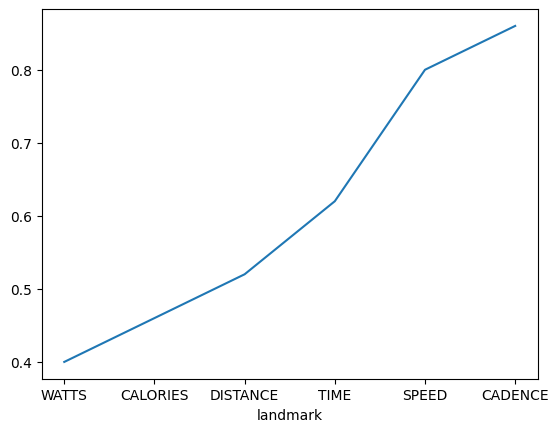

<IPython.core.display.Javascript object>

In [474]:
matches.assign(assigned=lambda f: f.inference_text.notnull()).groupby(
    "landmark"
).assigned.mean().sort_values().plot()

In [517]:
matches.head()

(matches.inference_text == matches.ssocr).mean()

landmark inference_text  inference_score   
0   CADENCE           None              NaN  \
1  CALORIES           None              NaN   
2  DISTANCE           0.14         0.972719   
3     SPEED           15.2         0.999608   
4      TIME          EE:00         0.903045   

                                       landmark_bbox   
0  [[1121.0, 440.0], [1338.0, 445.0], [1337.0, 50...  \
1  [[1093.0, 796.0], [1319.0, 803.0], [1317.0, 86...   
2  [[216.0, 800.0], [448.0, 800.0], [448.0, 850.0...   
3  [[214.0, 435.0], [370.0, 435.0], [370.0, 492.0...   
4  [[758.0, 796.0], [882.0, 796.0], [882.0, 858.0...   

                                          match_bbox            frame  ssocr  
0                                               None  output_1008.png     41  
1                                               None  output_1008.png      2  
2  [[294.0, 879.0], [592.0, 879.0], [592.0, 995.0...  output_1008.png   0.1_  
3  [[254.0, 497.0], [523.0, 503.0], [520.0, 658.0...  output_1008.png   15.2  
4  [[616.0, 879.0], [1008.0, 879.0], [1008.0, 999...  output_1008.png  00133

0.30666666666666664

<IPython.core.display.Javascript object>

In [528]:
def score_crop(a, cf):
    l, t, r, b = cf
    perimeter = np.concatenate(
        [
            a[t:b, l].flatten(),
            a[t:b, r].flatten(),
            a[t, l:r].flatten(),
            a[t, l:r].flatten(),
        ]
    )
    score = perimeter.mean() + perimeter.std()

    return score


def tidy_crop_frame(a, cf, w=15):
    best_score = score_crop(a, cf)
    best_crop = cf

    # print(f"{cf=}")
    for ix in range(len(cf)):
        dr = 1 if (ix >= 2) else -1
        for d in range(-w * dr, w * dr):
            cfp = cf.copy()
            cfp[ix] += d
            score = score_crop(a, cfp)
            if score < best_score:
                # print(f"{best_score=} {ix=} {d=} {cfp=}")
                best_score = score
                best_crop = cfp

    return best_crop


def ssocr_subimage(im, bbox, selection, ssocr_config):
    xy = make_polygons_2d(bbox)

    l, t, r, b = (xy[:, 0].min(), xy[:, 1].min(), xy[:, 0].max(), xy[:, 1].max())
    w = abs(l - r)
    h = abs(t - b)

    s = selection
    init_crop_frame = [
        int(round(e))
        for e in (
            l + s[0] * w,
            t + s[1] * h,
            r + s[2] * w,
            b + s[3] * h,
        )
    ]

    crop_frame = tidy_crop_frame(np.asarray(im), init_crop_frame)
    imc = im.crop(crop_frame)

    return imc, run_ssocr(np.asarray(imc), *ssocr_config)


config = {
    "SPEED": dict(
        sel=(-0.2, 1.25, 1.03, 2.7),
        ssocr_conf=(
            {"number-digits": -1, "threshold": 40},
            [],
        ),
    ),
    "WATTS": dict(
        sel=(-0.2, 1.1, 0.6, 2.5),
        ssocr_conf=(
            {"number-digits": -1, "threshold": 40},
            [],
        ),
    ),
    "CADENCE": dict(
        sel=(0, 1.25, 0.20, 2.9),
        ssocr_conf=(
            {"number-digits": -1, "threshold": 40},
            [],
        ),
    ),
    "DISTANCE": dict(
        sel=(0, 1.3, 0.75, 3.25),
        ssocr_conf=(
            {"number-digits": -1, "threshold": 40},
            [],
        ),
    ),
    "TIME": dict(
        sel=(-1.2, 1.2, 1.45, 2.75),
        ssocr_conf=(
            {"number-digits": -1, "threshold": 40},
            [],
        ),
    ),
    "CALORIES": dict(
        sel=(0, 1.2, 0.2, 2.5),
        ssocr_conf=(
            {"number-digits": -1, "threshold": 40},
            [],
        ),
    ),
}


landmark = "CALORIES"
for frame in sample:
    cfg = config[landmark]

    im = images[sample.index(frame)]
    base = os.path.basename(frame)
    bbox = (
        matches.query("frame == @base")
        .query("landmark == @landmark")
        .landmark_bbox.squeeze()
    )

    im, out = ssocr_subimage(im, bbox, cfg["sel"], cfg["ssocr_conf"])

    im
    out

ValueError: need at least one array to concatenate

<IPython.core.display.Javascript object>

In [426]:
bbox.squeeze()

array([[214., 435.],
       [370., 435.],
       [370., 492.],
       [214., 492.]], dtype=float32)

<IPython.core.display.Javascript object>

In [246]:
import tempfile
import cv2
import subprocess
import os


def run_ssocr(image, params, commands):
    # Define the command and parameters
    cmd = ["./ssocr-2.22.2/ssocr"]

    # Add the parameters to the command
    for key, value in params.items():
        if value is None:
            cmd.append(f"--{key}")
        else:
            cmd.append(f"--{key}={value}")

    for _cmd in commands:
        cmd.extend(_cmd.split())

    # If the input is a numpy array, write it to a temporary file
    if isinstance(image, str):
        cmd.append(image)
    else:
        # Create a temporary file
        temp_file = tempfile.NamedTemporaryFile(suffix=".png", delete=False)
        temp_file_path = temp_file.name
        # Write the image to the temporary file
        cv2.imwrite(temp_file_path, image)
        cmd.append(temp_file_path)

    # print(f"{cmd=}")

    # Run the command and get the output
    result = subprocess.run(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

    # Delete the temporary file if it was used
    if not isinstance(image, str):
        os.remove(temp_file_path)

    # Check for errors
    if result.stderr:
        print(f"Error: {result.stderr.decode()}")

    # Return the output
    return result.stdout.decode().strip()

<IPython.core.display.Javascript object>

In [233]:
import scipy.signal as ss

i = 1
a.std(i).shape
pd.Series(-a.std(i)).plot()
# plt.imshow(ima[:, :, 1])
# plt.imshow(ima[:, :, 2])

ss.find_peaks(-a.std(i), prominence=10)

(229,)

<Axes: >

(array([ 60,  68,  77, 137, 154]),
 {'prominences': array([41.79703794, 23.4683931 , 36.00273859, 10.97588511, 14.98559129]),
  'left_bases': array([ 47,  67,  67,  90, 139]),
  'right_bases': array([ 67,  69, 139, 139, 202])})

<IPython.core.display.Javascript object>

In [115]:
print("Building up some pixels for clustering")

import sklearn.cluster

# Build k-means model to threshold images.
pixels = np.asarray(imc)
pixels.shape
_pixels = pixels.reshape(-1, 3)

print("Building k-means model")
# Train K-means model
kmeans = sklearn.cluster.KMeans(n_clusters=4)
kmeans.fit(_pixels)



Building up some pixels for clustering


(422, 843, 3)

Building k-means model


KMeans(n_clusters=4)

<IPython.core.display.Javascript object>

In [139]:
pixels

array([[[182, 201, 159],
        [182, 201, 159],
        [182, 201, 159],
        ...,
        [ 59,  57,  53],
        [ 59,  57,  53],
        [ 59,  57,  53]],

       [[181, 200, 158],
        [181, 200, 158],
        [181, 200, 158],
        ...,
        [ 58,  56,  52],
        [ 58,  56,  52],
        [ 58,  56,  52]],

       [[181, 200, 158],
        [181, 200, 158],
        [181, 200, 158],
        ...,
        [ 58,  56,  52],
        [ 58,  56,  52],
        [ 58,  56,  52]],

       ...,

       [[ 98, 101,  80],
        [112, 119,  90],
        [119, 126,  97],
        ...,
        [ 48,  43,  40],
        [ 48,  43,  40],
        [ 48,  43,  40]],

       [[ 96,  99,  78],
        [111, 118,  89],
        [119, 126,  97],
        ...,
        [ 48,  43,  40],
        [ 48,  43,  40],
        [ 47,  42,  39]],

       [[ 93,  96,  75],
        [107, 114,  85],
        [119, 126,  97],
        ...,
        [ 50,  45,  42],
        [ 49,  44,  41],
        [ 47,  42,  39]]

<IPython.core.display.Javascript object>

(422, 843)

(422, 843)

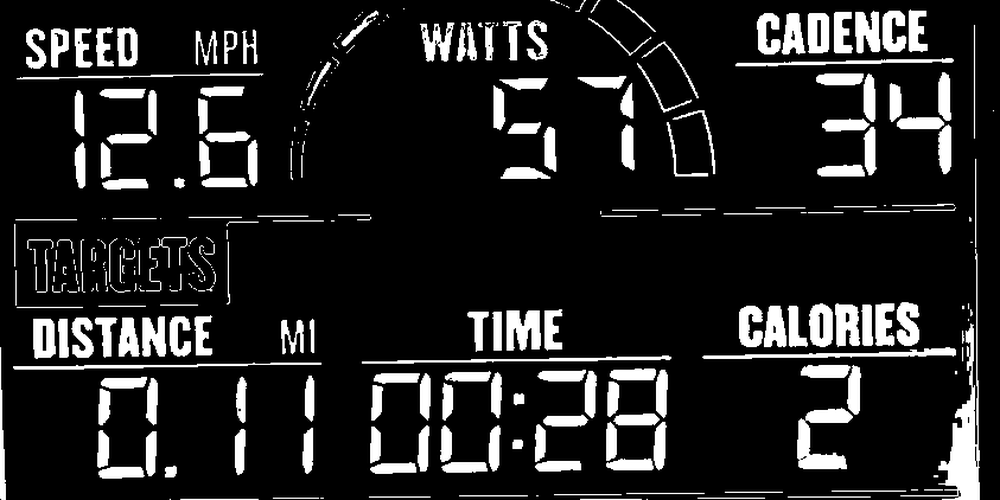

[2023/05/19 15:32:13] ppocr DEBUG: dt_boxes num : 11, elapse : 0.22794365882873535
[2023/05/19 15:32:13] ppocr DEBUG: cls num  : 11, elapse : 0.04181170463562012
[2023/05/19 15:32:14] ppocr DEBUG: rec_res num  : 11, elapse : 0.590831995010376


bbox   
0   [[423.0, 21.0], [548.0, 21.0], [548.0, 61.0], ...  \
1   [[755.0, 12.0], [927.0, 8.0], [928.0, 52.0], [...   
2   [[22.0, 27.0], [139.0, 25.0], [140.0, 70.0], [...   
3   [[192.0, 28.0], [260.0, 28.0], [260.0, 68.0], ...   
4   [[816.0, 76.0], [951.0, 76.0], [951.0, 174.0],...   
5   [[26.0, 234.0], [221.0, 234.0], [221.0, 297.0]...   
6   [[467.0, 308.0], [565.0, 308.0], [565.0, 351.0...   
7   [[738.0, 304.0], [918.0, 302.0], [919.0, 346.0...   
8   [[32.0, 318.0], [211.0, 315.0], [212.0, 356.0]...   
9   [[277.0, 318.0], [315.0, 316.0], [317.0, 356.0...   
10  [[365.0, 370.0], [670.0, 370.0], [670.0, 471.0...   

                         inference inference_text  inference_score  
0      (WAYTS, 0.7229107022285461)          WAYTS         0.722911  
1    (CADENCE, 0.9986267685890198)        CADENCE         0.998627  
2      (SPEED, 0.9982820749282837)          SPEED         0.998282  
3        (MPH, 0.9933496117591858)            MPH         0.993350  
4         (34, 0.9999540448188782)             34         0.999954  
5    (TARCETS, 0.9647909998893738)        TARCETS         0.964791  
6       (TIME, 0.9941023588180542)           TIME         0.994102  
7   (CALORIES, 0.9953020811080933)       CALORIES         0.995302  
8   (DISTANCE, 0.9986192584037781)       DISTANCE         0.998619  
9         (MI, 0.8454282283782959)             MI         0.845428  
10     (00:28, 0.9295486211776733)          00:28         0.929549

<IPython.core.display.Javascript object>

In [163]:
imb = kmeans.predict(_pixels).reshape(422, 843) == 3
imb.shape
#plt.imshow(imb)
imbb = np.zeros_like(pixels)
# imbb
imbb[:, :, 0] = imb * 255
imbb[:, :, 1] = imb * 255
imbb[:, :, 2] = imb * 255
imbb = Image.fromarray(imbb)

imbb.height, imbb.width

resize_width = 1000
resize_height = int(
    imbb.height * (resize_width / imbb.width)
)
resized_img = imbb.resize(
    (resize_width, resize_height), Image.LANCZOS
)

resized_img


paddle_results_to_df(ocr.ocr(np.asarray(resized_img), cls=True)[0])


In [ ]:
# list(Run("BuildMonitorDatasetFlow/24").steps())

Step("BuildMonitorDatasetFlow/24/text_detect_phase2").phase_2_detection_results

In [ ]:
ocr_df.loc[:, ["speed", "watts", "cadence"]]

ocr_df.speed.unique()

In [ ]:
trdf = pd.read_csv("./top-row-states.csv")

p9.ggplot(trdf, p9.aes("cadence", "speed")) + p9.geom_line() + p9.geom_point()

p9.ggplot(trdf, p9.aes("cadence", "watts")) + p9.geom_line() + p9.geom_point()

In [ ]:
ocr_df.loc[:, ["time", "distance", "calories"]].to_csv("moo.csv")

In [ ]:
lnl = sum(
    np.log(
        1e-3
        + rapidfuzz.process.cdist(
            ocr_df[term],
            trdf[term].astype("str"),
            processor=lambda w: "".join(e for e in w if e.isdigit()),
        )
    )
    for term in ("speed", "watts", "cadence")
)
n = 11
pd.concat(
    [
        ocr_df.reset_index(drop=True),
        trdf.loc[lnl.argmax(axis=1)].reset_index(drop=True),
    ],
    axis="columns",
    ignore_index=True,
).to_csv("ocr.csv", index=False)

In [ ]:
pd.json_normalize(
    Flow("BuildMonitorDatasetFlow").latest_successful_run.data.phase1_results[
        "predictions"
    ]
).loc[:, ["rec_texts", "det_polygons"]].explode(["rec_texts", "det_polygons"]).query(
    "rec_texts in ('speed', 'cadence', 'distance', 'calories')"
)

In [ ]:
from mmocr.apis import MMOCRInferencer

ocr = MMOCRInferencer(det="DBNetpp", rec="ABINet")

ocr("/bucket/exercise-machina/frames",
    batch_size=8,
    out_dir="/bucket/exercise-machina/frames-ocr",
   save_pred=True
   )

#x = ocr("output_001.png", show=False, print_result=False, return_vis=False)


In [ ]:
import cv2
import numpy as np
from fuzzywuzzy import fuzz


def display_image(image, width_inches=12.5):
    height, width, _ = image.shape
    aspect_ratio = height / width

    fig_width = width_inches
    fig_height = width_inches * aspect_ratio

    plt.figure(figsize=(fig_width, fig_height))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # plt.imshow(image)
    plt.axis("off")
    plt.show()


def draw_ocr_results(image, ocr_data, extra_polygons=[]):
    # Convert the image to BGR format for drawing with OpenCV
    if len(image.shape) == 2 or image.shape[2] == 1:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    for ix, row in ocr_data.iterrows():
        text = row["rec_texts"]
        polygon = row["det_polygons"]
        points = np.array(polygon).reshape(-1, 2).astype(np.int32)

        # Draw the bounding box
        cv2.polylines(image, [points], isClosed=True, color=(0, 255, 255), thickness=2)

        # Calculate the center of the bounding box
        center = points.mean(axis=0).astype(np.int32)

        # Put the text annotation in the center of the bounding box
        cv2.putText(
            image, text, tuple(center), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2
        )

    for pg in extra_polygons:
        points = np.array(pg).reshape(-1, 2).astype(np.int32)

        # Draw the bounding box
        cv2.polylines(image, [points], isClosed=True, color=(255, 0, 0), thickness=3)

    return image


def find_most_similar_text(df, query, similarity_threshold=90):
    best_match = None
    best_similarity = 0

    for index, row in df.iterrows():
        similarity = fuzz.ratio(query, row["rec_texts"])
        if (similarity >= similarity_threshold) and (similarity > best_similarity):
            best_similarity = similarity
            best_match = row

    if best_match is not None:
        return np.asarray(best_match["det_polygons"]).reshape(-1, 2).astype(np.int32)

    return []


def super_bounding_box(landmarks, keys):
    min_x, min_y = float("inf"), float("inf")
    max_x, max_y = float("-inf"), float("-inf")

    for key in keys:
        if key not in landmarks:
            raise ValueError(f"Key '{key}' not found in landmarks.")

        bounding_box = landmarks[key]
        x1, y1 = bounding_box[:, 0].min(), bounding_box[:, 1].min()
        x2, y2 = bounding_box[:, 0].max(), bounding_box[:, 1].max()

        min_x, min_y = min(min_x, x1), min(min_y, y1)
        max_x, max_y = max(max_x, x2), max(max_y, y2)

    return np.array([[min_x, min_y], [max_x, min_y], [max_x, max_y], [min_x, max_y]])


def infill_bounding_box(landmarks, key1, key2):
    if key1 not in landmarks:
        raise ValueError(f"Key '{key1}' not found in landmarks.")
    if key2 not in landmarks:
        raise ValueError(f"Key '{key2}' not found in landmarks.")

    bbox1 = landmarks[key1]
    bbox2 = landmarks[key2]

    x1_1, y1_1 = bbox1[:, 0].min(), bbox1[:, 1].min()
    x1_2, y1_2 = bbox1[:, 0].max(), bbox1[:, 1].max()

    x2_1, y2_1 = bbox2[:, 0].min(), bbox2[:, 1].min()
    x2_2, y2_2 = bbox2[:, 0].max(), bbox2[:, 1].max()

    min_x = max(x1_2, x2_1)
    max_x = min(x1_1, x2_2)
    min_y = max(y1_1, y2_1)
    max_y = min(y1_2, y2_2)

    return np.array([[min_x, min_y], [max_x, min_y], [max_x, max_y], [min_x, max_y]])


def infill_top_bottom_bbox(landmarks, top_key, bottom_key):
    if top_key not in landmarks:
        raise ValueError(f"Key '{top_key}' not found in landmarks.")
    if bottom_key not in landmarks:
        raise ValueError(f"Key '{bottom_key}' not found in landmarks.")

    top_bbox = landmarks[top_key]
    bottom_bbox = landmarks[bottom_key]

    top_left = [top_bbox[:, 0].min(), top_bbox[:, 1].max()]
    top_right = [top_bbox[:, 0].max(), top_bbox[:, 1].max()]

    bottom_left = [bottom_bbox[:, 0].min(), bottom_bbox[:, 1].min()]
    bottom_right = [bottom_bbox[:, 0].max(), bottom_bbox[:, 1].min()]

    return np.array([top_left, top_right, bottom_right, bottom_left])


# Example usage:
# landmarks = {
#     'top_key': np.array([[10, 20], [30, 20], [30, 40], [10, 40]]),
#     'bottom_key': np.array([[15, 50], [25, 50], [25, 60], [15, 60]]),
# }
# infill_top_bottom = infill_top_bottom_bbox(landmarks, 'top_key', 'bottom_key')
# print(infill_top_bottom)


def build_ss_polygons(df):
    landmarks = [
        "rogue",
        "intervals",
        "speed",
        "mph",
        "watts",
        "cadence",
        "targets",
        "distance",
        "time",
        "calories",
        "heart",
        "rate",
        "intervals",
    ]
    landmark_map = dict((e, find_most_similar_text(df, e)) for e in landmarks)

    landmark_map["smwc"] = super_bounding_box(
        landmark_map, ["speed", "mph", "watts", "cadence"]
    )
    landmark_map["tdtc"] = super_bounding_box(
        landmark_map, ["targets", "distance", "time", "calories"]
    )
    landmark_map["hr"] = super_bounding_box(landmark_map, ["heart", "rate"])

    #     landmark_map["upper_row"] = infill_top_bottom_bbox(
    #         landmark_map, "speed+mph", "tdtc"
    #     )
    #     landmark_map["lower_row"] = infill_top_bottom_bbox(landmark_map, "tdtc", "hr")

    return landmark_map


#     return [
#         landmark_map["upper_row"],
#         landmark_map["lower_row"],
#     ]


ocr_df = pd.DataFrame(x["predictions"][0])

image = cv2.imread("output_001.png")


digit_bboxes = build_ss_polygons(ocr_df)

image_p = draw_ocr_results(image, ocr_df, [])

display_image(image_p)

In [ ]:
display_image(image)

In [ ]:
# digit_bboxes

from scipy.stats import linregress

keys = (
    ["rogue", "intervals"]
    + ["speed", "mph", "watts", "cadence"]
    + ["targets", "distance", "time", "calories"]
    + ["heart", "rate"]
)

for key in keys:
    slope, *rest = linregress(digit_bboxes[key][:, 0], digit_bboxes[key][:, 1])
    angle_rad = np.arctan(slope)
    angle_deg = np.degrees(angle_rad)

    key, slope, angle_deg

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

def estimate_angle_from_horizontal(bbox):
    # Get the x and y coordinates of the bounding box corners
    x = bbox[:, 0].reshape(-1, 1)
    y = bbox[:, 1]

    # Fit a linear regression model
    lr = LinearRegression()
    lr.fit(x, y)

    # Calculate the angle from the slope using arctan
    angle_rad = np.arctan(lr.coef_[0])
    angle_deg = np.degrees(angle_rad)

    # Adjust the angle to be within -90 to 90 degrees
    if angle_deg > 45:
        angle_deg -= 90
    elif angle_deg < -45:
        angle_deg += 90

    return angle_deg

# Example usage:
# bbox = np.array([[10, 20], [30, 20], [30, 40], [10, 40]])
# angle = estimate_angle_from_horizontal(bbox)
# print(angle)


import cv2
import numpy as np

def optimal_rectangular_transform(bboxes):
    transforms = []
    
    for bbox in bboxes:
        # Estimate angles for each pair of opposite sides
        angle1 = estimate_angle_from_horizontal(bbox[[0, 1], :])
        angle2 = estimate_angle_from_horizontal(bbox[[2, 3], :])
        angle3 = estimate_angle_from_horizontal(bbox[[0, 3], :])
        angle4 = estimate_angle_from_horizontal(bbox[[1, 2], :])

        # Average the angles
        avg_horizontal_angle = (angle1 + angle2) / 2
        avg_vertical_angle = (angle3 + angle4) / 2

        # Get the center of the bounding box
        center = np.mean(bbox, axis=0)

        # Calculate the affine transformation matrix
        horizontal_rotation_matrix = cv2.getRotationMatrix2D(tuple(center), avg_horizontal_angle, 1)
        vertical_rotation_matrix = cv2.getRotationMatrix2D(tuple(center), avg_vertical_angle, 1)

        # Apply the horizontal rotation
        rotated_bbox = cv2.transform(np.float32([bbox]), horizontal_rotation_matrix)[0]

        # Compute the vertical rotation center
        rotated_center = np.mean(rotated_bbox, axis=0)

        # Calculate the vertical rotation matrix based on the rotated center
        vertical_rotation_matrix = cv2.getRotationMatrix2D(tuple(rotated_center), avg_vertical_angle, 1)

        # Store the transformation matrices
        transforms.append((horizontal_rotation_matrix, vertical_rotation_matrix))

    return transforms

# Example usage:
# bboxes = [np.array([[10, 20], [30, 20], [30, 40], [10, 40]])]
# transforms = optimal_rectangular_transform(bboxes)
# print(transforms)


# Example usage:
bboxes = [digit_bboxes["rogue"], digit_bboxes["cadence"]]
transforms = optimal_rectangular_transform(bboxes)
print(transforms)


In [ ]:
import numpy as np
import cv2

def compute_perspective_transform(bbox, target_bbox):
    src_points = np.float32(bbox)
    dst_points = np.float32(target_bbox)
    transformation_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
    return transformation_matrix

bboxes = [...]  # List of k bounding boxes
target_bboxes = [...]  # List of k corresponding target rectangular bounding boxes
weights = [...]  # List of k corresponding weights

# Calculate the perspective transformations for each bounding box
transformations = [compute_perspective_transform(bbox, target_bbox)
                   for bbox, target_bbox in zip(bboxes, target_bboxes)]

# Normalize the weights
normalized_weights = np.array(weights) / np.sum(weights)

# Compute the weighted average of the transformation matrices
weighted_avg_transform = np.zeros((3, 3), dtype=np.float32)
for transform, weight in zip(transformations, normalized_weights):
    weighted_avg_transform += transform * weight


In [ ]:
import cv2
import numpy as np
from IPython.display import display, clear_output
import ipywidgets as widgets
from PIL import Image
from io import BytesIO

def display_image(img):
    _, img_encoded = cv2.imencode('.png', img)
    img_bytes = img_encoded.tobytes()
    img_pil = Image.open(BytesIO(img_bytes))
    display(img_pil)

def warp_perspective(angle, scale, tx, ty):
    clear_output(wait=True)
    
    rows, cols, _ = img.shape
    center = (cols // 2, rows // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
    rotation_matrix[:, 2] += [tx, ty]

    img_warped = cv2.warpAffine(img, rotation_matrix, (cols, rows))
    display_image(img_warped)

# Load your input image
#img = cv2.imread('path/to/your/image.jpg')
img = image_p

# Create widgets for the transformation parameters
angle_slider = widgets.FloatSlider(min=-5, max=5, step=0.1, value=0, description='Rotation Angle')
scale_slider = widgets.FloatSlider(min=0.1, max=3, step=0.1, value=1, description='Scale')
tx_slider = widgets.IntSlider(min=-100, max=100, step=1, value=0, description='Translation X')
ty_slider = widgets.IntSlider(min=-100, max=100, step=1, value=0, description='Translation Y')

widgets.interact(warp_perspective, angle=angle_slider, scale=scale_slider, tx=tx_slider, ty=ty_slider)


In [ ]:
import cv2
import numpy as np
from IPython.display import display, clear_output
import ipywidgets as widgets
from PIL import Image
from io import BytesIO

def display_image(img):
    _, img_encoded = cv2.imencode('.png', img)
    img_bytes = img_encoded.tobytes()
    img_pil = Image.open(BytesIO(img_bytes))
    display(img_pil)


def warp_perspective(pitch, yaw, roll):
    clear_output(wait=True)
    
    def rotation_matrix(axis, angle):
        return cv2.Rodrigues(np.radians(angle) * axis)[0]

    rows, cols, _ = img.shape
    center = (cols // 2, rows // 2)
    focal_length = cols / (2 * np.tan(np.radians(60) / 2))
    
    # Build the rotation matrix
    r_x = rotation_matrix(np.array([1, 0, 0]), pitch)
    r_y = rotation_matrix(np.array([0, 1, 0]), yaw)
    r_z = rotation_matrix(np.array([0, 0, 1]), roll)
    r = np.matmul(np.matmul(r_z, r_y), r_x)

    # Build the perspective transformation matrix
    m = np.zeros((3, 4), dtype=np.float64)
    m[:, :3] = r
    m[:, 3] = [0, 0, focal_length]
    m_4x4 = np.vstack((m, np.array([0, 0, 0, 1])))
    pre_m = np.array([[1, 0, 0, -center[0]], [0, 1, 0, -center[1]], [0, 0, 1, 0], [0, 0, 0, 1]])
    m = np.matmul(pre_m, m_4x4)[:3]
    
    # Apply the perspective transformation
    img_warped = cv2.warpPerspective(img, m, (cols, rows))
    display_image(img_warped)
# Load your input image
#img = cv2.imread('path/to/your/image.jpg')
img = image_p

# Create widgets for the angles
pitch_slider = widgets.FloatSlider(min=-10, max=10, step=0.5, value=0, description='Pitch')
yaw_slider = widgets.FloatSlider(min=-10, max=10, step=0.5, value=0, description='Yaw')
roll_slider = widgets.FloatSlider(min=-10, max=10, step=0.5, value=0, description='Roll')

widgets.interact(warp_perspective, pitch=pitch_slider, yaw=yaw_slider, roll=roll_slider)


In [ ]:
def square_off(bbox, f=0.5):
    x1 = bbox[[0, 1], 0].mean()
    x2 = bbox[[2, 3], 0].mean()

    y1 = bbox[[0, 2], 1].mean()
    y2 = bbox[[1, 3], 1].mean()

    out = np.array(
        [
            [x1, y1],
            [x1, y2],
            [x2, y1],
            [x2, y2],
        ]
    )

    return (1 - f) * bbox + f * out


# Define a 2D numpy array bounding box
src_bbox = digit_bboxes["watts"].astype(np.float32)
src_bbox

dst_bbox = square_off(src_bbox, 1)
# dst_bbox = src_bbox
dst_bbox

# Define the destination bounding box
# dst_bbox = np.array([[100, 100], [200, 100], [200, 200], [100, 200]], dtype=np.float32)

# Calculate the perspective transformation matrix
M = cv2.getPerspectiveTransform(src_bbox, dst_bbox)
M

# Now you can use M to transform the original image using cv2.warpPerspective
rows, cols, _ = image_p.shape
display_image(image_p)
display_image(cv2.warpPerspective(image_p, M, (cols, rows)))

In [ ]:
df = pd.DataFrame(
    np.concatenate(
        [
            digit_bboxes[e]
            for e in [
                "speed",
                # "mph",
                # "watts",
                "cadence",
                "distance",
                # "time",
                "calories",
                # "targets",
                # "heart",
                # "rate",
            ]
        ]
    ),
    columns=["x", "y"],
)
# df
# ?linregress
slope, *rest = linregress(df.x.to_numpy(), df.y.to_numpy())

p9.ggplot(df, p9.aes("x", "-y")) + p9.geom_point() + p9.geom_smooth(method="lm")


def warp_perspective(img, angle=0, scale=1, tx=0, ty=0):
    # clear_output(wait=True)

    rows, cols, _ = img.shape
    center = (cols // 2, rows // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
    rotation_matrix[:, 2] += [tx, ty]

    return cv2.warpAffine(img, rotation_matrix, (cols, rows))


def crop_image(image, bbox):
    """
    Crop an image (in numpy representation) to the given bounding box.

    Args:
    - image (numpy.ndarray): The input image in numpy format (height, width, channels)
    - bbox (list or tuple): The bounding box as (x_min, y_min, x_max, y_max)

    Returns:
    - cropped_image (numpy.ndarray): The cropped image
    """
    x_min, y_min, x_max, y_max = bbox
    cropped_image = image[y_min:y_max, x_min:x_max]

    return cropped_image


width = df.x.max() - df.x.min()
height = df.y.max() - df.y.min()
(width, height)
bbox = np.round(
    np.asarray(
        [
            df.x.min() - 0.05 * width,
            df.y.min() - 0.05 * height,
            df.x.max() + 0.10 * width,
            df.y.max() + 0.45 * height,
        ]
    )
).astype(int)

image_p_c = crop_image(image_p, bbox)


display_image(image_p_c)

angle_rad = np.arctan(slope)
angle_deg = np.degrees(angle_rad)
(slope, angle_rad, angle_deg)

display_image(warp_perspective(image_p_c, angle=angle_deg))

In [ ]:
x.keys()

pd.DataFrame(x["predictions"][0])

plt.imshow(x["visualization"][0])

In [ ]:
1 / 0

In [ ]:
# Iterate through all the image files in the directory
for fname in image_directory.glob("*"):
    if not fname.suffix in {'.png', '.jpg', '.jpeg'}:
        continue
    
    print(f"On image file [{fname}]")

    # Run EasyOCR on the image
    results = reader.readtext(str(fname))

    print(results)



In [ ]:
from mmocr.apis import MMOCRInferencer
infer = MMOCRInferencer(rec='svtr-small')
result = infer(root / "frames/output_001.png", save_vis=True, return_vis=True)
print(result['predictions'])

In [ ]:
plt.imshow(result['visualization'][0])
plt.show()